# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

1.RGB Image


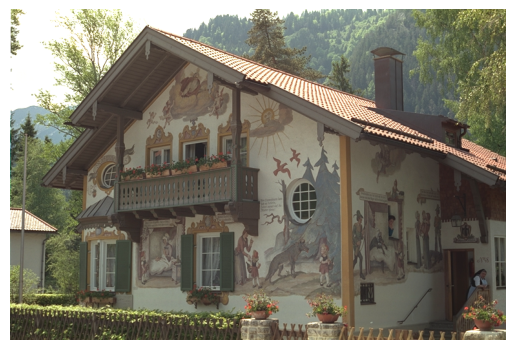



2.Grayscale Image using numPy


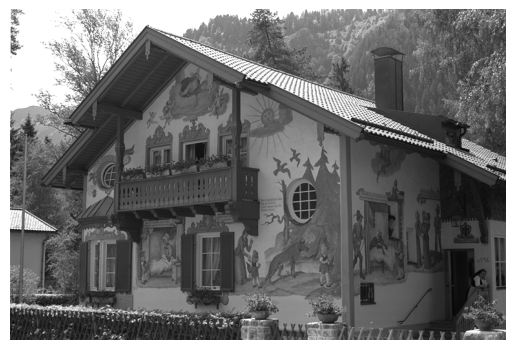



3.Grayscale Image using openCV2


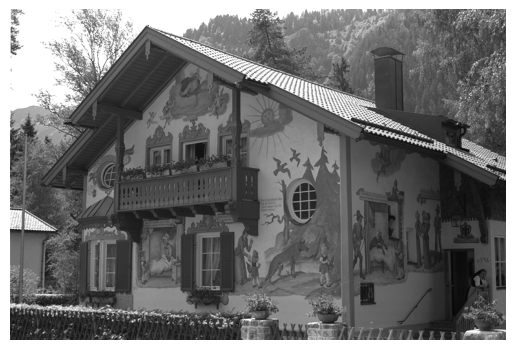



Comparision of the two images: They look identical to the unaided human eye


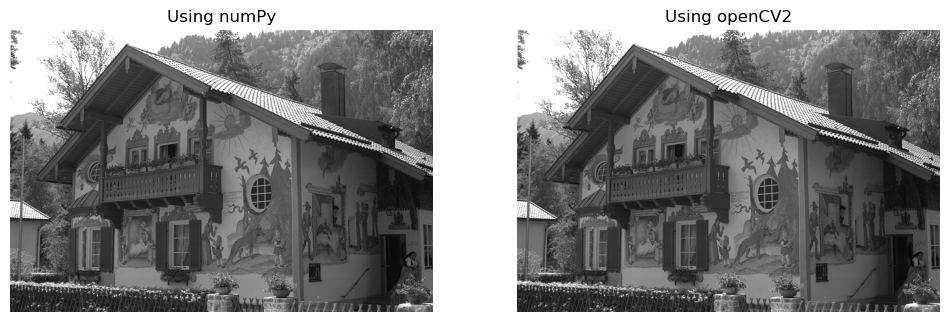



4.
Array size of RGB image: (512, 768, 3)
Array size of grayscale image: (512, 768)


5.
Pixel Value at (0,0):
RGB: [255 255 255] Grayscale: 255.0


Pixel Value at (150,150):
RGB: [65 58 53] Grayscale: 59.522999999999996


Pixel Value at (256, 384):
RGB: [119 113 103] Grayscale: 113.65400000000001


Pixel Value at (200, 300):
RGB: [97 74 52] Grayscale: 78.369


Pixel Value at (511, 767):
RGB: [94 88 62] Grayscale: 86.83


In [1]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2



# BASE64 STRING HERE OF IMAGE
base64_image = """iVBORw0KGgoAAAANSUhEUgAAAwAAAAIACAIAAAC6lJxtAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAAUdEVYdHNvdXJjZQBLb2RhayBQQ0QwOTkyRJ2A1gAIAABJREFUeNrsvWewZdd1Hrh2OPHm+HLu1zmh0Y3QAEECBAhSzAQo2qRlukriWCPLHtljlS3NTLlran7YkmssydRYWWTJpCgzgAkgcu5GN7rRr+PrF/rl926O594Td5ofTdCkJFIkVZZIF75ft+49Z5+1zrl7r3W//a11kVJqs/rslx773Xc99M5KbRswtWIxr+eaRuzsS69MDA689/3vjsXT3U6t1epMTR8BuA9+qlCuPTZUvBNg+Ec871yptzCcOHCjdDEeS3EubT0xkHjfdz52xGuEkBjMttk8KJzR959e+FxM4+Wt5UI+32zVd7Y69UaQSaQQRuMTgw/f/+uvvPYfrl1b/F8/9dsAxS8/9m+VlI8+8pvfGfD1c79zx52PvmnnpadffGx9fWVgoHDnXXcNZj4IcOHClbPHD/8KAAUAgK2vPfdb97zjjjx5AKAA4ANYf50XSsDjBJIAg5XupcHUzwIAwKvrndVeu+f1++l0es/YP4W38GMiAtDfugs/Ei5d+YvLr1+7fnmBUj2VSiGKtjc2NYwz2Wy358RT9ns+/C5s0mQ+tbO6lU2kVlaXHn74oUtzN26ubhayxfmr82ac/PIv/Z8AhZ94X7e/cea595/85N9+oK++9KV0LvX2g29/ZfH0zaX1d7//wWEYe+rSN1N28cqVK/lCfnwyd3zibd85/kb7/MsvvDg2Pnrf8bdt1je3K9vvOvSzm3zl9CtzlBhBEIW+m05Yjz7w0Q7Uf/9PP0NxIgqb733/2w8P3Xvri/3i0um5c/OC0+mZCdftVSqVRDoVRYKxCBQGAIQwxiiKGCEYpHJdd2p6+OF33/fqK+ebja7nhYgS3ZCJlPGJ+//RX/VotXP1a19/NowIAGiabhhGGIYIeu//0DtnU8cA4M+++Qflsud77X17x3/24Z8HgBeufUOp1OLCShBEUcQAIJtL3HvvnRdeOyMj75OP/DIAAOx84amvSIISuQwCc2e72mu7ppEAwGEYShkC4gePjScLSEXW9kajvNlBYINQntcjCGmaFvmBEBIhEkShUsqKW4L7hMrCwEC5Xu61PYxIKpEO/MB1fYI109IRVizwCVVDQxZAuziQbXXrjbIruC65IbkRBJFp21ZMcwMnnUmGod9qszDUlCRSIkIIQkjXw0yOpJMhwQ23JzutwOmGfZdTPXzoZ+7NZTKPf+0bppFKpHK1alsirCRyXZcFjDEmhNAtE0mVL2RZxDSdsEhgom1ubo6NjnIuq9VqPG4D4q1Wl1J9954pxvo7W9u5XK5QSBtxbfn6RszOOk7fMAwCtNls6pYZzyTazZpBaTGf7fdaRw8dLm1trK1WMYnHEwU9lmzWq9VquVhI9/vtbD765M+/5+qVm2vrlaHB4VKpFPhKSTJesP/t//6pr3zl6XrTkyCNpNFpdio71dnd4/e+7djTL5xe2dzZu/fA+toGxQnBabNVHxwpDGSKoe+3ag3JIk03qpVqvpCNxa1SudHtubZhh2EYT9j7D+zO5TIrqwurq6vFYn7v3gP1VrPvhU4vUELmC9mEFbt2+XJ+ZEAQtrNWTsezwyOFXbvHC5nCyy+8wjknp06d8th2q7UBgDZXt24ur8+dv1qvtfbM7Nnc2BgZGp2dnX3mhadW19bi8ZSOwbTp5XN/Wtk+Mzh6z0/FgpuIZQEwQPxHCmwN7/pA/CGAgUIilTJTZ8+fPrr7fQDJ7xxh4DEdRgAsi+QsMh3BkpCCYrQwf71d79ar3ZCp8YmZtbWbcdO8//57Y9ZtE2NHWp3rflQZyOdm940e2v/O7eaTlr1FYBYADLtiW0WANAAADPbcBdfzSqWd+++9H8EuAD+eAoO6SztfNeJlHd0xOhmmyWgEi+uVZyTeUVpJh5m/4sjO4uprXIUJ60DcHAWIhfDc868/53uBiNCxQycGUocBcm9F5R8X5K1b8KNicODg0WMPVCpX9szu3a5s1VvV9773oeHxIT8KUpl0uVxaWlzZ3ty5cfXG0vXF5eXltdWN06fPVEr1XLa4a3Lqw4/+4h0n7gHI/+R7+vrya6+8/IadjUZysz/E4RKgD2D8dR+JuRtXPd+LDcQ9l3W7Xmlrx8Fdp9O3LbtU2hwbGUwktIHkBAAAtDaipbmLC+2uIyRiANubpaWlm0cO7XeicHlpI2JCMRkEYSaToylt7srlTtslRFdStNutY3uPApDTS8+tLJU9PwKFGRP9fh8hjJDGmBBcKqUIIUIKBAQhnE5nCcWBFxiG3ul0K+VGEDAAQIhGflApVWcPFxP0Lz+vuru9tVXmDAMQwaWUSknFeeh0e0dmbwOA169fCDyJEHbd4OSxOwDI5aVLSujtbpcxgRAohRgPWu06wVzT0aHZPQCGB1ucinwxm8mkKqWa0/YwwcMjA1QT8SSdmBiTQhUGcm7PLW1XQVEWCeAIY2TqOiGEMRaGISFE16ngkokwEY8TSoArAOy7EQIqBXY6LmcIYaoA6TolBDPWJ1RhEiIUtlrtfs8zTROEMDR68MAB09b7jmOYJqZ6r+OzCLigIKhh2ggwIQhjpGlsaDBJsOCRX9ppjAxPIKxJqUyTcB4EftSoNjE2WKCa7ZZlWBhhFvJ+v68UMgwTY+p0e4xJjBGhpNvttRsdL/BMwwgCX8OYS8EYQ0AUF81GbWJ8jEXcoHrEhdv1hcBhwKWUQggmmKYbQRRphGKs9Z2+7/sE451SSSlEiD46NiaE126XpHQ9v0YxiyL34KEZyQMW8kwqWd7ZtvUYwtButR595MNjk/+sVT+7f9+e+995T7O2xbmslJqjo0Ou612+fFnTddvUr1+72nOc0GeIIM9nnutrmMYSMUqJ0+8YcePAwd1e4BiGHkQhxiCVsOPaxsby1atXRCTcvpfL5EfHxra3SpfmrvQcz/P96aldGqWO0x0ZHyIUDM0oFgZqtVo+lx8eGkymYn2vR06dOrVVfqPvlRVHS0ur3YY7PjyjIe3y3NzOxk692V5aWup0W+/9mQ9Y8cRzT7/46kvfevWll/bPTA9NveOnZMmN/4jZDwAQW0sCxAFWN7uXHL97+95f/u7s53uhAwCBgWxsby65t9G6du3Kom2kANP9Rw5WdranJsdKpa2Fm485/YX7Tn5sID+zWrlEdWyS0WtLzy8uXto1+R4AsK0UwCgArNU/a8WapVJlfv76vffeMzLwEYBql11JGkkEY0rtpK0swIyO4gD9P/zsf7p64fyDb/snOtwNsPz4M7+xe+YOAPNN25KFTKbaXMokQwQ4gHkT8qMjuamBWRqz0/ohgIm3QvJb+LvH6Bj9rd/6z5EIPvaJR+5/4BeJUTty9HAqnXr97BupZCFhJRvl+m3Hbn/wXQ8+/K6H9+07uLSw7HScVDrxza//19cvPnXniSmAgZ9U56q3FpwL83PNetjvdY8duPOvPe5663TRGr/1erlzeau1MpiYAoCKuBTHgxJqa/0bGX14oXGtXG7FYnFKtVqt3Wk7UST9fiSEbLRq8bhh23R+4SpNufm4fbVx6ebSdqPuskhyCSyUjEOr1QukSMVzTr/fqjU4l1EUIUpAoqXFFcOICSEEZ0EQRVp/u3Nj7o1F3wUElCuBAFjEQRFMqJRKSoEwwggriTDGUsowDAEQoYSFrN3uItAY45RQxpnkELhBKq5PDv7lFPDK6rl2y2McgwIAjBAGwBqhgot40Sw7m4s31rigCHC325s9Mp3S0y9feMm2Un7fC4JQSsQZx1hN7xobGMjE4lqqiDHUL65dkkQIKSMWmsTudrwo8DRd7d47WRhK9JxepVyrlCpSkeHhiTAMIpexgFGCKSUIYcaYEop8xy+lDI0igCCIAjdEiCiBPD8CRZTEoIAQRDAJQs808Oh43jQhCFqgMMEGCKnrqFgsbu2sd9ud0bFRQNT1IoxNty94pDTdJBhTjSCEAYSQTj5vxk1zcWExDES+OKhrRt91DIOOjAw5rV6pXLbNlOO4gR9yyQcGRty+X6s1wjDSNA0RBBL5fhhGka4TDdN6vWmbdiwRU1w4Tidux6WC0A9S6TRSYu/uXaZh1Gr10GOtTk+nViyRwJQIyU3TloBc14vFEr2Ow7myTTtk0cjQSK6Qd3uuYdLxkUIygTTqH71t1/BgIWbR4eGC57kx09yze5JiDQMeHRx6/wffO1gc+MoXf2Pt5rLvdQ4fv3vX7AOvPP/Y0s3NoaFhp9vFlO7bvyufzRENVyq1/fv3m2as0egc2H8gHo912i0u2FZlc2Asn8klhPQwpaZpEYR0nRQHcmMTA0k7ubGxU683HnjgneOjU/NX591+GE+mLdNutzqCcztucR7ZtjaQL7qu5zhOEIROvyshWrq5SE6dOpXJiHJ1pVavTk1MuH13Z2cnCN29u3cdOXK01ewokJ/4B/8wl3vg5Re/8sLzL6WSGSXYx37h3wAUv3u2/0+HeJ+d1cntKTM6c+75oQGma7MA0A/f0GkRAH+fs+j0xP33vG3iW48/FXLearVZFA4ODJRK28lE5vY7TxhEW9g4Xy6V84WU1Gph6Hi9zvR4EWDYV89LtEQhnokdev2Nx2qVyt133r28uLpvb/FbL/1JuVyeGb8HYNI2bwOYAXgVoAuQCqPWxx75FYCjANCNzo+OjFm6AdAC2HkzQohs8u0ctgjsobAfYJBCDkEzoR998wm+hbfwdwAfYNPpL/zRH/w/xSxcnrtW3WkUi8UPfuCDujH0n3/7//6TP/jTpfmVTCrruX6n247HEw8+8M6FhflkIq6b2qsvvdrvBNVKtdPqZLKpEyfeBxD7vglI55Unnvvsgd1v/7t3sqXm1yvbhcTEunP17Jk5XY+7vpMeQMXktxOdbfdyUk8BaADwmT//7OiefForRtB/7cLchfNzJ4+eBMCf/8oXbt9/15qzHkUibw8vbM6zEDtOb6BQJIi0Gh0uGCCVz5kjo6m9u6czmWRxIGtalBksZiXWN8qths+kBIkHBwYymWyr1W42Or2e5/uh2/cw0hgLdWpgTB2nhzECRRAGUFAsDoRh1Kj3pCCIIFBSKUAIKQURE4RgKRXBFIQCpQjGUikpgFBMCBZS6NQQUmCMFQDjCpTAQBqtnbuO3gsAJe/KtfXzY7ndALBeW9rarEupA2ApQEkgmCoEURBtbe2USzUBVHAESjHGLFsfGElvbm+12p3AjxBgBRAxpuly966J0HNb9UY8k7y5ddPzIorNvhPwUBFiuW7Ycz1C6ODgUKfd2lyvOE3fDwIASCcy/U637/gUaUpKikkUMBYypUAKyYWUUlFKlEJhEBq6wTkP3JALJbgCAKyQUsLQNY2CkmJ4ZNBzA7fvKCV938dEjQwNul6v03FAESH52NiQVFEU9gAkQSiIQo3omq4pCbdSzMmJQZ2KhRvzqVQCQPmeV66UwyDSTc3QjVQyg7HWavQEp/lcPpNOCyE9z/eDwDB0BMAi1uu5IBFS0GjUdd3SdT2eihmmSTDkC3khlR8EqWTK931MSBgwx3F8LxCAYnai0W65fV+BzKXTgLHTdTwvIIpgEMVcCskQ8QAkbzYb4+NDY6NDjdZmLmccObyPi8BxOoePHKq36k7fsWMkFqNTUzNCYIL1Q4ePRwF77MtfGR0byeezSvi5ovbK6TNOv080XBgcGBkeajXb26XNweHC3r0Hytu11ZW1dDqXiOnZRDxkXqNZd/qdvfv2Viu1zZtbBBnZdLHX6yuJw9DTDf3uk/fEzBjGcM89d3a7bafXiXgwMjqElFJSCiG6na5lGbYZL+2Ua/VGLps1TbPb7V6auxL4jJw6dQpDrxPslLZ3Ou3WyNDQ3n17spnE1NR4s9kyrVg6kVhZWW23Vi5dutJqdGZnZt/xjnuLw2kAXFr+UiJ37CdMBtF7/vFfm9r98N9+IJ2MSzg7t/jCwpX5xWsLR2/7MADodPhNploCbFZ7Z+JGEoDV+0/GdPvWBhaG+plzr01PTq2tryUT8YhHyzdXNd04cuQQxfL5F5+J2cb+qcNuVLUM0u205xfPON7ZwO89/exT49OmRe8YGz5Qa8ydO3uh3eoev+NQs9nYv3eP421hbUvHewDg6ad/Y2bmfoC94yPvABi6ZbBJdln67kbvFT+o2OY0QAqgBlABGCRQAJAAVgQvS6jNXZ57/vm/yBT7qXgEoDZ3vp5KHn4rRL+F/5HQPvv5//jUN56J+vxbX3+qst2wY3an67z0yssa6setZKveTcWTuWyOS+46LmAyNzd3/vVzmXzmrjv/8cb63PUriwk7ySNeK1XqjcUjRx8GAFee09HoX7rSY1/+4+XFxXe87dG/jblPnPlchH2fl9PWyA9/1mppcX2zMjt6YK22sbKyA0qLQi8MvEO7bweAEHYuXJ7HKcjoxZ1w9erlm9n00Pzm/FPPvRD6EPiix3vXV+d3dup2LjZ/fUEIOTUw0+i3lpfXbMtGGHU7vW63FwZ+PGnv3TsyPpJw+p1Lly5ZNjVjer3W6HSdKMTdHhNC6YYJUvX6DosUZ4ozianmu4GSUgrFGU9nskEQhCHHCAsphJSAiZDg9iMmpJQynUkZuu66vpIACHMuCKHAlRD8Fv0DAgklMUYAEgAJJaUQCBDBmgIAhZBSftS778TtAPorl15mTPVRs9bbbrU6zXo/DAEUlggwRgiQlMC4iCIBmICinAsllFJKSlYcy7FQOo7jeT4ohIEAQjoF3YAoYs1GAxEST6a6Ha/b8aVEnEMYSi+MfC9kkaSUahpp1/thoCihOqFEASWk3+3zkMftmOTC7btcKgAQQgCAUkqjGiggRDMMPQgiBRgDZYJrmCglpeK2bRqmIaVkEe90u77nZnLpRNzO5mO33XbYcbql7apGTVMnGxsLSLGhoQwg4CLUqa7pphIq4kJwwTjj3MWYlUvbkkcYIcvWKKG5fIEx5vZ9kAQBqVXbmhEPvMB13Xa7zQQDpHSNEqJZluW0e74f6bpm22Y+n3cD3/d9ABGPxSillXJVM/SYZUdRFAQhYCQlAowACGCMMRVCIiUZZxRTP/RZwMMoStpW3NYMIgpp0zT0VCZ129GDVBObG9cLeb1QSL/40vMHDh3YvXfX2vpaz/XzhQSTnWQsWy7VXnn5nGEmWRgtLi/t379Ps+gTTz4dRWHH6ecGslyKTqfd7ThRKMvVTd2C4eLYiy+crlXqMTueSyYsk3iem8wmB4cGqUZkoMo7zT17Dm1tbpVL9ZBz3TRicWt58WalXD558s5MNkEpvbmyKJUcGin6ge/7QTKRKhSKwwPDLOJ9x9V06rrurj273/2ud/d6brvtkFOnTl289sTKyhWMKcUGJvTQ/sPtVntza03XzcmxyZ3t8qU3LkY8uvvOew4f2L9regoA/uS//AH3KgcOHEKGDpC9NfmblfN2fOTve501pnaPvsltnHU7c7q558ceC0F3u7LZa7vbm9WT985idMs7AwDmlj63uDbXaNZpvJ80xPlLZ3ru2kDuLoCbn//CH1y+eMkyzImJ6aHBgYmpsZnpGaQgXygm7IHzF8+06rUDR6fjJPXymZceOPlzu6ZGgZCxoUkuVc/pp/J1DY5NjI27YblcKg8NDR7edzJmZhLWe25lPwCdiSmK0XdrsBQAuvXKNvbZ5n6ANMBVgOiNq88OD8QAxlx5WkfTBLxybeWpp5/UqH70xDGT7F7aevLJx7914vijb4Xot/A/DGsAmaOHTly9ft6Om71uJxaPNVvNiHGn512fvxEGoU4MjEmj3dQojXiwa3ry3T/z8OTkxML8fC4h568vEaLlsumFhcV40prdNZvNsi9+4dNr66sH97/z1jVem/vjsSEbwO/1upjiwwcP/gCW6G+Q7yy++PJLr29v1heXl48d3UUg8cOcxaAxv7ISRVAcHwgjubhwk2AjHrN9z7/jyJ0A8PrC+Wqlt7G5Mbgru7S4Vq85hGiba9tuP9SoAQjKpbrr+RjTVrMdBrxaq544cHuX9VZXV6QKbYPUGg3PDwCFqRQdHso4Tmtjs1wpd6NQVirdVqNLkI5JrFbucCFBIc8PQz/kXAJgSikGFEae77uEEClxo1nXEEUYB0GAEeZCScGVBKUQ52AYGsaIMRFFDABphqGkUkJIITlnAKBpGhdMKjAtg3MZsRAJSTWMMGKcYcBSSsFEImH1ZLvu7fi+jzG9dm3Z85nrhE6fMaakEgQjKQVnAgARgt/knFAUcoUUBux6jkZpLperVEqMcV3T/MAzdJ1oMhbT04l0uVTvdPqxeGZro9pq9mJ2ql5r+16EgIR+FPmcRVEURGHACSKFfGZ8fMgwjMAP+44vGGhUQ4h4vo8BIwWcsVgslk6nqaZRDITib2/zYRpGAQZMKTYMzdBpPBHDCDMWOb0Oi5hpgWEixlxKobxTWbq+nIgnOGd2zPJ9n1Lihz5CGig8NDIYj+ndTgOQkFJIxnyvaZsAMhwZLiTSscnJkdtuO0wwQYT4XlSpVbPpjG5Z9Vprp7IdhVE6nUolY77r9xwXKUwJDYNISh6LWxhRSjSEiabRQiaHEarX64EfatQQUnpuP53JWJYtFdM0gqjW67mUGlghXdeDICKarmm6YEJxGXodHfFP/+5v3v/QIysrc7t3zzLBq5Xqv/jnv3jHiXvOXjxXKtdz+aHXz831+qGUSEmejMcxsRwnKleac29cP3f+3MTkqM/c7fLGwNDQzk61Wqnumd1XrdUJ1QzNTMRTuVx6eKDoOqxWbocsHB4rTu+aipnW4vISQloYwvLC9sriVrfta9RQgLZ2KqaZGBsbb7W7nU6/3e54rluvVVPJ9MTETBSJfjfgAvLZou+7Rw8dKld2+q4zNDqIdVJv1vfu2Tc6NhkxFTFBTp061WwvzN84ZxmxoZHxVqPz4gsvbW2uvfvd75qdnu10eoOF4i/80j8vpDOHjh0fm5x57qlvVivNfGG4XKm+cvqlfnN9eu9BgCoAteOF7yPi+ztGQvW+huQV0I7qJnYbz+m2BBj8sYYqjhTvOnxw19LNG5VKdffsfyfVh3KHJ4d3JQaUbWlb9ZXrV+ceetujAMOX5j8X9L3bDh9bX93gXJWrW+/7wLt3jd+xtnaDYIwI5yyYnBqbm3tjvbQ8OjJdzH4EYDZh346hYCV68Xi8VqvkUpMrlSfK25Vao9ntdDa3V2r1nfGx71R5LDY6WzFrN8D6m9kn+uuMTwIMDQ/cBbADUNRRDkAAjCRjYnV9YXpmxo4bSTupx1gikRgs7P4u5RAANADst+L2W/ix0fXPmhq/xYn+5m/+b+XSlUzOavf7n/y5XxoeS995552YkCCIpqZnB4qDg0PDyWRm/vqNbDZrJ83JibEgch964EHdML70+S8+9t++FrNjd508GfrB1NT4oUOHJibGn/nWsxQbn/jExxH+thjo2ae/8PxTz1iWCURrtZq5AS0Zm/lRTObf2dp+5tUXOSe6nlQC5q5duuPIiR9G8P7Eq09hpJt2Qki0sLTSbvYQwrqm+0FQam3TFLpy5SaATrBGNF3D1sb6lhAoCoUQoGk6KMyEMnUbI+z5YRQJ3/Pz0/lUInlzdTERt4oDaYJpp9sbGUkfv2OPhqHRqPXavN9X7aYfhqBrFtb0WrXr9gOksJAKAAARwSEKOYAMQm9osDg6NlipNKWAmGFLKQBDwCOpMMJEMIkJCQMhhaQUIySjiHMmEMKAQAnJOQdACAHGWCklpcT02zeNh0wIXiwWsrmE0+1JKRnjhFIlGeOhlGDZhmC4Wu2yCHu+8NxICGlZhh0zwpCpb/+IU0IIQqhGDcaYkBITrCRHWCIEnu/qGo1YhKTQKcFYDI0UQ1+WSo0wlD0n9D2mJAl8HvgcgGqa5vZ9pXAqkRKce65rGFo2l+71Op7rNxqt0GcYMMFYgBRMYIwSiWQsFiMYx2IxHoWxuJVOpTvdjhQyDBnnHBOka3oiGbMsnVAkJEeAEGDOuWVCMk3cfjfift9xS9uVPXv3Tk6Mc84JwaZpaTpxe0Gj1TEMZNsQ+C6hYOqa5wf5vJ1K67t2jRPMe90WEBFPxDc3V0OPM44EZ5iieCxdq9U4Z0TTBosF09Jara7vRwgRBJgQkstnQEEQBoAgYpFGCSHYjsV933O6LouEYei6TpVS3U6Hi6gwlLOthON4POCapvd7ngAVhhGAIghjAOD+UDF138nj1y8/u765jghu1OpcwNvu+TiAfPH0s9SIlcstP5CEaJpmUoID3++0/bvvuW9ifM/Zc5cy2dSefTOxhIl0qRTlEoch911fcDE1NR36kWVb//RT/w7L9lcf+xZjZGpm7MDh2Z3trVKp5HsMYdquB6vLFdcJQdJkMkUN0mr1LDMxODzqBZxSPZPJJJPJwO93O97VK/OWHguZaHe7yXTac/tR1LdjhhUzktlUMpMyDLPb654+c3ZtfVsqRU6dOrW8epbz3gP3P3Rw9yP5PDz5zaeVkifvvKvvOE8//uQ/+MQngJzM5I8CjAAMHTz6roO3fXj/kXccu+OOyYnxhaWbq/Nn3F57aOy+n4zsBwAAGYdAkwANgOO6HQCkvkNT/VjIH7vtvmZvLZlxTTr5Xe+3V7cvXrr8xvDAQK1W3j+7B6D2ymvPt1rND3/g/fsPHaSadua1VxFGjcba0vL81vbaO+59++T424cGPrhn1/t2TRwpZKHZvmRb+29pIj/7ud+3LPPw7o8B0LMXvj46MnrffW/b2Fxze92ZXZOFXAEgAwAA6wIH5y989YlvfuH48Qe/qwCeATQB2gBJAPbm4xAAHsAyQAgQAFQ9Xs7m8ppmAIZ2b5MAnR49CZC5pUt4E29lP/8Tow8AP1wJG//+cre/AdX6/Bf+/PPHb98DkC5Vrv/55/5CSTVQKCII9u47kk5niEL79h80dL3VaDmdbrPZ2Nrc+Bf/8p89+vFPnLj7o+uLbzz+xOMrK0tACbW0iHPGuBf4UcB2dnbmLlz2Pe/AgX1LK4uze+4FUF987D9srmxhQY8eOzYxMTF38dz9b/voj8QAfeax3zu8bxcCa6F6+fz5a7pmYkwVKKfTfdtdR9Ff32biv+P6zrn5+Q0uYWhoWLfshRtLvb5LEEUEsUiWKhW376fTOafjDg0NlUvV69cWQGHOuZQgpaSUCiGEApBSSKGkElIA4k6/zSIvmYhLyYTg6VS61/MohWIh53ouUsj1ZbnUEgopqVGi9Vy/Ue8IRgjBBCMEgBEVXHAulRKU4l2zU9l00vf9KBIIqYhFXAjBlORCCanrFABFUSiEkoIlU8lYLO77IReMYiqFkgKEFJRolBKKcMQYRggjJIVACAkhLVsHoZxeXylQSgJXuoGGBgqWaXDG3T7rtj0uRBQyFnECMDw2HIuZrVZbKiolVwphjJBUEuBWgqW4wgQAkGFohqYhDMMjA8lUMvCjbs/RqN7re6HHuFQACGMqBARBoIRMJu1MOtZqNTVCc/lM6HmB5wd+6PXdKGSSQ+CFjAkWCgCEEeGcA8DU1LSu65Vy2XXdycmJdDLR67mCK6lwv+8DUpZpIayklBgTyYSSDIHAJEgkiGEqy4TBwYFGte50+4KB4/Q4F41Gw+n2CaEKNF03EvGY22sGvoMpMnQdEUDAB4oJwXqarjUbDTfwAWij0Wq3nGazg7Eej8elFFHEvJ4beIHiYNl2p911XV/XDM/zKdHjiRjjESCIxWJBFFmWJYSqVmqCK8/1fS9EGOm6lkjECMWahiilOjWRQt12r1IpgVCAVRSGpq6lUymv7yRiejob0zX0xsW55148nUznW51Opdrct/vA+blnX7/wUrXa1kisXmtl4plapTI1Pvzxjz+6tbHhuWJpabvVbPf7XSX8ZFwbGRltNrqCY12Lx+xYvdrgTI6NjC8uLikFUvZeP3txYWkrnsh/6MPv6zvteqWlgT01MyOkuPDG+VQqmUjFojCMxS3bMDOZbDIRJ4REfggqmpkcTyW1qcmhA/sPPP/8K8urq+VqNZMrJNLpaq26OL+YyuSPHDnedfq2ndq/d9/6+mrgRW4/7LQ65NSpU4kkW1i+euftdyIgV66+PjWxy9CM+fl55gcPvfPt6cH3vtl7Br7+hV/tVy8MT78DQANIx1N7Dhx+z56Dh4bGHvxJWt9vrewDAOGbpVv231qpbYwNHTRpAiAewPM+rBkw1ZHnvvrlLz304IOj6ZmOVwpl07DR9PT07bffRskdvf7Sq6dfPXT4YKvd8j1neCTXqFbuOPEBgGGAywAuwFTIlpaWVoeH7gYAgFyp8ZoEmB4brPYv+V7o9rr1Rtm0tHQmsbW1WixK28wDrLuqlqAf4PKm03T2H3jkex2PASQBLgPEAQwA8dRz/9eu6eLy5vy1+fOTY0MAt2m403OdtdWNWqUyMzu9tbr52ulnhkeoaf7gYt23OKGfFrS+kxP32MrN9cvF7NSb6Uz99z/3R8+feaHl1vZMHvqbxgmeOfcXM6NHfjwj0omZ55/+2vmL56dm03tnD6wsr02MjU1Pjn/uM392/szLTz/x5Mrq2tzFi41WSym5tb3DBdu9b+bDP/sPPbfy55/59Nwbl9vN5szs1K+f+u0PfeRTpdKNSrl8990nO053c30nGU8dPnzwtuNHxsbH48nRvnPp8a8/ubW+rVNzdHT0hReeF8CO3/6RH97aBl+fv7bJkBwtjj/76ouNRl83TUyIktIwrViWDqQGALo+XApgpxWuINrUv7e12BMvPBmEaHRkImBRz3FbzU4QBoABJOJcgCIYUduK11vNeq3e7fSEkJl0JopEGAQIIUop50qBAqWUErqhK6kAiWTaKhbzfbe7sb6Wy+Uw1nr9XqfdCELP8/xSuWIZaQVGp9VHSJcSASIsAiHUrS0qUERJyblEt4DB63elDDCirufziAshkMISFAAghAihAKDULQmpkoqziHu+TwjRKGFMKgVSKgClU0IpBiUxAkPXJEgAFEURRUQIEQVMAZi6jjBoBAiFKOII417XcxwfKQqYYAmmbdiW0et3XTeUAiHACAFFRCnJIy6UxAqklJpGOY8wAOch5+6e/ZMAuFpr+F5Iic6YDEIGgDXNIFgP/FBGknOOiRweySFAge9lksler8sCAQKURICQUkgIqbgSQhKChZAIIV3XEUKtVisIguGRwXwm02q3mo0m1fSI8b7vS8FNSzdNU0opI4YAcxEq5GPk5wtWLE7q9UoyHm/Um/1u37ZjYRiurKxomlEsFLc2y0EgCUWFYprLQDcBpBKgNArxmO71m1IFQvCNzS3LtG0r3u97/b6bSRcKxUHbtghFSOIgDAARKZShmwRrnhcojJRUYRD5gR+GPgBgDVOiAYJup8eYopoRMU41HTAUctkw8tLpxPTMuOcGzWYn8iPLNGzT6vV7iVg8kUraptFuNTMpe8/eqcOH9o6ND3i+7Lqq73uYAAKCFb1+/UYQSRag7Y2dwPHzubyS4b/8lV9KWNblSxeP3XbvM8+dBpCGhRX3fu4fPdpstJ979tXtzZodSxUKxXKlYuqxdru7vb3TdjqNendocHJhaW16177bjhzc2V7jPoShHB0fb7SqCtTIxLBpGoZBu41WZadqanoun+k02p1Ox9CJFScscP7JJz9248ZSGIqIicmZXQePHLGSKZ2aGtEWF1a9kIW+aLY6TrdrG1QjZqvVQQiTU6dOWcbo1vbZz3z2s436umWZtqX1vc573v1wJp2ZOfARgNR3Jvmeg+9K2NyIa9/95vevD/97x60OQKm/XfbTfDPwuwCbAOW5axcs3YibMyYqTu01FWcB7/GQua4/MfCPDbo/iJZ1Sk1Tzs1dLg4MSg5LN+enZ8YGhguev9UPlp548ivPvfAVwyzpur175qMAbwCMA9CtypnVtdXt0trNlTUlkZJyY3UtYvzOO+6qVxuvn704v/Tq4YPv1NFdAMCDhUattmvPX5V7X3/TZQ0A75pObNfXi8X87MQDAAxAAxgWsKZA7uyUThz+8NDg2BtvvDY2MZWI7/3ecdbfbEq0CNAGcN6qGvuJhHjljcepxZNWEQAktP/jp39ncMzOJkYA4IlnHr909UYEfq29PVIofvbLX2y1fYqNZrN18vZ7AWC1fj4T+7Zub6N16eL861PDezrRikmyz7z+rctXrp28/f4ff+Z0lqIozKTTUsoPf+Rf7ds9cPbsa+cvXCTYzOWLJ07csV2quP3+9vYOCPHIRx+x7fgf/t7vPfGNp69cvl7MF7iI/o9f/zdInwAgx088dOzo2ODI0NDwaM/rAlZrG6uJVMpKxHK5XboxevuxyYX567pG3/PB94TcP3zsUC7zI4j/vvXcN20z0+n1dprb3V4Q+JxSnSiklEKItLvNPtvpiUaj3drcqbXb/mapPDGYQt+eIADAXzz7ctxO64ZhWtb62qbX87iQUiiCCAAYhoEx6XQdHgmphKZpoDBCmFIqhLyVfDAWEkQAJGfiVsG5puPZPTOBG67dXO92XSVp32O1aisKg1wum0gkTdOIOGk1e5wpJYnCCAGJGCMKYwQUU6UkZwwkCM6pRpRELIwwpv1e4HuRUhyklEpghDDBum5gjBHCQgjOlVIKFHCmBJeUagDf5qsIBqwAkIpYaJjayGghDFkUCKmkUgohRSkmRCXitq7rkR8SCvF4jDEehdwPuO9zIYVONSGE4DISLPAjQigIkCJkzFeKaQZKJEyMeBD2sRKJhE0JMQyDMd51OpTQKJJO1wPABDQecRYJwSIEoFEsJQ+j7sBQenx0MPT9btthkdQ0XUQMI2IYJqWYEiI4B6mEkIIB50wjhFCaTqcdx+l1ulOT41OTk6Wd0s52CTA1dD2ImNtzbduyTFtIyYJIKkkIibhLNWzoWCkuBW42en4QmboZhJGSMpVMY6R1Ow4gqpv29PSMpqNup2oaNJPKtFpdFoiYnex1QkxUPB6TUvQ7jhVLNuv9TrsHihhmDAO1TBOk8v0g8Nnw0MiB/QdrtVq1WudKSamiININjbGAIFEoFgcHBkBJxRWPuEY0jFEYRJggQigCGUVRKp1wXdfpem4/7HV709MzJ0/es7q6ahiGbcQYY063m83nk4mMkmJjbVNKQZDat29idvewadKtzU3d1Afyw+1207TMn/3oo163G48n7nv7z3/5sT9cW7+ZHxiUEgnmT4wMf/CD78dAXj8/1+n4nU7njhN3gFI7pW1MkFSSaDibTefzuXar0+62Qamu08xlswhwu9VbW79Za5QHBwcRoHQ64/X6SsrBgQEhmNvvZzNJwX1QTiFvffiDH0gVbvvTP/q0lUjt2b9XgorHM8wXpa2STmNezz168CjFeH11LR6zoiBcvrnieoFlW+TUqVOXr3/19OlnsUSFYuHAwX3X5i/dc/Ku8cmPNKqX8wP7/xKNbMSnvzf7+elCGf6ynlECiB/I89sALkAAsLV8cyGVirXajXqp+s0n/suJ23fFtH2vXXj83OlzsVgyDKKxMbJdOWvohqElML779tuPfe1rn0+nc1y4SAtBsa3t9YUbS72ePzkxA6C+8Y0nx8djlWY5nxEAI9cWnji079DU9JRl2OlMptPuNmr1VrNdbzRZAHefvI8SY2LsBEBybfkPn33ymUc//q9vtTFU8PSVS18cGOwhmATAm+UXhSxZZg7ABhhJxg7rOMVhHkO0snFmc+dV1+3nCumrVxaPHj2E4fDhIwejqGVb49+h+m79hv8uYskAmHwr1/jJA/+j//r/La9sdj0eCO+p5x+fu3Kj2xdhFByYPQIAczeuMkZvrpS2tpuvX7nc6wnDTGGEMZC7jt1Z8Ta/+fgzyULshTPPd/zWxnZjdaM0vX/itdfOj06MvXrmfKvZTRS0oez4j2fcnj13337sQSHqv/3//qd8DobHZi5eOLu5Wdp/+LYjh4/dXL2pUY1zPjI4qOnkQx/4UKvdWl3ayGeGZ2f33PeOt3c7baX4t5747PXrzx+9bXru0oWnn3q653rZXPpTv/jrDz78/lp18wtf+G8z0/lMFm1srICSv/BLv2mYQ5OTt//g7Geh/FI+MfldO4LVq/PLhFjtjss4ard6mBANY1CAEYkY8zzXitl2LCYBdbphs9kjSF/eXNk9dhQAAYRd6C3cWMlk8oCQ0+sFrh8EURQyCcg0DACQEgAQZ5xSjBG51UPZ90NdMwApjBDCmHOuaZR/m5NAmCAhw5B5gR95/SD0welFoAgozKLQjlnpdEqCbDR69VpXKcIVEgI451giKSXBGiAlhKCUYkSEEBiRkHEWcYKpkiQKI8FZImnmsrlOt4sRtmO2lIpzzpiUQigFGjUEl0oBwTRioRAKQIGUGGFACpAqFFP5QrJeb/d7HgLQDQOUlFIk4lY8pgWe57qebdmGoQdBKAEBUBYJhBACFEU8YAyAUI0yn3HBlQqLA2nLopatDRSymq4MgxYHspSSKIx0XedC9noOwcTUYrVGQ0QqirhSoJTiXDAWaRrhPIgn6f5DU/GYVa9Wq+UGAYNHXCmFEOKCAdzityTnTDAFCEsmDUNPJZIShN/rF4v5bC7X6TQ3N7YMO1YoFHRdD/zACzyqUT/wg74npMjl8kpJIULdANOkQkZunytkaVSrN6sUE6Jh00p4fthsdTE2pmdmBgbyfacFONra3PY8zzISvhd4PR4FCoHUTaJjHWPk90W77eVyg5YV870wCiOpVKNZq9dbhm7adrzTbbda7UiIbDbLGHP7/WQqns8kDJMQTDVdD4LQ9z0AME0rDEIpJVIglWy3WppObDtWKu2EPotCaRompaTRbHSdtmWYjVoDENYsk0eyVK6traz6bl9wf3g4UyjGtitLD7/7YUTk1uaO77FarfoLn/rkvtndX/3ylwyqzV18fmV9JVlIttrdnXIpn0sd2DM798alM6fPBoHqu1GxWLRjBuc8V8xxKfp+L5fPxlOm03F0Tdeplitk+l0nCqM9s/t7/d7NtaWhkYGYadmWzUI2OTV55NDhbrfFGQeEYxbJ52Kazv71r/5iunj3n/7uv6s3O3oslkymN7c2kNKq5Y7T6hNs1Mv1dDyZy6Rr1XLCjvVdz/UDhdTY6Cg5depUx1laWHzj4OEDgedubm6u3lwrbZU2Vl45evSYYR/7KYwKO0puI/TdnfIrADWADEACIPzeMF8989y/H5t+5w8cUAcwAIrJtNTI8cHCcYE3zp45QwwxPrJvfDyLiX72tddy2aJmWiHjly5dbrfKI8MnAVpf/srneh0vFrcwBhbJnuObRgwhzTCpbmicyWQsdfjAgwDTAO7VhReTqdTs5O6nn3s6l02/7a57Dxw5KBW6+MZlQEQndrFYzObx9ubpX/vVX/voxz46MHzvLeUyAhVGLSseo9gAyK9tvVqv1oYGqMcXdaL3oldeevXLm1vb0xOPrG+eOXPmtXc+9HDGvhsTd3lpe3LiOEDkeWXb3vt93Lfe5MA63yuUfgt/z/izL/5xveES3SLEXF1b73b7Emu6YVUbtcndQykz+/K5M0EkAVFN16VETAgA0E2NUqol9MtXrjUa3eWbG81mJ2JKKnX8+Il2q3vl0nU7lfa9SDNItVK5bf/xH0RAwbYEH39/kjWRmADS+p3f+vTGxqpgyrTjqWx6c3Pj4uvn7z551y/80r/qteuLCzer1aoE5fTc1fU1Llm1Xt3c3Fq9uaobVqVU/eIX/iKZTN95110PPvS/jI7FlpYuDhSPjo0PrSxff/Gll147d6ZcqT78nodjMTG//HIhd+ubzMud1xPm6F816eXzz+2emsRvbhSu1zc9l7eaDiZECOU4DsZUgrrVDYZSjRCkpHS6bs8JG/VO3wkxxfVmY3xfMQa5JpTOnr3QdZqESkJVv9eLIhaFHCFAGCOQQvAoCqUUSslb/yDBueScC6GU4kqqKPIJRlRDlCLGOCgESOmGSQgJgoiFXHLEJQiuEMYIMBccKcyl7PV6TjfgDLNIAmBAQAhFSr25pyY4YwgjxiNKNKxRAFCAlFRScaSYYeK9+6bS6VS71ZFKmYbFhQzD8FYdFkJICKFRTdM1pZQQUkqBEEFKYoQRkZYBhcGsEKxcanCGJcIASDOIYFEsbhXyWcdxwjCKxWOMiSgUmGjdTo8zpVFdCBnJiFJi2ZqUIgj6CvjoWH733kk7RjUNaSZoFOXy2Ww24zg93+OcSyWBRcy0TCFFvVlVIJSUoISQkZR+fiBRKGYSSTOdjg8O5hynX95u9Hs+QhrCCCMSBlG70Q2jUKM6wQQUQpiwSErBDUOPx+2u09V0LZVIbm9tRxGTSOULedsye04vjEKQIKT0vRAjMC3TtuwwiBiPNI2GkdKI2WoHoGgqmxAicDptwzS8foSRZRgWAMrnsq7j3LhxLWKs3+9ls9lcPosQCkJPAR8eydeqJSlVp93vOb5pxoMwNAzLMGzPDdPppOe7nAusaDaTqVXr7W5H0w1N00CgMAx1jd5154koCkqlqhIIYQiCUNN0xrhSYBhGGEaMCwwqn88Qgi1dT2VyzWYbYYwUaXU7YcQFlyxi+/bvsW3D94PIj4Tw7r//7kce+YDnd65cuRgGAabG5sbO6upGz3FTaXt8YvjihQsA0Ol7zW6YyGYa7a6QRITqQ+//6Mry9gsvvHLgyBHXDXZK2+lMAkBW6vUg4kLxwO/n8/l+py8FDj2BsZzdNSmVsE0bY9xsNoMwOnH78aGhsY3VzZ7T+f/Ze89YSdPrzu884Y2V8825w+3umZ6enqjJgRQpUqJIiaIkGgsb2NVK3oUN2IBlGLbRsNZr2IAXXhv2GoZWtuRVIKlMUuSQk/NM98x07r63b86Vq978PtEfaoYgKZKmDVgQ1zxfq1CoeqrqPf/3nP/5ncnxsf6w73seY7Ftko9//Kl7z50mlJQrtVs3Lr30yjtBKAqFGk91rz2wqRv7sWmbYRjGSbi7vTY2Vp9fWLx+66ZUKor9TNYpVwrkwoULR+1r+wc3K9Vyq9M53G+5dnb15q1CNv8zT/02AAbY+Jf//J889Njpnwj8PAAAaIQ4QOm7LJzJ17/833UPXpmejG9+8JXaZOm7hsKy+1svF9yulT0NMAQ4+Mho/N3xBsAYACGoAdAHcIq54+sbL8dRvHN46+TCpyYai6+89o3lU2cM08KWhUYuQrV96dKLl97+oF6dmp2Znp2fuefsfddvrVJsJUkURkGpWjKptbez/+Y732rMQCFTTNTg/PID23s79XrtnuVPB3w3a3xmfsbt+v1ua7i9uZfJ5grl0t72Qb029uwnfh2gJvQr+623U95bWduYmZtQcIBgL4iD1lFrceG8SR7qxq+srtzBCD/88EMU1Vr9W5sbG0rhialsvx/Va5PFwiSA5brLP8bBJgDbPzk/g3/LY/3gyrsXb4CR05pqQFIhwCYARoRyLnf2mhv7u54XKgWYmAhTrQE0IiYxiJEytnpnPYxSpQwNpmlmoyhZOrZkZaxbN+40j7oH+0fFSgU0IC3PLp/7qFjaQeB/X0P5neuvv/Hu+3cd/1F3SosLD0xNOraZvX7j9rGTx5/62FO7m5v7OzvFQk6p4PVX3ux2B51O13Ks8YmJu+85my8Wjp86cfXy9eEwKBcqBqU8FbZtA8D8UsEfDP/g9/9ga+3Se5fe+LlP/9wvfu7zh4d7n/ncZ6ulB//wK/9qZmGmkl8CgMu3n/vyl/7s/IPHTfw9AxBtubW2vp2tFEt2DQDe33pj/6AnBG62elLIwWCgFBBMhJBSSakVIG1YRpLwXi/gAsKQp0yMjY/nC5nFqWMW5C/efCuK+cLS7PhUiVKDUBz4oRCKYENpqYQkBNXqVcZTJbXWilKqtWaMI4QoxYAk4wkhut6oI6SiMJFSa42UEkIIpUEKrQEAiJQaADEpMeAkZUqp+sRYOGRhwJTSCBOltJQSAdJaAYAQwrJshEAIQUyqNUgpTdOUSnMW2zaenRsvVewgiOKY+Z6PsCG5Slg68gAhAMFHhRONEBZCaIUQQlpqAGUQmSsYjXqNi3QwiOJUIAANQAkxLJLEodQCE+pmHK3A90IplVJaCM2Z0FpzJblgExO16empZuuAp1FjrFwsOcRIlGaYKC7ifNGhBA0Gg17XY6kCwEppxniacgBVa5TGx8fcjJOmsVR8bn785PKM7WBCteMant+PAz7o+owpIbRBTS5YMAw5lwQoYKQ1wpiyVCRJalBSqRa11lIrwzSjOAaMqUGpYSRxmKYsTmODmpSSOIo1oGK+SAgOgiiKEsMwhFBJzJMElKBCEYOqxlhBCWFZxPeYH3KKTcZYxrEoRYCgWCkSjBtj1dmZ2YPDvUIhs3RsLoq8fr9HiIGRkcsWCsVSFCZJKsfq40mSCMFs23IMR0rleUGv22NcEkolU0mSYAyFYhaBDgKv1/UymQJBxM1aScyIaYKGMIwIpkqD69hTMxOOaXbaLc6kYZoslWGcZt0cYBqGYbGQn5mdiBI/9AI/iMbHiz//C0+nqXf9xnspS/t9TzI4araVAmzgX/j5T5qWTpNEStX3+cyxM9l88fr1G4LpaqV668b6O29fzeQL4zPTe3v7Sqbj4w3bodRwwoR7w16xklMCNte3q5VxP4x63dapM4tYo1arS4mxs7/LuRgOgvWVjcP9w9nZKSbiNIpty5Y8+fUv/srPPPvE+2+/dmdj88WX31xbP0w5WVg8YRru7et3WMh5KkuFAmOcWPTc3aeWTyyNjU8ctZrtTjtMIq3l9NwYIEUuXLiwd3jl2uW3hr6PAGecjOQ6idn29n4+P5idbwAUbDIYm37g/zVU4+88bICjuP+24XwnqbvHTz8Yee13L761sDRLgBnkEEgeQAGYU/NP7u29zuOr2UIFYAlg7/tcTZevvDAcXKtWz33kMF1N2Pq77743O7MICn/tG19avnuJGHhr8867F9/d3t4pl0p7OwfbOzv3nLvPjxLDsMcna0iLu05/Omado2Y7l6uEURwGUac73Ns73N7bQ1obNhv2BjNTn7x2+xU3k62XF3/39/9nIdcPjg6eeOypVrNdyBUeeezxl1961XHcKPCPnxwj5DhG5M//4l8naTy/tHBwtHdn9fb23t75M48ftPemJ8cQjLtGThvDM8fOtntHGTd+47XXhITG2IRhuyKFSqXh2PPfO//1w0J9+av/zezCpEmmfyo+/m7DAzABUD++6RjV0azwXmf1z//im9TMKMBSKyU1AJimIYQUXGJCoigZDn1CDaUxQgSQVkoDwQgDlwIBIoRKoUbQF8OkQqhBv7d+ZyOJmWO7YZxoBcNBz7Hts8sf+qDfuv1WJ+qOF76nGfr2B+9efv+WXZQzjaUf8RkcO9ra2onC5Oc/9+mZiUfvPf/MfQ/O3r6zsr6yffae8zeu3UoFm56dK5QKDz34M4eHh+urm4V8IQqigddvd9oadJKwxljj5o1b+4dHv/CLv2i57u3V1U988tMA02dOP+5Y4wBw9+nHRuoHAP70T/51r9PL5fIzU6e+R7Fdecu2s3HEtZUW7eo7Vy5JSb1h2O95nKeEEDQC2EippAakAZAGEEJwzjE2bNvQWkxMVqq13CAOcjl3dW0jDBJKSRDEOzuHaSzjmCeRAIIcx9FKYIIbjYbgQmmJECaUSimEkAA6k3FB6ySJi8V8vVELAj8KE60IgFJKc8kyGSdfyLNYsFQY1AJKtEaScymlZVlSSN9LOVcSkFZISoUxkUpgBAAwavoAYGISSqnWysAUFCgptQ4b9ez03LjnDVutLmeCCSWF4kpibGCMlNRKSQDQoAE0wnjERwatCdZSctuRJ05OF4u5vf3DQc+XikgpNWiMESEkjROCSaVcNU272+trpS3TSRjXCqUp11opqUyLOBmqIS1VMpMzjemphud3NIhSqUgREIyyGUcI3W71+91AKYIQEpIx4eeLxrHjs1PTU1IKx7ZtGxXL7vzCbBhGR0ftXtcPgkgKHQdi2Pe1wgQwNYw4ThiXWBOFtUFNrUFKJaUcOc+r5QoQwrmUkufz+Ww2BwgoxRp4sZzLZizTsggmrW6Pp4oYZNS9BcBKas6lBpoyJZUSUhmG1CLJZbPZbK7bj5WyAbRIYte14zjIlwuFfIEL0e96vX5/fKwhhOx0epls1jDsvd1DjM252fnNjU0hVT6b14iH4TCfzxJCqEl5mubyGcs24iTOONkw9AcDL47DmYmZMAp63YHr5KqVqmEZlm3FcZokQijJYo4IxYgIzjhPLcdIk1ghDRqnKVcSp1Japh2FIaXIdqwoDPvdLjXQmdMn3nzj1ZU7K3EUfvxnn/71L35ue/eoUp2TSiwdmz99+vTanXXbzm1s7AokG2M1QhGARqBBq5QJUJiaCGFl2XDvvSfOnD39/geXUyYNw6UUVYtlgzqd5hBjI4657dilYmljbevWzTtCSISNe8+dN02z02nXq/VypVIslqKY+V6QLRQNy169devixQ+SVCAwCLHjRGmNvGGAAU1NT8VJTIn2wsDN2JSgjz3zsWan/f4HVxKeFIvZe++/Z3yiur6xRi5cuPDWW38dx51HHns0lWkc8cODdppKrVE264ThbvvwahAOZueqgKZ+cnKGbTinvtfZ41THzx1b/kS2eL9hq93d94LBtY07fzM2eQygWK7eZ5IVYkYAx/62p3ts7NxH6mdUBRlQUnnuua/v7R3MTM9tbO4hZNqOUR8r5HJZx3VdO7d6Z912sti0pIAgCA/2d3I5V6HhweGRN4wXji0/9PCjccqGfX84DCcmxlmarK/eUVKGyfYj932uWM69c/XNQccPvfjt19/ZWF8/tnjczWX7/eHAC2/duLm3t/3Iow9RmgPw3r34/NPPPjNZefzqrZfSNK1W6+O1k9m81en17my8OjH28bwbX7z+9vVr17e21qMw+fjHPnH6+C+1e5u5TLHXG1YrxwHSIHjTNNMfuRgVnT5xziTzAC2AbS+6aRk/dQX9XcTvf/l/4zCYrC8NWDPiw6xZubX73r/547/QyMXEFB/CWJBBKBeMYKqUYlwgwI6bAYyF1FJJxiUgDQgwRoIrqfRo4kYqLaUChAFGd+ccAaXUBEBCSJay3qDvy+bx6WUA+NqLz1mGuTj5Yav0m+987Z0r7x/t9xE47Xbz4Xsf/g6P6u33/nLor9ar3zHi+P/iv/+dK1eu3ffAg4SifrJeL53I5eaHwdb+fmtzfafZ7M4tLHDFb1y9+f777x8eNm/evO3arlDC872l44uPPPr43v5+vT6Wy+dXVu/83Cd/a2py8ux9d736yvNf+pN/+dhj3zfw5f+z/+ofr169bTt2oVQ8dfK7V3Hx9YPtamUMU2tzfTdg3vb2EefQ7Q6EkK6bAdAaQEpJMFEYaYSF5IAwMahkmjMpVTI906jUsj2v6XvxIAi3t3Z9L1Yamu1OkkjGdZoqqbRSCiFkUOI4Fucs4UkSJdQgoFEqOCJESEkwxgQxnlKLUJN6gR9FXGksNQjBAaFMxjFNJ4qjlHFCDSklZ0wrTTBxHNf3IimQQkRJLZUCADkC1VimYZpJmsZpggkGQFpLgxCEQWnJeJrNkUcePWuZ1Au8XndATWtubr4/9KTQlJosFVprpUGDwhjbtqU1CCGlkICQSRGhanKqcOquaUrMVrsbhZwxAARaaUBIa40RRgj7QTjwPcdyKSEI4yThScIV0khjpYRBtZ0h1VquWstQEwkdu45l2YZjmXEcOY6tQWJk8hS12wMNpmUaWvP6WP70XXOZjH1wuL+1tZmyxHVJrZEd9IfbW/tRyJTClNhSQuDFLBFYY0KpUohrJZjkUmiNCMGWZVFCGROp4BRTjaB51ErTOJPJUpNapiWl8Px+bbxULOSS1BdcKgS+H8dRSg3DcTJJygAhLpVSCCOaCim1Fko6Jgn9juO4k5NTW1vNfHHcIHBwsAlIOjk7TdNutye44lIFYVCqZHe2d6IoOnPmroP9w25vkMSsWCwNB97u7l6tXgUQQ69HMBKasyTtDwcGgVze9ocBEyJNGaVYpNIwTN8Pu4OBaTkpZ4NBP02TTCYfp2kYxIblgMYjzY0JZLMZBcx1c4EfCaEyubxpOinnSRJZtuFYVpLEgidLx2ZMSmzHbdRqe/u7v/Ubv2kZix9cef3a9d0wHM4tjG9ubBNqX7p0JV8sF0uFgd/GgBrj47mcOzc/k88WDvYPw9jPFzMPPHDm85/9VGfYv3LtxtFhr98PxxsNKZlJXK1omgjGBUYoiSKeojhK2+1eoViiFHveoFapDYbD3d19z/N8P8rlCpga4zOzg0GwurruuHnGJEv12NhUPlf2vSBK4jAOczl3bKLqe8P9/Z1Wq90b9Nc2twzXVpJr4Pfce3fMw2b7iFy4cIHJnmHC+uZup9Prtv1hP5ienC5XSqBVp9luto6eevJxO/uJn6isYf0QX/PoAl0vFO/PFx9AajtbmBxlfWKmg9a2bRwAmfohFREfwALwPa9nWdNPPP7UnTs3b964+ewzz3Z7vXqtGAZDQOjTT//G3NSDC8eLEmB+bn5mevpnn/4PX3zxj46ODqdnZp944rFXX3tz/c6m41j3nT8Xx8n62vrs7HySsjhJ+4MBEHrm5BkC2Zde/dav/soXxifGvNj/xCc+tnz84dXNm6Zt5t3smbPHv/D5L1JqBMltkxaUjja3txoztNk61Erkcjk3hwpuuZg7luhBKXcXQH6yPjs5nf+TP/4TpeDjz3wRYKKcZ+sbG1/7y6+bZteyB8Xi0z/GWnh7fferxExtY8Ey/m9bZv1Er1D0PfxJpq8S1PippvnxY5DuvPb6+8MwGpstX7++psFY3bpz8eJlBYbSVIEGjQVo0IBAKwVSKYSIVFoDMqgptWYsHTVzKCVKaYywkEJJhQgGqTWAVForTQgeUVdGIDWMCQKQCkTKdw+2nn7oaQC4vraSRKw+W+5G3ZXd1ZdfflMwLSRWGgVB38yrmcYCAPzFc797+b2V57/1fCEXT804V66+sLp6dW+neXTQzGULe9vbKzdubm1dCoKNV196q7XfDcPEoPbyXcu/+U9+4957793c2Gy1OkpprVTgh0kaXLjwn59/+ImXn39pZX2tUCg8/czTXPXeePMVEGhzc/3ZZ56tVI4DAFPXCTIB7P/lf/zt1199Y7wxUa3WKCYzixnXnvioize8fvPWUbttO7mDvYON9U3TcoIg8YZDSgyltZQCIaw1aAAFSmuhlDJNU2vgKZNKcZFSgqhlxhHXykoTvbd95HsRIZYQKk0FaCOKEq0QQhg0IggjjMIwUhpxKUBhRImUWkoOSCvJpEwsCxEiXSfjDXyeSqQpFylCCBHlOFYcp1GUAmAptNKSEqq01korqRAQoZWSWkgluMAEa6UoRRNjdY10GEYYY62xlFxrwIQqKYQQLBXj4+VKtXjUbA+9OIq5YWQ0IoGfaA2CK6W00hoAtAJMEAWScq4VKKVAa8dBlo0mp2uVcu6o1R8OeBzJJAXQgBDWoAihXIg0SaQCjBAlBLSOkjiOQ6FTQBIRYRhoZnaikHMxwZ1ux/c8wzC0lAAag7m7c0gIzWYKPIV2c9jreojYGjih8viJOcehm5v7+7utJEpDL0RYZnMORka/5ydpqhUGQLZhMyYk14hggxhRnCgpNcJaY2oSgghCJElShJBl2JZNfX9oWUa5UjEtKiUTXERRFMdxNpM1iHV01Nne3Y9jzlKOEHUzmSSOlR6dBxJKjf5xQqQAulhyKNGbWwe+x2OmJVdac88bMMEyboZg4jpOksSCqygOvWGoJZw6cfrGtRtHB82p6ZnhwPcDj3NeqZSK5TwmSCnpuG671RkO+xoEIjpNYmqavhdalnH//fcjgnvtrp21FhbmtNaddjcIosCPEDEINtM0QQhs21YKlOC1WhUhaVpUKYhDbhgWwkY+n9UIp0nEkpRgUDydmR1fXJphXJTKteHQG/QDP+qvbb21vt7c2upqJDFgSunY2GQcJ5aVmV9cYJzduH779s2NqcnJ5RMnej1vfXVr6A+lFsdOLPlR//kXXrPM3NBj3baXzecItnZ3DqI45VIoIau1omOT+lhpeq5BTBgpv0Ihz2QaR+H8wuzM7NzB4X4QeMdPLEsOV65cIYiWSqVyIZ/LlzAQnkbDYEANrKTUSFFKDNvs9XuHzebBYWtsYjybLxKCTMPY3tkLhjFPgFy4cGGsfrIXbCkJrpO9fXNNcVQoFQ3LaDdbpmE+8+wTk/P/7k9OylAACGAFoASw8aP5h9nCPMAkQCqDv1QiPNhrf/lLf37fQ+c/tLnItwCP2j27rc5rrsMQmgDIWtY0gAtQuvfeZ+bn891ej2J08+a1IBo4rlseJzduv3Zi5lNzk08VMs4bb3/r2MKTTzx+LF8sTE5NJEnse7Ht5Fqt5hOP/Nqxxcmj1hFjvF4b29rc+vV/8O9EYeKFvYn63NnTpwyce/fyW5mse/bkEwBTds4/vfgFJ9vf3Lo1P/PZSF7NmJ8BaExOFL/94lcHXl+wtFTKN5tNqWSuXDbRA6XcLEAQqCsmOmMbJ+9svoSBNMZyVmZg4AcH3ur2xp7tmPfc84s/nrt55ah9ON04/71Sif8QpJ5DUeH7pCRBjY905E/jx4qX33ppem55d7f59jtXarXJft+7fOWGlASQJTXWgIGgEZOXYIIJ0hppjEDpkYmVca60UlKaljW6ko46I5RQhJDUWiqtADAlgLVQIKRCGgPSpmkILqTUCrDjWmfPLxMwX3jtFdNwBENvvfne7k7TsvJaY6VAKBAizeXc5YXTAOlX/uovc4UxHsbPf/0brYPON776zdvX12r1iXKhrITst3tep9drdXrNzt72UcqUbbtuPnfm7PLJE0/n8ujll1+VXE1OTszNzO3t7bkZ6/O/9plXX37l5s3V6enpSq06OzdrUHz72sqL337x6PDoicefeP2Vv/jKH/5Pr7/4ujdsvfytP1+5uVKtNCr1eqNaO9jbPjo6uOfc8tee+73qmHXpg6u3bt7JZIsSYNAdKqUxNjSgIIiJQUFpqYTWSEkJCIRSSsliKe84bhAEoLVBKYAuVgpxJPb2mkmstSLeIORcEWQkqRACKYR4KrTWUkipJNJaitFJAudSaW1QizGutaIUA3DDRIWim8kZjPE4SpEmlBqCcUDIca18KcdSMaJFIwDQ2rSoVAoAYUqVBim1hg/ZPAhjrbVBULWa970wZRwhAiMeoZAIASaIJRwQkooLlYI2vCAKwzRJZK8/AI20xoxxpUFJCQAIY5taSgkMRGmtlJKKOzZZPDYxMVX3gt76nYPd7VYYMIQNhJBWCmECoKRUpmWZpmUYJkE4ThOtRbGWKxSypXIeY1msZLOus7u7m3JGTJpxXUAq8LxisWAQZ3vrUClkUqPTDppHPSWRUCBkPDFVGmtUe/1266gfR9oybdsxi6V8tVbotPuMqUymYJp2t9VLYp4kacqZa2eIQeM4EVIAwgnngktCMSY4Zcy2XKlUkkRjU/VSpYQJDmMfiKaE+EGIEDEMczj0O71BGCZcKKF0JpshiERRpDVWSgslmRz52UFrlcmYtk2BqiiUaYIxJghryzIMkyghpVIAmpi4UZ9YuX17emrWsjKba9sYoXKp0h8MkohFUWwaZqGYJRQqteL+/k65XORcbG5sMZ7MzIyNjTWcjNXveYTSXC439PoYEY3Atq16owIACCMlkVBIKR3HCUJIg8rlcgAgBeecK80Wj01TbDWPOghonKYEk3wxjwFFQZhEkW3TxcVpIQPOYO+gs7tziJHR7Xbrk2MsNbu90CDG2MT42XvOPfHkEwcHrfWNTULxlSuX19f3mkc9guGoubextjv04jRNMMXj443X33jt8LBHDTeJdSoQ0iRJeZJwQJpi7NjGeL1smKjeyBVqRiGXyeTcqckpzxsqJbJ5x3bc/cODlKef/8IvuW7hb77+La/vFwsFSuDBh+4r5oub65v9YQ8b8vjxY89+4tlquWQaRqvd8iN/fHzSyeQUYGIaw25fMFGvTiptNA975MKFCwAQRGsnT5144Ow/fPpjd+3uHCnBtRBPPv3UU08//ed/9qWHHiwBXvr7lhuGzTc7rRv50tJH5Rkf4Ij13ybOMYAqwE0RbGFT/cjChg1wBPA+Nj+FDb1y+4PPfuF3AKYBrgI0NOwgVAegAIWMexwh+bfm/2mhcGJu9sHFxXu4OpiYrD/2wH8kYRdjWszMKrjx5b/6g9deebl9+EFjfGx8avLlV16dm5lfWbkz9L1CIX/t6uvvvPPuk48/PRwMxsZq165fO3Xy1N7u3quvvEYMaZlmLjtl2qzf662sX16ae9wwOkcHl1947tuf+flf9NnVP/2zr0Ts+vQ41RA3e61WqxXGAQI5HHq97jBhrDP4QOFmZ7DSbB40Ki5AcOn9N9I4pcQuV0sZ+0S1Qre3N06eOV6rnP9hU9axeM3A32l1VWvlUwCZjb2/LuWPf1RO2/5BtvFR/MBC2uF3Ddj/NH50+Hf2dqu18d29PYSobVnDoZdySU2bs5E/dWT1UJgQhImSUiGkAWB0B69Bo1FPhFgm5YIjhCnGWikEyDIMpLUCpTUgQBQjLQXFWCs5QuYJKUa4W4RUs3N0ffV2q9VDmPT7fQ0kSVIlJQDSoCgmUqZSsAfueXB1/+al928Q4uQK2Yceemh8enrvqIkJnZ+bMyi9ceN24PuMCTeTrVTrne4AIWvoB6DBsq1mc+VLf/jHFIhWUiuNEHQ6XQBRLBRef/WtJE6EEocHR7du32q3j/w48cN0OPQ21rcO9g4PjppCQfOos7W90xifWFhajMLk2vUbvudNTEy99fZLB/vt9fWdyx9cMwyac2zFYwwgpQ7COEkElwITggEp+aGMoIRihIXkjmNLqbSQtm0DYCmFZY8YdClnOkm4BkSAciUIJZRggqnWiHOptKQIj+g1lFLJFBMCAcYYa6mE5LZjLC1NNiYymSxdXJgoFAtJHMUxFxyklJiSer1qGtj3QqUQaAWApByxdrBUAKAwxggAIYQwUUpJIQ3DsC0DQIdhxLjSWhNCtdZSSg2qXC6lSSo4pxQZhhFFSRKmXGouFEZYS6GRllJrraTUoyk2jBBCWGktlERImBaxLZzJZhkThwctlkASyVRwpQXjIcKSUoQ0YARIE4KA81TKBBCbnZvM5Mwg8BBCtk2OL81rjdbWtkHqSrWayTgsDpWSY7Va4LP1OweMCcNwwyD1vERqrJS2HXTyxGx/0OoPmoV8Noo9wxLLp+YXFsfjJAiC0DCplCoYhKABaQRKm9RmjGmNAIAxIaRkjGMMlUpRKZ1GiVZaCJErFggle3v7w6HHEu57AQYjjVPOpVKapdIPIqUwIKwkGNhI0kRKKZVEH/rDuFIatMYUEUKjOEaaOE4+TkQ2a1Zqbqd1oERaLleSOCUEMo7NGEdACDG7nSFLmGE67XY/TUWz3crlspPTY7Mz00KkfuSnCUuj1HUcx3YrtfL0zLTScHTYdhyXEmIYRqfdSRNOqQVIhWHojUSkZQ2HQSbj5nI5LhilaGpqanNrK5vPKKlc1yIEDwY+S1WUpADIdV3btARLeBxFkTe/MOs4JmPMC5jvpXE0nJ6uzS3NVGvFYRDHES8UMveevWvl1q3nvvmN1Tt3EEJJzMIgRoDn5ubHxuss4ZlMxvO8MPInJifq9bHdncP+MLKtHCImZ9oLAtMwi+WC6zjZrDkzPbF0fEEoHiWs3wnvrO2ON6Yrlertm9dNAzCwfD476A2WT51wHPv27RUKZrVWeOyxRwHh61dvrq9tUUrHxqr1SunjH/9EHPGdza3bt1b2j3YXlmYq9Ua3721u7w+GqRd4WsuJyTFv0PUGHwqgdrV0v2vOA4CBJ66vvH7l8mXB+MLCQhB5rVZzfW3lzNkn/76NQNtZnS/NAzgAbw8PLtq5+wA4wUH/6G0nfwagjs0lgDYAgx+6y/A1gNMADQADoBZ4K7XGIwCweef5UuUUQnMAFCACSAFMAPJ9e+9V8t6dW9+qNM4C0KkJEwxhWt3AC8ulUmuw+vJLL546cSzxY8fNPPjgPzXp1L/4H377wfsf8jzv4nsXkUSrq2t7W/tSqHvPnZ1bmLl+9frGxkajPtYfDAmgSrFYrT2Wz5xI042d7c3dnYtY6f/jd//3z37mc4Xyz+4dvn3j+rX77jv35jtvlBvVXC4/HHqY6PpY5frVW1GYJnHi2EYUBu3W0aDdvb165fixX5F674Vvv/Tww48mcdyozwKQ48sTY7WnFbyHYPCDOIcoiG52+hcLWfndy9RK+fzoSHeaXytkH/x/+L0VfxCN6afxA+L5t5/zvLjZ6kZhIpVKklRqkAIUIC60FFJrrQGUVISSUbaWSmOMMcKgJUJYgVJKWZZBCGGMm5iABkKIYWAADQCKSyEVBhCCGdQwLQoaAcZK6xGMzzAoQtqybYM6vhdqDUJqrYFziQAhjEBpIROKAWE9Nj1+8dLl/iCmVjYMw8/88mfOnX5cWwoD2tnc8Ab+cDgk1Mjmcplcbntnu90eZnLFfm+AEIDWZ04vH+4dHO3vK6EG3sDzfEJx8+DwxrUbBiaEYqRR5MeGSRZOLPzsJz/d8/3N9c1auTYzO/fJn/tUf+CFcfLks88++bGnb91eHQ79TruTy+bqtVoQRhjMna0jSumjjz3cOto72F7DBFPbiuKUa6SkMkyiFQAabeLUgBBGCIGO4ggpUEpxJtOUSSHiNE1iKQWMIDRoxAVEGAFgjBBGWgJCGCmEEFBKlZIAZMQVHD1baSVFqrGcmSk1JpxaJcd4iEDni/luxws8Tgg2LSOXywqRpkxIIRAmI+CNlAohbBgGwQbCSGstlUQIa62F4KZlVcpFQlEcMak0JphSorUWQmQybjabYQkTQmCCDcuUQksJGKhpWSbB2bwzOTYZxQln8jt2LtuyRjYzQMpxzUo1TzCKokgpnHIVBIxxZZq0PlYoltzpmXq1XA78II5SKSWAJgQ0SsfGSrm8G6We1jqOwqxrFkuZw4NOrxvZtqOEpATli27Gtm2btlt+px2BxoLpJFFcIKW0UirjEsuBfNFaOjZVqRTyRStfNBrjeUyU73uWZTqOlXNznfZAcYUQ1hohhBEiSZxwLoHgOE611tmsq7RIo5gzYRgmUCIE87whY1xKpQEhwEgjxgXGhBAyGHh+EEuhqGGymAVBYFlWvV5FgBOeci4RwkqN0AOGUopzibGZpDLl3M0gxrvecMDSFGMchmEUh8VSvt3q53KFftcfDgMNxDRdqUit0VCCF4rZQjHn+f2Z2SkmEpHyXm84HPrZbNZ1LC8chn48DHxK6GDYMahp2W7zqO26WaV0JpfBlABShXyRMZ7J5oSSaRI7jlEoFHrdtutm4jQ5trigNO90PDuTD4JACu44bj6fT4KhSMNyqXjfg/cOB4MoZYJjlsozZ5byeRpE/sAfSoEQYJbGw0Fn6HndbkdLncvnTp++q9v1BFf1ei2XyyOC+91emkTFYv70Xad8L+71E62oRsSysilXWTdTb1S1lIHfRyDvvvvkM888eWPl+tWrq0lC+m1/0PMO93f9oFcv5/6T/+y/naxn3WyeM9bpddIwPXFy2XEcLuJ+L2i1hpVq1XLss3cv//IXf/XW1Ztf++o3WSrCMPTD4cRcffegud/spoJgmrMtO4kDSlSlkklZRC5cuLC9914+30YwDoDWd7763N98SwvRqI+tra14nmcQmqYxUu3xKRfg75WBo/AR8t+1c/cDIIAs0NnLF5+fXnjoO0WL3Y2/LJT031qGugIQgT4CVAKwR02cG1efQ+SgWDxTqtwNgAEkQOvO2jdfeukrSbrR7F4fq59f3/jSwc6l+tg9ACDi9TiIi7UTABRgfHXthd/5nf96ZWVtbGyMCTbodx558FfvPf8Pblz/xpkzp5qDSzeu3b7nrvOZfF6DXr57OUz8YrmYRMHF9y612z3P8+MoWT5z2s3mH7z/vqVjy6P3fNh8v90dvPraK1/8tf/47rOL41PPAJjlfHUYbJw/87Pd4U6rebS7t6s1mp+ftR3znnP3TYxNTkzU7rp7OZ/PYYwXl0588N4VITcfOH+/ZTmlXHlmdsa2XAAZhj3LmkVQee6F319aKP0tDYQcM71+671KrWCSyncp4NyICVTI5j8aiu4CDH9sWRP/5EwU/n8eV298s1H/weVVYsPeftO2c8PhUGukETaoqZTEhKqR23T0PK01aILxR9PLSANYpqER4pxjQizD0EohrTHCADC6WHOu5IcQYsBUUkMSSpTUCGGMkFYalAZAoLWUMgpjKSVGaERX01pJoTRohDSmqlTKLCxNZ/LWpffeG3oBpbaUmIvUsd3F6YU3L130vFBJXSiWMTXdjE0M3BhrVMql7e1dlia5QnZqajJfcESa+J5/cNhqt3txxBbm57XW3W6/WmsgYgAQxkTKUi7Z8cWFY0tLh/uHJiXTk5MnTiytrKx4XthrdR97/NFTpx++eu2im8mWSmXQKIzDE0tLExMTvV6/kM85rrO+vvHeu5cRdRsTs1HEtESGYVBCEEJSSMY5gFZKci4yGWtivC6FDMKIYKI+tFhJwzCwJqCkQalWihJCKI3jxDQtAjhNGEEUECCEGUsJQQgRIYXWoACNulUKaa0VQtwwsedFvc5wMAyLxUoSy+EgUlppqb3hkBJKqMnYaJkXBkAgNaYY45GExSmLCaGUkiSJADRIzRlXSqeCawDLtDiTnAuEcC6Xi+KIcY4Ac8XdjEsMUzDBpECIpIxZpqk1SRORpGw0M08oNShNUwYITEps1ywUclEQJSk3DSOOWRAGGKPjJ2bKlYzjGIAFYM1ZEiee6xiZHK7WM/V6MZtzwiT2hpEfeGkcaVAIoeZRlyVg2XYaJUkSmAYqlvL5QmH19qbvxVoLAAUEM861FhSDUF6haCwszkotuRSlYjGbzQV+dHTYNc2MkiifKyaR9HqRUlpJzBhDEinQgR8zyU3D1loblBKCtdYacKVU0oCSNGEsFUJRQkzD1FrHMZOSu44lpeCcCy7DKJVCaU24VFJIrVUmmwvjKAxjIQTGiBAMaPS/UQhhJUEqjhAQKpKgjzE2iMk5Z4xRA1uWxRjzvSiOUyGU6zqDwdC2jXqjPDZWsR2z3W6ura9Wq8VSpTA1PUso7XV7/Z6XJGm70+v3vcmJaYxoFMVpwqlhYkyVQmnCeCoosYa94OCoY1DHti0lFSBpGHTQ9xAibiajtXZsopRACBNEBReNWv30qWN7exulgvHAg8sYy06/tb65WapWotA/f/7cv/8P//Err397YqoxOdG4dm0FIRr6oWD62NJJShxEjGymaFnujeurlJJKqRAGQ1BKa4W0sh0XY5tLaLW6ChHOdJJKxsRYo6ZBCh5NjpenpupxNNw92GEsvX1zfW+npxWkSVqtVWzXPH7i9OkzT379r7/a6SSdTv+XP/f5Qr4y6PiSq72dgziRCBFCgFBABF17//2XXnrp8GDv3vN3j4/Vd/e3qWUNBmHKNSCCCbGopiCU4HHggwJy4cKF7Z0r/+yf/6db62/v7l761jeedyz31IlTa+t3MpmM67iB758+c+bWtZvzEzUnv/z3L4NcAvienc8j9aMH30a2AVAolE4AhAA3brz5h7urL00snAVgAFsAk4COg3zp5W/8q7njPwcAc4vuB5cvW24vlzEASnvN55/71p8+9sh/cOrUszsHl3K5XLV8l4aNF1786r3nZgDKxFos1iRAAwADvPs3z301jlmjPn7u3L1Df/D6qy/t7r2XyfauXb/emChsbG5XSrWpibn/8w//zT/6rX80Nzd79fYVyfniwtxv/eY/ffGFV9ud9i/90ucmJ2d2D/evXP7gYHe9kI+SeHN+bvnMyaeC6OjUyc96wxucHTruEgBeWX/x1p1Lk5OTM7OT+VxBCFUuF9c2N4YD37Ts5eWltfUbW1ub99316Yy9HIQ7tmmMj/9yvZLUqpPZXOXO5qXdnfXZmfsB8gDG0kId4DvTwhIA+8kLiux0+/udTveDD96zs4NiPkYwDQAhf3dn50q5tAyQBfABBgA1gO6P3dvKfNeejf9fR3ew/vIrr5w7+8gPfPSNS2/sH7aHXqg0EkILqTBBUoJQQgotJZdSj/ZoUoNIKUelCyWlUkppqZQWWhnEoASnaaq1NkxTgtZKaS3TlEuNAAGlaHK6fnx5hjPZ73kIEYwRxkgI+dFrgtYYtHYzlpI6ZQkCzIUkhGitMJZTs7VcwUaEWU7GdXODQci5zriZIAo39g/2DzucCQQojlPLdUzbzOYypWJh6A0X5uYyWdcgyM06nWYzjoMwjIMo9YZBmvJKtSK09IOIccVTwTlP0ySXcy2Drty+ubZyxx8OkFZeODxx/MT1Gzd2t3YoNTc31t67+DICAtTIZbN9f+gP+3Hk5wuFKImkVjdu3fK90HYyC8dPgWGHYYIIkVJ+VPPSepQeMTFNAkhqzaVSKRO2ZXMuDEo1QhRRrUcbsCkhhBAihUg5o8jgjGvAGGGWpkpKhJHj2AihNB2RlAFjLKTAGFuWaVuUEBgMgiThgqMoil0nnyY8DGKtCIzaW0CYYEoqrTTIEYoHjeazRpZtITmlpFwuEkSk5BgTjTAXAiEMQLiSWikA4JwRgoXQnEvTNCzLkFKlLB1JYdM0MrlMr9MbDnzQYFomxohQooTUWhOMAYFWghg4jtIwitJEpJzFsTcxWc1kjSDqmCbWWrA0MSxSqxWWjk2PjedLdTeXdwf+4GC/GUU8jaJiyT1z5u5UiOZhTwpMEE4TnqRBqZxZWFg8Ojxau7PlOrmlYwsTM/UgCHO5HMFADRibzJ9YnmaSN9utTqvNJUvipN/3W0d9gm3XyXY6nb2dVhpzxpSSGgRwwRMmmJBKgZQiSVMA5ThOwrhBqGWYg/5AIW0aFkJACDUMKoVOkkRJMTs7tbA474d+4CdKE4yo0sCFJBQrDUmaMCa1VqZpSclHXxTnwjCIQU3OhZRCqdQxwDBUHKe+70dhoJReXFy0M/bRQavXG1BiYMPIFfKmbXEWEyrPnDpZruT29vdmZqYKxRwTkZRq5c66lDAceKCIbWcJMeMo6fUGhmGGYRynCTUsQIglrD/w+l0vTaVBTEA4CPx8wS0U8pmM6/tBPl9gaSqVWj55rFjKNJvdJBG+501NT1Aifb/1+V/55Lnzi5c/eC+MgumZGYVJGA7vvvvk5Wtv9zrNqcmxvtdtHXWy2VIUxIzrmzfvDL2w3/c54yu31w8Pjh5+4P56vbK9sW6a6NjSQpKErdYAkMW5jpIkCrkfca2xFNL3h0kaTo5VSmWr1igO/U6/P+RMRIGmOOParhByYmqsNlm7eW39j37v9/cPBgi7acTW1zZWbq53O33XzWlFklRkcjmhWCqig72DTrdTrZZmJhuf+YVfKFUKb7z9Vn18PElVEMZSa4Qx0YJgefbUqeWTx9vNFrlw4YIftYTmtun4w+j8+fv9vre/vxtHUZLGvV7fyTg/89DPPPupTzn5h388YMzfcUz84KFte+GjFEsBygDN+vTixsqN29ffWFw+BnAOwPmbP/vN1Vu3b924/dDj5wEaABPzc4+wdOOvvvHlu5YbTPHz99yNYAIApibuq5bLAMx1Ttx77gsAE6srXwV16GYeHplg/sv/4t9rtdp33X2OYHr5ygdJFCmpCTEuvn/18Ki7srIxNT5rGebZs892O2ubW+tnTtz9wD1PeXHvrdfeKZfqN2/e2drafOLRRzL5bLfbnp+bO9g9HAwG5XLJzRkEnz518uwrb/yva3fW3njltQceehrgys3V67btvP32W6VSOYrija2t/f29M6dPP3z2l1uDTUzwoN/vDYfH50+8/u6fesNwcmKsXK6vrV2cmHoYoNQ8WllcPG4Y3xE93403XNVw26JPGqj38hsvbW1sl0rlhYXZ/WazWjQAkjBpWyZx7ZHu5KFYMXHZT9ct+uMjghAA+fEWkv9bG/14/3d/7488P9E0mZ1c+tuPrm0cdHqDNJUIUamUEKkUqWXboCBlTCukAQjGgBAC/aFYAQCNpZIGphI00mBRY2TP1ACmYUgpCR5ZOmAE4jMwti2ScTMAeDgIpOSWaQshQSOEMEYYAGOEOU/r9eryqWOgWBBFUiJKDa10kiZhGBkGNS3DILZkcNTsEGQgDGnM2+0OADIw3lpbu33n1nijXq9V9re3NKidja00TuZn5yq18nAwIAS3270kkkpoJcGyLEQx58L3/CiKoySOk7RYKlmmxbkoFEsAendnh6VptVwsVcqu4zabLYrNOI467U4qkkajGoZ+r99zc5nBwN/Y2avVxrnGGhuT0zOLx09g0+0NA6lGJTGVyWal4HGcAmiEKCVYSImIqFRzgR+xWIxEIcLYNkylVZqmhJBRZh0dPsEUISQVJHGilMQEZVyHUoowEkIIrjSMSMxaMEXJaNs5z+Wy441JxrTvxVEolMRhkI6KLoRAJpNhLNVKI8BKqA+b70oSYlCTKi5GLBuDkpzrJkmCEAYAzjg1DdM00pRphfRoEYeUWiOtARDSSnOeOnaGMZamCcaGQc3hIIxiDgoBgOu4BqVotBJVSUKxlJJgyGadNE0kE4ZJMq5ZyGfH6rVet1MqFIv5omCSElQuFcrlgpQsZYnnB3GSKCYEZ9msffzE3Om7lhHCd1bWQ9+bmqzXG5XhsMdFOjM7k88Wr19bQYgUsoViuWBSur936Ng5w9S2CafPHrMc6HTbacyCMNQaS4Y6h4M4lMNeiLGlJHRbQy2oVgghIpVCQLRGQgFnAjQyTZrNupTSYBgylkohNChimJZtZDIZxzGVkI5tWYYRBIMoDvL5bJpywWWSCsGFxkgppZRwHEcriJMYIVStlrSQGCCXcaVIKuWSbdlxGBLC6o1cJoMx5kmcaI2oQSmhYRyGQUwQpdSI4/+LvPeOsTU978Oet331fKdPn7n3zty+e7cvd7ksWnJX7KJaLImJDMmyEweBDScBgsh/OMYN7MCAkWIYKYpkgZbshLREFZalluSycxu55e7u7f3O3Omnf/Vtz5s/zr0UJYqU4wAxKT9/DM4MDuab850B3t95fq2inC8szszONdutMAi9W7evV2XuHD7wwAPjyWjQH1+/fstoyPOi2+qEcaKUq6pqWltblqVBpFR4XmgqQxkjQIuicECajSZnbDQeKa0a9bozOBqnvh82mw3nXD2pVVV148ZNJRWgHg+HvcHGT7znsbe97f7rV65kher305VDq9pA4PvpePzaK2+UlR0Msq2dvlYAluR5lWeyP5xkeUkpXT10wFo3SSfv++DTiOqlb7/caXXCoHbjxqZzIp3ISZaO0wkiCOFbREpFmedW6bLMup2G7/uj4dgh3dvqR2HSbc/4AReCI3WjYTrsl4T4QDghXPiiPxwGXthstNHilStXHQNp1NbuRn+wf+P69ZXlA3/v7/zdQwcPffqzn3vp269VxkZRDZxYX9/u94aUkk4rbjUja/HRBx+XlWGnT5/uNFe8url9a7OYFD/1oZ+ame187WtfP3XfPfff9+ADDz98YOnAoLefjfadvl5r3gNwEWDmx+F8IX/6MPs8eE8BLB84+vThkz8J0AEoAMbdtvrkJz75gQ9+cPHgYwBXAJYAoKwuPfbwexGqy9cuL858GODWJHvF99Zef/OPev0bczN39MKd7skoXgXQX/jsbx05/o73PvXLnY66vb5l0e5ubgV+8KEPfPi+Bx96/3v+mqVmf2fU743PvP7qqXsWd/a3v/7NLx+993g7efdL3/7c+TcvvPXWxZXlg2WWWSt3d7f7414S1d948+yHPvIhLxDD0X6rcf9279ntvX1ZlufefPN9H3hivX/hxedfXF09cvHSRQJOa7N25LDWajyeHD20pEGfOfN6EAWILkhg6/behbMXFxcWFhZmqmzQaC0BVJ7nktq7/qL7tp+Zq6WeMH6bwRPH1g515pKizKzTzVarHi4Z2Nnv7968eWNlqQ3QAfA8ugLgfR/6+eFur8C68/Q/VEv8bv/crZ1rr5251E+VsQDMp6KYay99r//9dz/5+6UmZSEpE5yzqiqdVfV6FHiB0hqtM+goIQBgreWcAiHWWoeEUhr5gecJcOCsndZtWjs1AVFrlQNAYFNHmMe4UtJYk6UTJY0DsAYp4wSY1mpq8zVaIzrnTCnTbjvpdOvZpChKaQ1a46ZbjTiOHGCRVfv7A1lqzj1wFB0obQihaE09qc3PzZblpNNMtrc3jJSqkhfOnSuyycFDB0qZjUZ5vzceDEZhGFdSEs7KoqIEpDT1en1pcSWI4oX5+aIsKykXlhbzNOWE1GqhJ9iVK9f2+/04buRFCZRwwe+7/96Dqwucs/ZMN4ii9szs5avXa812e35+aW1t6eAqMD6Y5JVEQjgiUgq1WmSMlVITYBbRGOscBiE5es8B6li/N+JcEMK0Vr7vU0qVUtO1yrRqQCtr7ZSocgRAeDwOgiDwKAV0zhrrgEz95dPnUErxbhFpWene3lBW1mqiKigLGQRBXAs8T1BCpFQAxDkyDZKeirescwyoA7TaUk45pUWRITpGKTrU2nhCIIA2Fi0aYyilDojDaRWGRbQWkTGutTbGUkKshaKQ1gBl3KEVglLKpx1bFpExImXJOEShV+WlMbbdqieNsN1pTSajnd1dQqjW2O8NmSBhzNBpi6rX20/TnANjjDWatbm5VtIIHagLZy9Z7WY7zdXVBUTTbDWLMu/tD8pC93rDetwoqxyczYp0f2+UTop03AMqj544uN/fllK12535+cUwiMrclhlWhRuNSjQOHVESAak1zjlHKUeH1jpjrdbaORdFIWWuyEtEBxZarWYYRo4gAFirwTqlK0IgjL1msx7WAk45OKc0ZnlVSYXOEUKCwGeMSSUJIc1m3RmrdOVzQYmNggCIM8YAuHbTO3p8Ph3vW1TGGKN1vZ4wwYbDSS1u+F5QVaXvB1LpOOHziwkh1piScZKXOTjMsjRNc6MdGsq5d3D5IDpbVYggwih2xHHhpVmW51Wj0QxEUEnJuae1rsrKoqOEaqMDTxg0ZZZNJiOjbSWl7weMUVnJra0NSngQ+A5NHHqPvu3kkRMLb7155vXXXh+Nitub/aLSxpqF+YX5ufnxuBQ8STM1nJSMeIyBkpAVKgxqYVybnZlptuvXb16rN5J2q57moyItPD+cpGWalsNxmeYySWpxEkdRLYhCcMxozLOcEZYkUXe2vbO1Z6zlzi8L3ao3yzwrqwKp7Xbm04lMks7M4kGprDXaD6Jmux0EobWYFeXWznYQ+YN0UMmyM9Nu1BrNenNz8/ZrZ14ZTvJcWgSaFaVWpNefGC3LKjt+bO1dP/HYqDem4L/x1jl2+vTp3cn1nd3dS5cvrxxYySsZxrWlAysf/ehHlbGvffvMt77xrciPb924EQhRiydB7cj/t3L1fw9z6fxXu/OPAlwACO6eygIgCmsPPP3BJ2W2t7fx2hsvf2nt5M8AwNm3Pv3G+VfPXTjXarS//rX/a3/3unO00dKMscuXr3U6GAbz37O6YEeOnwDYAegsLLzt4YcOPvLQk+997wdfO/Otmzevv+3RRzh97Mhq91vPf/XBB+6/fOlyyGtzczO7ezuU8/3JhXNvXRA00Mrmk8L3vXuOnzh6z7EjR1Zff/31SZoOx4OXXnwxCL1+7+XBYPDkO3795InDN25efOTR9xsy2tvfjcOgntQFD1ZWDoRRdOnC+arIb23enF9cWls7dOXKlY2N2/s7u5NJBs49/OjDZ868+J1XXjl2dPHC+VfyrJiZve/PwMS7/JRHZwNuXjv3vMTLrdp9zeT+t85+Yf3WjYWlpbTobW3vLM0vOHRxxDn7gTWZ69vfaCSHf8ibQskcwNUfnlPwV3Woh5WCm+tbea4Jo8TBaNQ/fGLOI8ndLIfyxe+8khWGEA7AZZVRgqfuOzE712KM7e8PlVJACQEKSNw0B4gw1AjOEQfGGEKBkjshNIiWUso4c84pZSjhFBhaA+goBU/41mJRVEpaRjkhzFo77e6eJuIA4FRIa621iEVeFbk00iFQAowyyhyplJSVKjJljLMGCHAgxFgLzglGwWGcRDMz3Y31zWG/Pz/bYYRMxuMgDItcGmP3e8Nr19YdEmOcMVoIIasq8L2ZmS6nTCu9sLRw6OAyou3t7czNzg4H/eFwxLgvuFfkklKvPxjnWT47O0c4L8oyrsdJLaq0qTfb1rpGs7N29Ph+bz+pJ0ePHp2k+e7OQCrrLCOUIIJzjnOmNVqD6JygDJ11DlqtOPB5nmkpjTWoKwuEEkIdEkIZowwdUEoBiNJaa5wKiRzY0A8455VURhsAIpVxOEUwjjEuhCDEeX5gjZGVnUxyrRAtWItlVTjnFhdnA09M6xrKUoElShlEQAuUMJyGFKElQJ1DwblzYLVxAIwJxmgUhYILWVW6UgQoJRSQEnDgAJ2b7oE4IQScsy70Q8F9awwFSgkDdIgW0DIKaG2RTyggZcb3yOrqSq0WjsepUa7RrCEai8payTkFYsbjCaBdmJ+ZRkoFXuhxUaslYRQUaRFHsZJ6b3d/b6e/tbndarSOHl1zDm/dvI2Ozs7OME7KMjNGc0ZlVVBmo1pACJb5xJHy1H1HF+bn0zRHSyn46zc2t27v9XdHugJtrFaOc+EQiryUpSaUaG2tBa1tVSprHeOMEPA8gQhpmnle4AnBGKWUMOCOOGsRLVprKQEAurKy1G230jRT0maZzCaFdY4RThkRnBlrqGMEHAWW52no+fV6Evqe5/toUStZlQXlpVKjyWTCgFhkw8EECGOO5UUZBDEBNxmngR8EvtdohICGUGqMc0jG48wo4xxsbGxriUnScJZIKauq3O8PvcBfWJydjAbaaAfOIYB11iAhJC9KQYTgQnCmlcwnY0a553FtbJFXUhqDZG5uhnNmtNTGcE4XlxYOr63Uah4XrtOu7e4O9vcm169vovWMloDqwQce6Da7w/GEEJJmA8FgcX6WWCDUH49LtC6OYsH5aDQhBOa6XUqokbi32xtP8jwrOff9MKjVQ98X3dkuABmN86LIZVkyRpIkDAOWTUa9nR4nflloZygVfHNrqz3bdhQ9EVaVjaOkyhWxwDl3YBlYz/O0MmVZhXHiCEitwjA8eeIeQentm7euXLk6HKZBrdbqtJRRO9s7ShlVGQdGMHLvPYcOHZz7yAfePxmNvviFZ9jp06cDP1yeW37gkQceuufhA8vv7HaPra0+ysXCl77wqdCLoyBav7W+OL/08EMPdw888Rd5hX5kZzzV7XbnHwUAkOeBd+72en53Znc3v3H+3PlKqkawXe/6W+vnuwtzTsM3v/6tqiibzXazOTM/+/4kNkcP3xcG3e9zfUcAxcU3n+nO3QcwB9AG6D7y0IFnv/DZOIr39s46tMrID3/gY1cun332mS8N+70PfvD973n3f76z92YoIovM4/54NJZFdfXK1Xar8Y4n/ubKIZ/57Btf/9pDjzz0kQ/8nVs3Xz+4cqBeL1988QvHjp+8cfstB3Z+fn5r5zannnP0+PGTnZmZvd0dRixlYjgax1HNgtu4tbEwPw8G93u7Fy5c6A9HwguKKiNAjNFLS/N/kRCnDwAAB4fj1776la9kxebla89fuHi23a636l0uwt7u/vb2tkOyvPizUwnuX4Si4Iejn7vTfvEr/7vnerXW0f+gANBLr70wSqtrVze4FxBCK1mFUbB+89a5Sy/ee2wVINwY3Lhy7XaWGUq4RSyL8dxsY3lprj/cy7ISHXHOhVGE2hljwQFl5M7JdncnhNYKxikDQNDGWETfF2ineTDcGIPoKCNCeISAtaCkne5CCBClFTgAoFOfPaXcgbMWAQgi0dao0mpl0KADgsZyzhwSKa1WyJlntJ2uIrTRgS84J5QB4aQoKz+IfEGiSIwHYyVLwQNjXL8/Zsxn1GeMxXEkpeKcT/dPVVU6B1rr0bCfpn1KXFFkSilEu7JysN7sVKXeWN/ww1iEIeU8y3NHSZgkWZY6ir3BuN5tIeE312/7gT+7uNDqtAjBvZ3hYJCaaV6zBUQEoMZM1TLorKWUUAJIsFYLpS62NnerUjMQU4W4sTi9RZwLi/ZOZKAFtAjghGCcMUSkhDjnjLbWgTUOEacCLUopF1PTltEaKfEAuLUuDCLGGGVkdrbtca5UMZmkSlkGdNrjZu/GOxFCpqgLwBF0MNXoABjjLAGP86QeEkLyvDAGCRBw1FpLCCUEwCGllDhCCeGMo7OIiIhSasY4AaK1ZgQ4o4wRxl2tFjVbNQdmZWUuqcdpNikLZQz6vjeZjKNQHDl+IAx9B8YXvNFo1utRGPnj/kSWlccFF5xTDkAm47QsJWdes9kWhPuBn9SS7Z2tvd1+XqgoDg4cnAcAypjRkgvaatdn55tzM60o9g4dWrjvgWOTcbp+cyufFFubu6N+XmQq8upVpWRpAVitVmOMGmkBCFqoKn0n0RHBoHUOCIGpZg6mq7jpTpTwsiyttsoYQAAAbTRjNPT80aBX5DKMagToeJw66whlBBwXjDpmjbHGSSkZoc1m4nFhjHLoKGNKl4zBwQMzxk6sUuAoGkjTyhmglAgujLWAgOiqqtRaJnHAmXMWjMVery+ER4FlaUqJaLdmd3f2qqpst1sAJMsLLngcCgemKkvGOUFSVSUXAoCoQuZ5gdr4Hl+am0uSOC+ypFYjjo7GE+JEENaC0PMDmk5SrTQ6U0t8rQplszgWm9sb42HJeD1LjZKu1aytrMygwatXb1ACk3Q0Hg+WV+ZlWW2sb4wnZZaaSspWq8WouH17c67bfcc7Hx/3J+fOXfRETAlP06JU6tSpk61OMknHo/HQGJiMC11JyujC3EyjWTNVceLY4XZ9prc3kaVu1Ft5WUpTzS7OKVNtbe03ah0wbNgfFUXJKG01alKlK4srXPA0K4bjHDgrZVGVVa/XK7P8wPJCGNRGkwqdPbi2RB3d2t69/9QDZSXLMo+TMInp0SMLDz34N77z0h/u7Kyz06dPUxAUAp8277p4xgDDL375k2+dPfuzH/3oUz/53kcfffjg2oH5tbf9WKEfAOCjm58NmtPkfty79VrcfgQgVcOXWIh3cQx2F9518oF3XD3/nTNnzl09f6Y3HD/99M/XkuDqleuPPfbEk+/5+ZmZVYB6UW0IfvL7izIAAKDOWR5EywAbk/RN3z8IsJAW1579/HM3b66fPXu+noT33vsLg96bF85f8AO+u7Nbq+eexzdu3bbaLS/OH1xeur25vrO7s7p2+NjxbiN5+ujq4rNfeqYq1EzXG/Qm//Ljv1uvJ4NhWlX23e/4LzuNh7qNR5rdajhIB/2JA+Ixfu7ceS6ihYWF3mBPa3P+7EUGfGF+adhPr1/dqKQRzG8260BQKUzi9sJi9/vMcRnANkD/ua/+Rqc1+4GnfvbQgVVlVbPV/PBP/uKL336+HjcPHjz0hS98qdudO7Dy2J+nGv/fzOsv/KuFle7/9N//Dx//7Y9/5EMPB0kEQP5c0MBfyXnjwgvfevHVqgKNICtTlgVjZG1tdTweT/KM+q4ieV5U6zd3s0wDQFVWSd2/556jW9vb6+vbRgMgk8oQYGidteicnRqU8K6Cl1JKyDTLjkzj6awzvh84h8ZYzqm1aK12znker6SUsqSETY/27xrAKWXGGGsNpcxoSwgwoGEYMcYnaQ6OWEfRAqUwTchLaklRlNpYREIIQURtbBj4nhCNJGrVI1NlBHUSBaosh/3eaDi0FrkQZVlw4VnrpDQEqCf8qip97ikjszwHoM6YsiwoIYKJ3u5Aad1oNCdZgYhlVVHieUEYRnEtSbIsb7Tq3ZmZVqcZ15Kk2XSOGWNqcc2Pwrm5BSa8vf2RtVCrNcZ5rpWlFChhwmNSKgCKCDC9S4JQBkFIV1bms7SQhRE8QHTOIQFHCaGEoLVWG0AnmCCMGoOIhjgIw9jzPGudVvq7mGnajIEWCHWEwBQNCSEoo1VVUUetc4hOa6Ok8rwQEKRyxiAFhgjWGARCCUWHiEgpNcYwxoEScMAYt9YZi2iQEOd5npRSa8MoMwYdIKOc0Cl+ooRRAkgpI3QKl3HKshFCpCoQNWM2jEWzFbU70crKHFAVhl6j2drf6xkNVanLQjkHVaUcuiAKPF8067U4Thhl+70BAVGUVVVIL4xub2xVlaaOMsFnujOEcgIsDmt5KoeD8XCYpblCQx0Y3/fDUBhVJEk0OzerUaLDME44E54XpJPy5s3be7vDKKwz5wGhnhfESewA8qIoCp2mqUMqPA/QlWWlJE4Rj9TqTrMbOrRIGQcAROSMEkKllJRyKSsgxPe5MRaI8zx/mklIOK/Fdc6FlMpaY5EQAkEYEgdSGgBHGW3W65wTZYyuFAKgA+dsUvcJw92dbSGi7swigB9HrfEkVbLstLsG0ePcWitl1e60jp04jODSrKhKbY1r1FtKW1VZQsRwkJ08eXL1wIHVtSPGuDIvCHEWjScYIcz3fAIEEYuirKqq1ekAwn6vhwZn5mYIpVrrgwcOLC0uoLYEiLWQpUNPCESXZUUUh54nLl2+FoeNdnvutVfPFoUrMk0IfeiB+w4cnF07cnA0HG3e3tHW9fvDTrfxyMOnZCUH/ZE2JAjq3W57NBylWY7W1ZvN+bnZs+cujQcZOqzXa34g4ihIGvH6+g2tdZpVSiInIWOCEOoJFkVRu1n/hZ/76GSS7e/sOkTBRFkU40kmpULL5mdWFhcPrW9sTNKMCzbTbROiinywsrJCCLt27VavP5xkk7gWBr64vbl+6uTRv/6f/MLzL71oDVqnKYcbN24EfjQcTibjiecR33MM8INP/eTm7Tf+6A8/98jbHr8ThPjn9BkAyeG1R97z5JON9hzlGNburzUO/2hbl79b/J4983//A6iud5YOb579N1945rMPPPHzAASAxO0EoAHgs5C+8pVPOHmx3j1219pdO37fUjHJT5w89fAjjxIqfS84ds+Ja9dvHVl7HGABAATv5ulZz5//iyUt0bQorVEVN4LwEMD6p/7gE3lRLa8cuPfUvUkYbNz62tPv/8XH337/9ub2xvrGubNvLCx29rZ7+3v9//TXfvXeh9/+xmsvh3ENkbzy6pkjJ+oiJGVZrR5c/f1/8wdJrTUc5b/4ix87de9Dr7/65uHDIedNAK/mn1g98OCFi9/eXF/PsxQdywo5GPbanfpgf1SP27Oz8wsLSxfPXb1x43Y9qUf12uraQS/gm7f3kqi9OL/A+FR3UgH0AGoAHsAMQEtVt44fOwnwdgA700529rYH/d03Xnvr5vWbM7Pzb3v88XuPvROgAaAA+PfcBvlnv/2B85v/9O8984efz7b7ywtLnvA/9Ev/NUADYAQwBugBiL/CSOjZ554djQsLwlqitQbAoOYzJoaTMReCcBGE0dVrV27e2gbnOeesNXPzHeHjaJQVmXWOUsIE94uinJ7HAMA4sRYR7XcZFsoIGjP1cAHYWlxDZ7Q2lBEHRBslhPA9DgSMMZ7nM0YRnVbaOWSMOSRIgAD4vo8IzgEaAwCCe+icktZYRwhz6CgFxpjWOq7FzlGt9VRvxBgz1hqj0BpVptlwJ58Mi7TvUXLp3HkKEAR+La5NTyapNSGUEJrlORAIPc8Y2ajXZ+fnnEZjdBBEnPPxOEvTjADzA78oy8WV5bn5xbyUSb2BhBiLTLCDBw6Ustjf7zfbbYd0d28/iuLuTGcwHPeHw6JQlbJCBBZNkUsAis4RcEEQWERwBNFNOUUhGPfc8vJcu1tTpS1y7RyxDtxdnEkptdZO921RFFFgUklAcAjowFpTlqWUSgjOGEeLxhoCzFHiEDnngnNjjB8E1hhGqLXWIRLGHUJZyqKo8qKU0hDCAYkxBi04AtMrAoADN0WZnAnKqDUGACiAQQtAhMfrSQMtVpWaph4Q6iilQBCIc4DWmGkilNJqSm4KwQl1URzMzbfDgDNuZ2YTL7CU2ShmtVptPE63t3oEhNGotUVLHNI0S62zBNEPqBB+UVbDQVYUuhbXk0YNHHNItja2Go3mTLtbVMVwMOntj1WFo1Fa5AqdsIaCY1JWiNr3WNLwgsDbH/SKslRGb29u9/qDUX9y48amljAzMw+G9PsjJQ3jlDFmnFGVldJa6yhnnAlnrZRWamPupHwSz/OmYREOgBIihBcEPhok1IGjlFKljB8FcRhQCr7v15M6OD4aT8pCSlVxLhijeV5Zh4wxba2qzJ1f6NAT3POY1qi1YYxXpbRYNlpBXqSe73tBjMgG/dxaZo1NJ6NOZ6beSMq81EbNz8+1ui3KKWGuzGVZGkI4Y6zIqzST6aigjP3MT38kDMWXn/t6WZow9IWAbqcdJ1FVSWuBADXGUMrKstJKUy7iMPJ8H50djgaC89GgH3hBvV5zQMMgEJwuLs9rrXd2tufm5hrNujVMiNpoXBYSHHLGfTSy3Y4Mlq1WZAzZ3NxBdMzzo5gRUgDQvCitIUWpV1YOlVLlhaSUA7rd/V0tgVJvb2d7Zq4denym0zRWZsWEUm93b0CJZy0hAEppWVWc82YjunX9yuULlxpJ4nERREFRql5v2G3P1uvtbmdBSbu9vVOqkjHoD/ePrK08/MjJ2xvbnIsbN25RL/R8ARQZJX7Ajx05eP3a+Z2dftJoUQ9aM01fBFWlLp6/YLXudpLl5c58u3vpwsWvf+0FESVx0mSnT58+e+m5b7z4e19//jP3P7jKyfdqMsJp58OPhazi7oPB6oGDswvLIPL67EMPPPEr37Oi+G6Oc2Nx9d31LgGIvgfVzR88/K7WrOMWd7d2WrM/HfoHjqw9efcJg+df+FSzUY/i7g+2wmkAFoTTYKH969feWD18OKnXPvi+D5w7++Yf/eEfqWp0/ebNm1evzbZn/sE/fmZ1deGFb34piVucizdfffne++5ptZtKy0bSHIz7RZW9/srrYZj83H/014KoduToYS8Iiiy32hxa+2kAD2AzN+c2b7/l+d7O7m6WZg88+NBTT79vbW1tff32oNcXnMRhcOLo8XqrQTl/6JFHbt1cv+feU4cPHXnr9bNOw30P/SoAABQA4Z/VdfHuzIMAwXde+d3nX3ru3pO/EsXpG6+f831/b2+vrORjjz3BoAPg3YUpOYAHMAIwpb4sWOOHw6Cvff43fvN/+52y0v3eeHF5+bG3PbZy/GEA/cn/4x+2OSQL7wJQALcAJgCNf+cN04/mvPzGV8+fXwcqKPONMVpbL/AWFubQYW9/aBGLvKjFtapS/X5qNScEKCVFOaklIVo2GmTGIKVCGo2IxihrHaVQr9cW5meVqrTWjAnOybQegVEC4ACcEMIaNV3OSKkcusD3CQWlNHUujGPGqDWIDh0AowIR0VpKqRAC0RptKXGUEkSk4KZi3Gl3mPDEVIYPjigl7x4MZJptaJVkznKKRTqSZZH2++PhoMjSVqvVqNWlVs5Rqa214Pu+kgqt9X0/iiPOaL3VRIuTNLPGAiWVNNo5JryVgyuNVmN2frFUJghqeaUrbYMgEmEwGE6sdbIqiyzLBiOtVJHl25uboA0A4Yz2egMpJRgts1QVJQHnc0qIU0YbOw1UIhaRM2rBhqHf6jSzrBiNcqNAGkOIcEAIEMbINHTAIVDGy7KSSsI0mBvQOTTGWGs55wBorVZmCpUMIDBGgDg7Ra+IWiOZFnWhmwqlKWGNRr0sZVUpj3oWrUPU9s5tJVMxDxJCweE0eAaAEAKgrQVHgSCiVVJJZbSyDgljHB1M9yAOAQil4KbvrDaWc+r7wvc9Z9Xy0kIY+H5AFha6QcSEIELwKEpUhbc39spCO6SEMGuQMuYccc4yxitZlGWZptVwkOa5dEiLsszzSiolBPcCv9lo9EeT7e2etc5aE0a1/v54nBaUCuesRQtE+oGLk2BmtjMYjjc3t6Ik8TwPkcpSp5MinxRhGFWVvnLlRlVY4ft5XgrhU86NQkY9YMQTghJKgORlVVWSUjaFp4QQYwwhjHPmALRSzoHwpg5IYoxhjAjOpaysRXAEgCZJxBhFtEVe+IEXhgE4orXWxlJCyB122AEQzu7EXRJKtTFKKWutks5qAMfzTA6Hk6oy1gIjEPiiMtIaRLCBF0ZJS1s+Huehn/QHo/FwLLjX7w0nk0KIMKnXD6+tlWV56+Z6lmvrvIXFeeH7wvOstWla5lnleV5VVUlSm7YXG2OF53FBrbVxXDt5773c829vb91cv804bbUTBCzySukqTVMA1260VGXA0aKU2lhOBVjkgmbFuNVuHj958urVG1WpKfPSTFd5lmUZ0GgykWkm01yOxmPniNSaUJ7lWVkpzgQiVDJrt+uMC3Bkko1anfqh1TV0kKa5qmwQ+sZoQnS7mfT2t7QqKSdSqpP33BOFyc2bN8MwXj18mDAhpRmPMhGIqiqUVu12/ekn3z0Z9q5euXnl8i2FEEY1a1VZpO12s92oE0LPvnVxPJFZobwoWJxfyosyHWf1WlyL4vtPHfqHp//5O99x6vd+749vbu5Yx4tKstOnT//eJ3/jC8/8UW973xfB4SPNN9744sL84R9Jx/u/zdRYsABiAWD2L1tZ1b8f233u9//5s59/9n0/+zezvVdu3HilO3vf9Odbt1/97Gf++P0f+LsAWz84wIYBwHj/S9/6xu+U1eb73v+PDhzi/+Qf/5P19ZtREM125x559NHt3Y3HHnw09vwjp+Yvnf3SmdfeLEt99s2zL7/0naPHjzz51BMXzl9cO3zk7W9//NDKO0ajzXvvvS+Oa8ePPH1geW5/sDPuD7SSKwcenf79Hk21UX/y7Od7vb5SNs2KLM99P9DW9vd3lcxqtVqSREEUPfXu/2b14GMXr72wcWtTcPH8N184vLp64p6nAeDS5U9YvFGLT3yfhy7++Mf/6cry8rFjT4b+2onj751doI+9/eHHH/m50gxLOQjEwbturxygBhAABIKZ9d03GrWVH1BGC9uXv/Df/lf/XRS2ozAptbl29cb5ixeGmxdWF/2ZpP3sZz6Hu+cXTx0COAIQA2wC7ADQu4mXP16D34fe8k995plKcqAcCTig6ByArdUiY3AyyY2xFi3nnjZ2MCiURiBUatXqNDvd1t7+yFiqDUpljLGEOMY4Y8TzGaGm02kB0ePxhFEmhFcpabUGQtE5Lhij0w5UxxhzCJRSxpiUFSOUM260QucYE4hIgE3LxQCAMYaolTKIlnPOGLXWOnCAYKxGdJQw4XFjNd4JY2Raa3AEEQmhAM6jEIc+czoKOChJHDpjVlcPxmHc6/eGgzHjIoprFiDLy6zIl1aWgeBkPI7iiHGWZ/k0m9mPa46JdnfGcbJ6ZC1KYgesUhaJINyj3C+VjOKk3un4nhgN+jcuXSnTFBx4gZ8OR1WWZeNJo1Gfn50njPZ2djZvXN/b2UqSyDlkjAZ+bCxYgwCOEEIY8TyhlByPxp7nIfI0K4yBaXIkOscIA0BEYhCBgLHWThGKs5SB4AwYoENHXK2eaKun1CRBcM5ySu/AEEbNtK2CkGk8ExBAdIzTKIwoYUYazjllFOHOpQGAUEKmHzAccQ6dm2q5hEW0ZvquUWMs4jQrHAilDpwjAAhcMEqpRUsJ5YIBkGlec6vbZIxURRaE/mCwP8kGrXbIhfMD5hwZDMZZqifjQlaGUt+5O2kLyljipnQSi+IALZlkZTk9LyeFUhgEQSHz5cXFNMv2dnvW8SgMF5fmnKPb233nCBO+QY2gunP1tWNLjVZtko210WEU1ZPGYJJy6jsnZKG0tGEQG4O9XmoMJYQxxsqqIpTKUhdFWW/W43pSFoWxVqspIUC0UkCI4NzeSU6HO3V4iNa6vCi1No64OAopg6rSVSkJocCII45xIvzgDh9MXJLUPeFVZUkcIY4AnXLEFpwTgvmexzjR2jJKGfUnWTVJqzyXztIoqlEinAPOWKvdcM5prShlXAjCIikZBS/NZJEVYcD6vRH3w8X5ZVmZRqPhh2JnazcvCouedbzRagJzgHj9xjUAmqWF7/vojLVo0FoHWtukEXe6bbQ4GozyqphfXtLWpXnRaNbCmOdZkaYpIlACgQjSdNLbHwnh12pJKXVVFHu7ewsL3Uff/tDbn3ji8tXL67c2tbZ+0ByOC0S3srJCnLfXm0zSKogSwlglpdYofM8atM7JSlNOG42k2YrzrLTOeYIZV6VZ3uo0lbSEiDAMrZVrq8thyIfDfi0J26322uGDt25unHvr0tLSShwHiCRptG5cX9/Y3qrVYu4Jo6tjx9YuXTgvKLn/gUfPvHVhPMm8KEAra0kYCFbKYnerl+U6K4x0xDnS6w92d3coYKvZ2t3a+tD7nzhy4slnPvMvvvXCGWmJdnSSl+z06dPPffXTspx05xYvX7r85a88d+XSpaee/hkA79+e0fjxnOn2onrhuf9lZa1WjM59+dnf6u9vRXGgsv3r126oUh84/MT0qUm9MTsbdLon/rL4PhPEJ9eOvm127kGAwBfl9vbNixcvo3EeD1vt5IMf/vtLh9599pVn97avPvLOX3/3e97z0gtfvL25ubx04MixQ0sr882k3t8fnjj1YYBWGI5WD/20xa3AnweYbTd97apaGDVbx+9ebiaOakeOLgsh5hfmzrx+5url6x/6yE9FUe2b33ze596N67cuXLhEBDu6ehxgcOXGxaqs9rf2lpcP/NIv/y2AJgBrd2RWFJTvevzgn3sxp+5rPnD/+78re+LefhKuAiSlXt9avz3TYQAzAD6A/z22uHqjtgpAASbXt77cSv6cunnzb33sb2hL41oziGuNZjOMIwvk/IWLz3zuT5gIPvZLfz1OGpdfeunqK8/N+Yp3uwBLAARgA2ACUP9RXQjZKeDb2Hm1UbsTTPU7//qfPXj/E9/7nO10e+P2bp5rIAScg2l9gbVKSeeolNKiFdxX2gwHIyUdGuocgrVLK0vG6t7emBKhpCaETLcvjLsw9JrNRjYeWzBh6KdpyZgHBKzGKVFCqWOMIUzVuAhAp20P4JzWlhDGKKu01spQOiULCABMbcOeJ6bLDEKIA8IomeoqCAHOuEEzZYIoZZRyQqg2llHGGGeMUWIo6lbiCaeCkKmyPPvWmwH1Gs260mp/v9fbHxRl2Wg0gNDefi/PUsF54HuMsrm5mTCKKKFxraak1tLUGvVOd+b48SOMsqosPErLsqzX62WZcy6sqZhzns8YcYIRDpYCcQ6TRj0MY58LY3A4HjbardFkmI0Hk3SspA6CCJU5d/5iENS8IJbaAoAxZhqbRAhYYxkXAFDmijg2lYFPlwqOACNsqq61VgNYL+Cc4uLSzOxcq9aIk3qEToPTS4tzRmklFTgC4BCdo3Sa1jOVmRNCptDGOjTGEkIIuLIstUZltLWGCTHVUN8hv5ybfrmTBE6mvCdDtOimKeFICHieV6/XHQJaZ1GBQ0JACEopWGc9zrlg2hhwDpzzwwANlrksq0Jr3WzV6g2fUIiiaDDIbt3YtpYwKrRCa8Fa7dARSmQpLUpKyZGjB5vN2Asjaw2hpNlqjgaDqio933mec0g2b+9KDbLSDuzy4lKWyr3dQRT5BnUUw5Gji3PzbQCbTrKtrR2l9MLCEji6s7k/HuWCClVpo3Sj0QyjpCpVOs60UZ7vIVCltKyUrHSr2fB9v8gyzpnRiIho0VhLpoCVTqtK3J9+OkEERxGnrSBCVqXW1hrnebwWx1JVWV5YtEkYG6umVbQEXRB60yQCvNM3RpkgSS0uikIr4xApY4Rza8FaxQWPwygIAq01JVxbHQZBnhWUsqTR9PxIKwLEp5Q5JM6aqqwMkk57rt5o7233PM/b2Fh3AIHv7+71KfO0KZOk5tBsbm76fkCAGWMAqNGae4IAKUrZ6bQ4Z5PRxGgcjMZlLhGp4KFFiwAGnR9Eyuhut20Q03G6tnr4vntPUcrKLBecjwbDmblOu12fjMff/NrzWhNBAmWctcAoMcrc3tovCwWEOQeMMQBAC9ahLCsgjlOWZpNOq+UJf3dvv93sVkaOhpN+PxsMSqOokm44HHhecOq++/f397WWvu/lRZlP8vWN3U57dmZmNs+K7txSlutbG7e1sUCJUloZlecFYdT3g+393uraaiGrLC8D3y9L1Wl16nGcpWVVSBHGxrjBYECAtZp1RLOzvVVUlTHmlW//8de++TrjseeHwFiRF+z06dNf/drnpM6F8BZWVrY3Nh64774HH77/s8984jf/xT9bOzrTaR76K61J5Str7wSYF0HYqcnHn/ovTp1oME7zceFxb/FPKzWC0ehqu33sL4u3oeDeAnIAILi98anP/PEn/rO//dsf/ehjn/vM53u7o3Pnz3zgQz8BMPO//o+//qu/9ssiPgZw695TR25ev+V7/i/9yq9z0ejMzF06++rRk8cAWrtbr3e6pwL/AIAHgLm++lu/8ZtLy8sLCw9893pXb301jGqnTrzr8OoHH39i9bOffWZ2doEJ7+a1W+1ON4xiY+1er6/IMC/Htzd2inHp8eA//tgvC0+8df65uRlK4OEkPi74HoEOwC2A8XcXY2G48syf/M/Hjh4FaAD0KM0IVK+++bkbNy5rZQ4sf/R7V1/fN34rmQEYA0R3UYv52x/76b2drF5vh/UkjGPqiSCOg7gWhnXK/PMXrnzjW88Two8cPS6Y9+I3X3jps8/Y7cuLdQqteYAAYLh7/itRMCH+8o/GP88EwD9z/hu//S9/y4/IKN3e2987sHgcAM5e/OY3v/XqU0++70/fqc0zl67c3t7qa0QCFNE6C9oYxsi0fdMYQ4BYi74fcibKQiECJY4Q5yzmRaE1GksYZZTSqXbVWj0zWwd0WZbVkxoTJJ3kWiE4aq3hnAaBxwWnlBHCEB3edcFMIxMZY+DAIlJCp1sfdGgtKiXvdk4RSgERCKGMMessEGLRccZ8n4MDyiilbIqWplJTIER4nnWaOBP5TGWjUe+2rmQQhftbu7qqyjxHZy3ieDxpNpthLarysr+/32zUgYIxOo7DdqdTymp7a4tSapWuKpXUal7oEweT8RiVHPb7VSUZo1UltVZVljlnGIGiSG/duNrf32s0EsJoOskpkH5/MBwNVlfXkma9399rt2IKLKrVPSoG+/3ROJ1bXA7jGmECgFqLziGhRAgf0UZRpKR2FtBiKRVhzDprneOMWYeIaJwlYOfmO92Zhh9y7hNHjLEyjLlgkCTR7Ex3NB6WRUUpR3SOUEKInaZ1o2WMUcoQ0U2PZICpfIoQNg3vnjrbjTF31j+ETAkdSgkAoDPOwZSpdM5+FyRNSRnP43mWSaUAgFLi+2KqAWKC1ZPE93lRFNY4II4LJkttnePCI5QsLs90ZxPf85RU169taQW1uB6EvtYoKw0OlJZ3OVALxApBJ9lob3+vUMWhAwcIcVubm4zTw0dW5hZaSuJoIpU0nHvg0DqTjvOy1MYYP2Srhxdml2MgtpSVljqO64TQQlZ728Oi0D73q1JXRckZI8DSPCuz0lkw6ChnjDKlrNUOrZOVVDL3fEEolGVVFhKAep6HzoWhn9Rrns993+OcGqM9jxPCgLLA9yglYRgwwWRRKaXCKPQ8ajUaiwEXABatDcKQOldWuS+8uB4lSV1pTQmljCZJ7IdiMk6llIhoHRLCpFSMsWaz0UjqspKM8iiOBBdZViijhS9mugtRrS4V+KIGwIEwLlgli8CPCffKvJJah4GPzu7t9QyiQxJGtXojWViYm4wno1Hf931KmZTKGhtFoReIO1ovQiwaWSljMY4axPG8UEGUEMqzqqKEOeKs0UBdnhaEsYCLbDze39mpZGmULYuq22kKDrvbe9ZgHLYYDTn140Z9b6e3sbGZ51UQJYiuqirnnNbaouOeAAeMkbtaNLa3s59Osna3o5UtqsoPWsOxUsoZg1JbdC6djAfDge97lDljMIrqoV9rN7ubt7cY44W0V66vR3FNgs7zsqyKqlCMCwCyN+itb9w6cGiZMT/PS2fpZJITgDgOxuMMGJcKS2WSuF6WCpym1MzOzTPOt/f2x6mKa51SonGu3migtez06dNf/sqnh4Pdw8fv+dBHf6ZUmjNfoxGBePd7f+L4oft/PNmHf4dJwnoNYJF4K7UmfvHzz9Ti8NDxdwNcAeiOh19bWHoPACvKy0L80Pg+glMzXb3h37x+9vjJQwD3tlvVlcvXG+1kkt4+duzYl575dK+/+9DjPwvQCMITZ177bL83ioN86WADwLc27c4+1d98djAYzC8+NP2tn/r90w/e99TJ4we++MUvLh/0kvgwAHz7zY8fXF1tRQsAKwDg8Q5hg96g9563/2ShJvu722tra5M8nZ9flBLPvPqmJ8LRcJKE9WMnT7z6+uuPPvxrAHMANwHGBO4B4N96+bebHc8X33Wwn1nfXF87dBLAPvPs/9nuNOPwEaS9l1/8ztGjJ2e793/Py977s4TjFCYGAEzBFQazAPCP/v6vvvLKuU5rLmomcaMhfC/wfcG5EIJy5ntBGIZFJd88d+7ll19DKo4eP9nqdq9cv/W5Z/7k6ssv8XQ012r7ynBLocEARgC1H0S0/f8wn3/u9z/1B58+d/n89Vs7hPlFruYXlxDd8vwqAHz+uT/Z20u5Jw8dmJ0K7V8793pR4G5vaPS0tZ0YQMY4Y1R4QmtlDE7PrTiuKanyvJw60B0aZStKgRCqjLNaTzP0KKVCQNKIJmnqrIuTsN1ulaWqSk0pAaAOXBj4zjlOqQNnpi2mANZaxphD55BwLgCIczYIAsaoNZYQau6qpxljU9mJ1poxRsgd2a/wPS0VMBaEoUMwRhtjCTAHyCm1Rjo0HDAK2IVzb0a+SJJaFAYO1f72ztzSHKFOcL6yspJl6UxnJi/yIIwIo77vh2GY5+Xe7v5w/P+Q96bBmqdned/97P/l3c979r336enRrK2FkQQjIYQAGWQwi1FBiKsAQyUhrkpVKqRcnXgpwI4riZOizFJgMEhikQALJI00mgWNZtEsGmlmeu+e7j599nf9789258O/W8h2HFOJ40rg+XK+nKrzLuet937u67p+18QhcimtxTxJZSNCgN29Q0JoZZ0HQrkoimqmP5NmCYBjnCjJTJEtzM2trCxu79zmkgeR0lU1Tsb92dnF1aWD/Z2NI2sPP/wAUJlkFRVhELVnl1dl2KyMA8IAPFovGAMkhIK1HgAopc4jAeo8OuvRI72TQgfvLaM4N9+nHIu8EJIXRaW1rRsxTWUIoWmS5Znx3sdxXBQ5l9KjA6BBEDjnGWN15r9e6twZa7y31nrvCCFKSUCKgPV4Su6MQHemn7qrnXMmJavNQNYZxoAx4lxFwQaxrKpCSOACEKxHix4poWEoy7KsO8IIgarU3hsheI1tnOm3rDPa2MHhYVnYxYWVJEkBmK5sUVTNThzG3GNpbR41+PxCn3EH1FMKcRRKyUfjQRiRe+49sr6+VFal98wbUuqcMD833yuKZDI5VIoDrXq9Rq/f9GgmkyIZlQCyKi0hFDyVQgUqytKsSEpCoRHHnZkZrd1onFgHUgoVKiGE916X2jmwrpJSBkFoS+M8BioCAMY45zQIJQEkhERRGEi5trK8vLQCBNA5QkFKyRgtytw7tMaGoVRK3HX4ICLxCIxxQglBkJGSUgCSPM3KoiAEwkgheG2qRtxgUnhESpgx1loj6k0oEEoZAEHALC2AYBREKoqUjLOsZEwqpYpcO2Mp51zSzY15IZizxpgqDBWhEEcxY8yjA+I9wu7+HheBt2iMrY1cMgy8R6NtoGLOpTU+L0pGaBiEKlBJmjnrVCDrkhxXmbIsGRVCqnazLYIgz0uLdm6hnxeFQ9SuSpKsqKwzsLCw0Ot0qeCj0Xg8HodBFLUanAltDKWU1G2xjBBG0FlCCHq7MN9DdN75PC+Gw2SS5oIFKmhV2lPKvMda/x0ejvKsIIBHj2w2G63peNJqtMq8Mg618ddu3JRhHLVi662xFSXUo1VSdXst9FgZm2Wm0n46zoIo0FW5uDhLwGRpHoRxlhecKe/dwcGBVHzzyMaRI8dG43FRlkqqVqdzcDDM8jwOG1mas3Pnzv3L3/rlhx46/Xd++u+SKGw1Ogvzi4888N61lYf7nc1/c/op/4oqYtldOawDYAGkSd965L3v3zj5rW7y/Ksv/fnS2kwQyrpz4z8w/QAANCe7T21d+2Izpqfv/xvJ9LxSkxeef+7pZ74UxZFDN9jd2t45CEP59kdPAkzT7LlPfOwPiky/8spXlhe7i8t/49KVzz79+O989o8/88M//mNA7oTOTt/72Ndf/tTnP//5d777nTO9fhisX735rzu9VjLJPDGRqinMdvNY+4033+zPzRw/snn58kXjzYOPPBQEjTTJd27v3bh5SxcmjtqnTt976uT33n3Ao6x6S3INMFxbefD188/25wpGakxAurmxTKDz+S/8xtrq0sbqBkDcijeW12du3trr9JDyESNzAMXO8EIz/MZWZuvm/svt+BiAA5AM5gDs//KLP/f4p59qt2ejVqfZ6cTNiHLOpQBKkUCNr2VCyiAKo5YFdv7y1dcvXuRB/ODbz546dd/uzv6zT37plWeeTQbjGEiTAvR6MLgI5RaE7N/U4P5TnF/9zf/14sWbzZmVypAkrzrt2SBqJGkGnB9dOZKYvZdfOa+dGE+Tq29dW95cfPrFp27d2t/ZHTqL9m6PqfdIKXAhnDPoiQf0CEig0lU9qlDGnLWE4/GTR1rtaDyeau3QIUCt0eDcfDcIifdIKDFGIwXGVZrlzgOhECjlvCMehaBWW2udR0RKwCNjjABzgA69B6SEMXYnEV3PSXennztRo9rwW68rKCUIqI25A9JzWN97gQAFFILWTtRQkljRwf7u+tqKVFwqOp1Mmq1oY2Nte+d2kkyDMNTaFFVeVbrVac3Ozo3GY6NtnRXvdHu9mb4KoyAIRsNhu9s9fuLk4cGhCMLOTN8AaXd6+3t7aZZ0ep3V1aXBYE9waDZCJC5uN+YX59M8VVIcjg5arfaZB+4bDPYvX764uLxgUGeFKx2dpKWMukxGnhAZBM4bCsQ5e2dh6YEy4dEDACKteyQIgXqbgogeLaOwuDwrBJlOxzV3AD2kSYkIACQOY0Q/HqdZUlLCOr2W9x7v5LeQMYboCAEEb4yryw0QkZA7/e0ARAhBKXPee+cpo4Dg0RPiKaNAavGRWusAHCJY7xgFpVgUhUJwXea9mdbMbA+Y7XQaUax63Y5UvCjKuiQ1z3Nbk5w8oHfNVqPdblprnHOIfjqdOuekkt3OjNZmf//QO1pVOq/KVjs8dWaj22soBWvri81WWA/iURSEkSIU+7PttfXZuEGSdGqNe+v61miUMoqLK71+v8UlbKwvrazNce7anSBuRuNpsnd7WGT+YH9YFEYIJQQPVEQpqfLKeyKFCkJFKZtOkyKvrIdGs6EUo4w750xlvAchRBiGFIn3TjBVVJXWlRA8boRBwJx3hICtKmN0EEbGVLrSztoizx2a4G4Wz6OP4lApYYw12jjrGSfoUQjBGCcUasXTaMs408YQwDCURZlLoYIo8A6Ns0Zba6xHJwTnlFNKyrL0HgEIFYIxQTmnVJRlZQ1KIQmwySRx3gVR3OmEc/NhnmeT6YgzHkURF8w5jeiDSDnrg0CVhc1L6xGctVKK0pSM8TzPq9JSwozxgkvGaKULD2idi8KYAM+SrCpKJaRSCpGEYahUmJe589jt91UcOGLLsjTezc0tItB0mnskg739WzeuHw4OHSAhlAnR7nRUqLI8p4zXH35rrbaVsz6KotnZXqsVhGFYFMV4XJSlBxRCReB5WekgCI3R9SWKAq0X4WWeSyFmup3Dg1Gapd3u/P7hOCmL1kyHMZChEFIioOBMBqLX7WqrDw8S40Qyzcu8zLLp6vrSt73nWy5demM6yYQKBwejNMkDGbTarTAMPPWDwVA7PTw8JJR1Or00Taz2aVYY69i5c+c+/vFfB7CBCi6+/ublC5eS8fSpLz2+sNTotFYAhnujryfJjd/9vV8GPl2av/evrhnoL9JkTK0BzPnsxV/5F79cldm9D9Sbkr/sefkrf/bCc19+/sUXXn316SRNjx3/vntOn+C02NvbXZxbvHj58mg4UCF77ZUvLcy2fv8Tfzw/O/uDP/Q3j59Yn53td2dWrl195ct//vzSwsLZ93z3N1uOaLF1OBw89v7/OgzWASBqJjPxt3ZbOlb1nLoHsE/hxKl7uu343YLrJ59+3Dp/7Mjx82+cb0QNwcPdnX3O+K2bt44e31xanH3muX+1vvoIQONTn/61UXJrfXkG4N6lefIL//Qf9vtitv8IwMzVt/6815l/9vknvv19PwRw70S/dOXqV46sPLyx+v5ABozU8uioEUryF47yVjtu7yavNlSvlguvvfmZf/Q//lKz2Y9bzW53JoiUFIIS1KWWShEAD8AIpZRxLiijQsooCh2Sy1evvvzqa8b5hx5++9seeMCiu3Lt8tPPPv38889lN2+nw/GXnnx2uaWClgW/B8z9pevo/x+dP/6z37l4ebszM6dUXDmD3sfNpq40IRgE4fbh9ptvXN7eOyREcsGzsry9vb+1vZskJSXCARAgzntEyhhhjDjvpGSIaLVz6AmglLzZjLxHbZzRVRRFmxvrRZkfHozBE0oJAAFw1pq4KdfXl+M4mkymWZZpo731tjLoHHgQggE4JCiFtN4b69AjeFKjloGgM44gAKIQ1HkPiJxwYw0i1A7ov1hr3j2cE6gJQ4R4j5TWTEXPGEEkhJiQAwXdDkgo0JTZZHiYp1MCniLoIovCcDAcBoFqtdrGWAfgPEUgCGAsqripjQVCVRjMLywILpIkGQ6HBMA4a511hDRbvUanxRhDgDwvGs24Pzuzsb7mnN26tdVptdNkOh6PW614brY3NzcnhQJG9vcOrKsefuSBU2fufePCxcFo2u3PEyLyXJfaMCooocY44yzxlFGKtauLUkRw1jrnKKWMUWM0ogMCCM5a05tpKcWn04RR6R0a7QHBOdSVtdaVVVVpQ5lAh41moyyqvDSId2Lw1hrviRB1D6snhCml6uxYEARCSAQHBL3D2jB2JwIGxKOXUjJOCCAjYH3W6nCP1jvjUc/2Or1eC9B6LDu9uNkKgpiFoWy3W85ZzgUXIktyj15QhugoeOOLTqe5uLRojEmmia5smk0Fp7NzfQJotM/SsiwsIPMOKLBSF0ZXcRQ0m/FoNBoNJ4TQKAwn40mWZM5XnEOzqYDYqnLTSVEUpdG2P99dXV3c2d2ejCeLi4uBEkCQUhGE8eH+6PBg7DVzxuvSZEmeplWSFElSgAcKRGvtPR2PkiTJnUWHaK2pSkMp4ZwbbSlhnFPBZZ5lCIRz6RHyPJNSKimAgNaaUkqAZFmZZdl0Ok3TpMjLokzjZqPZjCtdOY/OumYjrj1a3vkgEHVInhLmrM+LIk0yxliz2Wi3284ZBPQEjLGEkukkRURAqKrKe2i3m61WEzxqbRnlQkhjdRCGQnBAEkZRUZSMcABeFIU11jrtnJHSElIm6RSdPn78SLfbvnnzrao0aZ4rFdarX6WC4WCE6ND70lTOW8rIdDoxVoMHTtjK0opDl2UFEiFVkwtJCaysLM3MdHd29rwjrXa7qgpjK/S+qspGo+F8VVYZAowHk7gRttvtrEiXFxdlqPYPDpGQRqdDOa10aa1uNVtlVZZlhQ4JIYiu2+7U3cCMYJ6lxhghpDFWycAhhHGr25vRFssiQ3QqEE4bSgkXrBmr7kxnZXVZcZnlaSNujCZj9AQY8YQQApSRSldSSPRuMk6QQDbNLRJGpdFFGDHFycmjR4NAOeNu3trf2T5gUjXbnc5MO45jg+VgtK8k9SZ3zi7MzQNhybRIi9wYJ5Vk586d++KTf3rlyvkXv/z8lfMXjh097jyef+P8wf7B9u03//D3f+tPP/nHLzz7/Le84+2PvvPH4K/TIZKef+2Z5aWZjU0F7M43/V9GEFxdCnq9jgzjF156+ezbzy4vBwCn77n3/U984TeNJqPxcG1zafPYkWtvvXXl8q0rF2/c97Z73v3+n13d+PbuzEOueumpp7/8wH33xXF08swPAMDV138Tyith+/SLX/z97/rBv3fXgTSapFuRCghgPZx9/ZXfnV/8IABjZBkADoavjibTVqv16iuv9Hqz/f7cxQtXOu3eh77zO3dubz149sF+78Qov+FwWwSjB06/d335Ha9feurK9SdXl46dfecD4+Fotr8OEPc6ZwCacwv06+dfGU7OcyEnw/H5N188svnub2JqDwj8W0axeJRezcrtZrgJePmnP/rTjARRs9tqd5qdRqACBKiqCtFBvdinTCqJgEg8YUAZZVJxpaK46ZFeuXb9+Zdfrqx+8JEHv/8nPvr+H/vRDtAnHn9q//bh/u2915578Vi7G1sH+QjMDtBDEPT/zbaW9F9/9gtIW5RJpHiXBGOLsqgDQcNRMp5mWVZxIRFYro2x4DyxFoWUzkNhNAHm0AMFT2yr2ZCSJUnmPDLCCCedTvP4iY2y1MPhhBHw3o1Gw+l0bIwHpIxRrrizlgu2vr5sfXHr1q0oilrNRmUqitBsNbIs90goBee0ENIjWuew7slAzxinhDBKnbMASCjcKUB35I77x7ta8PoLP5fiXHDrLfraCIzOOe+hXkLU3lzvPQcdBn5/64rJD4s02d/b0WXhTKWLEsB1u73DwSCOojiOyrKK4sZwOAEqmRCEMiZVa2ZWa4PgOWPalGmSZnkO1nNBi6qKG3EYtZiSRV5SQQlCf26WEuKc0VW5dfsWWt9pd1qtFiV+pteJmnJra9tTeOThs9M8ORwcPHz2QS5UUpZB2CRcCRFa561xnEvnnPcOkSIAoTVdGQkB7z0iQcAoCoJQ6apknEaRDAIZN5RUvKoKY7AqjbkTMiIABBEQqTXWEWhEzcoa6xyh1DnvHVhrkFLrkDLKmfDeWudozepB9N5TSrigAF5KRQjU2WxCiEHnAYXigjNCPKfE2HJhuX3fQ0fbzXg8HreacbMVNRqqO9OY6bfihnJYelLFUah1sb+/7wkJZZBlBUEvleh2m91eE8AtLPXjKBwMhlo754Ax0p/rBIFMsil44hzmmamMZ4Rb66ypijILAlmZfDxM4rillCzL3HtvjBmPD8KYd7pNBO0sAIo8LwtdHj26Ppke5nkBQMJAZHk6nUwrY8vC6MpTlM6SMtOMcKkiD8xqTwirSu2dK4uqDj2VhZYy8IhFWSEC55wQKIvKOwSgztsiK9ChUgoo5FnKGGWMGaudc+jRWy+EEEJYY5qNRhgGjPMwUt77emrx3jfiiFLirBOSM8a0t5U2RWWMtdpY8BBHkZSiKFOllCeQ52VlrHUeCGnEDWctY0IGkjNelEXtunbOVVVFCI0aUS1DMcaMNoxK53xRVIQzRqEos1ZbNpokTybtTqyUpIyOBpPSGEo4pSKKGlLyqjJFkQVBkJcZAEZxDfGyHGir1VxZXd3f30+zIohjRkMuGkoJoeg9J09yQcejxFnCGDGmRPCUEe9tt99Tkk0nw6oyMggqo4Vk1pj9wz1tDFAqo4Bw5q1tt1vTaZLnmbOOC84ZQfRCiPn52bwoKl01orAq80ajMTc3m+eFs55xubS+2Wr1HAFjdK/bpIhAEL1DwJnZ3gMP3RcqtXXrVrPRbDUbk2lq0VkHpTYzMz3C/N7erpSiKsuiyBcWFoVSo1FijUMsV9f69xw/eri3OzgY5Gl15cpNJKI/N+/AZlkGhLQ6DSGw1QrX1+fvO31vnmf7B6NJUmRpHobB0tISO3fu3IsvfUEILSK+sr5y7NTpucXVjfVNW7jzF84zSn7yJ3/6+MmT0yw9fmzx38NB/qt6Ovef/baNE9+b7b8imxsA4i9phyJ8vjt7ZmlOfdf3fM/yynGATQAOQL766mdcBVs334qC6Gf+i5977H3f+6u//D+fPn262QpeeemTb3vwWwHCqrz8xpsXJpOBNdnbHvpeADjYfXn1xEe/+vT/Nh5Mjt//nQCg9cuvfvXJYxsnhuXVXI8jMXt7+/Hnnv3S/Q++r/5DABCHRzaOt3Z3br/tvnve+67/amHRP/flZz/wHd/56ssv5Unyke/7GYApkenOzjYS14nfNdFfuvDmm4PDw9MnPyLo6dn+Iy++9Gtc7DbiUwAsKy7HUXDtrWtLi8uMwtNPPfWud33/Nz3jO4Clr7z2G8sLd0xL7WjN+OG1K6/8lz/5c9NRGTdbrXav0W4opRCxqqqqqoo0J5TcSV0jAEFCCGMMgFBKKKGc8SAIoiigjF++eu35579y8c3z966sb7z3h9/90LEvv/js7Z0bN7beOn/hjZtbO6PDUTXNY8dElYDZBjEA5v+j74S+fuWVy1duMdWgHBCxbpF0DhFJoNTRY0en02Q0miAAIhBGnfVAABCsc84hodQ5dN5zQtHrTqexuLBQ6SpNUkqEp4AInDOKdHt7v2bfEfBxHGttnQNAwgVnlJTllDI/02/vH+yPx1NAurC4FCgZhFEUNZIksa6amWn3ZhrG6Dw3vlZfvONc1i0KQvDaP4ue1GBi57E2/tROlDojTerIGBBKgNFaCULGufe1oQgopXV1lODQagiBuiyS7Vu3R8NhIKXzVnBelGVRVFLIyWRqjdOV8cAZEywImYqoEJQwByiFZATRmfFknKVFs9mqqsoDBirw3kshhBBlUTQb4ebaCqcQSG50kSRTtDZP82QyLrM8S6etVosy+upLrx0eDJ0lezt7kQzjRri/t6etC6JGVeFwXJSl8Y6WpaaEQv1+kTtGnFrrqo1Qdych57yVis30u1EYME6lkLVzyxgLyChlhFDOBaKvXxnCCWeCUQpIi7wkCIQyRCCEUGBQ92J4TwgopTx6RC8IQ3Deu0pnCJZRggh3UE7gAAmgjqMAwHPKCHOE+PsfurfXbxDglFLvjZQqbkTEgfXemMpYo6QKg8gatMaXhcmLkhCGzhOK8wszUkGjGTBOyyodj4cIVaMZIM25wIXFWW+14EGgmuNJUuWWMiAEPNELi72Fxbk8z5Np4p0fTweMwdz8TKsdBQE7cWpDa12V1lmxdfNw72D/+PFjjUaUZqnWWnLe7XTyPM/SglOeplVZaqsxn1bGGiGF4JxRSgjx1hBCyqLyHtCTqqqUCpQMKq2ttUKIMAw4Z7Yy3jshOCBQzsB7552SnDMWhYowAgBCCEp5ZYy3SCgwxoJQRlGolBSMokernVKKc84ZBYJ5kVPCtXNlUZWF1tpGcRRHsQdf73iyrCgqmyaFthaAEgKtRlMKAQDNZquszHQycc4poQCJc94jCCUAaC3MSSGddh6gtsUYi6VJm0155swxxPLSpWtpZsbjtNI4nk6dc2EUlGUZRoIRSJPx0uJCWeWUMG2LMFSdTosQIgUvq2qm36EUgVGp4jK3Udyen59J05F3evf2TcpYf2ZWm8J6TQlobSjl8/25JJkmaaZkyIEZZ2ZmelyyOJaV0YxLYw06BwSUCp033jlKgTAquTTGGG24YIDY6bQeffRslkwJobe3dgAYIANCAxVmRUmRAgFnqsl41Ok2KWFa68WFHqPucGe/pldxxrR3o+nUuLpkz2urKeEIkKd5EESbmxvrq2uXL17ijEaheNuZ08kkeeWFl9I8G42G1iFlcjydMCa4YKaqVtcW4kbACD22edJacvXqTSUbWpOqNJyJ48dO1QPQ56goj508/vP/zS/cc+Kxy7fe/PQffebCGxcjGbz3PY8+/I63p0X5uc9/7t4zp+Jw6a/L8JM8W45e5lEKZEM2NcDw32mN+LfOGIB/syf35uVXuvPvAegDTOqFxGR8qcxNMpl0Os13f9u3AcjP/+kfvOvRd62sLn3wwz8CsDkdffo3f/Nf7uzuzsy0ogY/feahweDJUIZR69TurZff8+GP1l/nb7z+xVY77HUfDjl+8enPnDiy/NnP/clwePDii3+C+NbKyrfUD0CQxmB8JUkO1lfezcj0uReeeez9j336j/54eHjwoe9+z+74jYX28cW5D3TiuUH5hU987OOz/dnv/sDPXrzyyZleSWBteemdQG5J0QVIjBss9B84vvldjO/aSt9776myvB7HdcRdf8N/s7xw5K43GQBolm//w//ul27d2Gu1unGz3ew0gyAknDljyrIcHhxY66IwdN4hAKJDj0jgL2yeBBA8oYRxKZQKw5hwtbOz//uf/KPXnnu8vzjz/X/7b33oR3/gXQ8+cHtn5/Kla1cu3zj/+sWrl66nt/eCLG8aBz6F6TXw2xD4/xC/4C9zKgAOEl9+9Q3goo6VAlDrXV3OpG3VarcYk4PhEIARRo21hNzpoNSVoYwRYMZZeqdhFLrd2DmXlZk23nlE7wmlaF2eZ2WuHQJjRAaq0tohKhEYoykDBG9dvro+12w1B4ejKGwAsCxPhWCE0J2d3cFwPwj56XuPRw2xs70PINET55xHZIxobeumC++tu7PEJg48Z5wwZq31AEoqSsFaV08DDpACRfQEgHGOHp2zhFBKaT0lOFcx6puKcFIKygWTpioXlxaW5hdWVhYHg1EyzZrNVl5VZWURKeficDTyRCytrzbihnHOaB2GSldFlkydc0Ecx1EUBIIzzqVIRmMllbV6PBkSb61O9nd2jKmUFHEUjg4H3jpBab/fG48neZEd7A3KvLIVOuf39/aT6aTXbqfpdGf3sNufrSqSF7aqnLWIHix6QKijVZTWkw+t5Yb6+m6t5oIEiquQM0qN0VVVFWVeLxjK0hJCrbFSym8kvAinjHIALHNdY7WMMYww57GGARJC70qLUAttFEgQKGMqbQqpeKsVSql0VVljtTOMMq21CoQKKEFAdIwClRjGrDTpdDJxzoP3lDJv/GAwTKZjGYg4Cj06RDZJUmd8FDWztAyDWCmeZUl/rtVoMkLQo2WcNJrB0vLs6uZcsylbnaDbbgnBB4eTSVLo0hvtvHcyZM120J9t1CahQIa1ELm4NMsFZtlobWORcL+/N6QsnE71zu6w3WktLfdHw2GaZe1ms9mM6kBcUVSIdK6/mCR5lpRG21qlct414hg8Om8JgtHaOU8pQyTOeV1p6x3nghISRgGgF5ypQArBCQVrLAJoXSolpBRlWQguPGBZ1FE4br0H9EEgGGOVLhilUvGqNNNpSoGIgCshy6rIs9IBciarShvjAKAoytq9q41VYcw4L4oqK7UxljGG1saNkFICBMvSTKZTJYMwiLzzd3iZBAGINZoLJgRDB85ab3ypTVVpbax15eLKjFRkd/fW4WDqPWc81BqsdXmehmGIaLJkKiRfXJrr9RoXz1/0gHmeBQFnjA1HB1EQrqwuDYYHnW5TyrAorDU+ilucu8PD7UAxrYsobsbtJhfMeqtLLTjzDjiXeVGWRb6yuAIARZY5dMvL80HMKWUqjLI0A4Q0ycMwNEbHTRXHcV4UjFJrPQFYWlqUkrc7DW91pTOj/f7+0Gq0FiRXWZYY4xrNTjqZWKfn52bSbKyNds434yCQhHgMZVAUhXGaMFroKs8KbVwQKo+eMe4dMdoAenQuzxLwXghhymJ3d+fmtbcosJXlpRMnj6d5YRAI0G6va6oS0TUawSQZjgbTa1duXr701jQtjQbnAR3VxqVpwc6dOxc13ebR9dXV1fmFue3DSw+f+taF1e7FS+cH44ONY5tPPvO0jOKf+OjPxuGRv0bbH7XGG6eeffx3146FkByAevQb1ar1Objxh3GnW08k6eBxAYO9m883evcBDAAMQNCdO3H3dy+Buwx0fXMZP/bbHyeA//3P/zwP3wnu5n0njj3y3p8AfbsZ83Tyxr/4lV/70Hd96MyZU5evvDnT63711ae84ydO/2cA2//4H/y9I/Pt/srDAO7ixccffPCnABTA6LWvf3lxefbBBx7Y3tpChO/58M8DSICvAXRvHTzriZlf6H/xyX/13LPPlNrNzy69/sbrc/P9dz76YCt4ACABmHvj6u8888wXlVLvefS9oVJfefWF40ceq5c6Uqw+/aX/fWOtF6p3V/prnBnBlpvNB1vNe+LYAdwGWAA4uL716W6rf5eFeB1gVDuy//H/cO6rL77e6840mo1WtxNFsRTCGqu1Hg8GiDA/Px81YmvRWefvbD7AOUdJfcGofxIETwlVSkkpVRRGcePgcPjk089eeOP8+uziyjt+8Ox3/NB3/PD3Lca4u7t788bWG29+/eKlC29dv4mTVHjixgVJJizf0sPLrCv+b8CEpsWlSzff3B7sXHzr0ldfuzDNCiUC511NFHTeW+c4l51OZ2trZ29vnwCpmbOAaJ1jlBJgznljDSG0bp8UjAJFIXiSZONRSpASrA2xdzoKrHXgodGMG81Q60pxrnUFhDIOzUZ03/33rK0vZWlxeDCxBtOsmk6mWVIOh0Njq/WN2bfdv7GxuXZ7a/v27QMpIkTCGKspNN+A2HoP1lpCABEpQN2G4b0nd0ApiIgEuHMWvWeM1dsgKYS1FggBoORuqt5bp6S4fevmtcuXgzD2hC2tLEvJi6KcDCeDccJ5YBC44CtrawRg++BQhi2gLAiC5eXlLEnSNE3GU1uWhDLBeafbQ++DIGq3O4PReDyZTkaTMAra3U6STcuiRMS8LKaTdDgaTZMUHeRlMR0n3ntGCGVAGR1NJ0pFnLOdre2yyk+cOoWcaeeW1tYJ5aPhFJFzLtChR1e3+hJyJ+zmvaWASKyUJIplsxlFkYyjwDtX5kZXZRSGKlA1AMZaTxn1nlRVSTwyzuuaMPTonKOEOQ+ccqDMe884SMVrUYZz5tF75wkhgnMER7ifm28fPbo6P99jnFKKrU7Dmqqs0mbMVlfnAiWrsrAWAYAzUZalB/SG7+4cCiYDERljiiKjClfWF5NsQghUVTkdJ81Wi3iWJLn3xFQaCIShjKLIORsGIghUoJRHHB6MCYV+t5NnZuvWweHh2BvmrPdIHGZra7PHT25QhkVelFnFBY1iMb/Qy/JkmhwKAf1+f3tn/9rVWwTVaJRobWfnuoguzdLZmRlKWDbNR4PJeJgWiU4mBTpSJKUurDdeME4JQ4cU6DSZxnEkhTDGeARECMPAO6xpPRSId7VaW0/z1FprjTfGeA9BKAMlPXrnANGXlcU6zedsGNb1dIwxUlWV1loIXpZ6PJ4Yaz0CE8xqpx06h8YYzrlSoda67kghiJwzwhilnACxxpmqqjtmBaWcMaNdXhRFXgrOCaXaaEa5dtoY470Fb8EjOqCU6MqaO026FIEAMYoLRjCdToBIowkBBsAIhclkIKXU2jYb8fLCvFTcOZ8WeVlqAGw2m3leICITotNqz88tWuOGw1QXxHlKkAKxjGAQBDPdblaknEKv19zfu61N1W634kaYZhmA44Ih0DRJyqpstBphFFy/eh2BemQOXSMO0SMnzBPfbDRmZnrTyTjL8l53ptLaWbDWZ1m1c3t3sD8aT8tud5YgpZQ1m7E3bqbbQ+8JqTrtqNVqlFnOuWJUZNn4+LH1I0ePXLtyaZxMmVDWg7E+CqNG1EBvtda2skpISiinnDOZTZOiNK6yeZ5RAp1248jm8kd+4MNZMdo/PNSl4ZK3Wy1rTDpN8zTThWEkKHI3GidR2C4KbYwnhCsVdNoddu7cuSee/JPF1bnxJHv2y1/WxvzZ5z45Nz/3d37iP984vrlx9MgHH/uRI2vH/9PYS/+/5gJaO/YegATKCQRHAYJnPvUPyvH5/uojALtxtHvzynPtvgBYlNFRIqa//Wv/7OyjK1994hMLaxHQb4IKVle/+PjnNk8co5L3lHrqiSe//29+hIZrQFVEUha3//kv/vzDj5xFQn/lV3/9p37m7/ZnVx85+1i7CefPX7t69eY73/X9AM1WdPDge78HYGaw+3vpdBAHu0G8BrB076mN0fTWpQsXpuNxGMan7vluAMirq4LD9sG1QPHNhY8Quv/aa68d2zyxtze4ffvmR3/8b890vuO1i7+TlsNe621ff+NP9ve352cX06LIykSpaHGuf1dKCz72sV+4fevWmfs+xNnKYPhiFPK7hbgegAF0ABoq3CNs4uDWC698anXxnQByb/eNf/5PfvH5p74SBZ242erMdKMoZFJ467TRk+GoLKuVlZWoETMqPQVGKSDqSltnCKGMUe88AKmZfZRSJEiBASWMca6CKGwJFe/tHf7pn33uhSc+MRMMl45/+/zJd84F6XScPPjIQ9MsvXbt5oUL1y9fuH7rra3dGzs2q1559vnJpYtLKwrcFogxkOCbJ9r/i/PFZ564ePn2/PLmm29ePzicUCrvEGC8BwDrHHpCKdFVXU/hCSXO+9qvWntXaxmlpgHTGq0DnnPCJSsybTXgXTZPHb1ljNcsH8GItmUcBGEUpFkGAEISISGK1d7+1miYZanOsxKQch56YIT4Vks9+uiZe84sFFl57frO8HDqLQ3DEKB2qAAh4P2dKJm1dRCacE4po87ZmpZ7B1FDOCHEe+SCAYD3rnb83PGsINSuovpWLThH59FjGDZZoKoiV0rt7hxMJmnUaMftLmWMco7OqVDklZtZWFtaWPDOTUajJJnosmAE4kYjCsOy1Noao/VkOhVBqKJGnmTe2ZXVNdUIszSRgodBGIbhcDQGpK12B9E769I8B0ROSRCoqBFIFRImdKnRuXa3jQDdudmVzTXC+HiclLl19hsvBWGMUCpqTQrBe2O8t0HANo4uLq8sAhhrSgBgTORZ6T0qJcFjoSsCjBAGSNF78EApEEIQ0Pt6YqSI4LwjrMYeYrfbCkKRZQXeLQ1hlAIByalHK0M8ee+6DNnNW9edta12o91uNpqRFLi43Ot0WoPBXlVZgsx7YIzJIKoqOxlnVenKwphKA3HtmfjoyQ1kGhCVFGVZKiW9IYcHI2uctQgIQorJeJLlqXeOMKcrMx6PD/YGO7uDZhQFodq+fTidVN4yRGaMdc72ZxtHT8wNB/tpNglldHg4CUI+t9CKQqV1FcVidX0uSdK9vcPFhQ1EsXVrmxDW7jSkopxyAJgME68hGRdOQ1V6UzpTeVM5gnfIkPX+rKyq8WgYhKLRbKRpAogqCACJs74oKmtcjWemlCA6Sqh1Gj1YU38iQUgmAgYeGGVlaYz1YRgRSozW3jsCjjHCGPPOCyEIQWM8ILHGeERjHeWMAPMejXGUEmOcczaUgRSSMQ6I6H1ZloRSzighrCpLyXm32zTGeu/rh6cCxRipKsME9x60rnrtdq/fRk+0tt6hBQREQiAMQ4cerfHeZlkqheA0mk4zKSKLZG52xmPFGev3+95a9Ho8naRFwiivKoseFhYWJtOpUlIK5bzdurm1v39oSkpZAB5UGCzOz0yTUZlnq6uraTqeZIfrK0uHg51Wo7l59OhkOu52WouLC0meDQ6H4+FQBRKJ5YTpSk+maS2dN9txFEZlUUghkIC1tigyRoWQwmiPSAFokmTZtChKq7VXYUwpC5SUQnhtojicn587dWqz04tvXn9rOp0SoFHcaLejhYVeuxnvH2xp4/rzi9vbO0VZCcqrMmeUNxsNgsQ7ZJQjAie8qsz4YIRIiHNHNlfnZruE63e864Gvfu3F4WhKGe91OtoaWxlKGBoiWRiGnaKy6EVlkTPJGQ+CuN+fE0Kyc+fOyajY378xGg5Pnzh59pGzRanPnn1YkY2lueNpttNurv3/thbjP8rpQ3CHi7N+z7f2Vzee+MP/qSHH8ezfavePAmzeXSfcSAe7myfvr5JJZ+nDAFd2rzz54hc/vnn6fcDXIrXzxJ99/NSR9eV7fviZJ37bOTx53/sBbrO4DaB+69f/Wafd3ljffOCBByl1Fy+8trD03uno+sMPvz2IGs//+cdPnzm+tNCg4iyA1fnlo6d+KohlMn5JBUOAB25tfWlvb9canSbJ/fc/DNAUvGXg9qVLF73zi3PHB6NrX3v1/OnT91VFtby2fOa+U0pkb1x+c2FuoRVH5y++bA16B6+/cSEv8rX11avXzq8sNgEWAPjrrz9xdPPE+sa7AEgUHq/h0QCvjSdXLl1+dX6eASwI1qNgGIRPP/P5t535XoD2Fz/z+x/7rU8pFcfNdqvTbjZjISQ6Z6ydjsZJkswuLLTaLUKIp8iZIIzWlzLnsPbh3ilaql02hKCngJ5xTkldxUNCFQRR2Gy3R5P0qSe/9Mxnfy9ww2PHT87Ozr7zR3/uXR/+8Q9895nVxdb+cPfK5cs3bt++dvN2aczFi1d8mq21+6SwkO5DtQVhBoR+k6H7/+Q88fQTKm5Pk2I0nHAurHXW+MpoSgUAcdbDXYodIjin7+ZmAQgyKow2CGisJYTX5hL01nsThgEhtJbhAZEQToDWphNn/Z2D3jvb6XS9w+kkpZRHYZBm+Wg4zNPKaEBPvQcCHL3nlHk0jBGheJZmr3/tre2bI+85IZJxbo2/e1d2lBKP1nsvFSXgAYAL4Z3zHoWQNfaQAlhvvUNCUXHBOeGcUKCAQABrTY0Q4hFJPVRZH4aq1WhSJYQIBBNxI86zwlrnAKVU3W7HWtdoNj1SY7HRaAuGWzeuj4dDV+mZTo8LMTg8tM4ioBJSSDkejShlK2vraZpWRR41QqVUvz9TVvpwOBRSzc3NSSUYJYIx73xRFoFSszPdbq+jwmhzY3NraysI1MLcfKfbLoqsOzMzt7B0+dKNwUHqkTlLvTc1zY8Tgt57Zz0aLoiQngs8cmQ1isP9/T1CSBTH6GE6yYvCIDrOmSc1tpBbe+c/1iMySrX1hFAhBEFw6J21jDGCaEylhAjCwDrTaDS89/XEXxdUcUbrNIAzdndnz1nXbncklVmaRmEYx6EUBCibTlNvqTForaaUUcaqskrTDAjMzrSzcqJtOTs7r021ffu2c9hsxt1Op91uByoeHKZlUXEmOWfooCjzMAibrZgQr2TYjBqj8UQKsbAwX5aFc7Qq0Rrv3J3k4NrGXKVTRkWa6bywRWobDbW6tmSNHuzvzi30ur1OlpiqYujZ3u7Qe9vtthcW+0k6Re/Q+nya51NNgEkeGlvb2lAI5Z2vkeLamLpXDsATxhAxS3MgjBKeZRkh1Hu0xnk0SskwVEJwIF5QpoLQ2bssSUopBa09AXB4h36F6BHAORSMG2Odt5xz55zzVgoZBjEiMqEoASFEVdXgK1ITfQjh4D2ldbUwEUKaSltnhJSUQp6XnJIgCIxxznnCeKMRU0ryrLTOMsYIQQC3MD8TxXIwHFZaCy4pZ945a2vHGKHUUQqUeGerTm+mLB3hAoArSaNQZlkWx83xaDQ8HBnv2s1OmpV5Vnl0lLKV5eUgCIejQavVRuSmdNrR+dklEQTW4O7ujSggs3P9IFD7+7cRi7NnH0nSBICHKp6miVSKUKzKjBJWlZpzGqiAUlJWVVGVggkqWBgEWVro0jhvwcNwPORccs6TcVJW5Ux/BgCtddqaQCnKqZSq1WoCsOlolEwngVLddqs0yTg9dLYsdTnb7xtd9uc61pTe2elkhIRKFgyGI0ZllmVVZaMobETNUlfeQ5al02miQkkAiyp1tohj0enEo9FBf3bm5o3bB4OJCrppUjUazfFobK2b6fejMDo4GEynGeM8TVMghFNKPArOrbGCMXbu3LmLF798/frXtt660Wq0Thy958jaYxcuvbC9feFzn/vD8XRy6vi9f20GoGsACBCCfwnIwr9HKImOnH47prdlex9gUhMIa2zy5snvAyg6C3MAqwD9rfNfevm5Zx557IMAETXXXn3pq/e/+zsBZk8ekdvbO/fcv/z0p357455HAZbS4etxFJ148INPfO5Tw8Hg1OmTT3/hDz7xsU9ai+/7wEeOH137p7/092/dvHnPMb6//cLsygbAKsCMCo5cPP/Z/qw8HN7e29vrz81cv3bjHe94DKALEDA4uPrWpa+9+vXzF7985fyN3Z3B9es3rDUPPHTm6+df68x17zv6QCtuf/xTv2FKrzUKERRVdebMvdeuXzn78NlAvqdmPt24/tWVtfX5+fvuPs0JwK3D8e3PfvYzjWa8snwEgE6yl7/y1RfXlz9875k2BXZ466W//9/+I0GbUaPd7nVb7TblrMbS50k6Hg77s7Odfo8yVmktuBCCe+cJZYxzIYXkwjlblpX3DmpHBRJEZIQRgoRQAgQIEAqUCSpUGLaCsJOm9tnnXr546dLMXGfzeAv4IoRrMyceffADP/y+H/lA2/udvcn+/nBnf++N1y5cu3Bt/9qtajCKHcrRGNwEYBfYEGgOEP+7SKFbg72tm7uTaUEJA4Leo/VICb/j9rhrmBVCILi6JYBSBOKVDKzVNVnn7naBOOe0zoFYQqGsKkqE4Mo5cLWVuk4332lL8Ih3AklFkXvvhZB1UCgKm0C5M1hVxjlAT4TgQSgFp9pqpWSWVfs7SZkTb2tjC61xhfUGyDlPCAQB29hYB+LyvKSE1gmmb9AgGGXeOyAgGKMUGSNhpAghZalrr5uzznlHKaUUGRPOozGm0Ywpl0AAvaOU5HkhlZAysIim0kCQAC+0ydLC6mq0t1+mU05ImedlkedlxrlAj1LJujWCMVYUpYpjJeTo8JAw0u13vPPaGWdcHDc442WVZ8nUe1dWFSGk02pRgjdu3DTOUMKyZBoGwdzi/Pbu7WYz6nZnp1mRTq2xDB3ziNYayupElSaERHHEOba60ZEjy3PzbSH5weFBludxFNc0oDwrTWURvFCSAAMCWntrLKH0/+DuPYMsO8/7zud93vc9+dx8O0z3TE/AYAKAAQaBAYGiSDAqmDQVLGklmvZ6t8pll4Jra5O3dly7LrvkKtlbW0txJVlWolYUIVIkQVIkTYokSIIQwgCDiRhM7tx980lv3g+nQSWvV/tFtcXztW+d23373nOf8zzP//cz1tZbXNYaay2td6uNJRQ5ZQAEiGMcA58bq4AQz2f1VywA4YzV6y8MmVBaCx2FIWeetTbPcmsVQ7BWeiyYzsoil8YSqTT3fCWVsdb3PWf18srC/L52FIaj0Wg4GPm+zzmjlGRZhtSNB/nu9tRocI4wRsGBtdZY02ymrXaDOJxNZ5zxpcVFTqm2xmo2GRdaW601gCPEegF2e6kUZjiageOzrNRatFrxcHd7MNw+fuzu8XT4ystXJiMlhDHGpI2k2200msl4vLu4sGi1nU1KMNRoUglFHDPOKW0445RRa6yUNVIcrLOccwvOWeL5HmN8PJ5YA4wxa61SIo7DJA2ds9yjAfMYZc64WuartY6TiFI6y2bGWUrZG0vQdVgBjFaUUWNsJUqkGAa+czCdTo11jHNEqo2uSd1KaqE1JZQQooSSUjDGELHec+ecAjoltXPOaquUNtownxtjpVRCKClljZOglAQh54wMx5tFXjLGbK1+A1rz0wklBKwDE/hUmlxKax0F4B4PRZUX+aQshdHKKBOnDVEpgmS4OyqqiiJrtztSysFwd66/4IWRz0LrqDW01esz6pdlZWx16tTRxYWFre1NqbMjdy01m82t3Z1iJtdWt6IgzIpJlk3TRqCEmUxmoqriJIqiOCtypYznecQSQglxSBDLvDTGtprNJI0nw0lR5HEUUVqLYlyeZ9xnzhFKGVIulSryrNVI4yDIsrEXYKMdDgc7aRq22s2imAFxXsCEqIoiS+K0qoSslOeHnhdQyowBrZSoVFGWlCL1OaNUyMpZsbR/vpH6CwsdpeV4NJHarW0OhoNsNClkVQWhF4WJ7wcIfHdnJLXhno/Ims2G73mUQNpoZLOs1+vTM2fO/Oqv/vKlCxd2dwbPP//S1Ws3KjH46K9+bH1jY/HAgR/70Z/7f1OKfj8d7b2cF2kC+AC1UW/tr2XfuNc89rv/2z+fbyZJP7h94ZPNOTK4+Z3Xz3/p2oWX9h/9qb3G0YGHTx1b/o2P/suHHz9SjkbfeubZt/7gzwNAe7559tnvPP/MV2/fufmWH/ivAV597jvf+LEPfxSg/W9++ecZZ5PJ7JVz5xfm5m7duXX7ztXTD/29Y8fbX/3a1x5986NxGlHvBwD+DKABcJYgRNHbN7eee+G554+s3JXG6c7WzeUDIcACwMKhAwvPvfit69euIaHNuOWF9OSpuy++dr7VaswvzqfBAoDYHWwQoKcfeAgA0maj3++XWRnHzVbjxN5e8wF/bfXO/v33v1EW+AC9KDiytfHCwZWDzdY7AOJcXu925ra3X+k0lz/zh3/4r/7Fv60ERHGr1e1EScJ9zzowWqlK7OzsNBqtbn8OKXN7kSO2hwhDUmNXCBKknCASR0qlrLEU65BOjf+3AEgpIQQIQYqIjDLG/ciP4mR7Z/f5F1/+zle/qYdX7z41BzgHALD6/Ne++EWP4S/9T7/4podP7o43L129cPbCy1evX7/y+o3rt9YG61uQyVQDOgdkCnQEWAGEb/zJ+UvffT7PC0o8a7UjxDkQQtWjk7r0McakcVyv9xijCSKA5RSt1UYb64jWCpE656zVSpX79/fvOrrS67WVEUWRWeecq+ufeiYCuLcXKxEhjmIgIKWyBihjSsmaaau0KYvKGACHAMA9rpWVWlKkSZJUlchmSkswzlHK907t9qof5yzjhDIAcFLoqhKI7HtSC+ccUqqktACUIkWs21uIqLUFqPcwDAAgRWNMrVkyFpAYRokzKo2CyWi0tb4ehZwRULJijFb5TAkhpOy0OuPRsJzNlFKcMq1MkjSksZR78wsLaasBzlilGMc4jpFRBFJk09l0lpd5KWSz0+l050fjUTmbGS21Unmeewyd1YvzC5SRbJrN8sJZIpXyvXAynSopGmkCFpCy6XgqtXaESl1oVUQpHjw01+qkiIr7GMd+oxnNz3WsddaYLK+qUsRxXJZCVEprxz1fSQmIcRw6IM4SIaQx9dY+IKJ1jiDWfQij9d58FJy1No6jMAqcs5xyZy0CCbxAlJXRNk0SY4w1ThvN64QxEt8LEJnS0veDWVZMJxn34tmskkJR5FJKih5SaLWbRlshpR/g8vICAfb61Zu+H6wcOhRHiVZw69Y6uKAo1GSUgUMAwhiru4tIkXEmKokUKWKjkRijSyWscdNpYRRqbZWydRItSrwo8tbWNifTosiFs4jMcUYms9F9959stXsvn704GFTO+EnS5MyfTbN2pz2dTqwWYZDcvrmmKkOJr6TNs1JaDQ600dwPgWBelMzj1hitNCIVWoEDz+OMUaW0EToMfKstIRD4XuBzq20cRQgoldbaKGWttVUlrXGIKIU2xlBkaSNG5wi4muxgLWhnAp9HceB7PufcAclmhRB1XFEWRUGABH5UbysCIjLKGaOcBJ7veZwQIqWilAIFrWuhGEglOeU89BilZSmk0EqrGlqBFBmjQghwMmnQOPbbnVSUUlQaKQUgWmsEwn1fSCVEORmNAb0oTKWszcS2KCaIhCBhnHmcV1Xp+94kKzgN4zidm1uwDtIk9sJwfn6ukaY3b94SQjPmIyEEMU3p4kJ7de12lk9brUa71dncGQ52xqPx1OeRclJrlaYJISQvKi2cMcb3/UqKPC9837cWhKys1p7nN+LUWkMIs8YUec4ZP378eNpIsiI3xtTJUEQsK2G09bjv+SEYG/pMas2QWafmFuYPrCxzD5I41saWZRYGQRyHhw8e2dkeUQykNLMsD8OIcs64b5zN8pIxBuB8zxdCZNns7rsPHjt6eDIeGK2MInluslwOh2UlLPcCyr04jI12WpPhdML8ANCJSlpi2+1G6PtxFDOKnu8bo+mZM2e++Cef3lhfTeLm8vLyYHsEjv7ET/z4z/zkP73vxBP/We/V9/Gx50l99dv/bv7AewEKAPNXKNj3v+WxADKM35rtvtDop1Gzs3Fr7ZF3PKmHlzDCWqdF05VeA1rzb/Ib4bULr/RaWdq9D6B9/sX/+OBDD5x+6FSz/8Ctq1++fPVynA6kvHbj5g1C2Nr6Vjab/oN/+JHHH3/07Csv3nVXo9s9NtpdjaKUUqfMBd9/AODcU3/0iVOnT1FyZL5fff6zT7/tsR84/aafv/76N1568dkTJ58EWAVgZ1/9TrvTQYtlUTLPdReahw8fevtbf2Sab758/tt3Vm8+9NCDZ19+NQobj735p2b56u0btyllDz/wFmnuUNwHAIG/f//+hwH2egPafgvJCsAL67dX73vgYYBFAIg8uj3eOLh0V5mX//Jf/Mpou2q2+nG7GSexF4UOwFmrld7e3AyTtL847/le7ZusHeP15MghcQCAxAFVWnvc93yOhDjnhJQAllG6Nx4CiwQIQQB0SChBQEe5j4yHYeqFjelMvvDipa/88eft7PXjD61A4/CxPjv34rOn3/nm+NiPPfLen3r/h3/owbsPjqbZjVvrO4Ps9dduvnbh6uuXrg1v3pbbu6mxrJiNVl8N5xMA++nf/tizz70Y+BH3A6RoiZNCV0IAfA+BA8Q55wxFtM4pqYzWSRzFsT+bZc4Co8wBaG0IQaXK+cXWkbuWjS2ELDu9ZhhGg91BVQrnwFpHKSPWSllZq5CBA2KJc5ZoZa2zjDGjrXNGSqW0cRqsJYwx51zd1TdGG20CP5JCloUxBmtsj9u744Q3JjU6jDw/QC1tVQljLBLqHEgpCQHOPUqpdsrVV7R6zbk+uzZaa6gTevWPgTogxjrrLEesqnx3c12UMwpOCFHOpo3EL4tiPB52260w8I0BqbQoKi0rBAzi2DhnwbW7vVLKdrfNPJpPZ6IsRFVkRdbrdXzObt+4WVXSWDu/MN+fWwTGR7vbHiV1Viv0eZJEYRhoLcuyGk9mQZBQ6hV5mWWZtUYp2Wl3s3x2+8atjbX1Sqh2r52k3sEji/fff7TR9hwRzXbcaMSUgjGCMZIX+dr6ljGOUjYcjghBY8h0mjPKw9gPAq9SCiw4B2WpaqeEtbauZGs9rHWW8XpzHKzRxuog4A4dWCeVFFIYrZwjUioAQimtDRhIKAGwziDFKIwnk7G1oIyrCqmUYywYTzMlNRJEwqRWlFLPo1VVSakYg3Y3Ngo3N4ZCKqSolBuPs82NidXMORoEAVgipULEukPTajUY9Xa2dyll0lTc49RzlPLBYDIZ5c6i0VZZV7voo4hzDzwetdrt2bSsKh1GXq/faXcbXug2N8Y724WoiNUsCtIsy0fjSVmWlLh2J9GVHY9m4DwhTCW1seB7gTbKEaqdrYSgjBEApTVB6gdBraknxBmjIy/kfI+84Jxzrla1aM49Y4yolJKaABhw1loHxFmnlK6qyve5x6i1GimJ48gZK6QkAEgRGTowlVTGGi1NEISe5wECRaakkdJIqQihyEgcRcpIj3uMM6GUMlJpiZQgQSFEkRfaQe2aoJQzhkpaKXVdDlCKSJ1SSkrloEwbJIq8uflWnovJqEyiFClqbZRSFqA/P2+dZcwLw9QYAEcdUsZgOhtGYdhqplLJSggv8MIoJMRjXuh5UV5WQlQn7j1RlsXu7o4SajobF4UghPm+DxQD31ViVFV52ko73bmyUuurm4PxTJQSkCgtkyTURlurnaVFIUpZNdsNqTRjXhAE0mhGsd1uhV6wvb3FmOcIOAuMcaXk4r45SlFbGQRRIao4jKMoNto4B0ncZMyXZSFkwSkti/L8xfMEYP+BhavXL1LGZrPZ0tI+z6eT8WwynO5sjyeTjCIDAso4ZQ0QjOJIakMo1uFJax1QAKtW77zebjct6DLXYH3nvKy0zhKPh4g0L6tKaCFNKWSYBh73K6ms0X7AlBS+xwEwDP07q3fomTNnLr326tUrl/cvH7jvvlO7OwOG+OM//s++H8deNwBaf+ME0OvPfv1ji4v78t1zq7e+29v36F97QIJwB7xDjb4P4AF5y8LKY0DGSH1gJ/8cJTR/AsAD6J5604+Ot19p9k8BwOc/9bG8mHFKl+/qfvEzn7x+89aBlSM3r18/fteRxx9/7Bvf+Fqv1185fPgb33wmjZtaq88//dTlK1fv3N58+7t+0Pd7m1vPJ0l68uS7v/nMZ2fZuaQZN+LGvfecArqycqj1J5//rB8MBpObc/0TyLPrN2+u3Vnf3h6k7fjqa1fe9Z53Xbtz5cXnX1Clvf/U6Z2dUTYrHnzwodC/uxC3rt249sEf/vsARyjWo73BG8sxBADOX/ythbm7AOYGu68cv+fDAIsAO8a9fPbccyfv+gAB/7/6ub+/uT5opN0oSdJmw49CQojTRiu9ubHBOJ9fXPD9oEat1BcIRFobmxnSOhQsZYXIuEeJIwSRex5jzBirlazDw5Ry44A4cEgIEqRIwBEg1jnGGeXc8wPP9yulXjh7/st/9MeRyu9+9395+r0fgQgACoAGQKd18OGH3/3jbzkcb6+tnbznkDbTi1fOXbl65eqNG+dfvXT9xp0/e/4VMxjsv+++E/sX90URFWW+uzEbbNpyRq3ykAWsXv5QsGe2cJx7Wqma2hvFAWNYFlIp4wia2kJqLaNuZWXfZDoaj4dCyKLMwtjrdxvNduIHnBCjVOVQLC11l1fmF/f149gv8lwbbYzxfe5xpk2dXacIqI1xtm7ZWABHKVLkzpGiyIyxhFAptNaSEFInvOrWPUHHOfZ73SSJxuNMCMWoX++fEqBAHKWMMqJ1/UQADpRWBGFPQWUAHJC9BBg4a2pkIiHEOo1IjRKiKABcu9Vot9KA0/FkDA4YAQSQSox2d8Fp3w/CJOa+r5UEYtqdFliXZRPq7GC4KyqljEWku7tDrc3S8oE8L6QUi/PzjXYLiZOybMaNyXgKgJSg53mddnc6nY1GI62NJVYqobSyxiilPS8cjYZlKXYGA0vgnlP3nDx5/NCR/VHklaWcjGeyslpZJY3HgyDwi6IwDhjjShpwpN3qBGFUFmVZSGsdOMeYl89KcPWGrHUWkAJFtDWSD/eMp34QJkns+b4ymjjH/MAYY6xhlPoBD6NQK50XldLSWdBaa62DILDWOEKCwCdAJuNZWQqP+ZRya4lxIIV0QJxBh7WKRHuMOyDWOKlkFMVak9Fgom3dnTJlIatSKWXn5nqeR7NZRik1RlOKjBFjTFEUs1nue7TVbgI4SrmzdLAzy2YV54FxRCsLoB0Yxk2n2wBCy0ojYlmUUgpK2dxcPwzi6aRauzNgNDSGiEpYS4xWDOHEyaOHDq1srO0MdnKGHkWvKkVVCQAggJSxemmHc+6sddpQTrW2xijGGBBHgFDGRCWVUlJqQmxd8TPGrbVVpZTWlFIvDLTWZSkIcYwz5ywiYYyWovQ463Q6Yi9c7bRRRptKVIQAQTQalDZWO2QYhKGoZFFUSmuK6GoOExJwUJSV+Z7ggjHrnLGWMSa0FsKANYiYJLEzmjJmjJFCESTGaqTgnDFSErQApNlsz8bTjc1tQiAMg6KsjDYOsJKi2+tLUWmlpZBSKu5T4hwQTRG4z6qqFJUkBIHQspAWOGMB8xKpiBA2L3Q+K4oy08YlYcPzE6S+NNpa46C0esb9sCgqZ8n6+s7m5lav242ieHt7hzMWRmGeFUWupJR5ngeh3+12kHBriDLOOYzDYGlpcTgez6a5AWeMYYx53B+Px0absiq1VFmea6mSNLLOUYpplBhrAIiQOUfsd3tVWZVVRRwbTcZBEEphhztDjwdJnA52RkVetlrt3dFIGovUq5Qw2ilnKWMUyWQyLYuy0+r15rraWFUJKWSr0Qg8Ns2qLFPaOoIcKXLGSiGNsc6hUgbAAaVGm3w69UOvkSbaGGsAKR2PxuAcPXPmzJe//IWzZ18USu0OhsRZo0QUq0xsnLv83cMHjn4fVUJtgFsAFwEG/1moz67InmHe4aVlfu367Xan99rly4ePv/OvV06Tjef/9FP/x+7t6/ONZLR5NgqHv/WxX3/g0fd9DwxYH8X6f+TpYQBo9oOvfe5XpruXlLF//NRTD59+YOX4T1x+9U8oC0tlhjs7j7/14X0Hf+Y977v3/KvnmB+BhZfOnt3eGmitjSb33Hvq6ac/m5XDixdeve/eDz5/9hMvnTu7tbX5+uuvEUPX7qwfPPIDAOn6nbP3njpVZNNS3Tlx14cH+Wv5rPjZn/3ZG9evx3FEKGUhT8Pm88+9pIR7+dylJE24z+a6/tr22oXz57/9nS/duvPd++55BEBtbD6bJjXsRwFsXrjwnUMH7wV4LYr2AfQAbn7167958NDy0sJ7AcJf/bf//be++nyaduNms9FseJHvecxo5aze2dzS1i4s7YuiGCgxzhprwbp6sxIZoYQQBOKIttYYzTknhNR+DLI3RGeUUGutlFpbg4Q4rL1MNbqOOECCZC9Rg0gYC8I0iJrS0G9+5/kvfeq3Ib95fHl57cJLDW8L4iMAkJ/7jd/8tV/Lx5OP/Lt//cgP/cL73nuinSbbu5OrV29tb48ZDV569rlr3/3WUhjdderYiYfve9PJI4fnulSLye5wuLub54UD4IzZPT8U5ZwrpQgBRGg2G7NiJpWRyjnn6uSX1rLVTqKEKqWRopQiaUStZtDrR4009gNGiDVWHj661J9Pw4hSZrjniUpWlUjT1Pe9qiqV0s4CknrRhLxB4qkDZGC0tQQJEEqZs85a6QdemkZVJY22tdiLMUROhBDTyVQIbQwQoJxzY5xyBgnUFEpwUN8W456uHggBcASRGGuQUSR7TtZaTGaswdqmFAaLi/3Qo3HERZ7tbG/u7uxySrvtZllOfc4ZAy0NoZgVpR9HvX6v026Ismi2G6IsxsOdbJZXUjLmGW1n0xlFPHDoUJBGG5sbzupOt6Os4JTfvHVzNBwaY8o8Gw4Hw9Gw0+s1mk0e8CgKgyRkiJWqrLZZVsymOaW00UwfeOT0PfccGww3S5HNqtlwd1LOtNWOUS6FVFpLqRwBijSIYmucUrrT6QghZrNSCGOtM8YqZYWQ1vz5YLGOywF8b38fjNE1cUDoCix4QcAozbJcax3GXhCG3GfauLKqkFKkzDprnQVEACeV4IxxyvO8qFuDSrpSSKOt73NjSCWENQYRwVkAZ5QlyKyxVSWKQk4mWVUqZ1FJq1RNwSFpmiC1VVEhxTiO0jSklHJO87yoqqrTbSOns6yUSg93ZlK6qjKOUKPBGA1OO6cOrCymTf/WzdXhcBKFMSGkKMqy1EbX5CFVSUcck8oY66IwqvK82Ur6/W6ej3e3Zpsbo6qQjHpCKEsAkDgCZVkSBABLCHDOnDVW21KU1lrfZ4i0KIqqUg6cMy6KQ865FAKA8MA3BopSIEVkpB5Z1v1NzqnWKgwDpFRrFcahs3YymUhhHME3KBW22+tw5ldVpbUVUiEyZVRRVcY5ACRIar650cYYo7V24MIgCMOAUuoIIEVtjRT1IrMNQ78RJ8Zo4ogyWillHHBGGs2YI9FGEEII4UaZyXTEEFq91GhrrDPGEsYZ47uDkTWOcloWledxSkkQsErkxmnO2Gg0lloz7iH1lXZGk6LUnCWUx+C86VRYZxfn+84CEMJoUDehwsiLE0xSrrW7fXtNSZcVKvADz6POQZ4XxmjusbLQs6kQotp/YDEMwiIvwiBhfgBAEJlWYmewWVWCez4AcdZa57IiC3xv375F3/OlEkWeNVppnuVaa49xa5UUCoijBAmBNI6RYOTHlHlC6nan2272lNRKGimVqpTSOmm0kkajlHo0y+rbiMD3HXWBHxZ5Dg6csVleEKQe5cSRMPS0KnYHMz9I86pySADQWIsEDQBSj3EGBMuqIABhwIuyjBpJPiuyIqeIRVWlzSY9c+ZMlFBRZXNz/ZWVg6KqLp2/fO78q9dfv/qhD/3dKNj/fVH66MHwq1F4BEBfvfSdC+fPrhx64v/5wRHz9GDrW3Ej3li7feTkg4ePHf70x//NXQd96v8lElLQuqcdw3A8OfjQD0WB/p3f+t0P/5N/AnDsr55Pbl0+98W55YcAur1mfmdt/Ykn3n7h4rl/+Ev/O0Cw0FU3bq2+9NLLjST+wff+AkAFcPThNx1VVW6tXb+z+o4n3+XxwDr70//F/3j56rPj0Wz/yv5DK4/NL1qrwRhFCPngB/7ng4faQCxAj+PO/gMrr127nKSRF45bje6tW7fn+3Ovnn+VUkybyTvf+o8PLD2ai5vffOZb/bm5bre5ubV+8u63zXfvP3/pG6fuP72yf+VLf/IHL7/ytccfey9AF8B94ql/fu/JI4cOfgig+3sf/+Uk5e32vQC7C4upz94B4P3K//qPnvrE041GP0rTtNEI4sj3uFYarBsOB1UhFvctps2mARtFke/7VSUIgKwqpEgJQ6TOgSV7i8CUUkSkjAIBWi8GEaSMMs+jjGmtq6oitoYkW1N3NQCQUnCOEIIUKUHGGWUsjMI4aUhjn3vh7Je+/HVCQmRs7uC9ANSbP/2W070o4ovNAJrHIT6yfP87H/2Rn/jhJ09TKW5cu1FW063N9UuvXbn80rmtazdkLub78/e8+ZG3PHj/0X3znZDluxtiuuMZCWXW8Bl1NfpFOFCdbldLNZ3lnAd7oSritCn782mSeoQYANvupPNzXWvNaDgZDIZ5UURx1EyTMAxHo9nW1mB3ZzoYjMMw1loHnhcn6WQyU8ogYXVkvqbwOGetdd9r8yAQioRS4B72+500jfK8yLOCUl6rvwmjzlmlhDWWIgNA5wwh1DlrnEMCAKQmOAPUbEpbL8wCIFJqtKmpbg7A6r3FbUKcU4Kjin2SePbuQ0tVNh7tbMZJjITkeR6EAePe5taudcAYk8aURbVved9cr4NGOyW5x5RUk+GAAhJEpbTSan5hrt/vDQcjoUSv293Z3FCVbDYTJVWezeI4AgSwQBA8PxBKEOfm+l2j5ImTJ+bm59JGsrgw3+52hqMREHNg5UC732aU3bp95/KVq7OiTNK2kmAMIGWM8lJVQKwjjvOglNpoIkqZZZUQuiqFVFZrxxkFcNaaetfEaKB7PMi6DHW2/n84JAjWWmsNMgZArNFSSik0ISSOk6qqhFBaKUIwSRpKagc6ikK2lxiwlFLrQFaSEOTUE0JUQnkep4RUsrDWANFATBgFvseLKrdOa1OUYipkwT2G1Gb5NAiYdcpYGSdRVeailJz5ge97nDebraLIrLXtTiMIuBB6d3tYlIIAs46UuSgq4SytlWQA0vfhxMlDk+lgNp0io+12kyCZzXKjbZ6Xk0kmhWXEF0JR6mktwTqCEAfBZDy+dWN1OhZlaYqyYsipx51znHNRiSzPOOUUqSjlbJaBJcpqJMw643l+Pfay1iKyIAgpMk65qKRxzlo3nWaUMsY4IUSrvf5ZFEWUUuscpbQsCt8LPM+rKskpF0o7BwAWCLHGEUKklEoaKZQxQAg4ayghHmPcp4yx2l9RcyHCyCcIFMEPAoJY5gUQYq2VUjlLEBwh4PucEEKQOABEJirBuGu2oiB07a4fhDT06c7OZpwkYRinaTubCaMAGVdaOWcJuFoywzzWSJtAtLEVYxQRjFbOQV0OakUoDeKkw1jsCOUsMFZrreOI71/uSymNMdPJrCyqpJE0GmkjDWaz8XB3qrV1hHk8lEqKUuZ5ns0KIUVZSkSkDIKQHT68MplOi7KshAij1FglRW6MKosyDMOqFJxzbZyoSmutxxmlLEli64w2cr7fU9qNRmOPeWVVIcFaNhd6XuB5WhlD7GyWCVUB4GQ2smDHs8lkMguThFIExOFwNBpPKfPTJK1feSONqoQWutvpVkJmWaalCgPunFqY76aNcDTNtQVjwRjrwFLKGaVKKkesc8AYWmtFVSAhsyxLosTzPK21F/hx5FdVSc+cOfPd577RaEWddntnZyeblkv7D3DEtz5y+pFHfrK2/Px/Bcf9LR5/w98No7COsq91+/Mrh95ft7W+++1/dfPG19fXvrV84E1vrPhsASQAvShp7m69IGSlTUkdPfWmv3P1/HO9XvGGFOyNWql7t6k2mVy7eOHytVu37737BI/+ihULaLT/3PNPHz7RAFhU5fXP/PFnW73OnZs3nnjnkwCtz33qo0bD+uZWPp1ePPuVLz39O7euPXPi2OFnvv2tm9du/OIv/eJgZ/yFL3556cC+++9fWd1Yf/mVC7Pp8Mjdfhr+wIHlR04e//F7Tx4G4M9950uvvvTto8ff0e3j2Zdf3B1sDkdbf/D7T7189tWtze23vf1t11+/1um2P/ihDzAyB3CtsJVSejoZP/74Yw899AAjxwDotRvPvf/JfxSG8Pu/98m1tbX3vf/tBOD85T+em5uf670LAL773Eff+c4n+73FO5vfvvL6SweXHwSo/vQLv/kH/+EzjEVx2krb7ShNPN8nBKw2k8lkPJ7Nzc+n7ZYjQCmt5VkOdFWWRTZjyOq6Byh1DoyxlCIQS/bsBM4BWMA9YgYBTjmjjBJ0zkkprdOccqRonQPn/pzghEg5ByQUKfcDHsRR0paanrvw2qvnLo5Xz5/Yz2jjADTuWbz3SWhWAEOA/l7+KdzePH9Ba/iZn/6pw3evrK5uXXzt+uVLr1+5fPXKhQurF1/NtlbnEu/e+068+eF7ju+b09loZaHndLW9uZHlWZz49zxwMptNd3ZHCJSyuuwgQuRBiPuWetYVaSOOU99ZU1YFZ/54PBmPx3ESz/d71qitjcHu7qQolJIuiRuMYZkX1hp0tKgqZ91ezBccABqwrra7k+9VQgDE+j7dt69vUM6mmVIKgBlTb1ABgENKGPccIQiMEABCCNSaL7cHGtirq6w2miBaa6UyBBHqi7RzlBJjrANAikAIWu1xWJxLA1oFaLPJ9s7GurPS4/6sKMMgEEJsbe0kzWYlpB8GYRAZq3udjtGiLDJizfr6hpRClCU4cBYo4z73mFf7cUkUBIPRQFRSS2m11kYyigdW9h86dDgvskoKyliv26HorHVCVkWZr23cLqs8TiOCcGBlP/NZ3IhEJaeTSSnU8srKwtJBZamxxPN97vFZlhmjvYhzz9fW7u6MlbJaghBGK6M1aO3AOcowbSWMe1JpZ8jeu3QP8UQI1mY1rCmFBBwAIiVIa/r3G44R4spcEEKMtoRRpKysCqNNFAXOESFEjU/Uxtb+Kc/jUhnGGCPEWlMHsigj/YVOt9NWsup2W1KXrVZ06Ohyt9deXO63W2kch0AMC+Dek8e73fbm2qbvJUJKZXRZlmVVVVUZxAFl6IjRypW5zfOCc4/zMC+EM2CdQyRBwJHItOktH5hXOm+3W0naCEKfcToez5SEwI84i7R2RVEBUAJEVpJSDD3fOaOVU5Ig+koaa51xFhEpJdYZRGKtAwKcc4LEOYcUCVADrv7bAy8A57S2zjoHLiuKopRCSkRGKQMglgBBtA6stkHgMca4V4OhqVJGCIGEaGUY49rqemYbBAEAVELUeXullBSKIAWw1mhEbLYS3/MBQBsbRgFnTBsZBgFjGEcRgKmzZs5YpLRmhTNK4jgMg8BapZU2zlKkoqq4ZxtNz/N00nBS5L5PwaGSrizlNMtFZZQERCRImq2Gc1YpY63zPC+MA6MF912j2VBSaaUpJWUpq0pEYYt7CSE+oA8OGaPWAoA1uohipBSFrKbTmXUmCIM4bTjQWTbR0ozHU62h1e2CI0VV5tMSkSllyqKI4ujwkf2cUyEzKZUxdjbNCdI0CrgHdVyu0+4prYuiopQ6CwTBGrezs5Nls2Y77ff7OzubBFBI7YyjjHkUA4/1u20lSllV3ONZXgwnEyTIfT9tJEBhMBx7XuCHvhd6UqjhcFiUIkoazWbL9/3BziAKo6rYG39Ko9M0RkqMrjgj7W7qRxzQKypZlgKZ53HueZwQBOeUkNpoay3yOmCD1to6l5eXRRB4nONguEvPnDnz9W984TOffurKa1c2V9dPn37giSfeduPGaz/z934yahz43v7H/29ZhQDi3JXfH0wu9Tvp30B30AWYe2Ood+Xatcuh72+srR05hJSvAwwAvqd38KJkyeqt2WyysPyTAL3evod/69f/B1Ne3rfytr8kDJtvPf2pj4dxzAP+8isvdKJJo3fqrzzr4ROLf/KHv3PXsdRLo3//0f9zcf7A9u7un33za5t3Xtwdje89derG9ZvH7j68O9gilL3w4svDwfDJJ98TJ9H+Q+/+8hc/vrs9eNe7n/RDur66rpVmnnfx8qXFRWymDYAeAPzar/7Sqy9f+OAHPxAmxwDmFhcfvPvoUqvBHzh1+unPP33y3pMPnr7/+ReenU0HUhav3/rOyxdffODU/Rvrq3du3Hroofu6jTbAPoCL3bl2Ep70veX7H1g8evTQ4uKbvvyn//7a9deefPt/CwCXLv/u6QceYvQIwMFmYi6+dnFzbf3jv/Effve3/whJkDTbSdpIGmkUhM5qo02e58PBqNfrtfs9j3PAvbg4WK0qWcyyjbW1vKw43VsDqm+kfY/SOkRu6+FCTRFEgL3YEaOUMupxzhhTSlZag9urAOpXu24jYR0sI4RSRggwzsMwDMOgEtWF81c++7kv3Lz4zKNvvxewf+2rn/iV/+6f2eFLhx/+AAABe/PFb37tlbMvPvr4gyf+zn/z+Ac+9CPvvcfzIJ+NNjbWVu+sXr5y+eLli+dfOTfeHCZRWuUlWvMj73n3PUdXmgzK0XoMCpUSswysI0CNkVprB/Kuw8uNhse59QJ/c2NnNJo4S2ezIs+KpNFqt9u3bt/Os0IaV5aaUY8zH4hTykit0ii2hEqprAMCiEiss4j1yAUYo5TWMToDQCglfuAnSbS5scWoF4WJlLruEjnrAB0BdBbAAKkT7YTUhBWrjbWWUsoYq7/O0TmplFLKObsX0yOk/oa3xvgeo+iMUT4zi50mBSXLYrC7M9jddtYOhqP19Y3A9zqddlHmy0tLjDOtlTGGMsYom81mRVE6Y5QUxpk0TkUlprOpI9jvzVFKNza3qqoSQiRpFEaBrISsVJT6xqjBYJjPyqosoyjstjtGVtaYyPeVUeNx5gX+3ceONVuNsiyz6aTXa8/1u5PpLEkipPT4yePHjx2blWUhTBD4nueXZSalYAEJAs8SqgQZDWeqskop54AAAaA1r7l+lzmg9eI5OoCa7eQsJWjf6Icxxgk6AEIpaqkRKOfMWrDWWOcoUKOVMY4QtMYhQFXK+vxGa6UMIWhdPeh0SivOuEOsCUlGm7mF7qHD+5vNpJa2ZdOi0Qz7C42jx5aXl/uBF6zf2RaiPHHyrm6/MbfQjcP02pUbRSE5D6VWAERKKytVKRnHYRSzXr/RbDXG01FRFh76DurUoSOOcAaMEs+HfUsdz6OIkOdlNq2KskQkRlnOea2SlapC6pI4kspIWQa+D86C0Q6INRYAldJI0A985wzjjABBZMYYox1SopSqm5pIKCUolHQOCThtlFYGCHG2fv3RGFOb7TnnoioJEHCOMRJwL/B9rYyQAhGtscZa3/cppVVVGW0ZpUEQMM6jILTWEkRKiVSCUo5IAWpIeo14cKWoCHGe51mrKRAkTgqJFChS6wwAYZw7cMZYVVWUkcXFeW2UNUYo7axVSmttw8hHREI0p45zokzRbKVZPm4201a7OR7NCKGW6Dj2PO6MybUqOaVal6LMw9j3PD+b5UJIQmtUhIjjOIzTOE61BSQcEYGAlBWAe9e7nuj3m1euXCqyzDgXRQn3fIJcitwaORmNx+MJZ5wzluczyphREgg2G4nSQuly30JPWzEcjQDIXLeXFdnhQyu9fsOjBKzb3RkSxFarVVaFs64SpZJyfq6XRrEDm80Ka602ZjybpUlTK9lupN1uN/BoNp1SgDhN/SDYHuwqYwhFpXSn05pMJ8aaOI59P5hMs6Iqjh87euzE3dPxZDgYeCz0fa/K8kqIMAjKsprr95VWWimKhCLML/SqPJ/mFSFBluVIKGOMU6q0CcPYAFDKoiisr11R6FOGRZFTZErbOIooYjbL6ZkzZyaTTWWKtVurzSQ9uLKyO9jduHO7KCb3P3hf7XXScMfAhP7l1Za/lWP4n/KPyr9AapkBRPO9e/qd+96oftTZC59YnFv6G4hLewcPPb60hM8+8/WHHv0FgGWAHYBadkbBvZxPL7b7P9btBQB1IfhMUex+8ekv6Ozy4RPv+QvnSfcvsf58b3l5nhJ7/MRR4H/dGdK79NKXVxbmWPqOA32zO8xm03Jhaf80y+tY9ebm5hNPvOWnP/LR+062Tt57amd7uL66/t4f/QcAc2X++sWLV5y17U7LSGucfeJtb/OCaDicPv/8N6R4bXExeuiRxx595CE/8JAffKNg7cXxyvrq89evv/7E449/5nOfFmWWNoLpZBQH4e7OTpRGoiySOJaqyqvxXM9cu33lwML768+/5w2Xl38oy/9ssLv1lscejvy2yJ9b2PcBgMXL1z7R6xwGmHvx3FdXrw+/8ZWXlMA0bSeNZtJI4ygi6JTSQoidnUGz0egtzFOOUKNbCXHOaKWLLNtc37DWpEkDKRIAAxoREGs/HyIg4N6CC+5RhwmlCPUjgRKspxaUIpNSSinr+Vd9oURKkSBBh4Q6axnnhFICwDwWBKkfNwGDW7d2P/V/PZXvXvnB9/3wO37uHx9IOPZigDbQAyce/dC7fupn00NNgHkADunhux55z2M/+qFFnjeanbe89U1r2xvXX791+dLrVy5dkWX16osv3nrtwt3L/ZOnjz1077Eus9VkNtjZGQ+nQhuPc0D0fddoenHMm60wmxRCaCXBAUVk1mFVVeCgrKooTojjZanCIDbEqUo55yjSKImKvNLaMOoRrIUhddViCAHmM7DOOQuEOGcpQ+fsbFZY4yhSrXVVKeecdbZ+XYyzCIQiZYhSKmct5czZurWDAMRaa7Sy2lAKhAD3mLXgajcrEAqEUlILUKPQM7pshmy8fWdnY8NZU+VZq92ghK+urnGk+/bNayWVltzzAKHfm8vzPAyjoizKquSML8zPCZFXRRmn6WQyCaKoqkSaJoSg1IoQUku/Vw4vp3Fy6+bNuYW5d73vySiIz5+/IIoSrKtmM6PlXL+3uLgoSjWZZnGSrBw+gIQcOLC8s71VFTNj7WA4XFhY7M338zwbjnc9PwFap5plWRXNbjo/3w/iQEmYTosqlwQ4QP3mwz+f9AFobXzu1f4McI4iIq1DjOCsNc4iUkpJnWMCqFe+CCLUSTqK1IHT2iChNfvHOdTK1rs+9TMCIRQpIgFCjLFS1cBusNZpo9NG4MfgrOEeW1/dVMoglZ25YHm5N55srK5u7WyPyyrr9JIo8kox3VjbWl/dYcyzjtR7SkoZa6mxMk3DlYP7vEADMY12OptkzlAkZJZN688e58w6aV2xuNTxfGatnoyL8WjabDT9wNu3tE9rvbW16cA1GvHS/jlGvfF4Gvg+Y4w4h8Q5bYU2olJCyO+BtpE4QnCa51WlKGfIuLYagRhjtDYOgBImtWKM+j6njDFGPe4RJNbsDX859wjZc/ESgsRZypBS5pzjlBlnrHFSSt/zwsjPshwRgyCwTnNKrdFSVJ7PoyhijBjjhLbWOW2sM1Bv1GmrGeNKC7IX5qKUAiJa0KSmaimjrOGEEAJRFIShP5lM/SAIg0hpba0zAGAtpQAgi2IYJ16nF4ShZ1yVJDFSPhiMEXkYMD9EJaZxDEkcdjutIp8qK3zPryqhjQnDwFozy6YUqXOuEiZKGwSoswQAtNLOWQDTn2uOZ9vj0QBBi1I5hwQ5454SVZFPq6JqNBNGqRSSUUoolEWlpGg0U2N1uxl5vuOMaWtGuwMp5MJ8f67fHA62xpOdPK+0AmetHwTWWmO10QaI8zlnSMu8EForJZGTRqMZBEESRfNzc7PJqMimy4sL3W6HMjoYjyezKQ98jlwIMcsy7jHfC4oi59yfzbIsn953//Fjx05s72ytrW5x7qdRorSkSIOQM0YZQ62NtY4itDqNpX2LUeSv3tk2Dj0vrErZajQ9n01GMwDKPd+ii6N4uLvrrEzb0cqBZQA7HI25F2gli7LwAp+eOXPm9tqrH/m5f/qeH36it7jwuc8+feXiJXBGar10oO+C7Fvf/txTn/z4/Q+fCtnC33oBtAYQ/rUt7BLgIsACwATgJgADSACIhrMIEkB+9gu/9/ADDwB0/iZPsLn+3Sfe8RGALsDmV7/yW4eP3LVXSJElL9gBSC699Knnnv3du0/8CMDC/hXv2OGjIW92l47/RUCAFx8592efz4fjs2fPnn7gNPj/CWnaM1996pVzL2N+6fQ7P7jUbX3q059N0/6+/ctCVOvra8Ph8CMf+VnCDoTJ/oWlt1TZ5QuvXDh+fD5M4tu3zu3sbjFGVm+uPvb4W4fD7Tc/8tOdLkgpl5b2f+UrXz565K4oXnjqk5/4w6f+aGkBe3MOQAI0Adivf+x/iaM4ScODh/b7HivKQiu4dvXm3cdOvv2t73zp3MvO4I++/+/O9X5wdevswaW3v+ExBcawKC5MJtN7Tn448o9fvPyJs2dfOnr3OwFu+3HlMwIwmYyKj//mJ8eDIk7SRrMZxpEfBJTusVN3tge+7y8sLXmcOgIAjjHOCGilqqLYWF2vlOj0uu1ONwhD6nHnYHN1o8xLoxWnjCChhNb31vUKbk2YANgzpNYbuBQ5Y5x7HkVUWotKEOc4pQzRgSGIjjiw4ChSRPi/eXvzILnP887vec/f3dfcgzlwgyBAAiR4gIdEkaJE3TK1XltrO/Y6a2eTqmS9u0kc54/NYlXrI7FTzsZ2tLbWXrkkm5JsibYkU6QOHiBFihQOAiBxEzcwR09Pn7/rPZ43f/yGjtYup1KpOL8/Z6qnu6d7pp/3+R4fQhkBLhhnwg88zw8cJSdPnvn2M895ebbzA58EWATIAdoACYDvzjz7zB/9+raplI7tBwAo3vjzL/xHVYw+/sufefDj/+WHfvzuyYbX6a1cOH+uvb527cby2XMXzr91phhmM1PTt9225569t2+bnRQmT9eWsrUln6nZ6bGJZqK1zjJdFs5YJ5gslNLaaKOiQMwtzFKCq+3VqmsfjQUgnMnK7TNKM8SKMc821jAMrNGUEUDAd51AzjnOue9LRmme6yJXea4qFwUllHPmnEPjnENPSnCglQVSEcw3uhcZY84hIYxxqpXxQq811gwDP5DSARhjNioLwHFJh/0OJ6YR+8ePHu2lw6nZmbFWgzMy6A973XR6ZsZaW+oyjuOVlbbVRmlTFKoqgOGcJ2EE4LI07fQG1th6q1lvJNYabexg2KeEJbVkNBp5UhLnykL3uoM0y1Spa0ljcmI6SqIkjicnx7MsTdPUGMM8Wa83jDOjwfDWrVujXt8oQ5wLk3oQBVmWrrVXe8MeOrNpfjMwQSg4h2Ec1hsRpWL5VrvfzUf9QiuLSDnj1cphY0tGgDK64Xx24BwKxoEyrEZPiwYtZ5xQgujQIaWiuq0UwiGUZcEZ30jkATDGHKBziFVBH5qKNVtpjqyKUL871iMipcxaQwkz2uZZoRU6pJ123yHJi0GrUW+NjV9853KREVsyh4YAAHHdznqvl+nS+WGsdNVaDkopSjml0Ot1CzWIAo7ONceaqihGwwEVbtPclLZlno3CmEoPp6Ybk1NNweVoVFpDtXKFKo1GxvloNMyy0cLi7OLmheEwHQxS1OgQrTbSY1JwC0QKz1rU2jpnGWWcMyAELWhljTWEEM6YYJQQUuQKEYUQFkBrJT3JCGOMW2O11tY6YwyiM8ZIKREtOOrAcc6VUWHgOUfQWuBVO5fxPN8Y5ZxzgIQwz/O0tuic0TYvS+kJIQSlFBzNC73hXgfne4FBROsYo9ZYB44RSigNA58LDsShBXC0KEvGGZfC9/3AD8qyLIoCAHzf831prc3SDIhqjgWeZwkpPI9Fvt9Z7/teDE5cu3IDHQoh/YBHgRdGkjH0fekHYpQOKKe+HwCwslBGO0IcECSEqUJ7fpjETUQHljgCiOgcWquXl662V25IKZMkKpTLUpSexygZ9juDfkcK2WjUsywHoGVZaGNVWQBQi2WchK1mXK9H/X5fG0sJY5T4ftjt9ufn5qy1N66v1JKmF3jGqFIV1pqJifEkia02aZr2Rxk4CIJACjE1Pu0cqqJUeV6kWT2pMym11aM8Hwx61jmrnef5xqCjZHx8osjzUqvKvUApZYxdv7bU6fQHvTT0Yk/wfDjwfeGcVWWeF6WQVZbUbt6yIAUZZcO81N3egDHKKEtqdc5ltzcCzoMozDNFHJRZGdbCVqtprLbalmUJCJ4vBOdCCHbo0KG/+taf3HfPR0J/ZvvWO06efu3mleuNRuO+gwd37Nz967/6qxfPnbn/wL7b9+5lGyaJv4/LAqh3PT1Vt8qt1fVX1to3GvU7/3ZK6wdHn5md5QQCgHqlAQEAhfzr3/1Co0W371js95fryeLflV9bWXluZemHrbE7ACCu3Q7wJsCU0q9dv3p9y9ZxgMrEY7/xtd/etfvhiQnXTGqhf+PVw3+yMDefjP/42KZ7z7/+R2NzyV/fNQBsatqlq1e+/8rLFy5d2LU18pJ5APEjMXK4+4E7Lp8+9fbpk/e/7wk/Ft98+luloVevXbbEfPDxx7UpL5w/e+HMMzq/7LFbR14/cuHCxY9+5EPU28fZ9QP33fXKi4e7a72PPPmZ7Tu848e/c/LkW6dPn/7wBz75wMHHv/O97zz11BemZzcNh3lnvX/2rROUDCanDwCQ/XfMXHrn3Ac++P7du39xeiqLoqReGxciWdyyhfj02pVb23bs2jT9QQB+/eYPx8YJhTkAyAavC68mxM4k2TB0O7p07dZVL1qxvHP48OGltWuBiH/ntz537dJSkrSSpJY0Yikl94TRxlq7urrGKJ2anfFCCRvSjAPi0Ng8zVaXlrMsrTXqrYlx4fmEUcGFFPLG9Wtrq23JPSYYoxQBiSNACaG0UhMqQmel/gABQhlQwih1zgkhPck5JcZoY7RzSCtKA4Gq9bWKs6LDKlJWJcUY9fygZhx/5bVjX3/qT4rVM5vHqSzWSG0MILDLJw+/8Oqzzz37yKfuAZgDvnDfE3tk3uOjd4LZB0DMzd7+yP0f/ukP/cyPTXv80tXlqzeW2t3BOxcunXvr9NUzZ4v11YWxxr47dz544I65ZlSMeowh53xpeWV1tTtMrSckgvOkXxQKTTkzOzYzPWFdqZWJk4gSluUFpdwYC0CVNgSoNVWLIRpjtSniOGAcykJv9EkyUnX+MM6k5HmurHGccwBKCRO+ZJQyTgjQ6hfieRIcsdZyLoACKssYY4SiQ0oZIcRaBFJtgKhklHGiS62NqbZ5DnUUe+2l6+lgudWoBaHfmpioNcfA4lgzuXTx6o0by4g2iIPJialerzsajhjn/W7fWMzyTJVqrNFUSl2+fNVYTYCESSQkL8tsanKqNIY44nnCKEMY9TwfEa9fua6UFkwUZbne6VHBCbi19rI15czsVFmq9npnfGwiadSs0t1OF7RVZckpV0pJKSjn2Si1tqzVk3sP3hPE9X6alWUhAyk9bpxaa/fy3NiSWOWcI7hhtyLGWsYYo8wxRwm11iBaxgmiI4xsFDhRCpRUHTOuqlwCaq1ljFLqgACC09Y4AoIJRLTGME4BwBjtgAADThkXAgAcOvLu3G+MqZq0hBDVzwQAdEAIzzM9GuaqMJ4XKF0EoccIX213nRajYTkY9DyPz22ajZJwNFCESkq50cZB9QZwlNCqtHpyoj45VWeCOWLiOPQCMTc/NTaeALFJLZ6cqS9snqy3IsKwvdbrdlPieL+XWovAmGAijHwHdnq2pTVevXLdlIYzblUJgGEYlCpjjJVKOSSqVFwIBwhAgBJKqNYGjUVwBB3j1Gi0Vc6QVlxeB45YZ8u8AABroSpW1ohBGAqPFVlZFIpQYAyElEHoI7pRlllrGQetjNaqCnCFQRgEnnPEIRqN2iAQFwR+NScRwrCKlKIjhKBDYy0hxBhLCCACMCIYQ2crpx0hFMiGoo+IQACtdQgEqFIlYwwIWmtVWc4tTMY1xoXavG06y9JrV64bjVwERW6yrGCE1pux53MHaG1ZqAEQ60ADOGOMtVBVCqlSSSksMZxyoJRSj0ufWOoQrDHaaoeWMpIkASHWWb2yukTAl37iSQHEDAfr3e7a5ORkksTXr9+s1+pSyqLMnEUuGGWOEBOErN4IB4OhtTA5MTbWaiGSfn84NjauyrLfzwplx8ZbzhljdL1eGxtrddbX0GCj1WSUGeuEEFJyn8u11fbayooxptUaN8oYNFEtWuu0c1VkWSGEGI0yBOJJv9VsMsZylRlrCaNhFOdFeevGSpkbX/iM8VG32+92d2zdGkVeUap6oz4aZaNRKgUbG6+VuugNOxPjU0VRGmMdpQ4YZQLRMc/T2ko/IpYYrcM48iNPFaUyBSWcEupJ2Rprlqpkhw4devPE4QN3bwVoAKyutK/Oz80O016u84ceum9p5dZdd+0NI5/7vJns+HsbgFKAbLX/1nPPP7V7x8MA8Pkv/qsjPzjyxBP/OUD8NzDsAJ6BaydOnNy8cCdA60fksOaurbPUL44e+cHhl168efP47bvvBlB/G3gZx5tOnPpurTYIgxFA+ytf+tyO7Z70PrZl6+MAoU5fZnI7wBtx4F0+/8r0/ExUf+j4kW/ef89B8HZWi6WxuXsHN44vX36tMb1nY2LzF6a3b3/sYz99z0N3XDh9YnKCAZ//TwlTjdvv/tD977sTIAJaHP7eS63x6amputZDzoA598Lzz+d5efHC1VOnzjz5Y5+cmhibmBoT4Y5zb3375Jtvnz1z3mn7+Ed/AmCs2z372mtHfC84cOAejWlSi+cXFt86/fb83Pywn8a18NHHP14hS3//d/7VwQfu27LjPwOA7333ix4PufDGxyabY8033zzJGH/44EOczQLAW6e/113vR2H2zNf/eO/ePYTteHcSBYBeFNx57uL3LEC/P7hxZfXg3Y/+0e9/6bWXjsdJvZY06s1GEARCcOIcol1vd7Qxs5s2RXFswZKK7kmIVUaXqrO6urrariXN8ckp3w+qjb8QwoHrrq9TYFE91srkeUkdIYwBOkBDgQCl1fRDKFBKwQGAo25DlnDOEEooY1xKADDKFkZVbdEEnSMOACqXDAIwQhCRUW4d+lIGUZDECaX8+Mm3X3jp+71euWMqlK1tdGrfgY/83COf+oUNIQwAYHbytseC2QfA/gDo1MZ7b3Tq/NEjqIsfe/KJvXs331q9cqt96/rSzfMX3jn61ql3zr+TDUdb5zffc/ddNi/UYBBzvnrlqu4PKOrYCwQn3e767MzkzMzEpUvXer282WxNjo9PTLSG/V5R5BTAGusQ0AEAo4Qao4WEWt2fnhmPIkkoVaU2VhOHQByi5oITB0CIMYhoAZz0pOTCWOV5vtbaGOScBp601joEazU4B8QBECSu2iRRB8ZaII5RQh0MBsOytKoswRGykY1BYywgmlKhNZxAHEecECFoOuwvr7Q540HgST8gFPq9vqMcCM+Kwhis1etSeIPhQPpeXEu4kEHoW4u9Xl8p22y2jHVaqSJXWmtKiDbGWlNLamWhlS4WN28Ok8g6O9ao+564fPUqGtxx2y5jzI0b14w2WZYhIqFkcnxSSlHkhXWuVkuoc0aZwPfLNG02x7rdUafTCeIaAClzPRqknhdRwrJUOQBCGcBG+R4DUmUSjTHGaMa4EKIsS+qc++t2gGqurMQySozR72KeODhnrSUOBOOEgLEGoEK6OCml78s4DKUnralKBx3jnKCzWjNCBeOV0AbOoUNEgg4JAbQOsOJaCM+TFRFdemKlvaJMsbBlZvv2RcJYEierK71BN8/ykhLhHNXKbjxqh2EY+oFQqugPhjduLheZjsIky4ob165EcRz4QX/QadTjwJPOwrVrK+udbDjMAblBA4jowFqQ0qOUr650y8wwRiWTQEgUeI6QLEvRQpGXShmHQKjzfV8GQmltLAKCsqbKnDuEXJVVAhSNddZSIJyRKuoJwKy1iEAIcYi+5JwyY1BrW2FRwzDQyhRF4QsBxAkuKaV5rhCt53mEEnCUUWqtM1ZXOzVfcCGFtU6VGihVqnToKKNlqR04xhjj3FonJQ88j3HCGKv2TxXx1DlHgRdKK6UNomAC0UpPCC6KojQa0UK9HlFOrCm5wG6nQ6lptSaiOGGM7NixhQkMAyGEGw46ZTFq1JPees8aV6u10NA8LUM/kpwTcJSD73FjNEXnB1HFUWWUb1gkwVDqDI4YtYywPCs8vyZlxDhYnWdZxiirPOZa6SAIkyRiggZhyCknhFi0URCORmkQhPMLi4wyQtjqamfQHy0tLYFjxjkH1Pd9RF2UBSNOeGx200ToB3lWGqPXOx1j1fT4VF5kWZ5PTkyGXkDAeYJHSdheWzVWb928OD01OewPtbVxGJVFThxrNJuBFyEyrZAL5ozNs2JycsbjPiFsfa0zMdZc2LKYZqkf+FFcb7fbDiGJvanpiaIoOmuD1bWBVtXwCr1utzpNE0e1dYJJxFKVOZNOcBLFXpGPilz5UkrOFhcX8yxjhw4dev57X332O18e5VePnPx+no2279i8Y9eWj3z8wxOtg4R3jFWFSo+9efze/Qf/Hxhr/t9dHkAU+fNTs14gNwHApXde2zQ1s23H4wDlxSvPthohgHi3oHnQSGyv152ein8ExXUNoABYELC5dKfbSyu1KN61a9Nrx75z9erLC3MPACxbeINCABADiLFJ3euuNRtbjx77xsryjcuXrzZqg6R2B4DM09My2A0wV2vsm940C3AvwOsnjr8hmV8PGMgNMKpX29aYvhPwNBAOEABcO/HM70/v+BjApsk5CTx8l5r+N67uiRefnt68cPrE6bX1/vRM47/+l//8tr33MJ1deufy3NwCAZ7m+sOf+qfz2z4iwsVj3//d57713fX17t379q2vd/bclkR1NjExBoTGUe3EyVMOYOfWn5ydnu8Ob3TXB3v27H399cO7tk8m9TvN6PXf+J9/9V/8D78J0ABYuXjmyEsvvvJzP/8/zs/fTdnoqT95Konj2U0zSbwdALYsbnvp5WdOnTjXrI3vvP2TP/KAewANgI4T63ft/oAleftG+tJ3jzz/3KuhV4+Teq1Rj5OECuYsEkK6a+tpOprZNJfUa4gOASmhlFGwTpdqvd1ut9uEsPGpibCWbIwkjDLB0bmVlbUiz8fGxqM4AufyoiiLwhFLqqYZR6qmRPqumZoiEArGaMLf9T87cIwwKqTvVT2tpiwtWs44EDAVbItSBHDArENfeNzjlFLgzPPDIG6Uipx4++J3X3hp5eIb9+wfA38egAOsXnnhsw2xCrXdAFCc/MPP/OK/OPLcHz305HsBJqE4e+zwi2vL15988oNbP/TfPvqpn//ok/fOzUyPctXuDjq94aljbx57/fWbl69wZa6dP3vfnts/+Mh7W5E37PW669219mqtVd+79/Zev3v5yq0s1YIxbVJVFlEsq0WVQ8KoqArTnENjtfBcayJxRDMJvgjW1/uIRkoxMdHKixEnREpuNFq7caIFAKWLqgFFaWONFoxxQREdIT9SEl3l2x1wQi1ah0goEYyXZak1aosVF8kZ6/kCCGh0YRA4azur7SJPw8Dv9TqtejIYDcZaYxTIaDQUUrbbHT8Mer1hqW2tPtYan1hb60zPTnPJSl1MTE4iQC2ucU7X1rpSet31Xm/Qr1JIDlFrzRkbGx8TTOR5nmbpzKaphc0LIvC2bl4IJF9aWvF8D8AVRUEIGQz6u3btJISkaWrQ9Acjg84P/GG/Rx0MB8O3T5zIR6O41lxebjvgTPpa29Eo59yXUprSFYWijDniCAFCCQNacWkpI4i2Kv7RSgMiECIYs2icI9Yah8jeFbmstdUIXkkwnNMw9LlgWlm0ljFGGbO26vWx6AwQp7UCIAQco0QIbs1G6d9G2SUiAWbRcs4ZZxQYokPrgDhGWFGURZG1xhtJLZhdmJyfmxpl/TRNh8Ns2Ct63UyXhjJuLb6753AOHKLNi5GQzPcjSj1nwaLLR8MkiWtxbZQNO2vLQSAoE6vttVFfGcPL0iBC4IeU09EwHQyHUZgURdnvDBmTFImUUjDCOVNFaR0gEueIKg0ACMEJJxXnDhGUNs5RAFfRowihAM4TwvcFIZQy6geyXk+scUVRamWMc5yRanNmrdXaGQecUSEYoywvctSGUgaOWDSU8NJoApRzqjU6AIdEKQXEjY3XpibGCcEiL0ttrEVCiRCigrlV3fQV28RaS8FxQd6tfSfOOUSijAYkiGiURQcOwTorBA8CvyqnUEoXhcqyYRAEYcA63eV6LZidHaOEaeOSxB+fTG7dulaUaZ72o4gtzm8KovDC+UtoCKN+nhvOhed5aTbinFGK1qphf0AIiYIYNyBC4NAyStBpz2cUdFEMjDLWECCCcSkFKJ0yRpRWWmljdFFowYWxOoo9RKK08X05Go3yNI+iGB0oU2Rp2V5bz1NVqzWNcUjAGGeNzfLU96UqMs6p79Gp2TGt9NLSSppmcRJPNFthGLVaTS5oNkoppYCu0Uha481C5Yh2cXFTEISX3rkcBZG2VuUlJUzKIIxqQGhp7LDXr9USrTEIQk8EqjS6yO7Ye3uURGfOnbFI0iLjjDNKZmemlM6Gg0Irur4+5DLwZEAIRH7YW+8SwhrNcUaYLrUpCwQTR3J2bnzP7l1pNsxGWRD4aZYCuKLI2KFDh775zafmF2aWV1fTLC/yUVmMHv/AY6vLK5euvFFLovHx1sED71tYnI2D3X/fibBq+gGA3bsf3bbjYYDTAJv8YLS2fiOJJgDWAWoAAcDs22eevXTxXFgfxaFd7h6Jg3Cl/3bstwAu1hrsyA+PUse2bt/uHHn+O9++58AEY8nxUy+dOv3i9i1bAJqe2Nxs3AHQmp15aDh6q1R48eK1paU3ep1Tx44e2b13DGAO4BpAAtABENt37WgvXTt3+sz8tr1/bZQBACCTAAHAMsCmadGGRgzQAJj5O6YfuPHmX+48+E8AFpcu/2Df/nsuXHyrzNtbtu+f2LTtsffec+A9/+zW1e93O52Tx1+6d/8kiMaVCyfe+OEPfvXX/s3uu3/yK3/6uz/x6X8E/H6AcGG+de3KxS1bt+zZvQ9gEiDasXX7yvKFbYs711aX9+zeESZ7Xj/8l8srN3duH2uO7weId9428dabR+5/8E4ACPydUTSsJcmZ02f37NkPEAJEHu2+9ur3/8k//cy7gyZ85tDHHnnfboB5gOXxxgMAQWf14refOfz8s68xLpJao95sxHEsJbfGOufSwWCt252ama63Gs4RYNWanVAHZVYMut2VlVWjnQz88YkJz/cZ51WDXGV2Xl1pD/rDLEvBkSgKwzAkAEWeaaUAKVBKHDhnGZAqUAaUUEKAvRvbtkgooVARm4Fx7kmfcY7W5Uo5dJQRDrTirDNGwTpKN0wz4Igj1BeeH4RBFFuH585eePovvrF+88SBfbMg/XdOHvvN3/jNBr02t+cJPnXHox+5c+fcVBRzCHeCt+329/zDBz/5i2xyC4AHQEHOT+984N4PPhCmqx/74OOf+LEPdHs33j775plzp6/fuvGD19+QQu7effu9Dzx4YMcOlw9dng5Xl1auXmWOgHamLAEtIiZxIj2RJLH0xPp6t6KZOoeC8ziJKaNplutCpWkKiFqPfB+2bl9otmpZOiLAjNEWN9LsBIAB+J5XEUwZZ2Hgo7XaaGPQ84VkzKBxFqt6bXRV8NhyyqLIN9Y6BEeg2qahw8CTQRRaYxBtXGt4YbjeS6en59qd3vmL70xOzMRRUhRGIXTWe5TRKK45QqMomZia8sOo2+sTysfHxpRWSRhYrYsit9YOh4MkqWV55knJKOFMZHmWxEmt2QiCkDBa5kprk6cZYRzRUMLOnTtHwNXrDc7F9evXN23aJIS4efPmaDQiBPJMeZ6glBHi+r1Bqc3E5FStXhOelylwNLIEhB8EgR+EnucFqjTDQepcZRqr4kvMISJaxjgQQIucCsp4tY+sEBZ/jYWzG3BcAgCUEgoEnQVAQpzve5xzsKCNfrdAsuKU22rThoieLzjjShkgIDnXRhNCLWpCgXFaFS06oIQ4RmjFiwUAh6B0bq0OQk/bYnKyFcdBr9dThZLCW761Zoy11gRxVB0YOBdoLTrrXKlVVq+Hc5umGJNGu+Gob4xaXJizSg/TETgXx34U+8aYPCuKohBSSCGHw5GU0vN8RGcNyXOlFRZZ7nmSElIVMaN1hSrzQhmNxjiLKISglCCgc8gosRaMtoiISBBNJasG0mOca2WstVIIz5dSCkSsxCZnq20lCimrpRoaU+lixhjGuAOiirLUumrcMEp7UhICqlRCCGu0Ulpr5XNBCcnyXJW2UuTQ2FJppU3Vlg6AQnBrERCttdZa55BShtaVpUJrwRFEV5WLVlZFREcJ9TzPOayCq1prrRUqNEYjgieZNYUyWJRK6SJJorIs+93ejp2b9+zZubyylKejqYkpRmlSi4kDRDXod1vNWhz5SmWDXq8sFDiCzqHVglMCRggA0M4pzlwUeUygLhUiRrWwFsfolCdckee99V4YBACkLHNCHZNsNMp63T5BaDTqaZZlaRpFEWMkT7OyKAeDUS1pBEGYlUWel0VeOueIM54nCHEAODs7Hfjy2tVbAESpYn52plaLR6OhMbbXWVdK1ZMmEywvskJXDmmdZfnZsxeNcUC5UlpbLSsFzmLgBQzYaDQ0Rmtlu90+OOSUFUU61mq019qdbrcsy7xQXuBrpcbGx3vd9UE/9b2EUs6YMOgEk+MTk0BYkZcEQHKRD0eFKjyPb5qbTBJf60LlxWDQ7/eGQRCoTDfqTXbo0KHnnv2qEGTT3Nz7H3//jRtXBoP25YuXXjn88suHXzr4wMFavX79xuXNcwf/kw/+v/+rO3z9tdde37J56uXXXhwOBgtzDwI0AN5CuPadF/747Jm3O+2lM2fOOGq3bV1kcCD21149+ufnLx5/7dVXmvXx/XcdWFtbn5yaEpz9h8/9wd0Ht22d++mrN1+4efPNxfnNFatrQ5oaH5al3bPvrjiqv/7Do/1ud2GmFdf3AVwFSJ//1m9t2fEoQNKa2uvRlTNvfW92sVkxsH5UVQMYQi0//s2vzux63/+d1Ld29ubF18bn71u+9Fq90bp+/Z1GI9q+beHw155a3H8nwOzh5z//C7/4CyvLK+fOvXPq6CsvvvDyjh1b7nn4nwP4e29vNKY+CgD56PjTf/ZUGEVpNnj9jcOr3SMn33ru1Nuvnj5x5sbVWw8/eHBx508BtJ9/9ulWqxbGYn7zNMBY2j12+MWX3vPYp3R65fy5wxPTE3lWXLxw6c69M1wsAuTPfP2Pf/Yf/6zFVSkXNjTFsYJLKoIbDABgAiC6cu6Nz3/uSxSiOK7H9bheT4S/wScv0mxtba01NtYcHxeCW7CEECEFQVeW5WgwWFle0doKIXw/SJp1T3qEbVQYM86dc6vLq6rU1rrhsD8apY5C4AXVbrwsClWUFozg3AGgrWoQK5cPcejQIVDCGSMVpooAI4RVgHlPUkK01kYZREth45aUAKXMAgomCaHOITDKBedC+F4kwwStPHP66tNffjpvtz/0cz//oU//8txt40AnAST4W6PFByEcAxj+X38Xg+ef/d/+dZNfD+cOAoB++2vf/NqfDbsre3/yX+559Gfe/+lPPfHQronWWJ6Vr77y6tEjR/vXriXE7N+57Y69u2dr9XTQ67a7650+AMxvWWy1msO0b7XRVlPKGKNhEDsHShkppbVWGRVKT2sTeh7jMDFZ27Z9VnBCOKKFLCuIYwaNNcgqNLPkgvNS5YwQGXiCC6WUc05wxgllDNAgYQQRHFa7Nuf7HmMbogMhzDqsXiziQFmN1grJtEHjiBBh3GhxGXh+sLy0Uq/XPC8YZtlgmJXKbNuxIwhDbXB1rV3kyg+ipFbnUjrEzQvzzUZt0F/LijxMYmustTqJaw4cEJLUYgJUWaO17na7WlltTZHleZ5rrbRWiK7RbEZhsrK8lGWZ53lLS7c8z2u1xvI8E8K3aItCIXHSD6IkdMCyLC+Umpqa8uMxDVIbC4zXajESO+il/X6qS6SUVfhPSrmxhjjYmFcIEqTWGnBg0aJ1UnBKqbbWVYfDqsaTUYeGEeacY5QKyYEAoiGOIII1xiASSh0AdcD4hkMujgM/9DZUP0qN1ZwLbS0hMDZej8IgzTJCKl8/VtZs45BuMGRcHAcTk61aI+IMimJACQNgVhPfC1qtZpAEvicQUUpf6VLr0hjFqEtqwdz8DCHYafdWVzvSY3PzU3EUrnfWAG2tWavVwlo9opQIzj3Pj5Oo2WwZ4/K80EobAwCEUVnmGpwLQ58SYq0aDXMglDGhlXIOVKkr/5kDZ6ymjBECWtuqaBuAEMIQLSOEUqfKKtapKAPP88qyoJRxToXwlNJSCs+TVeW71taBQ2scOEoZIWCN0xYJUCGkMUgIMLZBd+GCAxBwGAiJiGmaWYOMcuecQxeEgVFWVy1laIMwoJSaQhFCKgQNpZxzaiwadOCgGoooZZRRoEAo01oTcEDAWkQ0nEshuCms1k4p44DoMkOSG4vGlGk2UqpIB0NrdZz4mRp22suAZnZ6plav97o94YnA99a7q/V6zLgt8rLIC0QIgtBoZZ0pipGQKDywmHue4IL6ASXEFnkeBHJmatKgytNesxkPh6PhMEXE2fm5uBaXJpNcpqORLrX0hO/5xhjOKIBrtZq+L4HQPM+NAW2RUWG0KcuSMS44BauJAyrY1PiYtSpL8zCKrC6jxKt2Y53Vjud5Y43xoig4Z8Jn/UG/2+8GUQKErq31klrdObCAaJBxIhljlBW5HgxTX3qM0zwvvTAo07wsMsn52ERztbNWKgVALTiHjkuuCtXrD4ajslSGEOr5vtY2jBMh5WiUEkf63a4pVDoa+b4Ma1G9Hg5Ha73uuuAMkVpj+p3hcJjGccIOHTr0xS98dnqmdfD++27cvHX29NnhIEPtut3Bxz76iX137n/6q187dezY8ur5q9deXdgeMNj0Ix/og78HWupGyn21c3bntl1SzK73rhttFuY3A4QAkwRmvaB74s3jvvTvuffe/Xfvf/rpr/ZHb772xit/+dWvLcwvrLV7vW7q+0mRq1s3l/N8NMxGSa22aTpqjsXnzp4/cvSFO/duBwgB1gD6nmDHjx/v9QY/fOPIersXh8EjH/gYgABYB9hfq11rL58JRbly46jT+a47bwf6wN8Ao26oeIT+6X/4PzZPYDKz7+96bkmT/sVTT939nnv//Iv/cWW53Wwmn/rxT4H38OL24Iuf/eybR7/x6Hsfndr6Eyp958L5C7Vm8+KlK5yygC41otHEwvur3YyQ5tlnv5wXw/seuO+hg+/bsrDzxMnjP/jBkXqtkQ+LJ//Rj4O7/huf+ZVhp/9Lv/LfzW/5iaf//Nd2337/ieMvXrhwCTBtd9bePHWq2+nOb5r/8Eee1HlO7c3P/u//+gOPPzY1/1EpGwA5gO/s69PTO8JgLwP5hS/9LoHl9q0L/+63/qDXy2u1sbge1et1PwrBgVaqzPK1tbV6vTY+McEErxwGnDFnsSzLIi1Xl1byvGCMeVL6YVBvNBhjhG30yhAC1trVlbYuFOecUDDGDnqDXq9vipISGnieAyjyvMgLCoRQChYpVBMPEEc3tLaNpHKV5tj4RAIAISTngjKqylJrRapEMyHgKp4YezfkXB3cKVDnSyk8GfgBofTEqdNf/9JXbPfmnoPvAZgAeKdiig2Ofv4P/5d/9e2v/Lv33hFDcx/oy8defvkrX/7TfYsYLzzMJvff//FP3LZ3BsImQA0ggebuTfseu++j75llsLraPnb0yOFXD7919lxneS2Kawfu3H/vvrsnooCaQg/6Zb+XdfvZILclIhJrIPAiylmapmEQGq044wDVnkDV68nOXVudNXlZ3rqx7HtRPiodAXBWq9I56/vS8wQ4Rxkwxq2yDrHy2FJKKXGIlgvOhaQUKvO4lEJ6ghBijCGEUApokFLnScEo4UIEgRdHUZanFZFMCg8BAj8o83zUH4RhkpeFF8St8anW+GRWFGfPnpuamKoljaIoVKmKLCdO+5IFnuyu99qdNcFklmWMCUpplhZGawJkem6GM1YU1ddJluXGGIfED4M4SRjj3cHQOTfqp1EYIbosyyu09XCYWWMX5hcGw56QUkpZq9dchbw2Zmpyxo/rFkFZJIRxwcChA2et09pwKtA5cNShA3QbgXZKKaUWLQWKBDmnQgoC4CipOBhoLSGEEQrOOmsZh8CTCI4SYo2lQAkAolNKEUqElASIQ+sQGCXa2Ep/ydKCEFarJYwJdGi0kVJwzsui0NpYazjlP0KAAQKADhknvuf1R/2yLKQnJffTkVnvZNevLffWU859Qqt1EXOAQNzkVHN8vDk7Nzkx3ojjeDAYray0Acn01MTERL2z1u11RmWpKeXSY/3+utE2SWpRGOeFbq92Gs16lqVpmnHOCYLRqsiLIPA5oeDAGG2MUVoTIITwIlfOUSl5tbKSnDEuLCIAMdoigkMHBKlzcRQyRo3VYRgBwQ2vmUFCGaXUWldmpSPOomWUGmvRWSGkEIJzbq21lWbqnAP0PG9jZCVEKeMHvi210loIIT1PK10pmRYRrSWMUkZLoxijxhS1KJSeV5YFoQycc2iF4JwxRGsNEkeNMdSB4MwaDdSFfqBMqUrtsJqBqxIy4pyzphACpA8MNNBsYX4yzUaDQd85lJRro9LByAuCdy68MxhkUxMzqyudbm+glRaeMLawSnX7a0Iyzjk4DoRohXG9zogk1IxP1ObnZ8bGWkDQOe2gtDpjlADQdJQVpZKCjUYjYyznEhGl74VhgNoZZQQTaK2gLIrjoiwGgwGjJElCINYhKGU8Tw7TLAh8BlSVSnI+PdOKE6FUCUinpiebzcZwMCqVCXxvcrwlhaBoGYFWY8wCDkbpYNhf2DxPGSNAjdadta7vBYxxdLbRbDrEMAop5ZEftTvt1XY7qkV+4DMhrHWmNHEUe4JNz0yXSg+LIoxiLrjg3JNBmqdloYTgQMAPPG1t4IfSixAoEMYoo5RnRW4sxvXEmjKKRRTwbdu3UyAIyJlEcIP+qMhzdujQoa9+7Y+3bJv5/iuvnT19dq29Phrlvgh7vd5dd9198sSp57/93c2L8/cdOHDkyBuC89nZewDsO1efLotrly8dnZra9//1ALRham4kW6WYBvBmp+9YmL8bwAJ0ACiArMW77rp35syZMzt27ESwt5ZuAJj1tfXp6ZksLbNUGUME94Tw0lF64sSJLds2x3Gc6X5vvbt5y+YH7n+Qkq1vv/3U7/3ev71y6VSeZV4Q3Ll/vy/Dm9dvtTsrjz72SLdz8qUX/nL7znqW33rmG99dutXptG/tf8+vA+UAw78jY1978IM/886xZ9euvDa5LfhbW6Lqyen1K5diUvzO7372wfc8fOee2771zb/Yf/8jwMs9i5vvevTjzen9P3z+s3/17LfuvGv/h5/8uWF/dfvWbaZ0//Yzv/bkpz/x7v02H3zo03cfeLLX/2Gn38lNfvf+e3btuv3jH/2lolzZuv3HgNAXvvOXaMwjT/wCgL/79s0A5Gtf+SJScuzN40qX+/bv01offOAfA0yf+uG3/v3vfW7Tppn3PvHLlUz39ttf9/lqnmVBtAugCRBS1rl2eeUPfvcL1y936/WxMAmbzWYQRYSQsiy10murbSHE1OyM9KQjG2GN6rtFWraXV4bDIWPM930hGBMsTmIhhEXnHFa2Hq1Ne2VVa1OxpTiTQAhqLIoiTTNjlJTS8z1CIMsyXZYEgBKKAOAYIYQRBhTQ2qrKrDq+Vy28AA4dEkKkkFwyCtRao7VxzlFKnAOLDihlnDlKsEr/WEQAISWTUnp+ENcdEUePv/X0U19ev3FqsRaHNINoszd77707m6sXb7z03e/d+7EHQR7c876f+uBP/XS8sO3dhGAM4Q6Ac/D28zApACYALnzlV/6b733nec79T//MT03OTJ2/cOno0ZOnjp24duGi7ndvW5zdv2tHd/nWRK0uAJaXVrrdIXEiK0xWlHmZW+sY5dZiZWJ1zjlnlc4FI6srS1ZjmuWoXJ7rssgnplpJEitdUFqRGaznC2ucA1LxwAkhni85Y1obzplBay2GYSA4Q7SUUgCsXhSysZPgnBEuOKXEaF2WpbGGMwaEGmu4kAaQAbt4/gICTE5NWWTg+ZTx0uh8VExMTCRJsrqykheF54vY58Sp9fVunudSiCAKrMVhmurSpmnKhQyiIEmSxc3zSpt6Pbn77nuyohz0h0brRrM+vzBHuFztdLqdrpQ+ONpZ79Trta07tnIm19prlNIo9kejVHrS9wPuCwK81Ha8NbG0snz1yvUwDoUXMOFTAoS5MIgASFGUhDJG6F9LW4iIAFwI5yyiZZwKzv3AS5LYAjoEcM4Yi85xQhjjDtCBDaTwBNVKa4uEEMoYpcIYUwk6pCKrvUsyAcqsrdAZgNYSoJSCKq21VmkFgKSCcjqojNDAqBCCc1H5qREdUATAIAik9NbWezevrfV7hVEkzy1jhEve6w8pJUKw1ljinJUhK4tUBtwobK92h4PM98Px8bojurPaR2RZmqd5RijUm1EcJXlRLi+tdXujykEcxxFU53hKCWGc09APyrIwxnDB/SAs8oJz6ZzLsnzD9OOs53nWGsE5F8JatAatdcYgoGWcJkmIaDgXXDDP8zgnnDDGmSpUVuSmsJUmBcQxxrQpOZeMEkTjB55WRivDOCOECMF8X5ZlKSQHIEZrj4tSKUaI8DmiQ+csgjaWU04oIACCc4hh5IWeHyc+BbBoKaVKG7TGD3zf87RWeV5obTkhnNM4jhhnVivGqeCy1BoQhZDWWKW0cy7LUrQqromxZhglYrwVNVtxe7UtJK2FiUXbWW2js0lcT2r1zur6oD8UUqZZVqqyN+jqIheSCk6FRwUPbq2sRWFdW8uoL4PI84gfYqvV9HyWZgM/oIyg51PP8zuddSEE41xwluVpkZelKjkTCC6QfpbmWms/8FFpcDA5OckF7Q+645Otej3qD9abzTGtTL83cASoI6UqEFGVxZ7d27bvnLt1c3m901cqDyN/ba1XKp3EkTVm3949O7ZtGfaG672+RVzv99GhH3noHDqwxq2tdT0vqLZ7jNMoiYQntDZZVhR5mWZpXuRZmcdRLYpr9bg2Mz117dq1paXleqtFBA18nzFmLVJKKzpPq9kkxFbwmTBuOOCMecLz8zxH4qKoZqyh1DnQvmR79uwEdJcuXVxtr633ejPTs+hcZ73DDh069OLhv7py+fz6+vr27bt6vUGel5MTk+DE4cOvHj16wiGOj09+4lOf2nXbbUEQJvGO0eiV3/7N3371B69t3bp1Yf7e/780MQ8gAbAAfYBVQRcXF+vCC4pc37Zr9x233X/XvscO3PWLmxbhzWMnw9BPatEnPvYPRsXwyvWLrVbj1sqSEN59d913+OVXLlx8Z9eOj09Otrgs7jqwf+/eD4xNhadOnmlNjCO6s2dOXTx3+pHH/ovtO98HcPP8+VO9wej6jZsGi/0HYoA9ABcgexMEBWj9bVPU9M6H//QP/9evf/5P3v+hB0H8bSdQ7dK5H06Mj507f37PbbdxTl568YUPfOLJyy9/qzW/Fbz9AOGmLdsO3nv3jr1PAAy++PnPWa1Xby5zyR790C9VXDOAFMADeMeadV/4X/nynz14/4+3GjPPPfeFN4+efOg9D5nyxovf+94jDz+8edfjVSkiQO3WjTcO3Hvf0aNHFrctfuTDHyrKweRkNFo7+9LLL9+4ee2//5/+HIAAqOMnvnbsyJtXLl2554F/9m6KbenUseNf+9K3rl1p16JGFCf1ZiNKEs65LpQ1Zn29wyib3jTrhb4jQAmt/g3lWV5mxVq7M+z3CSG+5wVB4BxqaxutJudiQ8ByyDhXqmyvrjnjLGpasVGBAgVOhbU6y/I0L7TWQnhhECFinpdFUVKglVcFHRJHKWWEbGyVKphhBeWuCgfLsnBA/CAUTAIhWpuyKDYKbwhBAHAV2MFpa8GC4JUTkzMhfM+PosgBPXPm/Isvfb+7Ntg5w2VrGzR33/7YT977sU8CaICx6iUGyPD010hxGeq7AeDsM//+33zmV7/xx7/3sQ9uh/i9ex7fsXNufKVz64mf/Yc7H/uvHv/0P3jsrrkiH507e+HosWPHj5+6vrSU53rp5q1HH37k4P59Y6Gfrbe7N69zLGcnJ3zBi6Ks+FzGGi6YJ2WW5n4Qra2uC8/fvn1rZ32QDko/9pJaMDs3PjM73llbt8ZJKakjxiAhFJ0zxnDGpOQGLSXUOKeVAec8KZ1zpVIVNakoSueoFBwRN7hXlBpjlFaIGIUROqdUwRg1Ritl4zAaGx8Pw7jXH+ZlUYtrzoGkbGZ6ypNefzTSSMLIH58YI1gmIWOUFHmmDVqNg1FaUYo8L6SCCiEtloBGad3vDaIoRoP9/sBqpJxIX05MTSRJreJvr6+vO+uUNQAkLwrP94uydBaAM0qYH0era73rt1amZuea4zNXby7fWFmjzI/rDen5WpeqzKXn+b5nLFplwIG1zm4UD1hCgBIw1gKA4IIyRogz1ppCG0SllXPIKYsCWYukUZknIAmkIJYynpeGUOqQVB3lhABh/ydzbxos6Xme5z3v+u29nj7r7DOYHQCxEAQBgotAgAQokRIXySIlJ4wkR45ZtqRS2Yls2VOWpcQuShVJZUURVVpiayMpLgI3kAQICgRAEMQywAAzwGAGs5y1T/fp7m9/9/z4BjQl+UcqFdvp39M11V1fnX7f57nv6yLuGvUYgcPGOkDYWWOtc9YCAMLWGNVkR5wzvh8yzht3mzFGO0cJaSRZ1876ziBArXbk+Wx7eyyFDuNYS2OMMxocdhgjBDjPC2udMUAwEUoVRU4JqWpTFrUQlTZ6btC3xl5d3SQkAAxR7LXaQRSFeSauXh6OxjPPC+I4yfMyCIIDhw5wRrIsJ5gEvocQaK0ppZSxuqqVkhjTuq61Ns0IzecMEMrzghBKCa0L4QxSRgEgMMbzPUKQEJJgUpWCEGytNQ6MskJpqTQmlBJsnW4lURNUZgRbpSgCijEy1hnLCOaEME6tkc4aiol1TmsrtaaYOYI441prgIa0RAE7awzCWNY1QsjjrNdvU8q0NqKWShtrnLOGEGKdVVJr7QjBnPGmi4oApHHNSBJh4pzjjAFC1jptqm47OHDdEiJlFJNZtu2FWEuhrPW8UAp14dVLlPNjR48EfrAwWNoejqVUCIh1KE1TRngQ+EJI32dRGFqgaVpx7luLpBLWyMGgvbg0t7q6cfnylbLKVpYWpKyLshZSbW+NO51uGPie52VpnmWZqGvP9wIvqOu6LOqiKDzuKWOkkFmZ1ZWo67LTas3P932fh0G0vT3dWN/avbwHEEpnKcZYab1779J0Mrl8aTUMWkkSSyl2Zul4PLPalFW9vr51+fKVtKykNkVVZ1kVtSLrHGNclLUQglJMMJ4bzBNGlbJSKqOBIJZOU4tcp9M1VhtnW632XHeeEuyUmk5ndV37UdToYupCIow8zwcAz/MD35vNMu0AYeqHbe6FWjVuSPA4ZwwrIcoqa8fR3r0rq2tXLr52wQ9Dj/uNfHZhfgHAkVOnTv3FJ/9wtL1+4MDBYydPFGmxvT0miO+MZlqj2azYvWfvyu5d08lk36H9vc7K5cvfOn/u1e3N7V/8xV84dN2H/mudfrYAtgG6AAwgTIsz2+NXFwbH4/DWbnsx8EKAGOAAAExmL37nqWcop5PZaHX98rHrj9//zvf4bb6wsFCWFSDY2NjKsqy/KFrh/r177mu3rgfocLr3uTMPPffMc3v370FW+4zcdOt7AOYAzn31a1+2zkXtCJx78rFHdXn29NOPpdlsec9eAPadr/3aysGDf0vBcfvd72qbKptM5vbf/Hc/yYETN736whPpzuS+d9978E0fzYanj9384dWXHk5aA9ZuKmYx9RqSdf704w//3C/9/vkzj77nh+/rLdwIIM+e+QTF20E4+Q9/9FtPPfnkXH/u7Xe9bWfncpLcsbl5+plnz+wMLz/88MNVkX70Yx8DWHidl/0a1vXJmz5a1heXVhaHw9VpNmzF7Ye//vjpF5676+13Hjl2JwADmA7HF+f68/e++4Pfoxzl6fO/85t/+Norw8BLwriddDtxO2GMSaWs1rOdiRRyfmmRBx4Q7BAggikiUkpZi+l0Oh3tWOc83/fCkHKWFzkA9OfmALBDYK1pkM5VVU3GE4QAY2Rt4y03GBELFmGCELHWlWX5vWkQ9zxwrihLKSTCiBDinGvUnc5ZhxEi18LVTRzVOpfOZpyxJnvRdCQIZUpJJbWxtlklOOcQOIQp49yBM9YCwYCgsW+EQeQFLePYmZcufOHLX7v6yuP753S8sAzAvvkHv/7l//jv3nhzH6LDABvf+A9/9vFf+fjm2Qdvvvcn5667+/6f/OAP3vd2SGJgBwFW2vvuuOnuD4OPABhA21u+4eTb7xq4SjsUd3pPPfXc5sb2ZDQ+d/p0i9ETe1aOH9h/aGXRKTGZbNe10BYYYxYcxq7X79a1qiuplFPaBkHQakebGztFIbiHeAD79+9Wphxt74BjjJC6qo22DllnXSMfIJRorRABpbQxLvB9B0YbZcGFQaCNdA5jTKx11hnGWJPxbQgrnHuuyaI65/vMGNtsNII4IpRaazj3PM8bD7drIcs8n6azspatXm/Pvt3co2U6OnFkt6jq2TQty7ooKiU0oVQpaxF02l0ANx2PWq3o4P79QorV1fVLl6+UZcU9H1MyN98HhAA5nwe1EJPJBCEUx1Gep57vx62krqqqrsMwqJXww1Z3sDC3uLK0d/8sF+3ewu69B9rdnnZAGAVrEYYw8I3T2KG6FlWtEG4qhxY5HQZcG40xbbYq1hqEEbZISOnstZg59zh2Ark65ECx2RmtZ+nID5JSmkb32/TCmrh002MCd62jZ6xtnlaltTGy1YoRRarWCGEAjDFq/PNKa0DI8zxAtqlzWwfOWues0jIMA8LAKOcsjqOk1++NxlOhNCHY871eb64syiyrjHbGKG1lt90OQl8KszPJPI+1WkG73d7YHO6MU+soYa7TjTyf+aG3NZyNx2VdySiKEcJVWWmrlSqlUEVRYgfOWUowIDDWKqkalJSSGgA87hujPUYow0bZZhzbeNCcA62sdS7wuefT5oEEwNoYjAEhp5QRShvjMKZKSYRdpx1Thq1WCACUdtZYY6xWWiqlhBK1NYphZK2+BsHQVmlrtAYMDdVQCnWNfQUmCkNMGhqTBgDrjDaKUlwWoior5MA0lVGCrbXKWqM0pcxZ68AyxiopjDbWIuecNsZqTRtFj1RK5Hv2DeaXIiC5VrnSZZ6neVl0O31Ry2xazM8vMMa8gNeVOv/KhbqSi0vLve6cUFJrixDqz/Ws1YuLi2majsczqSCJ2t3uXJHOZtOx7zHqUVEr6wA7PZkOq7KWSjakQQAHYBEiYRxppQDbOIo597KsMM4FYYQIBQtSy6KojLE+Y9xDWuvuoJtm9Wg0KfJCSNWkCqSUUlatVrI13NjZSbu9uVpK7nuddjfLckK9ME7G40klZLfXS9qxtTBJc4QQpVgLmWXZ4cOHwsSfZZk2OkvzMIgQUMx401qhlPuBZ6yN4tijgaiFLKt2K0mSBFOKCcuKHByRSi8MlpRSWZZyzsqiLMvKaKB+4PGYUM8BQZgYrcFpoyQCGwd+XswIBXCu3W5bcHleV2VdV7U22gs8curUqYcf/qIU9ZGjR69euppmKcd8bW0NIYgi//DBQ91Om2D8nSef+vIDX37xxWfT6c79P/Szb3nb+z3/8H+Fg09WP/nd7z5w8dLTly49//gTn77+5BGA3OMLreQNANvT6XPWTRhzALsAzgFsP/b4t0IvYJSl0/TsuZeron7DDe+VcrR/18HRdPz8Cy+8/W1vGywsXHztosXTxx7/i7x8iXmb450zWuvV1dfCiHU74fx8Z9+B9kNf/83zr7y8d+8+oWxdCyHkTTfdUkn91re+dc91jTojXjl47Puq+P/JEz/XllkxY3Ld6/3db4mBnP3V5z97/7330s5BufPK4oE3LyS1spa1D33/v/vMn/7G4lzvyPX3u/Lqsdt+EoAAkMH8gUe/+enV9SvSVCdvPDqY7w/mF4wzvndkYVH/9cOPbmyu3X77be12K6akMzgJAF978OMP/tUDo9n05PWLL7505onHH3/3vffuWtnzx3/4J6+cu/g//qOfftMdHwToAQiAc2deOPOWO/8xQB8AASiA8a/98qkzz59H4EVJ0up2kiRh3DNKSSEmk0mZVYOlhXarhSlxQDAmGFMlhKjqLE1HWyNrred5fhhwj9d1LSvBfdbt9Rxq7q7QeE+VUsPNoVYKX5MKALIOnMUIkHPIIYcAE2KtKYoyz0trnOd7vucZa6uyVEJAQy5yzgJgBMghjJAxpnGRGq2lVJ7vNQwhhwAQYpxRxhwCJUTzx7fpQCmjCcaNT6O5IDpwGDAiiGLMPS+KYkzJK6+89uBXH15/5fljK50jd7297bHP/Omf3nLHbmC37n/z+97zU/eeXOiRxRWABKAL0WFgBwFygLzBSTzyiZ/7xK/9wpK/MTh6L8DwxSe+khU7/+Bf/4sf+vD72kwXxejChXPPPvPshfOXNoejVqt78sTxAyvLMaMym+bjoSnyTjuc63Vn46mojTGKEWa0ztOyrGRVKa1FGAbWurWrG8PhhNMIEFZSu8Y+C44Q7HGujTZG9XptSmldC0Kwc06qmlC3sDwg2GhlEMIOHCXIOauNdBYcuCAIGKVVXXmeF8chAGhtnEPM84xSQgnfZ2HsE2y2xyNRVcyjSas1mJ8LfN/UacKhLneKbJJlJaNeu9NxgJXSoR/u2b8ny4s4CafTaaed+L6njYmj+MyL56SUvhdoLbUSWpvRcGsy3hltj5yBJArrWpRlTinr9butdjudzZSSnU5XWyCEtZJ21Go5B7IuG52QzyjHFpTQMkOq7Hdb2EiGkKoqJQQhHBHQRgccR9TGSVCVBabO40wrYY2TQjqHrHGAEMGWU1tko83VSwgAtDn/8vnx9k7SHjjCtLKo2Y45Z4zF6FqquskLWbiWOrfOBQGP27EXcmMMJsRZxzmzxiil7evJNsaYktpY17wPHDZWIgSdbqtZpzmLhFDWOmMtwaTdTggh6Syry0obwzmPIj8MGCF8Os3KQlSFAtDXHd6ntdlY29Yaae0ckv1+a2GpzwhsrG+0kmRhcUEbnc4yZ4mUWtfaGqeEQoClbMSi2lgjpUaArXXXnFzWaa2NMz73lbXWAKEMABljjLFKSuRsp9tinDb8a3CoUbIgIMZo4hA4S5wDJXRdOymz6WS8uZ6NRkU6LaZpMZtWeV4XmcizKs/KdDqZjMosq8tcljU4F/seZwQDYowiAKllVdaNhzXNZkprBMA5p5Ra4+q6FkLZpianrQMURJ7HuFKSNrcsax04QjH1eF0JpTQC7JxTRgHB1riqKo01UcvjDI1GwziJZpMUY1rXlUdJUVWj7Qk4dOTwkf5cN8/z0XAkat3r9eq6LurKWdBKjccT56AsaozJ1vqW0YhS3mr3GA0YY77nTaYjgl2v38WYSCEoJa1WO4qSfn8+ibuEEMY8Y4xW2lpNCJJSYoxarcRYmySRVVoqYQwEod+MvhhHg0F/fmHOaMu5ZwxMJ2mzcK/KotvrccYY5512N50Vm5ubVSU9HiRJRynNKJdKt5MOpbQoC2NBa+N5dHGhr5SQSh45coRyvrW1PZvmAIRRihnNs8JZa6xBBBEgQsmyrjzGMWGzyc78oD/LS6NtkMRZkSOEAIjSMs9mGAFjvKiKyA8RgSAIuRc4iy0AJVxKoaVRsmQUtVuxUvX61UucE4LQeLwjKtVqd5VWnLFOp0NOnTr1wAOf2hyuIYfPnj07G0/zPD90aP8HPvgjF8+/ev3Jk5cuXcqy4s233THcHFKC3vyWNy4t3/W9pvR/8b0XnezZdey5Zx+bX+zMzy9SKseT1x76xiePHW0D7Pnc53/vqSe/c+L4CcrmAOTnH/gcBvSB9/8qdhvPPX/6+NGTUZQ8/NBnv/mNb/7AO94f98jXvv4gYaSq6rff/r5e685nnv3yF7/0lTRNv/3Ek7N0qlTV6yej0Xq7G7564cW1jY0gjNY3tobDbQsIIVZUIvD9w8ffCfA9K0jyn88xtfY/8pU/OnHdftLh3984u9YZmzvwxMNfuHrp/E1vvfexr/758VvfaqcXr24Meytv+BsekItP3fehHwZY3Fl/YbD71u8Z6A9ed/e+fW/aHD4uTH7ougN//Gd/fPnKleuP97/whS9dfPViu916/4d+ZO3qaq/T7i20ALoHD711ll548dy5weLCE4891k6Su9/5S+nO2Uce/hZmROnq5Mn9AMsAM4DK6rrXJy+89JmFwa0A9aMPfvJP/uizCPE46SbdbtRqHjWrhCqybDpJ5xbm2602YhgcwbQ5ahhR1VWRb2+NmvapH/ncY0oJUQprLff87nyPYGobO7NzlDEhxHBrmxLSpBoZJhgD4zSOI849B1Yr00DlEGBtbFFkRVFqrfwg8D2mjc7zTCmJkKOENtGYa/1YY15nthrqeYRSwAAIACPnmn0d4z4nmBgjpdDWWU6pa+QDDacIYQfgwGFEEAZCOOGc0SCIO5j45169/MCXv5ru7Nzz/vffct8/+T4T3CJZvAUgB/M84HkACnDlod/6xU/88v88h68u3vCufbe86Yb5ZG3typ6bDwIcPnDre266cwAhAX7b7ht/4E33/8R73veGBPNXX7ly5oWXTp8+vXHpki3SPYPuDYf3Hdi9AqouszxLs9k0NQ5HYUwY0cpqBaJSgIk2Kgy9wEs2NkdlIT0vJIQYZ5qvHSFECPIDT0kZRn7UiqqyJBQ1rV9RF4OFdq/fIhxEJaRsiMYQJxFlWAhBMA3DUGlVFEUQep7nFUWhlKaUUUKEEtYIyvHy8uDYyYNR4PuBP1gY9BfmgjDQSmBXxp4JAzbdGQuhOr1umuaTyaQoC60NIZQHvMiLhmVclsXly6uMUVFJwtjS8pIxymiDAGI/iAMfW5xmOTjABGFMnLPgkAXrM8867QdBnLSk0oSRsiiUUtYaj2OrauR0ujMsZiOQRSsgRboDRtZ5kcSR54dCK6O0H/qmnl185bk4if2QY2c9n1ltpbr2RTrnLAAB1W37DJkyGwWcpdPZZDxjPJhbXHGEIUAWECb02hPvAIFrzi8WOWuaXbAhGDr9DgtwVdTOWkJJEHlJFGlttDLXLgaMNrstcMiBswacc5Si3qCDCNZWiVpIqaqqtNYkSeLHvhQyzwswzllw1kklFxf7cSuoK1lXOp0U1rhON+z24zwTk0mhpLEOKV0tLnfnep3ReNP3/ZWVZVHXUunxaAZArTKAMEWsCfA1pHVjjTVgjVXK1LUkhDJGpFRKKY/7lF+LbzvnrLHWIqGVM9YPeNKKalFqZbTW1zAWhGqjsXOUEmJdOhln00mdTfPJSJQZkhqUQMaSplYnhZE1GEORQ86qqhR1UaZ5lWbTnZHRiiK8dvWKs9YPfYIIwsQ5YIxhTIxW3PMIZ+BwVVVKGi8MCCLcow1FmjEmlGSUNoMizAgihDLiHDbOYocBASWUMOYsaKPjKEySiFIwIFtxYrSeTVKtzY3Xn2h34nRWRHGHYZYXWVWVURJioOvrW3ODuUqUO+NpmpWddnfXrt1XrlwtiipgQRSGtdC7du2OgvZkUmBMlnYtIqezYqcVt7TRRZ5a50Qtk1Zcl9o4LCo1Go3SWYYxCgKvSXtzzsuyrOqaIFRVhTGO+z6yUNVlr9vq9FpB4DGP5UU5Go0QollRGWcpo5gy7nllkfs+F7WulXJAnMOE8VpIB8gLAmcdoSzLc8a5cwgA9u/d1ekkaZZ6Ht/eHm1ubQphllb2eL5vnQVAWmuHndTSqGu8AakEcrixDRZ5PhyO4naHUJaWhagEAAhRA4F20qnqMs8K7jHKGPMwRsw5apR1CFvjtDHOaGOqoky5R1qtaGHQ7bQ6UmpjsbEOALr9VhgG5NSpU5/4/d8i2G5ubvp+kLSSI9cd3rt3fxK3z7zw/Cvnzi2uzGNspK4IchqJD//Ez/4/1Gz9f/RaAOgePXr30uLtiwu3huHhdmvQbpNZmTk05JSfPHF9f9AEsReOHnn74es6o43nDhw8vLK4W1tjnPvud7578403X3/Djzzy158L/OiWm9948rq3ATCA+voTH7zv3htuuuE9d9xx9NLV106cOD4/WHjxzBlrbJYWr1288pGPfPjmm+565JFveDSuSnnl0sba6tr1x3eH8eH/XBEMAF67cvHT7e4tANBLdtbWNnU2TuYHf5cg8I63vfH3fue333Ry1/rG+saFpx744ufuettbePvo36iM+ZOo81YA6IQ1CXe/fir6VKvbBeju2ac/+/lP+1F06NB1CLG/+NRfAkalqAZL87e98dYvPfCFQb+/a/9tWn8H42ptdfXcuVeOXHfs1ZfP3/+u++eX3Of/8lMnTpx45713T6eTZ5799smT9wDEDi6UlWi33mLcZhK1zp1+5F//q3+rNY5b3W6nGyUB93wESFR1WZY741HS6czNzxNKEAKDLMbEaSulqPJytDWsyopx5odhEPicsSovrTXWOj/k3X7/WpMFAGPCGM2ms2w68ahHMG7kGdzjvu9TQhmnnDOCsZLCat3omJADqVRRlFpJsOBzP/ADY01ZFkIIggmh/wnQ0vCmCaHNEc255ocLEDjkkHMaIUw5Y8wDjJSQSilwjjbNGWsxQggTjAkga43FhDrnKKMUY+7zMEoIJc+ffvFzf/7p0cXTtxxuo2Qf6KdhdBqiuYsP/s6pf/xPvvHp37nnvuPg33rgTcvzHnniyUdvvakP8W3R/jfvufm9AP1r3G12ACDJnvo9T1yE7vXg79vbrzcuXTp0eJdz5ekXn33+pdOnz5xZW98Kw/jo4WO9dtz2+d75OTEZIpG5usRGI+sQAt8PrK29kLTbkZAlAtfkVxAizc+V73kYI6WUVAoj0FoRjPq9uaoujVGeB71B3Gq1qrwabU8BCMbg+XjXriWM0c7OVCmHECDrjLPcY0IIq6zn+4RQY5USVacbXX/D4Sj08jzN08yjdLoz2trYmAw362zKkUp80u10OAt3ppkfJEGYvHbxchQmBDOhVRQlWteDfndxcUnW9fZoSCn3fMZ9zhmb7cwcAoJJEAV5lvLAN9oZqxBCQlSMMSkrcJDnGbKACQm8YDrbUUIEPsdWWSV8SpTInRKcQhLy2c6oFQbtJNkeDpWokzi0zjHGwAhGcTHdHq5enpvrRIFf5vlkZ9pqJT6nyEmCLMaAQHcSr852Xjn3EnFoYWEeIUI4nV9acoxpiwhl4MAYFXjcQRPlsU1BrCERNHeBMAx4QKWoldRaW22aPry1RhtjrNWMcYJQs38EZDhnjGNwzoHudBPCcFVWQmpngBBMGUMIKSmlVFY55wAhjBDW2kklOeN1pWazXEttrE2SgHNSVypLhZQSHIrbbPfeATglZd3t9re2Rq9dvjrXW/C9sK6E0YZhWlYFRQQDgEXfs5sppa21RhuMUDPOQRiHoWeNlUpYB7bxEyNnlCEUdXttrbVShhCilXXOYUBWSwqOIjC1GG2uz8ZjCibgnDPSNO0poZRi5wylhHmMcYadJYxQSnyfc8YoJmEQEILTdLq1uZXlaZ7nxWwK1gW+jzAgZ8M4bCgPSiklldYO4BrT2fM4QriuhDOGM9akCREgB9iBdVojggAwOEcJxRhpqWRdUcwYowC2qssir8GZ4XCzN2jd9Iaj84v9q5cvtXvdwaC/unoxTqKqrrSS450pQZSHXsP4IZgOBoPFxcXJZMwYWdmz0OlEgLF1pKoqglEtyrKolxYXjNHD4abvM+uM0bqqq9FoTKlntCvywhmEsFtcHACy1uh2u1NWtagrSijnXGllLfjcL6u81WobLaQSxqjV9SuEUM/jzuLhcAzOeb4fRaFSqj+YIxhN0xwhaq2LooRRvrmxHfgt34u0duk049yP4qQoMudct9+Jw3C4PVRKEUaqWhjt4jCqytJZbbQmlDVpB+qxuqyVVpz5xGEMuNvtREGECSbcy8qSEqqNdk5HgYeRK8sCWSe1qqsaM5ZnpVDg+y0L2DnECBDklMowCOe0H/Bdywsf+uAPA0JXLl/pdXubW1seJx5n2Swjp06deuSbXzl4YGXfvv3DrWEQ+HML/bqsn3rqGYzc4UN7P/L3P/zBH/ugqIsf+/CP3vPuH31dlfXf7GXhgudHvdaBvN7o9wYOUBwtvXD2i5vbp8eTF+a7/XJWPvXk0/3+4OrVtdeuXB60+1VeHTrUO3HixhuO3ZOLURKQcXHx47/xv7ztLW8HOAbQQtA/cfSeXcvLeTXcv2/f499+IkuzLM3feMutUfzmO+9838b6Ky++8MrC/K66rCgnBw+tAKSvh17PAJwH2HP18h+U+cVde+8DuAIAcf/Nl199tJVEj331zw/dcBKg/Tc+Bu89/9TXe73uCy++8Pc+9ssByR/+xtffcPsHAOpy9DALDwJAtv1C3D8OsEnCXd/DDbS6BKAL4KfF05N0p98fDOYGy8t7MPPm5ucIx0eOHNnc3Hzwyw/+o5//pwB7MR7+5m/87xdeu2oNunp1VZUynaa//Zu/vrJr8QN/7+Od7onDR35g7fKThw7HALsQ0HbrOICbVqvjjY1/+c/+zWSnaLUG7VY77sRhEAJCohJSiOH2dtyK5peWCKMOgXWWMQbI1VWh6mp7azvPC8qoHwZBGHBGlRBSymZDFSVJq9N+vQqDCcEU4fX19bIoKUbWmaYa5sA45yhrdATW457vc4BG/oyCIGhKUJzw6XQnTTOEUOgHlDOlVFHkWkpMMYB1yCGHG2YdoaSpTZFrlm9o/A9AUDMT8hhjnues1VpKJZyzlJJG890s1TAl1gHCGDnnsMOEMM49HgRRi7Do7CuXP/mZB7YufXc57rz28vnFI7d0D737vg/e0dVo58pr8yfuAdi9cOKeW9/9MxDva1ThAADw7JN/8Kvf+PN/f+Mt8xAcvvDoZz/+K/9uX7TdP3YP+OvTi+dvuvnYO3/uE+/98TtXuu3LV9ZePnfx3EsvX710WefZdOPqm286fvftNyx0W7JIszQrqopQ5pDzQnzs5AFAhnG3vLyEEBK1wphaaykhlDFKSV3XlKIDB/eXVZ5nOcKgpCAEbrrl+OJKBznYWN+eznIEDJDp9mLO+WQ6qUrpHCIOEYIxwgiDFhoACCYWrFVCG7l//3LSJpvra+vrG7Odna2Nq3VeZbOUWk2sWOy1PO4uXb462pltDSfTtMrTPI7jnfFMOwj9UGqlZd3tJlqKzc3NuioPXXcoCHzPJ1vrG9oYUVVe4EkpK1EFQait9bjHOQUAqWQQ+L1eO5/lRVGEQbA93nZKeZRW2bQsU2r11toVWWW7luY6sTedbKkq17LyPWaMLLNs355deZ4Zo5IokLJY7Hamoy1OADlRlIIQHnCWz0ZJFMSJX1e57/O5TjLZXhttblFK0rTo9LrU89u9NqZBqQwGhDBilDbsKm3U608eNA07BM6BAQKMUa2V0sYYyyh3ziolMMVBEBqtlFLWgtGGUFhYGPQGbaN0WZWcEz/mZVFiQsASpa3HuB8wjzMha6eclKoZ+1mLAGFrjVASLLHWGa193+t2EyB2Ms7r2gACrdXcIF5cbhV5ihBQwtO8xMCdQ3Uly7IGB8gBAeycJYQoJTE4ypkU0llkrWWMONvY2m1V1xiDH/C6Fs6C53nUp0YZrQ2Aa7UirY0xFgHRWjttGKWx71tZb1y6Mtpcw9r4nFillKyMUkorzrnneZwxQhAhGJBDzjXr8qYnB+iaNocS0lzAlJaMEC3qdDqrygwcMJ8jh7SzDoBgLIVS2mhtGCNhGCBsnbWNzY0Q3LAZMaLKaEaw73sEE6GEUcY5q40VQmCMEXJSSiGE0Q4BybM0jsMbbjyi3ey5Z59J87TXaxdF6nuMMby8vNztdldXNxYWF2ezWZqmQpi43aacD7e3rdFBQBlHQBQ4euXqxnhn5PucUz/LyzxLKcWtdoyJMUb5gYcR4dwjhAkhRK2DuEUY6vRDgtFoPOx2u1VVaW3iKJJSIoQp5bWQCDmtRZ5lhAAgu7SyOD8YODBVIfKsZIy3ux3uecroJI60MXWtGKVlUftRKCoDQDkPjMZBEGJMKefaaSlku52UZVnJyjpjke11e8a6Ki8IwkuLC2WRj3d2LDjnQGjtjAEEnHJsEXKo3+tEfmittQgDxXUtOPfqqqQUsUbpYUxdV8Y6h5GzKIw7Udi1jU0VU2uUklW3xRcWWnVdKF3ND7pCld9+/NsIIWOdNiYIPWMVIEdOnTr1+BNfS1r8n//zfyFkcf7VVyI/6HTa999//0d/+id/4N73dvu3Agz2H3gT5St/+1f8v8ULwQIlfYBu6C0IufH86ReKcuOJx56IwuCGE9f/1ec/f+m1i7USD3zxi1evXu33BkuLS+PtsVRy//79hND19QvDyTAKW4zwJ7/7tU5/Wsmzj337Lw/tPwKwLU35rW89EQXxnr17wyDcmUwe/9anbrr5np2d89vbQykFEMhm2c748s74QhQOg/A4wFqZXX711a89+eR3KCZ1frE3uK45Ji4fuOPCCw+95b3v/dTv/faJW9/ztz7Ic0985e677xqPt47d8qP9KL357vsBFlzx7e9+97u7DxwE2Hjky58/fMPeV77zUH/l9u973xyADzB8/sxDb37THfuWjw23tyaTdGl+99kXz+ZpefTw8bNnzpx96cWA2MPH7gZYuf3Ne59+8lklbJ6KrdH62tqV5ZX5X/hn/+p7uOrR1umLly7u3RfuTC8E/nGAtce/8djv/x//1+qlzTjptNu9Vq8VhZEjSEqlRD0ejglBiyvLvh8CQs5ZxilCqC4qLeRoa5RlGaXU9/0w8DzGtJJZljfJR6UUZbTf6yNCjNGNEKDI8821LWdNk7xpTJANHKhxHQMgayzCOIyCKAyD0G/HMSCnldFaNEXl2SwrygI7HEeBxz2hVJHlVmnclMOsRRicdfga4x4QwtZYgjEhzVUO4abTh8DzPI83E2+nlGqi2dfSRRhhDIRQcAZjTAmx1iKCA9+jnCdJC1Py8suvPvTQo0WpV1qou/sGoHuX3/Du+RPvApgCoGuzw/N/8dnf/Zez83+96+Z3AdAz3/qrhx95+Kuf+8v7fuJ9g5MfvucnP9o/1gPYA2z/njf+ULT/IEAEbPfyyXe84wM/de8N89PJ9tkXXzr7ypnh9tbTT3+XAu315q7bf/Dk0evmQk8X08napVZA9y0tUrDtpC1rYw2qylpK68AxxrTRWhulZJzEe/bs3drcqioBCgmlOOcLi4N0OouiztbmeDYtKA0QOJ9z6xznfp6XzhJEkLOacm6sVdpEQeic01JWIuUeWtk9v709BER37dmXJO046c4vrXhe5IwadJPBXLsu08k0HY1SIZVUpqxLgigiVGontQIAo2W73U6zLE8rY2wcR0KJKAxb7ZYoSkyJ5wdCiDhKGGNambqqmm2pRxjFCCxijEmhh6NxluYYYSHqwWAOgaurSim7M5mAQ0WehWG4uLCohK5lfWD/3vX19Y31VcJoJeowDCajUT6bOOuysk6StnEoSVoeJ6JMs9mk24r6vc7W2mo+23HaUM8HxMqq1tpduPCaUq7Vn7NArANGOMJI62tLMESvCcIIpQDgjAVkolZICQEDxhqAJtoPmCBCKaE4CnxjNSUYIRtFYRQHZV6UZYUxmht0CCVSSgJUK42bKQU4cKiulVLWakcoYYxJbW0zCwQLCIHDSihKPK2l74cE8bIQWitC0bHj+weLHSGN03SyUxpJ5gbzo9F4e3ssS0MpZow1gT2lVHOdIIgqo6HBihqHKSIEY4KUVEkSs6bA6BBl2CjjnLHO+QGnlDiwTllkDAMESusyr7N04+oVKerQ8x2YIs2MMb7vBVHYMLWNMUYbB01cBwHCYJ2y1rlrDAxjbAO8AIQwxpQz3/MY8zAGIeosn+lKGCMJQkkYOkBSKG0MJiiKQ0IROFSWpR+EvucRQpSWQRACckpqz2NhGAgpjVIIsLHGWsc5N1YgEN1u6PmmLGZhyPs9vnd/D5OyyMedbosAdg64xzGim5tD7vEyLzbXt0I/nBsMlDRZmlmNwNmqKFutqK4rpZRzsL21I2tjlG4lIRBTV6XnYYzRLJ1MZzNrTZYVcRz4Ps+yGScEYUwQ8TwsZRVGkZKWMW843EIIkjCshUJAlbKUMEqo0lppEfi8lbScsVmaZ7NiNkmdwe1OJwoSWQlZyzzP67quyno6S52BXmcQBJHvhQjhqqq63U4cJ0oprYwDlGcFxmj3rj2MeZPJjgMs6ppRXpX1wmBw6y23lmWdjqcEU3AIEwoOPM7rSmDkWlFLKVHXwgJiXmiM0lJUZR5FgQPnc66dLcqi0+lyzpVyvf6AM18rRTAgq6wuCchWwhfmukJVSolDBw8+98xzq2urcZS8cv6izyOtRJHPlBDk1KlTv/t7H1/Z0z9//qWzZ1/khFBKf+Cd70AUnnv2qePHD8B/QQn8/+sXBcAAgcf37t8X5+ns3EtnRSVuueWjx4739+3ddcPNP333PR/x+fSBz39pOpru2b3nrrfe1e4mTz31zZfPveR7YS30LTff+uwzzz3z1NPj0cb2cPj0Mw+trl968qknH3/s25QGlLCkHUkhNzaHd955cvfuW5977hGEkdHmjjve9tyzp7e3t7eGq86dmZ/vMe8uYy+IWi8tLl1dXUVm0unf0jTkF5cpsD0nDi7NVp/1+39jw/Wtr33y0MG9h67bc/HFh5QS7cX7AADxaGWeIn7ypcc/eeb556+8/MLuvUudBQuw/L03qvLxZ57+3HA4kkp/5WsPXr2yPugvRVH85Qe+euH8pbVLV0aj7X/4D37mzrff+3pWKXvs0UdPP3t2e5j259oHDi13O+Ebb38HwBzAi7/+bz+2vrm1sbH16U99emXXnsGS3ri8/ge/+6fnX7oQhZ1Wu9PqtqIoRowqKY0xo+2Rs2ZpZcWLAsANLYYwSkRVSSnGo0k6nWJCCGdR4Iehr5QuisI51yB5tNbGurnBHMHEOocxRthZZcajHasMwt+zerkGMW+t1Vo3qQmjNTjXLLKUkh7zwtCnmLQ67ShM6rquqjrP06KsMEa+5/mc11UtpABjEXaM8ubOgRAihBhkEEGAgSACgJqMi3Ovo4PAEup5ge8ACSmUlJQyholp0kXu2smp6QThJiVNCaLU90PuJ4SFa5vTv37825deerRPRjQ/50e5fvmJP/jfft5uPLV80zsgKi8++dxn/uKz9eZ3jr31Zw696QPv+fv/8L6f+EGAEKAPEALsAbgA9WmgEmAvrH7qT37tYwuwFh94K+Or5595utfv33nnHYUoRsPRmefPnj3z4qsvn0MiP7Jr7uZjh67bvURBX3z1lc3NLWUNp954Z5YXtbEIACihzjXmLPA4l0pOJ1MttDVAMXHIZtlsPB4RwrQ2s2nhHPEoBwdSaMpollauCaA4gwk2xlhrKGfWmKoqKDM33nRkaXFhezRK01xbMA4XQle11Bo4sZ2IKVk5qxgLDUK+F1HGCaZlXRmHo6QVh0Gn29JSLi4vbA/Hs1keBoF12mhTFvnuXcthyNKsKCuhlLLWEkriOKKMCyk5IVEc7Ewm4IAxj/lBVQlrXLfTdtZqrTBBxgBjNM/yoiiV1ABO1LKsKgBLCBw8cGB7vB3HrSAKdF2Nh0OGmVJ2PJkkrc7S8lIQenHkpdPx1UsXlciXBnPnXjyzeuky8zxEGGW+1qAN5GW9vHt30u4rY611gLB1YJxp5C+UMmE0bh4ebQBsGIdB5NVlLWqBgWhrnHMYY0oYOOecAeIoY0Hkx60wjIMiL8uq1EoSQtrtlkPaSF3XdfOLYoxSSuZZAQ5bi4yzCBNCcaPzbBQ0BFEhBHJECO0sKqsaA3MWpK6ck/sOLNVqtjPOtramG2uj6aQQQu7bv58Tfzye+Ix7HmOUUEoQIEcwwRRjrJWVShJAhAKjBFOk9TUCUFHkvhdgguq69n1mjC6KrNNtc06dtmHgGymmw+3h6pWd4WY+mfiMepTUVamF5Iy3O23KaYNvUEo1mzLnjNbWAhijlTaNKNC5a5IQQjDB1CGwFhxCmGAHzhhNCaYIiarI0qwqMmMMOIcJwYQEkc8YVko1ty9rjedzB7YZDl2jGGBA2FHCtDFaG4sAAwEHzpZhhBbmW2HoCHGLi/3llWh5JZrrx/sPLDltNze3szRNWq2VxeXhcDTcGPq+10o66SwzBoI4YsTTGow2ntdE12E6m2plrMVVKT2fJW0fOSvqGXJAGcOIMOZVZQ1ge72udboVJdYq51zSbmlZ1VWRp4VzKMuKNJsdO3zEOl0X0gGeTmZ+FPd73fF4FARepxeLSiJEGPXXVlfrSlsLoR9SxtOsaCbdQRz2OnNaGaVskrTDMHEYNelyxrkQAiOipCKEIIwp48Y6RoiQNaOsFiLwAqn0zngccI84PJlOjQYDOIoi56xWyjrTbXVMLYqqyqsKUcqjkAJMx0OjpR96lGFE3HQ6085yz6eUGgPWYqedMzoOPMbAo25pqVOks63hhu+zwUK3Lqu1qxvWOADb+IDnF+b6c+1ut0NOnTr1+c/8mTGik8Tv/+H3fuhHf+TYkYPX3/ije3YfXV8/feDAe+H/1y8MsNDtiYuXXovi+Jlnv7J7z56k/dZms7B3321xkn336acn25MPfeTHEbphZaU9mG+ls/TrX3mQMPze+3/Mj9Cjjz3e6fZGoxkQnLTbmFBRKanUxupwezRaWdqVFtm+PYcWVzrZLJvNpnfe9Zbrbzj27OlnsiIVlXjp7LMnThyM47379i9Oxts3vfGXOv0WwNa1+Qpd2XzhS/He+1974cHBvu8f5MCzj39ptDO87d2/eOqffhQ5d/2bGgVpiPg+gOo//s7/+rFT//7Yzbd3FpqTSvG9Ldiz3/nc1auX3/cjP7u0ePTq5dNK61bSIZifP//qyuLy9miYZem77rk7ad/9+n/V/+oX/iwvi6NHj775jhuXVjo//hMfATgEYAH0ldVX0jxbXVsLouC2N94+3Jz+1sd/98K5q4wFrXavM9cJgpAxapRy1u2Mx2VZrezak7Q72jpjNMbY8zxV13Utskk6Ge+Ac5zzKAijKABr0yw3xhBCmv4EQshYGyetIAwRbqovkESxVHpnMgLrAF6HQ19bUCGEsHMIAdiGQ2eU0soo65xjjHm+RzAGDJ7nM4YRwkrJqiyM1gQTxlngBVqpsii11owSgprejSUNtNc2qSBowHSAHMbEOeOco5RTQhpSDiAsayWlwAAUE2ctAgSoASiSpi2NEQZwmFJOmR+GnseVs6+9dvmxx7+ztrFDarXn7R+5+d3vfO7hrybycnzow4fv+uD9P/U/HTsxD+E8gA/gAywDaICXADhABJe/+qs///P/57/+lftu67Mj/8MNR9kXv/jAyduWoHXviXccvvnw7kP3/fxd7/vvf/C/u/dAm6XpZP3q+vnzLz//wpnV9Q2O+YE9e48dPBJ7/taVNTGdmrywZc1R47hyRltnrecHlNKdnQkhjCBqDWKcAcJGW0L84daolXQBSDbLKSEINSBmhwArZZzTPkcLS31ApqrKhhjg+WxxqXfg4K6iLLc2ty1i6axI09L3/LqSZV4MujGSxdrGeivpbG6PpLRemOzsTKW21kHcavd6c2Hid7sx9xlnXEmdppnv8W6nOxxup7O8qqojRw6vr26ORiNOKUEkCEMAKIpcVsLzeF0LUUtC6DRLpVSU0lYrppyJSkghCWFpOpuMdw4fOeIszvJMVJpQKmvVhPHjKEGE1kJOp5kWUkvtedwqvby8xBidTrbzbOaM3VjdmE1TpyGMWsratKyjdrc/N5905uJ2r9XtL6zsCsLYj2JtnTOuyb4AIGMsRY1hpIFIo8YM74eelkoqiRHFGGtrMMaEMGuNUlobbYymlKEGh6icUgoc1to24wehhKxVU9GXskbIGKviJEYIKykxJowxa7UxujniI4SNscZYB5ggKrXW2hZlJYW0TrQ74dxiR4gyS+s0FdYSrVGe12laVUUtpaIE+YGPATWBHkxwVUtR1wYAATLOYiCAsdGurmvGWBj6dVlSRjAGB2Ju0IoTL06CVhJrbUHrrdWNtYsXpsOhrivf84LAk0rWde1zHkSRxzlCzgI0Wq7m75q21jqwzjqLwCGEMDiEgIADjCkCBICsc9Zha4yzFqwzSmmlnbWuuQoAMlJmaV7kudUm8vwkjgjB+vW5EQBBgK2FqizrWiKEECKMUUbZNUeYbUqlriirubnw5A2HjEmjCDrtuK5SqdKjRw8pU5VlvrGx4ZxWxvZ6/fXV9el4srJr6eabb9zaGlalMBoWF3dtb48pkHQ2NUp3+x2EEMZECIkxE0ImSeT7fH1jbXFhHhDUZVmV5dbmkDBYWJxrJZGs6kOHDlDGpzupkoYSiGJPSQkYUYr7/fk4bhV5GYQtQjxlQQjV6nRE/X9T957Bkt3neef7Tyefzn1zmDwDYGaAAYYIJAACRCIBioTEIIqiRLmssqqkkmXL2l2pLHnHW1vKtkTKu5RtSbW2ZUnMhEVSokgIgSBynJzzjZ27T/rn/XAuQK2kqv1Knw9TNbfu3Ns91X36/T/v8zy/otGser6bZ3m1Wm21WllWSGGKXBmEHMedjEcIkYXF+YWFeUyZ70SE4oLn0zPtOAz6g24ch0rJtbVV3w8KzrnId+/e7nrO9evXjNZKaUoJLwQQZLXxw+DC+YudXvfw4du63X6v16MER0FY0t/yJONZEVWqSZYJIVzPEzznWaaMpBh7vqeUyfK8Xm8VnOdFwTmXRVqJ4LGH75xuh+sr5xr1ACPd7/eTYcYctrQ0f+XS1VazGQRepRKGlRhjfOO+XZU4iMKAHDly5Auf/y9rK1d8hzgu3HjD7qKYxBUfYHPHjnsBPPhBvxDA3P79D+/bd+OxUy/sP3gzI20Dp/uT04FbaczQRtx4/cXXknHn4K3vB2gyv/fi889fuXzxpz79swA3zk7fdujO+VZzxvXC6ZlpTAEMaKuTcSa5TlPOXHcyHikzumnfR6+vvfHCiy9tdjenZ9uZTIucLy1t98PwqWe+dubUS+fOnpppz9ZbFODA34WhRtNVgEl7W2t09YRX3fH9FdjL37pw7tz9j/5E1js9Pze3dMN9ABoAv/n8Z//49/6PPTv37Dv8AIAGqACQd6afycbfbL/h9hee+/ahw/cA7N29mzz7ve+eOH763NlLO7dt/+l/9n/6fnHixDHPIUV+vFkdE2fXn/7RLzz77CvLS0vvuuNQayqOG2xu9hGAAUAToLp//0OH7lyYn5s/fvJEHNQ7a8Nnv/OiFiSK4mqzHscV6jlGaWPMcDgYDkfT07OVeo0SYsBijBljRmou8nSUdDY2tdaMMdf1/MDBgCaTkVYGYVRqPwBIa+V6QXuqTQnp9Lp5nodRZAHGyXgyGDJCjLVaabPVCvf2MFSyyre0IWstNmCtNkoLrZTWyiijrS5BjJUoCsPAYSxNUymkVsp1HMqo4CLNMiml41CCkLblSRgwxnZLebIIIYTLvjtLKSsnNoSAUIcxhhEWgpeCPyXUAChjLNr6CWUHEhhLCLEljoi5jhdb5F663n3rrRNXj790x427dz/8i9G29wAAgAbwIXBhdBKuvQTNHGAezj3x73/+X33xM7/1yB3zsPuT9/7Ih+/aMXv85LHl2x6Cym377/0U0AaABzAD9RsBUoCTAHunbrzv8PvvUWuXozAupD51/Myxoycunjo32tiYa7ZbUUQEv2nXNpHlm6urk8EIYUYYtQgjAKGU1hYAjAaEEGOuscZoyHOppM45n2pNZVkGGhAmWhmpjTFIa61ENj3TWFyYcQOslB0PU99nlYpfqQaej3u9ocW0UZvKMymEUkoFnmeUppq7RG1udNY3uox6GNNJkhdCaW0nWR6FcWu6bQ0PYtzrdouiCP2o0+kqoRBCUlmMiFJ6PB5JqVqtRiWuALJZmvf6vUoYaaOzNBVCYIIRIb4faa0IQbjsMCC4ECLLC891Z6ZbRuneYJjn0iLsMnc4GjPCtFb9/tDz/W6nl6ZZMpq0W02ec4xRu9XMi0TyAows0iLNeJ7w0SgZjsaO7y9t2w3Ucf0oy7g0loWRQUQZpKQWkiO8hZE31mILhBCwFpMSbKcRQoRSsFDwouzO8TwvjHwAnOdFyUjHCAOAVkYpaaTJ8sxokNJobUt4iCqTzbwIo4AyoBTNzLYXFhatNUmSItiCOWxlsLaadZQxQAnTxgihMKZCCKVlo13dtXchjn1KEaOB1dQaKhQYhZOkUFI16nXHoVIKLRUCkFJyIbIsN9aWyFgpJRfcGKON1loDMg6hjDGjjDRybr7dmApn52fqzUqW5kUmsuH44tmz+WDsYxT6PiEomUwsQDWOGSNgtAFjjNHWlLk5C2C3jkhgEbFQ9neBRaCt0cYqo7TW2hgwyFgrpEQIIWPt28D3cuVNoMwcgVYiHU+SZKSloIwSygAhKTTCW2oQxowSUorRlJYsM7nVpogAWWSMDkJ72+E9rXYwGFxvNSqU2Djy1zZXTp0+3u93Z2bbTkAwJkrabqe3bXnJ950kHQIQhBgY2t0YFFnBOUeYEEKLPMuKlFInSbI8yymjGGPmO6IoiiKzFpTiySRVSoaR53hEcZkXaRCGeV50O/1kkg1GXcfDYRhWa7VarYERPnPmXMEFIW4Yx5NJCoAwhiiO8iwdj8dGGdd1hBCFFI7rF3xrcTkajvOimJ2ZbrSbve5QG9So1bNskhfZaNxjDknScaezqbWZmZmrNVuT8cCANFozRvI0y9K8KHhR5K7rA0IWMHHYJEluPnCTsbCxuYkxIZQ4jjNJknSS1mv1OK5Ya7RRzCEUIV6k9WqFOsSlXrfXF0JKpUuSj+I5Bnnn4V0/97O/FTjXn3zy6wRMEATJOE8TUa9Wokpw8uTJJEm8gFXq4cbGhuNQKbJhf4MSRI4cOXLizFuu76ysrr38wivfe+7Fp5/+7vWrF1975dXDt9/8DyPcP6hXBrB54Kb3MFIFiNY3j1+6eGVhbpfv1CgVzKHMpUsL2vV3EbQQhMP9+29utQ4AhADGI+nKxrXJZMQYff3NNzBCXGQEAWDs+tTo4oYb9qRp+sqr3zp18nx/PIwrcV6kjuPUGnVj7c5dO5fmd1y+slaJ6t3O4Or5Mzv2PPj32p+Hl1706nevnn+xPnfgna9eOP6U0fyO+x/eN19f3r4TBctlFIih7M/+7PM/+pGPXT33cj5a6XeONv4Ob8SNRgA3HTq8F2A3AEYoOHP2hXajnWfi/vfd3WgGr7zy7N69e3uD3le+9NXHP/aTvbUX/tMf/cn8/HJaTMI4iGqOVGman59q7QOolIoSQei557+3Z8cNSLu//zufkxJqtUa1VosqMXVdhEDwIpsknV6v3Zqqt1oE45LCSCm1yhQ8zcbJ5tpGwbnnun7ghaGPMZkkiRQSEQJghdDWIoyJ1qrdbtUbTa3NoNfTxtTrdQAY9Pp5mjmOQzDGpAy2gDHWgi1R8whjozW8jdqGLY4AMsYKLrU1RmteUt8xcl1Haw0Wg0XD4SjLUkDY8zxGiZayyHJtLCUEYTDaWoCSIV8+QmsBIVv2l5SYDkKxNcZa5LiOy1yEsRRKSmW0pRhtqe1l7RpCFqwxGiGMMQaMXcdxXNdxXYvR+QvXPv8XXzr/2nfetbdBG43hm1/tn306Xj4Iayd/7X/7Xz9z5N9Nwfkd7z9y10fuv2WpNUoHle13ADTjne9Zvu1xgAJgi+kOl//06T/7rW31HBo3vv7nv/77v/ZTD92/HaK7Zv21uOJ8+Jd/+9EP3xUzvbJ66eTJo28dPz4cZ+ur6+1m+9GHHz504w3T9ViM++POik7GHgZiLCPYaNBKEkoxQVLJt1d7W2R4oy3BSGu7haAy2ihOqN63e1tUiUI/zNN80BtywQlCFmyeFWsrfS7saJSORhlGyKEOQQhr5VLgyURbm+Uiy8VwMMlzwVyfUialBmQIQvVqKAXv94bjflreNzEhWulSPsyzLC8kpXTnjt15nudpbpGlBDNGsjSPoigMQ6FUUcjA96Uyg0E/DEOMcRBEAKgoRL0aB76/ttnNUmnK7QghLmPUYZQ5XMos5f3RCCOqpHQcxhyWJOlwMlbSMkqVgZTzaqPRnJ6WSrtR2Gg047g6GqVrq2srV67lBW80W1Jra5CyJRaGYkStNaA1bJE70VbAECxGWCstlEAIh1HoOI5SqrzFl4qRSxhg0FohBKEfAoAU2lqLAAMCawwmCrB2HDQ11XQ9Ekb+9PSU7/tZWiRplmccgCBcLqAlodj3fM4LjBGjTl7kGCNAWhvlumhmrjE9W2PESs6NNleubAz6aZIUGKi1FiMklcQIWGmABzBvE+XAIoRAKWM0KGXAQinJGKuZQx3PBauV1UKIai3avm1hbXVtbbUzGWdFoQlhYRgijKVU0oJSChCuRhHBxCplwFqtASOrrTUGY4QsIFvqPQi2sDAWAzLaaCmtMVpaY7WVSluwBoPR5fcQQBgQsrDVoYQAASpN0GX78Hg8GnQ7oIznMM91kbVaSwSYMGJMWd8NJXkeABltEcZgrJCCIuv6qNUM8mKSZ5O4WqEEaSSzPImisFatFpxbBZNRtr660Wq2Ai88d/GCVFoIs3J1fTJOEaKOw4wBxnyt8MbGBsEkzwUvpDGmUql6njcYjirVWnn/aTSanu8aY5QSUmjBOVi8urLZ6w7BYkyIBdNs1DClzMGEEgx6dWVVCS2kEIVMsxwBtta4rkMpStOUudhxaFoUecbLMyAClOeFtdhxvCAIikwIJau1qus7nstWrl9PRiPH86zVSZoGQdSoNzAlk3SUZynnRaUap2lR5Nx13cXFRYzxcDg2xtRrTaXNxvrmaJQ4jkfK26hW6SStxJVqEK1vrieTpFqrRVGEMGglGs2a73qjyWiSpp7nBWFslARjGRbT7agS4Ytn/vrY8ROOGzrMazUbG+vrCEySJxubGwgwJkRKoZQAsDfdsHdjc31zvTcep+TIkSP3vfeR5b3zJ46erPiVXm8khHz0Az+0vtZ56slv3X3PTkDTP+CzT8qfPn/+2ZOnX9/cPPvcc9/Ztlxp1t8n5fUg0jnvTLVvX9gRT0+1vvylLy8ukSjaG1bSaqtBUQBQ6fW/9dk/+PeD4QCwxQg5rre8PF+p+K2p1vrGylS7hhmEcfjwIw8fO37u7Nmr7anWocMHz104mxVZo9HodDe6G8N6Y/a+ex84euzk9NTsfQ/923/4CL26f+LJ/8ycoD5/8J0vHn/tfzx4z721halvffHzu9/zqXdy9UFleyOC/nDzrsc+WZ+5tzG98++2Lg3Xv6f4aSdoAFQBXjdm5Zab71lfv96o1O949y8CbP71t78iFP/Ex3/c86O3Xn/t6Ftvvf8DH0QUr6xe23vjzqnpWqe/OugN9+39ePkD//bJP37ljVdlbq5fW/vmE98uJjau1Cv1eliJmedaaznPszTtdrqVar01PcUYM8gihAjBVmkusiLNN9bWuZCO47ieE4QeY06WZUVRlNoP51xJbQ2yRhtrGq2mFwcYkBDS8z038ImBzbUNJeQ7rhpCaenUKUeKUm0GC8YAQhiV66ay7tQahBHCuPyARBhZbbRWxgBGmBDiuA4AyotMS0kJ8lwfYVSKpwjAgMUIjFHWAmYEENLGWsAGDCCCCNLWAip7E0tbKTiuiykBY4WQUiiMASOkrbFbMxRCBJutTydAhDDGmMscP3aCCnPCa2uDL3/lmydeei4Kq/3ucHlPC6be/76Pf+ID79p+7erlXXfuAjgQ7bi7sv1eAAugt5JiZ7/wX3/jl66/9ld77nkv1CoXnnnmv/7hn9z3yIHZ2//lQ5+4G65fgdZhZ/bW1r7bARzwdy7f9vDdP/xPP/DAPj7h585du371+tE3j16/eNYDcWDX8p233LB/x7JPLTWm1+3kSU6oA4AtQYTgkvrOmKOUphQrqaSSgecbo4221GFGCj+gd91xKxeT7manPxhNhhMAY7V1HU8JqzQCS7NMKgFaazDAGFFF5jIwokgmo15vlBVSKVDaYMyMNUUhAKFKGBjDjZSD/kBxOx4n1qKgEmFASmsNlhAShFHBRZpknc4GL7gFyyiNq6GQql6rEULTIvfcwHEYAFFGI8Al0WIymSillZTWmMFoqBXiUitjMSZggbIS6g5cSGWMw/wgCGvVaqvdSLNsanaWYHb58tX+aJILuWPX7mqriYgTVevNZuvqlctSWsKc9esryXi0tLTDj2OpQWqLESaEAmAlpRISIYsJxhhpZYzZ6qsqq3EwwoDBdZhSQimdF4VWtiywUlIZrTDFW1x6g5RS5YeclFIZWa0GfkTrtTiuemHkZiIVUk3SNJ1kySSRQhNCAEAqTjChFAd+gBlmjmvBaCVLvJIb4B27l5rtkPOx46BKpTroj9dXekJgQhgAklJqsIxgx8GUUG0ULndMxiCMlFLGWiV1ISUtnySiSinOue+7YeApI4RQQgjXo9oUqyub1mCjkdZgAQOltXrDC31rQUhJMWKUGKWsNcgCIthqgxHCCBljCWbIWrCgTdlDbss+bltKNGXhtgGEERgoY5vWGqvKUIU1xhiluRBaa62V0QpMCQ0x2Boj5Hg4Gvb7knNMEMGUMOIyVxvtOJ5QgkuOKfFcT8nS32WQ0X7gVmPmeqB4Ya0YT4a9waZScvu2pSiKms0GAtzt9sajNAgiQuhgOJRSt6amV65t5AXHhBkwSqMkybXGCHvJeNJoNjAQoaQxttVqMuqOJhNrIS9EmuWEYcm5tUZwFQZRlhWcqziqzy0sKG3TLIsqIXVZFPvDUQeDdhwMgJSyWZJnhYjDSGo5mSSEYGRBGxkE3vziDAIipZHCCCExQmmauZ7Xbk/7foAAI7CYwsr1a+PJpMiLPE2q1Wh2fmY4GFcrlSRJOr1NpbTn+7zg/X7HGGsBMYe1pptREE8mkzQtvDDiuUzS3FiQSkWBH8VekQkhZLPasNp0O50oCFqtNmYUrJEyBwDmkDzngHBRCMqYw2gyGkg+2rnc/Ojjj07GnW5nFISNRq3R7XQoxntv2HV95fo4KzClhLLJeFSrx4889IAFvnp1LY5qo+GYHDlyBACsmylRdHvruczCMLx25erKtSunTh9/8MH3BtHOH+z559pv/PavLC8uvefOd8/P3b5jx1yvO0G4OzO9/OrLL379m9+o1uzi3M1f/uqf+W548sSp7du8ixcuzc+UmkrlrVN/M7swPzPXunzt4sxMo8iTwWBYCepzC4szs3O9Xk8JuXJ948TxM5NxtrHe37Nn++Li9NVrV4fDwWgwQYhu376TF/mVS5d6mxuPPfZBTLb/oxj4r3/tj7/wxS998PH7gGwhJk6/+a3A92d2fuDXf/VnHv+h94L7fZtz9+rxnYtz8cydAKO3dZq3Z6louxPs/auvfY7Aar314MljT05N33ryxIvj4fjAzduGw3Ovvfr6j33ik7X6B7/x1T88dOjAo4//5sJyFPlOp9dZmJ+/tnJpYWF6c3P94IEHAM4BXNy+Y893n/2eyOB7T726cq0bxfVqox5HFeIwRpmUXHHR6Wx6fjQ1PeV6nrXGlLdeQHmeyoJvrm1kacEY8zwvDAPKSJ7zosjLlLvW2pQ4Z4sNGKVks9WKotBaQAgc1wuDYNgfdFbX3j6TIQLonb58XK7BCSkbU4zVxlhtZNlRBhZD2RRtjTEGE4wRQoSUwEhr7NbKDCNCqNGqKLiUEgG4nksQmqRJnmVWG4LJVlO+tgRjg5TWGhNEMSIY0JZ7A4zVCBMEYC0QxjzHQRiEEFIqKAHQxoIFbAGRktmHrNmq+aUEY0IdxwmCgDrO+kbn9beOG3B8RGZ37wFoefO377rzowA1gHRr9dz5H3/+2794/sWv3HDPLdC8wXbP/u3fPsVGF5Zu++kd7/7ofZ/8FAQeQAtgCVqHATYBLpd14b1nP3P2+S/NHHgIqnuys08nyfDOOw8yVx8/8daxE0dff+PopcvXCXW2L2+/ef8N+3ftCAnKB+s6HWCeY1AepSWmEpBlhCqtHcaUEC7DvudKXkiRNWrVWiUY9bqXLl/Js4JhBFpEnudQkhQZZW6a5FJbhAC0wVYFDmHEBA7rrK8mo3FUrWBM0iypVmp+FG6sb1RrlbgahYEXRkGaJ5Qgxtwiy7K8kFwZa7TWRVEQoISxkstBMMnyolqpUY8RwrIsc13fWjueTAjFs7PzUTUCi+Jq1VoQUilt6o0GojQrCtd1tS3bsLdec4HnZ1leFIXjUNd1KpXaaJSMJkPXceJKjQulEbaYUc9XBk/PLSYZv3DhSp7mw8FQSVlvTYfVRl6I2cWl5tS0BSKVsgY8l2GEtJJWW2SlQ3StEsqi0FohTI3R1mAouefIlv6e0vWPLLbWImsxJiUoAwOihFkDQgghNCCDkNWmqFT9sOrU6rHruePRUFnjum6SJlmSj4Z9Skl7um6MGAw7U1ONubmpKAo554ILXiRh4FcqjGcD6pjt2xcotUoWqpCUumki0oQLZREQSpkUSgiBEarXIt9xABmrdDl5EELyggMAxkwIAQYAIUKpFJJzThmq1irWmrwoeMFd140qvud5tWojTQVCGCNWFFwrq7RBiIaVmDInzXILVkiOECGMEEC2BKVZa6yBEkCrtdW2pAKDtVYjYw0yFhAuk6HWGmUtAMIYG6GF4kYqJaSS0lgLmGBEyqw8IKyNFUqXK21tbS54v9+bDMaCF6A0RsZnrh+45X9CrRJbC3nOEbIEE8aQ40GlQqIYzy1MXb58eTxKCHHiOErScVEUnU4vDCpXrlwTQjFGiyLL8xwh4nvh1StXKWHlLREAJZNCaxPHca1SlUqORymmDCyeTJK84MiQ0WAsC0UwVkJOTbWr1SoASiYZL0StXvUDrxAFJkDAWiQnkyGhEMVBNs4lR9Ygzwu40Bhjx3GFVNaC1lYoTjGJ4wrnAiE07PUpwQQDdVClGkaR67okjPwoigeDrrFWyCJJktD3KCEKtO95QgiweDyeFEJijJjDfM9NkwQALywsYwKT8dhzXS1klgstDUIoCGLBZZ4Vnsfm52ZcyrQ0GEAUIgzCMAxG4yHzfNejWkkhRJ4XgJGUWok8T4etRtiqeIdv3XPrzXsffuzDnouff/nVzd6IEEsceP+jD1+5cinL88D3lxbni0mapaN9e/ceuvXW119+TQhFieM4ztYAFLHWgZvuevjh++eX23fc9e4Tx4+eP3P6llsOPPb4P3/HffKDel1ROr/n3f8LAFxeebnduKta2/NzP/vjzzz17QcffMgPw5WVa/v23GYgGYzShx58pNVsnD5+an3l3MLyvQBkcTbetvChxdkD3fQtUWQbq1dPHj/b7YyE0Jvdbp6lmNKLl1asoc3GdK/XT5JBrRE0G40gDNNJPpnkMzPTG511UWSHb7v1tZde273v1rcZov+f69BdH/rWX/4XH/T2G+/dEq56pzbW13ff/NDrz3058tj8nve8880vP/VELXKay7dtXHwyqpcwDX369T8yZi2s3ARAd+97n1Ud31ufmj24du31K5ev5IJ/5Yv/bXZmetgfcSGGnWNPfOWJRz7wYL3lAPhZuvnlL37JWpiM+0JlP/nj/wrAAuwGWAAo3nj9pWe+/VJvo/CDaqPdrFbqzHMJpVJyLcTmxial7uz8XGk1hTJkglCWJ4qLfqc3HiWEYM/3Pc9xHEeIIkmy0r1jjFHKUEopwoRggrGxOgzDerMppcaMUYS7nfXNtU3BOcEYrCVbG663QdxWl2oPwpgQRAjFCBBCFiEE2IKVQmqtCaaU4tItVPYfli0r1lq9dcC25b8pJyejtdLGcz1CKReC88IaY43WSlpkMcKYYIYIQhZgi01WeqXLlAnGgDEYZBghlDKMMZe54pIQijGWiiOLEMEYE4RLq2XpMTKYEsyY64ZuWAHiXFxZe+a7L7z61F/Nx2l7Rw1gBBuvfvF3f/XcM1/Yd9+7IdxNOhf+9jvPrr71woEHfnrmwAfv+/jPL912C4AF8AFCgBaIZ/vf/aIfjSFYPPf5P/y///Uv3DJN6ve9/7Wvf/3Ut/+fffffPnto354Q7f/kz9zx2M998FPv3dWeWlvvXrq8cvLY8RNHj25cuxISfWjfjrsO7EMim21WVcHX1teUkH4Yhl6gEUjOmetoUWBQURCk6RgBRKE/GQ06mytRFDUbDY+gq5fO1asxobjgUihAiCqjKMIWDNIiGfc8hwY+nYxGWZZGUZQkk/F4EkRxtVrP8gwhNL8wV+R5v9cj1N5w454wCJLJxBoouOScY4ziIB4MBkoohJExljJHSJWkkyTJpBRaWUJIkqaAyoZlMx4nGxub1uLm1FQYxcKYLOdpnlQq1TAMlbYIY2SR0qrciBiAnBfNesMPvWSSGmPTNNXGuH7QH04M0Nb8fFxp+XGdK0hyMb+wKIS4evUaxrjamEZeWGk0olqdq3KBa0png9Jaa40xuNR4rsZgHEak0AYIQkQZU/LpjNGl2IkQBkBgQSpJCCGEACoh8OVIb4wpe6St0qLRjGYWmmHkUmqyPLcIhBDGmGq15rqeVrLRrIShK3U+M9tqNCuTZGKspoQKIaPIlyoHnTNWEKq1KeI48j13PMq0huEgGU/yIlcYE2uQUpogZI2iGAHSVmlrDMZYG4UAcaWUAoywMYZQrJXWWnMuACAIPUxsUUitrZQKYSAESSXB4mSSSGmNsUppKZQ2II0xFgOmo9FgYXmhWqvlPJdcKCmQsRjK4ARCgMvu4PI9b40x2goprTLGaqutMlprvXVioTibZKLgFBFCMKFlOIxRh3le6IWhH0XM82vNZqPdbrTatWatWqsFcYTA8iyzRk2Gw1Gvn0xGYRgpYxCYqBLlOZdSYUQoI4zpMCaeZzSMjNHDUVIUSirjRx6hcO3KdV6IySTFyJFSIwSMsfZUo9VqZ2l+7doKxsT3A8ooox4CyrkMo6ASVyhmw9HYWKhUar4fSFHWZyIpped6Bc+0NlmWuk5Y5JxS4rqO4IJQBFZZkFpxRO3i4hxzcHdjNBrlg8FYW1utVJVSnAtljO8HJd+XMFKJYq2MQyljkOVZtVKZajccH9pTLUtUkRW9Xs9aw1zGOQfQVgMQLAWnDDCiSZpgzJqtGSmlNYoSjDFS0jp+EPpeo1mLwmhzfV0ry4VxXQ8wtga0NkaqgmfWWFEUVlkAA8hOJhM/CGuNGiZoOBoSTBHCg8FIg5qdasxO1w8f3DfV9n7yUx+9duXsE1/9wlsnTqxtDJRBfkh+8p/86Lbl5Se/8x3JxZ69ux59+P0Xzl9wGbvhphsvnr1w6sTJuZn50XjS6Xa2BqC3r3Bhbv/szA0PPXzfwcP7PvBDj7nOjh9498/0jm3lSFGtVW4E8ADIex/YM5mMlBbNem047D/33F8fPnyrH7m7d+4djfozs3N/+cQ37rp7N8A0QBvAAKx1+xfWVtcW57ePhgnFnuDSaBgMRlobhwbjQdbr9gLX90NvdW21s9ltNZqLiwszM419N+xyKK43quvr65PJ+KYb2oD/UREIqt7kzVdeuON9n9haZq0du3jh4s13/tCFY0/efPBgde77HIzf/81f/vQv/CyQ6benHwDArdntYWWpxEgBgB/tvHj+maNvvHrl0srJkyc+/VOfvu3WmxGyrhseP3F6dXX1jjvufOp7T7/4ynduO7R3OEq/9uUnHnnosU99+sdvPfTPAaY3Nv8qmRyLot0A1T/9o/947uzV0K9WqtVqve6GHqOuMdJItbnZEVLOLy6G4VaZtcWIEFzkheJy3B8OewNMsOd5Yej5vs85T9NsC3aojdYWbcWrLIC1yFBKBefW4nEyqVWrUsnTJ06laYq26lGwLvVrjMuxw0JZsl86oEtRCIO1BCGCaTkmEUooRQBQwpKssYwxUhbMEVzWQJvvnxexNcClkkICWEoIJRQBEkUhCm4RcihD5UkcABOypSGV0g4pPRtbvwjAAsYEY8yo67jGWJ4XUoq3/QFmq+mOkC2jQXnSxxhTTDH2fN8LXOo4/d74b77z1GvPPpeurjQrzXd9+MPnXn/9xW/891se/In2TY/e9/GfP/DAPQACIAZAADWA67DxDAQDQIuw8vK/+83f+tzv/MHN03j3x37jvQ/uvHjszfaBT+y555P77n8/AAHY4267C6AKIIEsNPfcdcejD5LNC42abyA/euyNt469+fobb/YHI7CIWPKhxx7dvTRPZJH1N/i45xrtOcxqhZGphO61KxdDlzoOLC3Mrq9ePnn0zVaz4WCCwF6/cjXPs3Q8bDRaWhsAY4zxPYxNUY89B5TMJ+NBfzwYRH6QJslklBiwkstWu1mrVYfDQb/bE7LYsbzYbjXq1cr66trKlVU/CChzCQVrLXMdq43FqCikFAoBLjNfcRRLKUejhHMhjTYG8pyXyds0yz3XydJcGUEwmpufm5+foQ7zXM8Aak9N+4FLKM2LQhlDGLEaCiWaU1NaGYSpMjqOaxcuXQ2i6vTsjOs41VpdSKmNrTdbgLC1Nktzxw9qjRalFCNd5CkjiCJDCAazFVgyRmLQoUtG3Y21za7rR0IjQAQhbN+peLWmzGeV7k5jDKXUAlaqVD2tVgaQZcwxxmgDGIPjsErFi6s+QkhLSxDmmZwkGcEMI+pQGsdes1lxXBpHleXlxSzLNze7G+u9ZJIYA8ZKJdI87/uu9jwnCMK4EodB1OsNBr2x6/rWICkVBgxgwFgh8yjya7VICymEoHTr1CGkMhKEktZaz/O01iU43Q9cKbjjMNehCOGiKDDGQeAFQZCm2XiUAVBroPSWKaWNNWABWZ0mk25vfWFhvjE9XanVEXUyIQuplQFAqIxbGm1KkzUvuJCCC2GMBqIdSt3QiSthFHj1WtRqNRmjaZYxwohHgWBcknKbjaBSD6r1Sr0ZVGteHIfVmh8GYRwHUcWJgmarDZgorZe37/CCmLoOJqTWagLGnHNAtCxvxLjcj5tms54XRZ6q8VCA8YWwBDsAuhAThBnPjJKGUhYEfugFFmHfCwCRS+evBGElCitJkoVBJIQajcaUUmswwjiuNIQUw+GEUQqArbVZUTCKMcZKqyiKtFYAyPNca20UBa7L0jTxw8ChDufCaO27nusEo34yHKZFIr0gtNqGQZxn3IJ1GEMWHMYIAoJpGPlZnsbVkBJMCJ6amgoqwXg81AqSMZfSpEnheg5BJM8yzovhcJRnGSGYCwGAKHG1RRgzQki11hyORlorre0kycKQWVCDXi9LU2kMowwIStOMIBSGMSCttQGEKXEIoxYsIKSlbLabo9FESZHzzBrDGJVa5mnGKP7QY+9P8gki+Pjxk8fePFlo3OlPorA61ZopCpGOiie/890rl9fzvFicXXjz6Btnz5zFGCeD9MypUwjIytp6IVWSZn9vAPp+dGmqfaPrLMD/lNcJzzl88OADn/nsL3/4Qx+6+eZ/0u8eP3jwvTNT8V9/64n9Bw55QT0M4he/+9zclHDDBQ2vHD/33KsvvbS53ifEnZtdqtUanEuec0bdNMvSkRiPMsXFLYdu9l2/2Wr1Nru+6x46dOD8pZNr16+6Ht6xY+fpM6etNgdu+RcAJ86/9URj5jYACXD5HXLI0u4bXnn2q7ff92PlX4vBhUsXL91y1w9dPPnsXY8+BPj7K7CXnvzq+z78L//B8/IBfAD5ji+k3tx/9tR3QdNDt92yvOOjYTRVb9598dyzg2GytLz8yKOPrKyv7di788TJM9euXrt47vKolzz82C8DwGT8zWeffTaOayvXX/7Dz/zuW69ccFlYqdVqjbofh4w5UnAtVK/Xy/N8bnE+jOLyXW6xJhRzUchCjIajzmYHrPU9z/Ec3/e1lkmSlQlbY0yZLSp3WGWz89aNXkOv26OUtlotzWW316WAMEbGoHKPr61WUpXRL2t12RhUeoNKyX1r1ikj8hhTgkqJqJxUPN+L46D0WACUiCKjtbbGAkbmbdOFMUZwwYvCao0pLZvvlZQl35tRVlJRwQLBxFqLMMIIWyjfngiTUooq/0DlSd1xXQTAOVdKIoTKhlqtFACihGKMy64hC4CwRQRRxlwncPzQ9WudQXHs+LnTZy4e2LH91o/961se/HGA4u0YZg1gCOOXwa4CXYbJsf/wi7/6uV/79W1eb+a+X7r3oz/z0R+5M++uV3bvgfBd7QMfAEgANEANIAZ4NXnqT51FBy6+8Ls/98NVfn7q4GMLaCXNhh/5N//20Q8+FDKysdE5fuJsMkrPnDyxcvHcDcuzdx7cd3DPciMKislkY30tL3josenpxtr1K5FPdi0vEqKpNd31DZllDkOdjfVaXEVap+MBxqTaaHAuEMYeNo2q44IgOh8N+qvXVhglruusra0DoGpcKXghijzNUy00z/M4DJaWFzZWV7XmimsCiHNpcGmf19poTLE1iEtZ1iJgTLS2nEvmuXFcLYS0FqqVKiEUIcuIgwmJ4xghEAWnLonjiLjEWFNv1aUQYRyHYThJx4SyqBIHXpjlKWFOY6oVV6tra2szswvVZgsQrdRaYRhynjLHtQAFl4i6gktMcGt6rt5sWzCOSwLXtVYyZBwHCKFCKoKxsVA6ZHWRXrpwChPPCasAuGykslvLmtKKZAgmSquyMx0B0UobowEhQogFyyjDuIw8WYQsJjYInGojMFIP+qNed6gVVKKqRWjY600mo0az4rh2OBwYo/u94XA4KgoZBpEfhJNxUuSjeiMMfcjTjfbUdBhHG5tdxw2UsAhRhKjWWnBpLWCMK7UQkK7WwjiKijzFGJjDeMExxlqDlNpobaDsA5TWIGtLTUtjDH7glX4nQkiZx9TaFrlUWhsNGGOlrNEaARijMbJB4KRJAhiI6xUGqOd7UUgdTxothCjyTEkpJbdGW7C+7/qh32jUp6YbM7MzzVatPdVqNKph4EWBizGVRiOEMCVRJW7OTNXb05WpKS+uguNpRDShCpBC2ILVGAljuDFCaua5/cHAAKo3p5woDKNwZmGuXm9KrYwGA7bkjGJcynWWUtzrTbIMwAYIuxgowrhSc4MQ5akSEnm+L7XAgNNJygsehPGoO+FcVeJqpVqXUnc7PSGVQcbzQs8LpQLOTZ7lGKM0yXkh3SAIKyElzGjlB36lEmFEsixtNppz89NFkROK9u+/SRvV3ewM+uMoihrN+qg7Tid8Mirq9ZZRJkknWuky4VCvVXzX44JrDVIoraWQ6SSZcFUEYZTmqZR8ero9GubJWBHCEGxt/cqbelkvbi3SWnGugkpFCl1CUhFxjNGKFxbAIuu7TsETwQvPo8PhMIjCMIqM1gRTAOQ4jh8E6SQFjKRSGS9cxqbabSnkYNh3fcZlYbXmomCEYUIwSFUkkyTdd/AAz9Xp0+ekxsNxOjM1Tynubw67nXG3MypyPR6MjRZSSuaSdr3dWe8STHfu2a0NjmrVuFIlR44cefa5Lywv1f6e1+R/2uu0hDyXl7vdEx/7yCc9LwCY3rFzjouN7z3/zKWL1xv1dr3+7unZmy5deiEZj69ef3VhcR40nDt34eTJ8xtrg8uXrq5cX+Wc+663fcfyvhv2PPTww2dOnfEC99ZbDh06fPPVlWuTyXhjfXNpacELXQx4c6PrOP4HH/m9Rmvc77x87dKZL33pi/fcsQ2hbuf6pY1rb9WnAWAKwFuqF0df/+vF3fcAgBxfPvrmm4fv/eE3Xvjq9ulpt/79mkSTre+4ae8/ukoDGP4dAmvHiM5zTz//I5/4KKA5gDPf+Mrnvv6NbyVJMRqN8yKPKkGz2Xzg3o/EIe51+g7z7r7vHoBI8AvHjp583/t+bf3y8c/+3h8FfjOu1mq1WhjH1GFaa6PUeDwejcat6Xa93iKMlvdoSpnSUuQ8n6TdzY5WOvB9z3dCP1Baj8eTcvpRShW5MGXTBkJoS7XHmJQYUqO1bTab1VotzdJ+r8coIwghjAimhCJktxRspRRYZKwBa8FaAALIlgQMayzCpTpkMSFgbTnuuI4TBJ4SUoiiLBjNikJrba3FBIPFUG7C3paLwEKRc15wrRXFmDKGASkhirxQWlNCkAWjtEG2bDssdZ9yGAIEZVJsSwxCGGNMGHOZY6yVQgstEJR5MCgr1MoEEFiLELaAAIAyRhillDmuyzyn3x187Ym/fPXJL7fYeHbvTgAK+avAUlBrf/xvjvz2rxwZnPn2bR/+hdsf/2eP37d3POk3b9wOMAXRnsru+wE0wBggADAv/vG/+A//+z+tFhfmDz2eXH3jq//5cwc+/vF3f/RHLrz43OKBabL0Iwu33QywBMG2bbc+dPfjn370fTeqZJAl2ZtvvfbW0TcvXrzEC7F9cfu7br119/YlagQfd/N+TyfDjcuXsRZKFEaqJEkdxpRUouDtdtN1Hav0+man2WxSYmOfIpOPuxud1ZVhp+MHHqMkSbM85xQ7WllCmZAqzwsM2GjteZ5SKp0MiyLZWLveaDQd5nX6QyEkILAGlQw3KSXC2PM8pXiRZhRAK+l5fhBGSmmrYTxOuCiiMPA81ygjjS7ynBDCCBsm4ygO21PtYa8/niRGagOAMKMEDwYDz6HtqSZg0Eq5jr+x2Zuen48qDYtxGIbW6DzLXn7p5Woc+YGnlWDUOhii2JeCW8MdYgbdtYrvJkmyub6OAPuBZ8AYZRxmkZYr1y/3Ot2pmfmo2lJSG4u15kIJhBBB2IAuh6HyxUUIdR2GEJRup60FMcUIwFgNFhmjGCu52ng0TPu9RCkDQKU0ZRO045BGo5bnfDTIhoNsMsmQJY7j7Ny5vVoNiyLFWAY+CV2yfn1lnOTWYLAIYTQepXkmtDJK2ZJbaUFXwsB1CEFECI4RRhhbY5WSpb06zwqDTBSHgKwUUiqphAlCt16vUIowQkpLISShBADlOS/noTzjmGCPudoqIRShNAiCWi3avXvnYDjodQdTU1OSS4wBI+u5ThxHtUoFgWUOaTcbjWZ9dnpqbnZ2ZmoqDLxaFFPKlFLJeDLsT7rd7niYrK5vjMeJtoZgWm/WwsADDABlIwGU2ppBxnUoY8ShmFCspGYOcQhdX19nxHE81xiktHYcBwC2qkQx8RwHY0QJBgNpPpFCMubyQgZBZDRK88xq6zjYgjTaam2iKCAUSy4lV5gxKQyyuNcbdDt9z/eM0dYaa6zvRsZSSnwAgiyzCDtuiBHJi7w91Qz8gDFHFLJcM/f7HYzR1HQzTVPOeavVbDYaV1euD/s9pfWOHcv1Sv3ihcuTcd5qN/Ms6XY367UqwTAa9jwXNRsVIQXPBUYoDmPHcyglySTxmOswunr9OoBpN9t5ItIk10ZLpQkBY6yUUkptAVzmGauNtgZwEERKG84VIZgRFoYeAiO4jCtVRoFie+jQQcnF2vpmGNUQkCIXjFGwyFrjul7Oefm6LYqCUaSkDEPXc1kQUm05BuG5ZDwctBpNh9oimbRnWnEcr1y91uv0p6bneKbyPBv2B1mWxXG0vG1RCK5UOjvfXliYSZMUtA2CaJwl2pq4VukPh67jkiNHjvynP/gNN8iXlvb9wNt9/n+v7oVrr7WqhxyyJ452A0wBTAMMjx9/+sL58+32lOfGvhe0WjcCwO49exa2zS0u3f7nf/K5+YWlB+7/lf37Z771N0/PTc/VG1VVCEzw9p3bMUNhGNbqdaNtb7OzuGNJgBgNhktzCwjbtfWVPOFCqDwrDh44lOfXf+M3f/OFF17Yu3fv4ff8EpCFsLa3Pn3T6OrzT33z/yL5xcXbfua//+GRux+5H6Ca9c69+cZbd9z/kVMvf2OSDLfd+L53nsa5o8/tmnMg+EexawHABYDzZYa/OfXuZHD66tXz23fdO+6c/Iv/9rXROKs0GnEYXrp04WMf+ci25XsAdtRq+jt/81eHDt36zFNfu+1d+1z3joM3P/Tk1z/7md/5jwjCIKrXavWwElLKhJRayDRJ+/1Ba7pdqzUJY/bt/ZMxRuQ8y9K11XXBuee5jseiIELYTsYTpcsmVquUKQWb8jZXwhzL2QjAIISt1ZVaNarH1sCoP1BSUowIIoggDEAJpZRgQgjG8DYQQytr3rkbv22qKR2s5brKGEsprVRCqzTnHFD5SLRQsmQElYii0heNt6wEZS0y0VrnRZHnmVaKMsYYAwCe5zkvjLWUEgxIGwOAKCEYY0xwabJ+Z5YqH5mxBsCSktvpumCB80ILCQgRgjWA1RoBlBYWjJBBCMrzFEKuxyhxvTh2g1pvxP/2qRee/eY39eZlNxd89XK07cO3PvwTH7hzWYliaR5DfAjaNzdvfKgUE7cWo8f/4k+O/Mrzn//c7fcfXHj3j86T4uknn77zzl3+/p8+8OCPAYQAuxdvexzIMkAK4AD4sPrly9/9i9ruZaiQ57/y5fb09Cc/+aOb/e7pk2dOHDt1/syZlcuXPKQP7F4+vH9fO/apVJFDO+urroP7/dFwPOG5MNouLy+Okj5oM0nGruNVa1VQueJjj2CejrPxOPTdarWGCO5sdAlh1Uqt1+sLroyxXAhCqON4tXqVIuR5bHF+bma6AQZnXAqhuZCUOinPXce1xqRpEUYRJWh+frZdr2GlGHUKXmhla+2mMmWej3KRE0IIxVlWOL7HC66NLkQxt7xQrVROHDuRjhPfDyh1g6hSrVbX1673epth5Lebbakkl2ZuaZvjR5kUaZJFlYgxhxf8zMlT9VqlEoda8+l23Zi81+26vqNkSpGUeXr5wtluZ9Oi/5e8N42y67zLfP/vuOcz1SyVSvNsy/Ls2IntxI4Tx0kcQhKGToB0Grhh7EXS3L403A4N6aahoZtLLoFmvkAIZkiAEJKYxI4dOx5lyZJlyZqHUg3n1Jn28O53v9P9sEtKmsXwGfp80VpVa6n2PqvOrv/7f57n99Ck2Wi2GgQRqSS22mrpjKlk2WxN86AppQLk/IDHjQCs01qhqygF65y1ptVqxEnEQkooL2VltHGgCSGEIOeQsQbA+YHHOXUO0rEshVIKtDJZJvK8sFbNzHZarfbi5cU8q7SiRjtjDfcI9YFRFEYMbGF02l1apoTNTG/M0kKUIgwDq91onCFEAROw1hg9NdFxrsrzjHvUGQ3IGW2stQiB1ppg4jA4B2HoOQdKqbrrO0liTBzGuFKyFvLqGcI5RyjBmFoDgccxdkYZh3BZCoQc48wLWTocD/qDdqtFOfUo8TyGwFHOPI9GYdBqN+I48DjH2MqiSMfjfq+3ePny6pWV1eXuWm/UHwxlLkUprYVKK7CuKAtVVZgApdRYRTA1YIwy1rnQ53HsB75XSQEWgigggEopV5a7U9NTUdQQlbRGJ3FMMBNlWYiCUkQINtaEfkgpJrjO0TNEOaY8y4UU0gIKfZrlfWtdEHhVJbJ8bLVrdzqDwRg53F3pSanDMDTOEoqnpturq2t5JgE8RPwwbJqafIGwVsbjLPT9shIIkaTRpISNxykm0J5qggMhhO/7hGAhiqLMjTKexzdvWnj11VeH/dQaNDHZak/HRitK0fUH9t14035CHMIWLChjrQFGedKMgySYmZrprXZXVlcmJ9tSlt1ub35+U1VVlNA4SVrtdpaOhsORlKUQFSEkihLjAGMqCkkI8zxmjQPkijQVIg/DkHLq+xScHg0G/bWu58fGovEoN8aFfmitds5leUYp9XzfWeOcLovM9+jNN9/UW1shxO7bt/Wmg9djorsrPbB4987tcciHo1F3tXv65BlZqcFaqg1imCSNcHKyTSioqhqnw6npdiFHly6c9xm79ZbbFy8vZiLfuns7ZVzIShtDPvaxj+27YWH/vof/+U8/1eFjf7Jv59sBWn8nhD49HS0tX8hG6Z133TU9vefS4jPNxgxAG6AP4B246T2quhDFO9vN5o698xOT7cMvHTLWbprfXKmykURfe+IpZ61z7sknvtYf9G46eGC4Njpz6vzlK1d63VGz1ZFKGWePHHns1OnXduzc2elMX7q4vHO712yvU3/85p6d17++vZEC5KsXz+9emEXR1gsnn1pZXb7pzne+9NRnykLsv/0d16548fSLw8ULs7vv+nvv8+ThL03O3gyQ1if+p778N+/6zo8AdP/vn/jowRtuGqXD7bu2jtJBEjX8ONi48T4AeOKr/9+hQ4dvu/Xmh9/znQB7AQCA/PgPf6i7nDc7k412J2nEnHsAoJUSouj1Bo1Wa2pymnBWs2Vrd0JZCCHK3spqWQjP84IgDMIAYZyO00prSmmN/MEIUcYopYTg2rKDMbK1zG+dMZoQOrthjlHOOR8NR5WUlFCLwBhT+2bqZul60Lk6q2AH61lXpTRCGGN0tfYHHAClNI5ja1wuyjq3bqw11lFG620NqRnIpubHOmstOHAOWbAYI4yxsyCqqiiEMZYQ6vs+WFeKQkkFGCihzlpnzFWMyHpmrR6jMKrzZzVGqPZ2OMaIx7kD0KpumAdKmXX2mqsaA7LWYEAYY4IJZRQB4h4P/IhFXlaUR46+cvLM+Uars+3gAsAkn7tp4ZZ3QrIfwF7lIS298Ds/+9gjn5in3eC2t7WrtZdfefn04WdueOAHpq574I53fRjiBkACQAFCKB/vf+1Pg2QI4cTJP/340b/9na179pw4fOTTn/ivd77+jgN33FqsLe/51h+99cHvevC7H9jbCZeWLl88c/7YsaOvvvrq2tra9OQMAbR/z563vfl+pKpyOBZrPTEeckzDgJtKFUUJFnFO243EZ/jKpcuDtX5VysFab3py2iG01u2LUmpjx+O0yCVmDBNc1TZ2gqtKITDO6KlOq9FMlpe6aVoQSjEQP/SNMtpoQkizmXCPTc1MNBtxq5Hk49xhJ7LCYLRh0/zGTZsarTYQq40ilIqy0s42mp1Wu6Ol8gPeSOKyECLPm82WR3kpRRIFASMbN8w4Z7LRGGESRk3rHAbs+0xXZVmmnLgk9h2oIPCbzUYpiovnzzWisNNpjkZDB8hnWMmSe0EpNfGCienpVquJjCmKXEvZiP1s0Pf8cGJmtrLUWmyRbbWT6bmZZjN2zhVZhhkyxjiHnLWUkiDwy7J0gKxxSiqEnOdxSrExxjngnBGCr3qKaZoWRluEUBhFnBNA1iEZBFRrI4SyBlmLnHOMM12ZdJSJooqDKI5inwcXz14Uw4IRmqUFYdT3mTWV1mp6sqO1klU5Ozvth/5oNChFiSzS2mhtCKE1FNQ5jDC1DitVAUCtaimlCKaATCmF5zNCiDVYa4sAS1lqoznza1IEwajOsUulldKR72GrR90eMgZr7VHiEyyLFBuFVWXKwslKiVKk+Vq3v7LSW13tr6x0l5fXeqNxLiplHSCOKPWDhPthHDW8MFbWKQfWISFEkeWyEAwRjgm2xhrlUZxEHiWoNgU6QNoaRqkoisFgMDU17awrqyoM/DiKS1UJUUlZhmGAECqFlJXEiBJKKKWAkDa2yIUxFrDDDgOtggCtLPc45pxya3QpK0aD8WjEuV+IkhLa7LSrSjtrCeGqsj6PmRdi7HOP120cUsrA96M4BAIYDAbgjCZJSBBg5NqNxmiclkLFUcNaxxhvd6YoYca47kq3qpR1MB5nzXZww437AFulJKNkYWFhMFyL4/DAjdeP01GaDShFMxs6nocJccYoa8vde7Zzzkej8cTkJEI4iMIsK/I8HQz6zlk/8Jy1pawQAGCqlLLaKqN8P8AEGaNH6bAoMi8ItNbNRljJolJ6fn5+abmX5YIQwgnnnFZlYY0Gp0KfF9mAYtvuhIFPt2/eIorcarNtxxbu88npdinSsqwoMO5hgmGcjZaXrsxs2BgESX+URlF7ZraTpWvW2kbcunTx4qg/2Ltn1949O6vSdVobLi0unj57euuOzfsO7Go3ElmUBBz52Mc+lsQb/kWIX2h2ev6a4eZ/fbXn52955eiju/d+G0BDyIvnLxybntoEwFeWDhl9uTM51R0cjYIFEuVnz5658aYbPvjdHzp3/tLjj39laqotpTx58jVrUWdi8uzZ01k2cA5dXlzWyiFgO3fuph7xuP/Ohx+enJ7etHW+3Zp55tmXLl26kI0Pb9uOENoGMABIAGYe+e2fefzxr05Pz2zcceeTj/7haDS49Q3fev7YY73VlVvufd+1y92y9/Zf+U8/ct+77gf899zO5Ox1ACFACrAAcOFLn/3ru+774O998ic49R/+lneuDlakkxjI8uoyZfTA9dMA4r//0n89cOC6d37Lx68iqs/85Ic/eOb0UrM91+pMxq3Y832HwGgty7LX7YdRND0zTT1+zXjsnFWlrCrRXV7Nx6nneb7vc49jjIQQsqoIwQDOmFrrQQghgmu9CWOECKXk6uJEVToI/LkNGzGj/d7aysoKqm3FztVm5xrZWr/qCyCEYESgpjaDu5p4J/U2yFlHMI7jABwqRFGbg5TR2phrIwolBGNEMMIE11aeazshAGSsMdZacHWMpSzLLMuUqrhHPc+31pRC5EVRV8pbY6xzAAgBEExqmFqtiznrHKwPbNaqmotNKPF8HzmQpdRaI4QIobWOt26LrmtitaaUOHCYciCYe4EXJpiFa6l47vkXH//Lv/TLi9sOLgDEAMfh5NNHHv2j2UYBrYOzZvjEl7/+yB996qHbd7fu/eid3/qDNzxwP4C4KpUmIB6/9De/0wxSmNj/ypc+9/P/13+4fXMy//af3docw7Yd8zf9wJ0PPwxhB6JbN9zwAAADcACT7T133XLHwuj8xfn5jVdWl48dOX782KujtcGRQy9NNZPb7rzj5htuuHHHtiQMRoP+oN8nFEuhhqNREoVrvSs+8xw4UQgh5ESnk4lcK5vnIsuF5/sEc6kNY7TVakxMdBByu3fvGQyG2WgAVncmWr3e6uLiUqPRBguYkizNtVFBGAS+Z63BFDinfsDHa8PlK5c96slSIkw27dyWNFthIwpDX4gCEEnarTBqSG3yXDQaCSa4LLJ8nI6GwziMAYHMM5+TLB1qXU60OxgTrUFW1hmXZuNsNCiyEaOgVAZOT89NEIQ4Z9g5p6tCpL5Pk6Q5GPSTKLh4/myvN5hd2NLpTMaNxKNk8dK5s6dObZibDhg78tKLaS6m5zcbRyqNwsibmuuUIi9EgbALY6/ZbDnnRFlaC5TiIOQOkFKq5lAzRoPQr7HLGFNCiKq0NioIAoyJlIoQEsexVjovxtMz7YMHr4tiL8sKBNRZrJ0LvSCOQymVqlxVVkUhkCNSyMVzl4bd/vJyt9VqNxvxSveK1SpOmFZVVVVFmW/cNO+sHfWHPvMxJlWllTKMMoyxMTWjy2pjnQNKqVZOK2uMRdj5vhdFHqU0L4oiL1VlKyUxQZz5QoiyLP3Ao4QIIQjhxprQ84PAZwiw1VDJgCFiNXHGSWlErvO8GI363d5obdhfG6TjNMulNs4hzrwgihthoxnFnSCK/SCivkcIdQhjzlgQcO5jSpFzWmmRFdloWBXCqDL0qMfQOgEIEcw4wsQ4G/j+cDjMsiJJEmOcHwYYcN0ip1QF4IhHrQFnXSlUWUqEgTKsldHGOocoZQhhwkgc0fZkIvJS5JIyEsehLJXU2qO+cy4IQlkpUciokTigw1HqHNXWAfIQYRioNbV90Xg+90MPrK5KYZ2N4iDgbNP8rLN6PBrmufSDpBDSGosxmZyaCoPwwoXz2biog2bWmjBiad5TqoySYGllqSiFNtXU7CSh+Oy513yfai3a7YgwNx72OceNZkQZCvzQWitElRb5ynJXStkfDIyuGKdJElrrikJaC4RSXVVB4GPAxjrrtHWKEBxGEULgnOGMgNNlKTw/GI8ypW0cRM457Gyep37AnFO7d23dsW1TXvQPHtxLAFVSNhoJobi31lvqLY9GPQ3Fpg2bR4Px5UsXGMeddnvHzm1x0sqFKiunHCQNb9eeTTded/DSucvpeLxxw4Z3vOOhDXPT585cee21S4uLl6c3TO7Zv+2Bt9496K5dOHOuEv+gCfqf5QAEEP0j3965u/3Xf/07u3a9Po62NpOKUpD6UtxMgmDnI3/y20uXl/bsufn0mUN33/b2zRsfwEA/8+e/22o3JydmT506EwQJWAQGTc9OXbhwsd2anp2cPXfh4tzcxp17d3CPvHriRL83DAL/pUOHd+7a1Ww3n3n26wjQ5u2bk9hbXnksjrsAu/bf+NBNB6Y++YlfxWLpa195+r773rxx5+1njz6exPGum97yzVf7/Jf+9PXv/Ff/gA0IAGDt8vNhYxtA5zf++0+fevXxO+95/cPf9u1h8865jezShYvD0Uhr4yxs3Ljx0vnXjrx89M4779y4CWFMANKPfN+Hn3ryxfbUbNLsRI3ED0JKsamUUtXK6ipjfG5ujnmeMw6uhrh1Vamq6q30RsMhp9TzvDAMGSdFUVRVRQhGCGtlaodvHZ6yVtXbHFTn2J0jlBJCCEVVVSGw7Xbn3NlzeZqCg3Vr8tW1igNYt+hYuz6rOFPzPMBBbQjFeP2tIBiHUUQxzgvhnCMYGwPWOoxJ3QC/PpFcncwwRpRShGqmD6qLmpxzWtdrFYQwtsaVNRHVOo/7lFJRFEWWVVICxowSsA6sQwSvK4PKELxeMl8nerRUtVxW35PPOOfcWitLpZQEQJQydxV3hDACQOsIaQQIE4wQJsQLfN/zAt/Phf7aM899+S/+anD++OLRU8+/eOTwoaOf/B+/cNcWntz9w7d/y79+6Hu/FSZCwDMAFKAJkAC8COIUsHlIX/t/Pv6ff/fXfu2tN+5YeOd/fOu//kDQNBDuhskbAeYBBgDROmyz/7cQDKD74m/+1PdsZKvx/gMXXnj65tsPvP3f//pDb9hiibx86Xw27B8/fuLVI8e7SyutZufGgzffeettu7dvNUXWXVosR+OAkvHaoCylUTYMg9CPKOOylN1u1/e9ZqtVyWpqatoopaScnpwCbYs0y8Z9mWVr3dXAD8qqUtoBUOeodk5KnYuCcUYJFUIg7HZs3261ydJ8ZXl5qjPhLFhlpak2b9lKiGMEW6vzNPUCb37jfNJI4iQJfK92o3mUMcbDMB4Oh74XlKLo9dYwxrbSymillNZKKxNFHiEuGw9DTvfv2TlY69Ysml63l6cCg11YmO91lwfDYRiFqjKNKDp35mwYRo2osbp8xaMwOzOVZflqtxeFTakqQkmjPQnY09Y5hKZnJhABIYTT2hiTJInWJgxDIQRybmZu2vc9KUvkECEYWXDOMEzqpV9d4KWNCgIfIZJnAgFWSktZ1Z96rbWsyqIQpajyvJJSq1IxTqtKlaU0xjpAgKnIx0ZXoUcDRgtRWsBAaRhHjLFmFFaVpBgFkY8QKtKCE58xJmVdRIoIRpXShBAAXMlKaWOM4dwzxlayQggxTv3AI4RWlXYWY0ydBUJxFIfgsJSKEEQprbQCh+vmvjD08jw3SipZiTRXohwOR+NBNhgMhsO0PxyNRkWptLIIER5ESdhIorgVJLEfRZ4fMMYBAIyzAFpp5xwYiyjxw4BRSihlnk8IwZg462SlRsNU5AV2iBCErXHOgDEMgwMLDtJRWooiabaiOPQDrxR5VSlCqLUOkMOE1mB6a7TnBVEcOmeNMtZB/f+XUjjnGIOqzH0v0MoopbS2UdgAC0qres1cCkUpjRtJnRtV2kZBo5TaGMQoIZhap6OYhxGhWOXFsJF47U7LGpOm45WlFVEUa70B94JGq+N5rNVqjkYjjImUeZ6OCEVaac8n+/bv6HQaZ868FnihNUiWshm3Ou2pspDPff35leXu7OxclhWzM1NRGDYa8fT0ZFUZkZfOYWeJtSgvhKyUKCprDff8MAza7Vael9aAUpU12lmDwQECowGDi4LAgaukQYDjuBEGnlE6z+r3kDPiA4AsCoyBEivleOvW2ev27emtrnqM7duz/9Sps4jQslTZWCyuXsrEsDPRGawNLy+u9rrjRjtKmn6j1WTMP3rs5GhYpnmapektN+77yEf+3ZGXDj3zzItvfeuDe/fte+zxry6vrF28uLzU7U/OdLbu2JIk8eFDLz//7AvIkaLI/yUNQP90YH7XrrlHfu+X9uzqsOAgQIvieQwbAKL9++/7yqOfKuTK8ePHHv3iZw/eOIXx+A//8Pd7a8NxLhgORsPUI8HFi5caSfN7v+97x/0xAMnTnHG+YePc3PyULKuXDh0RRRnEwWA0rLTodlc3bNqUpekX//YRisjUxCT39gBA3Nn/hts3ffRHfny0Jn70R38MNzZ2zx/53F/95Vvf8/5vJj4fferzt97/Xf/IzYSNBQD8wqO/fva1Uz/9K1+Ynb8Z0DQAZOLsyROvPvjgg0Dcrh27zp49/9nP/MVNN97Iw9A4q8bjT//2H3zly88kyXTc6sTtZv10cMoqJdfW1rTWGzZs5L5fr3AwIMC4EsIYtdZd63d7CMALgyiMgtArSymEqKcfVWlRlujq4IKQrUcBAHDOEKgfKxYQYIwRQlorKYo8y+sqSLdupVsPxNY92NcyVrXBGZBzYBGqrT9gjME1bpZSikkpBVgAjJSyZVmu+4TWp691rNC1FP36VQLU4hdGGGOKUK1B1LVl4BxY66Ss8jy3zgWBFwShcy5PM2UMIQRjZI011gAi1lpKOcIOHAIAo7TRmhHm6p/uLEEYEOLc9z3fWlfJ9cA8xlhZY41dv18A66zDV68MAFNCaMC82AtaRUWPvXrx4tLAWvKhD33PB/7Tz8RMQWs3AAaYBLwAsAKwCBABuMd+6ad+/sd+8sRX/ujOD3z0nvf91Lu+/yHqIQi3AXQg3A0gAM4CLAOwtS/+5i999PsX0ForjP74v/3idbfecdN7/01x4Xi05W077vq2ZPsEwBRM7Nlx20Ovf/eH7t07ubLaP/LKa8eOvnL0yLHXjh/PhoONExO333j97TfcMNFpiCzHCGVpYQFGo7zVaTtXE0PQ/KYNcRiNszRLU2MtBidlOeh1dSm1EM5Ue/bsIT73/ZD74WCYjtNiPEoRJUEY1nDL9lQbrPN9Hnh+Kcphr7cwv6BkZa3OC4EZ3bhxNhfDtW63KHKP+dqoldVuo90QeZ5nWSVKAFeKSoiyLGWWZVVZMUYxYGutKErmM4IpRs5jJGlGSeiJfDw52fYYMkoBuPFo7Kxrt5sOVKvVXl1ZcRYQIXkmKGEU8yxPka0IluNxPjEzOz2zYWm55wd+s91mXmwxQwATU50g8PIiZxhXVeVxroypt1yqlIBQGHh5mSmlnQVnan6xdeCsW68IVkoDcoRgayHPC2tdHbo0xllrOfeUMkWRZWnpHKqLOMqy1FrXaWqEqHVAKeLMhZyPRmtLq13Kgm3bt+eFyNOUIJunY4TU7r37pFbpOHcal6Wy1mpVg8K9qlLOAiU0L0oHLgojY4zRrv4QMU6DwNdayVJVlQYAhMDzGedUFKVWxvdDQog1ruYwxXHg+74BUwlR5nnW7y8vLhZZWeSlUsYCpizwwzgIm2HS8MMG9QPCPESIucoIkFJqqZ0zRmtnTP2pJ5zRwDPWWOcIY4RzAEQ5x4QY40RRpKNhJQpdlWANwc6B0VpRwMsrKwiTickpRql2yvcCznklVZ3MwARZbTDGBGPCqdG65nfXdDGllVLGOUuw8xjJMkEYmZicSdNcVRrAAWClKmtxUYgkSVrtdllKB06WlaoMJhxhggA5BwirhS0zedZXOt2xbZMfUARQSVkWZZZn6ahAQDD1nEPNVuL5NEtTz/Oy0ZAyu2vXTs/n27dvIp41pmKMYcRGw9T3g8FgeGVxeWW5V+Rybm623ewwzvMiXe0ucc4ajeTypSvpuBRCFUXpLB6OM60soqzRamGCtdWlKq12QkhwzvPoru07GCPZuKh1aoRAST0cjTwv8Dw/HY1lJdqtieFwaA0K/EikOecEXKVVcd112266adfS5cVebzAzPffcc89fvLjYbLfAkjQrCjm+5Y79rWa71xtfurxcVmp6psV905mYeu3U6V4/bU/MKlm2msnNB6+/eOboI498ZnJmNoziE2dOvXL0ZCHU7OzCYJRSTjrTDezwoedfGo1GyijC6P9WAxAAdPYfXPifv/7JW25729/5xpadyZcefXSqNXXu0sV2p70w/653vuN7d+xJjh07VmS5NqYRR3ku7r3/ntXulfMXLisJPPB37969dftmyvmli+eNVpnInANjbDoez23YFHjRlm2bucff/Kb3c28zQAlwAkDz5JaA9l48dOQd737Ya2354md/NwyDO+57/zdfz6tf/5sb7nnbeg3C3//CAPA/fvE//MJvfQGAfYM5HU099dTfPPjg/zkzh9N8tHj54pNfe+K+++9/4IG3F2P92//zDz77p1/ww6jZnoibjSAKPc6NMUqp4WAoRLlhw8Ygjuu1CkKYEKyqSimVDkYrS8sAEEWRH/hxFEgpsyy7KvdAXRFqbX0IMNY6hDCCq42FGBNEHMLOOgCLENLaFEWJMa5tyDXEeR345qy9Gly31q5rU4BrePQ1883VODpxzimjrbFAsDVQp4hruc1a6+z6NqgW08AhYxwgV2+G1o3Mrs7R18+z9aVO7ZmoDctFkReFwBhCz/cCD6wTRV7JChAwyhxYhDChdUMHNsaUsgQHgBEhGAAQIhYQQdhhZJ1jHueMK6VUVVVSYkQxRuu0RgQEEwzEAjhrEbIIIcCEYuyHIfc87vGiEGtrvRdfPBxIseXu+wEmrqIjkTv8Z7/wkY988Xd/8eYNfM93/PTb79uLXNUol/2FOwE2QrgHIAdQAAyAnXrkF37uh39g/MqLt3z4P95978EXv/bYtnd933Vv/hFotAA2R1vuvjqRRwAUssfWnvmzcPPr8IQ4/Ld/8653P/Tu9719bbx85txrp0+fPvLy0VOnL2mLdu3ck0TxbbfctnfnDpWnRuQRo70rS/lozAh1CKvKDEbDqlKeF3gepQyFAaWgN22Z37t/3yhPl5a6fhiNR+lolBptNdg4SRilQgjP8+Zm5iYmO+lwfO7c+XQ89jxvOBqBQ9YYA9DvDXqrq73VnlJ6ojM16g9WVro+4+PhaNBbA22QgyzNBv2+Vho5ZIzhnqeNRhgZpQhnlVRSyk6zhZCpysJo7VFqtRqPs3E2bjeaiLCVpa6sSq11lolW3LQWikwsLy3GcSi1jON4YcvGOAqGozxpthnl/bXhxERnMBgur3QbcRMQQgQTigFha6xz4PuBMZoxKqXSxnqMIwTOOCEqhGhNK3YOIUAIk7olWOkamgP177OzAK7GNCBthK6KzkS0sGWOcaJNhTGURUqITRKPM1dVJaE4bsTgpEzHvdXV4VofEJ7bMN8fDgdrfd8PpJDD8WhqqrN1x05j7aA/lqIumScObA1nr3/pCGFSSgdQY9+NsUpZa00UhZ7HtVQYkKqUVKbuGq6VbY5rM5zTWhvjEEbWOO00pQysQ4hOTU4JIRHQMI7DKI6imFFGqQcYO7ceQXDWGqW0VkZp5ywYB6h+XDiEsbOWYGwRmHXrIMJ43a5HKGPUK6tKaRWFkTKmLLWUpS4Vts5nzFrtjCYYccYBbCkqSimjtJQCHALiMMbGWowQ4cxZAGcpoZVSmBBrbVWp+hFCSS2bE8qoUhKQEWXheRgBOIek1M4S5gVVpcfjLMvyRtLmPMiFYIRYZ7QylUqbLS+KaCHGqytLhJCyVJcuLV1/4IDHvcFwtHF+oSxLUZYIu3bSJAiazRhQNTM76Qe80YgRdxiDx2kQ+FlWSmnAoe1bd4ZRnGdClNkb7r7r9tfd/trpk6srXZ95FHnd1X5vbVhVppJ12wci1Fsn4FMqRGm0KQrJuKcr7ZxLkmYQhnlWpEXhHBhjiqK0Fjw/CsOYEFKKTFbSaFWVJQaLnS1FPjvV+a7v+o7r9+9udZqDwej8pdVC2MWllf7aMGq0jCG93gpjcMONe+cXNr568qLRPlhstJ3oxByDkhVGhBIWRtH0TLPdDK4snVvrr1jAu/fuHQxHp068Zoyp2/Z63bWkEQNCBw/eIEQRxrzZibyA/e82AAFA57p9M6uLR5P2jm/+ahRsefb5z7Wa7R/6wU/Ob5wDaADg6YkD1O9RzAM/bLVaNxw48JYH33zyzIkTr5xeXe4vLi36kXfx4oUXD71AKdqydZ4yPjExpSqzNhxMTU5XZckY27Zjx2TrzeP+Uy++8MXhYHlmtrN06dHb7v3xkyceP3/uwt6tU5/+9B/dcdftO66/95uv59RLX9l3x0P/+J089+XfXVpdfcObavPQa/UfwgsXvvDccy+ceO3JrTu2xWH4+c//xU/81E/yMPid3/rUo1946vmnX/a8OG60m512GEXMY3WmcTwajdN0ZmYmaiSYYESwBYcpqaSUUhZptnxlyTkXhqHHvSDytFJZljkHGCNjwBiDMAaCOaWEEISRc84aMMZpba1bJwDB+toFAXIICCbEWVsPRbh+vGNcA3UIxnW0yjmn1bojCAjG672lUDtvoijyuKeU0so6qFUkixEmFFGC61mp1tfqgcYYY52t9z+YoBqsW2+Haj7QupiKUd0jVkOAah2PMkIxTdOxVirwfM6Y0loKUSmFABCpDUBQB1YBwPN9ylhNjqzxjGgdIw21VEYY4z4niFSVUpVCGFFKrHXgECBkjamp1wRjqLuQEGBKOOPc9xHj40I++dTzX/jjPysuHdnaKGHxJXfxGXLDbZv95OSJk09/7am7v/1+6Lxx0y3v9BduBZBXp+RTX/iZf/fpX/zYnFve+e0/8cB9t1w5eXLbrkmYffu2O98LoAFCgBgAIHtUH/synovPPvKJL/3Wz22NW4eeff7kVz+1440fvuGN2ycXJv1d7z34wHe8+f3/5u7r51a641dPXTz04sunT54arg1OnXj17ttvfcM9d77pzjunGmF3eUkUhXXIUer5Xq0F+IEfx8HkZHNmsnXLzddx3+uO+mlaOEwxoqtra4R5rXaLMepxAoCLovB8H5zL02zQHyqlt2zdTDkrZAkO4XXpAQpRZllWpHmWZla7qjKVkOPhgDrkrAUHjHPGmDV1LBERQhgjBBPjTFEUCKHQ87WpRJ4hZzxOldJCSIyh3WoqW0VBxDxvnI61tuP+WIgSDM6LnGC8YePs5q2bmc+EyLRSlPpSm+FwHCVJEMZXlpYvX16Mk6TRajCPeZ6njSny0hiHwFZGBUEQhYEQJeOcUW7rseYbIQBUaeWMs9ZoXVfS1mXrYIxFCGOCaiiD1bLR9Hbs2GRxWZZ5oxl6DDkwvoe0LgZrXY9R7pH2ZBtU1e+t6Eo5o5V24zTrr61NTk1z5mvjms3G3KbpIApKKcb9QitUliXGiFLGGLXWiUIAYGtdpSruU0IxgKuk1s4icFHsM0zKslTKIIQIIqJUdW0qAcQYA4e0NUpqjIlzSKqy9g0SQoWsMKLOgQPEmAcIWwfGgrbaWme0ds4arcFacMYaDa4mbtS7Zwdg11MCCLm6Pd7hdRjr+rEJIwRZngOgRrsFgK1zThkpClkImWdgXRT7pZBZnjLmGQeVlAYBIYQwQq7xUcFZ46SsfO7VBxallVKKMUoIpZQ24oYoNSaEMswozovhpoXZRjsajXOlHGUhAFPKOosxRr7HgyAqK+2spgw3kibCYF0ZxtgaMTPbKbKCc0+IajgcOwcWjAOc5oW2GmEn83zQX8MYATadiabU+ZXlRcxwv98LI4YBWWdbzcnzl5aqyiJCCKZpmk5MtvyQy6o8deZUVenJzkyvN+iu9menN4RRvNYbFEXpDFDOrIVms8UIGadpza4sS0UYNdZoY9JRqo3GmBYi18pgRHw/ZMyvnW2BzwkFRjAhLvb8qsjbzWTb1k2NyGs0gscfe6I/zozh3UHeak44QNqgLC+NLQ/csLMz3ekNut3VrChwnhWiyAOPvOUtb4zjZG2t63Hf83gU0kaL3XLLDe2JZn80xr63trLmMZ8yPh4Py7JqNJplpQHRrds2Kyv8kPsR4f6/qA3Q2e7ghSj4p5vLKN9w/Pjj8wsBwNQ3f9265SsXLh+86S3fhEQ6dezE4cuXl4b99MK5i/v37B1mg8NHn2smrVMnT0VJVAq5fecW32MIkJRVluaylLNzG5cuLwNyjSRpNKObDxxEsKW7+vz+A98zM/v6bu+x8xfOzc/fg9Hqn//55/76rx4Datud5Lr9Hcw3XbuY4898Yd8dD/7jN/KJn//3H/v4x4HVd6EG6bOnzz7x3AsvpcN8cno6K4onv/rVs2cu3PW6u7fMb3/mqcOHnn3FapckzdZEp9FocM9D4FQl8yzvr611Op3mRAdjAviq/GWsEEJk+crSsqpMGPi+50exjwCyLK/bRus8VU1bxnAV00zqIHvNeTMAYI21zmptajSz0RbqsyAAAlwPNNd8P/WoRNZPmWid94MQxeTa/GSti8LQ93xRCqVU/bPq+YZzWp/P6qUSxaRmJK4/s66+rPmGC7n+p0YM1UNPrf6tt7sb6we8lTS01qIsRZHnaeqsjiOPUOSMzbNCKUUwJgjXz2jGGKGUYHJtqrpGx/5fuEGIUI97jFnnVKWUMpQyjFB9cHEAgDFBtG5BXxf1MOKMcc4Z50EUGAsvHzvxpa880RtmAN7Gm9/Y2H3/Xe/58N3f/j4AejURScC82H3ij8tzXw+37tqxsOHCqRNPPv2Ve950AObetu0N74W4BUDXk2Kn/+SLv/6z1eJzU53JR37/94986XP3/Nv/vLuNvYhtfc9/2XH36wAmgGwGvz4/vAowTecOTKrzve7S/uu2rKxevHj57IUL5w4dfml1sae02bKw4567733d7bdFvu9EUYxHnTiJfY84HUW8mSSYIOzw5eWVxStdbVCWlaM8i8LQOaOUtka32i0hCq1Njf8phJBlGUb+7PRMs5G0m62qKsFApZQFiBvJpk2bvcAjlA6GI849C6bVbFZKIYcIo4AQ41xrDYBqkK4sZSGKIAgAkLUOrK2kBGc3bdo4MTlxZXHZ93kYBpx5UxOTmNBBvx+FQSOOCQVVKd9nk1NTc3Nzo/GQcuasXbp0Za3bd4iko6LZ7ozGY0q5HzbipNGemAqTsFKqKAprlFIVOGKsraQiCHmeH/g+o6zIRSlUDTZf/4UBMHWBFabKaOdwvelwzlGEHQIAZKw22miT7tq9gXE4d/Y1SkgYhJcunHW68jgpheh218KwEbWaxjoMKvQIxXaw1u2tDQHxIPCNUqoq9u7dzjx6ZfHKoJ81G5NloQtRJo2AM1KWglLPWldJTQjRWislfe5RzggmpaicdtYZhpG11miDMeGcWwvGOuds4IfgrKoFYnBVpWv4EDiEMaoXOghhbExVVrIsKYCu98Hr9PW67sY5AOscWEMIWS/dc/V7dXXrXAMvGHWYXn2oOLgKZQeMRF4qo9rNNqEME+IAWwdlpYUox2lWFKWzzjgAghqtjgNXKRsEntUG4XWtHBwGBwRj5nGjtbKKc48QEgR+/WGvtC6y0rrKWq1UibDtTDaVkmUptbSVchh5RlvGOMIQBb4oS6MNOOus2bJ5vixyjHUS+2trfSlLj4XLy908l74XrawuyiKbmJrI0rGUghGSF5k2ZdLwuEdnZibyfFzkRToaR3HEKLcOirTs9YdSmjiOzp8+F4ah5wWyrC4tLkkpRsMhZ1wKmefF9NQG6jMhxDhNGeVhIxn0h6PxMAwD56AQgnNPSm2NwYSIolBKUUqjKKrT7404aSYNLwj9MApCWqQj52Sn2Uxir0yH3/2B977vvW/L0jWPw2f+8rPHXz2VltqCrx2ttFWVHmeFKpWs9Mx05447bjr+yrF0mBqDtbKiGOfj0etff+sHP/jdRw4fOnnyNa201QDYBUG4c9fuV14+sdbvT89MdleXyyxvNPytmxeajebSlSXl5P7rds/MTl68dG5l5Uoh8iiK/yUNQO3LV56b6OQI/mmA9fzCTcX41OKFF1oTe699cdP8nqe+9rnbbn87QApwAiAE2LBr+/ZLS6d95l++dOXihUtZvmaJnN+wwD0fY3zH7XdcvnhRKnFl8QrGeOvWbbIqT544PRymnsfTfDQ3O8l8tLL67NatbwLoXOn+3uzUjfPzm0p14rEnn+6tiFZzYXau87aH75ua3/fNAf4nPvf7t7zp3Vejzn/fuPfyX426Sze98UPX4N0vH/viar9rKnfopWNG2+07dyxeXvJZsLBh6xOPP/3y8ydWl4fNZqvRbjWaTebXzOKyEuVar9totSemJimhBmwtf4FxRZHrSq0sXhGF9H3fDzw/9gkmeZ5VUl3tl9b19FNrSOtrnvVedEwIrochhBHGGAEYa42uj05X1y7omvrzTTfr6g33egoMY0QoXu/3AjDWBqHv+74oRX2mtNZqoxzYutxSK70uk1mHCQJnMcUI1b4aUneEXeuFvtqbuD6qEELqLVEdFrPGeh5txkmlyjwvMMJW2UrJdiMOOFjtnLMYE2tsKYQyGgEQSrRRALYuQKOE1I9ety4srhuxAV194zBmHuceN1pXUiqla3yAcc5aq63BhMDVTjGCkHEOEUwY83hAeMjCRIF/7tzS2YuL+YXj+25oAd8EEAP4AMdBXQAyC9Xq7/38r3zil3/j5Je/eM8P/PwNb/3QPd/+AYgaACEAAYgBXj7zqV+pzrwQ3/H6diZ++9d/c7bZeOOP/cGBN+8GaJONb0Rzt9SFLgAAUMCZz0D/xPi5Z3/5x7/rdZug8ab337w93Pfe77/32/6PB7/1rpt37UozeeToa888e+jFQy8tLV4JKD6wZ/cdBw9s37SQpUOPQBhysHpqZpIicvjoK52JmX4/HQzHDmFKiAMT+OHU7JyuJGNUKVWWIgoDIGjzwqZmuzkejaQoCaHDYV8KWRu2HDhRSuJzjIkD6yykWc44YwxLWRpnMCKiKIy11hiEkDQ68H1jLaMcEDbGKaUowXEcxVEoZeEsAoKFFFMzU6Ph6NLFy512uywz5CAvsiD05+c3YIzX+n1jNGF0dXnFC7lRRmQCgIZJ0mi2Sllpi/wwYZ7PA1/KSlkVR34UBQC4FJU1WCujtBFlHoahUlWRSwuIc6aVctY5cAjwenU8Aq2v+vqtxetyeH1+AACXNEh7koyHXa3L0AuELCloozJRZL7HPR6yIOxMTPWHQwJVnnZVVW5a2FhVNs+kFIUo8m3bNhonlq+sGIs8PymlsxYwRgTcOO1Zh5gXVmWFEFFKWWuDwEfYYcDaGUo9WVamqghDURRVRhtt8jynlHOPOefKsrTGIXDGOmPr4jMMDkHt4EPYGUsJNlJLUWhRQU2VvvpwQPVC9BqAAq/vfK5hvRwCC84hQAQDRgjTWntzeB3l5RxyYAmmhSiccXGj6QBhQhDCmHIExDgwyklRGmOSRhxGCVCmlaOMOmMRAoKQtsZa5ACU1jXpXhsNCAghSleMUYSwEKIU0iFMCeYeryoBoNrtxnDcZZgbjcbjkvuJVIowHPheOu6LoiyEYAQbI2VZXF66ECdhlo0KUXgebzcnx+NMFJUxLvS9zkQTObBg8nHmnE0a/vymmTjxvQBxzvI8k1K22+1G3NDajEb50vIKowHnPBulgR/Ozm4YjUZXriy12hNOaQC9e9fui5cvy8pWWhtty1JoZbwwTOJGr7dmjGIMl2VJGceIKqUoYwihSsqk0eCMaaWKNEPIXnfddUmSjMYp90JGnLE5QQiMFmk/ifjbHrx7994dWdFzSCkNXtgMoolMYK0BUWytLUTpHImCaPPm2fmFmePHXjXSJHEzlzlnZGZ6Yu++7YiUh186EvhhVZlOe8Jqe/rs+TOnz19ZWm424wcfevM7Hnzwa09+lYD7ju94z+rK6tLS6uZtmzdumbtw6fzxE69whpNGRAj5ZzwAjbOnPU4AEgAFcAmAfv3Zzx879nJevNJq55zJv7Pg+Tsv5m1qTfhLl59OGtf6tvizT/7l1HTV7hxUcObRxz+VtDPPt6+ePH7LrbdOz0w99tXHp6Ynbjp4y5bNO1ZWeta522+/9amvPxk3oje96Y0TEzPtdmd2dsPTTz+7eWHr5s0Lq6vdpeXlm2+8UWlz5szzGzdAJsaf/8Knh+OVmdlNURQffum4KrCo0n/1ne8rRZd5dYQHAODzj/zGPW+5A8jEP3D5Kz/0fe//+P/751ddGiVANr/hDTu23HHx0uEXXjj00ENvvf/eH/rKV/4kChrv+Zbv/G8/98unX7vQbk/W0w/3PYSxLEutzPLqKvf9qdkZzrhFAOAIQRRRKQslq5WVlWycex71fR7FMSMky1IpK4yJAxBlqZTBCNb7tqytq6+cc+haRuvq2atudCeEYFL3mJr6kKR1zdBHAGjd6AN1x/s3KlHX+cuwvnkOQi8IgrIsa+MRACiljHaYEEqYNbXzuX7SIYyIRW5d7aojXrXb5ypnqD7MWWuVUrV56OoPdMg67tGk0VCqyrIcAJRWRpebN0y1GzEBU2kjRBnHkYX1pFophJQKA6GE1lLguohxFd5Yx98xJggA1ysHt+7O5r5HKDHWSCmNNhRjQklNkkTXnv4YYYB6RUQoIQgxz+PcY5wVQh56+eXP/9nnTPfUBp4Oz758+NGnfu1n/stLX/y9O9/zwVvf8W/f9/3337l7O/FSCHcA+ABtgB7kLwN3APjpR/7oVz/5q2jp8sHv/+U3vv8Hp+YxhDMA2wESgBLgCoCBc3/9iY9+AJaPtsPoD37r1+5498N3fe9HUboMU6+HyQMACQAHb6Gx4/aDD9wrTh8GVBpVHD36wqFDz588dXrxynKj2d68ZYfIiut272l4fLB8ZfnS5XTQzzMhpYrDkFDueZ5zwBibX5iPkmA07FeVnJjoRFFMCPZ9f3VpWUqhKokxooSPs6ySlcW4lGWplCwqAJdnhQMXJZGx2lojS+mcIwQTwJWsfO7JSmqlwbkwCBDGqqpqP3wUx4xS5vHAC5dWVzj3hZBa22ycp2kWRbHHvWaz0x8Ol5dXEcJZJnrdLmWMMzYcjfKxCIIwbraKqmq0OpXU47RMGk3rSBAFfsBH2TBOgjgJKcF1KWmlKkq5NsoYqKpq3TOHCad0XfxdPwhQbetZBNdu+3qHihGq/8Zbq52zU9OJ0WK0NgTtMPLKwuRp7gyuRGUrgyn2GK8qqaRKQj7u97tXusTxojBLS72qqmZnZ+NGsrq62pma5V7DGqQ0YIwohqqqPM9zwJCjdRjNWmudU0oyRrSxeSqiOMQY+z4LoyAIgkqZvCgoZsah0WjsHASBBxgzTA04JTXCuOYAOUC1Fma11lrbShVZprXG4LRb35uuTzm1/w/XMxNck61hXT0mCH0DxuEQ1mDBgXHr3YIIIesAAxJ5obRK4rj+VNbuIOLRIPj/uXvvILvO88zz/eKJN/bt3AAaORIgGMQoiaREkYpUtBXGHrt2tSPb0lieWe/MOJQo2+uxyyN7bI8tS7ZlWbLkII0lKlJUoBjEHBCInIHON9974hf3j3MbpMNs7X874y4UCl2o6r59gXPO873v8/wen3La7w+qjYnpTZsk0CxXQDBCRBtFCdZgtQZKaXHTcBw+IpwpRQgJgsAWa3QMGAMnzNh0w+w4ISaKB8aqMAjCUjVPRX8QpZmSMqlV/NBnDsfD4TAaxBiTcqkWJZnWNk2TNM3DMHAYI5hz7mplldKYolIYSqM554CBYrvvml2+zzKVTU5Or66sXrp0xXWd6151cDAcdtb6vU6PE9f1wjgSa83O+Nj4wpXlxStrYSXcsnlzlA5lrvxSqdnspElmDczMThECQujxsfF+b5Cnued7GBNbOAm05pRjhLWU9Ubd9700Tq1F9cZYGPhZlrfabUAIIzA20zITeZ/h9OC1u6YmKifOHl1tXr7p5hvPnj5NeHj8xAWDqNKIcs4YH/SHaZQiK7ZunnvNq2+7cPbswsWlfj9P0qy11vI9UinzJOlfvnyR0yBPUac9AKDNTstak0vhB6XAdyt+6djRl5YXVrZtn09ldPzEycmZqbHxyura6tkzxwdRr1L2xsf8bVs3/a8rgCKHK4BxAA5AAKoA+cQkP3Bg77cf/PrRo8fLNW+sVgIQAJf/x0qoNuycPP7Cd+Y231R8vnbl8Hce+tYdd91HID9/5fAPH370mWefjeN4z749N1//huZg8cL5i82VttboyJEjB/bv339g35Ejh8fG60aD0dBqdVqtVnOtLYRgzOkOhlqqt7/xA2PV6b/+yl/6obN90w0/ePhbhw8fXV5Znd+65cTRC2dOL4BViNjvf/+7k+Oy1hixE88cfdyofGbL9f/s6/7253/7wLXXbtv3+qtrvfXSKFKpZA9996Fbb7mlPqkf/Ob3wrD+l3/+xcvnVsKwWqnXyqUS9z1CqRRCK7W2toYxHp+c8FzXjlLciGGaprESstNut9s9wmjguZ7vcs6SJMlzQQhGgKVSUmqMcFH6M5oJXx3jFEOgV46mC1VkbfHkXr+dEQQIATLWaKVH9mej1w95+KoGQogYBFopx2W+7yslpFQjAqYQozg5RkUNtTEGECBAAKCMRjD6OkUvWPHtLNjC30MIKQor4B/QFzEYQymulCtCimF/AABa6zxP56bGGrVAyxxZPYji6dmZ2Q0buEuVUlopZJFSRuS5sYZgvP6UUoXPuwD4YgSFR0FrAwCIYqvt1fOry93i/cmyTEtNGC7KyIy1CJniLg8YIYwLoiOmlDDMuEtdn/sVYfjzh049+P0nD7904fJy+3V33VWrBL3Tz8wefBPQjWT2RvCnAczIErTy9G9+8Oe/8Nu/sa8Svurf/snbfvbHd06VYJwAzIA/D9CE+AjwIYA8+Vd/8gf/54cP7tzzmvd94IXvfX/fT7z34Js/DmUNsAvGD47GQtABuPDo7/z7p7/03/a+9rpdE+WtGyff8qv/5W1vv3PTRGM4TE+ePv+jx5+5cnkpGwzyYe++N77humuv2Tw9a6Qc9Adxmue5lFoLqRw34JyNTVR27NpmkS6FJdfleZ4rpYe9fhQNpicna/WK63iYcUI597zBIFJaaW0oYcZYxijCMDU7UamUPM8FiyijyFhjjO97jDOZy0LsCq1GMzZjtVZ5lgup2s2WVIpSZozNsjyOUkap4zha6SzLkjhNs5wSqrXh3MmzTApZqlQqpdraarNWH8OuM4hSNyh3usPVlbWx8UkNwDl2AlarlUsV14IWMrMAjDMhFSCijAGECSUFN9laSOIYACglGCNjQFsowgHIWmMNWr821vOMGJBFGJSMweZGyPNnznIWekEtHqRpltfKlaUrF+NhzByGEE6TzCFkol5bXWguXFrptAeU+wDgep4QUhlLeVCpNQBRpazncCnTYnOtBOS5IoQXm2TXYZiA4zBKudE2z3PAuhQGrsuFkFkupDSMu2maI8CUYq2VtZY73FqklFLKaq2LtKdW2miDLNLGImWyJLLGjGjv63vk0U4QWWvNVSJ8QRYFBGCxMdYYe1UDWYS0tbjoLH2ZsmEJwnmaSSX9UmgRqALBSrC1yGLg3Gl1u+X6WHlyKs1yRHlBuKaUOi63FgkhKaUIGUyQ5xZNZ4AQcIcyTvM8S9OUMRL4HqEIjOCudVyaprFWcmJmIkszkYvBICXUaYyV6g1/enqs121iwJVKbdCPcmkqlaoyYJRxPadWqRqje93hMMmU1Z7vaiUB2TzLciWDwCUMNm2e3bR5ut8fJFnmOL5REGURcZDHSyvLzTQR1sLi4mp/mPqu77hes93Pcj1WrzohHfQGlLNed5CluVIKYUjSqFwKKKbxMFldXmHcxQinInNdp1wOweIi2YexrddqCNs8FQDIcbgBE8Vxrz9UWlKKRZZQYqbHg1/+pY+8+Y3vWFg80R92m53VhStX+sN2vy9WW0MpcZxJQMAY67Q6RqtGo1Iqc4ex40ePdzspGKe51uKU3vHam3fsmslE6rpepxlfurTabLaHSbJ5fvPU7GQcJ9xzbr3plubK6sPf+2G9UnvHu+9b6yw22y2LISh5qytLK6tLfuht3T5z7bXb3/nWP/hfVwBxgMYrc+MAjufMY7Th+oM3X3fdNml0JlvPvvDgsRPPet5qpTQH4AGsAiAADtAt2gNK1Z2e0z535oclv8/czTv33fz5z/6Xlw5/n7lmrbl68y23XnvddceOvtRcW925Z54z99CLh8+dvSwzGXrVN9z9+s3zN66uXaxV6pcvXzl35vzSytKtt96yZcvWU8fOSp0HJc8aOzc3W675lLFde7Y7+FWLa89Ihbbv2qm1pCS8eHbJgNi8eeO/+chHa40KwFTxw0w19Kc/82f3vOWn/rmf/dKf/N5v/dyv/N4/SwkK/PILz/3o2PEz333oUYeWVha7p06cZdSr1GvlStnxPUqINUYL2Wq3Ra4mZ2ZKpYoZBToQITTPUpnlnXanvdYmlHqe53teEHhZlqVpXtyAlNLGWs4opRjhoiYdLIAqbmnrEMPisf1yH+po1QRXF14IAcG0EB+j7JUZNZUWWXRAr5BUxjoOC8NQCpHngmBsrVVSYYIJwQTTdc0zmjmNEmQwcgUghMGigqNIMLkKg756uGSMFaWnhdYhFJfCUGkVDYYAANrkWbRhamKiVjVKaq37/Wh8emZydtZaw123Wq04nCuljVIIg9EqTQo/ICaYKq2M1oSQl9szDBSzIQsv60aMRqAjxjmn1BidJalRhlJKMbbGWAMEIURGAMYiVlMMtijGzHFcx+O+hxkdxPFgmLme84Gf+fDsbe95xcXCofXoS1/+o/7Jx8ZuvuXVN19PZfzYYz+85V03AdoP47sBfAAN4AK4h7/wx/d/6IMLzzx676/8+p23HTx94tDk7R/eedf7AbsAwYir2X94+NRXnGzpkc/94eN//fm3fuRnUNwn3ZZ364fDHa8GCCGYn9j32mvf8K5GeqnbWR72m5cXzr14+MWjRw4TTTds3Piq2157+803b90wV3J52u30W2sc46nJsbFqNU/6+3bvAK2aqy1KGMGk3e6EQWliopEk6cWLV6JBnGUZRsgP/Eq5RBnO85Q6JCiFFmwu8iRJ4uEwLIecMU5pGPph6GstAYGSUluFATineZpjbBFC2ujALyEwjFMhhNFgtBVS+oFXLoVZlg0GQ4vRYBCXK+VK6NfHanMbZt0gtMastVrVxlhtfLzbH3hBOShVCXUa4zOUcyE1INBGGdAEg9WAMbcWMcYZ4/3+oAhdIsDccaTUIpXWAkKYUmys1cpYY4tWYVNMRDAedaYiRAjRWhcSulTytMq7rY5JZavdc7nDGfF8TyTp4pXFNBWlcuj7fq/XNyINXG9tuZXGmvuBNjYI/HK5orWRQlprJybGOSNIawI2iVNCGQImlAUg1to8l8YoQnEYBtaCUpIxJqWQmcQESaHSNC8IEVJqKOx+GBhntHDtWDAWGW0KJ3UxFl3nchmXEZWmSuXrmYGXfy+kTyF61u8oo+sdY2QtAtBXtY7B2ALGiBQhCbComDFjBEkSK2M8z7s6LioCodaAVjqKkrBcrTbGpVR6dIqjAEAI1lorpfM89zzXdVyttQUrpcIEMeZkaZ5nwnU5pVQJobUJy36lHGRZ2mq2qtXS7Ox0q9nsd/uOW6pWG/ObZlutVQSotdY0lmLMqeMyxrSFJMkcj8/NzmCCAXSnP0RAsyzV2oSlEkG0Oxg6TphEse97Y41at9vzvWCt3VFClsqVOI4wAq0gSwRCyPdDLW00zLJURL2YMYdSnuWpkNnE+JhWhhAUhn6S5ARzjAlnHmXuymLLIMwYG0Z9hJDjOCKXURQPhzFCSAgVZxlY7DpOlmWdbgchzBijCHNGPdfZs3c7Z2jP7s1333X36XPPP/nk4+1uKxOZsVQIfPjoOc5qgDClLiBCCEuTNM/SRr2eRPGFS5e1skEpzLNM5NlYo7Zt+7zSKupFoV87f/ZSlGSE0tmNszfedF2SxtFwUKvWB/3BwoUljOw997y+XPUPHTrU7nTDUgkBjqJk164dO7bOqyz1uX/NNTv/RabAzimQh1485HnO0aNHLp4/L1XilaJKOAMwASABTgFUAVyAtTh5rlK/e3J65vypF5cuP1MtZe9878d9Gn3mLz4zu3F23/79s/UDt7zq5iuL577+wDfanXbJr8ocrCIiESvLy4xnjz3y2B133XnbbbcvLixs27HtzXf/2LbN85/5s7/YvHnD3ffetbbS+eH3Hy9Xq7v27m62VsdK/enN8w8/+niruSpVWgnG89QmSXTpwoX73vVRgBmApxYWv18u75Xm8uf/4nM//hPv+CfNHvDot/90ceHSnW/8GYDBI0/8/vyGf9SY4Z87++Itt9x1+vSVfis9dew8pW6lXqlWKtz3GKXGWi1Vt9tN4mxyZioMS5iS0bwFkzxPhRDDwaC52rTG+p7nh57nuVLmUZQUT2hjjdJmvekdECC8HuAqwDwWwKwPc4wxsN6+XlAKR/bel5/61lqNCUbIFkihwoBcbKNwscwiYI3hnJVKJaVUnucEY0yIVopQUriLLFiwFpOiIX70cRUnfTVRv645RkuFQm8V06PibwsYNKU4CHzAdtgfaqMxIKXyDVMTU+NlMMIoORjEE3NzkzNzuVYWIa2FMcr1eblccl1HK62VwIC1UVmSSaUwIpSRYmZDCKGEmJEXc+RsKhpdMYLiZSOMABmHOZxzpVWaJFobSouSDcAWjDWYEFS8VwgQIFW8fkoId4jDCPM0oufOX/jy3/5d78yL185gPI6g+xJ4Kjt06Pf/66f+9ktfUxfP7H/vr217zXtuefcHAHEAXKjq+JHPfvPPPtE5+sSNH/q3b7nnDZdeOrLFA3rgpyYPvBGgDeADBABx/qM/XXn2W2WNv/n33/jOV7/x3l/6pf1zk7Bjy/i1H/K27gegBawBksef++SvzajlybHSYND84O//1pvf9sb56cmV5daTTzz/3FPPXjx9NhsMNk6O33z9wdtfdf3EWH28UQs9Txrx0uFDLsfNlbVoGLvMHQyGRilEcHO1KaRwHVdKra1xA9flPBcJ58wJnFq1luRpuVJGCMWDYRj6ge8Za8rlsFINWq1WuVrRSmV5Wi2Xp6YmsySXQmCEvMDHmEXDoRSyXA60hsFgsM7vJpRhqawFGB+fjKLId9j4RE0K0R/2McFRmgpjdu/f5/lhkokNm7ZUGmO9QWIRMxZbsJRii0ylEjKHtFq9JBJCKmsVZ67RJk3T0ebXglWjB3xRrlKM/wrSQZFq1CMkEBQHEowxIAMARiuMre85ST8ymey021rJUqkUVsJLFy5nUU4ZDUre5i1bh/HACjnodLrNvhQWMz4xMz09NT0cDuI4iYYpZZRwBEIOe02R5XkmHMc3iFmDlLVSaACgFLsewxgPh0NKqbW6cAAy6mhtoig11iBEMEYAWEoppfA9lzuOULJAABhdXLkjKW/BWm0RRkirQbeFLVw9Hb3ijgFaa0LI6HjzyvDE+htSTHMtRsaCLQ4J6B9OkiykWSKVDIKgeD+hAHEVr0SbJI4dz/fL5TyXBixG1FijpMYYI0BKS2Os47BCemZ5zhhhjCmlhJSUEt8PAazMBWXI9x0vcDKRSaWUEphoa1GcpkFQSVLRbq9a0GmcYkqGg9RY6npepV6hlItcGqP80BurV3uD7qA3JJg6jhvFwzhKKXfyTGmF0iThnIZhuLq2nGZZnCTNdjcshZ7j9vvDXms4GMS1Wn1mZubihYVhP8mSXArjcNcApGk8PTvdGGssLFzeNL/JD9zWWheBkybSGJtnqtcfGmPr9RrC1g88pc0wGnLmMMbTNNXWGA1aG5krAMsYJwRbbSrVUlgKrDUOBUJ1pcxLZTh79uSlKxcxIxs3z7tu9eSpy6urkTKEUTcTSuQSAHPGlBRGacf1slwy16lUKlE01FpMTI6XS6XnnnuOInfYjdaaXUuIH3qzG2cAm8WlS5MTE9bC8cPHh4PUdRhz7flz564sXk7SdHrjDAYyNTV3cP9eIYfPP/nMwWuuO3/m6L9AAdRLTr/w4uHHHn38nnve0Op2Tp069YZ77x0bq3/7B5/btXXPSu9HD37v626Y1koVgGnOPAAAWInT3s59t3/96//9/Kknt2zd1lxtLVxeWVla0XQobX700MmF5eWbb775bffdd+nipanJ6YWlpV6/s3ff3hdeePHCxcuLi4vWolzmu/bNv3jk+TPnTvjl4PV33T0cDq6/7sBtN92SyuiBB75CHOwFpW63n2f53j374oFaWljNk4wzj9ClbTtKAHPl8rgUJzq9/tHDx970tvv+UbmH7jz9yU/90W/+7n8Gos4tfe/ipUu7t28BqFk4NkjPuGwjADzz9HeefvKFKxeWOmsdI3WpXK5Wy0G5xBjTWhshh8Nhvzesjzeq1RphtBjSEEqtklKIZBitLq5qrV3X9X03CHwps3gYGQtFOl0pTa7elSyMCMuvzH8RgjAihBSQQ2OQVGLUHoqR0RqAFHaf4jSG8KgFrDglFhsoQghG69/FGEpJGITW2iSOjTGAkFaqKObSSl89w2GE1l/a+pEOjaLsxV1ytCAD0FrDy3TEUTKrOFMibEthwDiPo9hogxEWeTQ1Vp2aqCuRWQv9waA+OTmzYYMyYEZODLsObMRB4FUqFc6ZKcK6GIs8T9LEaEMwwggrrQGAYEoJKRwe1lhjgGBk1m/VxRYRUYIwJowWuKY8F0pKyhghRK0zsgGAE3rVHoELAYkw5dxhzHFdRNipc+e//o2HDj3yo/NHzsqlhfm3/MLdP/mzP/6/v3n/9XuhLAEqACEAAbgCzaNABnx65tKzz3zhC58dnDx64L0f33P3B+jGXQAZgAvgA5w99bnfGpx6cnzLtq///ZeGUeeeX/3SzW87AOUyzN0HaCNABpADGOg89t1P/Ae9vEQ5+/sHvnTDh/+vba99H9AyhPtm9t9169v/9U3T/Oy5k6dOHn/muacOHT186MhLUuqtm7dOjk9Xw2DH/CYX2QsnTgyaXZexpeXlNMq0MWCs47qUEtfzXYcjgtqtFmO4WgmFlJ7jSaX73SFYg7WRuQh8rz42poRM0qS91nY8d2ZqOsvTseqY67A8ScJyyXV5kkRKCpHleZaFJY8TQghN05Rx5jqu57uFlC9iPoBstVyqj1UZ5c+/cKjX71eqtUq1TAi9ePny+bMXwnKFsCBLcyGktZoAUlqE5XIpLA2HcZ4qIaxSSitrwXLuZGkOGhNKcyGN1gCAsAVQjkvKFZ9SnKSZ0YYQqozBmIJ9+f960TlMSMEWyiYnxjnFFy+eLVVCilCeJw7jViuVSSGVlQYQHkRpvVprrbW7g0hK4wTexk0bwsBfXFgeDgah71eqpSxLFxcX2yvtTrdXLlfDctnogi2KrdXGWIyR53lKSyFE4JeyTAihgiCwFuI4swgwppTSQrcVbj+KiNLaFthGZbRR1hprdWGWK84EnNI8y7QQo9ExwutXhC1mscgCGIsBQWFp1tqu65v1mejo2gaMAa331Vw1DCGEALIsUUoFQVBcORhGVLBik57EMXPdcr2GELi+A4CyLC8sfcZqYywhiDKKEFJKaWMYY6M0hlKUUkKRUopRarRN0yyL02E/thowMR6nzOH1sRoYsrzYLIjYpXLZaA2EY+QoCUJakRuCnTTNtAbCKMXEdYM4TjzP01olSWyNLZUqSZIqra3CvV5PCF2pVESWYUDDflRY1LVB/e6AUmYUGg4j1/HHxxuBHwziWOQyCP1KqXLp0kVk9OTUhOf6a6sta7C1RhuLLJFK+oHrOI7UknPHaK2NKYUlAKyVNto6rmOMVVoxyrQ2usjlWZPHORhQchiW0Ob5uR899sRLR48fOHBw//4bTh0/e/bcwspyG2OP8wpzAmUYoZQxyghmhLiBSxBJ06RSqSKw7dU1qYTHvOGgL5TinFGMl9aWS5WwVHa1jtMkWltdnpmeWV5YiBOxvNRkHG3cMHvq9DGtsi2bt/e6UeCWa5XxkyePnzxxcnx84tbbX/PS8ZP/kgTQAKAn4HS725toTCxcXpjfuvXAruvvuuOesOJiinMRXVx88cjRwwzTi+fPA+pMjluAnQCLANaQ1HMmd+957Y7dsy+9dLjTjp5/6kijXj9w7b6tm/Y//Nij995z76tv+pBDsx898cM0E+//wE+ePXPqA//qfYw5Dz/yCCHs4pXLrdbaI4883O6s3njzNXmulxaagMyb7n5na3D55JkTZ06dfvGFIytLa7WxWqfV6Xb7IrWtdpdzTwqDsLjpltcCpBJWGKlWqnctXH76/LHTew++7hU/Y/axX/g3naj51nd/LBaHLly5ND0z++zhR3fM3/HgD/58+47tFMYNnPrqA99sr/a7zTiNRpjRoBy4nocw1kJmadpudSuVytjYGOakoGMUEiTP0jSKVxdXpZSO44ShHwS+MSoeRtZYQog2JkuF0aOF0tU7TnE+LX7XRo0cvkV1NRRgHwrFBsyM0h/WvJxILziJ67ctdLUCbJTJMoYQ5AeBBZukiTGGEKJkQegyBZn+qvoptku4oH6g0UwIRgoNX90ZFRqo+MPVtVTBCUHYlsOQURYNEiEVWCNV3qhV5qbHrBZaZr3+oD4+uWHzFoWhEFMEk1f4tUfcI+6warXGGVVSaKMIwkLJNE21NgUvoOj5wRjbl/UaNlYTTApnayGFDIDVmjLOHYfQUdxMKY0pEIILXvWocw1jBICwLTjaGCNMEeEu4S73ypaFq614qTkY9rpbg35p803A56C8EyAAGAIgAD//0Vfu//lf/KtP/NE1k40bf+4P7/uZnz5wzRYoF2Y7F4DB8nfgxFMgJYmST3/60/t377rp5z618aYtABboHoBpAABYAmjBkw9+4qP/G+4MDh647vkXnr/t3/3GDW/7CMAQYBYgAEhh7TuwdMQr+RdPvPTj733X+z7wgRyZlaXm888fPnLopeUrixdOHB8vB2+6596DO3aO1+uTkxPNtfbKWosA9jxv48aNGvT58+fGJxpKqk63u2njzOzshMPctdVWr9fPhTBCOYxNT01lWdrv93IpkEZrzZbvOp7LB72BVkophbDN08wLvHK5hBD4vk8padTrSslBfxiUSpxxY5TSyvP8TrsrZG6sqtdrRoterzu/aTNgnGRpJrI4iqNoKHJFCHP9Srcfa20pIb7rKiUtwrkUSZxFUYwQ08oy6gACKZSxRouiSQ4TSgjGnscJs9VGqTFRK1U8bXQmckyolAYh8vI4xCIAa6QilBTmNqOFMlm1Uqo1ypONxmDQoQTnIvGwwzDttXtSaj8oV8bqUS/qdXuOGyJCpZSAzMLlxZWVVSUEgPZcB8AyzKJBIqWZndtQKleVUciC1MoYawwwRjFGQkprDWUsTcVIplhscdHACgAghSisOdgY7jCrrbYGI6q0LqatjDKtJQAGC5RQi6xHmdZaZRl6ue8YjDGgzSvAJaNwZXFGKuSgeXm9jgAja1HBQAQ0CnsWdwBkIUkTJVWlUimEy/rXNGDBaJUkiRsEbhgyRg3SjDFEiZZaa00wNVZTSnzPNcZIJRGAWT9QGWspRaPxs0ZCyDwRSllKOGOMU+R6pFGvDaJev58S7EqlRC4IplmeWUPyXHHu9fuJktgCtxo73ImiSFvNCBVSWmOEFJTSsBSIXFHKCHHiWDDuMuamSbp585xSptFogEVCyEE/5o6XZlIoxRwXMASloFwJsyynjgvGri2vCJHs3Lk5GkYWUOBXBoPIc0NlbblaUUpVahXKSZ5ncRK7jksoGg6HSinuuGBRuVRmDvM8X1uT5TmhmGAc+O7kxFTUjz1XffgjP9HrDx/67sNppqamZ3vd+NlnD1tFHLdESGAQt4iHpUY5LOV52ut2XZ+P1erNtbUsywueQp4l2CKZZczhu/fuLoelKBkoIxDR9Wqwe9d8v9dtrq5u37bNcZxuZ7jW7HJO9+7ZNRi077jzlmv2HvzW17/DkNfvJWkc79q9c9OmrafPnb+8uPQvRwDF8ignmsCuSrATSOvQC0eVFGHFCbyNGBICsNpae/DB73nUv/221ywuLnKH18fKnM2dOPvNC5dOb5t/H0ArVwsUX7dx00033PQmx+k8+/zT73vPe5957unBIHrbm94NUF9pH/ruQ9/rdnp33nn35q1bnnjyqbe//Rf337Bp244d4xOTU9MTUdQDsFEcMcyttmutxUx3nn726dWVlV17dt52++1Saq3hwsXLF89dqVTH4jg1moClrkt27pz6y89/+oePPLZ71w7f2x4Pzn/qU39+9+sO+KX5q2bn55/6+i9//D9yfycnivBs6/Q7lpvHq430mu0/QWHyxRN/t3Bl7fCzJ65cXE6HWRiG9Xo9LAfMcRCAETLLsmar5ftuY3KKO8yiq1RpJPJcJOnacjOOY9d1Pd8phSEgMxxGBVNHW5BCFHQ2bWTheh6JiSLNjWjR/FVYnovbDcaAEMHYEkIYpQgjQnCRHylC5gWtueA1Fx0V9hVD7GIREIQBAKRpao0pisaUVoAs2FGbqVK6sPhoY/C6saZIfhXZMfOKDEixWbu6KrsaoC00TBgGjPEoGmYiRwin6XCsWtk0N21lqrUeDKP65NTGLduU0dogAIsJIdhCUc2xPrKyo5utKZdL5UoFY6SUMloRRLWUSZZqpThzMEJSqaKhFWMCYAlmWmtrjB3lXMBobY0pzpoYE+44DmNKqzzNrTGM0gLAbS0UYg6gcEKMoCmYEEIwZ5wyRjnT1qyuNR9+5MlTT39z9zj4s1sBfLj0+GNf+ONN5Zxe9447djZ27tqaxoOpA1OAd0F5FoAB9AAAwBPHHv61j3/8a1/83Nv/jw/e8ZFPehMSnAbARoASgAD9HKAV+aPv/fbP/Yzn8nf/3Ie6K5c3/tgv77zrJwESgDrAGEAOF78G5581q63f+83/e8N4/dZ//xuVPXvI7O27bn/ra97902+6a//i8WMXL5xvddZeOPzCqZMnGWFbt27fu3Pvzm3bJ2vVkke7zRWOIB4MrdKMYtdxGXWjaOg4LqPs/PnzU9MzWqlSKfQ9VykptRFCJkmqpGKUSiVFmqV5LoQIAt9x3EtXrmBEq7UKJljkuVLSaDU+Po4A9foR48x1vX6/J6UMwgAZ0+70GKWMu71O/6UTp0WujLUOc6ZnZ+tjY7Ob5qc3bnH8oNeLjMpLnhs4xGckz2Ow1mqNECEYU8aNMUZooRSjvGA3FEVdhSoOQl6phgjhNM2MsdVqXeQizwQAKKkRIG00xqMTSDFNtFaXK+7U9Li1WqRpmsZZliojJxt1hGwSxSIXYGDbrh3Ts7ODfn9leaVSqXqe3+1000R0uz0EhHLMOMMU51nqB5X5rdu8sFwqVwhjSppMqjxXIlcIwHE5ABYyL5azaSKMsQRTINgYYy1ooTDBhBKlDEZEG4URwQwXRapKKQBTKvkAoJSxtkAFWaOtNUammTICv2Jwa6y12sAIqaVfCc5ABK+HueDlSkFjAHDBXdXGFNIHj2gdkGW5UjoISgWKrLj+C2ug1SaKIr9UGpucpBQV5OuCwohgtG201mAMxhidG7t+BtPaaq0YpxhjKXSeJZygcqXk+3ysURV57oWkUuVxHqVZOjU5zQhPssQYo5TEiA4GkcO573taa0KpUVaIjDHsODyO4ziKg8AzVqdpyjlHiA76Q2sxAoQQZozU6tWCnnrhwuXhMNFa+17QbrcZ41NT01KapaWlLMsopa1WCwArbY1SxkKpEpZLwWqrhZDNMxVHqZBKCUkRsdZOTUwokbdbbas0IiTPhJSaEJ6mqQWoVipZlmVJAsYia0Seg1HEIpeT5trCzt1zm+fH253OyvLqcJAsLneuXFmzQAxwY1iagTbc8yqUeWBtEiVaZZvnZx2GOu0VQrSW6db5ua2b56NB81U37n3jm+7qD9rGSsclYSlA1gShwxjJ8nj3NbsC3+91+1EUR71kanpCyfSmm659+3v+cHYjefCBB4WS2tjtuzc5LkpzubLSjKP0X4AAkkVfBCczAOMAF1986aGpsekrCwtPPPbY0uJCP1qw1Hz7uw8eOnSIIk6Jwxh3AvfsmbP9YX/b5lsR67ab3bmZGwHqFL/MENq5+zVvftMNH/vl+xcuL3z03/3qi8eePHXp8bNnzhujojjzgxAwPnv23M033TtW8WmJlKqVxaWF973/x+u1sS9+4a8d5pZ8n1AzNlXdtWu3lOLWW2/1S962LTsQ0MuXF6u1RpII7jhRJKRE586fdji94cabuv3+E489uWEjXVluZ2neaq9de/2egr/SXPnuA1974O3vvR8g+tqDfzAxNVkJSg/94BuIsg2T43/6xd8Y9qO4p59+/MX2atf3g3q9HpQD13UxwUpIqVSz2WSUTc3NMJcbMACWUoIQKCFEmjVXWv1+n3PuBk4pDAlBcRxlWYYxNtZqbQrJQGixnxp5fUZ244IHjTCgkawqVAgmpGD+FKmlgrFICCYUYwSmGHJoI6VEgJRShBAoIhsYaa0QoDAMKSWF+ikW/lLKq34jStnVU51SyhgDFhVWaoQQADbrhaNaa4SsNfCKGg08CtACFBOpMAwdzuMkzrIcAHKRTTQaWzZvUCI1Mh0mSa0xsXHzVomMkHqEK0SGIFwQqAuZsp6/tQQjCwYA8cL4aQ1GSBtAACLLsyQz1jLGLIKCy7eeQQOLEVggGIqOEcbYCNVoDEIIEeIwRii1xiZprJXCGFNCjdZFRgiufpWr4eGi5QMTIMTxy5r4Vxbb3/rOwyeefqR74fCZ4xcOHT71N5/7i9s2Mu/VPzt+4K6p618N2AHAAAGA037ws5/59f+08My39v3UL9z5gV+5a0/t5PNPTRx8DTg7AJYBmgApwNqxz37+9z76H2dn5t71S780vHiucde/mrzuPQBdAGcEEFr8xtmv/mW00P7bv/rC7l07X/ufPlueUeBdv250awJcgGpoL1/ACO579zuIz0+dOvvss88feeHI4sXLHsF7d2657prd2zfNtdeaSsixer3f73temGuTJGmeC9fxHJeO1etC5iLPszQRQqaZlEIhQj3HU0pyQl3X4YwRSoUUSZ5x7kop80zEcUQJBaQxQLVaGQwiIZXW1iAzPjYu8nxmasoPvDiKCOUYU2NRlhXeBT4+OR6EQZRHibLI8wnhhNA8jrJk2FtbRTbN4iSKhuVybZ1thbRUCCGCGGCilQWwhFBjjZRCqrxS8d2A9geDQX/AKI/jZDiIrTWjZzkYAHsVnl6wEiwYrbPaWEgxXly8YqxxXSfLIkI0QTjNhVHWWjAAxqpOq9PvDwBQmmbDQSylQQgXaOzqWDnN0vGp8cb4lOuX/KAkjDEAxlopjNQWEEitig22VJJyYoFKbbJcIEKMAamkkUYphQAZsBiRwjNrkeXcxRgZba21nFPPd7QxnHORi2L/a6yhCEmRq1xga65utYpdlTWm2PICgEFgEaDR7njkqLPGFCx1W7DqCbKv8B2OLooiZalNEPjriTIMGEbZ1XUBNDk3jRECYo21QuRGG0wwZxxjoBQxTozUUmoMmHHKmJPnQinBOUNAsizLsmh+fnbr1vksj/r93nA42L5z1g1Nnmeu4wy6gySJK6UwE0JKPTs7Z60pCqOtldYgoQylmLKCV+6IPAMwjsPyPEFAs1RgTBlzHM7DUsg5CUouxnS12UlTIZXGCPd6PUqZUgqARMPYWlMqBYzxXrfrun59bExoiSnZu3uX43GtZb1eX15aGw5jJfXExATnPMsSmeW9Xif0fMd1kzjhrus4rtHGGAsUEYyUFFEcccbGJ8a1lkZrJWUSda6/bsfEZHDq7KHQD7njdvt5FJkgrMS56vfTXOg4tYyXPDdAGIMBTLDr0vlNk2O1EGxa8d1dO7dds3f32vIVQtI3vvG2cjU4c+Zkf9i97133IWxfOnZUKbmyujw2UfNKpN/vZWkmUiWldT02t3H2zjtvrY21v/Hlr2rJECbMpX7Iryyfv3J5uVoeHwz+v5ah2v8XIt//3x8EQI28lgAA9ekJ5+LC2ZXlxeXVxSSK3vNj75tu3D5MFuuNyZnZTbfffse58xcunD1fq9SMNU6YzjZumZu5I8ueoHTDP6nbmrrrDe9/8Nufe/rJx1eWlldWVpaXlxHgbndw6dzC0uLC5PjEwYPX/fdvfc51GAJ49IcPBR7L8+TKwgVKcCkoh6WwXK5mWfbIo480m80XXzi0tLQ6OTGzb9+BxtjE6VPnoigxCpeCihLxli1zr3v9h/bum3nq6WduuO5VBw7e8cPvP7R3/56t2+8tXs5fff53KJDJWfXJz9wPAAcP3vCFv/3zDRvn77zpTTG0jx89UQ/HH/vBUycOnw2CoFatlypl1+WEM621ErK5toYQmp7b4DCnwB4TRBCAzPM8z1trnXarxTgLQ88PA87YYDAUQhUNREUtBVmn+xCMCaUEY0wwAiAYWWTBIqVFUeal18dChRAp9l0YIfNKu6K1pMATYlxoEYwxwWQkoIzBCAdBQClOkqSgjgJCUspiZGLXk2sIEcbYulVgPeSOQMmiIQquWqGL+dQrmECFziCF/dn3fdd10ygRuUAWCZGFgbt1yzzF2GjR7w3K1dqmLVuV0VKZQlSsd5Ktw6MtjMzUCAEiCCzCKMvTNEqyNCmHYalcZpRIrazRgCBPRZImYKzDOQAIKYpHIEYYIdDaaqPBWkKotaaQeqMUDMacMUIIpVwrk2f5yCKNcTF8A4OKr2nX/9UQxhYBxYQy5jiO47qY8cWl1SMnzyyvtg4cvP4Xf+e33D3XANQBUgADYMFcgt5Z8Mb8bVv1lZMPfudbF5546Ia3fZBsuHHiYFFUhwEcaJ1+4D9/7Kt//N/e+YH3v/4XPmwWL4bXvbdx7VsAJIAFqAAoOPP3R7/6qUCoF158Ps3jd37ii3yOA50Dbw+ABWiDOgqHfvTZX//Y0W9+7Z77P7b/zpsa177nwOvede9PfPBtt+1uLV05euTIM889dezEsZXVtenJ2Wuu2T8zObVv17YN4/WVSxdXL13Oh32b54N+P42zTqevhPJ8n3G3APxobSijrsfzLHM9DwEGjI3Bich8LwCECKA8S4RIx2q1armWJCmjXCqdSymEiKPYWlOpVq9cWUzjnHKGMRijPc/fsGGu1WznSlLi9AeDJMmnpmal0P1213O4Vaq9tso5O3/unDa20+4SMEZIazVGSORp6DrWQp7lxfYUCFZKW6Tq9bBeLyMAY1GeySTJjDGNRgMjnKYZICAEO45bjEWstXhkfzFS5hijchiIXIos5ZxMjo9ZrQbDocMcY5EFvLq6CggY5XmStZsthzvGFsU1eS4yZcU11+xxA487zvj4ZJ6rVCaEIEpJloksE0YCAosRZoRYbSwCxrlSOs+UlNIYTQh4jlsMcxh3jDJCqTwTlBYV8UQpXXwwjjEGJTVCJMvyUSUfwpwSkaZaCGKN1SO7G4bCovdykAKMKRj0YAGMQYAQABrdagxCFGGEMLVotKIuPMsAQDHO81zkeVgKEcJXge0FlVEblaWZ47mVao0whixKMwFACCGu41hQGBPPd7EtKB+FMsPWKGsEYzYMuJK5w1mjXraQr60152Y3dNpdrWGsUe33O/3+cPOGzadOne52+mFY8hwvSdNed5BlglEvjpIsldJYAEopQQgZjaxF3OMEmYKKbi2xlgR+WC6XiwIQqcSw219rdqJhUq3VSqUgipNoGI+PjwuZN1fbfhA2xhuOwyilgR9kqRASua5LKesPegSTzVvmW61VsMQYSJNMCJUneSmsRFEfkG006q1WM82yeqPhOm4UDRnjyKJqtRqGYRRFjusU0+gsTXzP2bN3666dG8qlUCu4cmWFYReDs7TYbDQmSuVarzf0vNDzSwg7GBFkSS5yl1GfQTZcW1tdNjI7eP3+bZs3HDr8jLbZ7Nz02bPnXK/U6w4Xl1qdZnz65Lk8FbVGeXKq7nhsZWmh3Rq6rMyJZzREw9jz/EMvHvnKl7908cIyd9zeYDAcxH7o7LlmWzpMPCcYDPrk/vvvb/cuHj76yIbZqXWWzD/oh1hXP/8zCKD/kQ7D//DTsXp1597dB15/17vvvPP6Bx742t69+zbO3LFt0/6LS6cP7Lg+yeOLF87v3rO3VClz6jZqNwF0/+AP77/llmv/keO4+Hjd3e//m8//8aWLl1zXuf66G4Q1ly4sGmWGg6jX7zW7lw8devHI4cPjjcpw0Dl2/JCx8qabryOILC2vep5/5crS8eMvVevl8fHxIAgwohOT02ur7a898A3XDaQ0czMb0iwfRO3tOzZv2V7zeG3vvt1pJivl4Mtf/tLrXnfnxNS+4pV8/WufbozV733LW7fvmr98aeGHjz4Clm7cNH/ywrHdG1/LuPr0H33m+AunA6dSrlTLtarv+5gRrbVSqt1s5UJMzW5wAx9Zq40hiFBa4Hxkp9lprq1RQgM/8H3P9XgSp0mSFEuighA48vqg0fbIGlNUTBCEMcKUEkQQpbQIqxR3t0IKaa2LQcTVY9wovl6c24rGo/UcGQAAscRio43v+47LhBDFrKX4QTDChODCuI2L4Q2MnMOUUITtqN0d0UJ7FbH8UTGqtYU6eSVXrQihuI7rB246TLIsM8YIISrlcHZmUqS5NsW039m0ZYsmSOlR9rh4JyjDCFBxEh2NlKDoW0WFP0MJmSQxQmCtxggHJX+8MUY5E0IUTWFxksRJAtZSTGzRBm8UIWyUa8O4GFYVozZMcFEQpY1GmGCCXcdhnEsh8jw3xhKKEKJFcAiKc/d6Gg5jTBhFCAHBzHEIc4nrIealuTp5+syVUy9dM1Hh0w2AGoADYC595Yu/9tH/8NjffPKuu2/e8LqP3vPTP3/D668B1gMYA8AAcfLY537413/GY/Gq976XRYNvfuVLN7zzQ+HutwKsAWQAJQAXWj/4we9+zAceDeILF8+9/le/tOm2bQAY6AEACpCDOQTnjr3wub976OsP/tR//b0DNx+E0hTQ/evXXxfG9+yrqIsXL7761a/WYI4dPf7k009fubzQabXkoPfWe193+/XX79u+pRoEMs8Hg7g3iJFGeS5c1wtLJc7dXEjHcdI8YZRyx+l1Bkrrfj/OpMxzJaUCo1yHb5id2jw/l2dicWk5z3NjjOt4wyjxfZ8QMhxGYG2WSSFVvVZTSgAgz+NJklqMa7VGq9Uexmm90ej1+gShOIqSaFCphJyzNM4IZbVajTPabbWWL18qh2GpVuIYpUlEMFMGjAGDRuEvxtHEVM3hvN/vG4Uod6I49j3PcRjmZHpyOo7jYgUGFllr0DpL3Rjtec7s7NSwP0yzbG15qdVa2TA302otaQVBGAyH6TBOACFlpFVGK5NlotFoEESEkpxzhK3j0e27tpbLFeY6hHJAMIz6vs8Z41EUCWEQEIe7jsOU1gghkQmLgBCepVnR2RJ6bqkcMEoYp6PK91wW417PczFCUkqlNSFQCgNtlBDSWoQAi6KjDRC2NksSkBKDKRIS6zuqIjpRTG1NwVxdX3mb4r40OlwhVqyGDEFXaUkvAzgASSWV0iMTNH7ZOo0wNtrEw6EXBJMzk8iAskZLjQm11iotCqcztqYgUWgttTZKKUKs46LZuakNGyezOBFZNjZeqtUDo6E7SLq9odbWdZ211ZV6tRbHQ8bcMCgtLS1neZpEqecHGPFBlAqpvSBAwKTUUigLllJuEaPEYmqjQQxgtEIImOf5mBEpM6VEGsX9/iD0yxYwAtBWam1zYZjDLTJG2SiKrTWlSqnX7ZfCkFE/ioXr+gZBluYyz/M8dUOHIJ4muZI2STIMWKQ5JZi7BCGktLAAQRAqJaUSrutaC2mSZCJFYLM8K3pSjVEEmZmZWpp3kjg7dfK871Y4d4dRtrC4gjDVBmFMZ6bmEHayLKfUAUSMFCrPA2YaNXdtdbFWLx+8dt+x489Hae/6W/YHYbiy2m61O47r97v5U08eunTp8qaNG+e3zCmIOt1WEPgz4xvPnbsyO73RdXxjzNpau9sZEOzOz2/GFE6eOG0NKVXcm287mAyTo4ePOpyS+++//5N/9Ltaxzv37SJQ+idPf7T+63+GIdA/fQFXZz/RP2QCiUee+ONTJ5+wVi8tLp86c2LP7hsB1rbM7QZoHD3+xOEXX+SeNzEx0Wx2tmzaDrD27e9+Y8OmRr2675/9xm9+279+/PEHjhw5NrdhIzJo25ZtpTBcXV3u9/trzTUEaHp6ottuLyxeqlQqnsf7vT4jjjXILwUA+NrrDr7uDW8wFp08frIxNnn50vK5cxc3btrsem6n3Z6YnOp3e83m6kSjcf0NN7x07MU8T7bOXw+weaws/vZLf10Oh3MbbgSAv/mrT+zaseOagz+1tvrchUuXh3E2HMRHDr10x6tfP16/8Qff+cp3vvaww/1afbxUrfi+zznXShqtu53OcDicnZ4LSyVlNCnSUhRJpWSW9zqdlZUVAjgIXD/wXNdJkyyJY0xIQTqXUha5UwSkcBwX1P3COfhKmA1CiBEKBfF5hCaDq+3uWmuwGAAZbQmhANgYbaxBCMMrBtQIrDbKdTyMcZpmWf7/MPfmUZJe5Znne9dvjTUzcqvKzNpLtUgqkKq0gARYAgmzY2PwQBtPm/bSPm3T7Rm3PdhuuXGPGxrT3TYcGzCGxqsMjcECJHYBQlJpKVWVltpVVblnxh7xrXedP77IVLnHM+0zf4wdJ06dqDxVJ+PL/OLe977v8/yeXMkCtGq0NgDIWCh8V8ViSDC1o/ejttQ8CANGZEvis9kEwlorACCUFB74Yhbmez7nvPheyIJUMvS98fEassZ1GWMME9SYmLSkkBdsxcsDxkgrY60hCFsE1iBjdHHpYJEx0hgj8oyM+LVgQBPKXNcJQr9cLlOK8yzFCAGyaZLleV7Y2KWQuciLlljxW8Cjq3gJfmesKZAEgBAjlHHOmKuUzNKs6JYxSs0o1soWOqxrwgQsIFR0kBhjjFGL8KXLV7/45QfPPv6DMehA68VLxx/e/8pX3HPvXTLp9a9cnDl6G0AF2HYAH2AIkAD0Tz/0wKc++am/+POHXnXD/KH3fvjmt7wFoAtQBqgAZLDyaPTEV7nG6bD7ve99657f/vD8K18H0AfYtznzOgX5Yvydhz/1kd97y9vfcuS97wKPQOVugBAgAcgAFk/80Qc/8+//1R1vvOemd//4zjvfc9OPvufen/7xNx092NzYuPTii6dOnjxx8qQF3GhM3v6K2287duzQ/r0TtUra72VRjyOwIhN5Wq/WPN/jnOdZzijLs1xK6XketkjkmVEKI6S1oYzFUdwfxgQzxrjnB5jgbq/neZwxWquXsywNgiBPMrAKI0iyxHE8BMQizD23P4jCasXhXrO5wSkCIzvN5qDf3r1rrlwJ0yQrlbyd87NK5Y5Dd+/d6XCepfGg37egfc/lnGIAYxQlMDFVDwK3P+xbY5NU5pkkiJaD0mAQWW2VUlmcWEDccRAGimkhPtNaIox8nwOyaTLERCdRPx32fcd1KOt3I6sxoU6aSqHExMQUGNRstjHGSilKCaEMwFSr1e3bpvwgUEJyQsthqGVeqYQii7W0FpjRoKThDsUIWdBKS6UVc7hWRghljKGU+q5DCBZCYFxQRok2FjAGZLTSlFGplJQ5pczzPZFLKTVGFCGwBookHZcxpHWWJNgA3rRw4hEGenQMKyaJo4XIvrQuFXe4LYQ7FhCAviZMY2svEUIIIcIwLIZuWy4zhJDROh4Oy/VqfXxMSGWsNUVBYTXnjuM4CAEjxBijjZB5jFHOuJqZroYlSpCN4mRtveU5fhD6w8Fgo91duLogZMI45lxbkEEYiFw4jpfE2cbGRhCUfd+1AFJqJbXn+5y7CKhWYIymlFPCDWDOcZ6nrsvq9Xqr3VbSuq5HMMlFbHSS52mWpBZZz/MJxVqbYmFEyBBCcinzRAGA73mVchVjIoX2nMAAgEW1WlmKTGp58NCBhSuLnU7f4Z7nBX7gK6FzmRIGAGjYHw56Q+54eZpjQowGKSRlNAjCPM8poZQS0ErmMWcwva0+Nzdx6fKVjbVOpVyTUmmNB8OYO67reASBUqJWD+dnJ7MsA2OlGLjc/vqv/2Kj6l64eHb3nt3DeHj+4rlStWSJXbqy2lzt9HuxUWhtbUOkeakSKCv27JsTeRINh0dvPuq64ZULKxMTU0uLK1Lmk5PjY43K3j17Dxw88Phjxw0CA7ZSDThjS0urrfUWZZTcd999k43gzjvf8fdVP//DDfN/r4H0P3ZzqAtQwEs4QAcgAggA4PLVLywsXHrs0cfDIDh44Pr91x28//7PPvr4E8eOvjOHCxvr62PjY+vrG/v37bv+8E2c7AEIX/OqY/XqjQUdEQB62Q87g/OuM3joa599/uz3D+yfvufenzn9zKNf+8pDc9tnj91y7Nkzz62tb0xOTYVhyVhDKV1cXKQUv/beu9ut5sLClfW1jbF6Y/vs/Nt+/McP7nxXxa0//dz3w1KpVp967vlz8TC55557GKXrrY1etwNg8iytjY398IePplly45FDvnsEALbP8T/+xB++7t7XNSbGn3z8r58+/lTU7/f6z5187tTP/sxvxVlvdWUjz8WNB4+eeOK7H/vIpyj4lUotrJbCsMQ912itjcripNNu1+rj5VoVY4yIRWAxxUqpLMuSKF5bXjFa+4HnB4HvO0KqJEmK3oPROhfCc11rrVJGjwgkGl4C96Et70PRV7FgkQVCaWEYZnSTcwjIGCgOT5s4dV2EXRtrLUZ4s0VkjA6CIAyDLMuTPFNCGmOKMVlR3xS4ZwAosreu6VbCtX4uYzVC2FpbqJ4JYdYCJYwQvDUFs1a7nuMHXhwnRRh4LkXguxONOhjFGKGMIUoQJtzhnHGLrLGGEIwxMUbDS/oGIJhZAISI1BKMRdgSQqSUSRRbbRDGxkhMqeu5hGCpJaEoCLwwDDhnyGLAxGgdxXGeZQghmedFvsEWRtJYW+isCcHFD2x0QBllYWJMMHdcTLFWKs9TbVTxPrdIKZTSInHEoEItYSlnhCLMHOq4TlAhbmV5Y/DN7z35zLMXzpy/fPbE8Vve81t77vjxmaOvBOgCaIAQIF770qf/7MP/8epj37vr137zbb/4K/dcv219bWH65hsBZgDqAD3IL8CzT6uN/l/+2V9++fOff8d//vSRN/0MwCrArpEFLH0Glk8Pfvjk5z/6X26+9bZj/+b90FmHHW8DPAugAQzAKjz9jW987GOvvPeeO97zTkACxl63GRQTwuSBfVVx8uRz1drY4sraiROnn37iqRdOn4773Yla5Yb9e1959Ob9e3fUQn9qYry5ti6kSJLEcbmSSuY5I8zY0bCkWq26nlMUtf3+cDBMpNBKGc4da3SSpICsUmJyamzb9hk/4Mkw0UoXKv/G2LjUSusiDZhWxxulUn1lZX1mptEYLw96nanJsVqlZKzQSuUir5T99Y1lRqBcDirVstZ5HCWUMc/loc+1ktyhxijXd8bqZUTUYBgHfsVaksQZsiCEVEJpY42yeZaBRYwzI6XWCsBqqw0AQrZeryCilUwps4Neh1MSR3GWZv1+oqRFmGW5SNNcCFkuVaRUeZ4VE+TioKK0qFRK3U7HStXeaCmRDwZdkccWcqWx1tgY0Mq6DpdaFPjpUinwAjfLpDGWYIyw9TxPax1FkeM4YCHNUoTAWMAIa6MpIYAMJdTznWIRAAvaWIzZCGUWepXAF1kSD6NCKFjEexUAxC19IQBoa9AmYr7Y4aAIMB7F84AFbAAQRvbvblNFF0oI4Xl+kSxyrUIIjI2jIXV4pV6nlGlrtNLaguMwxkkuMkwQJUhr4TA0O9eYmK5MTpe2zdS0jpaWV6RCWSYwZZjg5dXlNMmqtWqtXqpUHKNzwJo7XBurtB1GkRRKShWGJeawPBfWQrVc5a43GEQGMEJYa8moaywoIfqDju+5Y2PlVrOLEA2CoNvtgslvue2GSlj2fU9p6fkuxlQpDYCMUWGpJGWeZ4px7nB3585dlDrdbl9rMMYYbbXVhKD+sMc4rdWqrY0upcwalEmZJDliNAgdqbJed+A6br83ZNTBhKZZLoSUSoZBgCgBbYPQxxa1O61GPdwxN+l52CuR1eUmYwFFtNvtIUId1+eMY0K1lq326vRUrVRi0WDIKB8ONrbPjU1PhI8+8o3aWD0VeRLH1OHjk/VMxqvLbWS44wS+XxapQAgsUrO7Z48ePXL+wvMEU4Lx8R8+HQTVqYmZZruVJP1y1VtaXm62NuIkX9tozs3NEweHftBqNbWGUrk8jCNy3333ferTv9/pXty/76b/WSmzxV5Hf3f2hP7xdEI+AAYYADgAGw88+Ndnzv+gXE7ntt+1f98bfuQ179m756bx8ZsCf8ehG2eCMKBuHDrh/PabDux7/d5DVUC2UZ4HSAFka3jRd8oAFQEnuv0L9fCOkrfr9AvfmWhM3XzsKMNzAMFrX/cTcbr41Qe+9tBDXy+FZQsQhmEQhhjhyanJjZW17qC7Y24+iob1seowigmiL7vphh8+8v2ra0/M72wc3nXk0N6f9CqDsfq4y70HvvyVF86cLQUVhEia5ELpqYlpAP3Qgw+Nj1ev2/dqAABUffCBP3/fz38c5NJ7f+qfz+6Y+/Dv/+HBw+86dvSGy4tPff7+L3hOePdr7v3h95780z++X0pbq0+U69UwDKnLkEVayzzP19fXS5VKrT5GGQNKikOTNSbP8yzKlpdXZS6DwPc8LwwCIUUUxUUzWSurtSWYFuw+sAgDKhj8SqvRhMsAFAFeaDQjwwgZGAV92lGsRKEjKgoYUhhER7YObbQ2nHG0GXBorPFcJwjCLEtzkTvMcRynkDwzyopJGaV0C2N4zZBrFJpU/FkAA0fu1s1qhxCKiN2iP1trXc8JwzCO0izLEEJaKkZJo16nGHHOPIcXHhZMIAgCIBgAYUwQugZdDYDAjr5ojRm9E40xJpRorUWeG62N0VIq1/e8wFfFGA5AG0MpK5dLnutSjAoDvyrcZdYia13HRdZqozdjOtDWB7EIPypkH6PgV2MRtpRSyhgh1GibpdmoG0dIYS4bKdM3M0kQQrZYZQnmhBFGXdfjnEdxnAvT7XfLYmX+yCsAQgAHoA+wBlEznJhKlhcfevABunZ5953vC/bdPn3zqwEiAAbgwOL3f+/nfvFTf/iJJE7e+4nPvfrYAWhehMZRgCmACEAALK4/+M1PfPijzdbaT37kd0EmMH4bTN0CIEala//xL//GB54/9cybfvafA+Sw4x1QOQywBqABBLz41Y//8rvbrbV7X/eqe9782jf+6r/9kUPzk416s71x4sSpJ44fP3/xUqffm5mZDYNgZmL63e98x7bxetptBYxQozdWlmenpxxKHMY9xxNSGqmVtgQTpQyj3FrLGGOcpFnq+4Hj+Bhjx3UpIQTTJMsoc+Mka0xMjk80KCWOwzuttrIwOTmFwBBqHUaskhQTypnWOk3SPM05IUHgIjAuo2mcLixcZZyP1WvVcqnb2jBKDAY9Rqjv8UrJ9xycJpHL3eEw7bbbViOjjZBaG2sLO5RBWmuMSNFxLG47sAoTwx3scKBMu44FKbvNFkLYaosRcag3jFNARBuT58JhHAGRSoyN1dI87fcH1lqltJISIdJtd4bDqNXqaKlXVtbGxqcpDbQheS4wooQSYq22thSWCKGDKM7SXGuDEcYUO5xnWQ7I+p6f5SmyiHNXSaWl5IxZQEIqx2Gcs6I1m6W5VrowNigltJJGiWQYiTwhgAE0KrLPNkPxtpJ2Rj57ay3Bxe29tTdQihEidhT8hSx6iZdYIOCVUkII3w8wHlkltmZkWqkkSlw/aExNSaOtQQYVcFeNEZFSqFwQajCVt912/Tvf+YarV88ToqVKcpGUKjWloODmW5CgVa1abozXwtB1XQqgCaFxlHdaQ4Sww51ev9/v9hhjjhtUynVrcC51mqokzgAxTJDV1mJsNDJIU4yNNVEUW0Mc7gclsnv3dKnCpxr1i5cu1OtjtXql3+ulWSKVMkYBAOdcax0NY055EAScOwsLC4N+H2OmtElFqrVSWoaea3RuIY+jJE3zKMmktEHgMUYwsplIKqXw+hsOZ3kmlWKcIkKt1gRRBLjf6eWZYITkYlirepWKL0W6e/+eJBWlUsVhDnP4+vqGMiRKVKfbTdOs32/Pbp/SOnvx0rldu3dyRl1ub7r50MmTT2+srxHmDAYDLwx27Nh97sI5z/Vqlfqg18cIhsNBpRYGoT8+Oe64vjHiJ3/indjiRx95UuRo++T87p17F68urawt79u3h1LqOW59rC6VwBjCIARA6+ttTp1cASYOue+++7Ksd9MtLwu8qf9Pcyj0/zyf+v/t4RQhEPv3zm+bmRmvH9sUMyEAR8ILBMYImphsHFhvnz313LM7Zm8H0B4brwYTi63Tlxefb3Ve/O7D3y6VyOlTX3/++bNz83u+9c2/rNXlnh2HxsdexvBs8S1Wuw9fOHvhPT/5zxzHO3/hYq1a6fRaExOTWSbA2PHxOgJ74fy5uR1zQucri2t5lu/bu/vSlXMLVxal1qkaTtRuWG2fbDabz556/vzZC1pBY2LS8/3+YKCELpUrLz9yZKO5durUybe++RaAKYD2Nx54IB0s/Nmf/VVjcvo9P/2e6elXABCAeq1y6GU3TVLs1qrTf/3fvtRdG9ZqjbBaDoPQDTyEkFBCC7W2tuY6bmNywnU9oGSEHtZWKCEztba2lgwjz/MCPyyVAmPtcDiwxmJCwI7YGFs5noWPiBJK6GiwBBYXjnRrrdEWwBTJzHhTLfQSweMl/lhRKxS7MkaAiuKmcLxrrV3HDcJASJHnOSFFriFsZmsUpl/ABFNKEOACulgwo4uKCgEqXvwPCfMaLMEYkC1gjIV22XXdUjlMkzyKoqIm45RONsY4xZiAQxggSxiVWhCCHd8hhBadlsLjTwi11lqkESApJYCllBmtACEwUOgDlFJKSMAIENLWBKUS43xUzYzk4UYpyR0ehr7nOhZAKe34vsu5kFLkOcKF4tsWQqhCFAkIjNaYYDJCmNiRnGmk9KSIYE5poQ1K0lgpSSnBhCqlkIWiAzQComy+wARTRillmDHH9RUgoeCxJ04++eD9s05vfP8REO37P/DBT3/kYw2Gbvul//T69/3r3XceAEg2o2kIPP+N/hNfd3fvvf3ee5wkPXHi6YMhlO78l9DYCdACYAAKzj3yJ7/xwYUriz/32/ftnR4ju7dB4/UAAkADOABL5z7znx745Gff9b73TY9XvD0zsOOdAE0ADcCg+8LXf/e3XnzmuZ/85V+adPDYj74bGrcAVJ25l80ee90th6ZfPHPB8cJ2t/PCC+eeeurE6tLq+TPPMytvufHA7cduOnbD9TONhkyTLEk67fZYdWzQ72dpZhA4nBPKGKNKaYyxH7hKKc4drYzUKvBDC1ZKKWUOmFE3KFercZoLkZdLLkJYa1UqlaWxvsN3zM8019c6zSahxIDVQiZxgpTqd9tpFM1sm1JCtZsbYankOk6zue65FI845IoybFU+HLSzOOr1ug73+/0BspgSimzRQUGUUsacLM+tLrJQcJF7hTFOs2h6uj41UZcq6bRXrY7Ha7XhYJAMEsZcTrjn+VmWD+PE4V4YlLIkK4KfSmW/Uq1pq5EFhKiUhlFWCqtC5FqoXqfXaMzMzu+SCuIkzzPJOfW4A8haY6SSUZRqYzGmBRrD91ytlDXGc30pcymlG/gj8yZl1hTkDIvAUo4IptoYrTRjfOS0srpWDx1K48FAZDm2ugiOQdZaBAhg1BAFi7dm8QjsS4sVoM0zEkBBNiRA/k7gTHH8UErlWR4EQbHCvaQBQgiMjaOIu25trA6I5EpoXRw2QIO2GnzPsZBum63Nz9cXF587/ewJJXNCESDFeNBq95TSnudvn54kzEZRX1vRbK0olXmujxDqdWOEvDAMg0ooc4WsKVJjtbFAaJaaLNWUOoRRa6xFGABjRLRWjusGfkAoRYRqC/Ux59gtez1OLl++FEdJq9WUIvNDN0tTC6gx0VBK+r7ncJYneZ6LJEkM2FK5LJSKkpRS5rhuGHqry4t5lh08tGdiqrKystFu9wnlpUrNGs05qdfKeZ54gUs5iuLU8zxKmdRSCysz5VDGKcOIlspl38X79s6MjZe1lX5QtpiJNOt2mocOXZ9kcmFxPU6lsaZWr7gcBy5BWO/cM6uk5BzfeMM+zs3K8vL45Eyn1QnDwA9Knf4wiaJapTIzOR2WPcAgtWScpnkUJfFas9VtNw9ct3fh6tri4urU+MxgkFy4cEkINT05kYlcpOKd7/yJLE29wN1YXQl8z+UBQkxoRJjjeSG57777du06FHiT/68VhinSVf6+WZj5J2MQIwBlh09ZuNKPL7p82+ZXGwArAGUAqJV2Yj4YJFek3vCd3QCd7/7gK08/9ajS+V133XX+7JlvfOsb2+bnXn74Vc+de/pvH/jy5PTYs2cfc/zhMFko+3p1Y+X0889v2z77rnf+2vgkPXniVHejL4U8cuP15y+d6fTa1x3cNzc/25ioBT4bDge1aqXZWXNdPrNt27OnXjh//sLi6lPnzpw5fepZsCjwQw2KUjo2Vt9Ybwqp8iy79433vvquV7/wwgu33H7r0tKpK+fOLywtffGLX6qOVT70of+4ff72Rx77k2FyfmK8trrx+OTYoScefeITf/DZ5cX1SqVerlbDUsnxOSHEKr2VdTo5M+25QUGUIRiDBSGEFmplZWXQ7bmuGwRuWAotwHAwkEoXohMp1DULSuG4MkVOw4hwWMBMEMEj/pjRaiT1KYQ9xaR+lO5ukbVgdNHXsAXsY4R7HkUaWa0157xUDorZ3EjkJY3SqqiTrAVMcEEYQgCYYATYWkspJSOSDt7yfF2bBWaMKTpMRceocLw7jlMqlbI0j+PYWmuUIhgmxsddTrXWnDFMCSMEYWy14o7DuEMpHU35RjHyBhFc4IAAYDDogValSmgNFC0ijEmRBykygTBwziu1KiIEARSS7KIeVdIAMtZqQmi1UvHDQAiFGeWUaWOyNNVa2yJQwFg9EjMhSkmBIRh52/BIq1e8LnTZnDLGOcakSHcqrgthXDjnizC1kTbopWAFoIhQxhjnhFLKWG8Qf+vhR5757jdMezi1fVdjaurUyScPeEN396sAagAJQAAQArDo5Pd+93d/928+9Yk3/ML79r7ul+967y+WDtYAJEAJwOk89PGvffL3W4uLb33Hjy1fPQ+91sRbfwvQGEAfoArA4PhnP/c7/25mcmLXvnkj4rE3/SYEOwC6AOMALjz113/1X//ry288VCp7Yzcddq7/qc3FhwKcfeK/fOD8qWduPXrkDb/6C6/7X9//5lv2BD4bdpvpYPDYY4+efPbU0vJalorJyalXvuKO6w8dnJ2eXL76YndjI0sGWCqwxkhljc6FRGAs2DiKEQKtVRKlCAAD5pRKbXKhxsenarUxQqg1kmDU7XY9zicmG5SiLItlmg/7/XJY6nY7UolqtVwJSpNTE1KJwaAf+sH4+FiWpbt37ey1O+12y2jDKAlLAaMsTdM8S5M4Hg4GtWqNIDBSVMMwdD1tIBeq+LwIIZVUgKzRFpAxxiBklM4xVS8/chiQ6TRbyAqRJmEQZEmW5dme3buzLIuHieN4uRC5yMfHG5VSeTAYWGscxwnLpanpacqdJE7yPA+CsN5oEO44ru96oRuGjucnSa6NZYxSwjAluZCEsmgYpSLnnFNKinQwx3G00RhjIYRSAlOCMbbaGgPGWEo4IIsJRtgwRi0USHdLKMMYq1yEIZufm66US8kw7rZbvID0FOqczfZPUbMXYAi7SX8vFq6iLtoczWOLCn97Ebd6DWTVQjEC832vKCS32j+bURiJ43tjkxO5EMoYQhAhTGtR9JkwQkJF9bFQ5MnlFy9maY4JMMopdZaXNgjxPC/AGCVpFvUT1wkcHjQ32o2JBmOk125lQiippU7j4YAxkmWZ4/kA2CgkJcpz6XA+PT2RZ0mSpcgSgEIXbrUyWhkApJWlmIYhjuPWIIo21jqUOtEwSzKRJLlFGGNOCDcCCGVpkkqlG2OTcRyVSoGx4LgeJSzLBKN0YmIyTSJK0fS2iUZjfGO9LXILQDEiUTSwoEqhK2SMEF5eXk3iLAjLuZJRFFljwIJQEiyqlEOPUc/BjfGyFwT12rgXBOONiTD0lxauzs3vCUpjZ89dJIQDqMmpxoEDe7RIt8/PTk9PP/XUCYr4tpmZZ556qtGoz26fWllZFmk+jIaNei0M3P379w06vcArea6XCZGmuZRmYXHVc4Jep/fYo48+f+aC44Z33vmqpcWrV65crVdrURwN+wOMUXN9TWkxPTm5urqmpDYI9XsxJnhm26wx8A+0wSMY5WkXT705/DIA5Jq//pN4IKi53AdoAngFIgigDJAU8deVcMelS09euvji7p1Hz155+Mrlc9cd3LFnz25C8IVLF73QbYw3apOlmw69Yu+hnXtmb62Os36n//GPfZwHzk2Hf/QVt/yYoBv10AkqXq89PP7Ik5TCfR/8wBtf/4bLa1drY7WpmYkTJ443m8tjY7VMxP1Bl1AY9KNyuapyuba6HkcJwpCmGYAtlUrzu+ajYbK+thFHSZKlYxP1Yze8vjTOy6Xq9sm7cr3xwANf9X3/da97rRu4C0vPLiwv9ruDb33nb//qL7744ouXvvfN40tXmqWwWqlWS5WyF7qUUq21yEW32ZZaTW+bCbywYPAU+3cuUi3U+tpat9XmDg9Dzy/7jJDhcFBEHANAkmVa6kIYWGhIrjHiveQqJ4QUnBtCCCVFMwYhAGNHkOWiGir0OsaYa3j2BiFsrEGACClkxYYxUiqXrLFJmhSrjBBKCGGN3Qp4L9JMt8ZPaCSDNgXeecS6IQShazNU7da12811kTFWsFAHg8EowsLqxlgtcF1tJFiLMHK4g8mIt8Y4c30PISSNLPJftVFAipUWGa2NUQyT/qCLALmeSwjV1q6vNbM0E0Iaa5jjBKWAcz5y0hGCRlUUjLJNMRhjABnuOGkmjLGFkJxQCtbmIle5AADOmIECkzjiuRWTRaN1YRYb1XkYFUpnA7Ygl3DOlZS5SI0Gxujm2zZoy3y3JS+lxIDFlGBMCHeZGyIebnTi46fONDud+V07fup3PujuvhfAAHQA6gBry//9E89+/Yt7Dh6++//4D6/ZO9U7eyq47lYAArANAAMsAwy9SDz01W985YGv3HBw5y3v//TYy+Y2nWIlgMu9r/23pYX1fbt3X7j0wtH3f9jffy/ABgAB4JCdvPxXnzj99PM75rZJPbzuZ/4AXA7QB5gAwOLhP3rgDz72shturIbu9ne9AdiNAAFMHtx567237vErrvfmt705U+rixReffPrk+TPnVpeXsFF7d8weOXxobtvUvp07XE57nU4uMqsNpgQRzBgnlOS58Dh3OE2iRCkppFLaMO4bTDvdXlgOA98rlcJety3ylCBAWEe9Xr/bk7kolUpaqXq9XC6VV9dWjTGTU404TvM8y7KsWiv32u1qtRQPo6Lz4XhscmICrNZCliuVeq2OEVgl+q1mt7nR3FjXFiPuWmsNAsochDFnbCuAxYIMS+54PazUvLg/jKLIdbkxeZbkk42G67kWdKfVr1TrIpeArZJqGA/LpZLSUmutlNFWz8zNcObEcWoBxhrjbhD65RJlHnO9SrWuweRSI4QpIQiBlFoZbQAc13EcxxijtAYw3HEIIUprC5YyChiCIIiiyGgLyOaZ0NoaoymnjFOtlZTKaK2UtlYjY6zVlUpQrng6F9GwN+x0scVb2ue/k2WxyQF6qXy3FgGhlHLmKKsBUUBIamsxwng0+d0qgDBsaYC8gsZ+TeA8aK2yNCaMV8fqxgLCiFKKEGhtRqnJyBKsKDPt5obScny85rp0OIwp9zutoQXuOE6n046GaS6AcX8wTHMha/VatVLOsoHDnKDsR9HQ4Ywx3u33ECCCiVLIWKqVYpyUKwGmyEgQylDCiqKNEi7zYoSOpcprdZ+5Ko1FmikhbFiuKmWHcVKvTxBCol7MmE8xbXaa2thypcIoYhwo4tu278jzImEQjDGB58zOTTkOGyS9bjtKU62VJoQyhv3A2bFzxvOJNSByXas2+sO41+t6nuMwJpWihCmZ95rNdNg/dHAPobbT7veGw/ndu8cnxh3KOt3W5PT80srG0tKaRQX+LRurV5aWL2OClldXB+1IZWp5aUGoXJt0/4H5Slg+f+bckesPAVYYWYezTrO3sdbMcxElA2tIr5/EcVatjDmcz87PB2F19/7rZqYnV9cW9u7dWwpK7VYrCMsE2b37ds3PzX3/ew8LpbjrxnE2iOM8l6VyNU3zfzgI0W6WQcUTXaMBUpt1xj+dhwdQARhYWEHgA1AAlqnnKZ4AgOnJQ1PbHKGWZsZvirKF5ZUFIdSf/elfnH729P59B3bv2XXp8oXTLzy5a35H4Ja+/q2/OXr05tff/W92zL68GITVwwkDvYe+8eBPvfvXVjbOPvzdb7/s8A1zO+4+duT6w/tfv2t77bGnvr+6vrZ3/9542Pc87jguAOl24jiO4ziZm58jxGm1mkqZNEuiwUBKNRhEnheARnGc9JKNalj7xoPfRKS3fXr7dx7+rud5UdzvdFtnz587dPiGpaWVK5eWPbeysti+eP6qQ/1qtRpWyr7vEMYKjGmr3crTdGp62gtKW+6GQpNrhG61mq2NJiHE933f9znlcZSkacYYAwCllFYKIcCIGGu0NrZgXYzmLC81/EaWcnjJw4VJkXyBMSJb0VpbAe/XUJ5fijbEmEglMcGVahUA4jje7K9oBEAp2yp3iooKCrY9KoKjRy7FTZI9MpvYtC1OT1HuFJUBxaRQeJTLoZJyOIwQQlZro+X0ZCP0fGs1BkQxcbnDXArWGiMRwohgjBAmiDBKKLUarDVgLQbgjAuR5WmKsHUZH0SRyx2L0IuXrmysr8tccEo5c8AaDMT13ZFMyhhjLcGsuC5CMCYILBBAaZJnqSCUFQ5/jLDFiFKHEba6ur62vlryQ89xjdZKK0IpKYJHisV9BLI1GI8+pMWPghBCMeGOQymXUmRZppQqpK9FYFAhzhopuUbJuNgCUEwwJdzhjucHQbDWbJ0+/fwz3/n2PI/r+7ZvZl/0F5966k8/97lPfPwzd+8fq9z7vwfXHQFYBVAAJYCFr/zmr//p7/yft9185M5f/dTb/9Xb6uNlKIcAMwAAcBna55If/vDc+TNf/tJ/f8Wrbj38s78HsAFQAigDEFj+7trDj2GrT5148u53vLHxox8AiAEogAew3vnKJ1YWl33frY2HEz92H0BlNCyDXu/rf/TkDx6Znqht+7H3HnjNu+98x1vvObyj22k/+9xzp0+ffuHc2W53oLWtVCpvfetbjt10ZHa6Qaxm1qSDvsoFxYQSSgsEJaWUMa21kAIQivqDNI4IApGn/U7bGu0wJ80TqTSnbq/X4w6nCE9NTTJG2s322tqay3mtWsGA80R0Ox2jVa1eU9L0Ov1Ou+e6bHJyrNNuR8MYrHYZHR8f77U7g36fEp4KnWQSU5c7vjIaTCGG0QiNhtRKqVotvOHGg5OTjeFw0Gm1CWYlz016/fXVdS2k53LHc+M063X6uRKMOQaMyGWepcUdIoRwPa8xNYkJ0wrCsOS4HsJIGzDWykwy16WUamUKzTICQIC1tEprSjljhAASUiity6VSgZX3PU9LxQjDiKRJmmc5RtQCyjOhtSqFXrVeTpLE2uKcZUI/1FpKJbNsYMHITETd4bAXMUy24M6wqXcejY8RXOv8KjxhjHHOiTXGaoVGqxbGhNiXDBsAgBFYKWWWZ4EfwJYw7pqUjSROMKOz83NhOcySzAA22hhtECrOD9jhyPEoJajdbfl+yCjtdJNoIDu9nNNKvTYmhI4jCZZlqZTCKJ036uVqLUjTPiV8/4GD7Vabc19KKTIhpMGI+mEZAGV5rEQOiJTDCqEkGcYWGYwxWARArFEIWcKAEUOoJgiWltYpDpRCWaoyoZSynudbA8MoIwjXx+u9Xg8hrKQdJhGyZMeOfYS67VYzz/NqtUwpE0pYDesbveFAYMuzNLMWCakwgcDxjhy5sRRWhsNEa2i3Op1ej3E2NTnhBUESp2E5rNWqG+vLhw7s27a94Tg2UzkmeO+u+db6yslnnhRZcvny4sKVNYtQLpQBzSlvtTvt1mB9vcM5T+NhyeW798z1e61qJZyemuCUh2G50aiKfHjj9Tf6bri0tHb18vLi8qrIdByLfjcO/LAxXpvfMfOqO44ZK3bMz3jcTkzW9+7ZzSjrDXvLy8tHb3n529/2pvu/8Pnl5eXJiZn1jS4C5Adep9Mm2HY7zX9gAWSucXuZv0/3g/6xZUB/fxmEoA6gAIYARur+Y8e/Nj+7C8DhZHJp9VStMj87c8PXvvm51ZX1SqWyvt5Mk7zd3shkdPH8+Uce+eHFy6eXlxdKJW96Yj8A3bxA3peXG5PjFX/3nXe+qd0+87lPfUabVY3jE6e/vtpZfOMb37Rn/57Fq5eXVhfGGw3Hoc317tpKE4CEYbCx0Y6ilDtuuV698YYblpcXup1hqVJDBoy2GOHmRrvf7R9//KmFhaUzZ892Wq2du3f+/L/8F3fe8bO333bw0eOPnzt7eXZu19pi+7mT54mllUo1rJSDss9dxxhjpOr3ev3BYHJqslStF1OrYmPLhFBCDvuD9ZW1gnrsB67rOkmaZmla1C1SKWsMY4wQgpAlmBa7o7GF3tcaY7TS10Y0b220BSF+s6wZ4TmKrd1uZjgXLrBCxbKlPqGElSslhFBR/RT/clOsA5RiTBDBlBTRoQBbRJ+tomrkTr/GnL9V9mGMC/jhFj6/XAmlkoPBEArBkJYzUxMlP9AiL0g8lFLKMMJIgbYIKGdGa20kczh3HFusuxYxRi3YbqdjtTZKaKmMNRQzpfXSwkq/02+MT1SqZYyx4zhZlud5FpZKmODi3VPCN+lHgDC2RhNE8jwfDhNEGCqSzAAopQhRY0zo+3GSXL26IESulGKcUoKNNdZYDUA2oQNb8mq0qXUoRFcjzzBGDmOMc2ttmqbWAufMAhiwBZabYKzAFnTdIkSWYlLEzluMKXOw4zc3el956DtPPPjVhmnli2dPfPWhW+65595f+c13veI6l2M0PwvAAQIwK7DyApy7ND+7k1D+t1/+wu137YHglVDeuTlSr0G69Lcf/NDHPv7JO15x69v/8x+7sgWNeQAP4DxAAtHFc1/91oNf+fr26cnX/PYfwSTdHLe5AP3WV+6/eOFia6N5+799v7fvLQAbAD6AD/Fjxz/+EZnIybHq7NvvBVZUWiU0w5afeDxK8t379q1ttM6du9hud59/9vTy4tW5yYnr9++6+cj1L7v+uj075qNo0Gm1ZS4twsxztTJCSe5ySqnDHKOVFHkSD3Weddvtfbv3lkqlZrMtlQIARlmepsUt0uo0GWWO49RqtbW11SQRnHtZkpRCHxBp97qtZosSXquWCIUsSTljDuPt9nq/0x8MIsZcx/dqY43aeMNYjAi3xiitS34A1mQi1xbAWEKRMblUqcxzY2wSxZQyDmhlYaG91hZZjgj2QrfX60dJBICFkkIoQqjLnSzLOHeiKKKcz8zO5Zno9vquF/hB6DoepgQs0hYZA1t9XG0Mcx2rrdbGKJ2kqcpFlmeMkCIR0HGo1lYKIZWklGVZRggFINoiDMSCNUaOj1crpUou0mJMHLi+6zppGrkB379vDyYGG5Inst/p4oKBjhEgZBEqGPGA0bX0DbKJAsIYE07B2AJdZqzBhCIMFiFb/DcM1o44QEpJKaTv+0VS2BYkDGNcpMEDwVPbpwjgXCqjTC60MYpSwhnX2iTJgBAzNlbTWiZpagGDdUWGc0HjxCapkFoZzZTCFlFADIGq1wOHg1RDgvmlS1eTJAMgyKA8E2kmwkq5XC4LkVutpBCcuULZaBgZq8CCHeEQAYzlDiVIlytOHPUYo71OkglkDAFM4zgDsMNhFMeJ63iYMmt1FA/DoIyZEw8S3wsd7vf7w+FwCGCzPMMYSWmyXIFxkfV9z5Uyy/PcWIMBCEFnnj/b7Q2SJHMct9VqSSXL5ZIQOQDKcmGNZQ4pl/xt28dPPPMo42r7tu3VsbFvf/Prq0tX6tXS/M7ZU6fOdrqp54eYkjzPc6Ep8hByRC5mZ7cdOrD3TW+6W2nRbK7u2jG/tLR45fICY3xp+VJtzKOEd9qD9bVOKaxmiUSIicwmw+zwoQM75rdHcfuOO4/dcHjf6ZPHRZ6ePf/c6vJalAy1NtPbZnyPf/d735JCMtdZXt6QwkxOTjgey5Lh7OwkI/AP7wBdW+voa4ZiRR9IXdMW+qf2KA6LnJHG/GzjC1/67NyOkNOpWmWvgQsvXPw+ADRba/Wxcqla8cNwfufs9ump6altcZz2+8MgKJ0+/dyTTz1oydrcth2FzR6R5qOP/KA3uLBtevsgXtIqXW83N9Zax5867rhsaWnRKIWAtpuDfj+enZnNM5VmSRj6oVfaaLa67e6rX/Mq32cTE+MbzdbS0spkYyKO0lazOzkxVSqVhRLTMzPHjh5tb3RfvHzulbcfO3rzTwBQgHocXVpaWO030+dOnhGpKlVqYbkUBoHr+QaMEXIYRe1OZ6LRqNTGCCFFnYEtGGOUkGkUry4va62DIPADNwiCNE2zLCu6x0rpzVE7QhgQxggDwXQzM2szlMearUx1GEmNi44OBlsQUTUUuQ0FkAMAjyLeR62FIn1ii0ZYroQIoSSOC9i00TCSGIMpxMKYEIQsxoRSSikFBFvgsk3JkS1cZaNyzaDCh3UNFggVGPtKpQQAURRpbY0xMs+3TU+VfF9mKSbEjgZktCgcDGhCCOdcG2ktBGFICB/N8qwuhnFGKpGLwtaPLGHc7faGIs8r1ZrrciOVlrnRClNijPE8jzMOgAlhxXaCMQYwRQlnrcnTNE1zgikgbMFihBjn1moAzAgZDod5nlcrNW10FMVKS0poMQvTBQYXF1EZZLP4Gf32gYyiaAlmiGCKMWOMMaaUyrLUWksJHbXrrMUIaaM3xwzIgiV4E5uEgHHGPMf1vN4wfvgHxx87cerp0+fPnDi5z8Xhj/wcmt8DMAAoAVShf/ULH/7IRz/y0WHUeduHPnv7O/838BWAHi0Xl39w4UufKg2Sgz/3c2985U0q65cO3ASNOwCKCI4QNi589aMff/SRH/zS+39h7OWHoVICOAjQAmgDtODiyWce/uHK8pU3/Or7wZsDcAAYAIHuY8/f/2UthMqT637+V4DtAsAAHkB05rO/f+Kp49tnGj/xO79x1//yvqMzAaegRXLh7AtPnXjy7NkL6xtN1w3n5nbcevTWw4cOglIqi5lRca/HEAocpvKiWwaAQSudJrEFo2S+sbHhOnR6erpUCgPfpZQAWKUUZ9Rzg3JYllJlucIIUcZc302idL3ZcrjLGJ+f31EZqziOY8EibcqlEBmc5Wm72ZrfPlMJg3Z7gzFULQcUI4wkKMEoVHwny1NkAaG87LM4GcRxD5CVUikhsCFFuDmAESpDCHW7A98PHccxFgkhrYFKqWKMkdI4jkMIk0pUKxWEeZFISgghDkOA8lxYU9CzDOdcKUUoxYQUaK6CQI0xYYxjgigmlFJrQGmtlZVSIIQoIcZaVWTpgNXKKJ1NTI4RRoQQxlghZOgHIkkRtQcPXTe3YzulYITtNjvxMMIW9KbDtIAfEkAWwaZ2sCBg46KPRAlhxLHGCqksFO1rsGARIRawBY2sBVRwv5GSKk1jz/cwJkVU6hbWwxqTxDGm1AvCXGmEqDR6hNMiGABJqQhWM9vGG5Pj0XAock2wjxCNo8xaahXNhVAKMcqVArBIKY2xcD2kTe46pNVqd9s9x3MZY1LLaBA5Li+XwiSKEYDnuYxTAIoQtQAYgzbSdYhUEqBg4BuwinHEHGy0ypVR0mJMlFJS5Y7jSCkppQgTSlgYhmCZ6/hS6UF/UArKruOJTEqthRBGg+8HCGGRS0JcrVCaRYzTwsAYxZESSgiBkHUcpxSGlUqVO5wQSgiNoogQyhwaDfuHDx8Seb64cmXHzlnKvLPnLi9cvaK1vevu16aJOHPmRYOoBksJ83xfClH4bKSSRqOZielnTpy+dPnS9Tdev7SyvG3bdsadxYVFi2F+x47jx0+urHb6g0ESZcxl1WrVGs0oX19fW1pcykX89re+qdPpff6v/0ZolSRpKShNjk95fpgLudFsxkmCKRNCdzrd2dlZx3EYYb1er1qtep7/Py2AzN/X3SmUQPiathD+J5yVce2jfPC6m+6//5O7dpccPoNgQtuV48cfD0tet7e+fXb+5bcenWpMfOlv/sYYKFfryKBOp5cn2eKVxV6v+/Jb9jx39tsLy09+9tN/srK0+Phjjz518ntvedsbb7rtxu99+weXzi+86c1vuOn2l8fD+MSJE8tLTU5LC5cX2u12tVqpjVcuXrhUr9YxQoNo6DhI6vSZE8/4frBtZlu32zHSpqns9wfz8/M33HhjkqfnXji/trKexr3f+nf/HqBRXMD2bUemx9iffOLPh72kUq6VKqWgXHJcFxAyUmdZsrGxUSlX6o0JzGixnVNMALTI0jxN1lfWsjQLgsDznTAIhMjiKAZrMWZaaynlNcmghaIWFVnxCAMlpPBUU0oLMTVY0EZrZbTR1lql1TWUjZFVVWszsp1ba2EUGaGswQhhAsZo3/cYY0kcK6UwxlIaKSUgKAwfCCx6SaU7eiIEoxgOjEfins0RmwZrACmtrYFN/KEtQiowweVySCnt9XpGg7VW5vnExPhYpZLGQ4xGWfG4iLFgBGEsZM4dh2BQSnHOKXdGYknQhZDZSs0YA2NQQUG0VknbGwwpZUHoM4S1Fo7jMkaMtlLLMAgY50Unf6uDhTEU/FxiIU/SOM6Y4xYFEKWMjASeiDPe6/V7vV4YhrVanTKSZ2IYDaSQDmOUEKXVpkTrGmtAkUsGyFiLYFTHWFSEH0HRDdJK51mmtCab8najNSrC1grWNoKie0Q5I4xixhDjXmk8M2SjkySaRoPBqWeeuvef3T2aW7XOwqVnoB8ffNuPvebQdTKP5kopTB7ZDNkAAA6i99jfPvgfPvTR/QGaeP2vlg78CEAKEBd6anjy/r/6g09ed931d9x289LCmbFX/2sABdAsWO0X/vQzf/LR37/jFbfd8i9+GuoewAGAAUAZ4PKF+7/42KNPH7hu96Ff+AAAALgAHKDZ/epnLl9auPH6627/hfeAsx+gFu49tu/O1x7w02NHj07PzFxZXD59+oUnnjh57sz5tZWlauAdum7veLn0ssMHp8fHBt12r9snhABG2hrXcbU1DmeOwwnGYejP75jlHBulms1muRS6Lh8MI8fxNlY2Fq4uKG3iJJVSe6GvhB4Ohg5zGhMTQqjesNtsbvi+N7dtO8Ho5MlTSunGeKM+XgetW2vLIo/9gIehx5mlSG+bHMvTYZ4Mfd+zYLAVHrPX7d9db4wBIGssxRwj0EqHYTg9M5FkwyjOEGKU0DhLtLbVSo1TDoAodfIsE0KCtXmaO45TKlU0ItpYTLDneRZBNMyEUMaqwmhZTE61NVpqa6y1QClzXAcwBgvWGimlQZBm0ljrh74X/l/UvXmwneld3/l71nc96903SS2ppZa6pXbvNt7abZu23W0bjO1gQ1hMihDIADPFMDNkoSphyRBCZpKCAIYEMDY4LMbGeG0vve+tbnWrtV9JV3c/96zv+uzzx3uuWkyIY/4IlZxSnbp16+ro1H11nve3fL+fr+8AlbI0xlW0C6lEvR4v7p0TsizLQipJCPE9rpW0oL2QIGyzfNTrDpJhniYJ+evcdgwII+SMBVyhNtDuyJkicJUYw1xrhpxFmFgABxiQA+sQAKp6DQdaGyFkHIVVklql6Kj008boLM0I462JScBUalV9dqy1GBEE2BrNqK3VWZZnSZoUpRUleF7kh16eGa0RWEyZp9U1Qre1Nm+0Ap+zTm9zp9Odnp6abLfTPDVaZ0UeBH4YeQ7caDiglDpnnUPcixhDSpWADPeqHhUwwoRicJp7SGsV1XyjkdAmimuFKCnBlGJCqOd5zgLn3OMxQhRjZp01yjDuBX5ACDHKNFvtSo3aak4KocFh47DQMq6HcRSOkoGzjvse95lxZjQcSqWklEqLPC983wuCQCnh+9wPvdEoWd9cn56euP/+t584cWptbUsbe/zW17Uak0888ZR2xBGCETUAlQ7BWiek8nlYZPLM6XNr65u1ekw9x7gnjQaHtra2KKGYsctX1gO/NtGa6g97HvfTNCnKkodemWdFkU+2W5tb648+8rhDZHp6JklGtx57nRLq+Rde3NjYXFzak4tydWU9S8pDhw7uP7D33NmzRVFqY9I818ZWBdC3cHL913Zb5L8A//xPUABl9hRG2W3HP9AfXd7cfqXdvLEWHnzhpYempqaKItsZDObmFhygs6fO9oYDzrk2IIUyzi4tLS7uXYqjWBhx+syrCKPtTqc92e71+kePHjmweONLL7+MEE3ywX1vvw8h98qpl421gR9u7+wM+xlngcfDzla/u9Pdf/CQ74VJkh46fDhNi0aj0W5NnTt7gVDuDCrL8rbbbhNSFLIEBy+98MrM3NQDD3zwuRc+9xd//vFvfP3Prl555S/+/EvLF1ZrtXqt2azV6p7vM8akUkqW251O4Aezs/OUsTEyBiHknCgLIcTW2laapr7vBwGPazVjVZKk1RRPayuE2I2aGgtojLYA9ppy8DVSMxrHI49VugSP80etu474PNYnj6tkd20hM/aSVZPoWr1GCBmNRnlRWGONdpUkpdp/jek+FhDC1gJCpCK+wjh7GXZxzLhSOOEqGsNaDBiT17D31aCl0agRTIaDodPOWqOkmp6emJmaKLKskjdhTBilzjnMcSWOoYyEYSSVRBgzRimjuEqawJQyUlUGDkBpZcdh1XgwGjHGgzC0UnZ2tn3fj+KQcSZkabSN6yGnFAggwOOkDGR3x/moKMpsmEtjuBdgTDCh1QerotoijIeDYafTybJSa1WvNzCGLMmSLO33hhijqgxyxhpnCaW781lUJYpVzG5jrEP2msrHOle55RljRmslpTGGMlYxMMdyLYwJos5CdfSDQ5ggxhgjbKezo6RUIo+Y/b4Pvrf74rPzd94GYDe++Bf/5l/9yu/8xm+pjUu3//i/2vPGD8JMG6AD4AHMQH7mld/9fzdfOfPmf/J/feCnfna6RaHFdwVDAINnYXAe5pbs+tWvff3Lb/un/+fEbR8DWAPwAaYBLm/86SeVNO98x1s2N65MvfkBgKMAHQAfoH/l05/4yle++K7vfNu+j34X4DZABKDAXdr8zJ8sL1/QMrv9J38M2D0AAsABbOVf/aNvfOOrNx85cPCj//wtH/zIg288GIHb6ayfeuXkk089trG+3u330iR74IH3fMfd9yzNz0zEQTroqmyUDHsc43arEXA+OzsVh+H5s+edsUmWaWVr9YaQSitNCR+libH2wI0HMUbdbk9L1e12qxErwZhxDha2O91Opz8ajPKsXF6+uDA3G8W1/mAQ+oEfBLkQoR9qo+pRDICcMUqqQX/QqNeRc8lwhyK9d98e32ME2WQwYMhSAOdEmg2UkGUpnEOB7wdxtLW5I4SempxBGEulZmbmykKURQ4IhZE/OdWOanVKibYmiqPKDiZKEQRBGHpVf0IIYYwRhLU2SukqusuC01rW6jWjNBCMCTHaMMY837PGAoBRzhgDgKnHGMETU62p6WaeF1rroigjL3QWKaml0qUQDtBgMJC5KlOZpwkdY+J3FTyVwo/g/7ItN8ZVZtJq++2qcA1MrBu7HcenwXhqBUpqIXLf9ymhdtxfIQemMpeJsrTItaemLLLWAan8nrtiRISIAZmM+gDIWldkSilsDdYKitwgYIgSRmn1ljDG1lrP0822X68FE5NtUap9e27oj4ZSKqW1lhIQCCGMcZ7HgiDO0kIax1lgjc7z3IFT0gBQ5AhjjHMOyElRME44I0JpSvyq2ZNKxlGMAJVlyajvLAZAGHFEECHU48zzvKmJSSGElJJxzxirlcWYGwPKOIwpZeCc0VJmaYYwOOcoo5ggQmleFIPhsBRSSam1rrJ4MUGTE1Nbmxt5mh87dnNvZ3Dp8nqWaz8M9u7bd+HCxY3NrUZjAjADQFEQFXlelIUoFcMUkK3XY+dEPfaP3nyg2Yy3t7tbG33mMd/3WtNtxqnVyDkyOzNNCM6LtFarxXFAMWq1a4eP7A+jsNvtF6X2vbpSMghDpU2WpqNRwnwPgev2+szj2lht3NTENCDY6qwb0MPBkBBSFUDfZu3irgvHqKofu/uM/+ssxP+BPGIc0Z10lfG8Eb6u3Zx/+vk/f+qZv5qamh2NBu2pdhjHfhBcXr48OzN3/Pitvd7OoD/AlP/A9//9/rA3HA737b/hpkM3Hr358MLS/Okz54w2nNNHH300l0Wv019YWkiT0UNf+0pZ5FmR+J534OD+0bAIgkZvZzQaZTPTs9zzdjo9Kc1wNEyyfGJiUmixurI2HKach0WpRknSaDbjRiOMw1pQv3JlZXZutjURf+HzX3344ac5qX/zq08un1+Nwlq92YwbdeZxSpF1xli9tblJKZ2dmacer0Q2lTVUFIXRant9u9/ve74Xx0EQhgBmNEqMMZhQa62UqnIZGHAAzmiz6wglzhn0/3OQXpeqQ8ZjITzG+gAex19Yq7WuuCBj/TI4GPM2qqBNV6tFQRCUZVkWJdrFdRCMK0SQc8bZ8WK+2ugbY3aFimN9zJjFXEHMqoD36kEQrrI/Can+VqvdYIwNR0MtNEKoyItmuz4/O11kiRaiQsGOebh4fMxxxsI4dM4ZozhjlFHP9zHFHuVKqeFgSAkJgwAICfyIEIoIwQT3+0MhZByEeZFjDFEceB5HCAkhMAJwTslSKV2xhRijlWwHE2KszdJcSmEdYUHgMMaMAAJjTZUyRhDt9ftZkoODPC+S0TBPc6M1BlJVUqUorbXVCEdpPQ4HAITG8WG2EkRVd1/rrAOghBpnHQJEsO95hBBjbFHk1hjGGEbIWKuUrSZjlcILEAKEKSNpkm5vb1MERTI6cmDxx37tt+cgQXMxoLh29KZ7jxz2GF+5fOFYI+UH7gK4BEABWgAZMDa9uPTEF7/49T/47bs/8EPQuhuAAeQAHGD0/G/+1i//rz8rLi/f+88/8foPfQ+YDuAYoAnAAc7Jbzy2trbx4osnDh26Yf57/yWAAuhUyRvnP/HrX/jSN95531tvuGkJFu8H8AEEAMCrLzzz2DNFOnz7//6PgU0BMAALIJIvfvKpx589fHjf9He/C6AJEMLk4f1vuo2tn3//+9/7pje/+erG6urK6quvvPrqy6+IMr1hYfauW4++4fbbjh7a7zFaFGngeYNhT0ttnE3SBADNz84XskySZDQagcPDJOG+Nzs3VxS5NJozrrVuN5tRFI1GQ2tto17XRiuhMfF2tnqjJI3DeGnPImUsL3OE6XCUbKxvhlFQi2u97raRYmt7a9AbjAZDTujy8vnO5ur8/MRo1FtbvbK1sQ5OWSk3t1YBtDKiu9NbX9suSxHVonKcqAoAoLTlQRD4wdZWRwrJGSWUzMxNRnEklMiSTChFMHHgOKdh6CmlszQzRlNKGWPGGGer8NRqIgGYAPeYccY50EopVTGrqFSyWgApZYw11mqLDPdIFHFKSZYV+Sjz/UApU5TCaMP9oDq5Qi8eDkZ5liPnHMK7Xc9rfZh1bpdHii0y1jhCsBv7T81uz+YcwhX0u+JvjAWLAM45raUQIox8VNFRdzf6GGPkICtyQunswiwmTBvre76DKopn7P/QRtSb8fzsvHO2LEBqrDVOMgmoShxm0mipja3CicFSJqdna41a3Ol0ikLmokhGmbUWWau1cqZSlGPKaFkoP6yBq/SXjtAqohWMRh4PnbOUUq0VYDw7P53mw34v0QbyPNdah1EslRj0+3leaG1rjXYQxsqYMSfWWKly55DRWinLGPd4aC0UhQLCEGADOgw8xpFRSmmJMBRlRgiUsmCexzgb9Ee+FyilOWdSqlotajVbw9EwG2Wcec6glatXk1SWyiqtvdBn1CvLUlmUpKkoVZbmrXbL81jAPYQQWIWxCwLcnqrd9rpjGLsXT7xKUFCKMqj7h48cRgRtb3dFofN01NnZtNZMTLYoJ9PTE1vba/WGd+jQTdqSwTDXmmxtbzdajf37bvje7/uw53snT76ojcaENJutJC/6vUEYxgbU7PxkhWngnH07GiB33RzomuEL7W7BrpdIfztJpf8dH6V9laABgolvIYuO+KKGbQrTAHxx/pYLV57XUhtj4yg+dONNzVbj3OmzRVoMRoPV1bU4qgHA8pVLO9tdKcXZM2dOnT6zurb+5BNPGw3auHarrbUpC7G+sckIffN9b75y5YIQUpVKCH32zNlqUDEzN5uMkrIsjx+77dy5c+vrm4x6w34KCItCJEnGqO8MYixUSk5PTx65+VCSDYe9QdIfjpLuhfOni0LsW9i/trLR3Royj8f1Rq1W88OAcw7WOGN3tneUknOzC34UEoxtFfbEmcgLI9XOVqfb7Xq+F4Z+FEWEkCzNrNUYk8pChRFUKmNKCLo2qnHWWl1VM86NZziwC3d+zQm/64pHCGGCMLpGCRqPo8cxnGOIDgAYsLZej4MwLPJcCsE4Y8yrouArOz2h1QaGVK9/reqy9tpsu7qLOweuivSqfuy1sEOE8G7EWHuiyRgbDYdSKoxAiTKKvEMHD6qy0EIihBCiVWFAcDViB0qpF3me52kjESDnHMWk0aj7zE9Go6vLV7rb3XSYeZ6vhdpe2+htd9M0L/NSC2m1LYqMIqylTEapVLqKcw+jsCzz6rcEFrQxGDNCWcWywxhnaS7LEmHqR/WKj1IVl7tZIm4wGI6GA8Y4QtgYq3TFmVONen1icoJS3Ov10uEIY8wpqzZZmFSwJQcwFjWPg2yvPdw4VQlhQslYZVWhmKwxhBCKEXLIGgPWVdcUIUQIXVtdzbMSVMGc/PAHH6ilqw8/9sThvYdge6t49Sx7/fsP3fe9r//Q3+NtBH4KaBpgDpKTj/zbf/3wp/741gP7jvzQL939xv3geuDtBfAB6gB9OP/8/A2H3vNd79JZf2YeoH4n4HmAAUAOIODcyT/9vd87derkx371F9gthwEYQDA+dtZeiqSIAx+jcvK9/xTAAkiACNae/Mon/qARh2/5sY9BfQ6gDiAAOFx4/PQzz7WatUM/8oMAt+4G16e9v/zDs2devf32I613/Ng9D3z0/u9/1x3T08vLZ5947OGnnnz8wsXzw2S0MLt091133rT/YCMMGr4/6nWS3o5PKEFIaVvkpdJ2YmIqaDQQ9Xjg53kKlHEvUM4GQeisjcJQCFEUBaKk1x1orUM/jOIgDEJttVQmS4tub0AwHw7TXCru+ZT6r5y+vNNLg7iNqacddRT7tbA9VWu2o+5ON+kPsUXYYUBoOBgKIY3Wo2GCAXsBa7fa6xubShjG2Kg/CuOoVq9xjxd5XoiCUYaQmZxpE0bydEgZsQ5ba6oJq9baWIMJBIEPyGCMtTbWgrMABFtnMcEYI+dcWZSUcYyQlNJaQymtXsRZq7XBCFlrPO55Pg0CnxCW9BMhhO8HGBFrwYB1FqwzcRyDcaNBlqcJcwQ556yrNIj2ug84QEWiMeAqlMY1e/yYKo8QsgCEMkyrYwTDLqHeGlP5AIIgJIS46zbHGFGEXJZlgNDM3ILS2lhXxQEBclW6DgAEIdm3Z06IotvrpbkGywEwQtQYhzBGGIN11ow7NQDwfZibaaVpdvXSFco9LR0hNE8yABeEHvU49zzG2GCYYET9oMY5pZQaq61VYRhiDBUQ3gEoaRwyHqeLe2ZVWYyS3ON+uz1pNCIEy6Is8hITGgZR4IVBFEmpKutJFHpGlUHgYezSJCHMAwfgsHWOcx8hJJXGWBNkrLVhGIPTo2SEEfE8L09Tq0BU7aJzzUYLkJtst6IgLJLRcDD0GJufn5VSlkJa6yijhNC8LBgPykJq46yxjWaTUgzGTk1Ol2VuwRR5Xm8Ed919PM+ySxeW19d7okRpmr7pjW86eMONjz78WFGIIIyds7WoNsqKrJCDYZIlaavduPV1x6YmZ7udwdbmVr/bE2WKwALYwc7g7Jmz3f4AUTIzPautE0Imw6QsjDEKIZiemZ6fndyztPDtFEBod20Pu9WP2BVBw7cnAHJ/Nzuy5ZVnC1k2on3f8qcup0XfZxUmMT188C3cL3/nNz9+y823MkZX1laMMktLS/W41mw1t7a2gaBLFy8PB0POeK/fu7qyOhoVRmNKWZpmo2R44OCNnZ2dXre32dkSInvTW1+/cmllZ2cohMyyvBbXWu361NS05wedrW6v1wvDei2ua+0I4VrqmdmZZmOq3xtWGctB4NVq4YPvf2BuYerRbz68fOHi4uL0P/7JH/173/O9a6tbX/3yNzgJ4nojbkRhXOOMOW2sNf3+IEmT+bnFMI4wrnzTGBDSQgpZDPvDrc1NjHEU+XEUU4qyrJBSYkyrRIpKrTzu7RFUqyRMUKX9uL7ycONcUwvgKqbOa5arKmah2rsjV4XzAHKEUIzwOIWqKpetjaIgisKyLMqiBAAEZCziAeOcvea3v5ZmWs1mrmmfx3Kf3cD56x/XbuvXxlS1euR53mg4FEIijMoi83166MABzlAySBw4cBicI4RSihFC2hqEHfUIY8w548BRSpFz1hpVqP5Od21lvchKDNgoU2bloNtL+kNnnSqFtZYSgikOuOec830fAVhjszz3fMY5ZYw556yx3ON+GAIm46R3C4Qgq22R59Zh5vkV/RkDsmMogCKYDIb9ZJjgyveOMCHUATbaKCU97glZlnmhtTbaaCWctphScE4bZcep8tjaMVG6ap2NcQ7AOTS+ASBEEMaEcMYcwVpKIYSxtrKRVSTMyhVeluXayjpyrhh17jh24Kd+7dfrNfLQFx9+7OHnPveZv/zs57/0/J//7r0PHAV/HwQUkAaVQb4FSXH6qRcf+vqjX//SF+6/fRJu/BB4CGAFIAHQ4umHfuNXfu1TH//4u99138x3/zzU5wA2AQgAdY9/9g9/6Re7l1fe+yu/dPf+Bci6MPOe3cBUCaMrL376M3/52c88+A++f/IdPw5wCYAAMChPvfrnny+zdHF+qnn37YBuAegDBADby1/62sXzp9/4vvth+jiABMAARfG1T336j/7iwP75hQ/9IEANAAM0m/ny5fNn/8GP/PCdd91x6eqVE8+9+PJLr1y5uIyUjig5tHfx3W9/2+xU22qT5dnFC8uEcs55rdWYmJ4zjAGCuBYhQp1DUzOzlLPO9latFnHuj5IEIeIwqq4RQsiBaTRapVLaQJYXSloDyOehH0WjVGNW98NmrTlZGmQp96Lw2J3Hl/ZMJ3mnHOZIAUVke3MbEMwsLEgpGvWmKCTnvFGLjdOikA4RAkRK6Xk+ocjzAgtGitIZHce+MnmSDJiPa/VGmuVSSWddluVFXnCPY4omZ9pBxKVQRjvnoBqzWGspJZ7HlFKEkiAIwbkqiMo5h5CjlCutq/Q9B4gQTClG4Ky0UkkhNA+CohRSC3CgjYmisMgLWaoiK0RSjKPswLrdCDBrx8R5a20VP1OdPBVOdXe+s3sujc8NUn0BqFoGAwJQSgkhAj/ABOtqWeUqDwBY40RZGIsarYZDxIKzziFkPc9njEolrDWTE3XrirzIESF5qpALnEWMct8LCEbGGExIlZ4BYBG2C/MTgY+c0dooDCwIYwx4c3O7Vgun56a0tgRTpUxZijhuYuxro4QslJJSFtXIR2tHCa9A91qX3MOqLDudTbDYAQJHlXUVhE0pTQj2vYBRqqRFmCIESst+bxtjdez4LcoUaZpTFihtnEMICCJYKWWcJdgEAS4LQX1elGUhcp97CBFjrFLKWVv5QjzPI4Bazcb89OTW+lqvszMxMdlut/rDQS5koRQipCiksc5YI5QBIGEU+T4f9gd5nislLXJKqiDybrnlEEAxOTFJCTt7diXNnCzF/e+479Ly5edfeKEW12cX5sIwjKK4KGS3l4iyNNbOLkwvLE0/+s0n1te2NtY3izJfXJzDxJx47sVLFy5nhWi12pRxFrCp6emyKMpCZ2kJAN3eDrImzfqU4W/TBeb++iyH/O0j4v8uFEITzboyaegBQA7gdiMyrt/GncbgfDYDUABEBs5/7ZE/OX7syD1333XypZcRQbWongxHr3/93XfcclvcCPbsvaHM1ebmduhHURRTwpO0nJ1Z8D1vfWO92+14jFuLGOdT09NV+sH87Gyn09vc6DDmh2GN+95olO7s9Nut6Y2trY317Xq9tnfv0uTk5PLFS4CdNYZxz2i70+mmw5wRdMMNe4aj3unTp69eWhn2k/e//72vv/sHH37oc//uV38TOVyvN+N6FMaR73FjnXM6GY0Gw8HczHzcqGNCxmNfQoxSUqlsmK5fXcUYR3EQRhGjtCiEkrJSJRvrrg/WuX7DVWlrqnEMvsbKc2CdrVgzdlx/oDHrGcZpzNV0ujqeMKLVWuq11akzYRCEYSSlKvKi0gIrqXfXWwjQtTn1a3iharNT7dmuzZaubeUqg24VKr8rUULVgVurR1EQpKNESUkIFkVeD/ne+WnP4wSjsiyNsQiTKvkVE6SdRRiNl2iEWOuQAc48XcpRd9Dt9JNhVkpZlkpKRRFyCKx1nHBX5awTKkTJPS/wfCFEe6LZbDYxxhTTWr1hrEUIE0Kp5zHKpVaMexhj7MBaVeSFVUpKZR2i3phOi/A4TwQDxhj1e4MszThmAM5ZVyGFAGOrTHfQS5LMGOuMa0+0OPeqXFVb8SERBuO0MWMdOsGV6ay6YoAsruLlMa4UVRYjgjH3PEa4NTbLcms057xKmXYAW2tbg+EALCqy4Tvuu/eu+z4AndVXz66cOnf5/OW1RLrzyxfjQh1924cBCFw6n5xeefgv/kr0sjf85E88+KH33//h9wO20MYAbQBjnnj4mc9+5tlnT95zx/Ef+LEfVv0u2T8JMAEQAEiAHDWjg2H8xBOPTGfD+nf+DMwcBegBcIAYLj7xn3/plxFyH/7xH4FsAHMHqpoJQEF/vSHMpcvnb//AA9C8F2ADoAnQv/JHf/j4o0+8/4H7ye3HgVQHBYf83COf/rNkOLzv/reyG+4bYy82vvyZ3/7E9Ez7lo99dOKW7379+37gPR95h9/tL188ffrVl06+fOKZZ58ppbzztrve8IbXHztydKrZNEL2djr1OAzjhjZOCtnf6TPGJ6emet1uluUAEPq+kkoIVUhRi2vTszPWGEw5DYKo1kxyGdYbzfZkPytqzcmoMVEo8ON2WGuyKHKIUkaVlrMLU8123Ott7T+wV5Rmc6O7ur6FEZNKTU5NMEon2s3hYADIzc7NeAEvSyGFwhgZ40opwiDMs6TyVUuhylKAwxjT3k4vDKM4rjkrAoYohTgKSiG1BO5zBKjIBAAFh6TQxjqEsO/5jDEpNUZYSS2F0tpQSgnBmGCtdCmUA8CYIXBaG+5xbVQhSq2sAYsQEkJaC9aC1oZU6fSAtNRFOiRVmvtrGV7jIwvbKvG0uiGN49zH+7Fd2eIYGEoJpsy9FslTHU1YSZkXeRRGhBC7K38kBIFDzmlRlBZQa2oCEAYgmCCjx4wxJaXn+5jAoDdsTUzFcaPfT8FRhFDgedzzKlcmY6wqVhACQjFjxvMgjkKltNEmy6UsZVkW7YlWsxkOR0mWFtY6jFg1kgYw3e4OQkAwQQinaaqUC4KadZYzTqnzOcLYbW9veF6ojU2zwlnmeUyWEsBhghDgKKw7RI1GGGMhpVYZZ0jI3JiCUo9gQilXyhhtMcFaawSWcQCQjBMtVZoMwVmphe9Ra60xOorCCqsShL5DdnpqetDf6Wyvvec99yPQV9cvxTFXslRKOUBag7PW90IEWJWaEqylxoAdIMY4Rgxj12632hP1JOnfc9cbZelOn1sOwjpy6uyZs1evrhoLx4/ftrO9s3zhEjKo1Z5cX1tnDFmrWu1a5HvPPfeC59WMFe12c2F+SoryyJGbfY+XUmaZYJ43NTVDsLd+dR1jOje32B90OWfcJ0oIQOi/WQC56/A/7rr0U3TdIuxblEHu7zYnNQ69xa89/okTLz1mzNbMFAGYBrj4wiufm5v2DWxs9zu1oHnu8gunzjz16tlvdvsdhOzZc6fuuPXD3f75Jx57OksKo+Xy5fPffPwbaTpIRkVnZ7C5tgEAnPmDUXL0yPEwrHc624cOHwh93xiz09lBiE5OTq+srOxsd/bs3TM1OXf5ytXhMEWECyEdRgz7GxvblHrOIW0VodBsNHa6O2VZ9nsDJTQgFLCoLKWUQqisKLKJicYrJ0+DRXe+7vZ6Tf7sT/+zYijb7YmgHtXrdcYZIGStKfN8p9tttyZbE+0xzHe3MihFXqT5xurY9B6FYRB4QqqiKKoqRwgtpbK7UVvVHuR6yiraFeeOv8Z4bAEjpMpZHnP4rTVQNSWqavuu6QQrfHOFEaqeGSVxrSaFqEapldbY6GsFlamyOavEDKiSy3F1q96tv1GFZXSVAHP33VZh8WSsFHAAAEHoxWGYZUlZCgCQeU4oHNq/FHEkREkZN8ZJoZwDhBCh1CG36893jHPGqDWGIioLmQ5TUUijLOO+EEZZG4dB4HkEY6lUlSxRzd7LUlBOPcZHo34URVLKNM2LosiSrNVuAcIWWYwxZTSu1wjDyFrrTD5KRZkjjK1x2jgvCAF2lZ4OxpcBkZ2drsiLMPAZo5hU9B5ACCGCCaEA2BhbiCKKa812M/D9siyzNLNKVyiBaqpUnfRVDVR1yGTXGYMJdc5Wyu5qM4gQYpQxxqx1RZEZYzDFRurVtTWtrNQq9LzhoNc5//LXHvrmCyfPrXSGg8KUiEZBfWu7V1x5EXeW1652//hzD33poUe/8JWvTYrRgbd/J8Qc2jXQBeAMAOGNwe9+/BPfePjxPO298X/5EXLgewBGABIgBhgt//6vf/LX/p/JyYl3/ov/VD9WSZ4BgIG4UH7js91La/fcd+/apbN7brsZjn4fQA/AA4hh+8SX/91vnDz50nv/yc/CzE0AanyIXTl16rEn4zBuN6Lg2LsBEAABUPD8My++8Pydd9w6+z3/CMAHMADbG1/5q+Xzl++6/Zb46P0AGoADmwo2XsZg/uEv/rN33H0Poujlk68898xzF86cI8bcdOOhe267df++fcZqKU2al1trW93eAAG68fCB7e1Ot9vtdjqex8tSNlstrXWapgiQBedHNeKHQDj1Qsy8xsQk5lFQa2nHsV8zDmuELcLKOK2VH/K9++YByrmFKcwgz1QctglmUdz0fS+M/DwdFUW6s7PTajWd1RYkJTzPCiGl73tFXmpjKCPWiWatMRwOhVDOouFgWJSCER5FnlMirjGMEWCnhBklwmqLKcJAtbZSKHCIjKe0oLVSyjrrlKqQ0IgSzBhD4IRUhHOrKxoqEFw5SQkhVCrFOXfOWYudQ6IUDmwYhZQS7Igoynw0AmfGdc91q3ZkXfW/3jqLHYzZDc5d79gY904OEMZ4LHN+7fsEISllWZZVAQTXHXSAnDNWlMI4NzUzjTBxgDAhShlwyDpDKfU8VhZSSiulzbLMaOwsIpUk3BippRBCK0UIq9bMCANCcmIiGvVHpSxHo9wYFAa+lIIyp3SupQJMnEWYUIKpdUbKMk2H1SwNIez7fhQ1pFQAmDES+ETIUSkyBy70Y8q5EhYTDyMMGKyRUhWU+EJbrUFbcNbFcRAEtMgHCJuoxgbDoZKGYgaICikdAsqIsQq50g8wYyRNR9ZqhF0UBc12rJQEAEIQxsgP/LnFmdAPL5y/cObMyWPHDv/UT/6jxx77ulLZTTffsGfvnq1OBzsc15uMBVlaWGUXFudrcV0pgQnTzjHMpdQzM1NB4FFiB4OOyPXLL58VpbOYcEYZwc1GG1OKEFm9unFleaXVbA56Q0CIcoKp2bdnQRvBaFAWMo7DpaWZMPDjMGq3mtRjwyTrdAdBVAPCup2uEmrQT0opnVFh5Gstp2YnKPtva4DQdVEY11TP7q9jgb71KAj9HRvE9u+Zf+nlZ774hS/w2N+3dPeVrScuXjo/Odd++plHjh+6B+Cgw5sOzPr6WuCHURRNTk5Ntb39N7zzbffe9vHf+c3pmXajVW+1mnG99eKLL3s06g92apGvjBn2hwvzS/Oz87Vm/LGP/kJ3cO7kyVNhENfqTQQOg7XOnjt3rl5v7T9waJRkVy9fbTUn4qAexfVmq/7ud33n9vb2oN8rM7Hd6XicLy7McY9nWUYxj+NGmuba6MCLPvShD42S/OSLp2anFwOv8W//9b/vdgat5kTcqIdRzQvDKnRTlWK706nXGtOzs/a67Q92UBaFFGp1dbXI8iiKoijyfS6kKvLcAVTZ4JXwGSFkrbv2x1nYjbJCCMb3S7dL4EC7sNSx1Jhggscu9MoTq7XR2lQvcm0JVRUHxhhKca1WN9aUQlSvZo0BB5QRStl4yASgtXHOVRpqa6ulO1zjH4JD9rUJ97U3UxVDDhPsrMMOwtCLo6gsyjwvKr0jI+7g3iVOsVO6EFIp3ZqcTLMCMKaEYEqulViYEu4xxpjT0O12u52eNRY5BJgqZZQRPudxECCEldJGW0pIpaXhHheyYJx7PgOAMAi00eBQnpejUSJKNTExQRitML4OAePcWZuNMq0VJoRgxoknjWFeiAkeLw0roLYxzqF+v6+k9Bh3zhFCADmtjFYKrHO4UpcDIazf72VpbrXNs8I5YIwrJdMscwCMsiq5DZyjhGBCnIMqVqm66s45ow0AEETHdxs3dthxjwkly1zkWZkmudZaCu17Xm8wevTJpy9cWu1lwgDRzmnrAHB/lD114qUnnj7x0ulLl1c7ylgL7PSrJ7/nLXfA1H4AAngfAIETL8LM0r3vvf+BN9557wcfBOQgmAQIAHIoLkAxah04cveBPX/86T+40R8Gh94H4AMQgAB0//LTT3/yE59amps4/hO/Aa1pgBygAeDD5qOXvvrInqX5hbkp3u/QA+8BsAAegIGVi7311UY9WPqBn9y1g4Xw4lc+/cn/PDszdft3PwD1wwAagEFxYfnxJw7s37/4kR8a/4vQTb/68eeefO7ed7yJHPsgWTp26C3vu/d7HyxfPf3SS889+9xTTz/9xMULy7V67dDBmzhhzSC4YXHuwPycSPvbq1eskbNTU4zguFbL0hwznzJfOWytM9byICCUUco448JYA6TVngTAozRHjlZ3ZeTAaBXF3pGbD3KO1jeuRrWIM54OcqvJ9NScH0ZxXOt1u1mahV7Q6fYwo91+LwijOKqlSWaMc4CctVlR1GrBnqWl4WBEAEdBVGRlKYswCmZnpwAMpzhgbH1jCywT0jmgzWbN49waVJZCSV1J6bEjWilnDGWs+rBLpTDGQRgQgo3U2lqCiDFjayfGtBS5dZYSJksJCCupjVXIOmWLxT3TGEFR5GCsUSYdDiuk1W7WKa30GA4BBmRhnLiMANx1nOeqdrfWYUwdAoTpNcQXQqTClTlntNJlWQZBwBjf5YZiGENbXZFlyrr21KTn+do6rXV1/hCCGWNGm6IU2GFjrSgVpR5ohwmJfB+Qs6ZSSo3XzZUqYH5+Sok8zbPjx451+/2ykEYrIeTc3PTk5KTUSApECLUGpBRlURCEGeWIYGcdQqTVmo6jhjO4+g0bJylBgChYsAhXGA3kCKGAMSpFYY2h3GfMB0S0Bmc1srC0Z2Y06gopDuzf39nucuYhyvOsNOAY5YB0GHh53m+2olLIjY0tbRQheHq21W4GRmkllZKiFkeAXOTHjLHRYKSMPH781vWNNQTo1jvuRICzTG5udPJS+Cys9FtxHM9OzuRZur3ZSdIUA3BOGMeNRm3YGw5Hg+nJyZWVjZXLq9QLtHGU6NtuPYIZ0cpdvLjMGJ+dmfR90hv2rHNFOTp4cF8QhusbnbmFPVoAOF2KHAHZXO+8+PLJublZqVWRF8z3N7c6jDAp5OrGJmfewQMHPe4pIfYu7Rv2k28fhHh9PYT/pu//jTUQ+puGSf/dYT/Hjt4X1NNmo5GrlRvm7jm0//6A+Z3hmUce/3p/eO7IgVun2vcePfy2vYt3DZJzzrnpiTcBcIBJ5vU7nc32ZOODD/78jftmNjudKAjzZES5jcP6G9/8lt5O//kXXgh8eu7KY6sraxvrG8NhurC4p9Wopdnwjjvuqtcazzx74jve8lbk8KA3LDLR3xnV67WZuYmyLLvdzuqVdcb8wWAwMdk0RgGxWtqNjR0HOBmlxriiKLc2OytX17ORsA6fe3V548pOrdaqt5tRXPejsNKoaqG3O9s+DyZmpikhGhymBGFEEBKi0EJtrK9nScp8LwrCOA6MsXmWGWsJxtWshVFeJX+NN1wEO2Mr07WxxtjKHnTtRICquYHrFTbjHPLxZup6uHN1h1bWIIwRwdYYynC9qn7K8tqY2lq7694CQmg1YRpzFzHCBGtrzG49dE3oU0me/9pAG4+xnMY5BBAEPI7jsizTNMUEKyGc0wf2LdVDaoUQopTG3nDjwXq9Ncoyo8141lKt4DCmjDBOCdB+vz/sDq0FDARhCoALWRKAWhwaY/M8N8Z4nmctaKcZZVpr52yzXfd9HxPCA98YG/hBWYqykEpp41y9WWOU8cCr+DxSKFGU1kJZFvkozfPCAvJCv6qQMEIYV9EfCCHc63bTJFWqVFoaoyllQeARio3RRhu7q4LCmBRFORqMtFZSSq11s9EinCRJUhQFAqjuVcYYDGCcBQfVmmyc/oYxclgZvUuEGjfWhJEgiD3fZ5gNBsM0zRFCysLs0p5aa9YQX1kkjLEWjNUWYemIJWGqcT+VCgjhAaKMYuAY3XTkAHAM21cf+f1P/v4nPv35P/2zew7trb3jh6HtQwAACQAFCOHCyU/98q9+5Y8+/R0f/dDdH/s3waEZgAQAA3DYfvqx3/1kNsw++nM/29wzBU0MMD+ms+oL8vlXVq9ufPNrX33rT/woPfYRgAsAAUAIq0987rf+Y7tVu/lHfwjwFEACEALo3rNPZpnwOCze/x6AaYA+gIQzJ189cQIhPXv3dwFQAA4gi1MvWKXnHnwb8DkAAcBg5+TG8yfa7drP/IufO7x///r6+onnXzpz6nw5HGX9zhtvv/3OW48uTE0gK0bdPoAzznI/sEAID6ZnFxD1lFFpNqzVmqUstLSMeWFUTwsVhfW0KIWQgDAC7MAao8Mo8H0aN72ySBEGztholAz6GQKSFbJQCiwYbay2zhru+w5Ds9kGjK4sr0ipq1kvIdQ6kLKwTulSi7zM0zwrykarGUS+MXqU9Jq1ep6MVi6vWUc4D8JabWKiLaWwxilVaXqwMU4bjRBwTjll+Rj6DJVHmiJclgLtEuOqXBfrLKUUY4IrOpgx1OOqlEqr2dn2zHzDOmOtK3MhS1mmKa7QFwghRHdjKmyF+6zEgAghwOivD37otchChBlgtDsdxwDgxnt/sM5UJn/OfAuu0rghN54ASSG1dbPzcxUGrTJ2UEopIwQTQIiOJdXMOewRbowhCDOGlZSEUoKocRYhpLUCAELcRLsptRgNh2EcgCN5XuRpjpCjlPCAS0H63Wx2dt5YLaXyPK/qMCnhaZ4HfhxHDWtQnpecMcqwsQpT7AdBKZU1SClTOd6NUQBOa6WtYsyzgAnxrQFKaBT6tcjHRGOEm81WWar2RLPVnt7pD0UpHSAAw7hjFLKs3+sNKWHG6Ho9mp1p1hosDmPGmANXFkWe5kJpUSrASBSFkCIZZYePHn7h2ROdTr/IZJoWoV9TRiejlFIS8qDb7a+trUVRQBDyQn7TTYfuuvvWfJQuLy9jTPJSGOU497K8zAsZBag96c1ML2iLdrZ3fN+bn5usN4MwinzP6/W3Dhzc05qcFgZ0YWUp5hdmnZPrq5tSueGo35pqPvjg+1ZXV7e2Oszz0yTb6fYY9SanptrN9pUrK6IU61c3Nte2/1YFEPqW4xz0P4IM6Npjc/uVV0+f2tpaX998dbv38vnl55YW9xVF4XG+Z+HtAAlAAGC//NAf7Nt3Q7sxCdADaNx4YF6b9F33/RwAy+ylL3z+r7LRqJ8M3v9d72s025OTM+961/3PPP3sYDB46cTJVqu9Z2FvKeXU5BTGeHt7p9WarNdbp06dHg1yQliWpNzjyWg07A9Voa5cuZSn6fzCDDjLOGUYB/VoYc+ilCod5aKUnu8VRUYpoZRS4nHM+tujtZW1elyPG/Varc4Dn1FqrXXadDqbzrn5+UUv8E1l9sEYOSjK0iiztbnZ6/V8369FcVwLHcBwOLTGVFTWSjRTWTyuWccJwlXxUYmhK6GPMcZUnY8FZyuA3+51dLjqxqyFa7zB6zdlzjnAiBCMnCMYxXEMAGVZOmsJ4dY6qRQCIATvrlFd9VIV25AiggnB6DVsdMU3q57dbry8tQ5h4tzYa4YBeR6txbGUMk3TitRMkN27MBsF1EpZKiWlPnD4xiCuAUaMev1h35nqzVfwa0QJ9QhL06K7vUMwwxgzSnfPMkQ5JYRKKStfiXXWgkEEV5sjP/TbUxPaGAzUAbIOCCFZXgqlEIB2ut6M660mY4QxT0m1s9VNBqM0SSs3YllKwmkQ1QimFpy1DgAjDODAOdPb6RkjwyAIgiDwvCDwOKM+577HGefIOWcq7vY4+8IZp7QuirIUxVR7KggDY02apiIvEEKMc2NMVd/s8m+RtYY4MGCrRNuK2FRdFGfBWYsAsjzf2ekqpSYnJxgjaZpyTuO41mw2uOdxRhjnWmstpR3vLLExtlRCKgMYn714+dGvfPP80ydefuHU1x9//tLq1mZn8OSTj7/33bdDfQGgBCBQDAAVMHPXsfvfUB8NH//Sl46887sAZgGCcYyGzcrVtS98/rMrJ54+/vd/HqAG0ANoAqRn/+A//uZ/+A+333rrO3/hX0J/A+p1AA5Qwtrz+akze5cWtztr8/sWoX58rBRMLq8+8/ywN3jzRz4AzWPjqqi8/Oin/mTQ79773vfAzD4ADmAgP//UZz43OTnVuucHARyAD3D51Cd/T2bFO/+Pn4aF+9pHv+POBz/yhsXwiUcfvXT57MqVi6+cPJEMRxPt1k2Hj95x2+uWZuYijyOlZV4UaWaNYQQmJpv79u2ZXZjnfrC+sVUKx73QOGyMAYyshWre4ZyLawEYyUMIAmKsCiPP4/72RlfkBXIGgaGYeL7XbLRrzUa3P6o1WxaherNRZDlgZI0K/IAQRjAxFg2HCSHM8/w0zR1CcRxTRoXURZFxSkPfc8YVyoVRvd6eyAuV5znBBAApZTzuS6m0UeBQFIe+7yury1JaY5yr7txYakUJxZRVsQkOnAOHHWDnGCWME8Yw49RqmxejZitqTtSKMvN4IITKkxwsyCLHDlckjkqDgdC1/FN33b6eVB6xa3vbynyKEALsHGCHHCCySzkFcEAwGGOKogiCgHtslxgNGCNrDUKghDDWzS7MG+e0sdeG2Q5AKcEYB4xEWWprcWXmJJQxrLUmhFhnhVAWHPe47wdKywq7mqZpLY4oRRsb20o4yhmj3ihL+/1+lkqEeOD71dKcMe4sCCmcA4xQLap7zNPWWoucc9a4MAwIIUUukWNSSozJ+Oil2BjtwGFLMGGYeIRwhKgzJgpDZcRoOIrjKBklDlx3pz9MEs6YVEorAKytklJlUhXOIs8LASyysLg4c8dtxwEjpWSrXk+TdGp6mmLWG/SEkErIJEmV1MN+H2HEGctKEYWNMI4596UU7VabILq13fE81mo3W62GUWJqoj0zPXXq9Mk86994cE8ceULkxpo8yzjzuQceJ51er7vT7/e6yWBwx523rm+snjlz1vciYwWjxFhc5PLZZ57du3TDzOy0A5NkmZLlPd/xhpmp2Z2d3rmzyytXVyfaE1JJZKDRqpelHAyHm2ub4CAOI4zp33YC9D/NY3HutrXNE8Nhd3Xl6osnXujtDN/5znffuPcdz5/8cpYtn7vw1Fce+r2XX/1ys9E8evMxn9WGYp3TAYLmNx/5qyee+rO77ng9R41jr9v/9re+7Tvffv/i7IOLe71f/MVfeuH5E1KpNCmkMLPTsz/zv/3fKyunR0nabrdrzfZDD33z8E1HQi++eOFSWWRL+5bqtbpDLkvK3vag1W6FMeOczi/NE4SLvNi7f99P/8PfeOXMIxvrG7OzcxsbG2EYHDpyMEvyMhVGotXL64zxZqsVxzHzvSpL3GnT7XaKspydmQnDaNz9VPnGUoJ1Ozs721tbvu9HUeQHnBLSHwyklIwxB6Ck2hX34PEZgSwgB8ghDIBcZQGr3OzVh7nKQDB6DPsz/x957xks+ZWe973vCf/873j7psk5YDCDQQYGwALLXW4Uw3IpkqJpUbZVLBdVpi3XipJKqkLZqrJVcplUuUzJNimJIkVyA7OWG5B2sUssgEEaTMLkcHPq/E8n+sPpOwDL5bJK/sKiuubbhHunb/fp57zv8zw/raxxEQ9q7Ed363+hPdx9V6AtpZjWUkpoURbWGEK4lLIsy3sEcjcEsuC+OnXvciQGHccZJngHJJN2I2vc2k5rsBMeogHn/vF9ltZqlRDZeAwAVumyzHbNddr1ELR2Hqt9Rw7Vmq1cVoSycZ4Pun3KOJnkaq1LvAuheps9rY0Thx5j1oKDtrrmN0cXAbBAgQceDz1CEAgmaeqFvpbGPYNeGGRZMc5zj3lSK0pIvZnWGw2DkI2z5bvL40GmtQFAj/uEMEuQeYEfhQiojdXaOnlqrbFKDYeDelLzA0bAWjCustZoTSj63Ivj0A+CSsjJDdcCUERCALEqq/F4lMRJWk99xoUQ+TjLy8KhNhw7zGgghFBr8yIzAGmtjgBG6ySOw8jf3Ni6e2dxdWVteXlxY7OLYD2fW2sAUEpZlGVRZEVZAMEkjjud1lSnHSWR7wcWIS8LZbQxYAArhf1CrWyMLt9cuHxzJRNgSQheOB73D89MzZ9+cmK1uXbrO7/zldG192ZOPzz98HPHju797q//6t4H54DtAghHr/67l7/y+/v27PnM//CrJ585CcEYIACwAHfgzddWV/uPPHh64fa1fYd3w47PAgwAKECx+tJ3//Brf3jlg4uf+af/HGrHANZcIuzGl7/2yssvPfXko8lTZ7aTE2NYvCP649Bnc4+cguQ+gBKgNO+8/p2Xv+N5fPfTTwMQAAr5zTvffy2JwulnPgcQAowAlrrvnW3Wkl/423/zJ376x7jFC+fPn33jrSsf3OhtrCc+P3Hk2L6dOyLPn5udQyujNGi2GuhhnKZ+FPb7OaUBUA6EWGt93zcWpFQuTDQ91aBcI4q0EQDqWj0WuRoOCgRTFEPf9wCMVFpaEMoGcUq5p4wRlQzCoNVsDodbnudzzstChmGCSNDSqhTKqLSWIkVRKUCiRNVq1zzub25thVE6NTuL6OVCKqnDMJDSaKWshUpKA9YPfSRgQCkJxsD2Lh78wHPXGiElWEsoAwtaSEKh3qz5AbegkySSUuV5ltaC3ftnKEUpZZ6Xvd6QI7cGqnEBxiDSyV0LJ8PIj4bhrUVLUBuLFC1SA25iZF03NaXcAAJSJC6o4cyslgAaa4qiCILA8zzrvlfi7IQI1opKVEq3p6cMoDv5KKWOhGjBeh7VylRCUspcZ1jgMxe0RCRFVU5G6MY2mrUoDLU242GmlNkxP0OIGQ4raxkCYR4viipO4vm5XaMsz/KMcqq1A9Cj0spoG4VRWZWMcQKEca8sKymli6YYRZUlxgLjhKBrLiDGaJ95UipCA8Z9AGa0tUYzzozWZZYJIYoyV1IzzowylFOfB0CYlcIPGWVAmQ6DpN/PGcCzH3+mVU+Wlu9QxNkdM1EYRoG/vLQyGmdWGeYxtCTwo2ycb21sHjt+NIr8y5evW2SDwagsy7nZuSgK+/1evVYHhKosjBFTncY4H926dYNTtXN3u9FM+v1NKWWnMxX4UVmW7alGu1NfXFjuD3plmY2GvZOnTlZVsba2PrdjPq3VxvkoDBJjjBJWlvrOndulLGtpUonc94IbN26/8fo7WamiMOzMTE012kJWg95AW00IBYJJEh09djStpf/RAuijRYh/SR9Jqzx+/P5jx+5bXdr85Cc+NTN1HGD62KHH47oF8MZ5tWfP3v2HjvR6mTBZpzb/2puv/ot/8U8PHznCGP/GN79y6NCOqcazALMAMwDAyY5PfuqBwWDk+8GdO7fqjXqzXv/B6y+trq4v3Ln71DNP//AnPnntyrX+Ri9K4vE46/W6oO3OPXP/8B9+6eHHHj579s3xuN9utWfnZ2/evLa8vJqPq0F/SLwRY0ES1fbu3ZdlxcrKyq6du3wabqz2VxdXjIFms5mmaZhEnHsAANr0+73RaDw/O5/WGwasMcaVByqlrNLdbndteYUxliQJoSCFkEoZDYxxQmieF0o5K9+HZYZg8R7D6956i+DEkTMZSFF6Dzrh+gnveZYnaykH00GY8EkREFFLRSmNk4gQUlWl1poxZqyRQt3rVLUWJhMmcGmyiXIiCM5b/VHr4rZis25u5TEOCIhEaYGIYeglcayVyka5NsqCJahn27VWM0Gji6oal9XegwdbU51CVEiYtbi5ullVghBqjWKUWbBICEWysbmhhPI8b8KZpkQra8mkEBYsKqOM1kAhaSRpEjPOjTFB4KdpzCjTWlLCjLXG2uForKRi3DPaWALTM520XsvG+Z2bd0UhHdrMzZaNMQSQcOqFgTVoEdxCwRjLGO9ubRbZaLrTtNYQgpx7VVVNWPfOAc645wWikpWoXBckBWToxnJYVWKr382zAgHDIIqimAApsiwbjSmhnDFjtbVQFqMnHn/os5/59OLi0srKcj7O0zS9e+vO9WvXZCXd/nFCpbUA2lijGWWcUs64BauEGGfZsDcoysrjfrPZmup00jT1fd+AFVVVSWEtICVIqDIojS2kElJx31/fGqjVu2lW9K4v/tm3Xn3xu6//8b9/oVFmB588BWsbX/+zF174g6/fPve9U/unDbD+aPh7X/ndadntPPpfAIQAFiABKK698OKXv/y18WD9R//XfwW1eYARQAB2feHLX3n3vYs/9Z//9AP3HwU9hOYeAAPAYeuON8xnpzuD7ur0Yx8HCJ0nevU7L37rWy8//tip6KEvAuSTsfLb73/wwcUzZx6Njz0IUAAwWL/zxre+labx3BPPATAADld/8M3f/4OTx4/XP/OLMH1s/5nPfOynPitvXr5++eKt61feefvNS5cu5llhJaRR/PGnn/rE00/Mtxu95SUxHlKhds3tGA7GaAxDjAJPiLIqxcTbZiog5cED8zt3z3Sm2o1aa9AdraysE8t8TgJOpRAiL2q1FEArUYZBUEkphQKCRmO9kRZFXpTV7NyuQmjKebPeEFKMxkPf8xCx1+sRpI1ms6wKtCiV7G71wiRhQeSFYRqnQpSMMa2lVIoQplzWQRuLRmvrzH+EEEKJNVpr69QAACqtCaEOMMcpd4JDKeV6too8n9nZCULa6w2sxaoqG816WQhRyDIv0Ll/CABBa4kFRHc8IJ2cRtu95gDEpSWo+9NI3EnhEF5OmFkD92hf1to8z50AkkqBReKAd2DBWlFWeVVNT08TzvUEpWwpZROOBqLn+77vM06tMpxzBKK1dCpNK+uiCcYYpTSlpChLQpFTSjkIJapSeSxgjCFAUYwPHNjXbk33tvqUoBLKACEYBEEAFsoi55xzFgRBLDWApZQxn7KyEtoYY8AYNLoKQ79ea1SlVFLW0gQBs6wglCNhWhlrqDbKaGW19D1q0RTFOIqCdrultErSuN2eIpbkxZB5RmulpFVKI6IUxf4DuwOfDfv9z3zuUxsbq4u3F+Ig7fa2mq1akY9rcex7vCyKcdbdt3/Hzp07bt+6nRfCWCyLyvfDSshBf1hvNhqtBqMwzsaeTx956P6du+cWFm7W64kQYjQchVF44MB+xki73Ra5BCK5x5M4rSd1a8V0pzk7N72xuqa0Cfxwfm663+sKKZuNNiN8eXmT++T0gyfbrcbKytr62uo4G0gjkySYnmnPz83kedFd37QAhBI0mhKs8qyRxuPR0Amg/4iy5r+c+Pe/8EiD/ZlZWrq70mpPv/HaW1NTDaDd0N8R8L1TrWPHj5weivXZuV27ps7UooMAze9+72uc4c/9jf95177om9/49hs/eF2ppbXN97/9wu+M81t7ds9ycvjEsdmvf+vrQeDn+bgsquvXbhZZFgbhwsLC3I7Zp554+vy585cuXSpF6VH/wrnzv/z3/7up5pOtBhw5eeTll14RpXjkkdNr64s7duz99Gd+5O7NpVdf+f7a2ma70w6DsCzE2toqAKRB7cYHN6tKNRqNNE3DJKaUEUJAm3E27HX7U1NTtVZTo5vZEkqpMVKLajgaLi8sIWKSJH7Awbo11iTe5RhbhE4wXvcqBY0xruuPEIYEPsICA2MMokEC1mokQMiHPYfuKmYnX0Jba5U1SBwvAXECu8A4jinFsqruFRUqqSgjnFHKCCUM6GTJci8+5oSU0spMPEZku5XR3KPBT7gXaCklllijtO/79VqqtRwNx27hL0S5a35qplMzUhotCql37tvfmp4dVxVSSjiTQm6ub1FKGKcMJwF7bZwDSmupAYB7nFKqtVVGc+4hAUQihFRKI4GkkdZbqRd4hBJEiOPI9wNrjdaaUPQ834AZjTILllNurBGibLbqaVJfWlquisrjnFLqeZxRRoh1ETqk1I8i53RyoGtHedxaX7e6atVrCBqs5Z7neb7TlNuN21pJaQGkUNpost2bMnGMU4JIsiwf9AbD4SDLMmMMRYJoy7xQRoR+6PlcFNn+PfOPPvbYcDzaWNm4fu369avXBoNBEMSUMVfYSAlFShi4lSMCGEALYAgQpMQjlFFaVVV/0O/3e8PRiBBSqyUzM52p6akkSYGgULoQSlqiLGiDBlFqXFjbeuPtC9/9wdtvvHv5yq3l9a1RrsgHly9+4sTB4PQXH/3857/3jRe/+qff+da3X+mN8y/89E89+7f/SefkcYAxgAfgA+SwdDMs1Sd/+idP7d8JrA+1UwAKQEA+Lu4sXPzgytXz79z3C/8ImicB1gFaAOPbv/+VX//Xv1UL+aO//I8AGIAF4LB19c1vvDgYjp98/CHc7fZfCrKN4bVbU+3a3jMPQuNhAA+gku+8dv7990/cfzw98SQAAeDQvXXn3HsH9+30jz4CUAIYuPZqubL8n/33v/T5L/3dH77vEEV26fzV5YWFc2+/e+faB7YcNjx+4uDe/XM7GrWoGBXrm1uyKoxRxqhWs6alFVqjkb6P9923b/fetu/TjfXV1aW1bCi0dHkoE0V8sNFduHWLMqg1Ep97layQUGNpmYuylIHvSVMIaVud2ShOSiGGo6Eoq6LIg9AL/DDLMq1Ms92ihBZlSRCjOEIeeFHk8aA/6JdlUa/XEIkjoTJOQRkhZRwlSFEp7ZbISikhFGOUUSqVkkoarbW2AMAYM2BlVUopAa0FI2UVx15npl3pIh+X43HGGGu061rYfFxWWW6MdseV3e7FsGCBEItgAOyEB4/bsAx0PfGTdgxXC4LW1Zdv98UTRKBItNFFUXjc87hn4F6vNN4TQELI2R1zHveVsQj0XiIBwGotlVKUoUe5UsZVyRsLxmrXlmetddWvVVWWpUC0xhruMT8I0no67I+BEFEKJSXnRKh8Y32zqkQUJUJIowiiF4YhgGWUCllRyoMo1QoJpQxQCGGN8fxAK2uRcErQqmaj6ajQxmgltNaaUh+JZwwgEldlqZQUIk+iIIq9Xbt2jbNhr7dJGKkqMRyOCDO1eqCUHo8LRIiT4NjRw/VGcvP6jSSOGKW3bl6JgvTSxasE9P4DuyiljCKjfNgfdDrpidOHh/3R8vI6IX4Ux8Nh5kfJVrfnBZ4XMGNlURQE4RMff+rUA8cvXXrfQDUajZaX1qIoqDfrlNHN7no2Kq5fu+lxsnP3jt5Gd2Vl6fiJQ1/8qb8mKiErTZAigW5302h9/NjxldXVopTK4EMPnqw3wssXPuj3+mEUdObaMzNTO3ZNMURr9M0bt6XQO3btVloRArOd1s75+a3uhjGGPv/88+cuvzbbqQEE/8GV0H+ZH+r6rT+9tXB2fqYNMHz1tRe7m5u3rl0vy/Lw4SPzMzsBpgAEAAXwp5vHAjoPwABuAUg/tJ/71C8CBO+//8ru3bu0MVu97oXzH0ihHnjwwXfee+Of/9r/+Mqr342i5NCRg93NjV5/+NDpRxYWl9I4eeLME5/8+Odv3b66trr6yGOPdPvdfm8rzzIv8HfuYq+/9fpjp392Yfm9ixcu1Vtxu107evTYzPTspQ8urSytbmytHzl8mBD22g/esJb5JL51/U4xLOvNRq2WRmni+z6jFIzN83xzY6vRaLQ6U5QQpNShmozSqlJlUd29u6ilStM0jsMg8LWTJmAJoS6PwChzAFEnYiae5W0B4jy81k7e7ZNORTJhuFtjHBHwHknqHtp9ktJGQqi781kKaMEmSeL7vKyqeyMcrSyAdYBPRGScUvywasiJqgl43KJWk3aPybwBJk7nez1AkzG4Bc/3amlsrR2PM2ssIinzUasez7YbWlbW2iyrZnfumpqdrZRAnLDEpFCDXh8AKAJzmowggCUE07RurAaLjFIXAAEAytAao7WWUlEKfsDTehwlEaVMCkEI8byAEHDASMY4EFKWZVFUhFCC4KZZjVodCW6sb3HPIxYBnYJRFsCF6oHQOIop40iJBYtIGGV5UawtL0xNNRhFTgkSYpRJa2k2zoSUUkophDbGWuCMM05xwqrVxmpCmPsEoYQyQjlj2piyrMbjbJyNZSXzqsrGZb8/zMd5EAarq+vffuml1eW1Qsooiv0w8Dg3RiMgwcnPGxCJi/S4FxLghCZ7b2BnLeXM8zzQpirLQW8wGo5FJf0g6HQ6nU6nXq97HtdaSSWU0dpoY1EaGOXlZm84LhXxfeYFg/H4jbPvNUjRvXP7a3/8DQlMAl6+fO2P//hPBrfPnZibYp1DACmAgqW3v/5v/t2v//r/dens60/8vf8Jag8ALAEgqM0bX/uTb3/7m0+defzpX/7HAAWABIgAluCtN3tbW088/piqRrM1Ap1TADlADHKYZIXI8v0nDsPcYwAlQAxLl178w29Qqnd/7mcAagAZgNE3r56/+O7J+4/7h54EKAFAXzx79uzZPTt3xfc/DuABZOLN773z7juHn3sK4tN816kDZz59smYvnn8nDunK0u2zr79x4cLFu3dWi7ycqrX37947327XA7Z3pn3j8nlZ5GikNaKWkqefeoRAubq4kI+LUS/r98eyUpyx2POIlQB6fXV90BuOxnmVF0IKqySioYQoWUkhCbGEUC+IgiCmxDMGyiIvstxa0FICQFFUQRTNzM2NhqPhcIiEpEk8GI5qtTSIfClEWos5w0pIbYAgNUobbYy1UkpttTWWEGK0klJzj3PmEbLNJdUTYN+9u43vBXHkSgWzpMYpxywvgigAY4M4nJ3tZMO81x2UeUYtuNsFbqNPiTtnJuY4gpO2dLw3LUbiuKhunGwIoCUEkDgYD6DVWiMgWMjzPOC+H/rWkntFQYhAAKuyzEU1PTMTJImYrCDRWEcvRkRijbZ2gjmzAD73KEdr3ZQItNZWG8BJgsHzvXtrwdGoNJZw6mV5ThjxQ68qyjwXVQlhmABwoJ7WpKoqpQzjXCupLfH92JWKKKmyPEdCKKGAxBrr+9zzmO/5VoOzkDuHorVImWfBWGsZtYQaUY6UKsLYV7JaWVmqRFUpiYhlUSHStBZUYqSV4SxEgocPHT124vC1K5f7/c0s6165ejFJE6lkEAVB5GkjAUiRV81mPcuHU516Z6atpTWarK1tlJV2cDfXHtQfDLXWw/5g9+49WZZ/cPlyKWUYxGD51tZ4OMyLXK2vrq+trla5EEJ+7OPPTrVn7izeqcpqz97d8/Pzb559u9Fo3Hf/yVs3bq+srB0/ciwryvW1tU5rqsiqznQ7G47OnXtfCdGaahw9ur/eqlHCRsPxxsqW1AYsE5UYj/Nxv+cHLIzD2zduHTt6lD7//PNf//qXj9+/n5Hm/z8X818SeXSrN1xeWV7+3usvNqfCTqe9srgc+v7RY0elECvry/Oz9wNQgAzAu/d3/ugbv5HUsNloh/4uAPrCi18+ffr0Jz7+N86d+8GZM08/8+yztUazMzPfanbee/d9zlm73RwXQy0taLa51Z2ennn8icfePf9Gv9t77IlHn3nqvxR6OfC9/QcOvPHa69/6xouDQd96a7t37f3Bn7+eNqJhvrm11T127OjmxhbjQbfXLcvcGhgMc5AkG4hhb5imSb3RiJIkCAJKQSvpNqBxHE/PzRLOtDX32o6VVKKsFhcXi6JI4yRN4yAMtNJFkTvTsmO2b99vXDMpOq8PZcRxMJzxWYE2ym63Puvt5Lk1xDETnLlHAbjfVhMiKYK73jmpghaMMYEfBIFXlsU9hpeSZjunv023QLRWu6YfQoAyp6AcrgoJko9MhsBFnbRWTgC58JcTTLU0RgKjwcgai4hZNk5Ctmd+Cq0BY4ajrDk9Pb9nn7DaQUKcvBOl6PcGjABjCGApc8ZwyygjnIRBZMFKoVyL/KQnWkohBSHg+zxKo3qtBgSUUpWSxj0/hAKCHwRAQBubjcfWAufMdRf5jANYKXRZVZxQxohzVVGKnFPnfwIAHgSM+065OvcDEjCq4hRDzoyW1oBQ0ihjAKSU95aDvh8wRhklQRREge953OOeuxQSgtYaayedcs5aBIBCKClUWVZFUXa7W+vrm5WQSVKnhFLO/CjotDuNVlNLVZaFsdq1uiFFN/xBgoh2Io0QCEULrgXTEkaJBdcG7shioqqGg0G3v1UUOTJsNRuzszPNZsuPQkQilK40SqDaMo1YKZsJYZBvDPJX/vzs9998B3nsJTVCOHqe1vT8xetf/aM/vfzmK7trqrVvL9Taxdryk48/8uyZx7yggNoeAA5ggYgW8Ruxv7x0Y88TDwA5OqFhgFp/6+3f/+pXe1srzz3/b6FzGKALkIBdOvt//uYL3/jGX/+JH4MnPw8wBCAAg+K9tz+4emdutjX7yH0AMUABdnPj3EUEffDhB2D6NEAIILMr7964dv3RRx/CfQ+7ouqtt17rbq7uf/IhiHcCVAB3LvzBHzQawd/6l//6sz/5uUPN5vp6/9Kl6++9+e7VixfX7tyGqqj6mwd3dj79Q8/tmO1wYoUs9u+bUWZ48+rVy+cv6lIncS3y40JKUxZVPlpaWhRVXmaF74eUkEF/MB70hCpCz/M8FEJyz1daVpWYnZsP4qQ/GPhhNBqOy6rQSqFFsKi17nSmZ3bODwfDfq8PAGVV9QcDL+CtRp0wCD0uVZmNcmMJAvq+T5A6uR/FoVR6soqaJNPBWGCMVqWcuAmNQUTCGAIapbTWZZWnqb97b6esqnGeWwvc50kaE2JXlzakULIQoNyhAegUDHHsFvgQ/0eJtm7K44AuMEFebIsk13UOFCe3AlesBaCNrvKCc+55ob7XHG2sy4BUoiorMdXp+FE0LkvCqDYarL73XkOkhFDf87TSVukg4EZrpbVzBVWuZw/RWOt5HqNEaRmFQVWpra2hllZbUFqGic8I7Q17jMWUhr6fKAPWEAQqKomAVSWYR+O4TokvhFJKESSMUiklo5Qg1UahtbU09jyPUhL4vjamyDIkVhmDlFHCNBrGDKCQsiCoCAGphFCyFEWj2ao1m1LpMArDkHT7K1kmo7ChlR1n2bWrH/RH3cNH9nV7q8yj+/bvrWRx3wP3HT12sN/fWl1ZF8rW0qA9lVSilFKkcb2qNONhJWSWZVEUK62323OBcU9ptb6yLittrO0NBhY8KXHYK/NMJnH08OlT1mIQBp3p2Y2tblWWx+87trK6euHC+Vpay4rsxs3bG1v9qeZUHCbvvfOuH3iUelrLxbsLjXqzFqdR5KexL/SYEXLr9u1sXHU3B+1GB5Cur2+BtUKUQcTW11b90NNW0+eff/7BB878B6ifvxRdz/+vYx+49Ntf+ZVLH7xca8at9vSdO3cffvgRRnmcpMePHwNkDz/w15Dli4uLSU3F4U4AD0Bukz3g6KEna8ne3/ytX3n4wdMA6fGT0+3GKYDmQw8e+6M//uozz37sN/7Nv33r7be4x9bX1+bmdhqre71uLalfvXKj1+2PRsX7F88xjmeePrOyvNiYMqeOn3nsiYdW1leuXrmyurJ65OjRa9dv3r59N/BCocqkVutu9owmvcHoF//OfzPo9Xqbg25vHHhxOap6G70oihq1eq1e44HPOTdWy7JaX9/yPG9qZpox5npcKKIrdDdSrSwuDUbDOI5rSRoEnstAaa3BEim10fbDRmbnKPwIYGtCVkdKGTIkjBFjgSBMuoE0GAuOdj4Jl7pyIINuwe+mNB8yKKwFgMAP4iQUQkgpXXtQWZRSbkfZAYzR1K3JkG2nPNxWzoKdzJYsWELJdrR+0kN9j411r/QsjmPKaD7KlFaIWObjehwe2L2TImitR+OsOT297+ABaa12rFBrtVIEcTwYyapiDD1GfI9yzjzGEKxUEiljhFVFmWf5ZL7FKACIShqjPc/zI16rxX4UOi+UMtr3OaNcG3mvnTYvMgCMokBVshKCWLBKM0oAJ5ExaxRjxFEyjNaAwBnXBJkfUUotgrHGfZogIhg9GAzqjZQBWARjiZLaACRxMtPp1JspIURrIZXSWmklXVtrEHhxFMVRmKZxFAUeZ2jBalBabT+NlFIK4LJ7HiEwGo3zouCcTcJfFtaWVzY2N6SQhBILVklFkThjmPNhIFoyIUKB+7ECWM64Bc0mOwUEREII44RTJrXOxkWv2xuNxsaYOIyazVa73W40aowxS6wWqhClMsYCGEA/jEupkHl+FBEknh/6YRDFEfe8xaWVP/vWi2+9/NJsFD3wzHPtwwe84z8KtT0Ad52jWX73m7/2q7+2ePf6j/+zfwbkGMD6pGTo3PdvXrn9I3/zZ44/8wTEI6AzABSghPfftoXeOdu5fuX8zqdPAjYAUoBseOni6spqd2vl6CefBqgDUBhvvPft7167+sEDP/xxqM8BSAAUNy5c+eDS/SdPwJ5HAQYAgty5lZej2afOAGsDGDCbm2+812olnYd/HPy56VPPPHGkxUrx8eceB8guXT5/7fKVzc2t8+cuIbJdszv279n9yKkTR/fteu3Fl5Zu3rSFWFtZyYaD6ZkZKcX1K9cunr8gpWw2W53pmSAKAelgNKo30rn5aUrp5vrmcDhqtdpKVGHAt7a648EwDKN8PF68e5chEUI69q3n+2VVpWlalIWsZJJGQqggCsqiQoqMYn/QJ9b6flQJDQBKakpJUZQAhvueA6AarSnzHDDHWs0Ym/hyGDXGIEEkxGpDJp1Tas/BXV5IWq12XpSLC8uU8SRJ81EBButpY7C5JSuFaO4t5cGCNRa3C0In+Qlj7Yekwsmr2ikV40yLSNwpZCdJU4tgrbVlWXHKuO/ZbfWznTAzohKVUNOzM8zzq0oQThEQKQWL1gKlDBGklAQQ0CDFOA5KIZQGgui20q4f1VirlAA03KNxHCNYa8EYkNLdHkmURFpJo0ngJUEQIKKzabqQiufxMAyDILKGVFVlgRAgACikIJRqNEoZsCpJI845R2+cFUJKrStCAJCDQSTEABA0RpZCijQOg9AHMNxjjDJZKUCGSMIo6vd6iERKW+QCqZ/napTloR/GUbhw9+7W1qaSOk0bC3cWR6Ps5vW7VWUOHT5SVgo0aEuWl7r9Xjbuj7kflKW01oZx4tpaOaVGaRe+QzDZeKi1lZWuysoaAKu0Kk6dOHTq/qNrqyujQX9h4W5nehaRLC6sXbt6a31toIVdXFgddMcEWOjzu7dutjvNnTvn79y5C8DDKBRVXlSjWhLMzc32e72l5XXmxZEf7ZzfTSlfW92IkyhJoh275rSVw/F4/4HDt+/c/SuSAiNgj9+369Txxxvpo5YPO1Mzd+7cue/w/ZE3y/DwTOc+gCCN9+7b83AUijsLF5Dmi3cvarMZRxygBIgAxojj+bknAYDizHYYpJ7ndw/sPf3Aw6dm5md37tmhlW7Wm+PxsCjGW+s9P4gHvRFnfhAH9WasVPW9V1/5/Kd/DmD+7Plvvvrqd5555tmpqc7m5taZJ54aDUbI6MbGujb64P4jm5ub6xtb+48e7ndHW2tbVlFZ2dWFlYAHrUYzbdR936fModqrzfUta+3M/FwQha4FhxKChMiyMkquLa92u93A96Mk9jhXSpVFobUGoEopNw41xihrtuldk8TTpGFsImnMRCQhMjbZSVHC3czZVR1qrZVSdrv72RmfrbFA8R7pnSDhnCdp5L60O5Vc8J5SZrcr560FrZUxYKwBOyFgOC7YR4aK9t6pRJBasJxxQj9EdiCxSRIzSsos11oTJFVVBZzs2dHhFNCo4Whca7cPHD4krNHaEEqVEMtLy8PRUEpZ5gWC9TlhDBz7jFDCGBHCMM/TUg96vcnnOiKlVAhVKUU55T5L0qTZqZtJMM4yzjnnWiv3HPqMl2WphPQCj1gyGg5AAwVEY0VVWgM88Ky1fhj4HqfMIoK1hnueRkDmsSB01UTXrlyNwjAOIwMgylKUOWcEUMdRShlTWhNKVVVJJaZardkdM416PU7CWi1utRsep0JWqhLWKILIKeWMcp9HUeT5nsc5oHUESrfZBEANmiB19ErusTzLldGg7MrKilaaMup7vpLKaT5jjFKSUhqGofucI0AQQCslpfI4507ruZYpBLTG0QsQkQLllHLGLEBRFP1+fzgclGXOPdZqNTqdmUazEYahsqYUWgEC5YYQ5vuUIWWMe5wHPg+DMK6FSZ15ydrG4M++8e2zZ99KGdlzOAU6P+nssKu0nz14/ITMx9UH51oPfQwgct0/sHb73Lvvf/DO64e/8PNAjwOsAXCA3tV//82vfPUP9u/b8dCX/hfAAMAAhPDui7/zm781PT39mS/9XfBjgBSghI3l7t2VZhrufPJRCBoAGqA3uHixu7F+6NHTMHPCfQ/6xqUiz9qPPwfQAhBQbOSXr1qoph4+ARAAZPbCny/dvv3kl37lgc/87Kd//keO12oLC0t3F9cunHv/2uXLt69eKQabtigeP3Hi5JHjrVq9kaScE0BcWl6sioqxYP/Bg1GSKK210WUlKOPzO2eTutfb6nd7AyPtaDQqi3FZZFsbG+tr68TCaNSPg0ApVea50jqKIoNaG5vWa73NrXqt7nl+LgrOPGuNUVLKgiKx1hhLhZhUY3CPW2scSkIrjYS4ui432/W4N3HnMKKVnhhoEK02xlptJeW01a7lYjgYjhjzwjAK/Ag07feH42FeryWba+uyrCYrb3LPxIOTPReAcXBT67yAbrID9/iALqGqXUbU/QuUTEY4AAhYFAXzuef5xmo3YQIAY7W7WBZlOdXp+H5QSumwQVpZIMgpAwBrXHOQ8TzabDX8gCtti6IklAgppRCTgw4BCXg+jeMYQI/HWaNRY8wXQrntWBB63Kei1Fqj7/uUUq0MIVQpxRhvtpqMkWxcGG3dnB4BqqpSSnuBRyjVRvkeS9IwDqLRaKyNIYwqWVEGjHKlYOLcJFbJwmoNqClFY00cp8aoslDGIiHU415ViChKRGXGRcFZaiBghMZpVJZFXmTK2HojbdQbb7559sqF60bTPXv2BEGwuLB8+85yLe1oRQb9UavRyLJyqz/wfR8puP42j/OqKAmirCpCcHqmPR7kjHo+9+Ikmp6qT3WSRiPudld3zs7umJ975pmPjUfZzWu3r127vbUxssbLR4JznwIb9kY752ebrXjv3p2PP/nIxlpPaeQclBVaFZ2Z1hOPPXH96g1R2XZndmVpPYjCzfWt8TiPgiArM+7TpBGlaW19a6vVbv2VicHHFOYAWgDAYSryd+2a3w8wD5D+P+ZUzUZ9T+B1Wq1mHEUABkADjDOx8PprbxzeW6fe7F9wUrfU6ubdTu3RYX53tNV//LHHHjx5qtmsG6VXVteDIB6OhtOdacot2Ip73vLCUjrl79nxUGeGRkn6sWef+/gzP7vRu/3CN1/82LPP9bZ6/W4XNOw/uK/b2zLWvvf2e4t3Ftu16cW7K6sLa4x6tXo9qaVBHHGPu86e7saGqOTc3FwYRwbAIjAkhFJVCSlEt9tb21gPPD9N0zAMtJZVVRprkRBHenfeGncXAbO9UXJv38nshgIQRAqATot85OkiEw/QvU8y1+ziCBhKuz2USxq5uxPnPIx8rVRZFAgUwF1oLGOUEnSyilLqQqoAaI1VSjm7jzUTXWUnHa/WqMnOHoBQQpBMvkN3iiVJzBgrs1wpBQCiyEOf7ts97zNirekPR1G9fuDwYWV1JZRTe2tra6IQgERKBdYwysjEz0SJJcZaRikQAsaMhsOqkIRMuj2sxaKqCCVRFIZhkNQjSomS2rgmfyT2I83USmurjbXW454QcjzMtJA+89z/uVSlHwaNRh1AG9BKKGsxCCIAi4QCYYT7jtq4vrHerLeDILTaVFWhijwMw2yYcd9HJFUljSEIVgghlQiCIAi9NE2arUajUUvSeHp6qlZPKKFSVUKIqhRGaa20y8QmSWSMqYrC/Rwc3YQAWmMIxfm5HYzTLM+KInc/tdDzkZCimOw0rbVa2SzLlTKMMQCshFBKWQDP/7Bj00nqbVgJcdM8ozUlRBlDABmlnDGKxGg7Gox6W71hf2C1TdKk3Wq1ptpJkhir3CuVc49xyhjlk9JkxjgNgjCJUz+OV9c3v/vq97779Rewf+vIoV0Q7IN89ew3v33+4rmP/+Nfbj30BYBld1zA+Px3fuerg+H4h5572juwG4ACxAAeDBfjonjs0ccZ0cnhBtD9AASgB2Xe8fnywt1De2dh+lkABRDD5q23Xvn+jWsXH3ryEWicACjB9FffOv/BxfePzM/xw08CaIDu+ttvv3Pu7WMP3QfxAYAAuM4vXa7X4/D4IwABgMGV61fPXzjw1EHg8wDNZqKWLpz74hc+/4kferzIunfv3Lxw/tL58+dXl1cZ5WjYnt27zjz6eOJ7WJbNJN01O8sZryrJGNHWGuBh0ADEtbWtUtgkbpWl2NrsK60opXEciUpubGyCJYxxq3VR5FEURLU4LwpEUmR5UZRIMM9zMECYTdMoCH3fp0ora4nnhXkhGOWEMCkk59zzPSQEkUgpHcjYvR20Mc4uTSnTSk8ki9LGGMpQqaoSmVLldGfKWuz1hmla19L0e0NriDEqCv3uWlcUFaUULDHGTo4iC9s1ZtbltlwP+6SqDj/MybvKRHAjEErM9ubdCSC3qHIRSAv31I8FsBSJkLIoy3qzEYSRspZSSgC1ktZMxkoAQAhqqxnlhIAxNgiiqhRaaXcLCsPQzaOYh/V6zZlypFIIVEklhLBgtQaw4AdRUUrQJAhCqSQi8f2gyAtASOLQgs6zglGOCMpFWqyVWillPI/X60m73Qj8sNsf5qOCUARCAp8rpZQF3/OV1gRIEPjOKFVvpMYIz2dJEo3HWSVk6KVSWSWt73thGFSVkqViPESLSEQQIuM6G3aj0Dt1//31WuPKlRtFWdTSJI7TxYWFIitWV5eVlJQQa21nakpbIASz8TANQkpQFOMdM+16HDRq8a6Z6R3zcwcPHgo9j1FklER+YE21c2Z6err95BNnds7v1EafPHn663/6zfcvXBBSc88LwsBoWa830shHqxuN6NT9x5RSi0urGxt9SgOtVVlUszMzaOzGxmZ3a7DnwCFC+ZWrV9MoLoUCpNrYqhJFVcRhXFRVnmX79u37K9kD5DY7/v/XHwsA0nu/PDobh8VwMGq2pwAQYNI6Gvn+uYtn9+568Ctf/rXf+D/+1aDfe+Kxn7x1573f/d3fI0iCIFBSGQBRjq2t9u7ew/xwY21dk/V985/aPT9/5eYFjYNsWLz80neM0D/xhR9/8/Wz49E4iryNreVDB49eu3otwPj+o6fP/vlbVkOj1UxqaRhHzPccen08GI5Gg5mZ2SCOXGzd3X6UkEpWo9F4aWmJUprWkySKLJiqqhz4ySUw3eiCOsXEGNnmZxnrOKb2XhBscl9xLJkPNRAaBKvNvX0TIcQScP/O5EHJpJ3HGE5ZmsZaq0oIt8nSWmswFKmdMN4nzHlC0FLCKf+ojdo5td2AAQCUcrEvh88jgAgEt7vQbBiGnseLcebUT1mWccD27J7x0FotR+PMT9Ijx49pApVQQAijbDwej/ojZwYHggQsQcPcJ7PdZr5QIAQNwKA7QKBaa0KotVgpaa2lHmceC2MvDAPXlsQYV+63kEitwjB0TyYQZJRSSrNBMRiMGCWBz422BsEP/dZUs1ZLjFVKKeZx3/OkFEVRGDCEB4R77lgv8iqt1xmhxphRr6tU1Wy2Kym0NpRSo1EoBcb5yjFJY0KoMlIZBQjWTnw/8ztnZ2dnlTHrq2tul0cp4YwiAd/3fM45Ze41YKx11matjAUTBlFaTz3uVWUBLnvPOHGFTIgIVBhtjVFKFUVhLXgej5Mw8DkhyD2GBOgEZ2YALSXMbcHItmt125OBjitOtys0jTFFkfe6vf6gr6VknCVJUq/XgyCglGptCCWUEsYZEiSMcM6Z73lBGMZJ4NeGY/3a6+++8Gcv9m6/3wqC4z/+i4fOHIHFW9A4AOADSAAB3ISb3bNvv3P98oUHfuRzbskFYOHSO7/3W7997dqVx7/0JaC7AfoAPgyuv/ybv/3Ga6/9zH/1t+DkZwDWABKAauWlP718+eoXv/Aj/iNPAiBAAMXG8MqtmU5r7smHoTEFoMF0uxevvvPuW48eOwTzJwGuwNryuy+/Ohr1dpw5A9AGqCBf7d+8Pb9nHlq7AHqwtXjzze8/8ROfbT718w989ovPHWwtLW0CkIXFxbfPvre+snHryjVq1IH5uWP79uzfs6fVagz7o7wUhHFNiNHMCxKtkfOIkEgoG4a1OK5VQjRaqRR6PB5zxsFCZ2pKSglg4lokhfCCwGoYDAeEkLKsnMwlaHfsnp+ZmWo009FwLIROkobSFgkl3ANjuMesgaIqCaFSiIkTGQEAlFQT2M6kpdw6a46xKgz9qU5TiKLZalJCq0JQRopxOeiPhFDWQKtRm2o3Fm7dkaUkrswB/iKskDj0MkFCNFhKqP1wSbaNqHSLdTAW8B4qyL09JxOgsiCE+l7gXoHb9jiXIRV5XrQ7U41mSxrjxthOvSMSwhgBdM0RlFNEmhW542FHUejm7Fopa4yQpc+5H7KyrADcnaEQQrtMvjaGIDUaRWWBEN9jrqfbDV08j/mBr430uM8Y00q7w9plIwghlGIYeaEfDIaD0XAMhFaVFEqABSGKUshasyGlEVIRi1orJcvZuTbnrBR5kRfD4UAr4nuJllZpbDWa2ujxqASgBIhUKq3z6dlauxE1G5ExenFxYWurx5iXJFGtWettbfV6fZ/z06dOepyvbay22+3l1bUwDOIoVGUV+/6Rg/seeOCEKLKPfeyxf/AP/snCzUuXL15eXd8ospFRVX9z69a1a6oqa2lw/v0Lq2sbW5ubCwsLt28uSmmyvELKTp26v9GobW1uIUEty8986tmf+us/trB4g7FwNCrv3l02QBDZxsbm3PQsGHP5g6uMeeOsuHHjNqE0SePNbl8bE6e1Wr3e7w2Q0D279xBGi6Kkzz///B/9yb88euRh+E/+0WwebLb3ACwtLZ7rD69t9i8b2IiCY+cvvHrk0OOWdF986YWjx48AbL3y0kvNejOOwkGvr4Q+cfzEeNxv1ZuEshP333///cevX78CrP/WubOHjxyYrT/xwsu/Nzczffbtt06eOHXjxs3uev9/+9//cHPj1qif/9CzP/z2m+df+fb3ALFRb9bqdS/wPc+jSLTWxTjb3Nycmpqut5qUUksJAFBCrDZVVRZZsby0RCwktTiJY05pWRRKKUKpNUYKt3WiblqNYAlsKxaGjDHKCKP8Q6a60tZardwoBo3Wk2ZUmJwa24Bl1ytGKRJrJ+wtRARjGaWNZg0sFGVpjUGkVVUZY5BStG6YxBw1RWsDzpX4EZKG02p225yklavqsEpKgsAIc3X6aAHQuGlHmeeu11GJ0qe4Z9esTxDADkdjFkbH7rsfKa2EYowSShklxTgripJY0NYQ15FjDaUMrCGUWG0IRwuWMV7lajQaITJHdRVaGa2NtX7A6/WEMco5A7CMcZfBioLQWAsElVLuOTZSJUmqhVldXpGVbKY1Y0CDNWjTRi1NY6WEUgoBEakSoszyJE0BkVCGQN14zPN5GEaUgJZidXWhXU+D0JfSaG0541obrbTWGhEoJUkt8XzPVUNqZaMgWrh1Ny/zRr1hjK3Xa4RSpNSi0VIAWrRotfY480LflShKUUkpCGGAZjweDwYDAsRayPOSEEaQWETGWFmWZSmUta5igQAlhEqpqqqwBrjPt3Errq+IMc6cZwIJgqPTb8PkGGME3eDRgkVrtJtAUsYoJZSQoizHo3E2Go3HY1lVWunCBWYQ0iSlFAGt022EEM65H/hB4AdxVEn57rkL33rx5Xz5+oOnH4XZJ7bzXx4A6Ndfu3Ltxo/+wn/9wM/9EsAIIAYYw+KF/q27RuvjR47VTxwBROdihsFmh4TT7Tpkw/D4IwApwAb07/qDYXerNx5vzT/xkwB1AAtc5VevvX329fsO7IEdjwJIQFV+cHVp4fap40cmrqBssHXldr+3fuDZh4BMAQD071x5451981Ow+wGACPTG1e9978jsDtj3EIAixdL1t977O3/vlz739//b01PN8aC/ubFy4cL59957b3lxWSndqrUO7tm7Z27WA9sIfZPl5WgUMOIzkuWFNRjHUaPRaDRrlFLKCRijlEKgnPPBYBCGEVjbH4wDL1RKSWlcrsr3fLeprooSLBAgd24thX4UBDHzQ1kpIRUYi0A4Z8ZaKYskCjjHIh+RbZeyMUAZpYRunx4KEYyRRsnp2ebcjnazlS4u3lFK7NozbzUWucyzEjRGUQgGlu8uWWXuLac+3H8hAYQJqNBxvCYLMus25vcucAYBLBqwuD19nNizLRhryrLkhPr/N3NvHmTnlZ73vec9y7fd/fbtFb1gIXaSQwLgMiSHQ4LUkDPSSJE8WpNosWXH0T9JqeJsSjKpxOUqx6pyHFc5qiiKo32ksaSRZoYc7hwu4AwJAiSIHWgAjd63u37r2fLHuQ1CTtmulKWJ7h8ki+yu22B/9/ue877P83sCgUDMXWNvY5RWOsmSSq0WRqW0KNyRbOhHREBCLRq3fdPaaKO0NmiBce6qilx4QkrJGA0Cn1Ca57nWWiltjKVIKGVKKQuWUjRSa6k4Y57HtXYQAebck2EYKKWE5xWFKqQ02hhrGKGGWIqotArCQEtd5FJrzRi3VjFOldYEABlDyoqiUEozChZsuRJoXWxsbIAFxoSSVknr+xEVfpGZXGWcAlLI88wYgwQOHpwZaYVjrbrMsq3tjaIofN9jHDmjlUqlVCqXglKeJ4cPH/B81u91Z2emF5cXVZ7tmpqYHBu/vbjYbDbSLF9cWIjjZHXp5ssvv760tgpAWmO1ck2UysHszORP/uRPfvfNd28tLt5z4GCcJTdv3OzHabVaz4tCS2mBaG2bjZq1UjDS7W6vri8z5LcWFgdxOojTPJcWwBM+sYQgY8wvlWtxEmdprJUkoJM0s4YEQZkY3FjdtBpr1cbM1MzK7TX61a9+9fvvvhz5vUZr/98MHRIDbP6/V1c/qBcF2PrD3/vdN19/fW11dXJistk42O/dunLlfcbp7ntmF27eePONV5eWlj/zmfuPHz/xd375b3/88bkzZz7a3tiYnJyYmZt75PFHr169WKtHtUpzdaX98kvfro/m62try6vLDx0/8fJ3Xr1+5SYSv9dbikrB8QceXrq9/PrL31U5VCu1UrUSBIEX+JyxQmZ5kq2vr9frteboKEXUd5JW2uR5LrN8aWlJFbJciUI/YIJnaVYUBaXUGpNmxU5DFriW0OHdAMHaT/u8CA5LoKjLVO6woa21xjjPj3Gf/Lt9OQTRWqONIZQYaxGJNZZSWq5EiJgkiTUGKdXKFEUxBPs4UI3DHQIhCHd1Fw59ic7Ts3NrQ4uEMmoJMEoRCVLqbI/GqCAI/EAUaeZIgGmWCgqzMxMhRwKyPxhYzg4dPQqc5YV0QwjGuVa62+noQhGCZFjqYTmjxhhEMMYAWkaZsYZYliRpv5caYxG5IWCM0cYA6GqtUquVlS7cQC3P5ebGJjHWGkMYRYouFGOV8jyuC7u0sJT040q5xDnXShFGqUeDyDdojNZIEJEZY5JBqoqiXK1YAAuEco8LT4NllAGx2aC3tbFKiRkdrWlpjbHagFS6yNXOfRkYp6VyCZECAgHKBd9e39hYXZ+dnbOUKK2YYCOtVmtspF6vlcqlXqefZQllbq9ILFjOGGPoGrZ3ZCgO+nG/H7umEVeL2+1240FqyNCTbgHNnd0DYCHzOE6MNYJzR8stikIbjWgZo4xRRDbEtRBLwDrrFaVIkVprXD3LcJ9oh1BKTikl6BKJeZYZqWSRc8r8aNiX5OYB2miklHOOnHlBSD0/LFeBeGfOXfrmn35z4/qZI5MVPrILwMTvvvSNb77y8ndeeuubf/rUT/0QsPsBtgECqFTpytLL33n5zIenH/3iF8CfBpAAefz2O3/259+ioA/+J38PoOSo0J1XX3/5hVcYxSf+wX8OFAEyAALb1869/u7YSGPiuZMg6q69oRRvp532rscegdoegDKUqvm1i932xu4nHgE6AYDAkrUzHzfrVb7/BACDSNvr14gx4dFHAXJoMH3h8vg9u2Dss7Ujjzx4cGT5yuUDR48YbS5cunjp3OX5K9c3l5dDRnwCZUpP3H9fwElve/ujj8/KTJdrTWUUoCGUpHncajaR2DTNiqIoRWU/CinBzY2t0I8Qqet3I0gJsYyyoBRQQgtZdLY6cT9O4oxRLvxIAwBQt+dVSrmVl5Z5pRaVQlEuCallISUiR0LvOj7pIAiVyo2Svs93Tbf80BorCZjxiVa1UR500ySRRZJLqfI0bbfbaT81UlHKyE6efGe2A9oYl/waih3jdLDbnBMFBgjRRhPCrDWWAEGkd+45O6z0Is0opYILA3rIpAc01oABqWSSJrV6rVypSTOckQOAHXYB2Z2JqUtvWM4Eo9yC+x9CXGez0Vp4HBG01a5VZkh0A5dPNUiQAgrBtdGc0zCMsiw1FhAJUiyVAs6Y0tJ90p1ziRjrgntSKa0NRdTKJEnMOa9Wy9Zq5lEk1BJCCJNKen4AxFIKBA1SMNZopbTRvoiYF/pBZCwQy6WhRRaHIU5MjLXbm2EYtUZHCCSjo0G9Wn37rbc4p1zQWq0KRJfL5byQSqpyGK5vrGbFgIJRKotKATKysb5WCrxDhw6vra2trKxsbm2ONFu1anVxcTUrZK3eCMqBNMnoRLlaCX/xF36u241fe/1d7vsTU1PLq6uG2GdO/tCFi5eWV1bK5dL62ubyyjpDkCo5dvyBwaD/0dmPKtWqED5Str62acCOtsaAkCTNtIF2px+VKlarWj1CSjyfc/S0JXkiO9sDUEgsK+I86Q9kruhXv/rV+x94otG655NzXx8dawKUfuCa49M0FgC8c+p3r8xf3DP3/+NEqnnsxENPPf2LJ0586bXXv765ee3S+cu//S9/91d/9b84cuDhzz/x+QeOHTp69PBTTz29Z+5LSAacM2uQUXrt+vz9999/8eLFjz4+W+QyimoeD/bs2/3xJx8vLa8YqbnnWQvdQRL38zfeeOPeI/flmf6Nf/5baSqrlVqlVnN9F4wxpbXM882NrSgMm2OjnDGHSiaEEGOllCrLl5aWsjgplUpRFHqel2dZlmUEKAHMcymlvBMgd4Mca4m1hAACIBJqLQCx1pElAAla58xhjFNn+0U7jLQ7A7VSQwf0sOvUGX6Auh08kkq1RCkdDAZaWaToXLKccaRIds5teudlDRhjtbYAaHf+61+mLzpTClAHnkFwDepO/QShV6SZK9PQMo88NjHaiDi3oNMsy409eOReL/QLqXaCb2gNbG5uxoOEUzaszCFIKaGIFjQDgsRyxoAQay1jXnu7l+cFWAoEpJJOZ1RrpVLkayWRkCCMPOFtbW6mSU4o8bggiLIoGFKjtBCeLuyt+fmkn0ZRWC6VhzE67gJdCMaFQaxzaCVxrKXmwiukUtqixfb2NkUW+H6/11u8eb1aDpr1qs9pUcg0l0ppAsQYS5x7i1Phi2qtQgixRjPKidLXrl33BB+bGHejP62Uk7NMsGZjJIyCLE2MNUppY7SSSisJBphgggqghCLV2jjHvTamKKS7rmShCKfu4kCX6sEhoU6Dcr/INM2yvCAWhSeCMLDWSlmoneGiw0tyzuFOfZMrYaMMCVCK1hpKkCJarZ3tywIwHHJdkAIlJIj8KAiRWGItIAGgjCHAkB3JKGWMcyE45yLwkyy/eOXaiy++tnHt0r56pTI6sbzeXli88Ut/5z+u33sEwAPgABLSTarpgz/5E48+/jC016DVAigBoKC6BAJMMd6MoLHXdcX706PTlPY7nakSh4mHAHKADNob65euX7/yyZF7ZmH02LBrbO3mR6e/VymK0r2PAABAVk967c31ic/cD2IXwCYk7fn3Pmh3t6c++xhABSAlt69fOHdh9smDgNNACnP1YtZZj44+BMBBrc2/d+pv/crf/+wv/tqXf+ZzY6Bv31i4cP7M2Y8/3Fhbnb96gxF67+GjB/funZuYqvgCstQWg2YlivudIsub9Zo1Oi+KJMnKtdpIc1Qps7XZRqRZmuVSAlDOaBSFnu+FpRLjosjzPJduT14UBRM+oUJrTSxYkIJRQkErGYQeBcs4RCG11lYinzISDxJiDaPU6AJA7zs4wwVsbm0EflCpBkbrqByMjNaqlery4vra6lae2yzPA9/bNTNljeq3O1AYAi6hQQgSY4ZCnFEGBNzNB+6s3awjpxLr6nQsADpkhnVlzbCjmVx2Nc0zSogX+sM2Q9eq4xoOpYqztNaoV2rVQn1qElDa3U5Ba0MAAYEAuIpC4qAeAADUnf2Ex6IoIgwZMgBTFIW1jkYxZDYiACG2XImCkHuecNk0AHSfVc/3tDGEECkVxSGRFYgFCxqMtRhFofB4VqSc8VqtZqwuirTI0iJPwVoDViodBCESlqexMdpalWQ9gkgJB8rBUG2s0SClVpowKhEl56zI0umpccZUmnX37dvT2e7curkwPTsrhDAaixz27j1gpZ2/en158Xbgi337DiwtLo22RvNUnj9/eW73dK1RuXL1Sprl273e0Xvv3bN3bnN9tVorHzl6MAw8z2cM4fixEzevLLz1+qmXXn49L9TYRIsKSJPs6MEjhLBTb586fOjwwQMHlpdXrcVyOQw4bzRr3fb2F557bmZ2ut3ZrtaqhSoQSa1W73b7Wqskzrq9DiM0KglGIPADwcQzz37B496VK9eMsY16dXtzE4iilJTKpTseINJomN/6zX/64PEf+v9Ohf73TLDPI2wDiK3uudDHUkn4Xtio7/13fd9fawtH6P62d3/rX/yvv4GW7Jqc+s4Lf3Hp4vfHp6rTU1/K5c1z586d/fi1X/+nv766vBbHWZZknhfMX7/R6bazJNPWHDpw72uvvcEFO/rg0ffeOdVpb5fLtW482NrsMgxCrxRF1eWFtfMfXaqUq5V6tVyqiMAXnCutjVQbm+tI6OjkhBDiDp+LI82yTBdyZXV10O0FQVAul8PAl0olSQIWKaVFUWgwlDFLwPEGwYLTLp/ylIdnKUfcGZJTrTE7SNWh2RCHrIvhWMgYo8EVMA+3VAzRDZxLpZBRlqWpI57ZYbMy3qmady/GXDEDudPi7gLkSmtLAIz9tO8dwFhtgRhrnAByviXP88LIl1meZS5tUaBRM7vGSr4HpsiyIpXywOGjQbVUSO1af4AQJLS9vR13+8YaitRJMUTgyCxo0JoLSim1VjPKXGv05sZ2mhaMc61NlueI6HlsYqJVrgRB4GutKGPK2vZWRwhRKlcsmKIoXIgDEYjBldsreZJzzqOoZEEDsQatMjorCtfIpo2xCMZaqVSa5EUhKWXc41mStre2u71evV4L/XDQ7WdJb3Z6nBJjjCqkKQqFyLTRVltDgHJuiKlUSjtGS+Mxvr6y2t7aHhsbq1Rrysgh0MkO60TSLA18b2xirF5vBKUAAQf9QZbnxmqjrAUjqLAEsizfuSBcEtBIKTVxS7Yh/sB8mkA2hBDjkCuMgcUsy+M00UYHvi887tasUilHHldKD5U24vAXTKwzhzklhOi62QyAQQJI0dWfgTFIKUUCxFBKCSICG8aicQi/NmCRIiAio5z53As8v1RYPHfp2l+8+Nr6duexZ556+LPHZ0/cD/4DAIvD6/Hdt/7x//g/fedf/ubT/9nfg9EfAui6XrDFl1594YWXjc4O/PTPA1QBMoD+6p9/88Vvv/DQQ8eCp38GwJWRxe3XX3nn3fd++IvPeo9/adgVD4vXX31jZfH28YdOwOwhR3WClRuLN65PTY7DyCGAHHjRuXjt+vzVI88/BjAKYMLO8sKNhdn7j0A4A2DKJfPh66/NHpsBbwoibyJe6924Gt37FIiJXaOqe+v23/+Vv3vs4fsXby9trG5c+uTC9ctXknZntFo6um/Pkf1zU+OtQGDARb83AGNTmedpVqlWgNCoXFPSdtpdKbXnCU/4UimkhCJB5GmWI2XNkabzzGlrKKVhVGbCJwSUksToqMwFZ9rKZq1WFBlF1d5eyZK+0nmWpIHva2WCMJQqz7L+5K6R1kS534vjQWatUrqI015Y5gzF1Svz/V5hNdVaiYA3G9WR0fr64koW54horSaAeqd30O2ehrblO3OYu5l04NbrxChDcHhII4QYN0Iars8gyzJCkXN+p1rVGmusJtYqJfMsH5scq9YaSVbsfAG1MMTaUKQEidbGqSBrjccFFyzPlbtdG60tGEOMtaYopFIKwEZhRCmVUjPKwVitZbVa5gKE4FEUDuJESens5HdW28M3BMhz6cqnAYFSobUulcIgEISgF/hGSwBDiOn0NpWS1hiCqI0x2lLKlFRcoB9wa3NZGOGFBLgxpMhVGAWMeVIpRBWWmdUqT1Nk+uChWUpJvz8I/VBbrbXMsjSJVV5AwIKV2ytry8v79+15+plnV9fXu+3erqldnfbgxvWb07NTlqskl2mWp3k2OT3TaW/fuH7lc08+MTraeO977zK099xzz/LSKmq2trwpC8M8sf/g3hMPf2ZjZWNpcf2jDz8q8rxSLvcH/W4vZpwxSrWWnXZ7dX3luee/oFEvLi4ZMKOjo0ih0+kNBilnolypFElWb9b3zk53elvGWKMhjdObtxfSJGUUy6VykRfb2xutiaYfCCeAYgCBdOzg4SbnjbsJgX9Fr38bIxGhubDy8er69Zde+s7UTKvVeLRR3/2Xv14m2VnORv+yMlsEqP51izOGrS8891OPfe6HH3/yc+3OrW+/+O0XX/zWi9/5v6q1xurK2ql3v0+pTwlfXlipjzS4xzq97vLKCgFgyE4+8+y7p9597/vvHdp/sNtpX7x4/qd/9me3tjtrK1uChyON5vy1m+c/uVApVSu1eqVc9cJAcC6V0oXc2lpXSo1NTAZBcLe1W0pJjF1dXW1vbgVBUKlUosiXSsVxTAihyNzWmSJFQjhjZMeq7BowhpZAfWcrpbUyBNAat/YGJPROCswOTzxOIcGQ+7sTKLubIR2EHqM0y3PnHnBiy+0ynHxxEmr4153O+Ts/0k4+eljz7j7hRltrh3t9C+BWeEKIqBTIokiTFCwaKa2UY61aJeDWmjwvkrzYf+RIqVbJC2V2EEec0iSJO9sdsJYj29FekhFCHf+QM4pu8EON1YwJo2FjvaOUZowboy1YzrHRrNVqZcbdzoghozJXvX6fc+7WQZxzzjlDCgbWV9ZkXlBKozAiaI1bkOHQ5QsAdJguNnmWEWvzIsvSjHFEIHlWKKmY4NVaXQgvSZI8HVTKkQMCpVlRFGCMWyYaToUxkiE2mo3A962FyA+62+31xTVKyeTUFBFMGwvEUkRrCSK6X5BzCTDG6vXa2Phke7uTpilnzOKwK8BhJ53wpQStMYi0XC5zyqyxRuvA8wPPRwAC1hrtuIgIlOKwrclpmqKQaZZaYz3P51xYC4h06N0wRivthkBIkYCDLX3qExrWzwEQRDBDtwcAhEEgfM9YrZTSSjNOkVAHriI45F3t1MYRZCi453lc+F4QhATJJxcvvfDCS93uoO5Fo/uaAGMuCkomdz3+1OeffuZz0N6EkXGAMgCBwWrF848fe7hVLwWegvphAAZQKU3VokH/5o356QfmQEwBSAAMZsbubY5tbaxU7jsIUAfoA7BGPJi/flXn8ciJYwAMIIV25+x7786fO7fv5EmAEUAotdfPfnTmgXvugdYhgAyWrp5669SBeonuPQZgwSvWP/pI3rhde+BJAPSTtTdefHX/5/cDm4RS1j17Yc8XTzaP//Rnf/znn5orb2+tUmIuXfrozNnvX712Le2njWoVDZkZHzt+9KhHrE6StNtj2hZxGgiPA/S7PU8IhlRbTcAEQYCUcM8f9JNC5oRguVrO09QRUf0wZIzLImlvb5Yi3hqpKZlWSoHWuZUFZ7C5vkooEYwzzitRWfhcCAGQVis8rPrIkBLWa8flSlirVRnHwBPW8LXVdq1aT5OikGmzWQ+iKBlkG0trJncbJbxDAnKfa7NjW8ZPB8igjcad5hwH33OHOWP0TgD+ThmYtdbmeY6IQog7FER3y9LW6ELFeVauleuNEYo0zVNKmbWGAAFjqaO1WnCVPC4qYcAiAc7FHba+5wmCmBfSGIsIhFDOeZ6roii0MkWeBIEoVyKXuZPSkQ+lMdpBTYFYTwilHHCbFLkEAtZaorUBYozJssxYa42VhUzTWAiWZoM4HriueKW18wDluQx8H9HGcT+KqrJQeVIw4StJOPeF8LSyurCMK4a63ekkcbz/wOyXnn/qzEenjVFplq1tbCwuLbe7XSEin4ebGysU7dze6aeffqIx2trc2NrcbHMqtjrtbn8wMlZlHqGUViq1ubm5vffsU3kc+d7MzPRgMAj84NixBxZu3/7ggw+aI/UwDI/cf2hpeenZLzz9wLH7bs0vXLl4WWu5a2p6ZXXl/CeXypVKlst+b3vvntlqrcwonr90odPpVMulhRs31tfWa9VynueInDLGgGqjBGMfffwhEHv8+IN5Mdja2vJF6HvekcNHatXq/Pz11nizUikfOnTQCaDhr5/zXX8N6uffzUislndH5XRyanSk2aSkB9D81/TTteunPjrzzZk5D7EFQAGSVK5zWv+BDau++o9+Wer8c08+Tgl57NFHtIJr8zdvLywnSdFt9+89cu+jjz+6tHKbIEalMiWs1Rpd31rPipRYOHP6bK1Wvu+Bo1cuX93udKrVZpIUST9rb/YIslqjVq1Wg1LEGDPWWqk6ne00y8bGxkrlCiABOyTAS6Ws0ltbW+srq0KISqVSKgVamzgeGGspolJGKukMxW7uM5yyuvImIIwyesd/is5qMxzDuDIpt+ix1kWwwbWUu1GNNRYpEhxSUO9IID8Qvu+7JgZKqdbaYYeGZkLy6aPIgnbRdwtm2DnvwvMEhu0K7qZkhlNuJ49wp83qjvpJ0pQYNNaoLBkfrbdqFYqykCbJ5b5Dh8qNRl5Iu2NyYkgJIb12R8qcEdRaCeFJrQiA73FrDVIiONducE0sRcoETVPVafeNBQd1VVrX6qXGaI0g0VYTwgjFfrvf63aJtQas8IRrKfQ8z0i7vrpepEUgPI97TOAw2mZNuVop1yp+GAKhSNFoSwh4fkApyiz3PFGt1igjTigBkEqtxpgY9Ad5mlTKIRggAEVhpLIECWNE51qpIu4PLNrR8XFAEJznWbZ0c8kUinJRada4J4AQa1wzNhtuRZ3t3RgYduDaza22UtoOkzVACLUGVKEscRRGAhYI2nK5FIZBGAacMyAWrGWccs4IQaPN8PNoiZveARKwhCIx1mZZEacpUgx8n3O+g2hxo0SLBHfqzAwhxPlblZLGaGOdv4i4TigA8ITwQk8IwQWjlLrIodEa3cgIQBNARxvaiS4SSpBRxrkQggkvjErIvMvXbr702tsfvP7dUHdm988CFR/+4R/82W//3yd+5DmY+RGADYAMAOHsqd/8Z//ij772RyefeoIf/zGAbQADkMTvvPHuu+/s27en/tAXAXIAArfOvPdbv3Px8qUHfuonoLQfoAAoQbL44QsvWZ0f/0//LvAmQAcghBtXT79/ujnSmn3icwAMYLD4/XdOf3jaBzv50PMAAuzW/EcXCOrWsUcBPCjWrrz+1sLt5YPPfRZgHCYr8YULfHU1PPxZoILfvHT6xT+f/fxnAcp8GoP1xS//o//l+V/6hYemRwbdweXzVz849b3lW7duXrpcD7wDe+b2Te968PDhSHAwgIxmSb60tGS1EoJLVVgCYRSE5RJjIqqUKWP9wYAAyYvUSMsYo4yWq1E6GDAGjVq0ubnsedQTdOnWrW5nq1KOCIEwCCxRgfCjcgkJZEU6Nl45et+eIPDXNzfXVrbQcsZZEIrdczPdXn9+fhGJLwttrW00ao3RWjJItza3B+2+zHIkbHh/uEsA2bs6kl183d7BsSIZnhAYJYQ6v44rlkHiaJ07E6A0QwTP8+8ij1mXV5VKZUUelcJ6vW4J4YxbMFKq4c7XgrHGeSe1kTv5Mm0J+MJXSkmlrDGM82FLNIDn+b4n0qzIsgwsIiJnlHOklOZ5mmVZGIZIaJrlhBCLyBkVHrfWFnmulbVIjLXaGCSEU7TK2bqRMARDhGAep8rkxmguCIAdxD1LCOUCLFqLBKzW0lqklBGDlKGgAYCglCulVWGlkmAK7tlAeIyRRi34+MJ7RZa3u+3btxctIcwT5XKlXKpTYLVaaXb3JBUATF++eGX++k1EnqYqjmPm00q91Byrqlx2ut3du+eq9dpDxx+o1Ut/9LWvRVHp+PHjnX732vXr9Ub99uKtoCw831u4vbB3/xzlpMhl3B9UKrWoUgLgo2MT29vdXBb79s5RDlEpKFWj7e3tpaXFRr325JOP9/v9ud2zgntSK07o+tr6ntk5hri6tjo5M/HcD538sR9//urFa9evzgd+MDczu7m5sbKyMjM7k8kkiIK/KTF4TscqpT1Xbpz6kz/72qGjLUFbdxmDsNzIPzr30XZ769z5V3fvqVD0ACUlrR/Yjzc1x5XKvvzF/+aJJ75y6PDJqV34rRdeuPe+o2Ot0bfe+O6xo8d//Cd+bG73zMlnT87NztaatTOnP1xcXpydm00Gyfz1hWeeefbnf+bnf+f3f79Wb1DLOpuD27cWwGKjUSuXy2E58oSwAFbpXq/X6/VbI6O1at3lxQ0AAimk1Fr3ut3l24uU0mq1GkUBEBj0+zvqx6ZpSoaL7iE6+VNVsYMfvNOf5fzUjuvjxJBL3e88h6xxRVLWOp00PGDtqB9jLDEQBmEQ+GmWaq1dA87dtQw75WJ2eGoBdN5XdGWsxhrnMDH2LxV7IYAllLlaSosEtZGe55UrkVU6iROw1oBO40GzGk2MNwlopU0/jmf23lMfaeayQMbuPEo5Y0mSdDtdYsywBJFypTVFwihqrShFxpEAUVYiEEKozGUhNSFYq1XTNEuLlAtWb9WCwGfMQYOYkXplZSWL8yAqNRtNYq0sZCmIlNSba+tGqiDwwYLv80JJ5yYWns+E6PYHcT+WeWq1ttZwShkSRpnve1EUIQWtFCIVgjPfZ15krGGMpWnsu92osoUy2ljOaeQHFMmgP0jT1Bo7OtryfQ+0WV9eT+LEFLLaatZbDc65NkZKyQUDYrUyjDE3Wdnpg0MguLa6nqYp5xwdFRqpUjov5J1HijYy9PxSOdAy17rwPCGcadpdcwiM0Z2QMIRhKGUOlgDonacOWrB5XiRJhgQ9TzjzsoOmwN0XGbhypeGFh5RQxo3W1gISFEL4PmecUwqMMs45F4IiVUqlWSqVooSwHZ3nNrxkWBpuEJFQZJxzypngpajsed7a2uZbb59656XXvEI/9uTTI+NTF0+dmj72AMDksN196p4HH7r3yMTk2upC64EZIGVXJiMoZXG8ub656/AkBBMAOdTGdpXE2Q/Obl08P7u/BlsLwDPwy2K9c/niuYPjYzD5KIAHUAAo7He21tf27Z+A6jiArjcrZSk31zf3fv5egBGoYrC9feHCuQPPPgnQAhHupsni7aU99x2AcBagN1Hkb7/95t6TjwBMRpN88/wnk3OjUNkLNOuc/cDOXwsPf6m076F7j4ytXzh/8tnHxsbK89cvn/3g9MLCrdsLy7KQM5PT9x89Ojc13Qi9iUZFJd28s5UNOjZPBYFSWNKFjPzA49z3vVqtnCRxp90hxjLKiiIdDLqMEEKg3+tTygb9NAqjNM3yPA+jUElNABF9Y2iuMspIpeLHvd5Wp2sMytww5MrkeZ73uv3l1TUlQSnIc2WtrVSqWSzX1jYYZVmcqqRwQ2e1w4uHO4MfJzuG56u7hkPDRnfnpneL1CFOnQyp0uCgaEmaMEYDP9xpWR5eh+7elWZZrVmv1xu5VIZYpbQxYM2O/d9aAkRptWMJsIxxsERqRQkOyWSmGA6rhkN3o5RCwtw9mTMiBOMcXfEQIirtNBahiBRRFhoA0zRX7l3BcmRKKaOtJpYQailQZBSJNtroQsqUMQJAer2+UlZ4AQFGGRfCL2QBFgFspRJpowhoS5iUwBhjjOdFKmUxOdWs1YKN9Y0kkd3+NmWIVCSxLFebYLnRZrw1QQiurqw/+thDjXr9w9Nn2tv91aVVY0xRSJXnns9rjRJnbHNt6+b8QjWsjI1OLN5a6rQ3KpE/OjY26A8uXPzk8qXLSJEyKpUCxNMfnj50+CAQ++Z33756+fLYaCssl69dvTEYxEJ4W9ubrebI/gP7lpaWr167Ojk1PtJqdHtdZRQBzNIMLPR72dLCShCErdaEtRqM7fU7UxMThw8eGJ8+8u2/+EanHdeqjQ9Pf/zx+fOTk9P9JI7jJImzv1kcoFadKUxff+3lffsij899uooijSOHZt5455UiH+zdfdD3WpTs+kGWbzSrBw7se8L9c7v35v/xf/7mF7/0/Ff+g68+9tlnXnvx69cv31zfXPv+h+9RSi5dOV9v1DvdjrV2dX212+nPze07e/ajMx+dOXL06GZ7I+7KxfnVdJDV67VKpRKUIs/zkFIjVZIk29vb9Xq9Xq+7Jj8DQClVRlttkqR/e2ERjC2Xy+VyRJC4sguKqDUM81ZgldZDOjMBo12vBO6MbXBoBdkRKBY0AUd8pkMeD0Mww1uAdL3od38L2SG7aOv7fhiGWZZIpZBS4j7zBAijyChx2DFEIMQMO6iMYwMaC9YaQugwsOH27ne9i6udt8OSViM8UamWrNZxHLtkGmhVKQXTEyMIhdam2x/M7NvXmpospLRorYEd7zNBQpIkyZLEausSQ9aAtkZwZo221lBGAYyxijEKSNpb7XiQAhBCsVKpUAqFyptjzUqlQinlnAOxaDFNs267x6hgyBhnqpBhEMhCra+tM0LDMPAY93wRx7GxFpExxowl271eUUgA6/nCD4Sg1IkAxogxWmlJCCqtACxhVAQlSzlDShnb3lz3OFqLhVRaW2Otz7kxMs8LpQ1nTCtda9RKlSjtp1vrG0YqpHRqZhp9JneaXJHsuMuJdfOq4XpLcEb56vJKnhecc8dcAUCttSyU2RHNWspyJfzMZ+4rVwKKaIzUWlOKnAsheBB4XDBEyjkTgnPOjLHWOJcPOjF6R+MmWZokGaHE9zykYLS+Y+kjBAGNBUIQGefOzEyQUCScM84d+pAiI3ecZY635HmCC2GNzfNcK8UZI8P3BXC4cwDiBkI4/F4uBPf8MKpxv7Tdib/79qm3T32vtWv6qWeehuoogOfIztsvfv3Ut7+9/559E1/5r8HVyACHxYuv/t4fvPrqK48++kjtob8FEAMwAK2vnL86v/CZz9xXOvE5KIWw1U5Pf/zyq28KhP0/8gUIGwAKssUr3/zW1QsXvvRjX4YjzwEMADKYv/q9t94ulSqzTzwNwMBsrpz5+NKFCw/eMw2twwA59Feunb+4d3oSxvcBaFi88uYbr+9j1jvwGIRjk7R38bU3Ww/dD1BpivyNb3zrnhNTELYg6NNbN+77lV/a+8TfPvkf/cQU5Nfnb65vtM+e/vDS+U82FleKuF/028eO7P/yF04evmdmrFn3OcnSvNfrySwFsMpIP/IIgY3NTVUoMLYoUq1lnqdCICHIfT8KKsZAs9GUsuj1+mEQJmlmLaysbnhhCRFKZT9P0+32puCBF4SjzZa1tiiKarVmDQDhSDgA9TwvTdOtrXaSFIzwUhRl/SQZxJS6nandMSYOK+DxLmqG2ZEIOxfS8CBICRprjdFIKRKURt/ZkAKSLE0JQhhGQ08/ACGowRAApVSaZ9V6tVqrJ0WulCqXImOM0goA75Ba7XBi6h5GQ6QI5YwgUoE7GCSttTEapJRGmzuEtcAXwmNCiKLI3YmUM04pKqmU0p7nS6Nc5YX7I5aCEoCVUhmwhFBlDSHIBXOQd0qNF9AizwHA90NZaDBogRBLPN+nVOSFNlqXSgHnlHLCaCClVkq7H4BxOzpa0ybvdwfWgDaqNd4CIgB5ntkis74IpZSMcN/zNzbW17dW01jOX18Mg2B6ZpcuVK/X9ULmRQwMrK9sri6tHNi/PxD+h++ffujEg489cfzmzRuraytRGAkhVldWkWOaZFLrIAr27JvVxnQ6/d1zs7O7Jzc3O2fPnFdSx4OYUjo62lJKb293CFrOCeeMCUoRu71ekiS9Xi+J863N7vZ2N4lTVajGSEPmmZLZoDP406/9/o1rC2PjE2trm71BFoXlsFzOcyWCAJD9zRFA5tzVr481R3aNf+H06T//4HvvPfzwXoBxgFsAEQAFGD18dGJ613SjeqSfLnh88q/ofbvd7BJjffzX927/plfvn/1v//Af/Or/PD11EgCy7PRP/+zPnXrr7Xfe/e5IY2R5ZfVHfvhHwcD5CxeDwBcejwdpp9OpVuq3by595Ss/E/eyN156q99Oa7VavV4LolAIwShVeZFl2erqarlcbo62nE3E3amVUkaqLE1v37ytC1mpVEqlkHM2iGPXQG4tujQ4UGScU4pDl9+QbWfu3nrcIYkNH0uAd4+IXEGqc/x86jTcIYA5TXZH/ZRKJaXyLM/dICEvCmcMRHCdOZQQwggC7iAT3bfupMB2WjUsWDQ7Te9kGMJiZsftwRirVsta60EcWwVArMzT0ZHq1GhLG4kA3UEyMT0zPjmdFbklxBjlaq12ZuEkS4t40PeFcExnC4RYq5SixKXribXaJWQRqSc8JDzPlcq1VKpWq/mBCH1fGyWEQEQKWBRqe6MdD2LGOEGMB7Es8jzJ4sHAF14YhEoZQCpzZYwSnCMyZW272xaCBT73BI1C3/c4WOviaI5X67qyCCBSwillwqOUEbRLt28TsPVaxWijDRiwQnA/9JM4ZYx6IvD9wFozOtZChv1+t0gzq83IyEitWTVgwQKjCNbGgzhLMwREyqwlO+Uk7t5KVpfX86JAZDsyBa0xaVE4wzJBBKOD0N+7b65cLjUb9eZIMwgCRKKNyxsaJCAE9TzhvBYMmeCu2xYoRcbEnaIVRFfEnVIkY+OjQIxUhRsGOgYCInDK72w0wFgg4PzpjDFKYQeoyIANmXiMMya473mMMSVNksRaKaTIhdBaO4jwjvkDCCGUCkssR8YEZVwEoR+GYbvb/e53337lldc71y/PllQwOQbg3Th7+g//+F99/Y++/tgujA6eBKAACJW5PZ+5Zwrxpe9889jRMWjeD5ADdFGj6g8+Pvv+wf0z0LgfKlU+N1VPsvffP1XudUdOPAcggdWbM61saXHh6vWpxx8GmAKowXhlWsvVldWZ2RGoHgSSjQT+2q15lhX1+z8H0IdW6G/2bDrw9z8CEMDM3KTu9bqD2mceA9BQtedf/e6cr2DXozBa8ZZuZTfmS/edBBrx21fOfOMb0088DdAcnxJev/cL//B/+NEnH5FJZ2V5Yf7K1evXLn//+9/rdntBUN47t+eREw8fu+++/bvnKsJjRi7dup4P+mm/WySJxzkB4J4oiszzhfAocs/3SlwIACaEbzRZWFwqlWtRWN3e7g3StFKtt0ZrxKo0jYtCSWuNwTTOlTRcMAtAPdofdLIs9YOQELDG5nkRCD+KorgX9zodUGpoAiTk7juYi3qZTzsNCbhxMhmuVt080v0rNwFCgpSg3bEAEWvTNGWEeb5vwbo61GHjs7Xa6DTLwqhUqdY1oDF62G9miQVt7adFim5BL4SXZZn7LFDKhMfuGB+V1mCBUrJzmnD0IMUEJ2AIAWPc7YcOlRtBKQ1Qag0MsRpgojD0Q59YkFIZDdJoZ/G0Vssip5QFvkC0g0FCKXOZvrSQgofKWmuIlEWRFxaV4LRRbxpjhfAJsKLIjbGEWM/jTJBuZ4MLXq9VqvVavd7odbNB1xDCicFaLZRFH6wNS+H6xnLc721vtyulytjoaFHIQhYESFgNR8ebvfZWkQ3++//2v/rxL//wn/zJn3DKJyfGNlbXvvf++4IHhBAk1BAI/KjdaRMkU7t2dTbbK2vrrZGxQ0cPPvjAgxcuXFlfWSdgZ2amTxx/4JNzHzJEa5TgDAhVSmtl4jgtlSqt0Wav1x7EqQVsjozs2btnc3NrZWWtXCmFYVQqlxduL/X6iRdEQRRZY6JymRAeZ646if5NEUBbg/d+43//56+++h2Cq8uLt7Y765tbqyNjamV12ZB+6E8DrBlSlIMDa9vn3/veO/fsbQKM/FW8s++z8Y32VWXXfT7xb//S753+nQuXvv9zP/cfIpD5pe/WKwcZI+2thR/90R/dNTX13qn3BPdv3VrodHurq+vrG+v1Zq1cKhNCNla3Nzd6abe4fWPpyoXr9Uq9WqtGlbIfBJxzq7SU2erqehAErun9jrnPGKPyQkq5uHA7ixM3+/E8kaRpnmVIKVjMi3yHBOfsn4QQYIyRu8zKd1JX7gXDYQCxSAhFQzSxQ63jDD938eYRKBIkZEdSEGO5oOVSSRuVJInz/Ugp7TBD5rw0YAGGbGULQC13zymkBIetGoQQDdYYUmhprFVGaZfUQGJ2QPWc82qtbI3pDwZaWQM2j+MoFNPjY2BSsKTfj0cnJ8dmZgolCaXDJzEO0SOIaA3RWidx6joIpTGCcqmk1sYSi8Q67ipFdOwNsDQeJIhUFsoaE0ReuVTOZZrlMqqUkLD2Vruz1eWMFYWWsmCEEgtKamN0KSoJj2VZbhBUUeSy4FQQYpGxOEuQwvTMZOAxT2AYegaMVgYpMsYoA6Mto4wyIaXijCIFJTUTPI2TlZXlifFRxjCXKssLSiniTgqPsjAKjNVBGIxNjCswqijyNEUChcz9KCSU9vs9AIi78eryatyP0zxlSIXnOUKm+32jpcsrq0oZAsTdtRFpoVSeF87uAAS0VqXIm5ycMKCMNQShXq3W67WRkWZrtEkpLYrcKq1k5uw4lFIumOAMGSKhlCIyQhkabY02SKk7cU9MtFqtVhB4SimpCuclIkgE54yiAUOsm+IMA2IAZqinCQNXWOc4UYy6zSulnAnBGVdS5llWyAIJoYw5St7ws2BRgyWWWLSAhHLKKGPCC4JSEFXygpz95Mp3Xnv79oVP9tSrux99ZCSMnn/+ualnPg/COg8i3D67+uY7E2PNE7/6X0KzBdAHKOCTT66//+H1+ZvPnfw8feBxAArQgetX+mtb9Ur56MknYWQGoAC1uPrSazfmbzz88ENs7xGALoCCc+++8Kd/FgThzPPPAEYAYK598tYbb83P33zw6cPgzcJg4ZPX3zpz5sMjJ48C3QWwtvnh+++++/69jx8Efw94sV5Y+v67b+87eQxgrvrgzPb771fHEcqH/b21+ddem/NzmH4ASrD6zktR3PY/90sHnvqR0taVXZOTn3vi8aWVxRvzC1cuXz/38bnFmwuo1Fi1HHIyPTby2YdO5Fk/jftgNRiTpBlj1ICdmhzjHnp+hDSQCkRUkrlK4qzT6ZcqVcY9CzgyMuqHPrGq3V0FQOb55XI1SfN+b0AIK2SBjExOjYeR4FwEge/7kbFQpHmRF3maKaV0WoDWjjRPdvq/7mb5DBdMSBDulLQjIUQpRQg4AKMl1rE+nL8HrDXWMoIAUKQ5o9QPA2XMkDW/Q+PQ2iRpGkZRVC5LbShSl2xlnBFAa7W1d94RtNaezwX33LLNGKONEoJRygopCQDjbCj8nUCzxhjDOUWGvgjcWdXZhrTWxkChdZHnw8m6VZwiFzTPirzIlcs/2B0Zh8SVmqVxrI2sVqpKGrAkL7KisJR7BJiSVmlDECbGR2v1Sprm3U6fIgdCZCHBEsapUoXSmQgoQ6CCcC5W19vZANIYZFo0R5pjrVoQWgsqTvqBENbayA+T/qDb64elUpqkcTLYNTNuicri3tOff/xLP/xr1y69/Oprr++758Dm5vryygqlLKqUjUVtTZ7L27eWOGfNVtMUpt3uzU7PJXly/dr1tfWV2zeXfC/YNTEBVo+ONpKkU6uWrdZIGfc8a1FrYy02Rpqex1DYWr1RaTTGRscWl5c3NraMJUmS+qGvpNna7mxudRojI2EUAhpjyFa7m2V5s9kQQvwgBFBur+XpouAKoAKw8v7Zv5ga9/6y03klFI0nn3qoNTa+a252aWXx2WdPTs/OVsqlydFHCOkrs5Rm6wu3bnCRJcnA44J7EPhz/74BfLjh6sNKwS6fW4ANgAFA9G/yVtdb+s03X8/S9M23Xvz8Y18BKANUXnr5t0+fPv1jP/lrQTQAAoNB/OGZ9wFtrlIpZa3RRMrCoNysjZ0/d+H6lRulUrVRa5SrFS/wOedKKSmz9fV1RDrmQu+OI4GIFvIsN1KtLC/32p2oFNWqFT/w0zRNk4QgUuRZnimpYEhIAWKt1YYiFZ6nXWsMAKPsU9fzTtRTa+0y7W4z7Q7ZjrB+J1/qFJI1BAAJIIBFC5zzUjnSWmVp6hRYkUtX82700MFq8dNaeHDEO+K8PmRnDABmuJIfBlRBGUJhKNksuOFEtVoihPT7fWsIJTbPU5+TuckxZAYB+nFcb41OzE5rYx2dCBER2RDhj6i1poy7VjIEd8RDbY3znbiJgjWGMQrEOjvt9sa2s367bG0Q+mE5SuIUGQ390sbqapFKAqAL6XlcS10UOYD1A16tVpXSaZogJUapoQ5DJJRZNL1Bb2rXaKUUgjUOW2LAci52bFhESUUZdVu5Yc8kIVrbXrcTcB76QZYXstBaGWuN8DwheJampXIpCiMpZdzrR+WSH3iC0LjTi+OEEFJt1Nvb2/1eL+4Pev0BQcYFt8YO4mToraFDPi9FtrG+kaU54wwsuFi6UiaOB4gULCBSo1WlFM7s3qWNciPDosgACFIqhKhUK63WSK1Rq5RLIhAAoEyhteaChUHIKaVIkACjOKyMBWONJsSOtBqlUlipVOv1ahB4WZZbrQhCUUhCCKP0U7f+EIhAkFF3eSClQ18sIZQMI2PD2kuKnvCQU1nILM+0su7P6548BCwllKB1hRzWpeMIoYwJzwvD0PcCaeSVa/MvvvTqrSs3p3fvHR2fivYcB2AAGQCFzdvf/OM/+Se//k9g/sKh578CUAKIYHSqoZMPvvfB17/2e08/eA+MPwLAoTEiNla/8af/aun8pUPPfxZAANISIbcuXnzllddOPHEfRLsBchhrjuf5J59cPDQ5AuOHABjZ1TgcldZWNw60arDrPvDC6Wb54ocfHC5XYfYYQFA7MKYXVsarAYwfBig1RsX86Q/21sswfi8ADdavvfIHf7zv2fuBjU7mW6+88NK+Z48B1CZN91t//q3Dj+yGYG6irkmvd/AX/7vP//Qvf+n+8aWbNzg1t25eufDJJ9ev32i328vLq63W6MzkzInP3H/i/vuYMXLQKweCFEUgcGpsNAqqvW5cqZZ9z8+KzBooV6tBVKWMA5Iw8kOfal30ux1CqAW2a2YWKQ7ilKFX5EW5WhFCIFJjyPp6O02yNC3+H+bePMjS6zzve9/3nPOtd+19X2Z69g0zGGwDgsCAIClCJGWJUsWSVbZTdrwkcra/nEpVKionLtuSo1SpbElly4xEURJBiABFEgSJfSMwg2UwM5h97+7p6f129733286WP869DSqpSpRylZn+AwV0NWZu3+X73vO8z/N7ilzV6/V6raZUYZXM04y6TjR3Bdv2O3csooxo2/cDwKDjfIQOjhpdfTN2BWwHdHDTQ5ImhBREoaMLkUWLBgAI0GjdTpMoDOu9fRoAyQZBoLQEC57nG2O1No5tba0NfBH6gdImz6W1hogQLBFTUppOssQBz5iT3o1VjKhcjQSRNlYrq7WxFtz1r51lzlIJrr85l0J4XHBjTJbJKIyMgQ7OxFpP+AYMARk0TlQuisy1NUplEX1EQGLlclyvV6I4RAutZkspAwBCeIxxWSiL2hjNuFE6y5NsfX1TKZ000yio+X6l2d6sliMvtFI1ORfWmukdUzKXgsPkxOihw/va7c1mcyMulQ0oP/T+23/y3/XXB7/+7/6X1199rVbrabayOCovr66vrW0IL1y4u7DR2FTKpGlar1frtZ6lpeWiUHv37k+SbGlhAREEecODI9wTraS9vLIc+oEQIgyjXOZplidJkqWqp7fWUy+vri75gZdnOvRLs3fmb9++4/sEmMexiEK/p14hBn29Pa0kk0VWrdW2NpubW80ojvr7BtbWG/8pBqDf/4P/9fvP/8Xw2MBA/xCAvXXz47Pnz+zZNQ1Q6SJ9Ftc275aD48MDh6rxzNHDx0999PLUjqm+ym6A9I3XX/zJT15rt9Z3z8zUKkef++7XtZYToyNBwLtJ+LsA2C3/+itYxf/Hr3s/fPX5Wl0uLp/rqe4BKM8vffjMs39+5cq7a2uXp6b2/t8DcR4bntoZ3VtYePJzn/XFIffNvXsfP3zfgT975l9+4ee/ODt75/rNa2HJj8pBXIqTpF2t1CwRYZAk8u7sYsSjerVeqlaCOELOtFTGqLXV1aIoBkdGvMDHjhkHnaEYtFlZXFpdWYmiqForh0FQFFm71UYiBJblWZEXxjEtEBl8Gk7XSm1vqd1lwyFw3IQBCMiJqGMOBWuNNs6Io0zng2gRpFYufdrxNRtknEpxSRtVSOmAL7kqwNjtCouurtNpGOs4oMERaAAAOybrji8RwFrmOrm6TL1OwwZRqRwxxlrNlpQaEbMs8RhNjg1GPqE1W1vNSk99fOcObTuuxs6vBh0DUKelFZnSKmm1ESwik1oZbZAR66pEgJYQhEvmg0FLvh9Yi3lWxOVSuVqx1mxsbvoiaDQa87MLYLC31kMMtTZh4EdRGEZBEARpUeRFDgQMKS6FnvDdrsUL/TRNSuVooK+ubYoIxhgpFSASMWOs1kopDQjWgtaaCyKGxhiZS2ttKDzfEwgklTTGKGutsVor3w/SLAnDUCrZ3Go6kWxscswWamNlvcjzWq1WFEUrTTiyIstdRIuQIaFWihivlKvuPG2tRcsWF5eKQjrlxvkxpZZ5VrgWAiQyWpXicHJ6AlAr5XZ27ixttFbWaiTj+36pXKrWKn199Z56T6kUtVqtLM2N0a4XjHPGGPN8QeSoTmJ4uN8PfKUKIXilWq5VqkRgtJVaWgtSSmMNcU7cma0Ru+4uxrmDKjq8NGxHE4lZAs44MmKM+77wRFAURZpk2ijsQhxch7k2xlrrcFmdqnBGRCQC3/fCqFQ1JC5eu/nhmbO35+/W5MbwvlGAfjB3oVI/+KWf+8W/87f2jQ9DCcGvAwiAFWi2JwdHvvQLPw8zk+AHABKgbebuFkk2NT3Vd/8JgBYAA8HqUk3v3FV58AEHw4PmwuypD+u9/QM//zQgA0jgysc/eva5Cxcvf+bEQzCxF8DArQsfnDp97caN/V/8DEAMazfOvv7Wmy/96OijUxDvArOo5xYufvTx5OOPAFTYEJ87fWYaNEw/zmZ2D7TWxfwc7jwOE31w687aJ+f6Hvgc9Hhnn3/m+it/suPJX4KRYPHdN//uf/UPnv6n/+P9w/2bm+1GY2t+YfHsmbPryyvNtfWBWvnI3t0njh8b6q0PD9R7a7UsS2/fnMtzE0YRD5gspNSKi6CQVioltYoijzOVttvWWMYDPyqRx1KZRUFJF1DkEhlL02Kj2dxYb2plW63UXQnA2iDwiGyzsW6UZAhOvyP+6XUG0HTzFJ35GJFYV19xEflOk2DHXdZ5t29f0ACgKApA3G4t3Z6n0YLWOkmSUrlcrfdYRC5YGPpam1Y7cR9V00lvQBQHlVLZWp0luTIGABkjRKa15EIgWdnhcHUuSm4E93wR+75UUiutVCeHy7kQgVcUUmuL2hpjPC60MUppxlhRKGMM40KqQioF4CQuYy0gQ49zY1HJnMjmRZ7kbU4BkkBEIXitXhE+WqWKvAAgrcHNW1xwrU2aJZyT56OUKVosCmUNecJPE5UXEEdBrtOtrRUv1NVyRRaSMaG0rFcre/ZMCY7rm0vWQtpONzY3Hn3s0X27D/zWv/xtAPvwIw9aQ4yLO/PzudJj4xPWwurqWhyX6vV6EEcTYxNplqyurnsiaDQ2/CAql+K15SWrrCc8QAJGzc3NsYkxzw83NjcZsUIWggdEvlI5FzaKo7gULt5bT1O1uLhYq1f379+5Y+ewNUoqKTjVanEYlFZW1zjnSZLIQudFwbm31W5Lrf5TDEBBlJRK8UMnHmI4ARBPjB9/+dU/Wbx3bc+eQYB+ADB26Zk/+9bM7qrvMYDSj1//g1d//Mra6sqZ829eu37+1s1r5Uq0sbHxo5deiUoarD135vy16xfX1q4Sv1uv1bJsbm726rWbP7l+471m6/bgwMG/3uOq7Jp+OA7qf/qt3z1/6ZVjh49/cuF0X8/AemPjvVOnDhyZLEWTifnok4uvDQ9ETigCgCjIp6cOoGi//tb/EZY3//Dr/8LSyvjIE4cODP3li89OTY0/++1vV6qVxz7zeJ5mi/fu9fcOM+tfu3jz3uyy1rpWq5erlTiOGecMUWu91VhvtVpDgyNxudRpmQAgxkwhC1k01taXFrdD75FUqtVqg7WEXCmVZzkycr2n2K15dx9y0/HlWUQyYGA7BdZFC1I33UyMHIKlM75Yo7S2CpQ227sqd64iBtVKFRHzrACLiExrrYxhnLOuJ9X1inag1fbTpZvTmT69+iCBRW2MBWvBQYb+imhUrsSMqN1qa20Z2ixLBOjJ0YFyHBotN5rtuFKbnpkxyJ1YQkRukHPDk3sa3EwjhC+l1IUqtLIGXOeH03sQgXHiRIwRY4xx5odBmqRGG8H9XBZK2dWVRruVcO4tLiwjkpKmnbY97tVq1SiOESHLsiRPiKBcDkvlsNpTqlVKYSnknodESZJKk/f21QVHsmDAKqUZcSCuldYaBBdSKkTQWiFZVy7bDYmbMAqyJEmzLPCCXCllLBKGQZjnmZayUq2kaZpneU+tzj1Ricrzs/NpK3EkzMJo6Q56FkmwzggKpCwIIWr1GlhtAYwxjHury6tu4bW9N5XS5Hnu9HxE1EqWS9H4xKgFjcis1ogd25bzxSul3encvQm5YOVyJS7FnieMUVmeOaQh51gqxQMDfdM7JkeGB9xnwS0yGFEcBZxzRFOrVJSWUkpE0FKDtYJzYmz7HuYSeUjEONte9LpXH5C2Q0GcExHzhPB9XymdZalRynW/WAQllfvQEaL7X621yIgAuRCMe54fRHHJgJmfv/vGmz859/rbNZuM9A5uXr7x9X/1O80bV6Z/5b8GfxhgBaCA9aXT337ud37nd29f+eSBv/WrAMMAFqB9993TL/3oxdOnTj153y4YfgQgh4Vb7732+jPPPjdli/p9jwNowFzdnn3xR6/uABntPwHAoG90997JXmRki2jfFEAvjA7vK3m3b8/vefwBYGNQEjNx2N5anzh4CCq7IOjvreo75y9Mjtegvge8oQnTePGF7+96aBKCvf4IvfTHf7TTT2Hy8/176+de/NH0kA/9j07dP3nj7bd3Tpeh/sjuI4PNKxf8mZ+r7HnwQNTO2o3/5r/8LwZ6yitL8ysrixc+uXj18pXGRsNqG/nxY4+c2DEyHgsRgFXtzXRjtb25ScqAQZUrrXNf2Njny0v3knYWBDGJQCpKktwoaw1XhcmyXGlLRFkhoyDi3EuTXJAXBn5RFIUqRkaGm1tbyVYbGbMGNHTtxm47z3iXmNA1FWvdJSYYAACGnyqC7rxhzf91O5HniBj4gTIdvdx0u+KlUmmaBmFYrtUUQBgGhSzcmrgolDHQsQqA5UwYMEVeADEAZMxR75W1NgxDKXXX+Gy3E7JBGPi+53nC94XLmRRFobVCzqXUeVZoDY7/SozAWqO1lkZpzRiXSjHGtDLGgDF6OwwktbbaaKsdpwwRGXnaOOETpSwQSCullJFSGmNLpYgjEcM4jouiQGR9/XViJksKYyjPpNHMoid4xHwmOEuTdTCJ5wkEXeTp2ura/Pzc3dkFKSVDTJJiZXm9t78XLPzwhe/1VKu/+c9+f8+ukdm7ix98eL7e23f8+PHr124uLS1PTEwOjYxubjURqVqvNjebq6urYRRx5pfj6rVr18IgKAqzttLo6e27dfsOMorDSGud5zkAhX7JE4EulLEZMANgJyYmeuu9WxubG421Wr0yOj60b8/uu/cWB3uHAOnWjbmFpbVcG88XHhetLDUGDGKWqSiI/lMMQIP9+/bueZThwPZ35ubfn5u9bgHGxoYBknPn32u1m41GQ+nktbf+4vKFS8PDQ43Gepq1jNEWVRBHUzsm/86v/cPR4Yl2u52nGVA2PFbdamy8996P77vvqaTdZMjuP/b5wYE9qxtno8D+tTGJ/gP3j7z06ku3bp27cf323fl75UpZW7tzx0xPbUhg7S9/8CfXb31ycN/nAMDAJ4trd95494evvvbjlbWFd945dXd+Zd++fZNjY+vpbFQRi4tLxx+4v72V3r45yxkODPXfun731o2FrfW2zJTTfqI4Fp7noDutza31xnp//1BcKSMAckaIxlrQRqq8tdman58XjFer1VKpZK1ptprWGCKRK2kBvMAHBKM1wadGH2utsqbT57XN9emSUn/aEmSt6UjKxtJ2dIJQoAAEMNahw4gBA0CEUqkkBEuSVCqJTmN1Cx2wFixD2nYFdu5M3SYy5wTUYK1jMGowYI02xtgO8qWTku88trgU+r7fThIlDQAUecYJJkcHSgFpJVutdhBXZvbtN0TaGupYfxzj0SKBMcCosx9x/WJJOy2KwmhwHWOMHHFe+z5nrpmKAAkR7ebGltKq3tuPRGtrG+uNzSzLq9Vau523WwmB67e3rXZTKr2x1VjfaDBOcRxGlaBSjqJYCMEsGiL0Q99Y2NjaKldKYeh5nCNaLU2n/9lYra3wBOM8zwujDQnmca61RCBjjJSF54nQ8zyPt5pbWikh/FwpANDW5HlaLZf7enr80AOL7WYLrJ2bnd1YW+eMEePM49DJ3wIgGIMGAYBbQKU059x3cSrGNFiGfHVlreP46QzGrJAyz6WDhhMxrWSlHE/vmDSgyZIxGsApf+DezETMgXgQyVqFSFIWvi9qfbX+vr5SHNd7akODg0NDg0PDffV61fO453E3YLtGMIelUkoWRd7bV+/r7ROeJ2UHFe4s89sZfjfrMCKgjkGEdb8PaKm7xTZkkRgyxhnzfT8QvlIySzOlFEPiniAig2AsdtFVgI5BRdwQMsa8wA/8KIhjJsK7Sxuvvfnu+x+dJb+0Y/ee+Vs3hvO70e6TAAVAAOHA6CNHn37o4UO7pznTUJsCYAC16mj1oampJ554jIb6od4PIKFen6pWe6p9+w4dgNEpgAhYVsrk8MDQ0EPHoNoPQABrrbfeWW80pr7wOSgPA+SwdvvjH7/86qtv1rYaww8/CaDl9U9+8vbbuL4++OBjAC1YvnPt7MWbZz7c8eRnAHwa8OjevWpzk2YegqC0sy+88tHHfQ8cA39yul/85Lnvj5/YDWEVbt348JXXd37uSYiG0gvvLJ76fu2+p/hUrW/zXukLX5185Jc+89WHitnZg4eO9NRqFy9dWFtau3Xj5icfnvER90/vePDg3n1TUyEaleRam6yV5lKHHvb2xkWer60uN1tZvW+gKEAqlLmySMzypJ3lhdQWjLYAmCaZ1iryQqUUIrNWx3HEBK7eW5ZpTkTImLNIb9MSXCOh26CbbnAVrIOHYLexCxCZRdCONf/TcDljEbEoJAD4vgddmFBHRDdGa51nWRCGlXrNEgrBO32AgMYYQtbh7AMC2DCMnJuYc2atdb09vi9cL7U7GziNCRE1aKOlUrngxAW5mApj3KA1RkspkRjnwpk1O/KkU7ac6ZuIMWZNBwtqreGcaW20MlwIq40FCPzQWiOVdkBaZaxx/iJpiZBxwRiEvq91wZAFUZCleZZledGq9ZQ4+VlagOXIAgTPEhmlclmEvuU89z1W76kM9PdvNTeLTAov7uvpm5ubjYKS0uBxnsm02Wjsmtnx8QdvvfTSy5sb6Y07c6Vyea2xduXKVWOgUq+vrK00t5pZnq2vN+4uzPf19DDOZmb2jI9N3bx1+/HHH1eFvXb9dpYVUitjTJK3jdJZ1q5We5J2tjB312g1ONwfl4I0yQhxeHBk9vYtbWW9p1ytVpqtrfWVRhjEly5eU4qI++0sK5VKpUqkpG5nhbUsjuJCyp+NCXr/3pOjk3xxeamnFtyZv3rj+rXzn5w/evjwgf2/sn/v/kdP/HJeLN9bnP/Kl7/6+ae+9Mjxr45PDO3d+SjA3kLfuXX95pkPPt65a8fAwFCWw65dB3p7D1cqY719AwBDAEEUeB9fOjXUv++v+WCa8uZHZ87eunXnyJGjn3nsyc8++pUTDz/00qsvHNx3CKA3KGcL9+YO7z8J0Hrm+d9/+Ng/HJmCM2fP9PXWiVhvb39cCvsG/CgKlDQ/fOFHDNnf+/t/f6C//4//+E+Heodnpvad+eCSlLpSrpaqlVIc+0GAiErJpNleWVut1ev1nh5GwqBx8g9qI6VMW8nc3BwDLJfLcSkmBu22C7YwZW2a5EpLl3Vy9e/QccAQsM4JHrRBRta4/mBSWoGz/miNhMZ86nSyFozuMjaIOWQGcUZIxMhaQ4ClUsnzvHY7McYILqSURa6MS8zDp2xflwvtssZg+4ZqEBhjnBgAs9Zqd+kyxhjDOEd0lTiuVaMUhH7SbmeZtKDzNEErd4yPxqFndNFMUhGGe/fvB86cyalr/UFrgXFXKU+cCyIABEYsT/PGekMrK4vCWkAHhSRCBM8TiKSM4oyEYK4DJIpiRNDaSFVI3an4abW2AK0fBp4vkNtSHOVZZowZGurv7a3HceB7nJgRgjomKkALqLQtchn4XhAEiGCUAWJIVCgDlnHOtNLGaADQqAUXhOAoIIg8y/IwjJC4zCWANdJYYzhxrY22RjDyhG/RIrF2q9Xc3ErTtL+/v7evd2uraRAE51xwJ4Az5kGnUIuMNUrlghj3uOd5rj3eGlxdWXUrMGfTRACpdJ4XbvoBAK1ktVwanxy1aJCIM9aNE3ZyOa4og3cATl3HvLEu4uL7gR8EQRgAGjTW0VNcONFpTtTNqHucJ0nCgKI4jEularXieZ5SymhlrFGF0tZwzhkxQCAiq4xbkGHn1A/UrXxyuWZrLXYO64BEni+E70tlkjRRjlZHDK0hIACDgO4QYgCIMfdUEGfIuBd4YRxxIZZW1j/84Exjo/Xgww/tPXIMeqYAKgAC5k+/+/U/unrh2u7PPwETXwJYBUgA1m9+57t/+If//satm/f92n8GrASQQ2vt3As//t4PXsybjZ1PnATgAO3kk4vPfue5i2+/ceTzR0FMAEiPqWsfnrvz/qnJJ04CVCDqGXn4oZNHjmDWLB0cAtjBpkYPV4O5ucWRR44ADEBffVTlra3N4UfuAxgBL0svnv/47PmpE7uAT0PYvPjSG8WVD3uPfxYGJ8ur83PvvdN77Gs9x06wuYti4Zq368lgd9/rf/TNYPF87b5fCfXin/9P/8PBx/ZBvHv1/Vfq5fIT//1vP/Wrv7S3RGm7nbabZ8+cfv+DD2/enAWkqYmpwf6BiZHR+w7sDlFhsaWbm63Gis7zOAijMJK5ARDESXDPWpukGWdM+F693mOUKXKlpFVSS6k8nxmrGMckaTfXt6w0bsJ10FSnABFj1hr3HXcpcRBwcJ0thOB6Q5F1WimMRuTwKS2oM2/necYA/cA33SSs68uwYKwxaZoGgd870BfEMSIWhXIcDWMAiRx1mpAQOw3TRKg77bCotfQ84XlMu6Oesp+CiLQyRgeeF8WRVlJKraQ11ll2rBAiDGOldF6klUqZEWmtAV0DBmntKoQZWNTaMAaAILjgSGiN2wZHccA5a7W3oigK4qDIpbboca600Up2Gvc6m0LgjK03NtvtNgAzVnsiMEpZMISMGPdDnxNXxRaa5OQTx6PArK2s99UHl1fW0iSbGJtEox96+DgRLi6vFoUNSr7WRRBEt6/ffvfUe8j4ZrM9NDJsyczfnY/LpWq5trzaWGtsKmkaG22PiXKlNjg4UKRZliTLy0tGp8BUlraJkZL5+NhokeUeD6rV8tbWJmPe8vKy1PLg4cMzM9OM4O7duSiI03aSJO3J6bFqPUrayeZaq1brabeSarXKmZC6QEZGS2sgCELQxvOF74fxzxCEWCnFN26eX15auHrl0q7du/Ok/cmF8832rZmdhwHK9T579P77xwaPEuwFqF+98f6HH7z345f/5Oy5j/bvPbixtnHw0H1HDj06NflIb+/DXQ1021UdI2+WwkrXFfT/JgGxiZk9NUR+8dLVqekZ5unvvfC9LGvfd+irAGmth3905gM/Whnombl+6/R7Hz773ql3d0zvqFQqg4NDrXSrUo2lzk6d+uC1V1+fm727vLq60Vhfbax8+YtflSm++85HayvNSqlcrtVKpZIXBoIxqVSepKurq6VKuXegnzHPYqd/AI3VWss0m52ddaH3IAgM6DzLZVEQY4VWaZqBRSTSWm1bXlzAwW6n3DtZX7IACMwlDy0YQNDWaAMWwBhQWnV238ZtLpg2HSBv5481FhHKcUkIkSSJNJo4k1oVUgOhMWBcT7g7xbgVVGemshasQQvYOVc5XyACEJHFTrTH0WjcX2QNlEpRHMdJ2s4zqbVWMke040MD1bJvlUqStgjDnXv2kucXStltI1FHRDJde4d7LNYA+CLYbGxsrm8hQJblJDgjIk6unV4ITylJDKPYZ0TGGM6Fo4AA6Hq9x1g0Rtf7+pCR8PnQ8ECpHAa+V6lVmWBhHPb193gBIzSAmgsyVjlFBCwaC1pDkmXWhVyRKaONBiAmuMd9TxkNaIiTRcsYQ0IwYMH4fohIYJmSCgGJk9WIAFZbVeSAaIkIaGNr01oAa5J2iziv1mphKYhLFS8MuBAWDACzCNqAMkYI4VpxiREDIGZ9j0flkBhHRpzEvcXlIi8cIocYgMVCqjwvsOMYtdaYWrU0MT2hrbIGLADrlMQREHmCYxc35Tq9sOu0cAUCWZZKVSACaFMUmcc99/K57QAROIeEM6lmWYag/SCUSnIheuq1er3GOe+oQVIrrSwAc2xyZ2N2rlMihgzQ0RW6YfkuadO6sZwhEhe+53u+VEWW5UVREGNC8O1GPIuAxLoHbgREcK1iHhciDKIS98KFpeV33jn9zrvvq/mLe0YF1HoB8+sfnP2L7/zlhy+/8Pjn9kBpB0AOUK8f3vXo7hmj5bCRML4fQIA3MXh8/32DfaGg+uEDACGAEpNjR4dHx4b640P7AesABD3hhAjHB/tw534AAtiESx+fe/3NsfFhvvMIQA6bty++9uYPf/RqeWV+6OFHATKav/3yqy97S/f67/8igKxUxcKl6+O1EgwfgSCc3DGydOFc/9FJ4GPB3oGNjz/uac3C5CO1w8Mff/f50TiB4QN7q6XXXv7xvif2wuiTQ8ndudOn+h74yviJhy/94JtTogHjn2HzH734gx/+xm/8o1/+z3/dZ97Keuvy5SsfffBRY2V1af72jrHBzz54eN/k2MRAPRJe2k6yPPP9gJgnNRkDfuAZg0pKY62UUimbJFmzmWgFhKiUVCoLI1Gtluv1atZM2xtNxlk3AN9NaSAgUufYZsF+GoZ32CfQ2nT1SLToRhZH+em6py0Ya1ReAGg/DO12pl27BC7TWqVp6vv+4NCQFZjnUmvNSEilCJnW0lpkvGM6QrBBINzhIQwjVzDMBYVhKAQZqbTRDJntOBMMJwwCP4zCosiLXDHGtbJAyBnvFr4ad3XTUnHOi1wR54ikwRIXgJaQWavdUo8BMo5hFDoaHDHIi0wI1tNblyoVIshyZZylAcn3PEEoPBEEvjFWSg0IQRD7vpeleXOrbbUMI+H7AXHiTMhCxSF85ec/e+jAjtPvvbEwvxyE5a2NZrPVGuipz8/dOvGZEwbt+6fPFIXu6a3u2T/ztV/82sdnzgGykYlxJLa2sR5FPhcgeLCx2TKWwlK11cyVttZiliV35+d27pgYHxnd2ljvH6rWe8N79+5GUdhutzzfy5OcIydOyCGIQmV0pVobGRtJ2lvGqDs3bs/M7GCMNRqrGrJy1T9/5mIU1mvlarO50dPbu9neajQagFguldqtdrudDAz0O89+mrV/VgNQC6A5PT1+6eqle0srJ06cOPHw3z54ePzcuQvf/Oa/Hxrn40NPBWL04vUfkVhPsts3r13TWtXrpV/4hS9fu3p18d7C/Oyd4w9+BmAcQANsbHt03FcpHP1rTj+dnw+m9+4aunrj8vun3//47MfrqyuTE+M3bry7a2YPA35n7uLFC+cvX3tXSzU8Onr33sJDDz3seeHlK1d3zewuiuy73/3u7Ozs1UvXPC/68tO/OHtnvrG+9bd//Z9f/Oj0t5/5Tq3eV6vVS+VyGIaMSCml82J5eTkIgv7BAe4JbYxT3clapZTM8rm5uaTZqlQqcRwXWiVJZrVFZGAxSbM8lw7p1ukDR3JODERyd0RAtNogMGscT7fzmSeGSETIcbv1FDoNXAYsGpLWdM5NtG0k12EYBr6fZZmTmrpVXyi4B6CZ23h3k52dhZY2nU4D92E2CBatAWMtWFCgOiZl5EjIgNBao3WlEpdKpSRJknaKoK3VVuWDvfXengqzppW0WRDs2XeA+UFRSOzu19y1j3UWYXYbgegcAASstbXVztwTiMQEZyQ6ZGELAELwMPLQuppF6+IbrtCeMx8JPeFVq+Uo9OPIDwPf9xnnGIe+Fwg/CJDAafPWOpMTMeIATFmwYDnzirywFjzPg257EVgUQWCtzYtUEHPMV8aZk/qjOLbWykIrJfNcKguAzA0HSmsCZgndjtRaG4RBEPhBGFbKlSAQaZotLi4RYn9/f5EWW80mIGNExto8LxAYElqDyCwjAoZBEArPs0CCicXFpTwrnKbozA3bCpB1L6Ux5VI0NT0BhEYb6tKkOpOOCxuy7khkTdeQ7tjQ2MltEXM3OWONYNxq4+QcR8HsEO2MAWOLJPH9UAiurdbKBIHf21svV2IjpbZOzVeykKqQgnEmBAECWgQC6vSwEKAL1bjH74Zix4noxN/IhEHgCc8CpGmaZxLACM+zxqmmQIhCCHRECqeLITDBiHHBKYwiEfgbm80PPj730o9fWb58Yf/o9K4v/42pvv6Tjz8WHTkMoAEULF678uzzly9c3LV7b/jk1wAMQA6wvvj8s3/yp89srK0c/OyD4I0AbMHly9979rnXXn35UBz5ew4D5LC2cOq73/vGN/74aNX39nwWACHCjSs3v/Od7zwwNgBj46CS/oc+c9/AaCAwPrAPYACnpsd0euvm/NTjRwAGoCzV7btnT52aemQa+Cio1Q9++MO5d05NP/kFwMDevvB7/+YPTkxGMHlydDxe+viT0sFjMH7cXP/g1utvjH3256I9g2eef35CL7GZk/3t2WeffebQF+/3Zp48GMpaJcSjv7TzkQfl9U/IZKPDfTdvXr23sHju/IUrV2+uNzZ6an179uw7uPdAX7VejeKAcOPevGxt+QCgpVVOzrRFUQjOiHEAY7QqlaM4DkdHh0qlcnOj1Vha0ZnixLbzrUjYXYNZJ1B3GYmd13obY+aUaezspJRjAH3anoGAwLI0tRb9MEAAawwBWjAAZEEbbbI8E57XPzgAiO6UYlx3kFGOkgZAjKHV2g99zlm73fL9QAhuDSglfc49jwvOrQWlOo5HhmStEYILjzwhWs20kNp5OgkYE0xrpZXWxmVRAcFqpZ10bYx2l2wlFQIgcGO1NdaADkMvCLwsy63VWmnhIeOgVKZkUchCyRysRUtaKSTG0JZKERKlSaak9IQXBr5g3sbWBhKLSp7WeZpIjiEDkSY5Z3hw/z5jk3/8j/5evd731hvvNlut3r6hPMvKlfLY6Mjpd95tJwkn0Wpv/Orf/NrY2NgPvv8CIwrCOC7FN6/fQqKhocHWVra6smmQorictJP+3t4o4B6D48fvA2tq1epAb+9Ga6PVbvX1DGptNre2traatZ4eC3xjoxH7QSmuhEGQyzzLWkmWNJstpdMnnnx0YHDo1Zff5twn5rc204W7K/19vU8++cS5s+eyQiJSb39vb29/c7MVRsHOnTtW1xvrm01kPzMO0IKBNsHUrp1PPXj8RBTsBxC+N37o4MlHHt49NrIXoAKA0i4v3VtaXlxcWloYGu5/8vEnb81ev3d34erVS/Pz944ePlKq7AQggNJ/zEPJ4CMOGwBThw6Pz96bzdOMEfjCe/WlV7749GPnL59+47VXtZYfvP9+u93+B3/3Xz/0wN4333lzZGR0c2Nr7u7cxtbm+MQoIz42PHb0vgfvLayuLW/GUfWVF777/Lf/slzuqdV7yuVyEAZurWuVXllbRqC+wQHf87Q1AMg450BZnqq8WFpa2lhbL5VK5XLZkHE3oc552mBeSCeldoR6a1ypk7W222LDjNEEvBuP+LQuB8Bup7q2D0ud/7SkwXYKlTq8eGusCaMoCIIiz5VSnHNtjEO8O4uz23+4hjH4aRdzhytvlDG6o4l0/NfGqm4/HAMAjsxapbWK46hUKiVpK2mnAKBkIRiODw1UYu4zlueJIZrZt5/5QS7lT1fKu8WfEw/cjY1zrjslU2A1FErJXBqjibhFQAe70QBojVFBJDzu8L4WCayxSiltHMHMICMi8HwOaJB0EAhjC58xJC24uxYbRsCQMY5KGg0AyC2gy6gaA+4ST8IjxoHQADLOrQWtJVlwIXMLwBCdK0h1OkNsUWiLgMSByGijjGWWEFFpZQks2HK10tPbWyjpceEFAgm1NQjUWF/nxABgvbGhjAmCUBkFQCQYAJNagbWMo+cHYRhw4SujrYHl5ZU8Kzjj7h3FmVcomedFt64LtFalSjw9PW1AobFIVmtLhIwYEoG1RNbRepzeZ61BxqBrWN5+ddBaY836ygoj9PyAuof7bUAcIgaMt5rNMIqY4IRo0UpZGKs9xohgcGAgCAMptVZdFaGQFoEzbsG40ba7muswpZy0w4TYxn6S00gJgVEQBB73jTFpmhd55hp/GTLTaUzQBISMwNjOm44hAHLfEyL044oXV5u5uXjl1gsvv3bn/CVDdP3q5YMjA9B3P0ALBDMLi889993/7X//Dz2bt3c99TWAAgBKE5NTcXn21rVhmYb7HwOIoL+6d+dMD2dJkvQePQzgQTQwdmjP8ZHReHAARncCSPDqfRWvzkVPbz+M74Wskb59+rs/ePHjjz48PjUII4chv37p5Td+9NJr1fV7ww8/BQTB6vLLL70yonTl8OchKu/aPbI+uzByZBrETLTvyIGYbl253P/gXqhO5lfOv/LvfnfP/sGBL3wtXpoNoQFDJ3c+df/1l17qGwu9Y39zyqx9+Nzz4489Hu0Zee63/8U0rvBdj07TeiUWT/3T3/rSl09CM9nYSpdWt25ev3Xpk4vXL15tb2x6iB7oE8eOHt2/q79alkk72Wq3s9QYq03HvDU0OCh83mxuDgz01uqVxkajtdnaaGxlrdQUiogYg44YabsFzdh5Da2xdvuCRuQue5YAkIw1bjmOCF3DInzaOWhtnuUAJgpD5RyCnR4M4/49aSd+wEfGx1AQWkTGnA4UBAEjLAplyVpjAl9U4rIyqpCFEIIzobVkiETo+UKp3GgrtTHKgAXGeRgGFlStXgLgm5stq10whWutVVE4MqdSCoFZa5x3x/3+xrhfx/X8cI2WuuHXqOS72jyjtPCEsVIIqNUrfX21MPCkTFWhwTB3E2BEwmNa2TzPTffcmGVpkedSK+GxXLazti4KNBoF93RRvPXmG4cP7Np/4MkrF0+fOXNucGhcg1Ba7T+w+5e/9svvvvXm2NBommZ5urm6evfdd06FYdxqNtc3GjumZ0px5d7CgjZ2ZXlDW1at1gul8jSVhczS9pMnP/P0z31xYWF2fvZOnqWzc3f6BvofuP+BK5evrq6sKaU9L2q22s2NzVq5zACzLCMC8KyxsLS6PDBQr9TF8uLG5ct38kzGpSqCKHJdLVdW1pbX1xvC83p765vNzXv3lrSxwuPK5O0sX99qFUr+rAagGoKDzcNW68yp91+wsHLj5qnV5Qvzd+aGR8tEwwBQjmorjcsfffi+kRIBdu+aaW9uPPjgb5w8eez0e+8YafbsHwDoB1j8j5iB9B/84T+7evPy3aVzM9MztXr13Nkzra1Gb2/vF576wtz87OjYxOH7Dt+4eWN2/m61XL3/oenIG3j5jRevX7vNuWi3W3t370mTJGvl1Wq9Wun50pe+cnfu3vkPL732ylueKNV6e0px2Y9C3/e11kaqRmM1z/Pe/oFSHBsEC8AYeSTyIlV5sba2tra2wQWrlitElLQSa8y2vzjJc1e2tf1F+FMDTTf56Tq2EEBbs714RkLo0g634fHds1RnoHBtGAAGEbUxkR+EfqCkVEq5ISMvlDvcIyIht2C2e8EQwKWRGWefttAba10S34LSymVBrQWXx0bnizEmCINarZYkSbudMLLGKC2Twf7enlrMCdMil9bO7NnrRXFRyO2Cp23hp5NdAtYJiSB0CDEWiFjSTNrtttXGGgtEjEgXhTMYElEQeJwRIunOpNYJRFsDjHGpDOPo+55S0meMEKwxFjq3WAsolWSMEEC7Hb8lqZUzBxiD0nkahABjtQvnEYFWhMAIqQPFMdChonEAq5V2BCNLYKzlnAkvMBaNcnq4VFr5XFTqlaGRQQRgSICGCKWUeTsnxCKVRS6zJEvyjHGPBDPWADH3ihMgY9bjnAleKsXIkBjnTKwsLiftluM1u3lbaZ1luYt6AYDRuhJHYxOjFow2RkuttXH5L4cuQnJCCSFCB8gJwDpH9E9vPIDoC2+rtZVnWblSdZd1tynbZhkwhlmSEifP9wHAgHVLEKN02kpKlbinr69aLTHGtJZKSmN0nheFlJxxpxZoC2Btp2rEjVaMtiHCWutO6LkTukYgDHxfCGEMZFkqiwIJPe4pXbg3bZfO0Hlfeb6HiMQ4I+JChGHgBZ7ScP3OrVtzC1lRrN1bOfD4QwCjwAfiPQ899mtf/fVfenqw5Pu7egEHASRcOJe28geO3Rf93FcBCoACZq+8/cyzZz76cGx0tO/+zwIwMEsLz//ln3/rWzcuXjl4fCeUhwEaW+998Gff/OZLP3zx8cePw9ARMVyaENHcnRu23R58+D7g8cjDJx8dH+NkSwePAQyKqQrOzS3eW5p64iAAwtn3f/jCyzfffH3/0/cBRMHK3Is/+P5I2ooPfTnaWY5Wl6saYPpkeOBBWLoEtz6AsYl4+d4f/fZvHTt5yD9ydO3993s2l9nuL+87NHLn4/M9x/bC2Gfpzkfz77zY++iv7z02Pn/6na88/cXPP/6oB6bdbty4evXCJ+euXL60cPduFJTGhkcO7du3Y3JsqF4XVsl2M99axzxXedreahJpAp2mWbuZbm60i1yhsTovnNDo+nOcdYURY92a5A77sAuP7TT/ACBYhlxbA2Bdx5fDSLkRn4iDtWmegTVBHGGH3vpXtuqtdtv3xNDoSK6UslYpY4zVSjMiJNJKMsHCMABLhS6azRYhE8JzLgI/9NBCEPhK6VwpKa2LympdIGLgCz/wWlvtLHO0QzRWM8Y1Gkbc9wMpiyzPGEAQilq9pLXKC9012Dnl21gNFjQiCo+HoSelttYaLKrVYGrH0Phkr+9TX73KfTswWJZFE0ASZdZmYUyCGa2kKpTUmVSpkirPCm2MBQxCP221tEYiDwkYceHpWsUXnvnOs//23Q/OR+V+IaIojOv1+t25hR9874fLy2tLK8snP/vYo4+dOHv+bLlcK/KiVK329PY21jeWl1ekVqVyGSy53E1zsxnFQSnypWy3W82zZ874fnT54qWoVBoYGkpaqVLmk48/QQ499aoQTHBOaGd2Tj30yImzZz/Ji3xieoZz5JymJseSJL1y6WZjLanX6zM7d3LmNRqb2ihZFK0kEyIgYitrm57w46iqtCpFcaFgdXUz8P5/UIbqeyOjw8HC3YX3T71/9dKlxsYKWXP7xtvjUw8D6Nuzp1rtxvrq2vK9xZ5qaWb3zOriuag088J3v3X06LGJ6acB4Jln/1WzdWNs9Nj/x7/51vnrLw72lB489tTgWHzhwtmVtZXZO3fOn/3o4Yfvf/pLT09NfnlstJ4XxXDfyQePT567cF543rnzn5y7fAaB5VkxOztb5Oniwr2bN27mWSGEd/DAkfm79z4+feHMqUtEfr3eVylX/TAIgsBRrTY211ut1uDAQLlSVWC11owxj1ghc1PIRmM1TTPh+wyZH/p5mimtOr0QiEmWpllOHZyXs9luUzC6hHjq2D/dT7jpfrtmy6lEiGiscR94aw1Y+lQpAkCn9BoT+UEcx1JKKXPGuNY6SwtlOkF7sM5+CEQdz2lntAIwn5I3uuFkdJv7DiCIHGjPjWtGB6FXqZSLPEvTzJltdZ4NDfb19caktCqyXKode/cFpbLTftzD2243IyJgaICIMQTngCTihAaEEEWWr6818iThnFlAIma0tlYLIYzVRBjGvlXWgnF3eiLs1sSS1lpp5XmeVDlD8HxureG8s0NhxNMiV1J5ngBt8yJ3HYfOqMm5h0hZlhOh7weFlIRorBaEQSgArLHadUR4jNwpzz0GxshaaGep5wkAK4SPxNIs1xasUnmWorEIpt5TQw6qkEQgpXStbkmSZEmeZVmR5VorQh6WYnRdco6cphQiCCIhmBf4cTnmjBNDTmxpcSnLC/dCExEiFVIWhXKnYURyIMTxyTEHN7AAjPBT1nhn9+m0Im1dEzsoZwpyc4hS2v24trYcl5ubm1JpPwzc25vIURScHd5InWttwjh0bojtYpOiSIlxQBuEQU9vrVKpAKDwfCJM22mWpsZoZIwTd/kR1/bLPfHTn3xX3O00SOrGf5TRQgjueb7wjVFpkhYyRwDBOUBHYnTPDGGnHIYRtwjEGXD0/ZAHPvdLSaFX1jZuzN278u7b03FaGY2LM6+9/Wff6PV55Uv/GFC68q+NM+d/7w/+w+/9239TXrs38+TnACxUJyb2TdDy8ltvvfXAzgEYPgJYLh/c/8COqcW5hek4wB1HAbQ/M/3IzO69M7tLh/eC74NqBeVKn/AGh0b83UfArsLFC9/7i+e++9zzh2MdHTgEct3cmnvl9Td2WhkfegKmRu7r7b93d27HkQMQ7YfJg0f2DRcrq+GBvcB3Vu+bmnvtterWNZjaC17xk289m1++MPirv3ns2MTWe+/5+78wdOKBt7/x9WjxfPzoVxdPv/W93/2do199JBwc/Oh739s5xGD8ifv2VuogB7/yy4enB9OVlae+8LlHHnpIFcXK0tr1m7fff+fd+ds3SMuherkaeDMTwwdnZphR66srzeZWpRRWaqUsk8YKwQPOPTRWpom73xORMdqxBF2609ou6cOY7aDrT6VdEdByQotgLACR20G7I6DDssq8MGACP+jYKH/KS6SUTtM0isLB4WFFtsiltaCVAQTheUHgaS2jOAo8v7GxqbUm4gAoBDddk4CTdw2AlNboTjsR54z73ONMG1nkKpPKlRA5OdkY61xteV4YpaIo6OmplkoBABVSdegi1jq13jr/pbVB6BOB6xnUJhGh2bdvstlaXLo3l6SbSm/1DPhRxAXXk5PDoyO9QmAYCM/zikJWylFPX7koVBxVOPeRUZ4mpVIp8GMDVjBRKpeszQaHq4EnkqSlbWgwSpJ0a3OzSPPVlfWtjbYFFgb+saMHACGXRWN9I5X5kcOH78zPMy5W11fjqBz4IRIFoZclmdQmDMXIRH+tUiaLqytrW5tbcbkqPHH9+q2h4SGZFbNzs/VqtVyLwGhCE4YeMbuxudXcaisNFpkFE8VCSamVWVtpCh7vnN5x/uxZmalytdLf3y88IaVO0zxpF8RYnul2K4uCUCrZbCZJWjBGP+MB6OatZ+7MfnDt0uWR4cGTn/snD5/4hfsfmF5dvXf61HvDI1CplkeH9zSThVPvvTc8NDo5NamK/Bvf+NNv/9nX9+3f+zd+5TfdH3Jg/8mx0f6/du69E49dXP+oFEelIADY2UqucmAHDx0eGxufmpgQgpdL1XJpBqAWBf780jvV0qMnHzsqAjx/7rzgiAzK5XhgYHB4YGxlZa3Vaq8sr+/be3B6at8//5//9ZWLN42ESqVeq9Wickl4HiJapVut1vp6o17vrdTrjHPokAvJGq2l2traajQa1Z46ZyLJUqNNoQrsLruzQqZZTuj8+9idND4dgbYHHOx6TYh1SaiI2ujOIspaJ3W4f7rWCLDd/Cd17mO+78flkswLKaW7Kea5NJ0CQnIrLq20dcXd1hoNhAwsWgKXpnDGC2PQdhfvbibyiCN142fG+r5XLZeU1u1Waoyx2si8PdhbGxioE1ipVCtJp3bvLtXqSikkzogDoAudYTdfBgCMdcZE3r0lM8T52/MryyvlUkxIhZQIhIyUzAPPHxjoBQClpOd57nlyK0VXo4NIiKTcdpIhADCyXfowEZIxQMiVttYawT1AAgNunEVEZGTBON5GGIVZVihlOGeBJ8IocK5vjwtiTGtAIgLmDkaMMU8EpgvsZsxDJrKs0Mr5UpQQngaNCKVyGQCVUkJ4nUZ3C0brxsaGLzwWCGUgrlWCKFS6YIhIzBjNiDFihMA5RXHkB6EFQ4wI2eLdpczxZxGIEaBVykiZE7r3GxiTV0qlyekpA9r9DDLiyDqATaSfKid2rmF0FuXtd+Z2JSoRekIg2tX11VIch37oSnaJmPOuOuhhmqZREBH/P5l77yA7r/PM831P+NLNt+/tjEajgUYjM4IEwBxFK9mWNFO2NbbLnrJnyjXe2qqp3XGVa2u8Ho3Wu2vZlka2crCsYNGSKImiKJEURRJizgABELmBRjc63ny/dNL+cb7b5OxW7czW7pQWhT+Q0d23+3zved7n+T0IA5mTUxb2eo7rOZ4rpdTaOC4fqQ97DhNpDAhCCq1kmohEJAQJo4gEtVZGGaT0XdqntGIVvGtBbIc5qRTnxHEchztGY5oKSwewWzwhBIDKmJ5ANx+WlDCkyCnjzPE8z/Fco2F+fuGnjz914oVX11rhSrPzve//aHc+Le66H4ADgDd77e333vmBWw5NT02wag68CgAFn4xWhg4euA5uvA7QATDQWVh56dVmszu9Yxq27gYI4cTxJ3/wg6ePPru3XHB2Xg+cwNLCMz/+8de+9o09viwe+DAM13YNV0qu4zhu6Zo5oH5x79zhnXsDZnBmN0AB4/W3X3yOra1XbrgGIFWvHP3yV75ebS1UbzwM0OSXF5956qmZew+Cf8OW2++tBgqGEKqH3VECL/wUGE5fc+D4M09PXruzfstvHsiJ+O2z/Np/tv3em49+5j9tkVfxxsPP/f1X+iffqD/wL3d4YcFlE7/+2zf/6kdvGAkKOW/njqnF+TOn3j516eL8/PyF5cXFibHRA3v27N+9c8fkeL0cVHOOisK43QOZuJRokag4oUgI2rrTLExOEKntiEM0RlvVcZMJtNkVr40GQKUVEGKAIpLBi45GG2IgSSME9AMfDLyTsM9aC3USx5yz+tgIdT2RKinUpoKolXZdXyQiThJKmZWNGCecMcpYmqYAhjucUKKVUkoxYPbuZ5nozKFaatf3GXP6/ZBRh1IupVZKIxADJk1S33d8z3cclsZxkgqKLE5jrbJ7JiEEgBqjCSWe6wzYjCiVAENa7f6Vy8tSYT7Ih2F3cmI07welciGfd4oln1IjRKJ0Mj21pVByq5XcxtqGkuB4ODpaiqL21smJicmxNIl6/X4SRuOTlY985L0bq6uXLlzq9tMoFIWcV8z5UsWcQj6Xj6JodHzs7IXzZ8+f3z6z462Tp5TUWuPVpbWhyhAlVKax0SoRKUGaxEIK7bt0ZLhKKEvT1PNcx3W10VqpfD7nuPzqyqLnOJ7v5DxvdHRseXF5YstkrTZ66vQFxvxOP4xikcsHcZQ2mu1+LwnDuFquliqFVCZ+LsjlCv1+1On0OHOuXFlKhNSatFrtNBXXXbv/4PXXtLtRtxslUfrLHYBe+48f+7PmRqNYyvV6reltewD8hx7+1NGjRz/6Wx/95Cc/eWXhdKkKqYw55QzpPff9q3zxxiO37hkqF5cWLt146Nfe9U+V/h/+15j3Z/Le9h888ukHv/2XJ4+f9Pzc+urG1eXl6a1T5y+cq9dGKqUqQA4gV8xvX9144tTpt64sXSEU7rrrzp275lIVcxo0N/p/9Ed//L73vHdm+2w/jk+8fv78qSsbq51CoVQul3PFAuccKFFSxGG0urpaLBar9RpSYiDD+dsahH63u7KyksvlR8cmwiRuNhpaKgSijTJIkjSNokQjAhK9edE27+o2ys4FY2zUJ2PBG8tKN8ZQQv9PAdDB7xg7x9j+CZubYIwVCgUpZSJSwqgyOk6ENoZSagsFySBrTJDY55oyRhtjPTDZPw2WrWJs9Y7WxgAwQECNBg0CMcAdWioUjNb9bii1IgBJElUKucmxIQZapEm335/eOVcfGQ2TxBhi+Ul6QDmihGkySK5CtuAwaAggJXTt6tra1eVKuewFDnecOEq0NpTRNI0D3y2Vy0ql1thEBzRF60cGREAKSFIhXJcjojGKICqlucO1UlrbQzDLLNkXMZUpo5QxRghBCkLINBGMOQAmimKClBD0fMYJKi20MoBAgGoARJBaDeppUWZVGIYxlxCSCi2k1mCklJRyyhmlxPGdIMi1Wu04TjzPZYwxRl3uRnHc6faGR0aKlSpQwhwODBilNtuiM9+mIWA8z80XCsxxpFSEEkqc5aXlNJE2VJyBEJWIwhgIBQMACrTOBf7WbVsNajvWZExtO50QBEJs6TqjzFhkC0IGHECLnSXvoKqE8AJPp7Ld2sgXCpTzQcbH+nUACXY7HdflhDK9OaZok8QREup4tnTJqFQYEEqLfD6YGB8ljKRpqpSSQso0lUpm0BTQWgplFCJYgKKFAmxqpQSRUCqEIMQmdZAzl3Nu9dc0TVMRG6Moo2bg3weS1UtZzRXtXpcyyhlnDvMcNygrdC+vNE9eWHDd3C233bFz13Z3sgxQBliFN1+69ObxlZXFsfvvgeL2DKX4/PNf/ptPffrTnymur267634ACVTn1jZeeOW1n/74B0du2w2lPTBc3LZ3jxOL86dObrvrJoBRqG3bed8t9x04UJwYhpE6AMKVs2G743p+Yd9uAA9OvPHQ17/5xS987siw6+6+BYKoFkXPPv/Snhv3Qn432TF707V7PJHyuQMAU3zXFr5wQZw9F+y9GWDxtb//6jc+9hdHdldh5h4oSWg0Yedtk/u2XnjwW5UbpsmWqce/9JWRaN7d9cBIeOWpp45uv+OWrff8Tr09D7oJBz7Moos/+5uPz0yXTKf9zDNP/eb/9rG7futP3n/NVs/zAsd9+8Txo0///PzZM2Fjdbjoz24ZG6+VHIMjQ1VOoNlspFFiIcjWtZyxNRApojaaZH2DJru6bSqFBN+pysKBAoSEZC07xgLFtZE2NhUEgYIswYqQ0Ya01nEUUU6GR8YMJVLqNJVWAdRa21aLOEmU1I7jAgBl6HmelImVug1kx4XSGg0wxix2VYjY2FwiMZbRKoQEACGkZf4oZbnP6DocUGshhVBaAmHocFcqoSyYVBkg2c7fdTiALeAxCEykurERpik1GsuV4vBwtdlYXV1bUTrs9ZpC9rvdplRx1O8DSEKUQdFud7vd0POgXveGquWV1auMEkDdbXaUNrVqbmyisLSwdPH8ZYJOrlAcqQ+1Wquew/bs3QkG5hcWOt1+P0m3z2xfX1tVWu+Ym9UKW82u7wftVsuSpkuFslHadwMhZRDwoXp5ZXnZcb18Pg+ISkiDZmiottFc7/d6O3ZOrywv33D9tTdef/DZXzxXqdTiVHbaUSKAEKa18f1AgYn6MhXGc/1KOd9sNbycB8b0+yEAKGkQuDDGGCKFllL5+RwjEPZbGxvtJJJKqV/uACTuf8+HDh3+/dmdd05vuwXAB4Ddc3fceOP4zx7/eS/qN5qtZ55++p6775mb2/PKyy8vXjm2e89ugB0TY/Tb//itu2+djqILjjfz/+INmOeupIzO7dpNueMFwd7914zXbtw9d0elVFpbv5QLtgAk5y7/6O0zp2Z3ziKjP/nxY4y5hw/ftm/mw7tnpzr91tatkwyvGa3v73eWvvB3X1tdbOTyxaFqtVAqep5njNFKJkm6vrZWKBRqI8OUEAU2xKhRG5GkaRQuLy/7vl8ol/L5Qi/sNzY20Ni1d0aZG8wdA++O0oNbtXX4oc1CDFx+mSw0mIqMMWh0ppciUCTUGMhSYzZMgWgBxIzRQqGgtbaMVERMYiGVIpRkO3IwCMTipLOcRVZljghg2y/sd62VkmpQNW/fPgSDhqA2hlEsFotgTK/b10YjQBp1y4Xc5HidgU6l7Pb7k9u2DdVHojTVRm+mpm0MxGpRSmdwWAOaUwbEGKMd7hmpT799OnCCXCFnwYtSaykUoZQQ5JQ6nLfbLUR0CDNGIxqlFaGMECqkUlIlScIoY4xjtr9DSqjRYAxqpY1BnT3UbQGtti4Z61mJ01SK7PmaxEJJQxl1HM45Geh2CAZU5s3VYAihzGgQWhmNWoPDHcoYGDQGpDZaa8/zkKAdvnL5XG2o1mi0Ws2G43LXdY0xruO1G804Sd0gx1wnTVUqBQBBsDBcoyw4VmvHc7ycH+RzhFCNmlLKqbO8vBJGEedca00ZJUikEFGcIBBjNKVEK1kqFrbNbJNaKKUYdQCItXpb/URZoSUbYQwQtKBNpdRmAaSUmdFKG22UCQpBr9NTWgd+YAafPJvlX/2wb4xyXV9Z5iGlCDqJEqVVzs8hIdbHro3q9/qO63quV6sPF4sFQlApobXWSkZRLNOUUUYZRUuKACAGCLJ390ltLokJYQaQANl0yznccxyutUqTRAgBxnDOkYCSGgEsQjyL94G27ymhlDOHMuZ7vp8LAMni0tKJU2dee+PY+qm3Duwah/wYdBrf+eY3v/SFL5z62c/u+MAd4I0DMNhy4Lr333vH9p0ERG1uHNwhICmWh/btv+amXTvJNQcAy6DXYHll9cKC59LRa/YAq4K4dOEf/uG73/2B6rUmDh8C8EF2zr7yype/9Pf5teUtt30QRnbtfs9t9+6Y9goV2LoHeN3fu2/OY/H8PJ+bBmDqzee++IXPFzfmawfvAegFq1cf+sGPrpmrQe3w2K7RQpy2ri7VDt4Ofl288cJX/+zfXj81WfnQ70G4Ct722fd8yLk6j+ECu+X3t/vhTz/ztztu3w/t1uf/7M9vODAOe351xg0hV3Ru/OfXVtUz3/rG9MEdMLXt1I9/+IH33/9rf/7xu2YnPUZXV5aeO/rzN15/rdnoRGFMkd1+5Mje2dlep72yssbeNXdmi3/M6Amgs7mHICptU6/MYjkGihEaMIDEAMF3BiA7ueokTrTRvu/bscaYzdp4MNpEUcQYL1UrhjIhhDHguK4QwmhDKNFaS6FsI5gQQgrhug5lVAgppUmShCBhjBhjhJBGA+fc2B05UsYIIcxo6HbCTY4rI1RlzGig9uKCxtYFGtBIaBD4GkCkUiljvXEIOvADx+FxEhud2beVMoxyQngYdhnjExMji1cW1tZWjYZ6bTiKomaz5XBvy9SWsNdLZJzL5dvtluORkbFCq70CoEGr7bMz5WKJUFOtlvr9jfn5i41GI03j3Xt3/uoH3rN0+fzY6IjSIk1EnESM826vtW16S7lSvnD2YqFYdph/8eI8AMnlgtXl5TjpT24ZKRSLrY0WIBCEW287fPCm606ePH3pwnyapIgohZCJCMNe2OuC0YyxKIwo0JMnTxJClIaV1Y12p5emxnP9ZqtLObOrT9/z7JHeT8K11XUhdblYLBZKzVY7iuLA94GQfL6QprFWMk7DsN9vtXqBmx8fG/vlDkAlgPL/5RfXXnzxsSBf/J3f/oOFxXkl9CuvvPqTR3/aajc3Gs3p6Wq1sn9t7djCwuWNjdV91/8hQGgl5f/izutdEn3r/KWfVMs1gPFqee/c7F1Tkzdvmzo0NXFjzt0K4AM4AKVzF18bHZ4BWK+Wgu3Tt+T9AxPD12m6sTC/FATl5ca81Emu4F28cG54TL384pNf/Ow3Ll9Ydnl+aKiWLxc8zwNKjNJKqY3VNUrp8NgodfjgmkIQUSRpHPbW1tY459V6jTocKQ37YXO9pbR96KNW9msGGaXWNcIYJcwCuBAQVfbVbixFxo4i9hIz4AATbQwhVIEyQAxm9iCd1VBQHPh4rOuWEJKmloBHwjBO0xQJGcTQjC3LNGAQM5Zi1lKJCAiMUqtLbR40ACClREBGmbG6FQClUCoUjZFxFFvPYJJEhcCdGKtSNEqKTq87PDExsWVropWytiGSRRhsAbJloSIldsjjhFoviwFAZd568612o1XI5e2GjzJuCcgawGZWHe60202HssG7jAhoCCiplDFxknDXoZwhJWgQ0RCCgGht3IgEGaWUZ1gzIxGRMrSVGlIpIbTWwBhDIFJqKRUQ4jmcMuSUGqMpYUCJZSBpZRFQCLY/CAjJKP9UgYmTVEjlOi7lqKQ2SI0xxUqRc2djbQ0Jjo6OOI6TKukQ1u/1UyGZ70mhe2FfpNKA9lzX6nxIiNGacuL5brGc933fEBtNR0ac5asr/V7IOTeQmcqlkkmYEEIz8UXJXCE3vmVcgSTMMZg5mhllSiur83HK7MtNKdVKA6JlkQ9yZMq6fAa0c+0wh7tOq9VyXMdzPIPmHXc/Y2kSJ1FUKJWQWMQzgNapjI0Bz3eNsqgCGseR0ioXBMagUCIIvFKpCGA8z9FaaaW01GEciSRhlHHGDBitQCtFCYV3BNQBWppSY4y0Vw5KNSChhFCkjDjMQYAkSZIkQUIYIwBaqsyZAbZJbpMuas1CDJBQ7nmun5OErbV6b525ePTxJ1nj6o6bDl3/zz764SM33vnA/TAyDDwHAAAdOHPaROnoB94HuR0AHYAE3jz+9c984TsPPridkvJ1twAqWF878fKrD33/e51TJ/c8cC9Qr7Jn51Yv98rLL+27fg/k90DJnTxy6/2HjmyZnoDxcQAECM3F88/+4sWtRQWjW6F59rnvP/zVL3/5uiLz995HZoZv2jJ6ef7K2OH9ANvojl1zed65sujvngW/WGqvP/HEE/t8hdt3Xzn65LHjx3Zsnw72vAd4CS6/dubBbxoEiELH6cP+20obV8WFC969f3zDR25Vr75CZqswtefR/+Vj6dnnRj/ybyqthR/+3Wf3bt82OzkSdtbc2Xvyszcsv/DI3OzWf/2nfzJeqq6vt86dPvfqS6+sXbkyWi3IVF26ukQoVXbPiNaiRwYTp738EcIIGFBGI7KsiwXf8Y1pMEoZIBkTZDMdq422JNJcLmcHLBsFMQaMAgCdpilBUh6qGYpKZpt9pRR3uNBKCTWoW2EAoLUilEiZJklqNDBKXM+llBGKShlCkTk8FYndvFPKOaNKWQsBZrD1LMBoLYbZ/Tfn+4OvCAzD2KJZ7V/RRlOCrssZ55QSSmgqhBCaEkYptVOX63qTY2O14craRsP1vLHxCcflG+tNxmh1qBrGvSiKu92QUF0d8uK4LU3EKXEdhsZ0um3GSb7gM4qFfJ4iGjQP3HenFt23jr9ZKZWaG81ur7u+vp4vBuPjwyNj9XNnLyxdXY/jdG11fWVlvVDIeY67vr5ayHu14aIWurHRDHu9bTNbf/t3f6sTta8sLK4srxaLxdHReqfTVUJqozzP2zG7vdFu+tzL+bmry1cL5fxQfSyM042NjsNzWpFUKG2UAk0JESIigOuNda0M4VxLFfb6vV6fUZ4L8r1uV0vjB36v1/Z8Pjxc1wYCt1AolNM0/eWboAFiAPaunzIpF2ZntznO1M+feejKwsL8ufmDB2/cOrXl0sXL1LByIawN1bbNbD359qkD145ubBwLgrn/4v/RaP/8yae+WatrkS667s5qeTtA4f9+RzY6vOv85cerpRmAKQB7PMHc9luOHDr8s6cfqVXrx9588+mnn7k0f7XTTE+8fu7HP3zc83LVoVqpVPACn1JqlJZSbqyuKTAjo6Ou42TFQ4QhokxSkcaNjQ1jzNDQkOu5AMRx3E6ns7qymiSJAWSMEc4M6E05N7sfAFJG7Ilgu5CoNV4AUUprZfUXbcAAWrKzdZLSwXpb4SB9M/CdZrZlh1GdNRsQIVQURZnpZ3Cu2HUWAthuHZ15fXTWIZ8Vd5tB9022FiH0HY8IpVDM5RExDGMlJSLKNOTEbBkfcRgardvdbm10fMv0TJQm2qA1/fxn5ka7MLKRTgqISJEYbaSSjLvtRvvCmQvcYb7jeZ5LkKZCxYlQUhkAKdJSuaCNicKIcooGGaeUodIZV5pSwh1OKTPG0KwJC4SURJNs/U+AUSdNhZKa0MFGkFBtQCmVCIVAKWOUMK11KiQQwhhzOFJGKWY+SgJIANCgUJog0UC0NolQxhjKKCUsESJNhNDK83xALYW0leyEQDEX9Pthq9kBgFqt5ucD69nsd3tSadf1+mEUxxF3qef59sXinBitHIcVi3kvF1QqZe45iDTrDwV6dWk5ikPIzmJCkAgpkiS15iQEYrQs+MHMzLTSQqYpAYqQUceV1JRam7DZZDpL+6iw91eTucsHVn2wrG0DOucHcRLH/TCXD2DAcFJKE0LAqCjs53IFINTysh2HySRJZWpp3UgoQdNptZCQfK6YZYKNajUaBHF8cqJUKllljhJmtI6iMElTSgijBIEIKUFrm8Mng61xppJuZuEGPZoIhFDmcNd1PTAQhnGaCkTDGbNqkA1hW4bWO0xhtJUswB3Hc9x8Psddp9XtvvDKm08/9oRe36iNbQkqVRjZY0VEUL03v/O9j338L5746uceuO8GqBwA0DC5+8DtN++tDbUajeGbZwHGYGjrtttvv292a702ktuzxzIlAiFJmgZh4sxOAiRw6vjPHvzOk48+fP2WIZjYA7ARvf32jx75yfyp4/vefyv4O6duu/3ue2/3S1UYngbIwYjfOn5y6bmnRw/NQPvqs9/53pe+8sVJ0asffC+byBU73aWra8M3/Xr52rsOffDWoDwEQR8ohbD58we/++OfPHLkyJEnv/NgbvnSyG/9e2/5VOv1x729HyCXjz3yN5/c+SsPzB7Y3Tz9du3gPm/n+/YWxGs/e2Lsjjt78/M/+9pfzR2Ymq7ULp47P/W+Pxi7/u4Z2rlw9nSx5M9fOn/i+InVVpc4vv3AWgGHEJNN0IM50/4w4x0Qm0McUCjsJ6/S0rojM6YTZgxPIEqkUsggCDJ4OdDsHDOgtEiTVGs9PDqmKctSF5QaQ4wGJFQZrVU2MwEY33cLhWKaJkmSIpAg8LjD7VkMgIxRKZUQWkmhlDIGiDGpVFJqIWUGuLb8aZvHB7CYacKYVbK0NEiJkipO0iyFmknu2nUZIgqZpqlQSubygdE6FYJTY0AVCqzfW0UwW8YnHM8Nw6jb7iWJXN/YiKIYkTebnfGJ+th4rdlsUEoLxWIchQrM+vq61qparZRKXpx0t24dn946fnn+3FNP/rxeH15avEodrpTqhn1jYHR0dGFhIY4Tkao4jarVYn24Grhuo7HqB06tVm421z3XD4K853locGV15eUXX+m0WyO1oV7YBYPlUq7dXvc9Z2b7VBDku60OQbKxtv7eD76PMly6urLR6MVRms8VDSGO4zieRyhptxojI9XADzqd7sjI6E2Hbmo2GkE+x7iTJoJyp9nudHrhxnrLdb3hei1NhRG6Xh9uNJrNVuOXPgB1n3vp62CWSsVsiEnEsyfffmvnjoMA2ya2pkoa0NhqNG49cviGa26847Y7/+av/maoXtmxe48Q8fjEkO9TxBbAWBR+X6SnuBMAwJWFhxrrr64svlAbmQVgAMT3tv3o4c+/9cbx4Wq1NnLgv7IxvlraIdQ5SlKAVYDcYFALJqZ813Pr9dED193QakTnz1x9+Ps/4carVIdK1bLreZxzCwxsrm9EUVSr14JC3iBoYwgyRFSJEDJZX11LkqRWqzm+h8AMGMd1wn7YbrUR0eHcZr42UXKD0oHM9myvCLb5iFKKhBgEQu0zmRrQYIgyA0azykaijJMMxjp2aeanRkJJ4Hi2XhAQwFAhxGYmaPM6tekX3oxibaLzkODAdqQHZeHahjw3L16IWMwFjJOwH0kpCWKSRi7DyfHhnOdQ1K1ON1eubNu+Q4ABoBI0ASSEWPGJ0cGsTG1LuRkUYtJsu0dJc73ZbrQo0EIhh4QkSZykIk4SQLSZt+pQVUoRxQkBu/wDYpPb1A5A1Ca5QGsbShdSEE0opalIqcM5d9NUSKkpY5YFkKYyTVKlNSAxGjWCkBoQpTKpSBHRcRkYQygYaQiz8AItpdLKaEDCqJI6TpUx1s1ttDFJIhRALpc3RtkXQmuFCNVKUadJp9mTGpTRxXIhSQWlCBr6/b4xQCjrdfuUUUqQcVtIRBCQceJ7bqlcKJaK1OFCWLGQAAHKnKXFq3EUEYp2qrYDUBwnhLLM0SVVIR9s2TplQCNBKQVmBmdgnGVNtNkdGvRgyLbvNQIqYwZrUqO0JNSCPw0QdLnTaTeRUu5wu6aznz8OY71uh3HHcd2M80QwjnoylX7OZ4wDAZmIfq9TLJYJ5zZRIJK012nlCgXKiOO4w/U6ZazdbjPGOeNKyF6/n8QxZYQzagH52mgkdFMHsjO9BUgOIpNgWUeAQBhlnDvcQYA0lUmaGK0po8aAtMEClqkPtpOYDLKK1CGUUsKYG5RZUGiH4rlX33z66C9Onnp7tkAK23YD5IAkowcPvv+9733gtiPAAOo1AAEbl+HKlYCQkbvvhtw2gEUABc8++uUvffmlV984PDMOE9cAdOO3Tvzoh49881vfvnNqiM8ehnplZmpSNZsyDMvX3gFQdGZvPPTALft274ThGkAMG5c7L7z87a98vdo4V7puH4hudH7+J48+ulWlhYMfnb7j1vuv3auNye+eA1YpB3D8hVecxTeKB66Fiyc//+//w9uPPX7gvXdAaXbP+z505+03ONumdzzwK8nZ08EQwv5b4pPHLj75vfpv/P7OQ9evfO8f80furh289YU//5NJtw83XHf6scemJ8eDu//1XBUXXny1dPjQ1OTE45/++PZhR7RWX3j+mf/h3/73//xP/p2XirVGpxMJghQRtDKEZZZ8utmrpRQA0ZusSmOdh5BVoGTredDaQGZB0+9eQ0shlZa+5xsARLr5F22sPo5jQkm1XpcA1kFoNColAewEZihjQGgqhLI4DEKSJGaMa2Vcz9FaCZEmSQIAjuMmcWorlznnLuOMUQIkipOseojYlgyklGgNiOAwx/ZvEEoIYhzHSggF2ne9VIjMWGAUpcb3AwCllE7ilDJWLOYRMI4jAA0oESLPM2EYxUnYaXdXVlcZcXw/WFtb93J+uVjtdcPKUL4TblQrFd/3tFYzO7YVi8UkiWwnSamYK5T82269+fLC2cbGeqlYqtdHFpeXu91eqVpZX2u4fjA2OpqKuN3qR0JMbZ3Ys3+OIsg0WVld8vPu6Gi902nX6/VKfSiJkpWVlfW1tSiM0iQcHR/aWGusrq1OT0/kc87wyFCQ8+YvzLs8AMRWu7V1ehKImr94ZaPRMYaFcaqkNgaQQKvTGa5XRkcraSK7nZAxyhzW6XW1kS7zkjSNY9mP035fAFCKWCgWiCGU0ThJ1jY2vMD7pQ9A7paJbaXiNMDKsy/+fZKcLxWrCOR//g9/cujw+MjQh/bve+DwreNPPvnk1unZQ4du/c53Hv7Bjx7q9dtoklzOHR0bQ/T/9N/94Q3X5QqlkaWF88a0/YB+7auf37t7btvc7wIEm1mPgzdNModdc937AS4CbDazJpv604Urj1SKVYBgU5p69MnPxGE0OnIYoBqbt3vRFY9LgFLgTpby06cvHH/t1ZNU80e+90in2R2qDJUq5Vy+yB1mz+tOsxWGYb1ezxeLm/QaxrhSUqai02ouLS3VayO5Ul4rBQwZ5Zw7zWYziZJCoeA4zqAmyXZFbqIO0ShlM+1AUBttQFuP6yYUx6aUDYFN55AFAtkCLpPVWJpBcSkSREaZRgMaFABBFsdxkiTURjnflTHbvH5ppexZpLXclIgGMpXJnoUDBMzmCFUIAkpJmggLVBQi5sRMjQ97DgfUzXbHyeVn5uaQEKkUoq0jI8a6BmmmwWQKsS21R4JIlVZoc+SE9NpdexMCrZMkiaJYG0MYs49f13UKhXyv1xdCETQUKeeMIJEGlNKMOUIoAHQ4k1ISA0gJIRQIGoVAmVLaOmAoIZZqpKS2+zVEIqVWaLQCozUxJBWpEFprRRljDmeEGrQfX2MAFKABQh0eRWkiJAAF0DbxK6VExjzPS0WaxAKRUMq0Vp7vVcslKUSj0YiSuFotFQp5ISVIo7UmSNJUdLuRNhopyedzru9xzqWUUqTG6EKhUKqWKaVSvfPxpEiR0KuLV6UQrusOInsopQzjhAz0DDAqn/Onpqc0KK0159zmtrI7LioLAFdSgSVCGWN7VOxKTRsDRjNmA16ZQEIoURIchwmler1ePshxRrRBO5oThH63C4R4jq8hK7HQKlVKe4FvMc+9fk8rmS8WbdkXRWi1Ww5nhWIRCFr3W2OjkUYpQSBAKGMUidQqCsM4jgkiYYwiUUbZIZ4CZo2X+C6UgyUz2XYw+4sEOeOu6xptklSkiTDGcMYZoUYrQEAgm8LSIJQAhBHm2JyQ47jcDQIh9NXl1aPPv7Bx6sRs1XOVgkans7DobpmCHXcAdEF2IYmOPfrTT/zlJ7796b/74N5JnDkM0IOpLdddex0No9XLl8YOXwMwwrbtuuHOmw9t31mYGIPRnQACUE0wHodJfqYEjgf9ixcf+v5X//bTrdePzd73KxBUXY/I9eZrr720/7YboHBD6cAdhz54W8FQGJ8EgO6bz33voR+qC8cnDt8MIlo+9tZDD//g9mtmYM/dN+yfgU57ZGgEhmZg5cTlp44uHj9Vn9sZXH8LHH8T+k3v4E3rx47n15f4/o/kC2n64jN0x67JvTuTt8+wvXun7/kD2DgPi8fg+vvTky+/+ND3tu3b9+bzLy7PX9j1Lz9+22++v3viLX/f/h3V8qnjJ9c2OpQyA2gnGwJIKdHZ9S8rcCY0qxRVKnP/2FcNDCIQa84CsMW5aHtvrTtAikQpFeQCY0jWqmGvf4hK6SgOEXFsYlIhSCUZdaQUSmljDGjUFsQPSAama62k1uA6jr3bxHGcipRxSgkDAG0ADBEi8QOPOzyJUmEJpcQixwQlhFI0RhOCvuNyh9rqRmPA3tY0MZSRUrEExiRpajQQgrl8nlIMw5hSKqUqFALP9RIRcQQ3MGPjlUolJ1O5sd6OIxmlQkmTpDKJUj9f5IzbL/9ut8uZk6bSc33HcZSSa2uNsbEJIWS31QnDbpr0RoYry4tXKMNOu7W+sUYYLZdLQkqtdRwmqUhB6yQVvh9Uh8qOw1qNZqfV7fc64+PDSqkklnM794Amly5fzgWBoXpyy0S71VpaXKOMUeSOQ0rFvBAxgA5y+X43ZpT5frCyshr24nYnRkOlykQ3xrnSSio9OlKPovDywqLr+o1me/HKsut6jDlxlERRqpUmlAFQRlkqk3zO08b0wzASQhlDGP3/wwosAPAvrzzz8kvPPfqjn+7ff/301luef/7xtbX1aw4cACgyurqyumIMO392QQhy86Ebbj5y7dSWicuXz6+vXA17reFaddf+68+dfKU2XC9XJ5cWzu6em5uY3gXQAtAAzJqECJl49tnvXr58POp3h4YiQrcAXHzq6NcJWy8VdwKAMqsvvXp0euqGwRt29bNf+HSlWnrzxC927hpfa7SGS9MAYwArPd341ne+eml+eWOj/5MfPra2uFKr1UvlciFf4o6jjdFaRr1+o9GoVqulasUan62CqrVJ0zTs9RcuXyKEDY+O+n4QiYQxyhijlDUajbAf2spr8s43avOTuJl5IkQNFk9Ga4PvzDoZq2dA9tq8DL0LNEc3kV8EcbD0Aa0ypFCapFa6QPzPOpQVGI2DnJJ1zWSPS5ONVlkhhg3emwG1KJN/cp7veTxOYouukVIy0CP1csH3CIhut+cVbc07VUrb8UmDIcYOQgQIUaCJDaYboIRqo0nmDEANCpEgoJSKEmqkSpPYdVzuuYy5GozR2vPdSrUCCP1eZFsPGacGAai9eGmtTColZxQRGBJCQSvNODcGAW3Q1CBYY2NqAJTMgiRKaaVAAyBSRCSGKqVEooWSlDLGKSWIFAhQZRQSZtAAoEEax2k/SoxGwpkSynqwgBLP9bRWYT/Wg6WMMdr3HYIY9vthP3Q8d3ik5nrcpU6r3aaAnPM4Eu1O12hTH6nl8r5l5yZpapsiqMML5aLW1j1ADUGHcUAgGpaXV+IwGtw+kRAitIqi2HIlEVFJkct5W7dtBWq00goMJQQJaKWUEojIGMsmVKk6zYbDnMDzqXU0D9oHNufjgVfa9joRP8h1O22GEAR5k9WvGoKQJH2ZikKpyAjTxlDEKOqliQjyOUqZ0aa10fB81w9yCoBRlsRRr9cvV8qEUG0MY3x1ZW11eTWrnLM0RIqcciColArDUKSp9RIZ0KAUoGGEISXGGFvEbQs0Ms5eVpCn7XZCg6GcuVYNEiJNUzCGcQrGlnwM7Ieb1ZwZuNSW0jDmeo4XMDcXSXzz9PkfP/bzS5cul3Kl+YWFf/jbT+9w+4VddwKJIaiNHDx8/12333/LrXyoAmPDAAjAgJOJ0tDYTddDoQogIFlaePgnjzz6xKnXXt5/3RYojkDj6ks/fuyzX/hS69jr+z5wNzhDlWv2HJ6aFnFav2YP0GGojI4fPLB/bheMjAJzoH/yzDce/NQnPhWeeGnn/Te7o+PDBk+eOL7n4D4YvmPL7ffevnNU9Hp0eg8MOUsvvPy5v/7k7VuHcO+1Z5988hvf+o6zvjZ9x01QH4NO2Hvz2MT73s8rleYz3/Vvuo8O+T/9sz/dsX07u+0jV774n4rDHGa3n/zHb9WHeO6OP9x2cAqqQ7vf/4dbTevVhz43nsu/+szRt378w9nf+B9v2lb7wcOPIuWaWF0WAGyCkljN0WSa+KaLK/tsI4jG2Bo7i2DLTKD2PqmNsll4JaVIhe/nYBOvmoXktQEjEmGMHqoPa0KkNIMu9+wEMMogQW20VtpowzlHpFY/MkYrpaRUQc6tD1eFlACotUmSlDJqSaeEUmNQSYlIjFFKantLpBQ5JVIKJZVUklLqOI5IhUbjODxf8JSSBIlMVZoKx+Xc5UaZOIl83zdGMcYYJ1qmhBrHVUD7xXyp04nTFArFIaV0Pp+P47TXj+q1kTRJ4zCjq6SxXl1bz5cKvuddvbrYaLQc5lTL1YXLlxjRk1MjoyP1jY3llcWrUdQH0Lm87/m+QRweGVlaWtRCOA5X2kRx0g+7rkca6xtKKMr0yGg1ny8iceIwOX9+vlIpI+pOrz2zcyqN9cULiyKVxVJhYmwsl/cq1Uqr1+h1+q1GmzHearcaG21jSKfd63V65XKVux4hlHBqs3j9blekwuF+KlWnGymNMpWtdqfd7KVChP3YIDiOTwl1PR7kfSFls9P2gwA5kea/fQosgVZHdNa768fOHr+0vLC4ttBOGsOl0c0/cO7qM9VCoZS/1i+EvTBZX2sEObjjrrsmJrc8+ODnj731SLVafvLJp37tA7964q1Tz//ihcNHrr/58PUIeve+fRNTh5976sf3f/BfANz8xS/8T8dPnjr2xmuvv/5mpVp55aXn2s3lSkG88soPtkzdBgAAZ06cfuXkiROvv/n6k0/87NLCC9RNxsfHXnjh5b17tgOUA491UhipTgNogBhg6D33/ObcjlvWuosbrU4i6Ztn3hbYb8XhEz975qUX30j6yZnjb186e65aqZZLpaBYcDwHkYCWNvReKpVK1QohzAwa+AhgGqdJHC9eXkjStFwqlyplQiFNU+44jFJCWLvRjONoc5oZZEy09RozZHYasGwSQgmltuKLaKNAGcgc0XIzBj9YVZgBXYbaJZUxGhAoIZQRMCBVFuxKkiRNJACCQUBiALPvAwTjJn3VgLVSy8HJZA2uWeeV9QYanfFzXcf1PSdNU2FVEZl4nExODAceI0i6vT4Lgh0754AQJRUYQEL04NlJEJUxAzEJgaJlxDNGCKG23JURRpGmYRyFESIRcZJEUbU+NLV1axj1lRClSimfz3uuF4ZRnMQEkXJGAChlSmkwoJSRRlHC7dOaOwwMSrtD1CCEzDrTtNbKSCnsGaek0SprdaWcMca0hjhNhNAaNOfccZidAwbFWcQYSGKpAdJUpdIyoIEgCQLPTj9gUAgRx2Kw+iGOy0rlgu96YdQDY+r1WjFf0EqIVEoh0ijmnFHKelHc6XSZx+r1OqBRIjXaECSbfq8g8BhnmxUcYJ/uBhcXr0ZRSCmHrCKCKCn7YUSQDSrMVC7wtm2ftvqNUJIMwn9IcLNDQynDKCFout2OSqXrexSp1BqM3W1lTjJKrLMhcyEzxhil7WbD9XxGmFTKGEMJylSEYVjIFwDBAAHQaRIpqXP5otWoev1+qVCinDHG0ahOsxXkc74fCK0QEZRZXVmVwiqDJKM0GUAClFBOGaNUKhVHUZTEnFLGmDFGa2Vgc+E7WDdn3OGsuz5Demb2dUvG86zxIkmEMZoyBmhAGSDZ45lSOnC8EoLUBoEIIOPc813XD5SB8/OXX3rlDaDOnr37CqVqbfduAB8ggtUr0OnzUg323wgAAH0A0XvsiU/95Sce/Lu/vble8vfcAAxLO6bHDFw4f7aYpuVrD0JxfOLW9zxw3+27xkfJzA6AAHQfVtaJxKBYgHINoBU/9sTf/eVfvvLQD286sh9qM0Nz266pj61cXdq+fQeMHCju27dnor7y8uv5vSMg1577+tc/+5kv1HtLo4c+NDZTzyei3+sNXf/h8UO/ct+ROQh75dk5aDQf+9KXPvYfP/7mTx8rAn7rH/9p6cVn9/36H+24716YX4SJqeL1v6Zfezp6+8z4b/930LgMZ56DHXPHP/eZi0/+cMu/+ONxV0EYTt3/wGytBmoVDP/Rwz+VBpgb6IzvDLYdxeiMbI4EwKAyWSALB2BYrY3W2UgklYYssAm2ZsvqQ1JaD5BvWVObG3wrfKZpaowuDFWZ61HCrLkNgAIiRaLR2CJFVJYewiklWpkkTbTWBhTjWKsP+S6NkxiRWsYPZaTX69tJxcZ4GWciVYQQy6d1XE6RoDK5vKdE6jicESa1Yow5DkfUcZTYHlahpFSpFAJQu65n0W65XA4kRGEopapUitWharsdX11sai2UTovFnOOh0YZSNwyjXi+KkrhUKADC+vp6vV5P4sjzvHarmyRSKRNHVsaK7rj11rGxkeef+0WlWq+WRyq1oZGRkVTpleWN9fUVAnrf/j314eErS4v14SHHxSSKwl5YLlQJAynTRqOJhi5cXlhZWRserjPuCKXCKGq1Yplgt9ub3jZdyAXtZiOM+sVSUSRy/uylqcnJ4frwcG2424kqpUp9aIi5uW4/DuOYEs4Y5ZQZA1LIKE4RuTRSGU0JUqMczoPAb7Va5XKlVCr12l1DDKVgNHa6EUGapKbXjf4bDkCvX3zjsaNPv/TGuXPnV09fWLm60ltpRGsb0eJS69jp08fOnDy3cO7MwpluO6qPlwlpjVR233jdNc++9NyNB2/y88VP/O+faKyvU+KE/Whlafmmmw4eue2BL37uMyvLl8L++rbpaTe4G6C+vvziD7/7T/lc+z3vfZ9bCN54/diWrVty+eJaq5EkiVBybGK8VJoF4I3e0avLKx/68K8zQoNc3oC6cPH8/n3X3Hzj7wG4AE5Lrb/0+plzS1deP3fmjdNvX1pbKAz7Beb3TfK97z+8vNZBp/D44z8/9tbJ6a07p7fPPfnI4/MnzxQLpUqlnCsVuecwypSWMk3Xllccz62PjnDmSHtoEiTaJEksE7F0ZbHX7xULRcdxSpWi7Z1wXFcrRYG22+0oighBQhGMscRmu8omhthNh8EBrx3MYBwiFJFSYrdDFvyD2fENA7Nedk8yGoVRYIBSwhlHyPZpiCikFKk0BHVW6JVNTjDoKMZNvyGgMVoPEBsaUBt7zzKZRmUyGocmgACe5xil4zjOXNhajA1XfZdQVL1uHymf3b0LHS6Etjc4kzV9IxI0g0IP+7BERGU0Z1wbTQgFBKt/rC+tLsxfooQrreIwSpKoOlQrVovN9XXusGql7Plup9PpRTEgMWgYoQq0NkZqI6SyzymDwChhlEiplZE083obrTWjrhBSCM1cx2hQStguMkBkjLmeC4hCaq2USHUsU8d1HM9xOKeMZL2h1imOVBmQwmgAzhljnBB0HOa6TiplEot+Pwz7UVbzA1AoBNVKidlD2xjX4wik0+2oVBNDet1emia1oZowutvt93p9L/CK5QJnTIhUZiQCGyTEXD7HKQPbVEGsq5QQpItXFpM4tWWTBA0ikVLGYUwYy+YfrfycNzMzY+wKzOFmMFRZbxljTCtUSiGYIBcwSruddhyFhGLg+bbvA4khyDQYpTWhVGktlbLTs++6UdgP+1GhlCdAtDGUIEFot9ue5zLuaEIYQSmSJE5zhQIidrtdQCiWS0ajBhP2e0kclqtVjbYsHEUiOs2OJUgMXLOglGKUWgGUUupyh1AqhYijKE0Sg0gZAwStpX2tqG2iMhk4CDYLUxDfYRzZ7bbruI5DCYmTNEkikArAMO6oAYp9EztkAGx5HrHrEcopdzw/x71cLM2ZC5fOnLvU6PYrUWt4z3aALTD/xmf/6tN//RefOPf4j259zxEItgIYZ+dNRx64/ZYdM8VCEadqQATwifzM6IHxsfK2HTA8CdCCtLH29NGfPvqTSnOjcOAQYNR79fWvf+s7P/+nb996/2HI72GzUzffeH2R0NrICNS3gkP8UnHc9TilMD4KV04+/pV/+F8/8Sl97vTeD3x0y22Hbpualklcvu5ayO0Z35JrnD8/FF6GqS2wcPrBv/+H5lsnZn7td7bv3DpXH7n2hoP777pPxckLL7165ujjanH10tL6Y1/76ih0gLDPfP4LR8ZLeN1vwJYhaDdGdu+a3DoJSQPm7oal0//0yb/eu3sXIJx6461GNwxjkYrM64OIAIoA0UajISbj/9gMLGTNX1lsBICiwQExjaA2RhlpV/729JRCpiLxfT/LkIAxJosGKK2TKNJGlYdq6DoEiJQCDJE2IQbGut2JJgDAGFeohVRSC0Zs/Wo6VCtVy/lut02RaWNEqrSGOEk4o/lcQYjEaEMISqGUVjaZb3sKc77ve04+l1NKOI4nZKqlttQqy2KzhjQgqLXO5wPXdQkhSRxzx/EdLwxDu2gbHx+v1oYa6/2NjdD1OXN1oexpTGSiAVCkGgAJkkIp32m3lVLDwzXHcRuNVpIm9dpIkAtkokZHRnud9srVq1eXl9rdhkhM2BecszDtnTtzEQzrdZtj40M7ZneePns2VemB6/b5npMmkZImiYRBNTxeBw0O55ZVkaZpp9djjquA9DtpFGttdK4QLC4soNFREg3Vq1Nj02jokSNHLl680OlErWZ3YnzS85wrS6trra7WoLRmjDgOM0ppZVJhwjg2AMzlc7Mz1+7fkyRJksapELV6jRjsdruUAOPM9XJJIvv9pNONCOH/3w9AGnpvzZ964he/uHB5jXsF7uSDXD7w88io67i5Qj4IcoioNChDo0Q5Xn7hytrTz7/0wusvv/jGyZnt16aSPvzIE7lc7nd/5zfbnfbpt0/ffc+9cRiPjd+n0uWHH37o93/398a3fQDgPMDw1MydUXT2icd/1g17xXKxXCmOjoz04/DKlcV2p3N1caXZaK6vHWu2jz3/7AtHn/7FoZuOzO2ae/nlV06dfPvCuYtxIq6/9v4IzktoPf2Lo4uLS47r+4Uh7vnK8NWV5edeO3rhwrnqUGVkbHxtrbW+tkpQ1UvVl57+xdvHjjMkQ0OVYrHoBb7DuG37Wl1dRUrGRkcdN9gE2DCCFtG2cnVlY2OjkC/kCwWlRS6fJ4RIIThlIpGA0Gp2wrBv5ZN3gt+W0wNIwLKP7WShKRIEUKBt+VcWU6eEUQqIjuMQwjJ+cXZ9Aa200lIqnaFLjDIGlDYAKKVS2gB9Z/Fmn5Eas7WalfI3ST+DKxkiEmt6NVknNwXIKsEJpaA0o8wYJZQkgFKlWoqx4aFSIQDQURgZRnfs2stcN0nFO6u6bGoEpMS209t5yLI/CCGEEkKofZddxwnb3VMn3nKRu56rjTJG5/xgZLi2sbGRpGkul3P9XBiGa42WlNLz+P/B2psFWXZdZ3prrT2c6Q55b86VNc+FeSCJiaPAuSmRLVFSuKXu6FB3qDvCLdthh9/c0bQdckS31G3KblmUKJIiRYpSSyIFgiA4gCABECBGEnMVCjWhqrIqx5t5xzPsYflhn0ww/GI/uB4qKjIqsrIy7z177X/9//cTkfc2mJmsswhIJFEI74EQnTHeMxE558vCMYMUyjlbVVZKGTQVJXWoSIu0FlJaZuvqUnjnjI6TJImUQKWkDCH3XTC3Y+sdIiihQuaKGbSOTWUnk9xbOz8312g1RqOBtUbrOImizdWV0bDfyBoIoGPlrd9a33LOIRM4ZyvbaDbZQW9zg4RYXFqIksQYU5UVkbDWOucAOI4jqaUQIjglBIpgrtJSr1xbKYtC68h7G9COzrm8qoAx1NU5Y9qN7ODhg0LWWmb4iQTgmHOeGYQgYCBFxIQkkjgtq3Jra8t7p5UUhASIJHahO/WeF8NwRnGcDgfb7F3WbAASsFdSDYcDpVScph5QIOSTUVlWWdpAcIP+dpY1oyhFJGTe3NxsZk0dR96j9yBIOmsH/SGhQECEAG5CtSNMIkGorUUArZQkYZ3NxxNTGUEkSCAHCwl55tCQGsadHWw67Zq+BQkfAp5SkCAVaQIyzpdF5ZmVlFKIHR11J1XGu83k9VZaKqWE1FEURTEiv3X12hNPPvXmk0/vS83U3b/0jo99aF8SS4U3nDwG0/tC1Q2YKmp38MZbQS0BGCg3xj989I/+02f/+ot/ce98Mz51NwjOIt27fPnJnzx753tvh+w2feLku379l999/AQ02tDaB7ANW1uj62vrFy9O33wYhBz+6Mef+9yf/NWXvvzxO2+EGz5y5H23/dqHP3LjLbfBnkMADTnX3H7t1fVnnpi+8xD0+08/9O0/+7M///BNR+Cdv3nnPSdnUUQnDkDrtrl3nmj0VmUWHfrUr9x/48lqPPrJE0888uiPzp5580ePPXH5+vrswoHTFy6rrbfsysa3v/bAI9986O5/9CmwCFfPwe13z1rI5ubhtl+dveU2v7o8Ks1mf5gXBSHVXArwwOGVE3rCwDPUOnF9zaMdEjQQCe95B6cpQlYjPEGdM1VVNbJGuNJ5j7seL/beVIXzrjs7p6KoLCpmCrOWEpIYURIJChswIZEA2YVxCxExzeLZ7pSS0lW2Mg4ZrAdmECSqykRxpJTwDNa6sqyCj0ArrZSy1o9HQyVVmibNNLXsyqK01ljviTBW2npnrGdGZtKRyuKYEG3lnLVaKSlEVTnnHHsojDGVGQ3GAEJp7HTaSiXra9ujyaSY5I1mK0vSwWgQ2uCbzWar1ZqZnS3LYjQexUk0Gm1v9TaJ+eD+JUE82Nqqyqq32b986cpGr5ek2WA4qUrfme7EkV5d7108v6yVttbno1Gr0Yyk3N7qxZlutxrOsTW21ZpaXd/Ii6oyWBhnS0Si7a1ekqm9iwtE9sYbj+9Z2vP6a6fPn73Yyrrrvc25+YWqsteXV85fvDgc5Q5FZUNQhxB8lOiiKr11cZI476USWZLtXVyIpRr2++y9B9zs9RgxjdPSVVIQkBwOJqUxdQXh/08DkGcYXdm49uNnn/nJc6+9dXXgMc1as0AapEQQSGgtG89aqe50N00zBmFBoEpHEzupsNGYixvTWWPe+Hh5uZdl7X/5W/9Dq3msNVU8+sNHFhYWu9PTf/v1P3HWN6IkH41uu+vTAHrc/7GOjx48fDRNzJvnz272e1VZPPTwt7WK5xYXr11dOXTkcG+rf3V5eXOzp1S0OLuYpen+fe87dWoPkXQWDh48+uLrj712+uwbF85dubp8+a0Le/YeaU4vWUcOpPe8trqyurZamOGR46cqx0pAosTPn3z2mR8/Qc7PzExPTU2pONQoerZufWPVWje/Z1HHSchbefBaCGMqa+3m5ubG2kYcxWmWVlVeVVWn20VEU1UAInQCD4fDPC9qu2hg7O66aHaqTQGY+G2MGzAHcaD2HfOOUow7XaEChCCtVZgaEIMTECtjrHHGVsZax55ESNPv+n68lIox0GJox4kS9AB2tWMIQqas5j/XRaThHV27t4lEqPHzzNY5NmZxvttKI4G2LErLfOzkDSKOjDU7og8Lkg48eiZBSkgXUEMU2kMI6/8v1F8VoUZx4ey5YjBqZVkSR0VV2LKcnZ0pimJ1ZaXZbiVZOhyOtvpD5yxJmcQxgw9joRBKkJAqwvBFes/OewD2UJaVs+B8rbfneamkTJLEuUpKFb7nMtJCKQZnrbc+GAI8IEax1gKRWAAK5JDPZQbPzI6Ns1rrSCsiYZ1HFKWpxqO8KEpm3+1OdTtTzrvxeBLHsSawVaGEHPQHjWaj0Wpsrm0NtocCRfAQGFs566wxo8l4fnG+PTVVVrkpbYgiBsuXc05KEadxmqYeAmANw6RIIFaur5RlKaWogU8MlbNFUYZ51nsOJugDh/YD+QD+CSFvIomEO5Y1ERTH0LqrkiiK4jjSo/5gq7ehZaS0QhIoaJe7Q4GwhIhESitJOOpvR1GEkpBBSGnKksElaQNIaCkG/S0AbLUbpiirMu90ZjyhJBoO+9aY7sy0d/URBACmdMUkD5HoQFII2kAtxjAjArJH4MA2JwQlhXN+MsmrohREWiiPnh0774UQzHbXKOJ3Eo7Bir+TmMewSJZKRToiIQJF2lkfdtbOGwJiBNzZbofvQ5jug8iko0hFManYUXTx2sbD33v07E9/cmK6e/LTn77hvrtgsA3TTQAJ61ee/fJf/uH/9D8/9Kefv//QjDx6GGRLH7/xvvfcdWxmrplG0anDAA4ivf/GW25Y2q/mZ6HRBncNnnv2x9975IlvfefWQ22YX4KttZeeeuav/vKr80W+cM+noxN33PuJ999/881yaQ66C0AMg62LP32ms70Oh28A09t86bWvfPW/7DNV95f+6fEPf+LD730noIOFA9Bs+vNvPPjZ//3UkoSFxVcfeuDrf/65e95xK9z4qf333HPfr//aJz/5y3fdeNOkci+/fuHnpy+cvnj9+z/52YOPPn322tb61uSRh7538cz5M6+f3nj19T379q+vrq+++NiMps2Nzf5gUgEOBwPrnDFVHf8IHYMI7OofaVCmPTAwefCI6HfaLZytEfk+kKQRQ4bUW5fneZIGEOLbUChgsK4yZWWtnZ6ZpUiH5FHd+sL1oefY004zo6957ujZa61jJYX04LEoyjKvhBTegXXeWmud1Voxe2Occ253uRZFUXifggfrbBzpVisti6qyznvngWc6HSHFdq9PQkmpJ3kOzgFwVVlmtsZFkSaS4/FYkCStnfUIGEWxlDQaDQEYWG/1J1rqSItYxc45W9lxPpmfm2tPNYypRsPR9vZWnETT0x0VoTPVdLf7G7/xj3ubK6ura7PTi+B4Zmbulltve/PcBVPxoD/qdKbmF+YvXVzOJ04pPR4N8/FoMhokSfKOd9w+3W2v91b7/VFVWVIqL3MpM+Nkf3uSl3Z+bjaK6NSJY0L6rd5acyohUpcvLYOX1sKrr55e2rc3SxvD8Wg0yj2SlBlJDUAevXNWSdFoNsIlPLDupqbaW5ubb545vdXf6nTaQgpAajQaWbOR53lZFsb6ynrnamDv/9cBiKHfLzeUxOWty4UbWemWVy9e27hy4fLFZ1587oXXXn3u5dOXlteNkygjFaXBDUFI1vvSVOzYsRdSmtIMhgMVxWmalWVZVVYpKYW03hMJoSIAodNM6uyt62cP75t97uXXHvvJM8Px+ML5C6ura9PTc1eXrz74rW/90996r4xO/s1f/8Gttx0DOLSy+kJhSnaslL75hhsiFb3xyulLly7cfOPNw/EEWCwu7gHHH7z/g0eO/TpAS+ve3oN73nXf3W9eeKs0fO7ipStXr506fgR9MS5td3qeCJBAKdi7b093uu0qQ6Q6nbkTh46O1/vfe+hhOzHd6U673YqzLNIJILvKbPV6k3w8t7CYpqlzHgFZhJuic5Xp97ZWV1aEUEqpSZ6Xk0JImp6dCckmBk8ohKDt7b7zRiIRoSTBzmMoqfCMzAIleIv/D2ZRzSxB7wNkBa33oQVJAHlwYSoiACAI40ikdaSVVlLUpxFIIQDhF5tTJeJO205dQbwrI4UDbzcz7H3IbnP4C+EPsq4wFEpK51xIoFVlvjjb7TQyADZVWXh75PjJOGsa62mnpZXqkHSNOKqrN0MAh0iELnWsN/qAEEk12u5fPf9WksRJHOsoklIqpcD5ayurw8FofmHROr/R2yJSQigGtMYQYRJHSkVCkBCqLEpBJAWys847770HZudDpM55473XWganYSgRASAUJKV0zlXGeqDg0JSklZYCSUgkkgiMjEzknfcIzmNpKillkiTAXFXWGe+ZTWXYgyARliRRpNMsM6bSUmRppiSpJM6LfHZujpE31tfzcRFm0LIsrTUkZdZokBJpljm27L0Q0lprjEWUIV8WpfHM7LTQSkrtfdjvKKk0Ml6/dr3IixDlDcOrszYvyrDqRCAG00jTI8eOMLiwLd3JJEI9awsR6CZKEjKEz0OASkdplhDJre1t8D6J45BArkHMdRNqnZOK4miST0bDUZKkQgggaYo8H41azZYpJvmo76sSnAXHVVnGOoqzhD0aU/a3tpvttlaxC3kxQCmwGE+MsYGQ55wFYCEIgcF7QhCIztcvYK2UVlpJFRRPLTV7n08mZVURCKEkARpnvYcQj99x4jP8Qkog9MIEdQeJBBIRxXEsUFTG5HnuvZdSMTP4t/tqQp+dD5IFYiC1kxBCyjiOozRTkV6+vvqthx/5+Q9/PLi68uLzLy8AZ4fuhqy9dPux2xfmlpaWFuY66sAiCA3QhHZrOoqjzhTMHwRAuHLh9MPf/dM//cJT//C373nHEZg7CQlGo/znL77SW75y9P5fgu7Jg+/96Ic/9aGFmQVY3AdgYOvquWeee+LbD56aTWHPcTj38ne//eBXv/bXH7rjBBz8UPfOuz7w27/W3bcXmi2ACl576Yt//MfmjeeX3v1eRe7Cz54///obxz70Owt3ffyeu05CbxuWpgAm57/yxR9985t3/6MPv/O3/5tPfvy+u2885TwPxyUIJXQKSk4qe/Ha6ptvXXv+lTMPfv/xHz713BPPv/rdR5+6ujHcLlzhKcoacZZJHXmUTBhYBc6jYQ+E3kMAmAGCsz5wOiiwWz0zUk2G3VFognPfW1dWZRInKMj7mtOBiIDeOWfKyjnX7HRQRsFMuVsuBADWOapB5yHeK6QQzjEgW2OF8HGsbeWQyRgTorRhABJCxJGOtfbOmNJgCMdLyczGGOedkLLZyLy1+XhiGdmzcz5OkiRNbGVL67wDZkaGssy94wDxt84658uydM6hFM5ZEhhFkVTalKYsqqqEonKmYu+4M9UaD/OyNEhwYP8eY8za6lpV2Xw0Gk0mwASAzsJoMNxY32DnmllzMqmM8ZubvenudF5Uq6vbcRItLS0mjezSW1dM4ZSKo1iORsOjhw9OT3erqozj5Mq1K5b9+uraeFSgkJGKi9LmY2udU1qzNzMz7aV9e65euSgQ77nn3v3791+8eKmyHgGmplqXL11ZX1tL4mRmejaK43E+SbNmZXKd6CSNCSGcGuO8cI69c1GsyskEmRFxae8SAAkVee+LvATg9lQnqO/eea2jJPl/i8FXsP3K+TOPPff8k8+//tqZqz979cIbF1bPnFt5+fRb5y6sXbrS6/VdxSmKlojbOml7JM8SpBRIgamPRCHwvLsvR6CyrEbF2HlAIvAQPIFMwjl2jEDao9ranjz/yhkmfeqW2ybj8eUr50+cPNWe6iztWRoNxmkrPnZi/tixPY/88MGXXnzohZ//fDSebG8Nrly69Lu/+29OnfpX81P9T//ap2+69d/ceKppGF998eXZzszinoVm6yYA+Ptv/Ye/++bfT812n3z6BZ1MHTt23CNfvvTm6rWLy8urcZLOzc0IJQEABYwHwzfeOOOd3Lv34OaV1b/64ld6K5uzne5Up5M2sjhKPYIzrr+91dvaml2YbTbbKCiELgUJZmfKajwaLS8vSymbzVYgOpjKCKW789NaKmctAwSqXn+wzcYFg6211nlfb30h1AHyL8hu/hdTWt4DE4aoevALC0AInRoUeD+hR8Mz+wCjE4JCfWOAuNfxYyIOam+44/wCHe7tep0g4GMdzHA7DVy7XfT1JxEopfDeB8JXPh52pprT7YYA452pnD1y4mTaniorF9SRMI15rDcsgcrzthG1/tdw1xyzc9TJt968ONkatJvtuJEQUdZMGknW7/cHWwMP2O50LPrJJBdCAkBlqpqpTdLYyho23puqkpLiKBISg9/aMzv2QMTohZIq0mmSkGBmVEoBAEpCEsa7ojL89noLSAiq7SKIxARknPOOrfcMWDkbKZ2mKQBMipwdEwlnrJASkbTSAF5IStNMxzLSEjHQ3Wg8GiWNbHp2xlqTj/M4ioaDsbFWKNmd7qRZ2mg3ENgTe+8FkfdgjEGUwWscRXJ+fiFKY4AaK4BSQM0ZEMtXr5VFQYJqQSKswCY5BQ8+MnuXJvHho4cB2Tq7OwqH8yKMzcRMIjTEMSFa71wITCHpWKdpMh4P+tsDQE7TBgj01oYNnfWeAZz3iCAFbfW2iCBrNEFIcG60vTUZDrd76+V46F1lqmo03GbnnGchZNLItjd7QkCr3XY76BcpcDzs9/t9X2M7A+EJsiSRRFrJONJSyFANJiQhYRSpONZKSa20Bx9GQVPZSV6URYGCJUlGtM7WEx8R1JlHQERwPgTHGIMIxrsZeFIy0lHgEUwmE2ZWWoT2Sghpt3B7sa6WxMKjQyJKJZQUKsIolUlzeb3/8hsXByVvbW3febwL7WMg5xqnTuy770517DYQDbBbUG4NvvfI7/+73//8Z//P1vrlIx/8GHQXZ99x5/tvvWUqjuanu7B3L2hsHj/1rptv2b8wLQ7tAxCweebSwz/4xt89IC6+On/37aBl2tt++qlnz50+fdMnfgX23nvzL3/yQ3ffBo0UutPgrsNTP/3B178+Pv3z+XfdBYszc0Xx9E+fuf32G+Dwx45/5KPHZjtw/XVYnIXR5pf/4LM/+uKf3fOBd3dPnlx/5aX1C2eW7rkDmt0OmcFab3VzuLbZt1J5Ul7HGDcgbmLc4qTNcdvp5tDg8sb2ymZ/ezwuKktaWghL5ch6j1LKSCutkQhJKqWkFBDAroKIyFrL7BHJOu88EyGj997VbRjM7HxZllrr0KyyU1XnQlDLlJWxdnpmnrQOT1dk8H6XV17/OTyfvPfOu2BZQOIk1lOdJjs/HI0jraVWRVkF9TyOdafdStLIOx6PxjvuJWL2URQTEgAXZSGlklKFpEs+yaVWiDiajJmBPVhnG40kimPjrSARxREwTcY5e5CRJEHWOmYoy8pUxnmwFovSF7kFlt5ZrVQzayqlpMTp2fZgMNza6kdKRJEmkDrKpFCTST4ajNI01jpyxnemZtbW1q11gPzaq2c9SEJoTTXYi3Pn32q3u9ZWa2urJ0+eOLB//8bmetporKyubG71puen77773cWk2u71m+02W1rf2CIphJJFMZQanK0G/V6j0ehvDy5cuNicao9HIx1HRw8f3d4e5JOyKMt2e8o4I6TK89x5pyLhnAXyQgoS5D14FOx9liUfeO97AVhI2u5vOYC8rATJsiwQiaQcjEZZKzPWGW8Z6hXYNQAHEP/i6HN9tPy3337g6Wdff+vaZmGp0WonSROVjuJER5FQsYqjOEpAKiC0Ox5bY0qppAy0BaTKWu+9UlJIGTKKyKCUImJnLQr0zqMEBBChJ2WnL9o51lolSSJUlGVTnmS7PXvDzXeCSBmRmb/73Yc21y5cOH/+2w888PrpMzPTs73trTzPy7xAb/q9n918261R9jGA4QsvfPvZZ5/Z3Oz9zu/8i870sdfe+P7X//aPWKWFEa+9fm5xz4Eo0rOz3UYzLfPx9ZVlRpqe7iztmb188ezm+qVi3Ntcv0xoO412Naq++vnPX37z3Ox0d2pqqtFMVRQRoTNuPOz3er2p6e7UVJekCJgsQvJsq7woiuLa1WXvfavVUkoCIyNYYygSC4uLRGQrI6QM+djhYOiMDZ4eJaRWMtJaCUlQs1B3xfZ6HEDh2YU3pHub1wMBFxbS6iEZhgw7aXzyoXSGd+PwQPW1U4ZIs5AkSDDVXoXweb0LcFWowxLe1zJAbdARdXaMmQRJIqlEvSzztphMmq10fnaaAMDxqKoOHTuetVplVZEi70EgE5EgwRh8P4SEQkoUok7AKUlEYe8mpURABpZCVHl18dyFVrMpk8ghCi3jKLHObW1uW/CAPLs4b50zxiKSY09EWgpAQvbWegYnBaVJHCktBUkSWgWOIEshlCStdRrHWmrPNpiBQgrfe66ssZYBWKkYkbxntePRdrUbE8uqQACSgohQyWAGZM9FnlsTFiu7+VsKpq9msyW01FpZY8qqElI44yZV0Ww24zgeDEfj4SRLsslkVBTlgQP7snZLCMEEjAAgTGWkVN4Htk1IqLmskTSaDdpp8FBS1UVdCAh0ffl6VZVKRggcDGTOuzwvd/tj2Ltmmu0/eABwRwFiJqSa308AjJaNdw4RrfEh+ei9t9aGsIbSMksbxtlBf1CWeaJqX1DtnqknKp/EibMmHw3TJCXE9etXXVl4VxGCECgQCUGQBIKqLEeTgXe2KMt2Z4pQMKIWxMZsrG/k+Xh6ZgYYx+NcAGRpkqax1gq9R/aEKLVK4ogkSZLAjMH8hoiEWupghGcE7w2jK/KyNBUyaiEJyTtHgB5A7HI+qS4n3gEQ1x8J7zgUQgmplFJKVVWVT4rgxVZae+fY+5rJveP0J6J6yhKCpFBSKq2jOEJJW/3BpUuXf/LjJ9Xg6uEDU4NXXvzLP/js41/787uP74eFW0CJ6NDSuw8fPXhoaXZmZnb/HDQSAALA+fYUtDowcxSI4bUXH/6bv/nCFz6fnz5z8gN3Q6Mzxe7C2Teff+6n9x0/CPvuUUeP3fnpT9106hR0OwAMg/Pnv//Id7/+9f1mO77pLhBV7/y5733/B+85egAOfrB16323f+Re2OzBrAIe/eRLX/5f/+2/nRmu7/vEb992y9G0NAvNKTj20YPve99i1R+++ko0lb3540e/8pWvlOPhTKcx6W9Wk75EUFAvlHh3USVIRxqFAOCqMuNxXhQFMFtvy8oAETNW1lbWAYFnqudZKbVWWkdRFCVJmqYJESZxGs4a3KmmA8/O+3IyCaPTDsne12KzZ2NNVZXtbkfFKWKdqd+9fYWfVf3mrcegkEnz7F0UqUYjMdaZ0kA4oZ0DpCRN0kjHiXZlZWwVRbFSqsxLqRUAVlWlZCSVrIxBZqUEImohS1PlRVVVhfdOSu0dG1taay37srSSiATl+YTZZ41UR9pax8DG2qIovQOlFABb6+rtrTNpnLZbHVf5vMqrqlRKZo24NHlVVqUrp7td540QYjIaWg+j0Wh7c2tjY2O6O2utqSo7KQsiKQTlpSkL45lmpqeH/f5g0FvcM5NPthlMlmlAPxgNlFTHj91w5vWz4yI/fOhQUbr19a1Gs5lkKXgTJ/FkPNwzN9Pb3J5MKsPAjiKdVJUZTYreel+QbGSN3qBfFiWESgCivCgBUKD0jEVhPFAja8axzOJIEG6srwshqsoZa/csLnrvhsPR/ML85kZvnE+iOKtKK4QyxoYBqBlwybvTz98/8vBTz55BMRU1Z3TcIh2zJ5QCiJxnz4IRkSRIElIAEQmJgiprGDlSCgmIhAcfbjl1SNt7ZlZSOm/CaaqFJFk39IY7pRCCwXnH3rPAANmEwaRKG53pxX3Gy2sr69dXrr/z7ndWZX7k4L7f/Ce/l+iit7l5z3337t27//TZM+2p1p7FxSeeeKLbacf62re//bnDRw/vP3jgtddeR8Ll69e/+c3vduf2yqwzPbs0v7CPHa+tX19evhwlYjzp71mcz9LE2vHCbPfs2VfOvPoc+OHSwmwcK+HoyR88/toLP5tutTrdTtpMoyQJN78in6ytrTUajZm5WaFkULPDoOKMrarq+tXlPM+bzaYQwntf23EExWkyPTMdyF2CkAi9973epreGBMVaaa2CVkGEoQUsijRJaULhBTAzGu+4rrn08DYNKOREA5EW6tTYLtcntFEy17Xe7Jh9/bt3nh0GSh4hISkdOkExmKnDuBTMJW/LMCQ8g/V1K1nwYAgiH7ZFnot80mykexZmJTpnzaTI9x8+0pmdL0vjwO/iiMJxIqUipLAzZeCdjh4ISq9nX1+UEZk5Ven66tp2b2uq27HgS+e0ipz166vrxSQnKWQku9Mz48nYGEdSElGaxc5a772WmghjpbQKqZxQrOitM6HNTGmhtZJSAHDQzAPzrHLWGG+tdR594ExIYZ33wEpHEACQhISCkaVQUgsigQqZWUqBSHlZeMuE5GydrLbWMiJKYa0TUgD4Qb9fFoUU0loejUcIONVpA4rr11YE0WgyNmXV7XZUHA1GwzrXpiLn/aQoGFEgBvFVCNRaKYVJmsk48gDBg+KdDwsdSXL5ytUyN0IIH8C0SM65yXiyWz7ivU3i6NCRQyiglnx2sJyCBAPv9mpwcNMAWlvH+L13QVWyDHGcJnE0Ggy2tzYRUCqJQiKh9x7Qh1JerWQ+HhZ5vrWxXo6HSaQQvFJIda8rIoIUSMjoucwn3emZqNUMkbpiON5YWyWEuYW5RtoEIfLxSAlqppl3BrwnCnmC4PTy4KGyVd0X6xwhI0NIHbda2b69e4C4KksGZOdNWRRFLhC0VoBBIawRP0H7Ye+FEIGdxN6jqB18FMCehEKpSOkALq9sWZYFESopQoZ51xoVmFsIgMQITJKQBCmpVRQlKQu9NS4fe/pnP3zksc1+Mb9v/3g0vH7ujZP3vx+gCQLEbLZ0112zd98LjUMADJPtjccf/+x//E+f/+wfH4bxwt3vh4U9x9571z1L+869ef7Uvj0wfwIW9t/w4ffdd+MpaDeguwT2yvjhh//ui3/55ne/deruE9A51G2ram3jmWefu+n974K5E0v33f+eT34EFEE7AVi7/F/+7g//l98/+4MfvuOT/3j/+z9w1/yCMX7+rnugc8vCifnXfvjjmfFbOBddfOLpz372j6Ph8Pbf+3cf/8AdH//g+z7yr/7Fh244sr2x0Vtf6/e3y8oiIAoJENqCwTJj6GBnDjD3sqoqa4UQOkots2X2gEwiKI6VNdY7671xNjDJvPdxpOM0TuKkmTWyNE1inSaxjnWiNSLEUSyVop3XADOD8865ylRVWaXNpk5i57hu42AWJILDmgmD8REwVJOGq6JP0mh6ui0lDIdj59lZroxhJud9pISOJFtHArK0kWaJc5BPijiKrLfWeiGFc54IBKFWMouTPM/L0jJCmjayLPEeHDgkKk1ljZdSChR5MTHGtNsNrTUjWOsQgmkCdua9GlDi2SNjEsdaRc448GxclaZJZ7a93duaFCMSxOziKNZaAYnK2Klm6+DBA63G1KDfl0qNi4lSOoqUFFFe2EF/IqRM4qi/3YtiOnR4z54986UZLS9faXdb1lpBcnV1/ZVXX280Go1GurnRq6yPkziKtLXWmKrbbnU7reEwV3FiDb/11rIzXiu9vrplnGdARpqM83Art94VeeUYk6ghorg/GA1Ho3a77cDnwxEh9DY3tnq94XAMjFrqtJEWRVGWeZpk6+ubTLLR7lSFGY/Hxhjxmc985nN/8dm16+eOHbsVAF5448Vvfe8HpcOs2SatJUXhfPLA4CGUktRtKQDsQ9bHIyEzELGQUgq01g4G20oKINptgwqPRmYWQhIKpNrp4byvQz+eldZaxzYI484JFGEfTiS9Qw/UaHSm5/bOLxwUMn7rwvK999579PinPvjh3z169Nbjx/d9/KP/fG3l3P6lQ/ff/+Glvfv/4R8e+PgnfvmBB7+zur65sHTo+48+vbLZryxsD4ZTU51WK52fm372uZ/GSupELC9faqRRM4sjjb3NVc/lcLBJWHU7DU1CgfrJD5967qkXsiTtdDrtdjtO43BnrcpyY2NDaz0/NyeUClD2MAM5Y621q9eu9/v9LG0yQFUa57137Lxh66Io6nY6vk7GslZxUeS99Y2wwPbOWRv2A/WlpFZikG1lrXMIgAQERIhKhj48qhPAyKF0l+qPASFKEkgEWFdYB7QuISohYQexiBg6z8E5GyYkYNglMgY3tFJKCKGUCo+DIBp574x13nvvPQKLoMF69o4BudtqzM1MKQTPviiL/YePzi3M50WJEnfyXCr4soNDFnZ3XgxI9e+h/WnnhUPsg5qFb118K80yEqoqDQmRT4qN1fWyKAVikqZplugk2doeeOeUVKFpMPSDGlMoKVUkMeCTnCMkCeQ8By4ZoQh9i4EDDETMIhTLG8ckpBACUCCCMSbo6j60twpUSmolkLwMX64I8BGJKMfjiTHWAwshIh3DTshOSEFCkoA8n1hnvXHBZTwej53jrJF1O9P9/mBzbT2JYwHY7U632+3+aMBMSkkS0jpnrH1bTtiR7nSklVJpIwve/LAXEqQgOOQZlq8sV6UJMyAJRCRTmaKokES4+XprW43GoSOHAhDBOS+Fqv3RQESCA5CFWQgZnhI1LwpEMEeRFN579o6kbDQyxzwaDvNJLiU10gSAw1jgHcaxIoaNtRW0TmmBDB49AwkRSRnJOLKenPOAgeyMOoqyLPPOb2/1etu9LG1Mz8+H/DkiFZNCIDpw4bsR2l2YWSkNiMZYz+xdbewQQnpmEoTEQsrp2ZlOp521mqFrCTwzcFmZIi8csJIaGbxzgREkdnQst9ORFxAJ9To4ZJeZw01CKSWlAg9FURlbSSLn2RoDO7xpIaWvfb51nUb4YKS01EJpFafZaDw+e/5cfzi+9ebb33nXPc3DRwBmAAaDxx9/8hsPPPB//SlcemXvvXeB6qYnb3zPB999Ym4Gyc/degxEBJRE+5ZO7dkPSsPcLAxWrn374a998Yvf/Isvv/9gl468S+/pHtL61ddfvak7i0feAd2FPfe9+6bjxwEctGagWLn0jW98/g//cPvnPz3+oU+2bzl161RzNJocO3oYunc0bjzYHg0vPfbd7pEpGI0e/eY3vvTFL3zkvnd3PvavP/ixe/e1m3hgETpLcPGNR776l0cPHbrvv/4fP/We24/v36PZDTav9zfXwOQCkQgIZH0AIQCHb4VAJGNsURTOWgSQQhDUbrQwR4qd0dM4U1lrrJlMyjwviqKsqsoY66wXKISQzWYriuI4TZIkSaI00jqO4iRJtNbBcz09N9PMGtZYAkRgZxx7j6HX2fGupBRmjVBQEccqTSJrS2u8NT4oxEVVevZSErCXQoa0RFHZySSvSqPiyHsWJJ131jpvHAJqqYx1xrqiLNtT7WazWZamKArrvJRKCBlFURRF4amZJEkcx3meEwgUZCrnnCOSztugqAVuiPcemZNYayWrIicl2t02EPa3h6UpmN1Uux32ugC0ubkhyZ06dXw0HCB6ZjcaD7z1zXazt7VVVdVkUhhXTLWbAgEAZmY7N950Uiqxcu26TjLvqCyMZ7h2baXVnFpYmCNwo1E+6uftzlRR2a2ttYMH9+7bv7i9uVYYU+QWURZF1W5PRTph9s1GppRkZ/cu7Tlx/Hh/2PfgPDgEj4KK0jCzlCqOo8l4PB5vd7tT7VaWJpFzLor1zOz0cDQajUZCaeucsx5JCiGHo1E+KZlB/Lef+cxD339MRtkrZ88//eqZayt9lU45TyqK2KMDcM4z11bQmmAR3K/OhcwzIrD3AD4gaBDYmKLf347jSAqNRDWm07qao0rgrUNC79h75wxD7df3CGisRRAegZ0PrKp6n07SOelFxJAMcp+PzLNPv/idBx94/cUf3H3HXoqOnjv9aGeWfvL40y+/+KqU8tipf3bzrUeLanjx8vLqeq/XNzOLh++6+75rG+vnzr2Zj4dn3zhTmDGyLauxlMyuZFdt91aKfIRYDbY2hDT79i6urV2TXqxcvv7icy+7nGamp9vdTqgiCg/TjfV17/3CwkKUxKHFukZVGBuaUNfX1xuNlhSyKEprTAjDo0chiISY6nYEIiMqGQHi2sq6KQutFVE9OAKAZR/8AWG8YO9JBvvXjmMPayKzZwc7wMAAqNnZjtWW1TBWBK1IodhNbwWfEDCF/ddu/0Z9afB1R3FovQiRFyKUUimldrdmO5xWdsYYY4x1lbG2qtI06XYaWnjPrijyfQcPzyzMG2s9cU0QRhm6V0GAIFJaGWt2U9b111OXfyEQgQgQepBSbm9tjYaDTrc7nuTOAxGV49wZp4VAAqW1jFQUJ6PxJMx7hAgIkdYkWAqplBBSenYQxvTd3g/g0DsW2gmd59JYa7k01temGHIAJASRCD2gARgYZjIpJYXkF7Cg4EwnRDSGJ0XlHSOSFFJpxYAe2MPO2hKZSCil0IMQJJUsi6IsjIqjufkF4+zq9ZW52VmJYnu7P5lMRvk4ilKplZKahETA8C5EAGOtdU6QEAKElFGkGo02KRFeB4SBduOJKB8XV69cdUF5YiCBwGitzfM8bE+QAIGTODpy7LAjttZBKIbEHfwloq9RDN5aH/ABzA6YSIiQPq6vTYjOe0BMsiSN4qrIx4OB8zaJUyElhxOfeWNtxRZFHBGwJ0VCaJJSx6nQSRxnoCQQcthkCQz17L2NjclkPDs335ruWuvCjXw0HJqqDPIqELJzSimi0LcqhJJVZTyzC15+9gCgpAqtwYJIaGLyaZp1u1Oddts5b40NfcBFWZRlFS4nHCzl4cG4y19HBMSAjd5phtktb6gVTSWVlBIcl2VuKuvYx3Ec3uZ17UxAzkgJnkkAIiMBIJBSKkpElAiVrG1tvfDzl57/+SuDs2duWVQwczI6fDC/cPF7P3jsh48+eks7mbn93QCb0JidvfODc+88CSIGiABG/Ye//3/80X/+2ue/sGgnizfd3Dx48MbFpbwwaURTt90IelafuO2Wj7wXlYYpAejhuSe//rk//7s/+dwHTizBoQ9PHe/ul+r0mTdvvekwdO5OT9167PajcOUtWIqA3UsPP/yFP//SlWefu/Of/+ubPv5bH7n7RlARzM5DS156/Cff/M9/fEs7pZOH33rh+e9+58F3vf8O2Htwz7GFu9591yc/ev/xvXPFeLjV2xwMhkxSCOlqxyPWHkGs29aYHVvrnQP2QDWzQAhyoSsRIRiqiGTodAtIWWcDsaQKw5AxxjhnjDNVRSjCFkxrnaZJu92MojjNklhpz14KFWutpCQpgD2GLTCHGNpO4sxZACcJtJbOQVkY78Bw6DmWBCylYIdFWQEjEFjrSmODi8g6z8yKyHtvjC2rynovlEDCVrsxmeTj8Zh93dYS9gmTfOK9F5LY+6LIiSQRecOVCWAz9I6d8fXGzwWAJ0gCZ02cxCjFcDwabA83N7ejSKUNraLEWDMcjIFJCd67d+5Tn/yVN868ur62gsRvnn0TCSVJ41yRV3mRnzx+9NixAxvra1mW6UhevHxeqyiKY63SwbhAFnv3LrVanTvvuMOU+cbmOoEqSkMktgbDshw1W0ma6sGwlybN/mBiKj/VnelOdcvKrG2s3fnO25i5v70lSA76g8oWrU5jz565ZjsZj/Le1kgp1W63JWFZTGa708bkkZYzc9PhJbG2tlFWVWWcJ1BSOu9QSAbc3uoDUhRF4vc+85nXT5/WUnmiLGtlWTocbK+trzWaHRRknVdSCkIhJew2XwJT8NbWv0ToBwitP4KoKsamKlvNFgN4pqD97J5h1jmGgJn3AD4k+gE5kG8q44jIOxeqCUJxkHUOEYUA9p7ZEYBW8tY7b7v7nrsc+i997WsPPfClx5985rEfP7G1Ob548UpvMOz335idn//ZS2dHE5NmzVZ3GoWwrpqfne5ONZNIjSbDwfYgPL9a7awsRqura6b009Pdqqp0EhFK9rqa0Nq14ZOP/mw4qOZnF5tTrTTNpJRh27O+slYUxcLCQpQmsHM/EUSmrLx3/c3Byur1KIqazQYgeueRIdwOtRJCCutclmVBtAz3vN7GhjNeayUAtdYBDhGQ/LuOYEQM3iApCGvXclhQs0SCsKzmOvIAOyViNfskWBaCHxp4t80YBXFd4LVDDRYgwmyFdUrTexvWT7sdSaHvvZaFhdBKRVprpbTWEkU4R501UaSbaSyAR3mxb/+BxaU9xloLdbKdkMDDxsqqNabVaikhe2vry1eXgbnVbCGFl0FwttZ9XsGrAQhCiMlo3GxNmcrkk1wIKaXMJzk7B8xRpIWiJEla7anRaGytV0oqHQYEr7VWWhMSs/cMnkGQJCGFVIAUekmlVA7AATNQjaRksh50FEdxTBgkMQx2RQBWUgmJcRSFkCwSCZLM4Jis47K0hSkBSGLd8eas894759jX31iuGfkekIHQeY/MIlLNZqPZbKyvrCJCd6pjTLXd643GY3YuzRpSKcdcmQoBiIQxNjzvBCASK6XiLO1Oz6g4YscefMDcACCyA/a2MivL15yzgWwUvjjvfZ6XSBQSZM6ZLEn2HT4YLL4BXBumhNDfDgjOWhFE4PARYBKhKzsYgyyRxBq7CexAaZmmDc8wHPaHgz4Bx7HWQm5cu9bf3oi0JARGIZRSOomzppAKmMaTkSSRJhkiWFMFfXAyyVWSzC0uah1XlQ9oA0FYTCZlUSgpgj5FUiJzXbRCAgFMXdq6U1TBgJKEoBDzidM40jqEd+IknZ2ZzhqpZ1+ZHBmBucgnVVkQCqnqG9EO7UjUmveOgrqTr643XPViF1GQUJHWURw2y8aYcPoCs7OWEEWNvQt2ExHyJFKpAJiItIziOI7joqpeef2Nh77zvd6br9+xb2n2/t/8+L/8r379Ex+dOXEcWk0ABy+/+NqDf//IX3z54o8eP3FkD7Sy+MDB+267c2m6g0gLs9MgSc3Onjx2fKrThakm6A6snX7tq1/903//h9effOKmj30A9t1686lDmasmw8n0ne8GNd+++eStJ07CtVXYFwPml7/xzf/0B//h9Yceftdv/uaed33qo7/yvjuPnYSlOcAu9Jcf+trX159/bP9tt3a0evOV1944e/qGX/1nh977T951xyFYvgrdJpy/+MX/7d+/9cbrv/Tf/ffv+eRv/Op9t3c7U2sr6/3hVghvhV1+AKzutMwKlOitq0zlrWMELRVhrXMTBmdQaOp52+EqhQhA8zrNShhwPsHYaK03pjRVaCBma8ygPxqPR7YobWXQM7MjZmKvpdCCIkFJrGOpJaIWQpDLIr1v75IkMRwMvQ07YUIGQmy3W1EcFWUV/GHGuCiKysrsXDYCUX+HTcsYGnWjWOeTyWg4JpQAIElY58qytNY6C8zOGMveJUmKiGVhSmec3W2qrsVI59izMTY/dHDf7Ox0XhSRjvMid548kCltmiXMviicc8jOO1PGiTx18uDKtWsXzl+pjEOm/fv2h2aPudk5YyspRJZlVVlJJYuiBOla7URLvbJ8/drKKjD0ehve2+FgaK1pTTVI4mg0tszjYlKUOSFEOjZVXuR5FGUK1erGeqDVDYej6dlmlkXj4UDLeLu/leeTJMsIaDIpO52Z0gqiNIpUp9PmuqHGWlPt3b/H2arMC2edlIoEjSaj+fnFOElG47G1vLG5PRiOCaUxTvzHz3zm4SefYfJaJ2VZDIfbRTncs7TPkwznTois1pvRHQVoZ8tSx3N2TkTB7KTkshxb65IkZkBAgZ6RGBHYO0Sy3iMigxMESCyEkFIETFmIMoZVSx32YWZ2yN4jI5FWAjxzgK3FYnPYu3J9+QP3f6y3PXrpxde8gcEgN9Z3Z+e2x8MfP/7s2lY5O7/njTfPXr26XNlic3N9OOy/9OILzk0O7D0wHBe33377Zn8zTeSBAwubq1vXr62fPHlyen5me3swGAxiMRWp7jOPvzxYN92p2VZnqtlshQQQs9/e3BqNRnNzc1mrKYhs0E+I2Dprzag/vrp8FZGazYYQgtlHSmotI6WIapS+Y581m1mWMTCiiKJIkBj0+8Qcwk8iIG+Qwr4JfoEdAgBILILLRAmpRCRlFGslhVACkYUgYAo1EeHh7qkehkJOhz2HG6WvhdudniYCJCAGQhIow70mmM92bNf4C1kwDmpQUAUFBpsqai0jHelYayUQOYki68z8nqWFvYulqQJxQylFSFLKwVb/2pUraZpNdaa2NjeXL19JIq20jpPYejccDgMirA4bC/LOO18vMtKsmWTpxvpmVVZKah/mae8EcbOZSa1UmshID8d5UVYoRBJHRCFzAWFDgUJY571jISUDoUDHvu5ZQyytZ0DPGHoPw9Slk0grhRg6UGtiAdZ1i+FJzUSIKJ3z1iEDVsYYa4lkCId7Zmdtaa11rqwqDF3xHijICejjONZpPNudnpmdRYBmM7Ol2djYsJXx3k1GY2edltIzqyiSsa6qKshPRVFUVQUAkVRCEgLEWTw7Oye0QsCdezAHOoNAIRHY2vWNDWudIOnZE6Egaawpi3KnMIOROU7jgwcPkKTdy661NnBvmcGDF4iIqLV2wD7McL4OIAND+L+zBySQStaiEVGzmcVJXBWTyagP1rNz66vXYyWClhalCQglVSR1zIArq6tVUYXcltIRMztnmIGE7M7Me5LG+pBJFlq5yvW3egSopNw5ALk0RmmttGIPk7II3EtrPQd/dShMqAs6sNVsRnEEDJ7ZWsPgkyTudtutZss5a4wNK+WyKvLJmJGVkmHu98wSCcAJkrCTmtztDnlbDSJiqEvmVRQJKb1zxpbWVERhF8nMGPx2TIiEHliQrGFwAkWIX0sl4kTEWcHq5dNnv/Wd7y2/9PSNs1NRpC+//FK7paE5B0kMG4PHHn/qqaefS6ryyDtug0kBM3MLd9y+8I47YfEg/N9cvVewpdd5nvl9K/z53/Hk0306B6CBRiICQYIAJQoASVCUVBrLkixTZcljXWhUUzM1UzOuqTFcZc2MbQVbgZKoRIKSxbEkJjGJpAgGUSBEkCABIjTQjUank3fe+08rfHOx/n0Az7noi+6u7h3X+sL7Pm9jEXpbf//pz/zn3/jNpz/16Qfvvw0On1k6d+buQ0cmw+GRU8egeRw63vpdd3UrC/3LsNqFK698/k8++pu/8Zu9Z75324++r3nbne+8996EscWVBWgcApnBOLvylS+3mgTLa2Zr95Mf//hhjp1Hf/ncux+4+aYT0NuETgyvvPTr//4/fPezn7vnp3/mjtvPX3vh+RMxh/XTEJTqxvbmja0rV69llRbcQ84BgdCi00a5kDULyJAzDohWa6M1kAUkjoIQjHO3k7XWuNX6QeZpnVLC+VykUaf2OgGBQzQQgRNKkjHWKl2pssjzbFblma7KWTZWeWZUqcuKjOJInmQC65PZGF0WFRfcEx4XXOtKSrGysmKsLopSel6el1VVMSaNNVpbFG6PZH3fs2C1JSYYEBijwzBQujLaCunNk2ks45yIaaUIwPOkJzwheJ6VldGcS0TmCn0nrHQ5jVzYk6c3Tp04PplO8rwo8wqZYEwYY5ELwViWzcbjXPLAkxxA3f/WO0OfvvH1f5hNS88PwiheXV3Z2d70/UApJbiM4ujSpdcmk1kcp5Wtzpw9mTRDVegiK4u8SNJ4ZXVJqTKK4tXDawRGW00IC0uLURiOp5NOq+P7wXg0QgBG7NChdWOMsaYsqmw2XVpqF2ZSVZox4QXy0MZqs9Ha3+tvbu0WhdZWCD+RgbRUzmZTVVbDYS+IvOWlznC4NxmNlXKdvLBEGqwByMuCCLV2GSnMWssff/zxkTLdRjoaDl6/ePHKtau+Hze7i4gCkBzMBgiN1fNQKmempgNJiouGttYysJ5EVU7K6TDLpwgkpeRcEhmoI3AcKIU4Wmsq36s8UXBUCGWnlWqjiqpggIaMc5iCNZwTAxMEGAWWs4z02NjMk6zMd0n3VdEvi+mhjbUjx451l1vC40wwa2Brd+fwoY3VldXZeJpnk929bS74nXfcnmXZpYsXGcGgPxZCJmkcx6HgFAT+9uZ2URqyaFBvbBwy2nLyY7/73adevHThSre91Gm3oyRxrCq0NBmNB4NBp9NOW62DTHVkDI0tqzKfZlevXkEDrWYqubDGwJts5Jxx1/cHYbi6tsYY297aEh6PozjP8sloTHaeGA5z8OD8AD0g7rgATq21NaYqS6O0++gAgYt258gYQuB7CGS1dbpXN5EDnEtJXS4SMGBzAAbN1VqWAMHMo9+ZBcJaGX3wRCxZgYzelHaJc/2TnSM3pOCAZIxeP7R66PBhoy3xmukMCC7LbH9vVxVVnEa+7+1t7whkYRRpoxtJaozZ292z2iSN1OUhArkGbz5+FBKIdKXz2QyQWSCPM12UTPBWu2kRwjDkQgZhmGVTa0l4giMXQkrpOacoIjPalErnRamNrSpdVJqAWUJt3fqH45vuMM45ElWVKsvKGO2Szkz9T2FVOS04InKtrbW2qiqtLWM1Y4lz7mbXVK8fre/70uOcMeFLLkXUiJutVndhYWlpKU3SbDazVsdh2O8PiqIAhLxQxiguuAtj45z5XsA5t+6lMW5oZYMglIInjUaj0/Rqey1wwes8AaMlYlVMR7s7vV5/PByTU1eARcaIgCzNZvmB5dAYlcTx8ZPHzVzYDu5ucO80WTcYrjENRMjB2YwPDgogdH0UQ+5EbtxFv3IU0kuSFJFPxqNsPOHMSA5cSC9MgrCB3EPGEXm/3+OASZpqpZU2QjCO6HQzRhkZBcIPEIFzaa0VnBf5LMsyJhgCN9oyZK5uFpw7zISqqhoFxIABI2ORgAkERM4hCIK01WQMnWeWM4aAWikgCHy52F2I0xAIyip36iJd6TIvyFrGGWecwNRJfPOJqTsH6l0nuRrUXWMkkFlrhRB+EPjSJ8KiqKqyzlqpR78ECODwQnWQMbhRpWSCCca5FL7vB1FoAC5dvvqFLz954eKV3dG0f2P7+NmT0DgTnzn19kff+f5/8fMn3v0w+DEgwEsvPvlnf/GJ3/vQxS9/9rY7boKN+zfuPfPILTcNe/1DSeKdvhm8VJ6888gdZyFT0E4BEJ55+k/+8I//6Hd+a01NVh/92VP33/bWIxvNVmfx9luBr0KDLTJx5elnWos+pK0ffOITf/iHf/TMV77ywE/+2OI9P/XOD/x4JwyBhoDmwt985j/923/Lr79+9Gf+2f233wJZsb6+DqcfOXHu0Atf+/r05e+2Jf/ql7546dWX33bfXd1GtHvtcjkZCjAcWd0OWof/IMa42yowzlwucVWWZA2StWQYEJEVjNtakF5bQ5x4yBpjwTLuxmy1XIABAVlkyOpcC8s5MmSAJIQUrqQg4siN1cYYVamqLLMsy2dZlmezyWx/d7+/P6iKylS2ygsyBi0IxiTnKs89zpIw9oVAC7PZzCrDBWOWgCxDSpPYBeEhIeO1dyWKQj+QTgThuOSEVJaFqwF9yeM4qqpKawMMhWDWwsHs3FoCAK1VHPl3veX2na3dV1++BICq1NoYa8hYK4RoNJtlUVpjFjrNZuo1EtZpNbLptDcYbWwc1bq6du2G1ubo0aNKqf6gl+dTC6YsqzRtjsb9vMjSRhT4Yndnh4xttZqLC4tRGnieCMJgPJlOp1meqf29ofTCOA09j6mqmM6ydjs9dvRwpczFi5e5L0+fPWOMHg76eTE7c+L4ZDTd2dmLoiiK4qowu7u9vKj8IJJ+xKQ0uiyqHMhUZbG80j594oiulCrKKG1y6fUHQ0TuR7E2Vko5m+bTWaG1IQuR74dBwB9//PFnvv/CF7/w2ZdfeP6WW87edOZc1Ggy5mENdbVYw3ndgPZg2INvpCVbyxkjgKrMgEpbTq9efckotbCwEMepdggZhnPKAjAOUkIcidl4+/rV5+OI72y9fuGVl7vdLmMcUDBEYADGEhmBwCUtdENk2XS0WebbnFltyvHwSjOuNq9fbnVSYphpdeqmk7uDbQB+/tbz49Hk2Wef7bYXDq+vj0aD8+fPAeJeb39tebm3v48gojBdWV7uLrZfeeUlZDYO48uXr509c84SFUUmPdrbHAoeP//Mxee+faHV6Cx0F9NGw/MF54yA8mzW29lttFrtha50Dn/HHjHWWFvl5fXr11VRxmmEgGWVm9oLY63V7nUQQjAOSdpodzsAMJlM4igWks+mk2G/V3P4ADRZsMQYWDIElrE5WwYIAMw8/bjOuLDWupLIWiEEMmIc5/RnlEwCw7nzy9I8WJQRMIYMamoqIqKpGySXp4MM+PxcoHmUkeNTM0LGXQBqjQVi8OYDvy6ztFaLSwtHTxw1ZAlAer7TMbia2FrbiFMhORkrkA329iM/8KQ0CO1WK5vOrDF+GKRJAoiIAhjCnPfoGK9MCpehRtZtdXRVFQuLnUYrldIXniwrhQwBmIMNaqO10cZabaCslNaWkBlLWhsLqC1pYxkTFlBrC8iQkXO1lXlRy9LJzkNh642hMVZppa2pKm0ICNBYsgSGQGtjiRzlEtyOFBGRhODAgAvue1JKyQUTUiytLi2tLjc6Tc+T2Wza398vijwKw7IqR8MJYyi4RwwFl+Ro4AREFIaB7wV5VTAA6Qkppe8LSyZtNZfWVrzQtwQW7AGCGdAGQubZZOvqFZVNyOA0L1xSRG1oArTGZll+4By0VodhcOLkcQuWLLlEXmOddspFq5DgAplVqnJL2Hpt47K5Gc7TT5GAjLbIwPM8C8YCMxY4k2Ea+5yNB3sMLOcggkiGMRceckmIyujJaJIk8f5e3wsDP/SAgRBSa220ITKNRlv4IQEBEiIIyXWlstkUgWtjkaOxxJBxjkoprU2tCyGwAA7jKyQnsAxRSGaM8aMwiiICKziv4THMRd05YZiNo6jVbjabDWutVRoRrLZFWRR5zuYaMgBmyNblzhwpgW/4Md1aC92s6IDx5Xue53lkrQsP5owBIoFxBC8n2WaMGWe+q0nSgIwxyZmQwg+9sFGivHxjZ2swnc6KluArZ08BAOxd7b/wfGgVdNogBawsHmt0rl/b+c63nrZb104+8nZgHhw+d/aRx7zFGJgCEcLL33rywx/9vf/4n3af/ub5Rx+CI3fd8eDdty2t9nq9w/edB38pXGsuMlG+ckEcaQLhDz77uQ/9/oee+dsvP/Bj71964H0PP/qOB26/HZIAkhSK3pf/+Ik/+n/+YzKe3PZzP3fLQndvZ+voPbfB6oPrJ9pbT3877l/C7uIr3/rHJz78p0dWlh/8X/71j7z7gTvf//4H3//IwzefBlVOx+PxYFTkGYBTmPO55ZYBw3rh6PJljNWqQmusNQwZIXAEFG5qVNM96qaNkGqsGoA1ALa2tRMBgiXjbjpkSA4qhczO9yH1CclFnd6DtlZkI+fISVtTKV2UZVmWWVZk+XC/l00ms8mkynOrDGPoc8k4epxLT3hSeJJHYeB2p8YYY4wFk8SR53OtrDaqTjHTWlnjSc/3pWSYJJHWpiorRGZsncdD5CThdefMGPiBZ2y5eW27LJTgwmnROOdg69N+Mp2lacyZPnt6/fbbT6K1z3z7uwT4lvveMh3PptPZfq/X7nQZkNL5yuqS5wvBvSIvtdbNdvK2t9577cplVVRhGOR5MRoNX7t4cXGle+utt77y6quzaVWVMBiMGs2UrEob/mg0stacPnW8qGZbW3vI5PLaSlHlQsp2u3XmxInQ969fud5dWEDkly9fGQ1nylKcNi0wAlYZba3xfFHkma6yW86dWT+8vL21VWaVsRBEEQHmRWnJImfDwWg6ybR2l4RtthqIwB9//PEvPvXUzvUr7U7n6PHjXpTIILaISpO1hnOODDgT2ihr6/b3IFPQtTKSceOKIdKDfp+B7u1saWNbzfbufo+Ae57vMrTJIqIBMkZl4+EO0Sz0oCzHVo+MzppJSLrwBHkeCwPfmjyOfd9TjZiuXH1xb+f17a1XNlYb0mPWlIJXW1uXL19+bW115frV1wb7WwjFtauXWp229ML3/+SPP/zww5/93BcuvHgBwW4cOcQ5bm5ey7Nq4/DJIEr6g3Gzna4tL/X293a3dybjqdGmUurq65en2SQMwyRcuHax98xTzwVeurCwnKap8D3OpTFWFWpvb1f63uLyilevw8gNNKqqMpW6du3qZDJJm6knpDbaraxrce0cI+FowlEcNZst5/ZK4lhw0e/38izn6HQVxh2drskgi3NJeL1TsC4Ch9hcZPWGSKiqKocBrcrSsaeF5L6Uoe/XhhcijuxAlWnJumk8I3Ahf8TfGAiRk0NjbciqM945O8gWwDczTByJce67t6SttWvry51O21VmUIt4GKJTGaEnPSAqi1KX1Ww2i8PIC/wkSRjneZ5zz2u329L33VM1lohZ4axKnHm+VJUe9Hv5LCcyQNaQarZaSSMVggPjvV6PkCygUqqqFAEwxl2GMAFUZWlc0qm1DrAYhpGQzBiNSNKT7hEqrcDa2vtW8y1dxrg7WZhSVhsthCRwPrOa2aSVZpw5ky0yLpxPYK75F5w765PneX4UtLvttNlmDI01VVHs3NiczWatRnMymezt7saNOIwTR3FEBGToSwnGWqQiy2XgcU8wzqTvc8HCKIziOE7TuYWozmqw1nUjxMD2Nreno5HVNBrPDHBravySK9eMMa4AgjmyOQj8I0c3uOQMmTWgVMVrHbRFwQSXZFVRFGSJO3QTIOfcFxKsC/QlT7iZDwgJnCMDYjVClxmrEVDn+WQ0QAZSeHGacu6VlbLGBn6gjc6msyAMwyhKkibn7sIBsNYaRUaFURQEEWNotTJaTyfj2WxKBghIa6OUQkQp0Fqqw86slUJWlaqj5Rhy5p6+RadVstYPQk/yuTjEAjEgch8AZKi1IgNBGHS7C81mTARKF869WBVlnhdE5KZBRjunGHDGDc3ZifNfCcFaA/O7+QBY7AeB53kAkOW5UgqRpBBA5NJ5azK7+5Y5XjcSMial9KQkJCE9PwzKstra3vnWt7978bvficqMo/jLT33+13/1V1ercuOeu6G3DydPn3v4fQ///D89+Z7Havzt5ms7n/vkX/7uH3zrrz5197FVOH/3sTtuuaXTeeGF529vd9jx2yFMG7eePLx0CLZuwMoC7G5/8sMf+Y1f+7XB9753+0/+k6W7f/jh9/zQzevr0bEjEKxBbKqLr332zz7qbV5u33Jumcz2jeuvX7l8zzveFr/1p4/efgyefQGCGRTZl/76L3/ntz942+G1W/77f/fIY/cvhDGsH4EoffXPP/KlJ564+2333/WzP//YQ/e+9ZazrdTPxr3BzlaVTzmzgrF6mQjzICACYMi4cHhn5xNBxsiSa76cX4zIGTDJOUzr7Oj6fZlnDxEhoIWaG4IMAcmaWmcJ6BQd1lriDNDJ+AEI6pxmBERRV2kAQGC00Q6JORoPZ5PZNJtVZZHNZqS11coqU85yslZyJpD7EiPPa8RJICVay4kRGY7MGu1zEYS+0YqMki5RMs+acYxkQulxhkopMsQcloPZKAy5QK1VkZdxEHEuOFIUJ5bIGluUlVIFERVlv5nyjSOLW1uvG2u2NrcGo+HpUyf7/V6ezaSUgvu9waDd6RZlaa3OpmWWqVIVd9xx/uSp473eduBHeVYaA3HazHUZJdHW3s5oPEKGRuusnDabybFjRzgXo+EYGSOrR+MJ55ik0XQyQiLOoJmk0uPXr91IGunq2kqj0RiPRuPxJEpiKSUhVrrSpAl0nISzycj3+eFDS8P+3nQ6DfwIBNeWjKUiKwhBG1JKubxLgTwMQzfb4//T44//6RMfWW431g8fvra5rQxwLwTgFgCcAgvRVZ2uX+esjr10kw8OaKwiQ4ToS5m2GqFgZMt+b5CkSdrsekHMuW8NEIEB4gy0KbNZP8v30khOp/1sspUmOgk8oJIxq3UuOMvLnDEVxNyX5c7OhU47ID298foPFjqCcSqq/MjG6t7+Vn/Qr6oCbZVNdys1JSyW19bHWTWdTc/dcWsapS8+9wNVFUns93p7zU6SZSptLK6uHvKC8MaNa9evXwmDaHV15caNTaVMp9EYDPbazU4YxVtXh9/5h5dI8cWFlWaz6dK+DJCp1M72DudiaXU58AJ9oK9hrCxL0mZzc3M4HKZp6vtBpStAQM4dHYfm6wEEcuAT6XuNbsuCY7IFRVHsbu04jZ77AUTBudP7WiBta+ecnUuI3PleI2gBLVicy6WTJHIBC27mZIwhMEROpwLM7U/IkgXGGAEZa3nt46q/6G5+49zmNE8lc+VRHToGYOfy0briOYjmmC/UGEdA2+m0G80GEdV7bodNYAwZJyQhRFVVxXSWZzlZG4QBMhYnYZFnyuhOpxvGsdNwEBCXHAE1GSlEURSOrDMejmfTKTLwfC9JkiSNBBfIYHt7l3PeareFJzjzZlnuPr3ucWpjgEhwty0El6FBaHzP93whpYji0LX7nCHnjAvOPS6kX5+nbrPOUBuqtPb8wHGEfc9jnANYY+rQRddyuqMWkKy12mo3IWCcCyHSdquz2I2ThrJGGQNgPSa0UsUsm43GRVmeOnOm2+0Cd0JjJiRHjmkcI1BR5NITabvhJ1EQB3EctbvttNEIwpBLgYw5RpQ7/d08l3OWjYajvb1iVlaV1YYbqttEQOScG22ttUVRHMwkHNvtyPGjXHJjQZFxN+5BQlulqjo5hEhrjZaM1mVRZNlUG1WWhamqPJ9VZVkWszLPq7IwWpE1ZAzN+Z77O1uqzDiXXuDFaas/GA56g8loBIBBFLmUAD+ICcEaBUi6qowpOSOGFoDN8tloMMhmU11V1upWo8U9PptMEZiUnmPUOYejtZYh11q7+bTggiFTWgMQZ5xxLqVnjK7K0o8CrFnsgjvTH1jOGZuvkbXSSqvQ9xcWOmkjRXD4JWSIeVlUZQnWSM4tWhclL5iYsx4M4pyjiMQ5J3KQYgBC5MyStQCekEEQIGKlyqqqENFpeB2DqB7D16MJBkhsHtYhJOdScE9KL9RMvnZ1+xtPf/fKVu/eBx48cfyEMerUvXeDLuDGJgx2YGsT9vcgCUCmEAYJl+Pt/e88+1ze6535oXshXE9vufWuR3+ItRqQSIDh3qc+/4e/+6E/+t3fbfT3jv7oz579oXsfufkmQlg/cRjiFJpBVKrXv/kPrVhBdzW78NLXvvr3H//Epx46czJ5+L+747F33POOByGNwQd47dUPf+gjf/5bv/Xw/Xff9Av/63vvPteIAthYhmRh8+lvfPWjT7Rnk42zN1164QfPP/W1cw/dBd31dte/bWPtPY/80FvvukNyOx1PR+OpMUR13+EwXHUALlhygjNjrKoUEjBkhgwSs2DpTdJoMrVOYG6qpf/mVyIXJzf36NXZtgeCSMTaCe+G5IJzbfUB4pRxBLIEVgiJdW3GOeOABGS1qsgaq1WVZ1WRl3mWzabFbFaUmalKXZZFPptMJnmWqapEaxl3idUgOSdrsuF4sL+ri7y/u5VNJlU+k4IjgFZKk6Oage/7wCnw/TiOR4OxYDwOPMc7youSCA2R0cpYdfOZjTvvPNHvb4cRO3XqNDAcDYfD4bCqKi6w213O8zLPiptvPacrlTbi/f2RMixtpMhpd+/G+upif390/frWaDKbFVWj3SSB09lkcakruFS6imK/220AwKWLry0tL771rff09ntlUTZbqaIyDPxWmm5tbkZx0Ov1taFKlTt7O61Gs9VuFUVpibIiD8OoMpqYZYyNxgNrVKfdOLy22GqGqtTbu7tZlndXlpIo3d3b97xQW9NstAFgOp4IzpMkzbJZnhf8Pb/yyzdev9j0g0Z74cjJ02GcGMsAgCMHcBc3sHlwz0H80zx7wQJaqw3j5EkGTHHUuhwNtq97YbiyupE224YYAIEhYgTIDCnJhRC22QwZmOvXrjQaCQMaj4a+LxuxzKe9q9deBaY9aXa3r21tXptMp2naGPSnjDM/9KZ53u/vldlACFhbP7K+enR9bZkBJY14sbvYbi8NB7Msn169/PqxY+vdhfTpp7+5vLR64tSRophGSXr19SvTfP+2205Hidzeuj4d9++6647FbruRNipDaWOhlS5O++Uz//DCbFgtLi63Wu0gjtzcwmjd299XlVpcWfY8vzJq7phhVVmSNr1eb2dnJwrDtNGw1oKhOhGJMTuH5Lj5jUuT1FZ7nofA/MAf9Aeb167XdMF5FyKF4IyjC9UQHLHm5hCRdjUVMmsMESBj1hjnHhBCJEliLRRF6VREqrbfWydcddkUcOBeRjCmBm3YGhhf0/0dPYjXkcsuVaf+JEjkzmGBc3WCgwS66IGDTRmRRWu7C51Wq+kKNTdosWQIkDFyqSmekL1eDyy2FzpBFBVlqYrcWCu9oNluHbR37l+wxnhSzkaT3v6+Vcb3PESYjidB4HW6HUvGFZF5Xo7H48V2xxhTKRUFAeO8LCv3GIDIGiOEkJ6HdQYsCsk86QWh53HBpXC1pgsrF1IKTzgNgVLaYdaY4JwLxlkYhFJyR620BMYoN53gTDh/kLYVIDCB0pOtTidOkqSRNlvNOElanU6cJsRYUZW1xgiZG1H0ej0u+InTp6KkUejKxXH4YeQHfhTFnU5Hl1V/OFhcXlrdOCSjIEkbcZTKwHMqgfqtcv1xPftxbxb1d3Z1PptkudKQNBpFWbmJ1Lx2ZUqrIi/pYEphTRSHx44ftWCtMQwYgXGoAq1tUVZG20pXVhtjtFJKG1OV7qeqVAlAeVkYZcsyz/OiqnRRlFVV5nk+HA6n40mZ56PBqCoyH5EJHoZRVhR5XiZJSkSlUnHSFMJjjBtjjNFcco5YFjNbVUIKMhYEtyhlFDRbnXa322i24iQ2Goq8kFwwl9ZSE5lg/pzIuH30POvXKRodEJMxboyK4pRz5soLBDDOlcAZQ15TOplw3liy1pN+o9lIkgTAVGVpjQakslRFXgCR8CTn3JIxrqmw4PZiZC3jwo2Ja2W0hYOH5MZNUkopOBC5VxQBuGAcuTJGa+WeFOfAGHPyWJcO6MBdQgpPBNKTRPDihZdfeOHC4cMb9z/wUGNhERpnoCXzCxf+8r987A9+6/e+97effeD8WVjZgKWlow++810f+MCZR98FfBGghMsvPPex//czH/mLS09+8dw73h6fv/++I12mq72dnfN33AztRXHi1vXjR/ULL7JWAoI/9+lP//7vf/CLH//EI+960L/7sXvf99D73vWwv7YGrSW48ur3PvXJz3/4IwvZoPnOh2+/8/yJbkcK4Z+8A9aOwnD723/2xDqo9OjRC9/5xye/8uT9P/kTZ3/8F86dOwFbe5D6u1998t/86//9xWefe/e/+MBb3vvIY/fd2+209/f3R6Mh1tKog7A1cKnJ1hJ3GFVrjTFgCZAY1JtFtwmylvhByM+bEofqGT/jQNbMvfiMgCEyQGPtgSTAAuEbGdVOoQfuf7CWCOwBhPbAnFXXTzXhTFoyDJBJwVDMCWRaa53NsiLLy6Io8jzPsslkks9m+SyfTaamUmU+K/Pc8z3JxWw6JWtn02zYH8ZpfGTjkCfQKk2kyNo0Dj3pZdkUCJlgQeBbxDxX5LT8enbm1JFH3/2O3e3XiyK/+dytL73w8nA44pxzJpMk2dvt7Wz3Gmnb8zmXSFbfuHp9OJrmuQqjKMuKssiuXnn96rXrQRwZML3+brvTcEltCwsLeVZsbe0Yq5Nmc5pNZ9PMzamHg34YRmkruenmMydOHr/02ivNRrK6try31xuOhhsbh7JsMppM8llRlJmUPGmmQnq9wT5jzIIx2nTaqTXKkl5bW739zrsuvXZ5OJ4J6Sttyry0lqyx01mmtKoqHfg+Qz6bzQCI//z/+b998VOfbgee4TJqdYGkRe72j+5drB3sgAcZy284gNz0j6GUqEzGUQNWr774/Vdf+h7jXqOzHMUpcI5E2igCYpwRWeEJa/I8H+1tb6dJhEiXX7/kSd7phns7VwUrDh1e7g02t25cVSoXKA8fPj4eZ4WynYWFuJk2k0iK6vJrFzg3SdwulBiN+zt714sibzabQZgCiBvXriyvLAwG2/3xDgK7fm3r8MZqqSZ7O9vaVFHECz0gUw4G+55ggSd8zycw+/uTjeNnVcae/sb3t6/3F7srnXY3iCPOOXAGZPf3d4q8XF5ZTtKU6uwqzjjXWpMxk/H42rXrQRDEScI4kNFOA0MAjAAZCs654G7Z7BZiVtteb88SdBcW9vf29nZ3pRSud3xTwped637qoATGGTgmoVvPcGexJLKECI5gS4RFUThnvtLaWou8JtXWPAK0gom5UqPe4tWpflwwgfyAQC3QGVLqRYGrFYgOZNRvjsx1T9N11fVBYAwArS4vJ2noKNWcMadkZhx5fXBzL/DLrKwq1Wp1QCAYa7TSFpqddpBEyrmyEATjw15/2B9ms2w6HnmCM4RpNl1cXFJGBUFQVbnWKgh8q21ZFMvdBW2M0UZwDsiFJ6qytJaklG5Ohi5xw5UdbvXHgANa0gzQEEVR1FlsJ2naaLW67U4QeloZAPKkzwQnAiGE4NzzpJCCHNGz9psAkaMkgrXa94PltaWl5aVGt5k2W412KwgCIaX0PZRCGY2ccSmQMy49bay1IAVvNprLayvcC3JVESIw8GTg+b70/CiNBGPj4Wg6m4Wxv7SyioEEiwRkLWlrAt/X6g0ooqu8ubsPKjXc27G65MLfH04XF1cqo53Ez9kwBZdVVWWzAufXMFkTR9Hxk8ctA2M0HiSiALkloOd5vh8AA+F5TPIwCPwwiMIwSZIgiOJGkkYNL/CjOEmbaZwmSSONk9QP/TAIGGNoKfA9U+ZIWnq+9MM8K5GzwWBIHFfXDwHnrkAwZLngDAHI6iJnaIQQxlKYtlY3DodRwjyfkFlAIkSGVV4YrRHR8yQC1tJGRmTdgoIZcqkh1hnL3TeOjHHojkYz9Ty/0hXnos49YICIxmndGaO5NsACVarSRktfLCx1G0mitaqKyqUQl2VZFWUt/RbMznM1nSh7vnup/bzOk1TnzL/hV0IpZBAEAFDkudYakCRnyNGSZby2IEjOGaJS2rnGGOccJWMMGPfCsNXszPLy2e8//5Wvf/PyD146lFDr8CF55NzxNLpy+dpsMj5zZC29+TaAArau2xdfmjz/A3+2ByvHoR0so3fl8pXnvv/s+W47uuk9sH7+9I88dv5HHwUPQYYw2v7mH334N37zt5/+wt8+9PAjy+989NEffuiWo0cbq4vQWQAs4frmkx//62h/M7nv/pXVlfHVzS995cn7b7sFjt3aue1mn3O48jIsp3B1+2P/5b9++hMff9e//MCZ9/3K/fedgbyECKA//IP/8GtPf+IT7/zpn3r4h3/ETEYbrQQ6yf6LLz/z7Wc2r2/2+oOyrBiX4LjuyFwmgbG15PHATutqDnQ5bAwYcIJaT/lGIHw9CqIDGwrOk4gYHRzOxFlNdaqPQARWU0AJEOfWw5qafhCTcqCPNNY4OQGiIGsRHNlE1H0LIjIOSIxACuHW2E5qRGTJGjTaqEorzRjZShGR5/mcc6M0EOXZTApMwtiYirQOfC8Iw7ycFbMcEMkabTVDr6gUENNgjZ6lKUeTX7nyqtKq0vripUvTybjTWbAAoR8Nh+PptEyT1ngyWFrtlHn57DPfAZRxoz2ZzvK8aiQJkNZaLa501w8ttxYSGQR7/Z7VJsuLYlZ0FxaSRnM4Hg7747SRGq3393eNtqPxcDDsFyoriykxvbjUnU3GRVEobRaWusLDKIj2dvaSNF5dXaiU8oJASDnNZpPRhEsZ+JJxEoL1Rz1lcG+/N51kStNwOEHOwIIxOgoiS5YIhSeLonJgcf5vfvXf/+NTX8U8Y14YpV1wXzvGjFFu6EPOtYvzyxjAYfsRkTMBQBwJme33trLpQKDavv76uLffaLaFEIg02Nvf7+0TYZykZIExDoieYEnsv3bphcDThw6vGNKTyTCNYwTY2tkeDIfFLJtOZ0c2Th4+dioIO0EQLi4u+j5kk2G/v9dKkoWFRWvw2vUtU5qqzHZu7PR7w9k07/f72WTCwCLAeFYsrxw5cvz0aJz1B/2dvT3GpS5LC6oqyu3N3XZ7odtZuH5t84WXXh4Np8bKUW926cKVyxeuNhqthc5ClCa+77nbYzQaTYbjzsJC2mgAZ+7a5pxrra1S+TTbvHaDIbabLSGQnNuFMcaRI3c3hOCCM86RCe4uTQ5oyZi40UybjclonGeZtdZR2GvuQF10ItR77Vr9U2OSERGIsToViyMhYpIkjGGel+4RFmVRlqXRBOBQdRZr0xoIIYmssW/6erN6lOu+0fUaDpAx5pxiDDmgrf2nCNITB9GAB6KfNz3Ig7hvWFtfjdOoPtYRmbMcz6kXznCRzXK0Nogja814NFLGLq+utNptpTUchCwgM1qXZUlaMwa+7zPGGJP18s3asqp84TMDg35fK20JR6OxENICIGPS84igLCrOudGaMcaR1Q+Vu+aRnKICCEqltDWdhe7S4rL0fU8GDGE8nmR55rwBCKiNlkIgQ2ssAALZqqrQkuDCiUW00oyx9bW1xdXFJEm80JNSEljQzlrCDVAdwQZI1nJkZI1gAsAIxoWUzqYEDDnnHMjWCa2MIVd5NdgfAIIXhEmr6RoM91IwLriLZgNWVRrn6mY3nyvybHdnB43x44QJ3/dlXpT1Pmg+gtJKz/L84D4ga+IkOnb8mEUyWrtUODYfcLoPoxACwKm862A3QhKcI+daG2Ot494g58g4ABN1PpYXRFEcJ9L3h/u7YDW6/Y3nVZVRRnc6C9ILtAHO2WQ4ymZZmiTWlEaV1lQ+Z4RoLTTbbRK+NQRzbhYCDHujfFaAJWScIVdasRpcRMC4IVRKWWAWDDm+IZHg3O3CGDI/lFGSMEa2rukZ4vymNFT7H8kKxt0kwL2nTk0SRuHS4mLSTLQxWpcckQDzWZbNMmTM9yQD5nxhTrqL9TeQIXKopehzbo1LTEMOSJxxKQRDIYUsiqooMrIkhWCuerXWue654IAcwCJjyBEJmdunM/Q9Pwh8a+HV1177u7/72svffvZYq7H49n9y30984KF/9uPpiSPANSCDy5f/4o+f+NMP/8lfffTPHjqyEJy9G9aP3PTIL7zzvvPPPPNCNHwtPtoAHsML3/vkB/9g79nvHHnb/Rv33Hl+adFaOru2AodOQLvRaLX3v/dc1NuCIyfh6sUv/M3n/uJj//XRW27mt/340Xc8eP+jD0FZQSOEK6//9Qc/+Du/9utya/PEz/0P9//TH3vwxDGOAhZWYbj1N3/84b/784/dcdOpex5792Tz2vGlRbj7pzbeft/0xedYf5AuL7307adfv/jy295y/uSRQ1cvXVDZWCIJdHtncMM7RI5MUM1oYgc4eCAgsBwFuqxD5hzjNM8kof9fQDi+6TcOvB4w7/fwTfHUSOBSMZ3zl7lb9OCvETm+Xc03Ybz+IwYAzMXDMUBz4BysD1hOSJZszUOZhwghMmCuiCZjjPOvcY/NptO9/b0iL1RZ5dNZv7fbbjRbaUra+IHUxmitBZPIUFelherIkVUAXeYZAo+CZp4VSRyXRfXiyxeQ2JGNo2EYWkua1PUb10tVrawshnFrlpXT6XR9feX4yY3dvS0L9tip454fqMqMxtN+fwqEa8trvX4vioIgjHr7w6pSJ46fJuBGY7PVGgxGWZ4ba8M4Pn3m7KA/u/Dy66Px9Jabbt3YWN/Z3BIgGZOj0Xg6LUfTvKiUH0TTrNBah2GMFq0FxkWeVWVRcC4qY4GYUmUgfc445x4xMka5WBtEzgG1Vvye979r58rr693mkaOnmB9XlZrrwuxB4DPjXClVG3fR0TVZvawxGpjNp4OFTlLOBq+89H0oqmFvX3JPSnbl8mVj1Pr64TBpMOBuEmUtCac5MZMwrDqdlvCkKvLt7RsLi0tciP2d3dWVbpFrGcSt1mpWwjTLx9MRZ3Yw2Ln86quXLl4E4ru7+5vXN4VAXZksq4IgHI/H08kwz4aNNEak6UwnzZWNo6d7o0kYxkmc9Hp7SeodXl/Xqtre2usPRv3eYDrLfBmNswK1d/3y5oXnXg1lutBdjBup53koOBLNZtne9m6n02212yg4vWl6qYqyKsvNGze0Us1mkwv3+SbnCwByL6dBBtYaIutIhG7c7QbUjbQZN9LJaFxkmZijP9yPtpbmxi6lFL3px3l2gAjAIkNHPU3TlDFWloU2ljGm3ZqGCc65tWSMAQIhOLL5d4bgQEXEOBxM9Z1qpKoq15Y6F5gUkgnGOWccGGNCcs4lkXUcIDfdcR0LvWl1zhki0NLyUhD6AAgO6IzgpEWcScYYIlO6Gg/HURQxxo3VeVFI319cXiJea7557bG3QRQKZKoqnJlOK2uIrDFFWWRZxhiWk3zrxpYv/SzPevs9a6DIyyyfMSGiOBJCFmVBFrgQCKi1AkQuUQqBSFJK6XkIoI2xCN2lxYXFxcFouLOz1x/0e7u9yXTm9DGOYFSLIh0Dk8gYK5AhgtZGqcoT3mQ6mU6nQex3Oh0DuqoqSy41TSNyA+SgmlLKOkXBGFc3a63djMFxnDjnrF4pkmVkCUpVCcL93d1K685it9luaWMAgDHgXNoaa4mmhogKa421xgAxwulk3N/bk1JWlY3iKE2b+/2+VqpegTFGAMqYPCvgTSuwOIlOnDxRmsrVdm/s1OZozflBX6fB1wlEYFweEwA4romyBhAJwfEnqd6+YlmVo0FfIhGgF4W+nxSVjuMkiOOqUoYADO3t7XqeFyehACRTcQAgbbXlQja6SyKI7IHrHsAoO+j3PSGE9FxantN/EAKXAoApbQi4NZYIkAMydCo5zt1vWkIKk0AKQYjWGCLrCIRgD3JP0atVeqiNc42Q42gbY4DbMAzb7WYzTYlsPpsBoeA8m82KLDdkPE8yjsZoS2a+m0OG6CTb9byWaoWKsZYxTmAJOTDmBb7wJEOudFUWhXWgYUfKMJahsHNqG1kLDDhzjUetcOLS8/3YcHHl+vbnv/zVF7/5pbWoWFhdgKoAS8AJVtZvPXwE8+IdDz5w8uxpONwFSNVTn/lXv/Q/fuar//iJz3zp2Se/YXa3Ll65/tS3v/vlr/39veurjVvf0zh389kf+WGQDLgC6Q+/+c2P/tlf/Off+uBpQcs/8Yt3/+SPPnb+jtGgF55dBsjzb3zjYx/641ee/Ma5t7/95vvuWQnD0aB/+i03QbjM88HXP/fl/nNPr952y5IfffOb37r48ot3/vwvHX/wvdC7AVefh3L2wj8+89u//bv33HTm7l/+Px77sXfc+xPvfet73/uuk0dIqUFvf9AflJUia4khA2GJ6pkPWUKwRMhrBRUQaaPcKc0ArFM8soN1WK32O6htHI36oNBxIoV6In5gMDsY4ZN1mzZj7MEuxXHn3ftTEyUYd19VR5fljJE29dmH5LZmjkM271jn/hUHPuGOhMC4EFwIwZknhcs44k6haQwZbStNVvlSNJtJksQGrNaWrGWIXLJWO45T3+rK2MpovHZ1azToI1KeF7ffcYcq9P5+DwjiZpzneVVVURyKUARhemN7P4z9ldXl8WhQqCwI/fZCZ2+//8JLL5eFabY6ksv9vZ6UPE7loDeqKlsUKs8VWRyOp73+MIjCIIxX19ajKM6K8vXXNpXh5ayIQr/Mimw2Ucog8Nm0MhalF82KYjyeamM86bvEmNFoWhRqeWVteWXZovI9P8sLyeRslmljwyQxVvueMBoqYwTjRmutDb/vve996mtf5douH9rw/Bis0yMC54Lo4C1nALb+BDgVLRFZA2CbrUa709rf2Rz0d5a6zcj3lhe7aZTs93uHD28sLK8KP1leOwzIdV2WAgKFIb906aXrr1/Is/1Bb6hL40lPMJnESRwnzXaDyJbFLApFqx2pary5+er+7nVjyt2d3U57YX39kDKmmTaDIC4LlWeq0rTQWWIoJuNiaelwWSilbJQ2trf3Tpw6WVR6r9db6CydPHMTY97uzl45ywDAl16jkURhUJalVqrb7SBqJmxZTcI4bDbaiJwBlGW1vb2dpGl3oSscK4/VPjiVF1VV7W7vZJNpq9UKAsnqLTJyxiql8iyvKu3aBifsAEAXWur8igx5a6EjPI8hzqZTPo/cEkIwzjiyg3dhPhZi1s7zSRD5QTYxkYNKl2VmjJXS00Zrax2WlzEUgnEmOAM3iwIkROZKqxoRROjU0LW3jNAaskSq0pXWqlKVNlWlGIPQ8zhjknsIIIWQgkmGBEZywRggAZfOHmXIWFchLa8vx3EISA6aiPPXkCF6XEohx/1hWRRhGDoOvR+FXMhGo1HvHFzUz3w+4Qk5m86IUHDBGCuLwgJppa21DMVoMOQWojgOgsgLQz8M0cPOQrfRaEghtdGz2UxIDoCc8zCKpOSuWPB8qY0GxCiOOwvdtfX1ZrvV6/X6e4M8y60xbhjm1j3o7EKIZMmhnIkArc2LPPTjLMulkNbqLM+V0tqoVquFjCtVuVWmMda5zrU1B5tlmAdnvpkY5D4PnDNLxICZuaja6c+MNoPRcPXQoTBOjLZOlWmRWWstkPv8uNkt43VhzRlUeT4eD402XMpKm7TRHI3GxhjOORAhE8i5UirL8oNDn6xpNNK1Q+uV1rXUDBljJBgDa2s5BWNlWbpz3JAlbV3S20EYoNGWScYZs5Y81yu4U8WSECgYToZ9RkZID4FJ3/N8XwgGFobjYX+/t7e300obQRRyzgLfU2UOCH4QIBPAxaworDaekAIZEDDkxSzLJlNXlxuX38TQGIvIhPQKValKI6vFrIIJR0ICQKzLG7JkkzQJwsCBMYUUTtvnhj118YtATk/igoEBEEhwYa0ia4011pIf+p1220kDC1UyzhBZVZbZbMaIc+d0AHI6g9qZDHVQietzLNQeUgBWu+Kt5UIIKYMw4sCqSpdF5cQuQgpjLBAhZ/OaigEyJHRnC7B6EO15ge/7xPjVa9e/8pWvP//tZ0VFR5dWoXUCAGD59Kl3ve/Q/e+Bw2cBGOxe+8V//q8u7w69dEExsd0b/uCVy7v9cXtp7fTN5+Nm63Bqgenx95/76w8/8dW/+tS9J44G9//ofW+//dz6ehB4ndtPAbSu/v2Tf/KRJ4K9wfr522Wz1Xv11a9/7auLUqy86+fW7n3H6fvOw4VXATUUxZf/5tNP/OlHVj12+gP/8wM/9iN3nj0NqgBeXX/qqf/73/1ff//5L/z0L/3iu97z6Gw0DE8dg2hh59Mff+ZTnzz37kff8hM/8/57bj515HAziSa97WywZ1XBHOETJdRFBgISzf1iTrkP2tTuMQQENG/cgEAE3NUu8IbbY54rB28kjr5pO1bLn+cQcMb+mxFRPU+oRaQS5wDV+q8Yi7XfiDhDJOS16p4xRoycNw3ASReIkNz/6Na2/I0xFRE60AlDyYQX+AikqkqXVaVVHMWmqopZTmQ5gBR8d7u3s9src1tWrCp0ZZTWpR/Gd5y/fXd3vyx1fzQuijIMo6Xllcm0uH5tZzSuyPieF8xmBWP6yNFlQKiU7Q9G+7sDIru+cUipXKtiabGbpo0r124I7nmev721Z8n0+/0w9G+6+ayqLGdyMBpfeu1yHKZGgyeAoTaqyrKcLNMakPMsq6TnaaXKUqWNplKqyAvhwMFk4ySqVKZ1sbS0HARRFASj0biqytl02mgmRDSbFUScrBXMY4zzn/qVX1ZZfsettyGTk8mIrOWCSyEqVR6A36yxjAtEYowjWtIG0UZxsLjYSZI4z3OtZnvbV0e9fVNl08GoLPLJZArI1o+cSNqLZVkJKVutZqWUC20wOmukwaG1lofq4quXfRmUhQ7jZDKdDkfDO26/LUm8PBtxlnvCjKabx46tt9qN1y69triwdu99b62M3dneXVtb5yim09nR46ea7aXpNOvvD9dWj+7uDb/77HONVrPV7r7w0g+4CM7cfMtsUgxH0253aePo8dloXObTMIiMpXandfT44bKsOOdgq043Xlppnz53JAobRWmRSGu7s7Pjed5Ct8s96RL53J4XjCGAve2d2XjSbrfDyHeuSAAka4uyrMrKGAKGB4kH7mLT7rZkaKyVntdZ6HIh8iwbDYdYa+YcYXmegOhJQnC7/DlQETkXDtjvuvwo8n3fK6vCaMM5M8Yqa+AN8JdDsgFzajvXhyCzLhsY/j+u3izI0vM+7/sv7/ttZz+n99kHGAxIEAABECQoUqS4iKS4SBRFWZJjl+SylFTFiUupXDgXSaxyJaUq28lFHFmKSgvJiLQWWxIjmSpLJkWQ4AKAJAgQBAbLbD3TPd19Tp/9W98tF+93eiDjago1M93T51v+7/N/nt9Tt33527qqKnCgjYZVaN+Th/IsB4RWkmijs7Qoy9IoBWAiwYGkkCV4aCajIBKhBO312Mo6fer0TrPdpJqF6Z8LwmsFw+FRvkzHw1EcxSJgABBB0Gw1wyQOgrB+f/vHlABAts4JIcqyTJcpIEopq6pUlRJSrq1tDNbX8vlCFVWr1dLkHLIl7HQ7rU5TCCqrcj6dd7qdZrMVxKG2GhmiKArCMI7jZqeVNBrtXqfb68VJwkIURZEt8ixLTZ2882g7qMF3zoF11tksy621SRhrrRezJSImSaK1XixSbRQzb25vdrtdC45ZOGedcczELHEVt/UdCDXAaSWS++HHPxW1L4MDd6LLeg0cmeJGo9VpW2tRMPt93IqBZqz2JVVWGwSHSNZYsnYxn+rKFKXqr220e935bLFcpn7kco78bqcoijTNTpZc1uhGMzl79rxB44wjQmsVWH3nzh4TdtptRLbWOvToBsfESGS0qk0tfj0kpfUAbmP97wGEgIWQRODS+XQxmQJawTKIpD9GAGBZFlrpOAx73V4QhuliIQIRCKFUYbRFQkDBgYyCaL6YT47Hi9miKKqiKo3WqlIs2M+QfnGgwWljrHNKWWMtO2DBCGjrHFWdV/ZNGiS41W0FQeC3VH5u8+cElpI9OQIEMGmthRCuZu/65l4iIskC/HYKTRiF/bV+u91WqizLklkIDrIsy7PcgJVSEqPVNUbzZAxyHlbtoQt+mDOGVvYgr3DIIIijyG/ki6I0VjMLRHTGnjhU3vCKhdW/kIkZWYggjBotFPHtO6NvfveF733/RVHOLmxvQFDB/tXrX/7T8Q+f7l/Yvv3dlz/3J18K2+sqTKwIrIwth8P5cn94fDAa/+Dl1776taduvnptkuXzQj9/5fUrV176kQ8/Dp2L64+8vf/gvbB/G9rtLrvb1+585evPDl/4wYMfet+FD//8j//UB7YunoO2AQyqr3/5X/36v3ryi3/5np/6xKO/+Muf/pFHzt5/CbY6QGb/qaf/4Dd/Z/9733v7P/iFD77jCUZ3bmcLHv1InE++/LufKV5/pT8YfO2rX/nhU3/78HveBqcGp9c6j1+6+ImPvP/yxdNWqdl0ukwzh3xCKvMZZ6A6NUY+lGEMOFuXaTAaZz1Nh2rNHY1z6PvBLcLqQ/k7O7JVBLY+UdSzzolw7xDrrEl9MAY+2aTVv9AGya0ee/Un5pvtHfivDm9sH7MrGGnNeLR1fWedWXNOCtFptMIgcNYarVSphsOD27u3J8fHRVogQ75cWqObzW5ZGqVokVlVWZbh1tZ6sxWni+Xe7dta2fkybzZb99x3b5oVw6NJnuk4ajsbaitVWRVF8d73vn3ndPfa1etRnCzm2WKRM4swlkxw/uKpKInni3R8PGt1O8qg0kbpyli9vrFBjFVl9/YPl8u02+3NJvPhcLSx1rt4cWdzfXtv7w5hoK1TlTXGLtOUmMI4RuI8z4NArG9slkUhpGg0QmLT7TXW1jZu376VpVkYxWfPnhkMuqEMszzPlnkYJUnU8Phv/q3f+b0rV14+s77+/Pefv713e3NjrdtujcdHWZYmcUQc+Be3b7bxpq31tX6v1xsMukmS7O8fLhbL6fR4Mh4uZ+PF9Hh4dDQZT4w2YRiFSYNQZGV15uwFFJhmM4Q0n9/ptGUY4HIxun7tdW30oNcvtSkVbWyeRopevXKjKvnwaD6eZN21zes39ojb584/lBfUam9sbW9UVfbKlSsyEkopcK4oS63MbDpfzotHH3tnb+NMo9F44MGHuv1et9thAVWRxqFdzobXrv6QWQURbu1sijDU2k2PZ3HQzjJT5iYOkzQtEXEwWJtM57PxnEkOD4bW2o2NDRmFNS8HiRi0Vs6646PhZDLptjsyYKO1dzJqrctSOWeFFCQlC0F19qkeaPzi32gNzhV5HoZhEsc3r98wWq8QxwSA1tk6iH6iDhAg1JqQV3H8JR7FQRzHlVJaWUTSxi7zrG4srhdqdw8uzOxJX56AbLTxB6CTbbSzzlhzAj7wNxs5EIy9boeIPOBEV1VZpd1W0ohDJrTOkeBOt40+hGFNGMlWq7G2vra5ud4b9Fky+j4y9FQxkszjyWQ6GRdpboyVUgahNMYgU5jEUsiToIRvZkXwzeQ1hU8b0xusMfF4MgN0W6d2mq22f0Fm82XcbkB9yMNGEgum48l4PJl2+52tU6dIkIyiTq8jgyCK406v2+m2Go1GGIZRGJ2EXY0xRVllaQbghBB+CvGvUv808y6i2WwqKWgkzfl8USgznc+ns3lVFpUpnQMp6dSZ00mSeB4mISOz5NqMqaxZoaGcjyP5Dmf/qjppol25c2jFNCP/emMhQm8iFlxvLaHGS3oX5xsabMCTu63Wo8MDY6xVbpYuO92ODML5dJmVpYNViRVzWag8z8GRc+Adu+hg+8xOo9lQpgqElMzT4Wh4dOSUKfNseHSULxeNpBHHkXW1+O/n+ZqoS2it9VxwH/42WquqyvM0Wyyn00mZl9pU6HejQljnVKmMM2VRMcsgbgDhYrY0YBuNZhCGaZrnpdIKKwNZXsVJK5CRqjQAGWvLXFWqZL89ZO/fIWO0zyRUZeXfXj6N7Jwl5PpwIwQ65wUzEcpur8tSehuGz74z+RO4Nday19tcna8kJkHCC6j+9jSrrmFrnaq0sxAn0cbmerPZ1KayVjMzgCvKssgLXxXPRH7criceIl5Z0T10dHVXgvNgLf8RY90VL6XU2mRZZoyRUgpiP2HXJjBwdav6G0YqIUQQhkwsw4iZ7xweff2pbz397WdFbs6du3A8T3/nc5//wVPf5qj1zWe+Z1lYZOscE0sprDXamKKo0iwbTxfXbt5+/fpuqWH79IVGp2un81aVusP95//zk//ud//g1jPfessv/NKDP/Hzp2T511/58vTqzTd/8J0wnVz/26+98jdPng4t/8g7Ht/cdNZe2BjA2Yfh9GmYj4ZPfr2hoHX/ZTg6+MbXv/r4hXPyPX//3DvfAlkOt16BTnvvpZc+/7nfvXD+7Ef/t3/18NkdyFKIW6/9p7/55//rrx3t3/r4P/lv3v3Jn/zY2x5L4uTwzsFyOScSq9ZaOIEHrWIcxETGWaWU1pr8AdL5jVgda6ATHyX9nWqgNyRXvAcaT2qL/B/3v/CfhXN1bBacAwu0qt5A51xNYrw7rHrqmP/I/ei2UnZPUizWWa9DOp/t9703ngGtlJpNprP5vCjSvCiKPNdlaYxeTOeL5dwq46yTxJ1Oa2tzY9DpOGfDQDaSpCrnUUyDfi8rskpp49zm9lYUNl9++TVduI3N7bKsoriBJGaLaRzKqCmUWrR7fWMgiRtSyjgJT22d0lr3+/10WR4ejIwmAjGZzQTz+fPnhZBpmu3fOTq4czSfzK1zg7W15XxpVdVqhmfPnDkaHmVpyr6fx6gwiIbHY+swK9K1jcEDb3lTWRbG2NlskefpzqmtbqdDRPv7+8Oj0XS+DIIobrQ63UFelEVR5nkZybjRaBqlldb8L37t1/7sr/7ji888u1jOz58/u7E2uH3r+tWrr69v9OOkqbSz1pJkrDEhhogQHDOEYbh3cGe+XFqgRhwICew0mmJ6PMnyfDabG623NrePp7N+f0MBLpbHSs+Hd14bj14jVIDGWeMIB2trZZVvb1+YLapmswcQ3Lh22Onu9Po7Saf/0FvfdurM6cnYlqqxtXm+0e6PRodHh7v3XLonCMVisUSy4ChLs8lonsQtR8nZi292AK+9/srZs6c7g1aRL199+bnp8Z3BWhwENgzs2tYahUHSaO4dHBzsHb/w3BVJcX+wOR3PRqPxcDicp3NdGWQeHQxVadc3N8Mk8m8FP797dN58Njs6OGwlDRZ4kqE1WitlfK4RyNvXkFkAoRSCGYhRSGYSxERMzjmtlNZ6MZ8ba9GBFxtM3ftXMwRWx2iHjMpYQARCZLTWBrFsrKYf37FQaQXgrUaojTIGjPH3u0UHvDIgE7F11mh/8wGu2D9+/80sfMkDE6N1ALbVaklJy2WmlELrlCoHvXa/00BrEbS15vS5MxsbG0kj7nQ7vV5rfX2wsTHY2d7cOr1N5Ic1bykTwIQAhG4+nbFDRDbWIIAMZVEURVm2ux0ULFn4ikIgIOYauiTZp1IbzbaIQhFIKWW70211W0obQCzzYjYexY242Ws3Gy2W3Ewao9GQmc/fc2FtbV1ZhcQkiSUnzUSGkpiU0d5w43cNfkdAzM64sip95ZbfKPmvLgQbp9vtTqXV6GgM1s1ny+liwSRRCGt0s93c3NgII1mW5WCtH8eJsZaZUXDN7HcOmYQQwMREQSABgJmYpCMEJE91YiZPGxJMHjy9Yi+gthYQhZT+DWffkEA5wVV4XjATAYJWyuoKrZuMx8v5UsogCkMU7Cwv07SOpAFKIQQHZVkWeUVSIPuGM6d0NVgbdHotn8ljhMV0uhhPnZ9ilvM8TeezadJohkniZ3dEZEl+leCFFgSURFbp5Xw2Hh/PJmNVVSyg1Wyub25UeaHKXAhhQQsWXv2zYFmGFjFLCyElElvANCssIlNkQRhH1uJ4PC+ViuIGMQkOEKDKChmIIAis07631xowzp5AXJ21QkprLQL43j1YUWQcOodmfWsziMMTe7gQUuv6zwK4qlJI5NvFwyikFZPZ908RCeMMIgOAqox1hlkA+NpN02wm/UEnihKllDXW23PSNCvLEsn5nmOtlbN3vUEGTlzX1msF5g0WXUcIxiITCWYpAimVLitValWhq1nt2mjw/atEzmnwLZ2CkYiRSDALQVKGUSLCxuFw9tVvPvP08z/Yuufej3/q05ZFlHRefvnV3b0DkiECBIF0zrPI2CA5FAalspgrfWc42b1zZ+/w+DvPv/jUM89duX5znOlZYZ5/4fv3N3Hw5veuP/hgeuu1p55+4d3nzgRvubz/zPc+8wd/9Jf/4T987IlHxLs/eeHHPgxn+3DwOjQTuHnzC5/9/Bc+89kPf/D9pz753733Fz4sOy0ICphNv/z7f/Avf/1fhmX+vv/5f/nIh963JpnO7UAz+c+//7kvfe7fvf1tj3/yEx+7c/vafTsD2NnOX3v5e9/77uFwNDoe51XlvTHoFXuv+tXjJ7vV6gp9l4uzXkvx7DQLjsD/j5okAljT0HwFsm8wBfg7I5GfeLwwU8cq8a7B2nNxkcAfesl70d4w/az+Buvc3xF+3vj318tO8mEJr007f2i3VhujAZ2UEolAGxYUSGmNQQvG6CJL54vZeDi0pkqiqNlInDFlVRpbnD23mTSTokyVcSIMrIZbu7dVYVutvnVYVkprp7S2zrCkqpzn5UIpvb93x1q3eWrr6PCwyAtrXamVA5HnKk+ro8NjVVWXLl+8595Lr736qnO4s3PaaRdFkRQchHI5n589c3p9fXDncB8RrNaD9bVetzMdTyulrQMkzovs1IWd+y7dc+v2zaOjod8MA9osy7RRBweHxLC1uZVX6ng8nS9zq+18MS8WZRzFgkWhKm0Mbz765i9/6T9utDtPvPMdW9ubr71y5fq1q4P1tXZnEEZNBwy1k8AyEIITTFVZhFFcldXoeCqlkAxJLMp8OTzcq9LlbL6cjedCBsvZQkatTn9NhokjYc2SoMjSQ4mpkFAWs6JYdhqtbLnc3d0nEocHh1ma9nvd5XJpDb7nfe9Thl568eVYNpDi+bKIm22wkdI6CJJ3vPNdw+Hk1t7B1tbZi5fu3zs4DKPm1tr2eDZrtDrrG51Xr7y4t38jzSaL2fH+rb3tMzudTv/gcLhz6sJiuZyORkVWDQ8m7Vbv8r0PBDIeD2fO0WNvfSzNKnDinotvWuuu39y90+0MkqQBvs3X97Eba43J03Rv91YgJUvhjPPHwTzPq1J7/Ks/dZ+4OtDWCighOkfMjIDeSGusydPMWy8Ba5MbWOcnIa01OGecdRaN9e3QSIAIFqyLItlqNj3j2B/3vcNUBl72r9PogoXnqhOgEOxNGB6F6TOiq7oDW59arMXV6toBANpOqy2lXCxSv8WrqrzXitf6XUartTLGbJ892+50S62k5DiOoigKgsC7yFWlvOnJ54acs0gcSC7zwpd6Gmt9g6YQHASBXzA1G83J6LjI81anbZSbz6ZJFLMUqqq8/cLDsAEgSRIZhf6lELA4PhoWy2XcSIQQnik8mU2dg/P3Xmi328pobQwRM5EzFlYnQW9DplX5/Ar+QTIItVLGGh+hYslRHAdREMZBs9lcX9/Ismw0PLJah0nUaHcqrcHR2qB3+fJ9W1ubzU5TBkG329Mr5Jr3Ami9ygkSehItOBKCrbUGLQvhQPu6IrfiUJwI6Sef0ht7xRFREPt0gh99TpIsfqoWiMvZdO/GjXQ+B2vLUunKGSIhg+FwWJaKBTvrqqpyzhGBA5jPZ9pLXQiMqLVdZvNTp7ZYMCAwAFqoVNkIQwQg5jiJq7waHY821tcR2YJbLRcQAQisAMjzdHo8mc4mVVXJKBisbfQHa612N240kHi5WORpSowEwFIqbZwDYpZh1Gy1s6JMF6kMpf+HCyEdkFb6pJfXw+SssSy4LEoAiKIkDANjDSI560qt/WiIyJ5Wh0RWGwDwfnyLDhzIQBqt1tYH/bWBNpYFea+61oaZPZNdayuEBPC2yNXN5j2tq5oXqglaxMKfyZ1ArmcRrZ1zURQM1vpRFDqrjVaCGBmds0VROGtDKRHAWQMWHDjJ7E42WTWe2514pR3Ult6VaEphGEgptbJFUVhtPLMKAJzSQD48RDWaC9GCk0L4fwgxi0AGMoiTxtFw9LUnn7py5cq9l+5/9/ve/8ijj+0dHRyNDvM8Y8CiTEFpqBmA1h+ZrLEAZC0WVVWW+niy2L9ztH80so4bnc7VG3twvLsV4vGkeO3G3te/8eQTOzunP/VPf+JDj773sUeC8+ehncB87/U//JM/+73Pwu7N7Y//xGMfeP9jZ84mUsCZC8A8/tu/+dvPf+Fiu3vPpz718NqAyW2+6TJsXqLF+Jkv/FG8TB94/PHdV1+9fu21B3/ln973/g/BrRv5teumMs9//zuL8eFHP/i+01v93atXivmUwEjf0w51xg8Z6x52IhaCvGuzbu1zWLtA6g4cdMjkYNWTjLWcYzwbdCUa+dt1JTEBMpPfZ51YFPxTwdb25jpPCnDXC+Gnn5Nxh1dGCZ8Q9idhb8AmcOQAnEVjwGhyANaQdb4fzWpjlLbWSP+gA0jiKBAsmNFhUWZHh0e3dm+NDo+yxXx2PL7vvvOBoMlksdbfGI1mvc5GWSijQRt37sw5Y6wFWGSZc2xcef+b7umvdw4PDu7sHcogaLbbo9GYgPr99cPD0cHBcZapOGrOFsvDg4NGJ0mS4Mb13Swry7JstZphECwWS2vdeDIfHh0xilM7m6YqjDWBlO1Wx2oYHY9VqTkMwjAplDo8Or5zcDgeTUgGURRrY2eT2WKRBkFw7vx5IcRwPK4qY6yzlRWCnLUbW+trg/4yT5dprrXmy49cRlVtb6w3k+T6jdcX82m/1xEySjp9IUKl/TUN5JwMBAIEoRQyNMYuF7kFjCSzMKHkTifOF7Ph4f5oOJnN8qpQUgjH4s0PPtwbbFTGJRFU1ahYHrYaRrA+2L82O55dv3pTG9w+dabdaG1trs9nkyJP86zS2g0G27f3J09/8+kb12+yiJJmOwjbFiKmsNEaDAYbyzyTIhmsb8kwFjLotLvLebp/52DnzKkHH7hcVmmRzQJp0/l8bX2wtrZZGfPAA49alDevXhsd7ufLymoMKA6Cxtpg69b1/el4KoSYjJYv/eDV3Rt7d/YPwYnB2gZgnZ0gJqeNqqoiy/f39owxURQaY61nG1pjdG3Q94jhu4vfk8vdrWg+vuXeL4MAAa0gIkFMAhmZmVYGoHo0Mc6/RJiQV3QKGXCz0dDGVFXlCB2gMvrktFGj3L2rWmDtpaW6ssaLCNpon4v3FfFeWtBKEfPqvrWIttVqiUBmy9Qn0ZRS7Ua0s9ETaJ0zSuvt06fa7U6hDbP3yxtgJBLIdLJcY67z/ExMgtDB4cEBAoggmM0WYRT2+31jdVVWYRRZYwBgdDS02hCKNM/SNNNahUFwgplmRB8xs2h9DWwkgiLNDm7vtTutMAyns6lzrlIlC3nh3nsIubLKAQhmIqG19oIZEzms3U4nw4T/URljiDmMIiQK46jb68WNJIyjpBknzUbSbAQyLIpiPp23Wsl9ly9TKOeThRAyXc47nWaz3QKBnV7XnEw/iIAoiPwyy38DJNgaD/NFh86L5N7NSiup/O4SExkBrIMVdFGDQ/96Phna/EDglXaq2T8O0c2GB9ls4pS22moNyKLZ7jiAqjL1fE8UR1EQyiiKESFdZkRMRM4Zn8iNQnHf5UsEWFZVKIKyKueTsSoKYtZW58ssiaOqqJbZcmNjnUVQl+ZqU5VZOlvMpuM8TVlgv9dr9zpJ3Arj2DpSzvq9FSNNx2MmFgKJBSA5B8jEIpgvllWlk0YjCEJ/HSmlPF0F6lAPkRC+KdgBaKWctcYYFhSGARNbdEoZZy0AGV+KB85pI4RA8CcWZ8EKwc6aXq/XXx843waOzOy5iF7Muttq7KieO511WmsppANDyL42gQVZa6yzNXcfEdAhOBL++O+MUcQujqNerxOEkVKVFDJuNACgyIsyK+oopWRwqIzxLH56I49tpfO5Ff3GOWecZWZAhyhEEIRBgABlUWqtJbGQhEB+IYvkEOorHwiRak0ICMMwJMFJlARhPBrOvv6tp7/6tafa/c4v/aNf+vgnPnx05/CHL70YSREHQb5Is+XSGkeSjbbKWufQWmctWhAWhHG8zPVwOhsez24djp/57g++/o1nDo5nKCKtyvFs+PCPPgCDy8E9O3BrF65dhVM7fZQvvvDSX3/pS48MOo3HfjS5/xxoB6+/BO1GbM3T33j6i3/2xR97z7s67/v05tsfheEdKJYg5VN/9def+f3PfuxjH3vzL/2zB95yFu7chHR+cO3m//mv/4/927f+63/xzz/89z7x4I8+8cSPv+e9l++1ulxMJpPJpCxLJGZkh/5KAs8gcAAOPD/Te3q085kp3/aD8IaYvP/3WqjvdOs99D6iuyLn1QnFusOk5iS6mnKyGpL+i1mnpgshnph+PK//jfJPbbAjRrICaToepfOF1ZXRSlWFs8ZaA9YYrfIs10oToNbKWssEgRA17ZZRSsnE6KjI83yx0FVhjZov5qq0QAGCOB5N80whsBCy2+tlZTGZzxAEUABUNbtyPp0AcbPd2tjc6PUGi8V80FuXMkwXVZpVy0URxg1nrQW1Nui2WrHRsMwqKeRyuZjPZuvra9a6olSMYjQcRoGIY8GARZlli3w6medZEUYhsjRAeaGyvNLaylAGMsqyrCx1FDeqsgKAIs8MmKpS1pjJaJ5npVJl1IhO7WxHSbi/t5+leZan/PH/6u8tx5NiPn/5pR9ORsdZUZ05d+/ps/exaFTGenYwGAtorTFhFLTbrazMi0oZq4mIqLx1/eXhwc3jO7f2blxdTqd5ViJxs9FYXxu0+4PTF86GjVZlXBwLIprN5s5hWbnNjXPt7ulW9/RbHn7H29/1vu3trWYSfe973xmPhusbG+tr64XScdQ6depsp7e+febSxtZZRBYoAmkeeuC8VumVF1+4+srLy+kwiptBGEuWdw72jVGg9Wuv/WB0eGt7c+CzU41GazFfHNw5DGUwn0x0qculkpC4nL/z9Pe//Y3vPffM8+PR7PDO0euv3BgdHWvlikzNJovFPOt2ekkjIULrDAIYbXSl9vf3i6KK4+jkMWSdc8bJQEopSdYYK3KgfXRrhfa564YDb4SuA1iIZMAB1Eqbj2KdnORWmxFB7IiZAK21MuB2u22MKQsFzM5BURTguxfeWDPk/guZFFnQCebLWGOMBiRrLSD4DPyqAcNqoxFdo9GIoihfplVVAUBVZK0k3NlaE+gsukqZ9a3Nbn+9MvYEQC+lFDL0OzXiepLzGXtCsggseDqZzMczkkGv1281m9a6druTpvlyuQijiAQvl0tEbLSay2VKSEKKoiilCIIoBiDPTgELlVaeeeu/wO2bu8jQbrWUs0mzNTw+Ekg7Z0+xkAac0dY64y3kJxqJIzzZ4ltrEYVzVkrhPyxEIOQgDJMk9p1qQpCUkpmNMUAulNFofHT/5csswys/fKXV7iBQVebL+aQ36EZR5JnRDCgIGMBWhVVVJAIH1jo/Ljv0UxE5Qh+L9eGO2gZU+51x5Zl2XlRBre/uR7TWJ78QSM7YGl66kgRkIOezeTqbIYsszQDBY1GUdlLIIAyUUsQsRC3vl0WxWCwdIFIN60PEvMi6nc721hYBqCI/vnOwmM68QV9rW1ZKaRPEUbpYAHO71dG6zNLlbDKezWZIGEZxrz/odHsyCAlZGe2d4GAdorPOJpHUVZkuF5KFNg6ICUVR6jyvHHIUxv4HolVFhMbUrTCrSDD5ki5rnHGOhAAHRaVMpVqtpnMuK3LnAEl4zqEQEgGVUX7/gUgg6ttt0O+vba0ZY1b7EXNyExEyMRlrBAuL4PnCK+owGGv8POFBXdbpGhiF6NeAgGSsXn3PDGAB0WglZNBqNnvdnnauKlUYBMwBkFNaFWXpnGMmsICE2hizGtM98dzDIb1HHh1YrAuqkQCRvXc3DAKSwhijqkprRQRSBMZpa6yxxjrgFQR85VkhIPAQehFIGcggiBbL5Te/9e1vfuvbjWb3J3/6J9/1rndGkWg3k/vvu+fyPReMrsbDI6M1alNVJYFDAmec9xHXfl8H1qK2ZrkstMMoTrK8rBy++NTT2c0rs6s3nvnuD//kz/+/dHf/0qf/4cMf/+kP//RHGucuQKMD+7e+/kd//Jv/92+98OX/9M5P/dRDP/8LP/b4o8AMgy6Mjr/y//77L372c10WP/bf/7cfe8fj0GnDoAXZ4i9++3c/9xu/8eb7L3/6F/9BtZidPnMKztwLzz/3N1/4o42N/gf/8S9+4keeuHTP2UYkltPRbHTgqgzBCWSHzliHJ8Xx3h9P7FZNbN4t5IFP1vly3BX9x60IigjOOXIE5AFdNVGaAZ11zpqTB7VXfVbzkEMk52o5zfdN1R2Q/hBtHNZSuru7I/O2bXTO2Ol0UpWFx5Q6Y8FaAghk4KzNq8Iap41RSlurnQNtjLNwkj5mcpJQskMsjZkTu36ne3v3zs3r+/PZYjFdbGxupOkskMHurYPhaIxOFGXlrLnv8pmNjYY2+WRyHCdyMOgcDUeTyawoqyROtDWdTjfLl1mavuXB+y/dd/Ho6MhpyIpSoFguFjIIwyje2t6plJrPF1J6FVgXWa6s2drcabW6o6ORDKNmo5kVlbUowqAoqyxberCtMQYRojBSZRaGwXy+XKaVlLGUUVFWZaGSVqvX7QdRlC3TOweHRVGBA377h99/dPv26PZNBOh22sBhd32nv7ZtMLAWgkAKJBa+fQaFYOWUz0U746JIGrUos6PF6M6NV39YLFNflW0NtlutNEvb3S4GslC62Rsopebz9N6Ll2UQz2fl9qmzzfbpnbNveuvj705L+9orLz/7zJPz2fzc2VOjoyOjy3a7DxTGjd6Zi/drRdpyFEQs7Fo/ns1uXXv15SxdvvzCc7vXX3GOgOKj4QGisUbd3r2+d+tVwtwYlS3TQITWOXDUarSPR6NBv3tm81wk23vXjr7+lW8sxoWAiEE44wSFzCFzwBQIDqWIiqJipvXBGpBDgEopdHBnf3+xSDu9LjrKi8yuhhoZSGIGckyCmSUxopPMJHxiiwnv4vZrqJK12hoL/hnhrLVYv3TReE2/7g/ydDvHtW6JLLDdallri7zy0mdVlkbpk85G/yVOOhe9j8SzuaRgXx5EyMYaVSniuh0JVxkCH2+xVrdazaQRlVnhudJFmTUTefb0BoGxVpWVGqyvrW1uVQ6NtcDouy2ZJVGNgxNcx5ocoae/+H3TdDipyrLRbHb7PQAs8hzALZfLnZ1T2hqlFAC0ep3e+tp8vrBaO+da7Vaj2TTWWGuBiZG0Mf4FQ8QkuMqL6fGw2+3mRd5odda3tyajMRNGjSRqJcZYz0Jx6OoUft3LSjVVzLk6Ywyr/ixEIdh6X6JzQOjQFzTdbYYBgmar2R30h4fHh4fHcdRQxqgys0YljaQ/6FljWTITFFk6PrpzfLA3OjzK0kXSaHAgnANtLAEKASu/M3hFx3uirVW+4dw/o5xzKOrdh+eR0BuuKP+NZcvUGSVk4J3PPk+krWnFUVmUVVmCgzhJirIQIiCWlaqMUcbUoCn/8yyrajabI68KcLRhZqs0ONPvdabT4+nwuEiXDKC1DoJQhoHRDoWQInDgsjQzVmdpmmWLZtLq9XvtdjtpNa3DylhmAQjM0jjnrPVlVlKyM3qxnJdlxUwAbKytSmsMCBFEScMYWwNC6z2xdygKbQwgOiAZyBVhob4QfTqZicqyqLRCZGWMM448SrpWXYmYWQrf0ZIkUX99YK2tncIC/YmZiKUQAKSdZcFYk+iss3WVATLRqlOzPtgQqqoCRASu95UIzoKxhlAYX2IDzjdXVFUlQmGMnaeZlwnCMOZAoHNaqTzLnTNSsAjq0dxDF513NK8qNdwb3Cj+VWoJyYHPDwZBEAgJYNMsU7qSxCyYBTvnr6OahLqaucH3kRGTEL7lLgqjZL5Iv/mtp59+9unNUxsf+vEPPPHEo80kbES8vblx8/q15XTmnG23kkoV88XcOCtYep6V8U4kJOtQOej1BoVW12/t7w1nV28dPP/y1eeuXBsti0a7v3dweDowvYvr0OzC1evFKy+Ks2fPPfRoz8LB/u1LG934wjlQanjl6o1vPXP1hde+/fwrzLycT97ywP3wwGOQTo+efLKB8vKl+8bHQ2eqcz/zqdNPvAf2boy/9504Tl5/7bXf++3futSN1h59+PSprScefuCjH3zfm++7h2w1G8/myxSAUIj6Tl/p6AYcEqHwlUHaKHOXZOjcGxuga8MyIznyc4sFU9Mral0erbVUi0h/R+MhYleblx2+gTpds3BXLfXOOf+8dWAQmJictYiADvIstcagTzY6o5Q21ipVFWXurPMt0toaY511YI2tVGW01lojGCZA0FK67Z32p3/2I/dfuu/oaChEfP3q7elovL62fmp7czo9brX6RFKXmDQ6/W63t9bc2Gq2OgBgGs2w3W5qUy4XqdFuMFjPi2z/4M76+rpS1TKd9/utrdP96Xi6e/0WWHKIRVEWVYVEx+NxURWtTjsIAq211ooFEXAchs1Ga76YG2Nn6XI2XyIRIlskYywzaa2EkK1WK8/Trc2NZqsxnaZV5apKpWkqZaiNdRaEkMs0nS9maVaVSgVhwD/xcz+zPB6FiFlRnT5//vS5e05fuBco1NoRuUYjiaJAKcWCEF2WjgOhBCnJVShBIM4mB1WZorHzySxbZlpDnpdauzRLl4vlLF92+/0zZ88y2cnRHug0XUxf+uFLFmSvux0n/XvufWAymbz80pXlfDyZHDWb7aTRmc/nzVZrMpvf3r1pnOl1+gAQRw0HOk8XL77w7eee/dpoPL506f5Ouz+b54URly8/tLV9qqrUMiujuAHIQkSz2XKxzLQhZzlO4qPhgUD8lV/+5UA0/v0fffGrX33SWRSBOIG/cb0dQgIkIskMzhit4yQej0ZlWTaTZHhwOJ1OG42k1WzUDpQVriMMIyLyzxEAMKDrpAX66nMmIrHasvsnjatz4bXB2fMHwTq9GqrQF/kC3rXOWUsEnXYbAPKiYEJGLlUFzrGUgnnVa2P9EqSO3xvQRhljBLMMhM/SryR9B4jWAdckQ2esIUcOTJIkSdJQeeU7Rwl1pxFvDPqCwBhTVtX61mZvsK6MISEQybuGGdnVeBT06Rv/igCom7HBu58YR4ejdrvd7/WPh8MizaI4Wtvc6HbbKDgvijCK+v2+DAJBQlvTaDY6nY4DT2q1jHyyqwIgIQRLocsqz3Ip2BFtbm8759I0LfMyTKJGu2WNW9lXfYOP80TvmqlT/4SBmL2i50GL1q4yNgCAllYpbnOC6iHptUDr6Ojg0GhTFiW4Ko5ku9MJmw2HIJCLxezo9q1iudB5aYyu8nw2m3VbHRFI50gKYYwzxlqLQpxs4rxgzohEJGr7FKJbBWeNMX4bopSqF3ZgJeDtmzfGR4ebW1soBBAykQFnnYlYVFmapikhJXEkJFrnlIGqLI2xiCyElDLwdBhtzXQ6O1k41lcjWHKmqspsMdVlqcvK15JHcWBURYJVpX0ntgEQUg4Gg3a312y1gjD2uqYjYsEOwWhD3moEjpkEEjize+u2lHJ9Y3OxzGUYVZVVxoogiqJIaau1OhEvhZD1dh5pledCAezAGmOJkFBYq4kokKHS2vdVGIeIZI32LyEClAGLuncYwiTqD9ba3Q4h+enH1iMu+Yw8118RfQCwbsAEYCZkrrfZAIKFJ4v6zZlzyKLG3Hnfrd9irbYYCIBa1cn25TKbTOYsBBJZcMzIUkZB7DvXjo8n6XyZxAkj+T6dekJz4HnEtdpqnRDipLzB0/D8f0gYRLEMQqttrsqyqtjz0NEB1AGlE2h4nZP30CDfViVlGIZRFOV59vTTzz7zzLPO8GNvf0er17++e/PTn/7kz/7sJ6Ut1wfd++69+MhDD1qld2/eJGfBGWscMVkDRqskSaIkmYzGeVV5plFlTZqVR6PJZDrLK/vMd3/wwpPf2H3+pRd++PpXvv6t3R+89JaPfWrnHZ98+898Ij5/BkQAQC89+dXP/N7vPfOdZ521LOSP/fiH17fPQDGHyfxPPv/5/+ff/sYjb334if/hfzr34JuhqoAgffnKb/xf/+bF51/4+V//3z/60Y8MWh2IW+nrN377N//tN578ys9+6qd+5B/+wkff9li33TweHk2nM0Ik5BUFiPxQjUAOAIEEsx9GrDY1j81ZvDvTGOvLVhzaOrnuGHyOwZwMOuDrqeFuCHclTIMXDOvG5TqE5JGJd0tXvVq3qhjTvpAxTzNrbC0zaf8GMFpr5wD8Mg8srAwPPtmorDbWVLqqimLn1Pq9954LY/i1f/0bkKWf/d0vgBVFXgqWRqnr168NBv00LaajOTGDgUqVy9liPBkKpPlyFkXBxsZGs9WoSjM+XiwXi6KoyrIcDg9lIDudFqBzxs0X8ygM77nv0ng8Ntpq49qdDiKVpRJCIuiQ6b7LFz/wgfcu5tPZaHLpvktKm93be1lRsoyUz3CRdGCM0VEUezNoUaggDAVzmudEotlsFGXmLMRxoyyLPC8PDw7SLDfagnGExG/74HuK2WK919MOH3viic1T53JlGYUFMkZHUbC+tjabTay1RO7o4NpsumvVbD7Zm4yPoygQZOfz6f7N20cHB8ejaVloVVlgUqWyRrf73cfe+fZOM3ztygujw5uNEG7f3AWAja3zSWubRcIyunbtRlWWgsxgrbO+udPodGUohcSL588AVLPpYnNtZ3NzB5hCgYHAxXRPUF6VFkBGcWf79EWluNnqySAqlTp9+uzaxmYoGwjyrY8+bsBtrO84YCk5DN1gMHjhuefHoxQpXhusJ0kkmEUoiNg4Z5QBdMzERD7e6SeJ2XQ6Ph5ly5QJ8jyTkhvNhnXGgZVSBEEYhqFSKssyz113zhE5YvZ+F7/tt+Q8wtyC8Uow8t2Fvgf91UftlX5zMg/VNxehs5YZm60mIWZ57k8blarQOa7bfogIvIuRmaWUAIDAdWjbWWetkLx6i7CHBwKiz6r46DJaZ62Jw6jRSlRR5XkOAFm27DaTM6c2CYzVVZbna5sbG1s7lbNYl5IBCXQOV03XdQrUG0v9gHni2LXWNuLEZ4CDQI6ODsNA9tZ6SatZ6iqIwjCKoiRmwdroIIwazWYYR8RMaL3qQYKI2CKAc5634QB0VaWzBQoRNaIkbliE4eHRZDLe3j4VNWJYUeZWCv/Jbr4OTPktgH88nWg8fvipz8fgmEGS8POWRbAWldXa2EpXrWYziqM7+3ta6XYriSLeOXuWAmmNsVYd7d2aHx+yI2tMNl/0Oi1dVvPFtNPuo5DOOeWMscabJB06rpH84Ai1tRbcSumpid5Ud9laY4x21lMo2QFYPRuN8uW8O1iXcayUMs5qraUUpiwP9nZ1qQCclCwEpHnpUERRLKNIBkEQBlESsxRCShI8m879z8RXKzgAZ3QcBoN2w1ZFWVR+49ZsxjJgrUs/JpZVJYMAHCSt5vrGtgHw4wf4Fm4kAFCVMs4KZv/9C8FVWe7t7oZxtL69FYYxB4GqrANEkg5B1Tx045wTgh2iMhpqmJ0OZFgHxJ31MSvmwPddeAd33eqM5K1d9XiO9XbPn7K73fZgYyDigEkgk1eAvBDinGViIlLWEBIzeXjEqrzCsxC9aQT8PcuiphUwSXBgjAGwSP574xOoASFzIFd9dMiC02WeF5UQgZ83icnT9z3HXFXVjRs3fC93IAJYiX81cw/RIfgZ3a6iox4671Z9VMB1q6AIpBQBgC2zvCpLdMCSEX0QyTcBiJMgt2818SccZGIhwiBKokaRqe8+98JXv/aUZnz3u9/xIx9+z9b9b3v3u9683UyW82mrkbSazWw+LYtsPlsgkTFWaSNYtNutsizHkwkRaWcNgLZgLFrkorSzrJql5fWD41eu7t8+nlmOJmlW7V9fN4dRyHA4fPEv/2rg3OlP/dxHHn3wnnPn3//+990+HH7pK9+4+frVP/3CHyZSfOJ//NVHTp3Wuuqe3Ybl4vk//8vvf+lv3vz4Ez/6M59cY+z1G3DxQZgMv/KHf3x4dPyRD36gTCegyv5GV2Tp7Vs3bl7fPRqOy7y0hACIUrg3snecq4kUq6nTTxi14x0BCbwTyzdh1M8cT8Cvd9lkwPpstXf5nTx2YNVIDcbR3WfUSnJeNbCcOKy9DopoTy7GssiNNv5wQUxer4ZV+9hJ/9Bq6MK6VNtZBAcEnU6U5sentteEHf/hH/zp4Z1ZuiykDKIgVEpLwafO7ezfuHPrxu08LcqyUGW1mC61UoONtUargcIkUTyeHO/vjWbTNEkaHt2+tb3e7bas040wubN/gA4vXrowGo3m83mSNIkDrQ0zpWm6WCw213rNpkRXIlVVVnY73XyZ7d6+1Wx1KmPLUhkH3sNalmWlqn6/D8zz2QIBjo+HJCiOGlEUxnFkndnc2IrjaD6bA7hOp6eUNpUxxsRxwvHWIAnE2x56eLC5MV8uK+0MsJRyxbwF61xZ5FprKYNGU9zevXbz6is6XdzavTE5PnrgTfef2Tl1PBztXrt5PJ5KIZrNxnw6V6pcX1u77/5L586d3du9tnfjmiA7nYwOR9Nz5x/or592HAKI+WxRlUaIMIgaa2vbjeZ60lhbWzvT7m1v71xodAbPPvPCa69dHR0foTGT4e3XX/5+uyH3dm/t3rwThq2tje18kUdho9vt53n+1Ne+dvPWbSRZZNXtvTtVVWqjgiguszJshgadlPH+/lGeF/e/6XJvvfvQW9/y8NveKmIpQnro4Qe2TvdLk4rQhhE41kWVEiKT1Lqq4+WVjuNECIlIaIHAOeuIhdZ2OpkVeVkUZZYXRV6WVVXkpdbGGOtqYhYTMREDvIHNeuJxq1kpiEgCSTAT1JAJIQWvVCIiipNICpHlubMOgatKW1NH26E2x4G/Q5jJOZDMQhADS0FMJISQguvdNpDWWjtLJGvUOhgH4IyNoqjVaulKZ1mGDlS1jAPeWOuj087Z5TLrr6/tnD6rrCGWNTy3rukTdaOqEN4nWNcQMjnrnLUCBa5oXc12q91s5cvleDyOkrjZ6SCj5wxKIYQIEQmhDn77AcVWxf7169bZTqenrWbkE1JfIOVyMlvM51Ec9NcGFpGI8jyLwsbWqW3rwCKcoJj8S8jU3RH0BuLRCfsRTwzFggicJYQoEFDlx0dHs+NhVVaNRuyXlZ6rxMib65vHo+Fyvmg15KNvfbDTbqqyZARdqqP924vjaZ7n7VYHEJiwrMoyK0jKbn9gnAELhMTEzijCu/YDf7gnwJNZBHyK3ljPotVaB0IGgrLp5GBvd3R4aLSqlI0bjSBJjDEMmASStN67dTNfZs7qMAzAd5vIOGm24zhJopiJmBiMNcrkRZHn+Xy+AGtZCJ8AD1gIIkYMQum72JCw1YpDIaxWYP3exCptg0AKGUgpk1ZbaSWlRMKqqmjV9EJMvpQbEaNAVGW5v7/fanfWN7f83SBkMBqOnQUDftdD/h0QBNL/bMBBGIQyYCGYqBY1rbXki9pr930NnfMvfyFYCEbrgiAUAokpiMI4iTq9XhAJo7Q2RhBJyeT78CwIFr6BuO6mBDTWoI9S+teNAwSs+QjGIqEQwqFjZLsyxQECYl0sVeN6wb9Q0XN66t8C6ADyokwXObEIhGQitFgp5a9bIYTVZjFPhWDnIM8ycC4QkpG8HunVID8KGmN8NA+I6o4UZgZ/MbuTCz6KYhmEaCFXRVmWiBiyQGajnbXWA3b9p7bigvkjGwopBQshRRxGlVEvvXTlO89855UfvJyYcnNt+3iZv/DSK1//5rfG0/Gv/uo/+cf/6O93m6FR6XI+I6RGJG2ZHR/dcWWhsxRVRQiM5JxvIrDOWgcEiMq6LC2Op5PR8fT7L17526eeee7p515++erVvcMnv/HMI6d2grd9cuOtD7UuveWtF8595clvTcaHpkyfe+ZbH33s4faHfq672dJXXtGThVLqL774588+9dV3/dyne4+/A+Yp3NkHGebjyV988c/e9shDD/3KP+uf6sPuXpFmezdv/OD7333i0bc88vD9N197pVjMBDhyjhww1hIg1k+5wJvA4MQZr633UPsPlFbpsLpRwcuEvsJC3y0C86AtT1n0U5B4QyP2iSxnnfYuIyKuLQ13faIr2jpSVRZG67s5fB/yvVtTX5tBfXsSeyXUGUIUkptxYzafHo8mvf7aZz77x1de2RWyyTKIooZgIkAZClNUi0XKKIyxaZqWRcEowijotNpJlJRpicj7tw/n83RzY1tKFoLPXzxtTDWbzfLl8h3vfHwyPZ7Mhpfuv5jlWVlUFy6eX2RpUaSNRtP3W7IAgXzq9MbW1oDADXo9BziezB1L5iArS89ziIIwL4swjLU22TI1WleVcdYGMtJKM3GRl3meG2Mm43mn2wmCgBlNVVVViRbX19b4PT/1IagUWquMHY5GvcFGp9/3eQLnrHU2z/KaPUnYSkLBNpsdHx/c6DRjo/JXrrwyHs83+hsH+wfT6cwCqKrK8yyMwla7mS3T7zz79N7udcZyMOh3+512e6vZO9Ub7FgQQgb2/6fqTYNly7K7vrXWHs45OWfe+b655qGrqoeqru5St3qgWypardAISIGQA0U4wA47CGMI+ACYCOyQAdlgO8BghT8QEOCQLRCSGKVu0UP1pFZ3zdMb67377pj35nimPS1/2CdvFfXtRVTUu3Uz8+Tea/3/vx+gtcxAgZUHXRtZGxGwxZgVlS+My9L2xZ3dTMm6nB/vv3dw//re3XtaJWvD7b17x7dv3uXA3c4gXjE3tzYHg/X1rQvttFMW9cXLlza311975dUr165cunIJpej2ho8/+XRRlnf3bp1OjnVXb1/auX90//ad66P17ic+/bHtK8Pa5Rcub1y5ehGFj1XhOPhN0zSEsFwuy7I0ZVXXtTE2BO+tny+XwQetdTQ9es/eO+e8MbYsqqKq4tmoro21LgT23uEHEKIxeRkcBwDiBsEXqYfNCH0VZc2yLEl1XdfBByGUDa6sqtjmiBtd/oDKONJLo6thFcNkIpJKNkghFC5OE5g5cHQvOu+1VL1+x1qX5zmE4IPRkna311qpCs7kRdkbDi5ffaAKLvD7/xeRMy2FagoyQsQGTVhNWQBYoopTsQiKE1JKxIP7+9ba3nDQHfQDNl82IaAHjtWe+BuQQgR2i7Px2eH9ZV70Bv0kSZssOXP8vZ2NT6WkbrfX6netcSGEbm8w2lhnRBtcXHIREcN5K+s/S5p/wJwVW9YiZm5CYAGotZiNj+7derecL2bjk/H4OGu3O52O5yCk1FprpQ/u35+Mx61UCQxppo4OD+7dud1KUyFocToL1iGQTBQjJFkSrAMOnqE/GkihnQvR0beqccXpeLPma35ybpLzkRISvEdERUJJeXZ0cHjvTjGf18tlu92pvOuP1tq9NjufJCoYc3Dv9nIyj/e8JBVap2VtfQBGyvMyOsuMKYsid854601VL+fLGOEHhOj3ReCA3E6TNNNKiCRVqVZCRtGWV0oxsK2N1BpJCCk7/T5LirH9819yXCQ1iTQl6qo6vL/X7fU3trdCgIAolDLGHR+PiWQs/gOiVEIpAcCIrLQSMnJ9PHCzSwohoBDAEcRMRE0Ph6QEgrhHDNYnaYLIUtHG9kZ/NNBZ0u12szQRikxZ1FUZvCNJUkRne3yHQGOJB0BAD0FJxeyj5huBYhiZBCCA1JIZrXcURXGIUqAQsf2OQggOze4sbgAZPCJIKQgFCZHnZZlXEEAqFWcHkRAshZBKVWW9mC+Gg1G70yLAqszrsvTstZIY09/ex2zQeaUxtoxICPRh9RXoOQC8n/pHnegkzQA48nyRBUmBiN5bWr1Y5xeDWO4nQqmkllpImWWtRKfW8o1be9/8zh+9eeM2k3roiSeyLDO2ePELn56d3v9jn/mRL/3YZ0dr6/NF3m8nH37qMZ8v13utpx5/mHw9PZsuq1II7cMqDgAcI7qBwaM0gWtP8xruHUxuH57mNVdMr7z+xvTGD93B3bMbr/3g5bdu3jvwdfG//u2/9aX/8leAHLQJrl//R//w13/9//4nH/3wM3/q7/xPP/LIw9DrAMiD7/7gH/y9/+373/zWT/7yL3/uz/xCSytoBSjr3/vN3/qNf/HPv/ziF37+b/2N5z/97Mc+9cmPXt4N1h4dHi3mc+cCrezgQE3/jhkAAxEQxSkMsA/eGoxcZsZI2YiAH2jy0fER7eNz2ns+/zpg72NKILCLo6Lz2SEivD/qI2TwcesZh0BSNgFtQrKmDs7Hxq9f4RRj/5cbp29zHiKBQlLwngQBoCKplOSAdeXGJ4uqRoaksoEDW2cJIVEyETpfLINnKZRUSkgRHNfGLGaL/Xv7e3f25rNlqltAkn3YubBtbX3r9vU01SHUi9k0TVMilApDMDrFPC+YudftF1URmK01SZL1BwNJdHxyPBh0HnjgQiLl4cF9wsQY3j88WZb1aLRumadnU2Y2xmfdjjUm8kHKsiCSIYCUyloX30Zx9tPtdq2rtZJVVSjSW+ubnXZbfOFP/tQ7b77pi7rV6w83dnuDUavVA0Af2ForgXQm0zR13mdZ5ky+f+/Owd57+XIJKFut1ny6fOWVVw/u7REJY8r1jfXRcJAk6Wg0kEIsFovFfMnBt1ttlWSjtc2dS48M1i8Z53WaCSkFgLEOEdM0k0LFlrUQFDgYaxHlzu6lne1LGzsbWztrX/ryixcvXUCd7V6++uDjH93YfXD38gOqPXz1jbdOT6dFXnba7UsXrya63e72i7yua9vvrtUOP/TUc4H95sZgcjZ7/dXXjQ337u7PFrPXX3/t+vUba/31fLmoyvzOvdskeXNjqBRnvaQ/6rQ6rePxyWhj1O32lJZPPv2hdqclUoUaXLCeXe1saSsktt4EACVJSCEkiahvavjZzXbY2WCNK4u8rkxZVfE8VNfGeYYQQBAHDAzcZEGYaTVlR2SAVpZFqp6zTggV5Qnxb2k4eKGJiDb0oPicC+8/5ppUrxIrVjsZ56IrMKJfYjy5nbWcM3m+CAG8r/rd1sXtLUkQgl8ui26//+DDj3qIA17x/p6IUAjF0BheEZGUXDEDJTPoRDNg3KZHiI+WssyLk5PjrN3e3NkmIheN3ABSSs/hP+vBIWvE2dlJPp3VZVWX+XI+a2eZTpPAoLU+OzxazBftdpZ0WiRU/LqSUkUab3OTjzIsIRuxKvDKYQ4f3Hmd238QhPM2hNBK1GJydvfmTS1UXZSmdq1upyjK/mhEJETwrizn4/H+3feCrVMpmN344HA2m+VlJbRqdXuT8UnwNskyrYUgUlK64LVU1rk0S0dr6wjCBXsuDyJC55of2TlHJGOy6/0sZIyyMyuBy8n03nu3KXCattrdnrWWBF65fFkpJZgXZ5P9e3eqPAfkYINUmChpDBwenjJQ8OycYc8h2HiXBUClNAMv5iuRViNmZeBQ1TV7s7W1liYSIDCwlpow+t6xrEpSCoACkU6ztbX1QOCCBx+3oDIufOPWUgpczGanp6ejtfXhaOidA0ZkUCS8M8vlslwW1lQ+Lk6cIyStVNOIcZ69r6uaffDOSpJIhNDEXpx3ze9KiNislFICcAAw1gd27VZrMBoikZTSe8dAWuus09E6rWpT1WUIXgnFKz8Bc4gYQ4g0B0KMn1ohV7UpIUgyIjMIIWUc+Qpxfjv3Ltag8PydtqJSCAYInomIBFWVLYoqqtBiS5QpWtwJAYx145OTwKHX7aetVEvtONSVKcuCQ1BCQHjfSBVHdzFpGy8Kq8ThBwvUQIgkBDALJZI0JZBFXUUclJQCkCH2uFYfjVVAjWK+UQkhhEiSRKeJThPnw51bt27cvO2t/8QLL3zuc18QSfarf/vvThfl4cnZvb0jV9tQL37hZ7/0Z3/pTz32yAPPfeTDn/j4c8+98EmVZO/duV0VBQZj85m3FXFoKGQcQmAkiYwMwYUwm8/PJvP7h8c/fP3tb3//lXdv781KX5mwWMye/+TznUc/B8vjs1ffyB546LlnP4qmeOv1V5/95PPw6BPld777xte+mSWdJ5545P7dmxf6nc5jj8F89ua/+49HN65/8vOfH2bp8eH+xR/5HAgcf+Olqqy//NNf/qkf+9yV3c1EhHJ5Nh8fm3pJwQmkZvmJAppTDsT8aBN8DCGwj4TxOApq6LSAQIwR2txwn6OErgEkcgNpg7ib+mCiAEFCUzPEmP55P6TXaFHA1LXnICSFZvdF0RoJzckHosZ4BVgJK640W+9cbY01iFRbSyQRKDAGBut8VVXWBqFUkmaEojbOOAsMDJRkaaKkr83Z5HQ5Xb53772T8Um339Gp1IkECFWV9zu93Z2L08ksL/IrVy8UpphMTlqtTq87PDoaS6WNMTHiKIBbrVZwvp0l21tbwfvT07NFnlelzauqKl0IWNU2a7cJsLZVCOC973Q6iILD+acS4k6NOUipnHfj8UGSyvW14dpgFJyVKIypxZ/7G//9O6+9+eEnnkpavauPPI6kAYFQSqW1EEqL2IQkEkKComDrvK6qROvpZDKZTNrttkA8PZ1EmlaWJfkiD+y9c3lRZFlbSW3rMkl0Wdm1zd3R5lWQHe+CUCJmTVYvRvP9FEfcxlTOcgDhHRbGLYqJ8fnB4eG8WLQ7Q5ZJwLbqrKms3+oNL1++1h8My7z87kvffvPNdzc3tnq9UWc4fOP1d6uCH37kadnuL6dn337pKzev33riqadN5Z3Dpz705AMPXLz57k1r/APXrhblYjabMLuHH7qyLE9v3rkx2upfunzp4rXLVVGNx2fT+Ywk7Vy+0O63ZUK9tc5gNErbrf5aj8lvbW2qRNZ1DYGtrSPnl4FjdCAmVmREEJIkKRnQefY2VFVdlpVxNs6ZjTF5WTjvGUEKFd+0HEKapklLm7q2xkbpkjEGYmI3/gWKYvsMV9e1eBjyHKx3PpaamBt+a3yEAXn28f7BzNGjKZUSSHm+CMzO234729kcIXuBvFjmWbv7wMMPW2Ck6PcmEBGiEzFJcbSDsTkC8AFiShwIAa6ONaBJAsLB/X1A3L6wq9LExhEIiUbICkEIGZ+2SgtXVSeHe8vJzNZVKiV4UyyWi8Vs0B+KVFeL/ODe3mI+t86O1jdRS89BKMkr4io39g90zkXXIAAoIUNsXCCIRj2ITGi98xwYyHNAIK1FqMq7t96p8oKdn80WvV6/0+mMJ6edTnewNrr55pu333lrdnriTSVCCL4M1jTrfiEuXrwi02QxmwbvZLSGEgBGk6IoqkpKkehkMp21Wi0LAQUxgnGhITgJiO1AgZKhMcrFtEc83Qrmo4O7i9NJXVTeg+OAyGmilsvlZHI6PR1PTg59bQjAO4cIiogIl8v6bF5mWUtI2TRCQgBsmFeAVFVVkZcfzHJhQ9/0rVSOhm1na+9NkqQ+wHQ2RxIMjFIQCiayzvXX1lvdjnFWkArA1jlAVFKHaE3HUCyWi9lkbX2z3evWZTUejxeTWVUWzhoO1ls7n8+zLOv2ep1OhxCtc51OFjebSpB3VhIqKYLnwJ6DD97H8VJs6xEJRmDnY0vWA5BQEc9IErJ2GwSREJ4DEsU0nNRJliY61cH5+WIODFJLAAwYLdDUOBAAANGHAAQ+gk9XLicAJo73+7jvC5Y9BFylR1hKCQhaRYxyHNKsdlKERVEvZksAUloDM0mBAAEbNLmpzHg8Xizmy+USkdrddqvVAsQqL/PlwtQ1IyslGQJy8MHF3Rpyw7OJX7LNCYYoXplWJaaouCWlVJKmAFBXlbU1OB9VIj545pCkWgrF74914XxGi4Q6SdIkSdLMGff229e/8dK37h7sk9RPP/vxs8nyO99/+d//2/9w773b17aHv/izX0y3N7bXu+js/f29g8Pj2nkirE1xZXfzY0892svS2eSsqkwgGWkHHILzPmpAHYMHsiAMy1npxrP8ZLKkJBVSvvHWG6fXX71z8/a3v/v9V7/3nY/83M88+sU/8+yPPwfegQ+Hb737T//JP/tX/+pf/4mf/vIn/uJf61xcA2cB5Ft/9Mo//Af/YNDWz/+Fv3Xx8cuwfw9OxmcHB7/+j//xWz/8zgu/9HMPfOr5Tz3z+Kee/tAzH3oMg11MJ8v50vgghGCk2M5CIM+NB0WRiokfHzxAYA6CZDz0xN6e9baRUANH700sgXpmiCxEAEAfm4MxCQorF9AqcMZxNRwpLXEDIElYZ5z351PPCIiIL5BopuAY+U8rJxqfa3N8CEDEiEjR6kvx7BsQALB2Pl+Wy6Iw1hljvbXNHEkJLYWvay20Ftp79+QzT25tre8f3718+eIjjz9sqto71+8Nj49PjassV1mqna9n08IZBiCh9GQyGw77w35/mU/Z+aKopKD+oJ9l7RDcdLZwPqS6lWWdw4Mxo+j1esZW1vloKCKiLGvLJA2Ma+sbhFSWhbVGaIGIi8U0a+lHH7vaabe9Nft7+8P+0NSV+F9+/f/cu7+/u31pY2sz1eRNJSSRJGQUMrLgDAffSUUm8ZUffi9fTJ984gnv+Pr1mwLVfLpotbpSJoSi3WmXZbWYLqMbMgSoTR1CqG3V7XSlUjvbO9s7l88mM+Nsv9snwqqqlRQCBQICs5IyeJ8XOaEQQnLgVqtVlkWZ54v5rDZMlOisd7A/1Wk/eFmVxhrnAdOstXvp0oMPP+4Cv/H6azdv3Fjr9daGg3aqLl69bD0HtGmabuxc+9CTz+9efDhpjQLgF3/sxa2tK2+/db3dTp597ql2Oz06OHDOSCkOD0/Xhjvr65tZ1lJKzmazzZ3tvCxu3bxJINJESY0+2Lycrm+Ouv3s8Sef2Nrdmi+nFy5t7V7eLk3Z6rVUoqInGmKPOkod4kQIUDQ8MxBCEqFSKrL/q6qyziqplFax3Ki0brVawfhz3LNzLgBHWLOMu6vzmwCRlAKRRLO/f98nb60nBK0lNsIp4Zm9DytoUYgZTmstc4Dg26na3VpDDsxclxVLeujRR4VWxlqA+PeI1Q4pZjAjwYjj/DzWvoABKfpWw/kPCYxK6aPDo8nsbNAfDkdDF7g5P8Gqo86NGVkJRO/2bt9anJ5JAkLM2q18UUTl9Xy52FjbKvLF3Tv3RKIvX7na6nfP2daNLFJQvEvHkbIQmiEQYmyrCSEIP7CjCUQx60LIzFKAIjk+OJidjsEH550UIk11UVWVcaP1zcFofblYHN0/SLTUQirVsHSFlA54sLZ56eoVoWQva03PTpi51WoDYGBvjCFSsY99+/bdydnZzu4FIaUUmMQfyTNQk+giQT5ikT/QHGz2YrU5PriPAJIEEHlrnfVSybqq6sp5U2MABvbWInArU4DILI6OJ4QyyVJJwjdfw3HRjYRUlNVyUZzPzM5nYwjBO58o2lgfUTR2eTg5nsxmsyRJhVDB+QCsdMIk1jc2GOOUarVDIUQOEIJAsGWdL2aba+sAOD09K4uSAJ237NhUlalM8NButVtZJpAAMU1TIq7rOnAI1kZqSZKkWZZqnYR4LyZyzsdcPKBghuBZSiWEDBACh3ghBvBKiazVkkqdZ8LOw2Q+sCRqd3tCSOscoYz10HPo18rNhPGaIZouIbPzUqvVVqw5T0cyMhFJKQKvbg4ci2z/2ejRey+UyvMqXxaCJAnRzF3i5ppIK2VMNT4+jb2/6Wxa5CUzLOeLuq5CYCZm5rJxiqGU0nODnBaISNTMn1Z3pDjVU0o19dJIrGBGxHgMklLa2lWVAUYttZICmD374PkDt5rzzB8RIUmZKKXTVGoFBLdv33n5B6/Mpsvd7d2tzc1+S//ki5/9pT/5073HHgJjbvzw1a998zuvv3HjtTff/PrXvvGZz/3or/6dXx2sDbJ255HHHn3h+U8KouvvvIV1lZC3xcKUeVPLa8KOAEiAHACMsVIlIfgbt+688sZbN+/slY6PTueTO3cfaAXdHrm9w1e//tKDjz7+hZ/7mWu7GyqV3Ycvwmz26m/+9g+/+fU/9sUv/vSf/sWrV66BW8La9u3f//3//e/+2s7O5i//1b/y6PZG2moD01tf+do//2f/9PLF3V/8S3/hZz/7I1cvXyqL4uT42PkgEIAFh9CopyNDoUEB4QoLyeADEIr4up9/phoKP0QYtKAPmMUwbrUaVi2sjsrnSLDziHTkMVBEahGQEPEVgcCIIGPWoglwxac9AjOt7qWrTzcANjpgag70kURP54xN6413tbUuqoUj1YhQCPDEod1VUsHWleFjH3pgc3c4XYwXizw4P53OALgsy6OjsfF1mrYuXriU5+VyYQgSY/z8bGms6/UGVy5fkpLGx2MioZU8OTra3t45PDzd3z8NkBwdns1mxWDUR2RvjRBgnUvSVmAfnNWJTrO02+sqQTpR+TJPUm2sM85Iwu2dzeFw5Ex469W3e93+2mi90+mI/+pv/uXx8TRr9Ub99te+8u9u376xu7udJq3a2FiJSrUM3szGR/duv3nz3XcJ+OKFS6+99fb+vX0MbG1w1s1mC+8cAi2XObGIDNA4FReC1kYjECBI7e7uLvMqbbdHwzVA4axrvDyRQgaICMbYmJFExCRJvHfe+zTROs1Gw+20PXROaN1hTKxn5wOQICFd4MI4C3T16tXLly4up7PvfuNrh/fubG2sXbp6DZJkMOhfvny1N7gwWbAH3R1syKR9d+9gMlnsXLj40Y8+MZvfPzo8cKapWyuRvfHGjfli7kK9zPOknT773HNXH3ro2y99y1e21dFC80c++lTllkU1z3rJ3sH9wWh4dLI/2Og+85Gnj07301b26BOPFnnlHLMPWZa22xkRBOutsYQAFLxjjm8jJRKliSjR2kPw1kkplVLMQSdJkiQxdRRN8mVVueAbrNYqJcAfkASd8w9j4UU0b3oJAEoIFTmNAIjCWAvcWFdpZZICAGNrwf7CzroSiGxNXXvmBx95TGapax7r1DSQz/dpzdcnMXD8xlpVfFdId4gbiQbcBxwmk4kxdmtnS8kEVsiA4IMHZh/iuYQRUiGP9++dHR76qkx1Yr3XMsmLAgCloPkiJ0ndVnd/f3+0sX7pwWuROPm+MJKDEIo58gNBCM0cEAWvbBLRrb1qu0hg4MjOIQEIEsDV1fH+PXCGSAgSWZZpLWfzZdbu7Fy66BAGna4gLJZLtsbWdVlVJMh6X7lw5eGH290OMy9mp5PxMaGYTecheKUlByQlo1kFmW1t0lZrbWtrcnx8crjXaXXSdiu40EywAosmz0GWHTIoJWPao1wsZ+OTqqo9h0QnIbAxJp6VITB4CMGxd1JSqoQQXqr0ZLwoS9Pt9SHEVSbE1yuaNeeLRTtrp1krz/PzwPLqV+SlxEGv2+1m3oW6rk/HMxeg1x+mrUyS9MErlUilO/3eYH29YTkQAYOUkuOmrTazydnsbJwo5ZybzxbeujjWb45IAQBQSqm15hV62fo6widNWbVarWitiuTOZpJBFEIgjOGV6KTn5pBBJKUKwcdejJZCSGq12yrRJGILDElQCCHmtYGEZyYpEplKKaP2Mv4GzpFRtKLbNQytAEopQgzQoCUIwAcbK+Rx1aGkiiuk1acgOB/O/xh/1ctFMZstlEqilRaYo807MEtJpqhPTk4hGuxR1rWZnc3qurTGVa7WOtnYWPMejDFVZZi9AAKiEEKAyBwCKYTHxhhnnUuSRErpXSPCY2AQTCgiilMKmaUpEZVlWdd1THCzDw2Lk97nBn2gOAlx+ZdmOlFZlrXqwt6+/d4ffuc7x0cHG8P0uWceeezHPw/LCdR+cnT2u//mK1/9+rer2nR7nXa/9YWf+GMXr17tb2ycHJ/cuXUzOLM57CXoH76484nnPjbst6uyXhSlD+wDALALPjA6H5I0S9Jkvijyug4iWdT+YDyfle7tm+/93te++eofvfLWrfdee+udH7zy8ie/8LntH/257qPbcOcOGNCAv/s7v/3yH33v+T//X9s77/31v/hX1oV+7Ec+PUqTN1995elPfCTdvZjfvH3vtTfbnW6v275x/bUPP/ogjFoizw/uH967d/9sOmNGItnsp1cDHIaA2MTzhYhGxXgRdAhEUgCiD351pD63pUIIjLIpqjDzeX6ZV2wnEBizbqvTbEPyDBwIGmavUCIaGLXSUiADRxocyqbYfx7qijVGOE9yr85k58R9ojj9hO6gtzYadHvt9fX1qjTeO6FiydFdvbz78Y9/pNvP1re7WZem5TEKTxKI6fD+iZJitLE2nUwRUevEend0eLKYF0q0i9wQ6slkJlBUdVmVJbN1Nsym80QrKdTZ2fx4PKkMFHW4ffPufLrY3tmSCQZrhv2+lCpa8BgckqisCcZNJmcATATeeyllkupur+OsvXf33snBMTJtDDec90op8Yt/8c/7apl4842v/t67b7zRardGw/XRaE2RFOhdWRzeu3H9rR++9M2v3Xjn7QsXrui0k7a7Ku1eunx5b+9+VVV1VWollVDz2cxZ65yVhDrVdW2c80opZu71+kmSvv3m9XsHh5evPZR2uiawj5mVmDMkREDjvfWOBEmZAGCRl5F1K5VO0hYKWVZ+Ol+4gNa42ORrMpIQ0/VY16WQ6tpDDz/y6ONnk7Pvfvtbm5vrD1y5Mp2efudbL1VV2Wu333n95Xffei24ss6XeZ6//IPXpIRrV6/u7Z2MT0sO+NYb7yxyq1R2cnzmLdYu5EVR1uVzz32s3++Pj0/29/eXs1KS1ioDQp2mw8Gg08lOTsfe8v7BHogwGq4Xi/rkaFwuyiRJhsPh1u7OxtYmIEd4v9JaJ0opjcRaKSGQBGqtBMnVtYxbSdob9L33pqrjw8Y6dz5Ljxuu4H3AFdR4dYrnFQjRhxi5jDobELKRbkYpB4dgrY9BaUAmISCwtRUEtz7s97stAG8qUzM/8MijWadtnWvSCyR4ldEVJKJZaUWgw9A45zlK1OOnKzaKz0UNgbnX6Q4Ggyxr+ZW1PnCIfDkSJJCEEJKEKZZH9+/b2nHA2rOxXJo6STKVamcMSVHkxdrGVu391u5O2mrXznGAKO6NIG5COt/KcYM3XA1+QZyXW4lIkPSh+S6I93VFNDk5Otrfj2c6EiJNlA++dkYIvXVh1wdOtULr7u/tgXMySdM0kzohFI754Uce1YSnx8dH9/fZWAA6Hc+NdYIxzVIphEoT43xpnPfQ7rcRwt7tm+VsOp1NRsM1IYQH4MCBY5O8MXXCyqTIzOViMTsdl0U56HUEieCdkoKAnTMIzOgIQprqNNUueClUUfiDw7NOu33pwgXrQl4WzCy1aixv1uZ5nmUtrfT49JRiNez98Af3+r3tzfUynwfvAEhr2Wm3Op2ErbWmDM5JrYqqXtvYyNo9RAGBoVkLAHAo5svj/YOqyLVQ3oViXvjgk6QVAhvjkDFyPKVSQhAwudhMjNVdFMwopFJaM2Nk9XrjnPfsMUBERwrrrAeIzK2YTgs++GDiTUAiMXCa6l6/F9UZ531gxMZYExt2iBS4YSs3PnlBsVQupYojw9UQSEgSDX+roXYFz0wQy2srI/LKVRKHRtGnEP87ISAQCamKsppOF0rpuN0+nxJE80ZVu/HJadxtxU4WCIIAjr0xVkm9sb6eJAkJsVgs8nluneUQBLEUIkAIgZ1zogElrjrdoWFdRe8ykbTenbOwYo4pTVMiMsZUVe3Bx6Ear6pnTUcp+FWYlxDRu6DTRAp9fHgUnON6+eLnPrE+bD187dLmhQsAErJktD56/sNP726uvfjjn/szv/jzH33myYSgWi4Xp5O3X3n5h9/77vhg73/4q//dn/7FP3FpdyPR6qGHH3nooYduXH/36OCeYIPsmUOwVsmklWW2qstiwY1QvbGBWmvyot4/Pr63d2QDGS/efPU1MTn049n3v/PDf/+7/+bDz378C3/prz3/8FVIMzHPX/rD7/9/v/k7Zj794n/z3z79x38MTAVpWy+q3/iN//e3/uW//Kmf+vKnfv7noDJQ1Hdv3f76H/ynfif5iS/+6HR8dHj/DgYvkQEYQQCDIMm4Ai4gAUHMTfl4rXc+BoOaZReCc4EEIyAgOxcQAze1wSYYEFFAhCJA1EnDBzj/DT9aSAnMLkawiSKVioJXQkghIHpckdEDIFL0E51nQqnp2zcaJSQmFERaaUSsfNi5eOXStasXHry2vr19Np1PpjOBBERK6Y3tjZ1LF7cvbdVsLl7d0Ylqd7vD0WixKE5PJkKnHMg474wLDCRSH1iSms6WRV4RKeeCc9ZZb2pjnZtPZ85ZJXB92D08PL1799A5IWQSApalNc5aa4EQQrDezfPl9va6kLDIc1c7Y+o4Rmm1Ws55Z50kzJJsOp3a0iYq2d3YQcI0Tcbjsfiff/Xvf/N7v390+81b77zV73UvX7na7fcFicnZ6e0b79y9fX28f2c5PdCIQsor1x554JGnZNIdbm1vbW6PT48Xs9nW+qjMi3Yrk0KZ2mxtbAwGPVvbAKHf65emNtYZa/NFOZvNL1976NpjjwmlHSMCVHWZ6CQWrGpv48lXkkKi2MmUUkqtAkCeV0Vpi9qGIAMjCRnifR2Cd9CA5wEAhPWhrOv++vpnPv2pLBH/z7/4F+DM+vrQsjFFvpifvvqD746P7h3ce+/e/ffWButZu3e4f38yORsOL+hsaCpfFGY8no5G65cvPrh/ePr8xz/+8GMP375za55PTGkWi3zQXVvOyts371nLeZ73hp3RWv/dW2/ayuV5aX39xZ/43ANXHv7et354tHfcyTqDwaDT76RpggKTRDNCbe1oNBqORiTRWYcY0jTRWgCQczbGiBOphsO+dyYvllIojJgyAiFk/CfOSOKj2UXmCbP/gHQjPpHPB0IheClEkup41RMonHXsGSiWAgABrPcCwoWdjfVBx7uyrkxl3UOPPt7q94y1NngUkqRolPENigY8MJJAgYGD56CkJPG+cixmeogopo/PcRcoIUmzpiWBECBE9trqqwgJUAg4PToq5nMOmLVas0VRWh88S63TJAEM7axdFHmStXavXVNJ6pmDD0gYrQAxpRQTFHEQ1YgFYxqalGVPJIEABQHG1wKjVpi9B0QZ/MH999g4BLbOttuZkCIEx0CLZSGkGq2t13l+59YtAm61sixru8BnZ9MsS7wP1tl8sTg7PrJFqYWoS2dMGHaHeV6miRIaSciyNpEctbO1OT09CqYEU3sf5vNFvz8ipePgAQkDQiQmRPAzMgghfF2fHh5KAa1W6p2z1iBBt9dCZCFQC0gSobSIBkfn+eBgjKiyVpqm2jq3zAspZaRvR5qw9z7RKQDPZ/PIGAQErTQgcPAcfDtLtI59K6GIIFhFLEQgBJXIbre/KAqZtLJ2GxGLvKiqqjbG12a5mFeLXGGThvbWcQgEkqFRkpAQpAQDWGcBpQ8BgQKxWO2bAgKgYCAf1x8BhFQh9psCoEBmqJ3hAFIrRmCIJRqUUgoiZEYCrZROdbvdAULvPUoRJRrNjIcEUxMUPV9VeOeb7gwhE8b+3WpVwTFr3PwRMQTf9BkFomhu0J49A/t4ICI0zrkQyQcirLJxUsqyqOezhVIJnxPFSJ773m1txyfjhnbNkXwUQBAASqWNscs8F0LN5tNymXvvBRGDr6oqeK+lZAQfnPMWkIUSuErR+lWdQSB6DnGDwwhNToQ4btZ1mpAQxti6Lp31UikhhA1+RRuX548aRGSBWdIen57OzibGmM2e/j9+7W/2WsntW9frs+mbL7+cWdvZXksHnceeferyo9e6m4P+7pYOth3w3/7Ob//GP/1nD16+/IUfff4jTz+cXtzafuKRNSnv3r33xhtvrK0Pf/xzn5JgJqentbFSqjRNbFUtF/N8mUNwYYXhds4HJBbKsah8mMyLo+nyxt2Db33/5Zf+8LW90/npbH799s0XHrsKD1yC2bKaLz77+Rdb/eG//Fe/Ve0fPP2ZT8NsfP2r3zgZT1/82Z/50CMPCik73fby+Oz3/uPvH93f/7O//Atf/tM///Rnn//8Mx9KFFXFcno6WS5yJlwZq6Mxnhib0JggISWFANGOFNghY4TGRR5VnOYzMq3WUjFCsKqRAaFY5Ro9YEPAbALUHCLJCQBIIAcOzAKpLsu6rhi8FCQFaampoUgHImQIFN06iCQYCUAgEKBAraVKtU5TBsiNG25syiw1AsuqFkqenJxIKZWUWaf9wCMPZMN2d9Qd7QwuXN6VmoqimEwnadLJWu2qMlVp68qioOWi7HQHvd7o+OSkLp0Quq6sFNK7kGZJvz9AQGOq/qD7k1/6IqJ7553bx+PCeqisVzJzztdV2eq2Ll64uFjMalun7fTypd3RWv/OrfekTnq9fghsrY0bRK2F0no2nZaLqtPtt1Sr02l1O92iqsanp+KxF5/7D7/1m8Xx4fRssrW+vj7aWEzz29ff3b939/a7bxfLmdbSOLe5e+nxZz525cGHU5XZEIxnRHbe725v7u5s7N2/q5UEDIvFtN3JOu1WaWqtE/ZQlaVKtBDEwFevXb3y8LWtrS0SqIjPxgfF7LTTaTFACKxIq0RDwGWeC1JKailVbZ21rqrqSHsDYKkigIMIidkhxW8EBIgzRI+EWbslCPOy2ti6oNPkK1/9g/39+088/KAz5t2333zwoUc/9enPZJ1BqzugpP3Ek8/uXrx8/d33svbw4sUH5tPpYjofjDZa7WFnMGKgqq6X82k7yw4P7i3zvN8fKCVICAY/PZ2MT8cPPfjQpz71qfH49PDgxFne2dq+cuHqV//d1+++u9dutQajUW/QT9OMOZRFMZvPp5PJYDBqt1tRm8ohCEFpmjJjXdfGGCJKlOr3uwCwXOYMKIWMlm9qMukYbwZNJxVJklBSEqBAEtRQYuPpxznHIaYrvJJSa4UMhChIrnSS0IxBQ9ASd7ZGnVR6H0xdF8Y+9NgT7V63Ng6RUIjmJHGOEwRAFJKIADl4wKZ7Er0/WsjIsOHVNShGs2XUFJGMU5+Vv4wlivizxfm/EFDny+P9Q/TOWDdbFjptXbx0pdVq+8CI2Gu3QwjG1IHE+vZOCN7H3UTgOLZABAKKoykSIhJZVqsxJoECRAC3StUgEnEIhOS9R0ItVZHPT/bvp4mCEJTSrST1wQNg8KyUPDs9Xcwmp0dHtioQpAnoSU1mBSMCi1arvZzPbFl7b21lpMrOJrN+b5SkiVICV65PU5us03nsyaelgsn4qKWULSpGMZ8vSanR+oa3jgPHhHt8UgFz3MoTyXq5nJ6dpEmSaVXb2vuAxBJBEGolhRAAwTUVJHl4PCkruz4YIQSBFAjzoox0cjg/dxIlSRo4LPIiDkWcdfGeSgAcTKqgnykilgRCgpJN5xyRCZGkqm2QUgLJfL6YTafBeV8bUxdVWUUcVqRqIRJJJaQIjB5RRmJ9412SUkprreMQe3whsGOIC68QMFKeg/Pee45bYIEIVNe1814nSkmJEJCRkJUUkjA+PTpZggKTNGu32y4uIAKTIGThvRMkQtwJNjZhiIoDjGaoJuuGK6pns2M6r1OBIGb2vgEnJlL5qH1qknZCkYCmQNAAPLWQ8U0bcRvL5XK5LLROm6nPiiuBiJKEqe3Z+DQEJ4WM31tNeCs245ir0kynk3xZ+MDe+oC8trYOAGVZFGUJISghkNk1JI5o6xNx+9KAyD7QvRdCACEBxXNN7LUppYRQ1rmyLL1zWikp5fnTJn4NO+d1kgmkO3fulmUVx5dnk1l3uP7ujfduvrf/O//hP33lD77+yMXLm9sXJrduZEkGpGC+BAAY9D/8Iy/89I9+8id/8sUnvvh52cmgqO5/7w9/67d+9/VX3nzv9vUXnn36V/7Hv/7lF55/4RMf73c67J0S1NIs/fLyzkjYcjk5tXV1zlprwAPNS0kM7F2YLfPTydx6mCyqr3z1m7defuPOzXvf+M4Pv/2Hf/Rf/MqvBKavfPXrn3nqiXR3553vfu/v/71fW56dfPrP/nJnYwMCkrHBha985feK5eTxz3wG7u7VZfXxZ5/78k99+ZlHrvS6qc2Xy+mJyefMViAJQsYGtB/i2zU+PFc9rBA8Mighw3lWgCNT8f0EZxy6NzV4wHhwOfePxQ0YxsU9hGguAyBmFgBCkBLSe7bOBuuCcwikE62VEiSiRCxqWmJpRyoVkd+kpBBCSu2cK43t9Hq61SrLOjCz49OTY0VCaEVKd3p90snp2dnJyXixnJyMD3WWJql2zgKAUon34ezsTKuMUBjn8jwvy1qAaGVtrdVwNGh3UiEozRIOQadJ8EZJ8dbbb8/mpjtcN94rJYF5MVsEDO12O0ujqEtIKTa3Np319/cOkrSVpZkxpiiKJEnSVDFAr9ebTqfBe4m4ub4+HA6YcO9gP4Qg+pcGt159WVkz7PWrMr/xzo37d/aO9/fHhwfFcr6cnYXAmzu7H/34p3rr2yHwrZs3SGmVZhxCq9tWkm/dfOvk8IiQnXObmyOtE+tMvz+YTmZHx8dCyLXhaHN7Qynx5NOPP/HU03mZT8ZH05ODw/27aQJFUXf7Qyk0IqW6VVsTPKAUta3LqrTWGe8CcKQCxrRtZJmQQN/orsj7QAAIrKTs9jta67KuZotiXtZXrz3wxONPHN/fe+f1V8ZHB91e++mPfPTodJa2e7vXHlxbv1h7AkgfePCJJOmOT06Xy4VWkmT7yWeeHQzWZJLs7723d++90WiwuTXM89K6WmkVvOu0O8EHb/1sOgNEoYhIVWWdUHrn+t23X7mRqtZgOOwOe0mSCSmrsppOJ/PZrNvrDQZDEMJZy4FDfGkBjDFx7pUq3eu2EbEsCmYERFPVkdoXL8qrvgnQ+5LwWCjwguT7UbfVASWEAI59cFmWJVrFwxGRdN55G4AiKwiJ3aDbGnVbwZXB+7I2Vx58qL8+qk0j2kSiFTKx+W4gbCbeIbrLADCKlJklrKqdhBAYBcWH6Ko+CozxShM4xA80c6NK5tgNTkicnRzms5lWajYvQMqHHnm0dnZ//xhQEkOaKVMbU9cgVXc0AEDmZrFwTjskimOT+Ij2H4yyRoJ8k4BhOr/BA2JAhsBKi3x6NhsfV3WltG4lreOj48V83h/2rXXe2k6W+roydSGFyCuX17ws7bJ27U5fSFUXheTAIZi6VirJq7qszHC0FrxjCDqRJIIgqo3Juv3da9fKxWx+eoDx294DIzqG0eZ6czzzjiKhSyA2tCRAQFPkxWIiBShBwYXa2URKIcE6gwRE6KwVQhnjDo4ms0XdbrUSHdesotPpFHUVAgulEIAJvXOCSCep9X4+X6xkI00OCYPVAq9c3EikQwjMlpCZXQieBAKAD0bptvUglXbOLeYLJaUmAexMVROid844x8ABGAmlVoDC+aYNbKK4CAAFxlpX9EQa42sTo/dgjG+0ABCaEE0IMclUllUIQSVK6wQwCERBmGiNAgBZKdHvdJBYp3owGsQNl4obYaC42IoboSiwc85FVA+GZsYTVvDMeBKSSCSAgKxziMBNmtXHRqcW0gcLgbEBQ1BkNGPDoUIijMlhYCASgYMQWJZmuSwESVhJps6VmUTka3d0fOS8k0ICIEDw3iVaDYb9eAIhQbG/wwzGGiHkxs5mlqQoUAhhnauqOnBIlJJKhhC8d9DYPqNnEFai+0bz2dh3VyuzeH5VUmqtiYidr8rSWSukUCpuUYMxlhnb7c7pydn+/X3vmEgEhu9+/wd/8LVvTxZFb7izdzR95+0bZ6enn33hBevr+bx89613Xn35VQohqUtVz5OHrkI/hXIBxRKAemtrp3f2Xvrmd9oavvj5F3YvbkMo1i9d2un3FZKpql/6Uz/5S3/yS7/wM1/64qeff+iBB9qdzvj4dJFXoa7LMveeGRmYHAdACkCMwjPmtZsV9uhs8daNu6+/c2dWmbyqltVCp52bt/dm0+nR9bc/9MTjv/TnfuXS+jBrp+Dg5a9+7f/6R79unP0Lf/UvP/7MY6BTsP4//uvf/nv/y6+10T7/My8+94nn/vgnn/vYMx9aG/Xz2Xx6dlqWFSMiUNPJCxwvY3HlJJCQffDsvAPmiFDg5mLaBIA4sFRKSem9DwFk9Dme54cCA3ATS1hFQLmZ66NS0ntrrdVSZToVgrz3zlvv4kmIhSKtZGyKEDYdDqVUNAWhFBJFCCGvTG8wyNpdwyyRqqqcjE8JgIRSWSpUejpblEVRlaUPVipO0hQlzCazyeSs3xtYG85OJ61Wx1rf7XfjW7su68Uy7/XbgM57n1eLuAgej4+sKRBgNl/UJmSdAQDIVDkXqrKKNg/2djjoSC2XxcIaPz45rStX1XVZ1qSkThQJ9NbXpnDWOe9bWXZhdztNlGd/cnZW1rXUSrzwEz9az2Zclszi5Hh2djqdTOZKUgi+1+sF4s2dnSzrDDY2293Rvdu3v//SN4jCld2tRFOrldy99e7td9+Ukghwd3dXCHl/72A2W3Kg2WwhhOx2ekmqiyI3da0k1FV5crz/2g9+cHh3D1FduPRQ1hlo3QEQVWWXReFcCAjecwgNyUOiIqDokYlV2Mgn9QEIIVHaO4uMWstOK+32usaaPM/jsZo5eJePeuloY319czevqlu37ty8fsfkZn20Nmj3UqVbmga91tpoeDI+rMplbaqz8cR7nk8X+3t3R4P+7tbGzXevl+V8bTgInvfu7hHR1StXpMbNrXWp5dH+4fV3bwaHEpL5JM9n+f0794WQo/5ab9DPsjYRBuuLcnl2dtZqt9fXNklJ511w3jsfi5HO2aqqhRCJVJ1uS0qZ53kIzETWGGft+7kf7yPaNeY/VyciaGiEKxFYWAVr4q0eBWip0lQrrbxzACCk8C5YdnFaI1EAu5ZSaSKdMYu8vHLtweHmurFWCBRCNv12pOZOTA3RLvCKzo4Co5uTWSkV57lCini6ElKGwJHuCIFRCkSMBnJgAASBFAOniMIGj4hairPD48UyD4Hyqrx46TID3r13HxAhkA8GQwgcOHhG2Nm6oJS21iHBOWHSWZtE6k98xpMMgREIo2ALBQMCEIfGQCKkIIa4uGfwiVTjo0NfmxC4nbZms+Xp8STLUi2VSpQxphnLkQSUy8pn7WHW7vT6IyRmZxMlymKptV4bDevaTaeLLGunaVtIWRuTpYrZEQkIYAOvbWyBrU9PjpVU6Nkh+4A6bfXW1uL/TozTeeBYChOIDc0AfLFYIKI31rjgPSRpIjF2PgQCEYm6tkVRG2u2NjYHg67W2G6nOhGBg/e2NkYoHeF2AOxDSJMs0sxXDsZV0iC4rfXBcNBBdswUHNjAxkBVG2+DUkIRCd0yjgGJQSilW0nivDfGMgMCBWZrXHTxMoOP3SxEUtIac45gYvYrFApba60zSuokkQAoYlROYORonNeyQnASQSiRJloK1lIIQUopIpQJaa0EQGAvBQ5H61pnvklQc/x3hJDM3hgTk9fxlBNhLiF6iLGx/sXxDwcGQgiROyAiDbwhPcZyDSIBkVbRcQE+Lqw8IsUhEKKAyM0DHz2BWZbN58vFPBdCxonL+6RyRCQyVbmYTlOtO+1Wt93SSkqidivL0kRLSQDBWs8eAAFDTP5VeRW76cZY9EBAwYWyKoBBCyVj6SgEjr1UomiSj4+Vpr7A7zNCP8BZZaWUSrQWsna2LCtjDAI0+3mhPMO99+7meRnnQsaare2dj3zsY4uqOhyfbmztZmkKCD/+4pd6w8FL3/3hb/7O7//BH3x9b//oiQ89Xixms3t7PZJAEjp90Ako8dBnPvMzn/30l3/6/6fqzZ4tvc77vHdYa33THs/cIxrzPBAgKZICJUiybIm2ZEW0kliOK44qjpxybvLPOFVObnwXx7akSLEkRhIpmeAADiAJkAAxdaPHM589ffMa3lysfQ6QvkKhTqFR3d/+9lrv+/s9zz+8/LnPgvdh/+Dbf/23//7//L/e+Pa3VrPZr//Kq088dmO1Kre2dq898uT27pU79+6dzU+vXd19/slHvG3npyfO9gQUrAXfK+TYqI1LJgDsrZvPV2XXvPvehzdv3x+OpsumuXdw+IMf//hX/ul/lz33mzBiqNu97Z0kUT/64Xcfv355+PSz5bvv/vTNtx66/tArLz6vFV26cqm9u//Nb75x+/bHv/raq7/3u7/9zJMPs1KL+aoqV0FI1uPD2PuJnlRg5LiClxCC8xJ8bFaJwNoXIMCkiSPFg5gjCTrE4og/h46DRMcciHgADBBARBu9ub1zfHLatJ2Po0RtFGulSER6b20sHiEqJo7WOEAfQgAkrZkUMHobqrYrhqN8mLKBySivl4vZ0UnKCpiYw3hjYzieXLp8aTQqtMFVtdi9tEUoh4fHeTbK0uH+gxMiMxpN667e2BwNBgVAaKpWa5Om2enpXBCd9WVVZ9ng+PDw2pVrz73wwmK5OjpZWEukFADWq9r1zns3GU9IYdd1LkBaFAFwNl+1vUPWxWDQti0RpVlWrVYheKWVbfvpaPj4I48iYt+7uq7zQUGI/KXfeU07287nt28/CJ7TNENFiUlG48HDjz8ymo47a288+lhWjEGns8MHt99/p1nMFLqmLrNB5ruybZYKVV3XWqnT+Ww2WwooACVIsRnR911Vl8G1CN537b07Nw/v3mfgp57/zM7VxzzozgUkpbQGIBucszG2gh4CwVoqTkhZkllvIwJBAoEAI3nvACDL0mGRjceDtusXq6W1a/mcNlzODr/zrf/3+GzxyFPPP/X0M8PBIPRh/+69d996560fvtmsFrs74/0H9955/52+reeL+fHh0c7lS23TlcvSKJqfHYu3SaJWq2XT1opN13Wrclm31XIxB/Tbmzu296tFXS27etkMitHqtBQH4+FovDkp8gExeet6256cHKdptr21SzqKoD0KOuuC9871dd0gYqJ0UaRa66qp4zbA++BDUOvJ81rjBXRevvDRBiU+NsrOoz+RwixykY1eI7bWXo1zDFbrogUTokuagsszo5nK1eLKQ9e3Lu0554IIEQqtQRFr4QCvwz1rkIkEWLcpCSJngmldCpW1CsNL1N0IAAQQQBAQpdQakHpOMEJEJzEWGtiH48ODqmp760npze2tum6rutY6JWYIXsQmRjNJ17mz+dl0OtVJYp0TQkN8uH//7s1bWZoQcgBhnUR+a+zkr7UMcXMBCD4AC3jPTN47RMEgSDI7OuqaGnzo+/7o4HS6uT0ejuu6jFxK70OaZYCqrFvUWTKcaJP03vneMsNwkIN4RZxmSd/7tnNFMfQ+EAFpJhYET8SsaFmWOkk3JqP56REBOt8jqSCgs3yytUVEcRxy7lmMNF8BpAAyTPO+a5uyEvDOwmyx7LsOGJMsBYaYriXWJk2GwwGzMAQAH4ILYp3tBIK1AYgB2FnXNl2SmCzL275r2nbdMohH6hAUh/EwQ++buqrrtqy7urJl01aryvswHBSEkiSDsu0BNSuDIXgfurbrnfMBgkBwAQCZFDJ7AR8DW+umklx0Ws7JKL7vLRHlec5GMVLEcwN4w7rvLSKSIQJRWqUm0Zo0kzE8KHJlVGJMMcjS1OhEMUKSaATo+ibLhzpLgwghxcVNRBvGkU/8sl97xXy4oN1cnEXWl/JzSS5CDInHx2YNnjgPREefbsALGEA87MdtGRIiWW+ZlQ+WiFViqmW1XJaIxIovPsxxOcXMq+XKGH72mWfKat5UtdacJUmA4JxVivM811qtI/MAaZaK8+WqnJ/NF6tFtVx1XWet1VqnJq2aqqqrOPfSWgcX3Plpcp2NjcyY+BlZmw1JAMI5WXit41VxNqGcc3GGrbXO8+JsNt+/d+C8FwlA1LZd03eTre3J5tbR8enB4fHzL72wvbP3+uvfuvnx3e+++c5P3r1V1v3NW3eefPLxl1/97GpZH5zM3/rRT979wY8uZ6nJNZwewSAFrSBYMAlOJtenW8vT0/t37ly/tvfCc09s7Uybpv/BT3767W9/73vff7Nt6//+f/jnr736+Ueu7770/LMvvfhsuaru3LlHwfZdVZW18w4gjq7BwfrK6IWq1iGbNM/vHR11yKzTd978Ic3uplX5za9/41vf+vY/+qe/90v/6l8NN8aA7E/m/+E//smf/9mf/LPf/70rv/tVqEql8pPDkz/74/80Pzn43Bc+d/na1sZgvFyV+w8OllXNceor5/2t2L1iDEGYieLfewgSPISY7WBmkvNWfQgujvfi43mBt40GiXOvksQbr6zD4JCNcuvCbL7one/7vndOJLDS8Q2sjcYg3nnXWxccYWyoMRsTuW6KdBAp62YwGow3B5z4wpgHd29X81WR5EHcxs4kH4w65723eZGzlrpdbW5OTs/2vYWqsSenc+9xsSqPjk/zIskHBhGWy0VTt4pNCMja9L2rq4ZZMTEE6Wx/dHxKRrVt6D34AHXdBCcI0Dad1lprs2xqFzxr1fWhd+KcJ62yJK3r2nu/ubnFiF3fZsYoRRvT6ezsZLladc654FvbWO/4F37rtdvv/XwjzYjM7HQ52pholSBz73zd9mkxNGnBaXHl2g3FajIsFMn+4YOfv/vzw+P9UZowwPtvv/Pgzn0OYq0PLoAoo7Ku771zfd8H7wFFaWalGKnuuq61Iqrr5cYTTw8nO8hcDIZFPnA2OAl95+J4eW1X/tSXOit0vRUEBOWDBxeQQqJVMcgByLre9e5svgzrfuDa/el93dtmd+96MdpelfX23pVnnn/piadfeOTJJycbWx/dvvmd119/52dvbQwGjz/6WFtXZV0Wg9Ezzz5///7h7Xu3d/e2fv7h+05gZ2c7Nfr+/fvWdZcu7WlldvY2d7a3rPdZmo4nk3JRK63LWdm27WQ0Gk2nw8Eg4lus7U4OjwBxe3vXZEkIPgRBCSF419muq9uqAZE0SYoiNUnStq2zHpC8D8H7WMRYXy4Vxym6IuZ1nSQuoORC/x48OJHgJQSJnaYLYYXRymhzYRZzXrz3iCyChCQSMmO8uJ1Le5evXu1tjKoTEMf/MAMGkE8EmesOcXSiIdM6/UOkvA/MGiDOfSH2vBA+IcGf7+zOI5MRKSZy0QjTxLarTw/34+5lMBwMhkOtk97atm20Thi9YjRKoUDddifHJ0I0mkyRKUYi7t++Xa1Wrm1PDvb7tiqKjJiZ9YWVPMj6shu8BwAmTDT3q+Xtjz4Q2w3y7MP3PrBN05UVMYnzTWc3N7cAoanazjqljdaq73tSihBJJ1aoixhWAaOVZgTbAFC5qtved61Ls5SJetux1oyCEoIPrBgADg4OE0ZErFYVigRU1kOWD7b2dp3zpBiJJCCzcs4jEABCEEa0dcngne8ohLbrCCkv0lQpEG+73tomeBt8j74H3wfXaRWUAsLADElqNJums8BaBKy1gJCYNMmy5WLhrI+vVzrvT2mNCrDu6t45H4hVorPcJOloMh4OhqSEUcCkbe+RlAD64IOT3vvYv3POryeWCBArDkpdNPA5uk0haKMj3SRYBwhpmhKxIhIBa10QZ6111iJRmhpWnJjEaB1PPOPNMTPXbaWJRpPJcDw1eW5MluZZMRjmxdA6abs2TRPNHGBdwlmv+RBAwDnHan04jphRrfUFKCGEEJuDF+MQpVgCiPhozLioyscKbrwzxGX9GroZe8gYZwBeqUjMi5FnrKu2bToi5eWT3wJpzaPr2jrR6jMvPz8aDct65azzELIsUYoBgoA3SqeZKfK8yLLhoFCKvXfEqIibpqmqqu/71WqV5/lkOpYgdV21bSNWlNGRTn5hV8VP1aEvXK/0KcqGnHcsmFmdH4OiL8haNzudHR3vu66N3cPBaNhb99HNWx/fvN1bv6qae/cOjo7Pfn7z5vd++JN7B2d9AO8FgAZF9stfejUbTX/284//9C++/rW/ev0nP/7R3/v852kyKW/fDk0bau9Oz1RWwO7uU1/+4j/85S+/9vd+dWtrAsS54m998/U/+o//6YP3Pjg9Pf7iFz//a7/9Fee8B/YBm6oi37zywlNfee1LO5tj6LtVWVprQ/BiQ6yPASEIjUZD8eHw9GS+KE/n89u3H3znez/67g/eOppXN+8ezo6PXvjMi7Cxt/jJO8fz5Ve++tXPvvwCYTBJCgeHf/2Xf/XTn/4sHwxefuVz1x+6Edr+7/7L3339L79mlDx8aWt+dhz6ntd7q7itl4sqVpy3MTMAOteLBwgOIcLzScCvB4frv5qwXlOec0liknr9nEq4eNNKCN6F1XIpIHGsw4oCghUXQHrnBMGYDJCc81XTRMSW0jrg2jgcvKyq1eXLe1cuX2qr8t7Nuw9u38t1agiD8lcfva5zXTd1rFn0vfUemKlpSgA9X1SEypj84OAAkY1RAlCXzXJVOWuvXbuGCIvVYrWap1ly5cplEeitK6tmvljVdS/C4qHvWte73naKKUlMVTVBXJKliFhWbVnWirT3oW26waDQWldV5ToXQrDWNV2Tp1lwwVu/XJQnJ8uAYtsuSzN+/MsvnN6/Z8QZlZ6dza/fuCFEWT7cuXTlbLZA1s++9MqVG49keda09f692yfHh5f39saT4fL0ZHl6fO/mxw/uHpCX7a0N19mzs3nXOu+D0VolJu474puNkJFwuSwR1Wi4mebj6w8/OdndGQyGaZatyupsvug7B0xAKBggtiogcsEvrlUCQgEEvRDDeFAMhkWe5mfzs6bueuviR4hI+eARgVg0k0m4GGwLZUC6c1DbAEmS5MWVhx566rHHJuPi6N698uz4aH+/t/3Djz6WFMUzTz2vk+z+g7uf++LLz7/40u6ly01dKk1JZtJcQ5DZ7Oz+g3tNVxVZBohXLl9zAY4fnLjWDYvheDou8pyN9s45Z+enZ967nZ1LJk3XJYkgIsH3tmnqpqzjPDkvUqVU2zTWeia2Xd9bi+ea0U9G0ITxenkOcvi0pocAOFC0T0OQEIGH57Vb1ErrqPUWIdLWuxDW2BsgxOC9t1euXb1y46p1IZ5+kGOBCDVyTAMoFfF9a4DQhW8vrrRDJEzQhVdLAa0vOus2MyAq4vOTU6SkeOdjv0YkIBIGYYV9VVXLOQF31o4nU1bK+1AMB11vFZNmVIx932nFmpWzPgAU43FijA/BILdNLbbvylXXlhRsWVfD8VgZ7c8ZyhLEryliQIRKMdn+44/e6cqla6siLfYfPHCdleATZYjQ9SHNcuc9Kx3j6iGEgJLnmdJU1p0DVkoTM4EE17NYRt93dr6qCU3vwyDPWaG1NityBMcsPngkMUo72x8dHIqA0YYUd73vvN+9fGU4mawBB8ggED6FONKsgusf3Lk1Pz3yve3ahgnTRBGCD9Z3lgnSVKeJSjWnCaWai4wTTUhBKdAxZ8LcdC6A0sZEd6bS2mgzm88IOXYKRYQBA7hhkW1tbw5Hk+FkOhxvDMeT0Xicj4s8z4hRnGMlpDLrgVVinZNIRT6PzkTRDa4VEBhCEMTgPTNqzedPUSxFhOAsERplwvlW1/vgfO+sZWatdGI0K6WNipxi52ySma3trWyQLeezPDMbOzueGIADoQTyIAiU5QWKLOZnSZKa1CAyMHnn1ojw9YEDmXjNKkWIeaCYcaHzU/4F4gERrevjfOjiPaW0UlpdLIvjGUhpzUpd/ExcL4UQeA0KEgRsm361qmODOmZu8FOa3nI1U0p2trd1pq5eubK9u7W1Ob3+0NWNjY3ZfOb6LkkNIVprGdF7y4TaqLzIBoM8zwsb4sIdRGQ8HRtjWCkWruu6rZsA3ijFhoMXG1ysDrBSax/t+SVKAEgrXvtz1m+esL7pQJIkpNjbYF2/vTl97tknr1y56oMnpYrBOE1Sk6QiGASCoEfuLbUenKD1AoImyw/2D17/5n/54OaD7/3onbffuVX2cP/27a3J6Ol//Dsm08vT1d9978f/6Y//9M4HH75w5RKUp6AVkIAyEDwUw6evXNak8jz7+3//Vx974hFmFbJkON5894Nbtz9653/9V//iH//6Lw10eO6pJz/78guzs8V7H9xs644IXO+CCARK0iRP81W1atpOEIOwBW4DnZbd8bzsWd25f/D917999MHHb733/p/9+X8+3L//i//TH5oruzCbAzJ6eLC/f3wye/MnP23r7vqNG+Mi/8XPv/SPfv213/qNX1Ei+/v7y8WqsxZjlo/IQVhHJxF8zGkDaKVEQhBx3jlnRcJ5O4Ti4xPEBwlKcZz9hCAx0RifKjinyTJzVZWL5TKyKIhpNB4JCGoFhnWWiCLvpG5qAWGlnHfEpJMMFCHGrRp4Z8u6Gk/HEuTD994/2T/WQokxIG68Mxntjj2E3vcC1HVinThHKDIc530Hi2UNwnXXtnWnFHsfEInZKMXe+eGwUFrNFzOBcO3GlabrVmUJoIbDaZEPFotSAkA0LCENBoN8kG1ubNZV07TNaDxkNkGQWRltvA+DwcA5JxIU6rZt27YLiKkx08kweCHkvguLZTkaDrM8V0rzI6++fP/Dm0PSrPTJ8enW1m7T2M1Ll/euPJQV+Zdf/aWN6bQu6wd3b91676ff/uY3ZqeHTz/z+CDLetuulgtn3TDNXv3SF3/tl3/54es3CPnkdNY2dp33Wlv82Fq7Md0MAUySszIeaby5/fIvfGFn72qaD46PTuerJRMTrTt+azNGECBkIiJBCRBzGiKauSjywSBTjFlmrl67dv/BPoIQsVCMwftziqUYY5i0B6V1sr5WhuCcc7a79/HND9772aMPXx0Oh4fHR6fz8t6D4zu379m610yjrJjPT1546ZUgcHRyYvv2vXfffvjhG5PNzaOjo91Lexsbm/lgdHw0v3/noC7b+clyPluMBqPRxmg0GhljYiX97OTUBb+zt1cUGSBGs6aAd13fNE29KiN+rRhkWZbFr1UmFVVfn5S5wifsn4v1DXzq18VblYgCQMw0IIA2hohpnWoUVqi1DiIgQqQ6ayMHaM3vCe7y5b1HH380hNB7F8mijOQlSBA2ihBZ6yAhxopkTa5DZkbAEHCdv2b6NB0RgWLyRil9keiMp581Ag7WrAsgjH0ZrShXZn56XC+XgKrtujTLtUlP5/PlYjUcDkfDISNICG1dI6DWKggUw9Hm7u5FvWJjPG7ryrXtdDpOja7aRgKMJ2MAjqcf4TXAmogQQpYkR/fvnB0dDofDpm2TLM8H47autSJF5D10XZ+lA0BBwjwv+r7vnbXWF0WBEmaLSqeDxGhEAN8F1xM4o2hZdiA83tjQKkmM6rqWiHRiIHiKznEQEUiNKfIs6qZ9kD744Wh85dp1IL02FyDFzeAn+GAIIHJ2tF+dniB4xsAERnOSkFGUD0yWGBUdmxEzRRwCeEHnUUB1nWs6aereekSVIFLX923bjoZDATg7nX8KJhnPzOH69SuXruzqxLAmpRNijvJ1EI8gGDx4i5zWrQ8CQFrObaLOOec9Ma3zlbJW9xIAKxLvxXvbdX3MK3qHQZiIlWJC4sh8UMyQGpOlWWoSrSKgWRDAh54RgWRje8ckho0BH1aLZT4cKmXi9jeEQAqJ2YeQZYl3frFcxnQwCjIzIiOBd369540LZBCE9XUCYv9mLc21DEiK19eAIPG7X0RYMa3Z0MDE8S1/MRaK1TZE1EbLem4LF3+teT6om3Y5LyMwIvbYY8WOiBTS0fHhjYeuj8aDvusQxZi0GBTGmLzIdnd3L1+98vBD10fj8WKxCMGnaZIP8unGZHNrQ8Rb2+VZlmbJsBiyRtv1iTZpkmjNzErAN23bNHXwwSjWOomjoEiRjuHL9Tgw7rw/BQEixAAQB2ZCqFTS1LXt/WQ8JtJ959redW0rAZjZaKONTpKUlSqKIknTuu3iN3cA9CHUbfvg4PTtn3947+ik8+ICENHp2XyDVAL89gd3/uQ/f/2tn/78hz/+WZrp5556CnrfLJtmVQdLOs94NHj2lc+89qUvPPflL+4+dD0HmaTmr/+f//zv/s3/tj1Mv/qVf5A/cqMAaPqwfzSfz84evXF1b2vk2+XzzzzlrG3qVWZMvTxenR4ihvV3UYh5cPQiTdPWVXt4fPqjn757fLJKi9HZsoHZYhvNfFb+5df+9mh28t/+6//5td/5Lb+cf+d733/3/Y//7utfyzT8wj/7/WQ8eOnFF//eq7/4xCPXsK+WZ8f1am7bCoNw5AQxMyIIRM4yQKyyxK8t730ACUxEQILrB1Wjjt+LgEHOHRpItO6ICbEikeBcHyLCingyGdveplmqtQlBBqMRKe7qPvIcvBcmxUZHmWNUcYvHrrflsjy4d7cuawOUGi3ks0F+6ZErnBonvusbJI1esdKu973vE83394+9h65vFUFRZE1bTzdG0+mkqhZ5kU2nk8V8XrWVCGZpvlo0q0VptDFJok3CSq0WS0LSxgwGQ2v7LDdZrhlVCBiCn04mvXNxUtJ1XZ7lJkm8D+KCMcbaPtbfWPF4POid61rng7fWFqOh1ipI4L3PPTe7v2+6fjgcj8bD49OZyfLrDz+2uXt5NJycnp3evnl7//7dOx/+fFxQniimUK5W9+7d3diYXL5yqV6tIEhXleXsrG96BCpX9bysEKXvG2e9NokxyXK5vHzlqtHJw4899qVf+vLVGw/vXb2aD6d1Zw8Ojqq2ZdJCiCJEqFD59fhOmBEImLGpFtb2RZ4ZpdM8yfMMMKRGTafj2Ww+ny8Bzom2CHHMHlk4EohVkiaD+AFeCwiZNULfV4z+7r1bBweHw/H013/ztz7zyhc0q9sffPDNv/nbj37+Dinz8FPPOu/Lrgqubcv5eGM8mowQwYt7/Mmn6qbt6p7RHN49mR3Pi8FgsjEZDAYmTRDAeb84mzVNs7O3mw3yeBUmEBHvets0zXI2d84xcz7KB3nRdW3XdUopELwQna5rw+eW03UI2rkL9akgRAHNufph/eADCJ1HdeLEnpnzPGNFIawPQL2zkRVBTAAhOHvtoauT6bjrO5H47cY++Hjz+CRXFATw/yfZiMFciYGfczkf8XrftbYDnq8yvffEJEGQhM7xcbFU4iUggta6Xi3v3rpZLxeu75G0DyHJcpMkVd0uyjrRKk1NXZZ913prGQEJ274zabJ9eU8CuOAJ0Qd3enioGTSx7XtGLqtlUQySouh7i4rpE6g8UAjg3dH9e64ti6xw3ve9f+TxJ713y7OzxGRt2waPeZZ3vTWpMWmCxIpN3/cMSIxV3WuToYi1Pbjeu6ZIEkUwm6+Q0+FwmOepVoqZ4hdLYhLSxAjWdgIhngydt94HFyCAKK02tna8Yttbisi09Sbk4mQpSuH86IF09eZkmBhmAqNBMWiNCAEZJIj3wTtXtW1Vt6uyXq2aZdksF818WVdVV9Y9omaTEnLsWqZZ1tTdfLU0SsfnLS5BlOK9yztJZpz3pClaf+P5AAHEOwiOwGuTr2rrAgqscQYxwa2YYzJXRWcwI8NarBURRLHfy0olOmGmNMuSJEEiFS0MjJoV4pp04oML4n1vRXyidZ4nWzu76WDgXAiARummXIZAWT6InMAQQrwRCaEIjEYD1/er5TzPCiQmVEwMgshAHC3EhBcKgiBKqb5366OMQkXEzCjgITjrAAPTehqklVqTlmOA+vwfWLFzjhi0MnE1thbuIjgXl2VIilF4sVxJgDgB0npdg1fETVs15eLRxx7i89uOtb1z1gfnvWMmZhSQYjjY2tnc2dveu7S7vb05nY63tje1Ubdv3USARCesUDG73rZtI8FpZZRmJlLGMFLXtHVVB/GJ0cTovfjzU+x6bnc+v8LzJEs8VsZEVJxGVKtmdrZYltXx6cnp2cI5K0G8t9b2Xd86Z63rAdCDKGOGw+GgGAIjINgQnFeOEofGAzoBB4Csz1b1N7713W+8/q3v/vDdWw9Oewetg+Eg/9Xf/LXe408//Pgbr7/xp3/+V1CuHn7pGVgtoSuhbUATJBqODq5sbD772MO/8qXP7778PJzObt2+881vvfGDH799fHjvn//+V//gf/wXLzx29dLutve2rSrv++1JsTMdLOfLqqoYlQ0CIcjaPUEi1Ae0gRZ1t6jasvdv/uSd17//5od3Dh6czN/47nfGJjz8S7/9xHM3br393sHJ4vf/m69m2l/JMyD8yV//zRvf/taXf+Ezv/F7//Dzzzx1+dJOovRquVjNltZZRgyxsBq5/GvpCoFEyTS6eD/wFiNREzg+aULhPIC/LkpLdMXHcIKCxCR1VwcvKJDqxAeXpBmQ6CQfTabHxycuxH4FBBFSShkd3wZehEk779uq7tueBA1qkoDgJpuTa088RKmZNUuE4HyrwBAZ1wUvJMHPl/O2sTpJFaHzLSAojVmW1s3Se6cUjkaj5WrhvQCAd+icMBtAQGEX/OnpKSkO56k5bXRRmK3tEaO6f3+/LMvJZEpA/frPDYKE+XzRN23f99b2SlFRDI0xTEiM4nG+WAbnlWJS5EHOZjPeeeVZP1/uZfl4Mt3b25tu7GxvX97Y2Dw+PDnef/CTH745nAy3t7e7rkpSM93YPJ2dHZ/Mjk9mTddcu3bN2+7B/bu379ydjDc3tnc+/Ojjd95/XySkhb58ZbtpmqqqnbfiXG/tzs6OSkyaJyrN0GQuQF07J9ELCOFiWYMxWguaCMF5WybKN9Vp16yKIkcm56G3vXc+SdPlorx7f1+EgFUM90IQF9Z6DURCAgmxd0pElGoj4giknB/fu/X+8fFBVS6ffPrFZ1/8QmADKnv0iSdfeOXzk43p7Qf3b9/56P6tj7KEfu2XXt2aDO7fuXVwcHT16vVrV691bT87WZSLepRNytPm7t37WZpvbmyMR1OTGQCwXbeczZdVubm1VRTFOtiECEH6vu/qZjmb932vtU6KZDgYWtvXTcPMErDv+5iKQMDYDiDFKupdzgMZF0FLF2vA0RTowEW1r8Q4Qog35LinHw6Hn2AIEQnB++CCQyAQYACBsLU5HU9G3rso9gkSEBWqdfbzvFePSqnY7YqLthi7u+jnx8FBbCgIBAnr7cAneT2AeNWJRySj9P3bd5q6Ho/HwXuTJIuzs1vvvx+8Q0Btkt46Umoy3RCk5apMtGqaNrheo3Rdk2WpUgqClHVTFINikCOSZqzm86PDw2Bd3dYQwEtQrHovo/EUCNY8pXMCtVLs+u7k4L6SYNLMuiBIo+nG6fFRV9dpnrV1o7UhVKQxzTMJIiEwqyRJvbOM4oN3rpfQGxLwvWEs8rxc1otlVRRDJPHeOe+0Igk+chzAe8AQ9eJE7L13nQ3iQaQo8iBgsiIdDH3whCQh7oThPIkBTAjBz08OfdtokyAAKtV1wVrpeynLriy7ZWVni/p0vlgu67KxdWs9KEAmY7JiNBxPphvbOk27zrI2TdNIkMFwsFiVTdPoxHi3DtcjkVZ89doVxWxdH00T1nrrQxBgBvDB9Q1j4KRouh5ZaZ0wcwiBGTSx0UpF3wpSnLBchJ611qyUMQlpZYw2mo3WAmCMiXYOCU6CFwm9bXvbExJplWbZ1vYWKwogly9f1Unm3dr0aIwBwJOzs3yQy/lpJg7SjVLR/Tocjr1zZVUW+YAJe+eCBKOSOFgDEBYWFKU4hndYEREjRiglEWBAIFIAEoKPktGL0A8CrqNyIADEam0ci58F+FR6Zk2rIqVYeeeMMVXZ1F1Da48yBe+DiFH64HB/Z2/78UcfiVX2i9/iHMSM8YoRd3lxaBaR1gKQpmmSGrM+TgWxTqwV17um6rs62C7VmClmcQkziLN93zSVeDFaK0aRsCamnluiCBHPKRyCUSEX+ZCkiVarUgCV0oqV1irShYhQYtQdEQGds8GFuqq9s0SS5/lgOBgOhlmeKta4rmauc71esPfubLY6W9YeyImwNqxVvWpPV/1b73z09W++8fa7N3/45g9++YVnR5/9LHRNdTK7//5dqJpsdy8dFteefGRjbxeaGozeKNJ7t2+//nffqGYnLzzz1ENPPr4zGk6nW4NiEkL75S99/l//4R/8s//6d77wC69Mp6P9/Qdnp8vgOlevvG1xPRmLDkESoKZtu74/my/v3Nuv6z7Ni/sHp/O7N6uzcv94cfvu/o2Hr7z6h/8SrIU+uL7/7nfe+Nuv/9Vrr7w83bu0NZ7eeOjqq1/87EPX9my1WCzmNjJHIHoVSSRgxHRBfIBVPMeH4IP359ztGKVGiT+PGHwgpiA+xtISpZDJ9s51HbOytiUk6+zZ6cx7v1yWtu2JGM9tSBg12xFywjp4X87LpmmMUkiC4LNRsn1548oj17JxNi/nQpDnife2a2yeZ9pQ71rWLklYaRxPxwi90rSxOdJaJYmJ6kBA0Tqp6zoujTE2obTWWrVtVzd1YhIE7rouBBS//sbb29k5O5sf7B8iwnQ6QU3BQ6BIPhSltPUubtUHw6HRqq5b52xdt3XbioDSiiNDmHm1WvL2Z5+zJ2eq6ZqqRBLrsHVhNVve/PDDrm6Gg+Ly5UtkdNe1O5e3nQtB5PnnX/RIq/nc9u3u7q5JaVCM9648nOXFYjH/+O5t5/unn3rs6kM7Dx7sC5AmNInx1pVVNRgPlvXSBvSssmyEZKKBdm3uOdc5BHGJ1khI0pTLA98vGdpytUgSFZDr3tu+9yHMzmZ10yplIrGblXK9jU3sCN5HRIkID0FENEyIojQtFqc/eOP1anFyenq8d2ln9+qjTg9bC43zZ2XVerh0/dpnP/e5rcnwpz/45ttvvnlw9/bp0f5DN65/9MFHfWePD09Oz86ODk5Wi/L+xwcPbh8mJt2YTkejqU4TEbTO1mW5XCw2t7cG4xFGbmEE9TjfNM3sbNZUtdY6G6R5UTjn6qpiZu+ltb0AkGLxIaaD150vCAifCIniO+5i3RN1el5C8MH5GCQPap3LEVQ8LAbe9yEEVuqcA0TW9uLFC/D6bOZ3djbXByBkKx5QRTa7Yo5y+/PlyzqNJIR03jtY30ApfBIXjW/MNffnU2ZNReJD/PdKKQ1066P366ra3dsBJEDsy2o1nxtlCFFpbb3t+r4Yj7Is7fq+73vvfaI5+FacV5qUYmLqurZaVYlOSFG7Wj64d6dvOkTqunY0GRNScN4FGEzGWZKF8+Za9G8wgHPt/PiIJbDSy6qcTLZUkpwcHhE4rZOyqhOdOOeLwUAb3Xe9c1YpE5Bc3ygOaZpoBXmaDHLTlWWeJ11jT07OlDHD8Sgmv4L4AB4lEIPrOuc7Z10QsdZ1fet7KyKKWSsYFIOAMt7c5NSArBF8a1sZgPfBe2u0QghnhwdguyRJTs9mx4dns2U1n1d13Zd1uyibtvUBjUkHxXA8mWwPp5vj6eZ0a3s4mhTjcToo0jwLQlXTEinvPBHpNCnLqnO9Vtp5H0RiQTfJks2tLRccK0WsgfiTpIsPQZx3HVMgbVwAbRKKeAwEFakAthdYd1sYkBi00YLERAiBmMgwgiCBQlKaAMRaK+Kds+CD6ztCUJqKYjjZnG5sbI6mk8lkIiBt1xWTUWRGxM2RZk1KLVcLYzjLhzHszHEeKoDAgMTEaZbVZd21lUnSuN0CARAUDBiImIILAQIjQWQnMDFzQFh/kQODgNbxah7imUMIYyYp/jwEYubgBUQUKwGx1sbpEjOvUUPA56QfQGAyalVWFwbZOLfGdSjEDUYFKV5nySNHlDAIQlyIxtNbVM6KDxAEBSQw08727sbWxubGxmg0qJdLCG6YJRvjrEh0qoXEgmsjr6lvewJ0vW/aum8bEa9YsyJvvRcfaV6A6M9/u0/ozwCM5Lz/+OPbij+teg1xFBgC+ODjOldrjQg+WCSwzpZl2Tat856ZkswUg0ExGGRFrowOgA7AC3kyQkaQgiAwn5wtv/3GD7/35tvv3vz4ZNZYSqpyORiYz375VSD56J2P/v2ffe0//NEfKQiPP/ko2Aqcg66HrsGNyZPPP/eVL33hN379V5966jHo+9OTk7/4y7/+oz/+vz/+8L2XX3zisy89vZzvX7126XO/9iur07P33v/okat7X/jcC4bVYnZmrSdtQghWfAAJAMEDoHICZdstqv7O4embb7379nsfVq31AEfHD57ZmaacvPG97//sZz/73d/57d/89V9Dg+DlO996/f/4t/8GQv0Hf/gHv/Klz12/en1V1UdHp53zzq0LCEAY4ssWURAIUK1rKHF0GpRWxAzAuD6RhxDiBAgABbzXWmlWEDwA9bYjQGLSbOqmbaqmruv4nRL54t5aQmKtggSMVobGzmczo9gwMYfNvcmVRy6Nd0eew/HytHddkhnNLODrqhlPRqPxsHOVc502VBTpcFzYvrl0aVsbPj45SJM0BFitlvmoMMqUZcmUDIejxWJJxDdu3ECE2WwuCNqkhOg9eO+C9yGEpqr7vjs6OhmM8iefeOJsOauqymT5aDw5r116HzwyFoOB876pax+8VsaJdL1LMkOEve1I0XQ6DcHx9itPdaez3WTY2v70bAYquXz5obKsb310m5heePkz25d2l2XJOixOT99+++1hPrjx8CMP3Xi0blazk6MA/c7OBpNOTaEYGPHo5MF4mj/9wuOswAcbfBgMs82NadtbZbJkNEoGoyeefXEwmGqm0Hd1uSIiZIy5dWLyPgCRUQoRXV/PTu7Xi9nh3Xtt2xqtdJIaXVwQohCVBxHBGPiNd5GAsAYlI8r5pl0EnHeIlCbpclHmg/z5519wAeaLenvvWpZPLrKWJOBc4/pye6v43Oef3dmdvPPOWz9668fz+byuWgk03dgqq7ZIin7V3b+zr1BPJpPxeJrmORF62zd1fXp2Np5OptMpYlzlKiRx1tmuW5zNqqpiorRIh8OB874pq+ilapomOC8Azjk4NzPHNRaee+/kU79QrfGgRBRLKGunFSPROn8aEIbDIQrUdQO4xsnEa3jf+xACMkeiSQh2Z2drPBk5510IUWnExMSf9H5j7StIkIBCBIKCsSxJ66EEEqKsw54hHkfX3um4f4w7CEFAEM3UldXx0QNyYVVVOkkGoxEKKKS2rry3WinWFATrts3SIs2yPM2JINGKIbR1pTVpUnEzlGjVdd3Z2clqNi/ns9BZxUQErBAEkiQBgMq2g+G4GAwDkJd1joHin3UIZ8fHvu263gWhyXRcLpd1uWQm56SqmjQtvLVpnoEPYe2Wl67vu7ZhZq2VUipiF9u27TrvvS/yPM8SRBHpwbUQLIkFcRI6AKcICD2TMAVjVJYlmdEmVUGC0klvZTjZVGkRuWaw5rSiCAh4H0Jcj86PD0LXJElycnI2W6xc4N45HzAfDUeTyWhjc2Nrc7qxUYyKbDg0acJKsVZIpFgREjF5oapqEKltWwFRWs1XpXNOGRPfO/GxGw4H165dRYDgxTlftW3b+bZzbddX5apvm0QxgidOAyphLpsuxCIVr/GYSFxMxmmWppkJPvS2IwHmGBcEVgwoiEAYgrPaJDpJkywbDMdJnhKTdXb30uXJxkSZVGkNrCSE3rq6rYfDISoV/JpHbJ0zSepd31TVeDwOAZlxLYNcp1bQ++CdN4mp6qau6zTPiDCIgALvAzFhQKFAxALwSUvRewCKrrqY6I9CGiKG89NAANBkgngRiRNoER91h7F4HCdDF7k9RECg3raRmVsum/lyET9QJOclLIQ8zY+OD23b7uztWdutGRNMzAS49oUFH0BA6bXWI74WopfBe+d9UEYVeZYaRSFoJUYJgCcRIoi7k67rlaK6br3txIdgbVNXTdMgkjJKKxNAxIcLIkNUx3CUmiEmJj0+Od7fPyjSlBSJAJJoYhSEINb3BNE5EpMlQaKsCtdWQedc0zZN07RtG0NjaZLmeT4YDLI8N0qF4ETQi3dhXQSvW1u3rvfeB0yzZP/w+ON3P5jtn339O2/+l+/95MHB4Qcf3vyNX30tffQGLOsPP77/gx+/vTycXdrZ1ZuTbHMCLkCa5Nu7G6m+ffOj3NBzTzz6yMMP12V589b9H37zjY8+vvPo40/87j/5r648fOXRx594/OmnZmeze/fugm3J266uwXlEAKKYDRCAOIer6lapJCCtyurNt9959+ad2/ePvvv9Nz++9+DLX/0nsLF59mAfdfbcc0/nmRlmqQS5efPmz9566/jwAYNc2t3zPrRtQ0znIO4IjV3rgmNCAoE61zvv4xSZmQRC8OG8Fgak0Hbd2XLBmoo8z4zRRilgYGibTkAI0AUf4xZ0LuUl4rbviBURlaul7WxiONO8vbuxs7fVQ0+JTvKi7ZzzLs1TxWyt611o63pVr4gkz40PNs1McH65XHoHZ6eLvndFPmnq1nvITFEMBkTcdU2SpINhnmXaB3t6dtq2dZKmXdeRiJeASN75LMu89Gcnx4PxoBjmpLCu6773WZIRgE5M27aaKM2yeCT3znkQrZRK0sSYtuvyJAtB2rZn5iRJ0zTjzZcerg9Pd4vxeDTd2bvkPOgkddanSYrMG7t7jz/9VDbKDu7dPbhzy2jjvd8/OCrbZv/u3fnidDIZCdrVsp2MNzY3p2fzY1H9c595PIQeVfDWzhdnL734Iiqq2/7qI48++cyzTzz/InJS1v0br3/z3kfvTKeTYjJCEEFQSgFgVPPF0MMgQW/Lex/d2r/9cd9WzneD4dTkQxEUZmIdRGISRrGOsa9wrohDRC8hLoMuxJxt30GA4XA0Gk9R683dy9OtnaQYCqlYsTGsRbz3TZKid4ufvP3t+fzktde++NBDD929c385K20nRT5K8qI8Ke9+eCfYMJ5Mp5PNNM8Qybq+77rTo+N8UGxsbRKbc7EcOhd62y3n8+VigYj5IBsMByGEtmoEhFDFzVdctMddkosb+BAuyjhOgkQjJmG4AEOft2wAJFJnLzjIglAUBTM3Ve29NyZhRu89xBaYtc7FVZoEgABu7/LucDS23sb2CsAFU8DHTayP2FEg5Is3IHnxEPOo634mrY2AFP2dgrHcd24dD94DImuu5/MHd26V87ntGh/CdHt7kA9c8Gcnx6vFIjhLOvbIpO/9qmxi9dPbrqmWCKHvGqNUapR3VhmFSForTRRcL72N/x8BwnA4DOJiH7i3PhuMhqNxH8n9hHHTx4iEsJyd+q51QmleQPBNvfK2NyZZLkoAHg6HzntWDAgQRGld123bd0mSAAoCEEscODkny2XJRGmmRQKApWCZg1aoOCSGmcUYxGiTYNEKAYNRBBBAxHmrTd65MJpuUpKAEBBKACQIIQCBtRaZg3hinB3sg+2ytFhVVWsDKgPCQDzd3MpHwyRNSWvSCjgOEFkIgkgQ8RI627vgg4eqqhDIB8/EJk2Wy1XvnCK+iAATYpJoxXpVl2VV103bdb5u27Jsz+bL1XLpXT/MUkaPbPqAk+lGUmR5lg6Hg3xQIEM+GEy2NrMiz/I8zZLlau76PoiLbWAiREbFCilIcERhur3FWZ7kWZKlSWK8dwFkvDENAYWYWAlCNKLVVWmMUjoBxWv5PGIASbVZLedInGYZM7v1owsCCIjB+xAEmZM06fre9q1J0ujEWpN2wa8PK5HEI8BMy2VlncvS3IuPBh7n4xY6kFKRSo9AyCyRvikAKETkJBCzgMQ0FQj03gFFNjAgATOjYvFw98694IAVB+vm8/lwMHRxCMTUtZ3r+yuXLglKCMJandvp15uoyLg6b4bCOQOMBCFA8BIwDods3zUluJbAKRCCoDh2Sx0zKWXatmEkRiHxRNA17aqqQND63ihmRcEFF9bYJBQgZmtt1Kreu3evbxpiVKStt763zjlrbd/3ICJRF0qRShqYCGJnYt33p4jhjv61pm1WVdW0be8sI5ksKQaDfJAVg4FOdBCwARywRwJUASUgnZXt2+/d+s4P33r/zsGqCyZN0zS9fGXv0UevnxzM/uQv/uZP/vRrf/WN13cnw4dfeBJOz1arFXtP3o6ffuqXX3v17//mP3jk+WfB+UybDz+8/W//93/3xve/v1gtv/KPf/PR555ovVNar+ZzFnnkyqUnH7kyHY5sb1dl3cdcJkgQ8iLOhbwoBqPxbLF8cHx2cLq8de/oaLEabm71Akf3Hvhq9e3v/ejP/uJrezsbX/lf/uVgMKSmPTs5barlL7zy8tNPPtbU7WS6EUAWVYkQuabnpQSQ+BEGVAISCbQXMdE1QxjlghGaFtlwmLe27ZsWQTKTmkQTMCvSrL0ECEL/H1VvFmRZdp3nrbX2cM655w45V2XW0FU9o7sxss0JpEiABAGSIgEQgilaohiSRUohKcIR9qMfFH5w+NUPfnDIb36gw+GgBhoh0pQBghQBNho9j1XVXfOQWZl5M+9w7hn2sJYf9r3ZcD1VRN/Izntqn73XXuv/v18rTSoJsBFFGeOc19YqrWbTmULIiLJMfeWrv3L+0vbx6YmDoFXOohABSFwXmMX7OKvmWaZ7A+u6BlAym02mJwBEaJva1a2zOjMmR1BGZ1W1EAnO+zzXly5fCLH1wdX1Is9zm2fDXl8p8l3X6/dB2Fqzvr62ub2+tj6qmhkCxhjmk9mialzwIQb2AYAJyWQKhJhjURQCWNcNEkHkqpqnIjEELvJCANXzX/ni8e17MKmUoXPnzx8dn1hb7O5dIGUuX31i78Le9ub626//6PUf/W2m6NLFi5vrm0jxzs0bL774VL8kEa+RutavjbZ6RT6dnJpMRfHXProxnVSjtfW93XMRwvH4+LOf/8zzzz9bDnuZlczQg9s3rr/3JvjF+tbaxs4GSAyxU4QspEgxAEgkUlbF6vT44b07k+Oj6Xy+vXtutL5ji77RaAg615AIGbXsHiOepeOmNHJhSX3vtAukhPAQQ4xRa7h7+8b46Oji3p41NgTP7BAwM3Ry8Ohg/3a/R1sbvds3P3x4/55ruyeffu7n/86XjC0+un734f2HKtKjuw/aut3Y2B6NRr1+j0gTcNs04/G4VxSb21smyxAhdYBCCMG18+nsdHyCiFmWlf0eAiwWLadc0iVTeGmq0knzlibNRGcgH44xcEy6N175NJhTOggu6emp7cyiiMpez2hdLxbps0sXGDMAEGnvvedlXyEla1y6sFf0esH7tPVbY5PIjkgJy1IXiskJDIl0AsArZAiu0raXnpl01MDKnraMjyYSEU3QzKv9+/dJmASZYxDZOXd+2O9PT0+OHj10bW2sSvljmrTWGmKsqmp2eto1zbAs20UVPJe9HEFSsZt4jOnEisy5zUCDNYYII8emabKs50R65bA/HPIqaZuZQQhEcpstpidNNcuLAgVCCBJD0qRPTidro01SYIzWWqXAWuHI0QFHa4ij05o4Rh9iXbchhNGoXxbWaDQajCZjKcusItTGKK0QFaJKod8EKjLESE0b5lVTN3VR9PKidIGHm5u2KJkjAqUuQoyRkv8IUSEYovHBI3GtyfP5fN60TilDCrU2w9HI5LnSNr0LzBJ8cC4tHyBSyfCe50WWFfNZDSLee2utMnoynQnCWQGU6JFFnunMTObz/YPDatFOprPJZDqfzaaTue9qq2Ft1NcYyRYRaGN7Jy+HRb9vjM3yIivyLM+BtHA0pI7HR7nNz+/u2bzIi7w/GPQGg/5gVA7KUX/kgs+zbLi+LaBjjMKglWqbtvNhOBihMohKZJl8pLWqF5XVyhZ5UqksvWkCWWaC94vFot8fCEC6TCTZRIIIaK0RxVqb5/li0XRtl+dZZEbUnPC6Z00ORanbAimlTivhVBZRkkmRIhBRKyVc8ml671CRVgQARieNOQoIRyCzjKux1jIwCJDR1trT8WQymVECRTrfts3a2nrkCIiGVNMsEPjChb0oMemHksoq/a60yo9KTIfEFlIpPUXRUqIUWZGSEJpqqkisUvhJ1hgBEjBG4LYLIhGBklOSARSp4fpaVTfz+RyYSCutNMeQiBLjw8P9R/unJ+NqVrV1k4z9zEGhFhHnnA+BYxTC4EOIASJCZFwK2UAhaqUIUrsKCZZJPkmvASIcY9M0dV3XTc2RiajIi/6g3+/3y7KXZXnSzDgfEnc1BOgiM6gERnnn/WtvvPrGGx/c/OFr7x4cnwDqyeTka1//bdjcPnp48L2//tF3/uKvmseHO6OhZQHvQGdQ9i5tbly+tOfbRT9XL7z47LnNzVFvEH24//HNX/rZl7/5jd/Y29m4eOni5sbW+OjRydHjtp5QDBJcjGwUDYdD33WnJycSWQQjh7btJpPpyen0+ke33nrvw0nlwOQPDh5fHm3luveDV99674MPP/f5z3/zv/4nn3/2qVk1Oz482txc5xBPHz+QttYgClAl3iwLkF7mzAOm9UZEIYQYPBItbfDMWpOxtLGzMdoYFr1e3TTHx+N63pJWpCjLbG7zrMg1KQImhlRAa2ObutHKIGFTLTRSZlWZZ7lmaKtL589t9AehcfPJLIXtRB+il8icZdloNOAYstx0XTuvKgw6z0trC0KlKUPQddUWeQ7iNYFz7e7OueDd/bv3trY22s4B4NraRgy+P+gvqjoE1mi7rllU1e7uea113Sx853d2doqirOuWg9jMhBhQJC/ystcr8gyIOMYQY+xi9ME7d0arYoYQQpn3FlWlhp95sj442tQmDVyns+rqM8+ura13Me5e2LN5/sG7b7/6g79WCIjS1HXTNhfPn+sVSutQDlSmVdt1EmhtuNUr8kUzm9WzRVtxBAHa29sZrfdEJHB8+umrR+PHs8mRVvzw1o37t2/0M6UoXLhycW1zZDReuny+62LbBiICIgRh9hbivZs3Dh7ctxrPX9h7+rlnN7bO66K0Bttmdnx02B/1jdYrNhSdAWTTLGzVkBDEs2kOEpEAKAj1fHzn9t1BOSjLHlNM6b3NbHLz2gddfbyxbjcG9qPr7xCplz770v7jk0dHJ4UdXrhwOSzCozsPQhdGa2vD4bAcDpTWItF13en4yCizdW7HWiMgwXtSEDk61y2qanx4BABFUQwGA6VpUTXJYuO9F16i9JdmsZVk+GybW6aaEykkXGHZUtZpDBJiAFwStJI6kYiKotCGUkBSjLFt66JXWGtXImjlYliifFJ0QYznz28P+v0ln5Dw7AD4JBybP+n9pKDNM3SKcFSIIqxQwSore3lDPTtMIBHwUHzcv3d3fjJxTU2ExlhhmVeLtlpMTo67ZkHAubVKI7PUddMr8l6eFdYqpTJFwnJ6Oh0O+0YbjoGIEhgpXS6VojzPTGYUKYFIqEIMwbO2pguytrExGI0El9605G0mBFIoIU5Pj40ymrBpFiGEoujX9SKEaIxJfRPvO0DpurauK4kOwYtEIM6zLMSwWDQxchp+I0ZFQROQEVJLhhwSOBfatnVdqOtmNllMp9VsWs8XzXxRV02nte33C20yzzJY39C9XtL3LZVeMaVCC4sYIgQ5PTzwXZ1l+XQybV1IO2SW2dHmZjEoF1XVdQ4RSWGWFUVRGGOUNQLkvG/abl4tTiezEGPqI1pjGGQynYlCjRRDYuIn3hT4KIcnJyeTGSnNAkiUmYxFMo39Xj7sF4SRtO0ilMN1JvRRGNKpDwIYgY1S9WI+m822treNNabIsl6hrO31BiqzSmmlaD6f5r1Cm0xIkVKklSHquiYy90dDFgkiChVzVEppo7qm5hhGw7WwtF0J+4CIWpHWajafE6G2FtM8CFFrg5BiKSMARBCNxljrXWCOg/6w7ToiJKW888mQvLxcISgyWZ6BgBAmzGhMzBVehpuGEJI3npm1ViKMad9ZnesApJRGUinHY6V6FEQgwvm0mk4rIsUiWqnJZAoiJtMKyGg9OTkxhi5eupB8sukSdPZipcxpkaW5EhGtUit3giR8MCJaaw3yYj7hEEgCAjGmGRoqVIE9om5dJ4K82gFCZNI0Go2yIo8si0XdNS2IaFIms5PxyaP7D1zXsQhHWToWAYIPyU2GCEohWYVIpAjjWagOJYy9sDBEACFCIkx5gYKCCIBCCrVWinTShXPktmvrum7qJrlls9z2er2y3++VpbYZkAlAESiCRKE2yMm0uXn/0bWbDya1iwFGG1u93Ga+HuT9j+4//JPv/MUPXnv/tddf37u0u7O1oySy6ygybIwuvPy5L//Cz3zt1758YXMTITbz+t/8r//m1R98/5d+/uXPvvTsYJhfvnRJUGJo/+6v/+rnXnyxriZHR8fec68oXNc8Pth3XUtKc2K5IURBFyEwTar2aDJfdNF5/MGPXn/tnQ8PTif7j/ZvfPThsxfPb2wPn7h0ebGoP7p2/eKF3S/93E8bdLPJdD6fc2BAImWTJh0UYmquLwnASASp3BdJoWNRWXKxW/iFzfL19S0Eck2X53l/1F9UCwQQjtZog0prHWIAEK1007VKG6V12zS5zQqr+2X+6aeufP7ZK/OTUxVkbbg2Wl/j6I9PxhxEgEQECUViiN3FixfPnduejiuje4TZ6emsbpzRWeiY0PZyMxxarejc7m7R601n0xDC5uamJj2ZzSbT07ZrnQuZzauqOT2deB+z3DKHRb2oF03dLLSyi0XV1B0pZYwWRK0Uc0zxel3TOe/ZSyIDIUKeF2RIoarmC0Mqit89f16HwEoprXPXhdOT6Xg87qq5L3pa/Mc3rlmbdc2sW3TaSJb1XQyLo6NMq16hJq596pkLk1g9Pri3Vu5o1DHGrnNa63KwORysEcD0dPLg3uTpZ15aH5i7t+4opR49erC1UU6n+09c3uj3+4dHh09e3Y7YVIs6tCkyaR5jm+ncx6C1ruvq0aNH+wf7zzxxcW0wvHXtxuakLoZD7/ydu3fXN8+tjQaddEW5DqST/UGSHmWZJrmMUI0xWqW9a4Pz/eGQCbJM9/vDuqkk+qY5zAu0eS4BHp/ctLbROkzGt0/63XBUMstouHHto/3+oARD0LFr2tj5clQOh8NBv6+0TrCq8XgMQpvbW1mWReCYLBjJrlu70+MxM5dlWZal0thUC4nBKtt1Xde2aZNNEhlCXM4dVj1PTiJqkXThQxFM7NpUUWgU1ikuCCBqpMTPtdbWdR1CByzBNxcubFuTnyWbnhFdl9bHEJf9VUXIy6iNEILWepkDvlQgRQT1Ez+BSalU36Q8YmLyHM+gcOlUWHINiFKdZ5Uaz47r+cxaZVVGSomwscq59vBxpbUGjkoRACPqGOVkPK/m7Wg0yjLTy+zpyaSuO2vNYLDGoXFOskxbpBACA6ukF6bEpyYWBQAxChJyBKO1spkQJoMMUkp7JGGOkW1mM51551yMVhtBjq7NjIYy47CQmKTfEANYa1SGShlD6DlqrQnYKk39HgvmeS4SoocQBECCROe8dzGEEDmGEEAoEYGNybJeP7dWa2usUqQIPLBPCbWwwlnKMvN7+bSTOZZBhGNSinBcVnKKVNK9ZVmmlWWELLNrmxuT09l0dhojLJ20EhWZZeRTgu4k0gEARk5kl2RFDCEowPQ2aaO11tYoY41aATapIyKVosUBCEQhEgtTSj1Jc8i02KJE5Lqp+/0+GetZkgUMUbxEiQgc2LvImPf6ZDQEMMZIZJZIpLTWEFlpAxGQxJJddviLoq1rkWUpQIisFQIKQtbrF3npmnY0XI+yZO9K8ADEEAhICNPXsGD7/b7zLoSwSkhNfGrQpAAIxEMU1GkihhpUIBFmUqhSXKW2zjkiIqMTW1xrC8Dee9SkAIPEGNI9h2L0qzcoQZ6SF0wppULwSKjIiEiv1yONmhSARB/abvHkU89HSEIj0Np0XZeSzGKa6CFqrZmjCGitBUliSMkpJMCcHPTCCFpbLwsFGJE1ECznZZxlWRQkgQggzGoVgrHsNQMu1xXH+Xxe13Wv15tOpzrFoxotjIvFYrmlKJVlmiUoFCRUACGycEQSo3UK+E2QIwCWkASYKflBGIFQEy1jPQiJiQFMFBZc8sOS7nM2n6UPaK1tluV53u/3hdF5773zbeO8l+S8BAAWUHb/6HQ2O73xv/zvw/XvKGUOj0+U7Ttpbt97/LVvPjV7eO/1N9975533CsO//1/+TrG7A+hBq8zk5235j7/9jYc/99lfePmzhdVoszff/eBH3//h/sN7v/2rv/yFL3/pW1//9Tffvf43r7z57ntv9/Ps888/cf/O3UdHp04Qy74ETUn8TgkI4p2bTjjG4G7eezgajbZG/e3Nrf/zO//v7tYWmPzRwXETwuHR4b/65//4D//p7739xrvvvv/hD1959dadB3WDpugrm3NcKsmUohg5hKANCkviUgozACtlmGNTN76Nm2tbgKy1zstsbXOjdZ3W9uDhfgisQHpZnu6yq+74kj/nQ+hE7Nrgsy+88OlnLvzal3754PDxvf2Dg5OTC8Py4vra9Vu3T2dVFxyQhiLvDYbT4wWSlOUgBlksZuyj0doqG8QBwGC9d/5cWc3r6XQ2r+u9vb2jo+P9h4c2ywCg7JVpm3LecYwpay94Dp5DiKT0xYuXi7x8eO9+mffaJtR1ozMThH0IddMYrUkpjjFGaNs2BfTmOQ8H/eOjE22oX/aKXiEiau/nPlM9OhqgGq1t9MpyNplW8/lsMq4Ws/0HD1zTVqenPvidnZ3+Wr9Z1OWg79vm8PHBaFhOZmPnwqC/7jsZDjby3JycHO8/fohKOLi6mW9sbBGp9969dnhwcu/WrbKnY1ggdoO+bd3EddW53e0Yu6oa93vZtQ/f8x5I5xyccBs52izjrvbtoq5mk5Nx8O7o4LFr5xCbenba1jNjDYIUvSGQVZgIshEgpRum256k1wmFi17++NH+9OR4a3sHCAni0eG+Btzd224Wj42ZQayb+dG9Ox+98MKT/T7P5w9zSxubQ440mVXWrBk9qk7mb/34tccPH42G/c2NjXLQN8YAYXB+Mj4J3m2fP1/0CqGl55YEQgjtoj08eNw5l+fZYDDIMtOluwsplhhC/CQaQiQyJ31GmsmnGx4muqDAJxw8gLhyleNKx5swHYiY5zlZaus2hCAxdq65tLe7s71WLZrAy7pHkXbBex8IKXEJAeXC5b1eWXrfJU1i2usJSRLrFUArLbiSPCfaZOpdJc2QUOKXADJR0gChrLoXWitmVkgAcPjwIUmwNuuciyFqQ8AsEgkEhLPM2pRmqalto2tFGNuuK/NCK+EAnePzu+eLsgCAzjXCbAyxBKWUNsTiNJIgam0YyLsQQ7Qmj8IqLzfPn0NQfMahWybTg9K0f+fOdHwMLESSeDMhekQ2hFlGvcL2CmuNsga1AmtRK1AKjNaokKN47xDQRz+fz2az2aJup/NqPq9ni6ZzAqS0zbOyXw7Wh+ubw9H6+vbOcH0rK/tFf2B7pTa5ziwiCHsg7VjWNraUzdNeoLTSRqXcNk4ZGoSCUp0ciWuLvJjO5q3zpAkEdZZtbGxmZdnUrbGmV/Q/vPHR/v6xMoaFWDAErpq2c358OpmcTIo8s8akssmHMK3mgmhIAUR2Mek8siIry4ELvq7rLLNpzgJAgYO11CtsYZRVIGQiqrXRuo+skFAhh3iGDJ5PpxzC+uZ2BAFUqZNESqd5jVbULBYxxv5oFIOQQmDWWhGidy3H2B8MkoN6mZtLKAQSZD6f5nlfZzZFbRtjSCMs3WZQL6qiV9InritABK0UKEzIQUUJ97Z8DY21qzwWLcIcYWXfBmBASlh2JgJSqIBERKFx0Se3jkrMCmM4sgikPtDK05M07LwqNyn4wJG1SfqhYHR2cnLiOmeMZWZTGJP4F5EfPnw4HA1f+uyLbdtGjil3QiMBiERGhSJAy8Euam2IKDG3MOXtARmjAUgIkLmZz8A5TZCUSkigNIkAKfJB6qaLzLACrvrIqNRgOIKUF04akVKUatt2hlSWZVprk9m6bhLVKcaQ5/bCxd0yz43VRquUSG+t0UojgjbKWmMTDYsIkAlV6lWnp80hwmqnWVlfRRGiQkBRmoRZaVKklVKAwMzeuaqqqqrywRFBZm056Jf9Mu/1tM1AqQgQAgdAF9Ui4OFJdTJtXMQ2cpEXPvhqVh2dnnzvb3783R++8aNXf6Q1/NSv/Qq0FczqWx/c8PPp1Z968ekXnrUaYF7pLA+N+9sf/vDG+2/3Mvzpl17MciLUAtKz8Pv/4Bvf+I1fffHZq1evXnHeP3jwaLFohLlt62S3TP8sITKQImXqzp9Mqv3jk7sPDt+7fvPm7Qe1D0VeLObzjWHh29P3337j6sXz3/6d337huSfzLB+fTtuuE9Irrw+0bUOkyChOMb8Aid9mMm2sBYQ8Lxiia33Xtmi0i13bOVaqaVzKDEg7IYIYk9Vto7TV1jR1TcgWZGt9+NyVC/c/evfFZ5+xHIzIF158/vLu7jNXn3j+qWeHg367qCNHpNyY4bxaHB8fK0UhdoP+cGdnN5HllaLdve3tncFgXT8+eLyoG1I6ioyPTpih1ysYYohhbWt9UI7u3rkvjErZ5Nv3PjZNBwhGa0M2Rp7Nq6qqXQjloG+02t7eRKDkhmrbRilTlr227ZhZa9O2NSIYo4Rjr1ccHR3qQVnUg97l7cvbW9unk1OtNQlorXt576g7uj++k2VGa7p05YnRaPTeO69vra37runa+vHhcTnQ3lcketjfMlprrafjSVO1bVu3bX1x79z62oZ3YXtr68Gd/bars0w/+6nPTaZH3rmN0VrRL9fX1ueLBpgX9SK3WV2NN4rh9m6/nk9Nllf1IsTTtZG6eGnt4b3jR/t3ymJrMp72it7VZ65utMPHk2ZtY2u4NmqdYhYUOeOUKlKcHgSKQtFGQnN6cnQn+sDhCSEbIFy4cOHqlXMxLDh2IDA+OmwXXWa5mp0ANRub5bweN/OmbfVkuigLUpB9/OH1o4cHw2E5Go36w4HNshCC+DCfzdq23Tl/rtcrZLnDEgm03rumOT0dsw+9zI6Go8yauq6dc4iKBYJfNqVXhNmoAc6IVGfwQEaANN0+03eDANBZB0fBctjEADazxpi2aZ1zEjn65sK5jZ2ttXQzW460RGSJJkr57iiiWCIS0U9csNLFnoUZkBAUqoQPQo3Cie6BEldJ4TEiCmKqRSGIV2iWd8Fkso+MqJGga5qu6yCA5zZy7GV5qqJIQBsDAFpTYlBIwMnprCxHG9tbVVW5EEMIp9N5WQ4I9erGayP7rvPGqLRLImpSBoAWi7ZtnDaotY6Rm6beWNssy9K5gESJ8aiUYk6aM4zsNeGwnxPJ2YM6AxcBQPAMgCAYQSRwjBwCx9g2rvMuprxSZqTEX87MoD/S1mqttdHGZKQNEaZ7VVxp9hVmlBxkAsYqHe3R/sxkqbdNiZ6cuMnCGIJfNjkSbCkRFlbTXkIUTvmOxECJScAMQjqzhchsUTVVddR1PopEjr2i57yzihAphJBkKTHG5XukCL2gJogihDYJoIiQSGub1okgLyNYAFATS9RIGmg1t03rBFdLF513/aKPhLCiL3wS3xuZEKLvjDEAxBJQlt8IIfEYSWu9VK0hIWEEUaKUUsISYyRhUkt1GgBojSJi8gyVmUwma2tryQIZl3dKIqOVUl3XeYmFtUqDUlkATnjS9C2SBGrVExIA8M4hETPKaukTUhTWWrMIclwSIpL0TZ01wJDIAACzS71Vpcg5l7oeJBA4huCKsn/58oWbN29X1TTPC6W0Rjo5OjZGrW+MnnvxuVTTaF2wcIxBSAgAFDILLakTyQIWE3g6qbkVKFhSSZm0ltClfi1AQlwsBYWAgkJnPwdIpTSGM/ZUsgyAQq01RiUhGmPreZXw1jFGAM4yI8weZWNjZI1xAKXRcfVzhCVyFMau65qmDp4VIBjSJgeA1KFM7VggEQnsVm9iYCJErVSyLgCS1skTIIxI6qxLHWMkpMViUXGFhFpra2yWZUWvSJlCrmm7rqubBjRwkokLjqvmx+9cf/XtD4b9PgN1XRDV//4r7/zOjfubT5y/8eG7f/xv/59rH7z5R//kH3z5W98AEejlENXVz770P/zr//7+3Zu75zZiV1VV/Wf//k++8x+/l2X0xZdfKp955vLlyxu7l1zUx6eTynOIrt/vd52fnM5iZEMrQBRoACKkEJjZocCkOn50dLq1MRr1h3/23f+8uTGYHu6/+dpb/+pf7H366Se6pp2OT95494MOFzYfaGVciOnsTngt+omoAOecMjQYDDnGyLEoMmdtCCEsfIzSzOcsrLXOtCHhJKRPFGnmGDtf5kVhjSXuZfmTT1zhee/atevDsv/973//p3/u5688/cxHr795bvf8v/i93737pS/9+J33/+a1Nx4eTzWFvfNb3rchhPN7W3XVBJ4q4o2djXO7/awAm+FTz115/bV3qmpmi73Rxtr48LhxPnhWSisyBw8et63TCrQ2WhsfAhEqpbxzh4eH/Sf7a5ujRwf7yYFrjTl3frtrWqXawWBwenpMSmlDs/k0L3JhrRTMq2Zzc9N1XVO1wXMIrBXGYX/QHw5jjA/uP8i0BYx3b92x1rSNc217fvdq3ssWi2ZeN0XRF5Gi10OlyrJnNJ4cHZZl2ctyIoWMo9Goahc6Q2Q5f/5CUzUPH+5rNM+/8KzWkJUEEEnrzCilESLf+vhGlg8wyx8+OFSUnbs4yvPA/lTiVEI4fHRw+6P3ChPP7ZZ7Fz71+is39h+eaK17veL2xzfWtsrnnv90f33NhxCFFJBSlGntYoiRWaIio5SS2DHFvGdPx2OQRa/QdTUebO9JBEYgHarqodZufbQGvqkmRxLbe/dvvvDpS8O1zWq6OGgWbduORuco2mvvfnj/1u1BWWysrfdHQ62TA1+q6WwxrzZ3tgbDIa/C2oHFOxc6d3h45Jq26BV5nmeZqZu6bVtFJgJHF2Q11SIiXqV6UVJ4QjKiCyOcsec5UbBiBCCRkLr0JERq6QVL/5e2ab33yMISLu3tro/ytq4ARSU5JzOfcWVS54mFhUmtpslnip/V/g4Iy/8WBYBJFGpKm+NPjsCSEggRV4mPTGQIAFlAAUdEjYpo3rZN05TWapM64UI63bwNAChDBAQYAVRdd13nz++NmLkc9BXS4/2H1ubD4RAAOEBTt6gMiQgxJxGYZwFxXecZ2sZpba3JWKJVSiSnFYMunUBClDikCECkFKCmQOAVMYgSQgRKDZeuc13nOx9DYO+8DyGd7okJR0YXZV9n1iyrBENWAy7nXKk3xghCmI5EULTMINDaGKOUAQAJUSS6yqVZUow+dXoISZESxkBAZJh9CCEFdHOMIQRcysyX00yQZVc8gqT8AUKMIJ2PqLrAwkBZZl10xhoRztJjJwoShDkVE6h0ynhK9TcRrgQapCjNvxQQsAAoMXmOClgElnOGENPuLgoACHUqHZrF3JDKyiLGJAuLsiy1A4kwSYwcQlcON9JEA7UCoShCiTscIXIk1MpoL1FBig2JWussyzrXYaYTtJwZE5MwRk+Ig7XhfDITCZkpogjismYSka7rRARRuRhYhCgGF7XWoXOEpJTSmYkRIggxAKYhFkCMqVhMV4mUwIREhoGVSIgRIJVoHDmyR1SIEEJYTglhmT9jrYmRJUgyZiKRd+7c3rnI/OD+/bLM69aRNbPZ7KWXPvX8S89W82rR1lprUSgRIohEYJRUxy93EtRIKEwpFzMEj0hoEGL0wQsLppk2LW9WCP8/4BCAUBBA5pjo5EvWXky57oCRGSAqMlqj0vnx8fHk5CRVWiJxbTQsR0NCTEvUBxeCW21TCW0EChSRKnpZOexNT2az2UKErbGIqAiyTIcQEqHeu3BmcWWOzIBLl92S4r7UCRAgr0jGwFprIdR2OSGNLHXXVm0NAEbrTNssz4p+OYgxJSu7zsUYmZUTBJZ66rXWAGJscXe8+O/+9f/0+Zee3T+YvPLmB2FR/fGf/OmXv/ZrsDaK+8evv/2Ob5uf/ZkvPPP5T4fHD+vJdH1z87e/+pXQOGavJHR1vWjqH7/27v27d3d3z/3uH/zDEMJbb791ejS5devOtfc/mHfdqD/k0HUNUJZpnTEAAEURINt1Xd0EY+PR3QO6v9/j7utf/vlLl/aO7318//o7D66/9cKTV6etv3l3n02BZEgbXDmI08NOHZcUfhBiN51OsyLv5X1RJMzKaMcuRSakxEkg4SiyEoD6tosxAotCMRoXi3nk2LXtX33vL//ZP/vDr/7ar7/7wXta2ZsffnDtrddfuHJpfv/+9R+9qtruys7GUy89Z4f2R6+++ujg4fHho15ZXnlis3Pz6XS/qnE8aWo3f/Lq0xef2h0/nnnnFos6L4vJ6cR7d/HipdmsOp3MiEzitORZ3ganlUX0XecVQow8W8yMtXnWS/teXXeTyQkixVDHyNrojfX1zjV5XnRd5zpvjZlNpwAQgh+PTwFQG8xilIf3Hm1ubq5vbHH0h4/3q2re6/XyIu8PhshtNV88Pri/sb6VWZl23vvu4t7OU88+OR4fnd/e8SH4Jp1/0rmFzXj7/PbFy+c5xNPmlFmqdqINlGWRY3l4OG6c7+rZufPbMVaLpj5/YUSsLl+6wp7v3bvV6xk9GLB3Hrsnrlz6+PqbhrLcFhf3Lk+Ou9PTd3tFdjS+fzyVX37ii9HPDh5+PFq/hGooyIgFc3IapeyWwIwITpGvF8fRHwxKV03HbdNfi72HD+9sbo1A89HjO8ePj+qLF4+Pj7vW93o5YDM5OZ6curYJg2JrYeqN/tbBg+O716/bLBuur/WHg6IoOEb2oa7r6XS6trkxGAw5UYiSVta54Pzx8XE9r6y1WZb1ernzbln9xNh1XXp7k3SJmWl140xQkbgSGn8yZkqBTKspWIygSCGSrGI/sizL89w7H0IAgBCbrdFoNCh9V3cMLnJgASAWiYxnLSaIIsIJG6K1xXTersqaJAIVjsCEhKJQiWEEEkakNLg6y0gC4JVtPtlwl2FmSERMEWK6VSdpERFmNosxRh80muQpi+yjZ9RakRbG6WTRK3pa6xhjL89Fws72TlVViKI1xdD54Hq5DQp1AnEEYI4SOAALYy+3zOi7RYyRkXpFH5AST1kpg4gcotBS8U2UCFIYBV3HHNkFjlG6rgvMIQQAImMVKZ2XxmqttVZWa60zS2SAEFEnJm6KORNapjQnRF5mM1FoTZ5qF+8c+9A13fSkcl03ncwX9bxr6jKDy+fWkoFRKZV2/6WLOylFGVlEpyozcARZOvEgJRYBYBKIaADw4j1b5z2LJJFEsusifqKQI8SYpjUsSaW0FGwtaeNJr7DEWgrzirmQUhCWCaaaVGIBO+/IFEAkIilYUYKQUsyhqqreoB8FZSnsWDbYOEYFpJQKzscImc1iFFAqZTsiIkh0nUvfKHKEVXW+XMAoWmvvfAnkY0wUhpX0noJ4m2XGGN85KJcFfVopEkRrrUhF9su4LkZrVOQoCCzMAtHFdJynQAytNRBFjsIcfEBCa1Xq5wmzi1zYrA0uUyudHLEmnYrstDGl5xZCJMTlU0VQAKiVQZ3ejnN7O7vnz1//+Faoak65IQTe+bZtl/kyUYBFAZISZmCWNBJMnxQGJFEpxjiSCAOQIChSkYTICDoig4QQGHQSycVPIlYouYqS8Iw5CqAg6dTGS52WyF6BCeJC6HSmgNk7V5blcGN9FXejRJYXvBXDUzFHZgSAGCISa6W2tjcAYDab4YocH3nZuEqvAAhFTheBlcObY5TUP10qEa3KAMGQYmYhjUqBrIyoqEAte+rpFtm4rm5qQtLaak2D/gAHy3ZdXdeuaZ33Yfk01LSNr73/8RvvXENtkPJhvnba0is/fv9nf/Gnr9+f/Mmf/817b736q7/0C//Nv/ynutfrFart4MpnPv3ffvYzUM2axfxkMqbIj+/f/PFf/+X23gXVzJ59/oXzmxu3Prq9GI+f/dovP3X14v7+AXu+9vGd96/fnrkTrbUymbIZgEIWheDqRVPNNWJoJ/dv3wSJWxcu/O63v/WVr3z1wtNPnx4ffu+vXnntrQ+u37pdtwuQgpNOlJQQKsBlXphnX7eXdq9orRezRdu2eZ4bo5u6JUStSYIgSYxCPyH5jDEKYXQeI+ucTk+md27f+Xu/+eWN0VrXeWPNR9dvkFK/++2/95ff/e47r79xOq0yCL/1pV88GJ8cHjwIp+bprS13fBom0/7aei/Lhv286/zt23fLfnFycuw73No619S+XnhtiGNUSnmvxuNTVMZkhVawvbXVtq5p2l6WN80CAHq9gpQ62H/svbcmc51PqeFt2+7sbI/H48WsKgqLJEjQ7w+qqm7qJoTAjDFy8l3WdZdlmf70pz73Nx8+vHnzFqF65lPPfHzjmjI6yzJSELkbDQaZhdnxSXRxfLy/PiyfefaysB+PD9584zjvFcAyGo3Mqvzfu7BNxz7v0aWLF9588+3ZdLG+PgQuh6NiNBrVbdN1PJ82D+/vA5isl53b21WmVw7Wn7765Bs/fm17cyS8OB3PM1vkmR6ur//U5z7/4TtvvvvOtbffeLOqqq/9xi9mWfb48eODg4fz+fFkUetyY+/ClSAUgoTQASgGJlIiIe2MmaVFfXL04MPS1rlB7vnjgxvz6SFR5DU3mVTWhOjr+fS0mTeNC73SPPn07q1bt0IIwVFYy4b9rVsf3Xrr1XcLrddGw8HayORZ4CjMXdednp70R8ONjXVUKpU+hOi8jyGMx+PZ6SSJ8vIya9tmsagByElgH9LWn+g+oChpd+gnkp/PPgCJz/YTmuVVvlL6cEzD/iLL+oNe1/q2bZnZuWbUL9ZGPd81Ifguwu7lJ8bj02rRKDLGaEJcEAFE1EQRI7PE1OvWhP6s+jnrA4lwcKy15p9oDqWuVDqnU3ZkBDYmA0UxRloxu2KUwAEJOXpQWQqajjGms/YTT5kSTVpEFBkgOj1duMDb25vet2VZzuaTtklSaC3g6qYDAI0SgkPmiMH5mDiWS49JAiEgWKXQIOlctF11tpZykJ/MFYmRRSQwB5bDw9O69lEQhAZro+FooKy1JiObyNWCqAIvR4SIilNSJi37FinCqbAFKaW1DhxD57137cLtVyeL6WyxWHRN2zSNhOid80EEwSqM7IutfjoMmCFwRFi2VUBAaXQuAAKS4U9MdZimmWlYg0txfATkJKmPIKhTazGFJ5BSTIQShBDTob68sgOoVbrt8h6JiZiAzCvwWvrGhCxsyDDD0leJrGBpYQ7ApCgFuaRGiyas5gtSkOe5ByBFzJIgC2e3VUWqcV5rrbXllSI79RFBgCWQssLifUBNWuszHBwJk9GucUoRogocObHOE7owgNJQlmXbVN55UMiCgaPWhjRx5Ai+67rUjQMQ553WWmmz5GCRCsGziEp5vUnlAyowK0Vam/S7LYdrjWtcpxQl7b9ITH9JWnJh1lYLIycNEHNqZKTfc9nPQIocgSGzWQghbSkpfTTEDjAqpVCYDBEozbRKR6YoDApjZMWABITKcyQBY43rOqVUjIAGKbnejBUEYUnE7QiCJIooFQ0qzWVwGatMhMFHWb3viboKESR6QtrZ2fIhhBBc54teT5hZYjK4rWy56V9DACIIEQKLpIUUo1fKbGyMQgghBAkYAZSis7WtVmRX5wMhitE2CSVjTAURAEgAHx0AMAVFRmsjzGkKH0HS1kSpS5aSbxFBaxF0PjQunnWGbJYV/bI/6AuL8z6E0LZN1zlOrg8BYghN8FD/j//z//ap//gXncN3Przd1vCf/vqHX//6333yU5dvvHntB6+8WWT0ja9/rczzomcvFNtA+g9//+//wstf2HviSn99NG/mwbWv/+gH929/9LPf/PXf+8O/P7nz8PBwfPve0X/48++Ox2Nhmdfdg8fHqIwtymo2Qw4KCAwhh421Pnh39+MPX33ljUXT/frXfuXcF1781h9861vf/Nrdj++98f61t97/6PrtB49PZh4xy3uYWeYYXIxNK8TVyUxZ42qniIQ5tU49Rw4hSAAwK01kmiqS1jrv9RaxStorRh4MBwD89ttv37p16x/9/j/61re+1XVdWWSZUa+88spvfeObw2HZK8uv/J2fOT4+uXnv7r3D4/wZHC8Wd+/cmTfT3lqxdW5nc3OTOW6s70DQP3717UXV7u6eL/LebD65fPnyrVt3x+PT0fqmNXkT265LO2WX5A4uBhe5X+Shi0kH27TeO4ckmWQhhEzbTmtjTFHayeQ0hBAjREEJUYSNyUfDdWNan7aap5978f6T15oHR/OqOtw/SDOUGL3E2Lm26/RgWGxsDrXKESypuL9/3O+p/qC3WLTVvFosmrYJo8GOUpSW5AsvPk8G3nv33bIsnG/rprpy5dLL/8VPicjrr7326OBRWaw/98Kzzz1zpe5aFwP7IK774X/+68ePH/+dL3/RhWowHE1OFzKv1reoP8i/8PJL/+nP/+zdt99+8qlLNhOmZvfSBlkfQtjeGa5vbpPMD/cPtrYvKV16cRoAoFUqKlIhdsKY2VJrO5+f7O5sR/ZutvA+WKvmp5DlVM3bfr9fzauqmu3t7W1tjYjp3M6uCJ4cN9yZOw/uv/fmR+xkc2NtMBz2spwAnfMc4/HxUVH0NtbX05RqaRkNIXbu5Hh8ejw2xpRl2R/0vHN10yS7voSAiGcxh6m+iRDVipicsIfLmxMt+bKI+sxNszo25OzSZo0piiJVPxKi84uyyM5vbxmILvrW+QtXn2wDd97nedH6kGDQiZ1FEVPDwPv2+gc3Pvfy55RaWpBSpSIsCogRtF5lMrCA0jEuOw6pJZDIs4mvqNGkIGFZZtOqmDJbFaSiJ+WgKTKKGAwAECMjY8pbAkUnJ5OTk+n62haLi57bOpJwZtHVMyKJMYpECXEVyshq2X9S2milbHoyOjMxAJIgS0DFy5Bd4uiXx8YSZQSMZ8IRjUiISmvhwEK4vrVdDvpkNAiBoiSb0FoboVTfKKNJEaGmNGyKUUTmVXU4OZ7NFtW8mk6n8/lsXlV11TRtm5oTo9FobTgkAqszMilSlI3KTVaIoGDSGykQSkcyR0jjMABg4hglhEDCy9olSabOigZQwbMVYuEzNQAiJR1PjIKaNGtlbajrol+aLA+uS64oQi3CwopjBKEkWqKVbyXNyNKdhwi951RFFbmJHFUq1tMMDpUkUJpC33ad68qyz0iKdIweWc7y7IgMsESOTVNrbYHorO8lIsDoOSoyAsqzoCZESiGjSEjMgKCVFemiDwyUeBBnr4YII1qTU7OYd12X9XJCMlYtvUXAAJTagck2SAFFBBDO2A2kVEYEkdNpyjEmC/eZogiA0tw7VRtIelXiJwMGAslyIs9LW1NqaibsYzrpk/kmsv8JmigQKqUUAEUQY3KiNhXZBo0PPkEPUStMuwNLjCLIGhTrVLsojEgUUtt4NUPnxJRSGkCWCaZpvv2Tf5KLhFkINWEibBERReYYUSmKEUQYmQypvDBSlhyjD0GtDKrJq5ji1HXKgiUGWSaqQvREmDa6JOxA0iTAqyePKyOkD2G5HsRgwtMrjYZSW4gprhgOwhghuVk5IbIVxEgCohKPW1JbOv1uVuv0yiTH7mKxqOYVElqlrbFFng/6fQBw3lXzqm4a9sGLTOtuVtW3HjzSJidltLb5cLNic/h48Rc/eOO73//b+eSxLcpv/8Nvu8N9NMXR4awsspe/+Iv19IR9N9RZNiyubg23Xv7MFz//6eb2vYx0dG5ycnh199wf/cF/tbOz+eb71777vR+8895765sb6/1y//7tyempb+ITe1t/8Hu/B+d3noAQPP8ff/x//Yd/++/+6MpFaI6v37itiuKbv/mVr/7qr9y8c//Dj2++88GNax/dOBofBqR8fbsc9Lvgp5N5Gk2WRS9whKVPGRRgt9r9SMD7kK7cOrN5nldVlXZIRnrrnfc+++yl3/zt37px4+Phxtqdm7f+9E//7y9/+Ze++rWvPbx7b304mJzY7/zpvz89Hj/17DPDXvkLL18JSJO6uvto/9qt6zfufHx8d//C1asnswkQns4mrvbrw/XcFDGSVsV4POlaL4wKkJVynd+vDtIyGPb7Js8OHx+bIm8XnfdekU51jDXG+TaEcHww1oastVobq+zxYtwr+sIcfMzzXpI5BhfbpiWSLCvU1//lP3eTys9mJ8dHs9PTaj41mVEKbW43N4a7F7bqemYz5Igb2+ej97PJBME/cWXPGN05r3XOjL18sLWxTcjXrr1LSoqh8c5bY4w1Ibgss0fjwwcP75vcWpMXRX9ra324XvQG/fMXLnRt++jBg65pts9tZRZdWPgutJ1zIbKQa2Yn4/tdWz/3qWc2d9bIsHMLVl1kPxytRd+dTo4eHxywsLWFyUrgiCoSdovqwIcpURe9VyqvZ5N2cVLNT12YFz29u7vuXTObHQMLKdMvB5Pp1LtuMCyuXL28WFRK5bboZzjYv3/y4dsf+Sqsj9aHa6N+v6+IIjMzHx0dZdbu7OyQ1QmCrojSQGc6mx0dHmpS/X6/GBTCXNe1CCpSn3A7CFEt8zgxDSwQkhuZiFCrlB6wSn3HZHNNUOgzT82ZSb4ocxSs6xqYQ3CDXn5ua42AJfqm6/aeeOLi5St3HtzvXAgcRaAocmbs2i4ZuFhEJHIIMYbLT1zSNt2iUqp7useluyESpvb4JxC21Dw/+2VSE0sQ1IqFuMzcWv6BlDvRLCoOPsvy+bwO3iujV/dFiczOhbZxZVn2ykJBshI77xsIPvpOOAIEJWD+P6reLNq266zz+75vzrn63Zy9T3P7qyvJ6uVGli3bsY1tWlcBpkxIAcYUBQXBlZBReUkea4yMUU95zkiqSRWVDIoApuhssJGxLTqD3ElW63ul29/T77Pb1c3uy8Nc+0joSToaulpn7b3W/Jr///eXGEcyikUax3EcRVGkoi7TRkrh0YcWuq5rbQ2StM7FeW8wGmttwzhkfbUoiQhhcrBrqlUUJWVZSqkAMcqynQvn46yQSRIlWZzneb+f9/tpMYizLMkyEUXO86qs5tPF3t7+G29cv3Hj5ptX33j91ddf+d73X3759Vs37xzsH02ni6Yx7ElQJEgRSWOcNkbJGEVgw4TAP1cUca+IAZXzPBhvooycd1KsUbAIp+EnkVSIfLR7F6yOk2S5qprGCikRBQkxGI1FFK2WlVCiyHtHR8fLxSov8iROVZJsDDeiSAGAts3O9o5Usq0aKYlIaaNPZku7xvo5ExYZlOZxHKet1lrbLMuDg5uZjTWxAASXKknsgBSTyntDD8jOIWAs1Wq1cN7lvT67jn0caMtEFDY4wXtSrso0S6M48fzWpJOIgLltKhknaVEEPVPgMlMIV3FMksrVKlIKhQwHdZc6t44xl4Rat8bY3mBgrQNAIvJspVABiNCpqp1zXQgMAwWVm++yRbGzS3rgMAcDBMdsWn1KfFBKBdZDcCeFD4sEIQoXUiGA2fuABepcC8iiU7QIZhYkQWIsE631vXsH1rgkSlSkFovFeLyR5XnwaxrvvGfGAEJg55wNSfUkEAkIuvAf4zyzkNIH2A5wSK5Ab5vVwjQVsEeQ3LmtwjBaGMerqmEGRvQOQZD3yAhZr3AICGFg7YE9rueN1mlC8OwQ2QdqfOASMYQ4QuaO8uq9R+rsuhAYUcxVWWtjEEms0dun0njP3hh9an2VSlCIHESAdUw6hDpdisDCDqPcoJX0jhk8MiAzswteuVM+XNcrIJ2+e8PrvdHtslrVbaONZsAojge9ft4rSCpPwno0LIxHw+A8gxRX37hx7ebN63sntw8XTVUdHR38ox/+4WR79NJ3X/vjL331C1/8QkTw0ANXlLdkTS8W73nvu5569MFeGq8WyziKJycnv//53//L557rZ+oHP/aBi+fPXbp0MZZ07sz4f/7cr/zQR9/37icelezMavqhZ54qzpyFk8loZ+ejP/SD733/+yGJ7KL84y/86W/+x//b6PLxhx/spdG5rdH73/vOZ55652iQElNZ1YiivzHq5b0sTQVRYEs2uiGgSMXhAY+k8t4jgLcujuJWt55ZJbEzNk6SWEVFkQur85guXbp0+86dO7fuPPHYY5fOn+/3itHm1le/8uzf//Xf/uAnfuBdT747SlJn7LN//udNWV4+f25+fHJxe/vD73/miYcfyeJe2dr9w+P9w2OrfRQnWtuyrExrV1VdlTqOY6WU9yxQtNr08t5oNExUrJTQja6bOpyGUigSQpACQoGkpBBSWmMDQtgb17bthfMXGYEZnfX9fl+QWM1L79F7JyOKk0hujc8/v1jpupFxpASO+5uerYzl5csXI+UmR3sAtLV1hiA5PJ4nKsmzXlZEdQtIant701rf1DpU/ILEeLx1797eyXxS9LK2reI4fuCBK4tydevmnQcfup+QvOfFyWQ0zgWpe3u7sHsghIpUNN7aGgyKsloslyfLUm9sbrVm5RGqxcFk/8673vsYEh/tH8ymi1bXqlTjzbOj8Q4TTY6ndaPdsswueiXmgkyvF09ns2px6Njfd98Dq3KxmOy9510XX/runZdeenVrNK6Wq35ejMdjz0EpiQAwHo8TJXZ3d4NDYf9wWuRjW/o3X72zmpebw+3ecJDnfYAgkvDT4wkhbm1vizjyzpEQoTu02iwWi6P9AyLq9fJ+r2etWZWVZ08om1o7b7oIaMAgjuFTZzsRMXRNHSBjQNB2KhBrfVC4njLRg25RkZCKTNMaaMF7Y6oiT89sbQp01pq61WcvXT538fLewQFbKJLMWms8S6mca513znkhSACyRxULa/WNGzcee/wRJuTAl/YegUiQdwGeHCQFQko5n88PdvfOXbwQHLmn+7sQGAmI4BkIkak7YBCZrXOuyPJer1c6W5ZlXa8AQAhM0kSFRHRn2HEvjwHA6QqwMyZEUkmFEtRaRiyQuvwN771CYa3VxgabSaO1tSaYSpqm2tzcTLI+IwTEHEoCZq21EEJECrq+nLzz7DkoqABAqQiiJM4KlWYoVSRkoFbOpvPVcjmfrxaLRVmVuq2dscYY9tC2Os9zKaXRzrITQgXSDHtGDrmw3U0CgLY1R2aSRlEcKyllHKvwm/Ip+2C9FgnrSPYYWHZrmY6sV9p5H8tOOxLEMSE1VxBhl09CxtpANBAkpIzReanIV44I8yQzWmdJAgKrRqckCSkvUscQCenWZ0/gssB61+acc8BJFHlvABypKGTwAZOU0q5nkx5BAGhn27ZNswxRMji2bp2yIoIADoDYB+IAJ0ni2YdzMcznvIMO/KgUIgJRLEKt0LEMZBx5o9f+duQ12thoE1YtwAQAedZbLBdWa6JOiSNIBQ21tRYJ356jzp4de5JCMIQFjVIKGVCKRETW6SAVBwCpZFjwSKmC5EUI0V2bZ0ICJuj6Ae+8D2udU7WNwsg72zkPECGkESDs7++XZdlLe4BeIN453Guah/I8x+C7bzUjrG1xnsGFcjA0VtZaXCvipeh07BHF1lpAB0jhskN8MYcNGLH33coptGDaeQJABWHHByi7uuGtyiFUdMRsRZc8GDo74d+S/hjvSZGwzGEvJoRyznR7tA78CqPRsCzj1WqlTSOEAN9NwBw45ywRhCFPfziUUja1DiOBwaDwzi+WizSKPXoXeFlMp8Pd08mQZYtIQhBbRyg9eyIRvmMA4IElivAdCDQrSQSg2DNb35gqaBaTJI3iuCgK553RJgg6TeP2Dqe7+4fRtygteipKRTa4ebD83/73/+OJxx/a3Tt+/sXX929dPzicPP7kuzZ68fW7d27d2b9y+fz57fFkMmFnSEb3X77yG7/+66+++urOma3p4cHu0fzZZ5974cUXd3Z22mrR7/U+8IH3X77ywHe+9fzC0hnLe7Pln/zhb924eeOzP/9zjz31Trm5/S9+7Vef+cD7lEC25u6Nm1/8sy8fLxaf+exnf/7TP/WDnyhfeO3Gn/z5V968dj3u5WmRZ2nRK/qGTVM3TaODEC2L0w4iZawlHaj/ztkQ0ARM4B078/GPfvjsdu/kZOqMfe655+6/776HHn3k2S99ua7qT/zAx1577XUhImPK3/v/fud973vfL37ms2/cuD4/WXzvuy/sHR587nOfSyzM7t47unlrJ0tGW+f3T46b1o4HA239dLHo93tM6BwgSgnYNEaRyPM8ioQ25uT4RCg5Gm20bRvMv3VVa+NkpJI01W0thGDJznln/HKxzJKkLkzTWABSKq6rVkC314uFLAb5YrmUV79//eR46pwTRMWgd+7CxevXr29sb5y5dP7O9WvHJ9NYyclk+shD73SsTo4nKNVi1ewf70vlLl7a3trYBvBgASlg67BtnIyxqXV/1IvjOEmUUMOm1kabslrWZVvVTVs3i8WinJdxlm0MRxuXNo+O9j276cmUBEoprdWj4Ya2lWnLOBFZLlbtrLX1ZDIpil6e9bSxjfObG+O813/lhTdm08lk/+Z9D11ZzA9Xzh7dOyaRPPTwY0xSCZkpvn39xcnxrUceun8+K3d3d6MovnBezufzcr46c+bszs7O9s7YNFu7u3dv3rjTGhY+X7b64PbR9Ggx6I+Lfq8o+qSk1RqA5ydT7/3OmR0ZK+8crtGFpmnLsjzaP/De50Wa9zIkruoyAHvatjXs0aPloHp2pz2uEII7imO3SOqYXW+JbUCIgIx/60eB7pgXKXtfag2ejTGRpM2NnkDnTdu0euvc+TPnLmh2Zdm0bRvHsbXGO7DWOOesN8DYjbKRCNhau5ytOgEQrmWujkMja50XIqy0QGt99bXXR6NRmqbaWXrbOCosicJvLbB7AzvvAqtUerh79061XLWtFoJ6/SKIcJuybonRW6QAk0UppZKgZOQ7CggKQO+77RWgb63u6IKOrbW2Nd47Yzo/iJSSUJBKNjaKPE9P7zkQrsNACIUgJAeO8O14a2BmQegDTU4qUpFK8xtXr92+eWtxsmjb1lrftm3btlEUFVkexzJVabhjSZIgCuNZkGFyQoigpQim93+4ZiBCrFu7rKrRaJCKOFy2ZxbrKzn9y2gHAHEcG29C/UcYNEzitEgCACbiTrABDnw4hk9VjeH5d6AXi6XWJhKyU3uwEyRm5YyESNLo8uXLjTYnxxNnAABaoyOKjbXsUVvroPM9MXskLHpZ0ctTyWwMAzsXuDLYyVSlWM7mzrlIxeFhCTlGIXWrq+MRJNKyrIKCyjhLKkYXTEnEAsiF6C5HSNYZWCfDEFKHA0BExLppUqFQCgEQzjOUIpjPGXyUJlHTNE2V5j3rPDhg6tbN61WvB6Kwm3bsSApBwnkXR7HzzruQBSOMMdY6UuSt88xxHFvvwHP41VBSWOcJEj48DYIlIBIzQ6Qi5906rRnYMoDtTAbhrrqQk0W94SBLJ4FqfXCw98g7HtrZ2WmaJvACpJSEpJ211golmdeZfYIIUAJYawNA2a8BiZ3ejgWDk9Ddz/BD6rInfNgDruHv3kuBSAzuFIzZscqCSwjJWxeCFgO1LGzqmTt8YiAXEINnRvbes+gi4oMXs/PtB0nQYNTP83SxXLRlq21L1CmBer2s1+9ba+uqGgwGWrumaVQkmNmYNo5jYvDgIqmG22Nt3GK1apoGCaSMrbWIyjl32tI45x1YQrTeInXPBQEheoHs4S3uYoDeI2DwprBn3bZVWYZ+RikVp2la5Gy9btu2bnTbzmsnTCmRBMo//Mo3/vTrf1fkA5SCk8Kp9HCxmixP/uhLX33+uy+f3xz8r//q13vDQSTJWa7r6r5LZx9+4CIIWs5OcqX6RTbI0qeefAzYHR7tv3H9zrU3bl29+sbtg+NfvnylOHvx/R/7+PEfL779wouXLp+/+v03j6ezzUH/yQ++D5Ls0Thh67/+N3+zONqf9pOrr9985cXv29VKsl9MpvNlqZSSsYzjKEnSXq8PAL0sb9u2aRpEtCHFN6QRGO+dN9oJsh64LVt25taNN7/zrec/85nPXDh/3jFPp4vd3d3rb1z79f/xc/1+7/O//4ef+PjHf/qffKqqqySW337+m/tHx5/+9KcPj4/279xdzubH12596InHSudu7u+q/nhpbZTnh4tFqlJE2VYNRTKiaDKZMHOcpdPpCYDP8nz7zE6oufM8ny3LQMM69WQ455UQWb/QlY6V0pWbHc+JJhSLKIqIqFxUQhB7aJpyMBi0rWWP4pP//NduvfpqPTkUUXzx0hVtrHUwGBaPPPzQyy+9ND06zvM8NEZtUy4W82pZKyF1bZSUG4PhatWullWeDAf9kQezWM2IYFUu0yLPs3RjY9S27dHRJOww+kW+ubm1KksmJwSNN8dFL291m8ZqvlytlvXe7t79918p+nndVP1ev+gPB73MWa1N21baezx/7rxHm+eZEOrkaNZW7d1buwd7e5ub450zw5OTvd071+fTqbXWeR0pON6/Oz26d+HCzsnJYZHlURTP5ytm1NrOZ4vhaHDp8hXr7N17tyeHB5/61E/Wtb51az9Nxnk8mOzPd+/spnGxsbHR6/dVrJiBkGezWav1me2dNM99tyciBjBNW9fV4d6+tTYv0n6vpwStVktrWZBwjr33JKRUFCn1tox38J2XhcP4HYLEz4PtvocMIJi9CClf3eZMdG/JvGB2ddMQYN2UiaLzZ8/EipxzVVWPt89cuO+KZQ8gZvN5WxlBMuSGRVEkBGnjIWQAdYpX9tZnvezipfNhQMUIQeYb3nGhvSZEpeIb127MF/PHH3vMsbfeSRKnln4hhJAh6VB1PCGkdZi8ADZHd+/WqyWBB/YATMiSSAiIBCVJkqZJHMdSigBzC6e2tc4aaLWuq7aqzaqq54vVclnOlstV2VZN6zyjEDKK0yLvbYwGGxujzc3R1tZotDUcDzxb5zwJqZK8Nx61rSYisZZhMTOwR+DJwS5aLUk1TeMZPLNK0q1zF6WKUarDvcPjw+NytSRBSkZrKbpK0kQSBSWytTaKYkQyzq5WJTMSiYCx6dZtPiQVdPEggTrQK/Jev4iVLIpcsOmnkYwSD1AMNzyKgH4xRlNgDgdznSdBgM4d7d1FpyMVL1YrbZxAaT1HUTQcjUhFq9VKSJkm6dHRSVVVRVEIEsa5tm3btiHASMlYKQQ6nk1FrAbDoTEtIemqnp2cIIIDaJ0XCLbVAMgey3KV5TlzcBsY561gi+wiwQrRA4KMBsNxa32sFLBfLuf9Xk/GcSeMJRJSCJKBOw1CeM/gbVvXMkryovCM0CWZh2QVSeCbpoyTNIoza0MkNp3OI6wxyGScAeai1wcU1jpgjKMESTCzDPMND4zcNnWcpOs8EQTkQLpCQCElc/gXLKRQQoZhUggkZmAEtLYTJ3XRskIAg1gPZUMiOvvu4olICOq0RIxCkGfvMVQ6iEDBiCmV7OJkRPeHWGt7vX6R54vZ7GhylMTyBz7x8f39g73D/cFg4LwHx0wggoHLs+yK4U7J0xGhuv4JASHQR513DCyEEATVfGXbGr07zV4Gpk4fA2JVaet9cH6JkB3LUPQHTPgP8PSdjoqdD+NhJBTUpQF2gay4ZrqHHBL2jMTed3bR012nd14QZVmWZqlQwrMzrcn72Xg8lkopKbMsCwvTpmmIMIoiY4xuW6GkJIkKsiyPIpmlqSDUjeawJUESiEpKIpIdJYwB2HkLzvsuPdGhZyQKEj+CdaIbewTEQMSWUikVqIvIYLRudNs0DYOXQha9Iu8VWVFIEs47Y5114LyvrTEOAJFRHs8Wx5PFK1dvXb99cPfu7QsXLjz98R+sFquv/OU3/uZb38vyQnXx7JT2iseefPJd73z88UffEUdqmGfHRwdfefYrzpn7LlwabW9OpouNYf8jH/jQU+99d9rvCaLnn//mb/7mf4K2ffw9T1XHEwvwrnc//cj739tPE0V068bNWzfezBQWWVxOT5RA9r5a1VVVlqu60RqQIhWlaSaELKu6rds4jrXWxlmSojU2jqJYSqfbH/6BD/74p/9xbBwxlsvl7/3e7/Tz7Cd+9dfu2x4rqaazxde+9rUsy9793qdf+O537ty+/eEPf2R7c3zflcvTyfHnf/d3H7jvvo9/4gcef/SxD3/4g49eubw9Ho3ynm1q1DaVNDk4rMoVedTamNZu75xBxgBYUyqSUoWoiSTJytWKPagoimIlUFDIi/PeNJaZm6rWbdNUjTZaqThWsWn1bDbrkiuRPbFujRBCrpbVfD631o62tnsbmwSQ94eSzO3bt/fv7W0Uw4jiw8mBa835i9t5Gs8mc/a8vX1BRVyX+vDwqOgVoa5nz1XT5P0+SibEw+OTo5PpcKMfR1FZLS+eO1+WlXX6PU8/3jTNYjmTkk5mk43+AMCydU3tEOXh4fHZizvWNSTEYrHQ1WxjY+S0Prh3WDWrwcYgioR1Tb8o6lX7/ZdeSdN+XS7j1BcZlMvZA5fO37t3r1zNLj/0YCz0/vR2WZY3onb3zr1er/BO5nluNM+mizP3n21bfXh4mOTp1va2Iv/ss89eu/bm9ta5PN959Vuv3XnjbqKyjeGw3+9HaeKd8+xXi0VZlmfPnk3ytMslYM/sbWuapjnY3W+aJs+ToshiJVerpdYuaE7Xok4MHuWONOg9AJySD4Ohw3Ng2gR7lGNGAEcMKFCQOnU7E1BepABQ1TV4r7WJpTi7M44VeqtXq2pjc+vylQcMe/ZIAqWI0yKXUpLWKZFSqm2NECREFKjhnhldYMQhIRk2IWcG1tcRvCGeWUq1nM33Dw7yIjs6ORoMNoSSYR/39umU9xj6Ruu9446LHWg34K1A7hdZR3EUtN6sdSryTkvuuMttsNZo5zsAUlBMgyChItVLeiqJsywlJQOcJoqjQN8hJGs8EioJVY3MLDt2TsjWFs67UJkFQYNAIiTr2a9tKIF0183J2QtBWZbWqxJO017X+J01VRJPx0in/xXyqWd7baxzb+WsefZRFCVpElxLKhLeas8evHeu44CHjYwgIcTpH4XsHXjR6pat7842z0FjEryvp9lhAOC8P7293nPbtmmaAECilIokEk1nM+vd5pmtJMms0+yMQJZE1nnrWUaRM86hX81XKIUKnEqSRGiNT9Oo6KVoWwCPxCpSTqq1Lt6vFnMBGOcp+/WRCD7cPc+elAz7BW6dMSZOc+M65073VSRitgjgnQv8iKDNZLv+JrANs67A2iEkuw5wCGZgScTsEAUIjCFtqlXbtlFeMIO1VqISAoP5X4B4ayvnwghAOgBrTZicAaHEjuvonQ8Tybd/7mEw49GfOt6ZGQmc9UxgLYR0l/UH4bpnyq1l0RBS7QCRrG1Ho+Hq7Na93VtPPv2eqq5eePHFwcbwwmUSQjhw4WD2zjlg1Zn8yHGXsCGkct4555AQQXjPAezOnkEQOFrLuwV1LHRyp5oYUutNlhdAzjnjPK+HiJ28Zr3ytqd2jfWY1nWaKgy2GGYTysQO6owe/uF0swtiDngy9ioSg7jf7/Waponi2JNna6Cbj4GUMkmSuq4BjFLKe2eNZYHecV3XSqmgMciyuFw11rZCCCQCAEnE7KVUESjrHXhk7621Hhk9WGeD4hzWxKm3r55DuiJzVysLEViv5JiNtVqbsq6QMJERKTXMNgEgEIbaVldaV57n5fT6F77ay5M4Sp1KwbXfffXah67fefmVV/7rl7524+a9/b39/+Vf/RoANE29e/tW1is2+r2Tk0OrzUZ/8N+8/33nz54Zb51J8/7SuGVr/9N//A+Fos/+3M9IdEmS/Hc/+08//tGPjPoFOL555/bvfv6Pvn/9xi/+3M988h/9yOWdM7/x3//yz/6THz+Zz75//c5ffeNbd4+mM80CsGX23je1rqqW2Qoh4igKO1HtLK+xF4TomB37SEbeaMij5fTkL7705c/+0i/9xv/wubu3bsPR/muvXv27b/79P//Ff/av/82/WRwfg/PewfPffv5jH/uYIvzal7/89DPv/6XP/HySJIM8+63f+n+2xsNP/9Of2RkMy4dN2eqbB/v709k3X3rhuy9fnUznjnG4tdXL8juzmW40Kam1Ozk5zPO8KHptq5MkadF6hH5ezOfzsiwR0VqWUkZSNlylRQ4Ai0V5cniiK61tE0mJBEkSi4iAhWZTGysjIbMsE72+khLYZWlsWmd1de3Vm96Y+XxJSo7HY22a1bKaHC+b2q6WJ03Vpj06e260vb3VNI33oZcitnzz5psb414/K6Shtm337x7snNk6f/58a1pjGuPd8s6SPY/H48V8Tgx1VS8XS1KJdaUQfnt7O8viYb93uH/j/PmLR8v6cO/IWsvgkixDFJPjuVLxfLovQUxnExLi4UceaKrV3//981EkpIy0s1k/yxKxu3sXUeZ5Xi6qK/e94+Rkbp3Z3z1eLFZ5NvQeq6ZWylbVcjgcyig+mSyzpO8a3js4ePPqdUXRxmg03NiIowicB891Wc7n8/F43Ov1QsIregQE2xpjzNHe0Wq1KoqiKPJEJmVZta0NWpC2bTvNY1gPMfhTsTBj+DvPViI5sY7oYum8ARDOsXfeAQgWgd0YzpU4jRGxqRv2aNpaIFw4dzaJyFq7WlX5cOPKQw87AG89qahptDGaiLTWdV3HcQTOL1fLalUJQeGtLQSRFFlaWOsXi1W/X2jWjhkZ1j5W7GQTjnd3D6z11jAAJUlivDPeCZDOWUS07MGBEKrrrbE77YCBgBDAOR/8U0HwqLXxzmpjAsSpbduwv9DWnnaWUsZSSRIUqShJE6ESqQI/WYY926lvNpxPIR1JJdJ79N4ERYFzjgiViq31Hog9oxTWWgicR5TdhN95z94xev82EiCAtSGviAFovcGk08SrgF0J7ol1D/xW3XPKVQoyg3+wB+NuOTVdzPM8JkTvAIi89swohQpahgBLtNahFNZrtp4xCmZgIQUhOcfGe4kYkoAdsARCFOxhLbzt6H1KRsNhH2AGjlVQhADmaRqJ2NiQUxRM9RxmCb7bYErvvJAiSZI1GcgMhr0owjRNhZd6OQeiSEWV9845KRNr26auB6MN9ugRBKF33YY3cF07NqD1nm2ohEL9IUh58F2pigSsOxVUoPXYt5LyCMmDkzIWog5q2fClCjQ87x1JiSCITv1Wyhgd7una8ffWhxX+76lKjWm98SydEEolChEBvWMWCjuPm3gLmhMwNSH5a31J4J0NqmpgChMkEdTE3OXrEQkGENh54IOCKsh6QkHVWn3m7PZHP/6xwWAwP5lWq3r7zI4A4bBz9llrESlZq3+Cjg2gEw4arU85734teyIlERmRSZBjpxAZgZ0DCpnRyJ4ZLAB4dgIVsydC8ug4EJg6vlGn4A5djn+rpgmXxOyNY6IO+OT9P7CYeb9OKArPD2PQ+aEg57z3VghC6r5m3q0rJ/LAAonjONa6hS74CELCSXhvOOes1UHmHMdSG4dIYfEqSAB2RPVISAdsvVdRxAjee8VKO0sonDfWOkQiFA7XpG9CRO6eaQZgSwAevUASQpIk453zrtYtMVTMiBjHcVH0+j0MgiHTtE21WtZm1TghVCLi555/6dUb/3p7c7w/r1pQ33rl6vW9yUMPPfS3f/fsX3zlq8b7X/nFn33kHZcWi7JuzO7Jycb2tmM3neyDis6Nz/z8T/9EHkc7586axezbL3zvxZdf8W3z0z/5EyDEY+9/5tfH21997i8lgV0tX712/St/8ZfOm1/5lV95+DMf/Mmf+PEbt+7duLf/wsuvvPTKK7vHJ7VlFApQGmfb2jNzkmTsMTyzJASANU1rRYog/uJvv/2RD773A7/2uYtX3pEWWVL0vvynX/zaX3zlpz7900TvXy7nyUn6R3/0R0mS/My/+NWPf/zjTWuN51v37oyub374B3/oq1/40zhWP/Ppn5pMJr7xX3vu669fe+Mnf/q/vW/73Hgw+OBT77p2+97ff+fFF167umzM7TffqHWLQqhYleXSmLZt6fjANE2jVKySWCGVZdnUWgillLK2stYKAYPBIJYqz3MRz7xjKWUqh0IgShEnUatbABfLpCxL8SO/8M+a2Yn0Js9Travdu7eaZmGaeu/e7e7AAmfYjEdjEnI2WTS1ZWuJ+Py5bQ8tACR5kcVFvxgC2PnixLh2c2cjiuKTk6ONjbFzjhCYrbXtgw9dOX/u3Gw+jeJICKmbBthtjMdpnrdtXRTpcDg8nByVi5k11exkv64mw0GfiOq6Gm1tqE6snu7vnpSLMk7ire1NpXjQKxrTnEyOr1y5IqU03j722MOHh/d27+wiYD/vzadz03Bd67Jqi/5GJBNr/eHRQa/fi5NYSNDaXH3jzZPJ4qGHHtu/PX3+r74TUzwejwfDYZwmCGCtbat6OjnpDwfD0QYjMzCCBACrrTF6cjiZzWZJkvb7vSItmqbS2oT5ftM0a5Kpd+y5Y5R44x2Q4AALDBlaYfjevVe5c7IACSmkVBCiztEDcFHkUqqyLIP2NhZ0/uw4iQR6W9Z1bzy8/8EHHZF1DiURidu37x5PTpihaRptGkkEwM64sloxQ4jQM8a0bcPAi+VMCDxz5qzx9u2aABF4okLu7x/evbOLiINB78KlC4jogQWpII1Gest8E1LAhJS8DvcQQqCz0+kxec/eHR2dzBaLsmrKsi7ruqybVmtGFEpJFfX7w95wuDEejze3B+NxfzwajsbFsJf3BnGeqiRRSSRUHCUJosRIIUkHAIyOXdva1hjnWVuD4HRdeY9CCJXmaX9oLQMiAIbPBBGVFAg82d9jXQshy6YGRu+9TIrB9rYQiqScTU6Wi2VdNaH9DTeNiLIsFRKEkMDQNE3RywSJqm7Ksub1eADX/tvT6qf7ifdKif6gX5arqiy3dsYELo2lkHHrfG8wBKEC9cRYEzyCQOhC2g2zt3p+fCjRSREvVqUxHkg450jJ/samiuPlcimlTJL8+GRSlWWeFwCkjc3zwlrtrE2T2DRtmmWNdg5YIbKz1timqk2Q0ZCsdZOquLMeEjVtKyPl2RZFmmaRY6MInG6Fd7EgEJFH1RsOgbCuKilEmuWOGRhIEPBpjC4QUUBpInFdlc6ZXn/AQkhU4f5YZ8NUz5rWOR3HmQis29MIGO8tW0aBgpDAWoNKyiimU45RUNQhMLB1NkRQNU0TpwkhIUnnnHVWKMkAHjxJKUlNJydCqiiS3ncMIu9D+mwYGXboXM/MYdGEgCQYuNWGBDKg7wxZgLBeDQN7H3TcAPAWwIIEMQDJEEfBoVkgEdJ5HRLkRY8Rjo4m+7sH586e7Q/6zOAJRLdlwy6T722qeRu6jlC9CkGISipmzxDGV0zs6mppm4q8Ds8pBVsbkhDBBVaB6+5yCMZjol5/AIRvlyGGd9Qp7dD7U19YCJ/vdrynIWgdhMJ7fHsLgBxmlthFu3QMIb+um9hDd9MCfoCoabTRRkgJwEJIH3gDAZfEDpG6RgUBgU4v8pQb4kOVZx0Ad1vOsNakALsSgTXq16++U1d/KH+CnwOYGZkQPTtCIIFSRkGYB4TamqZt6rbxzLGK0izrDzeSImcUDrA1btma/aPZvcMTi5KlMt7u7R8cz1bfv377uy99/+qbdyMl3v/0O7WFN+/svvTSy2mRD4qsaRcC2JvmzNbGxiBrlqtIqbPnzm1vn7l+7dobb1x796OPlbNpuSofffSRJz7yIZK4NRhWbfvy915AcA/f/8C962/ceOP74372qR/9xAefevLi2TN5mipEawygoCgCIOOdtsZY6z0nSSxR1E2DjB5of/fu/uHBY1tngN3rr79+8eLZJ575QGz1gw++Y3Nz/Cd/9CfG6UcffWxVV/dfOH/z1q1/++/+rQf+hZ//hdFoyI3d29t7/fXXnvnA05PJ/KvP/eUTTzx55b5LaZK8ef3653/7v5zbHH3wwx+NrJ3P5stVJYVI8nQ83qh1IwmTLBGIQmCSprPZvF/04iSZzZeiGyUE6q611goibcyqWo03R+cunF2WJQmUkUKJ2hnPPpKxc65pGnHx6fcp3YwiNTk6ONq7d3y055yeTY7nixl7yPMsyxJBoFt3uHdAGN1//4NJltRVORjlvX62WK7aph32x+P+prb18fF+lEgk6PVSgezB9vv9xXLZNkYKpY3xHtIsK1c1MJVVXVbV1uaWA1ytFlIKY/joYKKkUio6PN4v8vj8hbNxEg3Ho6YxQQGaZbkAKSQz2NHGYGNjeDA51Lo5f/6MVLSqm/m0IeEPD3fHW1sbw/4bb97I00GSZ2VZaeviKLm3t6fbxrJ23jpniqIgUnGUFtloul++/vIbrobRaLSxMUzSlACd97bV0+k0z/PRaEQiAgxJ4wiOtW6mx5OTk0kUxf1+0cvyVtd1XYcj3zl/6itBREkivJS99x44hDaHFB7Hltc099PH9e1vtsCaA4A0TeI4qevaG+utjiWeO7OZxpLZr6oqybL7H3pYKOXWNmAh1OTgSDc6EOOBOY5iAGjqVhsDb1uXICI4Z50ebvTPnDnj2QkpJZCUIpKxIKlbc+/OvXt39kLnt312ZzTa0MHDAkiI3jMCdmqldbRksA075wAxUso5PT06JIG2bY9PplXVhA2XiOPRaFz0+oPhxnBzczAaDUfDJEuzLI/iRMZRSJxWMhJKEUohEBittU2jW2ecdUGbbL0FJBRSiSRoTQSCWScexEU/ygpnnQcWgtYkZBQEhHBycA+dRqSyasJ8TibZcHtbqghJHB0fr+artm3FGp8YzEFxElGwXDG3bZvnmZCqqpu6bjhUtUAIp2c2IvBpZckISRRtbIwWi7lz5uy5HfKuSCOQyljXG48ZBDA479q2BQapJAfHkGdBaNtmdnygEATJ+WJhrA8BSSpKNsabMo4Xi4WUUql4Np1WVTXobxRFoa1VSjnnIqnSLK+qlW51nqWmbRQJ27aT42lV1UJKIvLgQiq7Naa30WMBxjSDjV6vl6dprHWr24aYvdEKQQA6UiDiLC+85+Vq2S96uParO+tIisB7JcKQJOOtEwCr1TJP0zhNoWv4MTiVvPeAAODaukyylESQhQVcE4YYeiDUWispnNFSRZKkkBIROBz4iNZa5jC3wEhEbdtIIaSKvPNE6J31zCpSRIKZExHffPN6OZ+f3d4G9nb9CK/J056ZMSiOwaNjCul3jtkHcAABhicWgFmQDLl7SikhCD0gIAEKJU+d3h0InhARgwWQsBvXASAzKBlff+PG7GRx8cqlPE/btpVqvYahDqURoj/WI0YCYIFEQnrncL1bF0ShxpLo69VSVyuxvoAQc4EIiOQBq6q1znMoREKkImBWZCjk22uCt6c4n2q2oJsmIfOp2zy8zbgztq+L4FNZNCMggIO3YLBB8B5Eh0J0tZQg2blWSazKcj2QtqEMDEYNZmTudtDWWgZkCHm0HQs67K6ds+wh5N1JIgAP3iMjBt+qd4SBiE2ICI5dNwZfI2n92g/n/VpBxQgcwp8JUEohhSBAb13TNnWtrdUIGMdJlqV5L5cqQkXec93qVhuj3e0791546bXdw0nrWDsvBD3++OPH8/LPnv3Lr3ztuels9Z6n3ysEeRG/du3Wa69fQylba1blihHPXrj89Ec+9Nj996skmk/nf/bnX/r3//4/mOnk8Q88g0l6/7ve88M/8iMPP/4oeFfN5s8+++zv/NZvnz23/ejTT/WjuNfrP/noI4++4z5BbJtaAqZJFitJKJitFEKpqNVaGxP6id3dg//6x1969rm/+fsXX717ML1y5aHti/cfTGbbDz+2PR5Xi+U7n3kGWv31r339vkuXNje3rHWbm5tf+MIXv/inX/zRH/7RD33ow0abJEleful7g0HviXe/56vPfoW9e/Sxx7Ikj6X60p9+6eb1N7eGfTQmj8S437dtHakIvXfW5Vk+6A0cu1Y3pm2FkoKk1rppmyROpBSRkFLIuqrTJImUctq3TTOfzZFAIFrnhBSOnbceAMS5p9559Tvfmt+5g+DTRK4W87paevbWGhIYRTLLkyhSs8miXDXsMcnT8Wi4XM23d8bjnSE7IKRBNhz0B227ms6PGV2t616e5UV84fy5VbmsqibLesbatm4mxydam+WyPHfxEgMKKVtjZtPp9s6Ze/fuHh9NBSVKSaXUxqgo+rHzzqGezRYnk1mWpkkSe8NlWfd6qfftfD7d2hknSUqRKPp5a1aLWd1oKleLNJcbG0OUvlrqOCmaupWxStPs6PA4jqPeoNjcHDNbY6zWVgh1/tJFV8lv/vX3FtNqa7w5HA7jNBFChOrn+PgoTdPx1iYJxcDASIK8sc7Z+cn0+Pg4iqJ+vzcoeto0VVWFRzeQe9ZxFp3bKzxRQogwUQHg9QuEGeDUuLnG/4TXCoTEQwSOUpWmSVmWtjXee2J74dx2LAV6U9aNipMHH35EJbFzTEJ0dBEUx0eHTdNEKmLvtbNSCGetc4wCreXT/kYhAXij9Xh7fOnSJeutrpuyLCfH08lksr9/ePv23clkpqQExCRWFy5eRBX6udDeIbMPaYlEKEha54jQd4BEAgQSwrXN9PgwZJoZ42WUeAbr/WhzPNreUkkcpUmaZSglCxKRJKlCjrYH9szGWmt9XddaG2O0lFGjLSIlaaxUEmi22jltfFk182U5XyxOJscARsWpZ07yQZwXIWTWBwxBJ8QGQn9ysMe6IRJ1qxGEZR+leSiASMnJ4clqtdJtKxQSyUa3HpikSLJEKKFEZK1t27bXL6RQq6qqqooBg24EAD07RBG6W+dtd3IAq1gNB4OqLD37nfM74HQayyhOnYfh5hYliTUmKKWkEmFj5q1lz4lSuq2P9+4p5DhJlmWljQMkZorieDgaoZSr1UpKGcfJycmkaUyv6AmhjDVItFjM4zQGxF6vb3RLgMg+JtJNW1a1QVJSKSmssZESCJwW+Xh7pFJZ9PK8SKxpVaSstUQykkIgKxSInlE6EP3hcDqfKhklWRqOyrAMDXhoCJuXMFkBIISqLPNeLqXC4BJHRlqDYNiD901TqihWccTeSSlwTQ09TWiXRLqtFak4iRGY17kg4ZvZPXmAgOCsKatlkfZ4HXYlSfA6KiGWkdf6+rU3YyGKXi9KIqkiJkSGUxdhSM/zxgKAFNIH4t86AFUKSRK7OikwG8PzvXbnIbFAEYCNvPaHe+8A2VqHGDyDXb6eIGWsuXXzdt20URydObPtvTfWhHmcd84TKiHX3Q4CIhCCZ6KQhQCSpHWd51QqiQgRoW7KplxRN27pcii60x2wqmtj/XrhBd6DA1f0+iKKnHvLvnoKWzrdhYW73KV+kegGJd1eLzgognWRulJGkPfee+6oY/xWsi8gAzJisJd5QSrUIEJKKZVzLiRJd1cefjspwywATzMZucMinHr4TxfBgTekIhEnERGSkEIKEkihjBUoBYWc1lDNiC7wAJgppAh577oiMMwBOQAxAYEJyK95XVJETOgBjdVlWTe6ZUChRJrnaVEUeYFCIIracqn9smmdJ5aiaZuXX33t1t2jazfuHk3mt+/de+ihBx5/8pG//sZ3f+8P/+xvv/F3TPSed79HRjRfVlevvTFMM0Ewn883tzefeOKJnZ3tWMkr77gfluUXf/8P/uorf55HavPMmWJn/MEPPPPedz557sxOhvw3f/O3v/Pbv/P9V1785I/8wEc/9KFzO1sS0WibpEmapf1eL0piAFRSllVprBUy0iAWtZvWZtnyS2/e/oMv/vmzz/3VN7793XK+eOKxR4s0vnvjRp4m166+nuXZM5/80WZyXJXV5fvus9Zevu/ydDr/P/+vf5el6ad+8eeV57aqdu/dPTjY+8hHPvrKa69+8xvPv/ep93ziIx/5qU/+8OPveKAfx+gteq+kLOtStxoAl+WyP+gjgGeHDEF1TiTiKNJtOxwMtjdH89nUal0uy5PJ1FtX9HtZmja6BvYksG10q9s0T+XB7OBwduyatje4XNXLJI1UlOZ5Yq1tW11XjSCV5kVauNWyqZvm9s07t8EnSh0eHHvWddUWRT/gIyOlSCgSnMQKCKfThYrjoG7r9/OmxbIsH3jwCkryHtH5yxcvLBeL3f1DEiqNszNnLr42vWaMrurVQPeu3L9TVlNnzb07N/v9ATtzMjlKkmwxWznjgVTRy7a3t99848b5C1fuu/jIjVvX+r0hwjxWcrncS+LsHe+4/9XXXm7aUomsbe2yqo02vd6QCLXWkUp84k5OpqON3tmtC9Pdxd/+1berhRltjHqDQVrkXePo/HQ6VSoK1c/a2ODZOmvtar44ODgQQvR6vaIojGnqqg4T1HXIIp5O7E85JafKD8SOLBx0Z35NYDsFK3deXwZmC0BJEidx1FS11dp756w+sz2OlbBWa61RqCsPPihj1bYGiKirRbxjf/HSJfPmTdMaz6yQQnRzmsXlpCJiQcqE9EGy1tpLly6+48EH9/f29vb366qy1gfti/dOiihLU22MEJBmqbE2sjF7FFICgl8vJmgNGQuOmIBNk1ISEDEIRAEE4LzziBxwPogYRVEcpVJKJHLsu5huAPbGsw8qHwEkkQAgkooQQYjheBw3hhBv3759dHzcz/vWu7bVTaOd46apjNZZDPef3zyF8BKRZdvpk7gDWzuwwZFyev+7T4m7TCU2pzoGf+oqD3+aICGliKV0XgUmikriU7PMaa9MQG+1y2vXehDAdopgQlq7yboT0zmw1jFHQq3DyAG8X3vr0HvPApFC7mlwGnffMeedWuvWOymGc9Ya7bQ2Zr6YhknLfL48u721MRqdHB0JABKCBIFACUJKCeyDI4YRhhv9KIqasrbWWqNIKEFKCt+2hoUgisFrYkAhSJB31lrb2xhyIHyHcBJ6e1S7DPVTJMhUTUjAcMxivbpax4VGzjmtW2AilM6GmQGdjki7z6rr15XzLihvkCRA0E6RgJBVAgzeWq+StK7rtm1FHIeozpBWoT2HVJPhaJSk0c03rx8fH/d7vXzQl1GS9TIlyPpw1qMgEqpTT4ctqhBCqE78ztYDAqF0vrsG79mBF9B5pDxbXEOr13RTRMfEIFEEi3g45j37ptZ1o6WM9vcOe0Vx4fIFdMTWMACunV/eeRIEgNYaFEJKyezYsyTBwb8fpFemRQzZDoK9J14DlwUCCP92HvTa+Y5IhI78W9L+t8fyBD5V6PE6XaMNNz/sjODUEh/6vZCMEYJgQ3RjmBKdvi3f/pJ8m81AAHh2gEgBn4aI2piYTrM7guxMIsimKeMoFhKJpLEmcNrC9x8Jwz9GKsIImS11TCkKo2oPIZ69i5SXUgSuBglBADKR6x416DbBsQ89JJEIVVq31WM+ff4dONUtvmXQl1urjWGoARGjSGVpJnuy74dt2xptmrZyra2renf/MI5vFEUBKrbOff6P/+LW7uHeweT2wXx5Un35a3/3Q5/8x9sbw7/7+ne++c3vPvLgqz/3M5+qPVy9dTdL8yff98HBoHDlwoE4f9+VF1763u//wZ/8+pmzTrd3d/cFxZs7WxDHP/JDn9jc3Hnlle+5sqzU4epob3lwLzZ1nvZqgZqlijc886qsMyUPDg50XSLKLukFvfDYts2qqiXhm3c+/5//y++maB+7cu5/+uVf+OxvfO7uiy/ffeE7y/n89atXf+EXf+nChQsvvvDS+fPnf+zHfkwqgkX59a9//erVq//yX/7LJElOZrOt0Xjv7r2z21tN0/y/v/mf3/XU05/65I9NFsv9k+M37969duv2nd17t+/em5WVF0JJVYxGzvHx0QmxS5I8Voqdms1mThtC2trZ0todHBwlWZpkKRIXRRHHMbOfuoU2nr0XWx94gheLrShG9Mt6QeD7wwyQk0QKoeqmtQwbo/FyupyenBAKBNBNq7Vt6goJ4ySJ47hIexv9ftWU1974vvU2ySJE/P/JevMnyY/rTuy9l5nfo+7q6u7puQcYDC4SwID3IVK8QZFcXhIpURSllbwRshy2HGs5HLERu/Z/YIfDERtrrS3LK2m9krVaUVpJpHgJvECQuIljAAwwmOnpu6vr/l6Z+Z5/yG/1jGj8hJjo6emuqm/me5+z3W7mRRnF5vyFcwJ+Z3tvMBhEaVS4LDbJ/t7+fDaP4ng2nS0W+Wy+WMwXWVY5y95xZOKysEVeHOwdVFXZbDUm06ErXbZYCPMdF86laURaZrN5lDRmC7d24twiqxxLGjfyPDs62Flb78ym4/F0lJp2ZJpEkVJJWbrxZDSbZUrpxSKfzxfMvLa2Nh/lzz7+/NHerNca9FcGSauptfYiwjwaHnnv109uxFHKIForARbnrbXZdLazuysi3W631WxaVxZ5ETjikBDjQTyzY++FrXcCwCCh1vT227HeTiQ0XtxCjAJcRFLjzHEcJUlSVWVZluy9d9XaoNtrNVBsaS0DXbz7rqjZsI7J6GPamxEIiEFGw5G3PjCl3ntjyDkejSdaa0Lw3mmtglbr5MkTDP7KlVeKvBRRRDoyMWhFpEipqqyUwna73Wymi/mi3++HDDRfR7uGXwVqLDyIf0HChk0MRCS2Gh3sEYvz1nsGQiJAwsHqeqffH46OZvO5c96JB1RKGx1F2kQBE/ClddYTIDAXpVVat9rdwlmlo+ubN3du7pWVDc15Ozt7WV6VeVVVfqXd3FjvhWTJVncFotjX9xMFRzqL04pAeLi7ja4CwLwoEcmLqDjpr59QOlFKDw8PZ9ORrWywLIfOaqWx1WrFsTFaO+eyPO8NVow2k8lsPltIaI6qbwqPQAyhMdcvWQBO03il359Mxt7702dPoreJIUBVeVlZPYHasHAA+YOQ/JhFReYiX8xGQ4WslJ7M59YyKcUMcRp3+ivKmGCDb6TNw9FRvsjb7U7cSCpviywjUkTGi7RazbLIXWWZHREVVVlWThSZKArdp6FgNe004igaTSbT2SwykTCKQFVxUZTinRIwBCQO0YhSSZKqKIqiyAsEv1i4aL3zS0OAhAtVCVRFZuIoThMAcsIBV8Pl00FGg/d5Nm+0WoC3hshjIkxEBEEr7coKBHRkgoZjOXdisLY774N3ITKRs5aFk0YSnIqKSEQIlNIaWJJmLKWdjyZQucnwaHIwHO7vHQ2HJjJxnIKiEPeASBD4oxB6hBAK5EVEKVSog8NhecEHlYkEvVLwFhlluM5OrJMEtTGKFGDdTqEUKBVNJ7MbNzZJGxE8HB4CQn+lp0kHdRIRIaAVT4LhBxMQozQRMNdSMyEBDGQ0ECn0XGaLaj5V4AhVyNqumTtEFlxkhXUeFQn7kEjmWRqtNmp9S0yDrIQksHRLbRBKmMmQgQMLyBwCw4+7go4HnfD590s8Bm/f+rznYw/qkhlkUAHiEhCYzeZlUQWJmNYq5PUF16etLIsYHQGKtY4BYhMZQ1oZZlFKRXFYo2SpVKxxJr/snA6kHCmFSjRpAKkqKyyBVQ0/sA7GEQiTZc398TIxIZzoSMDCWqGgeA6FSYIERulACgOCsy6viqIsrXekKE7TRqvV7LSjOMUotQ6yylonlvHmzuGTzzx//eZ+6RCVySt7NJkcjI6ev3Lt6edffebppy7dc9fl9/zc5s3Nb3znu3/65381Ho1Pnjl1eDTuDlbvvue+yw8/fPL8+cl49M1vPvp//dEfX7/2xsMP3E+AaSO579Klc3ee7zUbGmFv++ZsMu40U7Y2m82B2WijlDqxunrm7OlOuwsoSmkGKcrKei+kHaETLIUWud3dP/zcxz/yvs8+AkTPPvoP/++f/tm73vOehy4/vL2zO59n3/vhD7Z3dj744Q/Mp7Od3b1777632+lcOH/hcLj/h3/wh2fPnvnspz+dZYtOuzMZTWazaVHmX/ubv1Yg737rW++/++LbH3zowqmNWJvpbJ4XuSdqpM35YlaWttFoikjIzHTep8303B1nd/Z2BCRppoLA3iKyZ18UuSKtjIniWBvQsUkasS59prXO87k/sO1Os8glSZNOp9lot/qDdpW15rPmYrFImy1CmEzGSavT63e0jubzTK0pRAqGFK11t9N3vjo6GgPAeGzvuHDRFq7f77VarevXXj9z/nQaxVFkxqNJVVVa61bDRCY6mo2ttQiR1mgiIyLz6SJtJg9efkik6h42EdXKyurR0aF3mVC0eX2YL/zGyYv5YvbyC696LpWWZjPprzROblxuNM3e3t7gxCkD6Qs/fTVJmu9853uOJqOnn35mOByx99PZWCnlLe9dH0/Hi/2dSbvZ7Q1W2q1WHe4sMByPra02Tp2K48gttXUoXJZlmRe7e3ve+06n3el0PNsqLwAg5KSJSO2UgaVlVECcl+Br/xmk99jPIsC3YuAJgNVSxWeMaTQaebGoyhK5nn7Wem0AqHIPpO+4eFej03HOhQRnVCFvA4NLYm9zcz6ft9KWZV8VBQAQGWdLBbWDY9lnJFEUvXb9jeZh0mw2Eeu+Sc/e2yJspe12s9lopo14XgeOYR0yhrXjCVWdyXar2BWJMcgbRS9z8FAtMXcMcxIlzTSK08qxNlFvsLqY5875osicdd6L81VRFOTdWm9FNwiYy6qUOAopf7chK6iItNaRiVQUgWciEoS8yOOkyYzee4XoFd2OACkywoweQsfnkgxgYQEK0f/LlTQ4gJZ9gaQoMnEUGWNiIgVSACmtI0TNoQcJ6puYEEP6c904AOofO2PCNIZBYVmrzgG8t5rSsEyLUkpUePUChqSUUkjOOUqWUdHCwIJIofkPl6VaSAHUl4i5Iegqt7CuzCsFKm41lVKhu5sECFEvnT6EBMHhzAIKjDakSCkjjEXuvC/j2HsPZelQiWbdNFophZG2zKhVqtPQ2c3sibQwMEPwsi0rcusmYOdcbGKunWI1liCutsEHjIEoCNKC4zqIQ+rvEHq1hCVJkqIo2HPI9nPivWeHaEjJ8orVWrNnE6dFUXgvhFqBB0CjTeiD8wCF9Wcv3jGdzYY7e520qYhcZcf7h865B97aRdJVVWmjw9uFiAZJxcY6KyLhTCMyTnhJCdWqFO+91gaBl/nXdR+w1lop49ErWZq5EAwp7y0LGqVC5hspo7V2Dl55+episbjvnksmip2r4jguyxI9Y6R5ibQhoXMceHAg4JC84H2YchQpUiSE4vA49CEgguKCQkvVUhfCkHoZuCbw4VDCZaZiXWN7PLtI4JyUKFHBBn9bQQ4sZcUUmE2spQIB+1THSQ0iQktzXmDKiBBACWl2lpbl0KQUC3vvo1iHxPDc5gHMK6vSORvHsbCAsDaISKAAwCCFyZuZAZAVKQ8+4LuK1C0YW4C9F0BBMZFhYVe7VG+xdcvgAwjB08JiHde90SHLkQERA0hpUHn2KsyjwV0rrJckQPgwlL7KiyJ828hErVYbWm323lVVWVZVviidz21GpLTBSJm//vqj3/5uHMeps1J59Sd//vWMk/ls/OiPnrn++o3NN65trHfPnr/rqWefe+yHj9uy+sIXPv/29773n/3XF9/yrvdClbdanb394Ve/+tc/eeLxD3/gg1/4lV++dOnS2Qt3CkNWVk8+88wPHn/i9c2dvb2brc6KxGnabN959uQd58/OskVV2tlisbu7OxqNrbVOxHiOECITX71+40df/btBp/G+3/yNt1x+OE4blXf/7j/+Wdpq/sZv/ObBcLRzc2dra+ub3/zm5z73ufd+9GPXX3q50Ui++MUvqshkWfbXf/lVz/53fvt3JtPJzv7BHecu7G9tb29t/ujxJ3RsfvVLv/rQmx/6y7/7++8/8cTkaDY6miqBlVa70+laW0wmRVnlkYnancF4OJ5NZ/2VvjKqsJaQkbS1RVmVikyaNBFEn1w/ubW5o7V2hWo0jPPVeDJptFvrJ9bKsoxTuePO891+L1EgvhwOh6dPnz7c3x+stk+dO8XkxLqgb/XeV7Y6e+Zsu9fe3d8G9L1BR5xf768f7B5cu/ba+vr6xsaadTlbt729nWXFyVOnJpOJLW2z2ZzNijwrDZoLd1689sZrk+mo22ywyIMPPdRdiV9++SUk1kpfu/Fap9Vo9SLmVrM1SKLmaISRbo+Hk7Ja6ETa3VOtdpRNs2efueqcYzA2PySFzucvvPjU6ur6YNDTOiry6vTpM57t/LDavjEe741bcb/XGzTaLTKavQeWIBrdOHEiSRNfU8wo3nvvbFnu7u4WRdHtdtvtDgCXi0xYEFXlXdjJ6pkmOFtZAm8S9M5L9wqT1HSAh9pjiYgeRJEhRSQUWj/JUJJGZZlXZckiVVX2O421XluTd5Y98IWLd5l2s/KOgcNIcUysECJ7f+7cOVu4PCtD1L3UQSkKAJAFFWodO2cJiRUkcaPVamutQ8SmF26mSZJq9l5rHXoenHP7+/vnzp2ztsyyrNPpaETLPhReHM9ebukKJqr/0It49p6tViYcXhTai0L6CKHWcbPVqhy88NKVcBCUpZ3P5gpJE5zs932cj2ZzozB3nkyMhEAYQOxOu502GiGcsN1pL/I8TAnee+tdQijHL8ty5vBsCTQLG0UsQkxBe0JKCYNnHzSOIdPW1+lGihQJQ7iNAABRE6IIe2BEkmVmSpiQQh2I9x6JWOoBtX5r6jbQW4yYNtqVFC710pYBNTkevxwfc3MQ6kecc6FzrY54CarM4EICctbVmXjM3nvFEIlEeelH4yZqEasAjdbee6q1FC7SuiQlwojmZ2Krvfccugksl6UN0VHOsnMuTkzoQAXi0JOldVSx976uhlg+BcAsUWS8954tCgaiufIuNZqRjo1F3ntcklxEVJVVFEWKFBlTls6Di3WE6J1zIchARJCFhT175yyirkuvdL3p10E5GKoffNpqikhoUgz2++X0w4jknCVl7rz/Hq31bH+IzCTQMJEvcrYuaTcBGAhQEQmSgCIlAkDEAKgVI9TOgPqarWeLgOmKE0VKa+3ZC9dVWeHLLHulFCCx9yyhmQEBYDKZCIuOIqUItfLsr7+xZQv3wAP3po3UuUJEtDahf4MUhQ9DjRSGNAEdJCkECEQCDOyZfd1VchxRTgJMorDuvg1TDilkDyIVekENIhzOuqAyDlWsx8zmrZ1HXCDobmOB5TY7VeD+BJFACQISITMFKLqer+ovqw3z3kNly0hpAGHvnXPsvQhHaQQAhJrBEVJlq9rkUVRFXimlCIO7DarKB3haxC2ZNfTsiUlIlBcrrj4VvZBSgCAIIRFDayNSgRAjsGdBp6BOzZC6HMaKoKpzTDA8PuFXcM4CAKHUqbniAotNdeu69lCPrRoQSIdUhcIXgdRTSkVRlDQaOOjbypZlWVlblmXpHUBczUUXlTYEqvHjF19/7rX/LY1MNc9X1099/jMf7XS7mzc3n372p9/7weOozN548eBPnnnfu965unGiHSuMoo2TG5/61KfiOI7SxFl+4cpz3330URH5/Gc+/bGPvPd973rL9e29F1+6+sq1G6+/cXPz2m7leOP0mW6/1+q11gcrF86dOTqabG9vz2bT2WzOVdZot6OkXYF64qlnLn38w80Pvf/aH/37tNX4vf/mt5957vlmI3r99dGf/sVfve997/vd3/1dZ3m4u/+dR7+7v7vzO7/zX+Y239vbe+SRR4YHBwC8c3PrL776l5/5zKff++533NzZW19d3d7cPNrZfuHFV3/8re80kiaBXngXRUrF0Ww2rqqqKIozp88ULtOadrd3jTFA0mymxqvJaEQkSqlWt9Vt9RaLRVEUOkmiTqvRECqy+WJaLCZz9JjPi/b57rvf/eb9w8P5fD6d5u1e9943342era9ObAwAyHu7s783OZz1++tax7UNUtx0Nh4OR91eI5tm09mUCK+9/rpz1fkLZ7e3byZJ4tlunFzd2To42N8nMlrr6XRhKxcbUxSz0XCv2VDdXsc51+0MirzYe+nG0XAi4tu9jrNAmO7ujMSXZ0+dvvrqzaKo1k6fKIqy20tCK2y2WPz0xStcwerqynD/aD7LLl68NB4fvXr15SuvXu20VlZX1+PItdJUq/jg2svD7aExSb/f73a7xiQiTpxfLBaLbLG2ttpotn0IdiElIuzZltX+/kGxyNrtVrfb1Yay2ZxFlDJlWVrv9PIyC9MMiAiCAnW7EoiIlNwKP8TwHHl2oa48nD5KvPNa62aaBq8TAlRF1m2np9bXALgsrEU8e+fFuNX2dYMVBdA1XKgYMl8BGnGjvzqw2/ssP1vGIITCGNqIgkW20WgoUsJS16Q75xy3W40kTZglz7PZLJvNpo20NRgMhvsH3ZU+M3sQRB3KwAnRe3bI9XcIgRJAwgB1MG797GsdsagQ5I9EiJoRSBlC9F4Wi1lsonKRIUuSROsrq6vdjiH0mhEQNZnIIBIIOeEoiuJmQyFpo9O0MR5PI1UXvWmtiUKlGnpmQi1cCoXhTB9jVDVi5wUovCtEiERoHWstQSGkateNBgUsgmHCIkV10bfo5X+EGCYXCpRgnQEILKF4gVjk9neBFImQIiNKIYY8FQWimIEZiSiEQNa7LyELBmGBZ4+iY8FGKdoBISNS22JkHaRIAiDEIsASI6pFnk9nHQarMVJUeSvep1E8yxeefZ0/A6Funf+R1APAOWYW78FEUavVJsJOt2u0NibqNiLy1ehwy3sA71FHAKCUWZJ1EpoiwrRRV26p2Pky0VFWZqFbAJCOcwVJIMy1y1InDwxB3CPCEEpAvQsmRXYVIobMUFSKRbQSRRoAwnr+/8dcRVBHibdOa1BKOfFcVSKidSTsDFHlXZI2H3jowavPv7T9xo1mFDNAFKcmiUU4MhEwKgwBeuC9EP0jtV+487Q2yxYYkLp/ClAr8CiCIMRYpxkcT4qBwwpYYECPyrKcThdaR8GMdeed52MTvXzlyvb2ZrOZvOnN9y2bJcAHMbUPXTRIrJ13AhKijigQOHXWXy2GC5NPQEODHgg8MdT9KiA1/heONAcSU41nyBKDkdvEcPWhF94vqHOPjueA8BcD/BOmn3qURyUSOpWD0ubW9FO35gkXRTWZTERgbX0VUY9Gh1lWRCZCQlLknKts3WkVoHckNJFylp2rms0EEcV5Q+g9MIQHSsI8ZlAxcej9oWXWvg9SIaN9eDRv0+zXkjgWJqfIiAgJWLbB5kZotEHnnFLIjN4vw4oorEjgpbw9NFJERCyhCkGsIZSIABBQKcVBw2fdoigBKBwsSZI0m82QCivOz+dZZQtbeRIWkcpVWeHbjTRud3V7pXviju4JeKS73u30L168eHPv8N/8H3/05LMvra+vr690PvOJR+65dHHllPrMF77QbqS6EV+8cG46evPf/M3XHv/x4yu9zhtbuzt7w3OnT/z8+957fXvnyad/+srVN6Z5OdrfBQAdxXGjNWh3Vu6/11bVbD6fHO4ZkMH6aqe/et8nP73zwyfXVvqv3bjx2muv/vb//L9cvnTvG1//5rn11c9+7IOo1Ok7Lvz9V//65Ssvf/BDH1zpvR+R9nYPvvrVv/rIB3/+8sOXf/yjJ/qrg8997hf7vX6ZVV//m789c/7cRz/8oVdeelWhfPaTH3/w8lvIRN97/LFnX3z+YDrlPF+MRo1m89z6OiPv7R3MxrPWoINElS0ajUYeRYgYXr3BYLC1Vc3nM729c8MX2XheVEWRlUVViggv5uWzzz3vBO+455LWydHR4WwyVLpqpnGZzYnivYNhlpUABECRiSNjnHOdTpPNYH9/v91qNZKG97Ys7f7+cKXXOXV67ezZ01t7W0Weh09Y2ohbrc7+/rAsvVbRLJvFcdztpKPJ3l13nY8SKrMSEWeTyXgy7bRWPPvdm3sbpzcO9ibeS6fd2Lpxk7BMEys4668Y62A+m21tLk6fW9/YOC1enTl5sqzyF194eXt3P0n1xukTjaSHGL129dpgMNifZlXm9rYPI0oHvUGr29Eq8t4jw2KxGI3HKysrve6AEYR9WOCcc85WB/v788m00Wj0Ol1tqFxkzjqlTBg/edmbXp90y1h6H8JIAn+9VCccH5fBICMYMrQDVu+9F210q9lib/OsZGZbFd128/ypE+LLIq9KV527eFdzZVBWJSMoZaTO4fAsHA6kcChUvmo0YlEiVkLicICCyGgR5KVD23ufJlGSJEjC3luGIF7Is6wsyzDjFkVg+nAwGAyHwySNWq1WXpXei1LMUF/zQLeWP0ISQQAhCssiIZJWMVJ1KxsNAVB5YEIFhIKajImjNDb67NpaK4piY0jYW1efU4qQAQi9oGXWgrVyXJHWhuoAFOUco1bGRERISCV74XpwCR4NvhU/zeyruv/VixWvkI7zFYO5mHmppmQOzaDM9cYPRArrLklGqNuyjn87cQAqgEDLwDquVZ/LV8mDEAYpLnrvEjKIntmzc8taJdSGgv+rdB7AJa0EjlOFCrcSxQxclq6VJFA4P57H7RZy/ZOIcAIq9t54Ie9H87kxWrQq8gyYtTbohVVNUhAqvgX8sCYSwI2NjU67t3piQ5EOV7uIq6x1zi4Wi3wxQecSjd4DaGBQTsSo8NZDkLsyu9uHbwXas3eVDfVbgOyci6JIIzlf95IGkss51gTOsgePqLUmqQMVlWevyAD4MPGjQxGvVAyE4AWAFShYUoFhnCLU4fVETZVnpVAr7X2tYPUOkIQInbAVysoiiqKQpt3udZMksQgKVLaYHw2HkVErayfqUERkEFkymBTeNRU6jr3nkDleC9g9CbD446+MomjpG+UQtxXGCB2ZfFYsFgtEstYyc7MVXzh7rtNJf/rs88PDUZ6VJlX1BiVKSEQhAFTeaa011MGShORDrPly7CBFt30+edmGhoK1NguEApMO9WwZBIzACKQVeAghpXJbsx7c5rfyzFhHw4dHRurCQUJmqqcfZBA6Dv4R4WOHQZ0dgCbL8/FoGkTizro8K9M0XSyK8A8FHZ42ipBC42l4sQFYkbJitSFtSKPY8DsikxAoVKAY3PGzfSvzEMPJQII2tLYpoDBRISEBLme7OjM6pMQF9YJzrtlstjtt9tY65hDFzb4qnHUOAFABijree2/ZXChcB3wM9zLBrVYyBUTGA1vPtqqkZCTRQFrrNG32kzRk5WdZXpQLEfBA2sq1nZ1//Qf/7m9Pb6z12+99x1t/6QufjxR953/9/aS76qPuM9e28dVrw8x+5uMfakT4/e98+2hv91d+8TP3P3D/+x752Pve/35AAAWN/cOnnvjxM8889aWvfOn9H/hIK9GXLp6vhPb3D59+9qfXN3dtWSKLigwAtBvp6vkLcYS97mB3eIRIX//b/zwbHfyL//6//cgnPwmTCczzx7733VOnNn7+X/0LeO7FN555+sH77s3m00jTqXNn/tN//KqOki998Yv9ftcLPvX883t7e7/1W//06Gi8yBaf/PgnokR3+yt///VvDocHv/aVXy3nR4T4S4986J98+Ode39z56UtXnn356t5kvH31NdVMisKlaSM1sSjO83w8Hqdpg5dX+XA4DGymHo5mbjR204KiGpkIYbupifd3dvf2d1b6/TSK06Y+OjrKVVGV5Wy+3+71m009n0xJQWXLYHMoFsXmtc15MU9bzb39nTjW6+sri8WiLMv9/cMgrW+3OlXlb9zYUqCm08PJZDFYW1Ok1k9u+KrMytmp/tpsMYo9ra9tiIPpYhJixXd3Di27smAyidE6ipr5/Kjy1ZvefJ8Hf/3663t7B8RGgBQNFLqismW1KIoCSRTKqVMnz50/NT4qr7x0LctsrGyV+TdeuQ6i+71uu9dNkpSQwPvSVqPxtNsfdPv9OgWYhYidY3F+dHgwHY0bjUav10vSKFssQqNn+AiG8NnlTuAhBPgCOjw+8etNNOx5P6ODvrX7igCA0TqJE2abLRbAUhVFuxmdP7Mh3lalzX114eJd/dX1KqgIRYgElArNAIS1mejYd6O1JkJBDDar8IeGVOU5RP3WGKzRShEpdEEbXFdF1pk33nthViitZjtfzNJWc31tw3uvyAi7IAAKPNftcX/h9ERE52yk0np3qZdCrlfS4BZm8SB18KsQEqVR1EqbkudFVaZxjJo8CyN6D6IUoqalYibUsoUTuW4LUYRBs6gVkWGE0MTE3jvPde8zkGdba5iEHDABiQIQ5ay4pbvHiRjG298pFgcshLKMmlMM4r0AKQA6zuZiYKUUMbF4pTSLAKj6tg6ck3dLZxzejs4F69btHQvakDhPsvQYK5XnRfAYl7MiEpeIsWJNlJBC63mxmMWwEUwuQKhIlRqKOIkayfjgwKe9rKxYUVEUw9FIEyDhMd0QMvGWKSwkXkAhiWKRKqsqO88Wi7yqAqoxm00N+Eai2zGGuQE4RM+Qp9oLEzb7oPZY4jGgFIgTYU6TloigB0TFHjz68In1vnYeHefcKK3CdxSF6MmxDxwoMCilPFtFSuv6Jw+3lwdBZu99HMc184KsMWJh5RVSSJ0I07Aj1gIOQYVIwGK6yGYZIjrrImPuuetSqsziaLh9c6tclKPZ0Xw2v++hB85dvMuJPX7cEOW46oGZxdcz6G3vpgnkb2jeCNNk0NIde6aUUo49KVVZ6yyDQkOGuZxP5vla3u21H37r5Reee2FezPtpB7UC55mYABUp8T5Mxoxwewo5HscYMhLWuUGKVGCGAwCMQuFnqz+Py8ngGD8jJOc4lEsEhPvYvcVLh8ctryuFzPSwDtWoDwWbXs14onNCBCLhH4UQJ0akgoDMVlWY4YyJEGk+n4X+W0RdVqWwSCq3AXsMAFVVhadHE2kk8MgktTTqlhY7MODeL+0IS8awzvkJJ4a6bYuLozhIHsuyrCX2gsKSJGnSTAGgLMvUxITCAEYT6GXnSVOKvMqzvKzKkGUakvUDOMTLOk8SCkqI0OkWTuWADAV9WNBRBVq8KIrKVmVpAcCYSGvd7Xb71KtsUeVFUeZcuuk8G47maUzPvPTa9598vt9tP/3ya+tnzowX89Fkxq76hx/85NnnX3jLA/dfuuOsYLI/ze8H9d1vfWdv72B9sPKWy2+68Kb7f+/iPVeuvDAYDKo8e/6pp/7+W9/ur5348pe/8tYH3/zqa9evvnFzNJ2V1u/s7GTZor/S01o/nc1PdHujWXnHm96ye/3VEmI/K/7m3//+B3/uvV/67/45TCZwOJne3PqzP/njRz72yGf/2X9RvvZ6Njx6092Xnn/p5bW1tZs3t65c+e4H3vOeVqezujLYfuPGX/zFf/r85z933333PPHEU+9/97tMHK/2Vl+68tI3/v4bb3vXO87fcZGEH/nwhz7ykY/s7B88++ILr7z2+is3bjQ1rvW7c1dNilG31TFJFFrknHOTycSVVgHquNFk1GS0VnpezcLTYssyWelqgslkXC3mwnL6zMkkagwPR5W13W5fGDfW15KzJzc398UDgEekLCtH4xEo6cXdO+98qNNN5/Npo5nm81xE9nYPur1myqijRIExJiqKUSNtjA5HDHD6zMm024wsxg0i3SDye3s7adoC4LIsy4J1FDfizt7egVYJCC3mzpjEuSrPF6E1ZtBbYQ8bp7orK+2ycEOeXX3t1ZMn10+dOnFweCTir7z6SjbHovR3nL37cHc02huJ1Sv91U6/Z5IYiLzzRbkYj6atTmdlpS9Ul+MQofdWPB8eHuzv7zfipNvtRo2oKIrKWqWIRcqyqk+B5V4VMbFImHhExAnj0obtQZzjoIyur0msnV/HzLtSqtlsOlctZpmI2DLvdppnTq4RuLyyeVWeOX+hM1i1zgX+mHR94+pl0xDc0iBjYB+CV9Y5Z6Ko8q6uC2DvRGrtJJIxEQCU1hoiJtaGTJQ6x0VRhO8QaWq1GgCQJNHp06dRK2QE8SYyxx3yIeVveZSHvEFAJI1yXMscqBC5DSg5Lg8ChVx5JDREURxrRA8+aBu9oI8wz8vK206nExZlkTrxJeA6SikVRxBIBFX7cCrvFMeolIQu+3rIQMGwl4bKS88OmJnIiHCtBkAtzEToQEDoH7tzay6PZSnIXd43x31PSwYhtJbXHViEOqguWDi0OhhUyBKWPqM1gBNmrc0xB1SW5Ruvbfb6nRMnTuZZrkmFCYWZq6xqaEArkpfA3iSxc57JmyQyxhBiZYssz2fZIssynTYWllwz7vVXuyAmTnUjaTeaw4O9Wzc03hq8grU+/NpbWzebjc54Ng16Gu990mwsFossy1uxYlFKaWYHoVKLDCF4z4xganKEiIRZUCNB7fSxVR6QyDBnU10/hMYYEQxNoqHOCTWR0aBC1aiAKAsOZKktVWS9BwRttNYkIs5XNaJaq7AxOLFD7CiDRyRSx6F5TKScc4A+SVLnbHicnXNsXfDQx3GcZdn116/t7++L9wqoWmSNNJmNJ/P5NFyBAT9Y0jfKOQuivHfaaBEXnPJyK6E0+MVq2ij8rfDJCdNP/T/W1ep7AK2jmzdvttqN9fUVE6l73nQpPFxa68JX4EBrjc6xcKzj4+4LH0KvArJQq8H18eG2fBZA15g04y2PKh+X9HlfPyeIigiYOSjWjyvbbtcA3fZSBx0PHu97xyXwx19Zt6LirV6w29cAzxwAwjrkuvQZZhqUEFiLLJ6FvQfPXtEt2XUcx670QMo5G8cAQmHrWBYf1+d0YAy9eKrzqZEQXZ3qisKeSBMSgOcwTxP1Bj1hWCwyW5TOOROZTq8V6hTTqOW9BxYMxWbilzo/StIoVJjNZvPQFhLa9JbgqCcmLx4ZGeuwzaUqVAuFrO3l9uVBEEipyJhw/lhbla4KooVI6aTRSJtNbbQCms9nGtUC+NEnXog0nb1wR9rpzra3k2bDFiqK43nlv/XDp1946fW3X77fUbKo/Jk77vrm93709I//+Ctf/uInP/6p+XyepikRrfYHn3zkw4N+98bWzQisWDs62DrY2fSimr3+u9/xtuHwYJbli7zc3Nl/6cobK73OmVNrd509/cr17dVuZ27lytVrJy4/cPPqtRvffvQ9H/3w//A//UvICmD70rPPfu/xH//Gb/3Tu++9++Bw2G63XFXsbt/4wP0fe/Q7j0ZK/94//93BYFAUxZXnnzNx/Itf/OUnn3pSRH7lS7/S7vYPjobf+trXT505fc+9904mk4+9852f+fCHvvfEUz968cWceXawn0ZRs92IozR8SldWesAyh3meZ1qbBBR1u935fAIAKjLNRtN7fzCcdruNOy5cmEym09n0xo2b7UY6m85ZMJRrsHVFPmXR3c4qoi5LW5Zlu9Xqrnaa7cbu7jbLoCxzY0y333OVzYtp2kjn06zRoF6vv7W1tSim6+urnZXe6Gg8mR82m83KZfPc3nX3hfF4OJoMR4ejU+c2Vgbt167eEDTN5hqRWFsu5mVjI1WKK++yhUVVnFg/45w7OjoaTbLxc+MTJ09furT+9NNPl2W5unpiOpvt7e31er1Wkl5+99sbpvt//ps/PNg5WB2c7Ha7QTbL1jlXDofDJG6ura0iEiyfWO8ZGMej6f7uQRzHnU4nbcRlURZFEY6noqhuHQG34To1TOoZCJUgqODzgoAMGVLHQKjcxgQF33uz2Qw6PhFxVdGIo1OrfYXgvc/K4tS58xunT5XWkyLDqqzysixv/YtIqCkyiTFGU+h6B6+QSDE6IhNybJ2wUiqTClFTHTIfmGmINHrvu91Wt9tFlvFsmudx2MMajYSIms3m6tqaMtp7z8cCXq09+4AYM/KS3+HbeS5NtQKRERTpsGNZ7yKIWCSchkop6+1Sw6SC3keZWLRhpEmWDUejwWCAUYxkgs+ubssiBUChxcZ7RlQerIKAbSgAEB+KSISFxQmiR2VEHHggheHPE6UtMyIppdlzyIlhFhHPt/WbhiuMEULDxvHlRzU2XscLKa1YOOys4bpBRM+WliKbWFHsuY1wKkmPyoUBQgrla+IBiBQDxNoUldva3FzMO4nS8/l87cRJAGw1muVkFEWmqsoZoNdUMMeG8qLIiqpbFuXhsBTPXl2//kar3Tpx4sT66lojTiKlg7vNsq+8c9a5orxtxcfjoiWFIQlJe+CqskmDrbVFkRMZFRGWqqpKEfYsbAUxIiRfd74KACpSzlehnVQkGODReiYia6vYqNJ7k8SwZE7DJARIBEoRBgdQaHslpCBVZnaB4zC31WIcQ7CM7L0ogwSmHqeEw6XL7OV4OpEgW8YAPIQnMIqiJZujmH3A3VRkfF6lUVxZ9+IzzwWtDIuMsun6mVNvuvygSuO8ssyogpycFC/bWI2JnHPgQSQ0ZMlxBlL9maFjirCmw26hROF8qFgERAKsopldtqhefOFKkjzc7bZardbSg8nBtQBCjD6OYiAMfBwhlmVVG0JRcfAxHsdteEJCBbfwRyQkBbQstLnligqKbCER0UYHv/fx0FOHI/3jlpJb8YM1FMREgqiP9T2EdfIQs6e6IzFYIrxIwHnqWSrkHdjKM0JZViF3ABEVGmFRynhfaMCAv0ZRlCSJQ29tFcAqotp5EI4mRZqRSQJSLuDrvAAREY3gax5KkUIBBiciiBJCM4Kyvqu7vuXZOlGCROFdYPGq1n0CEoGvcbcl8+ibjSYAzGbzn+lHI1JAYCRiZFzCQqGDBdAB07GCqh4QWQxRYFEJlSKlAJhEvM+tk7zWmCdJEunE+qoRpVrrMs+yonI4q40sTUekIqWtrSaz8de+8/1/+O7377l4/p98+pNf/Mpv3ffgQ6dPrjdXVp5/6cU//9M/Ozw8/Mqv//rb3vbwgw9fvufNDw36XWHZ2zu4dvUqEqV+8dBdDx0OWs8893zUTLrnTk+ns7SRZkX5gx8/+Z3vPHrh7OmHH3rwwv33AMZi6Bvf+Foj0Zd/57+Cx36w9b0fXP7Q++6+dEcjjaBy3/v2t7Ki+LVf/3Vnq+HeHrM8/vRP3vbOd2RF8cMf/ugTn/pUt9ttNJv5vHjsse9/+ctfPjrY29zc+sQjH2+1WuPp5Ec/eOzmjZuf/exnF0fDvZevTsqsvbIStzqzWZZT5cQT4nQ8i6O40IUxkTr3gffaw1EPICsyBu+sP3vu3N1330dR1EwSZ3NrqzRtuKoSljz3VeFm05kwZ/PMVrbMbafbW10ZRMp4sYt8kjZT5wtSFDdiAmo00/lsvnnzxur6qvV2NBzP58X+/oGgrK33BhvtZjthdK12mrSi3e0tQCbCm1vXjYoV0Vvf+kCzbZQyp06fUlp1ux1bca83KIsMyWkd56Xf3LxpbcUsd91zyZZuf3eYF9np86eajfTm1qYIt9vtbJ454VMnzu7c3Pnut76//fruSm/QHwwazYbSigRY3PDoyGhz4kRgDeoOv+BGmU1nO1tbSqler9toJuw5z3NCdMLZPD9uLwcAL3y862A4BcKesRR8hP8JQunjRVAtwdIA3SdRbCKVZbmIVFWRxPr8mQ2FzlZlXhQbZ86cOHOmLF1eldPRbDwe51mRF5mtrPMuz3NrbVXa+Ww+OjrK8oxFtFZp2hiNJkVRVs7FcerZZYuctPKOOdi9CYiw1Uq1IaVwdW11ZdDTSGVZFEV28a47z547PRj0+/1Bb6XfbLdAoYAAIjOwCBF68EHjFNywCskFVaZ4DH3dIIjiinxytB+ZuLSVrbyEbGDCwdo6xfFikTWaTVe5w8MhIiRJlGqjBChJcvbDaXY4mXsP3X4fkSz4Tqdf2IoAD4eHXoC0iuLYCx8cDpXWnlkp1Ux0YggEnfeNdi9uNoM9ChFr9SOAIrRVOd7fj0gIKCsyIm19ZdJWd+0EKYWkhvuHeTZnHzBzCk4frXSj0dSxAZE8y9hzt9vVyuzt783ni2PTLABJqEMiCfhHsBBHXk73eoPINNk1W532at9XGaJXUYImbvdXvICvqkSpQa/z0pUXblx74+4772wkjcl0+uRPHtvb29ICnWbTRdFOmc0BZgpKRaXGQuTa9lblOEkSrXRWZkBKGb13sP/a9TdA6dF0Ms+ysizIS5FnzlZGEZHy7EvnHXMzSpytxHkistZGcaSiqKgq60UZHQRfWut2uzHod9OIyFsFAsoImVa3xxDSnwHr+0+ONdYKQ0+WKMS00UKlGWXZNqdFJJRzeWEQYPZFnjeaqTZRUMsFHNtEGpEq74QFUYyO60YnhURmab8KCew6kG7es/deqShEsAAhKYMKgzJPbl32BIDee0N6fHhU5HkjTaIotpWNkIBlOp+fv3Txgbe/hRNtGQAxKGyWdA9xSDmsyVl/q6qCEBUJwrIPhMJkIAJaa9QqzAPLSYiMNqPR9GB/aOIkcB9Kq2yRL7L56VOntAbnKlIItWzWUBAxqNBHX7MmderOcpoJfvgyXxSzCYkjRKWQPd9WZ0FZURSlC3YMRBQg5zltt3UciYhniwgC7B0f81+3M2V1j2EdmUPHw1BIfQTA0GR2e1o0QKjcCNLvkJaFtnJFWRCGXRGqqmLPpJQIWOfCe0ak4iSyRSkAiqhyjlBprdh57zygUERGm3AGM0gohgvNi4G/AwltpiE0icILxeIAhJahruHnjaIocMosHgkokK3MpFT4sltToNBSGQjL1gzwwEqhs+VtazIcM92oQsy0HNOIS52WBMl/OMECeIqoauUoCIgHCt2GQlhrq633ZVEsssxZv8gXRVmtrA2U1h4kmO50ZExkyCiTxI1WO2q0rIcbO/s/+NGPN3e210+c2N7ZLvLs3e96a6+3ki+yc+fOdVd63370e3/yH/7smSeeuuPCmYcevvxz73jrz7/7HZfvuzifjJ740Q+uvX4VQd7+tssPXX7zbD6PGp0oaWSVzSp+/ebWY489Nt7a/LlPfuIDH3rfxsYGJNH2cz/91//7718Y9E585Zdhe2+4t3/5gTet9Fvdbm/z5tb/8x/+tL+y8rnPfX6RZwfDwx8+9liRZXdduvMnjz/RW1n55CMfP3v2lAg888zTzUbaTNMnnnjy3PkL9997H3v7+suvtrR550NvkaosZouQpaK0rqoKEW1ZVb5EEF3lCxFXFJYQjdbsgZnzqkwbjV67ebB3s/ICYButlq1yUhWQa6b69Jm1JDXj8dGpk+eStCMsxhjnXFWVw2E1WFsZrHRm0+nRaKR1nCSmv9LvdvqTyURHiXMcp1G71/VcHh5MB4PBYl5SR73/He+9685zW1ubzrnBynojbaKoN27caHeidq+9tzcsMre2ejJN7WQy63Ra7UbCYIaHM0LF3h8eHALAfJaNj7LRdHLhwvT0mYu7+5Prb2z22/177r13b/fghWdf3nptf3frYKV7ojdYaTabOoq898J2dHQkzGsbp1RkeGk2DmkNRVFs37zpvV1ZWWk2Gix+kS00ogMJNsvjIkBQNW50TPQEYaA7TvcCVXMfACgYlB687M4K/2Kr1dIo89kMWKy1huTUxiqSeAuV5/WNs/3+YH9nPyuK2vaFaKIoUgkSLhaZ1rrVapVlGYXuIcTxaDwejbvdbnB5BK7N2Vq3GHhxEo+omH1lbaudrK+vJmmCqFnKLM+897PxZD6f93q9KE2ttZY9yDJKh8CgYnFEiKCQl4kaCBRiVUNmoCBpChxcTdj/TEc0Agt6kJAHg0gevZD2xmRZmY8msyJ3LKBM1IpH05ljPnfuNGqFoITIOa4qmyYmyJwra9NGA6wFISEdkvpDJmHAgMArMirMrEHDGFiGytpAZXlgEAKFtz4MVMfpElF4AQPsHHwo4j1SbWMREiBpdRuIWGYlMyuFwIDA7JlvbcbKoS8ACqMKwQK4xSzKEHDleTw9HKytJ41OjLL9ytUc7NnVEyfSFm3tzw8n/ZWVM/21Rrd5uLtjK78/Hi0KR5H2Fbuq6DVa3ZV+o90ZTeevvf5GFOvZbGaMyWazw8PD6XQRmbjd7vT7Pe8hGKeDDHbZ/wwKiMUdB2Froz2zc5VzJYADUEgs4pTSAt65UtgZQwBgPUSohaW22QCFlLka7UcwWjvvVWgRl3Df4LFUJcjIbGVxqWJBQlCkVeScE1LBoR3HMREys0JUEZFA5XzAL0NfqSLjvQdUgN45t4wq9gBKxHmPkYlEIXsLQqAIfR1ZFKYgZu8r12l1er3e7GgojktfEaEgLRbz7trg7jffX/lQSCOEGokCUBEgh2M0l5mFkXQITkQdRaHz1IPT4dAACIgRI4CIB9BYnydaRYGGo4BgaKWCaT+Kh4eTK1defeDBe7WOvbe336a6Dr0RJzawLUgh+xmQUcSx1JOoECJj7TwKn1sEFsHay81EBmrxeHhbaqEPka61hrfJfW5XyIVZ6hgJ+xmbGBEqIevDdwjx5YoF9FI5TkQiPlCTwqxNVBTF7Ww5kRAiE3nrnHN5ljv2kdJktBSFMabIc+uErQUFhIGlFy+3XJeAooBCbogPvB6GfIBasua9DmmyAGDIMHgWQSKllCx3XF6GbB2XhAUPLCJKeP/DIi1yzPEJB402Lkvma1cdER6rgo4zBcIrdptglAmovkG8D5kay2WbpeYWvQiCUojE6IPporK22WweG5Bpie8tYTkCgrTVjNKkWXYX08mPn33x+RdfWe33Xr1+s7928h0f/YW3vfvnyCio8rc89OCNq6+/8NNnX79yRRz/5Mmn8nzx0Q9/8PLPv//SxTt2DkYFs63sK6+88vSPHo3S9t133/3Oj3+4cry5ub31xit/+XffPHv2/Pt/5Rd3v//D7We+9pa3PPgv/8d/lUQatveu/vSn//YP/u8vfvGX3vpbv2mfeLKh48/9wicmk0lM8M3v/uDFF5//9V/71RMnN+bz+WKxeOKpp0588Qs3n9/d3rn5Cx99ZGV9dT6fx9pks6l4+42vfb3dbn35S7+8srFeVOXrm1svvPLq5u72wXy2tbO9GE0x0t1mWhSFXul3ttlXtiCljNFRhB5kMploo8cj3+6u5kXByMhWxG2cXEWNg0G/02m6qmLOTaQWi8VabzW4BBuNpgc/nU2Hw2GSJM1Ge3f/sCrmg9XOcDiaF1lvsBKCwjz4V1+80Wq1mukKiMqz4m//7j+fPnNCab+3v2897e9vaq3PnFmbLsrFvJpnM1eoq1evl2WZplEc61k+KzI8OJi224nlMsuKyXjWbPTSpjsa7Zclj0ZzpDTSrc2tA8Tk0l13XXvp2b2tSas5aPe6rVannn7EjcfjsirX1zawXlACBm7ZlpW1Wzc2md3Kykqr3WDweZaFDaXK7XEcS9hZj3PnjjPja4arhr7rz24gN6Q2BtPtpHez2dSGykUOANZaTXD+zOkkAZs7a6vOyoDi+PrmdlmWGxsns2xmHSdpMh5N4zhO0wYhJkninBuPplFkEGmw3g6qQLa3MmNCoowXZgRC8uBCgYBS1O93Tp85FcfKeyHELK8QKTLR/sF+WZb2zOmN02cq74JL9hYATm6ZZyNAGDIPbxNBS1laIjImFaw7nkkpz9571loF75X3oLCWKngPTrwmA4QHo9n2zZtx2lRpbGIjIkKqErHWQRQ7QRHxznkRQRIiIfLOBUE0ovJwy6gLIEGxDqC8MHgfLhittQB4EBZGTWAFiMJsCkKC9Qp27PINQ49UdZCB1loZssUyxg1gMpmYxCQQ91e6uzcPslkhLMt6kPrYFUYkKD0flYs72q3ZfHowHp1O4vF8tBgPs7KiOEnTRqLU9muvzm9sxquD0+sbwxf+P7Le7Mmy6zrzW2vt4Qx3HnKorBFVhRkEQIDgJEokxW6KpCipB6sVdrtbES2H1Y4Otx1hP/jRDv8LfvFDD+6W291StySqRYmTBk7gAJAgxgJQQBWAqsrK8eadzj3n7Gn5YZ+bVVTnU0VWZWTmrXPPWftb3/f73oTKULvtZotHHnmwTFQ5X7X7eu7D1J+QzmpTV6XxSch00h+19g6PjXe2cAhi0B0AQKfTz9vdZVnOl8tWpxutXbFywcdgG4AWsnY2mt8DB0HCeAfgs0wzta11Uiv2PkkS733tauM5IQgBQnzeCURqGqEQiX1AAuaAUhCAtY4IA0KkwSkPTEFK7YKN+7cAECAgEwAkkmxgpRQpGTlXAiRgdNKDJAocFtNlq9VKdbaqK8GRKyORAhEGDsDIDXEKm2xmCFJSYOcdx5ASIjpgQnTMSkrPrKTqtjrldD6bnyRKW2tICFC6XK1Emjzy5OOQalMbG4JCRY2tNRDJhgQTLBCFuDjR6JyPn2/oBgBSRrZqdI01LMI1IzsgxwMVWParumJCFzwxoqDggYRC5neuv5vnyeUrlypXaSEJ0RgfA2sBgRsiACFxcDFhrgIG7xGQ4yQaG3gonsXus+KFwHhf60VMbyBR7D6Lu35EYvAA95udw984z4AgG7yie84n770HhhAAwqmTzENgH03QFB2NTdaMKM4c0S/YbnersjLW2+CJiAWzCfEO7JwLHCx7hcnPJRXwdOsdHUvkXIhOvqiVCBC1tXFdGzebwCAURrpqAERiYopXkZAkZcOGZXZI0WItTo+7f5Mwst71B7iPeStElmdVabyPm9lYmygCx8y7aO4L4E8zg/cqd4SIo3y8hzbjEgZEydafWt0bvxgwQmztFWAhPgUAQBFGrVEICvfhai0yKiFVu5+38u6wWCxuTxYH08Xtvf/rk889s7MxGHdazzz58NWHH/xf/7f/xc/nopMX0yVK8Y1vfOOnL/74//zf/w+dSIVWJurSww+fH3VaifREiVRa4wsvvXk0Kza2z37kY59YWPj273/l+vXr3/3ud/+b6a/9yj/+LfPOO/7l168+99F/lrU2x2OYz6+9/sZX//zrv/vf/ZMH/vZvmDeuP/H445J8ngml9B/+4Vd6vd4/+u1/KGR29+jkRy/+REr5GD/2gx/96MyZzWeeeRaAjo+P9+7slsXsq3/83f3Dgy984Utf/swvLMr6aD49nE6vv/fBC6+9elIsTVVK8tVo3NUcVnWJmI42h8DU7Xb7/f7s5JidffDBK2kmDvfuLIvZufM7Wok0SwWpu4s7nX5Pah3KmgN764SAPE9QivlyWRRzZ6Hb6R/v7qLwVWk8L4aD4d7e/qjfZebD/cNup+8cvPLyG3mr1emkAPTOW7ujcQ+5VS6KxdQJ4OvFLgq/sTGsV05KKspjrdJ+f2xsNZvNBCVJSnf3bz3yyJXLly69+877s9lMkx73N4/vFrMpeehubXfK1Tt3PpgWR2/fvXWUZ63hYNBut4VAdp6DXcznq9Vqc3MzyfM4hsdTi3POWHv39p2qqrrdbquVEmJRFBAYpSiLyjq3NuHG9RZxCI0RBBGFYOdx/c5f231wbQNo6my85+goJKIsy6SU5WIVgnXGSgoXzmznqfbBFtUqzdtCamt9mqZKaa2VtUlZLwGg1cqyrO2DJSGSJClXVZ5nAOC9rcuqMrX3ftQfx/TBqQE5/gAOQtzpeO97/e7Vqw8SsXMmeF+ZFUqh0sxWNbBFJFObqKsjCh/ffYTOOQECpXDWCPJSSl6XagGQc35N4qHmbBczu1H4FRgnQxGDQr5p0GhskgI94MHRsQuQKRmdE2u7j/KqiVavbQpEhBxPTihsAOcaSjQhBs8AYR00lQGtFNoHx96vEVZrZiMSYTj1ZsahVimEnwc3S0layOCMdM6blTFclpUzFQnlgy/LVbAu1Ukmdb+Vh8JYdgiSEYyt0jxPM22NK6uKEmgPu5glJnDlLJGKfO1er5d2uwd37wqQR7OJRUhaicxzzDOhk+NyJReIRwd3Z7NRt+esVx70dKUGFJhVt4ta3vzgfUEqeN9KMymltdY4Nxxudnq9GzduzGez1apO0w9GozF5x84rKUPw0cIspaQKIvrIM5/2qhApJRmYIACRkkIz14pUqpQCT+hPkziMgEDNA1UQBIdSAJNvphzEpkOK3NrvKanJq8dqCBeacwI7jiFEEARA0aPtPROF2vpEpbu3rgvPTz/7jMry2tWeGcARJpEgQIIEqahYhMAEp2beRtJg510capGABARuJyl53r/xwe2bN6r5MtJ7lZKSqCIcdfuj/jAEUARr3h0DBCGktbUgBRjW/VwegCjQtbevnd852x/1XfCRjhoj33H37bxHhtP8BAkRcQA2eBGUc5aZmyYvY0KIXeWSlb5+/b2s3drcHBlbO+cA44nLR+QeoBDonfPeByHA2Cr6/QUgB47ue+JIyuB1WiI2bSExRGoRNdI1e+9ZYAQ9eB+lBeFPQR6ne/9T5JL3RETrl/q08fD03wf2BIBSkAfPVgrh2TEjIJxGKKqqEkQxayIlSSWpqgJHrix4H+6XWDhwxCgDgBIJog/eG2ci31kiOuZoDSRCAuIQfPDgm0xGBFqu3TYM2PDYPHgKFCgkQjdhN/BCiEj+DMDRAX1q30aieLK6d/CKetA6D9FqtSKyvCqrSJBq7IBJEhcpzIyYVVUV42ynlAHv/b14nRBSyhADNswB6JSycW8dSUSIUQUUAo0x60Y2EMwYmOL8hRiwIZ7EcF/ebetEt9udspjeuHNw8/ZXdzbGF3e2VoE++dwzYM3x4aS7WG2d2fzN3/qvPvbMU4d7+3krPbi79x//4D+9+NLPfu3Xf/U3vvxrH/nIs55xa3vDlKvDw0NTvZeI0MtIC3r1ldeLqnzqw8+2euPVzbuvX7v5V3/xl3//7/7alV/5PNx8D/aOnvyVzw/HI6UU3N37gz/490ez5e/8zu84b777ve/k/Z4TonD8wo++f3f/8PN/5+9cunCuqqrjYnnz1YPzDz/x+ssvnRwdf+6znx30OtZYQnn37t6rr7xx++Dusx997sKZc+d3zn3yuY+89tbbL7zwgnj6Sx/DovSz+XxZyCRJkmy5qoTA1WqJGMrVTEhSCtOW6g4yofjg+K51PjA6H4w1VWEQVa/dVYSzYuLQEImsla+Kan//0Fq/LApEfuSxRwbD8dHRcblcrlaFNe7g6Kjd6kuR1ZUrlpUgrXWqVFrXrlj6jdHO4qQ+Plr2e6PHH39yPivm88XW1vDS1bOD/rBcVb1+7+zZM7PpvD/otfME0ZqVP5kVxazIslyr9nxmHrj8oTt3FwAiTfPZQXHr5p4ANRyNur1ekqUIyMFXxWo2m43G41a3s+ZYACJYa401B3v7xWLZabf7/Y4QoigKdgER65Up62qN3200ngDNaCPiwSVwVEJhbQzktfIctUchCJsOB0SCROssz21VW2u9tRjc+TNb7VzUVV0Zo9NstH1GqCTNM+ucsRaJfAhaayJhnQveESGHEHxcEKTemyzLvHd1WeWddrEojDHeBxecVklRrmLLkq1srCfzwQ4GvfHGoDb1qXkwBvu9d8H5qqo9+8FwpBIVPDOwIBFb1BvY8yliv+kukFHqPZVb4xqimJ8Ui2mi0rIsa+NANKbR0cYWSV3MF61Ox9T24OgISQqp69oZ55M0jSp1YI5Vi9770XjU6XQqa5Dp4OAQQxBCJEkWCE+OJzpNYnqinWopQEgJiFl3oPIWM3rvMWpyTS8Rc/CTg7uCvfehNoZI+MA6a/XGG1IqEnJycFSVK++cUirLMiEInG2n2ph6Mj8hYODAwN1ev9frzxfzqiiODg7IMXjLDpgIKGTtbLjZT9paaaW02Nja6A67SZpNl0VR1RcvPyDA9zo5Cbl3ePjBjfdnx9NlsZrWxYWHHhyd3e5n7enRUYVhWhUO0TKfHB0fHh5isTrb7Wop6+Ate8qTurRlWQKDDby5uckhGGMA0TlXVVXkEud5bkzpqjKJKUJgJEFE7DmeNY0xABz3O0DUG/Sm81lRFNGx7pwry7pclZJQImtJAgKjFkmWtToOTtcBAAgIIhJWiCL7joUQJEkIefqOIEDPgQCkFJKUVApCA+JKEs0AJDH6srXWRAgslNbVYvn+9Xdn06lW1O/10yyLnF0pKBozPHJgYGTZdHhFnQ5h/Zg6XWQzcyfJZkeTd19/8/233+baUgAI7LzTUjGiFKIyZv9gv3I2z7I0SwnIeSuljFc/UnPBR3eGEsrU9sb1G1rpja1NzzY6gEkIJGQAEkKRiD6a2B0WC6asd2mS7e3t37p11wdGEihEfEWBAQi0VJWpA/vtM5ve+/gkjt89eBuffs5ZEkJJ2TSRRb2HOZ6NXLFQGG006wBgM9DIsjZFUUIEqYeARI4hb3dUkjAzyvVLCLh2DvG65gLvNwM1/mglAnP87e59F0SOuiACEa072zl4FlIIEtbZelWRENZYEqikRgTnvGcPCAgR+YhCSueMEAIYnHcIqKX03gfna2uUllmWNPS1AH7dvyGQAvvo6UamAKCEQGSMa2wixkDN/RsZWRAlmZaSADmEEIus+b5RA6NmfJ+TDKK5CQECRx41MwMDMJAgmcg0SYlAkOTASZqkqUYEKYWUggQmOpVSro94fLpwXM+aTWI4XsExKMnsOTQg6hjhdN5bZ3u9dkxyxcWCd259jWJ0bpweBmI1XnyKyURleTttd5n00ay8e3j05o33pouVhfCNb37rP/7RHw57vYvnNrut1ng8Ukp3drYe2NkBgO2trc0z29/+zvf+n3/zb6+99spTH3r0uWeeferJJz72zFNnRoNXXnn1/dt3rHdXH3n4/LmLz//wJ4vSdobD7e3N0aj3s+9891//q389zvLLX/x8QgLK1QPnL7Za2cWLF9+7dfurX//G2UuXfvMf/zZppVutuTFnLpy7+NCV9qD/sS/8yoefevar3/zLb/z51xTBow8+uL97+1t/8RcPPvjQU099GBCWyyLReveDD7719a9fuXDxI48/Pj84EOc+9sTi7kHuxXJVeOvHG+M8yzhwtSwP93YnR8cnR8eSqNdre1dV5SpLkzu7e/N5US5XksTG+AyxbGW5FnJZzlp9LaWczRdCyE6nSwQcwoUL564+dPn2rb2D/clitqhro1WOQR4fHiNSYOh2u9a6xXyFIFYrU1d2MBgwUq/T2T63NV9MiWg4HAmB3vtyZYr5SiVJ8BQCbe+cH42Gs5MTUrS5uTEYd7WGVVEW89pYF0NE9cLe+eC28DQc9PuDQZpniBicr019NJkMBoP+YIAY0weMiN469vZgf382OWm3251uSyKZ2njrhSBjvLVWrAtHgTAquPEyjcmIEIv14meYmEO88zbvDabAMSYawXoh0brd6ZiqsqaCEIKrzu5s9rq5swaEyDvdje2dNEun09liPvfOV2WppIxatpaSQ0AArVTw3gfPjFLKsqyEJGssIPZ6PWe9UrKqah88kSjKEhGFlLa2jagLYTDs9rodQUIIOZ1ObW1a7ZYgssYGHwRR8C5NsjRNnQ/AEJfJsHZBSiTAJkvVcGzv4z2emiWr5byeL5RSVVU6HwiIgaWUcQBalEW71a3ranJ8HMuPTFU755MkCQBSCu+dEKSUDsGNR8NWq1XWFQEdHOwDkVZKaukDHB0dJkkSZ9NOpiUyCeKASasj0yzebJsu6BjW5cDBT47244nVGs+EIbDO293RGFEA0fL4yC8KuyoVIjJaY4XAdq4rW7NEiQIQlU463f7J0VExm8uiPKOSi+PNHiWVsYWxIsHtM5sqlZ6tcXWn1Q7sgw/9/mBydGidOXfhXPC2LIq7B/vL5WqQdT754Y/OFvODowMTvANWWm7snF1wOCyW+9OTojaTyUQKcXZzM2Ocm2q2qkJVax+6QFsqNZUxxhwcHNTWMkBV1taa7e3t8cY40Umv1/HWRY679wEYlZRxXo2elaoq14Z+CN7l7XZgNMatYyxorXfOSQKBkGqhAZiUSPKs3Y634MYUzz4EjzEw5/l+KmbsghASATBwUEISEjAggUARgkMAQYLinN1cZXFeENGYJRinR8fL2cls/2g2nYC1qVLtJFdSAcdaEhJSCOAQghAqupKVUgyCIQCDlNJaI4SUSB9cf/f6K68vT2aZlIxISoISIsu0ktbUIQTJaOr65PDo6OBAIvV6XUCCWHGyfj41+w4krZK6Nvv7h8WyGm+MlZYhBBISYP18jXjx6MwQFOcIQaR1ulysXnzxJWedVFmkZngG7z0KIiBADCHkeXZ2exsBlFBSCQB01hJJQRQ4xALO6DmOlJ34DFYCbF2V86lgTwIkUhNgbHIZalXWxWrFeDqZoTcubbd0lofg4BTl2nRdeSIhVSP93osTrk0/wfk4IhEiMMdf1nE4NUqfWqSZsaqqslgFH+pVbYwRUjrrIqMSEUkgASkhgVlrlaY6OuKJCNaMWaV1olRlrfdeJ0rrhKCpAfEhADARcezkajK4MWXXTBTQTA+eEQil91YiqSRRSpxm90KIOPJmVuD1DQURo0t6fatnWmcRARhwLSQzcPCEQkihtFRKR3bDqULDwNHOlST63pL655aMTCgYGhOCUjp66ptW13g68Z6IOp1WmqbBB6lkU8bCbGvDPkBkQzIgAwJIpKiWISIjxASvlirNslanDYSTyfSlV157+/q7ebuf5O0PP/vM2QsXfvDjH/+rf/t7P3z++Stntncefvjpp56+9MCl1sbG2fFoOZ9Vy8WDV6/cunP7T//kq9/7/ncfuvrgL/7qF5986MGnPvREpuWN62+9+tJP3r5+Pcvbl69cXR1NAorAcjjobm5ufOeP//jf/d7/+8ijDz/89/4eOrexfe7Tn/6lRx+6Ct5Nj4/TNLt88VJgnM1WpYHp4eInr1z7yn/+5v7+3m98+csf+fjHM0HFYonMUuDX/vxrgvAjH3lWaV1VJpH6ZDp7/vkfSEZo5Z3ycFcCMXFVrFSaLGeFqetisWLviOHOrd3jo7s75wbMvtNvb47HUuW337/z+COPHx7Oq9Jd2N6RQg6HPU6qVWGODo+USnfOn33j1dfSNL1w4cKNGzdeeeWN5aLaHI0QgIMgShLdssZsbW4yoRQauKjKUNchSdRkMmvlrVqUeZbNZkf9wcDU5aqu5sujXLcvXrxUFvaD9/eZ5Hz13ua4m7Yya6xI3TNPPXbzxvW6Cge7s6P9vQcefnj//aOb735gSz8e9Lu9gUqTuFS21h4eHnXa7f5oCCiBQ2SB2Lq2tp4eT06OjrMs6/U7iVRlWXrvpZJ1ZZstLDbmj3t597V57fTSj1sDBzYORrG5iTD2JMjIg/feJkmSt7NqtbTGsA+1Kc9ujnrdpDZlmqbt7hC0Pjg+bOWtuq6zLCUSaabzrDWfL04DwErpWNbhnVNJs5b2DgBgYzyO94J4R46L5MiupPtIxMyslFZaEMqqqrY2NoUAQaK0dfQ/pmlalr6qKhIkwz3fgAAMCAIx+ECAlmM6ISpe8QTUNEHG+5QE2Zj4AoNnkCAaCi274Llh6HHjJLn34wWtMgAMgSMV0Fi6l7B1jVUzRNoHOF5PoyRQCEEixH281gqJ2HshMLBoPIzeCxK1qYCJRUAWHoLgpjcxTVNmtNaxMR2BKs2Md8v5rAwhV1TXzOyss0KTqa0m4SFIqYJ1F9r9y3mLgRZC3q4Ns7M2BHLdTpdqn6Z6tapNZQQJU5fGm3Ynn81Ounk6NTUzKq3ObG5t9Ya3ur2ag/FuMB4Yz6/u7r5z6wMPbD2n4Enr2aqYzWYbJNkH731PpSOdqcp1gFSr/f5qKaUsAaxxUoKUSdwUjEYDCOxTB9Z4a5VW5apEQq1iv4Wuqio0ne1NKLIuTW1rU1spJQmhksx7cC4QCucccQoYvPcKgBjcfTzMeAEQMQaIex/mEINRzjmlxWkfZ9wgrxlaDd+ZiQOyQNk0qCjyngkbTE6v1xuPx5Nd29a6PDq5fnCQZK3ueDjYHPc3x3neXlnbrEkgOsBISuk9ewiCJMgYgBICkIH3bt2h2uU6ZXbWu/H5nasPPyLT5IM3r+/euAneI6AWQpG0q/rma68nSTI4t12VBu7vABaEPoQQlFJMVNfOGHcyme50ttHHWijRMJLh59DwUkofAoAIPvzsZ6+a2qZJy3uvlfIhiMC+0SQgEv0SqUgQeBmC45pBcOT1xaVMZGtJkhEcgMSIJDSB8VLFacQJoJjZ5DUEIWrXseaFQ0DiSJ9EH8mfFBofbrjfANRYIRuNDe83r8Rf7XR6iK1npyei+E4VQgQP1lpb1957a33Uye7r7oO47okdF9GaprSwxp/GEcA1DnqWTVOpMU7KOtNJYHdf6iIANL0T65/Zx6L3xgLPARGRyXmHkSwmlZRrZyfzeldIAOCDFaRCvFDZ8XoCJsSAGO7DIwHEe/56y89xvwzrHBycruMJyYOP179OpE6kNbqqTFyKrR84DcNfSrmmbAsiIWWI0Np47xJChGBJqEZGUjLS6byHVVEoq1SqlFJEFIiEEBKRo60bgWJ3miAl9EBvtDq9Yr64c3Kye/jKxXPb337xFd3Krjz29Jk3rv/0B9+7fXd3sLn5/I9euHbt2vlz53/j7/7Gb/+PvwtVBYj1dHn9+o2ffuXHX/mTP/qdjeHRwe7B3v7jjz709IceefKxq2+8/f7e0fwnL1+7/s5bGMLjTzx24cpDkOcf/ehHb9y4cXx4cPZw96/+wx/cvLX7T/6H34ULZ/2ND1LAD+7c+evvf/+td2/fnSyC0DLLAcSqMsva/+yNa+e2Nl/7yQ8/9tyzDzzxqFuuPvXJj+7vH5bz2YvP//DgZHpu58JysXrmmefEU5//hJ+XsKh1lnW7vbquTVUXxaJaFd12Php3i9Xc1EsUttNpXbh4Xiqxs7NNyK6ub7x944P3bm9unh2NNoixMIvp/KSu7MlsUdelQDCmHoy6AeHo8JgZsrRNErWWSklrrU51mqraubquhZQMtCqKNE1IkLW2rqvhaOS9T3RydDiRIoncTwSqqmq+XJ07d244HkgNpqoWi/Lg6NjaYIx1hknktz848g7bWefd6zcWJ4v+oNsfDLI8V0qy83VZHh8f5XlrOBqRIKR4TCXnnKlWs8nJwcFBmqbDYS9N0toaWxtBZK2vyuq0/fhvKL33xz7jYU4QeQxEIpaoxrxlcwtYUzdSpdvtzNamrmsI7MxqazQYjjrWGBCq0+mqNHM+BB+K1SrPU61TpcgaI6Wu6ypWBa1WRauVI2JRFFprjIg/jtYiTPKsWBXsnXPe2DqCv6qqRiWRKNgQnA8cALjbbXe7Xe+9McZUdWBIU80I3tmqMswOEdudbrfXc+Fe/NUHH4A9h/XI0wTNTpWD5jy0PguVxbKcT4lEVZXWB4w8fKEGm5ssxLJYdju9uq4nx1NSkkitloVzrt1pS62IGBGTJGEGa81oNMzyvKyq4Pn4+DiSg7TW3vFkMol+cERqp1IJFkIiiWVZqTRL07TxNTPHDSBwIISDg7vT44l1LjAiEfug8/xkNp/OZjvbZ+aH+9IaQQI5EJKpKofBE3oFSZYtiqKqTACczRfgDFl7oT/ok1xZawTemh3Lfmu8NbLsZrN5WdQRuy6JgueyrrxzIIgDHhzsSSWtC6UxSibdbmf3ZL8/HvZHw9t3dm/funXjg/fSLPGeq7rO0zxv5/P5oqgqL8Xd6Yll7iRqlOQaQTA6gfO6dMHHx9LmaHR+Z4cYlJDeuuC9BHR1LQV64OPpjEkolQglQwhFUXBAy6GqrVACGJROArIxVkiZZVmn26nqlbM2T6USmGhKBDmQSd5WWep8aPY1CISC11IbNfVKxNyUpSOJqPoARxYOxC/0IZAgBBGCO+VrBw6CJIlGoxJSSCF1oo+OjziwThNF0ju3mM4ODw4Wk2mi00675byFBjdKTeySMB7cCQUJEXwIHPI0W87m88kUBDpnRZ4++vSHdLsVCNM0OT4+sc7gKeVISvaO0mSwuXVKFg0hxAYVF7wgCULu7x8cHJ74ADrVm1ujCO9GBNHUvjbIcs+BiBiIA2udvf7am7u7ezptRY6ClFJrzXwPHyMFAmPeTra3N4DBBxuQhSBAjFALRKqq2vugpLbWArLWSVzaEwazKorlDJxZb6MweB9ffQaqarMsyui4Wof5QSaJyvLY4NFoJUCnitfpu/7UqnJqfzz9QwMz5HD/YNQ80T06a1bL4hRDcCojcfAx+RW48TQ7ZwmFkOCcB2QpVLwtWGsj25C9t85SbJsPQWqJ0cYU4VpCRvw3ECLDensYF3JxCwbMDAQheKlEojWpRtBqyvhAEIro6USiU2kmRlCjtncqC90TbaBJ4QMAIAMQ/hdh2GYTvU7Ox9kuvkRKSaV0FHjCzwHnZNOksV7wKSWVUkqptZgq1kKRiiKfIKGUEkIa7+vKeO9On2IhBDqVwZq+oObnkUIkaZrlLSHl0fHk5Vdfe/6HL0znxac+88u/+Vv/4Opjj6o0qYr597/znR/96AcXz58nY3/24ktvv/H2YDR+9tOf/tynP/XUh5+WSr395lv//v/7dy++8OO/9bf+9uDhR7bbna0z20Tu9nvvMWBZ1ru3b73zk59ubWz8wj/8r7fOn4cgMu9feeWV7fGwNxz+6e//h299/Zu//qUvfuLLv3p52M+VPt7fvf3u9dn0JM1yb8phf/CpTzw32b87OZkM251vfOObtnZf+OIXW1ne6bZ6nc7m5vjaG9feePVV8cDHH7Unhao5y1v90ajbaQuJisjXxvry8ccfcq4WGj70xCNJKgXBwdG+lKKqFyeHx+2sfWbnotJZO88Rcf9wl8FJqVercjo9kQovPXC+02sZ43u9YV3ZXq8zHPU7vbY1Nk2TdqvVHXallKa2y+WqtlZq5QP3+v14LaZZcnw02T84ABa97qCqDQfY3txut3Oh5HhrM83UcKNTVraqQp62g2ep0lanOz1emRox0K33by9ni26rPRwP805bK2Vt7YydHp9opccbG1JKkvGUA8zBebuczw/2D4io3+8naWJMaYwlQbX1q7L0IXgO9wCG3IjecRF+f24i+kDjIniN4hCAsVOm+SpFot3OvPN1XUHg2pSbg96Zrb4zhogGo5HMcga03kmtGvQFoVLKWJvlrZPZjAgTrXu9XqvTqasqSdIkSZmDFCpE9VWSUmpVrAQJQnAuOGcDw8oYIgRBzlj2ISquOztnRqNB4LBcLgmwKstWq+O8DdaXZeG9l6keb27JRHNMW3KDxj/df8eU5ekR0AYf3zw+AJGIGbhiPlstZlKr2hprPRMBCKn1aGMbBC0Xy3avU9XmeHIihRZSFsWSgdvtNmDToai1CoGNsRubG+1Wq6prCHB0dBTrC6RMQgiTyUQrFY3euRZKeK3TxXJxOJmMt7YRqSxLpXWcfgKC0tJ7N5+dhGCr2prASEJKMi7sHR+OBkPr/cH776UcfG1dXQshhERQ6BPBJFamNMYmWUKCAiHWJheiy4BluXRuJaEUnA7brU67MnWxKH0IvU6v1cmRoapW0QuzKqqqqgRSsVpVtQ2AJITKs+PFSW/cf/X11/f29pgozbMkS13w3nohRV2Zoq51u7UAu6otEI2TrA0gGJh9Ya0X1Ov3R6ORq2pTV9WqKBbzk6PJwd295WxeFPNWqyW13JucsFadVst7L0kAwHy29MA2eMNOsJACAQmlMMZGb4exDiAkmex2c0EsOAgBgEroLMlzkDI6z7G5p4u4NAlNLTYGYCAgec8NE2JzJwmgdRmqUNCIEs0jM1K1iRviVAAIHNq9llZqNp2yDWmiNMlU6YSELavbt29JLfuDYYhLFoxtvE29MYcYP44bUkbCXCVHhwfBBxB4/soDg7PblXOGfbvbQSEOD4+AQ3ScEAAK7IyG/TNbsfk4RMhKs/KgLMvv7h68/dY73oFnFMTnL5yRQkbcCyA4G4BBSe2DW4sKIknyt9+6ce3a9TTvxLEiKrtSIgAF9vHLBUkGrspitDHIWrkLPtGaCJkplpLH8k4hBDC9+tobWsm83QIE6x06W5UrU8zJWyTiuMde97eQUMWqLEvDCFJKBEQk65xMsrTTAUaPgZvpFgNB/L+LybVmZGkycfdqoZtm6PXGvBkm1n1YAmQIviyre4wMvjcABWYmEIjWubg5DSFIKdI0DSFWplghZO2sNUZKhYGJBDGAQGBARK1VvF5CCEDIFEdt5BAAm0s0urYYIHKVQJD3XicyzVKpxOl4x01moxloEGOKjk5NVM01f58XCmMvcvN4aAagsB5W4OdrUjw0IdHmhMk/97dEmCSJ0Arv2zasGeLxkg5Rx0JkIfDedzk1IcTpmxCJhBJxUmKGqir9fUHX6EgLzq+RRBRCsM75EFSisyxP8pZO2tNF+fJrr//gxy8cHh1ZW7aS5IFnnvzcxz/+kQ8/fe78hcrWr73+1u//pz956ac/vbizGUKYF0spxCMf+tATjz927uzZs5tb9cH+v/m93/vWX3zrc5/5xV/79S+ORxv98WaetX760kvHhwdPPvno4WtvPv+Nv7hy9fKn/sHf722OAaDYP/zh8z8cd9o7m/0ffOMbg07+P//T//7pJx6uajtZVsViORoPFXKu6bOf+eUsT4+PT+7c2d3c2Hz5Zz/93re//dHnnt3Z3ul2OhfPnhO9Jx9RtT/X7mVZmuXamtrXVmlBCqwpXKiE9I8++uBg1Ds8ODicHJ05s+28WcwX3W57Y2tDyFSKrJ23NYnp8jhrJScnx7WpxhuDCxfOjzc3lsuiqkxRrIhwNB4WReFq65xfLpc6TxGBUO3tHRJJV/tBvxd8mE2nwfNsdjKdnmRZNhqNlVLz2bKqSqW0JDo6Ok7zfLQxuH1r15Su3e13Ot3ZfH5nd7/VHsxnVZ6N2en93b3Z8azV6o6Ho1annaeZ9yY4P5lMgHC8MU6S3IFHBCLBIXjrFrP53u5dIorIH+usLQ0QhoCxBPQUorBegWNgH3e38eN028X3fTRDEpwWL3tm1kJ2Orl1Lk4/ti5G/c7m1sBbGxC0zg6OT5BEmqbG2uiW8MEJgDzPF/N5liaJEIIYnF0V0/nJ8XI2MavFYnFiq6oul97ZVAkpSKvEWhu7wOrKeM/Whcp6IYWU0lnPziNicHbzzFarlTKwztN+v2+ig1LJuqqKonAhjEebw/HI+gaWwgi8xtutTySNt6Nh4UdkWIgpXME+IMJqPlvOJjrRdV17H5CRkUjQaGOLURRl1el0y9VqOp0LSUKouq4RIMn06X2TmrCGGw0HSZJ4D8G66dGxDqHNIlfSOzc9mapEMwAG7raTVAtCEQAfuHq1rMwLL/745s338iwbjkaMoLV21jhrJocH7SxvtVrlqpJCCJIrZ1ud7pmdc2+/+65xNQhRV5UGThC6QEkrPymWxtWIOBwMJQmlk363L4RyztUB3ru79970pEbJqXbMnr2QUqukWBVKqgC4WBSEwntfLMskSbIsGw+HwVfGWhLSObe3d9c5K0nWZaWkzPM800lVlOy9txa8z7NUECqCXqrPbm0JDqvVqrRuYSuRJk4AEhtTJ1px4MWyKFcrb4K1JjiPEBKlO73uoliVzvaGgzRJjDWIqFGczE58YEAkKZmDAAGIQsjAwAAkIzhDMITgjBaUSCL2pDKUSd7pOg/eBSEkNWbkaOQUUgrvQxTrwXsCEEjRR39fZ3v8hIxKPiGfGkqEEIIoPsDi3V9IwcH3+r1Or7tYLuva6ERxCC6ETCcMfLC33x+NVJ5aaz0HEiiAjLOh6SYjIiZBgOisGfT7Qopbu7vd4fChJ57wkYOnpLW20+222+3aWusDAQUCIhxub7WGA+ccN/yhqBNgmuSHB5PXX38zAAFSCAzkz2xvJan2ziFFigQLIQBZCGGtJRStVved6++9/PJrSmdJ3NcbKwCdq7VSDFwsC62kEqrpX/UuSdOtrTECG2s5wGkcNT7UlUqOjo4O7x6cPb+jtLTOBc+ahDO1Xc3B1qdjijjlkaGoalOsKiAVM6qI5ELQWZq1OyEEQAoYECDEqldgjtjiNQHoVPK5f/pp0PD8c75AWsN2BFJVNd12IYQYHxNEUinvPfgAiKZ2cs2MXS/UhBCiNoYZrDFIKIWUWiEzxNArxxdBCsKIcxdKRImJSETDpmx8bxH6sKZBAhBRmmRSNWaB+1QcPoVchWCjB5kZ719+3UMOxdNgCLGlB9dOIBKimYR+Hh8AiAIpRuHiAHT6ujVSHHtJUmsdG0LuJ27HTW5jBuA4cIpTqR7XG4o1uZ6QMMYelFJKS2Y2xlhrG9UWGlUvGhqilhafgIyglNJJ0mp3sjRfVfXrb7z54k9euf7eeymqc5euDnbOW+d6g/7Vq5cfOL+zMRqe2d68/s67X/mjP/na1/5cC/nIY4+Ot7aM861uJ8+zVVFcffBy//zZd197/fvf++7ZM+Nf/qVfOHd2pz/cwBD+7Ktf2717+0Mfenzyzs2b1649+ZFnP/+lL+1cOAfF6nvff/5nP/npp37hE+d3zly/cXP/7sH85Pj82XPPPv347OhwZ+fMndt33n7r7aeeeurq1StaJ1VdDrudxXzxZ3/61Z3tLZn0N6e7bw+F3dwcB3DemSSVaSb74zR9cCfYcrGcZB15PNlXqdwZbZMm8rLdybe3d7J268ab+8ErQI8oJKrd3b3aFOOtwdUrV27v3b51+3ZtnSDlgnPOHU0O69KYVTUajzrtzbzb/uDO+9XSVqUBcNZYJBACjLGrVdnttqSCwKGu6+nJfDKZ5XkyGPTv3N5D4stXh6uymExmVXl8+XKyKBdVZR55/AlnxKysgw1Hh9PpybKVtkeDQdbOE504V9uqni8W3vvx1qbQaSTdcWDPLni/Koq9O7vM3B90W63Ue2tWlRAUAs6LZaS/3HeDxsiKAxBxs3s/A/7+P6zbcER0WDdNYUJ2OnlgttYiQFmv+u38zFY/BG9t3R9uiiwrHa8TjMLZQEIoUmW1ylutdrt9fLjP3tm6xOAEoNIyTSUAOMuea1v7gFAXM6HSql1mnS4A1Madhvbv36x7CAKIiLSQ0SjT6nS8dSBIae1cPZvNrLXtbn8wHnnAgBB9o4FDiIo3IRKKaELyTStkiFAAAgGCQBhjMQRkttZGi9J/qf02c1UIYe0EYgxS0SnGvmk7JXTOIxIShYCBGZxXwD0UrRC4MhICRZmdwToXFxY++DRNe93B3XdvZEl2ZmcAANY7rfVbb711cnQ4GvYAyHrnjI1+UBe8VjrJ0mW1uvDA+ffevXG3LDrs+kpnLojaGLC+Kj1Ba9RPdVJY52q78IvDu/t5npsk3xNyxWYynSY2afcyAlWZWoBot9vL5SoDZEbS8vzOhb27d+u6vnTlMpuVtTqAqK0bD0f7+/ves61MqhPQslwujBTGGgDYHg1jgrcINkUcd3vdTpttdXdVGIW+qElmm/1e7owgNV+u2BotZGAUJJwLRJTpJMuTEMJ0uegM+yjjc06TZ++tEMI4w7H33nLlTEoUqgqlguZkyT4EH7xQ0hiTkSIlvPcKMVKvYvOu9wFwXXzNgQMSYuAANggRrQtRwIdTMrJA8p4B4jIlrDdfIl5pa/qUpyBO89XOm2w8eDh9Yvf9W9PDI4S4NdAdJYvDw8Vk2hoPGvpcCIygBWEiCIWxNjCA91LKQHJRl5sXzl1YLkajkUi1tWbN70EfXP/MZnc8nN09eO/a23VtkkR1h4NIbRFCMmNsJ1CJPjqcvP76NRdYJSnYAC7UtTk+Pu71O4E9eAjeRw0SQPgQlEryLH//vVuvvPyaTnOVZJ7Beyul1JKWyzp4n6bZoNupa2vrUqlUCCEo2bu7f/78TppFc+E92ZkUAaFO0snxrNVq9ftDxzWhEIri5ksK7U9bzT0CNn6+SAJs2tCsb7qJm1I2jqB8KbTzJs4ChBSZrmvcK6MUPnj0zYhjg48msODDffdPuA8PjVFtasx/SrJrli8u+Piev59Kao2pmfM8RwmAImu3zMpopX3wgTlVqo67qMCnbdAA6H3TAea9JwZrq2buCQFkVNoirD12oLAgRUIIatqLTzlJcYEVV12AoiFxYIMqiGPQulUegyDk9V5szTMUQri4IUB/v5viHoscKVC4v0/wftRk9DNJKYgyoZU39r6ORUtE0Vh/eoc/9Urem8mIAgfwQEJ6ZoBAREmSJElijKlN7ZyVUulENzOQFIQotaJGvoqpVkQtc9VPOp1yOVxMT779wrWfvnHj2Se/+/HnnswlXjq3+cTDD330M58AlUJV7uyca7e73/zmN2ez2fHJ7Pkf/fDmO+9eufLAFz732ccefwQRwVQXzu8QuLqYnnv6V175q+/+y//7Xz795BP/9J//szzLoNVa1dUf/cmfvv/++1/8R//t4uZ7y7L+nX/+P0Exhywrjw79fDLKKLtwbv/WBzevv/ulz3+m3+uvyoqEKsvV7du3//qv//r82TOPPfWhUDfNOeLyLz23uHUbTpaLYrkq6yzNs1aXAdrttk7F9vbm1pmNsiyTLE2TNG21ESBv5YKEC+A9LGdGQNJptSXK2/u3Z/PJ+YsXut32weHRtdffss6PhhvHk8mqLEV0oANJoREIgBjYW58kafDe2EopxcxpqpNEt9qdGJcwtTs+Ot7f3+/1ulLSYjkPwFub29bBauFCSA73F7v7h87gaGPz3LmLmWxT0Lfeff/W2zelkKPhsNXtpGkKgLauF4tFVZWbGxtp1orIH4pLWOdXRbF767b3vtfrtjttRKxXJSAw03K5tD4IkoCIKACIGSLNrEmC4j2pcz1ky7UUyUSSORLfkZACOyllu50h4mq1Ah+sXXVa6bmz2xi89U6leW84EjLpdDpaJ4nWQqqTyYlEbOdZN8/mk6NqMa2rRSKgm6tWnuYtlSRSKVJK6UxlrVZv0O0NB+1OxxozOZmYqibgGJgHRhPCqqykkgzkrGGPzD541x8N2p2cfZBS1mWppSKiyeHhvFgmWXrpypU8z63zUggUFEnycQHmGwhv5M4BUtMZFDOaka/KzLHtsphNbbHQaVJVVYSiBgCp9XC8GRhNXbVbrdVqOTuZCSmlklVZQQg60YgohPTeKaVjdmM8GuZ5Ghh8sQqz+VArd3wyL1crUx/Ppiy1D4E5DHotiV4ICYxZmimgyw8+uHPubLvXTpJsMjl87fXXVsUiAC+L5eHxifNeKU1CBGbLvKpsWRe7e3dNXTvnMkBNMkih2u1Db0qiIAhJOu8hcKvbnc8WCJAk+aoo5oslEoHA2pZKqU6vnWdZsVpqlQCydV4RJkqzd4v5kiAMel1JIAQNRkNkePDBq7auNjbGg0G3KgqsTabFIMu6nRYEbqdpv5XNTya9VG33+xkBeNPL8kGv22+3wJSbg147zyj4dquVpunJfFFWlkjEGC8zA1GaplKrEELWyjkwhCACSyT2sFwVDYmHGQJrqYQUPoQI+CchkkTFpFeeJloKiSAYUGiZ5kma+0heahbEIEhACESCRGP3gcjtJ4qJQkAIHDvSMXKYmkh4zOfE2PzaKuQgIAiOjRMcuUMcQsiSdGt7h70/OTyMA5r1vnZh++K5vNdtmnp9aKkMmYvJDLxv5VkIHCE6QlDwHkgMNzbSJLNrlt09CwtzO+vUy+Lw9m7lzHBz8/zlS5ULQghklEohEgA6z2+8ed3WLklbQMQRABochLC9vS0E+BB8CIJIaR1CQBRapW+99c4rr1yTOk2S3HkfH85KUrFYKq20TpRWIQARbG9skOC6XgH4YK0g2BgPhRRRfI7EBw5MQlGgGzdvJCo5c/ZMbUpjnBCEEAT7aj4LZiWIsCnsweiLAhS1McuiAhTRpwaAnkFnmc7avPYICyCmSEhnRITQNDp7CE1ABBvkF8ZurHVVMCBQgGbvFuchIAYwznnrUEa1DIjRQVSHKSIrffBKa4hW8fXBRivlvNdKIpLzXkkZ82ix3SSeghgZMcbbMdZbOOu890opIQREExpAJKLFhKBONUWueHRBEcGpA3o9w3nvo5ELGq8P8X1yTjOz+HDaFYJrYBJHThZEnmTgAM2b4pQsua7KWRez3uOQMcS0fQAQzEyARGSrGgILJEIMPno6oylanN6TGwU9GqPWHxDXZZEKCY3DUkoJgLWprbVRy0cGDg3VopmoGqdetDKKJEmyvJVmqXX++o2bL7/65v7hcUD18GNP1GX9wo9++O47743G48uXL33mc5994NKVVieXhK++/PK1N954+OGHFsviL//qr9985dq5S5c+/dnPXLl6VXSH0tqv/9mfvXvj+sMPPnR0dDy7s3/u/Llf/KVfunj+vOwP3n7ppX/5L/5FR8uzH/3Y0ZtvV5X57Jd/9Qu/9Iuf/uTHhr3OBzffnp8cT45P3rp27fDg4LFHH9/cPlPVZj6fb483vvf8j968/u6jjz0mtp59uD44TiprfWi3O93eSCQ6icjd4FQKxyeTytZZklamnEwmdW3m83mapcHjdLYo5ibTnXbetc7OFxNK8NFHH9k/OPjpT17e2Tl/8fyl5XIhSCRpmmeZVFKQWFX1qqxqU5dl5Zwnona/NRwMtVamrpTWnU4HOBTFqt3rSJRVVXc67byVkqAk0V/4whc73faLL7x2fFgEK+uaT06K8eZ2K+/NZjM2dOvGrTd/9rpisbGx0e520yQlEraqp9NJVVfj8Uaedzz7WL4DwN67qqx2b902xvT7vTTNgnfOWGBGlIvFoq4twJq+sEZN+Ogqjb0y9/V9Nk7n9cUb56RT9Z7BE1GeJ5LEqiwFoDFlounC2W2B4KxlIJnmR5PpYlWkWk+n0xBClmeK1Hy+SIU4PtxbLU4SycNu3soVIgMbYB/YS6nybt4d9LqDTrvb6fS6veFgtDFsZ5mrysViaayVUhrvXIBVWQEDSQoevHXsvdRyMOznWWKMqcqSrZdCTI6Oi2Iplbp0+XKn062sic8sSeL/J+s9niTLsju9c84VT7h2D5U6K0tkia5qLQpoDNRqCNj0jBlhMNIobLjhgkYz7sgFjfxHYDNm3FAA6AYMgj3AABzMNAayurpEZ4nUMjKUh8un7r3ncHGfe2X39K6yqiMjI9393XvO7/d9tWs2b0eJRBXerqJRxzFytEyISNySgwARrs7OXLlOjC3rKoSYplY2sePdvSC4XheDwaApq9n5VGujjK7KSgJba5HQGB0v8XHVuLu3CwCrcp364M5O1bIwVZX2OpinveFo59KFq1evXLt+bdjLy/Vck+IQfFFy4/qjYdBESt29e+fw2TOAUFRl4+qmdi4ERWStEQDn/WxVOGYkrJvSWq2NUgwaMSg6q4uFBDvoKpWsikIClHURghith4Mhonr0+CkQjieTuqnSNBntjJarZTRyFOXaGMvARuumKqanZ+zdsN9VGNarxWxxvlosVsV6vViUZQEg09mZNK5nbQq4O+xqbY9OjptiuTPq9xN9eXfcT3RuyIKkGrtp0svNuJdniUUO8/kMWJSCIDRf1YHFM9euEUBjdJanSZomWUoCvmkMIImQtFs5rZVNLAgkxmitJEaRUaEiArCJDZ4RodfJgL0C1ghC2mTdJMvDzyCgSLYEbZatL5ZUi+UXAaT2v2yHPYjbhwgSKoMMGJhJq41fr2VpxsYgAWmtQIgRzo6O1rO5BOYQKheyfuel119loxDRWpuq5Pzk9M5PP3l8+/bhsyfj8WgwHDbes0jg0On2mcWHwAhAtPFWxVo7KtQi8uTO/dnxiU7SG2/dtN1uIBBmivsNok6n9+Tp8+OjU2Mz7z0gNo1zzmlSxXq1uzfp9TvBe2NtrLIjqiRNb3386a2f3s7yrjJJ1ERoJGvNerUkkG5/oKwRoaZp6qp87dXrb7xx06akAQXEezcY9Iw2noPaIINBKWvsk0dPHzy4v3ewv7e3y8BaaQBUyN7V9WLOTYksSiFA9M/EY5BuXCjKGlDFeY8IeBZl0rTbjeEtiRJ4wCCtVi/+lUkrbm0f54yikIjisbJNxOtIJoA2hB4T1oLgGueCxzY+zMooRBJmTTYGDOKIBZUQULSCeGZjrUBgzwKBg8TlUfSKICBtEmiRNs0bYhn7sAUMKkXRZCAipJRSpJTWiYnOjHgMlw2+aBv0Vqp9Hb4Q/Wzjj5ErGPdo2zQPbllJ7YwHZCugacNFEk182yb8F6MyFiR8cdUV+4zBBx+8j7P9EF64J2DYAFlos/NqiU1bEcb2u0Ih0gJA7d8JKKVIUZIkiBhCU9dtiTiENtMZM/zt94YAihCAtNI2TfJOmvVKL8+Ozj6/9+DjTz4vgn96ePz7f/THJyfH164czOeLh48en50cv/P2W9/+xte//M47L914ySTJrVu3//hP/k1ZV/3J8LPP7j78/PaVy1d+5Zd/8Vtf/+bul14vTs//n+//wfs/fv+dt9/MLl6Gk+P9q9def+XG/s5u1u396N/+xe/8q399bTLZe+emnBy/fvPld3/1VyeDXl2WJ2fT//g3f0NGL1fLk7Oz73znF/Jup2786fRsPJmoK998c/Hs+YBMCEEZPRxPnAuND1XDLLxaF+vVOk2Sxnthns8WiNTpdMqyPj46nZ+tCJN+Z5wmCbDMl9Oz8+nTp48PD58mie128ixLl4ultloAkMg1PD9feBe0scPRsKoqY0y3lw9GvTzJqroQEassAz9/fhSCT7PcBb9aFvGk2unk3U7v2bOjhw+ezGfrxaoWUE0TktQmWaYJ1/Pzh58/fPDpfQiyM9rpDfpplhGh+FCWq8VyOZlMet1BZPZEZIL3javqx48fl0UxHI7yvMPife188IjonC+LGjS92NiM/U/ZVJs4tCji+OLcyt1b7TRGNt5Wykhaa+DgQ2DnmX2W6r3J2GgMgevGJVmeD4Z5r+u9L8oyz7Lz8/PZdD7q9zC4k+MnBrjfyzpZAsjOOWkxWDrvD0d7B53eMOkMtM4DmKIMy2VZlA2CAiGb5ajMcl1UPnQ6WZampJRrGg7ceBeCt8a+/PL18XgSjWBFWZycnTXO9QfDG6++2un3nfcqdinbtCNsTdGICgCJlDBsIQAMwtx2rBAJEAmAOSxn565YKWvKsvHeC6AQKTLjnV0QUmW1A2o1nXJZkwJURHWTOa+0YkQfgvchDguNUZPJ5O69e/PF/GBnZ1UUi3KdDHq9Sxcm+xc6w2GapK5pFvP5aj3XCsu6Xq3L/nhSlvWiXPeGvcdPHj989KBxNZHqdrPVapUlWZKkdV0x4mA4cs4ra+uGETDPcueCr5xzngXPq2q6WNbCWd5L0qRYr6NnzVeu2+kMe4NqvZ7Pp71Od7wzzLpJmscKD3sfut2ueO+Dt8Z2rOlouzscXL+4f+HC3mTUn89nq8XMMSCZuipTm6yWi7KqKbiEcNhNO4lNrKmKYtTrXNrb2RsPM2sTRQriHZeEQ/BsE6sE2gt07KOQPZ2tnPdISkS0Via1JjGoiTm4CJEC8J4dBxdkXRWtfBGVQnDeMwggCgGzKKtickUEskST94pEIwTUJs1tmkfre0yYtoBOQQ5BQGgbzASKkQfUalscpBek6IgYHwnIuCmFtShp5DZOgYRW6eBD/JwBluePn0hZeR8U0dpV1159ZbK76zhkylSzxdN79w4fPa7XRTfrzGaL6dl0OB4bm5BGRMyy1DWOOWwOZ3GO1Z7GLFG1Lh/c/qxcFQc3rl5/9ZVGwrZ1ZU3a1OHZ4fHnt++F0BKfvXfrooxJlODZu/ryhQuCcZckiEqROTma3vr08zTrIajorLfWgoS6XNdV1RsMXfDOeUBRStd1oRW99Mr1yWR0cHF/vDMZjYfWaIw9fKXio86aZD5bffbZvaKsq6Lpjfq9fjeEwBw0YlMWzWrBTUmKOAhunmdIhISNC4vlGrDd/hDpxjmbddJuN4QQbZot3xijcUEziAQW+hkxKgLGpCBqJdsMQOznY3tNJEUgCALOOfEhOj2jl4KQ2LcxzdD+34NSCjXlSWaTpFitCTExSdxRaqPii4NDqKpKKy1R9YxtZT3qmeNIIx5WjNFCbRgZW64jWqtIx5l9XNfKdre1HQJtX6PxzLdNGMduepuCii/ITRKoHf9EWKFIiFdHAGnJ4BCZS19YTl/Yf72QW9jCZTEy/bVS4APGsrEP8cRHgKhom0zdxq0gCmG2e9IWzc/tBnTrWhMhImNMVMsF7+umcc5JrAvIF/YUpNajF3v5CpVN0izvpGlWN+72/bsffXjLBdw/uPzqa69++91fnM7nf/r//vD3v//9YrV86eWXCdTDJ0+yTv+bX//Gl968+eWvfvnC/sHntz/7/u9+//NPP3n33Xc9wOp8cXD9xrUbr0729sia27c++d3f/8GP33/vV3/t1/KdvbAqbrzy6oVLV3b3Jr00+73/+//8w+//4Dtf/0r/6vU0NF955+1f++V/cvP6NXbub/76r4XZN81777+3u7P3xs2bWoJLjepknbKoZ7NZfnZuO11rEkC1WjXDcbff65XFeWhcp2v39g7m83nwxIzz6UqrbDTsxnuDMlAU9cnJ2d7++O2330rT1PtmOp0RCbPbO9g/PjqfnS/Ew97ebmC3XCysMZECsljOh93eupizEy+qWBTONUmSnM9mnbynrUUFyprTk2mSrNer+uRkevHy9Z1eRmRM4ruDHiMXRXF2dPL0/nNX8GQy6Y16WZohIQQpq/X5bDYejXrdQeSCxUQwS/CNOz45Xi9X3W43z/O6KcWH6EMIIVRVLapN8JG8MOPZLMXjS5MRKNL/Xni9Bg6KFApuIUGKVKeTQpCqLhSg914T74zGncywa9ZFbdPOZHdfZQkAZN3OyeFRfzTa2dk/PT15+vghiBt1s8QiILPUzLFvokyS9IajrD/IOoOy5sPD6cnx2Xy+XCyWzjUhuMTYvb1JtztghMo5k+dJkmS5Wj5+Wq0rRqq9M6Q9h08/vX1xOXeuYQla68FoOJlMhpMxka69E0FF8AXZBRQHFsKoCGQObQcVQbW8V96ykbassPZyo5AZmAOhYozaI1SKmCWp6/r8kSwWCQciWynsEQ47eZ1kTS8zaWISa7VxTaO11lq/+sor08X0J5/d8sVaI+hO4p2rnj45OZ0Kc+H8OjQXL4zTcWd6erYqq1cGw8fPj06ePJCEEODK5YuPHj/SxoyGQ2Pt8nxZVVWS5aLxZHrWOOcdoDJKKecaV7mqqpRSgVgUhU7WFJVdr1NORcQaK+BJ09nJaSjrqigVSFmvmHuDcb5el977BJMkSZqyQoJe2vHeu6KyRo/z7t6gE4gfPb4PTX396uXTWXE6X2VaDbp5VZVlUVqjk37WyRJDIBBevXKQGLs+P7O9ntZkTBqc36ZVKN7oCSBwmlnyrG3qStEGq0ZAkdFJ/MtqJHBVYatdJK01GS2Cy+UKiJDAB/C+DvH4iqCs1VoH4VaNKUIA5aq05K3SSMjCblMDjLd2lvhYJAagTZs9XmoZQYMKEPQWhwO4fftEzVO0VEZIv9K6VckGiUOiAEKC3vv41VCYYn05BI3ovc+6nb3LB6JIB3p87/7z+4/Eh16eQdapqkoziA/37tx97Z23LFnHYTabxSEAbQ4ESsizByFmr0yyOD9bLJZpbq9evxYUsgdllPjgGnd6PHv48PFyXXkiaxIAgEBVuUYWVAhCSieHh8fPnj27fOVyUReEGhWJx1u3PkW0qIwiYueIKLDD4MS7/mDA0a+sVGtiIDxfzGezmU4QEbuDjJ2JN/5NWYkB6OnTp08ePa8alyadoq4//+zO13rvICoGJ8JKUUsBxehlZqWARUgi1QuUQv5CqxUtnmFrdCeiIAEAjDbOuxgEBE3A0upxSG3pXxjnHC/8zwO3AR0GYSGl2Xtq704IAAo0AwNLq1s3FLnLIQASWWMa3yATIjZ13Q4nQtBGB2BfB+ea+A045wFZBKwxSZI0wdd1LSJqQ10SitF15YIAMQmwRKsxCMdmq9qmm+PWkqJlTCRKS+J7h7HFfrZCHWGGAPBFNVi+sIW0/z3GT0hRhBBYlIaIa4qxJYAYmeBoI/bMCtSWGBSTW0liksSQgKtKEiHCICDMwMCKSERptXUfaa2tsahbt4YCwBdUtQDMod1QbtOr8eM6TdPo6HDO1U0dOCRJojUiajLaCADRFn+w2WyqvNdPO3lvOFrO5u99fHvQ65SNK53/1le/8t1f/3Xv695wkKb50yd3/6/f/cG6rP7r/+K3vvLO62VRM7v/7J9976Wr1x7df+A4HE3n3//TH56dzawxVy9f/OVf+YVrb3zpcL6+fevDxycniswPf/hnezu7/+y//G1ghtnpb/7mb3788U9V8PLs8f/xO79DRv+P//P/AuW6XnX/+//uX5okWayXrqo//uijCwcHumzKwWRMJYx2up1Oj8GwaCFidr1+NhqkJpGmBkBuqoLINE2zWs2vv/TSZLy7nC0VJsCMJASUdbPJzuja9StXr14lRQ8fPCyLGgASm4gDV9WJsU6aal32+52mrAbdYVPXs/k0zxMznuzu7NS1N5ighivXLy+Xy+Oz6bpYNmWxf7CrDTQVd/tqOJocXNgBTJXtJWmOaFer+TDPLMInTz6oazcZ7gxG/TzLSAF79r4+P59maTocjThSvDimaJvg/HQ69U46vUGWpCGEUIe2rglQVXXtQnzeq/ZjGeRF0vlGIBV3YPHFCtL63glbXFV8nyNikmgi1dSVVta7QhPv7Q5Tq1mkqBuTJqOdXVF4eHisNe4dHNgkqYuqO0rR194Vw16uDW0GKxgEUJHJ8/Hufm8wCaLuP3hy7+7j8/OFc6FpKqXU7u54f393OBomNnt69Hx2vhBjbNZpgtciTeNE2LnYsqEQwrOj587Vb7z5WmfQ6XV7WbejtQ4hRC9maIfE8UyI3nvQrbCbN5iZNiQVOEHFqBpmIBUEm+CJlEZkDiJCAoYUBGQXhDQgaFQKZXY+8+dTUwcE7mfpiavm58s077Ayly7ssLXrsixXxYOToyBo0qTX72dpevTssJsljfOL9ep4Otsdimbo5alrQhmLbGmyKqqiKHZ390EJKJXkSVGW8+ViuSycc64Jy8Uqy9OYsqycs2io1dm6+InsqiZJTJZmIQQRzjudqqpqBHH1bD4jYUBQJOJDX6uuDjeu7r9z88bdR49LrlxNeZKylWK58qtVnphBb6gUee9Pj4+DIzMZrBcLTnRZ1FcuXdjbGS/md9h5lSWkLbPLtDqYjCe93DdNo0kR9bo9AAg2E5HFYt3rIRE6F+qiMmlirdkCJJsmAGkWrF1jjSXDRGTSxDlnUtsdj7ZMQq11lJlwYFVpx8EYTRoJjQu1VZqIvPdJkpCg1joeZZomeGSleDPnF+95q68S5gj3Ew5aa0QKAZBEhDVpZAnoosITMdL44oJAe+8UIsRCUJvAxeB8ENFGM4JGJciRVCM+RPoObTpESilmj0iZTdAFv1rdvX13cXqekPYgVdWcLedA9MY3vnzl+vXaNUzkvQdCawxKHExhiHBe5IgWjJif9bJogr9y5Wp/NCqdQ61CCKiwKZs7d++ulkXa6SpU1uiqKJbLZVzhkbSr8AD08cef9UfjJDF1U+e6e+/RA1f5PEs5MARG71xoiGQyGqtBfzpfSBAiRYiptSFwo21VNavVaqj7dWhC4JiphE1Vm1Ddu/f46PlJWTtmEiTS9vR0+uTxs5dffkkkKP5idEHteJYAwhfXG0RkQRAg5MCAjITRYBi8bwUXW4IzqViKivn2+CtI2NaqqT3/bAd7gUME/bXHKeE4Z/IcfwWYWwamZ4dAspEYxiKV2oR5mVkYA7JzLjbviqIWlsY1Wuto6vXgh91+TGHHdHPUzUaVYbwjqGhw4YBtPoYYAVGj4ugbi8W6FpgUpyntKmCTAQIgANfup6CdiAh9IUeL3/MLUETaEoIwMCOSxBUWom6/ILa26ZiGVjG2x5vJC/J2lYwCNklcXQOAAgrCSCQ+NCAqBKWUUQoAgvOF99rpJElQ66Db10DrLwoIyIgS8RPtnGwzN4oR6fj6r+u6KAqttbWiRYRCS2BUanvIaynnSmedXmIzNxqtFosf/eNPfvQf//bVV/7qt/759/7l//A/HRzsQFP1Z/Od/cn08zuL9eLZ8+N/eO/Ht2/f+8bXvvLrv/prb3zpHdA6zKp//7c/WRYVA5X/4e/+/G/e++Vf/qVvf+Ob1954c1oue4Nu//KNP/yzfzNj85UvvfbB3/1NP7ff++3/HBihcd/73vfuP7gP6/WDO3d/51//q3d/8bu/8c//RWiqf/Gbv5HmXVJKjb52PXUw0Kn3nHf7DIp0kmYWMCjVZLmQ+NV6VqyWSsFqVUbsQdNUo9Eoy5Ny3RiVZ2kSfKMsNlIC8dHJ0b079xfzpTZJ7X1Tu7OzaQghTZNiuV6t1kSqcU28rzx/dpgl6cH+fuMrAHn15quz+VmaGhHxIUDw/X6PFGe5Prg46QxtVVdpni2L0iYdDmpd1qm2muAnf/+T6bOzQX84moz6/b6yhp1vXDOdTpXS+/v7oChSHwDFecc+nE+nZdlMJpOmaVzw7BiEY3KlrNy6LEOE/oCAQGh3XRIdEBvywxdGlQAiQALimeMYPzZf2ghbTP6HBgWdcwbg4oVxN0uRXVnVWac33tlTSTKbL51zk8muNso1IU3T8+Oj0+Ono34nsQzIQBhzjqhM3u/v7l/OB8PFyv34g1u3bt1drRsfRGkz2d25+cYrN159aXd/p9vt186dz5eF86iMyVOtDHi/WCxDYEGKeX4gAAnj8eib3/lWb9g31gaQECXmAgKglebASCgI8oKAMF6S4zJYK4WIRtAw10WtiAKj2/ZKAJBgNZ36am2Vbcp6PNpFUN47Ie5mnaYqq6OTsdY2TRzw8XxaQ+ikGUg4PzkpZrOTw+dNWZRl4YATYw8ODkIId+7cLuYLaerA4EDA+VCVjXPMXIdAWZJn6fHpc2Ntv98tGzdbzW2SCOGTJ4ch+E6n7wKvlsumqQAICOPNNXjudjudvONDSK0xVjFLUa58cEme9Tr5erFQDP1Otj8cHOyOO6kddLPLu5MrB5NruzvjXjYc9htfzxcLMJZdKNdraVw/TXtKdzT2MzPo2P3hqJtlibUsfj5fnq+WGSq3XjWBV84Zrdd1xXUz7OT7g76RYEgxe4WkSDTp4D0gJUnEvCKyKKWsMdzyF6Cufe2cYyalB6Ods8WqbnzS6TDzbLHQmR3ujZXRqMgJk0EyJCQA2DhfrNcsAogsgWGT2wwhnnwSm2qjI7G3lyUKObMG2AcxJu2keSe0Pd4WA4GbuCgiKKVbCiLJlqEXLxdIQHEXxZGqsMHlQUCgEEKc7bc5UqT2at0uqVkrDSyLk9NmXYCIMQRIh8+fnx0eNUWRao3CdeOms8X4wsHXv/udvcsXA0E8PMXYPm0SGcyMALyBsrTBCDBHh88Xq/lbX/6SSdNaApGKuew0ywbdwXK58s7XdRWaupMnCsmxS20aYRDee0VUVbX3bv9g16BZLZe3P7snDN65slgH14CwQhlPem/cfH2+mM1mCzRGK6MUtY/MIEVRIsLFSwdGmTbxwqzazyXdOP/pJ7fLwmuTBWDepEmautrbmxiDKOybupqfi6sUILejWdFKBWZN1vmwXBcAClueGXrxytis10VA/E/gzpuFZutAa904Sm8U6D/DSNuWknBD0EDEEHzcseIWLQ0cwTYxz0xKhYiSN6YdJwMVRYVAiBK8MIsiDUiKtLVGQJglTROTahCs65qZkdAYE6XuAqK1AggUX3VI2MKowFpDpEDaqsAX/rKN3Prn6qu4cWADtSFw3Frwtigg/vnW6zblJpsVG8IXI5m2XbvJAG1i1RLzx/GHvPmxgzCzDxL3EtDqwCJ8wocgmyayQvLOB+cCC26JnIitta/VF8GL5qIXl9ExTmSMiQHw0Dj2ITI8WwguIL3QnG+zUIrQmKTTyfI+2uT45OxHf/u3773/wXR6liTJlauX3nn77a98+UtXr11T1hqTPnj45MMPP9zdnUxnq7//8ft//Of//pO7j3VniFnPoTkv67sPn77/ya1HTw6PzmeHZzNOs8Kr92/duf/gkc2ys9Pj63uT6fHxn/7Rn/QG3Xd/8zfApsPhYH8y2d3dmYxHf/WXf/lnP/zhlWuX08Sog7dvdBBf2tvX1sxmc89NYlVTL3p92+uSovLgwl6eZvPZnBnSJOcAeZ4zh9lsuZovhW1q+1mSoOcHzx7OlrOqauq6mS2Wk9Fup9cvy7qu69FouLe3BwB12SBSr98/P5+VZeGdY2CRUJb1+dn89Pjk/Hx6dHhcrqu6adbF2qZ2PBwDsHO1MdTpdr33wXPezff3J8V6GRqfa/3J+x8/e/S43++Px+Nup6e1ik6A8/NzENnf2yNrYvePEJmZnZ/NZuvVandvL0my2WxellHCxQ27yPGJl8g4+GHmjTUm5qADBwjetbqL+EkJhK16FxExsBBAnEAiool3CIYQGoRwsDvMUyvia+/TrHPxyrUI5smyzng0MmkCgAqkWC5Pjx4PenHtwTFxHDggqqzb27t0NesOjw6nP/nJT58fTbVS3rOx6uWXr7/22o3haKSUXsyXjx49e/TwKSrdyTLnaqMtsqwXq6auQxAkDD4YhRpVU60vXzi4/vLLZV22+2+iyPyJaRwEQNkAHtsVPyAoEbagciQtkpGyZf3s09uf3vqpMbo7HDTtLgwVSsq4PD+WqgJSzDDZ2ymKunZ1YK+Yc9LWqLVvlhw8ijNKbLIuq9IHx8FaTVY1ztVNPcq7RitFMO5363VVn55d6w7ZBxeCMnrpmuPzmVMgVrNwkpkk0UmSZGnnfD47Ojl2HFzj0zQjUkWxSrIkMTaEuMVTddWkJmmauinrunJ1URXFymjDPnjnFSIylMu1OOfLIhTl7ri32+/2czsZ9AfdTImwawhQCL3j6XzhvJRFYbTpWbs3HiWKNPvEqNRYS9Tv9lAYmc/Pp71u99ql/YRAWZOYpFwvAwflQ1erXpZqZmNthJYYnTjvDp8/R0BjNHMIniPBuvaehdAY0llnOMo6fUZr837WG56dLxbLhSLlgxcSm6VGW2u0JcXOKybfNMwhGqxWy5Vu+x6iEBWpEEKepBICOA6B2Xl2ThMhcKKNTRKjrGibZJ28043viMDMzBunAbTVAYi99/jEajnpyBINj/E8DSxKt4npaJuK7yZFKt4v4/aGhQEFGFT8ukBWm3K5XM8XRMo1tVZGWIAlS1IRcbU7W81HB/vv/pPvJp3Ouiq22zoyGiG2HNqic/tFI4sFRUS0otPjU0C4euNGAAFSkbAQJ09ZJ5/sTE6nJyjhwsX9d955e7FezucLaxMBQQJNqBNL2izm826eXbx48fbt248e3TfWDIf9bjcvy1Wv333t5o03v/SGTeydz+5WPhibtFmuEBCUAAhDUa73d3c63Y5r6vhsa4JnZmNtqMPjh4+rsiJFBEJI8Y9Wl41z/sKFi1ZRVRTV4jxUK8Ttmp42ACbVeL9al8zbZLQKzKhNZzBAUqHNsvwM7VCkleDEM1CciLdTohdofm10/YUh+vbwFAKH0AIwEFErhQIqBndjh1apDWgfRYhDKMsSAI2xCAgiEaADCEQYjwJpmoiwcEBUjNA45yLqJkqo24JVlKZtNkua4jO+/RhH3Cagt0Ww+PKDjS11A8tmlM3JZFv4+mKJKD+P/fiiR4wioHTMUMrPKERAXmiUwYsclu2/RYDQeBHhwIi0DQ/FfxXR4CDCIWBsCyAKc+NdcB7ac1s8XPGLbfmfPf2omD0CwOhVS5IEEDmEsqk3QEtpUdTxBBZzcfE8FvV2xsSmGCl9eHzy3nsffvDTTxbrZu/SpUuXX6o9Ox/G49HXv/rOV95+azToF+vVX/27/+/v/+HHISAoxdEurK02pijLx4fPHzw6vH/4/Hyx2r1wCW167/79bm/w3/y3/9WlG1fZ+R//+McffPCTr7786umTx3/3o799/fU3L33ja0B0eWffWn1xb2c1m6rBK/vF6clbN669/uYbq7Lo9fL9g7FJxFjOO6BUqYCa2p2cTKuq9k588NYkLNKUjfdBUcfaPE8Tjfjg4f3pYkZIHCBN8qIsi6Is6pqF804mgU9PT622g+HA+1CWZZKkBwf7Fy4c2MQ8evQkz/rf+ta3u738fDpL01xIJruj4Lmoym4na1wdW7LGJuPxeGcyDFIhi6/qR3cePL3/pJPlk52dbrevkwQYQvCRXrO3v6/ThDfba+89sCzm8/l8Pp5MBv0hI55Pp+v1WlgChDj5U8pQlIJaq5XSRmul468g4KZ/S5G2GlBEiJldSyzcRAkVxmlJsnHdMbN31cHeeNBJJVRV3aA2N165uW4aAdGJ1dqAQtc4Y21dFkfPHnYTmyVtMSK+8RTpJM/2Ll5JesOnT8/+4R8/8B6UtkVRjsaDt956/dLVC8ooH/yDe49//N5PFoui9p6ATGKMNuxctS5PTk8BMUktMDAHQ8o3VTfPDw52dg/2AggHnyQJB2ARCGKsUYCEQhsYkrUmsuOEAUBSgOLkdH12vjg7sUUzvfsgBD/Z27O9XtVmHCUVnD55+vzho441SZItimJ6dl75hoiM1hlpE7hGPm4Kr7B0TdCmEl7VNacWSXxTGpusq5qrZrfXDU29XMyePnq8nC9uTvaGTWBkh8zGuNQ2IJiYJrjVeoXgh4Pu6ekpI125fm2xXpZFVVW1UlTXlVIqySwKeB+sTYMP7H2WZhxTwc5TYGMSkSCBR6N+mmTFeh2aRoGoEIadfH80SClYRakBLdzJEk0KEWySF1X19NmxsTk7TwqNQEaYG50oUILsHTe1q4o8zUA4BL8zGmqA1GprEo3S1M6HMO7mk143IdQxkStc1VVRFKvVigjTNFEK4wbSGINaA2mT5QFULVjW4cnR6bPnp89Pzx49edb4kOd5p9eZ7E52d3eMseuqrFarar1slmVdVvPZIs3TJM2KpqxWhbA0VaWQJARgQQClCFgIkJ0PrhbvnW987YJzVVnVzvsgylibZtFqnaSptbYNDIWARD4iHEHi/J5IKU26fbe0z8r24Ypf+KTi+J0DA7YW3k2uRGLTcPPBHW/h4ejwMDiPCNamRitFJMzB8WK9BqPe/vbXbCdf1aXSWmlqvIvx2NhzYRFAIk2NcyCidXRwASImxqyLVQAa7e3G3lqITqy2FCE60eNh//LlCxcu7AvJ0fPjsqwTm8bPFKURkEjb4JrlYrG3t9Mddncnk5dfeenSpQuT/clkPHzppcsXLuyhwqdPnz95eqiNQVIAQgpRYihEszBIQOC93Z3oKsftMIbh9OTs7HS6t78zGU9WiwURAREKCuBiMdNa74xGri7W56eKG62iYY23ZVVAqoOfL9dRhhp3ai540rYzGAgDb3okkcAkm1LTdiKOgEIIiILxidvWsEVERfD3CxpU2gCRmSV4H9vVRG0rO25XgveEpLQO3hMioRaRqqibutnWmkARASapcS4wRxOWVkoLMACSIUU6HvXib601Ka0BJHrPSLX+DW20NkZpgnZK0p5yFBFsyoAR0hgHJttifOyFxXO/MAu2k0lhjgeCbTVsu55m3NbStyeWL44dLBxxiC8ioeVn3BpCSCDiGsfet3KS/+SgtcF8BxGO+egY/wrCzjnnHERtH8b5EsAGDg6ELEygYm6EMQ7okISQQGttEhvtb945H7y0cFzYzsNa/W10gQMAojGJzbJOPhCTHp/N3/vwp3//j++fzaYscr6c749H42Fn0O91+p3dq1feeePmcLxz+979k7PzEI/qxgQWJ+gZK5F15Y7OZk+Pjivvi6J8fnyaJebSwcR5/0u/9N13v/NuPhmtZos/+dMf3rtz+xvvvH33w59+8vln3/2VX+pcuTjs5Kp/80p1djay9uDyXtZRN165nCXS7VjvS624XK5PTqbO+eBdt9v3wWllWHi9qnzT9Pp9RdaaTp4ZEL8sl6hAG9rb300Su1jMBdAo60Mw1s7ni2JdeA6kzPOjZ/1e12g1m0+Vxm6nO5vNsyybTMaLxXI+WxiTMggBBh+C49V63e10gZQwCmNV1c55RXaYjR/fffbTDz/uJp3RZNLv95PEomBgt14sy7qaTHbTJBNAgPYuEpxfrVbT8/PRcNjv90FpZjk9OZnPV549CmqjRDbWlhg5izUuwo2ymaJ9RsU5fewOQMz+qs3cUYhIIUSJD2GEYYSmLPp5ujcaCHBV117wlTfeVEk6m82SLAMBpWm9Lp8/faoElmdHGny3Y4FDbCe2LOk03btwpTvaOTqav//jD5eLyma2qqud3eHbb7+5t7dbrsu79+9bmxwePl8ty06/Z40BEkVktFaC67JsPCujEm2c8ygC7BNtXnvthtWYZEmaZBmSLmoUQVRWoWapz+erJ4eKlM0yrc3R8fEHH36wM5n0+l1EIh/ufvrpgyePQKvx3j5maeiketBLel0gpa2JEPhqtZqen4Jn0GpZlZV3ZG0twQn3h8Pj2WwdHBMti6IBLoIvaq+s8Rx83bDnpmyw9s57h+AVLYr1Yr1mgMTa2Wo1B1k4V4TGxUiyCDODwHg0sjZZrApmns1mvnGKCAWD90rAEOogwAyArqkxSCfJXFGKDxaVRiHmbjfrd1KlMU/yPE/L9ZqCG+bp5f2dqxf28lRbY6y1ibYgKByP2mFVVN7747NZsWpYWAnlGgfdjDgk0cusMAYMjVZGq9FoSELr1UKRqp2fL5bdPM8Ts9sfGKCqKIILpAlIJWkGqFWSDsY7ad5l0FWAonbTVXl0Oj+azs7m62fPT49Op6fTuXNepTbLunmvOxnvpJ08SRLSqnGuqAoQ5OAznfQHAxLoDQdZpxuYa9esF+sY8zFKoUDwnrRyzGVVBh8YJJZiRQAImsaVtSvLar5az6bz54eHx8+Pp2dni/N5XZRpkogPmpTW2ihtrDZKo4jWCiE+S7Z31khwQ6ItX0WUVu1ll1ApFRsHzBKCM6QpUvJa2hSLYKJ1cb5s6jJVidYKWBQRAVZNvVytrr9y4+XXXhXhRCly3leNQor+AQYhxPhcdI1XRIjEHGOBFFFSIgCaut1uZIHKC+wWBAjCWZJabZrgROjo6Ng1jForpTiE9WLB7LXWmqgqiyTPLl260Ol1NSkhNNbknYwQgw/CeOuT28W6tom1OsGYam3XdMgi3jnX1Ds7O0lqQpR6EkWSZ12Vg2Hv9ZuvG2OePHnKgCGw1toYCyxnx0eLxbSTWXRVqNZtERtxOyMXJOf8YlUI0EaUSCLCqLrDMYjEhlTUQmtSBF9AkLdPboWkSbV4aJD4deQFP24cm8XfPYYpRSCu86KsjZnbWSCICIQQdNxUKSWCIYSyqpmDNW3czXlvDHW6mTFktGnXWBAXQxx/q7YB01Ky49eVTVAJ41ibYvxex60gsfDW7bUVWuDPb7LgBS9siGcg3NCiZZMiYmmrf/HIEwJvGBBbnrPghiCwOYy+cNjZ1ODj2Kz9oYEgAPvgvAdGoC9OSJsNo7TdO0IV62+A7L0gEqDROnhfu8Y3jkF0ZKwLxMkQCijU3CLc1Ha2RGqzAQCI+sUoea3rBoLEmxKD4IbFhC9w8hhAodLW2iTt5B3SdrlcfvDRrVuffb5a1b3R5PpLLx+dz/7y3/3o/t17N1+7+aV3333p4kXvqros6tVMfC3Bsed2/SAALLWrV6t1ta5Y8PD45M79h7cfPfUq2bt8xTtOOv2vfONrN994vTsaPnhw/w9/8INBN7t048bJnbtq+NZV2zSmqTsdOznoNtV8VZxwqNarha+b+WLOHJhDp9NThBzEs2uqUNfOGpOkiWuk2xl2swwg5N0MlHjXdLq5981LL10dDkbPn590so5NEucCklbasEgIrjforpaL8WR46eIlgQCoRHA2W8wWcyBdlDWHUBRFCJLnmTCOd3fms1WkHWRZ2pROgb7z6f1b739q0Ozs7PYHfZulhBiCL1fr5Wo+GU2yvBNz6bH05xtXFsV0Ou12u5OdHVDxWinnZ7OqrBCVtiZ+0MfyAjOLBB9c7GRu/O4xCyEc2vlIe+MB3pA3RURIkBQqrUgBCnjvuWmGvfxgd2wUV3XjBV57863uaLxYLkO0C7WqDdwbj1eLeV0s+h0FHCLLYmOzxvHewWB///y8eP+DW6eniyTJi6LY25t87etf7Q3zs5PpRx/9tCqrS5euHB4eeZY8y0BDYmySpvGjqnG+Cj61KSisioqFQdgYurC/E7gZdPvDQX91eHr3/Q+0MYP9nV6aiW8+/tHfnd95kOTp8MKeSdJbn396986dPMujHz7RtF7M++PRhatXTLenRr3RpYPj5WyxXpOi6dm50ipLk6OTo7qqEMUm2aquPIBX4AKzxtHBRczTx4fPy6Zmq4PWtQ+l99rEwxM55xJSu70epkmJ4AnHB7sXL11yrn76/HDhmzXzvKlFKZsagcDMzvler+ddWKyWnbzrXO0aZxJjjAnBlYtFasww74aq9D6oJDFKJVpnSiWAg263Wq8VilawOxrkVitSlW9C0wD4rtWTfnd32E8sQGAiQhHXNFtgRhOcUQkLnBxPnQeNWry/uDfpZtogpVorItJEiNYqHxwpBMbTk+PVcqm0ERad2ETp3GqDSiOmNjHGkDIeofFS1s1qXZ3O5s+Pp8/Pzk/Ol9NVUXtgkyjbIZtl3X63P+gOBnm3Z2zigVnEsV8tF4vlfLlaLIuVAKZZ6srqYP/AKl3X9Xh3p2pqJGq8K5cFIWbGigtG6YjBCQiI6DgEEC/svAvMPnDE0gkqZGIOwYe6LIvlcnp6cnZyfPTs2fOnT49PjubT6Xq9rIqyqWvnnQgwe5torXRsUm7uGcDc0oAE2oOsUgo0kVIc03WAGnWUZ3tgQBXDDtrqTNvF+Ww1XWhCEUhSAyhN0yitQdMrN181mS0Wi+ePnzy8c/vxnXuL2WIyHqd55jf2OoB2vxGfSZFThwhBmLS2xiiFhEpAoo0h2iNDYFJKIdW+QdSIePjsxDmPpGrXBOdQZNAfsDhE8oGzLNndm7jGeXYAwhyC90BkdVoUxf27j5lJoVIm3ryEOeZ346YJXN10u/nO/iTGtwl0XVci0unm4+HAWDWfL589P0YkAQzeB2YiAIHJoD8edd16EaoVQrQTRvozMDCS9p6XyzVHyRcgInnnRJn+aExEm/3jFz+lL3wXL9gwwkb5LlvrFULMEeLm2R4Z+hhX67L5Q7ZwmZY/Qooi1IaItFLRZeWcK4oKiYzWcaTEIJ08UwqUIlICiIF9PLVEOplEXjNSnEkgigIkwjg03N4wtTVGGw6+VbgIx5NTu+hp9b2t/VC+WO1tKq4xs9PWY+KZpBWf0aYJj4geRLUJts3eUL5wob4443nRibG1wWxGU3H6RsG5xoWYzozTpm06GyP5HCGyuEgRAbEI+xAfaUqTQuVD8M4FH0BEESmkIEyooe1CCkD0fwhsXa0ILW+TiIistVbpGCQIIWZit68Q2fKO4hkoRkfJGJOmyqTaprN5dfvBow8+unX70SPQ6ecPHv3BH3w/y8xLBxdR/P7u+Ktvv3HzlZfEF65xwQf2wXkHiD4EBGSRpgmobBX4/uHR0+PzW/fuffzp7SdHxx9/8lNl1Rtvv90Uy/29/V/4he+8dO0lMOZH//YvNAkHdmnSb1x1enzc7aUi4kOjtLDzWmvXuMxki9nce4/KgFBZrlbzVe/CRQCqqoaEGteowIvFcj6fI9LZ6cKHejAYnZ2er1arPMvLsijLIoTQ7fbyPNOGlDLj3Z00yY6OTparFQh5z4zN7s743r0HSqk0tZHUWddNr9dtal9VjTFGq+TkZJGZzvnh6UfvfyoNTfYmea+b2AQRvfNlUcyWi35/2Ol1QxCHQWsNQMDeuebo8DkQDkejzbiWRDyiDAaDONEREeAoasAQnA/RgSIibsuERW4rDyAKFHJ7CVSbdwSAUEDWYgHAe0YOwDwc5rvDvtJQ194x33jl1d5g5Bw772LDJeYbEm18WRTzaSc3AIERiDGAR6Qg2O+PR5P9qgy37z48Pj7T2vjQ7B/svvXWzTTPHj18dPfu/XJZXrhyAQCKotRaR5UEEhGDMsq3BFUgpShOtgLEpX4IrEgF8N77B48fFVXRqcprxt6//2A+n2f97mx6vi5LEphNT3eH4+bKlbsffjSrqq9++5vNujh89PBb3/mFZ+fT57duOc/7Fw6m03MgLO4/6vd7nV738OgIiDyxQsRUhxkzQnAsCnvd3vz0uJotr/RHVbE6L+raKEWq2+3G2qr2vqPMfn+UsmST0bPF8mwxbYKfp8umrL3WShsQQe/8qi7rQiSkxvZsalxYF+uyqCYvddMsOzufeu+A/ajb3Z1MoHJjbdZojpqiQcqSxDfNsikzk3Tyznq9HA/7VksnyzOrG4HFaqWNXkPgusqNZt8EIERkDsW6yLKuUioEEPHsfUAHAGmaLcu1EHvPxtrJZLQ+P5cg3jfSMCLVNcaSKmpl0mzc73c6vfOieHp8NhkNe7ZTuqZaN0VZlEUZ7aSESMooUmR00s0yk7QmAQRjUs+hqqrS1aEKHAJHU4TzIl8UcZlAGT0YjeN22FV1XdfD4bBYr8u66gx624/ORrxRqgk+3lkxLg6EkEBBe910HFquScOAHEl3bbiENANWzhNSUTfz+VJYkMRaq7VOtDGZuXTpwvVr11ArIOYQCJEZWRAZWoR09F2EoEkDMwm4xlGkMqB2EoQlPtpTY6Hyn976+OTxYWKUVRq0MtrWdR2zwuPB8NGde+7z275unHdWGYM4ffbsw/ns7W9+LR8Oy6YWH0SYSAUIwqgUgG+7voikUHSacuDaN6SUVviCl5swziq01sqenc2apo7zA6VUVTU+8P7FvcGg99FHH4Xgpufn1bpGDbFj37buyYCmo6OTdVXYtKetFQmIFEJQCpvSN64h1MYqdvTs8Nn16xeNMRyC9659XyvdhEBBqrKBgDrViVKr1dw1nhReuXjhjS+90dSL2DcXDgASaQWKFEgQ8Rv6cPxNFUh7AXtR4/VzxGNEtKTjWKh93gPFSQ+0xwWOL5o2HkQYG9rbn542RCqpmzoEVopiC50QYwdQBJVSZOLCDr33LKxQccRIAyhEES+iY08zNq4IkZQSkG1BSSkA0oHbz3MV94vMSAQhROdDXITF0gsSCgsSKFDtZmdrvN/8IyKqF3T3AEAa2bcc6q0gbLucilQpkW1ICBFJqfZXAsNGTBYh1LhVYWyeUD+fJIqC7p/7lTj+iRGqzemDthGseJDjEDgEZY0CVKR83TRNU9d1kiRpmnoAZKU1MQMREWDs/3P8c1Er0AVRiEFEyOhcKe9845qqqdE7Y0xqlBDFqgNtdojt9ywCACZN0jRN87xcrU8W8z/847/46797/5tf/+p3fvWf7l19VbLeX7/3w9/73d8bD4f/+//2v/72b33vB3/053/1H/7+8PioqMrz1YJBMWkGAgBDIBKc45lfnc+XDx49fT9P+538s8fH947nw07+/PGjr7z55jd+6Q1oqv1XburEIhulFC5ncx8qCXmAJktM1lG9bPz0yWG5WjfWGWMUUV37VVH+/2S9yZNlR3bmdwZ3v8ObY8w5gQRAoGawWGQ3yTb1sJCZZDLJZKaVljJZb/RHyaQ/oU0LqtVskd3qKorVZE0oFIZMAJmJzJjjzXdy93O08PteZpWwAiwDkRHvvet+hu/7fbnNxnfHo/FYVThRXsDUzbZp6uOjo7PzyxB1vlhfX/5aVE9PT3dsErIOjSUkddaSNQy0qbfeS115RO7a1jo3X6yKshwMBr5risE4hHB4eDgeTV++OrOmDD4ED77FdtG8ePoitnQ0OxoOJq7I0bAPoWua+WIxGg6nBzNFg6gMQIShDSH6m8vruq6O79zpn6Ke/SVEBOiJLBHFGJUQ0SAnb0gE4F24aTCYjOhJMWgAIfgQdvMbVfUSNQBANMa00HWRRCLFcDAdjoelQtd16EP34N0n48OjGDXEIBGsM73UXwSIzl99SxAsmSix9yWBFY02L2Ynp4Duxctvz84uo2LsusOj2Xe/+9FgUn778vXTL79p206ZhsNJF0OUOChLRCQQlKDAMb4J1UrbWQ1RRQ2mUYQViG3bIfP3f/zx/PXrs8urVy9fnJ+fffXty+89fPz4o/cXvvvm+de3i+VnX35Rkpnk+Z37987Pzl68eDEaj794/uLq9oYRnXW/+NVvjo9P6rpazBfvPP7zELuf//znk8lwVLi2qzqNaXtoMwcAq81aV/Why46Gk7rtVr5qo56eHm6bTX/adiEvXM4Uq83teXVebYPE4XSCbBfb2xilFZ8RzMajg/FIo58OR8YSu/KzL55yF4euaNfbw6NhcXy43W6H5ehgOplxvnp96es6I7NW8qQ+tN531boyMzNf3w5H5aCww5wxCgafM2eTISE70ciUWaMhdhKcc13XhaBd26YG0TlrretCAKCyLOL1yiLGGIMXm2WuyDEEE0lFrHM2y5htGjq2rmu7eH59O6+aeeubqyXBXLwkPi8XwyzLBtYyczKue4kA0ITQNq1qFYIkE2zP6d7p0Zy1mBkmYk4pXRBjNM45Z1sPeZ63bZu86OvNJh8Okl4n4c5CCFleosTULEYiiCgaKYCQIFIEYWYgBCARJQDV0IsGdhA2DZqqJceGECGieB993GjdXFbi25OT42I4YOIIMbGFACCooCAzMCBxTw8CguBDEsUiYReCsSYleZYmr+fLzz/5dHu9GGbOIue5q7uwrraZcQk01dVN9IGZjUqZlek4LkaT5XL+6T/+6gd/+We5y+uuBQDvPXNSz0gIgdCokiHuKcCMBo0SSYzJoJyu7WSYF6WM+erycrVau7yEmNAy1DRydnb+0Xef5MWf/OIff3V9cXlzc3Pv7t1WWmILIJSS1yLc3NyIqGBqtBQgikRrXRRfFmXbtV3dAMDyenFxdn7/0YNGlZLTEnqTpiA0TUNIsWuO756+8/DucjU3hh68c58dxUYQzc7ZFNLrECUSYlBVDXuac+J4JUkHYPJp7YxaIojwdvrp3tuVOFRJ4hNVmG0K1EqJgYrAaV7O8MZfAkCkxpjgQ4IEviX+FSYi25vYg0iUmEhgEiVNmFSiqEk6lajK1sYYNYH+ovzeVgji3tm32+kYALDW9AWT9saW3npOqD3pjXrpGStE6QMedyb5RL0iRElkIBIS6v2YTAQsIRBiAO0rp5Seu48no35jtd+wpdLr99Q8iZy0e7mYOEpUlVSL9GXcm5Uf9XZ93Ndhe7ejILwRO4sPiabunIsxdl1fBuV5bvNM1SQFXgJIAiH1+pD+p1AE1NQlgBKSM0VmQwi+875pYwfWZibrbYMpWQyjECnoXseHzpSuyIeTab3Zrperv/r3P7t/Or1dr5dN/NE//ctVVX/56W9Xy/nDd0679c2rb55ay//L//Q/vrpe/J9/89Orm2Xlg7UZM3Zd1z+tjILutoNFW7+YP/vHpy8OpuNJZl/O1zAYcmi/eH1hJif3v/PhD45iJEerzebmZjOZDuoqDAtTbb10oILb7bau6sFgND042tZnglDVdaqRs2LEzIrgrG1q//z1qwiKaPJ8IDG2Xa0aXeHWq3pbbQ8PD7vWt9tGVJ21LrNEulqu2tYPylG6OawxtSihAgbncgC5ubnZrDcgutmuEA0Dd5W8evlyu6ym0+lwMh4MC2L2IfimXSzmZVlODw9STkr6uIfWR/E3l1eLxWI4HA2Hw30dSoSSXFxJIRRj0hmnRUbir2FP9BEA139eLFC/6ASbZ+mL0xNCkTtpY9Cuq/cugJwBadTFwIh11z56593DkztdDNZa3/jU0CAlXBCt5qumaQ6HRQgtoCBSjCIISDSZzIrBZLHczOebqu0AwBb2o48+mB7Ovn357dNnX9d1pwrG8Gg47OomNUF745hIYn7uPrY+5KKKpgmNV0/WOOAQiRHzIq/a1W8+/2xd1YvtxgMWo3Fwtkae19tvX7yktnNBHx8fDhHd7ORvP/mlCZoHuHp9vm6aLMugYGOMRG2axjr7y1/90ubZg8ePtuvl64uzg9EIiAlNHXy72jJjlrnxZFQKNKHtLKth8WE+vxYVRXBZRkW2CeH59VVsahwOjMHgZT5fWYahMZHIN/VsNLh7dDgbD3NnjTFE2gUYZm7RrAFNRvDBw8dFmYfQMnNT1Rcvvs3LstLNcrlm1ikTip7cv1cddT7CZruMGsp8khtuY1t3nTEmo6xtKo6aF6UlSijX2AkAZM71/TRRKpi9j+VwYNzGZFZEBbgNcTQ5IuWurrvON3U1Xze6bES1rupNU4UQFIhd3qkazvJBPshLZtIAUdVrTGGTddd06za1Fkm32080e+uIZFm2N16lT7tFVI0QVdWDEjNZ6HNG2+BHeTkajS4uLkaziSnzLgYAFlVLxOQSyw4EiDmCAkZLmBySyY0sAF3nmYmFiFEhlSuJXpL87ZJcJo0EBowSwYMxpCEqaFGUidUGPZskCBgVIWtUIwBHUBZC6odAfQJdjIjsnAVRUnCIF1+/ePnsG181o0GRpCu3m+1itYzMp7MZE0UJ6uO+B+jaNhVq1rpBPrxZLL/98qv3vvNh+tPMZRFCChZQxURljBpTtUfAooEVIOW27rStaeTmiJfL9bevznbpgQoqYNja7GZ++8Xnz773ve/+0z//s6+//jpzLmhAQkIlNhIjAFVVtVxsAYiA00xFozeGt9stM7GzjjiYoDHW2+aXv/zNaDoZTkbBBwZKHMJ0qlRtE4KPEi4vrj/86IMn7z1qQhdC17YtAGmP8QJD3E+F+ylFn3KBwoKpZInM7OUNh2a/ylHtU6HkLRkQkjJwjDvGQYz76UUaCBm2EHsYzy5BqJ+pp2GIxEgKyLQTyhhAaLeVKwrfBVENXpn47ZTQfg4ELJAKmJ6+E2NvnkozbwaEnsDNSQuMOwEaExljd7BmAhAilJ6yFPviMk1l0vJJSVV7XTYzM/cK+kQlAIwQCTkmYdqOGmB6nkpkYkD2IeyHNLJD++x+LyaE/RyoR82lpS/S3liGSIgGoH2buNhb3xFj0jklW1w6QFT7gFvV9PlP/2JS5h2RSdTsEDabjWmaPM/zPEeTGEyExMmvH0Gpf9MN9bKiN+VaQi4Fa2IXmq6FrnVZlmpWiJGZmQwgcNqr9PIRZsc0pmI4qDfbq/ntv/vbn/307/7hxz/6wb/4Z3/5r/7L/zpj+OnP/vP48OjP/8mf3C4Xf/qnP/khuN89ez0ob7zo65ffot+Cj9D5iERMylaEkz9t7dvN5jyz/O3F9bPnZw9OTwDAfOfjH9PZ5fNnT7Minx0dKRhQA9DO5+tqdT0eTV3WOYfvv/fe2eXVdrtN6XFUsEWrKolPmp6i1oemC0VZ5GVZ1ZX3nSvyfJCtFksfwsnR0Xg62a42y2rpu8gjS8iIMc9zEYwiSrjdbgElil+tF9PZ0DocDMZXV7ed7yaTSZ4PBqPx668vvn3+crOspqPReDx2pU3A765uFot55rLpwYzI7sCWBCJR/Gq+mM/ng8FgMBikinsvEFPREIJESVnHqLRjgUck2uUJa2+L3ZXhqa5Oz5V1nNLpEC0AOGfTVwYQDSISMbQhdNaO6nZ7fO/e0YMHPoTEm+l8kwbmMYJzDECXl5fWkLEaW9B0lYKAArEbjMZtlPmyul2ughcVefed9+7cv3NxcfHN85dt44MAgJRlORgMzs4X6TjuvKgGQM2y7M0DjOhUp0yz2fTi6nrThmHmpO3aeivj6Wq1+s2vfrWN3WA0bJpmG+Pswf2ff/75drt11qEhu23vD8bjSFnTPP31J+K70+lBZuz1eg2EMcLNfJHned21Iphl2XQ6ncxms8PJssxCW5vMtm0nCMysXdAgAdtilBeKV+tVA8qFyw1ZZ7PMqkjtO7KGM66aFst8MCxK76Glqm591x1PJ6PxUAfZ8XRiNEBbsSkGmTOGorhhkW3WVcrwUt9Ri4XR6H3hzHQ2a+outLiW9smTJ8NRaYmkCx7GT1+96upqducYQkTGzvvlenU4O1ANGuKgyGzy5HB/UnQxxKiCQIgus0aNtdZmhS3zPC+iKiD52F7PF19983KzXFebZd0GrxGUkhYty/JBOUJmY5wgtMEHiQzYqWrjO9+FEFrvVXtFbnr1iIldxiDMVgmZOIpH6RMcUn0TRVTUOmsV0zqJmZQo9YBIWDdNcede0zTGGJdl26o2edEn/gAYY5qqyrIsQgw+gGVSYIOkIKLESMRBIITggE2WFhCQCrX96iqBdhJjJ8RIxsQorY8E8s7DB/fu3YtRmrqxzhpjjLHM0JNMgGOMxjgBYGVj+0FBUGFnkvS1ZBdD+OKzT29fnznkYeaC9z5KBKxDN71z5+7jB8vz63azds56CYjmrYY7AjCKIOG4GJw/f37v0cNsPApelJHAGkMhiM2ylGWWcqYYTcqj348KVBApTVMiK7vMvfr2oq7azBWw9/4oCYJGvLq63G4fs+MPP/oghBCCBxBgTmwAy9g0XVN3TDaKkAKhbrdbg2ryzGUlKASJUdFlxQAhtqvNupodzYIPqkEjAUCelRcXF9dXN4KAyOv16uWLF+9/9G4qZUD71khZe8cb9+ebRq89mYkAxKDdTWHeqm8AEisr1Te7vFuKve41IDASMtCeHBt3OaMphiXGyG+RjmOMyNznMTAzE4QoqhoiMiMYRmi7drPZjMlGleVijYSJTJaewegDiEgnmikDxp2mG9KoBS2lnhUxioTQGmOs477G2PkJ+6R3RgSG5LRHhX6f26dVRFCDTBCEKKokoz7uDXSqvfiGWVLChabE07eWhkQkAsg75dCbUVMyN6pgfCt//g+4u5hMWPvv1lMY+yTXPs+VSEUIQDQassKJHhVU9xHg+58FBUG0f5DJEfs3f5TG0qvVqqrqsixckTvnNChhypTtl3rp3XobILSfUVlrrbUm9CBp77211lhStSnbZMdbB4j9UkwQbObY2awsfFtX682//0//8Pe/+PXHP/zun/3oB+OBcVn2gx9+p6m7v/mbv/3q1fWzZ8980yLhg9Oj+/eOf/f5l63BEGS12YDLhQyiYU7eQVtFqKpwu735+mI+nU5NwWWn5u7JvXyQHcwOXrz85uLVtc00dtXJybFBm5fleDxQMlXV1lVLZIfDUbWqWvUA4AwYRCK2Nidma22MUm9q79vNan3v3qkhS8wlGyZe3Fy73E4Phk3dqPpt1b776PE6b0ZjGY+mVVV1bbtaLwlRBXwXjTHzzYqZD2aHy+WqdGMr7vL8anu7Hg4Gk8lkMCityzSK78J6tWLi2cGB42y/ag0hgIT1YnlxcWGtHQwGab6qIVLmSME4oyqAsn9uacdvYESBN8kP+/hGjJrEcHuGlcaYHqEo0aapKhvsqyEAUfHknGs6f3r37v2Hj4MX2E2Ah8PhZnNuPRMzCa23q81mMxtlXRcF064YDHGIWhaDrByuK79ZV5vFRkM8PJi++/hhvamff/Viu9gEUI0eSbPMIOnt7bztapdlhXWZy4fDISkEr4Y4cUQ5N8imahpxZjIYl2WxXM5j1377/EUTpRyN86o2zp2fXYAzz54+3dQtALShG+ajzMp2sWxMpnXTtm0+LE2RowIaTo64EELbtlGk6eoH958cn5x43x1MpmWWL87PcyKQIG1jDWekTdNMRoc36+VGCbKsaVovIS/cneNjy3R9O6/qWkE2m/W4KGZF6WPQEJrOW5FBmU+H+bBwpR1Ygszm1pkyd31sKlOeF4hLBtxut9WqMqAqbTkaOrIq8uVXTwHkYDo+mgwBwBJVqqT+nTvH49xOJpOMCYMfDYd5WVRts9g0pc3Ix1ZbBsyQTVDpOmOYnQvGRNUIZtNBu9lUTdf6uKxrZs7K4uj0yDFeXt8CgCkGB7MCOblpRGL0IXQiMXRhW3UxJLJ+FEljPIPct4nGuV26YW9RBokRQ4iCABqQlIEYkJkZOLGtBQGRDCLvdAJRlQgNEsRYuKyrmxD84eHh7WqpTBnvaWzSxtZZF+MOCrrH+avssgsUUFLDh1ENEDKqqgUIIL7zBGC0RwCnFEzxQioKcu/0zp27dykZYXwIhPuASABgESYGRJQIQAKexKQ7i7nPxHBstuvNN7/7YrO4HdmMEX3Thhjqritnsz//kz8vJyM0PJ3Ovvjk07qpnXUqmmU5ANRta4altVnX1BaIRLX11xeXDyYT4d7Ms08UT9muYFCiRPAqaB3H1gsIolENrGkgQaoSvFxeXoOStVZ2YyEFJSJC02zb9XozGpU+BlUxxoqKalQRQkNAt7dzHzQrmJF88G3bGuOMoSLLuxho177XTWOZlItf/+rTEMKjR49IYV01eZ43TfPs6QtQdsVAfBdBv3nx7f37d12Rh9iJJnaAEDInfAtwejcdW0Gqmm6/MenPPQWD2vP+9i/Lzn/XI4P7SY8JPu63S30IeaKp9Z6RlOP2ZiOGhAwgCsQM1oUQ1Km0HpFIIUTPzL7rIGLTNEkib9Ax0J5gGSUQQIwxGaoYKflyUwWZJlqpP4kaEMlal2QAadrUR69Yk35rFQGFGNN0c5++DtJnaPTxjwm506+9VFO3oG8xsokZYhSFlFuXqHG4K5hSVuJ+x/fGG98P4XYT1h01+23fWfLQwf+/Nt0tN4QItd9y7aK8e6k3Ir6ts6a+UepNkMz9vm9X3ablpqxWK1itRqORK/I0B4HdxLmfELwVl/l2JZTGBEVRiEharXlPxsQUttpX27r7sVN9qEqIeZ4bS1mR52XZVJv/9+e//s1vPv34e9/9i3/6Jw/vv3t9df33P/1Pz5+fDYpi2dSn0+m//tf/c5m7//V//98+/PDDn/zkJ3/1b//dT//u7+frOoQgAOByDJaZkSwQ+i5eX90ynhxXl1fctuvV6qtnn5+9Or+8uPF1ZywXxWC9XRtrutgtbtfbTb3d1qq4ut1cXl6J6GBQzsaH1hZF7rq2fvnq5abZdm0AQO8DIlim25trS6Ysy0GZn949nk7HT957+PDRg9M7hyAafASBbVVvt9V8Pj84OOh827YdWoo+xhC8D8awc7n3vl77Lz59dvn6cpAPDg8OhuORtQ4QQXBxe6tRT+6cOJv3HyZEEQmhrbbVxdm5McZa2zTNZrNx1o3G45RpTchVXVebbWaNIZad4ZPSxCfG/Qcx2ThJgYhBcF/y75J30iq4bwKSixNAUBNBVwn07v27D955DMjAlLvcWsOGx7PxaDC6PL9MfNKXz58fHh4Oy6zebgixnzKpAuDs+LQYjK9uVpcXN+fn187Z737vw9ns4Le//eTbb1+FIJmxWWbG09G9+6fTycQYeuedxx9++P4HT548evzwwd37m822aVpV9T4Eldy6EPzl4jayosowzxDQ+26+Xhej0WZbd6rLql5UVVQAg8RsMjsYjYBEVlUpeFAOOISNwSoD78N6szZ50YHEELM8N8Z48agQvL++uHz65Ze5y2MI6/lNYW1su2HuJuPxbDKaTqdVve1CyMaDDrRVIWsGg7xeb6rNajgcbjeVAZyNR/cPDt65c1KycwTr5co6+/7jB6Vj8u0gt9NR6RxlzmZ5VmS5j0GEouLVxXUQNarTySizTKSEGIMPQa8Wi0cP758ezzJrLIIKgEZDSKCly5qugRBi8N7HoHK5XC66LrS+LHJnHCJZD1kX/bYjwWXVXqw3N/PF1XyxXNfLqhEwZLPZ4cnDdx4fHR1NZ+NBUZIxgBRIfZA6+NVms9xulptN1TR1U1d1HWJQFFVAw2zY5Zl1zmTWWsuGsGd2K6qqBFCFGC2Qsw6JCHDgXM42Y8yIrSGDfU2voA4Zo2oURmIiYCZrfZTYeQYsyzLG6EMoRwUCVW21XVeGKfiQO5dYoGxNVKGeO8yMRCntEjTE4AgZe55IGq8QMCAyYOYMoRomQmRCJozeF3n+8OG9PMvyIjNsyKT8STJsokRQICRIGxDAxB0RlRijMZRkuSRgrLl+efb62bNpMTBEGiKgegV05ns//nhy76Rqm8q3k8kkH5Tr1dp3XTp2hZCcvffo8fvf/05TNdV6bY2REATw9MFd1fSUc4iegSRKmnDshLHEhOJj8nuT6fnRiXubZeXt7e3Tp18ZdkQkmvxEKdsKDGD03cF0Oj2YdL7DncGYyQAosena8MXvvqw2NRMpSNd2xlpjXJ4XQKwqiMzGaMoiBQS2qvrq+cvNZnNy59hZJypff/Xy5mbJLgMmFUU2TV0XeXZyfNT51iEhaL249fUmkQ5IQFR6xiRyENlu2iAJBqOkGKMom+FkqoD7HM1d2sPvZX39wQxgn46eJCACanZfvf+ylCptrE0LNVWIMSTrH+0mNF3tiUmj+K6zxrBlIjSGJXqN0VIfy2Uym/QwDKQIJvEUehqjIgGzyTKnCsaaPr0nqeMMMzEhKcjOE7YbWhECJqdRzz+kXgAju9Oe3oAAVOPe2JXCUN9ysPNb8Vsi/cWxM4KluU5fcGAfCZ9Mc/R2PGpaOO5h0AgQYhd8BH1joIed+TypONL9FaPsKpb+dYE3mGswzrI1++zVnj1JhIREQIpt0/rOex80pZDQ22u4/c/ye3SAGOMOXYmc/jFmF+Pa7ZOz34jA8A0WCZmQgNnZosjy0tjce336/OWvf/27q/ninSfv//hP/7QoBnVd/eDD9//4+x9dvH4VfP2nH/9wMnCL66sffv8jjT639i/+yU+KnOY3t76T4GOIHoHS9MkMD6bxbHV9Pb+5uYkimXOr9Tr4yvtyudiUWU5Os9xu1lXbtpPJLAaKscvz/OjoSFXr1k9GNrX7xhjDWd1VXd25wg0GBUhAMJPJJB8UVb1av1owc+iaw+NTRHd1s9ouN9mgBKW6apum+RbPAVLqIB6cHFTVInaSZ2XXxcwMz65eXby6di4fTyflaJi5EiAGH7bbbQjh5M5p5or+dSSKMYoPbd1cnV8g4nA43G63dV11nZ8czIw1XQiMVqlfqfrWG2OsMUgQlYjUutwYCiGoatfFEPugnN5dkNJyUpLg/umnXjbIQGlXTgDpyB4eze4/eojIxhgAmM/nvmnBcJa5dltvNlUIYTgaiepkMqlW18SEhL0gW4FcVgxHXRd91y2XS990JycHp6enm83aWvfxj340Ozgoi8JYMsZIasfBVNvt4mbxarvdbrdVVY/KkbEm1CHl/wSETddsQXJnfYxdtU6/4LrpXv7iV2TNweyo7lomGxWGxaBpmrprfdM2TZPFYIazNrOtRu9js62ViJ0JGmOMxhqLtK7XKlrmeWw6Bpzmg1fPnhljmcLoYFrH8OGHHxwen37z6vXZ+auHp0et9zHqfLONITjHIJoZLl02mYwvXp8NhqP7d+/hZu1vVwb0wWQ2nsy+urxKlDa1xjqHhh0bl9ksc14iIo3Gg1fnVyKRbdb6qqk7c3yAEGJUgzwaFD/8zkd57jRG730IMYSggl4iWbNsqxfnF6O8PD44jKoRoIskxB7g8nYZfYidz7rwcHLIRbbeNkvxkrvx4ZErcmZGZkQOIQBp1dRdaNu2DSF0bdt1PopXTOlXRIjk0hmcfHmaFGFeIoiS7GMUJZFMogoBWSImm+IxSQGcIYGAHafWLERAACUBRWJrnSJBDIjonENED/0k3Brjuy4fT4uiuLq8PLp/N0hsNe5KfMqLvG07Y0zC9CMRRNllM8n+6kt7530XiIgEpEQIAjuVq0GOGJPmEREnk2Ge58xojIkgEoSQHdqui8aaHuuvyWsmoNQbf4h9F3tdKqHv/MHx0dXsUGJIZDmN2MVwcHp3cnTYtt5LTCmY46ODj/IfzG9ulrcLVSlHo+M7p8VwwDY7vn/n9uIcmTNjm6bxjafcpWuBgRERGWOPs5GejMIcVCkSmj7bMj3a6WJ7/s2r4CXPTVQhthIjkhEQABCQ6GW5XD6QO2kCEYInZlFhMs665c3VZtu4YuAlYtRiMGCyUbwIECgiK0KMYDOn3mtIF4zj4eTl2VXV/sOf/PjHbdteXFzZrEDDENQjkzEO9dvXVw/feWyMIUaNPnlB0oxHRAko9tYpddYxI4Zd1DcCMwWVNOTwEndWorQhkhhlr4zez3v6SBlQBA7ik7KE3uImMdsYPQAQEHCaZPRb17IoG2yiDxJjkkZF8YiMhIN8gLbfcIUQbG5jG2OMCUdAiMRIZEQUkQxhkmqkwOYdWAics/jWGNWa3oershtAYu8nf9tdxcTxzYIIouzFbn3qexq90F4Snl4lA+JRYkTmvZlOkpRecOdMg90IJPlsKKnK3izX0qu024WlbSy8BeHek355x1pMvco+uIwxpdzskupT4AG9ITOmLAx9y+6HiBKFkJBYNRhjkEkkrtdr2tJgMEgq6fSmJ4FzWon2diJ9K8pmV+I455xzIYSu67z3SeKW+v+dkfKNrhzRqAozo9FiOMjKYtCOqvXq7/7zr//h17/9/nc++vjjjz/6wcc//M577zy4+3/8m3/z1//xpx++/+5H7z/567/5t3Ub7zx89P2Pf/LOu4/+xb/6l//XX//f//iLT4h5U9WL9TZGI0jmzqO7nTRFaVT19naRZUXhPaECcLP1ZVYeTA42m5V08vDhw7oO281qtVj0zFDDqRqIQdu2S54C6aQLTdNsZ8eTUTFqmtur23nebgZFdng4K7NB09S/+eUnw8lEorLLN6smaEQ07DLfRVc4BFWi2cGsGNByual9axRfv7h4/c1rx9l0ejCYjGxeCIJ4WW82m83m8PAwz4suJjUZq8QQQtc0V+cXIYTZbJbnuaogojGdtVYQADjtNSVGFSWmLMusY1BK49AstwCQF04F67pqW40qTGQy27Y+ik8kiT9Y08a+JwBSUEZUICExPJ5NjXFJl/f1V1/dXs13RwD3ujDg66sra0wIoakbBlFB3Q1Gh+XAuHy9aZqm2a43qnLn7h2bG4Dygw/eV9X1erNY3Gy368Vi8fjx46Oj0//wH/62aZrMZcSWEF2WCQLs8mVUJRC1hqB0PmNCM28aUrbW1SawdcPh+Ga1YmbrXLVep1MJAGLU0AYMugktt3VdrT2zMcYVOVqz2VRpv4ZWC5d1nXfIbBW64Jxl5hiib6rysf3uxz9qu+3l1flXX31Zr1cfvPfusMi7GHwM18tVbgvftLPx8Lt/9ATZ+qa2NluvF/Mvvvro+K61rquajUpVbW5id3w44+SdERQDQBxEEDkrcomxLPJyMFhVrYbQBt91HrVjpJRc6Az4tjXGZK6IHG0GUSIGqXx7vdysuxglrOvLtm0VwYPO7p1myIurm9xmeTGasiHkoMhDziRSngUV3zZRohdJuy0RFQIVSTtvZkZLlvMd+ckkCgpgCgFQiEqoAaT1XWGcJWAybzgh1nQaKapjk/xWKS8p+qAEjk1ycwAzKEVQZkYmUPSoxmaIXns9CgiCQQTQKDHP881mMxyNQgiL7WYwGqoIIcYYeXevE5KPEYj/AP62U85JyjLqe/pdVNzex8JvJWMzECIaY60zKXMUgYExxpjOTSEEZlQBoOQh7f9ColT6EFIKiQSAwWBQjIe3r89mRa4qXQwKNDs5UjI+ds7m/axMlcrsZPzo9NHjVLJEkDqKj76cjLPRoFluDID40LZt5pxqLxpNyg9CEyWqALASomokRGGQKFGiszZJn/I8P391dXZ26bIi6v7uZElWaI4QJALOF6u2bQEhSEQiIArBK0AGNJ8vOt9xNrbomCFGEI2qKME7a0MM3ktQSc9jH9wNaE1eDt3N7eJnP/35dDaWNL9CE9DHJFBCWm2qV68vnrx/PzZ1F0N/jQMQasQoCP19LCk0Me1OCPkNjy+dSvuunYhi8mQzGaQ/uPBiTGvZVObZEL0l3iMvKXnQ0IiG9M6mi1OECJWdNca0dVPXVdol9Y5dJGA1xgpKKt9JKDJ3VRcopJ8ZgJkYIKZ3C1Ezl/kQUvVDhD0TkpMPXPr6FVHSw4okSWmnmES+kioMfLOoSjsaQaBdzJbskkHeqkne5MATKQD/XpbFPtJ192URJHEHCA0ziApQ0mboHyy/9K1UsSiR+xyzfkOHSAQYJCZdKr8FnmZE5L0FXdjsugvBtBN/u4IJKoz0e44zFe4ZQxyCX61W2+22KIp8UO5tYv01sXPb9zTa3vkvyKSIEqMS2jxzzqW2sCdH7GIGUrpq+j6gSiJKyM5aRJtnNiuyYVNvtn//y08/+ezpe++/KyibZrvp5OxqPh6N//v/7r8phod/9df/8evnL19ezv+fn/305Gj6/rtP/ou//EnwUpTFX//Nz15cXhvrzNmLF83L53/x3vuFLbaryje1ITg4mOSFA5EQ/NOnnx8eHn7/h9/LCnd2dr2YL8pRORmNqrYhNPloxExIOhoOizJbfzsHAB99mdkyd9tqHaMf5aOiKBD1zumD29vbLz7/uotyHM3s4GixWIQQYhtD7AaDkbXsOx9Dp4E//fSz4bAcj6Zd6BbX24uXF0x2OBwPh8PMFYSkIVb1dr1aTWezwWDQxVYUmd1OT9FdX1y2rR8MBhKhrmtEKsuyTKuZzscIKbgEohbOWGMAILSdiMSozAjqCAlJka0x1lqXBnrOuaKQpulUNC9y3/nOd8mqkESpAOKbtg0ehLBvOHoThLP225cvz8+vnLPpDnCur3xNxoUZZNaKxiieCfaBO4ho8wzZeF9VVbuptkWR3b1zt2vDL3/16/n1TcppL4tCfAeGXTG4Wdw2dTc7OErCZ99F69jSG90iMQMIAxlig7SLWbbed8xYZoVG79vauMy37ajIVaFeL50zmeGD6cQ6W62qs9UyhJDnLnOZZVO1HSpYYgLJmQ4Go3qzHZUliN42i+SLTbNeZzNifv36/NmLl6tNNSgy37Qnd6aXlzerm+u741ExHH3++efbSzoeD5TYGXNx/nq7qW1meOBMMbi5XbxezQPh8OjwYDrerleuryQ5hZgBUF13VVsJEhALkCB1UYzLCWxa/IcQiIwPfr1ut/Wiabqqqtq2bYNvfaTMDvKBMQYjlsZZ5wJBYXKLdDA7QkLfdYuu2wikNjcQ+aoLIcTdpNoYQ4ZNOu8M7+5+hLQLEVCVGHySjhbOMBAgAINjEwiQyQBkZFL6xE5HAgAkGHHn6O1V7YaTqgyBokZWUoSUlC4iaCyqxOjN/ghmTBWSDyFz2Xq9IuKDg4NvL85MmacjUlRJqWt8mRWdb3RHNhNRyxhj5ASlVQ7Bex/Zuf1kaF8cpbOv1z78fr+QNChkXIyKRpOnrvOerUkf1AiEhiQIMrAgkjJgCGEvnu1n7M4c3jk9f/nSCyhCG7ryYHZ0cqfxLfVfo8kJTMRJXJhujvSDhRBylw+ms/ViaYm6rqs2m2IygghRlREjqIp20hCaHfevH5ZQeiV357vhzDf+6ZfPVASIIB39MRLZLoYQhK1VEAq0XK+rbTOajrroASAEL6KI2nXdelUh2/QWpOwLiJpur7gDcjCg+LCvNpLUHSC6fLjtus3rqywviSS2bR9MIJERouDZ+dmDR3cYIAGUYxRDnLRZMQrtrsteEJ1iykXDHgG8l2cx71p89CkfHt+keMKOYrAzKwkiJeI69WqP3j3AjGmyBqqKICp9RCcSkLA1OZad76RTNCydsEv/Y4eGjDExkqAwETmyaK2zREkanyJ8VDQwoFIUiSJqjEmGrfSupZcugIBCBMS3f0FAeCvenM3bUe5pFNRXfm93wXtPmezkPnvfXNIJ4VtKoLdnS6opP0JUFSiKoGrKmiMRepu9tC/935RBySCGQkpkjEZRBCQCEXpLXSSizIz9vmvHOAAgIEUF3XnQkpyLkIGTbBx2UY6JDZHyLhM1I4SwXC7rui6KoixLsn0ZlALc+pSMEIBpL1HaZd33iZJ5nqdv27ZtQuGkSVKvKUzUx99HHNk8M5lzRV4MB5vN6tPfPf38s88f3j199OjRk+/88J33Hl6sm0+efvXq9fm22fzFj/9iPB7//Oc//+TTz/7iz/9ss9lcnF+MxsW4ygHAVMvber785Fe/ZiLVYAjrbWV4/O6Tu5vldrPZGDsdjYfr1aINzjk+PJptt9vTe0eL+Wa52E4GR/1nPXaxa4zByWSS5ZaJh6Oyba+Pjw+zcgBMGvzTp187m3UBMjfYNE17dhnF53k+nU7nt0viPk5PBBN953ax0Zj7xr/4+lXsYDadDCfjrMiNMeLDtlovl8vhaDQejRJXihlVgw8BBZc386quRsORD2HVrNIHIDM2L5yB1GhClmUMGGJKk+lJXAAGACRK8EFEAKIIdjE455io815Vi6JwzolICF0IsW1b3/nhqCzKLMZokhK4hggaY1DVEELbdlmWLZfz168vRqNhjDFGMYa9iDVsDCFiPihHeTa/vlJV4HT8o6gCo3OFj1C33nexbdvjhyfjg+nzly9Wqy27PDfG5FlubNVs8zwvhuX69QbZItsgMUaIEq3aFIekSCmdAwB81/muDQGBdhN+pMxy29WkMCzzgi1IzPJs61tAtKoHhTuYjKtOKh+y4aCrtnXXDQwZYg0xdl4RmMm327x0J3cOMWLnfUUEhLnL6q5tqnh5eXXn7unB7MCLrpu6MOyYWIBRv/fe+w8eP/rsy6fTQWkI6qa+//DxJ59+JiKPHj84yPL7Rwfzdb1aLjyxKx0zaPAYJVm1myYApF+QuxDIFlXb1W0QZC+62Fbrqu3qTdN062rbNA0aMpytqy0io2Emm40GDuAgy5CwiyE9qKlN0aDb5arreptEF0Maz6ZbllCVkIvM7AbaZsdHST1QF4IFhN5AjgYRyQSiVkLBtjB9bkDygVuy3ljWyAScMgyJRDQSMhASKypj6t+053OmDRoiRlQMyZEkKuxcokNZJowxXXKCrASglEr/xvs7x7PklMyGgyZ06ZAybERD7AXBwtZ42AHWdjelYnQ2q0OlomKQ9M0tooQQQVSULPZa1DfRB8Y4TTICJlVFETQmquzjDzRGQUQmJBIEVtLUizNIFCAiBSJtQ3P38b169f6L3z3NMgfW3H3wwJR5GzwlcxMhY48RQsIoEQiBUCUkczQQjg+Prl6fESgEH6N3bBppVECIQwiEyMTG8A5VF5lYVYhZRclS0jJnxn76289ubm6Kwejt/j6NRPq6jQicbdvt+cXFaDrpSTNI1qB1bj3f3i5WhAYNqWgXAwMxU0+0kD48wRojuyTmNGEThBiBkIwrQwh1FzhqKvU0RCIFZmZazFc3NzeP7p5u1wvtx0j9AoX2ED9mw7qjMlKaXKbYBVHhtyxgSU2f/jPtvHTvlE9DJ6LeJben6SAk/mqfdaUpBSyFMCZBdJqCgABwZm1hXJfVdSWLfi2bqGlAmMiW6W+3mbO5QTSSQut2KQ2p05MQidhaNplNfngm7gOuGRk4jSpTBZYASIQEgD5d0+nRJCIkFE2lMwIR9bBFH2PaASXbVBpzCZFKoiHt3Oi7OBcg1rQN7cdpkkCIMcZkUlYUBFTVGADpjTE+VQ87/M+b6mS/ScPe45+woG/MawC97llFEbkPYd0tK/e59H19ttcJYZ+NmjREaUEmCCjStu2+UknHY9M0ZVnuJdIiwtYgk2GXauK3VUd/IJAHQmttKoOSnGY/Yux/u0Tr3i/9CG2e2TzLB2VbNfV2+83r6xcXtw8f3sciy2fTYFwj4Xvf+94Hf/Su4fy3n32+vL549PjBO4+f/PTv/i4S/PFPPq7q2qxubk2QTd0Mx/lwVKayi40TMV2nXz99lZU8Gg5vbuYPR4+fvfi8rbon771TuOzl4tWonLJJMGUfY7R5NplMrq8v/+jDdw8ODrrO//N//s9Wy/oXv/6Vj2osWWJjmsFgkJfDqq4EwVl7c3NTFsMYY8HFbDo7O39lLIUQpuOxCsQ6vnj2st40B5OD0XiU5zkxhxCCb1arVVkUB7MjNIQAQikDMaLoze317e3teDwoyixuPIDEGEUiKQBKMQhZ6s6JVbVtWxWJqEkBJ+mjz/17k7yEjl1SsKebbLPZpLSXVCp1vpPo57dN27aOjbGUWy4LI+KJHBGyG9+7dwog19fXp6dHzLZtO1VpmgbBpKYkRoA2BMLQtNZakQ5QCSCCMqAxxnfR+9h1AQBOjk8IcT5fASMigWEAiOKDD5BDbvLNujImA4CgGIOnIKOShwEq1RYAEQ1ZiXFbVYWjdx4/6mK4uL6MAgAsKo5djF5DDLHKmU4OhpfXHU5G49GImTvVdVt3XZcX7BDKyXBQjtrQ3D0+rKs6xjidzTbrdQghy7KublA0z/Nt7WOMKfmvbX3sGgv63fef2Lzo6mq7XgeJp6en8+X6iy++uHN09NE7j5q6iRI3qxV7//333zfGjAdlXTcxxpOjA1fkHtCRWVedBNx2wNGLqgQJofYC3vsu3Gxqv20qMm40mZB1T5+/cEzKyCYbHpSEJAjFbMbM222dTpku+rapgqRweIx95skbBWJ68sus2B9AjLRDz3IU0SgWKUpgQLaGAZUwImbOOiSGZHllg9gxaGSDlFYFogqQIp2BNMlL33SKfYIkpEyfmGoFeYPkJS/eEguC7fUNTAZDkMur85OTE+Rsf/AhvjE4tsHfPTlVwqZpTo7urZtKdz+MimZZ1lZ1ltvgJdng9zMAUogsbdu9/533ToL87tNPDocTQdkToiNoGzzpTg6nfzBIEE72RxFjjCX2IeyVNDFGREoZNAzgjOvz2I3pZSsJSaoYGau2e/Dk3a7zX3zxxZ3j49OH9wVBRTVENIzAAOA7b4xJtepOisFpVdHFMDmY2jyTbY2EiQuHiFGFo1rkKJENMuK+HuqLmzQHAlIFUmjb8Pr1BRlnOIsSEQ2oV9W0b1JOZEgxaJjt/GYRY2TDIQgjEpJjs9lsqqpVY9OWIlEESZgQQVFUMUaDABqZbeL9GGIgTGpFAYi+S7PQJLPIreulgTEqkYT2/NX5o7unhGit6wBijJYM0n5fg4np/cbUI0qMb+lr3xCNVXdmrlT0KyATK6vG5MDa5YQb7DW9UXdb1Ljj4qQ3miFtNjmpqRKXJF3YWUZp/IlRqHD5oEhDiBgFhVLFIBo1OXmRIioDIBMzF2Wmqqlpcc6+vUjCnSZZVPZQQBISFfqDxPa3cif6MNRdhxNEAPjNr78TGSU1NJKykqgHSAGkEHvGOUIKjEwERe1BiER7zyaqqEakHWe8f1wFosTURST5EQMnZRUpMFJyLiOCRpC0dXur2lANqSLsc157J1raOuG+VCKFqL2sJ+EuAUhJiaiXfzGC6H7Ut69U1uu1qZuiyIuiIGtCCCZzqajYDRQN4M5PtxvtJLQ9UB+M6L3vuq6pa2JOvPgUy7qvZ2OM1DsAwBhjBmVR5IPRcLtdP//m5fNvvvnFL371/rtPnnz03T/+zgcff/87i8vLopkf35m+ezTeXJ29/Px3L7/47IMnD/6H//a/Mkag2TaTrBwOxrOT4dnLM1fkxPa3v/l8vVgv55t75SGSjsbjL754dv7q/OT45GA2e/78a2Psdrs9mBwzAwixs6LaBl+Oy8PTKSgUWf7ls2e3t2trM5fbEELr26goCJ3vjDHOuiieySayatM088UNkeZZ1kWSTkDNqxevqnk9nUzH4+FgMEiqvSh+Pr91zs0Ojsia9LYlnSCI3t7ezq9vhqNyOBoRQxrMSNTgg0YJoe26LorkmTHGVNvterUCUY3ge8V+7zEWDSq77JJk3yXqVX5odi2szQYOQBLkAKJ47yXouBgl8Z11VlUPTo8fPrqz3VTlIB8MRov54smTJ68vztbbpiytF1DtMuOyLNssl221cZkFBADyGnsXApGoiGjTNNbmhydHVdU2TZM2x7kxgIJkAKDIcwBYrdfGGEFSFAYk0lIR1yskhtwyYuaytmtTi1pYvH/n/nq9uF1skU30KjGChMloOM7YQjweDQaOV5vGq746PwOm4XCcD/J2vRkNitn0YD5fzG+u7t45+eDJY5RYtd3Z6+WwLNvgCXE4LDd1E9ad9xxUEdF7Hzp/MB0jKvgmY/r/2Hq3HsmS5M7PLu7nEpeMvFRmVXX1ZbrZM5whhV1yFxQkrbQrQRAWECAJ4IOe9BH0rE+g7yPoZR+0EhaCqKUgUlzODmeH1DRnpquqq/KeERkR5+ZuZnqwcyKzG+qnnp7urIwTftzNzf7/3z8uF++vrj+8f68CIvLZ+Zl2j9oNKRv26Udv3pBIGobNMAx9TxxnszIU8fZhs2/2TNx2Q7pbOyus7QYgDKGgGAKXi+PF688+j3X0W8Vu81hVFTNvmz1k2XdNn1PWrYiJ6GG+7spWcO5XCBHRCAMSoo30NiPnfIw37EjoQ3TApFogVUzud3CtQEbGwBGRTRjMwBBUDXwHRyBQAQBmHLUCSCEqe9AGsaogBibNxhAgZymY0NWpPksK5abvmsfdy1fn2iU18b4UU7x6uDlaHn32yeu76/s8CntBRSwEDJyH7Nvxer0+Pjtt9vtdu18er7zwEkwiVhRBREQFn3lYxpQ9BUVYLJZc1X/3q79NJgUF85EKKCF/9qMv3n/7Ng2pKgoweX7zU7MQCUCZmUDVIBKrWZ7KIEQwPYy60sh+dqSbGjCamluXs6oi/ugPf79cLcoYlVFkQDIzISFjPPxMRZjyyzHnsU8mBmVVnr44u9+9I6RYFH7ViSOsRdkB0MQ0iS3AZPRpYjh8qO++e991Q1nUyQR8oEnBLPtTGvd9cId23Gx2m/X2xatTp7FTQUMa3r//KGaR2QjNQYIYxTyx3FCNRui8eGIPETGjMwp+EBUeAmqyvm+RsIgFFyxdp4of331cf/n5clU+c2wpApOvbQQw/qG0UfQ5DUSnro8ffiGEST2NakhICuCA2UkQlqe8CINAPtNDGouqsZIWGTnFWY3EN0BTj/wkGc9IWyyWFAOOoFp00JszufyLyDnzZPaOBbsdIRTFYTZHNqasW0AwJaRDK8X1QG5SV1OXBdsh9Yzw4EY3U68SApNMeB4QIwSlsVybRM16GHuN2lBVmZjIMP58ItKRJ/7EmiCKBDo2qtyUBThOFf0mOXIlbGypisfImAHpiExEQAMc824VbbynGQIAukKRnuWnPlFgpt/CzIjieMtigvzUg8FnAzJvO4VAZrrdbpummc/nRV0RUVJ3TRJiMBuTzmgCNYkqPetjobvfQxCRNKS+7708CCEkVWRP/PVu0NhrxMAMXMdQVdV8vuz7/rHp/vKv/+bsZPWbf/dv/58/O/7v/vS//h//h//+4eEhBjri2fm8btd3u9uPu9uP4cXFq97CItvx2QogrU4XDNR0u1jq6cuj85cnf/Lv/3HXbb/93bv13f18Pm+77i/+4q8QcblY9X0/dUyt2e7u7u72++3Fy5PFYtE0fdcON7f3u3W7OjlOmrquRRwx1aJtXdXNfqtm88XSsp/rxdDnlPX8/GT7uN8+7Nd3283DerlYHh8fLxazIrIa5Dxs7u8R6ez03Jc1juPk3kTXDw+3V9dVVS3qGRlAloIDcBARiKWBiJSI6Bxuf3WLsk5dO1pORMxnloeq30wRJnXeON0EDzcVzTl3XVvEIhYcQiD2BEcJhLOKUQtFEFGT5OPVk+MTNTw7O3/34f3V5U0IMScNAAzUtk3q+n5/P2NihpQ0hAAuNSBCjh5/k1KKVblYLB73O1MUQyaOIfjSF5W6rkWg7/txfSMQQsHlwND0XYOA5ZIpImGfu6qqCsqzsloezVfLo81md37+4v7mts+6mlWny9mbi3OTlHN+cXp2v33/7cfrEGhWhMeH+93m8eX5i89fvVSge8unx0fnqyPo+tz1u8ftgmIdinfvPliWV+cX9XwZm9y0nSJplpy0T7lpemZysWTO+vi4U4EYSwr42KWKKGd63DWIbCjtpgWAtu+atvV/P6voJFlgoqqqRDWG+OLk5Gi54qIwtUESU8wy7NvGu337/d4v/Vkl5wENYLpjhVBUoXDSyXNhIwY2MxA1S2jAfgYA9DkH4pojFBQQkclMhTmgsWHhx7aqAuCIH2QCQwl+5OsIFyG3XoQQTPL39DEUkFURGS0YC6iaURkeH9YhUnW0kr4b51BEhLa+e/j88zfL2fyhvSPmQ75jTtoBXN48eLyoqJAqhqACOWcyKMtyu9vVVVWG+HC/qea1iEg2ZkajrutOjo6apvWPkBQNgRQzCRmIaFnUIYSiLOr5XHNygz4hiWhR8GeffvH48LBdP1qI9oxg683zg+dWAEIgxTFI6/AQPPcbiQABjRxAqwqA6nff0f+CLJYAwhdffTkMwyC5oErR2beKSoToOTM6UbvyUzXGniN/8fr1/nbdto9+Lc7Z01i99EEGHtKAgV1E6DoVUSNQR/Fq0g/fXZn6VZ+STAUKRTEhM9ftes4rAuQ+Xd/cvLg4HicgFG+vrq+ubjjUYGSKIhKL6AeGiXARRJ+aE4QEYygUKT5xdyAAiB+6bORplbkf+rIo67rOkdv9/he//Lt/9Md/4FcCIlIRGonJ3pkAJnYSFQY3b4Gq6SRCI/N5eQBSVD1UQh4AisgEJjpplcahjHtmkQGV0SVmMKrU/OTjw4hHFQnJw+G9QNFBibmuy6oukInKcZqTc0bUsixdSOuf32yqcEIwNQ8nQsKxdGYkcZ7Us+6Ix9ADASiPdSQDjV2cJ1E/AhICMnjXisangYEnRvP35ol+eMszlOFBgGyK8kwN83xWNbKWyFy/9TSZktFB5x/vuaOemc0U0O8PT1ggUy/4VdUwoIDCmObtLaoRVmSqIvoEhHRK6pgz6nmuoz0dAMgYQIjI17P/dfBz+RGZc16v10VTlrOqruuyLAWVSD0zbXqS9OzDjmAkmHSiZVkehmLeyyyKYvDY6akHb2aBSCYAAcYwi4tYlbN69ri5f//27cdh8/Wn//SXf/uri9Ojs/OXdzdXZQx/+l/9l//hf/DHy9NjAAihnq1evynbvs/d6TJ+8ubL7ePjdg/L5YuuHZq2fWzuzPJiOXv56vz05IWIvH/3YT6fv3z5elNuAUhEOUDOeejb2ax88+aNiN7d3e13XcFhuViUZSn9vizLpmnKsjbDvs972dezMrIf1aN0POVcFMXtzXoYZPOw2949zurZ8cnxYrkIBYuoqW42m5TzxcWrUEZf9GVZiiZNeb/f393cFkUxq6q+75umAdSDnIqmoIAQIzG3u32syqqoZ/WsVSkjj2+Noov7RjcKPmn6Dv6FUSSUM+RxLSJVZuI+CMgKoGRIKJFiMg0hEGFRFhiYMHzzzW+vrm6YIgD1fS+Ji4JNZJCOgepZ9CD6g5LU84CUAIBEZLFYxKp83DVGqGoxsl8hVNHUqmreDn3TDVVdqZmopT6VFRfz+W67SwRMwIRmklNWlLbrur4pYzxezh9mVRn51dnpfrs7ns9WdZG7NgZCQrOc1TJSAOr7/tOXF/bipIrl5uF+EA2RPjt/uQgUVff7hrr+1fJoIAIjlawIyMRFnIVCzDQyF2XXDjo00ytHXd8Hrk9O5m/ff+iT5F40DWnIu64f2e3IQMHMirqq5tUiRmbOKj4SLWIk5u16oyZD1uv1g4gkyTnnETs/0pPH5B0A4KIIReW04Yn3DWBqPLHkRR3N1vd9JC6Y0EIcQSyUvLtiGBEJeNxugHx2EJBdyoBozMEQmSirIgdmtxa55yJmHGtqm0QVRNilFKr59XpTMJ6sljZkMwUEDDgMQ5/kH/3jf/zhwzvpWiRyYE5KA2qWIW3SJoQATqByxL3pp598cfLi7OH2rt1v46QA6NJQM5uZpMw1nx6fXF9fr05WGMO2aae7DVMs266bdlsf1QWBFDCCZTAKIXjQSlkWu76tigJHpQo6k6auFw/rtRK4rPJpejJqMzEE9C734Sh13zIzqpp7m00V2d8FICYQeKaB8KwJFrB2SIpWxGrE5rJHFKsLzEdhNaFKwtFpgpOiKy2OT5Yvz25+s9nv997vAaBBcqTot3xDZQyEVM9qv5fHIpLnl2L8zW++3T7uKQZwJrcLYqZbk6pazmbqZwoRAuHtzU0afuR6stLs7m5tisDR33TmaAiSspl5BhkSGhoDiYmaulZSTAlRDsk/OY/NM5efAwQqkKxNfYllCMXiKG63u7/7219/cTaf9K08VaI0TgafAWAn/TiigRw80ooCxkZEYCI+t5paHdnbUdFdVwAe4UKjr8elKZ4wiqaklscGh/l8GQHQx+WEBCg5wZASIcYqODEhhCBmyFB4qqNZKIowlmle/EyOSxw7Pk+hGeqzIjpssCgGhAxBUFG9EBn9VzRKyEhMHEc12uORwCZ8MzPYmGg2Xml8hiBysHoRs+ZRtOUiHs9e/Z4IemqwkR5EP+7D/yFyghlt0rSNtR1ijAWql9aHH+W9KPDhmrmrnBSetQmJxk4Mmaj+UL1OREBgzyTINEbc8jTBU+8Ged9KVUw8MdNLXtltHtvdfj6f1/N5GA0/IwxJp3nik+mdCJFVRjecu39ijIdsMj/ND4U7MOn0io0lOEKM0UKQ69Tt26/fvPxn/+w/uvnw8V/8y//1P/+n/2RRxYiUhv3rFydJsqgEhKaIhE2X+nY+P314uN3vty/OT2dVcTTXt2+/I8R9MzR995Of/KTrOkImDB8/3n78eF3E0u3+GdQvK1/93pdv3rz++c9//uHD5enRGZLMZ8t+aPu2m81mexEkq+sZkpDpy5dn+/1+/bBjKoOTJQH6ro1Iu7vd4/26LKuT4+Oj5VEoCrUMqo/bbdd1L15cxLIcl7qpiJhI23XXl1fMvFgsLIvvAipmkA8BxYjIFMsZE4Zd385CnFfswmvTMK490kDB62tV9Uv593rLosx4fLTy+MNBUs6571siGlRRrSyMmTBw8Otl9q0hEGaieHf3cH99V3AQyZqTZbWCdaCyLI9fnLfbNeLgmYimaGoCVgAhMxiIqZnN5nNi7odek5KrpVUmkRzN6nq/32cZTMs0pJxzHrrlrN50/SYNi7NjDAUQm+q+aQZJJdpu22w2m6qq6tns22+/PZ4tKg6aemPKBjlrrMo0CJkGy7Oiujg+PTteFYH6vmdR1TYNAmJZBU27fSeDYh1ms+rro1Us4nw+X2/2Hy8fPE+76TrRdPp4DDYMfT+4qdfMIgOxGBvyw25PBlzG5WzBREZUVTMz8+RLpxI3qR9SUteTI4gqjo36zkPLxxMOgbmIo3hGDxxkBOZDRqCpKoiZmBYcmcZXlAE1ICdmwEjoZNUJrwohBJwuW877YiJz4iwe7nbMRNkMicpQsgqZinlMoYkBF8Vmt59VRUWM5loGCEXZDv3Qpx//4c/W97cw5RYGLu526/l8vjo+vbm7a2xbTr3y7X43W64+++rHKeXr797n1LrKrZUcY/X608+Kar7f73eP6yIUHjzuDX8mTpJXRye7tkHEWV1fPdzFsiYiNTGlouBu385mtYjkPGAsVNN4bTVwjK8ilCHEonjGgzAV4CK6a8NGJawZwmF+f6io1EzBgpFjZ8YEcgDxvEkgZ+MSEKnTCDUyi6Yxb1wSYuAwYd8EM+RxjmkqoiEUIgkRQQCITI1Gm5XDgsXUmCmDvfniR9f3d/ebx4vUh6oeBnHWQAiBEZgqNdN+aPve4Wd9n4e+77ou5XxzddsNOVa1oqlQEQsREDNVZAbfr1HG0YKpxaLYbDa3V7fnr8/RrO/7h/u1DxmNEBSSStAxhzIy+XanZoGRIeacANkd60xkishkaqbT6vWwAm8hAzJZ1w1VVdVFlSHtto0cz0IIeegiPa9IHL9EzIwknn6q6OxwREIgAhFjRIWkwkbONp5CohVHdBMC+tXCDvnwZmOyxOHPGv3wCO48HzVbOCavERJR3Hfbft942BYQopEhMIDz9A5qmNGTJd+T2SoCiKvP7eAc9HwMMAQQE/H/nNAUyTCjgCKYKDOrjXZ9d/ICKhipGj/bTEYNBgRDBWSnUT/V9zZGkgEqE+mBZzGd/YioOT91gMSh6SM84im6kXj6mQKTk8CfoQ8oeXRaGatnGDylcxyUPYeejYkiTxZCNcN8QFi53OL5MyQy1wi5LZoBgUdi8BNLmtndS+i58CJeEFdVlXPe7/ftpA0KZTG+4DTxGA8mLxt/pqI/TwFVBQtchLpQs65r0yAqGmIgIlKaYlvwmRKcHx8fH7ePIYT/4p//812b/vwv//rju4+D4n/6H/+Tx4ebk6PV0bzO2pZFEf7kT3723b/9f0srZ7OVq7gXy5i6vke5u3vYbDY/+9lPi7q6v9989/H9u3cfilgu6tXd7UPOenFxQefh0CxBJIr0/t2H/a4PUF5+vH756sWu3SCG+aLe7xoA7fftEPoY4Gg1Y4bV8Wzo093t43K5MrP9fn98fNKsm7vr+4Lj6elquTziclSubXe73XZ7dnYxW8xFNOcUQuTIJtJ13c3llZktl0tmbrv+YFIoi9rvBSoiihYFKFAMVVXFEDxiaUgC2k/377GqfU6oPLgQI3GsIhLGEN0cFBSljKOdMmcRYZZYMDGPsmsABsopqyGa3V/felZiVRVHi1nfPjKgiLx8dfbp55//+m9+Ln0rKmpKOnYIs0pO6jmRYspFFNP9rtvv9ylJiD6wE8tiqiGGu6tLEWGGEMLZi+OqqkMIN/d3qS54Nhskx8CiKmJVvagZKBQ52e++/XZxdPzlbLG9eyDCggOqmUixqDbbXdpsjldH693jSV2+eXGSul4FMGkZQz074xhKCpoG6/Xk6LTK+fjinMrYk3XtsNvuNpvtvm39LFwcHSPZ7XbPJIghlGWoQgiBi+h9mmmcl9Ig2azPIpC3XTc+YRjL3idfaAxOCYyx8KtA4VHVqORvlI6d6uktIx1SCFTFkkwZkaIlw0wAagUHBiRQVSGiwa+SxERoWTxYSFQLjj2qSwcPIlCvGNxrSoEs4xM0DbFJAzKZCiMBmBgY0ZD1fv24ePUSiFCdYGgYeL/Zz4+OXn/6+cPjJrUdIQAxMOZsRydzAUMOY0avERH2SRanZ+cvXz/umpvLK8i9mTGjJRCzts+ZE+KoRnTkvN8dkwpR3Df7nPPFxfn9w0Pf90U9n+LBU85U1dUwpFHxin7VBVIXIqgnn7gu1c+ZUbGLQhjEzFuw3g/z9HgEUh3PEl/VwVPi1a0mAKBEriwhl+8wsx5ElzQOF3ysGYvoAg9mBhttRxjBzNKQEBlRaCLL5ZyZyWGGh3QO17X0eQhl+L2f/cHH929zMoxqZjFGMwmBTPRxvdluNvt9Ywpmdn+/ubu9S2moZ7MilPPF/OyswsAA1A5DGnI2jcTZwNOdxpyEMWMCAVUErq6uXr35pK7C/e3jZrMJMUIgUwMmEBkx8KOnCf1m7r4bb207gsHFGKYmKn4eELKf2TQ1vyELEQ3DEEIARZz2Ve+BELKS05XGDPaxXcETA59B01hGKMIhpcEmQJ+fmmRooD71m3I94cCiYYqHl/e5tnc6QcaEqUP/RkQISJJ65smovyYkwsM87nkjhJCUFWVKJEXXyAlhAFYcfVDPU9CtiD6qFjEB+t45quMTYDVDDADC5KRBv8qhPqEI+aneYlLVyfP4hPlBRCVjg0k6D0hkbJJ1okuMnTadRD9OoVQccU2QjRhUvEXNB0s8Ieb8rObTifP1fGShxuwAafOss/EeaEBkYKO6yffP57OOiWmJSEw8tqsP1Z83Y8abDJoaew2EMZiaK3hCiACac9puk5dBRV2VZUnRyfAHjAC7uRLGBFllDGaZMCiPRJk5z3PK/dA/7wbpMxm+vykP9w99PxzVBcWiTbIb4N3t9s/+718mK3751//m9cvz//ZP/5uK5fr6OvyDP/pxuv1w/atvQ+7J4PTkdEj5u5vLk6NVQcXHdx/fvv5uSAMABeIfffbZxcXFr/7dN+v1QwhxPp/FIooIkJrZbrf9m7/+1ejUr+Mf/Oj3Lz55fXN9vd3tCMKrly/v7u76fkDkInII5YcPV/P5bBiEKB4dHd3dPoRQ9vvu7dt3geLZxYvlalWUpUMy+rbZbDYnx8ez5WLsB7JzrGwY0s3lVUrp+OioLkofipVl6S9VLHhaK+5qQUYLRF4WtLt96oZIYxT88+Z8ztkICYP3Bw5rwp1BaUjPAnECoPhUBdQKzpGYPE0DRkVtiMEUm32z3e1mZQGMr968vDg+fvfbX+ecQSEPXSAOkaQHRVAB8zRjIxHIOXMomZGYYyRGattd2+6QgLkqyzir5rO6DiGU8+qrr7768ssv51XtbOuU87u3b7vZPGIc2i6E4EK8EKiezaTbbTY7se8e7jZbD+gc8qqeHR0fA1CfpNns22EwCtK0L19+clSVFOpiHvu+zyidZNKkg27SHpG6puFsxvj2737dac6mPjsuZ4tPP/ukqqqiKPx7ARACdTKQinSStcspDd7U8Zo1KxxG1L7EPTcgIKKrGicBHSJmDyb0+59IIJMsAtkUqyLGkUJLyKwOyOdYRCYhAAkUDDFLJkQiZGQC9J0IkZgRgdgnBVkwMAMkN8CbkcloOlVVZOBgohDGX4Rc3xAYKF5+9+5kMT8/O7FhcAcGx+JuvenaoV4sU9ciaiAyUDRqm+Z0vjLVEMoEW0T2ycEgqa7rYRgYwg+2vBhC07R9P4zZnHz4/SMAaMqHFvdIpQrB1MigLEPXdqdnq6Fp0zCcnb3o8zDOPgD6fijniwwZEUPgfGhqmTnaGMXoYBSYQvHGOgblENNoai4tZyD3mBAZM4moe9THe6GLAoBGbMn4fymPuWkZmQKGSSPypH1ROQgjEFDIWMyqaubKuYC8vns4OlosFgtRsawUxsghP5IRCUNIQ5ovF199/ROf2oRABQdRu/14tdlshrYTlbIoReDy8mPTtEdHRyenpyMPV+TAx6ulEpGhT9umk6YzIk+YIo6Wk49VwKiI5f3ddrdtjk+Omv2+7zOPicVCQA4I9vovg0ZjJHDMgGs/RUxEYnCYJGRVb3sGINXsZa4KAFsZQi/iYRTu00ZgoABAhAjGo3jZqxMKDEQTCvwwUnkKKkcyNTQAetLAPgGUdTQT4KGeUAR0GeX30s4PRkRCUlBCojA25JDHKAb/FoiZyGIsmEnMbAyoMi96/K2EJy4DgMFUJ9mhsTH+aQiqbtvMD/f3F2cvqCBQMPfVj8ex+pPRA9/ZMhkoKHHMuXdwtWfFmymSqTzpJUaD1fNJE46f/zkuSEwDBCO1PJodHA99uIOrGhIQjs8NCH+QEfY0o0TKOY83PXrWASICAjRgBiRDYJyevBiiKrnjbGIXPAd5j5Qp96A7uRSoFwWkwzBwVI0BKGqg4FvyqMhhHMO/huE5N3W/l7btXBtUFEWMEQiRCAwn1PUoqHLt/HP6FBDFoggxpCENqXPhUQiBiIwEA5dl+bh53DxugNC4/J/+xb+cFdR36fXnX37xsz/8+48331ze/uLXv/v6Z3/w46/e/Ks//4vwZ//X/1ZY/6MvX6QuEXPTPlZ18er8AgCE6bPPf/Rw+5ByntX13d1d2zQXFy+++uqr+/tt23QPD+vPXhszMxoXsSzqh/3m66+/ni/qtmnqef1wf49Iu22TVZZHy1iElDMzDUMGo9evPvn48XKz3r94+arvEjGTUd+nIpZlLFarVaxKv4v0bbder1er1dHpifOaXAOvKYvK7dX1brc9XZ3M53UIHIyqujiwlQ6dRp9bCkjXdbHdLxaLzXazvrmLASlWogmATc33lJF24DcbdYmZjZ55Mx95eLAJURy9LejZkAKgPi0HBCbWQkMIRhgorNdr1FxU1fJ49fmXn0HXiyYEnVXF4/36w7tvLYtHlCgOAGOcMphr/QAJi4IDsqm+fvPq088+cRh5wYEZu66DwGVRrh8uHx/WXde17dDs9ynnk+Pj1eqUgff7PYIgqaia2dC37W63rKoQisXiqKqqlFKzeayKMvey1Z7rctf3RT1vh+Hy8nq1WklbXX+8UZUuJReojk8YAzLXs7paVMw8Ewl9X5RlURSeSuip1/0wdO2Qc1YzZ+IOknV6bzGAmnliuRlwiDRl0/D02psDwiyDGhOD+rZeWBYmDoxx2mcphmyW0OpYRDAfBRiReziRgQGJDcTXBjIz6AFg6pJAIUJUJ/eYE0TAQInQ3EWLfhKYuykYkXm9Xp8dLaGI4KYMAGRum+b6+rZvu4uXLyQRSsYQjbBrh0FUgZWJRE0zIHldyMx5kMAFYvC8SQElpBCCJiVCUzAecT04suc150SEmdEoGCgQGqJvU+PurAoIJkrsT5WGtnv16fmsrL97//7VF58pYzf0alnNQgwFh67rxquOp4Ad7r04Rg6bqP/NgdUGBmoZkVIa/NbOzGbi8UgBuR2n/s72yaTRCD0cezIcsIgQsUEGo0GyJx0QuXLWVQKTMYyMMGTQDBqLAMppSI/75uziHBFDoEDh8vKyaVefML19+/bTN58uFguFcfVms8BeVVAyoUgFR0Iig8fHx5vLq93juuBQRGIqd11zc3VX1dWbN29CUSChiOY8+LLJYkiIRBG0WhTzOjaL8mHTNIN632eUDeRMzMxxv2+vPlyfnB7v962CM79JQdUyY0wq6E8JKZmgSFUVnsUsOfcpo4HqUNd1WQYaJIOiGBUAgmoWKfaQclaAvogxI+acVXKwZLP5k28LBIF9koJIIGqYo+tUAAhJnmlokNDEGNFzVmRKpPI7JLqX209JJAH11LZx3vQsg/Og/P0B1/hQGKkoTgYlZsx53HJVRUUR0aVgaMAhqJnAc60KigrDWEAfLCzu4jQzIga1/Xb3WJQnL86Qp8k0skAyNbXswy/125o5mAqBxv4WT4o9RTY1Y8OxzTwhrUVkkgGN2AUiZyh438K7KAyoZKoKNGqZVQ0YQczMmEnRCExEEIOY0XODjo22tey8K+/9uPsQzWfHdqhleEyrfabEIjRAMlACEwb8Qe/HJ9ReVmrSlDMj+bDTQL2XZmbGxhRh8vr9APPj32BSAQDNMCsrANhtHrv9bjZbFHVVVZUz2A6wRAJSyzk/+SGeYuMQAInLOAshy5BTHoYWMcQY2awzu7u7G4ahKiuLUaj6+LBt99vB6Fe/fde0u/rsNVTbm31/MeTf3dyG1PcxW4FFOzSnJ4vr+835+fFqter3nSquViffffeu6zrkNF8Un372IhSy2+8+/+IlQdF2GVCZSXIuI3/yyau4LsqyZIq73e7q6goAzs7OjpZHlze379+9V9P5fB4ibR8fby5v/sEf/cPFYvWLX/yi71szNJP50VFdn5ycrjabLZeBiDVlTXmz2czq+fL4xD3zvixyn0TT+u5+8/hwujpZrRaMBGpe/3Zdt318FFUP0XZCs2sTm3YnIvP5bL9t2rZdzuajPmBiNZhZNg04YrkDEoiyizamV92rTlVN2rmnzytr0RRngdGYEcYQFZegUdt219fXi9WRiJy/eolIYorIIrmoGAAerq+YsSzLrMmsR4ScVdFQoOuG2SoWsQghiAoSrY5W67v17e6ubZr9ft8Pw263+fSLz7/++vf//F//Zds2i8WSmYhYAHqD+90jEWIRejXph64dZnXd5eQrbFbP+OwlM+/3+/axEcP77XZoOywjFgF2HTKXRW0KQ1YKMXB1vAzw1JyPYmamsSgQMasoUhqs71tr96MAOeWk8pyr4eKAKlZ6CM3xXAUxRXC+m6TsfAumKZsGUTQxc2T2PYiBEqpxGQmiEQAwKhAxk6kqqotpiQSRAdE81oMRDHgMIQJ1d0cgBAKDgKwIzKwOw8iJMbjxeDyni3C/3tVFmM8qSIIEBoAcd/vGFJerk6HtxnY+ghHv216TdV2XknojywBMMWfVQUWEOILkMdAHRhqKk3afnRZEzCGUTrtmYgYkHInDB2qLqkVi0IxIvqBT6igGy+opUO7oqIsSOaShV7MyxPv7+3o2M7Orq+vF0VHwC54ic8h9BiMwEMkYWZPwlBDOAZJI37dclSmlyb4+BiGlNDzj0cEonpjAIZ5Io2reAZqipXFC6ikiOSKPmRGQAaf7Kogl5ohoSDikgZAgkN+DBZWZQigeHr6bzWbz+dwMQ4gxlu9++7v765vNZnM0Xy4Wi8PJRIiaMjwbCkVkRry6vvr47jtAnZWVO3j3+/2+a1+/eTWfLX32R+qzQmFiQAYaz/5svVoOMa6KRVmUN/eP233LodDRt4VkRITMfHn58esff9H3WYEwRFVAZMYRg5stq4ChICETmel44UJEDGAZkYe2q+oiFhHz6KIOIfTDIJrKyDkbGphowcE9SDlnyAftyyEg6wnfTcxm2UYuvp85hKYo5pEIChCpGCR70ucBPDj1JJQMvCJBQmf8AARkFNERIPlMaHIIoHgaaR1UPYCqwkwUK19dhGRoE9MPxcbEEa90DgEpDGxmxEZPM69xgAaoeUjb9UZTbnf705MTQEAiMlAYkT9jNrqz5QgEjIwwHOS6qIepuhgyMrCIEJPKSAV7Uv9MXR8XZpkZ4MhFyDkHYqKomqdfHASM9HmUKRkIIynqiNQen+coDFLTUcuI7JvtgVNFiDDNhg4TOyQcmaI+EFE7JB1ZFooB4Hs6Kg85kNQPbcsTh4KBZPTOKRmCCngCpoE3QQ9zzFF9q5xNVbUd+rooq6oS0aZpmqap5jPvBgUukJCJBeTwmz8fyzzvfinngouiKFKKfd8PfUZKIrLb7VCtKIrVavX4+CiACvz+8vbdx6t6Vr84Pi0j/8//y7/613+xvLu7C//ez/7gb//3v/zlN7+uqqIsw5vXL/th57TPh81jzrpYzWNNx8dH6/X9q0/Ozy9elOVtCDT0IQRRy2pSxHjf7m5ub62kx/2Omr0qIoayjPWs0oxH/VG724cQuq5bxOrs5PTq8ubD++9CWdR1HavCFMuy3O/3u+6xiBWWIJbZSHP/cHdXxPLo5MRRHKJCSLlP/dC2u/3j+v7sZHVyfEIAniljpkOXUkqxKKJfT1VTygdPu6kWMYKMcpOm3U3mBR/Eqjz7+s0EFZDM8daiY17mgSliqmqGTukxA1EEBdQxjdjg4MC8urqKRXF8fGyEq9Uq58xIIYShbRRyXcT1ek0MOK9G9JP7vxQBcb9rlycphMI1ZQBw+d3lX/3VXxWxrKqamEIIRTE/Pj5rm94Mj4/PirpSEYphWVXVvPKPFmIMIdxfXt9vHmIRMMB8PsdAd3d3qe/7LjPTrF4AQJjNysWSQhGrkpmRTEViVRYc2q5T/yZUsqa+TxNRfpTW+nvo57eqYkAywIBkAfyMc12BCRK6ijNpRkFiDoJoFoExsIioyKKsA01MNsIMlpIycsEBQX13UyBBYXea65hqM766Yz9JiRjADHBEX4x0rUOwkYYYPYs0GJFmUVWEGMv7zYbEjpdzREZLiCQEWexhsw1nJ8hRs0QkBTTCrhuOTs5mi5Ouu2IE08GQBcyH1mnIfR4WIeJE6fAmJXPMudXJAyw02lgOn+Kp2WzjzfLZxFYR2MkZqqaaUDNMxJKCA4AMQypnmlKHmgOHg7LNq6tZXW82GwB4/fr1dzdXnieiZmQgKk0/zMoqpQQAxMHzxbxVRkCKYDa0bcNVPQwDPd+tiFLO+ux+78SXZx5d3yiVOeKUMfF99SV60tnTjJ+mVh6RVz8qKqJCxq7uKzzhAcqqPF4ePT6sV6tVn4WZq6ruumR5TwZt20xuIZ3Si9WyGAIihZJB87dv395f34YQmIOPYru2zTlfnJ8XRZHHGdnYrwoxTq/Y2LMMsTITMBJJZYGffnJ297C7X++y6sSHGcej+31zfX0tIkDBFL0TMIZe+HlMow0annLUKWcvZINIZqahbbgoY1WqQN93I8vGYEgpYkTA1PUDjxFdJVmIdJgwPrkgAZj97qE0PvBxkDry8VRQR6R1Mh9GKR/i4SY3+UFJ84NRl+vDPO8Tn/mYvCghJycBKKqKEgOqUyKc0s7jjGliLo+6H+94eF1y6E36J1L/+TZlhJHXCkx8dXe9XW/KED3dOcwLymCqgVmRgIGYcrbJS5WIo6LChA0cnVmEhxro0NsKyFmSmnmt41XIQeTkCRVeA5GiMcMEQxqPEJrYhzK+np6CoqOaydzAiMSgcKASiBp4yojBoeVzmOWpGbtWa8x1wanEeYI+mtqQEvV9NVn6n4u01HLftOQuEDMvYQNwL4P3pCcHNQAAxjDSKXVkILkRUvrerzdN39VWxuhuR+32TeraqppVs1mIwdN9jSavu+KT+tvX//TreUJfKBg5pjRY1qZpun3rkOHNZgNGSZWqkplFxUK56/O6afaPu1//7kNZFuFXP/95Tt2rN6+++OIzIvvt298MqX/x4uLh/uH6+vr3fu8nRNZ83OZeFvXJ40Ozf3ybs3VNv93tA88JiZABNMaCIy1Ojkxhs9lpymmQ+bzebDZNl119UVWzu/srAH396ng+n1/f3cZYbR/31SBHR8ea1LINXaYqg2DOOSitH9beRhrNEWZMrCmb5W7frO/uj4+Pj5ZHaup4BRHJSQGgjBFD5UvK4eijvHyaqfvRaGY5TdHWY8yOUQxPG7ForOJ8PncBo5p17WBkfnlCNaeaGo2Rb4GhrpCJD0WUZgghpK4vy/Czn/40lAUiZkveSwhFYWYqkogAICuYQgihYOqTqZEigkLXdZalqqpZvbi5v8tJl8er1cmpiMaiDhEZaJBcVdV+v/fbRvLEBraiLlxKpSKBAEwWdfn5p2/qWWkI2/XDrJ6FEKpqdnIWhpSGvrcsiqM+f9+1Xv0gojQ7EbGsfrc7VOXjRYcCIga0EMJBDIGIqonB4SdGgGAwDAmJIyEoBAyGoFwIScGBEVCViA0pM2PgECjC+HwFgJnMAhOjVyJjlYNBx+1zHFADGI4DqCnhz3jcboKSD9TNsnqdQYH7nPf7/YuTYzAQUU+taNPQNP1Pf/yTZruRvq9CEKIY4m6z9YY8GDGxakZiA04pnxZ1u9+nbogxAECIIRv1fUZktZyGhFUFOblqwczIQFNWyfwkuSBmIk8NzDrJlgUpkBt9VGRIxOybaQAqYuy6we+UzjoxU1TlSHVZ7nab2azOQ6qID+7clJSCudgz53xxcXF3+4CIR6tVO/SBC/A8oHEygmYGKGTkuUWC4hs0Q9hsNkNWyBKj0yLHdt3Q96nvndzqFLjDefmUdB1YzTztdJp38HgQuDoBydU/IQRTwBBFRBBBzLGwPKWaM/B+t0Wk+XzJgKvV6je//vsXL87LWQSA+XxW1zVk6CTvto03kmH0kWngkFURoCxL0PzNN3+/uX+o6nq6w5CXqqfnL8acSGYvv0Z1Go2CFaaIEad+g6mq6y1CCBcvz8qy/HB5PWTw6bloMkUgevvtxzaNxDmcktL73I85256Wi2yMwzCO7Vz5AaSsrGhFLAGg2e7qui44ImG2LKaEQcB0SEUZmNHJx5KaMrJXkN8/6jRnGS1yImO2uk9X1abCW3TyZiNObtdRqMFZMyIWocg5u+vK/4sx4UFNVDxfzLtgYcz0UICxmcHMNLkXDAFNY1U2+xZJapgfKDhTv3Oqp5nBlVUKhCTwJEIysQM50MSQuO+TiNR13XWd9NL3fTmvkuYDc2T8KllEzJNZRWScGQGYZVQwdG27sjsJgJ6bwp5Y4dNSN5e0i0wrA73ot2f/DpgSgAKhjsrokYs4/skASsBoZs/nhnDIi/D68tnQbXJmgLfxDsfgpDogc0nJqMKW/X5PMcSqdBcRTZl3zAGZkUgnQv3oZCRWd5mo5xb8//zlRQ+Nl1Jz5W7f95JyDIGIMQQza5q267qqqsqyjFUZQlDNRAR0mIIFGKNhGZ7kZ6Djy1hySfvtZjar63p2enqScxaBOmd3ajPx2FOX0DSNAHdiIafu1euLudC+ezw9W51fXGDgh5uHx8ft2dlZs98G4qbZExab9Tan7qc//UnXN03TLmfHCgWMWkVo+o6YQsDdtt9td7NyVs9qEfvRl5+vH3Z//81vy6IWsOXymMiGlGJVcpIYQl0vuq5rmp6J+j7npEenJ/cP95fXl8vZnABOXpwxsx2i1EREU7vbP9zezWazsiy7rg2RzKDrupFd5qKAlP0AnmLbBdHvr7RYLEOMs1lZVZWbsHxRjAhE7xWpBqTZcjafzz2ULaXUbpumabyefc6h+t68dFzTeCCoujbz9avXxkgIRujqXWYu6iqpiGhgMsIYAlEEgLIK7dDrCAfTvu+bdrc4Op2vjq7ubu836/MXF6fn55cfrwZJouT+iSLG25v7MX3XOSg+LapCu9unISWDItKsKurAIYQ+9z4I2LU9k4cyZo/pUOfhj3sx+XkKXvYFZ6ARPdkmMxgpAiOBt2BMwCfoKTNT4WEPUxmPiHUoGMxEYgjZUAgEMESKRgZCfusFx48QgiE7IStkHF8/nsxMSMbA6qeEPZ2szr0IjO6QcdY7YkCm7XYfysjBCacjAeVufYueUqSGgVSAmLf3m1jWLy5efds20rcCllQAQtMPrsIR0ABAZEbYS1KxEMJms0lpWFblQZYwXQGn9J8n/hsCwMePH1fH81UVLSVACtHzXKEfhiF1jAQjbc+Iue97Is7So2Y1YWQzrYrycbPb7XZNs1MRIyXXXqS8Wi2bpr25vWZ6Ynr4BUDNFKEb+lfnFxSLx/31p198vu12TnlBDAgYyzINfSxiThnG7DEjcFaeJwfz+m5zeXNXxxLAVJQI1JQIU5+6rpGhA1CGMGYKPcswGk+vMZMc1SyG8BxAzOwGAh37JQgw6UwFQcQ48NjAF7y/f9g3+67bF7GKMWrKKQ2/+91vf/qHP1XVWMVYlalLlmy72/VdjvOoybU4lJ0CHAMZ/PY3v13f3VdV5XkOBJBSx4zVckFEECi4OtCTysYyPRARAKtIP/TPAC0UyxDMcs4m+fRsSTG8fX+ZkxgxIUMAQrpf74YELu0fexXopJWxanQrjc9VkBDQpXLmkZ8MllWWs7mZtW0bYyyogKBpEANFAyNUTb/35RdnJ8dtuzMRRIuTA8trGLPMxBSCiAFNHiIj9bOakbJ50Z8n9fEkC3tSxPunzjmLJkR2q7ankh7s3Gp2GIFNVMDJxvX9FArPIHPvmCWnS5GpjN6xLIyspoyMhFnl2bQLDr/YQS5DQEjIFDbtlhCLxTwNMkB2yJDnzeFIdNRDP8x0+jkEY/CpK5+MPP9Ppjpv/BSAhwaVL2kRMaYRW+wrP+PYSTlwqEZGOSARpvT8n+jo1ULPBXum1IbDPq8IaoaqoxseUaYc+4kv77ofEsv+xtlT8sUT0PB7lJ1nubZqulgcgWrXtJ4FBj/4pnwuhiSmomO9+9xS7SeFjIFUSAYqafCel9MNptRFZq7rej6fF7EQN6QEfk6iOSifpr93rH1IXb/b7cqyJMLt41ZN0yCuqVcECyPEP5bl8vTMN+Twn/zT/+ybf/MLTdC03cdfXpd1LMvS2GsC3q37pm2KOP/u/dX6bhMifji6vLm5ravZch4hMxM7LqKuZucFGZtqszxanhwfS8pdapu980hiyrm5W8civDo/yzmb5VevL3bbpu+TI0bAqOCiqKpm2zzcroe2PTk6WR4dRQ7OafcN0dS6fXN1dVVwiDHud62ZxCKmIaW+9+LdZTfjmHb6n4yoE+1AVHJKzW5/aKJ6mN/YzzAAwPlsPl/UMUYfmYuktmmHNByYFlNICkyWRe9tihRjXgczY3hKwE4mrFHDKKkXAWGcL1dlWTrxPSvUZY0cNA9lDET92B2lmFQ3m83y+MVqtZrP59cfrl6/+uTNmzf39/d901MZNGm5XIQQ9vv994CNZvN61uz2l999mFU1APQhpK4f2o4ZBAzJpl0MESnEAASEjGYljUFULs7we7yABA4ilnNmDhEIVAoOCtTnxIwFBzQFYCAGpkQ5ekd5yociUMTADBHYHxyPWEBiInB1OVE2Y+KsQARkJJqIGMYoEkQMwHAIrwYCVfZ0nqeEdGJR3e7ak+UiYHBPgSK0Q+6G/tNXr9Nug8BiRoQ5a98Mp8dHlsV7xETIHAfR+XKZVWKsMjyOOdgu+IVwYMc9FcHMTPy42VRFZGYVEhzdajYx/VQkAGcAT6hUG+aLuqoq04QTZT+E0KWEaATqye4GYCJ1UTTb3dA1mgYAKEIQQ1ALIcxm5eXld5EDBSQZgyj9V+r7PpZ1xSx9Pzn2bWyd9S48oru7m4uzF7vd5rHdL46OUM0kGbARH+qVnDNMKEmDTOiOFX3x8uxx12we1stZPYp0pmLr8vI60OjgQ3NmFdEIIYQAmKd5pSsknCZyWMM5Z1+WrOoKP1ENIdiTAQ7dnIzI8/lstVqppqZtJEO5Kl5/+ukv/uYX3/zdNz/5yU+W9VJFVDTG2LXDev3wevk685O2l4nLEN/97rcPt3exiCEUZhKRhpQAbLFahFD4DDelpKpFURT1zBta/dDf3T5cX1+vHx73+72nJjNRiDSfz9+8ef3JJ5+EgKZwdnxkqm/fXw5DikWMVJgkFTMen4nXHN63AHsyYRFT7keZOSNhBBHLQ/bZhkhuhxxCENOsgCYOWgAEQwCjvhu+/d13FxcXX73+ekgdmW6v34ERxQCWTQ3wedp5nNieeVTX2NMKh5yfLEiixDRagnwwJKqmTPHg7KNA+kzsTIcMhylWbGzVPIMDPS+Ri4Lny8WQOmIW0NHubuqTF1cmlLEsy7Jt2kNZNpLxbCT3mZrAxJfqB1cgPGdZAYgpAuMPqnMDExkfjvrOhm6nAAAySaAqEziAmDTbAWzjGB5mzvAUVIJEhhknnqCqELMDm93KoGbBo3YN1LOTxWE/E0Ud6CmRV0xUQLWIDOxJ3mJ2yPJ77lSH5w8Wf2DwAzDC+XzOzEmBGfp9O6RhtTqRKYHYJyeg35MIEaJf5lPOzib4QXj795hMk/5Pco6EROBOGn9oftCkru/bbv+wqRfzxWJRzWeiCRGZ49j1/N6fTmrqctK77bbv82JRiaiqxhBiQZywlQEMANX7tW2rxORfVrh6uHvYbGnT1vXi6vp+vijrWTTlal5v1vvL9zeLxcJmfH15d7Q8ns/LfpA/+od/fHxy8n/+H38Rw+Ls9KWIaJYQQshx2z32TacEXd9UVRHs/2PrzX4ky440P1vOuZtvseVeC8lik9Xs7pnu0aAxwkDSw0AP/ffqQYIk6EkDDaAZNaY3ktUsFllVucXu4cu995xjZnqw6x5R1cMiColEZWaEp/s9duz7vt8X1ut14JZjUMPVfPFwf/ew23ZdraiXN9dMMavMZrOKKylw+e4yjxkNKqoWZ4v1+iHl/PrVa3/O+Sg39PsPHz44I3IYhqMSXNdVrKLJtPn0b1Vtcgi4KnTcCooZGD2s1yaaycQZnU+QP03T1E001WHYO6/ZaYp1XR9JEr4lmlIwh18+udSYzHV0IiU1xlDFXA4991CYo6Io0ny5mi9PhvvbAqBA89UJxXD78V0buaqqNPrMbky03W63m029WL558+lXX3318ePHl29ebDYPX/36t3kYEWly1283T6ODbds0TXN1+aHh+Pr8mYDVs+7y3fv7+3tTrWdNpICEvjQDIzFjtyer24VFQEmMQqg4mOQ61IpgpUQOXd2QqfNbBRCJaqBAU+ZIkQDQpm4hJNBDCSc9tt0wmxXEQGQ65bAAQQGAAxY1ZkIjz+h5UpIZFAkIwdTVIjFDroZhT2Kxa9A/+wJU8e3V3eL0vGtmaf/A6B0UcX13vVidvnj96rvf7aQkJ3yVsTgBqJRUx0qLAKKYimgVIwBxDIgBID8evOQcUgmE+OTq6Yi8Wds80k7JkABQY1UTM6iJKhpwxBgj0LBarZgVhnxA8WJd1wKWcypl9M5CCpxF5vPFph9u764BlT1SNTUXWtc1D+u78/NzMjiy10IIH6+uYmxevHixvnwPhKbqVy6BQhaQcNHN7u7uu7pp2ur68qaZz0CVfMNWZMxlOe+8mJaYLTCJuufxQC3Ti4tn81O9v7077GY8QQ9VFUPT3FxetW0FT8hp/pRnN/IWkaPPSRFAmYNvNI+xskcbqdMmVZEI2ejQn6CmVahi07j573TW+m8YQvzyl7/8u7/9r3nIrz/9dNbM74d7AFLJ+75n4iSjo7wVoIvxw9vvrz9eVlUVQlVKicSAxsxN1xEGF+J9+pnNZnU7yyr73fjHP/7h22/frtfroU85J8+mHZcQff/NMAwvX718/937k5OTixcvX7w634/57bvLUtDIGEmtcGDnJB1eokwY3AVIZIhYSn7kzgGgKCGEEMYiIMBIpRSsGMBPUwJCopJVCAMQUKwetvv/+B//01/8qy9fv3zuXUDmjBkBM40xiKiKhFCpmW+h2POtE5PMLQV6tC0z81NCsZIePT2KU6XFj6h6LoE9epIPPpWnms601dCMGBAxm3TLrsqVpyCf1nL560xGppZT9n2Ae7bUFAFRf1gm6g73qhr2/TiOR0LYhM8m0yd9vWKi09ghYARoh1wYG/lCVxhRkbygZcrtE8qBoWVqE+0PUV0+UzWHd6Ado2ECZqLHICeSd1YYER6pocwT6//ISfJlKjOQsQYC3bvn7JHPcpDDHmevx6wJod+ODs8oMwFkp1gBKMrBdgnKnkv1Vih7fNI97e7QUlREDwruU3DMv2RUOo4BTGliIxmZwx0MpkZFM8m7+7v95qFbzLvlvK1nxRIiFoQDxfSg9kAgxJSHu9vbp2RtNWUgBWU0IAzIUBEiF1UA2g97VQ1/eHv59u11vB1fvqnbdnmyWoQIl5c3YKGUwgxVxRXHT968irFpuwiodRM/fnzXzZr9JplZQFS09XqdbUxl2O03pydn3azt9/v7+4cXz1+lJGqac44EVcW3d7eiixBCTqUg1HWNGHa7fe5zHscyWgjEjP12t15v+u3u5cVzj2drLiWXy/fvzKxrW0+kkxIxBK6qulIRjPGpN/74DBJw38TULKe53N9eo4GoalF/zh4TdxOupngTpKRxRAzMwflPR5InHUia1RGAa8UvPIfiJwU7PK2QgA7pGKODOxUA+OLZ6++2/X4cZt1ytjqv63h/+R4Al/MujQ+jKVIjoDKW6+vrT+fLk7Ozi+fPv/rqq5OT5c9//ieq9rvffrXv91XXlFKGYXh856GYSL/bqGnXtiEGNMspLU5Wt7e32+22EcAAFUVAZUNFUi1MHNFbhkkRmNUU6xDJgNiTK8gUvCCGAMO0zWaewDG+twYmFlBiDoFYAb3OAgARHBxgqhyCQlACxECouZSagAzNDzmOIkqgjBic7Y8AFNbrdTvvOASTrGDMNEjZD+mnn36y32wiAIEZQ1ZLxT776Rdl97DbPiBP2QsRmC8W3jhjpsWo4qBYptlMTUWYsBwgqjE27vmePldKwGBmPgcTMcjEZmUgZhSV1WoVQgAQAhAQoljXFSLWdWir2rNMIkLGdR2RrJTkGj0SRiBTm82aJLJe35mZL97dohYCMvP9/d2inR1epeA78e/fvv/0k0/a2WLbj6YZiYhikrLbDb/8059UVQx1lJJt0g0BbcrRjONYNXx2dnZ5eblcLEPb7dPeLcJVVcmYchLmaIYG5t2NfuF33xwgiEjTtFXbjOM4a1tUE9OSS9fMPvv889QPDw/39XyBiOC1l4Hdw+hQg0jk0yShgnnK/VjQFgBIf8joOvjXp04jP3bcnhJCyFkjiEdIUiqnF+f/+t/85a9//dU//P3fd/WMmNKQmMLufvubv//1fDV78+mnpeR5220f7t9//xYJidkJQwpaxjRfzUMMoap9Ra+qi8Uixnrf78Vwt9/9+tdf3d89+PKAq+ZI90cis1JpG2PNFH//+z/cXN7+q7/6iy//7Fc/+fTNer3e7XrCjgMemZnH2sFpPkCn63JJY84pxgrZFTL14iBg5KLoLDuRaJHJ1DRJcUcyM/uDkJm5naU0/Of/8g+LWb2cdz9/eYJIqsaECCwCbm7VydGrUxeYX+oImfVIezpUXz3++6gJHhqjDB4HHX2K/5kAeodiLP/sHAcUn6hExc0AB4lsMl1NWyXgRwHOw6GmhyrTcAgh0oHN+JQ8DqKTC01zKZKcw3mk6RxrNA6NH6KHCcfL15yo6d+HB/WJMKvYUcxTJWSnaSPp5NlVA3QP8rRrcUOxYzd8kJnWNtOa53FqJAOdWF947IQ/SnuIASNoytPGCPXpDPTYQWb2lAFp6k1sjxsgRlYDz6b4zBticGSAkbsSwYraIdTgX+GBQ4FTXS7q8ffxN/MjVtHAqc0C4pRI75OePtqH9c/kLjJVIo9ibB8ehn0fm/V8vupmMyMwywAcQjCRYd+XUpqm2W63JQ0ikMaRmFWkjJkZmPnQS6NShNnzd8qAdVXTdihXH9d//Objb/7h6zQoUwMWTLmKzcXFxZ//5Z/XdX17d31yunzx+qJIqipummazWf/k88+fvXymVshRKGR1XT9/fnGyWIQQbj5exoq/+OILL0XLOVuRfb+NMZ6eLMFo6JMqUgxdO88pmQIzr1aniNhWbQiBjCoOZSzXHy8/vHt3df1RxuH26mNKabVaxqryEyhJKUVzzmksHndnRkC/v07/Z8ZAECLVTWjbqmmqtqurqqqbWNe1G3pcZTz4GS2XPI7jOOT9bhjHMpa82+36vs9JhmHIOeec05ic53GQz/xKhEdvkJtrmbiuavH2P7NInFL68Pbddv3AgMU0dN3Ji9cnF2/Onr8GClXbzZYnOee2iqtly5MSTAB0d/dwc3NDhJ98/tlqtfrqq69KKb/81Z/+9X//716+eT3rZg+bzW63K6WMKfknfH13m8axipWaiaiIbPY7Ynbn6ZhSxNiGqgttV7dd3TRN04TYxrqh4BuRiOyzGrpKBdOrRO7OmUqfyAEt/lOEYfrRoZLz0EMyJT3dSRDiZGFGCMiUcmYGT27782g/pLv1hmKNgacybaT1dk+hevHyTcnqDmeKYb8f61n38vUnzjn08Ws/DLFuY9MiRyB0OVSLKUKsWzFAjoffFnJKzuUwK4GmdAwGBm+FdND51CtHQOjDnH+nhMFLy5mBCEVksVxWXaVmiOY6l5M5A3Fdh1IewfPL5aKdt6KZQB9Z1ZK7uhHN6/WamYmQAgJAjFXO+ebm6uTkNDZ1FWsBzSpcVXcPGyZ68+YzIAZCRVCYtA8gBOCsKgWmlCwZqnray8yGYbi4uBjHsZi07Xy33zPFI1WladuUko96/jIcWi8PLDiR7XarKkyMYWqVYiBidjvIyckJM/sJQfj4WXNnzw+W5GYcpuiv+mV3ymZOx6p7sGQCQpmqxzztwMmkg7WZTU0FgGjMeX66+qv/7t94LNbU6qoOIfTb4btvvnu4fQCQEGLK6fs/fmsmTDxd0xnVrOqqEIPTxv11aOezdrYYc/71P311f3/f1h1TDFVNoaJQI7MRiamR7ykJCMUMA3fdot8P/8///Z/+r//j/zTJX/7ip5EAUDWXp1qqP1L8OPQPmpds44EiQUjF+d9kjOaUIIoBgIZhoMcs+g88qUZshHXTceweHvqrq9uUxNuIXZ81NcTgioYr94c6BZoah9Q7Hsz1/aO7cYqmH4YbPzWnHOsP1z94AP9OCTzG6b2KjzOKDzqPTnmcSCKTFengzD2ORFNNOsDkfEB0kv7k3j1kTo8+aJqc9TiJaFZCmHZ7/t9M49FBiY7EhI+Kq2g+UiemJgp/Vx+IJ8xP5gqj46OPDvZEM3O/0ST8IyLZo8J4iL7Tk5WVpx5/gL0+GJumGQUBkUR0ygJpURM1AVAwmdoHTSWXH3zcnrhXp0a85EQYcft31TZ+0WVGEUlpdOeQAh30LH3UMac3sB6zHT/CSeMhAWrHv3QxnOhphxDcoe/FXwcmjsSa8369ufrw7v72uoyD5gIgKfXX15eX7z+8//7tH77+/f3NbV3XXVcjmWo2yUVSzrlP4w8WkKIAmnMG1BAp7Lbl9WefzM9fP9xfrRbt9cfL9Xq9349vPvssjaVru242e7jfpFLW63W/35+dnv7+978X8SdOdEMDoF48O98ND4Dl2ctniNXVZTHl66vb/X58eNipWFVXADAMQ9dUPpvWXUUU+tyv1+uu686fnT3croFlKPuWaq6xxVZzub+9TZLqus7zuZotl8sm1lXFs7YuWc1wv+9vrm8B1aeZ6FPQ4V+uDh6Nlu4eVzNECFzl1DvUR8COpU79Xo7D0HG7o+yOHznsNvFH0EwAQBAzWbQejjNCFFNXCqwog3ODFADqur6+vq7rmpn7vl8sTpomNU07pp4wzBar7e2tgC1n3aaXvi+IAbkGlQ/vP5pCt1h88cUX7969/+fff/3ixYuL588Wq1PJw37f/+IXvxDRkob17fXYby+enVeB9s6vRyy5LBfLcRhEgBDrEJsqRGJEY+aMWmFgMAaEEDw2pceKYED01SkCAiFoiAHzZDMEQgI2A3ykwCAHnrb2bKiUp/sO7cd+VlWM5MmgEMPDvt/3+3b+THNGEUMIsb6//Xj2/M18OX+4+hgJ1IyZ97vdq08+m89Xd+EjimJgxDCkcbU8oRhCqNP4gGgYQyklxgqOgQFPiDAzxRACEjFz+RdCtWezD+lWBdDJeqoqmj0zzYBVxf0wNQSJ5ABgVnwycih5SaC5j4RixgbdrG1m9cWLCzIwK0RByVR0Nms/efOGiUQUEXhyfXFvut3sV69fAppmYSAziaF+//5ytTo9v3h+d3OTpLCbPExFtGlb9xaSeVIDnHO/nM93+w0zFUnBDzUjJCADZLRssarSWDb9w+tXr2/X9/04nLRn/owupaiVqqq8Tcb9ucf94uRRQ7q5udn1A2gJdHBrwdRE4ektz0CQL64xislBMnZ6lgYiJzJJsRDpSfTdqf+KFIoUFDlW/5RSYsWe6jfBoomIiFykKDT1ZpOpaSlVVf3rv/yLv/3bv/vw9kMVK2JSBKbYp1FU2yp8993Hh4eHJlbHuLIz65pujsxMIUkRw9ls3nbtZrv/7T9+9bt//npxcrqYB5+GPQ5yNL745TZ4iQBzCMEQuGoY9Ovf/XG9+V/+5m/+5uXLV+8+XAMzTMYqEimB2KdPYmACQyppKCVXMZqTAhkIg1JhYkHwgcCzjqDEzDVAkeSeiTLth4gZRaCAxRCq+TyihTqW3sWC6Sz3KJ7/LThpgA5z5/GkJGY0+wEY+gkg0bc7T3sqDly7o604Tkd4mIwsZI9d6I/m8YPI5aMPMRE8KZ9CwkN17tTx7qoQk8okkympA6adKxY4qKhvSPwJXNf1MAyy2zdNewzxPfUPKOiU6zdwF6n4t4M0MdARH2cHAVNTRJic1MW77qf1lUu3vtJ7nFDhMJmhkqGiAUykwUOiyjc1ByfpdJo8BQYe/WHMpJlMFQ5pD0/8PRmYwPDHNRcT1ugQL099X1UxBJ46VZjUrKQMAHkYyzgxnZ2KgHCs9UCfsSZXO4gZ8cEE/XQPxPI4ESOik1xxuimTqDzaVASQjPE4E5OKbO7XwzBUbTebzcZx3K4fjpUpquqtedPrE5iKOIOXiKpYGWNQExXN5RAp1TCbn6aH/Tzq82c/ufr4/vs/vm3bZdcub67vuyYSAxO/fP267/uqri8uXgzDsN1uz8/Pv/nmW9F4sjj3A8AsnZ0vhIXW4243ru+3Q7btZj+bzRbdYhzH3XY3W3bOgjs9fzbkEQByHlMqp89OCSljmp3NlnnRr/dUURNrAMAM477ve+QYiXC5nIGae9qZkTmWrGkcSymiMo55ctJNbGJCQr+X+9OBiNzlDiAh1MR0NBl435O3GwIhGcSK67p2hs2PxOnJ6KfH2TZPDT9mqaTDnYTBRHXSoEXl8FbDlNJytSSiqw8fYxWr2FgNAHB5edk2jSJ08yVUFSLntF+v19sxcN2kMjAzDml9/7Vo/vxnP3n15s12u72/u+v3QzufBeSTs9PXr19t7u/++R/+DvPu85cX58/PhpLHMUUkM6vrevLEHwy7zMwEiGymjAQBWIEAXV32rAOqoiewJR9zYQBICvDE2QdobIiHIkBESlI2u+1iPn9ciQXebLfJYDWvJScGVFRAuN8+vHnzSdO164+XDSpSLCol2+r0LBKJIQNxEDFVhHbWAWGMlUhmRQETsRgrU6QY7NDeCAAeREciY/Jk+7G5Rl1uP4JViAwhK4RAYGRWGIMCBGI1KWUsJTGzaXETX4zVvu+RiBi9oFGLcM1NUwkUEUX1M9hT7qlr2599+fNni0UpYyRWE1QCBhFZP9xVJ6u6i5AOoi3jzeVNVdcvnr+6vv5oQABTfaCAVW03jiWrlmKBiJhNbT6fb4Zxv9ulsQecIjwqAhxOTpY5pfX6LgIyI6gpqCmVUgIFRaia7n7zcHZ2Vkrph2F1usglu1MBmWVMXAW/TYYQkggquP3IPaQhhJzS1X7XhhgJ/dTwetGU083NlRVDQkTIpUSMIkpIelh6qz+FjXx3b+ySy+SGUTXEgkhZilNlj7cOfw4c+zUP7esGWNwIGEMoJREAEec8Nk1zdra6u74RUaKQckpSUs6I2PfD1Yf3AX/onzCr2gYYMXBWGcfcdF1s6l3f//Y3v/vDN99utntmYibgiSZopkjAAU2L20NVppJtZHa3MgDX3fzm8vZ//1//t3/37/+n5XK2348YGAy99V0lIxDFqestEIySIiGSIbECqqiLsEkKUwCYjCNTdWApIZB6alAEySbWJ4A3jBaweMgPKAIyixUyzw/RE/GFfGstoDTtgHXaDz0xGh8ZhqZGLr8d7kDHkHwWwSdzku9WzVRF+cD+QTQA9iavp/5WOeyGJo+mms8Nx8FrUr74v9Ga/qiLTU0ArGAPt3dI0HSdqGz3O6pC1TVPA9WPVCSZ+MU+/RzXXT5vMU28HC+ud+nMezwF8sSssok6KGAMqFOm/bgPoyLiWykwI3Karnhe/fBo8u3OlOEgsmOv8NHTM+GzMQAURAYyhujf7+ErQTDQSdTT427v8QcGzvIfxyTrte87Z7NZQASE7XZbxkQGHvMBOg7AQVXMCjpOAtX5I6DmMaHDWP8YB3OwcDlqjoDskVETeJptA1IwtuMCsgCYn8SImPrBt6QhBH/HPp3qmFmtuBsqMPuqKZugoIrmcVTVrm4oBhEJN5f3cLfrYr183vzbf/tXf/3Xf73bpt/+8+8uL6/NaDab3Vzfjbvx7v6+69qLi7NSlGK4Xd+OxVaLE0BVs3HMahJLnUoCoO1mTzHkJFWs9vu+bZrZbPaw2+73I4AEoH4/Vl2zXt+FEJbLZcVBRPKQq1g1Xdc0bcXBv0MIlpM2pzPPohN77aJmS6hohrmIVbq6WHgdo/twSlaa2BWgIJI0ywRCdIeBr1IZQ6jYc+ABSUSqqnKYkKiosIgECnq4ELiDYfp0sT6haDizgtAkEDRVZMRDyTwRc1VXRaZ+JJdC+n3vLMTUD6er8zGNGPjNZ5/0+34s+fT8YnX34uHmsovN84sTvt3tUh+MCQkMjVCy/fafvrq9XX/22WfPzp4nyZpLaGi4v//249uP3//B8vCzN89WF8+Uw7BNTHTIh2Pf9wEjqvouhCkGJrUCQBSDqgErGarLzMH5PeAoQmfbM8VUilEQUpoUBxDVy6vrs9Vy0TRQRFWM4OFhP4755KyBcQQvkADq9+Prz3/SVfHh5hoZGIKI5CRdO/PnLCEbcc4yOaVMmafnsqgihhBqEb+tTttvRGpC7ZttYyIE163AqTQTdAAJ1NOhhGblBwJBFaPTnPy+rqX4biOEICmhmuTCgMwEBiDatNV6s3WFyxlwLp3MZrO+OHMBj9kKRQoh5HHcES27VkQq4oIUqvj9u6sP7z+8fvbiWNpczILRbrc7v1im1BOo77UBEdTm87lILpKw5DoyijGiqHVNFap4f3sNWlDLwVdBBhAZSzECJTLIeuhQ9Hx1YcSU+tXqYr7o3r179/zF80IybPd0QLjWdZ1SZmbHek7UJ0NVZZxqIQkpEhMSwJTKmTCYiHfXNwBQceUvFKA66dWX3uR9at6tbYREIEpV8Lz9ZKWDCZ+pBxzi04xYG2tjcHWIiL0jGZzJaeZuJJ9mjtc+QhYRVEs5mWqA8O3335YxNW2rIsTs6fdYV3VdI0cwGIahruvF4iTn9PVXf/j913/od72pOQVuOlccvqCPqoKIBG/Pnk6Bo86CVdu9v7z6f//Lf/7lL7/sh4HMA8/ebadGSKaMpmK7YUeEFAIIMhEDJ5lCWybifXkhkB/bxJSkuNc+pwQAMUQk1GIqmYgjYSnZEADYrehqFlSR2XvmwVDEkH1bd8wbqxV3uFgpBYl84eE3TACwbE7lmWzRzK4TmRgGrjgUKz42TQifIuiU54lEqn4HIwAOQZ4g4xnZu+IfqYkGxwGFkICnGjh/Pzx9Vj8uPyaRlHb329u7m/Pzc8ckIpJXKGou7PmmIoSUS+Hp/cxmRUH9W3uaDD/4pqd/grGKgCFY8XDCYbNC7s5xBXEidEy3ZwmAxYw82X7YYx2FMFFhDmImZowBIHs7mIuB8gQ+5MkeMwWgCmO2YuZ8Xs+VToAQcx/fgRt5XHbKlGWhKgQpUnKhGH6wKCoKARCI8RgDnSpdgY6dmOT0bABBdS8THK8rxx87U5sM/AqkppEJUJ1D8QNFDhUpAKiJI08CMgfiUEdTHLz1Qc37NqaUsQGDmZiVYoaqhoFVS8pFDv3ZwbvlAJlDeHnxcshWZxGR7fAw6xZDeRAdz86W6/X65uaq6+bzxYLrahzz1e19CPT8xXmIcLF8/fHDvakVLVVVrU6W22F7e70JodqPQ9vNQtWUMff9vh8GgKFrW9enC4D3bdVVGyKB2Hq7rqt23w/SAFWEiGMpgw6icrJYns3qMY1KEAJ2s2a93nJNi9lyHMdSlEXrWTwSZiWXNI7jmMG4FE0paS5m1iC6jfWRTKUqoiWJmc3n82EYmHk2b09Ol6UUKXZ//3B1eRNCcEGa+ahKu3Hbc+/+e5mpISkYuEeECEDRecP+S9qmGceSVcxstVoNwzCO43w+3wLEKjo4pOk6RaAYBtFXn32+3zyoDOdni1kb79fD7WZMJSlXNVdt25ZS7q5vbi6vLl48f/78eV2H79+/fbj5qGl7sazPFqvlvAldfEhTA+KUrE7jfD7f3G/cyqZ4vMMFZBOgsQw1BTmy4IEFtN/tzs7OIAsiMkYMfHtza4xvnj2bWtkDj33+eHljRRefvTIFAiauhizdbMGh0pJJ0V0pWaFqZwgmZgEjoSUxohhC7d0gXishYEwRkbRkVWMiIBVRIMTgqQS0A3/VCxZU/bY0ARAhwBGaPG2CzZAJyUrK0IAzBpnJ73aPZ6SXMJgiaFc3230/9oM5gNWfHpK7ulmcLBaLzqyYSSQQQwCoY3W/ux8rbvhRF49N/fHD1ddf/e7idPXnv/qSiGHactt2u1VFMxSDgIEgewV3186YCQ2OWzdEKqUs591gsN+sUQvZ5L0gFC05No3mbOYddsoU1RTRimT2OH1RO1StMaCgBKQCWlJaLGfuN2Ki67ubqu1scFuIcKhKyf7UG3PCutIsZEAUDAUnOyQfwxfiX5WZiLggZUUwGughnYA68fJdBROh4CYqFM2EWEo+8mbiBOUyDsYYRPUpV63CCgBkzMa+bHCgl8RYEVlK+QCitHCYR33uT1PrCHZ1u16vr69unTb06Foj5BiMGAHGcSSktp2b6XfffPf9d2+HISUpbsB6DDTZv0j/oqq67eAx6q9+TBF289Xbt2/brjk/e7EfklPquq7TgKqGZOPYTy2eDKpITD61MKCRBSAFkVyQybv2ECIQWc5p7GMVM2qMDSGWUgCBkQEFkQDVpjLaKd/umyp6AjYjmhrNpmFCDcgY0VRDCGLiPeR+7vJBhhDNXo6EJkWKyx/BAlfBdTEfj54ueNwV+IQNLT5qEUUgZeCnmaynSa7pJ2X6ycPejnwVZMd0vT7pXlXdb9ao6qOcrxD2/b7f7tp5qyLTzkklEhefv4lKIVUJHB6h1QAKajBdgN1jpIcmn2k1/sTf/Zg5P1SryvTuMNESKB5nIC9+9onEuw7HMQtojFVRQaBJaUJf+dHkFTtOJGYMkyvI97+HeWJyoPIBWquuZfsYpNPfY0BAsgrJX7+Dn90qDhrAWabMdDToHLII9oikR3948tN8/dPpx++lqlOS3nsJJ1WeWbz7yeTRM+Z/KjAAgQga7He7MAaKITArGDMSoRUqpeRSold9S/bbLhhYUUQGPnQDTK2UZZKDvvjp6vd331WgaPDdN5djln5ITNEdb/P50syGYTefd9vN9cnpihA/frj65NXLjx+vdrtysmAwIKI8ZFOsq/bbb9+OY266eR7G+/t7ROzabkzjarUqJTPFUoonU0JApnoYRyYehsFUBUrus2f0m6YZx7HkoqZVU0sqGGi7H4CQYp3BYl1TFDNZLE+GYZjP5+er85vbq5OTZQjVN998Owx9V7ciMgxpHJSpHsechpLH0eckAiCGrDZmUaSqYjGULAF5GLa73U5UJMnTfOYjMN5PEUSKLhQwMwd2F32LnsP2jtxQM/P9zV1s2rqu1DQN5eb2RlVPT09Xq1VdR2f3MGJdR8e913X72Rc///qf/rFi6uquft6erMp6s93shjHvVZkUnq9qEdldv/t+/b7iaDKsuvrk7GIxq2KMMYZ1n7dZlYPIvqpq77f35z4dHwpT/zi4G+/q6vZkMTtbLBQkQLAQ+vvdd2/fN81s1TaSEyKlog+bzZjL64sLikFUmELK+75PD7sN2Bu/sjtzPYRKxEAVkRTA23BDqKCMT24SGkOgECS7zJTBgcWBQqjAfFvgW42J0P84u0zp6OmKf3T5EXMTqyxGBiYaXAdTpIABMedBSwsgkQgMzCDGGJtaTUKoEBE0IwUz7bo6D7Je3zEComeAyavXI0WRCWE8CXyxvry93W+Hi9UpoioK+0pW8eFhV7IOQypZ+fBYDE7CFQFQRhDJFXAktCLn56diuN2tyWDaaPmpD1gxa0lU9Pg8Oj5niciLItCYmZyczUSljIioNlVxIaEXFflDoa7qfrsb8vjmzSfvPrzvS266uTs0pcgoY1vFXIopIgZTZPLeCnlsjTVwQLCzFo+pH2SnH+APMlxqQBOozbcUj45RMyTXrA/dC6Ku1kgBrqbjx6cfEQFmyWqIkeLxee+Xk5zLsTykqapxHInMv34hI0IwmM+WSHj98RIJAWyKboUgqnXbVHXrcSRRaeezWNc3H6+/f/t+txuO+aOjkxQP7Luja9WPGkIXp5SQiNB9bNOt3DSE8Mc/fFdXs6abj+MYq0pQpBSnlftjGtF7UyylVNeIRCKZjaumLpKYTI7OG1MGNqJcCqJ1dZPVEe7ORBCHEDJFKYPbJphYmdAmrp0dwkqeuH6k6YBGiop5QlfkchRyyH7A7wZDtrDdPdxcXh3N/k3TLE5WXTt/2jKkT/iHDOiuRHBtFNlnFDf6HBDbx5Jwe9rdcUyGu/h13PoQkGfCRMQ1uiRFBFSx3wzzVTwwgWS3280Wc6cvTel3BALytCqSoedhDyNs1kfv0bHx/mkywO9ihKQ/BPD4JMKA5AxSEKclBd+ETRktFFNR8aeEd0hXdQ06tdEfPy2OR/cIpKcxVA0ZU8r+yTYrhyQdmb8c8MN02I9Jvjjpe2rKYIZmSMTIDEaKysdm+wkZ89/+bZz4amYojyrY8b79uMGVabFd8tRhlUs5ot0QycC81wGOPVeSzawvhRLWVc11nDDxIiUlUMtFChkjylGrsamz+Ufmpyk0enPz9emCPnn1/Or91dB7jwTd3z0slsuz04uS7fR0eadXJuX84sQpim2Z397e397sTlcvmJkhjPv97779NnbNx/ur3a4Ho3GfdsM+hDCbzYgYyYhsLKNpcmA/MQHEccwiFpoIIBy4lAIobduUUlIqIYQkRU0pEwVCjtv+PnC922/kPjdN1bRVkf60XRLKJt3rTnrdVojnq2fVik5fXnRdXVVtCOHhLim0415KBunHt9/9sZSyXC5jjCn1w64PprmUPGYyGKw8bPehquqqdnfRjzx6aqgGqJqs2DglWQgJrJjkkzk9O62n24CC8fQ2LWOq6gqMs42npxfMMJvNhmH49ttv266rYvROVjM1CkMq8+XZ57/40z9+9WsC7ZrQkC7rmZy3/ajblPr9KCZVE066jgzqyG3ddU2IVaxiHJLdPOylmoX5cne/c5ZjKQWrsOt7ZlYTL0wpuVAgMEAK+zHdXN+h6LOzUx3FeWj9mIch9fv9yawjQmVMYx5zEdFUtK4QMQLhkDIA5STuSxAtIpJVjLwuCpUscEi5OAgfj6jWiEXFpk2piYjS9GZFpKICZcrIePuj+O0N5ZH+HhgA0oHmFIlVBUWJuAwp5SwpWRGO3qUDTVON/TA2veYyYaBBFWmxWmJRDGxSyLuUAGJVyf6hFGu6aCn7Ye9Opnfv3r168ez07ISEVYuQmcpms1+tzpkCoHhXparPSFSKzrpFCEHTKCKKpKU8f/7MQjQrqBi8BxRJTevImVhzooMLQVTYwFPn7FseAyc7ACowlZLJJvcbeF7HfakE3kRWhwBl8snZwVDpWJS+7y8uLrxH5eLZRSoeoqEQyLxTxXjqbptu8JMHboLo2w8a9J4mpb03w921R4SriTh43RdvfqfwH5RSAALzNM8ghkmMC49XyWkv4sc6k6n6VdhMQqgUIefiWhgR3tzcnJ2dxRjBw56Bx3GsqmhmopKTPGwe2HunHMqiikwx1n5AlrEgc900fb///u3b+7v7oe9FBKbFw+TNIkIfPQUElVRtijwaAaGz2o7SBjwB7+73/c3NzU9OVqJkpKUYMKGoaI7E3rVuOPH6JsGBDjUpflg54a+KWkqRxICGIY9jHTsGKyimTl6GKb3hyRsiZjY/NVU85GimOHV46UGPRgEDI6XJ+2LOArLJegwMhwXq1EF0e3t3d3NppYRQ+VHTb7aaS3gV6rpN4r4Zndo8bJLSpmN12rugPIm8/Yj/69uX42B0JJ6YmpIyTgyUwLVNX7GBIRJYoaJCiCmnfrtTBE817Ld9n8aqqtSy08AfkYz46CjKKo/RevdB0yO8UcyQwmTNRgDELHJs+Z3EL3/TlzIVZagT0AARQaSATTU13jVhICrEVIYiY6YYEElw6qV3/rWogEIVG2/dokPaQwEQgaaNkacRzVThSe3t4yKK6MB2mvy1olLF1h/Uhto0XR7HPIx2QAuDiP9yr/g4jiwHPJ4RGKJ32isxqaocDJeuL/vTmx3bePhcECETFzCc5DASU37KpSRCgKhqZjLRxvFxIvSIq6GZEWA+uMH8TTsN6E8mIVUN2+2mv7w5sybnfHN99/7D5Sef/eSTTz5fzJe/+/rr6w/f/fxPPj2/OBGxcShDypq1qqJmm81mnkUXldDUIYS3b99m8AIiyDrMZrOc8mq5Sjk58cJjFymlEEKMsZRcSl4tV7PZ7HZ/nXIyk9msHceEiCHQ5mEXQqjqNqtazoYTkQUA2rYupfT99tXrl8QERjfX15vYn5zOry4v1+v1xcnF2dnpZrMHorptT8Ps/YeHXRpAeH46/9niV9vtFoFPT5ellPV6LaJN2zDg3d11CPRJHbeb+2EYxn4gRMkl58Evo1PuPasIsqAhOOw8IJmgKP2o0NE9a8vFcrPvASDLWMWq7epIjIgx1u8+XKLBl1/+8jf/+JvzV89evnldipraZhgXZ+c/+9M///arrzYpd7EBhpohNrC0pYjknJ2NFrgmpqZCtoIcxyxXD1tuFj/7xS+V49/e/t100Q9xBGuaJu32/n4dx3FMqY6dEjDz0A9mOKZUirorPJmOKYloKYpMTgEUkVKSKooKWKWmYJZzCUgiKgIxTna26XTMxUu4FFlVFN0SLj8Mxx5LwpGcaFJF7HNJGUUnh6YqM6JaHseqIjNhA0UhC3Vdl1JKSlYErDCzorZV1e+H/eYh5ZHBPb9YJLVdN479bnO4d5khIDGHIgLleEQ5g/96vVmvt8+/+NzGQQQIRJkDxdv7a8SgejCAyyQWxBiQCKY27EkZJ9Dzi2XRTz998wJM3JQPaEV0Pu+6xYI1mRRP6hdTULJDMtZfDTgkgAWhFEOCgAhTdxICcGE0s5xLxSFrqj2lD2DMWXHoU121U++9nxZMplMXR7/fP3/1ppl133333cs3r/uSS0mTjosc63occwhBFQjJCEGLKXpDldNFxEopahUckl7mGZwCpopTQa3fj/Hg1mFG3zSYYHD1Kvg2lRDh4AGd8i9sqnYkdflAH2N05cXTH4joBEU0VBOffkII+812e3v/5Z/9ygjjtEBCEa+Do32/XVHHFQKwuTIIVscmVBUYlVJEbL5aEseb6+vrq9t+P6Ys3vdyLMILxN6F5NRAIvR2JABARlATmfZAoip5LCpyaGQz05u762e7FyEEUGcggSKACAYIFH3sO9ajwgG0I6r+8UciU9GMgGCqQgSqHEO/H5q26kLTpzSFl9WIAyrm3BMGfxmZmSZAFx3rKZDJz0KvafO0/HH8RQymBd26JerLJ1MLIWy327vrG82lrmunvBBA2zRZZdz3VWyOp6/74rVMkHRvzDiQBh+LRAzkqGFNqtkhhDX9N4Ag/q4mFZlaAmGK7vsbYxq7CRRJkVEx5Wzq5nvsc7r6cPXy1YsQuDzZ7jzNeTnHHADIaY8ixy+SDNQgEJuJFQR87AZwudGeKE37fV9KPs4cTNEXsZOVyr04Uz0PMHEVucd+u92cnJwKKPnyVYEPm5I8jCmEwNWPVjvkrTMHF5Cp8hMSKRnBEWn42Ff8SKSsqvh0WMd/sexRMwDEA2veASKmgsghuhKIHmDT46XF4UBEjxyBwJCnP/1QHGneKGXmfilvPP6xferAmnpcQ6F/9RN8AU0nmjyxe/DoR5n86QbysNlcfv+WbvumXrTt/OxUz8+fmfI333y7u+/3u/TNN9+3XWSORNbVzfXdertbh0CL7izGiIgqEmuar5bNZl3S4I4MODytbh9uQND/+BBiTomI5osFoe12hZl9/kBEK+q4fBAJbRz6lHKKsQaAqqrGcdztBv+Y1XVs2iYGypJS6lPqQ8Dl4mTfj6Vo27Z1rFLef/PNumo77vn6/vbVi8+rLmwuN6vluUXe9LuHcQhcx6xJS08cqsaqqp61FZS6ji+en+72i93DZux386bb7XZmNl90H95+KFnzmNq2JSO38iCSZh3HUXMxyXVdP01SMPN2s8diTBGZoRS1kjNaiDHW7XzWNM3N1fW7d+8uL68WJytVMQUMHAj7Isvz57/8q8X7b/+4vv5oOTURIyNgCmixNqiiIu32eSjWVC2RZZXtmM5evH71xS9fffLpt99/770w87oxKwECxtBPj1QqpZgqEjKhJ2ZdvsgqFUcgNNGS86GEBM0zRyAvX728/HiTUl507bGRWFUZKv+eEc1Z3KhaSol0JPmi05uCWyn1UU8UkVJGXwMBUAiMVswKakEyAkNTxqBmKeUYKyviCqSBzNp622/7viNQokkvixUuutnt3fUiBArAEDzPFgJuNynHoSEGKdNkYfDx3XtG6JrYUBTI/gzZbB6Wi2VTd7snYo03yrlRhA6mRUU2gPl8LmRErDKi1wuIlTScnCyX52eUkuWMh+LDSFAkF0gVBQIC04IHZ6Vp1hydOHSAMogVAC4qx2a1Q8uPAvCYc0kpdGHqLkB0sC9w2G633XLRTD/vpnVQAjIqmrMJBL68vPSV5PX97WJ1OkWKNAWqpscNQ9FsRP6QUkUyBQoZhDAojOIJbQhK5Sn5/lh1SogAwVWj4z4cMXjGFUkB+Ji7JoFY8cRhs0PgRWTCZIu4zcjLVA6uoOm0LrkQ+XVWz1Yn//X/+1ti/uJPfk4HoUpEqqpGsv1me7Jofe5RNzLbxNRRhLFkDNy284ft9u3b9+v1ppTJ7AxQHE/v7svp60nlYEedTJcMlPPgsCIRCYHm89Vs0bVdO5/Pl8tlO5/NZ8ur2/ur91cx1oRBrTiRc3qvHcUmni7BpCqqTghjJGYA8tQPZEQtnqmjYopjilVYdM1YchkTBlZR+GGPoYiEg5cFlJz0cWzIOUwDjy0Kfro/MqB5WuWGGHLK1x8v8zASITNH5lJKHsZ+GJyi6OF2Lyv1OSaGcPgbeeyuekQMP/kaGFgRTGBqw9DHN7P3pIN722CyEk/+GCJmHoZB1Nx9O2VZjAy8nw8IcRzT/d3d6mTBxDalBPRomz1QpybBKxIbGKg4c/44P7jNkIzksQTUDuU55ooPMzHXIlo1jXN3TLWo5pz9MD2+CCEEZg6hcqPSvt93bacI4Bvfqf0Xk1raD9Wqcov99FEyAAYVU5xmRTqo1Y+MD586fOq1Rz+7/2+323WEdd2q2u7hIaeEBkgkolbKwfs1+UDwSaUJIjAiHbDPT7NgRxLlUadWUeJHB9UTuZAM/JbFZmr4GFsDoh8G/ew4qB3ydEygcsgDet9P9vKyJxqcv5kDkRHTan7SdPOPH26Y6OPHj7vteHd1X8UaMSwXJ3nQ76++m81mYLTZ7fthbGO9k746Xfkrvtttt9vNYrncXW4BrGm6nPLt7bquw6FWl4dhaKrQtFVd121T9UMfQhCVMSVClpxLKRgCEs6aWZLirmT/DCT1rNkoAl1XIyEQiQgh9n06Ozvt+x0zP7u4UEuacwGtqxky9TsRSGrltrquYnV+Vp+ddl07l7RPmVareU5jVTeTJKdlTL2ZpGzDsM85x8hk7X7cV11VSkraDzqklKq6ji2FEKCuVvV8Pl/0+yH1SXJaX93MljUiGWREdn26m8+TMzoBQgySysPDZj6fx1hfvvvQdl1Vxevr6xCCiFrRECpRYSRm6tNYxeqLL/902H26vr/ZPawlj1pSzn1UMaJUoBBxVQ1ioQoqAQhevv7k2cWFU1iOc7Gvy9N2N9FuDggWF/7RyBlFInq8m6ohmjGTiChIQBSQPIy/+tWfnZy8G/dbcAH+EM9hRmYy1acGghACmTjdqo4VkcmYCIUUmMmK+KycUj+xUJAFIBKHEFIeK82oRZEILISw6GYP9zdVIEBlQFFTs66dDTbc39/XRGJGZuj9tTaWUTQGVKPAJhLqeHlzb6rL0/Ph/j4gChgy7vp9ynnRtakfmll0HiNOXV1WSmHwi7AiEAKuVosxy2xes6mhIRGDSdHVYp4BUQuKEgMDqzrFB0ouBOCeHiuCRAykRCYqB6o0gTGzUzWlWCGNvqGyQx8y0TiOsa7YvSGTbBEAg0je7YblbKWWFQwNkTCEMIwpmzBFBXQ3g7u+KNZGiIRd2202DzFWZ2dn3737vms7nPCgaGJDGpaz+TiOAMhMQgTuPHV4DICKzk5XFmnY7OpZCwpgU2AXkEIIKSURnWLAvpEnC4CPBTLFJrnEz+MQvNPNzLJKUDwGcBiQQhCRqSMdUVX1cNub/rMCiAGRRIwZTy/OP/3pT377m9+s7zdexx1iSCmLyLDfl5KQ0Ai12NRCH0OIwWgKcs+6BSHeXF5fXV0Pw9APewFz+Nkw7EpWQ8gpDcO+qiJFjiG0bdu01Ww2m81mq8VyNpudnJ3G2Pz7//F/+A//4X9uZ+0E+jNNpQzDMPTp/v7Be4JFhQwnx4iBHnIKYhJDlUuZPi9qgBqRAaBizlNhpzJFheRvocCVWBn6tFzOKjOh4sfqmLNf2UMIEkI289LZSc2x6cbPzOHAW3K88mM9lioSBgwqyhRLSSEGUtjc3vlzm5nGMQPkuq5ni+U4jv5ERTEyhxOymKKagBwrUV2GO4S6J/z30QbkW5njgefOX0+5M7PfSlSz78hkekv4TET7fts0TRVjKSVLaTmKGShklcVyaaZDP+Sc767uTi/Oy+j0PK7rEKtKxYmCj7DHKf4GDABZi6/HDstgBCNCUBW0HyueR0tQKRnAkYlEjCEGz06qTmVeolpKSWNGTKISQ/CCnSPw8+n6vJQy7Pdm5XCoT/lNZnLBEYkc4u4zk3eZMaNvLUVESvFILQEUECbOIvvNNoSgAuPYoxk82p0ncVeOnkIDF9tNDdm1SFADD6/8CEvtVrhHM5DAoxpgfLTQqQZ/dxyIlJHM+0bI92uAgsh45Esd2IxHJpH7p9UsIAcw5zCqGXJgxqqKqhYunp2c/jzmy2G4vV2tFiVDVrjdPYjgqEVNby7v57Nmu+4B6PT0ohEdduNDv13MIxO7IxIA+n2fLZ+endzcbgC0aRvHSIh4A5cuF8ukoynHKmy2m1JK08xqxIeHndM2xbQNIQQqpWx32+VilVX7be9NW8QUYwOQnBjBDMM45mEk4qFPhvz/k/Umv5Yk2ZnfGczM3e/0xhgyInIoZlaRRJFqtABJLfVGW6H/Xy0EkEALggBBBMhiU6xmFasqKytjePHmO7mbm51ztDh+73vJzkUuEhkvIu51NzvD9/0+NAuB8qA5j7c3j6szOz972UNJjOcXy5j47v7zd9++KWW8vf7TfNmdXbxsZ4s/fv9RhVMTzIwDm9UXLy8I8fbm08tXZ2Xo7/abx91DU0POPaCGFk8vLzwvs5lHG6uJ3O+ut9v9yeq8bMbZaUeJAOUwFTRO8fz8/K7f11rNBMS2262f1/v19tf/9ddtbFJq+n4PAI+Pj7vd+ckqAbEfBMFPqLGE2fy8m59/oS3Rbvv4u3/+FYiA0X4Yvvjq65NXr97/9l/G2m/6fltADCtYOACUibmWiohlHDEFZ6UzsYqYKjAqkAcaPKeROkdf1cggRGJAkWIWRKRt0y/+4ue//sf/YlZFIcaAhEQWQmBGb08duVRKbVvw/TeaupdkLDkQhRhcCps4NG3M/cAM7BaiaphwPu82m4dl4sl4gVhrPT1bbdbr3f4hwGT7dPjyMOxnyxN/ygnRjHItt7e333z3i1CrCKqKt0/D0L9+86VjoJ2Y7HoIP3yPbZCZgsn5yWpTNPdbq4Wm1gRMytnJsl0tuBTUCqqTy8ZMtFJAMGIEMlLfYRtUUQM87suNyGzKb85lnMUZIlhVd24DIWLo9+vQNZEIPW7SHyfinHMwbVdLGCsRgEUPjh2GoYwjhmm9QIhFNQR+uN00qevmMxl6p9oaGRPtxtyk5mhuPD8/v7m+nnWzdrXY7Afn64RAoEVEEKnWEkIyrUzoIEMhExMjPD87a2fd9w+PVSUQO9vHz9bV2end9U1RwRAQPC2I4Vh/ixCiHsKrmQjJDMRUEFGRvTie2Et+snuygagAoBES6mHB75GoQGgiLjEupUIMX3/3Z1rt/Z9+DCEQmpRp9pxzTomRmTAAjJ4w0aSIh58GQLFtHh83//qvv7v+dAUAKQWKoW3btktNk15cviDmf/8//Pf/ofmfV6v5fDaPbZOaFCLFEFRNxrEfBq+T+r6/urrq9/16s95vtrvdbhiGYRh2u55j+82f/UIRyMhrgolZfKhF/OyOxKUMzB0cOntEFFFUdOr3IdhYyWsg4lpr7ocQCVWddxxTHPY7TOFoy/f3yGsvYgJEU4vISN7e/CQYHInC03wlujIBUB7ubh/v70AltvFkdWYTRdOqSLeYUwyI+Onqyg0EoW2YCYOzaicR9PMS4ehK02fVj8EU/4QwRUP6fy/qG2g5LCUxcTokPODQD/vNdj6f+8PGzNW0QTYiLbpazU9PT+/u79d3D818dv3per3dqqEiMHGINJ+3F5dn/yaqzOdPRyK2K1B+ou5CBhJT8F2nmq9cffCBITTDMPgJOQyDO4unkSG7UJ1ibExNVIKRSDC1Ukav//AQiDYlfpDmnFEsRM/ymSR3SBQwHHXEiOAbbFfOTcM2VZmyYKctkQ+0I1AR2a03TgOxKVkVnrsZfMJPBkSkTrMEOX59BuQUwuk7ZYJntGt5Fpgq4jTz4Js/DhPD3hQFBdS8ILKDUJ8Ij5TzCaKoBqAENNaKhEjg5anzrAnRaPKB5qqIGkKjJqWMwfay3+fr9z+qctssV8vTLqT3+rnf923bisDHq6tXr8+/+fbPQqDNel3HcnG5Gscy9OLhiFonuXtM8fT8dBgLYhj6kdFMqoog6GLZfvPtV9vt9ocfPzpoo9Y6DH2KqW1bVXHtSCml1pSLILKaRYoDDQCAE20BUCkEYuacc8AopP4MMeO+39/f3HazJjXJiJvUIclixmq1jvthX89WZyImld58+bMff/i8G8d+9xhju++rKwm6hs/Pzy4uLj58+CAGYCRgfb/t9/vd4zg/mYcQRsmXL85vb+7LUNvZfL5cvP/hw+Pjpknd7ecHGYfz1ZKJyUQPmYUxTrt2NxBRnOLDJMvt7W1ABikxEDdBzd6+fnlyciI+uQUWFTFzYopL5clA26BA21y5SJO0DendF6/DvH0Puu+rhfTy5avZ6YkpmqqXj1pqs1h6yERsu7x/8JGue+MZJu21AzcP3k4ik6rqeLQUIyEKUAihaZr9fvflxVfzrrEqTMRIbZuIuWlCINZaCcEQE4cqo9P6GUkJCalt0zD0s1mLompChIY667px7NvUOBOMGR3buB6yBGSbwPBM9Ljb5ZxPT0+r7P2NCpw+PtwDhJOz0+3DvY/ZkWjY96mdLxarvH547kQIIdZStGRyVQQCi8YYz87PCbRtWz83FdQEZm2ChFZLBCMCBCRAFRvHkUI8JA2RKwRMFZFxMneLUyIVICAC4ZjHyEzIqsKIRlN0Qx2LdYYYDEZCDwegqrLb9fOmtcBk4p0vEFa1oR+71CBHwVqKIiMwAuN6vTs/OwNjV0GaGXIYctmst6/fvEP0MFdRzx4iHLYDMhNTzvmLy5cisu/7L969fdxtvSdXE0Zquy7v+6ZpiFJx45UU78kMqho2KQHAYnHSzWY519BNV4JUiLPu5ORss96UnFMIYDydv4ST2kOEQjgygVwprFOuCIMBHhL3fH5Jh93/BFHEpz2Ob8GYAVSflU2TZ/67v/hudbr8/e++11IcTOdMWGyC3/1+CDDHFJOTnUWMQkBERf3FL37x13/914vFYjbrYkyzWUPMyNT3vVT7xbffqtowDI/36/V2s9tv9pvtZr/r93nYb7frzeWrF//bf/pP//irf/ovv/pHMRUHUx3nskChYN/37RRlGNUmLdpRe4ETlFn4oMM9JjaYIgayWpGIBCiESXzDLAKBOBdpmub8xXK73dZavX8XVVWJyMXBD2ZMfABwk5pV8LwIU3PfqG/HyCYY3vQy1KJlzPc3t7vdzjFLABAapthwLXnXp8WcmWLbDLs+NAQA/TBgHacQKSRmYuIQQ4zJMX9M7JlbTg60SdWjrGQ+BwL1nPbn6bCuefn08QMAeBgfIo05b9drJmYgYCbmGCHvewBAZDEFoxDi+dlZ18xE5eb+gwhgQMYgWvIu73a72Ww2m89VyvTsHWCJaHyURQciYa/bjNQbJRJT33+ZGhKDOtLMRISJYpysi2ZWxjGEkMdxzIUYQwjjMPi0KaZoWpCQMT5p+NRUBJlDmJaVtRarqgceJgCQKjMLufhG/9ud0fHTk0Nqh/8oMihmjFSGTM+Snf4t5MG1enjw4nmzp+oMJBElMzjo9kD8/iOvqBSnTaU5OgzMs8MPJC07LML0v52ikU4gTZ8aWlWfQ9sz8oiTFD1jRA90pchcSrGhiKqZqUiwjGers/Fi98PvPnxYP8xmN2aWB5nP56oYAjTQ3d7fL1aL04uzm5vr9frhu+9+hmSP92MMPwmvAaH3739YLE5yESRbLNu7u4f5fLYf1ucX88Usfvx454gGF/DOZ8sYY841xlituCp+yNURHP0+I44pJs/bwoBdatJyUcpAkRiw3/fDMM7nod/n3f4xEKfEJ6fL0PDd7U4MmKEf7r988/bT1dXj44YMSra7x/WLy3a7Gfp+7Lo2tctS+lKk1hq5LTLe3t7e3t6K6P16c331J637s9XS3TEciSpef/60241ScfuHH1ITA3IKbb/JZZRZCmUc0VrAydnoAoXDo8NmGkL64t3bftv3+15KBdST5ULrMC1KtTKTVG+wDSfwqOdBVzQS0VxEOTTNciiARdqIH9//YGwl530ezy6/+PN/9+/KKLmMIUVTBZ1SnKsKIg1DP1mIfWZr4PkGRJY4mGqKMYRgVUQ1cAwhulHoACclYu63u6YNzCylEJFZnc26pkuL5cIDv0SE1Obz+W6zRQIURUQQM5bVarVzYxGq26c5JiQd89hEB0ioey+vrz5z26WwKKV4NjIS3dzeXl6+bGeL7X5QUEVShDGX1fkJMZtvoJkVgGLgsYhorVXVAgfXvp2cnpqWWjJPnAkAFWI4vThBNWRyRiKKGQooeYEBIuice3OpP5U6Noe+z/CA6jlalcgIWEGZqJqIWM55MV8hKVXzm00REHAcCxipiplyYAUSMwDOOVcVATbA4GpjxrGUWm22PBnNnEBhCBD45v6BEE9OTsSUYgMyerZz3o2GoesWpUggNEM49LJp1noT6RvPm5vri4uL/W632W6WpydI5qkvo0zzFbXJ/IzI0+IOzMdyooqqgVNRdYsfQhAo86YBpNPT80+f3h9gxQCoplRBa1FiJmaz6hNEAPSdqY8ezZQBIHhpwgfcjhFicHehqlp1BeixTjqIIeyQBhVFhGL84us3IcV/+od/qlVim9Rxxg47AvFsc4phcg4rjrWuZrNRagjh/PwEAIaxv3u8HYZhv+/7fn93d/eXf/mXX739+m//9m+uPnyqtZYyChhMLGMCwkA89vvFYtXEtJjNm6Yz1epdjakHjDAGUxuGYXZyCqbEJCMKakCawgTQOTmKqmo1WsQQaq3IDOgUu6mSMKuqcKwMmEjMai6Ptr1IMUWnS3AboyOywFRECI8fAqqIIQIjM4uZH13Puc/MLIdcelZCsrvr6+3jpmkSgLZdV1VGqW2b8m583G1TybFpGLGqLNsZELWz2VhGLdX5XGWUaqVk7GHnPI4Uo/rqnJCJycCzroAUxChwrVpVyYOu5aCSZhhzHvcDEt4Mn497NDVbrZZNkx7u12UcUwgUQxEDqIjh0831Pg8vX112i/mf/vQhF0Gf3pqZYuBUZez7cblcgsM2QADYF3OKAAgKE82aCA3Z2TYAJKCTIWsaSyEwu9RpNpvVWo6BX6LK5AyjWLV4b1DGMhWjojnn5xFp07pwckcST3oXtJ9ykqaAYZvoREcHu5qh1YDBWRggCoJAYApHZCgCTeRoq+7jeV4AqRowhikAyseBeiyVTA2RGE3UXAP0BME6DH7IQBHhpzm1rmM+yrLNdKKEP3Gr3QRovoVHpIA4JYgxThRy08ljaMV/momI1ciTYsnQ7JATF26ury/ak7PTi5vlGqGamSpeXp4PfX1c3y8Wi5SaxWLWl/zrX/9m+7i+uLgIIVxffVRp0CZ0RGrSrFtk2a/v1wCcYnNyOv/222/Xj4//8pvfzGa8XM2/ePPq++//pLbN+22KyarUOh6Gfl3B0jRN0zUAmsc+cHIzXogUmQGVFB4f77tZl8f+5HSeum6zyW3DJ8v5kDerxaybNR8+fHjLr05PV/tdvr9bbzefT1fd2flpTKzyp32/nYcopf7ud7+btedd1yIEU6xVPTemFl0/7LqZLJazYaAUmyZ1EFmttu28Lz2OZsqlACIjUi1llKpML85f3eND27aSd3EKuCMDYIMpjTZwis39/UNAmjWdVun73WK5unxx/vt/JdaRRhjHHGMa+0FEARDVPARzkvqLuKEEERUhxfbnv/wliF69/8Pu9vrjx89NZMOo1K5OzmvVMrk9i6gqTvNVBhxlNIwAioRmSMAYWNWAwHM6ibFpYiAuOgZEYGia1HapbVszc0Vzk5p+GG6u755IPFXatvvmZz876VpRBRQiFKht24LV6HwzFeLIIW13+yHXVUrTLzc0xatP1y8uLigkGauTcMtQ+v3w5eu3nrkJbA7wBYDFcjmZaASIjAxSE72hh2eT6nnXqFm/2yBIcAYxoqgs224sRfLIBw3gNAEmMk8mIia1gsZMkzABgExFjQ4dDzFbFQGlwyrHU0vBYL8fmsWCKE5oNQAmrhObFIoIoZJBndAmsN3u5dKalEoWqaBslNJuP5hh286NzEr2GgsxXF1/XK2WTUrObPSzBw03683JyVmM7ejhf2qCNSilxE3TlDLE2IIBA04Z6mqJAwKOUtu2fXx8bNu2aZrrjx/mJ0sAQPCQSy5jmbddrRUAObADm02rTWMYqqVuH9ftbJHHvg0JCdDIp0Q554VICCE1zbPhuSJQABKVo+2InpHsjycgM0+RqmFy4QSc5sc+EEJEgnAE7R8DK80wYGAG39Qcg8levXp19fLzn374IUp0D+0x32A6ymLLTEhxn3snJI1l/Kdf/dP3v/t9PwxVoZTBJuqM9fv9q1evv/32FyKwzyMhWoiMxOnJSBgQAdqQkkevMFEBoCMMkNCMALTWut/vXxKpTYhhp7f7MAwIpVSaUsN5lJpcBKmamsZNo8/3R1MumPNp1IDCUOrV1fWsaWutka2NjVlFMvM/g9gByuXTTPQb3YEuIcRapz7HZYVPfjGEFFK3mA/DIKKRnZqoqObsua5tR6kyjG6Lub97BIDUNGUcmbnrZhwO747BOCUa5VLGI3PE5T4pppgiMyMzqKJBIFJRUA0x1AP9y71gTZNUzX8IMQdCigExbIdeVEX0ZLEcSh4nZkfc7Yb1ervf5+tPV8ZIEI6SZ3UbgRO21NMb+Jg279fzUVPsPibxTHUEMGB2n6NG4pxzGUatVQwgUZMa/75iTO7TFhVsMITg878QyRToJ+hIRMIyFhFpmsaqFKmTW+/fEHqeLazM1OTACQvoqnMRExQf8wKQoYDZWKt34Y4DVUVDFT36D5QOdl0lEIWxlqM64nmECHvukNstVfFgizuAyuR5LcXMZp6eAao2JXMcouafyaP9ySRwS8Sh1JucFgc3vld6T8YUm6olMx1FjyDyp03l67dvTni5+XS3WCxnDUi1zXo3DMN6sy1lODl9dXa6Wu8f97vd7c09o3Vdur2+cSMGEVkVM1OBq6tP+3735stXu92+ILZd+PHHP5jZ+cV8Pu9m8/irf/jV7e0tGTZNZAonJ8taNXVp6Mec+5xHJq61UiRTw2iL+fz+7h4gXlyc3d/cD8MQUzSzMvRdOjlbLZuWrVju98tZd/7yNOd8cjrP47ZKywHWm7vVok1N/P4Pfzh7cfbVn319e3s/axf7XUGKoiRikUPvofQGgCACm82+bVNMaBZVLcbm9u5By9h2McVGVcHCfjf2/QgAAYICKIyPsnn79u2o4/pqX8Yece4bEAFADCEEEenm883D+v7mdtZ22/2ubdvUJaky5gx534IGDMN+z7MFIrKhHjIOPVWADpWymy9ELc3nbdu1XfrnzWN+XMNYM2hzcra6eCmHmEl3GhNSUZk1LQDEGHneDfu9P9C+QPR5hop0s9l8NVssZ5474/+cnq3aFNsuSREv+efzWR7H3/72ty0FRANVowkRG0LQOiASMoYQrh/ux35YdnMkQiUirrV+/nyb5nPPiEADIt6PuVZdrE4B1BdJAKxogRuEYCp2yNQijrP5vIwjH2T8ZCBaLk/P9qq7/Ybx6B4XDmHRNTn3M0I0JWNACohVSkAzAjIEAa9wfB4Q/NUSq/B0o9Ra6Zh+rIrMIcSimnNu2uY4MfKuCGxq3VQFDtmwyigFdv1ez06ITQWYGNQwcNnl7a4fiqQmIgcDgRCNws317WKxiE1XykCx0bFHTEWl78cXr96WImrqCi+mAMSLxSqXWko5nsiRSGsJnM7PT0SUuaCa1hqm1YkdIIU05tzN4suXL6+uri4uLrht1ru9T2QJIYSQcw4hPnlz7AnH5lvUzXpzv35MHBjNqhoZMxNpGcZ9v/eAgqccIqRDQiQfb1nfttCzRvPIyTSzwOwztmpq1UIIagb4E6ZZ0zQT2h/JbIIMmRonVoCiolJCSCfnqx9/pCqjlqKq/MyiQhxDCD5pAYCmiU2Mjw/328dNGWrtVRGIGmAjR1qLMBMhhhQpBAwcCUVEqjKTc8nVPdqmvgJXBCJUD0/1NIkAVoEYc84T008OAbE4wY7UzG8ORgDCOlZCTDGNZRhzDiF6J+1rL0QE05iSCwsoBlMFDXWsuzqQ6Sg7JJvPWy21SPXRkc/hfNXmIlZyIzdiqeWpriKbTJMCHraoCKuz091ut7t/NEGAMkpVRRGNKeZaFt1sGIZD4j16JDYT5Zz3+34262Ibcx6bJhGzsbXYPd3caqIiIsMw5DHXWifNEHEIgZj9bAwe+YfYpC41TR5KiOieksPqPBap41AIcdZ1IZAMKp5fhAwA4ygRXQdIsU37/TBlaam36FAmGhk+ORII0R1VTsGGZxFmoDBV9mpmZLReb/rdDkVj0wFCzllEiFBtYiES+nRHAIwgOD1yFM/Ok5QiMT73cntpYFXtJ/FtEENQqwLolnkAoJBUrdZqCAHIpz5aq0w4IjJ6cropIh+0OHDYMLtp/ymOnkmK5TJOISCGFEhEkSAeJ0yEPgdVEURPybDjKPEYtzfR4AAqGOlPXGDw3EftfRuA+tQNIAQ6cMLQWEHxWBK5FOnQDOAzPKOKTNz/I4EzzMLq23ff/nH3u+/rn26ub8cyMvG+3/dDXiwWgGW33/ivf/nypVnd7XZXV1dfvftSKkg1ATOzfb+ttbbz5tvv/uzu4f7z5+uc+3FfkezVq1fz+fzDxx+3mwEAZrNuuTxVhIf79X6/izGeLBcPD4/JwzWZAwUNNQCVscTY5Jx36w0RiOjF5SkTOyFtvdvGFE/OFrd624/57u6BCL766qvFYpYSP+DDV+9epwbfvHkxlvxw9/mLd29nM6518+JVJzVc3+wrQNe1fd5qHZBibOYxoWQdS8ax3t8/zNr08vI0xXJ7e1tKWSyWu/1uGPqxeMB1GiU3od0P++12C7ES2WZ3d97NANXDp8ggm3mYhpp98e7t/c3tH/74/XK5PDk/Awo55/V6OyPYjSOyjGNdBHbNK5pOu31EFXAZuxio75IARXSz3bQcf/bzX/7xD78f+x4M3nz5NTexFg1xcnm4T7OOhRbucEk5l6PutWmalHxDpyISIn315VfzNpWxoPtxGpp1ixRTDKHkaubAvbrr9+fn5zqMXoPHkO7Xm//vn3/z9bvXX717U2UEAxF4fNgE4pzrLJHPrmqtZtq2ba01kZ+5akRN0+TcpxCcdlilhBBPz+elDE0kNCBURFbVy7MzUdE6+kQHENEAA7YWTEpCAjathoBuxAyIZoLPhrcYyUTIZ79AvoBWglqqGrQpGgghAiMYj4DjeETOVHSXmQIQl1Fqa2wGjCjOig1Vyn6f7QIm2ZKBgBEnycPD7ePri/PlvCv7wWxyXN/e3g67XEYBYmAJyBjDw27/sNl89/K1aEEDs5pCECIEnc/nuZRFCs5kImRkBsST5WK97+s4uPyFKUwZnGTzWTP0xaQQE4UAambITHjQBYxlXK1Wj4+Pptp07c39HQb39AEohBDGMhChKtVaITB458PksFoyKFaraJciqacgie93AGV9f+c4FwPBSalKxxBHEY3RdV+GRuBEYDqQZJHVMWkBfOI1OdVr9W776CXxFD+vflQ9GjqqGmIYyuhRNgpsZiEkZBKxfhz9ND9EYCKQ07sNVatKm9pcysP9er3bFzVFMEIMP8H8P1NiMtCBVuCHOmNgBhUzKwd96/MlAvOUVem9cpUxjzl5pm/wT8q8jvZQPGYWLXT4OSEEpC7nrKa11pBaRPCwGDUr4+j1gRwQfEaIFAjNCNsupDb5t/w0KpjARYQEesAUiUqkKCKoQKbH9HJnF3p7kGJ69cUXn9SGzc4QuvnSx10ppuWKmTimNOaMNoG/ZRzxYMXnFBF5s34YUgoBfeGuYsRopkzcpI4Y/dxwTc9YRERyLq4Dm5LEmZmolHJ+fp5z3qzXSFOYj+vE1+u1q9oBYBhrdYQBMwNVK6Z2drba99umaSiGnLNVyXkEADf02aFWVtMpuWuaPSCqARGoIKIpulJq6h/IgGG32Y99z0SuY3VeUTHzABOAgo5Qn17GQoghNGrmfCZmNotedz6pggDYOLbJuwIGwhDqAclNLnKASSo3+aoO8e9u06vigN+fkHXMDBgNUOwYEe/jTnseIM9EjadzHMHN9DR3OZTsKK4tE4VDv/o8w9UmlBDq1PTScyYREapVD9MVsaoKajDpU4EwCFSo4ppwZkDl4rp4hiPv/sCRf0q89+3Y0wTob/73v/2b4f+YQbNcLS9fXJZxmC8aovj+/Y/z+ZxZ7x9uOaZa68nJcrFYNG28vHwlIrfX+8sYwEhlNLXFyeLsYvnjpz+a2ouXJ8vl6vPtzTAMArbebYFCSO3L12dt6mqttzf3w5BLGYeB5vO5mRDHGEI/DH3dnZ+dmcn9/ZpjOFnORaTWkhLvd5sQKSZeb7dNSW2XaqkYsA51s67zRWNWVeXjp2szOTntzs5Wy7P5avHi8+dPH378Q2waNQjcSIHVimshtTFyffX64vFh34/9bLbg0Jg4XQb2m/tvvnpxehI/ffjxi3fvUmxub29DCDGFoR9LGZHCxcvL3Xqbx57ImpaXb14EUwABVIYAz89oRFU9u7xIXQsAIbWxST6JGUfL2wEIZ8vlfHWqCLX4+c6Eh7NWxPseDAcAKyCAIjd//HBzu81/9Ve/7OZLSkEqFHHZBpZxFFVUSzHmnBfLs82QlX2fY0jYzRo/wiYhec6Pj+smnLUhmAgQG9D3P3zf7zZ/+ec/jzFokRDCx5vPZ5cX3/78u1///T9GMKQATLtdX8by+LjRLycaHgAwRwIqKmYIZrVWSqlpGhFFDKbFFImsadrV2UpEBA3VEDEgVKuLxUwQqozk/5/plISBBlqdFspICqBVDC0CqgmaPk0RAItVnsSxTy9wzjlRS0YAIirITMhm4zhW6ZrD5IEVgRCHfmgQA8XDV8nGpACb/e5kOTd2Ta4r3EPd9/s8KBBFkLECkiIZ2P3dw3a9/uGH93/+Fz+nGGoeuO32efj48XOtagpi2KUuggkSBna0IxkYmYrpgeZ+cnba16qe8o2M7u4UY6Zu1pgoakUFZArItY5QxUy1ZOYmUJRaJo81koKimqikmHLOOefXb988PD72+355ekJUPA4u19ykRtVqLTAF3wqhJ1pMlHoyz5lXPRDoddJscS6jVYkpktFR2/uUqeT2B0QCriqJg98c1Qof+klWYJsmqdNBTIST6mJSyRihz+GITAFCiIBiikDkLOyxjCEEqYbMITT9dmc6nbyKAIai0lgCBweUsdYaUhKxh/UuD6Wq6hFG8oyS56N+12NKMWLGAG74Z0TfA07HPQKSx62LfziK6r01M6miiuTcp5j8aQiB1CzXwjxZ4dRqLRUiuWYvj/mAWTLC4PgAY3S6sfNgFEB0qrFCikCkWgE5pObk/GSxWNw9eJ6wuVaGkA8JOcwH95BoceO0/3ai6mneoFMNNErlJn7x5Vu36JexXN/c5JybpnFPU4rM3NRa29mJqDZ5rLVqCFWl1qqqMSUfiVFEEeuHIcUY25iHknPx/DhimnWzGBvEehSF+E1fSpGcx1KY2PFmruLyETgi9f2+6DQVGKoQYgihqBJhFfeWQ99vm5bms2437F9cnO33e0J0briIhvDTnHl88kPVY3TrpJXhib8MBkAixfd97itQM4oYKYmP61RFhAlF1VTbrhUwKZpzFhWKwYAcd0nMnqYXQihlJGYgIgRCQg9sqSam8Bz2/LRmQk8lOew2D1WsTWWHmRHjfD4bpeZcHbpvh3mPKzh/YmU38P6tqigCoYEvmw6hsyoy0cim3wEMgfEnq+pp7OTzoWOw5k/0QIcP2SsnfPqzq2lAdB4RBEA1kWoCo9SkFkJIjNXsQJd8VpYdaQ6EABC4CyXXD+8/vWP6i7/4eYiQc79Yzr786sUwDPcP6ypj183HnN9+8XoomRhM9P7uUXUCbygSxfDdz79b7x5KkXdfv9tu9rc3jwBhvd6C0Zuv3hGy1HWter29fby9+9l3310C/eZf/rWMZRgGomimORdTTYkBNaWGYxCRzX63aGdtOx/6AdGWy1XOebvZL5YLwlBrffP29YfyabveMOPtzX2tlYliCKvV4v7hbr29252uSimLxWIcS971ieMwDCcnZ4v5xc3ntZ3MEdIjbLRYHjNoLgCzWRdCc3t7+9vf/mE2S0y8e1z3zCmQ20Bu7m9Uo1Rbrx9LzovFrGlD26YZEdbCouhPogEwAgV/Rk1VVReLhYgABX9Wlqcn91c3HNIIevby5eXL12CsWE0B2SeoUz65dwDOvXAAnFX97R//9f/8z/9X13VN0331zddnZ+cciLkZZazVcs7jvvcvPqVUizJRN5/db++8AN/v+tV8kUICQuK42Tx8//vvSetX796WUkMIpdbterPZPOx2w8VyYUie/Xt2dtZv99MDAAiizIiEbZvY/7JVYuDz09V+37eRD9ZQROJXLy6LQYgWquvRDLWuFjM0sSrHl4wBVY0DeryDa2ON2O2/vuv+CasUPUlomk0bohrWWhBMjjtwX0ubjaW42wsPqX6IWIqCClM0LlBYEYAYOQ7D2MSUmsapb5WIYqh53G728AVyjLXPkQIiAPHDZpdis9/n5TwRR1RIMdxvdldXVwC03W5UJBHpURpPVOugJk2ITQxYREyaGF9cXiKSiBBY4gCinlTfNlER1GqDTIRs0WkFRUskrlUDM4VJmRlCylqdhuLaXjAyP0wJyUisgFEIabfrz8/Otehu15+cnFWz40nlXipH7yBxMUVEqULErj8lDGJy0FmCmrIxoQse7UnZI/ZTN8ek/hEVqAw8uX4ioogEDoDkMwAnnYB/G8yqyq5QdwKbKhGVsfhd55xkT0dQFSby6mGCuDB4++uEJKgSU2KKE+mOyYe1VgGMYmzGfthvt3nMR6Aw4tS2HooPjyA4MrbFN0eMk7oczVdF06aVjKpWAwVgEPT9iB6SzEspxBRCqDIZnv0Jd835gQpIEKZISxFp21ZEONAoama1TM26qSYOo1TEcFRgiEgk4sCb3Y4YvzzviHkUCeTZVexXqSGQstrxXrdJb0sHgDNirTUEOgpyTY2JNSKFgLWmGLeb/W43tLMOQLvUAKMns5oZhukfARuGARFTalB13/chJIDKzGMp3ay1KLvtQCmYWIyx3/aeqN00jWe9dF3noiKfpngZMZZDxQDsqKkqFSeIMKoIhaaWkYFBNACOMo79UAOqaJUsIl3TMM+6btb3e6mjjGMNECl6DSTPKfaHIFhnu0/p8epOjgCgWqoLuq3qKIIAs6YFm6p2h5IDgIGKq7bNgMwxsgHIPUCODCpjKVAmfyJV3/H9m4BYUxXvDw7Bq/7W69EDi6gAImBAPqr1Z4MRX758aWq/+f0fjgmHB9s+oyhEco2RVZMpaseJcSJqNPmmJ/+oCKALwuAn6RPHPAo8IKaeORyndPfJ8w70/G/2HMLpfVPwkRiKD/kmJymyb5nrFOYNzAyuBdRJ6HZETAFA+J/+1//lt//Pr1Pms7OVsYgooF59fv9Xf/Xnv/zlf/jNb37X74ePHz/nXFLi3T4Tx8fHba0auHXboagg4e397efrT8Owu719bFIzlpLruF5vmtSg2MePnx7ut9vN8M3Pvv7rf//flXG8vrt9+fJCBHa70RQ9trDtuqah3W5XdRNjk5pmzFkRipgitW3KZcy1LE9PDEgR2ra5urkGgNTN5qvZ6flCyjhfNGbCwaduOAwlRQ4xNE0TQipl/Nk3bxWh3205jqHw1dXHsVeABkQNdL3Z9MN2MT9Znb0Y8n7MbpXvZ13nXqfFYrHe3MUuagmfP9/VXNouzEO72+2ubm+/OD2dzxbM6jp9rzknvwkAIVYVClyrQIXFYnH56uXm4VEBFt385bs3TdfuSkZkDnSgzj9VP57n5YTAzcPj+/fv//7v/oEpfvH67dXH25vr27PLs5cvX16+upzPZ9WsaZoQo59WPh8OXRrHkWgCxeScXVYppoYw5qxqZZRjisXBJ8/MU4CLmc1Xq/v7ew8P90Emml1eXv6C+Gw5d3cJAYiW5Wqxms8A1Q6DB9TaxBAIbMzOCvOQKIJqKm698PdjqoFA8ZAcrmregGmpQpSIEdR0IvPmnENsDjMaNARkkqxVZdZ1qHVaSAM7D8nMGJlciE3EKeUyqs/ejIxMAUMMfZZdny8uLqhppO89B8gC339ai8jj4za+OOeQ0DQ27fXD3W7Xn55f1qpFoaWAwYyCISOGWup8dh5TlJyZ0BlR77588/7jp/l8HmIEQyAl4Ja7kxMoKhwgKFhVdL4ZkqgyIyPFQAGCqjqeLCCLVVOnxDIEBjVkTiEWqU5LAj9xETEwxTT0vRcGOefV6Xw26z58+Hh+ecFtetxuBEwVI3NAHsfRFTbiTkCb5JA+SXrOknH3HPCTf/sYoncg8gORgqFrViZZIoF3+TiZrn0DpAqGYcpQMjXiBGBThgyxQK0HeqGDGSepAU7lGjOPZfD4Bc9OchkcItVSj3OCKb0ohhQjIBEyQIkpIVHO1aU5/ybjHYwOdYZNtBn0jnoysh0LMUJkdjXoMbfoqW5nIINJXYFKtVbvcEIIKgUOsx//Y4sWkMkupKAMeH5+utv1pZS2bSMzGB4U4pUgUMCGkufeT2kMCGKABGZoqkwxhtAf/iJKQKBTuumTnpogACDKU1Ib+OnhzjF4hhiuolZKddx6CACw73uoMoZhLNLOJnFPE1KtZSzFENq29U9mGMpitWRmrDwPPDkxkShhinG/752eJyJGFFLMOe/2+6KSOPjaiGIopXRdl2ocmDBwrTWFICKBuKowkviONR6Q056VASZ1BGWMaGohEpIRYymDaEmJ1WTKU0A6XNgkKs8G/HSojeqzXaeRYQGIyDhd6kAG2+3WFH0sjYGbJgKI16mm2jiXIaknFTJwrZRiQrJKqCJgnhVz0LUUe75anb5r5injHQAxOB3NzfYFffquU/HuWS6AhHb18RNMXRlWM8/RBQFGIgMsiAEA2J74A2Am01jmaGMgNKKJmYjTleFKKZ2UsU+SoEPSiOEh5/4nVc/Er3a9oDvO/OVRZkAzpJ9kzeIExiCdAn2fjaKRDORYyj+twJarM0V49epVjPH//b//vs/r//gf/8cv33314f3n3fbvzHAc5ez0tOsWV59ugcJ8dnJ/2wdOYKCmtY5M3G/793/6qKh5ANV9PG9PL85EysXFyXb3eHNzAxCapotxBkAf33++Xz/6WZloWsGYaYyp1jKbLZAraGnbVlTL6NrtsdY6ln3TNCEEM6y1IkZ/+UvR08UKgG8+3QJqrfOmofbFfMfDvt8+Pm5Wy1Uee2Z49erVbmd3D4/7fS6jzLrVfN6FuGta3vfjdl+YBADyftg8PF5cXLSLBoFCBtHQpIaYVe325qGMZXHSYZMu7fz609Uw9E0T2i4NAcdSANVcbG4CQD6dngb+E9Rnen9Cai5fvnx8fNSh/OIv/7ydzXovCxAxoMm0niAmUxtz9rNjHPOH958e7x/+9MMPu3745ptvY9thiCLl6tPd1dX16vvV23dfvHr1atEtVCcjyT4P56en236AFKb9q4t2/YVBANHZfL5YLBbL2USGEElt+vLLd8PF2bydmVafhy9nMw8Ia0PUcSQGq5K65u2b11ClDj0zo1pVJQNDBTUi5gmNZ4bV6uGSYEIBAbDqkeZGhAzoacwyZR2Ag0fMNBAVxaoSQgBEUDAi597WqhrM2bhqhsxINIy5Gp4sglWZbmyOIrre7ldnF6kJWBViDEwFcPOwZdcCIpBncWC4ffgUYxtiKxWYIqgQc87l6vqGOXq6ewycMEAIiMH5byGGEAIjMVAFaLvu7OK0iLx99wW6PEaREFMIL1++vHhxOe9miYNJQSJGiIjaysNmR4EDxkoGoiriMwUyMlWwOGqZmC4A3ETt3daBAqqKHorEMQjRKJskoAGMmFzzJFJrLSqmOo4lxXT/8EBMMcW7hweKgQyYuZZC6G20iUhVgRQnJjVMF5Jfh1DJ1ABxcqIe6GpgBCCTKNL5Vna8MyZ9gZrx1Lx6R2deVJCB1YrOhUbn/OIowkCcgj/YR3wcukyYGadkT9xutzFx6oKIoJGJCJamaUIkUVFT9xVOGJWhwmyJ6H69GlIkxH2/9WWEqri2wtA8q3y6AJ6Je46DFvfqO73CL9pjZpxDqsxUlczU9wRPpqpSnnmvgqiKWTOth8SqMFMIUQ6/brfr+/0eico4LhbLUaoqIFmgBIRlLIrAFDhgzhWRWNG1GhQTAORSEAMQHiZ5+ORPBvAsizwKhogEJkbo9sGDghXJzc8uVfb1ExoQUx4ngG0Fa1KSUmupXtPUWndlO+u6EMJuv/fEeyKqRYf+cbVaEXNihgasCnJcxqSq8znGlDCPadZ58Xr8zI2p9rWqzMPcP7TjmiZiHPo87PbNrCXiWjNTLFpaaJuQ9vsdSaUUzTRxAJpENgzBg9vHMoJRjJEQgeink8ufrnL8XVDxTJVnWapYq5YyohLg9LjWWk2xAIxSY4xT8DOT00Z8asLAHPFA0p8jeW0UnYgoKiqi5iCx6t/Cc2tVOeatmh1rMjVzu5yvbTyQa1omoqrB0A8CylN6BNYQpm7WFXlWrYBZAaMn77odhjuoXh+Z6jQ9RvUNPhhOKSi+QhU5lvXk2cMAiCRUXP3t76OXL6AAqIx00LPagZBJ0wr28Bz6nwVACZ/oUFUlxICIzOiV1CHhwEgBCcPf/f0/bNbr0sP339/nXC5fvPrmZ9/sd7v1eoeYbm5uVsulMQ0frrfb/WKx2u0Golh5QmESM4Jatd1uBETjWAWGXOr9w2LZvnr9YvxxP451sTjJw72RXd/ep5RyVgcTaxdUTUBPTk/UZBj6za4vo6hhzjXXAc1qrfP53Os2RHp8fHQxda1VBNp2XsZdP5bt7jEF+Pbbn13fXjXN6d3dw3q9bZo4a2OTOiRrO354eBilqvBm3bftTETEhsWyZTROPmYPCSDXoia1Dt28E839tjczEc25jLmUWpfLpQcQMttiMSulMOPl5XkLODw8PBMVKliccnNg4nf6npiYiMIoNaX41Tdfq1mznOdaSy08xVAYEgYKU4GoFgI1sX14ePj++z9ttxsd7fPn2zdfvDs5O8tjphiYiDmKSD+Mv/2vv3//w4cXr19lzTE0QL0/czElauKw9u0Vdd1sWhAYmNnlxUW3WrRMpYwghkwicnZ5FvSs5N4UzBSEIGqTkpm59MR7dy1VWFiMEK0KMQbioiUiARsWn/iCIYAYkPFkIuEKlZDFzFM1EFFVCNhTZkupgaMhIECMiZml5DyUtm09H4oQMFDg0N8/dLHp2mCiZFU9DzIXz/egEMwMASiGftiMUoEQOXIEADamx9v7se+bJq7X64uzc6hiFEapjw+bxfmFCBBjCBHFjLgUBWMzjLFJKRJM04/FYrFanRjarOvm83k01FKJsYC+fvvm8s3rjiOAMcWUKDYdN2m922yGEdV/ClWpRCQqpVazithoFStmaEzRAFSx1Bqb1skohz2FmkBVMaTYdO7NdCUHcnSBkZhy7AzVV5SmFmO0UQtAl5p+6MtY3rx5c319o2wphqfDtJQ2evaWIJFnHNZa1aCiU0YQKBw7NpzCqH3n4pqAKCIBJsnI8QpxiIuKGJMIpMROFvYGzsxCJEQ0qJ70dEAdTqR/n0ZMkQ4i05hEwBznjTaOJQTabDalFPeyzefzxWKBiCqTBy3nXGuNMU2zjcCgZs5At1rGcRgGFfWRqaIy0eTVMkObWprjoMu5ixOkkWiiHcZQayVCJvIUItdp+BFvXiM5KsIE7RAkRcTu4g7BlzsqkkKDZO5O8hIWidyrXyWH0Ix58Fc7hDDIgECi1fmFfg2QgYiaVLeyGqGoRDYw9EAMf5rgOOFjhilzBb0VOSxHvGI6bLfDZO33VWMIIcUIk/7PzCxoYGZi9s/ZK5haquneVd5t23qMRgjBzFJqPCfHt5zMiGhploKkKRQWdLVaOP8GmdsU/Yejql+Wu22vpZZRXGgcGo0YFSASo1bUiiYTaghDzrmdz4iJOBKA+/tMo2feUwzE9HzYc5SwTP8mDBgmaqSp8qRVAKP9vu/32Y3ifos5+tzMEgdQ06pFRVQwIA0DEh2S14jZPVCMNv1eKZKoRmRTdBY2H5jOTzYoIjpUgfacH4h4NKjDM3sXTrMVcGRyRFaEsYrRE1ghJk7ceD1UTFFR7KDz8cJ4CkM9Ls4mNy6o+nzXq/5pYwjGgPQk5ApChdnZySATXVEZyElgROZNhHlWpXgq/LSRk1pUFAIBcNO6UlMZENijWPV5Suz0nh6M/QGrtG37+vS0Vm1S8/XPXt/c3JRxbJqOEE9WZ03T3Nw/9Ps89OPQ35yenTLz9ef7i9PLFNOxNE4xNrMWI/T7XZ/3L1anavr4+Ng0zeaxh31hZlNRlXEcY4xMfgKC55sMwyAi3awjxGHY1FwIUaR0XcfeoGAgpDyOZZQQApgfprXWaiAEtVvM5rP48dPHMdeuKYHT6enFMOzevHlze3urFU3SZrNNoV2enA69rparFy9f/PjHe7AQE1RTZtZSjLWZtUS22+02u/vLs+XJ4vT/J+u9niw7kjNPFxFHXZWyClUQDXSzm2RzZofDXdqazXL/+H0YM5oNh7rJJtlAAyiUzkpxxRER4e774OfezJ7BE1BlyKrMe06Ei+/7ffv9Q04FMn26365Wq6vLF4f+frfblVK6rhvGcbvdd3Xziy+//HEc3f/OxIYIOkfniD0hahKKGYgQoom2bYeEQz8YoZtqn6510cCKMDMo/Pjjj+/ffChZ69j82+/+LYTq4tm1qJhqrCquWHMpMqmSBBlS/t3vv6vbxg/QWFUiWrd1Upljh5mXq+XpTQA1pdJWNYGWlCKTX37MoYD6VospFnBY65zjIPq4DTmlogKZyExLKaYhzrmhDnkwhFK0JgJQVTu5w0SkrWpFCMgYGCiUPKVUuq4iYn/iIbCZ9cOw2Wzm7XKouKqKaH8YVouOYg1RTULgWAwOw7RcLoECIoGqmaWid7cPFxdXZqgisWlNVZEeHu58FDFNUwwBiFNRQqzrWkWKTB2tEC2EuiC0VXX97HL7sFuvlwEZrHjP1MR4cXlWVJbLZROiFUGKRrrqFrbvxUn2HKniKkQxy0PynkwRUvLPBf1XcpKSVRrkENXUimUtddXGyDoczIw4Zsng0ha/ixVTUSCu2noOkEF2O8a8fScqUFwkK6Cipg7YC7E/jNfPLre7rYCen11uD3ubExmjlElVXOYSAicVRqpXy9n8L+pOJSmngmfOGiRzIh9nLW2o3R2vTp3VuWPOSaoomDHEUDISF0I0gxnBrJjzOE3TZrNhQFOrYz2HZkDQNBDz7e1t2zRuir493Pl2P0n5+pufEeHD3baUosUwzqJp136dBjZHygvWVWuEpZR52cEMwDlnV+medGkgf5B54IjRp759PBrXzZG4NM/pJamZgaqayPxZ24k3oWb9mMaxMxDmyjt+Yq5iFFWd9xHk82MzNVUBQ0UzcTfT4TAu17GrmyFPnkEERiGGSOS0GzUTgakUMiBQVZyjIYhBi9+Aag4rYgfQE5JZJpwJCKLOFSoA1dHhTEcCHooWQjRGJBTQumrqugabV+e+TymlQNdhmpjZCEMMLmMOIbjRcpqmlDMZ7Hb79Xo1jqPPgx0N33btOAw+MWIOzIxGWcpqtVSd+dozNETxcDi4jztW0UzLNBfWIYRpGGXKnqwyTJkZSylAIeSgAUTkMA7r1WpKiYl9j3OK4/AcVt9/eSU9l/VzxaNOMAEGMyuplJSYoeJKrWAIIOIEwpNGO6tAITRkovmDJjIF0VxEmfiI9nG7E88AbW8fmdG4qIjK4zJa9VSnqtnJCn5ML/lDzZAZPmEkRiIxADUCJSFCSipiEogVZE5lEdAAKIxk4pxlQTvms6oaM/p2lJGdyeEj3tNLR2bglgmcY6FPKnLRAkcBk4mqGeMxQMz5ip41NrPrSEomJCEDNSRhiIpQihXVKjjJ7vhKqoJj3QjF12GI4asXL8L5i05jP40PDw9324e7XeqaJsb48LBvmubDh5spy+EwKML1xeXV1fW7NzdN08ysQhFQD81RQA01n3WbGPnzz1+8ff9qli4SE4acSgiBiFWlqZsESZLlkpmYmFPKIQRCPhx2INY0jYoQUdd1Inm/3ztuUcCqui0lT1MhhpynzWZ5fXGW89A14fr64tWP7wJXu914OAzPP7s89P0PP7wqpdzd3S8Wi8vLy5zT+zfvzy4ukPDh4S6E8PB+P47D6mwTKYyWAtBitS6p/eH33y7bBoA8pcsKfPx4m3N68eKL1z+9v73/UMV4eXnuShrN5dWr17dv3z9bL5kZRJ+CUwFYwcAQ0TiwqR4b1kpNwQAUiEnMvPqhJ7R7AnA64o+vX/XbPoSqabqffvppu93/8o9/hYg555MngmsGrUsuWihQQAsUCWxGuXTrZn84YAwnygLhMTUG8UTPc3eBP6kxxmIFbI7TA1HfN6Wc/cpxIf8JCB4oIJmZy/AQDFLOdd0Zmj/loY7TMLnCEdQ7ZgKiJMWK0GKhkykKAhHTtM+7vj9bLX2Ty4EJw5CmMU0YmBBQhJk5VA+3H5MUpJhRu7olAwV69+4NALXL1ZBKVxF58bQfU9GL5SYLyCmDz0pd18xoqk3bnnLQBPT84mI/pRirEDEag5aKGYNdXZ0vN+vlolPNgRiYcilVU7cS9qkwwTRN7hVRAUQFgJzSctkwM2NI/mcTmqEvYaaSyACRnM9U19Vu7M2Uq8oQhJUAMLCaCpiYis2cRjEVtWCoBCK6H4bqOBEppRhANlGE/TAMwzjTOEBLKYfDoa7rpmkOh8P1xSVQ2O7vr54/m1IyM1UVESJumiYNfdsuRMBzc41wtdlEisUNbD4Q8kpIsk+5fdKgaopGEMTMba8ITGRKSkoiMk1TrCISoeh2u2PmuqqWq5XP8I2pPwwll66VXoZ+P7TddDgcfBNUSh7HUUXu7u/dqKxmzvwMx6SXcRjNYLlciQgG8OmCiu+/yMzo5LMFY4qeM+r3h4pMUz5FgtNpyYVqj1n2aqozexrJvV1+Y7FzvFIqJbnLCdT6w07NimbEWQpc1zFWsa7rGJu69WBmKO5oA0h5doFNKXsmcWBWM3H1BYIoak5NVTPRfrs7u9wsud31fS4lhEBGiLRoO0UoWff7/bzQMSYUM+OAHoKB5NOcOZOLmETBswVmngICEwHZY5Kls++Obj46eps5hipWnz59IqSqrqsY511BoFDHtg6N1YogU2ZenDLX6JiaSaJA1MRoZpKLAMQQgPFwOAzjUFftdruNVbVYNHksKtK2LQYsxcws1rWqArh2avaWz6AvMxfMm4ivf6xIUYVAREFR+34kJEdM5ZzvZKsiSLBYNLPm6bjYcoSV10DET4SLhEBMx4UgICjoPOkBUYTlcmFF+mHAWZxiHJiSOQ2hXS5iVU3TRMeoNQCQXEopKq5Vs2ma5lg0P59PaW6ELhQ9qpNnecNJ/oVEeKQFzuWO0314dokfs/nUne2B2FQDBmDLOUnQCGQmYL6TCoLFxACBjGbVALohAHw+o2IKgK5omLVGswtsHpsF9rkRIjNzKfZkYgVPUinptEk/rbGO+iEEouKaEiRnwjlHGwCyCgMRuR9TUNVwpgE9aoAC4I/ffzd83Hdd3dXV9cXl88+uv/3dt58etlWMKZVhKmbQdF3TdIGrf/+335WiquTuSiSSnABLP95baK9evCAMv//97x/uP66WKybuusVh95CShBDGNIUQVqszAMAe6xpKVlEFIx85zkm20bq2ncokIimlpq1ijsNwMIuoxhW0zaof9qVYiNTv9ov2SpVvb3d13S6Xm5uPt8xFrfz4w+DFOyKbGS3jYrF6dn39/v17NTMEFbi9fZimkpNMoyYbP757vTrvvrm+Rm22993d/Xa/f3jx8rPNZgUXVHXVv//bd//2L/9WbDJIZ2frFy8/KyU54+fd67emUtftCRdmAhjYs/eYg6dL+pPtUUdS5rhjJhYw8h2TzmmIbV0T0d//z7999/rd6mwjZnXTRg79vn/z5s3LLz5fLlelFD9J52ILODJHrlLOOSXEICqiioiehOzsn73sToI+QCU7dgD4hLKlxoxIlPPEgJHY2TmCgIgllyrGoxcfEDibTlNuu+glr6pgYJlyUXFVGjuXlsKQtlOWs9WKjg5PJkpJ0jSdnQVkYSVhwhB3fW8KChSrhhBjbIrK/d22aTpV1EAxMnBMST7c3GzW5wAwTani2HJU1MPhUFU1zmai2odUdWUxVjknn7HnJAASm/rs7GwsmQzWq80c2AYaqdpsGPuhrkNT1TllMwzETVUVsawDEgaqJCcRqaqKMACQFBOxeeVdXEMYZvAJoZkmMTIIdUQMCr2KLxyCgllxtAalYqaYBUo24ohoYpZmxwiVotOUVWRKyRvDYZoEbCrJdltPQTqN6LkKy+XSzEpJdYjed+73/U83nxDp8vLaS+37u7vzs4vDYXjYbc8uzyglHzyLAVHwhyepUIxmNgy9Na0W9cePInHDAOIrISnu7Zpn+4S0u3/Y7XcR2ZUQfhS2i4UZjsNYxYqZ0jSJiHRLj8Jmoqvnzzwu7eHhwf1Zu+3WLX6IWFf1fr9fbzaLxaIfhlLy2dm5AzmN1HPdN5sNMDLFpq18zzKvdZ4acc2YuGpbJDL3jwEYoyqmlKGIK8OQEEHAAAwQQESLpJyzmZRSxrF3cYOPmhCxilXT1F3dhBAuLi6A6PL66r/9v/9tuVy2XV3XddMsqshe/YQQmrr7/fff/4+/+YeAfFJnR6SApGbORMHAM40GoajWoZlsKKVIZRQYBYbdWLUNIxYroAyspWioo4lM0wSiFixUVUliilmlemqWJlYzl1C4Eoj9/Uac89of2ZPzSeXHl1voPUoMCUHp6vpquVwe+sN4GMZxdJih+0KqGGOMviWsq4bpmI3F3F032+12SomJmkV3og5mlQajiPnD5iy4/a4vpQSMisNxDWoAMo5jU9UhBI+HOp6Nc0oUemI5+c6O2TRJQdUYq5M6xGN0TYyBSk4z5OlJBqr/+8yS8JXKk2h6NQWbNdH+GnrSxYwsCsEOo78p8ei0mmfnzDFGPqWHHkcmnr1dsjkX15xqOIcNq/s2QCiLottEPN3H7elOgfJ83Hmu+QiMPqqnUcwYmMiAUU3B5pQ2Aa0CqXAppXBEUESCIzroD1jMZkTO6yWz4t/4vGVzzc2TNPgnnkpEZHECKhGoAM2h86RzNWRWAAISMZBI9ih65nmBxsyojxb9OSvXyIc9cwZUKSfykM6D7eBfJ7x783bYH+4+fWzr57/+T79+++bd/W/vd/v92cX5OI5Jyvn5WSpaiqrap093Qz8tl+vJJncSEWLS/OzZebP605RHDLrfbZu2Oj87x0A3H28vLy9DqPa7/dnlRdO1799/TCkz8zQNzDHUMe9zKVNVt8XEi99xHGNTN02TcjYzAVutuqpCkXkMmMvExLHhZdve3n56/fpt0zRk8OrHdy9efLZYdHf3txcXm7quD/1uGjMzv3zxZZF0f7vvx1FSuru/b+ruZz//Rblq1Q4P94c0aR0JUAjS+/ffLharn33zIr5msHh+thmn/dXV+fn16vVPrz++3f7qV980SwaAD59uVPKLz5+3sQXGxWqdRSjUAOI/6xCCEaqqkZ0yq48fhh5TIUmcVTAnf5l7dFX1H//u7//7//ff/+iXv4yxCThzSL//4fvFYnH97JmAImEgIqAj90nsGC7ITXtzf9NPh6vziymlpm3ymLpFq8eRu7e2gRhN0ACZREoqJYTqqRp/yrkNEX3X6cN8sKmkILHlaEQgBoymMExp1bV8lNe55a0fhrOzM0I2ghgqIOzHNGVBjojmXacYbvd9W1VFjTFgsLpqbncPh348v7oWgdA2iEgh3N9sxzS9ePHFlKXioKQxhmlKiKFpOn8vNOfDNGKslsvlft97/lps6ui7bo6bzdJMY6SmaUDFjNWsW6/OtETiuqpP73bbNKGS7bAzmclGoY4xVmJWShHJAC0AhFABKBiV8gcbEzOdZeZmOaWUEizA/D1nLNmMiymK2EzjUPWeRmBGhpRSRsQ8ZFMV9Z4KRGUcPc7PzLSOtTHGGCJq19UhhCNmUOexdgiI2E9jxGhkakWLlpIQqRTd7/ZViA/bh7Zt1ez9+/fL9apM4rIVU8u51FXtm9YQowJM02Sm4ziqms9UXHQyn0cY/BA3AuKgBaoYjXAcxxKCXxK+DTHifhwbrVJOMcblcjlNhYnHISHN8CozvX72bLfdjuPYLRanHOkQQvRgZOYQwnK9AoC260w1VnzGGzPZbFZzPe97KFQwPAYuGlWkov43P5HovD9BJoJQVFKa+mHI42QmGEhRvXxk5qoKRMuqaZDw/Hz961//ernqFotFt+q6rmuX3WKxqF1xzQxGU8lN23z9i69FRSTnJPv9/rDdj+PYD/3QD9OQ0jSFWCGRq+siBgABNcljJMbAvllEQxAIIShC4EpECFhRQ4gi0u92bddU3IhZrKKAuY86AOZjZ+xS/VJUyUIICGpqSTIzKQKosaPxnxBZXAPkDvAQQlYTFUL08L0TxcX762IQm/qybex8RjnLJO9ev/n4/kMIwecWMcbV2eaYQcuh4rqum7YKkUJVVXVdSj6/2KhoKUpEi8XCZzPHhY6aYiFB5XE8NG079L2fbJ4LeXFx0e/2qqooqI/zGyNEs+jpqFTDBHr0GhnjU4/QTOH3/0vdv2JPPV//i0P7GFYV5vRRE2ZiZikJQ2BCQixZk5SAxIGeJqv7ZBFQKaATQl1TjIgYg5lV8ehyl1nIomqaPb0KimmZUhpGUh/JURFBmB3E86xSs1coLi87kZQBEQQFjICO9B1PKQQGMIBY8ZCKioTAp6whj5mbt1eBncpmakh/oDGabefHwQ+dCP5OO31aRRH6381EUNSthkSGwKfbipD9w2KenZ6uC5w3XGZHsBYQVqJCyHrcMjOzqpw0Qd4YB27Dz3/5Tf3NN94WPzw8jEPq1t1+v2+aZrFYlKLDfpimNE1TXbfExIiRohQAIxFhinfbj1PuMdpmvTy/unw+SbtY/PT6NQD0/XR3uy1Z2+Xi4vwK4OPhMDDzOKauDVY8qFPH8WCGUHEpijx3CSlnEdnebpfLbrnaTFMe+tlcEEJgxGEcXTYUQl0xPTw87HY9M/vhstlsFov24WHXNM3+sBWR1boFgP041HVtpN9//x9dt1HYZzmAhfVq/fUvvmaaUtnf392R8dm6PT+/Us2hqrf9w6eb+yLTn/2XX/3s65fDsLu4vnrz5t3r169UBGparM92t3exkfO6/sMhnrPd1L1/c7gPgAh43KB4lNsMj4KuaUXk04fb73737d/89d+8/OqLy+tnrhOs6/qn71/v+8Mf/8mfAIAVJSaYd7jz2a2gaOirt/fv36/ONmBUxbrvh65upmlSpiMjGJF8NhNc1VNUUip1iA5YRgNDSKkwYozRQRrErEbTVLoWgUFVFCkELmPabfdXmzMfDjs5bb8bD4eBMAhrQIDgH01fNYuUpK0jUwCAm08PacqLbjVN06JtIhE39XSTkSiEmEo+Ua3NNMZoVnzKXUcG5jpU6/WiSOqaEKtKVQMwEG1W6zn1s67JwDuKWMXzzWa73bVNU9f1NIwA4rRBOCo6FSFgVAYAmnISMagDAMWKwMh9xYhohhyqiDxNAxElKYFrBVJFUfRZOTFhYFPw1LmUBCOpAhQRKJDBweJjzr5I8tfSyfql5Ieclu1iPk1iYICqirUaEQac8xPnMw4dZ6xuCTaRMqUh5ZxTKUVEc07q2hA3WSCsl0sRaZvFMB5UQxWrj+/eoxio9btdkQQqKAAAkrNr0jUlIDSRPCpUBgCpFL/AjuN0J7OxTzFDCKYwADDz+dXlaXxts9OKD/3hYfswDIdvvvnaT+mqiiHSYrFQhBBCPwwPDw+rs03VNkjUVpUf8BxDKaXCZtUt7rYPq/XaK7BSpqO4knTGR4KJKoCJED19MYkCIZLqI/UIMZhlT00qRYn4+YvPmrZaNN1ys2i6ru3aVbeou84z8pgYgP6fv/qrNlZglksSlXEY+6Hffnzoh/5wOBy2uzGnv/jL/+vtq7f/82//NqdUjv84+XeGc6b04rOXv/yTX6eiAEZMxoYCfeo1FaqCFaOI4mp3Ra9fEYGZp5RiE1xXAoSzlgJg6EsIoWobEwVUj/51j6fNUSRkplVVTdMEQEWVmIA8pXJGCrmGXUSQGNSySvC5NfBxHTPfuojhaMpDMy0GVuZwU45YVa0prhZrUDscDgj67vW7eWqCUNd108QQYtM2KDiOhZljjFiRBVWzrmlNVUSbqlaRlHNRmecrR9c3+pOvggbLzWK56lTEdUiePvHo5FebpqmU0RSJyZWsOFPeZ41aXce6DogzY/MxBwbnlEZfdampinpm65xrpuj3bghhvVp9Sp9MlWMVQpim0XtIEyAmTOJpu3acEqnNclHVx1HNSaw2AxHNM+wgxIBiAspZ6xCtaJ4m92jh02fdzzgMAMonCrMJYIRZu6PuRGEksUJOQTzu9ZiZUFJRYnZylQt37Bj87tUPGZzSWD3HlIwA1EwJyIp4KuojYcHnja4KIhQtnvBYcSBmUzWbY26d/EPMT2oXX86qV+Szky4wEwkhmRGDJFBURvYfRZaMyEB6+jRNLfzX//v//N3f/RMYAMrNh0+bzebqWXs4HPaHbT8Mu92uqtqhH+u6/vyLz+8+3Xddd393r1mfP18dfR+w3+/v9h++/qMvjWx7eGiaxZu3P/X9vq5rAJqmVFdtHepXr16BoBlyjExxHBNxUgEimqap7dqubu/7u7qpMUDO3vVKCGGacj/drrqOmMbDGKuIYtlyCOHy6iKncnd3PxosFl3TLN69fXvoD90iItEf/fIX33777TiMKY+77U50qroQQ8giz55fhkCBq2KxaTeg1ZQGY0KmPKR+1xPzOFmRfrVacR1e/8frh/v++cvnL7642g13RYbDEBfLernqHrZ3KUnTtbt3H7mLYCSiTCwiHJni3JGXnImZ5qccHULhEi9DQDPvjbbb+3ev33348Omf//6fz8+vvv7Zz13vX7fNw/3+1U+vPv/yy6ppTIQCaFEAUJiZWkhspknSslm8efN2HNIXP9vMKeVFrQERjXV1woGLiBYTBvWuLqUp5zNeihZnvRPivj8ALFarlUhiVOKqpHx3e9u17aKu8Jjo6xkp62X34vk1WgTQw2H8dLdtYrzfHTZtA2QhhI/3NyXrYlX3U1quzhhARbICQnAfYxVjCGQAdddV+z7n1FYdxcDMTLRarx+G3v1BIQZiKrkUSZfnF7uxj1VFiIBUdbURh6qeSgbCuqrBTqc5+7ibiVXN1EKoDMy1OAzBPZaetFAcAm+GiOL+eFBTQzIRENGUspEqEqCFqlaElLI7mLJ7VYqwqhEOeZpK3veHkTjSkcfDTDGwVv3hMHoAoRXCgIFDCKuzlY83fLdCpxGFiIokE82iZpqyqGr2KzXnnCUVVfdXCR7jt5DQkytU5Pqz591q7X+Kme0ftl3XTf0oIow47A8etVghQYCGav+5ZRWXfFYcS8laBGjOLnAviaM89BTGiGpZVW2apqqKoYpPjRgRAiLtDgdJyUoGgNg4b7IOIVAMPu347LPrvu/NSrfudvf7AWC9WgFq3/cYCMX2ozFzP45aclUF1ziLSKiqx87PNE2TmrUzFBGPaYvooPkQKjMjREFQV1uoMsNf/OV/XXV/5Zz0lJOAaC7TNPVDv717GF4d2qb5/OVXv/3Nb16/ejMe+mHondhRJJlqKcVES8lN1/35n/85Ix4e9oe+PyoYzNklRBE8FqJtFKGoIAcPxVPNJRcOxBSzihWtAhNFIshJPCvHRcEiokQEKp6l6rTcEEoaR1UgKqWEON9bTYiTFiR0bGnKCcCD14NIRkIBIY5IJiKkM8vuhEMS10iRk5wUCQkUjNW8FDZTAAQwNtIyG51jqCtEjFUViUVktVp9+PBhTHlOIJ/6YYdqxeUBiBgiNU1Tt02sKjF1Cj8hMmMIse1qQhpLyklSCGmajpqq2m0fJZcQiSgwcwRol82T0Y5akVLKNOacc99PpWRmnu2RaqISArVdzfGYxWagrv6J0QspUEWcrVhIxzWWmxJmez6LardeTVPqh34Os8BZey5MlPW0ojpp52fhCzMcz6tTqIX9oaPJt5CGoGIu/qEnXBxfZSI9WsHElJGchTpbDclOCaaeEjR3DmhkcKprGTCEMKUpF+ZjCsipjqGZhEXu21KcX3BnrT7BBQADZs8gOk4E8JhucZSZWwCHvSmgwuPzpgCOmgU1UBFlOCmKTm4yRFT0VDBUUUSjI2/2+HG4w4xmZLxq+OzZ5W9zWa0v9ruemJ89ux766ac33y8Wi6ZpVDGEqm2DinRV9wk+iZQQaX12WVWVH6wp5/OLq4tn61BhPz48POxKvr84v1o8W5WMoKBiw5BiUwPQOIzNYjmOqe+nug6xiiGE6dAjYggxSVksFodx2N1vq7p171IVY8o592NYRwBou7aUkmVqYxsipeFQsrZVvVi0oPrDD98BUF3X6/W5ivzjP/xzVYVDfzg7O0OyornrFtM0hRg/vP+0WCxWa2SUZ9cLRP50NwVub27e398OANhxtVzU49Tv+g+LbhFCWC6Xi8ViHMdS5P7h4eP7uxBD0zRM8eHh4eXLL77++st8vxXN1ZyKEsQ9ESLGs/KAibx+91+HAoQUQ4hV7Lf971+/vr+9ZeIfvvvBGH/5x78CEDOrqmjF/uN3/7FenV1dXxUVNWOgEI5YUvUEAKcXU8r5/ft3z58/r2IsKZeSu/Ysj9Nis0o+X1ArVrwNdiMjUxz62/vbh+uzC8IgKnVdp6y3N/epHZ6dXYQQXHyx3e2Gcfzw4dPl+cXZYtnnqR/Tx4+3Yz/d3Ny+ePYcA6NxmSYzm/O/mAjiLEiMVEphBse5agibzaofR7PitT8YmuqqW6TNhBi6piED52e0TXW5OZumadV1zDhNU86ZYmiauJ+GuqpiFawIGMUQihk5HpowZwOAJlQ6b6+EfOIaooCgUghBxZJMPrGTo+rQ1POcUcVERI90Uf8ixWRm/DJl0VJKlpJLySpkQIQllyICgUMIi24RI7Nvxw2BTEmbquq6NqUc0JMRa0evqsk4KgFJnqZpGo5TnJRyzmmaUineear7rZ5yaR/zUDkq+Kl3LHlVuI6bzQZD9NJqGMau6/I47XbbOlbmSSw5SS6uKwSnzjBUHCiSqqpoOKLMACBSUCynpsq7x2LKgKaCCsu6UREsM1PkUTUvQkQmCqpODxdV18z2u92iW3AIecgMwczymOq6uvv4qeKw3++nnBaLRZFUcgkxEMU0Dav1arVaTdPkKVcn7oiZOUt3HsIT+SFYilIkUywqXNTvuewp8WZo8MOP39+++zClKU1TP40pTz6/STmL6X6//y//+c++/PKbm/c3//Kb35gAzG7zeU2GHEOwUMVYRa93m7ZNUhzONrsOjjcUBoqxMjVGcou+5ElLjlWMIeQjzt89mJ7ohOq9exDJVcVeyqRpAiMIpIYMhFzf7fdmVtdhtVirSM6axHevwFWc10kIDq1mRFEDIEA4qrVmxxMBukiGVL3uQSTnQbsSiGBmAvnlCk8ypFwW6ZNsnxPEGJumSSkBMB3L4oC1maYkZgUn3O96AKA4l60hhljN/WQIYbFYhBCAsKKKKmAiD5BBxEy5EDLOdDE5WjV4/n8ZAjO3sAGmsN/3b99+OC62gqfj0fHqdqVHASVwITEooanNaDdQcw+42mkv5uOxeZYMuL44Sx+LIpzqpNOwyhuhUkps6hMd5yiQeFRKHKlpoGUuWZBQskc9zEUShzDnDc/KHlIzNvKtkGkxH8UoZgQABPM80ZkSreYaZAY/MeYNGJiaojoL0ZnjROxpcPOozDGeAchmraecSA7HT/wxs4XoKQ9aVZFOWV2ezwP/e5THo/rsSVXk77Kzl4xn1BAziRghGc6UskBzjvK8gSGtOPJRIR6+++53v/jmq/IwisjmYn15ef56fH19eb5cr4c+D0MhCGna9ft+7IdYMQdtuzrlsa4WSKQqhLjf9u/v33Qdnz9bLhebYRgRQ0rSdcvDfhhLbhbdfteXYqfvjo6PQgDsRa4uLoY8jENCxIB0tl6PY0ZCJvKfYNt1fT/mPIUQYmQyTnlE4KvPv/r49ma72/7nP/vTh+3dt99++/mXX2zOVu8/fYghfLr9GEI4v9jkPNVtNW4P49i37WK1WoJxLvru3buvf/7SLIvuv/z8+s3b+65aNJ8tSimHw45iHUE+vrljighBMW2329vb2+vri+fPX4zDeOgP7gwlonfv3mxiFfGx4s0qTl2JVZ1OxayAmsQQ1IyQYsWEIeX07vfvfvzxRytwdn726vevPt3c//lf/Hlsg8cMx9h8991305R/+Ud/DEaqhcjPqVmL5xlhaiZidV3/9MOPpZTnz58D27A/AGgppWubaZoyHAU6Uvb9YbNZKRSkOJb88ePtzc3txebs2fPzJEUR7u63w35Ih77/ol80naKoggK8fPHF+/fvSylTdmkdh1CBUYwN15XmoiJ1XTeL1opUbRNCYFWiuNlsDv2IgZfLlR2lQpvNOoOCmitV1UzMmrbalHVRaZrGVMUsTVNsamIIjAA6TRMZLBYLI5yym4WtirEoGaGq5ZJKSqGq0N8Mo+yAEyZDKGbREN3tYqUkNCLmKuvRiSoKADmnUrIUSChmJppNFQNPJYkDigMAaErFefYhBK4jACgpICrNSq9Qh2bRBCRAJQyqmnM2dNSnypR2OTu/R8TTu4poFlHTOYGyJBeMx5TTcBgffUjIxc9EBGaC4hreI03KoIASooIgYU754mwjYNPhYGqH/oCIDDgMQ0AGkjJlYAQFFAsVqY+RSLEYBFbTnLPm4kMpH64AQDipQeeo+VIhKBpREBAGoxBKKU6N4rmTUzMAUTLoD4dhf2iXzX6/O629nj+nuq7v7+7quvZMyrOzy3uiu9vbbrEIIYx93zRts2o8Ct6P/cPhwDHgrJ3kedUL6LNSH5b4TSNiAgYq6szCMM+cYgjTNPkQ/sPbt//6D/8kAqoWQ3BXFNLMZKpjdOIJc+y6pYiIKDMgkZjarHfAnCf2HpTZEEMISZKCd0GeGwVIaMlc4+xqX1Fxw1psakVgoqL/a1oSoDokjBHULALIlF0RYEYKNojkUmLd+t9qysXUkE2K5pxzStaQmI+R0FQ9iD4QC6i5pHROhUJnoampphJXLKKzJxztaBxjANBy1FND8ZQy50IBk0ABULMCSIKipO2ynaZp6KcQAoXKp5bHoiqcREV+14JBmWTqs7MDzOyO7nxcRNFnP2EI0RiZOQQMBMzkUw0CFFPNpdisWjMz1UzMoeZ22QrIOIxedyKhc9FKKbFpZz+5KDfRvIgnFDhFgzG6bpiBhNwU5m9HKQWACxgG7tbLNE0+c/X6eLFcVhz64QBAsalPuWknWbQaAOGcrkUzNRTgJGo2QAUEJp7VPEeQ4zFzzI6iUpXjfnDOQ3dP3HFTDGAuG3V9lKgBQFvVADqMydVDTBRjNZWkhopKwI5kRVMkDx8iw1lm/MSBDwIKCFI0BB/G2Em181QnIiJh9ms9IsjFMoOHKqAz7t1lZvaEIWSAhARUHvVY9qjKUgXyMhiPXk7f783/GVjpsN0vuLnYnN3c3P71X/+Pqe/Pr87dJftwu18sFiXli4tzM9vv77785vNhn159/6prl5GolISE+/3+7U+v/vjP/oiUd/3QtctS9M2b91Led3W3rJfb7V7A68FSSiHiy8vLaRqGfrDKQgjDOAJY11TTNMWaUaWKLJLB6fiSq7oqZUIyYqjrWtJIZip57A+xYtX8j//494vF4uc//7pdruo6VBxu727bdrHfbwnDOAyC6WdfffP29auzzbNpVJGccx7Hcb/rl6vaivzw/neEi5998+X9zeH+/rbi0DTN2fn606cHhGq9buvRDflTShKCNs0CMdzfb8Go7RYy5U83d19cnIUQZMiqRcUcZQaMKI95bHEmZpqnTNzf3f344+vddhuruFqvP3z48N0P3/7xr/708up8SJOZte3y/u7+p+9/+vkv/6jt2n7sH4vIedL4SHqoYjP2/bt37z7//LOmaQ7j3q0Toqpq4zRWi/ZYnVPfD2bmHqVSJKVpmqacE4PzFgiZCREIHUJYJAPAYtGp6GbcuPMCA9cxvnjxLOf88uXzJsQCKBSB5fnz53kclm0LAKaAgVfV+vpa1azrWgc9IHJd14u2G8cxhgoMSi5Uhbpq+5h0LIgUOKp3Ii6mEStFfabi30uGSWcNijdyNmmqq5ZCLaKleC6kkgEG91sSU1QAKZZ99xw455Rz6lLr0KCcEyINaUIkwVJsDpQxRlCJsYpNrSrjOINNU55CCG1XM8dpGjwdFfQYA5Rzkh4RtZRpSmYuSvAtlXkmBBF4dubRFUJmUnEIMQBAFQIDUQzjEHLKGOJRUjMHrYhKKTrLGDMcl+WFHotvAYDFNE3D0I8p59nj3VZ1jHG/3/OIzaI5CV1VVE1FhYGLFikZEUMM/otNaE7t7FMw7mOCGDCY+r5DQObEn6MEIXCIaIhhSsN6vdqcLaecQ4jbu7t2sejadhzHuq69sJ3ScLZZmRVmqtoWCGOMYtos6mPgJcYYc87DMJw3Fx5eBqA5ZwrhRFQPpxWYCAQXwWiapli3ToHyjeHJI1NVbdetUkr+hLjBdt4L2AxkgWNA1uNpbnPKKYbgI6cZmY3ojV8kTlIA6Fj9GAggofsPAEBLwjmikkspyIRkjrqeaddEIqUU9eYnRCppzHkSFSDVXIxQDJlnUb+qoJEUIALEYFBMNat4nUEGaOALdJgxgAyn9CU4iRcDiPrF70g9H3ogzYHKs8GKnH0fjlm581yEaI5aO/GCmaldLoZ+UrM6BAgh5fSocTZFdIk6+vWs7rPDxszFv+ooS+l7Zt65dhfRQM7Ozp49u5pD3Y4JJEYkJT9VLnMMYIRoXduOBiXP+9tsGvAPowY93O6J9vkRVsJBNJ9u2fm3RAlJbc4xbpsmhgAAVVuFELJKVddtW8WKs6knYzhN2mX+xAwgREFN/Ml8YgtH1/QwRSlSJHEMREgzNJG9uMEnMmQ7grN9BOtLoEeiN80ZZB5Uc0p/e1xyMYpBiJSEUikhNEeor4KzbeFx14XHdLPTezTvm1zIzEfBMswJqXB0BXndXEqi447OjgYuZgbX+iCJCSKBESCiWhUrz/aKxAQUMeqs9Z+/4Dw39Z+HzJE4x5eRwt/89/9xuTj7xZc/e/Pm/ZtXr1++eNl89lmS1C6aNrYMfH+3PY6ebHO2QrLPXlyZlUh1KYkMilog+OqLl9cXl/f7W82yLVuwIMp3t/fNs25xtnn16u1ys86WmdkrVL+Eum7lrI6ccwh0/fzyIqzqUE1pyklKxLauBCxGyiVdX1+EED7e3BRJMRIgXV2eP39+/fHDzdX1xQ8//PDy5YvPPvt8u9/f3NwD6jAkp1989+33P/v681ym928/bNaXKOHdh3dt11QVn51dPDzs9tv784vuxbNrrrrtp7vXr9+P4/j8+XUb25zz5cWzT5/u7j4+1HVLQEiUk+ykr6oKA1dVm1O5//Tw7PrZOsSAmpNLR1HVKmaOoegjjeqU2xKZp378/s2b+0/3JZdF24UqHg6Hf/3tv754+fLlly9SygAQuMop/ftv//3y8vLy8nLKExEe2wtww/3MlHSeW4w//vB9COHy8kpVPJGxlNK17ThNi0WX58iBGaHrJbMUCyGcnZ3t+2m1WosqCkKA8/OzF1+8IIC6rsGAmSmEGuppmj7/6qW7PAOxUTi/uOhWq2XbIiHNDi+Kkru4rmMgA6jYFGIVIgeBQozqEBm0UkqaJnRvpBlVIda1IuSUAMSBQyYSG6IY9mkUkeV6Xcfo8l6AY06kUclakohkjpX7Xxw2c6L1o5TD4ZBSHsfR+QiuaYCcKFIk9i2ymSqCqsRYLdaIjEKWVWITA7OZBV9jm7PqPcVJkmTPHsnjlEuRGahjohmKZcdiIZ1UeMzsFH0CCkhggGQis1BRiwagEIkBAee2iQDB1anHD/0R80qzKPV09JipKWYrz59/1rZN3/e+OGibdhxm676L67fbbc65Xi6RUHImDMAExTzkcoYdg/rkcr7tjo7xRzMwkocq+Fzq0TB8JJeAPUnRmlu9AiB1Hdq2m/KD5gygJopEzn/vurqqq7YKLrI+uzxjisW0adrleklP4myrqvLjsqri/f19KeXq6urm5qZtW+frOHjaTyAfsXhW4zRNMU2x1CpC5BtI8riVpus41pqKkUNEjBBVJeAc7TRnmoRT1qPTvIiJzG8yPN61zEikaqpG5FTB+Ta1IkjEyN7Nm1maJtQSq8piUBFFqEPkSCmb/0TFKU2ISKbo2AVUgKZpCLFYQYin/PZjXICHQaLp7I7O2X0TCuiQJvFWHkhVJFT1Kb7ArRv61LZjR1PVPKJg5yK6b9kMxE5TEFAsaEGOAnyROZjdNQ+76mGaSnZ+96OeA0Dn+ccJNfREvl4BaDTwp9e/x5xzSgIGR7UfCXCYGTDzZV/Fio6KaYrhyOGGqomglim5PkFUOFBV16euFcUgeBoKicwBWE5HFCmnkUM5zmsfMYMEAIwAFbPTXpabxcPDgy+mgCkCAYAUm/Od3dMLYIhmxSc7fwAzPv7wAWDYHsZhXK/XsanmQNbHP9rnZDNP4WTL8pwWQmQieepmP8ahKJBYURFfzZ4UQj7pz2nmGTz+lYwUZ9e5byGeZCHYCf6OVsyi8zBPLFE1I1V0gScQM5f/raFi5hjZd8VHyTOKSpjZiuT+DABA01IKqELwEZpWoSInyCMBsG/BTiIkRAyfXX/W3x9+8w+/ffP2JwKILV2/OLu5uQmRuuVCVNqF067Czc3H/d12d6i/+vLrr7/56u4mzZN20ZdfPn/22Tev337Y3vfrzXq13Lx9/8kKEFPfj7vdDyHUpRQ6xm6HEIZhSCnVsfKi3geAhAEx7MdxvVp3K9z/1Puh2dQRVO4/3bVd21b1NOb2bBUC9fv9b//1P1Kemqb5y7/8Cwz88ePt3addu4jr9bpdZhGpYjjs+iFPL168fPPm7cPD1j/ty8vzzdmSGX/64fuH7R2AXl910243jvLp5m6c+rOzs5RviawOdVct396+2+/G88v19cXZOKac8u3+3iW0vph/8+bdivGL8zNFC4hECAWcZmtOjzIzxZp4GIbb21sA+PDh0zRNVYw1RUS2Yv/8m39er9a/+tWv1FQRAscY69/+5l/M5KuvvgLwZTz7MdrEOD+FhAxcVGKs9vvtzcebz7940bSNmBJzTsmf+xBCyaXg3N0y6Hq9IkRUZCYifvnys/PLy/Wiw5LdYtRU8Wdffx0JArEVMSNCjMQYq6buEE3FVDXECkRLKaoGyE43ZGS3LCMyMZNBNkkpO9iiZMWjyyDEShWJYoyNX64+MTIzpsixYiARM7eBZxOBvp9G6GfgqXFWyVnGcSSAnLOogI6Uc84JAKZjW1my+HUVm3oqKcZKVPx1AtBVt4gxet4ZFGO0Ks5+PTPTohWyTjlZEpGckiNANRdRSdM0TYMHdnmmrIoh0ZyG468xRiTUYymDiD7HAq/hiEwVBMwMmLyqy4RdtQyBzMocD04Bc8RAT/MIT12p917MBHI8hlAvzi++/PKlqFxdXThBpKQ0DMNhv9e2BYDDdqdHOOfJ2eDh7d58M0cADQBjSaWUKlazlxVJTX0mcap1yB3nqkdv//EY9VG2wemY9sPR84BKKU3TTNO0WS1DHUWg62oivrq6mj2ABsMwbjbnSUozFz3HZFywGKMLwgBgPEyf7j5dXV0hYhPrh4eHteKU7heLRXuxAYBQRULKpQQKAHrY9QDctp3P3vzPOolU/JEgDHp0ehNiMQt+sqtTFf3NIM9B89uCmNF/t4CxiYiH1bh8lqo5cuGk4Qh1FYk0F0eW0/zVqK6DC0vV0FRDiEgoafZFiirPW74QKkZEQw2iVdMUw5SmGc+oj2CLeYZUEEBPwebz7gldpzib+Cp+zGxiZtVHCuL//g8dXeIicEznNp5XouoqZq8kQjN/2ZIyGdV1PY6ppAzVHGmpovMAkpSAngY4iKiDkRARwuzP8scvxugJAcgtU3z/7hYRYxNDxEhMjPHIQpvd2ESqFpzwaHOEHxiXUkQzc/SJDjFXVfS99iyk9aA6Ih8JnxqA00bm9Ni7z+409PIn3+mjfso9hpzP1nSxJ7UOEj01Tj6+m/4QluIVxjgOsamOaDc9OtSOoDdETwqzP6yiHJPhaVvesTDhKSbiGBVsrmRyV1fFKIylGNHjcaFWAtTeudERSheJSinAoAg5ZUJCJUUDRM9UPmKj1TwUFklMiYmZQVxfRQrlSG+yY1v1+F24ak1AAgT/d0c5EGIMMYSAg+vuAkA2NWZDDlYkEAFAESWD8Pbth+F2h5N+/eXX1y8uqgoxyrOXV0M/3N59iFX1p9/8/O2Ht127fPnV1b/802+uLy/riruuGTuUYgGklNR2lG1Qzapwf3cAi+NhcvOXGBJyKSmnxHWo67Zum1yKiFQcAHS5XALANJVSci57IItVdRg+kjnvZCDG4NJYpXEcr6+e73D34cMNIQSi1aJ9uL958SfPPv/q89/89l/HNHEdY1MpatvWUxqaZnF1fdX3/cP9frlcVhVXHJo21BXudrf7h12s+M/+7P8Yhv2nT3fTlBgXq/W6yc393fbQ755/drlqFpI0Ynz21WdFRidA7va9qWGgWFVD35dSDvuhWy3wSBzx2rquW2ZOKbtHsK5rUP2Hv/2720/3V9fXTLGuWgBAxipU//RP/6Qif/LnvwYiMyXEGOOHt+/ev3//q1/9KtR8eg3MlN0wiagmAOQ2rhDC7179GCu+urrSo5jOGSc5paZttvs9t7Xrk5qmXa/XZEzkzPESY6QYvIav6qZuG4rhMNwpBmYuRQhRi+9tzE0n4f8n682CbM2y+6417P0N55w8Od2b99661dVdVe3qplU9ypJabRmIAGMkWbaxCHjgSbwRPBABBOEIv/HAIwQE8AqOIMIOTMhYEpYQsowtGYGNBnqorq5BNd9bd8qbmWf4hr3XWjys/X2Z1eqHio6qO2Se/Ia1/+v///1LrA0JccwJmQRU/eZxt6kBMnvdhIkBqXtB/B6LsUqSNXsO37KKmDFCKnwLFNChz2oqYxJNw8Ww2W77vj8/P29iDJFUkWMYhgERzXTMWUGziCRRhFjXgKqoGJishFdjxKqtvDbUKBmzWukbHfc9AKQ+T48ASYO7xkV0ohv7SUuNEMmK+oLg3e+EyDvD/a5nDgEx54xKSX1dob7/dtVAzZgL68LrF2Zoh4B7+BQERslAjARilkVQAQMRxZzzbMOEqe2ZEFRtauQpuvR6vRSVnMcMwMyLqr28vMzDGJA0ZQHxDFSMkasYOGTOOmYpT0MahiQ6ABRvZVVVHj91ghoBA988sTmPww/u6odkm81qVAAfJTasxZta6DtEdV0Do9dC7Xa7g4O1iF5cPG8Xi0Xbqtjjx4/NDAglZdW0Wq32XTcOw8ntW0S02+1QiRBrrtt2Mey7rts3odlutyFS01T7fde0DTELqPdXW7YEaUxjSqOohlBCN5oyLamqYqirz8RzrpkiN3kn6JKhlekHzCRQEACb+CgC1/OlQAYFJH/fE4iaWUCu6poB05jIACOBEQdGZCxtDMjMokKGSObY4UjeYkZikkVckQXQ1A8SKITgo4Pfo1MPpVDpVwL3BulEkPNny+hz+fxGZzC1nEem+rrzYTrfz9pqaZpUX1dNdW+TwhoAEMm7ilFLgVrOOXDVrpZXVztvlsVCl76hZJCIobmD2N/HXoeJoH59EeVrLTYIGDOPok8ePhmGoWmrk9uHR+uD5bJx//vNFZiPEQzMRH4zzlJ92bIhciCuuGzWZ9gP0ixt3nAuW6HaqsxNwFOiEJVcBCUiXi6XEziAvBvZ/Wozl794hEX8O/TZSMUmubesFPwGTzmLaB1jv9dZrSlnSCx4ZRd7JieNd3GooCISKXiA35Hg/meOY5qv6sB+IkVlaGLsk6iGcumakrkrjn1xxuz9vlNVu3tfJhaMGhCR92DMUER3xZSZBglAACiD+bspkq+slf7MDIQRTIqq4g3B7E8V1VhVsRLLkMbkC2qXh4l5bhcBgHC6Xq1P7kAv+2H34P1Pluv6lhytj48tW+rTYr0a9+O9s3uIpGJf+cpXjg9X+3369JNPx7Fetiu/966utl3Om33vrNVnTy8B4N69u0+enItY3TSwHxS14uCowzH1deSzs1vH69XFpnv65HyzuWjbFddBRbv9fr1eEwOipZSGIRMGRFoul7vd/vJyo6pplOWybau6aRd37t3/6KPH+14xxGHYiABYOwxpu90iYhUXF9srb1kKgULg5cmaGLv9PlZRDU1jGm3YW+A2E54/uwxhUcW43W6bplLTjOOz80e37px13W4Yu/V62TRt0wxdt122C9MMKoeHq5PjW587PYRuaykTovoPktCF3yo2jGjZ/uk//icPHjx45ZVXqliXbizTOiw/+OBPnz598o2f/Mmmadx9UlWx23Zvv/322dnZ4fGRKnpLtg8Qsa41uyrAzi4j4vMn5xfPn3/h5Zc5Bt+glyKelEMIfdcvl8sEqH6jMiFibCo0ME2IBYRIHNp2wVWFGMxQxCKT5xAVfcsOZkMIgZgQSEyZgkKqqqaqmjwmrogMsolkM4Ds/lPTIQmKJrGI2I/JshlpzqLjbhwGJHS2nimOOojoKNlM9+NO1WQc3TrDMSzjqq5qjmQAxpDNBGS9XmFAsxxjqOo4pLGEcZCcVAsIjDCkJOMoIg5oU5VxdHqhgFiyZKY62s07jWf+LTMhISAYIJvTL9zV6O6iomcMSZtClI8xmlk99YEbTm8FKdxtPzaMqmQTI3VKMEXibNaP5wfrJZB5OFhxRAxNW203WU3perk6PdMJdPYhZqubsKgrMq1DTCkFJNGUho4IFotFzqP3XvpnVXGoqpAGNOdzimTLopmQPexTNl/zITLDzD0r05gVSNpcd8qISkjIWjwbNr0p7bpywYwZdtv9vuuaprl4fpXHhEzj+JwZvMTUFDfbbeoHIFwdHLi2d3l5uVwumWi1Wj179szlw2GQZln7z0vA1odL6rqb22dm8CaNeSLxOLdT5kJg5ug/nXqxaNuWYtAxFbouljwdTqXFZfno9cg34G/eI8bgbxQiI1dwAeZtgRZvHJBnV2MIw9CbGUWkciAHYwMtChAiBVMECoxZhYmrKoqY8w8Q0d+jaoYgZEQBAcivPf/urfxBpmpOZ3ZpCYlMvdGOzHoVISr0uaLh4Y2+p89avgoDGklUYDpmlKHW13+Olk6p8ItNPfoUQsgy1lUbApqVOvGbNYhkwEACWQ2JiIrABgJKRowsYgpabhwDY3TlkolDXQ05yWTFdVxQccBgyJBBFQCZyYqk5JSacof6F0MGhMQcC+/jxjc+jz5uDFLTwoOe3TCIqqKGSMXEw+BcLXASx80tjymWYl1EXxF6Ybu/qac+lnKk0emo471j4n+nUXH9AxgoEpllpOBfjh/bfA9ramoYIkWKuRifBX0bKFNzCBgbIgOa+cSAzGgqiGbqPzuxEYAUp4U+Ik/7LVUDYFM1MMTg53Az86gaAQiXIx9ISd+XgiYXVv17IABFRf/5mQe5SokIITHxNICWWJmBL3C9JBiAsia6GVVDZDb2ziNmJAxfeuXzH7z5p9H47R/8cLU6ZDx6kp/ur/ZPzp9ZBh2VQD93+rkP3v9o3/fr9fLh44fj3obB8ki0Yl/K9d3YySgZV6uDu3fuf/Thp7vdzrfOOUvXj+1qmdIopqZ6eXmpll9++XPHh4vN9uL506thyG3bAlvOya3BSYVE6yaGGIYk+33f7bsQQlXX47DLObeL1hSzwZPz53WMsV4++vScYhiG0SyfnZ3u9gMiL5ctGAHHgBi4Gobu6Ojo3t0XkNKP3vhhzvmFey9dXmze+O7bdROXi+WYJCcVG1I/rA4WTRsuLp5cPL+4dfe4itynbnW4PDg8rEO9Wq0++eTDqsJxtKri1ergvfc+GC6evHznbFFVKIZAApZyziohxJzz5Wb/x//i/33zzbe/+tWvLpcHo2R/cy2b1aNHj955573XX//KyclxmlRBMHrzh2/Wdf3C515EDALZz5DOriXC7N5GRz8zE9CDBw/adnV0cjJdJcp07ThBIlXMmonQn/ilqY3QWYjjXomwapsYoggoQ845qdQIGDggGdMoGbJmM2QqeQoNCiQCIpJSVtOAnC2No6SUGHEYBj8GIZEqjOOQTUIMqibDNXSVgUfJkkFg8GdWqCOAJk0AYAyxCU4EcV+tZ62rqkopxRhjxWaWJPuLxwd/HVVUUz+oJkk5jaMZppw1ZT/8+TMFkQKVB7excUmgzPbJIvNYFpmUAANQy0RUNdG3+2ACgd35SQY6nfhVvYfn2iTLhAISkAwBqfEAbTE+3zj5jqU3Oxkul+sDFBVVRiTEiItxGPIgztvwuWoWCAtOzVt7OMYqmCRVA1MZ/aAEMaBYJqaKQs7qvUJjt0etCamKVXHzmDp5JVbRj/6zy0enCp4imdwgwBYBwNPypVzg+oisojeP+GV5AeBLiucXF755qUMARBFj5qZZ5JTJwHPOIYSmaYdhMLsGOy2XyxBi2zaqOgwjAMQY7r14j4lWhys//gZm5z7HikVELTtFdByl7zsAAkIMZFKiWItF266WSGgIoGjkO50b36mammUouiy5z3SatIg5svtgimcIQKeVK8y9377RjjGOaQCAellfc/0DqRXmsoowEAdyUvyC61Fy1/cqRojIBMDZVEUZYVHVGCgnJQqIltLojbZmWgJfZh7sKsNN6a0TTxoqqsmNfk0zYjIARQWUiTFTKsTnRrAyYEHZvSLQpJTYtXrt4OjrKnKKFbdtu9nsQ1CiokBbElcUAIyBKKAKZJWivuRMgW6QZr0h5lqPKWoWIQaGUErYjVHF26nKPtbJ1669COgMgp77sDziBETGCFAY9/PFX/zCSDeBPX+mzapw3smgMCkYbqQHsruIkRDE1D07iF6yOM/ThWFxoyGLmFV7EeVApDyM49D1VVWFUIEVxnPOxsSKCCI09QPOVy5jcGVGp1OB61WiCuQ5eAQjxWLYmte1IUTJhuzUUAVgIBd6rzPsRQglAjFTmVg+11UYZCCl+afAqPzVZiGMKc/5fwFIo6hlRkK1LOoalSoVJ/5UtuP+0WmBm8GICZSnVZ3ZlJ9zpzn7OTP8yt/4lT/8/T+IRv/yN77Ttu1+2PfDPtQ8DMN2u91tu0ePH36yfQfB1hSfvPsxAPzUT33nw48ef/LoKiCKASo1zWI39GZ2cnK833ePHz8LEc/Pz2OMiGG72dR1S8yarKiUKufPzy+vzk8Oj2/dOXv8+HnOKacsWfziH4aBiAambFJXLXJsGiTGqoo554rrKgYk3O32zLDL2dvpZno1AHT7AUCZIiL0fd80TVXXZ2e3l8tFzvlq8xwgXl7sY9jtdmMaLY3j9qpvF+3h4enQ58QhxrquYs4WKz69dbDr+uP6cHO1+fDD9830cLW+ffsUEUXs4uJCdKhq67qrvl8frFYiMObs11Mdmv0wPvr003d+9NZbb73z2muvHZ4cCZjv5gNX2+32jTfe+NznXrj34ospjQZEyHWo33rrrc12/6WvvBZDUAQmHtPo2GuXLggDcfCHaV1XTz59utvtXnnlFVcdiFyT9yNM7PtxuVxebDZx0Zj3bKsBcFZgA2QOIWTdIoUYKjUQEDRURQBGDETR0BCgrhrtujRuADgJmKiYKcCu3w/D2KfBsg4gOWdR7cYhEsWUCnaW1FS5YuYwSkbEXBAj1C6aKkZEA8x+uxHAerkQEVFFUQMcRbvtzlT3qmRQ0MZmOafJWZ8ti5a2S5vuIg6hyLGmCkYylKO5gPnbJ2IcLXsPJSRIkGbnoB+bVN1AOi/mlb00B7RtW6AACFDM6eY62Q0/jfteyysQuQRNxdnUcgNrgaVlmgy8owBQyard1d6ytos2EgIYQEaA0+OjlMbLi62Uymi4YXV0bwSpagghEs1dPM66Z2Zkhqzq/UEIiIwoojKmUVO+4UXlmTLkxb3OQLppAJrNsEj4GU80U/EXfHZl8GPTj4hErhDDMKTFos0pj6n8HwZeLGrEJqUhcBWqGKtKRKoYF21LR0fMRddBosPDQ89VuR92mtVYDQKySiJm/Yz3H8DICEREUfOQzATUPMfr9vkYq0W7CFXVd72velXtusSA0AxMNQAyc3JNK8QQHHOJMkrOeaaQ+ynFZ1ZANVGEwl0kwsVqWVetJ5hDCL6TSmPKJiWerWoqYz+2q0Uak0UDoDR2ADw7wQmIwCLHUZStVBSbWaltt2vMjJWeZpio9DSvVGYvi7dtoCEAgrGYeF8v3Nj7aIZp+IEQguZZQSmsudnHUmQMMe//mhuBmHm5Pthtu6wapBRn2gTgAZsIMJbnZaLLz1PVNEieQ92GiGpKLpf5kUbROxlVlCnOKWszFSssyjKT2XUbp1t2TJWJ3SE0n09uuv6VdFY07UagyYviZx6P77MJQFHAblz/Ns/TWojNN5zO8zzhz5yJgqPujHb0qWlEgu3lVYxVCMGIICVkvvGHICOKmTtBZ5ylK4E3BC0kJlAlAJuGiRsdXoykmjIxVYz7nHJGZp6QkCCmriERQJ6ewH4Sc6AzqjcfXX8+AUqaXRGoICTN6+7BStAHqezCrLSiqlMfJ4tCMEUrTDsgz7gzEkS/7PVGNs18ViYlZp0af8P/9N/+7XGzWca4Wq26NjZNc7xYRAi0OqhP7xOT57OY2QidMPatn/z2P/2Df/5bv/t/qRohm9mzp0+P76yg2+92u6GH46Ojfbd3fJZZXi6Xw5D3+44Iqzq2TQVYtYsmhLA6PACLIo/7ro9VZSLOtur2+5w1GYxJc9oVJjrRwdGh59mqqgohyGYbItV1tdvtLGvbtovFAkDSKMvl8uHDx7Fego6ultd1lcZqu9/dhqPVavXm9969vNytlqdjn4ZeT7z7rAdGOD09Hcbhww8/fP5cYlu9cP/W6iAOj3qRrJZPTg733XZ1VFPAB588coLwnePlz/zcN3YPLraPLsaUyDFlgFVoLi4uHnzy+MnT8/fe+/D+/ftn9+7MbSsVVznn733ve4eHB6++9ueySlYEsIPl8sGDBx9/9OCVV145WB0mTaB5ZtzNL8viIKbgevLHn3y8Xh8cHR1NgzariVOUcs51Xe92u6qKgCgC2bRhTg7eCGFyM6OojlkZCID7rhfwru805lh4mkzdOHTj2I1DxcElqCG7y4zGMfmOAANr0tXhsmLnXoTsq27S5fpARFJKgQPC3M0kAGwGZtL3g3tuNheWc3ayrYoMw+BWTRR1wo1NU04hXmRhZjBjxOjBTiAmjKFyesd1ZiYLElbIAlpBNWm2AAYOf86mocCyyy00DLn4i0s+s/hsLje79RqUFBQ6SQyBF0EHAFXC4I9WLfkjnp9zGBhEbtonrxsWDczMxIDR+bOgdnl+Kd1w5+5tLKYCI9I6tuOYNlc7Z8DeDOkwMaj5bi7lrDn7qT2pIpYUDBBpdvECjJxGbsNQqiUx8Kzu/Jjgf/26RVPAm+USn5GIRL0JBO2mwxrmkP8kMJCf0asYh2E8OT4GAKqCiFZVCaD5yFIva1X1got+GE7WC4ezOdtnt+tzzstlA6B1HUWKS6dMSBhKs6SKP0C6/TATaolwGIc8jhQDWSRmUUkpEVG7WtRV3fn5Hm1y6KsxgVNuiCigplRV0cySShqVGclIRMhATCY6JeWUh65387TTFr28m6tqsVxSDNkvLEJgjydjEAQn0yBpHjWlPCZlhESjjIghpeSylogwMRhnMBDJOccYQ+Sc1De8xhkyK5bj9dwZQoTzbsX9pIRAzMaI14Wdysbu1PFtTlad5mNEMhUBJXegBWTRJGBYYL+ldLaM0Wqz81dERsl1Xcc2jKPMSR+8JhQXzAwTG5qaEpX2H1MTTCFUc6zIgRHOIfc/itQ9IsEIGQqMSqb+Db6R1iaDLHmekPwoLial2dAAyCmRMgceffrBG5iDGzZNN0hdx/6RuGyL0BtDTURwEj/MSgrixsmJncU67+KdHg4CSCSi4zCEUImIDeKQ3q7rSvLXn5N+IDEQV17BZs+if4N8Y/qZxuJC/RbJUBKCWqYZn31B/br0SVTRXxaQsxJaZMqiOWcBrTggUkCEisEo57LHBAOYIM5zl+p0GlH0XRjSZ0rbGcEKDxpQ2dhA1BzNfS0uikBiYWUgnCuzlJSQiElFBYxLChXVlIDCr//D37p8+imlVNc1YRhlqOq6bZpATIhtu1gdrAipqquD1UG7WjRN+0f/4kdVs1rUS18tahoaos+d3n77/T+93OyePL1sFmsnJg/94F/Eoqm67irEKkQ7PFrcuXNnt9tdbTYXz692u95M1+sVEm43+91ut1w2q4PFbteB8fp4se+2+6H37sPLi01KnjkcY4x1XYlmEV0t2v1uF2PtbQA+OcYYx1EIdLVaHaxXVcUhUrfbvPGDN05vHRPT5fmVvJgXdbPdbpn59u07VxcXMdYM1aphlaSaK2z2+70oLZft48fn68MWMQAuAtab59t+l5plC2aXF5v1erk4OEgXezEkCoKhqtvtkJ++9/EwDB+998F6ffDSSy+pGjKZWSQi5re+/4NR8re+9ueJokt/dV1vt9u33/zRrdsnRyfHSQWRVUpoOFYVAMylxHPv9KNPH/Z9/+KrX8RQYB5WWFqQc2ZiIs45N4t2SMUuIKaFJixiZkNKfd9j4GEYfDeU0liotYgCOy2PFRWR9XpJZBiABIEgIK4OFmNKTNBWraNyF23r8mbO2VRZwXLKOW82O5GC5zJVzdkfjzlnSX6m0VhVOWefg73Hscgnkz+m8K/m85a46I2Wdd6UI5KZxBg9eOgPSY4Mw0QsBQXjG29wIEIRCCE49w0RmXFO1d7IYky3HMiw65u2WhysUupB1TDXVa3L3G37Kebp8s8kG2RxLAYhgV7PD9encz9Hcnk6OBU6hNiNQ855sWxyNkRz2PCq9TsF3IMC5BOVTodG6ru+2w8E2vd927aisu+3bdNUVZW2nbtQmXnIiZhERMEgizFWwP5vSmXEjPyfnjhmJgJI7kIQJJfErs2qOAEPCSlbdtezB5Z88nMPk7uLnBjOzN1ut+/7w8PD1cEi57zb7ZlirMIwDqv1Qd+PfdefHp9AlicPn4QQxpT6fn96eppNROzwcOU9r8yAZITsz1zBYtyuqjpOCpDDCVU1BOq7frfbLw4OPMMyqplibOrlcrlcLi6fXxIZmBCo6zlk4DEuQvRzoIgP9qkECY0mArVQiCmNTBEDHh6vqzrWdXWwOqjqqq7rw/WxqD57ftH3XQjRF9whBEnZFMGIgJnATDJCu1p6ylxRGAhIvUlKAJmYCL3Jy9sizcy3fjKIkJeOATOZUdZScV9+UuYAPQshAElR7uzaW1ZUWQApOocxkzeHz0kiRsSIOSmQzBuiIrAQe+bc6Y4MyETeF2RZQh1Wq4Nnz57Nd4Qxok0gGTG/aEwKlEFEfLwGQM896dRt4iLrLIE4qsNUVQD4uudrlMRTdZ1N1UBECOjvVHUfWCjnNyQgmm/bG1u2Ca4zT/OgoPO8YuCd8Gil5WZOLZDTz288xunmavXm430WgUg1Fxs7PTt/No6pio2rRnVdT65qBCw+34I7V3GmFIoS34jxEXoapoi1UopmiVlzVnW1z7dkJWscnA6VcxO5G9QAjFAJmFkAAmGxQiN6wsAtyUREGNQv2lKFaXRjBirXCSMYGSszpVH+bJ3Z9axGhUcwDcelbsH/68Qz15wToiGSgrryKiLZbBg0NrV/qeGX/sZf/5lvfOPhh+/91m/8JnH82Z/92e+/8cabP3jz9snp2dnZO+++/e7bH5+cHIPYH3/6PWLmGPb9uDw6/vp3/sLxSez6br1a/OQ3/uKbb/zh8wfPrK4W9VLMzs+fN03TtosYqes7Jlu29WK9uH37ZLO9urx6ns26/d7jeWlMy+VysaiHYdjtemZu2rDfw36/XR+290/vfPLxw5xHH4RzzsRkg9V1RiLNmsf+9r2zIvYKhBBjjBcXFyXUGoNoYobDo0XTtH3PwzC+/8EHMiBh+PDDD+/cvb1cLpqm0ZyfPX3+9PHFvRde4ApeuH/308cf98PmdnWwXC76bmS2lAbV4Wh1EmPzaH9hyqeHZ4+fPe778aOPHlQjHsYGCLMhxjZZ7LY91osPP/xYVL78xa9QDH4OYsSmad/64Vvn5+df/9Y3q6ZJaSRCdzN8//vfjzHev38fA4IvZBlUJFyz76CMtCKOJ/n4o49PT08PDg8/c/PMt6jK5eVl0za7bScEo6QxZxplu93KmFxbVgAiZKx2XQdYztmItFg1xKQmwFDFipnNcsXRX7SKAgaed815ELU0dH3fb7fbtm1narCJuM9lXk5d+1RuKKIxYAAgDgGDRBq1N1UyAwRTISQdRvWOoRk1cWNRBQA+GdwklVUxhqYxUhExr0MIVH4xkLv/eNqEFzuLGmAxQdM1qb3AgW5ucBCAmbebvRNN6iqIqmgi5lixiKkooDqC2CchRAIrGU6bTpbwY5BfIjd7mnsAjZghZ+jGoV3U5U2DSAax4gCUp9HN3x+uzIMCEY5p3G63y7YdhiGEYIQ+njKV7Mb1yAUkOnqWG0QhlrcXGQEqALs6MP/62QZx0w8x+0Ju5mJm0cjPXeVphQqiwOyjFBO1q+WzJ08HDgCw3V0NY5dSkmyxqlRkTH3kCgOPXf/p8JApqlkIUkWuYq0qi6ZxeZiZ/UILIeDkxi68WwA1raqaZizjRMkDsL4vEyEiBeKU84JjvVxUVQsAeRgNxjwSsPndMQzDMAxjSh5CjFVYxraqY9s0TVu17XK5XC7aRbusF83q5OyWqf3yv/PXFstlVbk0iB7hMcWPP3rw+Om58yLW66Uaqkjqkjng3GkSaipCi5py7vseE4UqEhAQiRGjR70MMagKGAGIqeacQIyZQf1VHUSUiaoq4me5PoQIjGZZ1VzN4/KJ2XVTAYKa9zqLFmttgR1EDn3fm1rTNq5FmWkyicUpUt5eiOjPAcZrgishrg4WF8/O/bQm4PvfQr1SLeskNTVxRxRNVxeYmZrc+D7MFGfSxKzllOC904aw6IK+JfG3o6fkiBTJ0FBMHQjp94iP7zezEf5pcFkRwiyXEpKCziKQ95bMsTgflURUROczlUtB5UylykQ3sIegICZ2I4rIl5dX3b6r6woRLVvO+Wq3PV4fxsideaTXVbBr24tmCaGAQNXMHy9JxUdeYk6YUXDCTKu7mUMJTBGhFqK3maM3OY9p4tv5nkFvrOBBbpqx7CbHSETcm1FEQSr2phCClgTYtDqbVSJPjt0sQQNS08jRc8R5HAmvf+LerOVby/IUFS18bQVRILGqCmoa/qO/+Z9CuAsA/9a/+8sPP/r43jf+DYDxT37z7+Ssf/7n/017+PDv/r2/9+Uvf+mbP/PtP/pn/+zX/+E//NrXvrE+Ov6D/+ePLsZkWSzLMOZvf/1b/95f+4X/4W//j7/5j377ZH2cuXm0e5zQqrDc7XZI+NLnP3+5uVKzYRi2282jT58cnd5S0ecXV4frYyTc7Xb9rkMMd+7cYYY0CjNVdb3f7wEUMbgnrKmqsGjM7PLystvCctlWIVQViqa6oShht+v2+25JB3VdpaLz4zCk3W7HjPuqU5GmrUIIscVXv/TSMHQC6da9g/1+dzXsmpV1/fDhgzdXh6uDw/b07Ojs7Ljb9hdPOiQRTXXVIvLV7mrV4nq9fH5+8cHH7zdNc+fuvW6/e/706fJwbYsDNOgF+6R1s3jw4PHF84vXX/+J2NQqlg2YuWmaTz786IOPPvrqV18/OTnphgRgMYYQwg++973tdvvaa1+OdQ2EYhAIQYCYkW48sERzTmNKTdM8evRoTOPRyUkhj01hDT/dmlkaBdcMRBgkULh15+zWrdsOkQ8hWE4hxirGArMXIWbf05ex2mwYRc2Gfswyuq0B1EqNg6m/U3VUdzD4CmYDV6Xfh3jejyAiU7FGRiTAsjFRUWAIIbjZ0tgzkDDD/UpMV4Cc6Ayl8WrKUpW2QgNINgPZkoikMWWwum1EvUuAvK0i9wNY6QeVXKYOmBp8wPOaBrOYRISjfMa/Mk1vnHPuz3sGPDlaK4AixpoWgbfdsN3sfQIo1k5DRBJQAsompT/ZFO0a3+6zxdx1wBSVsv/2/b4/OjoidCxh4d6GJqR9crSTiDCQlzGKq9aBtpv90dFRo62YLpolIY6jMPNisbjKW1PzU2BSQQxMNDmFbmy+jNQf4lIodjEE/Ozy69ri4z8v5tkedOOPojlHTYQQWDKISIhBzepYHR8dba82sa6qqt5uN3Vdt4s2jWNV1+2iXhys9l3Xrpbddhcqqus65czMHDDnXEgKeURCzVqaGLXIgUYk/ou1NEnVVb0fxlISpGqo2+1WRQQsEGKgbt8vl/lgtWpWTbNsmmVVR26W9Wq1qmLVNIt2UR8fHXMMX/nKV772tdeX7aKKsa5jgeKYr49z6ofNfsdA+2735On5MHTjMHR9P/Zdt++6vt/34+nts0W7gBDbxaLikAH7nIuvnFBEmEPOCYmYIkYCgG4c1RA5SFIBYyJVF7Q8HyCgKKiYi3WdicAom6RRI1vF9bRSV8vq8qrjpspESGg3Dulm5lRxK/ExA74mXjLz5fOLjz/6aEzp8PDwhRfvByqSkv8zMogqM3gTm0zcKc/2p5zrqlodrjfPN4rGUwG7+vxBhl43ltWvq2zZ851Q2tAIsMwQ7h+yMqOSKqqUZYkPOiUuoIbIJbTIrhOVG48wCMiPsQeLl9+KoiMqnlQSNcZrRfOmSAxGognVkLlIIACi2dSII6Y8jmPfjbHiZrnIOYMREcyYvnlXRcDe10WqwDHnPKaRmUhZNOcxA8IwDGJa1zW5BfgGBrrI5MzE9GOJfTAiBjXTnAHLTtD9pj4/ZZ+jRZjR1CaPOHhiVCAlryU1EDPw0XbaPMw5fwBxb5OasAUByzNDCAFKCJQRMdSVhxELztKuheQMFqbP1c+EVRWZOKuklKycGQuTKRj4msXUOLBi9i4Xr5+ektQIAAHCXYAL2D2Eg3jvG38JYAuX777+k/9SOPsigCTq//q//QvtS18CWH7rr/7Cq1995fDlVwA+/xf+9e/95//Ff5VzrjiMQ/87v/Gb4V/96V/593/lL/70N/+X3/zt3//j72FOB8frV159+YMHH3T7/bOLp13fj8NwcLB++QsvX15uLja7w/Xh5eVuc7U5Obu1udgA0K3T0z6Nz68ucx4Bit6w2exzVgwEqiHS2e1bw9iFQCml7XYrmhaLeOv2WnRQsuOTA2Idhz4DxiqEgO1iwbxQk0+fPP7Sn3sFQHe7XQjUrhar1erBg32Xr2KFzYESxaNbx3fPXnj44IGIXO2uIIfHTx59/N6TbpM+/8W7x7dWY8pgdvvw9N13PgSj49uHiHx5efns6XMAyCNnrATaLicxrFaL86fPP/zwwy9+6bXl0WHOikRkWtfV0ydPfvSjH736xVfP7t0bRj/QUFXVH33wwcMHD1599bXVeq2iWTIAdSKEGKvKpNyBAmXzWsWYc3708OHx0fGibQXU2I2ZhoSWs5mJGBA2zYIjHVaLhHbE66IH5qyqEkwk74eUx9HhWqXySQ2kNKe6cmNTUQCq1V4DbhkxIGHe9B68mnz2RAZuTh8hzfbAAl4jCrO8WRIE1hws67pO41hGNxEiSig040Y8imXGgALKwIBAxXNQFGz1QAqjevcgUpJ0udndXi2qejnKQMYQoNZ62HWWxSebXJR2mIgpOPlspne8TbH162Zjd90QAAQgYsj7HtcHYVKMuK6qqh2GVLyQTIoeyDSGAjvBAnxyicX7ScCmVO00DGXvoQ+hGodxu9163s2mR2Rd10MWTddfLSMqYlWFnDMId+OQVNbHx/vNBgAWywPVLRFx4BBCP+bAYZKmIYSAOc+Mypsym6mhxykBb87ipuaL9h9LR9/8NaLiVQl+mAYAlYQYgKZDm9qTp0/axeLgaD0MY0ojcylOCotFFaOxmVndNjnn2/duz5pfyVWUbjI0Mx/eLKIzHx3wAo59MwJC5kjMy+VyyDJ9yEYIfd8Pw1AvVt4zMGiXxjE29etff/2nfuobq4OVuyFxIsWVsCGigHSb3fnz591+v++2Y9d3+27f7dOY+n0/DOMwDL/4S7/AyL/7f/zObrcLkcgKLCDnXLXLuy+8iBiquka3UIgVcSUaannveDl0KmxRRmQRqWOd2VDBt36KzoSaUuE2HeiZmaORwWDMCKbDOJgeUKFUg5plS1y4w+hpICU1ywihqKG+dy3NqIiIQFHMqhBE5IP33+/7HjF89MnDum3u3jsjKzjESZkDN6aoGVNRYUU1jSMihZqXy2Z7eTVTGT1u7U2oHMCE5zmbMSZv9iYL4BMJ+uLa37/+eATvvzQDoBlaPemUZVpSVUP1mlJVJQuIYIZe0SCSxtQ31QImN7C3os7+KSUVNfFKk8CmhbNPSmaW+tz3OwA+ODqc2ogJQLzrYXe13263QHg7MFMUEfQ921SSqAhkN5QVDAYSQjg8PNxf7Xe7XSF+CXpLnSIIqO9A55Oy68WMeN104UZ7jO4S9n4smfZcpZti1ulveLb9bGxqhBArHrucwEq7s5o5frnYw+eqVEUsnAszMhXA8qMHmgeqedsls8+BEGFmdmMRDsuZ08iIjLDPfVVVMRIxq4jkHCLlrKKJIXq7HwUIWM0VKzMlyX/6Hvcd33/7fSJ76WtnAGs4OILhCcAJAFT399DtAM4AJD/+weHhAcA9AOi2u5xz5bByhD/87p+8/84bP/dz3/nFn//Lf/M/+dav/4Nf+59/7Vf33f54WXdHJx/v+93VHgj9ffDo02chBFLa7fbL5TKp1FWbmry7vHr8+DEAxBCaZvX86tI0gQIiqaSAWDetZvjkk4e+7xSxGCOKEcdhUD+k3rp1cufu7U8+fvT0yXkTa2JMw9ZCWK0WqPXjR88iAyKtmrVo+vSTB13frQ8Pjo+XooOHxVTSarUex7Qfxhir5bJBPD8/f1w9pPv3v5q650Rxd7nTUQ+OF2bSdcN6eXC4Pn3y8JkIcmiTAhDHUHfb7p13371///69e2fZjIhVpWmaft99/wc/uH33zudf/kJKo5pVsUGy8ydP333nndu3766Pj8Bc6aACHUEqb2ssaQUFjVUVQvjo/Q9M7datWyFESZnIECCZgZhTmvzF7RG54Wo35HHo9g73cxaOKz1ECFqahkxh2iBct9NdB18VGAv/BiACgCKF0Odc2pHMLCuKKYOj/a+33eVEKdprnrVTf6PEKrarpbd4ChgwxaZO0iESCJY0FQIjCWSE6zwR/Rk4raqVCmGEECIIXJ1fLpdtu1iYJACoF7ENp33fd9tOERqMMkUG0PNUvjSZX5AIN61FvmtzeNckHUVTy0mbtpIpLs4hVrHqpfdHhOcg0J9BCFj25YSEBmQiTohxH4+vB2TuSTYABDN6+uT86HgdY/ReNv/bV019lTagDGBZUsBQ1xUAMNdqWUdo2+b01unJybFlDSHcvXNXRC4uLoYhgSU/IHqfgxUYSb5pza5ig2juRI6EaXTPO09dSDwff2cRyC+kWRaaayZvlMYH/09ExICI2C4WDoVvmioEj69h4MqFSSIzAgL2KaRt2+lIx+M4zlxdRG8vL8ziKoSpTosRixgQ6yqEYEjOj57wMDyOabfZrtZHlB2YRsMwxqaOIXz6yaPd/h0Zx23XjcMwDEO/7zb7q9PT07/887/4xvd++P/9yZ/4T9BvqDkCQ1ZcXKLSLpd13SJijOU2QcR91x3fOm2bRs3aWHm/qRpaloIM9XyyZABAByFieX/7VITIADKmsYoVqs6guFKRhiQIztBUUCRgYJOcU1YzYkYihECgAmbEJlL2RAABmZjlxpJo4gKXzQWgMhAzP3v27HK7aWILhKZ4eXn5wt0zKP1TSoiesbBSbGmzB8VUc1IKlkaJsamrVlRECu3MiQCqzuxQNw4yRaE0b10zKSnMXj1VBQrFwiziwoCKqFXz9Wnz7kbVHUr+MDEzBeMQmFglO3VCAOfphz2XbwZAeRJaGK8PR0hIhqqIRH6e7PaDU869jwWJEIgA8yDedrcfdrvN9ujkpFB8ZjsRA3oLutdHmAGqN5vXVR3W2Pe9gETjRN6QcmPqQYDr9rBpZ0cBQAkxi00MaABUQkZCUCzLOCLCIFD6A0wVcc63U84OETJVw8CVBSldisDIxRytwhQL/g0tVhGgPASyZiSLoZ6egTjvDafP0pAMESVnnMCV12RI9E/FjWTiCSQAQE/MIRBFYk1jwoabpklpmPOJU3DMgpJOfbqhsFsFzs7uAEQY33/47rtNWx3Dw+HhB08+/fTuvTuhfQTp+Xa7req4gCuA46IVi2rOdVt982e+ff7w49///f/7jT/67s98+6d/6V/5uW/8xJf+zq/96p++887jyy0QH54cbjf7lGQYcjZhQDMJoRolB66ePXumKSuCiZiZv9cXddONw6BFdThYr1Xk+dUW1EIYQggYoK5jjDVT+PThozGls7PT3W63e3J5eblbLttYedOyg4hzXddpGEa1fbc/u32WZQSAF+7cpYpC4Dpg13U5D+9/8Gy7GVRMkdqWQmUvfv4L9+5+bt9t3/rR+2NKL7304rtvvbvZ9MenB8d3D588uOo2+eMPPh739vmXXq7ahZphiJLtrbfeWh+sX3r5c34ZiloIQVP+7ne/u1qtXvvyl0RUzABBScau/+GbP2zb1fGt05x01M5dHjNc3Ezc9+urzRBCVfF+u3/8+PHZ2dlqvUZybJWJOEHKyx+yqSVVU91utwAw9v3jB5+aSR1iWclMW1j0DoasCBAJZRgL13q2tU55B4r+igqqSc3YLYLXlZDEjJ5wiUQyKSvqn4DHXphtdrqYqermasOR2sVCwIO7WLdNVhj34+xiK9q+g0u8U2man1JhCc7AlVKV4P9md7XvrrZ37txerxY5j0yEy3iwbB+lPAzeuYvMzIA2sbbm33tNXp9uV58LXKVQBMpuE9acM2J908BYN2HfaUAvoJ4IrWZzJP76YEou3UtZLal6B7efAm0GEyldPL+6e+/s7N79ctZP2UzPbp2OaUwpjTnnrOZnXDXRoDGFEBERiJRtlGx5zGMaUy/jcM1XVSkOj8k4g4qiErjmKsqY1MTEkHBMKYbgez0kdB70n+1DnX6BFfaaqCe/phq74tcZU/mNh4eH3tVFVBFxCKFsc1Tci0AKAqmuKyIahoEZm2ZR9POAlm2mCnlvNvN1h5SJGCJx9CRBbOphsw+RUqLSRIFo2TabqzORjNCEEKuQUo+0AtW33nrr7TfflJQBAAM6jWlMQ1MFBqzrqgpBDFQAy92qPh9TMXkkF/w4xmi5NHYDjOOATB58q+sKUJm4k8ESiGgkQuaUs2nOaWzaikJIJt7ldG1wASVCoiAiZrksPqjwD/ddNwXUs/+2nBMjMpN6ua+CoRKzqpip03gRSzogIImVq8JMneAIhJJkajIxVd1ut6reCxtCCP1u6Lu+rmuP9Kei+05EYNNRslfjqRY4rxfmChgQIQIJAujp6SlX5EgCNev73smNnp8QFZm6zl0mE1BVY0D2YYK81LN4JRHZSgHh3J6O5VFy4+qVGz5FZCrnnxtpI9/6kZBSIQsEKO4oU9/Oa87Z0yShAHg0EHsC0RBUsO9710XqWKVx1JRCXaniTZekv/s+SxhSkakxkCFglSGj4Awtm4fvuUl+0sD8COn+gYmTZFIgmRC90czMQDGRMEWzLCIhEkMwUzASMFEFBDTLKsQBEfIAAhZLB0JRqhRB/VtAkiLLqX/vjAQo4InCz8IkSxof0VkbZcb+MSc+AIFvu4JYMkUkk2wAJiJJPJvIrnZ5I5G5WEA0DqOaGhlzFQIN4xAAAFIahqFpGoAA1WnEDwNXAHV9sJaHT8PyAGAFcVgvV3TnVYAVwO7Z80sRqwj7YX98+/A/+Ft/C6D/B//9f/d7/+if/P3f+LW33nn7F37pr/xn/+F//L//7u/83f/173egnBKbNovlMFxaMqxiXdcAsO9HROm7ZJbXy1UIYbfbDcOw2+0IsQ5NVbH7Wggx1HWjksfETGYZxPab4ezs9jimodflqk1jqo4Oc7VsGgHg27dO1XJKCcnMZLlY7lAOV+vLSx7G7uTkhJkuNpvuch8CiA51XY/j2He2qNYKvLnaWxXHveWxX7SLg/Wdt956q9vuxluqyjLYojk6Wp4sX7zze7/7z4dBv/iF11arQ6fCE/Db779DzK996VUizmZ+fVZcf/e7f5xz/vo3v8kU+5yYAhmM+/Tmj942xTsv3mOKLoHmnGPFTmmrG2KKZdWA6BhMVfvok0+Y+fjWKbEruuyGY98hMnNDIR4dDXUzDoOk3DbNfsx1XVsWT12amWXM5gsUJfF7zPxgPUM2Z7WD2Wu5hnqogckM1YHMVbQhzRcrGognp8xTJ3Y9SUyejGv6J2gkTiq7q33TNIEjkKIoEi/bmgzyOCoQAanoVMlkGDzZDVa6H0rbERF6NdP8NxJhCFHz0Pfj8eGBN2BbVoy4XC6H4QKRiQwM5nbA+bdf83sMQIwnDRk8WWbFe0QEo+TLy01s6okRgpJTCDEEmgn6AAY2QeTpM+08viwovpopIYIBZx4dkR80bRzHlMbDg3UI5Mt4t3OBWlYh4u12/6fvvp9zJg5JBorx+dNn26uL2XVRZmhixKJxFzUFgKCkM+ZuBGZANZH5zI1x6knwR7PoNQ96NqiVlDuDWmkscjv/bIiepzpfJoRIY5bJMM7muZ1CFsGcMzNoYARkZvL/GTx99KSK9fJwRYaKNrtKPXEjom45MxVFDb6OQasqJoOqYoBl342zYh9C2F5uhmFYNGsACKHqpO+7cX148uWfeH272T959CjnoVSWEHEhO0PgOoQAajKFlmc/ikwklVKuZNYNQxVIzESl7/uXPveFdnXgfECvFQPBwt9DTsk7mEKygSgiIWTyz+7me9E9cAQgakAgIsBAxIEpZVRNBKRallm+DfGov5kaURLlmXZeNErUCdxQQE43IQtIc45BRImgbVu/KpihrqvdbnNxcfHCSy/KoDLN/TBJtgKGRKUsjJkIQ81qVoXKsx1MbKyqCVBDqFypYqKD1YqY0yg5D2aWcs6phLRVU9GekyJh29Zxz7qFwZIIeC/ySHNpOTuhiCcOjevZzJyTaPY1qpFLm77CDnRDC1czBAYCAgRQzaCeBZn2/5xT7vu+tC4yM8UhjbOeAah936tlEWSioc/DkHO2q6srTQpEVV0tly34o0z1Gr7F7NqOEop8pngVi3vv+vQlaMHTeb4KlCLw+1LYN4MquXTueHBUhGKoYlQzTU4VQQEwmzOeDtZXMFKR5OvSYv1hIJ24Pjd6YxBFp+2VFwUD5WkdcOMrhvIUMcbAMJRdAUzUKOeD+KcnCoBansAYUk5z3T0zg6qasZEpihkEcCDF7OWq6iqGKGIBAHZXVy+9dJ9OfgJA3v+T3/vh93747Z/7Tjr/6I3v/fDy8vLFF1/k+sH+4cPdbnP7zqsAe4Dh+dUGg2/WM0ECYICzv/SL/1rdNserwx9+/0f/9X/53/zU17/2V375r37np7/1q7/12//bP/4/uy4hR03a96MZVjH6CGyKVYxIVTJBJUCtYh1C6Lux73dte7w6WGyudpvtNoTQLFpuF91+jwT3Xri13w9Pnz1jilVsVquDlPaXlxti3lztYlWpaWgYI9R17HddrLiFZtdvD44PmOji6qqKTd+NCKFpmpzD0dERIlWw314Om4v9xWU39Fo3dLU5v3P39CSegcXTk7t5sDsn9zE/TR08fnD18MMnmviLX/ji0cktNQPEKtYfvPf+xbPz17/+el3XSQSMEaGt2rffefv8/PJr3/xqCNV+6H3WYKAP3nvv6vnViy+9VNetKwE55yoEQiCKIZBkNUpIlECY2AiZ6fLq+fPz5/dfvF9XtYChWll8I6pY01aBmAz6/Z4MGCmpjimJSiTW4Od+sWyAUJFrq+zJZEQVEQw852AFtAikggCgSbv05BafxTaagoHUbZNVtpe7SCWGRQaGMFcRAaNjc+FGuNG3Y06YiAQ56+NPnywWzenRMRCaaVuFtqq3m81mu7dJZvDcB+HEYJ+mHyfZfGYS0mt0OlIchkGyEU//3s83zEmUCEveqbSpZ0BQc86sD1W5AO8xeKbdSEi976LURIw5nZ+frw6X/sLzoMdisdhut5LnGUg8PwLm1wV6jLY8PVFAJh8VKCkREhgAChQ+NbiKNgwdYhMijWP37NkzmRgKy+ViGLLmUUZRyq4U9yKLRbNYLlQyEjIGn5iZ+f9n681iLb2y+7417L2/7zvjHetWsUYOze4m2aPTHcmSLEWCZSuSHUmRbcGOnRjJQxIEsAHDyIMfLCdwgMiBEARxHhwDjoDEkWxNtqPYTjwIgW1NLVLdZHdzZnGoy6pbdzrjN+y91srD/s65xYb7gegmmrxVp875zt5r/f+/Xxul69ImLZH7ZLQ9x2xOOVFUEJmdR0RUFon5Vdr6Gj9RAdNP3Op6YDRIP6/u54pAQLK5FxIiM4iCc15VkqmRK4qQST+50AIi1CMGsXTl8fHx69/81mQ6/eKXv5QoY47zV6wSUlRh8jnQQM7lxz8TIWJwPgRerVJZVTl2ti3LxNidn18MphORfurftp0Mdedw/8btm8vlYrXqJeXU0yMx98OjggE455LKlacWAQF7IoVJT0dU7USZuOvidLJ779lnVqsaEUouBRKY66lXMeZJQ6DQdXW/F47qvVMzhZSnJipibCZmWfXlGQwgn40YCNl7Sh05R2KoaCIp0wWlnykSEW7EUhsnHaACqF2pMJQ0LzgAQLqYF9Y5ypqPDmVZ0oZIyWzM9Pj08eH1IwXIpgPaQGcMATZC3BxYSWYkUhSezIbDajZbgIGK+OCdc11snPMZ3qMmqLnh7gSkcmWLbdsmMguhRIci5ktDxMlkfH4572LnnOskpZS9N6pgKoCYYTmWVdxm1veYNvcfFAOHOY+BhP2SF68CbQDAyGYpU6RgMw0lpJQ0Z1nMLBSFqXar+vH5RQg8ngydK/JgPqW2t+iQF2kYcD6fz8/njIhIi8tZtzOd7k+30MKr+c+m0Z1j3USY2lQOBxv+LQukq47bdhaeWSNMeTac096KokAA1M//N8CnTpKJ9P/0k3hVM1WFviyiIpubfc/jNlMzRosKfMUrycV4hR7tg2KCgkAKn0QcqfZkS0JOnF/ojbbWSDdENevpJBkfn2OsPcwKUUS4t6843ExJ8waz5waZqWnsYlKV/GErfLg8Ox0CAPC9L35hZ7Sz8/TTIO3zzz+nYnx4AEiDneng6BrALgABrDIRlZiBMPgAsITFG2+/89Yf/uEf4puf+9yXfu9v/83T/++3/s3L33r1j/3xH/uP//Sf/a6vfPXnf/EXX371W55CRQQisUmq6H3hnBMBIgGVtq0HgyJGWa/q0WhU1+u6afLnkMkzUxX65kLXLSV242FYzFLsWl+MGW28s9O23WK2zODpVVOXEJzHell7HxYX68wTKktc1c3lxXw65b29g8ePH7dNmkzHp49PU0rX9m+A4sPj09W8WSzXAFoO8OOPHjw+OTu8dnh0dChdmyKtm+b08XlMenY6e/bup3b29vL2dFBWp6ePH3z04LnPPD+Z7HQpITozC8E/ePDgww8+ePHFl6aT3bppoiQAqEJxcnJyfPzw6MaN4XCYTDM/bVOPzJ0GIMqvNnEv1qYuxg/e/6isyv39/Xxt2nLZRaKkbrXomqZJbdd1HQOaWoqddAnkykYuGfJjAIxbumvW+USFjf9ZEYkBBK8UiXkstJrPqzgYDAokArSd4WDgi7qu2yYiOkU129D8PsnaeWJLRb021cCIwDRFnZ3PA7vDvZ3NPMYmo0Hbdct13A6TzFDxaqTU37YzL9Y0fxjyv7/vhCYws65NbYqTchC7DhCMyReBPEGWMxjmX0t2WuXsn5hhf4SintyKQISS8xNgiLwZ8JgjJ2LNqgWAnd3JoBoACjM3q1GMXYpad10Xu3xnTSqQEJkDZjuPJlXnHLhck+irnsw5VZ0bL2SWEFE1akzVxAHA+8cfnp6cDYclAFxeKpMDgBhjlMiQQYKIZMRUlaGLuFnIKgAok7ZRQBgIUHyfSuxBLwKbVlcyMRsEr2aSLMbGEzPyNvdzpXb/pCRy48dQtU9konPzXzbm6kx8kY0qDAA8es9udTF78OAjVbt556m9vb3tLt+7cH72+MN3769Xi9TUs4vzo6eu112bCUnOO+ect2JTtM3Bprx/yWgMXxRF17bD4XB3Mn74+NRt5PZAfn5x0V4/KqqB5yoE67q2aZrhcHjr7p3Li3n9wX3tOmQEQLPcbcmBZdzextERb7J3qGr95GBbk0ZHlLchL770EgB1XZyMh84RJCLEphN0HHyRm1BJOhEZjUaaLKEVznUxZmeCd66LETr1zqmKSTR0wfuYLxoGTdMUPhil2KVqNCTys+Uifxdu5gFe1UDMCDSzWLSXdTvXd8UZEfqStprl3KCoWnBFUzcXF6cxRseBAUENRR3xzs5uSvHs7OLatWtN7PptFKKZSEzMVzia/OqZkRq2TUOIZRmKolosLgdFxZuBx3bglD3TSMCGomlDJU35jJV6+q5l/U7unJtmrreBEaGL0uL2O3tjEQbJYQBKKTsC46AYmapE9cF/4n0uZpt52PbJdoWE5j6Qm8+83rm67pCIAdu6GQ2GHCjzIRFd7NJwMM77XDMbDAbtqgVVZrZWV4vFeDL2pd+efkx1c/pRMSuKQtooYpPJZDSZZDv9VXl+U5K4CtBsPXAEaBs3Rc734NUEN8VkqpAlFa7/x/N6Hq+QGTlbgohsKWvylDfcRaQrebBoQnJXoWZTNZOrAxJ80nV/hRTPXzGOHWU5GgL3cUMyS/2ZJvvdDMwshOC97+om078ADNSo56AqKpLbeHaVYoyeEADc8uK9N1997e71fYBLaE9ff+XrB7u7ALB49OjtN95EpC+U4b337j86OX76uWeuf3ofYH754cn777+fOx0i+VwcYXxrf/8DHnqAavDcF37kJ//YR+998fzhyf/z6//k6y+/8pN/8if/2//6L/+Df/pPf+0f/7P7x4+4HGWoNCikaClFsFhWHJjrZj2oRkQDRCqKogiVczSohqvVyhS6GFNdB++fun7ELoXC3b134/57Hzlvt27eqAbF+/cfhFBV3oWqXDfzqiouz2Yq8qlnnj9Zn9TLdrxTnjw6B0yj8QgAzk4vmP1ivhqNBzs7e7P52Wg88N7v7+9fnEeLSSDdun7zzr39Dz/68MaNg7LiOMSB3zs5PX/w/ilpde/WpyY7+wAIIKX3y+XizTfffOrOUwcHB13qt6oh+PPzizfffPPu3Xv7+/vrus7v6cDu8uLy/jv3p9PpeDwWUxDYarNExHufUhKNzjlEgFys7cA5XC7XTdPcun0702M1pjzZRYOU2vPHp+v1OjfpCu9XqxUZlGVomi6p5IN8RlxYhpnm2YPlFF5mvNIVe1Ase47saoYMANCuu/Vy3QzLw8M9RmIHZSicp6a+iJquiDaE2+bzlon8pB1iywPt50BqzWotO6P86jETOleWZRtT35zSzfdr/4t5cqRk4ZMJnjyZNej9i+fnl85v9FWtoONyWCVdWzJ84mGRb3U5fwOMpqbZH8QY85Q132wIrfc64ZZ/v1rVKXWHh3vXb1wD1NJ55/tLmwgklS7GlKImWK1XFxfz2MWm6TakV0wpic97Rtsy8nPvTyRKjEjmebxaz/f3d/JrNx2NmZk8ORdyqteHFLyvBoNN+8Yhc9PUqHm2vaE5A1IgB85MGMh52hT98vvTW1E45+qudc4hUuranm7i/i2Msu/wRG5T0luC9PaF0k8QpCFnOXpbHAIqJUnvv3e/Xi32dne5CO+/d79erq9dO9TCUPTRxw8/fOe99WJ5MN2p69W7b3z72tF+cJQQPDEzLRbry8vL/f39sgoqCYjyCMFUi0EBBsTMaF299iEUhRfJfDUAgMVyOb+4PCoHKaXgi65rV6tVqML+4cHN27cuLy4uz8/y1+4GN/qJ+Agy9mfWnPndvC0z5jETnAgxNu2LL7107fDo7ffeL8vKecrAelEQU+5fK+rqVUqpGg0JXQddXl/2mqRMqQGMKQIBmpGpxq6JCR1XZdlJUjMxrYpBvVo0q9YF5bxP3Az5RISZaLOW3U5oaEMZ3dhMcfMJRSY2Mwa6uLh4+OBRu1rn9BuoknddjMwQO+xifPPbbwHA0dFR3dW9yQGuaFsbWEDK++CubREACfJziYjrrk4pkaeNhYpADJHQKQoqEDMkSkgWCs/kzTRwvndluWlfbE8pSQptk4JX5wiRzUQVDYXZSaYyMm0ICYCEaAiojjBXyrepODIAQlYwwuyFYEPJFwbLGeFEfaq/5w50bTsqKwBomma9WlWjIagQcuiTapBSVFVEHFZVXdZN0yBiURSruo5dLMsybZ2oQP0TmG0wqGLbxqYVTZPBpKx8nxN/QrmVUgLmfDDqU/mbm6GAErmYBelkatBDg5ggZSJUdowooGTWd68AApTck6BsIDFiVlXyPS/ROUIh2dApc+aPEHMnC9mlqGI92ec7zj1PkJCQvItNqxmCmRd8mJ9eiuQALCUl6h9VjAiogTmSmUI5LJGwbduATk21pyjlezKrxK2fxI12n/7SlxRNAEoopnfu3AFVABvvHz7/PAyKEg9uHK3r0Xhw7dOfApgANDuHR3du3/vGt94x02y6ANDl/W+sVitgBni0fv+NG7dufOr7/gRA++yv/fzf+lv/6yt/9dU/9O/94J/4qZ/6g1/9g7/wy7/yG7/5O8uuDX4UAWMXLWmS7mB3/+Dw4J2337k4PTu8dk0MQuFjbIi85mtfcKjJEwQH48mwCpQsHhxePzq68f57Dx+fnpdl+fj0VBP4MjjnKl/Vy04TtW18+93748FQzJaLJTNWg6ppmiIgEjA5JDx9dPrUzWvPPf1M28aua5t2YdaZqYnMZovR8Lnnny92DoYX57P33nl4MPHLyzZFfObu7f3DPVUQ0aKoUkzffu31nZ2de/fuRunvFky+WdVvvf760fXDmzdvtm2rMSmqYzKJJw8+KjxePzzwweXEGaICZTKmFWTOObUkkNhAVLq2RXQOy0B679b1qvRpOU9J63VNTIPBwFQXs1me+rgiOOccOzMrB0NGE5DtOjknFZhRQHr7FEjwRYpJQK9OJ3IFdQDNG1ntp+XMRLANZZvEpJ0D9IFTq/nkIRtU2hPjH9puqa6O/NjnkEyBmWMnIlaWhWpUNWaoBsV8ue5vYCZoDIyZiN2vWjQXpthMmVD77iVhLxfqrR3L5dLMdnYmRGTk0HBQVCC4Wq3I8sZIMHOme2ixmQlc0W77UwISbE3sapqb7UCAhN4YifP+kRDVZDs9D4ELLoeguUvc1FPrupp0XI19Ue3tTRGp6docTm1X9Ww2i22rCN57IMrcWhQbjQdd3Rx//PFTN25Mp+Pi2rU8dWfyKaXtjj+ltFqthsPhYDTtujalNJ5MurbN6c+cJR2mYUppNptt+AJASLyxqw6rSgFyViPT5YnJs9cuU2roE1iRzcnpyf++mYT3JDPZQA3yvuDJCJTDvmFEBKlNO7uTZ597uipLcLy3u/v2G28++vjj3JaazWYA8NS9Oy+9+OLj09N/86//9evf+PaLX/w8qFycXzx8cDyfL0Rl9vjs2eeerkbDpGIGTIhgj+5/dHF2cnl2YRKX87izdzCsqtliBbnLY2Bmpycnk909XyCSlWW5Xq/rZT0cDu89+8y6Xr3x7XY5u2RmRDZFUe2pioQpGQqYRSRyCDk9YqobHzuDoJmt6/rg6NpXvvLvvvnuO4jmHG1VLbkk3LMnNHYxZupJEzu+im7kmB6JALJH17ffKTgm33UdZscWoCF2MUpMiE7ApOsQ0RFnok/u5292xLAVv+Q5q2wiI5Bk05/KlL9ERCnpxx89aNv29r3bo9FoPl/df++9zcjW+eCQqF6v333r/dFwUlYhHzqRkNBJzuuoOkCHhKLJonOUd4irVV0vz80kpRS7LriwZb4zEyEyuWSJFJIYIXkfVCQnYQnNEYth1mKYoojO58vFcuEJvfch8HgymU7H7MjUokVvDEy5LZvdTRlbysTAyOBFBHouLPRsLUIQyyhho/49k6mMoGgmDCiihQ+y2RLGtt00w/MpCgbDoajGGJmpCCGlVGTy5BNs2C52Kqq5/ABgICZGaEiMsm1ObeNlmrODOZ/WU6MALQkBECDkZNOGu7iNE6So6NiFAKhG6Av3pNMDEU16eeLGHWZEfa5RJQ/iUVUR8/CJgIzMbZanllOrPWxTKW8bjRDM/q0XJ+xp1hyfRN3mti9iPvVk/hMi5/vnlmmZ/5pSyvtTRdWYIl6RMvJfne8pVQ4A6qYZHO4DFN3JGw8fHD/zlX8HYG92/Dtf+92XX3zxhes+fOtb33rv/js/AHrtubR+9PHji/rk9DQ/+5ByQ/dwdO+pZ8rfBe8ydcD5XJwbfPE/+CM/cXlxcXrx7htv/exf++s/+hN//C/+5//p9/7B7/o/fvmX33jnfQECoOCc5wIALs4vzMx7f3i4t1rWs9lsMpn4wIv5pSrGdjUcVs4TOV7NL2vGF178FLAcHz+u6+Xs4WIwnhpQMfLeufli5lyYzWYiUlWhi3K5WHlfFoUbjQdNs86z1rIcfHz8sYnUIrPZLMblatUiuvFkNJk2i8s1o3/wwfE/W1989sU7GHbaWksef/Dew4vT5dN3nt4/PFAzZgRwzPz6N78VQnj22eeTbb4bgQDgrbfeKXy4e/duJx2oZpKfSYxtHFbFsCoAo4lZ1udYyjZyNW17wqmKylU7QOmyH2mm+dlJSmm6dzAcjdu6IVMkTF3b1Y1zLjbtSlaF87mhJSYpRecgK6ZEzDlHRIgmKsyUqefkgDLlnABUiUi1J1JkG3Qmxz15fc9gD1FkgGJQDJou6ZrBqykrKULuK6ZkG4bKVfs954izukZEsMdvpNWyHlSD/hML6pzzgWMTe/UiSj6R9PkehSTKTLr5PKCBbfpTIgqcCdHmuGijnF0s8gwWkQrvq+Anw56J0knu5ycRyM1EQrME2QURNZKhqJBBUmPy6BiQgMyywVHMLN9xlciINxaOjWen7WoyAM+euV7PTFq2hITXDnbqer1czkOoqtFQY0rUjUoGXznvyLtV3brgd3f3iCy27XptDIhESWU9v3DOFSGkFEWkLMsYY1EEMROzNsb67ExV2rYFkIyTKcvBctHki6mmFFw/o+KNf5GRM712mznoFyLMmQ6Q1dnfqb/4pA+1P+nKlhNtjKRP1Ak3/O7eIbV9lo3Gg53dScYzeurxtZDk8uyirMqnn75z49bN4XgMyNdv37x7796br7++Wq0wuNViiaK7e3vj0Whd1++8+fanX/iMH5RdjGUoz09Pjt+/byLOZFINk2lqu+FwuKrbThIgoOMCcL2Yzc5Pr928ZUl9GUIIi8XCOVeNq+c+/XxK8c3X36iXi4xiB6NtALPnoCCT5im/ghoxkmC2+hJS6mQ4rP7oH/n3LxfzxXxeVUWfBUEUFUlKzGiQrLMkw2GF7NH5kEez+bLhPRK0bUTG/LpVocpu9U4SOt6WohkpU5LJO0KM0mXyr0OOpL0Z/gozk0nl+Y8mOoc5TtrDSJ/4liKyrm4Cu9vP3R5Oh0zeFeHBgwftcsHEltE+RMPheD5fvf3GOy987tMhhKRiiqrqOLTQwsYhr2aB+9FyWZaDomwM1uvonAtFwUSikgNGWdHDgIiUtFPr91MpJTSlfp+lJuCqMkWtm4aZMrhVGGMdVyCLy+ViZ3RwuF8Oi9z2UMWoamZ5FEbIauaD975MGvM5I7DLT4bs6Ni2srff4j2GlImMM/ueEPNvcF3XGpOJlmXJSMkyqbI/BQpALrixd9l5trGoQtM0IuILl1XPSAQijBzbbrVqMmVNN5hVRwxsDrHLylAzsjyntu1eLPvOiBmeoDUqQlUULngz080HN59Z+v0XoSNKXUdPjGoy5jR//+fbrGH/gpih6sZMYmjcpxUIuT9l5mE403cQTLb1EcL8a+xr+QDAosDZh5pPQmIi37lIyyG8lETEqTM1UM2p/y0VunexZQO9ogOAel0PIAAsLMlsNgPwAOX06RdeWq2PPvNp4Guf//zqs599fnT3MwB1VQ7uvvS5D48v0m+/kj8Mw3IIsF7e/8bJyckz/tl4/vYrX/v9o5sHz946Bln83v/7L778lS/tv/h9sDr+H//Kz/zcz/3cd3/39/zJP/Onf/av/syv/fr//ff/wT/4+PEZ+4rLcHZyToTDyWQyGaeo67bLxtPJeFqv4qppfKD9/d3hKIjGsizn5/Pff/m1sgyPz2erZQPGjsMqrkbjwXQ6PTk5Wy1rMArep5jKgjNxpyzLet06V/hBkbdIgBI13rt7azQuzh6fpG5dFMVTt64NR+HR8fnF2aqpR9LAwwfL2BlC+cG7j5fzePfOM3uHR9ut6t7O6LXXvn1xefnFz33eOeoNQb0tKu5MqkGxm9brLnYqMabUta2kLqVESsC0OK8B9ElKSu7Zar937/1WfQhxY/XOadXgaHc6JhdIJDAulst6uULKDAzyV+0tEKEncOyoiLGLoQgA5NzmOq6aI4DbakGfQALKuUtVfNKZjMgpSYpKQ9a8QXPkg9OFMQEhoUdTE9CchboqrRCCmIASMeqVg9o2G7Gzs8tkOhqNANViEsPpdLqmZbNqCEBEez5Xn5GTbWu6H1wxMrGoMKKimUiPhWdUtVzQUFVUS4PC04iYCBwyV8yZNNhJUgVm9MSqmlLylZ9OR2nzn66LXRul189L/owpGiRBEufJB95OvzbUNQvscks2yyvMlImbtr04PVs1azVbr1tk3zWr5XJNBqhUFLxeLmIU51xRuqy66brovMupXgZu6o7J572nqtR1Mx6PBsOhzCUlzR6Msqxi7BDBVAmtaRrn3GBQpZTWy9Xm8aF53oOI0q8RyBOnlIiADEihTenJ4U3ve9oo3588/WTQGiCgGKAikQHB5v+TfwoixtiZKuXxD2bpJIkoEYaiWM4W33799b3pzr27d9d1PZoOh4MhBRe7mH1RAFAVw8uLS+vprnhxft627eHh3gcffPjw44d3nnvGI1uS+cWlKQAyl6NAZExNG9WgKIp23nLlqY+n+JOHj/b3Dn1ZpC4WzqNBXdcj5r293Rc+9xIAvP3Gm2ePT2yTFMs9AyAkcn0c24CROBAZACoZmKWmXZWD4o//+E9Mp9PX33ijLMvMvtvkNjDGFtEhmSUpy4qZoqpDEjDdlvjaTlM3DIWaNl3KW62cv86nyMzQc+ASqiM2NREDNiYvGk0VsoRLtwQEUDBGZEQwiJusCRIRkUTZetB7uimQmZRlOZ4MkwgYzefztm2ZPBnEdUdkIRRl8KkIj08fnTzce/rpO47YVFX7DCIhMnvVtXcOkfIFo4uxrAIArNaL4XDgnVO4svttEzD5fwYftA/69CCx/nnMyETMiKrkHDGRgYgqamDfxNQ8nqnZ7dtPheC238F56kZEoXCS92CWYAP5fHKrK2bZcsVbKlIeA3PPkUdC9i52namKgElylrvrAoSgkFTKsgTB2LRkYAZRJbZtSomQosRcvGvbtpNE6nLyN7cWUkyX5xdRZVCN0LEHiLFbXM7GoxH09yzrm/wI+QG0RQTJ9lqyqWglEucCbpqqpvAkALZnKRk4F3qHNCKq9S4RQ5cLDSrEhKYEgIRJEhltZCCWTYVqRqigaKLcp4RUe17DJsWcSdIIaErk82KREJ3L4+LsyEAAdciDQQkAyqAJNtZozEnnrJRHQwA2Tbl280SBpnf+iooDWA6HQwCEx+994/dfLkLx8BuvnJycLBaX+wf7R8sZ4Ortt99QS5+7ewtghIjvv/q14+PjLBCh3q06DL7wLsDengf+4he/KJAAxsBHf+B7O0gJgGF478//F//Z/i9de+PVN/77/+av/9APf/+P//Af/q4vvfT3fuX/+o3f/B0BLkeDpm3NcDZbKkpRFOPxOKX04MGDFPvIQh3r/WpUDSsw99GHx82qbZpmNJqMRpOzs4vZbFFWJYCenV40ddc0XVmWeZ+qZgcHh5mRMpstqyogWhebwaC8dftmXS+LoTe1pmm6Zn371qFKvX8Yrh0+8/jh4u23jmcX3aMHi8U8dnVK0e7efX5nbzfny9h7Zp7PF+vF/Lmn7xWD0HZtiglELMUuxrarIcm8WV2cxM0fg3pmAHVAgAoKaEp5n983jbdnDzQl7A8xnwAnbIgySs5J1zRNY0k0trHpALV0IRlsj73EIKKAvTVd+p06q2gIQfvwqdgmfH0VhdlcAnpfmOmW1iVwJdxYLBbOU1F4M5UIvgwhsKWrfT/2vBDbUoJQDRm4nzzzZiBEG/Moi8T5fKlAzjkkY2Y0K4oQuOfSioiAKYKYWgIkVEE1wy0zwwG0GnPchHom6qbFy/lWJyKeGBE9ZcNT7rgZAFiMkpIvKyTxTKY2GQ6efe7u1hCSGx/Zvluv13meEbjPifveZK75DLDlCOS/I71UG5qmq4IvQ1HXS03KoSwHZR6SDYfDnfHuYrGol4vSMxFmsj6w+uCcpxQTEplAjBFVm6b23qmaqhVF4ZxTiUVRqFpZVs4hoivLMnu4kGhvb5qJ1ev52nDFSJkatc3CA2A+6T0p2cnZ0q0hdfutQGSag19ohJDzZDkETUiaWRD5QJ9JvUhPdEBIVBWhP89x7wlh9pDk8aPjvb3pp557zgc/3B2LSgtC0ZCwIPf1l185OzkrBlWM0VIqiuLoxo393d2Li9NmXZvIarE0S8S0Xizn85WI+rKqu1a6yN45XzTrtXMu+MBIofCZvN017enJwxu37qSUqrIskFbrFQCMx+PxzvSlL3yhLKvXXnlZ1VJKvfLFuaLorXLbNR/3+gUxk9jWt27f/P4/9IcOjq791r/5zeB93wlHDIVbLtd5dyMaR6EyF7PvwgevGgkpmTgXUkqWpKsbjBJjA867UBJiUhEBUSHMxEpnAI5c3sy2XWtKziGDj7FhT/kUjkj5E+3Rae9/0MBeQMGICTIF58nAF6qllBDRVz6pKIDbxHj7LVHS8WQ4HFaX82VZhRibd99998a1oydDRc45It/Vy67ryDvK/OJcy2KHZM654XREjEkspRj8AIBMEyGn1BFzDqVpSqLivMvjMUTaZJg2z43ejJGHWy7vE810drnY3693w04/IcPc1UAAKarQx9djImZH/KRGI+edRY0zxrP/p4CefJGI8igiJUXEncm0WS9RYXtCAgDnPECbUiqKoiedZpSNSk+vVWYG7gnyvVOMmNu27bquKArRaKa+LNq2nc1msYvbkgpuzj0CBrmUiVdOt+27Lhvsfem3V5cnW/RXlDgxNfW+aLXu05yWPWKIoR+0WBJ2m4C2KGFWbZiI5Svaxu8lzhEhxs2h7EoLrwoAXezyOoiQnHMmWhR+79oeGVxeXljMZjALVSAmMwkUOuhMwdSarjEzJhaNmCy3a5UUjfIzKqW0lebm36w7O77/zuvf+OoP/ggc3rt5++FTTz0F+5+73r7z6K23ju7dhtEdWLx/7+mnhzsTgF1YffTuu+/uHt7cFF9REVLUi/dePnv4wZ07twDx4vU3Xnn565996TNjOFu//3vHx8e7h7v7O5PuwcfHx8c//ed+2g+Hv/YLv/BLv/qrv/213/2Jn/ipv/QX/qs/+kPf/jv/59/9xrdfD0UBDSqjkUucui6G4FNMIuZ9Wdfz83O8e+/u2eOLtm1DUZXlILArhoMUdbZY1et6MNgF8/P5pRmWZVmWJQAUhV/Xy6bpJuNxvlmKCmC6du2grtfn55cAen7+YWBq6/rw2t6qXqeUdg+u7Y4n77z7NrtuuX4sYut1sbe3f/furdFoxARgolHEVLvUdt3BdKISH9y/nwuXoIksz2yvsg4EkDe4mwY49KStDUKj7xlR7zpV00yOyV+6Vypy1RxJi6qcNN+9VE3AnKcMEch30764CNS2LRIycYxdpjz3ibP+0CP5XLy1cm6xH/0PNd7YkvsJDW715qTrdSMi+/v7ikBoxDyd7s7nC0uWY2opJWBDpJxV1Lw7V1ME1dxhwawL3saDmH3U2EttNweO0WBQ5JMFMTpkM2LKsSTUJwypasaoouIkf6NIfrbEpAik6IKLTdumRAZ+XOUVfkqJTJ3zohK7uB2V9Z32NpqIdLGTlBsAUSMTl2UoIYxHg62jPv8aui6mlIg41xl0028CYOmJTRK7TkS7TnxZpHWMCoUvfVE5R+Wgatv249PHu5NJ2zoiRe1Hc8ye0YoirJbNw48/ThrLshyMRyn3a/KrR0xkarZbFN6XMTahKJqmCb4gxnxcy8RRZMKhOne4Wq2aep7LpYrAiCLQNM1iXRMSMeeGzDYQFlOiJ72wm+WXaf76l6toMMjmhexPzP13CVCm/KYUTdWHMs8UBSz7OFNKgrp/eFRVFSK3UUiB0Ayh025QlMfHx48+fsjE67aZTIY3bt86OjoaTcaecDQdfXj/vmkGmpMly6YLM5zP5yoSBlVqRaRlZjMsq7LrOiavXlFNTM/Ozia7+8V4mH+nvii6Ti7my+FwOB5NXnjpc8Ph4OHxR2LZL9uGzJIByp9NC5RhfaYmCAqUfRdff+WVrovloKoGg65tvXeIGKMIWErCSB5ltV6kqMbiOORcFzotq9JUARwEjR2t6zoEDqEA4pi79yqeCBkRXW8M3Wyqgw/5YaIIPoSuP7T1kxVRFbacz87rF7J+252tL5APu5sTjoiVw4EfDLaZW0uaGRnMznld18vRoHKerh9daw737n/w0Xy1RHSf8Hvz5mmWrIXedT0uqihC6ExNo6pISjH4kBmkxAygOeKWxICUmXL9u88aMhK6lNpMWSQk1Z7DxGDOsYiWnjvBGNv5+Xw6nTL37jZ0TNEpJiLPDpumcQ7UzPJ6l8EBJdCNjEjybUngah6uV2V4l88ibYzOha7rNhIY7rO3zi2WszyHznTHTpJiDD4gkkiNwGad48I53ztg+6cmiUhgZ2apaZmZ8+WNXWzaRB2zTwm3Z6DNHmrTyXqiVC8IZuaCd87JxjWbK65X9huzzY2RAME536Sas/YVgR1mzDYz+8JLTFlCXFRlKMJ6sRSxsgrT3d3VYtHUnZlM9naKUJw9Ps0jUvtkEjQPr8h6Ww4zN01ngyJTA8FYtH8li1CJJRMLnp252EVTzFYcAIhdEjHKVlvqY+A+eNvYNLYYcWcmn//C5wHq42+99vZ77x7eOPTQyPzi7PzxtRuHOPIwHD745remy/HRZ+/CcK8oivFkUg0K6SmiiI7LsvQ+1E0TgCaT4XRnfOPOLYDrg53Lm4TV7XsAN8KR7J7P/O3nAfZ+/L+8tr+//49++R/+T3/j577y1S//R3/2p/+Hv/ZX/t6v/Oov/aN/UoOwH7Z5tlIiqJVV2XViamUxSNFe/+a7gNp1XQh84+hQNDLxvF0jYigKRE5JR6PpYjGfTqedpJRSJyl28ujho7PTs2pY5AbdeDwwSKEoLs5nXdcVhVdEV3jybvdw5/Licr66EIl716vBcLi/v/+tb77XNTyoRk1Td/UKyaTtbRIoqmb5odfPBjZUTE9ZW5m/ALa8hFx/oM1NcfOVmZJZ9h/0h4TN3NK2kdU+KQmQ0fgAIAKqxqxqiQg9e2YAVDAkUHSc+7ciZLmHAkGksc0sJ6WEZFdW53xd4Kt+FiBm6pduMH19FB8zQURVHTB1CR6fXeR3LRICIQgaGAEx43g08JVHdJ3E1MbM5cjTGkRyRZFSklYUgQgV8u+IHAUzsWRAZEly7lg3y6ZsIusvglek1E9aoZHE9MaNawdHB4vlsmvbuukytxQA2roBgOFwGGOMTcyU7a22bGutYmIH1Mg6xpjBg4ZZy2YCojEvs7T/3ArkkysyMzkiNNsS8sgyqCD/0W88Vm3TKlBUCOWAfGDvmq5GclwSKSzr2gefurWZAoJzLonUdTOZTAjdbLlMKQ0qbJr1eGfqNnrzlFJK4gMHX7Zte3F5OZ1OTXVdLxGpa9vVauVDAAD2bjoaZ0q4L7IugNzmFcD8nb7BnyDSNodrpmK9IWRjULHv0MI/caHMCkwxNWLuNwiIzpEnLoqCyfc1OgTYSKyjqvdUDCpE6iRxZrqbkafATkVPTx6j2nA8OLpz66lbN7lgU1vHmg1S/rwwTyZjETGxHH+ZLxfzxQIRuW59UUynU/JutaozXTGbrs0sEHZte/r49Frh6/V6Op0WRaXYxq5bqqaqCt4/+6lPX7/5FDIZ0XA4JBDQTMUSIrNk7N10Ot092D+6cfPp557tYvyX//yfv/bqq1/60pc+/cJnKVccAFSgSW3+QDPaerlQRV9UYqgISSWqsDD3SoSkKio6HA7M8sDANCVkIoL83EkmklI+92RbCCLGGHP6+GoPwoxIzJTR1GrKDIYgKmYJyAHClW2GWMQSKCMDU8znKbuCx1gSNCorp6SxTSm1nrFdL+888+z0cH8ynC4uZ9uURt4c+crzkkWElIwtGzOapmGinOAcjkfs/VXCzIGIKSQDt4mbmAuh7Vp0zERqyER5H72hYqoqlZ6DI0QEpjaKmpDBul7HTnjo8rbLNknn+WyGRABaljsGambogZBUFPPakPuppzFmKnGfZURSUjASFQLYPdin2XIxXwbvRaWPEPVZQHTOEWIHZoYKioRNU1NR5TOEoeaHgyNKGplIEVHR1KQVM0PRLDJr29oU+x8N8MSzsUdCy0bg2ONDNn0uVAPCUBTbJn9uh8WUmPIP7M/HmpVeBujyVCYB6v7B/qgcnJycJFMf+PqN6ycnJ/kxMp1Oh9PhB6u1SKpGw8MbBzGl1aoBouF45HrmHDzJEdh0bzNaU7KLHh0LaIyxjV3gfIIH0aiGoSq7umlFDJkdtJ244CwhOcSNmQSz/xgYHYpGFu4brJvxUkrJkUG5/xIAPPUCjkZjf3AToOO9/Re+5/uBbwMg1OvhYHj02RcAFGYPb1w7pN0Xy/K3VKOaEiMZvP7tby9nj5+6+RWw+PZ777ZtCykBnJw9fPj+/Q+/fLgH5T7Uy29+87XRdDi68/0AR9/3Yz/8wgvPn56c/MNf+Yc/8zN//Ud+9Ef/5E/9qR/6gR/633/xF/7V115uugRFiUVZlWV0jinOZovxZGKqF5fzQVWVVQUAD08uQNNy/XBnZ4fQRYmr1UpEx+PRwcGBIsRa6mYdmJynoiyLogihuDi/BOC1W4uyD353bzqfXUzHg6989Q988MEHb7zx7eFw3DZ0+vj8zt3izt2nzs9WeOjnq9nyUs/OPxq0w3v3bjvnPnr/ASRmNGeA/aKjJ2DmQEQ/Wd18fzw5v+ndovYJZ13vu9De0mJmYGTUL6SIvHP9Fil/m25DxOv1KovGnHNgHRJ1XacCxGQqOXyTsZPO0XA4BIC2jZufqZuJIOZjUF7PXrW0xBQNtva//l2bMQzmiZEha180JjNTTBsSHKmqQyqDK6vq2eeertfr07Oz6JAsIJJzIRNam7oTcuYsDxiyTQYxc1Y4gcYYzYTRiSazjagZJU87t9+4TOy8C5vyhQ8emQlxOKqm4+GwKlJKq1WTv7C9D2aWug4I27Zb2yIlM4O2rZk9ExOSmZEDT+xLP5/P+3UeomjKANu8Gcz3p9yB7ytnPuQ/TUSfUrc5VBEioVooQoyRDGLTBu8ZMIp4ny86mnsKbduCceEYJZIpEguCpSQxrev63Xff/dSzT+8fHiSz5XKRZwn1cpXfXUVR1KtVURSLdQ20ykLs2eUiz9tzf7saDHIGyGEvjHTO+RCapiFRH3yOETAgouVTO/LGZpqPR8ibEzzn8w1s+B/scHsA7b+EpA92ZqV8SlFF1dLN6zem+9PDgwMkk5hc8L1iMhd52LnNSnE7PCCfD2UmKm1bx6a9/pmjTz3/bNN1MSYkFNXCh4RY12sAGo8nDEwMlmy5XHap/e7v/a71ev37X/t9U7PJWFTM+itKvVwVRRH7Noo7eXyyWq9OTk5u37r90pe/YM47wJRSu1pr8GVZTcY7XWw++9nPPPPMM9I1ddPE2JmJQ6LgJ+PxYDwqimJ3Ml1cLv7JP/71D++/95nPfvro6LDrGhSPRCZad0nFELQKRdM0KaXBaFoOhm3bpaSW8o1fJNqTZRkx88Sd6Japk18iUVVwyGwb7OQGIgxqqCKOiZi6rkVVlOwPxpwpFNGeI0es2+VRXl70hMDeRqy50LR5SuSbt4rGGEelLzxrTKq6kuV6uZju7TLgk2E4T0G1b3GamfYmcotNm59datosm7ZtfeljF/0wUCaXEqUECtofQfJMFHAjq4HsONNkIgqqRFh6vzMajocVIrZtdzq/cGJK5p1jzgyqXjvVr4eiCbT5sW0bcPk2A0SMmWZh1JebGFE2t6aeDS0ImKmkOrtcoGOvBW7ghJgpoMzGlGpNsa8smRozpaTe9QX1alARWj9QNMu93bzFy86eT5we+veAgVwR7fN12ZJk2nUIoW1bNRsMBsPJeDabd20LbY/A7dMxpmVZKnBKbc6uZTIYXyWO8+mw7P/QzZg4y/7y9SaBbm+keeWy8aqqiGJWbKs4DsDb9m7+nYCZxRiZGZnzL5i8UzNiDMEJ48AP0HE1GipCVEkqzpNS7tUrAOflhqmGUNW6MjNfFkAoqv0FVXs4AgC4yWgAcNoef/DKK68Ug/Clo6P5o7e+9pu/HZv2j/z0nwJPb776zcuLy5u3b8LuBKbPYfcawEVeh5uJxrSzO/nS93zP2Qdv+RtPAVz/9Pf8QPfBB+ACQLV/41YRKiivAYxgfOcHf+gH8PAewBratyHg/ud+bB/gPyyKv/03f/4Xfv7v/t6//s3/5M//ub/wl//iH/7tl/+X/+3nX337fRsMu6Lxg7IaVMQQYwIgx6GNklJDjMw8Go2KhLETAJpOp4i4XM2dc8nifLYyxa5uwmgwqKq2W7Vta4SdpLIswBCRVaRJ3VPXr7Xd6vj4o7pejYY7pyfLy9NZSkrk27Tu4uVksvu5Lzwzu9AHHxzHGNU6ChQKpwgsACY+XFF6+5O2Yj4899lYkfw+7nfAak+uD5JZHhsRMCAgcu5diQghbwLQmW6cEJ090SU2NVVs27X3IaXUNmkwGTnn1m0TOHRddA6JSEWRMMZONAwGVQ6vAPa8WzMFpeyXYSABADF03Bup1HRDXSajfFlIub3Vf/cTGQBZ3pBl/joYJwIwIKR6uXr44LirV+RwXJZF4URy0MfaSPPzi21BbAOPJ2PzrhAR77G0kKFwhQ9VFaqqyo4UXxYAQMR5FpXtrdsdzfYT27Ztkg4QmJHRkkjhnaJaSqqRgENAnozMsOu6pMrAy+U6V6ICu57io7JRb8Z+3Y9C2AvO8kA0T4zEjDeRpmRPMtrBuXB5edldxIOjw7Ru1vWSDF1RtMsGGUajUcYlD6qKgVarFabonWlMBlA4LyKz2WzvYP9gd/fs7Gy6uzMYFKvVKnhvqvV6Laqj0YiRkCznrMEoaXL9jpWcc00TkcAhBu8RsSg9IhYhiEDbzhgIEPIGkIlD4NA62yCPDe3JmDMTm6GAeBcUlQxw8/dzlKE/m7LbHhMdui1LVxNwwfv7+9W4ElVmEo3E3hOZSU6Gae7TcW5amaIFDrmaxASeCMlOTk5uPXObfEBAQnKOCGk2m61WTdM0Z49OJzvT1XJ9cXkZu+7gaP/Z554+fvjQeSocg1pTN33yXu38/DxUAxdCXl6LynI+lzZ+/fd+DwA+8+XPO+itiqvVWkRTVTpiV1A5HCBzfgPgVY4qiSiGcHZ28a/+xW+8/uprh3u7t2/eCIMgqqYREX0InqhTIzCJTbNelmUZgo+9aBbUxBER+wwg9MFr7AFjir2czgUfVR0RE0sCIoypR3eaSV9vEM13s5RiYCeaUYhCBskSUcivgPXdHkTILhFU05yqZiZlyN03683u/ZW9HA5UJEUZBCJ2ZQjSRhHQJCmlGBtypaluBXCL9SoUhZmJWLa4S0qBnZIFXyZMsWmz1tBfiat61iszZwpqP3rJUQ/TlBITO0/cUqbVA8B0PBoPyyr4Qemcc0XAJIO1T8S0s7dT+GCoRG4r0iIlQADD0XjknEtd7KtO+kRhKenW8IBqhsiEwJaibaZloJnppmZm63VjKWZViCPuJJFB8D54v7S1K/zBtYNu3Z2sTsjAB3bOdbErq7JfrCPGTVQub9c6aAr2ZpKdj/mn5CfPcDj0wV88vhBVJjp66sZqsZyfX5DB3t5eURQfPXhgqr50h4eHi8WiXTZFVSLmmbZlxx+AMlJCDeyKIveqtCxLM0ttZ9rTWdu2zTaVlFIXu5SSqOQngyLElERjRnylFKPFnCVjZh+8B18OBrGT1XqVxTY5BuSw/5ZENB94uj+tyjJ4z8zXnroGAEVV5iCjC340Hcemcw6zoz673ZHZIXSdGAICK+acUwFNi87FLvvyvIKIqXM7nwKQYnz5zDP3rn32uwEGkztP/4EuDYoSimcBPmaAL3/xS7D7eZh/4+u/87vOhRd/4IWuSUTsiZzHy7Pzr/3GvywD7t+72zz62quvvlov669+91fLyfDl3/pXb7/+zo/9uAzuIMD6/jvvhuOPb37hy9Dpa7/zuy/9AAG/9Mz3/pm/NN3/pV/8hY8++OC/+xs/+33f/b0/+dN/6n/+Gz/793/1V3/51//x6WIGmFwIZTU87+Yiki+ETKRmseuWSyjLqi9BpNTFxnteLpYxJXQUO0HHhK5tW+ddURRdJ9PxxHEw6Jh9jMsU12KBXXJBRxMOxd5yER/F49nlIqVbqYXHJ5eDam8wKeeLh7eemcSme/Otd9crmQz2UT0wDsth3oKnFNs25g9SFMkoHdz48yhvtbaSqexeUTQyBqD+Pk2ZtZPn8D3RXBX9FlyWkZqYD0umCoyKUAwGABB8adQSYlEUXZvY+4CcY/ZlVSKiaDTNM9A8NXEi2RsfN9Fdr2qEDljBAJAEhJhQ7TugVVvzqG5SQVva/RbQ3Js0CEXk7OS8KKnMKU5TRIqxa6OklELhq4FHxMFg4L0npJyC7GWWCMGX6+WKkEbjwXA4zHxI28wYzLQsQz5orlar1WpVVSMi69rWB+9cj1ItiqKtG0DJ/2ZVDcHnuZciloOKAIaD4Wg8Ojk5PX18TsxkvQ4iZvx/1qE7F/uufuYIQEqJEclxzmX3d0FCAFRl0J4F4pwjgA/efnfdNjvj8XJ+GZtuM6iXqqyYsWk6Io5d7CQGX7QSU85RxUTeTYaj+eWFRy7LMJvN1GxQlMGRB+MyaEpdFwdFqamTuhYAAB5Mp6m1XKfKMcnxZNS7vp0jtJztKKuKiWLbXpyfE/t8to4xKgIzp6TAPfA6c/C2jgsTZUaAjRXS9fyPvjutZmibkajmQ1UuojIxEQTvvXNgfUQoG74yr2x7o2Ugx54Qo0nOFGcMSeHC3u7Bx+8fZ8SRZw9JhYyZReXs7AxAgw/feu2bHz34cDgcTyYTUf3/yXqzWEuz8zzvG9Za/7DHM9WpuaqrySbZzWYPZFOkREpWNFkmNUQWY8AJkDhGFCcXBpyLKAGCwECCOEAufOeLBAnsWE4kORYk0bEGipKogU01KZHNZs/V3TUPZz57+Ke11vflYv17V1Gpi0Z3o9E4Vfvf//rW+73v806nG10Ine977lYdQ5BIoRcvnX/48GHoJHOFF8icYeJAPET6zqvfWTTVCy+84IwDUcpZYmyWVaL19yYSxKRGhBDIIAAM82y2d/iNP/3zt197Y2NjfOmJK8ZZZiYyISozMxE4w6xN5ReLeZBYlkMiDiEiIQKHthVjqO+BAgixz1utlFdGTAIeIYYgABRXR1Qa4/LC9a2cibDaet91yTOxSi3RKhukqsJIIUTobzqgKsgGVpVPj3kEdc2hGY1GV5+89sE710MIuXEAoExtXQ8n42I4AOVE+u5JEG3rvc+yrGmanr4oCoxBIkZy1jBiQ2qtNdakWdn7Ll1v0sqeuX8DpOqDtAFiYmLyXWQkxwZJC2eHRTZ0edNUx3UzHJWWKM/zwTTLitwY49WniRbXv0gRjXVmPBqlpVLKgaUOP6+RhMAQKcTHPMWpBRURVVEQEgCKAZPnJJV6R0BTt3k5JETvQ9e2w+FwvqiYkZkVQlmUSKmzFfI8zwc5MQuBRH2cOdJ2bVJl+zywQkwZNGti562zg8Hg5HgWqs7meZ7nbd2o9kzoGGOiLoFoCF26vI0nkyzLlqfLJnRlUYbQtV0LAGVR5IXLXVZXdeoe7m+tnY8ppwIRmQ1pXjhmzLIMiBAxy6wxZuvMpgYdToYAMBiXxjljTNKNLly6lN4ep6endVOvlwvpqGIkFSWlCNEYQ9Qbp5zJhAQRyRqyxhVIyiG0UWS6tZkmZh8CM/uu67wnYM5MItli8jUSKiuhiaDMlh0ZgA7A7925+fLLL38+s5vXngfw8/m8aZrdSwFgON2YPnz48MK5CsYfeuYZv7+3B2HZdq0xLm09rl27+qmf+lno9sFeyS9OXipGsDEFGgMcv/ipl178sR8H3gE4PLl+/YkPfRhGw4evf/fN17735LVrwBkc/cmDewfk3H/+P/4TeXjzf/7H/+Q3v/w7r377Oz/zhZ/60hd++nMvPf8vfv03vv7qa4uDAzMcaIhs2BIDY2p4iZG74KEBJgLmKH5jY2xye7R3EoJoF0xmALgJnbbt5tZoa2vr4cOHbds0TROjbxre3R1dvnL5dHYAyHmpsfEjN/RdfOKJy6A0OzopB1ubG2dOjhfTzWgHzcWzF6u6yoqnjg78/XvHjW/RRy2RkcS3qaIYV/GWJEMq9gwnABYIjETUd0oE3+PgMOknafJlXgmGq4eeCVab+F7fI9RV2FVFDOL27hkmG4KfMiNSUGx9XJN+VHuLj7M5MTCiddx1HhEHg0GvkJNa6wAgiCgpCqW80qMF/CoX8HjfllDPj07+hXUKPZGj1+q0eIGMd7Z3lROvj5I/XRVjCgwzpIMkOXNPjo/T7zSFDX0MgAEQkXRWHQ/KUVVVTdPked40TZZlbWuqunbWRtAuil8uHJu2q8ejEVnbv7lD7IPEpEjACG3dEnOe51Fjavxh4IP9/bt37iUfDBIYYxKlODlI9LG3nnM2KdOWVqUQhs3K5YCYqExgrEk4R2NMdbqMPgxc/t67bzNQiowZS4g4HJXGmK7zg4FDQgC2uWXUenma2RxEm6oZ7Aw2eLKYnQSN040xaex8LDN3sPeAbLZzdpeZ27adHR9KWxmTeWkdbxSbk7brBqNh+qCTzdl7bx1nxnrvuy6GqmI2W1sbJycnTdMQUm/D73VNilEFUiV43/sBSivRS9JpSn37+qOtQWJJPqqCJ5OUPCYGghRLRKTEPTdZSt+ku2uafiIpt12XuFZ5WXqNvmmVcFiUy+VyNp8ba5zLyJrUjpQ6eB2bra2Ng4d74+EERGaHR9PRtKkbRNza2U7PQ3rSJIqxRkP0IUbxn3jh2UuXLrzyF9+sImR5ScjGEbIFMkz83ptvL09nz3/qk9PN7agSEGOMqVZTQgCJpOABiDlIzMhlmbl3485fvfIXt2/c3N6YXLh8Ph9keZaLiGHMMpO6yjXEGEJXL7PMkQAyOZvFBGJlcpAxcSIfouhsdqKCZJwCKSIz5M5ERZ/I5Y8VR6xJEW3rmXHd7WWzjBE775EtOUOEQD2ZnZlWWSGC1Pe6Xrrh2pGoqv0/rgRgiKoffurJwpj9+3d7KZcoSBxMJzYv2hjSPSnF4JOXjpmR0h8eEFMEjVEAvLO2aSrv/WRr4qxtQuOsW6er0tY7OfAMETGJ79t2rbNtG3oTDMogzwZF5pAJRGMMIr7x6DiEbjyc2jzru9lF5FEFcirIU+ssmr7SjjRl6yiCPkI8JGbrqqt81ZlF6c8/glriGGNXN4gIwMaZtm1lUW1tbRFz9GG5XBYFEqq1LoQWADY2J6nEwzctEcQYvW8sF4Kr4wAxBpUYe15oQl0nR7MqA5AzrffYNI/yB+JDCAEURDvpHBrVaImZGBVUg2okAhRFUktoLCXXeDqVrHVoMMtMUq+Xy+V4PMTJiJmNs47zS8NB4jsgmt1zZ9YZN2be3t0xxkBUET+dbqBJhT8KANb2SwxnXc9EoD7C0ndva88QTj6vR7ZO6f09xjmNEUANO4yRjMmsAYBMVUScFmNAIuq6cZqSQwjD4TABSzrvJfQ/Cf/jf/w/ALjBzuDy9s74/AWYH9x++3VVvPDcJwH05rf+4Pr1969cfiLj9o2/+Nr33nzjQ089ZQejP/zK1+aLCjBr2/m5M5sPP3j7/de/+8TTF+Fk/6u//5XXvv7yRz/5NOCFk7tvvPudb+9uF5ANc4zvv/3uxhPPDc88d2kTZ6ezycVPQPGR4aA2SGb4DA4vfv7zz2rnb9+788or37p14/ZnXvz0j/7CL1ydTt67/u7RwT5pjKKIymyiCiqBavAhxti2raggclmWgDA7XVRVneeZzWxy0gCBRF0um3RCFEUZo2/aOk0DZTkE5eOjpXiu685aazNzZmd7/+DB3Tt3R5PheFzcu3/r8oULGzuTu/fvXLpyha1ZLBf1sjaWNEC9rJhMKlFiJiJLhAlvZgwzW0IkQua+3M0Yo0pKAIhomNJ1mZAS8BtAej+yiqyPE0mUhKgCq+uUiPgQTJ5dunipzB0TDstSRA8P9puqjiGgImgE1eA7iQoaENKdPvguFGUxGo3atkVSZhOCF4H0pUrffgUlTJrwyhSc9tBr3wAgJF+kAigA4QoSmnAOAIjOGlQhpjPndgbDIsa4XNTOZVleBFUkUtUYvAI0TZpN47KqABhAq7peVMu6qQkwxgiqrQ95lgFAXddd1ynAcDhsqjpNZjZzMQbnMgkdqDrnks2CDSlA8B4UrLWEaJx9+GDv5ODE5UUMErwsZ8sHDw4O9w4BmZkVgYBNZpgp+lhV1daZ7enGGFf+q7X1h9LmhWExO314/54RHY+HKoAgIfiTw8PhYGiNNcyha0+OjkejgWE2xmgEJQXAEHU8HrssK8rCOYdIhg0gLpdLidFZI8FXbWPYuMyqxCxzxpj5bFYvlhJjvWiCxNF4nBtbL6tqfoIibBkVFtUyL4ZFlosIiLRtG33wbVcvq2pZz07ni9liMZu3TXN8fNxUdWYtI9nMMhMRGmecM0WeZ7nNM2vZOGsMEyOBCipST4XDNP30cNRUQ6iruCmuthhRmHn9OInG7e3N6dZGn0npW+htOk2YTW6zuqpef+21W7duPbh7f7GYO86KLGfi2eHRG6+/frB3MJyML127MtnYEBFCo5g6sWU0Gjd1F0Ocbm3u7JwZjEY3bt7YPX/+0hOXCbDz3b17D3KTudwBkqjGELrQ7ZzZfuqpDzGbvf29um5sZp21bJjZkOHMZg/3Ht66cSN27aAcFlluE+A/JYEUiPvffGmz0NbX33jrm3/x8v7DvZ3dM2fP7WaDvCiKPM/rZWucZcOOua6q2XwhEaxhRpIYB8NRiKHzntmgQrJ+J19djBEEKAlIKsYaAG3bjqxBhSABkYKIIWM4EZ/XVxeIKb2o6lwGAqELuYPJwMW2Er/EtLnDZJuNTCQAqHgyr3wQ6qUJijECu8n2To/9RGRAQ2TYSNcuTk5AAwNZZ33XNSFs7WxnRRlBSXG5WMxnM2fyNrQAMByVwQdVQKSgkvrUjDUqGro2hHDm7JlsUPbIPoVU7BXVJ64MM6dUqqiCJNgMxj7MqsysUZencyZwZIy1zpqizBaLpSvyYjCIIkCYXj6pLL1rPYgG74kICAwZY00UMc5mLkvQwqQUpU+5z0lh33Kf/hUq6qr95PDwpFouU3+jy7IQgwY/GgxyZwHAN61vu2rR2MwWeRG8h6iGGQG896oaRfK8YGtSZU2ilItoU9Wqmt45ghhFW+8BiCwpABNZa+vlEkRd4SbjiQ8daDSZGY/Hg7IsBuVoPC4GAzYmy7MYorPWOWuts3nmnFNV37TFMGdj8zy3hMRsnWNjq6oajIYb0yk7BkQNMRV1MRtnLSAKPSalEYtEAWUyaWITlcS5kCiS8j4hLpfN2m2dDEtpxcPMIpJgAC5zZBhVkYgMZVmW8nSolFZeKiACzAYArXFEBpmAyGaOTQZIxjpXFEVelMMyy/PBaDAcjopBmZwrx4fvvL23t/exixdhen58dHrz5geXtQHcvfKpvzEcfme0vQWTs0//yIee1oeACnDJOhe8oI0SdWtr63N/6ydBlkAjkJNPvfTSZGsLmub03p8AwLM//jMAO8fv/v78ZH7tYx8B6OD0L//oD//o7Llz0N2X01e/+cpfnb1w8crZ21A9+OC991/64U9/4ee+8MrL3/zN//vX//tf/u/+1hd/8ke/9POffelT//zXfvV3vvYnCwW2pot+uayNyZy1xpAq+K6DDhBpNpuxIwDInFNR33lrsxBC20RjXPASQtjY2G6aSkQ3NzYn48F82RSDSdvFWzcO26699uTFre3BjQ8+APTb29tNU1+8dP785S3j/MOH95U8Obi/f+v4tEZuBlNb8Pj+rX2NUhYlALOB5OxDsilxl7ZAKY2XPHtE6GO/0hYEkR52KSuP7aq9kx+BY1Z+UiFYq6+9Bsvcte2Nmzcdk0YPSk3TdHWTWdYQk8c5vRSSYQCRElaaCMuyPD09bZqKmRQ1OcgSxXhNjupvPIl/umqnIkrzTjr+E5Ux/aRRKY11pCq9s1FVVbPMMnMXArIFwtP5bNlUwYeiLIyxbfC2z26wEiLboDFGTORQRnZsIqfUZ1/lkWVZ4oSKissyZjLGRgjOOZdZLjLfdX3UhSjPi3R+GOgdgiQ0Ho1v7t+89f4tsoaUgk9eUcu84rWv0gTrb7Uxxnc+ZeLSJ5UyHWxweTw72dsDHx7cuc3M460NEDydz27fuFnNFymTCFHz3C2X1WBQNo2v6soY4xyqymw+d97b3CR+QfASQZumc8YAcBdDXvQFN0iqGnzrk9tao0qMo2z4wY0PSGFUFqk1N23NfNXdvvm+tblxLm3rRTRKenPJups9qVZkxRgzmZZFMazaxnfe9I3cPvFVVVAFl9WSQBNBKkpEQBQMq3FwTUTEVX54ZQlaMwKE2YgKCvY+SgTT19GrroBypCCqt27czoy7/OSlEML9O/ePH353e2ebjdk/OIgxXn3y2pVrl12ZdyGkEgmLqKo+qrXmyoeffO/d6woQorx3/XpUufrkExHEazTGZC5zWZ5lWeu7NiUQmcmREl68cuHg+OjWrTvVYhbysixLduyck6IYjoYnJ0evv/a99969fvb8+XOXLkynU+OsdQ4SGIY5tt3N27duvffB7ZsfhBB2z+5ubGzY0g3HE+v45Ohk9biaGGU5X6CggpLB5WLW+liOhopkHTvbW9GVyaxotgpgTBZVGJmsyQeD+elxtVwWZZkbF0FCiAE6VTbGWGdXHkQxxgYJjBhjbOvaS2xqryv2riFefes1fYQs6OWRwzrdaggp9goTdRIcG9+2dbMEgHqx9L5xbEBiD5VATFUbfe5VBJEjiEi0LmWvhIiQbbNoU7idiUGUmYno5Pg4Lws0jxrlRLz2oL+AhhLnGBEjgsaoQQGQmaLEtm0xKDEyIKAwIhuTEtrZcBChZxslSkKPfEx1E6rEVLpyuVxOzISZkFBZQSIRiCSOhnkcd46GSWGFKVEGFoCm6eqqYrIJSBslMqAqLE5nqiHpoHXdhBAWpwtm8m0nPlhrE8HLex9jiCKIBBqTDYgQvW8636UQk6jEELoYiKwiiKCqWOvKsqDt7fSGVNbJdDTdGCfxnpmH2ZCJvIpInG5NmrqJEo0xaIQShlRFNFhjXJHzivUFhOlnJsQIvXL28OHD2HYAkA3Kne1tm2e66m9fC4fGmNhvDFSk1xeJGeIKqJGSdfSINS4I1NNbvr8og4lWjfS8uinJyh9ujEnuEEWCPuMsSBYg2jxLwRoFIGJjuf/sQjAAsHfj/bZqP/bZzwCeBThYLpe7u7uAE1i8+c6r31029daVy9Ad7V9/xUs4//FPAxzMZ7NEcTDGxKhvvvwyavfRz3wGivHd1988PDy89unPTi5d3r/+Xn373eLSzsaHv7ABB7B8ALADk40f/3k3u7cHrqCt3R/4oc/B9CLAOSjzJ57OIX8CYPj53e08d6987c++/Ptf+c7rb/zCl37xP/kv/+GPfPaHfv3Lv/lXb7+jQXPU4WhQd620wRhT5vmyro0xEilUoWnqwWDctq1lLsuyWVbZ0DFDIo2enp5ubIx3drZPT48BqK7k8GA2KApny9lR9eDOgXh/cnj63AvP1FWLhF0T3n3zFkl2tH9CyNkgG06nk/H2dODrE333jQ98E3Z2NvvPTzHt1BVg1RXQf7B+ZbKHCKllPRksACD6YKzJjF0lEUSERR433veDEaQOAR9o1V6Y7FBd3URQWtULTCajpul8F70IRHFsMuvSo2MYiSH5ZhIH3OXWWdd1fXC0Z1JHXVcAfp/Su8qHr8Ofj7kHlLCv/06dXyhRIaE3ZWXiphi79KWKbWRiRDLGRDEiYoxRprQVskiCoB7JuWFeIGGMkmVZkEjMIfjpdJrSbXleMBGKCgIKjCc5E7Vdl3PBRDH9b2Nsmqauqigxc1mWZUF1ujFebG0cHp8yYdd1BAQoIhIUEui9yAbOOZL+7GFeb/1gpdZKYvP7rj48PFzOKsA4zMsHd++BoenmJrJ1Rb44ncdUoe0DKaBIVzfJlB1iV9IQqTs9PZ0yAaO1TlWMMb4LxllUSQlh67hHTcZVBzIjKNdtg0TFcOCGZVMtEBCtKQ3XTUOIWea6plWU9VGUEsLWujzn9Il3nc+L3FnOsiyEIKroaJxPUlgjc1k6ISSmlbzd39+7d+9e8J1jt5qJdd2XqaKrEvhV7Gv18Kz8Q2ZNZe1nJoX0vhZJTmpIkMB7t24vFqfXrl27cuWqxHhwcOSreHRyUlfVxvbWU099ZGNnmhxaiSCooZ/EiTDGmGXZtQ89+c5bb8+OjsmZ559+bjwetr6DjNczFjOBhzS0Efa5pNt37qjqpSsX9/ePlss6xC5zRZZlhGwze/bs2a2treVy+eDevbu3b5M1g8GgLMosc+VgwMxHR0cHB3vVfG5sNtnYysrC5tl0uhlCd3h3DwCKYihdWLTdYjFnNSYzoISIztmsKJk5XRKsY4q8XC4BgK1VwHnTODZZWahq6zsk8t4765JHLc/zLkrbLvoMTqdFniNy1TbMvVtCiUJV91xyBMMZGhOVVBSJeLWJUFkVPq1anJA4fSlWgaRgidrF/MHdeyEEQ0yIRVGEEEFpsVh4gUtXrw42Jp10koiv/QwTHFu7qkBpfVe6DJEITYyeIaW4yVhzcnjqimI0HasqI3bBO2uZoeu6EAIEWueZUy9N5zsVRTR9mTQoM7XBl7lLIwUQcm7hMSCpsfxY0XrvBJIo8/k8hDAYDExm+pS+plRv+k/l+0AP339Wp7dDUzcMhplERXwkAI2+zPKmaYg0z3PfhK5uGLBtu5OD0+Fo2DZ1VTXTqVFFJouiXRfK1U0gvfB9F1U0yy1A4hKBNUaAO9+hIlJyKVA5HhogwSiqyNTvGnvWs/jVvS60HgnFJ6YRgcaE8ic0ieuxXn2KahBJXjcVscYoGFDyQZmpq7rZfL6dZcY+CuioCj1eVaFE2NNJ/tpcw5zYqX2+GB9vFxGfOozTyg8eFV3bdK70Cwp6lI4M0iUD4uMl2cYYCBAlRolMhohRhdLwm1n7l6+9NhyPNq5dBBhF8b3eNvzwU59y1f4eFGcBeOdCE7saYAcAskHGp2xMn/LY2tpxBk5v3rv+7vXZ/OSllz4J9eL1b33zzp27n/nMDxRwxx8++NpXv3b+7Lmnf/gydHf+n1/5lQsXLn1mY3g8O37jjbeGw9Hzn/shsBer49MHD37n2gs/C+VHP/7iA3b0qR/8wd/7t1/53//Z//apr3/jZ3/x5375v/5H/+bX/s3v/NmfL3wEizFS08OICFWIUVSWy6UK1lUVQsgH2SSVZCG2bRNCsHkmEax1iDhbLmazRQhhdjyfTEa5HeTO793dP9o/+OizV7yv9vb2l00XjmQ2m8Wu+exnPl939bvvvyvRXLx8mT3+v1/9w3oezp294rKsrhfrNHvy5cf011X5edroJzHBMANAloyxiMYYQ2xMX2XVtm3bapFnq8ljnUJlL1FiTPNN+p4TIqeeOQVnEgOjA0n4cA1dNyzK0XiQTJErHw977zNXLKoKAEbDYdqdq6p1KUKE60cq8V3W3v5+AFrfC6mnLqQc6NoelCY8BTCY/oeU0vZs2PuFMWY4HCUaRUqcMFE+KLOsh8FMYSgqIWiQGH1IOayyKDsfq6oaj8crghFVVZVWhG3bDkejEFrfVWmL50Mos9xZG9r29t6D9DUQ1bbtxgCucIzm/KVzglQtm8FgkAC6SNojUNEgYvQ++X+NMc5ZRCViH4M1fbtq+nNYLpfL+bxpGksUTBDm+Wy+uXVm88x26LqDew8ssQbxXSdI1jrAaJC4zKIPRMpAKjFGKa1jphjB+5DqwSER9FGsLQAjImTWaoiAYNlG1UTlvv/gwYc+9pGrT1y+e/tmu5gnOoAkEitzURY2y5iZiK0xccWUYuLkssoy11OOrAsg6UNPQEiQvrOCbJ7mhg9Nn9za2nj9u6+3bW1tFlcPuSEMIomzlZq/HmXXsU/SJQA0rNzlaBiJmAgUfAgWKYTgmJumuXfnrvfNlWtPjLc3I8h7H7xfd+3zL74AAPsHe+cvXhhvTtu2TbdMXHXVGURBEI3MDMjFcPD0x58JXVsMS7amiyF52xPDN53BxhjmSEyhCUdHx4PBYH9vrxgOkPmcOXN6ero4XTbVoq0bNOSsS38aRVnkLuvatm1baf28Pq4MHj6UpGJmlsfnziHblEApBqPFfDE/PcoyOxpNF4sFMwGIo8xkFtEIAEog4nIwKEbDulqh/Gzf1wcxtnXl2Ew2plXVKkLCOMW2EwRjjbU2BFGVzBVN6DREZambZfphIigDo0LXdmkLLyIqGEAYjVc1ZADE+w4NryLrpCSIKW1Ka49q0uksmWVTPbx3H4MvnVXRFAZ1WTY7Oqk7nw9Kk1nKLaQTLMVgVdu2HgwGxhAk1pcxaDgRriFixGiRuxglAKJplk0xLBkpaMDUK868Wo4A9RqAAgoxYSBkUO31CUREZotctc3YDFVEmaeTURuiqDL2jffr9LuoEvWbl4QoTN9uAyvuOfTPjAEKK8Q5iKRzVxCQKRng0gJrZVsWEem6jlLbmoLLstwV+80BoSFHmMpfgIqyrKuqamtCE2MMIZrOY1xht5gg9pfAvk4LekiPYK+108rHnfKSfXeJYkyMFsSogtybTUlBibIsq9omjSwpJGhtrjRrW49Yl2WRmnMUQVWUUhyTGczp8lR8sMaUg7JrOw1KiIaNT/V0KwpMuks/LgT0tU6Ej3OG0ugWVsMTMa37VtdFJWKMQdaemACPKcqPyCmP5zBSMRGu3jyS4j8rX38SogwAHJ2cnD1/sa7ro2//bma5LPOtD38MwEC8/d0//fpkOrpy4cLs5s03X3uTM/zUT14D6No2EHNCc+ZFrqrG8HA8GQzzZQWqAQw8+eSTeZ6Px2OAbbs1/vGfHhzfvw9wAnX3Uz/5k6NrTwOc2dy58bnzF6G4BtCevP8NALj2wg8DVIsbX5/PT1784pcA8pPl4nd/+9/+8Svf/NYbr//MF/7m3/67/9EP/sBn/sWv/urXv/1tMxzuTodCgszlELouSoiY6KFBXJaFrtnbv9c0TVmWZVkGH4xxRWlv3bpTlhkD5oM8hBC6RiR2cRlkee7S9uUru5Otsm3Dclk/uL9XlpPg0Vl874NbV69eUe8WxyLb5Z/90Z8uTtvz566Ug0HaOifEQoqGpoeJCJPRNc8zZGJmWnmcDT2qtvCP3Uqbpmua5vy58/PFomt9jzlmgohAVM1n5y9feO4Tn/jOq985OTxlAL+iXVkkREsGDSEa7qo2MSoHk0Ge5d63pJAu4xLjYJADUHfUlMPch7BczhE5xQtVFYAFw6Ne4oTZ0kcV8RFSGzzSqrhjXbMCiRmTxFuQCMnDhInl3yzbLMvGo3HnPRHJqkZKFVUUUrMKoget5ssuhuFw2PrOdxBFykKSe/fo6Ch9N4bDIRLN5vNkmq2WSyTtfLT9Iq8nax2fnhJAnue93Rvx8PBwNJ5ubW2EEM6e3Tk9mVvnJpPJeDyoqjrLHKJJhqTbt+/6pks4WrsyY/LKAbCu8/R1aJpmVObpLaYEbdfGGJMxnIhD6Ag0L9wqom96TjQiIpVFUbeLEAIAxQi+C/OqASWJscgNiYAaiRS8EKkaFtXYNYOBJQBjyXlatN385PT82TN5OazmCyYDJKtuKNja2hpNJmnm4Mwm/qzvvHWWod9DJYq8MjpyiRmvonmeR4kQFQ0lpRoAWt9tb29/5OmPvPbq90QCIWNf7gOOTepzEJJVHzA81kBHknY3mFauKYnWi4ehi/tHD4MP6SW4ubmxsXnZ5hkTzWfze/fvXfvwE5s7OwCwc3a37tqqagGEmZRRo0hqPQRhYogQYwQGELKOrSsJKQQlRhWNpClmXDpHgKktS1fUxPt7D12WZS7zEm2WjTemLivqpV8sFiGEZbdM7WNd26bfFDubF7nvfOu7GMVaW45KtsZwhsYiauHccnbi2240nQwGgxjF5o6ZUQGZ+2YVQt/5k5OTEEJRlIlZFVUgBktgyTw43DfGlaNB24ZFtZTVhTiVl/mo1gtREEypCfboAVhV00DmjFlXHzDbEDoUTU2aaVYmxBAjMSNxqjJ8hO0hBF5ZXqQnwDPz6dGs7drCZqAUY4jRI7eT0dh3cXl8pII3btzeWtZnL56N3qNBFVERlxd54eqq8l0n0MP68tzVtar69MwQUhKJQy9H9Tc9JFQNqkqUKFzKTDGKCEiUVGIfPK51GVXNi0KD994nVi0lBYfpcdj9GqEkIiKP2oHSqLw+ZUUlijo2a/qzrNqv0p0QFYgIFH2I6W4Xo8TYK+WcNviEJHR4eBijrnnH6VtAiMzc1J4oiGBQbzzLyvtDRAqRmXzKGGqyIhhmbH0kBSZO41w6gFYDh657T9d19Kv6GrVsnLUYVWIk5lS9naaEEEIURiRQEAREEmlJwTkLUQ9PDk8Oj0IIo/HUGCMR6qree3Aw3ZpkWZZOBKFU/w7rA3HNv3j08xhOVDYSin2tMqmIJbf6b0wIPgRXZtkqKIrfxxNfwYfSx2GMTQdcCKFHohAycdQU+eynHxUlTioaQDka+3p5/pnn/OGetQhDB7ABkAOPNjZev3T5EuDmeDf8wHQTMgOwCXDYta2KJHXieHb6keKJ4RPX4Hiv8e0zn3hmdO15gOW3v/2VtvXnzp+3915/863Xl8vlRz/6YX//9ndf/d7xweHV+w8+9PyzMDjjTx4cfvDHZ59+aXrt84tbf/H2y3/4kRdeHF79eLn3NsAMYPun/tNf3trZfuN7by/2j377t37/ze+99R986Wf/m//2l3/3t37jd//kTw/ahjK+8uErhO6td64f7p2Uudk8cxYIF/MqRhmNyvGkSCxpYppMJgmWSgrErDEWZTbd3Tk9PT4+3D97fuvc+c02LGbz7ujOUbNszp47V+bT99+7E2K4OBzcuHG3zKcQsi//6z/eu3t04cLVQTnsHxrmlJROIBDnrMsyUlhTE5LQk+AZ6cwejkZKIXg5PT3d3d1lJiYzny2I+PK1y29+780YozEUQCkiIYhEUT1zZmewObTWxegR3ar8WQTh8Oi4HA8//dmXjo5O33jjjcl0U1Rzy8ionQiI+NXLw5qYmnOidrFTFVfkoL2am9ozosaEK6ae0kkRJJUeI+KjPH//VKW/N5ra8phjjIJgiQkpSEjtQlVVS4yhSCAT7LqY1j2pXjQ14aS7r2pAopSYJWYJIbU3UMoQG5NezSrCRMy8ipVFJkXENO6kJvm1SBMlpm9I03Sz2f3MZcNJAQDTjeFisajq2XCUC0YvIrGuu6Yo843p+HD/SIVH48HW1lYXfRKZ00ESY0TD0vm6riBqUWYA0VgKK0CLNcZ7zwY0RkQ1htO0ESVa65ip6yDEztg8y2xqe0DEIOBsJgiGwXEMQZeL5vhoCZyovjoelkkVAxTHqIXzIscHh8vlpdFkcrS/F2LooqQlHVtTDAZomE3q3/DKiMzZwKS7Phmjqpb6QkpJ92nF9FlbaznnGCF5qtIHvWyWu7u7+xcOHtx94IwBRlEBTakoTCyANRV6ZRftz5K+peHROpW7GBgMYtzc2DYG27bLi3w0nfgYgg/k7Gy22N3dPXv+/LxdAFDqXIsiTAY5eSqFgNAaEg0+GNs7DwCli9EaI0igqoJeggEDRMbQydGBcfl4a5uxihLLslgul/NqmZdFqlQUBMsZoWMONs+aummbWnwXO0/OoLFBBACatgMAdm5UFHleGGPIGVCKoAbJOtvUy8lkmBWlpqVVlmkU6DuhDBMIQp45Rj3a37+xWG5ubwXQHpgumHa4VJhqUXuV9HVY7yWTspIolwDqQwgqxBxitGycM6ENnW8AoIuByCSe4epS3is6yfoDjwpbUh2JIvZTLyKqYIRU/wVdFw72D3zbao6DvExPewiharomBgVqfGcQ79+5u7m5aQqb1D4w7Ao7GAySxKKiCW7knI0Sa986cthn61QQ8jxn5pTfVEJUTSoUoekVl8cYs8zcdT0llazV4Nu2zciMh6WGaAwKQNrW+fQoAKX3WBJ+Vn4+SFY/mxvruGorZ4frjYyiCvXiZZrmH+cDrVvcNfmyIb20oohwYkShAPBisVgu61QHFoIPPiRlOtFSAKKkrNOKc0iIsmbIaaofiIXLVAG0NyPyikEFK49j8mUD4uP3kO8DiiJGSB2UFEJw1hBw39dGfY4PDQFAIjenNNzp0Uk1X1R1xcTT6WbTdafzGTOXWV4tl01TD0aldY4Qh8Mhmn70WZkrgIHXY1AAddYZQz3LijhCn51Ou5qeb6m8MsH+dbj8WsjpbwKK66d3Ze1KVdyRiXt/ITEgB5E0bxmA5b3bt66eOwPAlvD2+x/cufX+Z3/6b4LN/+DXfu2PvvrV55//xOXLl954/Y2dM2c/84M/sP2RLX98CCtVUGI8OTx6//33P3lmAhtnn//3fhpO7wNEgMuf/cJ/DKfvw2QXQD8xsDCZAmwCNB+tusGLJZx5EqBbvv+aAJ09e765885716+3bXfl6pX3vvPqrVu3ds5MP37mHMDN6y//+aw6/rl//4uG6N/91pf/+Ktf+e7rr/6NH/uxL/7Cz/3Yj/3Er/zrX3vr1nV/dLh3PNuebixPTsm4a9euPtzfa5oqii8GPBwOHz44qqs2y4qH9x9Yh2e2N8fjQdNU+wcHXewsK1O8+sTFM9ubjV8icp4P6jsPMzc5u3X51o2HD24f54V5UC7v3LivgXyrBw+Pz569UBSDNG9GEekksy7tt5I1R0NUxPQ0tG27XJ5u72yn7GgIYTCepL1sjFIOBoPBoG4qZmuMFbR13dZtEIQ2dEgaJIJgOvjbNpwcnlbLJRA3XQsdxCjed4PBAA2lEyidVVW9JGd8HRwbRgUFpWQvI4rqHA8GA4kiEonZEi8Wc2OyNa11vcpNLd5xVcvc43/6XsHHLUrUOwYQKIHSJEJvjhZiTqlyr5I2F5PJpMjtbD5Lb0BiJKIQuq5rAcRay+llx2yNiaiAoihF7lzmEgGFkNLqyhjDSECpgY9I+7Mhff2Ki+eq+UJUnHVFWYDy3bv3799/eOODm+cunkOirm7yvMzzPLkgJUYfgopEH6xzw+HQOVMvlsvlcrAx9N6vCdSpUDaJ82j60pkk/TmbI2LsgkafZN4sNwTm+HQZQmA2qdQ6UflHk6zI7KJZGOcYlQklBCJD6A3Zk8VplhWjaW6MGQyKpmnaeonIosqESMqgk9Fgtqw+uP7O1SevXbhw4fjgULBSD51fjsvh6cF+27Zo+MzOGcqyCJpm8dRHsdb5DBmfyG+PsQ9WVdjCzDF98EQA6CVOJuODhwfrCkZBAC9d7HzUdWPG+uqJhBSBrJEoPnpSEJAQgooQIkA0xjjHzOyKoqenIDBg4uyNN8dRIogkmlpQIUQ0uJaXEDG1ofWpYKJVBVIC+sU1G1NVHBvftIvTWTlNa53IxDHK/b396eYmAEZVFAgCIURRTAC6QVGUuZPQimDTNMhWkYMKKAFK4YzJijT1EnN6isrc+bY2xhTDQWpO7YFbmcusS91kgmnYUuPy4cZWVzcHx6dkjTHGWCte2hCRbVN3QfoGN+49NLiu5u27u0UJDWsEJGDy0Usj1lqrLAjUimr0nRD22W+VtaYbU7unxpjc2WRNn54IES2mVGdquyOi5bJaLKo8z6umS6fjcFiCatvV8/nMOpdOos77/aPDC5fPQwRUUtXk2INVEVA6lrxAlmW+80S8hseOhsMYY+h85pxqepxiEmnIiPatPf3iJ2qEyGmPA8ySEqnWAaOqAKMB04GEEMjljJB0cmDqvVCrotbV5kWKskxZsz5zzkSiXgXiar1CQkgRI+njDTyS2OWJ8bjioQgjed85zpjVObdc1oiYjG5t263ajWIUn1vrJZKqR3VsASM8UuL7PhlLrIQo7DVGwSCSgA5RYroXpelHVAl7TeWvqSb9+BvVOEeckCgmxqghBhXfdcTsG7+Aea/rA0iM1ayqZpUlHpSjwWDQxdAtuxBCVdUisjGetF19cniauquJeTSdRN8JEEm/Aks/VSovUsDkK2ia/mZFAKJARFFEQ9Sk60hqTogqrBDXU9q6gWct6qwnpMdxuEASY0Q0IXTG2PTFFA0kBhENwODZZz5mDAKMYFqd686NygKEjz+4MZls/NJ/9ktXXngWzPTZj7+eWccXngQY7O29VVU1k02/E2fdi889B3n+V7/35Tt3bn/82WeufcI0B2+89dZb4/Hk2qe3ACzk7uHr39vY2HA754jxzp1bF89sAGwPdnff+ta3rzqXn7v4tMvefOvNsii2PvLsky810NUAY4CdD3327Ic+/F0YT8Gd/dI/PPf0c8+8/dpbL7/88ne++a2/83d/8e/9/b93/4N3f/MP/t2wLK/fvnfl0sVZVd+8+f7pYo6Ig2EWpRXl6CtV6Dq/mM+Nkyeu7SIpoNncnMyXdVUvPvrUlU+9+MmXX/4zm2cbk+l7794yPPA1/OW33qyXsci3EPC9tw9zGh8+PGzq+vz5S8PhJPXkRZFqPkekoiiathpkmXFWgyzqeVGW6dNKKZ5k2EwHtrEmxtiGTgEVYdHUTVO1bcjzXGN87/oHAFC1jQYZjspFNTPGDMpRXhYPHz6cz2ZV1SybemNj89y5M/fu3Tt77knfdHfu3I6g3/72q8GHpm5c6V586YWubsSHm+9/0FS1MTYBgomwrRvV6ENMxdypTZAYNN04tXcuI3C6jYGmYh1NjUmp9hsoJo49rEiladUq8H3+VmZOoQ9mIMq8RPGhbhrn7GAwYGJiWFF/enUnAWIStCapxGldZIwBoKQYrSoegdd+N8bQ9nDSRNeIUXJrR+OR7zwyS8/aTvIGPHiwBwBbWxubOzvz2UwFkBkBCdEZU9dVXVWc+mWb5s6d28/uPicx9Zbb5KlKkgxZQ4jJx22tW7ahHA5z6+4/vLuYLxhRJBqTh0izRQNAzDFzmXUYWp+XDgCMVeuhWpwOiizPTddVaLgsBk218E073drO83xje8M3bee78Xi8WJxKxHSnZIOgOh0V1XL+zptvTyYTMGQ4a0PLxBr94vhYxHtR39bXnvqof4zuLwjGsMb+6mydTcXayeli0IQQlBGE2CAJ9qmWHq0xWkGP0nWajCUAh6Lr+/EKWa6kpJL6bmPa/0IMCQKEEJKTLcZ+ehYkQ2nfTwDgsgwNxBDTdb1PF3A/dSVv9aMSN8JHbW6IaHjlYedEbzLIXfRtvXCGCpt574koL5wg5GUBACEKAHWpl1sS2AIR1TjT1hVk1hiHhpGyQEReCAkhlqWzNuuiWGNEY/TeWjKoy7oaTSdpYGdAZ61osM5EDYoQUvzbUFXXrW/zMjeZLfrQJigC9RV1BIQgkEbGvseNMYqQqrU2EeHT5oWBQwgCAkBdDLgCxkRQRgRSCT1xIOVvEnUyqtr1TZ37Y71X8kQhocdISYGIurZlZ7NB2XRt3YVhkamibxtr3XBYAtByWfku9M19zL72B/sHlshY03duARPGZBXotx3GdE0VO+l3owy5sYkCHCXtVCnG6DKnoqARKS0Qla1Vwc77nowqwMyNb2eLKjMOmcUH6b/32O+wsQ8NJVdm0iylv/ilo1p71JmKcj/Bm0jKCAxrW+TjzkhAJDKMnEQsQmJHIYTk2Fs1GXMi3xhjU8dnk2IfiBGEkYxj6CSAOjRFmTFQQE9AESCBBE9lBqvPKyp2MVDv3QdZxeISOgH+f79UhA2K4Hp0YCa25mj/mGiWvtRpH21UQwjL5ZJIU6NzaIMxxlmXF7kxfbI93f3KYVlkBRoemNFJc5j03flslhV5CvclpnkfJAQSVSIbNDKbrCxhtvxrbvLEQkSDgkBA62LKdfmGRVxxRDnhnwW/z16dHipCBGQmG0HZZgoSNAKlV4EiovmNf/VPT472/vbPfNHNT77x51//2p/80Y987oc+Wi/+/Buv3Lp1a3dnRyGORqObNz84Pjh87sXj7Y89v7M1ZehFudS7uVzOh9sfffGn/s7Hbr0aQgf5+fzimeddBlsbAJcAALq7u2fOws4uHB3ev3P32mdeBHgK4OY3vvJ7Z8+fyy9e0f27f/DVPxwMBqezyeKNv3rnnXeQ9Ad/+PMwPLj7+hs3b9996qmnpuOD+WzRhOaHf+LzX/z5n/7Vf/mv/qf/5Z/+0Gc++7O/+HP/xS/9Vx+889b/+s//jyZ0GcTD05njvAtBSHJT+lqWi1aEJYbBYLCsjx/e27t09aK1lBduMh0gxZ3tnQ9u3L35/lEUCTES2yeuXr1z+97ypCVrorSTyQQgu33jduOb3Qvny3KUpuygfrlcBpHJZKQioJRIhhFEBG2eeR+YCYnyooigbegiiHF2MZ8LCVmjGvM8rxfzyWRIQ9O23jPXdaeqzbK9dOn8qCwmRR58WzUNES8Wp4v5vOqqosxfePETu+fOfezZZwaDgW9a/QbcvnO7PqwiRJe55198/uqVK0ke3N3d/dbXX6mqOl0fQ5D9w2Pf9eFkQmp8legUQKSCooFXlrFHxS7U+/CJIgqrBnzUrQfryNij1rPV32RZlhpzi6L0vmvbDjKYzxZN0zxx+cqjKuAkdDr0vllnKkS1aztPvhdaVhppEu4BIEat63oNBPO+C11MiS0ViSIhBAYka1L7sfdBFTOXGWdFNYQuQT5WF4gVz4YZkRJjt23bxndZWab7YsI8+qaezWaJMT8ZjedHR03jR9OirmoA3N7cvH3r1sO794whCcEYw2Rn80We55ubm4eHxxcunjXED+4/mEym3jdNE4dl0TSddAuTDcvczOeN5sX8tC6GA2NMlhkNsaorixyjR6S68xtJgxTjfQcRBkUWFeanx8aYrm27Lg4GpSWsm041OmPqxfJgb2/3wqW2bRUftSIDsCbfNCEDOOvSaZd8uFEiMyGaqHE1nrKGWAwHH/7IU2+/8U7VNtZmAGEFcUZ5/E6GogoxekID+CgU9th7GZH7JCGJIrFIVKW+M7YnumkK1ROw+JDs2wKQmtuTNzM9gbyqTliR+iRJWjF1lAqz5dB2bdUMTWGdXSyXyf2GzngRRBNFonimdJVPymMkxtB1Ir4cDJrOA7LNMxBlStbLTEm7KNpnVsQYIoXZfD4YD7Ms62JPqwcAY1liXyedYINt2xJibm1fn6QRFIGBkGBlIlEFYpaogprEAyTyXeIPgPdeCa3JfGiZuSizRVWH0CVZOk2HKTAFAFGS4TcSU1qDWUYNURABlFJTFWAQfFQB+Ej11xhjQu4yEZFtpY0BqlhbhhijIY6KiBxjl85ax+60ns1PTvPCqaAaYOYAic+XtjjQdRFJrbUhVNHHCDEuw+b2Vvr2peZlxHSV6HOpGiIRRZAYHwUPQ/CCzAJAxgMfLxZlUThjCRQQrMkiParcSdoVAiAaQoyrPb4xupxXRVnEGFHCushMVKSF/swVBRLGXibrN1D6WDt8OoZFY5RslW8FgLZrQwh5XvRVYswoqQBamUhFY4zWmoh9tDu9A5k5xTC3zmz7pquqCgVjn6kMSbd7fB+nUQxR6l3CleEpAqSBXlcCbRQ/nkyKoiSFHtCvsX/nRyVnmNg629XNg/sPnHVRYuw1wmiMkahedJoPxuORSIQoqgJADFzVddu2o/FYYgQUUvS9ZQLS0g0iRBDnbJrO14UYvX8rRgBLCgqQVvPrBfr6PErTT5TI9ChulqAbIXhCAk6pxphyRyoIAkioKzCH+YX/8B8BCAAB3PjEcx/70S/+BOQfA//Opds3djanH3/+ueP941/5l/9X5vAf/IO/D7sXf+///GevfOe9poHBKO9CaNv2+OSw7brjb//2O29fPzo6ef4THz89OaoXy+OD/4+sNwvW7Lru+9aw9z7nfMMde0Y3GkNjIMBZEsRBM0XFQ8pDXKnEkarsWElcTuJKOS9xBr9Fqko5VUnZLqf8EJVTJUaR7ERDFIkWKdIRJUqCVSRIAAQIgo25Gz3cvvd+wxn23mutPOzzfd1k8IAXoG/fe78zrP1f///vf1RPqw8/dwT7F0/fu/HyS69ce+rpc08+/dgPfPyNP/uzRz/RADzyib/yXyy/+wWAGs9+8rN//ZOQXgF/CaA++8gVIIT6SYCbvq4+9dM/CfXh8WsvXr9+/eM/9HE8+1D71uvXPvLsybr/0+df/PrXXvyrf/kv/PRf/Ox/95//3T964Wtf+jd/evfW8SonDv7MmTOqOAxZFUtRi3qdz3f7Pt69dZsrdB529+qrVx8/OTn5oy9/7eTuMAw5RTk8s0d2WxN5P6kq98ijZwDg7t27Bwfz+tJ5trrYdSWP1sjZbEbeyRAL3yehqgAw9V1UFIujzSVKnu/uAIgMsur7c5fOPffJ515/9fU3v3sdQC5fOgfm3r15q12u2mGQGHd2dsr26uz+HkG6c7wcDKyP6749f/78M888ffbCWYFcNSFr8rX/4U8/d+a1g9u3bwPA1ccevXTpYpQsIuTdmXMXmtl0tVoBOEROmw3OA5Y0Kp0VxT2IaoZQkA8PLLYBzTIoGaul8UlaQGViwKPxpXhHGKhpGkZSE+cCEt25fTdU3kyZsXgDu1X39ttvl6J72LSjm6nl0jgkReE3s1igPmNet/SkFqXXFYWzHNeyWdnQOURiLDdjYbppVCWAQdj77RKBtLhoyYdg60WZqyrvs0RVnM5nfR+HYVguF/tn95944rEosZiT+tXq7vs3Uh+JrFuvkf2kmaahu3PriII7PDh768bNO+/fCuxAtXQHknfLxWpn/3A6naxWy27VEpOZLtv17nSyXi890+7EqQGjBESHdnT7XlKb+IoYZrN5262keKsBJpOm7VarbmiCs3EuSXlIioAAEnOOicg1lRdJZuNuqHJ85/1bewdnyDtE2Ng+UFURGVCpAO6czzmjoWjaNB2WxAwVE0bOg4AR4cHZs830XWRfHl7sEIy6OJQd5QM9vyM1YETC5Pulb0wkpmUxy0SIRmRQdnvlSIcKgCM8ungXDLa9kobjc1BN7zvSdKy0ynS/nxhQyjxlIpoyKuacl4vl/Nxh3/d915/dvdimQRVEIGc1zo5Yc16vls6P+hYxdt1KoQL2YsieVVFFgJyhlGGlNLR7oqFd+8Dz3XlMo604+BHMMwwp54zoigsHQB0xoJkhe+ewGlKynJEBkYL3KSkwiRiiBV9tVhgjV11EFSHG6J3zzimIijhHdZgW8bIYh51jial8joUIlWIKxFLSpuXYTSMrAZA3wXACo+91ksDWFUSIYCSgDOgcjYEvc4TI7M2iJlXV47tHSGiKUVJNdbJUQUWIZIUQg2Wqns8ne7q3Wq1OTk4K5SupKIJjQgNEYPbbruiREJulbCFLV3wyZWQRNWIKdRf7O6v2wu7cOUCibOoojD2NZh7KrsRtqSKba9Wv14u+nzrvGNBMwIiZNerJyUn5lTATELmxcM2KVq0IhaDOzNkSmdt03dyHhqioqbngi+LiiJ3fdpm5rU2YmEoP6FZnUjN0vLu7e3u4Uxj6VnpV0VlxjJkWoj1uaOxjASUqKG2Vqi2RucDAmLGaT7aKaflPmrKIEKIxeSR15R4yBl4sFpPJJDT16emyz6mum9PTU1A9ONhLeQAa0+W0of4AKogpbVpjiySMxE7BSkeQ1wfM0WOeRh9oe9X7zcpb4yBZSX7R2DzDPMLnzEo8Hgm3qzFCM70/Ko3BOlP+r//uf/BvvvI7V649CXB2cvjY8u1Xqv3zwOcvP/ncToiHT3zg4Mpzn/jMZ3/wYx+Aww8AnLn2kZ/88R/7yO9/8Q8VKabMKP/tf/X3Jg89t3txZuvTH/nzf/7wsc/snLevf/Urly9eevqn/jbgnX/+D//harX+8b/+701Zf+vXfuXWO+8886EnKB7/zq/+0z/5wr9YrbudIDdf/7MXvvrbz3/lD8/MYFbHN1999ZWXvnnlnId6bwr2/Ff/6KFrV5vD5y49fvjO69/evXDO733sygeuTDA/+dS1i5cu/s7v/u7zzz9/+eKVT3zq088+9Uxs1yd37u7M5kf3TlbtcLpcn9w7JeKmqdhx8LxeLZXytWuP1hMn0t+4ceuN628F1wDWqjapJwdnDtq2b4fl4eHO+Ytnmkm4/f7d2Ou1a09MJpPF6YLQm+VutY4xzmazKoSUEwKwc1miSKzqEHxY9YuLFy88/cwH1uv2dHkymTaf/enPHJ478/p3v2MIH/vBjz788MNVUx8fn5w7d/ZgZ+/W3bt9FHTBkNmHppklsyzomCcVEVHw/qlnnzr/0KUnn3ryzJkzhojoRHLOoqaE7uz5s5evXHnksUcPDw9lsxfQLIx4587d4+PjwM5AHVM39JKNmJAQcMx0YVGFmcgxwfjCIxphvlhqyAAVDIEUEQANxyofVQMonGgVkXJ0AFUmOjxzMNuZnZzeOzk+7vt+Pt8h8qlL/dCpKKCZ2TDEqgolMlo3s/V6vVyuNIqKShK0siwZ7YqOPTsfQh2qUovK3gfyznvPxN45F0rUCBERmRjRCA05VN57XyY85xwgEuFsPp3v7nbrbuQuOlYxVamqyrHr2nYYht3Z7qUrD/UpMiIkufP+zcXRvWHoTSG4sFis1FJTNcTECCnntl0F55AYQKd1Pd/ZOzk+EdOD/UOVPJs06/USVJFRUppPZ87x8uQEkZtJo2pgMPSpH9r5bAommFOO/bBuc4w5R++whCEKDx4VUowgiMzBh+B8CH4ynWlWQkx9750PPhS7zxAjkNs/cygqxARGm8wLF81jjP4QbfhOCmAAWF6iI6UTkJGD87dvvn989ziLplwQvUDIKWcV2xiJbOQl3PcyMI+0T7l08cJ0Ni2RQI/kyzIPgQDHRx4KETGxmhYCLzMTunKtKhY6+SaJM25gGQARSndBWe+CgY6uCEBvdP1br6xXLTND5c+ev7het/fuHXvvd6YzNckxtctljlFzbtcrZp7Op76qQqiQ2FElyIAOkFWp7IaJGLCgIMDUgmNTSf1qOpuFOhSGcnlMA0DK0nexVJ+Veaiuq6yCQMgkYhu9Y8w+EZEZGICqMLvSX1sY8WYjaQsMc06MVFU+DTGbVKEOIWjKeWsSUvXeq6qoghpqPHdmjzVC7EqPMdK47xqrrdit264fEjzAAo0CewdnTpfL09M1eRej5BQdoScKoRhoGJFiH1OWlHQym87nszeuv0lAgFK5UNW+bdsQAhp0/RCqSQlbIQACsnc+eF+FUFXMICkTc8o55eSIEaFMgeNzycgMFEBV45A30Hxwjvsh3r13CoB9TGgwm80M4OT4dNX309l8HIodj11FRF3bqohmiTH2fS9iPvhmOkF2znkzY8cKmoaBHTlEQwCzGGPsejTMMRXTuuTM7Gaz6TCkrEqAOeUiXoXgQwje+0W7bOpJ8YYaaFPXqpqSYJH6EIpWvbO/g4jFoW4yoqsla9u2BoajmopqmQzRQHOezaaz2URUCxobxuIaLv0Bhb9MhWOrWhAUxaVU/rEC3VEtx85ydZXe3MViyeR98Ktlu+r6rhtSziV5Z2ZDjLGPy/XSV9Xu7s7Q9eZsZ2/XMasBEuGmFHBEA48UWSVyfbce+viA1limW/Dew7jLxlD54F2xqzvvaWzJBEBjYkA0BVNz7A2sLDu3ByEmHpsLAAvBbtNwT/zVL3/pi5//whsvPX/zuy//0j/5H//R//yPb7z+wpz6r37pN3/hF37x7Vdf/fQnn5Xlzf/hF3/xy//3r/3YDz+Ok4dee+mrf/z8C6GeZFXL3e077330uccBHjm4/GE5eZ0mc8CHH/vQT+1fbQBOwH3woz/6Vx77yAcBrsDk4ac+/tmrz/wgz5/CyWNPfuyHPvLM1Uef+eDk8OzJrbt1PfnJv/ZXZ2cP33r5pelk8tSn/m2oz331t375i1/4/WuPXTtz7vDlP/n8v/785yeT5sLe7Ot//P88//9+8eGrl5989slmNosiL33jla/+wR/fu3336cce/YnPfOaDTzx+dLJ8+8btGLOQC6E6PNibTCZD6hHVB7e3O3fe7tx53yBOmvnt20cp097uQd92rgpN3axWqyTdw1cvsDPB+Ob1d06O18vTZde3jkeEYOz7+XzugidmQEDAqvar1enlKxcefeSRd268p5p+4LmPPfPsM23X3bz53lNPPf7ItcfqSeO9e+jypccee6xLnffVQ1cvX7p48cZ77677tHvm3PkLl86cO+tDUzczX02TMFme1UyI6/Xi0ccfv/L4o0gOShDJFBSQANEBYs5CjgDLRhyYybNzxN559vTOW29ZTs6xc8zohhTHKAQwEKqVrzP+YwhAaAWIjGhQcCAbRs6IYeTNGd02dZZj7gChjFLsvdvd3WmmYTqdzeaz2Xwmog755OTUDB668tD5ixd29uaT6Wz/8NBX/vDsmelkdu/eqQk4YmZPREQ8Vk7yyO8I3jvnsoiVv7C0lRMggZmOvdwb3d7AgF1oau9Cqdf23hdIn0jeP7M/n836YRgLyJizChiY2Wq5UtVJVd+7dy/U1c7ergNanp6c3D1CsL29PUIyQwSTlOtpExwjWSkqUjUzYUBmGvphuVo1dZNj6tpWchr6DgAq7xAs9YMjRkQ1MUORnJKG4PZ2d6vgGu+8AzNBVMfoHTGh5oRmhKYZctaUsqpqlhxTHIaUh9lkOqRUGnRKqq4YWRRoyHqwvw9ECKNfoeRwbRMFGj/BsdeFS1/Bpl08E7GBVS4sT05f/dar3pfIY+29Z0YAzCIIRCNhxRAZDEYkx+hlsdIfdv7i+elsZqCOHDunqkToi/Jv4ByXHoDy+TMxEKmhgqkBOaIH8syEYwKgaAmFkERMxXvr2COCilZ1dXLz9ndf+takmUJwVTMJk8nydBFjTDEB6NAObbs+2N8DS5LzdNLM5lNwDAiq5l2lClkwG5lhyiaq3jsr4EDRnLNDco6H9dI52N3bZecKU9yPtXTQtp2V2c05MZk2zfjiIwKgKGKihXpLjpl9CB6ASoErMTrnRreE3WdWxZzAQHPWnHIaKl8hUx6SiJTqEVUlBjWhwISAYB707Jk9Sl0eVo4dlhNQOewQIjvR3HapT0LktuT3QWC+t3/v3qLPGdHFOCDYpKkZwBGU6Q0AY0xZVBDnOzOTfHz3XqgCItVN8N53XVexZ6K2H4gdMxtYWU8gYp979hyaqnTP5ZiQcDKZGEAcEphCKfMrBDIwZBIBG02KCoCqakAni6WIGTmR5L0n5Hsnxyeni4OzZ5k94Ag3ZEQi6rsupzFDn3NW1cm08cEbgatDKSZCA5HoELmUVhAUidx7V55KjhGZnXeVr5bLdUrZEDSrATjmuq7MrE8xlJ7XnIahR8RQVaoYYyxjJiOJaDOZ1NN6vIMAicZBX1Lu2g4RsgkAOmZRMbDJdDKdNjs7u2XPiURAhTDOupXyqJi5jXB80o+FfUX33ehG4xJKFczGPwmwXK0RybmwalsDkJy5xFN0xN0pWIw5VGG+M+u6NTLv7e+VhwDe5zwDEo6rTyhcIezbvm277TpCR74KOOdww6xyPOoXisDOVVVVaHZEY5K1kOhKMTGNO18aGWPjOw4RQdWIx8U8IbqTVS/98C9+/fMAv1fXNTP86q9/8dd+40tlE/Hub3zh9770Vef87du3GfDr3/r5g4O9uyftQ488yd550VXGz33u17/5jW/9+I9+8rXXXvviF770Ez/5I//h3/i5k+OTf/Q//eOrj1z52Z/9WSb/uc/9ysNXL/27f+c/Bnzoy7/2Tx+6fP7JT/0swD64nRe++scf/exfeOy5vwan3+lv3qsf+sTVjz8NsABIAHuf+kv/5af+EoB8B/jKs89Vz378B2H6LIB87GP0sZ/6iwCXAfTalevXPv2Xf/4fDH/wy//kn//SL3/jW6/80Kd/ZG//MGaoqkZzJIJBNMboHDYVNVO/uztftydHd26vu5VBfeHc3nSye/vWMZib70yn03lKw2QKH/zwD5wu7n739ZtnzlxMA3arbuiix1KyO03DMN2Z+xBKUsoRT2ecu6WHdPZg//KVS+8f3WOGgzPn752cXHn44dl8sr9/sFgsgfCJp54Moco5Q+YqcBUm/WLZdq13rqnrugkGhOhSkr6LIpBiK+Zc5RmobdtdkdqZZUmSG/ISUEzBRsMKgOacEKlmt1qcvPXWW47DY088/tBDl5995ulvv/yyWdaYg8NJzYvFeszVsEfd7BwIS0i04BzKannEeioBjHo4A5sakcHoUxv/lzIaMWJgR4xDHJbL5XRnslys1OzcucOTk5PFqnPOzZrJerkixroJk0mlCoU9c3T73tD1zPfvGx6R0S4LAAEa+OCYePR4br0sxlRsnpJwUxMtKuRdVVVimCU65xgwRRFRZhpi0mgj3TbnMtiZavB+tWr7vnccum7ZrtvT09OLVx8yG9aLVUpx3syYGMKY4wjBe2IgBFGAhIDOc8kHiQiS7c2nAKSqLhAR+NlE1UwygYpKtx6IMXZtMSCnnBtfxbwu31LRsR8kl3jibMYMhVHLDERl+gQjdM5bWWgyI4APgbkYTRySyhBzzj5MH0jwFcUFiUitGIFGGkL59/1sYEkCovPEN969aaoMKCYSc3HbiCIWjd1gE3dXK5+MoaI5YkODKBvfmAGQbrrA1DCpOOfYcfHzIqKaMnDB2oJa2daNO1lCFUVkRQQg53hrmSx2nHGat0LCo0I+K96mLDlUlYqISBWalIeubQ/Onr1y+MiFi+f7rn/3nfcWy2VSQfSixkAxa8oG5CwV1lzhWJGaipjmjIRIloYOUHbmO/fzO8z7e3uLxeLo6ASMuApglGKqam9E3apjJmaKWVUMmCwrecfkTE1EU2nuzMLsLEtKqa7rKLkEfNQyE5s3NIo5FjZpTNEUUY0KnAMEiXLODjAVVorkrYe3vBx0ZJyWBXi5MJQBDaXMcGZGhMMwxJREDCAiEjsEgCGnOtRYXNtJ1RSYIIsMsVvYZNpMp9PT09NCPQWj7a6njODACGxmWiKKogoi5Jwn38ymk+mUiW7fPlovFrPZzAeSrCKZmEfo8DbMWBJhRiVS2A3qibqUb52sJ5PcCTc7u8xMtG3tGsl6KsKAeRO5AIBmMtmG2+/b6okQkYGFBAsbfXNTjLzQgmpEMMWcc1PX4mQYBvBsiierhYrOJrXEpKrT6VRERMblrJiVaRUJm1ldjBMb0O/YfjqMbCcixKyGDoMPfd8h4pn9A3Tfs8nCzbijD0AFx1Smo8L3GnfNsr1rtJjBt/iD0S49Rg1ka+scm7lN1ayqqgLaIR7FzuDvB9HHSOn/L8de+EOhCg9iD8lGhlNW9TD22anKuDu770a18ljbGtJLp3L5DmmzcFcg25RNEVKJOmrJkBK6ye4BTsQk5WQCamYuAAPmnAGhi8PivQUhElcG8PZby9e+fWv37OHVJ2vnglFGqrrkfvdf/cnvfeGPPTIS/stf/cJv/J+/71yIMb3w4ptf/oMXVOD0dFl5/K3f/FfTyfzV77w+qd0nPvF/7e7uf+UP/khU/9zz3zw8PPu7v/fFnIe/85/+R3t7h5/75V+J/enf/k/+5mPPffL5z//OV77yR3/jb/2tM1cf/cMv/P4Qf+cz/86/D/vPrW/86xe/+Wuf+HN/E+AagHRvf/nHfu4f/NjP/fx//5/9vX/yv/xSzNAc7B4+fD7UTpzFZNlEQZqpB8j1xA72z69WK72THIf3b94OoTl3zofQTKrJrffvuKDPfPDRy1fOHL303tHR8dtvHh/un7l69bE8yI0b7/fd4qHLUzebOu9L8RcCaRombjo9O9+ZhaYiAP3wxz7knAPGOEjw/sKlyzEOChCcSzknFU/MTMvFYqlSholQVcScc7YCwkGoqgpdpz1mNcgIKMGRIzy+e3x8985q1c529i5dfYR8yHn0XcY4lNswdu2br7564733ybtLly6Fpvnghz6osb3x7ruQ1bPDnWY2mwxZ+i7GlCSXLXW5w8eusZIUGLtzicXsQUDnph0cSi5si+MkMlVBMgAsaam27dquq+vauWo2m+XhNPjgnDtdnDpHVeXQOdUUqgqRlotF0WsV0RNC6XliAmPROAqb4hRlS+AohO0Rm20KVriPpgV5HjiplIdvzjll266WHRIXzuTmzLG5G7nsbgBgve6QsECkUspdv0LEDEYqo6dPwPswDF2Oqayhi7Vu6z8lg2SyJUmOdQ1mjOicYy52K5rvTHPCLiZN2U0aU1dyrcUqS5vErdtUFgAbgtONnbk8rEWskOuyCQMrAroys5ZgFycTMyPvCi6hbupivTQEEXGeTcdnUFJhZtDClR15biKEiIvF+vTo3rSe5ZyHOChuxh0jUUHFkp3Z7OyBkLRQCst0zQwihiO+tgzUAASITI42FIaCnh0NwyCIsHFrkJgykIkh8n3D0NiDoUVnElNmLvkzZgZCZA7BV6FSVWBq6joX/xNIzvni5UeffvaZLqek0qZh1XdZhciXXC4FH6MoQlLRYpCvHIECCpPr+x7EAjMDxDg478IkDDETgiMPAMWc55xTJFPMOZW352q1LJFLMVVFBSIjRQWRWAh1OL6VJWUysCyOYBvzGWscHICU34tzHpDIJCMSeWYi8KjJNvajAdR07CFWIhQa02TMJFA222iq7BiRRMWRUzIwNhMiLjZeZo4xmamvgncuZYlZHXG5sYCoWJRM1CTNJ810Njk5OVGzQmhE5GI6HOOfYURIlOrWbVTbB0/EXduu1/1quTSBvu+n02nOnZqClB/FyLDkohGRiaRgjDbNPuSblcB62RPR7nTXV5VJAlQyNhihQJvsupRbabY73dmZtkPr2D+wXS0HLYyWRdQsM7hNo4MpAiK4ckpAJyV1z1xsWMy+3HcA0HVDHXzJ930fOboU3VfTKlRVeZcrFis+FIJ53HTawAb/NlKUVu0tSfsHe82syZrUjMmPrSCleGsLk9Tx6YeM5bbaVnQRYt58J2OWHgqnE513qRjImDXn2WwmKl3bla92eHjYxWE4PinHyFKyVg7EBQhJD+ykvtfuo6UTfhtM2zQmSc6ZK0+AZhZjKizoB43eVAp5CTXmYvPJUuImvPVNmymSu5/8t5H6qGSI4A7PniERRiwYui2Fc5OvEU05ppRzEjAmDk2Y7+0yUXFLKAIiF2ZReTEy+0F0iErkUs6r2yeIGHzdxvTSt98FgLqedKv4L3/riwDcTBoA+Gf/6/+Bjgpf9+///V+o68l63eY8fO2F/2YyaU6X62EY/uzr18+fP//tb7+6WJ7+5m996fLlh//0T/70/Vs3fvQ3vvTMM89842tf//rXX/iZf+tnPvnDP7GK3ANKcA9dOpssO7Hz58/JEGOMAD5w2N2bXTx3fm9vb7lYH5w9c3h4+Oq3rh/dve2dk0yo1tSYrLt15/pidbtb9Y88enm1TLnH1A+WYd7Mc47L4+X+wYFDb5qRyCRpjmB+dzJ1nhiNHXjyZffvHFVMohKce+ut69NmcuHSpbIfsCw333hzfXq8f3CWgZ0LhAxGOUXNufg7A1OPSqClm71muvvuW29evy5d9HW4dXxaB3fm4kUGgMRD7JwqInnwd0/uLU9OXQj7Zw7Ju5xzvzxtHF86c2AivmqWbTc7PH/50UdXq9Vi1Xar9fHJ4tatW6uTVQjBVFMemcBlfhYtr/AtJXZTaAdUHKmjxQzyWJMKUDiH5W6ZzWbDMKyWyyxxGIYUExLmpF3XTrqKZ9NhGA72zyxOTu/cvUvjoO8VFQkNQRHMMhMD65hWJfZVMFExLbOLZdteyWwkoCpaTD/MXCb7PORS9bD16BLzkPsS/y4BYwCIMkynU0Rql62iXn30kYtXHkoxxzjklMOGCl3iTiIQGNddD5qDD4DGI6+dNnT6jBjKDFfGICJUhBLMeXAqWqzanLMLrq5rs7whwWv5BMtrvst5hLYJCsRy9ByGXPIR3vvaBwUXM5ADxpAFiFmZEUgZTEyhVE/60rStqOgI1Ii1TD/lGUQGRU8vmp9IUkMyk2zffuVlEw0NkbleewRQVlMrjSjkEIzE8jj/EapmACp+heL5FR3ZxNsHmqp6YkAVBUdujMkAleBxkeaLdHqfX/R9dJOCaRgrq3QskhhpBTgMQz+knHNSwxgnezvOubYfCkoRANbrPqWUJaeUju7ci8MAQKoy2vvSqIwAFB0L0AAJGVByGtnoJsjEaD74sQxShF2liDElMHKVj1EAtOxynavAEiKoCLnRjaua0EAAmtm0YP6ZWZidc7HrBfJ8Z6dumrhqRYqX3GxMJ4A68KFyziUVZixekTL9MFF5HWbLzjmVJCIVbbsvAJEcmogw+Q3xmbYRm41GiO2iVRFEz0xtmwJnNSPv2n5whE1Ti2GZ8MggVM4TimrfDryRVxFRzAKPnw6gOBeC9zGl8hohHH91Jtql9t69e1VVTafT05N7iEHNwKiqnBSDICKMYAspJEDa+KNHgXM8ISATUqDSZhbYb9WvwnmK0okIGZlZM5noZlOy5XaamSqkOBT7LTMAmyOnCARuFEs2PrmNT8WKF7GcAZhYURkopVhVFZUKDh6bmMcULWNVVSF4RUU0Btw+rJAwVBXSaptcKZ8dEwPkru9nKTbQMDMl0yzMXASlklBDLs8i+R49Ro0dFZ1Gy5ykY+EbkGkWKhlaR8OgWw2JmQtf+z5dGmn0O4uqWfB+yz+kB27WrQV7O3Jx8WWqfl8BqpqSwWZkbPsuTppGQDbFbSSW6XvD/iUcWpr1nKfxDUUgch+BTQU7aWQG7nhxnLqe7HvyGg9qaGSESOS9gRbAmwteoChfQoTkXV1PqqoqtJjy3EcigVx6TAp3CG3iNz3PJlLNZwVBi4TKqUx/gd16iOshOleznyxW8e5x60JArF/9zo1XXnsPEQnCl7/8DZUXQlN7mn3h97/x27/9p8F7H6a//L//3v/2uS/UkyaHKVYkgZqZZ8abt94R1bNnz/Tt6tato4PDa+t2eXp6evPWnaqqbt26dfO9Y1O3s7t/7/Tk/RtvPfnkw5/46MeU19dfv3lyEmez+uzFw1tvnXz7m28Fqut6zsCnx8eVq6cX5yKoklAUVDwYUzLJ4y4dlIiRvDO4c+vmbGdnMp8t7h4PfvH4Iw8PKYFY6rq8XrkcV8cnpYxQ1ZwrIAcchgiggEomxJ7MfOD18vTk5N5wuphU9cwHSOnW22+tlydjL0waX43O4dAKiB0eHj79sQ8z+ZzTanHSt4sqUI459ktGHLqFq3hvejA/t8/AqR9Oj06vX7/+7lvvKuEkTMw0xjQMgylsLJl6/41V7PmITFiyzwIKBqLiN+fyqqpKJKc8EQqkfDqdWmMAdHp6GqP44HOMVVVJysfH9/b3d0KoHlCVxtqEsZkYQC2Tc9lEo1LFpXkN1MABgVMAEzFTHLvJyHkunYKaxpuHHW66x8nX3sxEJfhQqtkKL4s8zWazdtk65w7OHZZUvsgYWGUuhDEoTEhR8d4HV7FTBv9gi02ZsgrBqMhOgCpiihBTX55ioiKihlDQvsHz6eoEN+sVM8OhbDbGKpXRBcrkiRUB0dW+RCpct1qvuyFYWLepG/J8Plkveu+DmQHEKNoP+eRk0WXLOadSVmTZshDS4f5+VXlENEKHbqP2aSEjM7Ca+uBP3r81tG3lGNQINLDrcyIB2/TBmRqSkAIwaQl9MIhIuYRAFbBE/BSJ0DayfIkWF9UKEUDLyZ4A0kg7JFFBQtxycrk4YUfVDclEimGexpYocgCwWCxu3bq1PF6CWl6vBCx4V1XVBphZkL507969t9969+DCmdSnrm1zVoAyRXFKMgyD85NkRujGlj40Ty7nOHblqgGa5swM89lMcdQkyu8k+KpsbM0ykitNesMwMBMipU2TBiuYAKoIaBw6NXTOWRZmdqFatGsRWS4WgMzBp16w5BEQGZAdMNeFZKgiwYcxDZczb1ztwFyqPEgENt3dVLICTKXFHVDKlbaN3qgoABExZFt1K8TSywtmNgw5qzhirsLQ9db3xL5PRVwMwTlQAeD+/otm9MAil+mnfOWxgDDn5H1gCgCKaioSnDt/4SyTNzPJM0KMw9C23d7+HnNWYbXxIi42tSFGprLFBbNC7cJCpXeV25nPzTJhsQ2MZOQCvFAcN1zOua5tm1ktYH4TmQ7ed31/48at3d3d4FltdM/oGKMGKhGsjYwRPJdOCQDwwRWPWlkeeeS+W8WYnHPMlFMuBq/NHwzzvd1y7NmYEkZOdAHvlQ+0fAPjQYgsZ2Hium7KthMJaYMtvb+/U9jyAkb3jwEggpiokEFp1DMG3lRoFPI+OphMmuViXVgSWpJlD/S/5pyJNongLMW5tuUvP4Ao3KhtmzEjmTAxBYJhLJsDprIFKw/oUQ1KOgyD2ljWmHMuz7qS2HfOjYkwUlMkJho3FQQjbbXsVUVUmcZ8jKq6C+cPVqcLTPJ9m8ISkCvvKhUp7gFfMSmXK2Zst1ZzjtAhgAIaEirk1Cd06JwzBh6vSYeIAK6s/Zwj4rp8tMXZUTizzrlKGhENPP5sQ44iCgANTIvCWVUVEw9xGIZBRT26ejJLKRlAPZsXpJUjvHzl8qRxFy+e//BHPvC1rz//8quv9NEfHO73vd/fP0ipX6/bqmoWi2UxdQZ2fd975CeefPjCxV3ALKJIsrc/Mc1de9cF8xO1FJuGAbhvue0Xy1MHAFVoQHLqB7OGoS5Cu3eUZGRupfXi+Oa7Eg9296498vBDN99++7VvvphzdkQpJk1xUtUJoI9SFGkiBshq5rzLKad+cJ4CUxoGTOn06DgOmakK9fx02SI6NF7eXY39A2pIxmxJc99lT4QggV3WXDBiW9ckQC6ntNQPk+lUYkwWc9adg50fOPNDu7u7L37jmwBaeeeDK1USYA7JVGQstLv/BRkALOtGSc5FLydEBcpJ23Xraxe7rgpVM5mkGJWsasLR0ZGaTqc7ksFId+fzo6OjIqgScSomBiqUPmVmZRMx1QQGOWdgpECk1EscHwSqRACogApGilDArGMiNJdsZymcd0Xy2Ub9Gaj0ApRzmPc+D9J1rffeuXD7xq29g33f+IhoCoLo0SGb5YSOrZeyMRQwyBA1jb1mm02iqJhmuA+XG7tvijLBzMDMgYmpQjcFRwFLOVfZ/RXJispaHXl0GxSNbayARgAq25zbp9eXywE7XSa1mGM5DberspMSUUL+9nffMiZTTapmSgZD7DTlj374g5cvX9p6I3CUXUZRevz+BU+OTiVlIWJJwzBcvPTQcrm4ffceeVdW7KUXujy67wfgCRGJyStmGycDVbnPaCbviFDAGFlFnXOARYIn5/xWwGdmo+I1VxBANGavI80ob2hV6H3FgKfHJ7fev3O8OC3FVYFdzNk5V09mq7ZXXCkYMiPlMr3dfP/9xXrlQ2jbIcZUVQGR1usuSfa+TioEILkjdOjYoRdJZLAhO+bgXM55NmtC5cSMWFKUIXZgZCbeBzNtmkmZHsp5oHSwj0R/skDeAGK7Iu8QneYoYsiuqqrlqkX2Y98OUVV7g0zKMfXMrCkXqg9mjX0HZaZn75xDJICoZkX+Gn8/I2n3fmetgCG6TapsbJ1UMx7jM0iEhZOBvugIijimyBUBCKnyKUuOQxQNwe/u7o56aoqAlEx9tm1JOI62fFVEycZsKBrYWxYIVHayzjkBa0IjoogUfH3v3j3CNuccgq/rgISWbaRzEW/1ho23ZtzMEmJM/f5sf1IH0ASIosqbELuNPFVUAFMkh8uTVV3XzbwxM1IwxlJ/effOvUnTOFebKaEvslMRGZF5wyDG7U8XUwylcmtMPmrwgdEami6XSwBgX2vSB9o80t5sVjV1TAlgY9Ax2+y4y5ZwPHmWH7O01SbJhGSEzKQqqFSa5jYRAdRx0YZbfwwUf7VtXNYlcGYGJV85uouhZMG8D8SkMrYdf4/uAphzJh5NY8mk1Nx+H5NwW4qzbVwRAxHAkX7yQKnIppGpYFdHZKvKgyxpUwMqrV5spiCURd22BXKjMGl5PjjcZua1+KwMENHt7NWsSVPesjrKYciHYKqltSeDylAUPxIzXzfF54WIWeLuwc7OzpRAy949Z+36PngvmsC4xORGbpWaqBDy2HUC0HUdmFQhFP1MVIGAzKIMArm80YENkQlpGAb23oVQTRuOFXYtGuScq1A1mxBs6VherlY556HVu7dvv/yi7O3vfPqTPxQmfGbv3Isvfuvll1556PKFnKDv4t079x6/9uhTjz374ouvvvHGG865R69eWa7fP/3ODQ5MxA8/duHRh6++8I1vWO5+8rOf/Obzr+S+Cxz2D2Z93y+O7xB5m0p7ejK0q6uXZuyQU7mP7revdeulpXZxijENs0mDOS3u3GaA3pSZPWLOMYMHRDXLZq5oiAXhpJJSP6kKOkeDI0l6etIOQ2r7bHkUpUWUyWdQTTEEPn9ulyuKnRLTarXq2raZTbsYnScAyRnUFNiXVEsautuLU0Sc7+27KqQYE9i1p68t16fvvPEOADK46axJKbV93KqaD+JARhIij6dFMi+SNk0uCshEFKrK+yAqXdvmnIeuV9PC9c85c3Dz+c7p4t5ytXSVzyCWE5IDAjXr4+CDJyquheTIqY594qYmkLcybDYN7KrKpx4EpGzoS9WRIzRVQipbeSIu17NDrKoQ215Fmqa2zY6cwd09uWMZmDn4cOPGrd3Dg8effmxt48BhCKoGjE1o+mGJyGqJKcTUn56sAKCQfPf291wIjnwI3jlnhM45opFquqmHI+QCHebRZ2BoI8+v5DxVxEq36/cTwEwRgMhHyd984cV1PyAiIFlSqGtHNJggoTkeW0qQFGAYNidONjQ2RDAfx4ZR2KSo0AjJYOOCHDMjsU/LkyWhY+a2a3d2Zvu7M7N8595Rztm5QEY55bF1XLRMf3i/UioXV7jdr2wcl27MzK4c4nD7A5L3ZS5FdqWWV3EMoTjnUkylaw+goMY9gOasofZg9vbbb7/37s3Ckq7mO2U+YGZJ0TkXqpmpxmEojdzlEVdVVd/3fR9TikWbadvezLyvM5InTkMXh2FnvmNUHJtoVJQqYYQ89CHwzu68VFuTEUASMVONMTYzn7NOJs0wZEQh5KwioArmvUs5x5SYlCwPQzer91zwZBBTdAbrxTKlFJo6D5HIfGBy2PgqprSB7bJIgpxFhdn74LzzWRRRJ5NGrVaEYdVHSqWKa9yDyGiPoG2rRgFE6X0jyGiCwdHBhq5kg7T8upghqXqmpKpgrg6UFFIyhbZtw2zinLM+cu2wY9286UXENlsPKhd2ypuCYSiNszlnqYoGoMw+xbher1UkmznnYkyh8qaGzFSqnTa2tpJar6qql1gc9ACAYjuz2hNmyaKkCGSID6xOBgAi3/e9Rc05930/2ZmULScaqAgzF95PgVEh3meOKyoDP1hyV7yAkqW4Y8t8X1klWo7G2jRN13VOyg5/241Kvq7KNDk6GsvOddMbDVqeSHWMUUWRscwlRN4Y77fYUmloGWMkojp+tzQWZhVfzrjngdIyO05vxQRdmOwP6FLeOxdjZOacS0nRfeNdaUa/Hz5nHv2Uqnqfi6si+uBUZIrMwIyTZrLE5aaeZdSIbIO6Hau+ytDDUNT3bat8OUsU2WADw8yhqsa/yDEWhFAs8xOXdZOREZIjA2as0D/wRqOSDgYE71xRDrmuyShKVrNNQ8dIUppPGtCMahvVGgDmzBxTevBSwNJma6VN04pCOzQV8Wgy30yIRZAuLm4rMQdj6tY9BQqVd03IKkrazKuch3k1Z6a+i6Lq0ABT3/VKuV0vl8t061Z6+eWXrzx88ad+5kfPnt27cePWznS2OD5ql6v53u7R0Z2zhzsf/8iH6mp+cLD72mt9t5bXvxN/+NPPPvrowy9961td13kO17/7Dmb/6KPnc4JP/MSH14vhlRe/VbP/0BPPpBjffuvW4rQ3jwcXztSTyYhBM0JCFfMoaC52PapqyihQXG8xpiHpqKKR1HXTTCvUJLFPxtk7y1JIZe3q1Fs/b2qTyMwUmrZthyFN5zMRUMpFLcs5Z5Opn6qEHJOIegYuHrecbr799gc++CEIADt7R/VO164smwuOWS1277z+Wt+3oDrZP/PItafqKrR9VKRrj1+7+/5RHgaA7MnXdR1jRuZxBgc2tfK+MVNCAhx32Hh/mDYzaSaT6XRa1WNcbhgiGkyaSVU1Zism7vuuW61jTKenp+WtpiKIHII3tSRxNp8UKhoTjXhQMxFUtUzCzIjQSweo+zuz6bSZTqcm8sYbb/dd9L7e4h7VjByUSrVybRd1RTMMcSh0xJQU61IBgkYu6TAkWaxaMRQCARyS9MkyWgJNMVaeh7RaLNqdnenQ50YAVQHYeRQQz9V0b7+qpz74qqpKVVwRb5Bs0zjBm4MUbOMSSIXwJGCljZYdIwCXQWGLa9tuE8g7GbCLKSb1wSMSMLACUnmTaUn2MbrC6r2vQqGaGpFjTsyMTGYohqLKDMwEYmPSCogYCSlLzDkTkXNO1O3v7+ccl6enZw/2l223WLUuBCIoHZCOSMwYNvwPUBNzoYD4FHLhyaqZEHni+17U+5z7+49LG41VqsWcpKLjGsIUSl4YShKbYxffePONe7fvNpNJFYKoMiA7lpRN1bJ1XVc7XzaeagKqpekFAOq6Xq97NatCZaY5x9p7JGDAHNschzP7e865tk9owIyaFUA8cR+TaDq7d65krMiFjf0I+j457zVl511J7QEwIQZ2UXLZfUMW9mE+mdw7umMi3ns0SKaachdlSOJDMGJgQrTSJy+oxR5kZT9+ujZR51wVfFZpQsh9X+Ql510cBkAt6wNmJhBCV37bITAouE2T2jZAVFwUTJwUNs4qIwMOYRii98576IdWxSvr6NY3KteXAsQY256mvjJC551tS+wRY0qquDnrm6a47fNEdOU1vWVvlkv99u2jtusaXwMqiD7o/KLNXu9+XnVD2rTRkEh1HXbnUy1XFxE/MKzoA9kOQsxi5RsrumM5oejGzVZqmNFos+0q4QoucwAS8uZ9ioiWIEKaTidRxuqeoWun81ndBMsAhMvVuswZDl1RH0rZ+1hBDahACvfZx0WxLns6RXXeERE4EBUCRirNd/igoFK8UOzuYxXLz1Hsa+PIgs7KPpoMt50STKQERTm2FKpqGNaMQKASk+F2hqaccxiZJZxzrptQ6OolsFYkq/KXqhkz2WjDt6I0VlVAx6MQ84BhKOccqkBMlMmHYip6IOuQN09CAhlLxwEYAVAlORe0OFMRCnGx+LEYGMmKnuc8QeV5O+iNmiFsM2nmCohJVHHM9OBIWxBVAc0miUzVMoEjIkJSy6DSBB5N9YiZlEyp0B6oUElEVevGlSTbVjbcpP7GzXTf94qgQOthPZ3OTY2dq+taIToPIezMd6anR0tXsWVtuxUhhomrsGLvQC3nfOgOu7Z96YVvfegj146Pjvq+v/rII/P5dGdn5/BwdzafrdvlSy+9kqLtzncA6PBw1lSzu7dPTBGBj+6e7O8cpm55Y3nj8NzBpSsXhqGb7T/zxhvvXnni8PT0eJ13XGMesAneNyxmZd2I6EbUElrqh5QzB2BiFYmS2yFOq1movaoS2c7Bbt93ZVuZbdCU09AN61bNPKbDuZ9VbrU8YawA6d7pYv/wwsH+mcV6iQZV5auqWq/XiFhVVUqpbds49HXgOoRV6mchvP/u24j4yBNPHuydk8ft/bffPT05Kj0YAAmlmyKCs+P333sT4IlnPkSI5aw5mTR3l6sQvJpUnpnRxJRh059AW4vbJgtGm0TimM3OWc0kS9ReJ03j6+AIVWWxWOesfT80s3q+s3N0dDeEioPzvgJQRA4+iCiANHWtliFu46nRREENCSZ1lZIklRI8mTeTCxfPpJTUYlM3Vx956M3r7+ScGEJRj80s+DBeaaZMXHhCKWcozVKlJTtDcUQ0s2nXDqv16nhxOpnPyIV33rt5fOfu8XIdfGU8dG3rnMtJ0TEN1vayWPbTQJX3hOrYkQ/NdI+bwMTgyft625tmAD6Ekq+iB7CtuvXdmAGTqZYGexzLZ8Zc6zbcUXZ2XlERXAikgI5NTXU8ORJTYaOAUQZ1zDZGSx7c4uftnl7M3Oi4UkUjAFPz3o/BCoflMBljnE+b2Xy/bkKKua7DdL4joLPdnTtHRzmrc47RCJHRlSLu8pORA9DvifSXNwyRETKSoRkzMWPx34hkpnHXULqBShUlAEjKhhJ8EFMECIFjFCDSbNevXz++e1TX9c58jo5TPyAhiIXgJZmIxhgnZHU9yV1rXcw5o411SwLWdu2mbgL25tN1u059X17wgckkCQGTAWTpcz+sp/VENWkaDs7uE/N6vfJ15TyVPcUwpDJXjfNWOTETqUJVecqcpLS1BEaMKUlM5b0VfBhEc85ALjQ1AAExWDJLo0AigkTeuZiSqdVNiFHYuSEnZFq366Jt9HEICDnH0m6K6BSBBI0QRw9D8YDq2FxSLrbgkRBQRQVg5As4ZAAhRFOdThsfwuq9U7V6W8udcy6MiRACIaQoy7Qm78q+aRPPhm3ep6izSFwawssO1AREixfCFxjN3Tv32iFWoTEyB5TSgBqoAE6zEYAPoe+6B7YkWE6Y5MCyZot7e5Oq9pqG+/caEW1yo8UjkrMRM6oQUV3XRXfcDh+4bS7b3LOEDiCKiNses4zMCj+5DE4IQEBUshcAEJr68PAQ/j+y3uxLkiM777yLmbl7rLlUVVahgG6CbC6H5KEkvmh05mF0Rv/4zMPogRSPOJJGJHsDGigAVZVbRMbi7mZ2752H6xGZoPoF3QC6KivC3ewu3/f7Io77IZambp5CCJFYTb2gz/0gung2LoHiKZmt2LNVyvM3YmRXqvie8XDor66WfjAAoqnn0k/l7EvvFboLxzWJJyKAiAQM/hgQ0fE4Dn3vHeww5JKLV96zeRsCZb9BjABUS4U2dakJgYYhL15fmdkP338fU7q8uGjb9vS9I0/lqE4JqSgAgWIMIYy54M+9DZPFj6ZgQTWz04kERCc9BiIRo55QVWxWp9LRbPKEPm/EZMK66qQrDV4k+72VOJ1lIiKiKoiM6MkONG2Y6EQNl5N3zoAgqIprBs/fECKmEMTsXM86Y7vWaoaMEAIHAvSRgYGKWlVDAHXwCxJT0zT7nB3DJqa5DKlJTdscjg9de3l/f//w+WE+X//yj96/en0VQuh3w2Zz33Zt08SSy9Puabt72myePnz7abaa7fe3m839+y/eHo+H5XLVpe7//af/UUp59epVf5hfXF6mxB8/3B7HQRFiTNcXr2tmlaZmuV5/tb3ff/jw/S9/+fUX7+j2x83D4+O3v/1etLlaLvv97vXiFTFhYI+gjRS0jqQaImmFJoRAfNjvtdT5bH5x8WocxxRjlRxCSlHMZHscNAs2cdEgVzUp61WXGIbj3hSB6e72wV3TgCU1sYw9AB/7vWh9/erVOI59PzKaaBHh0IQkYSzSpfjph2+3d7eXr66bppE61rGoSNslMgqUmjaWnNuWHz9/+mm1vn77ZZECAK9uXu0225wLgAJR0zQ5V98+I+GLCxTO7kpCAquEZIwisljO3n/5Pks9HA7M0M0uMalqKPlx1NJ26WK1Hobj9CzGaFYdBcQUchkmJJe5V5xFJKXkTXyYUrWbOgxVjsxcVXZPh7ZLIaQsdb5czNeL+0+PsUknDyQRRVVhRjslbyxXy65tzSz3vbu+jbE/1A+fPvS5DsOgWpr1AkP47R++y2UgA4txJAM1bjs144BINGiFEJ+eniSH16+iW0vatp11nXIQLWBUayWKRObYLhB0JjJO8TfTQtN5LWRQXflkZopaZapVAATAJhwIT3NjhGEYz8HIVs0zt04rBgIA1QoA9RRZ7xsoQoyJXxqqn82oDHwiA/k4GgkZwn6/7/u+bdP19aXPA4ZhaNs2ppCa5m/+9t/dbR6++c03j4+bqjVQBFOm2KXmBKcxV41Gd/gzJkwuZ1bToHDeAyKyiDHFyZFqhl7XiU1x6IFAcRzHmCIzlzJt2+/u7w+7/WKxaLvWUTExpZKzqARgjkErEWFqGjE1M3lxN3Rtu91uY6AYk6uVVTV1XeocMRzJYBh6qBWRatWYeI6zw3EXQnj97nVMqdaxjGO3mJ9HAiklV/R3s5mI7Hb7ECjGOI7Vhxt5FEESlRjibrMtKm073+12++MxV22azojV2daqFIOOtT8MlCJiYGJgsXEUE+LYzpqas98KMTWMKKLmWQGEKoJECEj6PAwwBUMzMWP3MWAgFDU72anEWZ8TURNjbN0heLlad7PZx59+UjE3dSKCa0MdD8PARWuIfHlxYfSsz2AOZhnOiQ1IE1j1fJ4ESBYVoZQcQpp0r0izbhYT77aPMbYVXPAech6r5nNp4kVKTMzMqiVYAyQMMJ+3hDiqEDwHpD//l3O4qYjvp7rZrNaKzJFQzCIhnTpz91L57DaEgOFk+EJ+mXBXa0VAU621qmjbttvto+dLmFQ18/RfMDYKIKqKonAc+3WtMSYXUL8wUREiKAIziRRXjDFPWb/u7jI7tRl2muQFYiW32RNO0uWXsRIuizc1ccUkIwgDwDjkh4dNyWWzebq+vk5NM/1GiLN2hoS1akQuIEhQa40xNovFbvMIgRaL1f3j5unpsFoxUXTn/Mvya0L1gGIlP4dDCEcRZlZxfLspmdZ6tsf7wxNoIgN5CqD/gqUM/f4AADElPyFDiBUohqACp/R4Q9SpTvX8PgrBvKoRY+SXEXFeBsWYnlWHZmDOQvCJz/Qox4CgbOaMEAiheabSqTnNPVHwGss5JdPhdSIsTVpREfLVnJmY1OqMqUkpEFLs8zibNcO+bLdPa2yZcfv0UGvNpeTNA32owOPY58+f78bj4Y++/jLE9dsvruMdXr+++uH7H//wzcdf/dkfvX33xqqkyLXYbrPbPR7u7x9DoFKOf/nXv3r99vqb33z/3//xt3/0J79Cjrkffvrh8bAd5vOl5vjf/vE319ertll//93nvu/rKDLK0NfXb19fLtc/fvg+l6LCqlj80ib6/OOPh83drJmPVW6WF6UM2+0WAEJIYkoxcJP22z5KVauguQsMtXAtUnXVQIxENpZhkIIA9PCwRY6X67WYhEBdwP6Qa81m2i3mSIYkgRAYteJYcxs6ZqOsojanUIanz9/vnNCFGNouMUPN0nYdhRhCbLTXUj//8GF1/coBcVdXV7fr293uSIiIoWk6fyXcwo3nB4vQ9FQDoSChiYUQmllz8+5msZ5vt9v1ellKdmf9MAwxpZDi1fqymzV3d5+JOKVIgcwmHQwFCBZ8jYKE/bH3VqDWGkPwlFMxHYeBCGNMqmOptVvM5/N5rRXJkOH6+ro/jogMiCbg+/tpgcsKABeXl5NGDZFiKCUbpi6kw3D86fMnjImYITIzZ5Vy2iYAs2vjJn3lZJcgATUKBUAVBcUUOQZFKCZmmPuREZlKTPE5y2wqTX7m5sTA/n6ZmQZF5PPN4bszOdnd/TNBpphS1OlYkaKHw6FpmrNmyI3BE3FERO1Zx3iqC8FATrsDASQAXyyZR3L69GXZLT79+PFf/umfYoy/+PKLbpZy36sIiCrB5vFxfblGsjdvX19dXt3f3t3dPmw2j2Vwi28lJA8wj0jVFCuIFmZSBBU1MwZUz3IyNUOvkM5aBHdmTKXSJBOYQIglFwuoCG1Kx+Px7tPnFKM/Cf3xyAFDCD795hBS1w7HfTVTESNsZ904Fib2GdXTZnsc+rZth5KdSS1qzlngQKCiCIvFzMzGsTRNE4j6/hBCWCxnIQTwzSZxE+Mgtfr2geOUyaUKRm3beRtjiqlpdrsnNQETZiJG0ZJimi0XtdahH2JshBmMgAlERDUgC+Buf2y6zp8BRIwp1ApVJZgqQgzBw2QNYeLmGSjSCU5h55fX3VVgjAGqTmEmkw3a5wOEoAAnFqLbcPr9ASJfXF4gUuKUcyFqCcw/aibMeXQ9QBMCh7C8uHrYPJbJ5Q4hRKvib7dLAZgmLSEAcMNNTCJiHsigNpbsP4uo9LvD02a3vliSUTEltaq+asGUgojUqogYYwIQq1Ils9jqctXN2nHsVbSapkg4xUsZq5MsdBLbmgFAbCPHUKyc6+P6Ul1LaIY6MejJzwEBE9UYgiebAkAt6o9urbVt28V6sXl63PXHNyKqtZRSawXjasJKPq7IYppLzqVJz+8vGU2ZcXjSm7vuCENo4mE4+opstVqslitP0TKY1M2mJv9rLLw9a3FO5QgCIkwCISDkWpUweOtxf39/fX1tjCDgNswQQghCnLkaBgxIqopIApZiylKfng6EAYA2mw0+4Wo1b1JT4F/Nd6bfj5lms9lus1VFAfE1lxXzjS3zs7jKVJH4nLIMZqKmpQIqM9c6nkqichqyToBKf+a9kpmcWSGGppuVoYQJ8qHnBRyii5gclITP43GRPEWTwcnGFTAaGaUm+QbEqXSGzmSp5HlyYFPAG5MzJSfmwXMj4ik/pKYEzuRFJGNmg6kMlKyllMWiKyU3LS9Xq7vPH/eH+6ZpNpu82dw5UPjy9eqrr75k1rv7n4wDIWKsfek/3X188+YS2Zar1X533O+Os9Xiy/fv7+5vx7F++YtftF14+3746eO6yNCGsFjMdrvDm3evP/90v3l8ms/nZa4//vhpsV6J4GHbo8H/+Z/+08XV5T/+/T/4cPs8wUscdv3weHc/Pm3GeGgCk+Yffv8bGQ6BWLTsnzYxhYDSNRRIY2TNloIBapyi+SpqVbVAHDqsxV6/WXbdQkVKrSKHGMJyHqyaIgfUcf9Ya0WrKWAM0arWPJBB04bGOJdhkVoFKmqEFELKZdCqZlXLuD0em27mdP7DMOw2+/VVJGKP/PVdgJqZgEhxbqnv+LziASUzAWNAEVH/CyK9ffsuBLr//MAMbdeM47jbHVeLxdPTYbVcztcr9w+3bdv3R0VIIbi1W0UJ6exSzjmfa5cpo8OreGGzLAJt2wKKHzSfP98x8eX1ehzGi+ur46G/vX8MFACVMaYUcwZAYYrL1ZKQRhlOOazR6xuKwRQpBjy9eEUFjEL8GZAjqOta6CU/AlAZgw/MFfA0T3XPjPV5DIBjHhEJgxv+yDUip+CICbvCXXt+KTzlzV1PEw7AXhIrSE1j24TYeN6kocUQkAkATk6fZ7gZnJLSX7aWao5bM99tR294fJeghgGRcB7au0+ff/fr343j+PrqOnVdrYOaEYT5anl/fz+a/PG7d4pQx8yI796+fff27TB40ujw+PBQs7gGjmMg4qz5/ft35xaIiYkJqiqiw+zd4IrMVuWU9jX9wCGEs3PYT7dSCjIp6+Z+OwyD+49c8O6yPH89VYRiEEMzS00DFA6HQz3Jb63a4+NDbJqTXtICsqq5EB5Uq/MhTckmb3Me+nEcY+K2bc1Esh4Oh1eXV2MpahpCKFkUreRRRHIpTermTdw97XxAaKZM3DTJ3a8epk0cclU3f4XUqN86MFUAiNzFZsy95REZvXNkJoCAwmYSQ4DATsuUYu61RiY7JdT6Fsy9YEbKp+QTs8kF5ksFZGZiVA8sNdGaYstGpc+iJXIKIW7uH/yKmpB3KrVY3x9L0SbgOAxkEUSHYZBSfbEwbRjcI0PkxGFXJnkNFJCIuO9zKbmLDTBoqZ4///nzZ8kF0fa746vXVzGEcRxPDzapi4fRO/a6Xi0AwCiFQJcXHizNFVRFKyoxMysAT2onVSQEqf5JWjW0n6mAfWp71vI7k+I8SVFTAGNiL/QJ0e8s9yUdj8PycplinM3nuRQzfXjYeM3tWRFZasSoCFVNx5rHgssAUB1MoDixMRlRDRiont4Cf6rJ3AN88p0wQwVgz5yZxHcRUV84WM6cwHMfpOrnDLpT/nA47vfbtpljMhV5eHhkikYCACWXFFPbJhCrSVQthhA59P1RxDjxfnf0ieDxeDz2ezcrXFyumq5FRFBzgKUvrRw3OLVnUBD5lD0wyRyn8zaeqCgCIl7WONOIZsvFq/bVeRnh8DoVFS2+JqaTarmqqEpVNdMiNegkk37WHk3Iy0neoX6MqpzClQJLNn/hBCY9v4uDmEmd1ecmAtM2tOdMtXNWs6eR+RoQEYHAvWYCCgLEREAI5tcARmzaFEsKcQgY8ljBiIlrHVsKpuPl1exXf/q/vXp9ddiPv/31t9ev1v/hf//b3//u2//8d/95Nov/5t/+1V/91V99vP34+PR4UZfNrBnq2MbYdGm72T09HQTsqz/6qpm1Y+7/8Ic/VDmkpvnTv/7jzd2BIJgAMYgIBr65uRGB/iD9QfLwtL6+uLx8Y1aHof/hx72/vefT2TOuh+M+90NERtBmxo/3H90r0DSxbefeU4ZIkaJIIbauS4dD3xAkjrUOoGIovvdBpRAR0cbjxqEU/eFxUqyLIFImBBFEEOfLoAu+0JVfAgpqY8kANBaJMTZtgKpqlRGQLMRwHIun76pAP/TzuhQw3/KGEItJQs6QmVkSgpH7op0EfcqtNJFT/CizA4Juf7odhuMXX7xTlYvlMkv99PF2tVo1qRmGYwihmmAgN3j7BRxCAAYMTEQpBatTtypaQmj649GT4QG4lMn9vlzOvvzyRsQOh8MwDAoUU2zb9Piw6RZz2jwxMyCRGTPGSCLWdnG5nGWpqBgicfb91LT/MUKCYCfkkQkigtRnEry3XIhs/s+mqPITBeDlJtsIGNU8+SbEFPzm8/0dEjqshRlNTzHFpzBzb0vQsJRK5tN0HPrBCxrXGNax1FqA6TgMUqdrrDrna1ogymlBedYM0onpLOcgLXsWWtK5WxIQJASmBOHjDz9+/OFT7ocQ0liLv/vVZNcf1ut106Q3r69nq8XE0jXImkUkNGE1W81qu1zM+mHwacTEv2hiO5vVmjFEP8qnuCslDhOcz887eu68zQNMzg5nBxTlkgMHAxjHut/vUtMgudySS85qxsSebo2BZ7NOX11PTiiHfej0LzvT99j3i9j4/2yaxsxECyMqgahWESiFibrUAOiYR1NdLtaxDeOh3+338/mcExfRs569VgWmhhtTNdM81lwyIuVclsuZPwzVckpx+/BESBwaBXRBut/oWqpaTSmZOdyFcz8EBsaZIpoqoH+/ImIhsqkVGWZtW0utMoZmdi40zzsmBjJTtPPU34lHKOLzHhYpU915ejjUKnOjJjGmtm1/+O77x4cHBhIRyZkoAngvRCkFd/OY4m44PD4+nqbFhmQCVa2KFgMBU4CoZqLiTYGqllwfHx6GYz/rupubm8nsjc4RR+YwjuPu6Wm+mvkVwxNjrJxE01hzCYEW886AYkpjf7SS+0BmmrrOnx8nO/pygpiBiJnHcWTmvu+32+1iPT9hlJEQnfyjfkFiIJw4k9OcknASUU2SPsxSQ4qqMOR8HWOFur68aOcdEw/9oIY+g3SWbEVwwqcJH4+jnMMfkAh91mECwhbM1LdRNK1y+CUf2T8K9Vv4VN2eKX9n3zgxu9P8LGzy/CtnpOUsT09Pi8Wibbth6IV4HItIRgViyCU3tWFA1QKmqCZVSoFcVRFqrdv9zhg9G/gsnyq5hiTBGzwgCC4n1+E4fvzpY61KMdDpj+DIm8VqSQZjzlMWhxrghC045wwiQS26kyNNc6lAMcSJitnyROyCc1yggJlpqVVFwqSuqJ6OESZ5OUfPHrJzxchAGNQ0MOegYCQiqgZMIbg6GkyNGWvNRM66RTrVv+ctw3k7VmuliYprzCygEYMxWhUlYAAMaIoChshmupzN+z6DQmCo5djOsOahu27/9t/++8V63vf9d999QBy//e7XF1fN+/fv/+zP/hhQl4v1P//zPw/D8Pr6+s2rUHIW1Zubmx+++3Ho8/X164ft7be///0XX9wQhN/95jfdrPnl118vZquH2hvC5Xq93+0A9d3bN58/3wtYO+vm8/l+6ENIotb3Zbv7abFYxKYLIRujiBFh4EbNjrt9LgOatbFjsBCIEQ0hpdasBkWVfhzrYNWNrGQqtZphsQOZM6Os4OiLCc3+pHqPCClQrdWsNvGEGWwd4BGIpw3CxGW2ibvgcV2hamw7oljL0ezZNkkGiBhDkONRxul6K2UYDnsRUHAl+ymrBVUVkIyBVJ6houQgYe8mq3z3++9yGV6/vgKAx8enq6uLtm1vx9v7zw/VysXF6urqMnFgoCYk5+/5ICSFVKY3k4kthFBKYYopxn6K4+FhGPwUcOFqTHHZtt1sVquKQH/s/SwLGN3q5dnptdacM8XQtnNFULWmaQAg59I0DSESTYtXV6GOeWRi92RVq1PbNKXJEEB17acBMSIYEfB5vuJ0Df91nFBcEQAotV1IKec8HEcAOOrok9uiWnI1EAY0wpKl1pr7IUT66he/+Pabb/b7PVF027Z/ue61dFh9rbVIZY6qGibYkM+l2V1gACanjbia+Vb+5Lth9xtNJClVjieMhwED3378+PDxtk1BulmtdRyKiHAIwHW/Oz5snr744ssvf/F1OdErDIGMtIzHfmhnMxGtoDEEr35888IcEdnMQE1Ra61T90XT/fFSqeB1D5g3F6SiDryn09kNoFIUoHpqkv/JfITp8TITihMRmWOMtdb+2FNMTZNKW3PJZmEYhtlyQYI15yw1xQipCcQm5STIABG3Gwc1Gw7HoR/m3QzU7n+860t/dXW5vFjXWigwAYhayeKnuTPl1AQAU0w159QlRBStqWnQYOyHQ9/HFJEMkUxqMGUtw2EwLaBmaKxmIhVA6piP0M5mChxTKqWcVzRaqpi2XTqrd2OKnkCZpSAiNcmBnv7SllpTjEx0phOBTXeknuFPhIGCp0AAQGgiIt5v7oZ+TDGisYjiKBgghDCbs2SRqRcjLWAIdRQAiJxMFabsNERgV3IwOMtDibkM9dPmoZRc1bbb/Wy5ns/nSLheXZjZ9uHx+vr69va2H4bz5XLWBb+oA+i42z0+7RkbnUgZZlLmy8X79++BSBWJTMUKQAAG9tgEJAy1Si263x0X6xUSTFF0ikRnqBW7os77QCUNJ0TndHqgxhCQ7Nj3DrzIpZBxCOis+bZrh7508zbnJzUNIdqz/0GGYailcqJi9SXVhpCtat/nksVHEk1IhHQcB9VKJwIWoUeKAfxc8XP2jTO4BFlPl7WZgUhlYC9Vlxfr1WoVY9ztnp69dmIAoAWYcTgca6211piiz4QAQGFC3YISEoIahyACpeTFchFCtAqH0qeYmiY9bXdIuFitCI/jWMyM6XnP5bkfSEQwWQWRkE9TGETyoYmZtal53Gy++e2v3V+WYmrbtm1b30oz8/F4DK4wjROtG5mIuW264K5FYzXxyT1MoCImEPD4MxEhDEbIFE+uRRE5CScJDdBMaJIpTS7d6ctAoBieC6CTlJtimBIWwX2klZmqmjipBJEpGpqqhCapmpodng6kNFukt2/Wr28u94f7Wcu7/d3HT3/ghvvD7ubt5dtwubpapFn64z/95XAcDofDjx9+XK/XNzevitRf/9OH1XK9fXh6etrPZ6umab589+WPn77fbrdNy+M43tzc/OL9n/zd3//DN9989/79e8n5cNy9/+K65Co6/Mmf/Xnu5YcPPwDA3f3jqWeFP3z/EWtpGQiCoSpMvsGccxPiLCJoFVSWoKCm2pcsOfupLSBEnBiIAJFTG1OMjChSHAPl6jY/5Sc4ynNBmQifdYWnDCz/zpRSUKlqKgqezOJz7xCBGKtMblinWtVSi0CTGs/cQrJIXMAicQq02T8hR/9tmsilFFRSlPNm81wWnJtyUTELCBCJQwhq1vf94dBctAmJypBDoNVqycxqJ/yjASeapv1E5+lxQGrayQTk75v/qadjJZfLq4v1epnLsN9XiuH6+hIx3N3d1lpBMMuIokVzIA44pSIQsyLkiTyZRKSUnFJEDqISgVx4hM8sfEQ0RhZSMnDNo4/i/NrAKT+tPoNtEBAQmdRMRGlKaSDnFlIIdz98/P1vf1eGMgxDiqlbzHxf3KWGGFNsiqrri5smfPmlDn3e7Y5MsdbaNE2FMYRGxGIIFFjVxI1dqAFpNAtqet7NGQEqIQI7Vs1ehkdO2WfG5z7p5VY6YtxttruHx1kKtWgkSpwK2N3dw5tXF+NY+lweNk+HImHRvfvqxis/htDE+PSw2T9t3nUzYwwWKJKo+HkiJ/7hKWfMRULB3e+iEjm9dCnTlFx97mLJTCZM9qn9bZp43B1FJKakCOYAXw4hEmH0r6aUEjlUU88VKTmnWZeapt8fRYRjXC6WGODhYTsOw8XNanoHcYqK85morwr326NTTJFst9kOw7BYLRerlSd6slqIpGLErGa11jYEQDUFNW1TkEBd21awOo4pUdu2m4cHM2261pUZUku/30ViUGtCUJKyO4QYQDWX0iCGSCGErM9yeNfOA0L0dpngvAcsWWqprgYLxJPahp41oT+bD+F0azobyVOKEQMGhIKmampjLd48aNYQCKqKChUVocTBGGq1LDUIp65dLi8+HT+BkaiaYgiBISBiQKqgAbFOuEWOGLf9cTgM1Z1ZWO9uH6Yyro1ENNay3W6JiGmCrSBOfbIPP2KMSFZyDSEmSoroZHaVKkBjn3/44Scibmap62ZNk9q2S1FjbBHJZLJF+WQRecI3+MwbTAHkJQJNVUUlccIT3OK5AmuYYxj6DBWQcOgHUyUA0UIUV5eXJd9NBiUmMTUwIw/Ce6FlPg2TQAyMOPAwVDeLmZkI+LdTazWDnMt5ynv++n7m/EICUFT1ZDF1MKAaIedaNvcbV6rt9/u2a7/44uZx85Rzmc26ECIxl1ycnWuGpRRiury6appUa+6PY59HALUT55AqGFLJpZt1/mfJ2dkXunm8mzVt3x8ohvlyEULjJBcXnjmhoFrVKc2YTvIAPwemm05PSmpiZsCxH1REVEKIh4Cz2Ww2n3dNvH349OnTJ+LpgU8pzebz+Wy+WC/X63UAoKoQ7JnAeBZBExMYIAITYThJh4wAsnMeiFCn5EtSH6VO9PQzmhZUFF50csgEKkTP4bqnu5wRGamG0LgERBHMqGmSZHh62D8d9k1kCqHU/dNWb96tXr2++Lu//38eN+9+9Re/Yuavvn6/mi8etpux5N/+5l/WyytPHnj96s1+v//40+fLV9c3Nzd3dw+7/b5pmn546oen2XL2+ubqiy/e1ZovLy9Xq9Wnz3fjoIyNjHj7+LS+uH7z5u3//P/++WFzgN9+GPr89NQPYyHO59C17XYnQ3+1mImKevY4sYoMw+DyDpVSa6akjGYIXZOoCZ4fboi+IjzpGFQVdsNRBKqKj+5RVXScKJaneaxvNBSdyMJ6SiH1gtXMYoxy2rACcFKr1UKQNjVVDblRThyaKn2uCJRAQZEIg2FRiE6CKSrdbJar7vdH7wubrq0KwzAw/mzu+jPjohqdSg1m2G2f1Gy9WotIPmavxpYXy4uLy77fm05J3RhYBbxf5zhV7KLidpszz9AJ7yIqIjkXIjSFsc8ANAxDO6OmaRCDiD49HWZdd9z3vq1XAWAqVjmG5cXaZwY+cnLvrrtd3LNAp/Tg6ewLE43UZ5invcD0YFewcCZ3meHJRSWihAEDsTEQgEqtrvszAhDVWnXIuT+O4aJFDIqWQsMpTTRkJkTiQq6NiCnNukWttVaPl8emSd4S5VzGPFYVR4MUE6dgwwutK3rO97MKyJ4ZbqrMLC+2diEEfzARMRA83T2iCiONogyGZAH4cbvrZk0KYb1e9nkc+vz99x9ev30dYhIwVa25TCcakxEZMwpSTFirU/RCCKoooIGDa7CmaTmhnyR8WpcDn7eBnjrkpptpeec5sqIlQBjHUVTblFTEHU/AkIfifygPp2RmMN9gUAgBRfv9waoIWNe1qWtDCN0sdynVWh+2j4vFwkO6cp4mgrXWMuQUcLleh0j5OHAXmxhj21o1IE0hiEgtoIBt2w7DQIjuW6kiqWtjSlqqEdYxE1HisOv3fd+33RyMOJBVOBwPNhaL0LZdSjz2qky1VFEBEUHoiJvIqHAch/MK3sltFEOIJ2xm9Eh5CTEwkag6mXJi25DPlafEsdMBrr5vcmEDIVetZkIcXEaai5hRJAohGZlVITStWhHatnP9Vs4Do41jv1jO2nkz5tGs+v6amRV12jUbTV0vUgzh4WHzePdIMbQh1VpF7HA8hE1Yrtfb7W6324WQhpIjcTXZbnazWYPn3v2EWTfVWkrNOSZOsXWJDzTJNYUCWkoZHo/bx41PBGZd16ZGxzHFSIicOM0Wq6uVp3qZnZUoBMBF3QmNJ+1aPLdDJ6VHcJ1yCKFryKcGpeRcCsegqgClaRoRHfrBWz8iqrU4Kl0ZEYOAkk23/hTVjqpqzEBMMg3IUdWm91dkGHLOpe2Sw7t91/NS9APOoEFicKWJESIaiJmIHfp+1rSL5WK32T0+PNRa+8MhcYqx9W7fogicQtZ0Ook8C2EYMmJwnM8pD5ua1Jy6RDbFXHOIoeu63WZ7t7tbr9didTj0iMDTjDYAAhqoyRmLAxPdm/4XHbedA2FT4qZpSs6oxEQhJJeuxhjdRTudt0VFIMbGumnYFpAjcwwTaVUC0Vkv6R+rNxZe/ZhhBQHzOwNKrQjgO1c0JgOvXQQUp7RqxsCqGgKdZ0uIE3bovA5TnABcgYKIqGkFDdhAgNvPm7vbhzGXebtoO+Ygx/2+VLhYz+er+B//j/8YIrXzmZGVcsTYvv/yzefbh91mV3IB48Nh//D5oe1aEfjw4fsy1K7rFotF3x8uLhfrq9VisVitFsOQh0Jfvn+/3W5v7+7fvv2q39VxUICIkD5/euTY1gL/47//C3PMudZiKYIn2alZ5KZI3w/5tPM2d16oe6ptVJPFYjbvGsDqe0opdRj6ehyzVA9i9IoHgGpRMWxXa2AiwqfNttYKaszCxH3Ji8WyaZLnS/tL4bvbl/a6c8UpfscjejpdLcP+aZsoqlo/liKQAlfRsVQxBAoAkkUP/fD0tFeEw6E/9MemacZajseREFGgmzWqmsdKp3WG4sREUNMptRSAYsy1EkjTxOViMV8vDtv9Tx8/Xl5cuCXeVRpNjP5zgpGxGWFI/tRWUai1ojhXSdWs5EwxmKhTWUMTA/Lnz7effvy46LqY0t3t7c3NzcX1lYr1xzFwqirO5AhEtVQzvLy5bpqmakGjvj+mFBUBmdvZLGcJKdLZnGUT910FcHL+y1l3hZP1Q19OU9xrNXk33MRhrAjeWQKwu64AAEVDCCEkTjU4lXFKa2bDiRhvtZZaZ9z5pzpW3z9Ardo0sdbquo2TBZeQnJIDU22A9tJldpZKnF/w50bFqyI+CTxNASwghxBKP/aHJxJTBEbjGBLHYynMvNnuvv7lV6vVos/l7v6p5DoMw6q7AFMt8ofv/xBP9BHPthMTf1pCYBSgmFzxQ0gUSMCes6LIzLQqMKBLtF+k9JC5U9T0NKaj8z105u5zSgkxRKpFq0ri4HABBN4fs/tMkDBxPA69d59t215cX1IMudY8jibFSkGkEGLThONxPI4DI47jCCLdrF12MzXbbh93m8eriwsVybUeDsdu1syWHYUkpgAsUJsmIJLkPAxDN18iUR5HAA2UiMhERcvm4cF9vMU0KILVMowRkJHaLkbi4Xic1A9q5ntVq2aWUiiFTmyB6duPTO6WaJoEAMXEDbPTtWFEDDCFqU+3LDMT8WT8IvZD3qqaR5EzeRKfqhJzERHjEKftagFDopjIdJKSjKO+ff3mcNxlGX/1F79CNXc8mFmpFSOGGADVzIoKqwEqI43j+PT0ZISIWFTUEIhUrIipwX53rEXdHVzqCArHQx9CaBrynIQpJkLEaZ+LxWy/P4qW0846eAALAiUm4AkFUGvdbfY7fWLG68t1jGSE66vVfD4fck98Gj84Ic8dry9eec+cUpwUAqZYSZMRIQXk0MRxHFU1lzzkcd21VdTv1rZtD4c+cHKmly95ERHM9bF0Ku6f/yNaECmlVEqZagLGlz8MMxMinE4Zgeen4mdh7ISnjYEngJ3iJtAT6rDfD5KtadJqtfLJYuIQukgQlIABkWy/3R0PB/+Vx6F2s7ZtWzmVXCHEEEOAMPR96jpVVVQiIoOTCSvkftjtNuv1JSKaIoaJNajGQHKqOKcTyYstRUAfTNK0hVRSMcMAJHx2+4ORgPkCyrG3YAQ2ZcUzxSn0bWKEiGAgEMBAVF3DoefTE2BKXkbGiSp7cqeDmQPs3VdLgEISKKpVxnDGOpx43GRmGFBEUA0MkQiCoMeQKSKCKoBiYK5qP3z46fbuLgCmWTAYLq8u335x+fXX/2G5mhvk2awFe/P9h+93u6NZ3T49bu63y/UlM81mS+bYpGa32YaIiBhj1AqccBiG6+vLq+t3x7Ffry5zkf/7//ovs26mit/8+mPbJgqtKVJMH/7wwdTub/eL5Wa9Xtzc3MQwy2PZbve95XriE7RdYo5tmwicJcoABEAiUIqyIRgjJhH4dHsvJRPyUIsvU42IY3JlQIgBmYA4tmG9uli9elVrBSPjT1YFUMmgW7Rndeq06yVTNc8bOQeMI4aJFiPanGojMdw+HTab/eEwEJaiUEqBUb00zVIJw1OuppZFj59v77ZPplZyX3MBEowRk9VSCZSVZrMZYR7zeGLD4OSrFnDrhBmQQSTyEPiLy9Wh7/dDf3lx0c1mk0nbKSkYiBh8W5GS836mMxpDCJ5tCkTARBYCIiloCCFx0yAEYAC6/fhTCgFQyzju9/vZailamAhQl6sVE7VdBwC7zZZiuLxYjXkUAZ/6dN2M2fMOidk861Sq/au2wwwRJq0zUdQJ5adkAIEJw8t/mRCf/SMoAIxkVtV0kls6EvoMqAB6Bn1UM8/pKMP4zCZRNVUGgkCuE48xns1S/r0zUwV1HToAqImvz1+uNkqtXg2f85JOThw8M9x8pA8KwBQpfn68lWwxeiOk7I5qsbZrci2fP9//4hdfzroFwJOoHvvjbLkAJmaWnLfbXUzx6fFpdXlheIL3AIUQa9EpzoxAVNwwZWBqSkrEQUB9xM/n6sd5iUxTqA6z78VCoLN3KUs5VYTq1HIzQyJukpaqZqzT7BABrMpQ+91hX2vmGNavr2PT5aqq1s2XuRQxW85XyLDfH8dxlKLGGGJouyaEIKqb+wfRwhQppNhgrTXFlPtht9l+9SdfI3ERm7jbaru+B4DlaiWmboFGRPIQ6N1+6HNqZ4oQgUytDKNfEinGkktsGZFKHVGn3DdPAuiPx/XV1WKx2OwOp8A1A0ARJdCmmVgys1NsJKKncwCqIQCKASsRgj5TLVSNyF0zk+NaTYnI0GqtImE1X+yGsuuLcuAw/b/my0UZxjyO/f7ATCbSzZq3728E5fLi+tOPP826rtdTbiiwKYrYxF00A0MIeH//OAx51s18g4lIgaaVeh5ziIGbqKUiWeIw1iIC/XEEgBgCoIpICOSuPQGZzWahSbWoM+1EYDgcqycsIZF5rLK2ISiDmSQOk1iesAy1zuo55XT6EBBiCC+cX8YOXXRFpMf0TqULPge2M5thrVXKhBv3izUmZmIOCObK7qmnIjKXsIjUKaf29KuZGsbgPda03yT2oMBzsKB6wWr/uvp5jn9/Xt+z2tR1MGLiYNUsWQjRk84FDEVKKUVMksTKQFMCfCQ2pLadFZ12HRcXF4f+OObcpOTErzGP7vs7Hg6+BZ7P57OmpangE1OruUx5oNh7XrV/AkUNzUAUmBEDYXmO1FC1aYE+2TVCCEyxgiBOIlRjQmTEgMhghMCERqdclwpywjE0Mfvve/b3BvJDCsVU6zObypU5U8rVJElBRQwMBi4j0NMQgjGe1LdeltL0rCMqTie+XwOmwGT+TwkDswBwVbm7vd1u9/P5/Pr6EmhcLuO/+Xd/vrxKq9Xqp48/bLfbr7786u528w//9b+FEP7sz3+1bNcPj49NrM28+/TpLoQwa9phOLRtl3Pd7Xary4ta66fNJtx9vgnXgdN3H37c7fI333xedIvV6nK3u1uvl4vlgkJgihSa3eYg9bDdHkyhm83WF8vALYTbtBu82XUiSwjh4vIigjCRiDptD1wdjEFUItpxHO9uN+NxXw2HXF+9uXl185Zi4JSmj3bqXLmYthevuqub3PciyrMDGkguSNYslrWO00wPXcRvbuFDUAYiRKtqRCF0qiVO/kfAQAjxw+++e3jYUkymBRgRkphg9p4gKIBlQUJAtJIPQz+9IVNjbdREIsSipqpqMTFAk8uUR+OpT88iVgUzbbt2zEKRmLkfBlO9vnkzHvrlanFxcckxxJBeXs+ernAmoMsU8wtZKgGESGZ8FtHPmmasecxVBebz5evXV6v5Ysz93eM2j+Pl5dXQfwSA9eUqNY2ZliGHxMvVUsG9zOoVlj/MgRvfrKWGh36ovnd7FneTqjeZ6pEVjv3wzRYKQngezL74AwGhP9igBtMCnogQZUpdnbquKYoYQMCiS9qnXGXlc1aMASK6/5OZVcXMqUsByVLibj7fHXs/NJkhhjCJBxF99qOq8EJYcM5rnFQ1025sOutTTIFoHMfNw2MkEjEkCCk5j65LQU2bpnnc7uzDDxzjOfuQmYsVktrvd02IoPDN737/5u3Nuy/fG6ILvGrRmCLT+bRCjzdh4okpBwBndxIYhed7yE8qU0MGBzQSE5ChsajksZ5/khCCb/CnUHCmFKMrN4kQCwzDEFLr31Mza1LXZqmO7aemjSHmw1BFy7GPhEQxJksxxhTIJER6vLsHtEW7eDg+ENJ8OU8hHI/9/d1nU0VVZE6Bi1gkzMNYhvGLL98TYhY9p3WGSKb0cHvruypPMyDTUopP4IgZCXIuzJQ4KIrH005ZAbkM43G+uIDdQcRD5BXJOkohBtVJQztxeH1gRnaqop6ngTwhkV0VC1O+ErsUHc+9CiNEo2Mex7GImqh4nUkx5HEMiYKENnFKse+HYRhu5i0S5lrHcWy71B8OvpEPp1v8eeYXKGfZ7Y4pRmMExzAaOtXGvQvtfEbHPtccqQGCWdMKWMkVAOIqADOo0ukHRiSKGGkCaNRaZZQ2hWEY+ASSIYNxHP2OM6Vw4k5FiuM49oehWbTkA1FFIFTUr77+Sku1n7F1hCgAwtnXfX5KVQWImKJwJaQ8jij6krQ3X7QioIoRIJ/uflVw3YsaemLX8+TGT5WTQcHPmiY1e9j7byoqweX/UF9WP/+K+nOufsxUAMIkpYnjOO73e0XgFCkGZ7aBkTFipaEeQghevVkwAjDCFBLFQESuuIgxEnMp5WwHTjGJSjrF2ux2Oz9dve4xrYlDSgFEBcqp35v2X7XWGBpPezynJueS7YTt8KBfV7mN4JxmPmeiqQhPqtYTaZOnpE4xM4Tghymaun4HEb029FOJLfpH7xmKp5sa5QXBkzAoVDqd+vzMHZnuiTOsFv00UrXADOh/HxHPCbGT+gxx6POx77tZ9+7dq5ub1999+E0u47cfvv2L5dfffffd/f3927fv7z5uf/3r342Hcv2L665tD4cDIRaVuh9Kzm9fvQ6hGfrseKi2bUuRXb/54oubpmkQ0ufPjz98+PTq9RdvXr99eNgsxEJIIrh/GoqV169u3r19e3z6tmgeDsP334uYzefzi+tLDyGPKQFq0zSqVkquqrOuKxD2RQ8ix6HmejhkbdrQD5JsTGihiZEWfa4hzVaX181i5Uvvic16ijOEarOuW3Rdj6jVfFBgEWPkkJo+l1w1EnHyrxOYo5Ou/LOjSNNlRtHV/gLTzBIxKBBhCIlE1JUWGBDFigkhKp00d4EhBO8hfD4nokAhNnF/fKCqIcRaC1KYzdqc8zDkl/MSO8X+elbUeBxLrcvFwkeRteFGJ8YXxXCuic9v+KmiZwE5Ud5JUT3P5dgf/RE1BKZIQUWGGCNi2G63uRQVYeBZtyCK8+ViPp+rqSkepKSmWSwWwzDoRBs9bYtEOAAzZXEabZWTz/x80JyuAWSeoCn8c4eFq/vPKhszT46c0kJEppXoKYCQzu5Q70vUzF1p/v4zg5lORDBfRjARoaiAYa05hAAgHCCE6F1+TBGO/aQDU/VG8xRpNImOPUj8vOaeQM8Ti93LBKf7g5utxzGb/zpS2EhBiWk2m43bXeLQtjMZy/39Y4qt9zMptoiYQnvcPbRtO28XIYbt7ulxs7l+exNDdKyG8/CnHyEAq53chYCmfIK9EgWi52/h7C42NZ9so5ozds0sxejcWBXjNKHPTAkDo4iZEXMxcQlXjElEatFuHvFgANB0szMIOGcZ8xGMxFSrOQHICNoYvTbp5l3NQy16sVrf3d09bJ6u37wOId3d3eexbp/2y9WKU1u1EqHWMlTJ43jz7i2n1qOaCZHJmqYBtR9++mkcazPvEIkCosA4jlqqb6OYmAK6/lTMmKbaF5kBqKhsNzvkJhJmLe7aI8cxm5lVE3VF3SmkIhOzZ4CrmqjkkmutxOEkDtPzGpHOoFozOI2CkOI49m4yLVIjJTMlgKHfL2fzZds2TVIzqzoMh2N/bNuW1Mac23ZO9OQsohDiZLQklCzMJIr393cAAC8cBoogKkCUx+zuv2EYRAARV6v1OI7DkI+5V0tqs2CI7NAmNPMBcmOa/WbxsriBZGohhlpqiOGM1jQFDJRi9A+8lAIAj5vNNV+380Y9ZtyMmI9PxyJ5tVyiTxSIREFRAcgI0TxH/fTQMoNNOTNK7nIn93H7W8ZA7gEQOA0IFM6+UZtCb1BEQYwQRcUpFefBsKrENp0kkvqCc0jnxNOzjQBIve45m2bOx1ffHw+Hg6qlBL42jTG6bM73y1VyiKnrOoeVpJTOI2Qf54/j2MTk4JVIU3CKD2lSbEIMbUrjmO8fH3xZITm700tA5/PZPT86unAq8gAEoJTSNPWZXutTN2JTE1Pfk9Ipx2NCRvxcBxJT8hgWFaQpPDGcn/PgIBCfKiv6y3P6CZhUXCd+9sq6vmzK6S25dCkQE2r08aOZgQMGTq+QvzTP/DpHJCMCoiIIGCCYo2/NRLSamGI/DIjYtnGxWIx1OAyH6+WMmX/88cf5fN40ze1Pt7/5zTc/fPj4l3/5l8vZcrvdPm42tZa3sy9Tanab7WazyVk2m6e/+Zu/Xl+t/ut/+ccxjynG6+vLz5/vwWgcZL8bEB6adjabzT7efu5SNw7HEGi+mhHFpmkuLi9KloeHB6Yw///ZerMnOZLkzFMPM3P3iMgTRx1dXTXN7mHLkLMrMyuUkd3//21FVpayM032kN1F1gEUrgQyMyL8MDNV3Qc1jwzULp6yAFQiMsLdXI/v+32bjYB+eP/RlfYu8S1agvdoFKiPD3NmhKXYn//6vYiNc05z+PDhjpfjd1/dBO6AsA+9GKShb3uOEEKK8AQ/AE9nrrUe9mMIgTkiIhqGvovdDqdlPD4+5LLZdMlHMkK/InsKqBZrD1oGU5u1AEYBxcCKIKWcQjettnspaz17eJ8pZEXdEMExKlIRq/P08tn2y69e7h8PuZSuuxiGMo6LrwVP1Q8iiShB8GwgDKgqc11Sil7WEKKqcR9oVYO51K6ohBj1DPQHDLUoBwbF2HVAMo7TshTPi7q6urh7//7t27fbfmBGz3Oecs1SGw0PSbAQweZmJ6Cui+o6rLUutaSYKigyp03aj0eVSISqxR8/7Zi2c77Rr7rnp9e5qv/QT3YAcu62gBAyEJTc5hMi4ljXNoYhklU2JKIxJkR0ebv3yL6JIGKAqqhECIxE7NmuTY0kutYN9Cu14MnC7SswZ1Y2SDRYVOLg8UmEiNU0URKw4EsTIrPcEhVMQ0qG5u1UF3m73Y53+ZiP/nMRMWFQ0JJFzQ6Hg5oep+nL33x9eXk91ULN344Y3P/l2T5iphgir7N6RnZTiEireHANpXQmtd8jjBgiSgVirjn7EVRUSazrQoqxgoGv+ZhbqloAziIgIaQyT4fHfck5xI5TQo6Wl1LVTKdxkZZqRyEmQEDAUuYyZyTrU3Q9dRZ92B9cF/m433/6+DCOy93945ff/dYQVJWN9/cP0zh+9fXXV1c3+3mKIeRpRobNMNRl/vDhg+TabYYQe4ohAI55knk5mT2ZnXIXKCozaa2qFkIwQDFDATM9PDz2245nLKY3F1dlmY7jcdhuGQNhub68ylJLzq4SE7CIJKa8whROhQ616kqI2A2MTfSD5GwnQqpVEKnvOzA6HPbuVsjT8XLYXu92fkkfj/M4HXjoEDFxWJasWfurnjBUyyriFlckJM+w4+7+/uM0LZyiO9qYOIsAaEhJTQOEWus4jlKqiuwf910Xt9ttLpmBiJCZ1htWiJCYS64eXc5MIro6YRty09gIre83y5KtCicGgLRJsoiaSjEzk1LysvTbrj37AIji3d1dLuXy4qI9jAGgEdHU7/fzQYCnxKOLTBCLnrkyW89fT9mvaAaGnnZlZlYFGNSM9Gnj1lwXtZ53XMRs7EP3xkp1nf5nWXvraXNafomKy0M9/VNEmThGOh6PPrY59U7tWDM6scdUNbe4FTO143F/+s6nhPnTzMY3ksxkVT1rLENNHBqSh0HVLm9ubvbjx/cfGvHYKyHVcRwRGzWN6NenroCBEgZkjhQDhYDMaJ953wiRmRQAOIIWowCEp9lYuLm5fXt4RRgq+TDs6XBfbS/YeNAtzRWtJUmjK6GY2dBEdT0B0VUpzV9HqACM7F2mmfFZM8fMtnajqtouM8RadP94TBw+DB+ef3Hz+z/87jff3F5ebr//y7/++MP3MUZT/OY33zx79uzF8xdTmd68fT/0/bPbm3dvP0yHLFJCDF0XQwhTXvTT43DRdznc3t4yYtclNfzw/uNuezUv9d37N30/3N7cPu73kagbdiLy5s2r+biY1WfPbv2Cm0sWQ0I2rbksEWNMMI3z9uLi6tnzgCZSHsaMVhW4TAsAIEdTq6XO87R/TNdXm2AsCjHGbthy6EQkZyHEEAMi5Sz+GX/89Omf//lffv7lzc31zTfffJuSQ3ECheS7Oa6QsyBSP/Snca5/UVUiEqA4RwEALGKiqND2xGVZDvtDF+OJs47y+XwVUdcb6SRUpwSYuiYnKhXJ/vaPf4hdmuesoh8/3n94+/7jx/t5nt2GBkAhYClZtHSpC4GWmr3LjzEBTOuIuKD1fqmcRo9kYCK+CAL21TullNTUQFNKyzJqKcIUQqgg22Gz3Q6Sczf0fYofHx7fv/8YOGnRD2/fXVzuuqGvUq+urlJK85xNjZlKqbUKSgsSR+e/rRpSlyIhEGJDq505FvEUtuw3hYjEGADAB/uqZtzOGt9qz8sybAZbOfD6lMFkpxPTR6FEfCLlrDJq10V6ECwUqTGmxvZFcs+cU8hjePLC8Pqaz3Sa6x4bEQEQkBFbRjqz7/RONZ9aTZQIqeaspWIVDIEZa9Vaa+oGZqqlWpU+pU2f5nkOyNWtFIQgkEtB1cNh7Pvh4vrqm+++1ZUp0ERsSFmzKYZAaojwFKbtQu4QSBXMZPWEgYoannmDfQdUzONFgUhc04toVj2zN4QwOywKUYkIseYsWmpVNtFax1KMcNgOKUViQIO8TF5qagEi6wIHxhT7eTx+evcByfqY3hxem1nf94fDYVlq1w1v339alklUylxjP1xsLz/e3c/zjETLsjTTstY+dftx/vD2HQd4/1ZUNYRuGDZLEUYDMTHRUpkxr0nSGLCUUqVGjCGSYWhTwLIQY9fFKrp/3BPZxXbIWRhxnAsjmgjFuLnYxT7JrA4bizGWUhQMEcUMCbvUjeYUU0FEz+Y9CYagYbdQ1RABDZDMKzIrEohBTEtlpGFIgcFURazv03FidyogUSlZETbDcJqVqp7wQuSkPteEmWLXRUJsM2lTMgIDBMySt7uh62MepyXndx8+PlPZdH2e5t1mmzgUrSJFPKr3lJqy7u98zorMIYano4YppigGIhIThxC0VMwGqEwBQKfjcXu968MTkSF1XVlrC1NVVVAVsIDpvHVUM+KG2GnjNESvHnxpA2vunqmJGhOZorea1XTVI5uKAEUOpx+HwRiMilrHVN0vDcDAzjr6HO/ectcbpHudBiGhl+9mqkAqooSeG5NzdXdFLnMus6gQBkQTXXdJiC0Uec3I8hq9gRtEmcm5J4QYuk5FngZOCJQCAHQxGBgSMGK33RAhMd3cXD5+uhctAEoEiE6RUC0ZUydaRDysl3G16JqKqqCygfguy9Ns3GlrK1EMmprR4yVM3B/qxKdxPKJ/SAZEjAaATz/eaZuu5PGXTiYkIj9OVsZzE9+hPwz8C0e++ojdZ0irmVnXpwCprvIKT3xVP7molFLmBZI+PDx89dvnh8PH17+Mh8dLpm6TdkuR65vLq5vLK7hSLazMFAOnrhtkmV+/erXdbl++vFyW8X/9r/9L3/dv37598fzFl18916L/9Kc/p7S9e7irVZc8E/Vu3uuH1PW3iLa72B2PR1nk2fPrFPtxXMbpME85doOqHOcZAFDQ2FR8zqwCZoBKTAiI0QwjoopgQATGwMtSDtN8e70DAyI03/KkTnMRT0czYwJgpBCYbHyYP324W/bHD0v57rvfxa6bsyBHpggUmGPmHEIMKfWbXQi+TGz0hYidgDIQoJqpiDBFZC4KdWX2JA5d1/nTlxHP7pD20f9qdewXOhkUsxNCpsiyGbYXzy6HNGzebdSEAzzc7+d5DmHjDkNUEy3b3ZBSpBieP39Ray0lMzceDKipFs/o9sVHAxCLYEDH3LUmlUiyuKQOPF8JCMm6Lirq7uqizPlxv8eLbd/3nx72xzKhwPs3H/ohvXjxfFxGP/rbuCsXVfFULG98U+z9vG4QPSLVlnt/0jubre4wBAI8ly4B+s4XaPVse0qoD2y9oGRmUTVqKdGi4n/zlC6k2gazrg6i5the8fZGp7+fUnQZE1Nb39dldl0wgqqZr/A+r67sLH9bzw4v9hRFXg0XzD5qQRM/K4TVSi4xRVOjgI1X5t9BJBBsul4RxIxibGJM1RDis2fPiLm/2HKf8lIUNGATuaspE3PkExTer0Bak5W8MA0cPO2L1qPczBAwrMJPQ8slI3MICfyUJwwhiRbAWFfR9/F4DCF4JjwhAqiIqFUR6Le7oe/Hed5st5tNZ2b7cQKA7W6wKst4KESaugi2HbqAhGQI6XA4eJbO1dVVUStqFPuy5M31cJ2u02ZYlqXWmrpuu91O49il1IX47u7Dm9evU2JirjX33YaYTYEDmBmjHA8HQkLzsoOGi+GkVlGQq6ureR7rIqXkdVFFSJZCePh0f3N9vd1u7+4+qmjqkpY6i2yvdmbmPnxXHZx6ehHO4sxwAwRm9mk9qBXN7qqL5EpN48CqQIRRGXAGFSTYDJ2o1qUSaORAaNnFswol59svX6aYAGAcpxBC7LuzhTIhYl2TemuteVnaXpiDk+ZCiKDu96QspQvx229/E0K4v7+fpjwej/M4Zjlsum7TpVoqcJt9+vrJCf4Q2Kee3sd2XZdiXJZ8chitJiPrui5E0hJKXVi8vw+1VCjmGcxqenIt2Odav0QJ+Smwrw0ePh/Eoj8vVYHiKZOkpQGqADDi0//uXGnP+UOi2mBU7Os6UTGzLDVRMrOI0adKIuJbbDh5UxxxDngS+Z2Abc1R5XPdWjmG62c3IlrrZa3Z/ZW16vp899sqnuJjnXTis0M6+XLMTqrKczjc6d9txZDIMs3Lsgx9v7ncgZGI9v3w4ssXWqpoOVuJiO8Kt8PgWbYtP84M27vnCQEhnLV/6w4N2q489q71do2Xn79eh4Ra1BDwNLevwhQwWuPZn68hAKor2BERSVBFIPVMTCAORaHzOdVTLgmAM9ac+ErIgOJ7OBc6KDKaOIW2VnzY74/Ho4CyyNdff7nbXewuw+F499Ord89uX1AY3r366Xg8Xl9fb7cX0zRVnHfbm4eHh3F8h8Jd6H744d9/efPqN99+/frVe9GSp3mp8ziOv/vd77777m8eD8c51xAOTDzO5csvvri5vd4/Ph7Hw/X19Vdf/ma/P/z8449MMYT08w//iiovn18vovf7qlKkqB+pm+2QuqvQRRRtaXlqoD63FwFj4mFDxGGFtRMhKYIYhBCIom9kKSAT932fOADApk9v5re55JXFh67iQ0KfK+j6fjoH79/+7YeHh09D6oyw1uqx8mWZYkwAUOalqhHHXOs85xBSydPTx2pP9LMTmO4s2gbOw9r8qX+S7oporXWei1VYlqXrws3NbS211ooIZBSJAUyIt5vNr0aXp3+FiXyogIFiiq6wK7W0ikfFddC+ij7Rklrn5JqnxISY+oGBpuOx5LK5uIzHnJcjEgcM73/5gEhffPEFAByW0ckihiRVRMG0yWmXZdlttrmUrutc03c66c4khOvJR+jpv+e7MPe6CxgYK7CYiGktWkreDEOLx3YyViMvA1EkJG6ntqq2B4PXTCpGHZvh+StxgVQIIWdHwAUxVLFhM8QYVUqrvZpED2nd2dmZ/cSzEn322lJcmKys8avqESuNGF9yBgEzI4YQQwzR254sdZ5yMalVY99BBZ2X48Pjly9e5FxyKTF23dDvD4fLvm/JkdZ+fEIiQiVUBSILvliX1nEhohkCaIPqKjg1nhlFhNjOoVMhBlkE1QKSVSHELvQAGkLHKVqtpsoYlA0AjYLfvMzspC2Kqd/sppzT0IORqBW1ZVkisVc/XUyHw+H9m7c3l7uri52/e0UldKmWGrthd0mPj8e+H1KMcKkgmlJ48+p1vxlevHyZl7IsuVZ9+/b93d39/f4xxBBTZ1b7zdbfSSSoYzFbwLjWGkLyHUyb7yKFQIZhs+k2w7Dddh/efZhniQSGRub3gnRpeHw8Lks1gDT0HuQuZuNxmuc8jstmGEwx58nvJvRcaorV8np3gyGwcTHFM9bo04GAABBcdbsoTtOx74euS6K5LlVFhIKpUUzLdAgh3NzeEpOpLuO43W6QUMkvuYaB9UcpIi9LyUXWZ56qqWfXE4fToqAfhkTdm3fvlmV5+fIlYZgUIGdF3D8epzINu+1utwMoPkkSMFattbqIzVZVH7Gbqprum7SlpocQuq5bjiOqMSMYCKor4rVUYYY2aI+fPWaJTsnCn9kfngSC0jJYEEVMBBIykNq6DiNCEIU1jFzV3ZaNJyQgtnKQnYllZt4PBCBENFVjTDE1lZgomYMsuW27mKRlkJOIUgtUJVduASEpiJqfAzFy1wW13kwTB1cxutf49Gq9YdHVToFEtZYTbOVU/wkIIoXETzVT+7gRAIbN5vQOiAAjItPt7a2WpdYmwTxpjHx9OWy3xIzYHlXmvCVwRGpzb5wcWv7mr3KM5qRjikSYYudSOVQLFANCACi+rmpXvLX85brSZURERWPsiEitAmHL4gG2RnyKHsXiJ7jLs9fMjpNCHny5CxCqLO1vKjtarmCB2gB6McXtdgugoU8YADA+7I9v3nx69+5QSiGG7777m5TS99//cP/pMcZYpC7TfH19vemGEBbE8N/+j//99ubmf/zpv2spm01/c3sTQvfjjz8DwGE/Ho/H3//hD9M4//nPf90fHomxqtSiAPDu3bvD4TCN82E/M+DxePzDH3734uXzH39+My7ZajqWOZcydCn2SbWYmlXd7x99PPjZhjIAylkJjIRkZKQMIUWOgaR6HZuGvhb98OGdljId9qXq5cXleHjnfPG24XJPL+F6FQZkMsXXr97+8vPPV9cXMaalzldXV1Xl4dN913UBycxqVTDKCmHb931yLcV5pEN7IHmQ7Vr3EFJzkKA1qt5Zc+PzQ6bI1DImU0qJw2EzjNOIggAcU4yE5aE5qlJsfA5m7lJHzQrRKroQoo8PT8hd193XlYjqZaVj14kZkcAIiUyBEtdSgfHm2TOT4pQ472uRkJjev3k/7g9fffPbFPtaxpbEHkiWIqYilobAgPM0y5LpigM9yfa9RfOew9SQzKQJAn513jFzMQWAYlpyFdCikKVmqdC+Q0uGaowKbcWcmjE9ueaJUAkkOw47mlXXgZ2a/lLyNGE39Go27LZlXsZlvr69DckH9RpC8JQARG6o2bMqDURPjfJpnUdr+3lKjEdEpNAMRMzzPBvhxWZba8H2CIG5FhXBwAhBdQGA4/5ABp8+fdw/Hq8uto+P+347vPjy6+KEMiAVBY+eb3x53+S3YLJIbISIQazN3tdymQRMXPmrRmS1VIoBBEouLgwCgCVPq+KQFUEEUkq1zP4s9/CvpRQV67roipPLZ88mFWbuN8M8LzlLXpYYgsdfXO4ucp5rqY7SLyqoZqoxJWQKmJZaVCCmRIhLnqxKSgExTuN4nMbYdzlLrZrSkHP2CQQQF0ACUgQplZjLPGvJiKHaEkJUBDVkZk+5MaubTb/p47JMokvXdyEQEvSpVwS1WgsEplNq72bYYCA0KKW4+7LWOvR9l4bH/d5UnThVSlX3h7Mqgj9XwUjJ5e8OQydb2/H1fKiiOmwGmXWe5r4f+j5VARA9HmcYOjMDKLX5LJWIyrzUmm+3zxv5UI2ZkBpjhSkClOPx6Hc9MTkdwDXAXddhYARMXTdP0y9vfvHfXJYy5QWYYt/lksdpXEpRoO12Y4Sl6CofbnWPqZ40MW77qa7FBgT0namTwWviUJPVqrlmnweb6TzPAtZthrUQ0RM9S1XbnGM1Wq4IMTttsXkdk4jqk1jTI2BXgC3D0/znxA/7jDakqgaMWHIWLRGbM1TNIjN3DEcQlWmct7ueiSsY6Nnim9oQ6DxhxplJrnduxyxU0fawXrSsD3MUa4IhMQMThPZNRMX8jSUVA0RqSl84LcXWesgUzOD030SGsI78qcmbsCARBTzBj7wgYU6BkwezUDyNkNEZukD85CX8jM+kpoqB6UmP1XZPuIYdBS3V3eweaYpIqqIIqsgBGNgRoqd12MkS+VlnTE27juuZ5T2ciDIHf1oKyBppKU5SORHPfBbKGCtVNdxut/OU/WNKMZniw/7TMGwvL+Xtm/f90L98+cXrN2//5V//uuRlu7l8eHxw6sn85s2m6/N0/Oa3X95cX/4///0fP97dP3t+9Yf/+DfffPftn//5n/eHg4osS12Wctjva63ffvvNw8Py/t07RH583I/j8tVXL5dlGec8T7nvupvnL+7306s3/zQv6l79ruuGXZ9ienj8lJdpu71IXXI189N8wlOKPJ9IxFEQosW8yW+EJEKOYMYMKXa/vP3lp59+rjnf/fLL5mL37bffchcjUkoJjIHRxda+J0b0+Fo2whhSGgYmBsIUo5iKQJcGnxtFp4Yamjr7rE1KNShIG+yd8gQ8eLypczwSF9VVWee1nV/Z7vfxq6rrOthqXXKKqUtDrZWMU0yMRsz7w3grEmM4D/QuJddKAsrArmEU0I5IVuNiLjkv2cfjIlbKwoC1VN+xOleXEIN780G7mCCCFp6nPI4jM19d3Vxe7vyH/vmnn//8p3/6m9//R4bwOB19FhpCnA97N8T1242U6h7sqm3u2gQxrSnzBSKGwE4XWJe3tiJZtZaqQGL4/v4hIcY+XSGHEMCbAUVRY8L/P3y2hRNvTS2sLPUGDWJGDMjMDLVarXWNK0cmoq6LMS3L0m0GJDQxU2N/gAHKuS4BPf7bnn6c04u3NT2xPSFaOua435MBIzrZfEgdEpRSrCohqlg1ZIr+LZl5OkzLUg8PR1NlwKksX97+ti0uAVaEvwoAAmtzhWogv6qbUlBV6Cl+269IL0VRRRXUBMQQFQ1YRCgGBCqlTuMC3sVx+5EROMRwMi37BpaYEYMRDpdXyiEm7Pv+eJxLybWolLzt+zyN8+H4mJdaauj63cUO0VTMU0qASQ1DYBExE0Kcjvvr68vt7fbNq9cikrqh32wYwpJHggCR+26DiKqS6yr+qDZNTRi32V0g0rjMKXZqVkwlCxF62sOmv2BWA4kpLdNMoBGMyhIIq0HkZCd3tIAxElKVysRiikIo2qeOAs7zzO4kVEVENywws1VRMjRkJr842De+qmfYTLSGPjczvbq93B3GEEKtCoG3l7vDw36eZ0Tsuk5MYzeELonIOI4A1PeDNUuMtSkFgJQaQldymec5hABEJZdaa9/3hKRZKmRvpH1b/enjx34YWOM0jiVLFzms3fLdp0/zUh7uD8PmSXeC1hSNsnYaoppiOFGGa+eVtyHSZhg0Oyhcx3ExU0UECLU0pQ0RhT7QOlX1LHiiRnhpavHzNCtmZqrFN2zmup+TU2F9mLKqeKwHWqMernYnRSMkcnek1KYkUbN1IvtkB0M192eM02R6o2h+E6mZ5JpSPPXhpmYgq7izyYFXVyza56sr/FwNcTKOkYJ/E9cVrRlNyvwUQUaIeiJzmoGd6aPVDNrJyc2Zj0gWMAgqC2kQ81AKI0BFJAyBEP3EWCFAAAKi5m+596kABGtN6XsSf5p44x04WSN7AhiBUQghFFcqwCrpbhoIIGBAwcBm2kx0Rl5Zn+wJrRdHPftE0VABSMF83vOUjulZBozr7qMy0wmS2AIxmEDMDWJ9SiGEXMrrV2+7ngDg8vZy023meT4eJgF7fJwU4vPnzz99/DTP0+317u//8x9TwhdffPX+49379+9vb57/wz/8w7CJP/34Y61asszzfP/psVSdxuXbb78ZR6mSS9WSS616f/+4GbYYUTwPwpCBj+PyOOb5OINRSikk7od+qXMpy83t9c317VzkvD4wNUV9+h1UQEVqFCZp10HDGIhICB0AI4a+34hx1w0A/P7j3cPDw/MvXlIIAopnSh0wFiuREAOZtIGQMcYUxahkyaVorX4RF4AYOzBLHCtAy2FwACZ6WsLa3pF6jl9DCTfXAMMZI6odK4TBs+nNVncSqioG5i5ylxCDljpOI6rUWjvsTznevpX3827NyjhFW6iYokmMiYltOemBwKzWpWIKbojQdbGtVhGjJ4OGFKfDlEvJpQ677dXV1Xa77bpoVmuWZ8+e/fTTq9c/v3r20nVI5hQyD4QCgGmefS5VVRiiiDhPosFVm24GTx7yleDw2RbM64ZcNYUwXGw9ccwUTZQ4Mj+lSrXkExFmIkQVYe4RLaUYQzB3aTJTDGbi+kEwWsokpjGmU/9Qa625+F6slGLqMtbP0EqnzD5q1fkqCz3TKDAxsNZVHNoITDkvOfsL7lM350XN0ip7hNKun1MwNQuXUqbD8fD4WHOptUZO3WZTrTk7zgpoBMIYW7YgEKkCIBAQEGhZB89miKS1hOAJd/4EJgVtycoKTisJKdVqy7LElE7VjxM+p6V6zKQ2tWYHIswU+6GamUq33YqAmc7TnEu56Lt5/+n4eDAR5hiGPnDDCfZ9cr3U/YdPzJRS79QlQFWrZZmGm6vdxeawH5FQS621Dt0mS0Umf51iFmPy2Y/W7G9Lvx3cuxu75IcsMxdd/EHYx2RWx3EWKZKDmZAJ1gVUIwchiJuowBXBBCgGMHK3PyVMoZvGSU3MqivnRFWLr5jRA54YRFUYg6/uiXzKrOtcmIgQkKt9xiO2UiiGqrIcDmTQp27KCzNfXlwo6jTL199+3XebIuV4PMa+YybXmWVTEDU1q2IBRaSYYGBVgzaGMTNLHKZSD/txs+liSg0nqDqOI8zYJh+Y0tWFVxtXV5f1/vFw2IdIl9tdKXOtNUZKXVdyrkUFwJySECzF6LlRZoZMhNTKGpBa6zTP1CwRfLqvtdQZ58SdVz/qD8VTaoJZeKIlNUuKT8dFKilVKbg2fgBbf80+mgEIcNIvE32eEOVbHNW6pnepndLdnRl6IoR5YywipdYh9EiqVZ18IeuW7lTZWCN06HlS2KpRWW+y9ffF1sw4AIXP8olppYidi6/d3WLIv9qL6fnIXA0QGNtejL2fV0Qkh9ua1UbsRFJSAsbA7MJzlxNUAQSXlvsAgtCV4OSE6JZFQchEvhMgwlp9loauWQyqXlUxEpJB0aZLX8EgDPhZJJtUExVGlGaLNUQ28gn+SbsOiNT0mvZZtiJGPu102kiJUBvvTkCMiJDMPQIhhBh7MB3H5XE/PXv27O/++Me7D5/2+/Hrr79+PB4AdHexyXna9IlpSLGbl0KY3rx5969//WvXdbvdxds374/j/qeffur7DTMueQI0wEohffHl7d2Hww///sN2O1x+efvx48PDw/7u7p6YSi5M0RRrUVUchm3Olsccexw2W0JgoN1u95svv/zjf/r7//P/+r91TSRwZ0ETJ5rnaIbzURkjw9rTM5kpuIJbfX4Wqo8ESxZTY4ruH2n1vtpJZeXiALXavNlqhDTOc62VKbqPyZf9TCgCygaGokW1aenVFJB89+9FqogA4K+46epPHd95nXS+awKGgx9UsSr0qXdwLbAVQGOos2Cg3W7XdR20LEUy01pLirEf+poLrrk5KUUkUrVaFcmQMISAGEKAWqsz2o0BFDxx2ulBpWTCru83aiaGHFKFfHF90w+bpVQg7GIQK12XttutB8irgJp0mI7HSRWJeZ7yPM3umWeKp3nJSXV77lw9dV2n8YmZd2okIqKlB/7yxbO//cPvp3E2phACpOBP/zMBkzFTSlFKAeAYe1UEQDCu7lFHOM92dvOFiBBxCIEZGgXcbM6Lqqh3yQgEQbmaoZ6179Q8JoJqslp7RAxgxbKpeEnn/5k4dKlblkoGZMAtWLENn1dRggHAXBY/vhIHL77u3r/HIlbl4f7wMO6XZdle7HIuSBBCaP64tcQJK5foRIVBIAynFsHH4N25Ro2YtGoIwbUOMaYMIVC4298hhhDIw1CZSUwDBodru+3F/bSqNu4PYhZS13XddJxRbVmW6XC8vb42KY+PR1PoUk8xmOK4zCo6bDoRYQ61SK2167YiQtYUJBy6KZc37+8YCQOD0bKUcbzrhmHYbRAJBayK1hqHtExzrbWPEVkDRIrRZ4wAXEtV02WeSym75y/6vtM6iwgSbdLO47oub68iUzlOugjWotOE262IAQV3d3oaj9frqes8FyFXDZyQMC85BNSWco3ARBQNfXLUHoqiEplN1VkA6t+xxYkTAIzj2NKUgXJZyIBj8O+wLMWDd9TEqi45P3v2DJjAkQrqyy/y+zfERoVQbWU3EqrpNB+ZmYew2Q0qslTJORM2CrMvmMZ57rq42+3MdNslCPzL69cP9/supe1mI6YxJa9CVMSqZam+zXTEhaf3IFGINM02L+Nm4+yEOo2LKbrzAIliDKKqpTpY70m7czrYT8MYIwM9W8TQuT/cN3GI6I51Q28dV64YcS2tl5BWB5qYgvpDlACViQsLE7dhqpqKnE77kounsCmCCYohGVRCMFAAMiBAT43FdWv8FFveulzybegZT6iJaU5etnMtxImhcDK9r6MgbkLGc87tyqB3EZ7peU5ZG7I8LS4xnv2pvy5wcsqTJtVrIwzEnGJEtFormieLty1/UAYAFWNqZJa+Tyd9ulNEnDkERYWQzhMu1ZSB/ZZo6bJEiCHn4pwuV0iISGmLLUMgYv5MZ+4XitI5kPscbYn/n5wzVU944BhClqVW/fo331xdXXz8+OH9h0+fPj7M89xvewCYxsNus71+dvHh7TJO0/ff//vj/iHFqAjbYdv14ccff86lmHLfD10fbtMFIvWboeby+pcfu3Tx7Pnl4+P08otbES1ZDvtx128Iw+Pjo1+4IrK7uuxSynMpWUoufvRblb/85a+5Nuvvr56LohIomKLf2yferpkyImEARihAzGCkSIhBTEUaOTT1fUxHM2OK2VTMYNVt6Jn5sGblgETkDhp/ujNBjF1IyUclGDAELmog4JsjtV/rQvRsEfZ02YEG4PNP01YyykkZA4wGBOs+G6BZSUOkSJuDaAANHSsCBW4JkWIiKipOnm23RqD1ZPGgAx9QISEueRHRECLHEFM0G0spa9pHe6Yi0v3HT/efHvvtcBynYXchYMd5XDJeXV30/bDQst1u7+/vl7n4v5ezZ19w5FTFmGMT0wGIqpzVOqc88PN5D66K6LM7BYiIkYZErPrqpx+WIrEfun4TUjiN5deBcDMN+Bj2dC8UE9LQsnawaUIRA9IJk4/M0HWdqHZd50YxIxr6ftht33+8y1JVzLzybvoGAyMFCxAUa2s0nya5LppmebKJtUHO+LCfpykx11LASCT7PjeEQIwimsfp+RcvfvfH3//b//zr4WFvZvM87e8fIuGC4f5xv7u93uy2WbSaRooK6iEOIZDTRGwN0FYVUwOR5ngHMBE1I3ODPCAZYaigUZGJtdSlFIcpAzAYTccJmapYiBwcJ0OnKB5MXcfMfUpd171//2FcJgqdg621VK9Ibi4uyzIt02xqIaTqTu8QzCx1KYRA1BYN2+2WmFTMNRwCFlMEiGaoBMOwLaWM4zQM/XQ8AsrV5U1RJWSAetwfEJERq+c/sC0lIyKDz2CsVpmnnAIz0eFw6BLWOb94+TIlfvXzq9SH3Xaz223yw3j36hdWq3mkFLgfDEnOlB9Fddkv/ZD6foNEx+OsSKZWQVGYGatprRUsVJUA6ImNJ+e219Mre8ZO2S4mBquuZa1Ymbs0bDZlmWqtcy4UA8XATMdxioG6IeWcT3p/V1uaWbUnrasCPvWQaJuLzcXlLsXY9XH/OM/TB4CW/R77QI2FI1Neng3PkSyENPT93d3dPOWHh0M/pBaJqopEicNSl0DIfSTAkz2dDFzQs9l0zuiNKc3zLCKBIyIJiqmj0NTMcilLnkSaMFkRqmmjBqj6dmhl+HlMpifZnW8SV+f0Sczr+2M6aYZcBeXjJW58PyBPJhF086o8waZ9jdClrutKLqZWVJOoi//OGKemiIDgGRfoiY2NydeSHD1RpyqQmZvkG4/enGfTRkGnIJ3WJa5jpPVOBWYCeqqZbFUlqyqsFYwPfhp0d7UwS5NkPLlkrJEX6Dw9nQhhdeMCkoKiNfrlKcvlrGLB09fM5Hqj07kdkEkRwjqSUVE1J/c3C4apJzj6qq81f8xclsWfxI60IiRAwTNWvU/YfMDjkv5msV5JuLbKx1YRWWs+VhsyEnNR6Yf093/3d6Llr3/5y37av3j+MnUBULXU5zdXv/32WyL84ft//+Y3v9lutz/9/ONS8vOXz7RWv46fPb+ptd7dvQcsl5fXTBRTOh6meckA0Hf05Vdfffr0r69fvfn48cEERItIQQQiOxweiWHot2SwHTZW4TjuDw81dKHrQ2De78df3ry5uHrWEuxWlR+uAXXWNLwrSUypQiMh+ezNpG2RBJQpGhZPNacYdpcXm80GiHyfdXKBCSghC6ADIXwvWYt2fUixz5C7rgshgIGY69ew46RQSy0e5Onz5PZJ+QsTIGtZtV4JeV9zSts+q5lcQcxd18UYVVHRQgi55P39fhpHVy/6xdPFmEs+7seb5xpD++W0Bu8dVVsb2oW0EmIaG9lq44Mjkkrxd6CUBdR8FOx6+ZLLEAIz5el4HPcPDw9ICGIhBhG5urpA5FIyAPgE6Dge09CXXE7OBWJO66ylNTQielYIntRd59ur07z6pA16anSUTMvj3eMienF9I1oC9MQsOX/mkhBxz2ettYrGNe+CmQCaKSOEoGtqQUoxcZx1YmyJ3J6AI2JMsdvsiFYQl3vNAiByk7+gUuPEN1mjWnUPBQDSmoHaKIWqr3/46d2btz2HSGjsUif0GjcC+YZCRa6ePf8v/+1/i133y0+v9vcPqYta0NRy1VKyMf6H3//N9upinvJqvWZae7wUewygIsAeSprKsqzvZOu4UCqubSNhQMTOYi11Hqfj8Tju97IukdPQA0CIcVkWH/MEctsOx5Qg51zK0PcA8Pb1m2VZutBjYBOZpnkZJ2LadP3Dw0NdspnF2MW+W5bFnQcezERkaA5QodQlL+Dm4xj7rus6QpSaQStRSDFEQtBa5gUDLNP8+vjLbrcbdtsUO2S3u1YzBDLC4AxZtZJC6Hbp7sMnTzYtpYjKYT8/f3HbdZ2pXlxeLOOUsyx1RrNusxkf9lRNRJnIGNuzFpWYSxZTnafc91yy1FrrSslDxHb9MwMqEtF6tiuQq5oQKTAF1UYY5ic+BjNz6skOqkLEqYtDCgxEIc65IlI/JC8cp3FMXQoh1VqR+LQHaU3Fem2bGTTaHkSmm5vLzXbwbk1Etrvh/j7lcgwBzUxyiX2KlA7zWHLrUefpEELYDJs61Xmejsd5u+0FIMXoRoYgIUt1plfERDHWMbcMYLMYY9d1aHAYj6oYY6zVAqFVEFVSdTyjnwae7Av41PE2xxyqG1TUGujhvLcXVaQW2srMDnLzeJxzlPyqpn0KqwH1jkmdY3kqPiJxhRYWNgzDPE0nb+9K+4KAWL1i8ImtARgwkKlGespFdtgiIgVE4+rpnYTR3eOKgAqMbGpoFhsvg05Us0aUJjgVTCB6YruDiBGZaWtI1tffzHHQhOpMfDpEWy4yofNL8axhZyIBM/EoC1pP1Ce2oamKSWut8alj903ZuQMaVNv2wZrFDozY1yHoEDhpU2gzU09oXycBruM2q4DKjM2Vtk53fH6tZuCNHfwKzhiAYfWynfaRpwFa0457mCV3Uff6l7/8dalle3F5cXG5LNPN9eW33/z2lze/7PePP//w0zxPz188/5//8i/v7t795tsvX758+fbNq5zLfr8fhq7r45dfPb+6uUzdsH88fPx4fzzMqjJsunFcSq5dGnIpecoPD/vtdssBVXW32zx7fpW6mGc5Hkevb5hIVDvEm9vrxGG323Dsc5X27huZrfoys1VVKitlB0zVjIs3CwCILCi8KkXaZMUnzx4V3uATZ1htIkfIBAAIhIGLimFIXVL1dUl4Kp8VFQgrWLQQklXxfu505aspGIg5ZURPgujPhW96FgfovyozAaOKcVyHosbFA2KJFFVMSi5aagCap7kuQhekpsuSzTR1na91um5AUc/6OYE3vQZSgLosIdIwJGb3Q2JdnoIdrApABFWrqpifPb+p1Y6HyYGEbqBzug8ZmZau6/q+P06LnaCLJqFx99VlNLiO2XwsTGdMQs+ePOlpAMA/21M+QxMGiWIiUtj0IQJfXO76vveHyGchXOdgHj4xOZpCsGqttYTQqDarEtvWzk+lKCCEkBCRKcaIALTU7GWKu2me7ixcz4L1Xq6mgCBWyLxzNfJQR7OIfHjYf3j7/mrY1lzY/SlM7msTEYqDa3SM8avvvo5dl6GkTQ+okcgSJw7H5Zil7q4uN7vtUoqAfZZHRgRAopIsuffF1BzmIe5eRgJQ9i7EmnifQ5Ci+4eHTx/ulmUhA2JmICTabreeGTIvCxOVXAKTqXVhyLVO4+hnX1EBoFLmaZocwzHlycw2m4EB3715Y4p93xNR22gwBQ4iThkhLbWqhBBAJS8FAJYle6YpM0fCxGRVUGU67o1wu91O45RLHsdpu714fHxcSt5cXJh3fiGaCCITghGSQgwBrC6LmFkIERFCCJILAG23W6bAES/16tX9odTj0CcFG8tiZpGhSvHEKlxxLFANAAInIluWEoJDncyDC6yKSmHmkrN0xAwIBKtUXBUBNTHpyuxpezERZ7+UUne7jolETEGklu56x4hal1prLvUyXqYUlmWZ5/mLL75a+1sgjsztMXHSsvhRwMSghgw3N5ebXQeg4HielJhj14Va48uXL2qtOZchdQCiH1REpnm+uroAyPM8WRUA0FKZaDPsiuSTi7mYhhBSCoi8wNKlNI6ziCGReTRbVtUyH5fYd5PCObfTd0w+UmqBvoQiyADezp1JAM0dUL/GxDN/Vvm5nuWM4N+GCEBt7gBtYOwgK5GGB1MxH/irVkrAwCefdwgRyTxzVHJR8BwkQwAxI4Ms4pVKKXmd4igAnbC3ZADY5lWI4Xzq/xmQev2KDHx6pW2XZ+6RbHA1W139CLXWfrv54osvgG1NG3xKNm2QJNVTeScisD7FkEhN2u4MAYk88ebkezdVDMF3lYhFzNZNxVO3SYSfMXqsGVxCcI6wi88rILlT18hQ1BAZTBxZtk7pvcN8Un2eyG9nRRoqmSkGIlPkSKcsEv8UEQ2RAcQHEH78rRtGRAI1cwpclwar+vrV27u7h66LTHFZhGjzb9+/fvPqbspT10ViuL6++dP/+FNM/B++++3vf//7t+9+KVm+/fa3y5KfPXvBzHd3702Py3IvIsfjnJclhLDMJYQ5hI7I3r17W0WZERl2u93hcDg+7v/2j/+5H9I//uOf9odjLbYbtptNP05jrVlLfTjs7+7uht3F9c3LlpG5PmNaP73GpXl9A4Qgzrg7i/Zdk9tcJe0fZ+y7FLupTD66WJ9kjcr3pFpdweRdlzZ9P42T5EqRRKTrOkQUKd6aqGng9DShMDkZ4IEIrIWY+knx6+C9VR+9vmBMHJgZjH2kCADzPBNZH2IJoVZTK6WUWjJUnWu+ub7php4wxMS1OtOL3OJXQkU0RfANEVUwNpeGzFMGVDLHt/IpP4GKGSJzLFoIKYZQSrYqVXKfaPfiWTWNMTr5rYsspYY+aqXwdEvbas1rXPmQIiHWWlUERf3ubRE8JxWk6kkDZF4PNTJRS/95cloBYAQyBIUYAmKbirtOGdvzFc9PGT9NXG9hasinGdjTHXz6uAEgpOS5lT5fbGwVQmavs+2JkW/VrCWX+aIWEaOdNWENC9YUDMRxGudlKZs41FqHTe+0aQFcihynpR8GaqgCGjabpc4Uw/X15dsQAJTBPUZmarvdLiZWM2Zk4FwKEvQxAXOtBYAVKil4Ro7r4U0MzZjYQSBd153YstNhfvfu3XQ4noQjZGCENxfXAno8jqHrTD09LSiAKT4cDnlpmerRSc9qqjguM5gHKKZhSAH59S+va63bzUUIgWMUlZyzR/PWmlVFFddYOkAIIVgueZoOoAiMWuoCUNH6vq9LGTaDiBwe7zfDhjGWeXr4dIccr5/dMtOUa3DKYQhqtiyZGVPXaamfPj4AQAhJCsQYY0xasoRwOOz7vq+5zPOcpykEou32w8df8pRjN0zHo9fNIUWKaRrHWiuxEiIFQoMUo1GQJRN5+CPN83J2OSVVXNcU4M/4Wi1LPa0e1AwtIMkpS9znXvf7Y8CQEgdi99ARA4ltNl0M4d3b113Xxb5zDRPSac3tSltsIRsGASmXSgwvbp9vtsNpKJJiJKKSy8Xl7uJyd3l54X5kUSm5UArvf/lwf39/ebntutB1V7XWUkouOcQQUwyNDWhE5PM/v3+ZOfbdZtObCZnPMExVRdUZlWp16LetWAnsRjlTVZBfFTd+QxFRJPa9OZH51orXbJyVXNysUiISApoqERY1NzAhugsPwTOPq6kIIzIgQXAtNDC7rfh0/psaNJKuMZMKEIOIPT4+LnlBMTIo65bBN2vOfvtc7eB2saeZ9ykn51dKIP/wz//mySl8GpDTuuk7VRti5tp2/pqN0NN16GwtiGfWOce1e3aNNmTzmliAiOQbDEQiESF+Gkn6NwkhksE4Zd/7/2ry4l2uU0hWDdDTnwVsNWn15zgqGgEiu0gWgePn2i5sv8gV8edaJ2poe1RqrmmXIpIJADB6etyaukAYKNhqKPbKtM0bie7vH37++XUtGhnLXF7/8CZLnQ7HR56++eaL25fXnz7cYaA//PH3S566rvv+++/BbLfbbTabWuvbN+/TMLx788ljY/u+L7nG2A/DMI7Hd+/uVCWlAVD7IdU6qsk0HbQsMfGHd2/SJgDo0KfFckzc90Ous0g5HB4cg5li9JJdtNCvTYNuNFAAKiLuqgTjWkutNYIiISkhOvGTkKzFQgnMtYi4zN55PISImnUFR+tpMoSIWupRRvBsPoOYonvgT/7Ms+V6OCV+E/rM/PxqbiYvRQjQRkGnW6WRnDzSHPE0rvQReeKQUVFNRFLsZSlGrGgpppdfvYwxVTBQiH3XQ5jG0V9DCMHaT42oSq74V53nWU0Z0J/3zlBJKXVdlwHEsFr1/Ad1UVSCPC+RgUm61PebTddHUxVti48UY8AYQhAZsRZ3GLXjRCRACzN31V7kANBsEH5fnezu60BIA7CSYutCmnWOPHOYPsudON3krn8EQs9JNYWmzhGpOa8zG0VCDhzaQBCzCJsBIcWAzBSCe2qKQpGqZhVMQPq+B37SGHnHoivE5SRmOm9YiUjOjLtejY3H43BzHUL49PHjy+e3yzL7hMOBsfOcc619jFnqSdJQarl+djvsBp1zH9M8z9MyI2MIxMQKZlUqyP7+XkW++OKL8bhPw6brkpSipid1s5j5y6u1UkD7f+l6s285riPdLyL2kJk1nhEAQVItsSm11JLbWm33g/3k5T/fy16+9/rK6tZAiQNIDGeqKYe9d0T4ITLzFHCv9YAlgiBQqKrcO4bv+30TnI2IDk/Hu3fvh2EI3ocYZwxHFSNDeTqcfAzOOR1Jr2iOMBWx1YY6DRiGlA5Pu6Gk9fpCzvq3w/5JRevFAr1D77q+Q2/5oYGZRcWBWVadkbGKjk3FoqpTzsKaUrI3OScWLZdX28vLzd39/f39fR3i7fXl/eNusd1u1ptD31rZzSwUfBkGe+dV5XQ6CXMINSGZK7DvrQWSlPJxvz8cniofKx8XmxUhpsSxWSyq+ng8EGIMoYgMqeNJXWHqEIfgQ+hKcT5mU+BahzMVB0b2Y2bnyZpsUcXRyYHuWcBhaKjxKAjeL9arp8NJVapQEWlKuYA651arsFmu7u/fd2332ReffzTdnCqA2ThMs0sG5eXN7fZiUUpBj0Z4sLTLENwmLnPOpfRV1SgpOfIUtnHbHduHh4fjcXtxcSEIV5dXDuh4PDLL0+PTar0IIYJTEUxpsAfQOediCMx1HSSX+emmuilF7ESKMapTBWUZGYaiSg7O2H12VExECRZGnl2xJtGcbaHnZdD81TX+C5H5bMQ5p1qMOULoWTKLpJS7bkA0KAw5ItNPWIiWhRkb0WN+fm207cBDabtTJ7kwa1YZ3VJAZ7whmL3iRCha7INweL5xgvkTn8XOz+pvJRM8uIDzgnQsEM92TYLgiZxlrTiP3tnrp493YedmexOMjxRE1ZGgOKHqWSTQuA2002z+HcZ5lbC9z6ZkFzXsqzlLxldWVIuqn+s4y7gWUUQPWoxPOlKbgczabggHI/5ZLoB1t5OHQ0xhdC6ScuTsNSkR8PlbT0qqzALgKLDk54KR+TmziCgXcUTX19eLRbU/7IbS+xCvXl5475N0qqus+btv7x05JD3s70T1s1evoo+gfhjKmzdv1ttLBSilrNeb9Xr16uXLU3vY7/fD0L14eRnqUMWqquLp1LenfHV1/bdvfgCPtavf3z28+uzF11//om3bu3eP9/ePqrmJoVmtQ/TL5eL3r357/3S8e9h9qu8eR2I0wkND1WZ5/7BfRALC6AO6yupu0Wcfu6VPq2AVfR3rIx8IwL6XI6wFYGIF0xhWoArglLwye4+mVPCusivWRimWeo1Rz+02z0ZKG/+Y5lmf8xNmD86cV2UuMJkHOLOwv5QYovrsvQ8hdqmtKi85kqMEfVNVy+UyOABFGfrH/a5pFjFUpaSUzz9xj/ZqJUMSo+b3wshQyri5B6VhGCa6sU0Z0MdIhZFoUddcwLmwPx0XzWJR1afTqXBh5hAiErJwiBFJcyn2zggzc2FQnsa2NjArwuScEKCiMAvRf5t8Oo2yTb4Ak6N1tDMgkr17iJ5oPPxVhEEDzG6A2RLvdYrgAgAKZEyXpl74KjCMTFEiJHTeeyJXVI0Llfpepocf0YkIIjnHIDZnpdlPa33weZ6rqgaTN4nSGF4mj49PdQwAsNisBCEnrjfLnNOpa5lByTNAKiKsxrirfTiVwcfq5tXLn/7+nY/BizKzi9XlzTV6h8I+Bh7y/vH+dDim03G/P/36t//cLJo2ZaDJPWd4J3tz/Th39Bi06MPucXf/AKIx2spvxrlRlwbNqao8hVhV3jk4nU45cawqS6g2HZVqQaSSc87JhnnLWKnKfn86nU4ouqgW5m228msRowWnDMPgHHV9H0P03hEgkYI6q/hzDCXlLHk4DKEO9bIJVaUSf3j3/u3D3c3l1dXlzXA89If9allfXl8PqZs0bWpky1mXILnknGK9jN6XlETFtCZJ1Ae8urgAlBfXt6nrcSHr1WIYhqK8WS6AXA/QxBjqqgwFlO3NsZS31WqrWmw7ADCMviJWALFsjXMrkCPzr6mUYjYEQUpFVBA9gXE7RYnIVCbL5ZKAScl7z3nESTBzFar7+/thSJc31zHUyWaW08emAqVIyQIW7GoOENSXt9eXV1vV4r2n4OfJikO07z8idd2RuV0sFoIQggfGzXr99Pj4/qcPy8XaVc4Hur69oTDyvo/H4/piG8gR4Fxnz21MiBFilFyQCij1OeWhxEW0urmU4gkByUSHWTSEiESr1erly5cGNJlruPLsYYRn+slZtUFIrDxmVBWGEJxziCSigGIqCNHpzEVGxLbtT6dT17aIHgkDOopUVZU1Tiwc2INH4bFtm3ZVIswuuhBi8bmIqhPPY7fpUJfNqpTctZ2SJ3Q2nHNEgG4OivfjXaOE6Ax+aImqOhF3EM3Agswp58wQam/aDP44+6IojwyPaZSoIpaiM38i7sxYP0qq3TgDHuGHCqgguZgqiKZEJpvoWCniAMn4zKrGVfk4I9yPkVyEM79AVXwpyRzUJRfyAOB05C+JiqLj2esLo8S6AISxspF5i0LTOV6s4pljv8b6CxFGtrdJLc3poxZ3ycIAxMqT+wCKMNqelIKOyvy2bXfLi+bi+oXJQSgSKRROm826PXUfHh7rJjrQX/7qF+/fPXx3926zWvTDaejzai03t7eH/f54PFZVJboXznUTnV/fvrpeXcQQog90PPSnY0fovvrVl+/ePLx7+3A6dff3j4tFVdXw+vNrAElDHtJAEHPuu07bdIoxzKE8k5JLZiUNEglCrBenVPpuf3WxWi4b76KPNZAHFUIVBjHVlCMAl4UrkaE9lpQABEWRiIVND280prMvzGQ+nL5FzFpKbuoGUUoRZokxAI2vZ8xD+DgRZtbfTc6O8fWP8Bs0nTQ68KwDKAEwuXF/ZGYwUSmlWAiuXSLNankZq9PpdDweSyl5GHa7Xb1oiuZTLuHqCgmdczkVk8kbjVCdKqvdB4LgfehzZ/taUCqlpJxi9DbrMvYjocOKNOec8qJZ2fICkB1VKkoKbdfVdeOC51wsYcDoEQrgyOXUl1LqReOcy7kn0lCHfCpuYjTYKUxEZ6pHcI6AEVB0VHHO7oNxjW0GyYnHRUrIhdURCoxkUbK0mZmr5AEEUCgSTZh19M6RswWQNZ3jeWsOeRr/FOvMhDmXROhZLbGNZ1LR7Icfd3CTDd6qPsMeIpENKI/H42m1iE0dyD097uoqAGGoqrpIl5KU0vapiRU6F6g6Ho8mUE45v/zZ56fDkbshiyDh5c315uaKmRWUyL1/+EAKFcL9m7ellNPTY4wuhtgVCwT1o3fDgWUxCoLD0Lbd44fH1PVVCIocfDBSkQs+5Zy73ipFVTWVWN/3iL6qw3zPWSupqjbejrGq6qCFHz58OB37tmu9q6oqFpOvOSeEVVWZSc1WyaoFMogFK6qZcQop5JwDIS4qaEFleP369eXLK0RnM5Pdbnf30zvi0gBGhKpekAMEJEdlyOasLKVYpK1DzLk4Cq4KnErXdqRg1Z4P3iGXkqL3Jae+77q+Da1vh957Xy2rn97dY9Nsrq8gRu2TTd9Nu8rCOaVquRBWUyJWVdDCGTMpAHDlgwnG7aEwRqelZDgiQScAOeUyJsySKjMoMItKSfnFy5u3b348HY5NvBJOND2nfd8fj8fblze3tzeD8iRyYNISvLdRqIU/TuIwvtyuLy5XqmMGAj2fb/wJZyulklLyPqBHQAx15X3V9+nh8eH21a0gAEqzWvZ9X8eoEIdhIFfN6r0Z9ICIZsuQqkhSH/y7tx8UxLuYMKmWnPP03HGk6BwJQvSxlLLb7bz3m80aADySoIQQjJT4sWOUn5XCKqBkKBNVRVEZtck2k2A7Z50DmyYCQNd2zjkAV0ohhcS9613vBhVRQo8+cUHBQ3tyMbjgZ99G4uJljOQDXxA8+YlRIWWxqACqqgolw6HtVTVz8eitGzaVYcHRY+UBk3VmdMaqn28N5nmHcOrENhmCgPawjRUiqiqBItkiyKvtHC1Ti54zBmi83UDdKG0OMaoIKuBMngS0Y22cs8waoHEuQ8/soo+mLTCFzMv4/s82eD/yxMyKBSpsG1q7I+0TnYiNn36HzlG5zo1u+bPqB+dTm4Kzv7AZ+3g0yNG0NSRR0TIJLFRIwQGSAjka0nA6ds7jerOuQnXYn8hRVQUo8uLFdYh+tzt89Q+/uHu6C8F98fqFaMqlZRkK483txavXV1VdM4P3F7uHh2EYSnFV5UFwv7+nAENabLcrZjnsj32f7j/8uFxsjWK8bOpAeNzvthcrX9NXX39OiN//8ANziTGq8F//9E2olkiNwQ9JyFieMjsDRUihbY/ruv71r3+12axcFZp6ed4r2MFiZjrv/Xq1qkLUkhOXlFPKCUNFSA7nIobnavJ8ba9EIKxEaSgAKYYASs6FcwqRLYxtV1JAwBLjHdCcu65gihXLpzRs+FTUT34idDSRIXTyfIE3Sfy4ea18HF0AQ7p/85Oq9qc2rerN9WWXcspp0SwQyTk6WwCrZCEKIlByFtWq8lWIopLTqMb3PjBLKYNJqdwotdKcs43r94+POWcRZeQzaSGg2rZLQclREFQEY817kzeioxDq0+kEzKLFqs+RBTcGFj7HwoxvoxKOjk199ijgGdnTegBnScPEIgDGhx3tHCNTTlRp5HdYeTQ9qDKvL+3rUTgNZWBZjOw1cqpqQNGU87SWMov7OPybRz5E5IO3Vc55VTR5IMQm8KWUYcik0iwqIUBPFOJ+fyDvar+8v7/3iaOTxaK5XtQlD2+/+/7ll58zKIb429//y1/++B/fvf/Tdr39+p++jiF0eXDkALk/tXnoSAGkrEP901/+9u7b73/9r/8aq9ilQVUpeHcWxuIA28Px6f4h96WqovfBsFWePAXPzDklq34sXyL3Q+Jijw85V6b8S1H1DoKv0jBUIdZrEtXTqSsDq0pTL0MIzrlhGGziwswOlRTYtORIhYv3XqeNRxFxRNViUUrB4GvvuzRcrraffflZz9K2LaKvqmp7ebNcLp/e3+fjLuIyC0dBH2PXDxPBMpNzygLOqSgihRg9uV6GktJy2SAiS0kpb7ZN3ycIbAmaKrjfHw/7w3a7VQR0+Pnnn1NVdTmTQ2B1qKhoRGwlX4oIWCwMISqQEhIoa1EiDHFkPIqoMBdV5DG2yVBbVRVrb58RIKLHwDhuVOu6rpt4OoBzkDMbqctX7nTqura/zOJd5DIIgiAIF1Ulhyoya9RsV0FEi/XqvNCx1efcktmvMZ5IXdeBnAKUIccYYlWFGPo+7Xa7m5c3I0jdUxUjS14sFimlnHguemZwl51kuR9CjFQhIsamzv1Awafd6XG/q3wNSueJV+OMMKX7+/vLiwuA9egDV2VQy2OxB20a7DlCd+7vMT0Ds61ZeAavm65qpp9b7J11XxPRgI1fKtMTDTJeMt2hG/q82WxsncdsWmRBdOSIsxunfaqAJkGVGGJ0/tAP7UOvCkpUZHCAGcCBCVrYVILp2b1fziS+qLP+ISvby+g8AALG20lEQVQRhhCy5KZuFsuFomE+aBqLqDLn3JuNY/o7igB95MlCFFAiYhV3dq+pqoAGJDhTWD4jiKZ87onXYGedpcBZzo+alMB+FVgkgy0xLO6dyAV0SlmEVIXciEgQFYtxG23qM01/HtarTKlMOE2GZsYJE/qi4u2Tmohb42YajJSI5/4aKgBIhjyW8+oYIKc8pMGL77u0Px4Xi4YC9V1p265k+dk/vI7Ol1IWdfzZLz7frpvj6XGzXdZ1czrubl9sVqtF4rR7OgGMtNz2dHrXdVdX281mU1IR1seHw36/B8FSiqdw/+GhFLm+uXh8eASUh8eH5Sr2fdt2x6+//sX/9r//27d/f5NZd0/9u7cPC4h10xjKRSezD7pngQwAoPDVqlk1tWhp9/2pG14sViEIoIiwg4oQcQy6G7F3KSdL4h7RQc6JCIoCCMhoqj+XhjmHAAjBh2keACE832/TUGGazaJRpOZl7Wj10o8Ao3NWxkSv0DEdzKGrAo4APdFJmUvBa5+898zw4e4Dpyy5BEVIZdJNo0NyYGGf4tEPpYQYaQoatFxSBnHOeURmBRw9BiCW3C4T+mU8KEOMwkVUm6riXIYhRed1zGCX0W8vIswly1CyOgRHzAyOHSPDqMKxOxjRp5Rssjgz7kytqZMp4yzodxrkunE6TIggSoQOCIANwjQPhwCMMzm9+Fy6rhNmhiLCRN46G+sZYlWtVivvPRbbbFLTxLJdLber7WazXm3BOyi8WDSbzZocVjEWlbu7D8Cz0/ijlq2oaMrz/uucEG0TFCFS1apqhIWITn1bLZrlavG43x32p5ub28IZiLKMbhoHqszv3vwQQtzcXEL0ReGLX35VCBaLptmshjIms+Y+AwoqcEmrWK/rxenU3b17++3yz1/9/ncOiVVxLsQBDODZn1plqaooqiknICQHVaxU9dS3SL5uYk72fWMWWTaLetEgGvyTGNSTA84xVi4GFOlz9+H9h4fHu4AhhGqBvs8JEQXFx0DOaWFAyYkdOYe+KLMyAMQQDb5SVVGGwfI0YlNDYS6JSC9uLnwMMCQKVclyaDvnOlLYvLhevXrx4du/sSJ61+c85BTIzcg4E3uimvscJJfueGKWplmE6EbWGrhXr1+jyHG/4yMDwGF/sEdgdzwqwlD6nHoZX7NYtQ7g1hdbFegzl5LmjBGHCCjeeVHo25xTwso/lx1kEuCxX9fR/D56oaehPjpyhDimm9VhWm1gEYakAhSbxeP+cDqd4iJKEWExE/XonQQQEWMaWl6hqlDwKMrykcNmnlYSOSIHkJTFzPzt0ANA0zSLZnE8tENf+r5vmsY5ZBbnEcXyXIMpQmYUjf22yPj4+Ni27fXNZb1oQl0JswsegHa7AwAtVgvOxYid0w1tDnNyU2rNqPyYN1c400+UGT6NJ58G7czjeHhGAZOiZ0xQzMEwTiyKUyql5JmI8/y3QLAJn3eVqgyn4Sk/jN7P8uyqVkFFkAJjFgfqGMopKmD8KmEBRx5UwSOwCAGot0mfVRVjI4GzahgtM2xSSoypNYReyaELAmpgMZtIOXiGStPH5L9xD2X1tN0mKkj0zAqZ5tZ65hezWEZRtakOAajN2xxN1l3ngxdRkawaaXyfB3sB0fmUxaoxAPAywu/HZLrxFiRlq2kVXHgOeBvjSMidkYWsgJVJakAOwSi0YUKGO3KkYlNfVkH0iOCsKLNXL+OuzkZkM43Ne+9DZNauHSovaUjkaL1Y5n7w3hPhjz/9CMJffPFqt3/s++Nut+tOT8tl9cUXn93fP643DTN8++33RE4VvYshOu4Sefzyy9fGKMqSbQh8OLTLzXLVNEMv36V3T08/XV+uv/7Vz7ruuNvtmLlu4nJ5Owzpu+++2+32KWkq8uqzG6CYith1jmduONuXu+BE0CF6B/d3P+Wh6wqTry9vbuNyxaqE3gWPSEbqLiV1x1aqNGZEgkMXEL3161l4kiST1ZTC2TL8vKsF3ARUCCx5rHOnunP6cfoKsupEe/o0wZhme+pz5WS8s7kGfyaCEMlM2ztL4vVIqoCA5LGOFYAUVQQoKS0Wy+VyPaTOiolhGCzZjoVJnUdUAWu7hXl+MYJQcmYW81WNOSojct6V1LsqtvuWHDkXqhBMD5gTexdtxZNLKVlmQZVDz5Kfs35VVcQReV8NQ3r+HPEjRL19EDQpo+efDEaIEEsQIpvlivK8WzTTpZHFRBUFbl+8uLq4oOARqar8GCfnw/yIBe9FtZQcoweAn//859GN/GsVzMVIpGTnu3PYl2QJgM59xBd5DiqaPjVrqccVGNg1Y5s3FpFm0UgupaTXL1/tdrtTN5CPh7YDQl83AiAIzFpAPIWA8uO33+12u1dffr5YLh35X/36N4jU58HSLeq6zi07wOC9SSpQJA9dE+LbNz9ef/l6eXmZ4SPjofk7Fpu1A9/3fUkDelf56L0f0jDkbG6GUpJt9JxzdV0v16uRr2M5miEgQd2sLE7n6eHx73/5O0uu65ooCIKgGLtFFXjUJaBTV6TknEMAyUyBiFzf91UIhGPqE4uUXOomJO6Gvl9uLkLVJAPtlFyKArKqY4DTqas269WLV54liyaWum6sYRhVaKrCHIJTxmPX8pCHIS3qumlq772S69rueDx2p67yDkT6vt8f9lVV3V69fNzvck7NojkejwWpXqwYJpOgi81qCUpdSjNVRFGInHDWUhgKKdRNbXewipAnN8rUwEC9RoVh1GeV+ijgtU64kIIWjm72VQgzlJJ8rACg7/r7+/vPV58zJ+88wBiwqlPANhHZBtk88A6p6LmfHOaIg/n/hxBzTilldLRcLodhOB6PLHk0guzb1WLJRmGZSnwjFdlW3QYtiky2uBfp+/7x/rAFWoA7HFtQetwflejnP/8HLfn+/hEmn8Ts2ydEsxqNbJ/RNFc+ocPbLnKKQSUjARNS4czMIgxTtHvJhQjVzZ0RmDlmrJhECb0Kg3VVIhZAwaoAH1XSpZScWFX6tvXkzG9k4fI0uvl0+gSn/wqIQVh4LOkmt5p8nP91Lm0qoB6wgBJMsdzwTEezWtBinp4BjIJnq0BVBIJnawgigG2HzjZT574tYXaASARIU59sdSRHolIKIBgPdtaiOCJzbp6jqEfFlYMx0QuAALwNe0y4w5LNEwhnydRyNnc6n1nN8iKbCsyiHwCnZ/2lufVmmjCBGzNIJFuekXXEzrmiw0fLRVX0aMOnRbVwzqWUvXPH/RG9XFxcvnx5e7XdeO8Px+PPf/FFVYWiuY4hRjy1h7jw29XFd99823bDzc3N48PDehO22/Xh8P1mu72+2Xz4cJdS2aw3wzDs9ydhPh6PAMLFby43oikEWK7i+vJqe7H+7tsfnF/ffnFbSnl6ul8ul6UchPPNq+u+xbvHk0hWdWcQSMsmxLkLJ5BFJHC+Yh8X60UVZ4V8LkJB5vhx4/ymlJnHEIoxtskRiWW2I6Gxky3OQqJ5hgSSiANygQACklnEcymFMKJDSMMz72GM+4JPqD/nkG5RAX7+R/Pzz1eURT3bPifGILmywhSJLKtpXECALbaZAi1WDYNUVRxdhwYs15H5pIKGPyolMbNqQfTAY3Y0MKB3WooZ60wdo8qllMTZuyAAIYbgfVHIOVfRl1JOp1NVVYQ+5yyWCI1k76d5duy3SiXZaZZyjiEMPp7XDcbdOkeRZsvbIxmXgwoi4iicOxHMyTjveef8xRiCIz9qs6JLOauUrsuipWShGMbB70QcUdVYVdfX1+9//Gm325VSFutVDDU5l3M6nU425Vqt1uBMhGTQoKyjC3Tsod2UujdvFuwhJSIUFRgZbl3XnU4nLfLixfWp7/o8xKYehpK4eBcshHV/bAeCdV2tF1XjgxKd7h+/ORxefP7FxctbcCTKRe3rMVZspRQQ1SLRB5ZccvE+dLn0bbe5vM7ANnc0Er1Jdb33XAXtWgAIMcRFOB37lAYiV0pJaRBlux0Xy2UYuQ/CzCEG52jRLJT58enpw9t3T4+PfTt475f1uignLh69Tr5TIueAyJGwOOdYTOI2Lgr7nNFUSlO+hH3Jd7sHEG2a+ur2RQa8f3xQR8Y4jjHYkzHIsOuHxWrF7WDoDSDMuRh+E5GkJO+pCvHw8JT7wZIYV9tlbGogUi4UvJb85oc3DlU5l1LWq3Vs6kN7AoC6aVKRWFXLZqE+9H3yMYRQm5c+FWFWYTOFiSoQKaJnW2cg8MQqm11j84JARUCZp525nUKqis45IMiGMGaWsqhrUiBCKFRKAVu3IQLAw8Pu5euXRkOmZ+Pw2OLbO2wPo6dpbg0cQ0Q3cu1M6W+6FhQlwnlTSeSaZuGc0wKqj6rSHo79dov+k1CBcaOap/tLJqphs1oej23XJ7g/5MTC0PZ9KenVFy+32/XxuJtSQeR56CsyZ7CTAE7KGCsyzhUj1q9atprA83LA4sBOpxOSKhQxsgDOzBvz2dkTKaLswLM+Q5h0ipIwXQ5MtIssPKQiqgi+lJK6LkY/bfqUTRpPMEdAEKm956pCYxgaqi31FT6J7voowwugfKz2ZhbnRhKe6ohRtux667KmLcSZdBXU9KwqYmmlMlm9bMc31pF2m7BYjo3VaPKcIe8+KZXsT2VOomrOklkva/ISWyCoCqolgk0usHEOpE6Qbdrp3fj2zV5ok33YGlREWcr4V5reDWsOcDrvJy61IBqtOCOSTm+c92EedrpxM+tViyjkbH25derUd/0wdFcXlw75cHy4vP78f/lf/2fvq7pZ7vaPf//rNw6lDjHzsFxG51z0tGdG9N2xq2OzWC6D98vl0kDAv/sffvvmzZu/f/u325ubbdj2ucvJYg6XfX86nbqS4XgYFosFUfjrX/5WVdUXX3wRQt22w49v3uc81E1crtdp0MvrhplPMszv8pxDOceemxjVfOOE5JwviHXTOOdYdNytiJI6omdNcV3XXd8XlbqpnXMl87yIEUUXvJbx6BcWq9wNWmmaGLshVDwoGeeqlOxcVFE4K3cISUBsdT0r/Mf+w0TQ07+ap98oCqLOkZ8IDBZwLaqWSKqqJCMB3JztIdTR+YQ2tCP0IaVc5WL4gKTJwB7RBZlsOMyjtgyRVdHUiJ4AhMS50f01jaYS57pumsqDMKeCSI7o8cN9s1r3fd/3ve2ekNBkrYJqxORplabM4smRByMAzf5JRAJVKx10pP+MQCA3NwmoM1XCuY8GvITeFGBaxIbAk71zxDp/86c3P755U0rJKY0bRoDPvvh8uVxySqx6eXXlHDELYlKR3e7w7t0HEX1dN3biqBj1Bx2FoSQo4xBez3R/52ke8PE/zseTqFHIR2SqsKy365z4dDqx8DAMm82GddSDi4hqyJy7wnpq67qu61BVFTN/+9e/3H94/9Uv/7FZrol84uK8t/UpGLBEhJzTVKxdU9QQAhJKKt57VJNQjc6Zvu9zys1qWYkCQNcOKQ0xVl3XIhI5jL52jhy5arEgwrZt6xDJh7quCfHp7v7du3d3Hx5S7r33y8XSNuDAGr1HxDJ91VEBEKEIAYuqxUeZDouQqhCERViY2Zhd3lelpNyXZrXcXF4PeYyMcArOQV0vVcUBIWATqyx8PB5F1E7wkouq1LECgKeHh7qOl5e39+8/HHd7BlRRH2izWXlPYLlRhN77YUjdabdqqpubW+/9oTt1XVuyhjoWgWa5DFUzCITKLUKtqn2XTl0HQKosym5MHEFnjAsfWNhyqURkjoKK3p1tHohBubCFmuf0nHgORCBCACWlNOTaV4gekVkG05zR1C3vdrv9/nhxuRmGxCAxBp3jEc7iCGyyMtlLvSg6IBrNNKOm2zw+cxNuhHQibJoGwV1fp3441XV92O9jHZq65ueErEA6XnDTLaiGoZnTxfuc8o4RsY6+BF01S6sbjM7hiMrADFw39QS2McknOCXBOd4CbWE6ZryrOksDJQdqgpIxesyCnzEXBIhU5ZwIiUE+dteSkf6ItCQRfB6u21E8O7bGoqovImxmMZ7gF1MihOVuWxA5fjSJoZFhyyoe3CeIo/Pork9+xlRiokp2itjrGQ8THT35WkSEHAGLUQ9ENIDdITAX3KgAqgQgRCoymu3n9k8EHJG6McwYRmKcQxRlHf1fz3gCS9U2XeDMaqFxAC+qyjAiJcc6ZF7LyRj34QT5ebt5dl/aBTxNL/Vc96OjDhbt/piP3TnjnY2rSoCApRQi6zNoHqvay0NwKmXedNodn3LKOSPpb3/3T+Tyv/zL70TLH/7rf/zw09vlchmjj1X9t7/9rUj7y9/8nE98Op0sVXTgftEs+74/9Me6rtu+LzyEmr74h8/evXvHIqenJwBZbZfL5Xq3O6xW25evbr/79sf37++VmxIFNCDEb7753jm42F4+7neEWl8syAUffEn5abdjqcZ5hjmNpyTU+a3TMWMSbdVvznadxJ6zxHU+BRTBxWgb3ypW3nuLCnqOnRIZhWYT2s7WnIiQcwouzGgEntEySFMOiVNRdO58pOfJI6sVQ7Zdnl/8FIKKep4c7sA58J4sBYm8A6MIqmoxNQATkgMCck2sRFmYey41bJq67lLJKTvncsmIxJIJkYWxYNaiat12mO5xk4WZCiqLjJpfMywwS6xhfbElYADpjicKfrPa3N/fH46HqxdXp9PeOBmjdEhYQO1ktK9ZVVUhhjR0VYilZAeowLaVsz26vYqP9HqfzGkR0Mb5IkIW4zo+OzbjdI5ER4+D4vz7iA8+hqCCEMjAbjGGGEN0MTskFW9vMZL3cRzwqovBh1CroPrnZbk6AqWuO82KS7N/W59klNHRyzat8M6TPeZTFRHruhaVp8cn5xwqdW273a5X2+Xj4x5kpAEFcgIhFU45H07doo7NYuGIghJJufvpncC7i9vbxcXGckmPXRedL5pKylhJLsUTZc7OOV8FnToBO0pDcJwLeqrrOveD9xWDHg7HlAbvfc59XcdmsRBmcrholj5GFhYtHgkRF7HKqf+Pf//L/f2995V3VDVrhvKcwRLIAlPJYp7dmGBZtGhhIkUX7BjPKYcYCIk8WQKGaImhBoDc56qqmmbZpawIoaqqUNlj6GJQFmEehuR9aGLVpQGA0faGpSyqum7i4/u7/d2drtd3oruHJ1V16ApYY8MONXOeLEXOObfdXi6XlTpED47cdrv98OFhvz9tL68FQQSDDyWVPg0iCIQl55mrToqch/V6zZyHlG22anc/uY9uPOBRo2Y3h/femIWiigR23yifXQoKp1PvMURjnIoRGQKNQej54fFxs9nYVAAARj6Z8PnOaP7RIPjeezfKZ5zx1aa8PDInrI1IwaEaKrqqLq639x+yaeaeDo/G/XKAzBzIAn7wfJJBRObK9N6rjCokANhsViknQHGAuRSPrhCjuru7O0R8/eVnjhyDkgsszAUoSIVetNiEQ8U8In4CP45FGxJpHrWDhu9wgOCc5XjMVBhyTvijSbwYKUWLx2CVAUMWZgDzwk+LY3X2WcyYSmbbfKEiqbLxeQOOQRxEppxB06cDgoP//v8+iT79BN/83wKv5xvf6H6W1c0kgsDjaFfPC6mP/iyFcVc3tUBj3rOIIuDMDXfOUnVHerDlFyE988yIRvc5jiCrUcZkuQem05CZkOciwMkMzLNi1pJoRJTIM+dxYA5jouxZlTey6i0oRoXljKs2DQbtsxlPfuFR+2aT0nNtGjlCopmSjEh1U6sW0wkedsdvv/32s5dX33zzzZ//8h/7/bEIiJRmUSGVi8uV801OueuGthuCZ27hw919avnFi8urF1cxxg/3913bBnI3L168uH2135+8i4LifWjbfvd0vLzcqMjF5eb161dVbP7073/+8af3zl9stovT6aRagicAeHrcf//37wHo4uoqVk1/KOebr7HDVlZRF54jM889DjYxsu8DM8cqmo/ATAeIaCP0M+edUx3dyzJxtBRBGCyvvopm+SmIxCoGw3pWZVVxtV4V4UN7gucdTRAtxJRl1NmgaZ/1ORh1HP+oCINXEUUb0U9hcsRgtDDgPH6x7JgahlQHLwjexwIqWYbMcVEVkZRyCNEcVSZPznl8rlzwomVO+AMG51AFUk6EhMRaWJhN/pXYMk3dcrkkwhArUri4uX0caQJ0PB2//s2vN+v16XBMXES1bdvT6VQ1y4BhXBU7ZzDclPNxfyhDCk0gcgxFVEav6rSQ+gT8OlcSU8IfCo6CgPHxPlsTw6joetaHiYzJi6XIuIAy+Z73rMrCZLBj58owlFLEfOExjE6lEGftuahG59G52WSrqqXIhBCzbGo1nNL5Ezpzj6acExbmGF0Vq8Kp8n65XD+ArLYbRBrzjwBEqKgSQAb9+h+/AoA3P3ybu1MdmqapX9y+UNX9qb17//bLxaIOIR27d9+/qYT2j08kyAVUQBG6VOJm3TSL2Vg64zoZxAk6Rz4GdK47HA2J3rbdclkvl0vr8OomCkAuJQQEphBC3dSk8F//85+eHh9Xq+14vKAAa849QG2K3ZQSEdogEKdwNA+QTSgKoIKlZFIgHTNZS06hqkL0nqDrOlVumhUA5JSdo0H61Wq1XCyJUImypP1+Pwxps9woYiCXAdIwOMQ6Vt7h04f7+/t750Lbpz4/CYujIKogumwqh9T3/TBkR66u69T1797fe9TPv/gMSGKIF9eXiH5/GO4f3q42F1FDCMTkVFJJHGPIpUgemsVCRVi0pJRzPp320w3hCZFZncPofEqDxTfYzTgaHFUmiBRLKaoFISCi8HgRlVyWVeVj3e5bkUOMfuhzKcVNjhnvvWr98P7+8uLi4nJjWTcxRtOvICI5Mm+jqqaU1KkFNVZVVXIpJYcYgZCLEmmsqmxJXjpaCewuR0R1Wjf1xfVV17abq812u23b1hLcADQLk4L3waRg83VjpIBJnYMi4j1tVovdoaSuT6kL3oMjADj17TAM28sL55yIPns80QSZ5bwmmOdAIzyQnHPEPOZLTRMgG724vj8y65wIZqwjW+UAoGghHQtH8gBsNq4xZ3VU/4idSKMf9dxGV1V+3AqNoDJAJQA2ATDRc1LEf1O/fBKF9FGloiqADuksTB6nd+O5PJpo+ehVZdyQGCN3VhrNYahTbz/S5s5a/TklAwGQpz2gd/YXfC4eVMmy/6Y6zUjxFs008nsdnSOtFdjcsqN+zbmpBjfFgozjNRF1LtjcwiigKjpnuDjnyI0aWOP1jYxEBLGJqbGHRBAVBJQsJBStZkJHzGI/M25PRUS0lPF2tOkDkmVt8g/f/vDi5mK7vvjqq6+6tl9uN8fjcbd7BBAA2W7XSrxarwAIBNvTgXv1Lt7fP4Y6fP7F56piodbvfnq/WC+cc107eO+PXZcHJsS2bR8eHtuuVU3LZY1etpfL6xfb9XJJTvrhiEQGy5ciD/c7ERRTims+T4P/CIo4V4p2powpMM4kAjb8srmLsfkJHSItl8sYg+TinAOe77CxPp339KObaeoAmBnOXsb4nzglxj4Nk4ODnhMYlAAtUU9G6gzi7Bufxx6W8/DpaFRwxmiSUCl55I6T7dLEsloYeH9sUQpFWl5uhyEHNa33eHN7HwA6YbahVAyRnBMx3RLZvlxEGURyIUTvnNi0EpGFBMFmJsKcWXwVqArv394NQ4+Eb968Wa1WQ8mu+FxKznm12QxDTjlRQe+DIyda+q7vh/7p4YFUbpa3o93ZSOVu/EqTRfScJ54SKZnni/Rs+Df7Zp9DUYhEwPIhEOlZY04oIxbPfI/onFNRJbH3XFVMVRtiYBBQMrXvdBIVRLURniP39PiYNYcYSrIdvdXPz8X3rPs5N7CM1ZiKMwU9iqhWdVhi1TQxxqZPXay8ucoFsZRiK46izFxWt5df/fwX169v/vyHP+3uH3x1Oe6vQQ/74+Fp9/qz13fv3w5tyikBEEPu84AAqSgrlpz2u931y4aAEIlnXDU551ziEupKsuScjBIUY2gWCxYWBF9VoTIktORSCGm5XO4Ph7/9+S9t265WWxnd2oxIMQbvQyk5JbVsNZGPEqdNuVlKEQfLxWLIXFICAC+mlCdmru1SF3WodV2jd2mwNE2Pot3pFMgxc58HM9VfrNe7h8dQV1cvb6EfHcV56HZ3x+NuzwyhjnaUO3JKWPp8dbV9+fJF8JSL2GpeRR8eHhikPXbp2+9//y+/i01VSjmcdvv98dQNbdvGRRRRRvHeI3oQGdqT915yGtJg0oqq8iziiIy8YrsV85NOxT2VUhyQ6ix3U1UFcTaFRUJQB/CcKIfOVTE+8RGK9qk1eGPJJnwhFzwRpaG8/+nDerMcnyYi9G7OopnPNAZ1CN47FzwADGk47PcXFxd105g1GB0FCqUUWyWMttOJrYweF4tKtXRdt77YWqhFznnM7PMePaE6KmVeAaOApfokLqSgqFVwzkEVHGvZ7w9DGmyP1rVd1dTb7VameHYPKMwqgjSa3vG/w0o963ZYZvH4eIao64bT6dQ7IsO6zg/paOsmskpHJ3WBcy7l+bQXZrXshvGjASVBFmaF8xXPs8NcQUUm5TIBsHOfqGieVz2fnHXPZ9pZssTZFEfPfqEqgJ5NSUDRdBFGPxpRsePUnFjEkdGvCadyZ4wllI/qsBGGabkKzuFYbiqAgRWmBhXA0lUt1+hsWEMxBk7jAoHQzSDE4pwDAVW2LZhpsWVyX4+jIyQ662KRZUqjnNti91xcz7QAo+2NnKGRczlWP7bQneuhMzjE/H0yRm1d1y9fvhxOPdK67cv//Z/+C2BRp+t0/PVvfrPZ/Orp6V5EY3SPTw+hRgN7/OMvv/7pp7dDO7x79yMAdN1xuWzqOtZNfHh6ol6HocRQvXhx3bZdHxOB3x/2P/3wjhyQQhV3rz57lfPlZrNMKX/11Vfv7x6q2ADA8dAuN5uUuOvaLOKw+SRHYlaouOLAi2ky6Ix2M+or9aNpGZvKgMWuvZLFxxrRFx1VdTRXyiK2pycdhSytnKrKD6W32G1mN3LTSZh5SF3W7MiZ0XeesTmPRp0Bh5P1nT7Ze9oQyGr2OT5slEiXAlW0V1VKwQlk7AADuUBOPTND4rRc1avNpl40BmnU5JrlegzWIUcuAADKiK6i6aRgVuaC5D2WkksgaBbNMGQeBgqelBjYzGOPd/ellMvrW+9jqJuH3ZMTapbLp7un49OxlKJbLZyqyv/rv/2Pp1P77d+/f9g98thBUowBsB6GoQ4uxHg8tMw8PatTzvNZ3vu0rBFR8KP2X6ecvLEzQyJlawEDj8vryUUsozZuVladBx3PtoUxm0zGU2N+kk1opSqI1q4QQAGAAjwMg3OoqoCCSMzZyp0zHaIBTXk2hoxOY6uKHIHSmC4UwKGqJWwABHLm/p35qvbY7naHU9deXF/9/t/+p//n//pPj/uHy5vLGAMMpKof3r5bL5YhRMv0vry53D8+HdqTx1AE0BGL/PEP/+/vl6v11UXb9wioE7585oR1fWsEM0QJ0dtkYllXwQHnjN5xUY+0Wm6+/dvf//jH/yDEZb1ARC2FpkQCEe27btbeTixvFRbDogDKiIhUtFMulYLoK4BSJARf101VBVTIZWBmDI5CdFCiC86B9wERT6eTBcibxOf+/V3btRu3PT3tBQELc5Gua4+HA6IPtRkaJIaxDKqX1c3NjbAIuTSk0+HYrJYo+E///E8AcPfu/Z//+Od//9Nf1uv1sWvb1vRtmHN2gIfdY7O+8M4r8+6wExGQkk4FCWOM6BwLo4XR4tgJOXKOwnQKOWFGAXFTr2WKCLUlglNNCADI8DyhRzbx3xhxpQD6y19+9XQ4fXh/F0KYtwzH45EHjov4ye54vvItqRtZyE8bLpFSSt/3IUZVyZmdczYTnVXJpDBOq1gtF69pmiGl/tRaCFJKCQTQu1F9OBGl7ZBFGCdVMcaUewcYQnBAq9UaHIrqcb+3ROrE3WK5DdEO7TyGwyqNzF7Ltzkb/z9PL8RMfozkHKBMzjEV7fru7u7BzpZItmyxN8QkwPDMLFZx5MbwO6QkyTz2AOLATzglYGGVMfDcOYLntR7MLlp3NmVhUUBwn/a28IlO6P+3qvt0BTbCVEhBBFl4bBoV1Ib603DrzCI9hhqoqieXh0IOnXPKUkRUxPsKgJGIwPrtYhW8H1ONYVbun3MTAKCwtO0QG51RqHaRpZQJnQBbDWk8Ao/PSUAfVbFExiMxcjPZXMcq4jE9WwSJnNU1kwJ80mAy2TxAdPyqEYIYAwjngZrlOYuImRGUUEe+7UfLgpxyTinUFTl89/C4WoTlyr94ebXZNIfDQy7H4+FweXP904/v37179w8//3LIvQ++HY5Xt5thSOhlv9uJ6Gq9eHx8GvJwcblB0uVyyaA/vX0TQ80F1pfr06lLhdfrTVXF+/unuIik/Pbd/sWL2/1pfzg8DXHYbi/7vn94eAKAz1/9bHfYv3+3Q9fMpc/smZpQPcKS6RMUxNlEZ/RcqJZSur63ZvfxcT8MQ6yqMk75nqeLpRRhIEcoVEqp6/rl68+io+WqvmEouZBz6MdQgTmaw1Xuw/u7Dw/3NHqen+sc51yZktdEBXBM55lXYPNG8nyPPsIVWJ5lMdOuaErK9MycMd9+/urV57d2Dhbh1PXLjXfBI1Hw5mvDKW1YhVSKuTSt8lYyYCjIom6WTXV42gEQMLZ917VtCLE9HAXl4vomxliYF+vVb373L3/+wx9tG9X3ydSmzuH29tpVWBV/fbMppeyPJ/u7pJRZuKlrEHYUUs421UZ9HuMxM8M4+5z3SqJqXicGdTGMafBT+2KtG8NY/UwgxOlDf37unkcycxjyWEyb4OJZTDZFL9sjPeXSiDBDWa9WTRMfHx/H1BTJzoW5VlNFAEadW0Od081spMygiE4mz78HcyxoiD6QY+UqhCLgHNuMx1a0bdtlEYYS6vhPv//d+zc/jOHm3tXVou/7tm3XF2thVhRfxdX1pu1TEijKSgiOlstlFWMW/gT9YkTEru0My+YDxVBZSIJRjEuBqqpsrt7E5u2bH//wn/+AhL6qEhckdB5EQFXHTImUhq6rjC2L3kUPrCoKOt5hjgg85pzHaUPd5JSHwiFEYV4ua+ec9c0DpDp4VkUf0DkuXEoXQrRM7JxTdzwNabDArP3Trj916826lNKe+mEYHHgMzmautatKGQBcE0JVh2N3qHwspdy9e0/OkcJms7q9vVKnV1dXd3cPP739cBwKAKkQugo9lCzOIfRS0sA6dKlUxvUp3J+O4KhZ1BSCZFDhxCWE6BBQBAlKyipaLZoDjRTf57b+TPAhZw0egM6gZh0FeaOznYUvby9f/+zL/+P4f7anU7NYGPGzlDIMQ13XDGPBxGLAQHdOIPMj9CERutg0a5GubZvFwlYswzC4UtA7UxATIXO26K55JlFVlXPOOKjjPFU1+miPwLzrHA1HlhBG6JCGQc0FMqQhVBU5cEzCHMgDuVJcCHQ2MS2z33mao5vi5CMGypychUikWAA8UMYsqizZvuf6cZGiyjhFVs9lkAGREUm1hOgAfCmiOt4Mz1tvUQsURiSVIiSsY6qENT1kes0pNUPFpmNwvgcj59BYtuMC66NIVLFEQj2DA6maLmveJ4xHjYiO2gDBEQIuMq47sKgijWmmpm/JQ3m8u99st9Tg6XDMOXsXvee+7y+ut+DC8XiwM22xXKIqKei5JNwRg07pWcSSuzT4ys3sSrN5qQabfwlCQBQtSOrNEw8CgGDuISs8iaaEKFWHmIXj+NkQ+gCsrIpKrILiLK92SisXMq7tpDZQUeeCguW9o847QkcgIgjkSIqgPH87p3xXZObdbvf+/m5ZrygQEaQ8vL64/O0//zOSvnnz5unh+Nnr10XKbncA9e/e3l9cX3gXv/nzt5vNcnuxvrjcfPn5Z1n4zZs3Xdc6R59/8dl33/+9aZrVdtOfWiJ3cXNxf7er6/rFzctFUz0+PT3ePW4uLxaLatFsnh66u7sPuZTgtIpLJHzx4oWotkM/pAHPd95ztJaKbfvGOo/GfWJw431jfloRK9idd/7Vqxf08gUKL6L/61//empPiUseBkdu0l8BMztARqsqBQAuLy8v1hsfSAtT8NP94UoZzmv/5XLZ9//l7YcPRGD7HWN5ji9VdEr+tI8GwD273y0VbkoV0PMFHxE58EWTBTIE71u7XSgoOVH13r94cWOOnpIlhHjat6kUg8xaxvFcUQmCRQQzq001jFGuKnUI3lPftrkfYqhZhnRql4tqsV4fjvvb2xst+eHtewp+u92+fHX74e279+/frxfrMX0aZRiSJYrfffigqtvtquu7p6enKlbH/RMAkEctuD88XVzdbC8vHva7XdupTJGklsuiMNMKyGa2CERkP84N7rnE79kRhkyoDIyE6Meud3wiVI3caCsM4f+PsDd7tuRIzvx8iYjMPMvday8AvRAcihxyZDMmMz1K+uelp6ENbbrJbpLd6Gqg1rueLTMjwt314Jnn3kLTpJc2NAArVN1zMtLDv+/7fWKmxEiIwqj1MUCbS0l1aoGtICLeVEqMqMxkcUq4wATGmM5iInTzO6EpzkOtK32AiLMEZsdMr6Xoe/BIzsGjEELN9Vim4cTO7f22jGPTJS8/efvdt+9/+KGUggZNG6vK4bA1k8OhTxz6PALg4mx92A0mkrpWDJ4/f9atloeSzV34AZEwl5ximqjZwi7chBCapgFmreMcxWBViSE8PDz8y29+C6gpdiEEjsEAHDc3h0nRebUhhlpqrZVioFlxOLYFGRQGDECOlig6igiDqSmoTc4JpJJrahEVkeZuSzV/zftRm6WmmBzn6N+IkmUYxqFkYo4pAiESxdioFFVyPmHiwECJw253GIbh9PRUURfrlRE2TYKAz59f3dzdHvH6s+erWpWuiTGwMheFkjMZSM3jOGKKiOjv7MlFqxPWy4qqTLRMQvQiIqN5gn+i3R+3+3Nb9fTXTYzL5fL+bueifNM0iLTour/+T3/1j//9f9RafRmfcxFVRfC852OpC5MbNY5KjHfIiALa9G8e9vvFcokAgDAMwxQ1L9X3oyJSYIxtwzytLabqw1qeDtOlVCJ00URnncXKYz+Mg5XNcHO7SV27PlszI1F0wddnaEQspRCzNzaCYa2F0rzSAFGbby9PhoYQIjO52bmCPqllwKaJwzA80aOn5D9NrckmomTAIXRt651aihBTBCi56HxsUpWs6JSmOXZN6OeegHqNuSs3DNN+wZ8LneczO1rR9bjRmyiIP3dAz7exR2OQkYH6OgfBnyYUM+/91FJ9+knszB2dszv0tE/eN22b/eY0nIYQ8jhC0DGPw7gHOB3HMff9+dVVLpkwgCEAokAt2nYMpipCIfi3dPp62wRqOdbQPlXuyFhNfF6cvCBmAoZA6kVjU+DQO0oNgDnM6GFfXBkrABnqkZ04VUdNHWNPVs1m7qcGRWKY6qWOi1MfRZkChAqVjEyL2iMdy+f65WIJgCoSYiC0/X774cOHauXT+8+1amq63WHbNuuh3/SH8uab03Hs7+832+1mf9heXJxV6Wsxzwgw4zDsz85OTk7WAnJyshp6fbjf3lzftKkTkZubu5hSDIu7Lxu4OosCd9d3+31eLhfjmPvDeHl5udsedkNfcm3bLtDy8/WmVuGZdWTzUG04kaAZiNgbd01FFKfUGADENnlcoo1BTcs4Hsacc+kWbavaLRqcb6gy0Zj9h2O+1/3ju3fvfvjD+cmpmY3jmKUyRQ/cAmqTGo/RhZR2w4GZ1DtHDJX4mPY6ynZkoIRoc/PRNF97jFLVUBEMAZkxsJj5MxRCQGacDmWqiEZIIfh5dugP1msuIiLr5RqAdvu+z3mx6FSEcbIMVzASKSJHzikSQZaYuImxayITfbq+aWJ8/vzy7vahpPiL735xcnm62x12291msx2GXhFCoBjj87evb67vRCTE4DzbDBkFt/cPZcypaxdN8237mkgAYLnq9vt9GUYAuLu9dbWOYgAgADsytdUqAQEqTB0vcvSu+VCrX4vWU+kYIRM9yc08UrXA2NRdqoqIMXptpzfJqH9bEAkYj/eBKQA8Mye7ti21TmxZ091u686AIyvMn6Oj38LUAJ0uiWqg7uJUDTEcXwz+Zpo2eQbGSIgUIGcF0KaJZjKOBQACN3kca9GmmxqIErFzuUykXa9efvemHoYPP/7YNN3JyVLVxjpY5O582cHy9OJsGPKPHz6srq6W56eO6T/Cw5wG3jQpq6qZF1+EECrUo5PJ33Mhxrvrm1yKd3iFEEqtIYSQYuIgqojoylRKUWedWlW8GToSA6FVGMcxUhArh/6QunYSaABFBcRqrW0IxOyLb9PpkHTspBLXUo8E16YhZiJiDESSEDHXWlQWi0XqWibmhrt20ffDYSchBC2VGRNTSs3uYb/ZbmJsINDqdL0+W4lzpxS7VRtCKCqAHEMwKd2iPV2fMLNVrXno1ucAQwo0DMPm4UGsnq/P5+8PVKmI5D9jJaqm/pZi4gkFZIrIT/mZXvnpiYenXkbfzopoyfkY+10ul02TxtyvTpfL5XIcS6211pEIwxyAd6ST/3UMwabu9MnUWGv1Ut7c904D2d4/1LG0y87bkQFASs3j+IiKIaq5QHos6cPA7p6czaUI6BF0NROz6VlwS92E3jEIMZFBqdrfbdxpN3EFRZ2uKbPHmZgAqGqdeesSpmyBAIRHP9DkyFSRqenx0ShtZqaLRbM/7L0UwcydPdUrBP3OxYB+I1WrkbCqgSEwlvmjYWYGFCSa+wPcPkGMKaap24pnG/Xkjplo1FPClxmg/KXC5TPTzzZAf5kOO85AgIaIYlrUPKtiarnPqoZaOWCk9KQ7S02ONzSqtZjp8nT15fNnFVkuFqUUx/w2qXHOUz8MabttFwtXotDgadUXMftggxgIsYkxpQRqX0fRERG9y9h/GswYAgYkFC1gRvSVZDjrZwQIpmg0beCPBEnnNREiEKh3wql+FXcyMnZepKkIkhGxJ4wMZ7YeoVRBRd8fqssNPl3OL+CYYtulpmn2h3vQ8rd/95/ffvvs3Y/va9EQFzfXHxU+np2fcEQASG272x4eHu7KaM+/ubq8OgWAnAcwapq0XMRhGN6//wIAJaNIub3d9vvSNF3TNEy83/cqGqmrVQGoFtzv9yLufcbDoX/37t3NzfLubrM8WTFxqXsOHTMrPl7TPaHtx8pTb7yfLEgTZh4QBGzoCxGbyB/+8MN+uztsH7TmruuWy2XJeb1aTwAChCNtyGzSYvxk3++HFEKK6dD3YsikITQ+fAa2EEKu2i5SDAIwKE53Qf9k/3IGUpGvo7GAYhAek4pfgaemkdhCcOoD+sHvWwcfXlNs+9yHEBZdF2PT1Lo4PVssutQ0eeyHYZBSm6ZBUWpSTMkfvxRjE1KI2KVm2O+sVCC6vHxGzNv9vpIsz077muvDpknNs1cv/JD6fH395fq661aXl5cXzy8+/PjhZLkiJNGSUsIA4zimrj0/O0PEpmkuzs9rrTGFn34a+xRrLoe+39w9LNcnZRyPZahT7Kuqkqu9j5djH4M8zJJSmDcoaKZz7y/8zB3/+DNE+ZnL7ylHkYiPB5CoWBVTY2I6FryLj0FRRAhZAS7OL/pDX6X6hvmYcieaq+kJ/faLSCDVb/pE3mxABcQzumA0tZJERgAiVpGU0pAnCiVOIVQstfSHw+qsc5ygIyxCDExhv9lcXF2eXV3d3z0Qs4hkKUgUOYUYurYtWjiGcRxdUwshuDLibbimBAghhBI4eis1MzEkCEVNREopKaWmabb3u59+/MmdQ23bmilWCITLblFyVlVn+MwecEyp80+t1qoVmNlERDWmGMDQkud8iKBtWyIqQw9WtXCNOZRghhwb7yOLkWIMAFCrUgi+fjAzpKmtFyC4sQ+AmmbVLrvASU0wMKJF5iZEUaimiUMu+eHhQUplis0itSGdr09X3WIYhjLUw2Y37MeZaFz7oX9+dfHNm1dqNaAVGeug8RTOlovbu9syjLXWFJt20Ylolnr8Nvr9HU0ZsJo54QieyKzM/qcAYlCzMt1XJ0ldRT1+lWLc3m8/f75xpdXM2mWHRFkqIsYU+12vXKXUdtm2betpKUIkJHAEIzmIYGr+cpRUrdWbtbRaCJFiM44FA3ljX8nlWI/qzC5/5+WaIeJ6tToGqXC28labyolFDIAYuPjzlShCEBB3qfqjF0MYS769vY9Nk0utKgHDxcWZqpacmdlUgchnGtegJ8syBlMUkEeLDDMZFBETIYIpjzhJIlBqbbv22dWViNZaS1HvG3FimaoFDkZTcrzW6u5fM4EZT3VMrhMichBvmRfzeJyakrFM+XAQ1QoWDJS+4sA9nkj41c2NlGbivxt66P/DD/R1PWpVMakVyTk9oGBQQYL8fIQyqCV7HEdEu26FGMpQtSMxFENCTotQao1NSjF9+fzl22+/IfqPZzJye32go5FHRTxpfvRThpAeA/DoOAAI/lYmsp9lQ9yNGwKZ+dsX53U6MqArJs5QVRBTq6SAYAY8mZdRCdCYyNQU0Zi5mh7NMU8bGKYFILNZzj79xcDzDn/Io2ghjk3CX/7qm+9+8bov++Vi/cc//jiOI6cmhAQW9ofd2cUpYvj08UvbtcvlGoy3h33TNGKYYrM+O/3w0ycADLQchv7dD5/aLi0XJ4FryYJEJlhyqaNcf/xTsXp2eXpzc3d/tzk7P1mdLjk1p+espSLh6Sn73SW2ETSKHJ42SAAAA8+9oUfnlyIRqOv36t1M084Tg5ARc4qxpESRF4vF3d390YJjZkTReOJKM+DTXqqmadpmGSKFPoOKazWIhIEwRAwhhKaoFBVF3yygF6DO3nZ6am1+SoL+y3KMiWDxxPFXQbROqlCIgTAojtPhYyYi+/1+LLnrFsvlMsb2/fv38rB5u2hbbNVss93WMUdPAFXhGLvFAgP4Bb5NTUp8/enjfrf77s03+/1ht9v2Ob/99puX375VhbGWw6E/DMNqvWq65tvF4sPHD7vddnW6/tX3v76/v881tzGN4/jixYvlcikgq9WqmORcvTszNMFUATREMgstLHbb3fsff9rv90zsrK2nGfgjueoYhvel5hPMAftIASZHcz9OHrhJEUvTgeUZWp3ldTza+lxXVYRjZ40fGTOSGxGplDyORURDDMQcKd1ubkSFAk0qD+KT3xWaKdrEK2KeWO3o1Uhq7uuoZrnaWLMZxVJat3cY+YzrQgAipUQeqheFYRhCCCWPYMbI4zjWYaQQH+7um4+f0ptvLp4/+9ff/iYxLdYrDJD7XEpOMQ7j8LDdX714fnZ25gf944lMwUlXTmxSm5IpvvvxNyUzxxhllN/99p/HfmiapmkSIopYCAQA+/3+OE3GlBAxxUZURYrrriFMZXnjWAix6ZomxL7fuUGLmDgGh00FRkBF1YeHh5Da1HXOvQzIbvwLgQinYlG/vIqWaQVAEIjaLiE7z4kQQ5ZqoszQNLEv2Z/ocRhFZbHoYkzMFNMUNkYDGfPuYXd3fTP2Q0htzqVpw199/6uzk+7my3Wttd/tS86Xz6605M/vP3KKhLhcr0IIg9bja8xMQVFFPDIdOXRtW2uupRIokfoOY64gMAyAjjv2sVhh2k+Qjf3w058/mUiIDkIrIQRkgqo0ZSaNmVU0xgiotcpU/WG11Or+U6+KZKL9ft8uG3fc12rF+pJF+xHVWXbkOzxi9D7NknOtFYzGvPN7yHK5hBXUWo0whOhTvsDjA0BEZRjVe5oQlEjd84SANHdWMDPFsZRce4rBDBeLbn1yUq0c8fchhMWiG4rvt0hNq9k4jn6Au733+CB7bhoJzQSRfwbcb5rocLI5WGCMxDyxSbWCO3Z9HjWTaZ8kEwdZTU088RDBRM1CJO+SakNC7wt7krHwfcTTRrajixln34+aETASkGoFO3Y5PPX9/CwbP+WjPD8/aVw+p03/6bGWUFD1mI+aru5lGFWsWy2dJ9c0ab/fL0/Xq9M1Ghz2ewS+ublZLtYnF2fDMGx3u4u2mSvV6lzrAUwOvydVMahq4A6QCU1ns3Rik6poVN092S2aULIYIxk/DXeIiMMJ/Czw/+uuWFUTqFZVRCcy02TqnhRiRSBAQQ2cpjj0125fICYKqmZWH9VKsVKyuzfzMJScA9vbb166h67vd7/49tXZ+ZvLq9Obm/t//B//VIv2vXRd+od/+M/v3r17uN+u1osYYbfd7PfD3f2GGe/u+eS0OTk/X69Wh3L4/PHT7f2mbReLpu3aRUxpv98D0MX5xY9/fr/Zbk5Pzs30kA9jHZ+9ulifrPb77bPnl7GLtdZaaxPS2dnl+/fvAaCoMfPZ4sQgbjeHOSWkx82W78CeJKpIEdAUgEII3tArzurEqRPOZe/Jholca4ajaxWPLVLmHHH/HtRa3WOkIjGGOsoMLwAyUDU3DE6aiOqcPiIAMhUlFbXjm1XMiFnV+KtJiJ6mH10JfroO9L2rG8ymDrI5Q97v+83+HTUR4ObzTXt2dvnl5qFoPrs4XzStio3jaGVioInIoe8BIHXdomtjTIaWRZv1mlN7t9tttrvnL18uT07uNw+b3eH84hwrxxgP+8N+v08xxRRfv3o7lLzf77tV9zd/97e//5+/PRwOReX8xbP16armAmAMFJs4jqOJRoy5VsmFbDrcyzB+GT8bIDPnrPjINp/kpKPypTMiaArAT0DYaeihyeumx1F1br9mMTvOTL5MscnspMfQppmCGhMDeCuu02BZEeLEdPexQf26U3L+9P4jBnLWnBMnjsFaVWEKahUEiOkYXRFVIqqglkVVn11eRoL9drd4dvZYoGPiqVFicoIlAOVcvDJozKMKIGIgMpb15dnv/+dvoYghbB8ePsf2w+eP2/3+u9dvqpZ6qPv9HoweHna51svnV7/+678KTRpKBgCamzH9azZ7k9lQplSj4phLlVzHYqar1emffvjh8+frpmn8W/oUIl9K8ZuAJ3GOI2ytOif7xM0HHpJnohApabPdbGAAIHbBGoBKla6NxfD0/LIaNF0noBO1SCyyETMzBW4Ih9FFMog+FU3F4IGZ4nHV51rnONZx3LVd25w2NecVrojZyWd+4Gw3m5Q4cnj3b39YrdYvXz2/fbgHgOdXz968eXOyWngc6ObmRnIOIX768HE35ouzk7HUXR1zKeOYhchMQMxYTREB3K6nZnmonrQ1M2JDItM6uRqc3olMP1N1PTgZ46cv13e3ewrpSNoVLR75DiEsl4ubzzf+1MS5zGvqyAPyMgpDQEIBa2Lc3uzzB/WfTFUZx4yETep8JzSWXZcCMS8WC0RSEaYoCDc3d30/xsgnJ+sQQs4CoCaGzERhdhqhqoGZ6uPXgJHAYEpfE6aYwEDMmAhp6t8wBEDd7w94ff3s5dX0CKMi0dXVsz4Xs0rIYIwKqqiqhPVYbmp+qpMHyhlgCqZMReIiynisu55qqjyr5fMjkqD63ZKZm6apeVCRGGksUoespiWXQNyk6C96Zlq1C2J2vcVsOrR998au2midxHoTDt6tUcH4OCh6NddT38/TDPzPwNAT2n4mIYGRiHith4zZVJrUhBg2m22to1nnWQcmRgh3m5s2Nalp5qeyLJfL+yEP/bA6PXH3lZ/GPeJZc/nixYv7+7ucC8UAZAR8pC6raNUSQkJmROSAMQV3V4qpGCI7s7eymRIysOtgu+0hUAwwTKE7ryA4QkqmuceTTTzPeqiiOoGV8LFRYRJ9CM39RYhHQpT/oyMjcmqbV5l/AXBGeyngjFHnj9VaRYuKxpiI+POX99/98r+Nuf+X3/7h4S7HmJjocDjc3l0vl+v7uw+LxWLfj4cxG3HbLHf7h6tnF6cnq2E/NI2UYai1nixP9v3IXdzvD452vb+/7/Po97bT09NxHGPbLJbDctkJ5Bevn9eqteimH3z/jMht1+62B1fobm5uFt0JMyvUyb07/xyO4B9PA80t8YxC6DQOqaiAPC0YVNUImajP+f7ufr/vZx9fEJHEkzZ/xCK7F8c1Nf/S+wreDGnSngFL9enHz1Mk0jkaPX0WCEqKM7faLxaGNifE0IwMjYyefuN5ZuNML++5udD/t0qelBckEQlN+80vvx3H8ucff9zs3hdRpFBKGYahH4aSBTxsyNA0DQZG8t3GmLoWiarp1avXUsYPP/708ps3z16+wBRp0dzf33ET/Wlslt32/uH+7r5tF+dXlycnp0MeSylnl6eh4bvrzfd/9zfP3jwv++Hdu3d3t7dvv3nz7Op50zQPd/fvr29i4jKMgIREZEoxlCr+Ezo2AxzbT43QnPIcGL7aHIPNSj/Nezs38fipalXUSfnhURcjwqqP67ep5lAUaepD9Z1fCAkY/X7CTMbTiFByAYCWaBxHd3mDx+DnzeJRgWVmAGPngNgjbYyJjJCJixQttZTKbWrbFIhDxCeYeAmBn6YRXfoxo/3+4HnP+9vr09PT529fN01z9+l6+/BQnWCkqmJN10pvtQ6nJ+ebzf79+3cvXr769pe/bheLw6EXMIKgUIlJtQQmCsTEogUBBazWMtRaSx1zljEDKlF8eNh++vB50S2mb3hJbdf45dJNcj6a+8xRci5mMcYpY0/o9FfXzvwbnWJs22Rmm4cdhuiOBT+1d2MOIVy9uTC1opKYvUtCEYhjSMwca61GoVuFR/6TyCJGHxl1sp1r1zSItN3sRKTt2sWiAbGYulpr17aHvkeGrl3kXPbb3el6VWSoZTw7f4OBQqCmaZbLJSKOh32I6Dvgk4tLs/rwsKv94eTiMjbdfj/UWmNsch68kVtl0p/UU42qOY+HfneyCjy5FM084Y3sPN1aq1G0vxAdRGQcK4QYjGXukwoh+rvQS0Z9p1JMUtO4OEiExRzGMNUmwGNuIIhhHWtQL2yP3psGFgx1GMZSMgMd9n3XLdoumeL1l9vNZgcUaqlN06SxAB2apnFn+qODW6Z00vET8cKEEIJ3L5iJw+LrmNGMmaqWqY0LQE2HvrfZlG1mzLDbbTe7g/+dzWaPaETYLZeoDCBkgXzXYgazc8hUHTrubVy1VgD1FYW79T0ViI7uRkIyB5l4dJ+JISV/pxzGrKaoqGYpxhB4HAcFbUIKcRLoncPHhLMop8cE0mxmf1qJcQyLgZoxEUBVgyfrs5/3gj16gFBhWtCSqZihglr1uB/FxCGElBi0Ht1FCFRKrqM064Yp3u82y8VyWr8xlVL8UtetlpFov900MZlVJBMtgEre1I7ATF4dLyLu237z9tWLl88YsP7t3wBAbBs1RKb1yclqtXJym7/LyJSDqlqIxP10ibcn7SHkZucpEcZskAm4a9N2498q/doRNWHfZpaPq642vz3Yd4y1VO9LUhUvczGtLodVqzMFgVLXnp6enj87WXSrXDIZPHt28d0v3ojib3/7w831QwidmVw9O3vz9vt+v4VAqWk2mw0GFi3fvXkLoLd3+urV1cPmutbSHwi0MlHJ0u/6e6WT1So0KdchpS5xyilfXl7mUvq+//jxy9n6rOtWD5trZBjHPI55segO252obLf3q9WaIol4sBAOh/4/bFOfrCPH55DQdwbVyBRNgSmq44yJxqEQBufpMVLNhYEwADELVGe4PHlrkr9pp3oXJmaaW/pmRoJLb4wxJhHJJZdaGVDnRQWIEqqn/47JNVNzGXsi+iCaCgL57tAt8+5vYEZ+0neLhGUoU5uPkqGmEDYiovL82cUvv/91PmQk+tMPfwZgkVyGcb/dmSozmFGxEiBUsHXbxrZxh8eUMjNUETH85hfftSEVEy15fbJumm7aKUo1xbOLKwppt9u9//OPi+Xy2dWVF7U+f/Wq6xa//uvvU2ruPn2JyGcn6y8fP5ZhBKC76xsk3O+NGZCpltouFgFw2O7K2JcpPa5PCw6n59/mpHpg3wnx46dv803XKexsZmTsP9ijJkVKYAzGCkQcVZSm4ls1UycZOD3V1ACUAdVkbg1E4Me7CjN7ff2iW+6GfcAAUKctFE7UomOzDeqU/DpKeO4EQkRivL/ZJj5tmqbk3LYrRLIqGKY8A9EjtcuzKsxxt91alT/94Y+//5ff/R//1//ZnqzOLq7Oz6+293d//uFPsW1SaLLY9e227dJyfQEAt/cfrl6++F/+/u/6fvfxp3J2eWECIYAIEChzdMdNCKBVD/2Y+8GtQm6MrSF0KYDRv//+DyWXbtGZGhtPZXkqLpG07TKX7O2kgQmAYe6Va9s2xakxhsL0TV4sFl3XHba7XLXpliKSyziUbGYxppyLGN7fbTzAZapFldGcN9Dv3SjDfr5Na4/AE8dyIlzT1DgEUEoptTr9nIlDCsOh7/vemzoSR6m1jbwd+z/98Y8Een5y2sQ4lnJ5eRljALVxHEGVoUG1y7Pz5XJ5++U659ymtN/usoGWcX15vl52u8MeQgAjQnCidy55GAbEAMwTJ8km649q9XMDFEyUEWHKsB67AEC9M47wOOQbKBEsuokGknPthyHGVFRMbblcms7WnMBHijIjRe8JQCJ2D5X/HqZVkE7nQ1QTNBC1UqTPm2Yfa637fR9CQzHkcRyGjHiotdZcmqYJDfspx8yKCga+svUM9pTVqFXEiJmJjsXsKpY4eGkWGDIz2Zx2n2NxTHG7211/upsUPS2qGtvm+fPni04Blai27YIiRopigkgzt2Y6QLRozuICywzWMjP1WoVZEhEAaFJTa61jlrb16Wccq0yuMlg0qWljHbNqIeSU+JHR6qA5taflYrNt3PU+Pbaw/SW50V0x1R6Z4I9AHZVHM9kTZrSpur3Gqop3IJrmfZ+hRxGnfk+qCCoxr05PatGH4S6E4A73nAdEaprkfzpEVDWmiBxFYLN96LrFERavs1d42kKxL3xUss6NGqZjFjNHY0RinLqfEYBEq4kuui6IljDTP80EAKe+lamBFhAJUJrAHPTQ71zXdGcEEZuimgA4XtVD4MEI0RBpYrgxoj5pfgAQh9DPBDmci5Nmj5iZEabYhhCgwm73sFq3L16//M1v/vXL9bZp1m3bIefX37z45u3rPOz+8b//Juex74fQxIuzk1rzYdh8+93Lv/v77396Hz9/uoltIutKzrkfQPDu5g4Unz27qEI3NzdM4cWLl8D2/scPXdu2sb25vhuGgaIxx9g0KUbR8uLllWcaq9lpPL29u+2HwQ19TwzpE7zR3YIzAnT2VykGZhSyx4u1u/cZoOi8PgCARdPuys6AgMy9UIQIjI5MnRsz+LhRr6WKas7FMVaIFEJwguo8zuqEkD/mIXGO64vZscVztkJP7/hpd/XI8ZtnI50YD1PnA06lDXmYCmzdNa1GCGeX503XjmP12h1F02p39/fufCRmYJCxepRMEci9HerF8ICEooDMQGEEqVIVALNwCH6LYUIDELP12enp6en24e7+5u6Hh/vnr1+uTk7efPsWf/kdAmy394B6dn7SxEsiu/l8+/nzdYoxl3I47LltQsDdftcfDqv1+vT09PbdnQL4eX28/MHMQwecEzF1qgY47tVmUkhynIDakZvyRElUnNN1TmxRT2T4DOQkfe8GBgCD6v0nqMoMbdsiep+ieG8aMTdNMtND39P8Rpl1lnokjkx7oK/ZZ5P1wQBDUDEk8ztWTI2ZlmEMITgVYzbzQozRO628j6IMdbvbkcH+7uH3//K7//V//9+A4DD0GpC7QDFkqUTx45cbZkqJD4deVP7m179aX54cNrsPHz6enZ8tl4ucBaB47gpUBQoII1Ik1hA8ZT3B4kX6LNv73e3d7XK5JDQlDBQ82+WqFmHwLfNYRfIkTJhMT9Oi62IKXlzlu4rlcmmEtdr2MAx9jm2DgWtfVQQIY5uG7RiZigoZ4WNEHD215LMUMyBGZkixVTMw6NpWTXPOPkPElCKhSXVGJTPWKllq27ark3WKUU1QVbQgkZp0qbl+2FjJJ11bxj7GoKq5DAxh97A5bA+I9OXz59ffvmagYRjG/RjbZr1YfLy+taoXZydNZJqnFhMNRLUWAaPYAABkMlUV7xZQM0EMSIYGZkJzrDXMBELPiNkMqWQmMWCCcRiaJnaLxu/9fiByCnnO7k3bFNd3YnCHYM5ZVZ2m65+L6/scg847GyfoNqmbAIa1QpUhVzRADClGYwwhVEMRGPrMxIiZqbU0tyv4h+VPLjPV6n6y/fYQQjM1rU5BAZpud7WKWEiBEccxOx8fp/q8MI6jKXaLzrknZq3/eW9v7+9x479CCCE1TdelGGNRIQyP0WCdUkFmPCstE+CL+JH9oyqBWFQYkRBBFBhylnEcVYAQE9Ni0TDQ6DS/OF1TRMTvYEBTa+uRP8fE8DTF4lABO8L99TgtOQoZnLo8e4Ame+LX049D+Y9eYxBTEfXKETEwRaQUgj8m5lkhM2L2VPXp6SmndHyRrc9O/dTyLnczWJ+dMrMRnvNFTOGxyHnODqvKsTPqpx8/fHz/ngHv7q4B4OR0vV6tzq7Ounb57s/vTHEq3glsUgDkxYsXwQuBTY0InE3rIOqJhu0GOBEARgxjHp+iDrw50ptcj8sAZ18DQED2vQ45VJHUnwRCUnOoo/lVwv9IqlNIYMoKTlXqAsB3m8P/83//48P91gzVZDjsmOEP//rn3/3mt7/45tV//W//YEQ/vX+36NpDf/jjv/17bEn05N27dyq2XC6Yeb/vb+9um7TioAkjoN7d318+uyCm3fZQZQSBZ1cXZ+dnH/m61trnvuXErIF4v9+vVytR2Wx2ANp0rTPKShnPzi5Ktn6cy01Rj6qIpytBDNQAIYAbnOwv84Q2HykyWWLBrGqpGKfP26pACKSgpdLU1fW0o46QSMccQiC0oZSIiIHYMIRoppyogSbnLI9NePDku44MVI8JZF/m4ZTA9ERbAA6AVsWqeM07M3vTJyE7qxS5+H4CAJCBiQ0hpmbZLqTUSDDuD7WOgRqMIXFoQvJQa0hTbj+lxBPcmNq2SSlW1UfAEoDVCohH9fdJeCqIFKdurk7Olsvlx5/ef/zw8TXSYr0SUTFjxBjbzXa4v9u8eH5JManYJu/atn35+nVatH0eF+vVerU6vbwAwi+3Nw/bDcxNjcfhxpvhfxZnwKloxp6m5Jh4rMWXJogEk9ApTC0GkNFkuqSZqATvpSIKIZSpOdzUm02dXqamCEQxhgCqYylapkCfiiDROOaSc1okNx7VWmOkJ9VjelTxftbQMumZzIKFJrxT9PBCBQkQ3MegNnmhbPYe+lGYS3643/7N3/39u3c//eaffwcxffPN6/Oryzr0J+uz5XJ53B/4lDD0GQm7xcIXhwx49+k6cRi1vv72u1yr9wGDKYCjiscpIKbGzB6SiNxsN7uubQlNSk0pIaKpMAVXGEMI4ziO41DHYiZl1EXXtcsuJl6tVu2i2+12XjbZtm2bGgPIfd5stv7bq2NtmrhoWqY4DEMphYmWy+VENy3V2AiRHP/EGEK7WHSr1do9kURUisZIRJylmCIjOfrct0GxMgGr2ViL478Xi47RdrudmYQQXAyFGF69fo1qd58/HfbDxbMrF+vzWD9//DT02V13wzDYOQDHAng4jBfN0pOzb1+92gzj0fVStNZap2pJIisG6E4mCxDcGwd25GWqb++PToY5JYNmSEAiahU48DiUdtl8//2vvaONKao8Yi19x+Nt504EPr6nJ6iPm+pmpx05UYw4xjgh5lXr3Mfj05K3vDRNUoTZWKMCCkL9YTRLzCUAcQxsk5Rcpfiv5keNiAxDaRLqkY7nneQGCoZEdRwB0L9Lnryj6OASGYaxlCExBT5GsYIi1KpO+q2llmHsd/u7qaY6nl6em6cNkM00clSznMsjU1s8XWHOzvW/46cJE5uJmZW+DP0AAKCVbMq4QeC2a6vGI/TIWXEuhBEhKXl3xzGR6m98J9fO4GIQFYbg/6Yh+jNOx3aHefr5j+JXiPAVAdLrt7wI1lXAtl1QJD+H5i4zMCL/BH0kQoMQAhKKGSg6vRWYnRjnOu9EkJrcjTYz9tiXT4j+kxQB6PtMZKYnFEPXdSi2ub5DjjEmM2VoA7GIDkOZO8xpEmxE3BY5v6pRUgiYUn84KMa2bWsZpnpzJCRiQJvRzUetx13h7jQsIug/aANkJKVpBgLRmTiMhAyx2OD7iGrmrUA2W2f6wzCWEEIDAFbrKFlG+fjTnim/en7ZtPzqm6tf/Ori5vbjx5/KX/3125evX8cu3Hy8U0WzCqhgxMRtm16+eV6GghgO+/1mu3l29ez5y2c3n28fHh5W69X9/e3+sEWGy/Pz04uTMpSHh4eua0TLTz99UMXXr1/GxLnPZnKyXIUQhr54cwIheBwR5p+GS3vmVWhz2vCYOLD/4PskT3QWAeVjJ8Px1JjFbHQMKyEaYQgBYlTFQx1qrRjY2fwAgAEjxqMo7ucFEc2p1MnbToSKgGLwZAlkjGTAMFHGfJ1F85+u1spItVY0aJpQNOT5ZkAcjhSDYRjK0JchiygaMMJ6uX798iqltNtu77ejmE55HDUzzbk0C0Z0mh896nHMgorIOgHu2Bk6NSuAMJKAmCKnmNr48s3L2y/Xnz789JLetouVValqh/3+MOZDP9zeb24/395vt+uzk1/+p+9Xq5WYjXlUEYqhaK3ZYpPKgwR0tJdOJsdZ9fNGgCOP4Am81TwiO125mD275EfY0ew8F11PDkeakfDu+S1Q6HGS8gAqMRMYY5gOPs3VrPLkV+XDdndzc+2NZYoKoBgmnesrKNfMXJmy8U/oDJOeiOjN8xMrgabWOBHxW3rRCoyMrsHpOI5metjv20X3V3//t++vP//+t//87o///l/+639Zn6zTonVNsNaCHGtVZFQkU6liWWrTNBcXp+//9EME5LY7v7iITSeEBGxqiCwzIXrRLfphyOMIIG1qAKjf7WNMWjMH3+sbIJWcU9MAk1Q3jsswHJZds16065P16nTJzEM/RFqs1ospJlatP/TjWPbDRPFsIO12OzMLgXm+2qWmWa1WRbPV6t1ziNC2yaW0tkvL5ZJTECFVqaqxjV1KVXLHDQammVxSawaApgmmfvAGDBxwesm1XbIqZtK2S0Vg4BjCp5/ePzzsVOThfutDpDdoeqjNZg9zARXmarrt9ymFJqX3739sVmdEPBn851kZPAOP0saIROAizgzgZmIwNJ/0rRI1jxRWZqdEgxEDAohmU63ffff9s5fPhmFQUXey+6idOBREMyUmK+4FPg5S5o3xtdZJyn9yo2AiQgppfjtVRSZGC9QAsJhKLhYwIKqImjF4W7KaqI4SAgIGQqwAIcyiP4DXooFRljKOY5NSJPaYuKg4kmtm4qPkrMJqlTn676pMiUI+WS72h4Nq8RWIq59T76jPZN4eLqqmtRaoQuF4gyIVqRVCSETYLBaR+Mv1F09XmyrOvIbp6OPpFM256Pw4hOh3ElNTDBCURKvv3f3M0WrEBEe93nf/+PgK+KovEh6LWkGLJ6Jg2uzD/28A3g8u/xDJnhLPJp+5+QdtZSpDVPGjz3C+iRkQmqjYPLAiTiRtAQPzAXdakTNPw4m3m3n00lRD00SXSgDEtSVGD65KqajqRchMkZkJp9rjMJatYCWjUka3iJiBaQBnvqFhFDCBmGMkoGldSVXMi3zJRzglDObmSlXRac3udl01JQPwQLx3ITFE4mnKUSedVFND8t2gEXnEnr1gz+VkZgUQwPL27cVi1eV+MMjr88X7Dz/+y+/+57NnF92iOT+/OjtVDPz88mp/3//hX/+0Ol1eXp67ipGzqFhs4zD03aq9u9vlocYUmyau1qv+0A/D0DTdL375yyH33aK5Hm9jTCenpzc3N6cnp376oGDOJXBqu1YBSs7qobm53cy+Amj6n+LYlztxyP27+9Qz5CRJx225pzV1KcRgM7uz1ro/7B0jxRBxIhccWcWBSBkxEoWpsQFdq2pmEyL49cLmNjHU6eMAEgME9JSsmUwMXpVqCmqEoR8GMifUwXGRoPPuKqa2HEotTyThScel7cNDiPT58/XhYcNiy0V4+fwqhjCOY62mIrvNsFyvmNsiFejRTCMqiRMiAoGjsdApOGjVOROisw1IyoQ35YBYa6WYLp49lw+fbm5uXsaoov2uz7mYamgboMBd03StgOz3+8+frlVEpw2oDnkUwFJK27YuyTnp5JgF83uSgK9EHtVMm9YnE0Ie5xJmUYWZhoD0qKnrI4OY/HGfJ+MjjVf9ouNamHc7eKRAJoY6NCGM48hMTdOM4ygqT5gFX6HAntRiGDMfV0HHktSJwChSa42pmX1s7kaKJU/1y+ybeWYATanNeXAI8vPnz87Pzob9SMT/9I//9P333795+2r/cL/sFsxYS61SAVhEF21qU9PEqICH7Q5VUeBQNvuHzeWr5VhKCNGtKSkmbXUcBmchIlnAQMb3d5uci8/NospaiBMxtzFWU0c8M7FZbSK/evX8dH0SUmzbbrPd/Nu///G7X/7y7XffhJSk1DyWMoyxjaFGAECmQFxK3O/33aKrkhdN62/09brd7wVTJIMsmGL0unXXgt39ACqgGojiMXuFgkLIFFMiNEab0knkbw5iDj4HdIumVi65oEFoIiIFwOsPX7b3D6u2S03T9wfk0DRNVZtOMzMMfHuz3Q1/vNtsxzHHphvHsYl8dzhsd7u/+fur5XJ9t3kIYIRI3ohOaAimVlRrrcJmZrkKo83fwDo1ogEjkavtE9/LOb9TeY70pX/18uWLF89KFlUkCkfOHjPLBG79KkYKajT30+HTTbaBOjmWQM0ABWBagccYMESYpxOxgJGHYVIezSpiO08GwfFFE14IoD6hTk9WFeLD5lCyIIZqA6kSE4p+1RCs6ps5wuCxDyTSXEIIGML6dBWi15lPL+OpnQ/dsF+95VoVax0JCQLPItFj700Zx7OLi/Xp6ebuTgWKq9WBjzDowI9dGa53+0/MXf+A8iSIjmR45PDZo63InvalT4+5QjVtMDzFMT8t6hKwY3Xrz2JfTymI0+Xqif5zpLxOvWMAEUkBrEqdcmZ6rI//qrQbQVWRw9zB66AGPpJR/T4MMnmaiLBWmT792d5OzMiOPzRXk6dUrgAQelNNrTVFPv5cCDF896tXw8N49/kWGdtlmwLVOsS4eNj0UjOAHoa8XIVvXj4Xw48fb/xUnF7o4YgwD09a7MlMcG4GqJO1FsIxCTWPoARQRHyZwcQUquTpu+tQOP/zP3t+GTfpy+0NgJycdL/65a9//f2bpg2LRWrbxc3NzXjId3ft589fVnnVPF8+PDzsD/vdbrPbHIiwbbu7zUPTNKKy6/fjUEKks/MVW9M0ZbPZjWO+vDpbnrQ+KLRti0HH3a7KHlDbZfOw3RgCJTo9PWtj8+XLdYrtIR/GsTRd63nd1DQye/79SxRCwEBaoZqlaYMiSDo3hbnrg5HIZaavHLKuYc2OKJ0n8TxmdiwHGTPDFKcTNcRAUD247rtiq5pdNE0pwUy31xnP4HQNQKUwdZH6igIREaOZF5Srmj3eG1zmmx8kmlqI/Z8+/s4FjM3UNHHoS/340/uah2W32hm0TehSLGPfdqtxHL9cfyGk1CQRqWCLGGPbHJNHTG5nwgkl8sS2Ms9tAAApBCGrZTp2D/0OAELiEMPJxdnt5+vDdrNanYzjWKsWU46hPVmtz05PLk6+fPz06dOnkmstFmPj/eEixeG5i8Wiz+Mo4nlsY0PxcCmb675PHYSoc7fvcSSy4wp96ucyUxG/LE1VBjNf7nGDrYJIIcQUY5Za82BWARoBIeKcc61V4/T0EWJsGzLYbXc+Xf2HvYxHdtxRN3QH7mNI++ht8upj5w+BMU8fMzMc+bOTkMqP1pBxHHMpzJiaph8yUwTkzx8/Pbs4vzg7Gw6HP/3w53HMhKwoIELYMPMwDJvr26Zplu2i7naR6XiQ+ZK4lCwsIZJCyP2wXHVmVkoNwJvtvf/X0aOMAFVy4k4RaqnMzESiwkDf/vpbdxvUQe42D9efbsahtO2imvZDLmVAwaGWkrP3fDWLNhKpllpH/47F5B+TnKwWyDLsewM9P1l7y2YuBRWRjBiYgYFNCQlLHsuobsYyqIDBTGsRZnQbMiEBICqJVTUvrwRmtjCb8MhklO3DQ0Rul42ZtW3btl2tNRhkqVpEEWJoh1y+3G00EADwnDQmtKrw/uNn9cVP26DBOI6mBjNjCVRTjExVUSMRu7MNp9os39jBfFN9pOSZJ5DUuwjf/uJtiOEwDKq+JkT3VDCHnLNrHHMklkMIMYRpo6zKDOOo7CXN0SIHbvztKCKomJ1iSYplKFp0GuIREjt/snqIj8hCJCeMEIOZOZi71No0DaFFDD7RIVGtNZdCTMUEgMS5n474mk+VQCyO9EeYnHwiHmV2H/36ZKVinsMSMBDv1dViWkvMQ3G0F2R72h7qCqmoUMVKFoL3yutxu+yuEHp8FmhCElQVMJuLmUNE4uYv1KgJS/ZoD4hBxWrO046ZUCsKzv5Rm97RX12T8Lg5BpwvTH9ZCjbPQMF7EadtjWngaExQvWFDBDRwcA2RE4uIQJ1ztTyvA+YScdOnPfbTdWsegxAnBn+tlZxdPoPT/Gcr09esIlJsI0DEwIhOb7csNcHUOhyYQyBHIYU33zz7U/8nkYLRLq/W62WoJRYJMfH9fX92frLZfBnLw3L9rFl0P72L14fqKt7x9BePdMlX2GnXbOtM2CMk3zQQAhJWkQBkhKhh7sM4okiPUpp5f8T9/f1hHBKTmr1++epXv/oVav7406cXL54xxLsvD/v9sF6fXV6Em5ub+7s/rtYL5ri935dau0WbUuwfDh+vPzEFbtL65OzkpHv76uV2O4BFj8+cnp4uFu3Dw23ThNS119fXw9DnXEIIbdeGCGR8uzmA8CbvDodRW6pFBWQZVosuDH19YsfBY2u6E+1UhQIhEQQEFV8Xec2sgAX7qhXF0+yLddeXTEQptMdfzR/1MozH67tWM8Xt7pBCSqkpUo/LA5BCIZopGSM6lxaqPjL9pvuWN5B6asBMAEgnv0udT1InqAKAqRzvc25k88SmmY1jFlA1y1LZWXuiFbTWsl4tnr94Rcw313dT0beRKT48PIzjeHF56feCxCGEOO2fVUOKU0cPQLXKyMcIQwpRRL1Gh5nH3M+pZjQzBqomIpACNU3TrZamWLI4/cVf5tvN5vRk9frV60XTfvn8eVsPAFpUYwyIFkKTQVAqwNcwdUE/Dv2IsZmYgeqQUHJ64fH6q4YC4DdInQmJUzr9WHdK6OYAJnYtstYqKiEkNQRFQjZFRHKKTAiBiaTUeT2OplZFbm5uhmE49i/6ptdommmemrhnz4Ec3T/zTc7nbHbSqZmF0BxtGUWsgjGzk2Sdf+AtSwDQ74ZSMkUiRC0VmdvUyDC+/+OftifXm9t70hrRRAWqMmDDAXLNIqerExn7z7ufas5pvV6sT2QeDb1pHGTiOiJz4nTod8xUR08AObBY2q4zVaZIRGWWenPJeRwXXbdYdA8Pu+1mUw1LllyKpyvGwzAMexmLmgVADJS4zZpRa9OtEanvc38YvUUkxpiHEmM6a852IUTk2DaHw1BrDYCKhnMtqJfPhBDGMGqp/hX19W1/6EMkE1KEGLw6FziS1aqTVqLMFGKYaBS13N7fl2FctgsyGHL2MH+tlVKwqmTapQYItcJy2XmUIcUESpNJLqU+l7EMbZcWTdsfDn5uB4oEaCb4NLVK3mhVnrrmyQBUbH6hztsLUEUR1VLX5+vlcllqdT++37nJgJmmJu9HleRJMyXC03HcwTe1VPSXtLoJZsSCroT2fT5uNP3nnMVxi+jfWg+OzWvOMJYigk3T1Fr+X7rerMmSI7nS1MXM3O8Wa65YC1Uki4sMe5956H6YH0+ZlpkWikxzqyaKhQIqkcgttru6u5mp6jyou0egyMkHSEoiMyLuveZmaqrnfCeGQCFMXQ0w9TfbmJgMqgnr6AsQLQAIhKTu7kYmwsAzIsTZFNYLISJGQnWvdcPsfdNaK6kSSC0+4EScf0KH5JlRooYiE/nZpKUwk9eF7ugO/HNeIqGZZqkA4ITMENEVDpPriNwXhuSpU/rEjuPZyQSkakYCBoLo9GOauX1grtAKIz2DCInMxPSx1qE/ssR7RWQ/C//hp6y4J79qrcwYjMgA1JBpqmnIbF5aYXacOSlpWjkzHH8OXKdHYosqPOljuY4eSU/dwdTO1msA8WZeipEdvBQg4CPqN7x5992P79+q4irR7f2Px718+cX13buPd3dDSnx+3X7/h7d93v71+pvYdoDZU3wHKDPbjYnV+T0UZ1mDmpYJZDx3fDxjdQQVTJ0ysqCQTc0zkURUVSaMh3lsYdIYAt3ffvzpp5+eX5/tj3ddd/jxzZuLi+urq8v7+8PbN59iSkCE1Hz+5de567777l9evnzZN0PNpTt0y2Ydm2a73daiF+v1t99+u1qeN0386qsvj8dTyeX3H94tl83Vi6t+OJ1OJwBqmkUIlBJuFmfb7QEAbj4+IFGzaPta20VLRLkU5jbFpKaiQsizYMWeDPiQcO77zaWrc7IEJsuYn6NAIcW0WIDPwMkj/B6lG08HMV4/LxeLrusBlCgW9ZWtYuBCuRBJSy3V2Tw295MAFRVtnL5Vb1J4RA6ATcwhcqqQesExjnTGF6UiRAERVWVM8yZk5syEI++J2NMZVZexbVfLw+Hg3+X+YVeyvHj1nCg+PDy4gXb0FBCmlJgZeO4qkftHVBQUci5ImJrkM9NgoeSiBMxU+pxLWW3WyJxz7brOtSwPDw/DkHVS7zZtPOz3h/3+8uz81evXUj8AZWa2yT1Kxjrxcp42dSajtRrhnHyHgWlqsM+3gimHj+aCw7UOnmcyFZFjH2tu9flFjXD0AdRafVxS67i6eGJaunSamcy05LzerEvJT2Zqodaj3yJchToPvJ4C3ydBybiuTFHnn62CBEVCZkypqWCUEZiV1DtAU+dfRSyXPAz5+vzq+vLq3R9+jOtVd9yvUoxmeuiD6cVy2TZohrlWEyGD33/722/+9OuH++3Nh/fH43Fzcf6nf/UXab18dAWPEMiR9ilikIgpGsj9/r7W2oaUtXduHikBQS0FA6eU5jNAzbbbrSpyautQYptylix9HoZmGSIxJfAcrmBBVNqwxoAxjRK9qddFkbhXrbW263i2OROVYRhSCuB/2C78jluJm9So6ZAHRIuRAcD5rqJCDG1qxlDuGMCo5MFqFS2+KkbWnJqZkIGoHPZ7vyQzh0CPitSggGTL5ULVBHA4HtxDIComw6jeDLw6P0PmyGHZLvMw1Ooj5kAeLKhqilmqD0BcZz/LE8V8LSATp8RTf3BUg3nBLCKXFxcYQIbRGj1Wz8xNSH2pXjk5l9xM/c6tU40xhpKOYb2YSxYVI1TROYaZmIgk50xIojKFmxbvSTs/AiZ1iA/KZ+ID5bEFXsGgFOax/aOOZq7GjJJNTDw5rrVlfzo9lmVozGyIAOYWes8OiokBGB1CM2VhACFFQsFJPJdFgPzeMubngJl5JMvF1bmXMmDQd/3xeGqaSBiGPHgyse+cs3ddwEIIhMSIzBBCHMWRYnMdORL4JI+3QUOt2sTk2Bsn+akZ0ejhnktPRBIEMtZxd5KZcAuoNGoQ4SkGetYMPZmI2c9VQaojm+dJRhviyEmZdNA+O54kRPoIgJ1+49vhYwfRayMimv6JPhE4enkFoEzx5avn+ZTVRFSrahNjWibkyCkyU2iYANQBGYsUX766TrY4O1+8+f5fdruHjx/l+fMXIR2z1JubD5/uP331xSsT/vDusH04Ep27ltv9frPFDgDQRrvpRLMNKgURlRSMVSsRO4vW85KIYFbUzowEX6Dzu9b3/f5hu1ivLjYXqPrh3bu/2d7/9b/79cuXr29ubtbrs7ZdBU7b7cdmuaxVAeo//+Z3V5dnr1593rSRNSwXi/Pz8x9/es8M7SKBUS657+pu+7Ftl2ebM0LsS399dd4ul1ZBBukOXZ/ry5cv+65jTuefP+v6TIghhvV62TTNaehjCLkUv6CMHRrAeQeZJwuzitM/QvdMmWGt1TgAKhm7s2OuAIDAxW7H43G73T5/9Xo+WVNKWqqIMPKcebtatv4VXPAF8OjgC9Mvpy37bG30tyMwo3oHQwwfAy78FjWjoHlWkDAaTFyDyQAPZFDVGFFcOohISiEQeOPKqO/73OWLzcXl1eV2uwWAU3c67E+hCSKw329nRLiZhhiQqWma0U1vYxoXqAEjqLpE3wRUdRySMYdgSFi6evvpZrvdfvWLr5ebdelzd+jqUECx6/uSSy5ltVohU9u2FuK79+9rrVfn194bXywaDmNrpKBmqX0eyB4NU3N3x9O/vei3Ce8UveQVnT90MxOoaj6LRiLKOSMGmg4PGU8he/wnTDIRtmqttVRRmZDrgKNa0/nTj/jspmnI4GZact4HDkRN5KcJHv9ad++FwhM1NNDE9U7NmNGjqv68g5q3AEU0tWku9VJKKtL3nVUZcteESKDrzfpstVytVm3b1pvatrZumqGvZkrEh8Ph5sN70Nq2iRHN9Pzq4vLZ9WHI1YOHSGd26NhQyUfKjvfA3W7v+XSJQ+AgWTgFACimDcXRdqriXUwRQEZmZlIRJRrLmvPzc1/JtVQnsJ32h2a5NNPlYnn/sIsxAnRP97euO8XF2RiYRYwYEKqgRwaFGNvYJnFagGi7SAzoOCtP+SAiMSWMROidV3czidCYseU4B6uINNSuDLkMGdQYkCenks8ua61tiMZEyF0emDnXugwhUSKGWnTIA/mRg9A2rZKWofqEFxHKkI0wNU2WDifyr+pIwxiJYgCApqJi+amGbDzwiERK08bLqysnovOIFycwQySKQY7DTNMYi+/R6Ou6WAIABJ6NHVYli7A3lasg2Vh6CKAqIDCNNw3/mqqGKqDGYFalOxy9OVTFXJ5cGM7OzpiFnVVdRxq+f2tnSLqiXESY6Pz8PIRwf3+vxVabJQAcjx1aABZTK2P5iK73AAMGVOI+DyCSmgaQKooPUlMT81CqqTu6nfJVS82lnJ2tlk2bcymlAkgupdaaOChpzjmlZGbEQJ6NA1hrVZMYAs2qkqrk+/YEmp8IfGrm/GEWMZ5lT6azBmjs/auKApMb8Vwz5Ow+RyCNhbhfQX9e+jzuE0/URU+UG9P9/mcph4giGoxEtdYKgcRsTt9StXkH8oaQFzfzLfFpDaRqAApIPm91y7DUKqasMYSwWC5CCufn667Pp/1p6oZpTElMmUnd3exJx0DBIGvtlGD/0KdmEcLZYh1zOR1Pt1/+4lcfPt3+6le/+vz11cePd9ttlTr10tEzGarfk0yNGcyqgkD1dr0/JpEDSH2cIrjtiHBMtNYnAaLze83MIUbyREeD7nTq+z4PQ+TYpMXFxdlyuX7744cQCIzevf/05u27orDi9njYphR2u67mfHG5fnjon728+uqrr37zm9+0bTo/P4+HhIgxJIUYAqeYaq2Hw+H8bPX5Fy8/vP/04cMnpnh+dqV3D7c392oSE/d9f3F19dO7e+2Ow5BX68VZXIpZqbXUgliz1MRhcu6oC2FNx7SCiUalpmZgiIGJEXmeCrvrCglBjAi77iSqxEzIzvkelSKBpxJnHD0aE4ECjAzrkvNikWod+4eqYsaP5/e0hGftm5r+UQaedwJc3+orjwGn2osTcl87z80Yz04DMyv9oKKRmND8nmqKRub3IQbebrfX19erzXK9Xpd+aEJLdpKs8SymlKbElhoTOyNKAQIhEkquaDh2v9TmaM/T6VRrXa1WhkbMnGK/O23vH/YPW1RlQMkld13pXU0+1KIicrbZTNkOJrV++cUXAOxAcABtF2m5bNRMpWCIx67rTvLUtDJNHnXuwZpJoFCmcudntcXMVw1AiExcq0cNqKj4e/gkEU+ZUjHxiyYiiarryX5Gmp9wmiUXZ9g0TZOlHnb74XgCNacjTsZgEZmjtWhmOc4vxDdTmX7jTtSnsiGA6EN6v74zc3EtlKmIGCNMN6CcS+lzLv3u7qGJiZB8uz70JxHP2JA6DFBqDAFNUyBs2sN2v07XWUzNVmdntVbP7HwaFu2dMwBYL5YiJefaNMmp/1KKmaQYKQQmKlO0iE9/fFHlUnKtDS+YFABKGZDQ+XW5ZDWNqYkuOQI6uzwDoKEWAEoxutRjHgk4tspVrGSkiiEEreLaAyb2mSAT+1WEaIxdZGY/utwFLWpSKsXgd/q+782siY0G1VJNDZApAFTiiSylIoMU9AameRTXaJIZSg+AbdsO+x3HsF6uqmSw0ve9I37bth01xYTRwROD6JNEXtUyOv2mzqXAlLVMY5qLg2pGeBuqWlVgNVuvl00T5Mn6J0If/KUUgWHuiOiTNQyoU38U5uE7MzPXxKwISGCKbbsA1FF+p+gLHgJ5TqbrJs3v10QTSciPDxQJtVYA6vs+hHUI6IbZcTqhaFbzmKvqhqBQaq2mq/OVxxduNptBhmEYZHJaxBCKiqgDS8msituAanGOX62VmQB8VL1YtO3ueCqFfDWGSJKH9Xp5fXEFoBzA7SXM3IQ45GGe5ZkUMiJm9/wDQEoxhOC32qe925lDOM4ZMABUMPa3lDD4CMxbCeOzquKcm2lnMO/HzOuBne9vRoT6/5MDr+Z2un/DHTa1ZEjVefWAnshUS0o88fCmW/aTMsklI/4QOb2lzuQhKaNThJCZxXSqimx+KtF8wKohhRDw0/2ngFHxcRqIAUBIcew+EKcxxH2/7w/7U7d/QIPn19dAxEx3d3cPD/ebh5vNslm2Lz58eBv5gmFVq0ZkHy4y44tnF8tN6vNQalWxy6tNCpQr9l3t+x6QzaRWQOQAofI4C3MNBM1hEUhmaIquJzcRszp9WkpMZ+vzQ3co/bAbPv7X//pf/vzXv/6bv/nvHz5++OLLz2/vt9/97s1uv3t2/TKlNJy61fpis1merVtAEYHF4uzDh08fP33qu7xcLhDxdDymRjdnm9IPw1Bq1ZrrMAwP97vTaTDFwzBsqDm/vtjvd6LS9/3t7W3bti9fPnv+7MXd/c0wdGIYYjg7W+92BwOmk2uEec4HeZyJmBIAkjEiMaEaPtZJPDNPfQrtSYFOjs/DsLk4v7i4cA4QA8707SeZa7Ber0lluWgZ8FBqKZkojCzRKuN04wl3UXUUQT8K4cl+bomEkfSn5Pl5UjREatsFqJqq4pNcMFJmwsCkMsPO52RNrxU4QHc4fvjw7vmrly9eXN98/DQx+c0Rjk3TpBi9TJy1wITEgBlAvRYwVR0PNlTzZGYka2IjKt2+3z9sT/tDCOFscxZC3D9s94fDGAhq1LYJ1bb3D7e3t198/ZVXUbVa2wZ3niNh4sBAYIKIHCN7F7aab3Puy/Cp1vj+qwLgGGnk8SCz1ZzcjenMdJsV0GBkJkw8XXn8dRVEEi0ENGHZ4NH3gVpqdWSISFExES2enBVCSLE/DD/99BOKcYCayyKt5k/zj7o+8/D06d4zT9/wj7iuLl8TH+AaEzNpJQKtk2afaETDoagcu1OK6exsk4/9er3u8nBz/zAMHRlcLM+JoAxDinHeu0MMtdRD7tvV8qvPXj179TpXpdmqjaQiOkHJGREQQTFxsKp916miaFmkxt0iFZApEpNUm+QmtW3Tcrmsue/7bmZclZKXTbq4PMtdr6Vy02IKpjbkoaEGCVEqIvZdPhz2q3Y9DIOIHEp/fX19+ex6qL3HXQGqKppaCA1FHEmDtaaYNuvNCDYjC00wUxQTGemvyFhBRcbAnJhijA2ggr8Q9WsAYKAwFUCioiWnpiEABqqAY6acShkyEDsebOhymxrJ4sKPuIibzRkQn/rsGZ8ehjOvjVzK47DDZyOjJ5lgroXtMVldxikq8sRWPD8/d40ggZKFcQpBbKbem5yPSBQDFaKIVslAVG38pFARnE8+/WA4flRjbgGhgaERITK5lsAUBEYevdm4CJsmzJ1RZkCKhOOO0S5SIPLdQM36fnD/ICE6s87GHAIgxHbVYGCM2HBT19odOhHwV4QwBp4lMgdN9X3v1plax5xUxrFgapaJmIm4ZAGU1Wp1OnVnZ5t2kUrJgUKt1Yow0fp81dbFdrvTTgvWNrYEwEyGqKUulk3TjEikue063VFHzq0TQMYmAqGIIpJDFJ8awSYf/s9YiHWicjh7xZ5aeezf1vRMkx8bZ2RjTuWUWKzw+E0VDc3QZdQ6awDAKQtTB8Q7iMAYQiMifZeZiZiBTGYJ6tQtmCUEj8luMA4w2tUyxnjsu1p1KB0Zw8obD8YQluuWQjidhqfmj6ACl5cv2tCd9of7u7uLay61np+fv/7i82+//RYIP3v1+uz8HGTdHYIMklryyDA0Aazrs+bl5vLD+5v9/iSl++wXXzCu//nbP4iW1TIxx+PxpFWELIYwrnV1l7tJhWmqN81fREQKT0QKU9vdP+x2u3aRgOz5i4s/+4uvf//97//5t7/7s1//8tmL5//8m+9vb7YOLNneP1TJQ3f47PPrly9e7A/blBYP94chd9fX10NfTqdOxUdsvcBgBWotBLDd7phx33SrzRlyhO3+dvtwfr5Ji7Rs100ThjyYWdsuD/sToh36QwhNrbU7nQRs0S7bhWgeB8++kT3OUE3NKtnotPL7nGjxixHUaqqMWGtxd6mIXl2fLRfLm5sPq9UKiKzq01U47xr+XbpTp7kH7yYTFYBaa2wbJtL8uAF5cpPPXOcOkHsB3PlONk95qsmUoodgIoCGiBQDVhm17SqzTLKChEi5KzQNbpzL6XgnQJ/Q826/W6zbq8uLbjjt7nYcwIhz7oY8nG02MSUgU1MGaNs2NUnNg4WrmpUsooJqRIxq05hfm5DM7OF22x2OpR8Q8fz8PCV+uLvbHQ9+ujNFUe0Ox+12++HDh6ZpInEMwWUczqWdH+zueAwhpEXaPmxdW11N/f4+v965jzLLh3GiWczSk/HiYoaTjsTGGUEh4tkXoyJOhfGbQAgUCIEhBKRIIVCtaKbL5WLRtgCaUvTPZaiBidu2bZrYNJc1f1aHwsyKcuy7yW0ysiJnrdLPMssmx+wT44JNoCl7yvR6zPeg0Y3v+cRp0T4xLVIuxRi//vrrD29/KmKL1eb2fkuMzy4utCgophjnutk/QWPqVf/6r/9qc355LLmUrAjowTv6mAjr01UtFQlD5MN+PwwVmJwTjYQVlBWBoeQy5MGdxrmUz55fffXFl999913fZQFjZIzJTF6+ukpMQ+3bNgEoYsSIbWAAkFKIfOI2MIRaqwwlXFF/KGeXm3ke58a3WjO62hcAwyhjJyflIOeSVaRtF1ZFQDgkHxINw+BfodaKgSgkIrIqTWq0VJEytkMIpdS+76VW4YCBOQZELFkIcRgkNGxqbdsa0qnPALDf7VEtJj6eBmM821y0q8XQ1zkzJ6bU973WOpp7RjTfmB9eigYU4GhqwOz9BjVBpsmJMw8qyFRiDNcvrmKKuevMzLAwohQFIGfhuHQOEbXUXErph1r3ZCQiDGxqtahroWqtTrlEQjHxOtjMgIzRkMkLYgALjKpoAYjRjHQo8KgmIbDiSwwBA5IrfrrTCUDOzs7IeaQ2Drw4NVNme0UM/kQMtRRVY8PAjLhGrrXmY56ItSq1iogKtovk7YcY4zjNJEK1nF2KpwDQNPF5czmU7OaPxbJxeJtPCYpqkYpEKcamSWdEFA+mEEKsOSNaSGyR2hQA1GSMavaSrmmiGoKSP4y1jFOCOclqsnP+XJqDc+r7z+O9Rpa9IbHLtuaOnU7CxH+TAISINql5FQFAUB81MPwkS3Guhya2mTDwOEcjTP5M9XW7vf344abrOmI6P9+8fvU6tkFEJv20TU3xP97QwAxAY4yhiVFqjPFUTyYy4hcV7+/u0qLdXJyPHnsatU3hbN28f/vuYrX++qsvbj99Uu5Wm9Vise5OXbNYIhkY3X3cbR8e1qvnqWk8Jc+YVYdTtzO7uL3d98Pp8urs4e7mt99+rzV0A4RAzQJevLjc7cLD/YE0ZqlOB/A2rqkBIBGKjQP76fOjKXmEJjsoHQ67X/zqy3//7//6H/7+d3/3P/8pD3p/t3/16vn5xfp47NabZQrIjP/hP/23/W53Op3e/fRxyEPXHWqtL14/e/7s2XK1eni43+/2qYtdN+zvd6vV8sX11eFwYD6/vLpSkTdvfry+fv782bNmcWjbdDzt1+s1kR2PW63w9scPOcvl5dn19XXfZzCutajUWYM2y71NjQmBCIzMxnm/J7SLp4YgP1lSPLMTwMCATPF47EzRvd9PvfHujyCikaOnmovIUJq+hEiiKgIGOmvjjY2ZgQ0KCCgY2ZRmOqb9GQGo6zDMXUNKZqMCg5zJCT9rDDjo3Xv43gtExJhSfzrpPG4jQpDJ66EQYdm0NZdhyJ6i5fk4x0Pftm1qGq+r/M8JtA651GGelpqIiSCRljK4pZM5BK615KGedodate+yR20cD10uhY2r6d3DttZqiiJShqFpFk1qxHS5WpnZ8Xjsa0k4knWmmubnNOcn/MB/g1xCpKqRHrNN5rAnM+VZwPSkTT3LfVJMf/ZnfybfVCKMcYLBN5GJ1YxiGEUANHb1K+ivf/3nZtqkZgydRzC1QPzNV1+bCBEPtf+b//5/dXlwpiaEn3ltnvaBZMzlsT9iuhKOAajOiQGEWrVpSECm+f74T5ZN2/f92IdXLTnXos9evtisNze3H9ers8uz9a///M/z8fTjdz8As5c1zkTVuTITza6km16OgAQKswLgUa8tmY1T0+z3+344ts0mJTbTqt7fRs+Pc8ZY3/chwvnFhpkXbXvYnwgDsJ66w3qzfPnyJTA2vIiRPXH9/PycOZSqKhpC8iFTCHTYH87Pz882m+1260nXIhpjgqIpJg3qYbSKQIoUKWAAwloVEd1jLDKy4JhJREsubbsoxaHtpKYmhalF741BDqlFQkBsY3Oz/VRr9TmCN8+YGZtw7IZTd9rwmIuEIbSpUYRKcCxDy21aLxerDQYahkEUnDGYYgwxouipThpYNSRyP/m03xohKamaWhUwCiHAaGQzmuYJrn9Yr9eJw2m/qwoq4lp1q6oIISSTQuZnKpacj9udiYhILTZ3v0SEE5uZuxpH1gbNE/7iWam+mz1Ca1AZQyCstYZAtVQAdbis6BNKDZFvTYY692k8xbJKJmDiR7jRjN5BgBCD5fFJb5omxjjSsJgTB+DQ930ug+910TtqamjoUYnELKW3qnkcnBkjokHN2UTNtBs697daFVCLTDFFAGgXqWmu/W5wOEgQj7IxAH1syYBOSRdj+GattYyzvDCHbLpBUkT9xkIxaKkCyshMDFPo0hxpPSo1FIBh6oQFhUpTHqq/mU8N8PCv5mNmxgDIJDr9HY9Jn0/9+vgq/KCUCiFGJrq/f7i/ud3uj8fj0QkRMUYtlZk///zzEGMtxYO3/YdBg1rLfJUaKznV4diVvjKEm5tPu93+fH02i4n9PalFSy4i1raUvAPULujrr57vtzffv/npyy8//5Nf/9XutP3H//lPP755+5/+83/c7u7f/PBeMl9dXHBYABxUC0hw/Nfrz65evrr+ePvh8vp17ut+y2aohqbStCh2uN9WM3nx4up0kv42e5nPPLGGFWbChCPApw45PR3ciJTPv3j58vXlt99++9vf/VA6iWGJyO/ff0opXl1t1qsFMyxX8fwimbVd34tY32VTXCwW68Uil/7TDx9qrcvF8nC8D6F59vyCmRabEMLZqetvPn1CDInTom1PpxOSbXf3SJZz1/V913VFQNVUJGfxnoHf5BbLpQkDFHcqzwkhNIKMpxmEBf+8DTTGxDGIgGeoKYKIyBMV/anPoH59Hxt9xohhrJP86CN2Go0AgALPB21RIUJRRVVCjCFiQFUrKmpGNGYE+lM0KQC8GAWz6mOv6b7l1TvJ1KJAvy2NAKBxBieqXun7jdbLMhWJTQghCJZZqG8ip/2+O50CUW9qilcvn8cYDaTkDGC5lGQqIiCS+77kEkJqW2SkavW4O+TcAdBisVitVmp1d7cbhlxyrbXe3t6b2tXVVWwDKHan4/5wGsro6Q0hMUcR8RuvQOXAi3Xb9+XRaiHCYXQ2rVYruh3VCfPQHX+OuHRv1/RfHoPizXtpxFPyl3/xp0L4KUGi3+0epFS3vzqCz39IH+DP6tGc+9Vqtbk4f//2g5nWoZjVkFpuopba96fD9uhfVlGGYQgxlOrPfAMgPvf82bwdAFWZeWzX8aPTbeJWq6gKaMAAALUoBYwh1KSQBZm11FpzG1Ktp4ic1bRUVUWk5WbZ9V3J3eXFRcn5d//yu4Q8JmERVVUzCzG41juXfBr6C8SqwsRZcsRgYxII+R43rVJ0NtjpdHL3Hwjg5LVkYojow7VcMqC8ePFqtVogWqnVzChQ35/Wm+Uvf/mLtEgAGELs+w4YTt2paZrLq2ddvxWx1LCTmlOMMcUvvvyiWgGAXEpKKWs2w9AkEUmBmkb6vreiisYUlZQ5FpXpzEZAZIzAGkKQYUyl8LJpZvKqiQkIGFAgUleGUQwPD/cRo0KZdXvErDoOQB9rdCB3sW2uzgmJmyiGVWXIpa3Om64ALKrWD174MkNMqe+URp8NugnCLUhjpY6AhMBIxIiZAARHOSoDV4CA3PUnFfNeo8hYaROh5OzeOnfzmYgUABFCTCFI03TcjwmsiAyoIoz4lDbkGR0qojbRQUfHJS1i61RMQF23i1prlZH1WiWLiJgTjceZFFFQs+Px2LaL1WLRW7EqENETtVzj798z5xwwLJum5Dw/4yklIio5H/YKKCE0iNS2y1qzVbGAWioQlVr8YmlW/QkFIFATCk7LU4Sai4q4uM2qoNYydGY1puQdM0HxksVDRaRU90MCjpqKWquZmGopeXZhT5eEijgN9MefRB69Wu6+NhO/Gtt4shBiQBbPAOBHqKCJeHeHbDyhPO/ocfsYR42zihmdNO3CgLFUMtBJzwzmA35VFSJUM9JAMYjID99///7th1wyQahgKbUXF2fLtjW13d2uaZoXz597yNLYAVIPqn+Kj1HHJvs5mIe82x0lV/9sVS2EGGMC4rZt/XgxM7UKqIHRFCRxczrswF7effp0u324u3v46vNvUPj9jx8363W8bJu0sRJ+rz95XeKhKvvD6e1Pb4qWYchNs/jyF58ftt3u0CsU5iZwE7nZ7R/ubt5qDUSN/4jzhXiUYfpM4Yl9TkXGeF41I1wsVtfPXm3vh3/8p98CBKKQYixZfvj+XdPEtm23u/tvfvH6/Hzzu9/9y2E/DL0slsvrZ2dNE1NiRb2/2wJACM1qtfrmm68f7g/9cXCn0pC7h4d7DnHVtp/ubt+9fxtCOBwOMfH18ysvuVMTIxCuQh2slFz60qRmERdZagghj5gsq1DHHY3RVPCxk48eFesVTdVHbPQT8Oh48DBi7nokBKDsvGOcMuQmDZCi4Jg3i65sDymBVjElwqLKIrOC0kwRecon/9kIWUTwZ1h0+tdNTqf7jAM7qVNyHrlWw5hjCCjKFJumGY4dTJoBYo4hZA89EUHEROnu7mG73a6WGyZWKW3biggYIZGIqVh3GsCoaZoUW6sAav2pG0o+Ho+ien527hOHru9Lzv2p85ys29v7u+1Diq3e343ooFq97oltM+L0EVG5CQwAZciCCADRRQaIAHAa+hU1wnY4HFYXl0RRsZsZhn+Ud/E0ZcKHX5EmuDOPtx8Q+NngYEyllakwCr///Q/3N7fMXHOhENq2jW0TQlqtVoYA7nHV0h2OF9eX7XJ9OOwRw3a7JdPVmSzpvOayf9h/+nTHzLVUjLBYryZ3upaSR/CBoogyM5HNUMR5lieqAoYzb1NNKoQwMnlHWy+akfkUIBIXnuSHAMYIQDmLZF006fr5i5tPt+tmnbP85h//V+5OZ89e+HNdR2pUDsiKRoSkqkWJOQQvT9kXoX/lxI1WyNYTRY5jbEIdxLPhEKCUTMxNbIAxxraGcjweAfWzz14+f/FMTfu+705dCME7fH/yq1+tztd9fySiUoxiWC6W24f9b//522++ySVLV7rF8rWYLpZLd2uvNsvdfs/Mu90OETeLDQCcToMHSGy3u+5wzKUs2hYA2kXbrpqW0HtjnvGCBvvtlpnPz88Z8f7uPqYYm4X4Lkfmd3QfP4uMDYxaq1HopPTdsV0uvOsJRtWKODKDpttwIETMUtcxcEq1aq4158GImFkIWXjIHRglDrVWMk2cAnJW7brT8dBfxnb6HGFirjxyew3BbOQj2JRpimPPGERkqGMHgpkZMEuNIShWMx2G7NwNZu5LrsVCMJo41OAVEmOt1asfDJ6sVINrWZGQIKWoap60lVJMKaqMfvIYg/ONRCVEWkJbPB2IyUMSmLk7nXIpotqd+lq19ANyVAWVSsyPhGgzIAxjY5uYSFQ5jEtRSo0piIBp9uIQxpQ+IQha1cuRBADmlHYAUFATq2gKhKqoYiaQZZijAwGg5nI8HpumYSYtdZSHm4IYISqBg3Kcel9r8Z2tDqXYmCvnd+9RnW8OXCBmMCM/Vq0aGoyQlWkze+zl+stn9FmE50vM/qxxB0BUoCe2L+fG46PyXQ0IkH72NdUMzemg6MHVYubqL8IQYjgeut9///ubTzdIGCmKaBvjs+srMugOe1Trhv7HHzoAePbsykzHfGhmI2IEX1dPGCUBMQxD9aMHVXlMUvJbR73f3daqFMKk+mdVDB/evfmn//cfvvzsc1D7X//4D68++2p3OGlGpvi3f/t3h8PuP/zHL9pVU3u62+9oBBuS5xGVnE317GwxDGW3//TwQIEXRNC0VGvWHvs+LxeLJjb394fcDyGMjvcZ5svMPpWcsuJ1Vro4CabkkqV+97s3xWToAdHWm7TaLGLT1MMpH3NRePXi4uxqvVgvNrbZPpwWy+Vq1aaEqcHQwmZ1+fHjzW6/J8Szs9V6s+wO3c1h//rsVQhoVp89v1AxotB2yVS1VC31/PlVrfXTzc3z51cxtsfudDplDhEKgHHitD/sCENf+5KZEI3giQnZgNAcbfREUTFPW596F2dVRC7FqgxDju5bVFPRXKu/LSD4lAo9HWxaa122CRH7WkopuQxieBp6MSUCGyQu/L5S1WymyDyN4DD9t8T8+PO4VnOlFo4cIxqtKABQciYjY3RSHyICjTIjEQUilQoAiRMA5FOuVZnZGAOmqsJEOWcwUskiYFlU+67rGB6xCHkYYgjLZqEqXXdCRNkdzSxxALDb2/vbm4cU283Fuc+kVJUb9AZ+SskbM6ZKohR5u912h/3F5UWKUREMxrOkaZrlelWHUnTIpSCTyB/BLexRO8zs48jRcEGMaDhecsZ+G6oBsiIgsvv5n3jKVE1TbENoQDVwChxCSJGin9YCSoxqxsohJKaoZiE0JcuiWbaL5Cf04XDaPuxTbAEAI2PEWYrETEyjksP3Ok9EnS1gTyZ6NmbuzCGphFbH3PWisJhh+YGJWUt2U5jvqaZohF3XeU/0qz/55YefPm4/3cYU+6FHRQFNIZy6Y+sxT4CumvTmg5aquc5XzOm6b4rAFI3FMhL5pKNatb7vrbrVBtRskRoBixhKLl03hBi+/OKzi6v1crkQKYf90V9jVwaKgRsuJY98CpAUFsVkvVn/+MMf/v7v//76+lnfd01qnj17IWZIpCSiigE2m81uu/32N789vzq7/3S/3W5Xq9XxtD8ejz6ncBDNcrW6vLi4uL5YrlbL9RI4DqVAlbZd7He74/HYti0ipnYZm4ZrzTkb4Ga9VMWhFBDxr6ZWFcPL16/ub25Xq+WiWZbcL5uFAaiiI8cwsALUkhXICCiGvhYG7HK2Kma6XC6N0Gc9VCsFMqlqNcZQhi6fjlJrE9JI6HEBn2v7EBhoyv8qqlBU1K/2Puh3F7BSLbWUIiqeusMQzKqMCfCxggmoIohobJMYUFQrJlIR0b2T/lkU72SThtDkOjDxatVGB8EjAaqKEVVVmrhKFCLVUpGwXSR+oL7ray6E1jQxpUjEwAhGTgxKMXp3ahgGAwscbHQbBScUAZOKOC5v3qv7rgvrhIFUteu6zWaNrmyiGXZKfppWzcgcYjAAYgq1dYG5EYI/aMJMSCEom1UspRAzBE4xiiiqOdb1qV/BTNTQJj+EVvPqBybHVuKAzCpChCm1rhLv+94nj2OcFqFL0dWzwMbb6VNt36zr4pkPN2ufgXGeTIzUwVkB7bmxT8bnY5ztzw+T8edXIYSikjxMLSQjuvl0+913vz8euhAiEhbRyPTs+dW6aUvfrTfnABqO4TT0959uz8/XMbZOxBMRP4dUPROJjAnHLjIxUSklxugxApMhjtvVst49DENtMWAAxOAvJ1xdXf3VX//VZ69e3d2///67b9+/f/PTT++b5dn5xXq1Wrx4/iqG9XHbf/pw8/H9bVFLkUxH1beZnPrd889e/epPvnm43/39333bVXv9+oW7st+/+3j/cH/Yx4vLy6vrFSKXLIf9SZUdEiWTPoEMfEX2fX84HETKbrcTeRWQT6dh/3DgEESsTYsUo1ptmsaR+QR4fX39F3/xJz+9/b0WvbrabM5Wp0MWxWcvnivqYX+4Gx6228PHj582q9XZer292223ewC+v3uILZ+fn9daP3z49PnnXzZNbJrFer3+2//nf/z45g+vXr949fxZWrS16ml/6roMxik1OdccS3caQpD1+QZB8yAYxkAfHAsEZ5jiE9o3IXqupvkdblSoqaroarW6vr6QXJYRu/vd2/c/SakwtWcJEacsPaviaasiEmP85S9/sWzbmNjUhmHwjiVQ8DkxJ0qpWaxX/PbdD9+/EZPpeu2z5MdwkqcFmU5cqyckBnyC0ZO5ZkLExEFUrViWPLObzapkcyFzyXm1WoYwEr0QSUCB6PLqUlQVjTDk2ucsFCuKDDgAQEAj5mEYmGLTtAxYcj11HTOEEBA4hoCINx9ub29vU5M2rqRG9ep+7gCZmetqXaaoWlOKbZs8OatKXiyXc0APiDHDcrnIZiUXwsd84z8qEJ/2n1UVVFEVphbxkyTTGZTlBC8UeSx/iZGJBIARKIY4MQ6QkJXEBIwMxfNSRovyGFYcFeh0ODJ5lMpIB/CFMaVeqPhddEp1ds6M+3jL5IgZrSvM6BlPRuRiEBP3izidHBBczcbMvnrrkEOaApiQhmE4HA6r1So2i1/86a/+7w8fDodeTc9nxKWYshFglsocQyABM9P+eHLNGQLbOPkdTTeqVnIFrblWYgqB+5q77uRr2ESijdY7q6Xvc6nDl5+9fvniisieqsvNoDvsX372gplFipvSA6BqqUfdLFZ/+Vd/+ebNj7WWtl083N1dXl0dT0fRIqJMFEJomub6+vrTx48fPnyotVqV4+kYgpuTx89YRA6Hw37/8PYtL9ary6vL6+fPzy6vjExF1pv1w+29GxWDabffno4nqxYCQclNatDMEHweypAAYHO2/nf/+d83obl5/+7mp/d+MtWaVcRQc63Ls/WmXQzDIL0ySHcaKIg3/5bLRUpRFc0ExRzAeMz7gKBlyKWUXJZtyzzOZInZRBkJQJFYRRBo1J9YHZHWgJ4VOrcHahbiiIbMqKUej0e3ILGIiclQ0MZUbKZY66nm4kWJ45FKLqvVwnU8HBAEahlMpF0t1u0SCWcLOoBOs1riUWnAqWEAjQRNE2pRUzVQTnH80ItlqbWoHxbd6eSOtlnIiFMIMQqCKKpxAkSU6X7Y9yXGYdG2i0XbdX01cxs2kg3DQMjNetOkBAAhN9wkl3nVWjmGKXw6qIiUCjTG4DRTiR9SVDMCtv709LbpY6lpGohoUEWHoZopeJ3N7L5IV2IYMTNjIDAi5hFx5BnVHmirRaCM6hlmtzr4/jDrHdWMUB571VMNRAY6/d6mTIwnyT/g7tY5qQkd02CIhFBRoIKRjk5eiSESkqfH/Pjmp3fvPtRaY4pgTCZE8Pz6/Hy5iExny4sQgpYamJdDGkBG/A8QgETmauZrW8f+toprD4iW7eKh7yNQhbGC9inz5dXl8diBkU3JuL6phtNwfP7q+cfbd1r7//Cf/7effvq0XC8uz58tVmdv86eS5V++/b5WBeGz9VV/3HuCq6OAQqSUUKx72H7aHrrVatV3apB3x3eb1eViFYmfVbXlogkRXry4Tk36x7/7bvvQh5B07jV4DqzIRMVlRAtxnFmS45ILGI49hppziFSLxrZZNmnRxnfvPr754afXX1yvN00Mocp+uVx99c3r+/vdzaeb42EAiC+evWBiqbTfdYRJtYrq2XKtpkPunj2/EsiHwy4lPjtbfP3LL378wx8WTXj9+efvPn447Puuyz7lkUpEeDx0p1P/2eevvv7Fl7/99g+j/GOcUprRWLoHDPNciWmEYYzb/VR8+NSsacP19TWBtvD6zXe/+/DxnRF6kecgMJ92jaq9SUNqVlerFaAoArC1i3b0LtLoF/Vqw7/h6PkyAzT/Ixc82pj99Dj4R7fw2r+SuenY7XjkT5ghEQMYa4yxxBBjGkJvYjBRLpumcSqMUwdim6rZ8nzTtu1QSwipaClZHh4eXrVtWrRd32Ng94YwxRTj/mH78ePHs7Oz569eMpGCBGMA+PHtu/u7+xjC5my9Xq+cl8pjHl5CZIeDhRCIYpFqVQHDerlYLhsfsDaT+piZyWB257GfkIQgMy8Vn47AABSndA4PtZ7rnsfqh/HphmuEWm3KHaQ51VmGUTwkor7BOSwYjIBJK3rWMTPpRLjxZ1DNYmx+/gEpjIHb9LSBh2gA7Ozx2c/8+MKJQBQC46gACyLCIYhIjG2Y8v7cq/w4J5tB5yPjX2utGLgfhs+++vK//Lf/43ff/nbRtmeL1f7ubkKHW2UwQ89MkFpIoesOIupku1n646zb0g9ai7//IQRjuH94AIDFckGEtdjQ923bcsMokLvTZrl49eqayNRqzRrbRkdETV2tF69fPvfqx191rdVK7U8nKTWlmGL0FBoVCWMw0ZhMcn5+/uGnjz7DyqXIkEU15xxjJEzu1WcelXPqfUcONx8+3Xy6+eZPf3W22hwOBzQIASXr/uG+9F3f98NQ/f6gWvxD5ya1y0UTo4oSE8fYLFdxvVh2Z3xzW83IBAC60lGMy7PlF199kdbL43Z3d3+z+1QclKJKbZs2Z2sgHooMXW9WAwZAXi9Wu4e7WkuMiTBRDFqLJ+kSYq3iGliV4mfhmEVtFIgicVELxPZY90vf90BoNOLqpxa4IuIwDOOaUX243y2XTe76Uqs/1w4KKbVmqcxcNKuyX8zaNl1sNiYixXyq5hlpIeCUJYBqEiMT0dD1YnJxtrnb7kw0NCESUwiqVspgIkigJiAypsTUUf4vquQDa0VRKUVK6TEsMKBVx8wEr2jPzs4Wi6VPkAUqj/FzURlSjKFJiCEkRSIxDczIxLwQLZ7NbpM2qqraKBkcWyZGZE0BVBGIbXL3g9Phh653/ZNvxm7/HN21orOFW3FOhBj50TFGfzATJe/9lFLGydHsYJ+PJOfy0cxxFqIEqogEOCqBntZA/1r77FeumRVnauR/w9hdGDOJR6fW8s3NzYf3t3cPO0QGCjZO/Gy9as43K7SiFXIZqgEzL5vUNOEwzHhrda49GSkAc3RqEfO4tfr/ZSAGrKoT2tF59zU10RRFbI52MdVw/2n36cf7t99/r9Bf/Z//+4sXLxaL1R9+ePf7f/infqgvX3weIizb9tWrL29vtj+9vW38IVFDsqahy6ur4z5/99t/OVs/Px6KCGwfTkM+PLSnV69en59f3t9tc64f3308Hru2bQHLq88uwXi/O+RsAPQEVKAUw2K5MKtXV5eeL8FERJjapZ89fd9hoLZZ7vJeS4UmdYf+7Zs/nK2XX37x5dlZWq83l1cX683y7R9+EoPALaJYxWfPrkX01J2ury8Qww8/HKvYanmx3z/UwRDt6vyqP5a+q//wD79ZrVZ//pd/+fz6crs/7u52XS5NWjRNYxWGmmtVEFPVoZTd7jil2YuvgrmbMvaBfl5GSAULqOIc4ei4RCS7+XDz9s2PAbDbb6Ef2rYtuZCTMGyYOXWzddn38b7v//mf/lfbhPV63fen4+5oxfpakGOzaBExRGrbdnNxvt/tVYWIXQeXIuk4ZrM/Gtyio1/GuOqZ+wmILJbHJq3RU0vzfNcBta47HY/HRWoQo08xgLQ7DTfb+1prXKYYm/PLy/X55vbm3lS9+gWAw/5039x9tv4ypSQiCtY0CwD4+PFmv9sD0P7Y8d3D+fkGAO53D/uHQ9d3qWlCigBQTWYvVYqx1gqAwFiruofIKlQZQggY2BSFbHNxhhjyMHjd0zRhtVoNw2CmMSXCYDqSnZ+KiKc2Nc5JYWZWVQMGpfnCOmrGfTiiU/moKnNwrE0AjDmF1OdQLbFz5wDNqgE++Zre8h3/uZ72h8N+L9X8Tqyqjvhg5mIDkSNVpqR3AfA+kFWeXkucYlD/SI5mZn4HjW1TJedSEsSZRWnqfj2fZRMSsXJf+2ES+Q61TzF+/ctvIpL0+e7DRwtA5OLiJg9lGHJIY5hRdzhpHVLbHrpTBKhWR5xEpZlaFGMkg6Hr3r35kYmb1HjukmdJxtBULaLlxYvPF8um6zqREkLKXb69uVdFYr48P49t4wjHETdnyMQxtg8P93NsX993TVoQx8SpbVd9Jz++fdvcNF3X1VrX6/WcxtWulohoVi+WGyQIIaTEUmrJuWkaiiEQ1Frf/+EPNyG0KbmMownRqvSnzpyrblgls++nAPV03PfdVsREFAExrC/PL6+fhxCoScf9vna5mmwuzptFevn6dbtZZamxbZpmQXxgZERCLW3bLhcLEei7Q+m7FAKhMcLxuBeRGJOHYzNQxjLdwcbAVwAgjrVU5pF/7dwjJz8Bjddfd4/WWquKwpiiOuXm0lNmHiKXUna7IyGagGp1BZ0Xpgzo+mUHQl5eXqTEbsZ27mutA44aRs/lVC8LzEzEPKs3RQYKBELEpdT4/9H1Zs2SXNeV5h7OOT7EdKdMZAIgQIIUpZJKVtbWz/3Q/f+tWt2lEilKZIEAEjneIQafzrB3P2z3uJGQ+oUGSyQv4oa7H9/DWt9iXtjcvp9GInTOASQsCB5ylliykWOsk2EyQaSUUlTxnOZEiKfTyYgPa8vntpkBu6KRiaqqUnSmwM2LF9iSuQAIEEpRJMdASuRKAQeMljqtRQWJiJ2uRFVDaGRJmFEV50KMyf7EDKHnKXKO0RQ/grDEvgsgEPBC3DC71nMGs41XpRTNRZjBdO50hqZ+3ugqAZIhsy2t0rwRc+ezVDi/cJXyOe3KqiksxgIGQNSMyARI7Luu+/jm5ykVJAYkUQEBJK0ZrjbbygVI0ziOaczMUNe1puSqOSFbDIOCM9OVlhWYiuB5AYewzCEQiCwgAUUJ8XTq3719W1XNqt14Zi0FGQjAOazG7pQHxz783//9n5u2chW/f/t0d/fq97//xoXw7s2H3Xa33TZ/+ctfUPQi91uvbze//e3vP9w//vlPn6bj6erqavNiM45d0zQp98N4SGnsh8FjQ+RP++Fw6F6/fvny5e3j46nd3Hx4+zT2NgGaZyFzl6qqSyRnmVXRi0+KEEF//OlnAGEGRuy6Lo0J1rDf739+96Ft17vdjqi5v390XAOQJGHmx8fDGIeYpvX2q6qqQhOC96dj77nOXMYhvXv7/vjUl6K3t9dVU19dX999cRezFCljN602lWa4v79n8purXZ5ySrHvx7cf3juuAaZF/nKeEPxSYSM6E3EMggRKgKCihJYdyIRYcslTMkdvzsnon2emwpnpvFD4ZpUZinrihOiQlEBzRKJAwWahgZ3mElNEnScZBFCKqs4KaCll0RURipTLOeez8pGeYxP0mVBu18i7ME1TjjM3OeeMVS0Ikq1HcblM4Pjui9vuNHRjX+/W3FSCkEGnGKdpSCmHKhyP/TAM6/V6igMBpxjv7x+Pp1PbtE3bENI0Tff3jymmmCITm+C3qipfVbJsT4y2Lqo2LwQAy7u11UBdu+ArclREkkoTnOZkez1iBihSStLiihNRBgbIFxOgZ0Xz+Vo8FxCMxk58VpTrc2Rbnjfl/DyVOWfDybwfLbP3T3jJxwCQc210xt7PKu+YnHMl5c/yJi+CTuWCBF1KEcFZq4hyxrnqDD+YReILinOmdWSx/DIpgKa5sd8u50xWQ5wx7oSENPS9lEIOjk/du48fAnsJXnJOIhoTqE7zysMNMZI6ZvbBT3Hq+6GunLPBmBYmJnBFCqGrKs6LDO7j2/fjODrnVTWlqLncfnFn33DXdU1b3b24meKwNHzl/v4hppSzqOaURiYWwpISITF7y5xi725fvBjHkbmfJnr/7mOu9f/5p3+yG6au66enQ/BMzEh6Ou0NtSAIzFRKakLVtLXmQqQac/AUXM0MziGva8MrEJqulqcYJSUjtBABo1MVZi965nURaAECZA9A6FhjPu4fRXB1vVut2u50YPLMPKVItVfGEGpXwf7x0d6dlSdxfug684CPw6ClFMklwilnFW1XDTILgmZIz/E7QESGPJSiiMqf53HOqRpgfma77mSzHHJBQbWI3f2z/maOsSve1+gk5zjGVIdK0fzVdpJoVVVE6gNv6tXpRM65pg6iOeVMhIwokuzRK6VYBshsO1JVsambA8iI1LSVpKyaRTDGiYitDgs+2IPmEMFBToKkAWa4PDlKufjAlgXmfX3u6KyaZ6LD4cDM/TQ2eeVrZ/pOnNVCTi5yyJ+9LIJItNha5kZnNhyomt0OCqhIVnWhPrN58iKGRfZuDqTLzrJVSlEpRYpN9+UClLWkKWS8MJw+Q8vI8KqXHGcjcXApBch4SZ9le51FooKAMMsckYD+Qw30nC1oyVbndEv724pkrwlCLayip2Mfs4CSq0LTrKqqyjHFabpeN9tV6wGBWF0Nfgo+AJTj8cCpuvniFSJJUQBlhnPYFF56cuk5KlXEFGaULkbdOadSIOccF8K7/X3Xd8PT6en2bnv9cuMqPRwP3Wn8h//6jzliNwxfbLeb7fr9+5/vP+1TVCUm8khEhFCYIPSn6fHjsa7WgTaOw6f3n3yl7DWm9PAw7bbXTNUwZmau23a7Xd3eXv/pX//kfeu4lnLOZKVlaEJqqFH26JiQphRzTlSijfJX68aWF0jw9etXf/f3v8vT8K//9i+vX9/d3K625WXXdd7zw+On6+ub42H44Yc3Kca7uy9SHErOTQhvf3q72d2omK82dP1x6DpkKl3ZHx4R/G9/9+3dF3fvfv7ppx9/3O+Ppeh2u5mSxNhb7JfmYmCrqqrimJJlQli8Csyi2tlqbueIXHJ0LP1JkFRERDOAs0mmc04UgNGBiyUvV/Qz9szskVa1/YqpdG3gLFHQzIhEIfh5xeYYyBVQKQXIGl+dCcVLzY4IIAUILaIBlATkXAPZYmL2g6heRA2T5rJoMGTmBTM5T01duyqcWxZkUNH1dvvl1199//2PMPZMZFqWJlRzRCjAdrudpmn/sGfAUkosw+nUl1K2m60P3r7tpm0uRUs55SlOddv64OM0nb11dt6ZJwJREW2D7gEmYrZ+vfZ0Op1UBAsS0dxdGalCOcak1qL9wj2+IKtsJvRMR7RqgBYnxaJ3tvhDWrSB53FgkaKChAxAgnKubgmRFOYJkH3Jop9RXE1AQJxKGrv+/ElkNm48QyUImckjoepi+xJknmvZc1iv+eFnDhMCLZAeH+bARWYu55W5CLHVdiIiFtiOOisJckyIqEXtI1kX3ucecimErC6WFGPhEHQcz0mHpeQ4TTVsnHNIXgVVQFDYNq3LhGx/OH56/6lp1kQ4Dqk/9Tc31+YifHp6yjl+++tfEek0Fee5QCEkER36vgoNshuH+NObt9dX26ZtzMbVd92n+3sA+Jvf/c3Dp8d3b9/a79j1nfUb4zhuN1dIwTIxVDDGQspJIxOVkhiBGCVNzjlUEJRZ01MgQyYAZpsZaI7RylPVYoseEM1qvA917BbqhACQ3e3kgqomgXGIKecXL+5uXr/ePz48PjxZPvRpmNr1VpI8HJ5STMyE5NebbX88Hbrj9JDmWoQwCzAzO5teVIIgUsihQ7ScryizV4sEiUkWc6iKOufKZxAHtdkDEQMmLQggznmFZIMWWiJB5mOK1aEjhGnKjphpzhj2gdu2Wm9aexsx8/XVFQCkHAEFEERoZossaanLBMhKdha05ZKQAvDcHTOzc1hgdmjObbOAsXxyziknUkLH81oqxlySc24Y+nazsZeLrUdjOhYp682m74ZpiqfTsW6b2/Y25wxKTN65YFMcWIxGs+4T5pRMuahFDJOo87Aci2Uank91UFySH+wpK0vK6XPMFqGItUn63HhYqTV/Maa3gvOqfp50iogWXT7heTthXVjRzxhvpZRzCgoSzQYqJSRFUUW93KYtaebPZZBZY1mwAGBRC42xPl8J+zGOYj2kElGKiZCub649saYRgAooAzBD8KGqHYBrQENTV1XF7O0N9DwCnyMU7Zx0KpG9t+nilFPXdeh45VdGtF9Ua6UUb16NWrNNx91+v2+acHu9dRV//e1Xx1P/1+9/7IeSYvz06RMirpvWeZCijoNKb8QCEc1Jfvrp/eM+Ho69iE8Ab999CA62u6vVrlLV0+mYE+ScD4eOkHMpKY0/vXlzfbW9vn751+/flEwAZDmp9l4xZp1Dx84BQCy5rmvnPBO5yokKOnDoVNUzPO4//vFf+pdfXP/ub7783e+/EUld7zfjKufcD+V0OnXdWIUqeP/i9Ytufxj7br3ePjw+fHz3cYhpmpKrvK2xbQx7d3fXNutxHE+nPSh13didogpaKHiomq6LMUbmrm3WQBS891ylAQAmJBTNNmFRWcY/KmfEOywPwKXXihYeZdZyqZwnxFLS55iHy/81TztJWYIYiaMqKI15RDTxoISmZuKsUrlKWZ9rKb3Y4aoagEbngAxTuQJcrMWKKpnv7KL48MSEc0ZjKSWm6dwDCco0TZXzJnxRFfKOmR6eHoehN59LTqmUchqG3XYXY9SsfZeccymmd28/WNNZDBgjBSJYHD2YFkSF5oTzAgjD0A/DMqnS5+ziGfTpnH3xiCWlHKrsnOtjX4kPVeWRbOdiI5m5YGO7iEY0kvNzPofDoqUBsOVj2CnjvLNS5znXxmTIWBZXo+D5D6WoYAEVVSbOkAXB4TlCeLbTM3GRIjKHYRlfNaaxbdbM/PHd+2EYLEntOXlXLXAeJIP1jSBgU59zi6aLBuIS52hsccMgnv/VOVu7FMl1ICJkIlEiTTFXtbfAOyYsSNMwWCbrQh73ltQ79kMpJUBgx4iOvLPf1DYLTI6dQ0LvXJr3AojMlrWsCpbfGafp8f4JgAO7rCXHuFq1VahOQx+Hsarcd7/9fdNWwzjOvx0U59x6t3n//uMUhyo0WeTTu09Pj49VVTHzNCVLphz6ntBZgKUNw5A0sNtstvf3j0h6vd51Y9/3g93z4zD44KrGb9ertq3M5YuiAKhZnV8I/RnQhsFiKH+wKnNmhxYoUBgpSSkCgRmYqyY8R4uAZpGYohQYYlqv16t29fT4NEyjIMSSBahho0mlUsAHv91sxyJTHJKmqqqI2DmnCAUW3rcqAxaQkgUImbhAwmzmDZc0IUABYaFzDb2sXI1eQjQ3TmjPICKSA5FCiswcAnvvkAiU2LumaeDpVErxtSOgmOI05tXaWV7nZtOuNy0zELI4Us0CxEwheAC5DB4+8ybMF6yqpjRQTaWIFVsmDLIpLRIRQk5LlCECMTnniw1k5g5HCgqi05yZyAdPpKtVfUZmh6oK3gfv63o1pXz44ecYS0wFHauKcTv18+7oXP1YN18uEtaIWZcAovMxzvQ8rTHhsx0petGj0jlNQsUQ7Zcbq3M+6HMQm4LgGQl9dnQqIZ79rLJYWWf9Is4CPhQ0ngKokY6zlAKEdm5hQUDzfeVf5CaJbfvmLwFIoKA4wGzXBZGBAQTIxRyLIoBe39x8+fVXItgN/ePD42a7aZxPkh07cwgBigirSlVV9XqFjuRiOqUX5rXZoWwzb9tjOJ6mKYs4pSnFrGozAwvpYw+p5H7q6xi8D4jo2nW1aZvVKrz79K665y9efnV7e/3zz+9fv3xdruHTx6dHPm5X1/vHuN8fbdtnnlVib9dovVkf9sM4Hpnl7ovbIvF4nIiq8QRZBkTcbjZt22422z//+S9D319fXd3f35cialM7EAUlpyg6kyvp+dZnZu89krarFh2q5uHUISLXAdQ9Pg3TVDab+tO7vdBwc7v6+le/SrFs1vz27Yerm7uXIRyPfbc/+BC8c33XrVYNEOXDIaXp4dP9bre5vr5+fDw8POwJebf1Qz+dTqdxiF03OBdUEjrWKaUkiNi27dV6tz+dcor9MOyur0ous3abUDVbSrFXNmDluca3ZJbzDgUJqWgWIXSIDPrMMxDV09gBY1VVoCylzC01zqxI2xTbrC8n0Qzi5wWQlAKAzFTXNcyng3RdN015zg3I+cx+fQ5wQJmnxKRz+LJeeuCFFgSI/UbEnFWKCNueW8T4zqQWfKhSyhDF3nNFy/XdbbvZ3D88qGjwQbS0dZvSuH887LY7IoolimYChwQGfQYQApUU5zwzorTgwgkdMUgpdublnO2fVUQUja1ATPYPc+azztiF7aploqZZp3GCIuAoR2OmYj9GKWxYoizxcsk9d0VnFTnoOV/9GSGIDvS8gFdVsWp49l8sAguznhCzmxU5ohZay8zIiM7uEKNvzLYvy3tHUlEHbpqmvu/N4R9CYMRuGGKMljN1IdaeSYzez1k68/RuPjv43MnNZKOlcrMu0NYccZrqpmEGKcqekDSW6cXLlzmn/cM9BwnskChPUVVP+0M/nLipUso2x6prV21W8OiAicjpKIqAjmPJ69WuXdUFNKX0eNjf/epLD0BZAQ3biPZ2JyIGfDwcj6eTc66ATlOsKs/kUxqH49i21W9/95u6DsMwWJGHiAiulLJarb77m9/Efuy6YZom3/iccz8MbdMQMWkO7CaFDx8+hMDOuboOALBuqqqqfGDvbx8fD0WSZmFAYu6n6B29/OL29vbaBDBntdSlT9OMQlbs2p/b1gwABAWRwZE3y7SUaZqUsPJV1VYipcRcYI48ZV8VzYh6c3ODhIfuNPYnRFcUk+g4JvJVxTSOnb3n8pBiyYSsKHZPFRVLZmXmnEVQYeYLoKgaWWOxaHiBRAoK4py3fLfn/AR0giAihASiSmL3f0AnwORdVVWB0RRvVsWu1k2oXMrFeL5mugzR+4CV8+2qYWL7fphJ5bldMbhrTstwBWYXLSLby27JjfHOza9/GwWZprIopJhmabC1iUjWg827uSkVUISZEx2qSlRXqxUSTdOEJXsk7xwzN826G6bTqU9S6rrerNekYDJ5e4ztwLGrjUQFyrkmYGIAFKLL0ucXO6Z5fqzE5G0zQIiXLbJNSwjnhRMjiszW3ecJ8dKgz4QUheUdsTRjRc4Rab8gvennAlU993mwOLwUinkPQZ2SXLB/LnXQv+CnIKAlY5DhHxGIXJJSFLPk7fXN3/3jP37x8ktgdM493T/88X/+C7KTgv04VQjmPJimKAjtbuerRuk8Ip1li7MrzZRnM5GOSineucAuxchMqRQqc+qlACBRUcshgWmaAruqqlTVeQ8p9+jd7//2u6fDww8//mXo0oe3b9NY/uHv//40DO/efhiclEI5qSNWzWqalYJ9NyoweXd9vavrdpoGdLLZbO/vP8Y+j734wByUmY+nwzCOdd1cX9/EOByPJ1V++fLmxeubNOaff36XEz49ngCWol4LIRHhOIzsyddVvaqRVAS364197zHG43GIkzw9dMf9wxev13//D393PAzHrgOAzdUupVGZrq+34xgfP92vVpvdbvfx4X1de+b1w8PRYllEs0gRoOP+YFkc5j/KCVOc0OHd1dXhcBzKZD3unG8qmqc0jKMICQkIMLBNCE2LDiLkidAyLvEX20opAoBYUFSk2KCIAZKKkqe2bboBvC2SBM81u6HjRJWhnIm9KpKiLch5vV4fur4UESmi5hhHFTQxx8WYCeSXyIbzVEoshMEaYlGF84e357YsDw5hTkJYHDEjoqiFgFonlnI2ZG1VhduXN9vt5tR3gd3heHj8dK+30lY131DMU5JEpOtNu/R8wTJrzjoVq3KckMW4GGkIlwwv5xk8I1qiEFgwnIiSR9ECxmIn0lyKFCRFohhnGMzJXquKvqpOx74HQWRBUHw2upvY1gLVf5EFdlajX/ZtZ1SGiJLDzwWDMwhRRS6N9ISWBDxzvex5BkOfJTmX1zOs1jnrak6nU3Au+LBdr3s3dl33i8AeEWV+nvVcnFzWR57bpxIWZEbR+d0WY6mqUMzDzJZwLuaTYu8O+z3ZfoUwTpOleXz88EFVCVVSstVGAd1dXwXvnz7dT90AjvtpjKe4vdpdv7iOeaqYBaUshE9AyVPcHx5N12W/8hTjxw8fbBKvUlKMjmz/W0TKF1+88rWf4oSkITjzylTeW9m8223c7TUA3d/ff3h/ryQ+BCSiokVkv99bq0+Bgmcf2BNXla8bBhC/qmOM0xSZgYhijFN/ev3lq9cvX0yxs5ghQFBUYhsGzOMf58jcOuzZlLxJSk5CRA7A3Mvm2UFEX1WiooxTTiACJFog5xTqwI5KTFVTt+udag5VVXI8nEZkD0Xev/u4222v7663m+1J5TCMRZLaFBpARFOKSSz1wtnzKkWB0bGz1ScxT0NJKTF5e8sSI6Gz5sHUKsysAmmZRuPicywAIurrULdrICRmkTSvYBUAxDnnHQ39AADcNHaTD3Fi9uurdVVVIokQ0FjZDKiCSKUIMEAxPYBKKcQOoKggIEixtztbrNAzsYyIbT/rvGXCzF6HRfM+MzYdO3VW+xtZMRAjIYE4T97z0JdSMoXKuEGH02G/P52OPRJev7jxwRVJhCiWg2v4CaY5GF3EzquyLJtKmafqRhf83AxFSw1kye1y8VQuNG3bgqnAebrzH85qXVAqxlxW1TntS9QuwxJBKr8IMbXwMjWgMtKc4DR/tkXfSWC8G7HE04X981kW0H/2CkHHjGy5AcAsAKmUrJq0bHbX/+W//eOLl19ORaSIE3399Teq+uc//ulqs3r6dCxkCY+pgPhQhaZOiJDzmSdS5mn9rEdKKUkp5B2kZJqKruu6ri+Ww80XYa4LoddihKcp2dfiNlft/vHh8fFJRB/uD0xVKTQO8V3//ptf/TpnaavWE388HUgJYPb9ooLmsqqb2y9uV5v2sB+qyvdDl/riXGyqyqPTkkLtNut2vz9M0zTlw/X1TdOEXEZmVcrOK6O2uzXhV8fjtH8acs6liA/OEwlkzeI87Xa7sYzGHHOe1tvN6XA8nI6i2Kw24ziM/fji5Vdfff3iz//27q8//QjKv/rm1c3N5s3bH1NMd3d3zP7x6fH9+4/ffPPaB2bW3dXV8djHIT89HURSjEVLqeu6SAEoaYwacByiaG7qGgpuV1tJT1ZH7/d7X1WCkLWklBA82byxmEXTvIJUoDhwAtkOO8MmLWBonnPF+Vk9V0AQXQatma9ubuThSYz3QDSLEE0LDqwoZ22rmRGMO/6clCuSU6ZgnFBGVI985sEsnjIhdPPDp8Q893z2NJyRD6ZfEZ1TEUxybx/qLEmRUqZuGPu+rQJbag75sKpGZhAZJdo7wM4F2zZ2XRfaUFXVECcLaknjJAufw84JI4taT++QSynMAQBKAcHinFcV0nkAnlXZMJvozgMhQCBiQhbVJjhDTXokZTeOow9hu9nkmJhBBMg7LUWJmLxQEUXbv8zBPRcUxHMbdGYhEhHpvEK6hIPJ86lnP03Kkg5wyUu1fBi7K87T7EUFLbZxWDLYwTd+HEfvfQhBRIZxjCXvdruYxlTy4uyw9KSzVY1gIXqDEtEcmnjxFwCLMe5suE0pTW3bICmTF8k5q91miPTp/YfT6bTbrIrlIGpWwb7rVk1z2ne3VVViwiJKOpy6QZQUnA9SF1+HlDOBe/n6laBcXd1ut6sffvgBSvr41zf9NBr+P6XRB++rioi8r1JMY9c3zVpVh3EqKQOrTRR2u83t3VUpJYuw3aqiUZKHmVAQQhiHcb/fH46ddQupm9GIknW1qlerlQ/MjGY4ICQDk9h13O12p1MfYxHVx09Pdy9uV+smphHM7GD5kW4+Ea3itCUXoIQQnHPGz3VSgidEtE23iILOnW4VmilOU0oePVnehKj3tSpKllLK1e52sWGVOKbgfWhWh1M/Habj4bjdrgUpNG0IvYMhixh31OJLEYnZwp7EsIGQikOs67oUGcfRpHUmMdZSyNDen5FRZ727uYthVuubxaiE4JkhiUqebErNzCGEUhQI67oexnGzbodxVMG6aUII03AwVQaQP4tgDHyvoqLKgOhRBTWXpcNx4DilWKQAoEhZYGM2AyBYWB45m5iXFAkEpphJQFhmBcIML8RShFCC5+WUY3JhHCORj3EaSyTg4+k0jmOOkRQ8k6Q89H1VbYkIYiYmhyikoBczFyA18dlMi9A5wOSSOrGsmM810GV3VOaCFUT00tmwmCp+EepHSzGjcx4ZgFjSIuF5tsPkFcFK1mW3bqAvlDlDHUSFkZcUsOd92TnZCVBVUOizLZ6jOe10ASTOkWrEDKAQgl2jnHIWTSLXty9+/3d/d3V1OxkHAYmQxrH74osvvv/zvwNA1bTH/T2uPFdVSqla78JqHYsAEQrOmZUGEDeKAYo5vjygAxRVEO0Oh5hGF2rnnGGZZMbHcBFhKTLnUucYEwC4b//2V+P+9vh0/MP//KNmqMLq+7/8dHf3Eon+/Ke/ELL3YXO9KdF+lCsiFXMEKCJ1E169uFMvP/740/F4mEYBoJJj06AUSlJgkvtp8L6+uroZpz7G4fEpA+ermxUApNj98P1938nV9cucaBzGUpTZdJZECqI555zLpKLs0Tk39P3PP7+3pJW6qXMSZL/ZXYd29eHjqev3ObESvnvz5JzzWH/49ClwuL673m7XOQmgrNYVE02x26yaTtN6067W7YcP9zlHVUVygUNhzrGIiioejt0w/tTUIabUto339TiORHp9d52zTDHW3tu9TzznoYra25OSGNxIAOf7r0gibNFxUcyLbvoyd8IytmIqAMDoSimoIOWMXUHLNF3UJ0lVfQh5ijln7+sCVgmlIsVRZTrTEHhm/uCsqPUXG2g6U5vxDOOSGQP6/x+RMa+9de4brbyLaXSO6rqWJG1b73a74+k0PH5SRmYGlLoOKU1V5Tn4cYyCEiAAQGbmKsg4IZF3jhgr700Eo5pVdPYsmMu9IsKAjmE28iuABKCyMCcxhGUjWRx6u92TpDq0aRr+/G///u1vfl2HajIgCuniwiBhh4jZFok09xnLBB4vl98LCpaX6waizOJVhJYySETJs+XFKqKYztRmZIRCRUVNujCfIKSAoprF4rZFiqSc82q1quvaoNvosQpVkVKm+dtAe5jTuFqtng77Zwg94qy3nUkTjJqZ/RJNL1bKFgFmRFFgYGDRWfdquWmiGlOsKu88TdPkQ0hDsjosSfHFDj4aynR7e5vG6Z//+z999c1X4zj0w2DbO7s3mGizXRvGt++nh/0TIq62a+9rH8LxcT8cjlVVhbp2tnWxvWbWAY4AzMxGmtZcPPF6tTa/xOsvXyFSzlFEaJ4IohNGR459zvn+/v7Dhw/jEI0Yaz16XdeEmDlvtlerVc1zSo0ZuyCWHAAYuKj6yu92u74fPKG+vHv9+mVoQ5mSmFUHEdEpCMzjWwBCqyGQnIIUxXktgqCERcrZxOvtdJbST+M4jkhY1zUS9kOXxuycA02x5CkXXwdVnaYppmiJ7lmK/ZCzIBTZO+9ACoGw87NoDJlQzCpsvj5a6KalpK4bnXPeh2mapIh3LmdfoDCQ4X9IUQRzysw+hMDY51KIuczjzjkKyp4+exBMK+RcQFbN8sWrF+tNW9f1X7//uRuHFXPC1J3GaZrqugZQy/nBoqWkmdeAprDXAoLMSuqCZ8ZSVDL4qso5O28qPS5FsBQkZPIxJckIhDnn2clZCuRSADCTMhaRmYlcSrEJ64JnQ8LcT09PT1VohjRh0WmabHrNxM4XHzyhhqpCx6CQc664AhQtc+q7ICykHEJSKPw8Pl9qnWV5V2i5By631TasOiNnL/fvlz51+TxVEBa/+1w2XWixbYUFn2UXOkEgQFOmZp0RdM8U3NkWCr+I/TnT46AouhlOQfocHLbwgfj8lTJRJHt3Syyiqi5Uv/nbv3n5+qtTPyBqCIGYZoq6p8128/jp/puvv3o6PU0Kr+7u/vinf5+QV7e3WqLVg4wkUIABin1mMcnBAvtRQgUs5mE0zuWlo82WjKWIpaI+l3Ef3973h76tNjdXr+4/PNx/2nfd8N1326+++qrrur9+/+Pj4dE3tN6txqEzvcuZm/err791zgnIl19++dfv3xRNr1683GxXKfUxIpDvug4EAXPX74l0vaqadTNNUwgY2G+2uxTLP//PP++/f5PzfOJPwyg5fnz3brdb120lKl3Xc/CY/SmebDtY13VdV91pPJ2ObdVA4J9/fl834e56F2Mahl4U04Sb7e3f765jGaY4rNftOEYfsK1Ds6pPJzg89G0dcs73Hz+1be0cjeNYVe7Vq9cPH55+fPP26uo25zyOHYCa1DTGdDz2ojKMYymyvb4RhJLnZ8BGEc859oSmFjnPCY3IYE63nDMAm9FGVGYZl/VA5IdhGMfRJjplVsCJDQVU9Mzn0KyIyERJCzOH4MdhvChiTN0qaEibz5Yj1io9A52JdOZuKcgCaZwd+AhnDdDck1ngcAZ06pyXkmIaRcRVlQoyc98NOWfvx3GIqoJFLaKvbuqu76ZpCqpYlAFTTmmcBTdtW9l8KLCzkARGFWFyHIKfUrp8Jm1IrrkUyGfr6byNYqMMiAoVKQykrIzcVm1O8uNPP+Ypfvu779qmmaZJCwBT353MNm/HlrCek+3lQoH+Cw/8YotDYrj0fdgcCyGX5eBbNjwqOCf9EpIF7F7SpX0Iptw0moXE2bI+TVFUnPOSYkrR+/rT46eL5RQ654IPdahSyeSJ2VZ4z95Uk3mZsp4IS0mIrpzPVRtgLGdvntMMXNd1wQdVteS7nIoxCUUlZ7E8G2LartfX293PP70pMf30/fcq6kIdKsdIxhxKKuvdpqqqd29+BhAV9G1omraAOA5VU6/b1UzLFUF0AkCKzFAK7Pf7rhuAnHkFbna7drP98OHDarVq22aMk/PG0KMCysQmen18eHj89Ljf742JYMQgAL3ebOvQTNNAdWiqOrBLabIrY5OknEWdXXadUmZi51zYbZp1i4ylQGhaUrDtEiLmEhERFEXNT0ezyhZRUUC5SJrhxcpFcs554dqpc2Ga+hizaY2988djr6qhqBLFaYpFuq7btKtzCzTFqZ/G/jRoSTmONrETESZab9a+ag6n/vHxgaEmEhAlxpzmdQApaJE0TZKYAFDweNiPBPnLOyRStOwnIZWiirM23FhkFqsi81IHzP8oJgbw5I1AREi0sCekpMDBX187516+vH33/mM/nORUjLsTAuekSgQqlnUIIGj/gTRnPAECFEVE7yvEnFOeIaU8i9ucI2UiBXSGEIxMzup+UxNjFbCIINB5RQWKSOhm7Iht2UBoHIehn07HPokSSPDsQ1itVquWRDV477wLlYMi/TiqKocAOqv6iiooIAmig8VRYZOJXwifAUB0PnVnZbQ+85fPJpnZL6hnhGC53JWXz3vmM1D3Elf7XNDgrH1BANWM4JCwFDTSJvwnOzVr9izoCE2PctbfWPXzHzdfs19BxaErVlERkXpQKcVCLMv1brfdbM85vqJCQKUoOnIu3L548ed/+/ff/OY3L7/89t//9If11fXm5vbjx4fV1eNut1PNhrNEMkyTkJCt6mTB/pRSrADzIagKCpYiIfDZTL1oIvEXIgH39HjqDuMJE2KowioF/fbbb0XkYX8/jml7s+WuY8avv/l2HH54/HA8b17ruv748dP489BuK+eq9aZta0aa9ocuBF6tt7cv1j/+GJ0Lv/vNd/vDY9d1KU1PD58AoDsm5yhn8WG1ancjCK2w7477h5JzJHUpJnNISZFq1TD5w+kEKG1b2TOWYkHCyoecc0xxvWkB4HF/NH1ATvDh/X6cjre3u5evduTQk99s2il2gMlzI5pjGkmUEFNKbVttd812u3p4fFBVQck5DsNpt9tc3dzFUd69+0iEWQoz2zx6HEc/DEUKqb2SMWthZSQw/wsiw+ICc4t+FmnGtBATmklD5gqJgZKKFF1cP2S6trPo5LwFniv3ggAQnPPB5eRwxJzy0vyRqqSYmAODoijSpUn8ogxCmRM6Pu8wjDu8sMxAVBhIZRnqEtpVYGbBQqjOkw1hBQEdEfPTw9M5ok9UJGWT4jPx09PDzfUNCIxx2u/3ABCqarXa1M4DSklZtGBJiwBI2QES1KGy6mHOggYhECVlYzajhUJIztn0j1OMtlhSgIoq+xrZwRd3d+/efYL/9f2Xv/5m1bZPT0/TmFQ0S3bOFREAIfgFSRl/Af561kfbdgzdxYodZhQXguCcsXVWTsA8p5pvDD3Lq1SgABMDo+ZSimiGnHNTNcQ8xUlFffAAUNer0/GYUsKzV4BQUHKZqspBmhPsnSPrhBabrP0WfC5hzQVy9hxYV2PKoPNoIaZ4U13nKY3jWIWADm3ylHNOMQUfiFmyBB9iTMxQeQ9Ssmoap1XT2J2dUgrB375+han8rG+cc867tmld5S1fLFRVs67jFHOMoIRMxk1BdCL5dOynONVVi459cC+/fDmOcRzH7W4dS1ZRHypCl0EcOxdCSen9+3c///BzTMkyBxoXAAszV5VvQxtTsoN9ioOqX54LKqrEzs9hAYrEClAHH3zIOQMUDr6qKs0lqyA6F5zzbpoG24GaH9iFyhqZFBMIOkcA3lQspRRZtPPGyhPN05SkQCmwfzpVVTXGDCKZhYlTzlNMwzCUUqK5AUpRLFXlCFsrf6c4MC2KW1QpZRzHtt0oziSbMoHBOIgZchFViSVBcc51Q5dibta1TWKWlShkEUQuWgQBeaahIqGhiglB1NjcNO/hEWHeSlfmLxQESbmPKXiv6rZXm7oJh0O33+/rJmxvtsisUrQUYkae+TeIy1RDwepd2zImEWKm4Kzas8kZlAwADlBRyiQyJ0yrZxenCYkspYT8XOXQzKIs4IBUbRWlKQNACAxQiz6lWCg4ECHm7WZTN+HsDVTClNIUo4rUq5bZ52U7hWeuKeWLldSz4vMXq65nZM4zW1nhuRHihX+nZw34JUHjPx/Gz0Y/+I+ZzYoXiQs6Y4xASVWxiJonYykO8Dk7Yu4Az3ptqyNFBEWR2TTIjARQ/mM5hUiKRdAUM4hK0zTt93smj8TMBrz3iDZzldVqk/P08f7+V7/97WEYDjF/97d/X+jfu2HaXmOJQGDJ3wrmeMXLPE2T0rNqJqTgPRTMmkmJef7yVdSE7WSuZMLzFtXd3nz56c2f3nz49O7NT9c3Ny/u7hx5pvoP/+OvSvm7735dVZWqHI/7w8MTWhhFjqqSk5z2vWv56bHzYVytVl//6tXT/qPjMPQpJz2l44sXV49P91Pa39ysnp4+TlNO0fIsXV3XJ4h1XTnykruvvv6Vc1/33T83zf163X79zTehrnPO6Kit12aOrZtgRtOcJOdcsavrAGUGyecciV1d1yj5cHwaRzx1j+N0+O53r3dXL3788c26qVarzTSOPzy8a9paCvTd6cWrF7lPP/zww8sXr169+uo+HX5+80EFN9uNc36aJmIIVSDSuq68r/b7PQAxcbNuqhCGY+fn95CafpAUgExJDKBM4Ba3ufVqCLzgFc6ucqIzHU+JzgwuH9gWaoROCUt6nnCKYDbMuhZmqzToUptm68+UgMij47lOPtc08pkszh7yy/ZCziHAqs/0e6Oc6yy8nsl4okYRm1/jIoj08uVtCJxTBiD7/wtCjPnTx4eYJCd889N7JCDvQlVt1muLdoppkpTtd0kinog8O1cHH4oURMxJVJWJuK7tGPSBgRCUSilMlgFCOWcErEKwmfyS5AiM9Onj0+FwACz9cHr/9s3XX30FopJjW9VLpYLMLlt46jPmZ9YIn2mQRt6w8qKUooQsHtlQSWrT7Gf3PMAMJAFARypQFM/Ol7PRxR5OC4FXgSSllELepVhyyHbd4xCH04eu64zDvHAKRIoOpQTnlPNCOp5zWfR8li0T+0U8YC4TQSInxc3MaLQv0HtvIhXb3PX9WIUQh9FE2QtrUasqDH1/e3ubxmGaYiniEAWlqirLwLLmbLe79S487T8BQNPUdaiU2XGwxf84jiroXBDFnJIu76eqwr6fAEvbNADa1GFztSHCoe/Nj9P4qp/GUgA81NUKAI77w89vfzo8PJnPgCve7TbrzVpiBrTpt1JG74NJ5qcp143PWbIKoUMCJAw+1O3awj3apgURH7yqaRo0pWS6eAaHqJYAGEItmpeooygFfKjKlIZ+QrK9glGTk4UV5JynVEopKRZR8c4RcwFBQiAueQlRJtVcnCdCSjHFONV1qJumeDVFf86ZA0spKjpNKUkqRZlVyxyNFMsUiG36mGKKw2TVrblrnSfLlrILDTbGRiia0fEsXkEhovN5AapENkImQgp1nWTRR6OpLAoSWuTTFCcnhbzzPty9qG5vr513zllCrwNboWNhppxFihI7QiQ/RwrOAo4CSuiRBRbrwAIZTCCsmFWKKBNf6IILEp9VjGwBEaJGnrP3JQAoIjExYtuG66ttPwxts0KCKoSq9s9uIyJNxXZ/VVt7X4HBMC7m4hfYW5rlSZ+fyWdVpZECcomXZ29ZtlTn5MEZW2qdmIKclVf2HyrPMj474s50H6F8Puo/ExoCgsw+ySJJxQvP55NpgJYdBdvMiRBtVXeZUzZTCT4r6ZgWJcC5bDJniR0gRrs6nQ5vf/gxsGvWm8o3jhhJHTtmYOLjaV+m9P79+69+87v/9r/974euz1P69ne/R1RGfRo/OS3GU4S59tJFh1aWRl3LosZiRnIeUKYp2qZFVHzwTdtq1vkNQmzma3fYD6dDOj1NoFXw9are/vDDD6DV6VDalZum9M23v2o3VeyYmKYxRjdMueSY7h8e15v67tUtsh/6Pufh7uXKBTw99R8+7KWkv/svf/vNt6//8G+H7//6x6ur6ykOKrzdbpl9nLQf9LTfx/RQhSbF+Ic//JG86/pOEW37y8xJ0zRNh+Mh+KCs06RCTkzZJBI4bDctUrWUF7UPHrIA8IvXv21Xvuv3Teuvb24+fvz56elpHOJmtSJyx+N0dXX7zTe//vHHn29udld3K0L++PGhrnaSXX/s67YJvnYeYorHY6yrdr1pxyHWNRDh1dVNilEQlhGFA4gAQA7mFDtFQUUlwGdToqookPGTRJWQiFGyqVik2BZz2URkS8khFs2LeYsWgJ6BFkVVgEhUmrZuq7rrOhVLtxFFIAV2gEhKGGMsUpAQZFa52urkAvQMCwQFz/4v+EwKfX6SC3HFZntBmeMIAMg7S2P1riqhAMPNixspEFPsum6MkZhzzj/++GNOEpx7fHxq2+rF6xer1QpQprEnxMDORDOIRFTZiSZoplKSlNkhoi8qmgsRErklW0ftuFEx1DvJwvVy5Ja4LnLkm7bqOm6u6tvbWw7h6f5BEFRESR1TlmQqGTunygxppNkjis866EsEiPUzwJ8NjRaqvT5LC4UEgdGhm+O6zl/yPExaTnBTbJRSgIkQQ13f3Fwzcz/07969A4CmaWzKBQCqQOhKkXEcoG4Md2kf7wLajnJWF6DMDBLmWWs+iyLnw6uUMo7jer1W1RSTirZtezwdP3y43x8eHQfn3SwWtsOPGR26Krjgm1D54JmRPOUcibBtau83m80mqxD7um09kZZkxEjnXLtZH08HQfDszs44ZmaHOaWu6xCpaeu6rusmBO+67phjQkKJcxpG1dTE/rDfv3v//rDfazb1nnLlXr542bSVSEGPABxL1qypZPtSTMzUDdO8IXLMRMxYhQbR/FszhrdyYeZ6ypyxYOrvabLPUIloSkU1WvVp8R2Ss5WSSKKCfX/KOWftnHMiklIRUe+cIOSSCWZfmKoudwg6cPaUIalodo6atgUtBCCkaZzGYTQ/eSmaVGw7LUWcR6TAxCoSy+R93XWdpEzz2BLrJgCAZLImYd7OL8muhJjNObWkKRFR0shLzQ0oWlBUkEhUPJHh5JnNCqnMDgmnKaooFs2QwDh+RVUxJwtjJiB06IzpbCw4ZHbOARMUMTK1UoFkQcLlnNfDxJYdkHN26IhFRZlJs3rnSIqxgK1tYHakOJWpSDJoTSFlRAq8SNfx7tVdSfny1Y5k4W4FlnQg510IDTn/mQrnspV9ppzQM7dmaTuXP7EGc3b1C4LaW1zpgnmoZ3DG+ZhRzCaFvhwxWRm0jHloaV7LmV52Pn+ezxwUtGyUz1dps8aUFOGzfIxZdfD5IHxJBbgca50N6srMNFtq6OyD+/ThnXPu17/9TpxPqk6DIBG5ugnd/hhTOhxO948Pr9tfu3ozTHtF3LQNkvqui/2TBy4oSAQ0p9kadsF8efN5u7gQ7PY+9d1ctwo655oQ+jwtceAgpYiK+5c//I93bz9+dff1//l//R9PT09vf3pz2nfd8NQ227vb1xrdh/f7O9n9r3999/jx8OXrr2NUBXDOHY9P/XSdpRQpU4yi/PRw2l1t3r17A+qcc8fj4U9/OsYhTlM87Q8vXrx6fOiLpKvrdden/uNT1x2mKYfbF1OcPt4/IfpxKLapMGujRrEcAx+4gDLDplmZJBCJUozE9MXdbSx5v9+P46CCRdLY94DCbr3bbevA+/3jNE13d3dDPz087FWkiH76+IToVPBwPH759curf7yR//dfTqcDAJVScsoCpapax5hh6od+6Iembb589bqqqpylSwmZp+mESMgz78U0rTYDgM9HgpaVqPKcMiMqqrSg0/XsoS2lsGOjolsaANJSaokACKrlwAdjMTNzU7en/WEYhqZZn5+KYFnBKjZ/KnmJpZ8HoWqji5wLXiSWn/HN5wnQ+Tm3kAScdbskIlIKOGefzHo1QuccVrjwnVHt5zHgOA7jOHZdl7N2pmVuG+dcjIOIbNpVVVXGoHvOyVLJ85SCpRQgtyioQDiT+nnXjml+EyORcylnX+MCNtWcEqO5njBj2m42m/Ua0dk+WwU+fPz49Hi4vr6+2t4qQkzpcOoL6PPsV4uontlUz/R31f+4FDNKkoAv4gBBZWYQAAc70M5NlcwYZTBvOS38QxNvySJxdc5pLmcktBltDOFKwHVdG0QhxWxzBQrL1bQXEsydI9FMcb2UtNughS8o+Eb5aqvaRq3WhTdtU6bU9cfvvvsu5/zh7cc0Tm67yzmp1nUTjLN1c3NT16FISWlExLZtrq6unXMpRXuL+7qyH2hn7zRFc9gxU5qiLSnsG+y6bn79iK5W9XrTGn/lNE3eeyD0VfV43F91103bnvanp6en+0+PRZKlOwFAXde3t7erVZNS0lKYOeWUYrL3vYoGdq6atz9WSLVNK5q1iGh26mDRGjORpCmlZFoiEck5FxEbVRKipDzFiLN7UhHIIRnDetVuAGWapq7rhmEypWApyawo3jEAOCA7LkREcrbhxJTSDMiIOY0TKXni0DpCzBm892M/7vf7q5sbJHToiiTNBQi9AcOKljiVolXwIKwpomhgR8xxmpynq6uraRqKTMykooRclnReo4kyqGXDZNHzFvh8zzP55Q0iKDKlKYRAzKBkNnvjMVlkGwqWnJMUQieanbPS2TExOprBcqIMjgLNSaVn+XBJmgWRRNRWJ6ZZK1Igi+SCqujRsZv3tkxMQOjIDCiiiplRc8lQ1ChcSzS1MLIsuCPjbhQA1aKlKCGpK5KklFm1413bNHVdZ1XTs8+zYUREKCKsJBeG8wsNEJ3pjme+z2zUQvOsPFc/v9Q4P1chqlkv4YeX1dJnERaq5q43jxouYNHLtK9inEhERKZZ0byEuStejqXn634hlBaj1cOMf3uOoZDnpCDE/4+tN32SJDmuPPUwM3cPj4g8q6qr6+yTAEjuysrKzrF/OP+DFZmdWaGQMwQJdqMBdN15Z8bhhx2q+0E9IrMK/AJBNwpVWZke5mpP3/u9SZVXRWvosea48/OLJ0+fNu3CocPdLngYBmJ2zo2xv/j08fHTZwBcz5qh6/uYZrO6XRyM3UrQtoNi72g7Bo2a/9DbYV5YKcWHUIdq3weCouMYUZSJKh/Kztnp/vP//Z9//enPp8ePKNCvf/n1lz/88dmTrx4/WpJrAlUfP17M7nzJ+ubP78cNnB5GJXSMqeSmbQ+ODx8/fXp586nr9aCZ3970tzebg+XRrG1V1UqdnKv6zXYxq9Mwqqpz6GtySeuG57MTYog9DIN+9eirm9t+k+5ACYB3tbi629FC3Xgm7votM/ngNAt5Xt3cbld3s7ZFR+OYb+P2cL4cU3nz5g25r0HrD6ur169eHBzOV3f9drtldKJ4eXFdhaaZ8TiOhMuLy8v5fP7jb19/fHP74d1qu92yc3VTrzedlDRfzNikZqTLy7NSYNNtU0qMtQpYpVwByzmR5kmW1EntVCLYgVj3LOAdHdjuDY7tJ7pTGkQFUizOOcfBjoaHIqRImuy6CqJKSh8/fnz/9t0wDHU1e/huQ+J9EU0BfQj+EZHy+WfuoRrhnNtj0PbeWELcZ9aUcaoVw3vsffChlCTFIYKb+DfYdVE0bzabmFI7a7/7/vurqytzmczaBkC8r9q2CexiilCgWHoLJ61rsls+6KYBNU3IiRZG7wiBWLWgQi7mPLXuzyKCAMrg7LNsLzlBYMeixU5VR9zWzRA61OJQ0XE/lCIJHeOOvKEi1jF0T/1R3assu6XYwxmINjGmFD0TVW4KfJCSIBPnLBaeFxFJeV87YCat/W3J6n+atkaQ27tb9Hj06JCZnTGX3EQQAQDvQ991ooromEkNMy9o93bl6clTESsO+sx/YNM6flYDRETW2GWnyWazns/aXGLbtgcH80/vzyyQPI4jVz5pqkK4vrk5ODhgB0mL83S4OPaBLUwkkkpJUBwzi2iWggreu6KikJ3zBZSZS4yW00mpdF2fUmzbhpjbecM0ebp1Dx1gZu+26+Hs7Gw+n9/d3Q1DUkJCNFJN2zYHBwfMuN1uVYtzQUSYmCpCRO+BzebJnHNmAArOex/TICkjERVM0wiep2fehB/yRGQli35qLps+tFmK98zsADilqIrFWGKgm/VmvVpPrZa77SEREBLxvkaAdx+l3fLLaC4idVO//cuv19c3zuHJ6ZF9L+7uNutuawvr4MOQY87ZOyJmZAIIfddRKXmMOZe6qrox5ji4amaQbgtFHz86yiWKlpiixUUFC+80QhFhYOACgOg88/jwCS/F3K4oqkgaOJB3Kkhuit8byV0QlAwXztYSZaxvmlJjJABWLmur1VprNQ+lZvMGOJvnRA0bnUE0S0qD5mLzbvCe1O1399aTZftBScl0ppgGSaoqTGTd5jFFgIlqnPMU+bUTG0WmVBolJCRmQhYEH0Jo6l0siyb2KU4fKLpfFdmcpzvth3bsYt2RjRgArL18clLrhFFIIkZXtCNjrwBZW5zsuJQPGBYTYfUhn/BhdMvE7wlhPwH2FB2h8YoUJE+WnV1C8F4zJpzeYoJ/ZTZiwn0nEtFDxeuhPlTXrVk893zsnY2djeuDjo3cNQlUopfnn7ar2+boBCCUSlKKqWhoZlU7j9uVD2gcOscPuMHGwdzhjoi5qqokMLFCnCulmADOgGrIClIybQ/EvX7+Om7S5fvzf/rz/0rDePL4cLas+xily6keDw5mr757PlvUKv4vf/i07rZPnjxlxu16vVgeSoS7qztQd3r6RDXf3l6nsX/89CuDLf7y03lVeWaYtyfbtVydX/hq8dXT46ePT27D6uTo9Ob6RrNGVIezy/PV+u5OSwFRJHWTtKCquXKhnlUWXMzjmJI0oeq6TgXH2M/nixRjiYqIZSx3Za1ZDpZHR4ujbbduquVvfvP3fXf3/s0/P3n0+G//9jfv3r+ZtYiYnQMG3G76x7PH/TpmL00zf/5iTkw2Pqe+EGvlPc3c8fHhhw8fbm/HdnloaZrADSHkVBiVFFSFlMpnT4BaBwEAZUVQr5bCBP1cw9zZ72Vi0IGY6D3RC/c3gPvTB8RZekKlG4a+723iMb9FLJmQsmrjXCpZRYvmUorBtUSkGMfyvrPBUkL6UPKhqUtL9vyP/6ABmLlI8QbcA0TSOETvPbLXMq3P6qZm9m/ffkoxvnr1ykzKVeUWy7aq/GLWhso9bLlC5M9dhBN3dprPUpaJES9ElCFiopQGZi4qU07E/p6qoETMCmVffj71KsRoaCVQKKCL+UHw9dnZ2dnVpTFOFouWvFsPXUrDHk74RSnYvkvL/EDTJKTTtWkcxwRShVD7knNWIhAtUkTx4exxn4Mlsj1oyer4fq5yHFIxcaLZjWIiik7BXj1xF/pDVcWCGOydTaTOOXJk8T2eHkdF574AOerOD7F3QztH7byxsL2opCHmnNrZrG6a9e3m7uZm5n2qQxrHdt7kMaJzlfOM6tnPD+Z1XavmHFOxw9W5e7IRaaiqEoeccwHtN9v5fM7svA9pSGPXrdebophSFLu7a5GUBISpTilVofHe55yJhEDqJqzXXYzFurHGcSTS+XwOIFUVnHPjOKqqD97+ps45UpgCmDzdQ8zoMI6jhmKKBTOrFcqiQNEC4pwDa7x2DMDOo5cgpRitAwAEyAC1fT+O4zgMg005LgQkHIaBiUNVOcB9ZiflTHT/g8g5g3IIHFxrjnWj1hYpN5dXQ0pfP3/WD1vnqm0/nJ2d5ZyZuGob5xwxcXZVVXlk8gEA+m4choGZqlkYxzF2kbw7OTlCxGGI5Lgkvb65ns2qw0XbDx0zJxXLZ6CI42Df/STFE6DjnLOhxndZayFyUNToROQ8MmcLCOsUiU8xnZ9f3t7eOg5IxBMHy4z3YuNsUSxiAx9Jsek2G/inrkNVVfPFzPtACtbtmjGbxr93zzFxKSAy2jOWJN9nnrVY/l8129tk4vYAWDvh/tPH5Kf5CYv1maMze743d6OqiqALnsnft42Wgl8GracvarouGm5L7aYk99PJZA9S+7vc74lE9/Sv6RAmLAXse2JNNVpgos2JWujYWGhmyBYQczf/1XG9m4EYjBRAKiYr0ATLeOjytG7Hz2iHD2egqebyfqMnD+i+BaY9vooIM+2J1dahEbzfvXnUPmtc+7Zt5/M5ISJJv9mef/rwzfJwiFFyttwielq0B1f9JudExKSoaGuiKTdtCZtJ22MCgMZX25TTMJaSrFfAvkIGRMQ4JGLbhIj7b//tf7S+AaDToyNE/ebV66py//Of/70ftJ3XdVudPD7sxm693fo21FWDzERMSIGCCG43o7piqszJ0dEwVDeXV32/IeWh77u1jGMP4BYHR8HPAcLtzQZorEJzfHxw/uHT1dVNWx3+8d//dPbp9vFXLwaMwzA4ROcmevKsqtdpM44jBRd8qKqAouM4Erq6reeLhYkNJY+IFKqqjHEYhoPlQc757rbr++6f/r9/GdNaM8zq8OnDG8Xu2++f1nV9+XH9JqVP7y80ObsShdCwDxZH3G6HYYizmWfmOnh09gEzSvdYRADTpMTatp6YmO35nThAyGj+XBAVjFkYFaUg45Q63smOuyzPVNUupZBCLtP6DwDspphUgJxgQQBkNqoeMxvX5L6AEMDXwZIsU1Zc9ytSERFgYzXLjufszLtMtO+mEQOkfmGj+yIHPhnrdptnZvY+MLOAOE9W+TprmsiaU+668e3bDyGEcRyD5+PjZR3CLhGTZOLvsSDYVgiRiC0QJwA8/ekopDRRBFXQmFsYpBRC2sNIpmNaeT9e8M7WjYC2VzKfQbrtbq7vzKxH0S2Pl4v5vJk3BfDT1eUX6XeAIoJ/HRzdN5Lum9EY9PnLl8vjJSiFut5zOFTiQ56Qd845H1PC3efZDhcRzTn5EKyX0Vn4aOfRWc7nqmUckuW2jBxtD09KkQIxcx5jzhHAFZpItWIGxl0m5a8XefsT0HlUzbnEFLOk3KWsquAYEe/u7jSLd7ioZl0eY4wUCLTUTXDOLRYzR2S3c0Bh8qKacibGNPbD0C3buXcOCleec5Juvbr14ejx43ndfrq8HoYB0Yz9Qgo2BhFpXddMHHhapxYRh1w3wedQGihFgneq2nVd27aLw0Xlfd9vi5QQHAB576cOKQVV8d6bg8fIQIpQe+9D2L8MdpAFcrtmLlcFy3DlLORFMhWVknNUdc6pSF23pZTV3V03DvZGtwVQPwxSSlVVdRM05wIgRZmIiLynfWGnajFqokH9rYaiQgIIMZazs09/87vfvvz+9cd3H3/905/v7jZZStvOZ23T1HUBHfp4fnGxWm0PDuZM7tOnT3e3awCoPFNwbT2XUqp2jkz9ZqjrIEmypjSMq9u709MjYrEBWEWJUAoWyzrsqOgTYP1hxsJEEFQA8SFEVZBdagnzFLckPwzDet0Fv49zCxNrKftmZVN9AKaWG2svtbe78/T06WPjo6rmqqpMNN05F60klUQx52SrOEJXHpQtTi0RIgBYAI1xjQDozC1IFkqFScuZKH+lTCRDJk/eOefRkeVt9/cE0YkIDCIwScIZgfb9pmK9pMA7PebLBond0DA1cjy8EanC7qZq57b1Hpay68GexiAUU/DxwcxESICT3r+btiwPsWtC3VFaSk62wzVZQVXgvudH7B8f4j/owfz6ZRsGyr71DHflTxYgkAImzVg+DojGOPZdf3wEOu2zQFT7rt9228mAKKlbb7r1Xc6iwCF4hSIFufKIXLLd97gU2SFl0E04ErXRxwdHjOTAe28g8p2QVnKJWpTVJ1BErNsEAC52GXi8uLg9OFikoT+/vGhms8XhPN1ulEvK8ePHT+No2QE3DXelaC5V7VXzan3bLmfb7TpedV89Pf362SPyT53z69XK0enQR82ahfpOiiIrgfLYU7/p//TH37ftYnWbrtNlzNy0i3a26IYbFZRdbDunlEEN0z6OcSrKzmk2awBg6Edi1szNvFbVTdd5pDCbNbP60empoU6vr+/+/OvbKuC2uwNM7bIukg4Pj3KC0LR/85sf/vX3P40xAsD5+Tmyb9u2FE29WFSt3wznZzdPnpxeXp0j4snJEQD1xAenC0FQj1WFWqYmLMP1IDKgYFFFIagKaF21mxjH835WhVkT2BGTB3KEpZDuBxfDNMWc61DnoY/9oCqlSClFDQwjlvzBh4nJ4Nx21Vmlw2RGKyopi4wcXDOfj6mAJeFFQZR22YQHMkshYtE8cYB2hrgHsQXj1/C99kP3zKtSCoGWAs65jDGl6OsKkextLopV5V+9frHZrFMs5+fnqnr6zfPFcqG5GFAA70HsWRMhEbE1VeEO1WV76wRF0SlYBfJOSIedv9ft5A2zeE8ve2ZGEsco0yLMe++cyyok4Dx1/SalVNfV46ePD46XUw+oZLtcfD7t7LWkSaGxN+u+FXX/7lxU1aKuQirrYUvKddMo+ofRjLLboO02fUY8o4kwtusTtaWPc7XNe554Uc89+qLAmDWZ9XsSkpWM9aUoE6RxEtXspc4MSkwA5vt54OrgB3oyIuaUTUosKXrPR8sDAAnsNpvN3c2NZ1YE9ODRpzQezJah9sEH7z2i7jtxCTGWZM+PY8yiQ9c5IlEJoXEEMfZ3N6uU5PD4BEl9VeUcU4opjeOYq8AA7j57QmicQ1MOmLFpqpRKKVCoGJy9qfzB4aLyzIxN0zg/YQ8DuZ2Cat8GNn0aiaoQsgoRVcRT9HLf70YKSKykxtnLEQC8Z2NAE7o+j2M/2AOYBWKK5q12D2DKHBjAI5KJjg4pOGcikM3cO9s+m7HaloD7BatzbjZrnKve/Pq+78aLi8tPHz4cnR49OjxuFk1d1zlJYPfu3ZvzTxfsnXcu5Y1NP0YsbJw7PTlBwlRgvdpYxjClmMeUJQ/DENPAzLb/UhVTKiZMnAC4IjI1Xe5zo0y8SwYUZiZUKXqPiiHMkp13Rs5cr1bOjfYTNG9szrltqqqqAGAzdKBTe7wpTE0T7NyGHr7+2lWhUdE0JlML9uD1EMLOM6COg2AZx1FQ9zPKxAlDME7Vnk87nSeOGfyELSYCJXDovdsHnUoRZqLde910g8kSp1NDhWe2rCigHRSfNcAD8P6mcf+fX+Thp6uv2091/5GtkFTz3uVzH9TdTz+iX/x/J7V1Z6K6n1yJdgkyVEUVzKLA+gUcRQUA7ys7LMpRrBHucxjsg42bzQYFgOnBy0VUCBl4ErEQMVvzIuikgzFXlXMEN5cXWhIiHC0OmuC3tzftbMEhSB6llIgCkgkElFEBRYB5HzjbDcRT8HkK7k0JVpnyKwCEjslnzQVURGLJ86xE3q1v16ScYnnz5t1yOf/2h+9+/fXPTdO8Pnn+7s27rutns5kqDt04jjgLM1FhJXtkj9rDg5MDIN2s7xD1+HhBValC+PnnXw4ODgDT9c11U80RWiDXVi0RrjerbsyOqzE6EImZmaujk8Vm3Qnt5k1CJjZDMTP7ukIir5KGUVLWItRAzhlQ4pjNP7Xt+5QzAFSVb9t61s7YaTtbNO3BrA6r24tvXn/z27991fXbcewJ/c8//cW5EHzta5+ljGOKGWbeV6HZroZhGIZNatvQzNrtZv2hXDCr89jOm/Xtejar5ot5kmSP0bDWz730Ml131CruMJacixwdzEI7c02YHRwBuVKKMsL+yZ5imcChRkfehVG6/QpMjPoOoPmzgKOK9v2Qui7GYu9L+xrGfig6+qpCdM5h12/uRcsiihaQ2CXUykSJ+ELp2d9mVNUzw30VKyAhMxtWE1VzydbEvussJBVQUZvTFfOjR4ePHh2P4xgqH4I/Pj5WUSkCeD+75BwBiJ0R8QWn9QIZSAYn5x2gKDHh5KwqU/kUac4SfNhXP4pmgOL8LpiQMxIisEdU1TEn+3ObZvbi1fMxjnVdz+eLrMmIl2MqUqz0A/96/2X/uD908AsPjUId/M2nT3Ho+qSPX8j8YOF8KPDZFdA63fZMUnvtYcpEZIUwqhpTqqpKSgElEWXg2jd2oniUZuaQvSB44jH2fRyzpMrXRpDa4aYYjPYGRASlTCwD2VUoPyDuT1Q3u8g2wQVHx4fL2axWgW7sx3Fs5m0Zxj6NVaiIZD6fL5bzEDx50lwUiooWEecceVezA7M+5hhcyGNKLtZ1c/HpEymAaBrHkWl9d1O5QIHKRmZtS8RKg+3s54s2S1IrnEQS2/Wr9sPAnoy6Wzm/3W6Z4fh40TY1oYKKbwITpxStVX660ysIo6SYQZB4r/yLSFSdhuZ9UBlKKZo1o+BeeyObdhKut5u+7xCtqtKoFLD/DSkQKeScva+mQnViC80RsaryrmLFvIPOuRhjH/vKe0B17C3JQt41oQnev/313af35/a9fXR8cvRoqaLAQEp3NzfXl1d///e/U8Hf/+Gn7Xa700FhvlgeHS699yo6Ws+McC45xyiSmuBnsyrFZG6tfTPuw7eXeYEInHWe2B9qW3si69ixKilR/QzHF9NgSLqDg4O7u804jicnJ/PF/PLichzHk5NDG4B423djfHxyCihnnzr2rmkXqcTttjdN1L6rJXMpxXs/cWgQM4giKCGjBwDNQN4xmC9x5/p3rvJhz+6z6XmajbhCNwnGoDT1aZirhjNNC2k0P9GONGH6RDGhXoDyTpP+KyhP2dO2vlDQ/yMm0ORD2HuZEUk1qxZbRNisqTrxS/fuZyKEMr0KCigi6uQKlb2mZSfVA7UehhgZmJmtzH4cR0vvWpgMVQECMEGZNmBFBXbO0Ycr+/+IoDgxkMyqxMwAqaoqPqmG7WbbrfeNbLlE5wjZhSqwRy1JVF+++Lp06/Vq2x4sPWjcbjAXmXYROps13nPsB0mjc9559Ehld9kopXj0AkIExOyCx+kILYRmhZ8yRsxUHNsnCwtPFZOITqdGD3354oVzbrvtT08ff/vNDznqLz/94n11sJzfXoyp2yJhKeLQgkh0dLw4Ojla3d2trm9Ojg77IW6urrabeHZ2oV9DFULTLtr24PJ8lSOXDMy+KEB2q7t1VYWcFZGh6PsP771zzazR3W1ecpbdvcJIG465Xs5jPwz95ur67Lvvv/nm+2/+x3//p9Xd1lgD82aOiFnTZtN9PD87PV4enhxcXd1s1hHUj4O++cvF0Ukbgh/H7H0YhqiCbduub7Ynpyenjw6r0GzWg86UkBlw1rShcchVu6x9hXEcJeX5fL663lxdXLrg5/N51bbjsDVlEncDMyECs6igIqPGfnu0mH338tlisVBV9I0xqUSEkC2XPi2Glay+YC+0EDMRqaIB1P/qQ4XDEN3eIzxpfSKluFAvFvNx7L0z8IbuPPx7Lfd+VgMAEkJkAWFAe/eDcdF5ygjgfYYAQakoEpCUQogueNW2pLuqqkQERBicqmgpigiIRhauvPv+2xeENusAzVikjGM0zSzswiNDSWody0yIiqLqSAWLFlVJAoF9itE5NwHsmFCRyVsc3bJyDggJrZPPGEKEJFqYnahCKZbjzyWGqqqbUEoZY59z6oaBiGKWXV+gFpkwQvsjQL5UrXX30yQrXpoBz5jRN2PtPABIAcnOe1UyIRuJtMjQDyUOMaVhgBSjfXo5sekTOY9t2w5Dvru5rZtw9OioG7vtZo2kNiw659hVALApJZfYDQOScuM9GLMIyXuwFjI094nsE2CkIPSZg4GUC2Qymauo7dF94JgiE3tHJ6dHs6YpKd9cXnXjwMEvDhcGNZ4aAAR8ICdI4f6glykbDTeXN2dnF8dHx6XAxfnlvK3rOhDj9fnls+fPJOt2O9R1i+yDn9oVkNFzMIyyqcIgpWQBViux2j2S9XxRNXXjHKaUjTxrFQf7eJ0DAgRgEAQqEzPO9mKEKKKAyEiCIKWAiLmqbCc1MXIAUowppRijIFs5CbOxUgoDJRmI0e06ej16U0B9YN4VVpngZ2nJPU4JyYDZVNW1IyYXQggmUwnCrG2QNKWxlDRfzJv5jMkLT+0E5x/OY8njmK8ub1bXq5zHuqkXh4uTk5Oq8qLSx3Hcjn0cjaSYxpykcOXny9Y+GoGcvTVFFcnu8eC8MzOuiBIK2t7OYp2qU9dhSSUm00dUiypy5VV1zCMpFiqL+bwKDeLF5eXlwcHB6aNTAOj6zod61s6kFAqOc6nbmRaLHVDKmcjtywqQyAeP1Jrkm1MWyeaVQSJjj5kJwb6fNsc4QmSuqiZU1S7+jUVEdq4vaxGftv8IYFeFKVLOosZiBtwl2PdsQCOZAPIECyVkpDzpWw9NAkUKPNRL7qUd88pktd99L+08KP8yl6glp8oX2OL7y++ur8tyIQ/7Bh7W9ewyp8JMMeZuHACg8sGefw5eRMKsPqVHrvLz+fzi01nOmadIBhb9Muu6N1bL5/XPYM4Euv8CJGdCV9fN7dVlKco8CfM3l1flRb84qKmk7er2Yn2dum3two/fvB5S6kZzxOd+fVVXLZTR+7Boln3X315c5DI2dT2fL4i52mk//CDPT4ilQN9N1kBmH9OoIkkSAHTjAAV9XZngahsDJ0D9dhsCvzx93vXb7m1/sDz608+/aqJhkwjd9dntu/5jGvEBGJeKSGi8Qrw4+7jZ9pvNJjhyF3pwMh+HzZPHz4ILd3d323548Xr25OnTu9shjjrGXFWzIlIFPVjOu/WwWXea4cObd8ujw5Mnp6IFHY7j+PHjx8Pj4yRlu+nNB1BVvvJ+QPUuP//d62+/fZ11+C//9f/49z/8+eZmk0ZFZOccCjaz6uhwKVhOTx+Rw+uz2+1Yfvr5zdF1+7+1P77+5vG//su/iaTlsnUc8oif3p2fnB6Emoe+6/r+6OBEZVX54xSjpLFpwvHxoW+g2/RXV1ezcLC+2Qx5+PG3PywODy5vrs0b5MRZ788D+Mr0THrGxaxe31zcnJ+NqUhoXv7wNyePGmMM2hxqn884jtvVynvebjt03LatWdyNi7p/thDBTL67piojZlvNbZr+OaUYU84ZZuHx48fXd9fbbf+Fg4XQPXDnMRFBASA1G7jNFtMBbXQhSx/YqbHLWgtCUSTn2DstIyIP/cDs7UaYcywl7SpFRUSzxJ0X0pWSRCTGnoGsApWZJSs6FkERcUhIWpEvoFRInbMhUBSKFG/NVrvdeZKCtlyIRTWrmvkHUsl2+SAm1bRDmwghWTQsF3OqsRTzV03LtT3Awz7wDwX2L+98DwYjDxiKNIouK4DkcfCgF5fnMZXj0xPz+nikxXz+/bev0vh4TCWW3M5aH1gFjaJrhLq+6/rN9vjw+VfPnjaz+je/+eH68urs7GPVLE5PH1dVAzqFumMaUkqxjFe3N6kURBud7avaU5wmCc8Tg7E+cJpONBd0DnVq+Zm+xa7YJKqSg3eOybjDR0+Om2HwPnijK7mQbKPHYnkZa0ezpRISucr363hzfR1j2W76ses3m+7oYL5ctgCUctzcrbfbfnl0HIucnV0cHi4XixZJ90CUUnLOSYr44H3Nzrmq8uaIVNXjZjmOI4DGMdrjah4vnJC6iYFt3aqEVVXZIgag5CzEJApSBKzLVkG0OK6mGLPmnIs5/3LOmos1WbInZhQE77w9Fc4hc10k2XZ4B2RH5zGwBygpJedcIDb+iiW8nPNFCnlXhWriqqsQmiaB6LiUdPL4+Nv8er3aIMHJyWFdB3RMKgA4jimmtN30//xP/9MU4pgKcTo5Oq4qby2Kd7ebYYiWbLe6gMo1VRWSFIkpZwQQOFnuegYLAFBw5FzOuYzR2r6kFHwQRWVgQPXEpaTYd+q8qooWrx6I7b7EQKI5xeQqr4TKuOm2yMzeZSlFJ50GEVNMuYw28axX2x3lXwlJRShUdQjTKeSz3xUB7eFkJIW822+4RCX4YBsP3eUewG6Q5LSU6VDYnV32gNHkZpnaVfGB9vPwHIDJXzhRf6aeO8Qi0yhAOKGAlIrBeQxGOnk0J3qqfWanHaKqiFhaRnb30n39YtlHLj4LxCiYm6fs/aP3KycS/czYh2g3BwKQoqilAMTgqIB67wEFgWDmiXlqw5zar/ULovRnhR47RMjOa+QKCMHeIyX9Zrtarau6PDs5PTo+vb29yjmrFhS9urh49+ub00ebMvRDt5EUCYRCwKoKdRtCQ0oxpZvra8xdWzd1W9E4XH56129XzMhNjaSSIlSeAIqkUorfvQWQcNY0i+VhTjkET94dHBzMZrVBLv7u7/5eVWezhpwTVe9cqCr37bff31xexG3f1vUvv/zsvX/x4kW3Xf/+978PoUHEmFLfjaDBniJmNrOIlHxzcXP8+NHQbeomvHz5khhlTP067jpb/I8/fheq+dmna9DAjMoMopu71XLZLpeH/eY8hKBUCJLCINql3KkkpMqyaiV1KXfLdl5VHpGHYRDVpm2Z4f2HN8fHh4+fPHv39mNOMDoYx1EFq6o6fXJaZBQphHh6/Ojm4u7y4rJunOPm8uK6nbvnL19Xns/OLj59PI8jFtBNn54eHl1fXqahrHS73fY+hFRy5TmEehzLOErOgNlvxm4cU93OnAuOQ7+OQ58NLrLfActueigwGeY9oeaiJYMIlEQKzMzA5gsxMhCSgkMlraqqeXwyjiMSiuC+EBh2djaL5hYoKcZUSs5JNXOWPqY+Zikl5rIdVsOv42y5OOLD4+ODw8VifbuGIg/NPZ8jsIp53eyoKTqtAwooy5Tg3/GFZed9ESJOw8gBQghNuxgsj8B+s1qlmJCU92GBkhjrpBGUbOaLEk3iQ6VUJgeiD74KlXkhrfvJ1Ou9+xhVASdNa9r4qmouMYuRjSy/Y0ly55xRsEUlj9k86bvjrkgpShiAiiRFJqKmnimjCyGWTB9IJe/2j7L/2H/hGjaTI1GxKzIoCVAC6EFBSleKliqWXFXVOG4YkJyrg2+0NGNW5uWz5wdPnqAP2259cXn27NnLxXyecw5VJaW8f//+T3/8qa7rV69euFC/+PoZinT99u7u+uDgeLlYJJlqblTF+7Da3v3DP/xD7CIpaC6ZzLFYHp5itrGws5i825/mZW+83HE1dsQUj4yq2sfRHj9P7LybzRoGjGkcxx7IxRJRgb295VGUuDKal+V7+2Y283W5vLwZxu7JyenyaOkcCdDm6vbq8peYxQreu3GAWzg6Whr+0zkXx7HrO2ZeHBw1sxkhxjSIACgDkHOMiFUgo+YQexVx7JjYEccylqIiybwg01wrCkqqYL/YeFEFxcs0nUgpYu/mVGKKOWW1X2QMWWYbiRAxw3SvDeyIEIWkJCYfQjBkojmxRMQMJc7RBKDKYoVGhDtel6h18GXNJFLNGttrOOdefvOqlJJiGvvh9na1XCx944hYypDzOKTeaZrgPYwhcIqxG4eqcsFXOa/MCwuKZjaqZ4339d3qhtkjwDgm+xyJSNFiFtycspZiPgRTmrMUM/8CsCKIFEQGMp7ZxFZFx4hE3uWc2Yfbm9W7DxfB14R8eXFtA7EI3tysttttKWIa/MdPH+eLmbcWGpQYCzEQcQExOsC0n0Kqgv+Cxg4A1U6N2L2zrU+aHppvzFO132Xv6Km7PPnu1lp2YFhEMhrFveYt+kXXDQDkUtj0JOAH/YCWwKCHQKDPEiTy0GOARW3/RcxciuyJQXu9X0XEUk/MqqWAAhGIlJ1dBIrCF8bkz06nyebsnA8uKeNs1pY42J3QMa3X/dXlrb1j6hBCCLtht3wxAv7Hyy9BJOBdZNg2+Js4jCmfPDmsZvOnL+eHp49ubm+3q9txHEtJ796/36xuGdWDOmf7Zu2GyJtuKlhRKinHcaxqL4kvbq/7rp81M4uHM+AEzGMyubdMJnodxjifH/yf/+n/Mm9NARFRkZKGLEmPjg5jTKqSY8o5b42ken55ub1dYU7DuC2lLBaLug5Pv/766urm7vbu6dOvVnf9OCYQYqrum2MJ45jT9R0SVTU/fvS1c3R9eWMdVdd310/bp9//5se2Ofn1zflmHb0nUrAmHUl5ux3w6mpqbSU8PJq//v7V6ZPDrtsOfXaO2rZNY982/smj05wzKgDCOI7O0bPnz5BSt1lttwRn9PzF0/Ozfx1HGvroHIrizfV1P66bRQXnl0jw5PHToc/n559mzZwp3N5shvHj48fHQOorF5OEur67XTNWDIGgbNadIMecXeWGlPO2i9e33vtZVY+j1PXMV6Ubh7+8edu2t9ttT1Bbosvq0+2ziLZ1mspiDJbqfPAhaHFVcMY5ZSBQ1lC519+8zPlrKWnYdH/66d+vr67GOG43fbM8mBzseUKSTLtpFQB49e2rRydHIEVFbJefYrIf0BhHAPBVFWb1erPp+t4+/6R//QTvERGZbLpieGjfU49fUkEZETGmmIYRSWM/+BAq78F5SRkdHxwdbVa3w7YDP8UjVWkcxzSO3jlRLarOuayquViUV4ow89APcRyB2XuXUoZiBdr6AEU9RW2N6IiIDsh2oMmsu5CDD0kFEApoQBIHJRVyJILEpLvVOJFj8oJAPoTgvK/q2QyZKFjP6y+iYh+g/ek2RSc+D8TtsJHFUgIFNBOIZySfixYt227wy9aKOV+9ejV2mw/vPsSPnzY5nTx7utpuBs8f3r75+On93/3terFcAMDt7W2K6dmzZ4eHh6rl/fv3Sk5VkNQBXVyevXv7//z444+L5WEsiWBi9vSp35+bzFy5MLnxVfGeBoukoLsMPKgyESF9xj2T/f2PCohZ8riAKk6tdlm6rq+czyWrCLAgIjtGxFJSzmrtpMgMhNbA2o1DTjkE9/qbH+bzmbUI2XZOBXOWzeamlAKg2RfnAmAGgK7r7u7uZrPZ8aMn7WJOCjFGQlckORcEYTIpECMwSk4xMjN5V5Jenp0fHx845/IQiQ15zHZiAlAWcIA2Rith4ACkjGSsJkTs+3673U7kEqIdJBl2qNJpiM45e+IMEXHaZBGic14JQwjmXIklaQi27E6asKgwoKJ9CoqUHC0JiAU0+BoRS0pExuXTu7ubbd+NfTS0f9/1T548qVpuZtWrb1+NY2Li8/PLIvLo9DRUXoqu151KyAIcfBpKtssAYpZUpHIIwVdIEPtt5Rmmd6SiZxWVkhgcECOhEYoVlJkVocC9nLhPfRt+ApicKDtEJBeCIHRD3G57aJ0obtZdVVVDjigYRzucIKbSztoiUw1wGQbv/WKxyENcrVdTw/SOIigqu66aXdIWbArJtKOU2tcjIPg5uXGv4NokpHLfA033A02BqZtjh35FAESjKe6ztHuAu31Giup++tnVkk/3xX30Eu6ZQF+6gozRZZ5lkfs9l3Xp7O07UgoSy8T5nDxJ06d15wSaGGl6TyPc/5js88Ksi1kDAIIaZfLay0R4JdR916moTNekv66F/+s2aHwgbpnTKKU0DrlqmoPj04IkgvXy6KvZMj16HPuupFjGfuy7wEROc578A/eiKZIPnoEYcNh24zh22y0x1U1diun3ZS/P4ZSc3i/pKEs5+3R2c3llHIecs6Fi94kiNBFRdxnPsd/ENGASOyxUy/n5ec65rsNQu+9/+OHXv7wVKcvF4/Wq321MCimwk69fnB4fH8YYVfXtu7fjkJvQHJ2ePHr2eLXdDH1/9vGPq7tUeXZOfXC5bIccXShVDXVFm7hpKljO23FYnD5uX3/7hFhWV91mszk8CMcndT3Kk83y47v3Q+wFXLfdHBwcrFZrkdEHvrq6XR6dgKrzsFptU06AknsJvvXktdfbzfrq+uLZ86fPnj9RGOqGiWmzimfnl9tNRMTgQ9P4toHLi9tPwyUAHcyXIbhxyL5xVeW7fkOqDLhZrQa3US3HR8dSZBHq+cHs06erNGLTNuZR5t08IQialLgY0t6ebxXM1mzHNOXpshBhGdPNeDOraiRl5kenpx/f/Nrdrjxo4x0UERFHdM9dMK0vSY6xbdvD5YEnmhJEdg/brWyIKKs45/q+//2//Nv+8qQ7+ikSOYAM+04Y2PVs3OufbPsvFbLxaeJjERJ6ZOUsCkiUY0zD6JwD1Ha+qOu6mc82m03lghVDOk/MNAyD9RDUTd20LRKu7m4YsQqNYXa32+2YEjMhEZNXzaWUnFVzyTkbYUUVYy7M7KtQNw0ABIWUkwqSJwAIIeDuu+GcA8ZSpKoqFemHaIVNZiEaB2tD9M6RkdySlKqqMmcibxwBamd1CKauW5Jl71y2LGspTBN3W0kBFLgo1Zw1u6r66uXrBJKT1HXdb7acZO5cj7DR0hwfbFL607/9693YvXz5sgnVX/708+Hy+PLyLOf8+vV36+ubtx/eL5fz7354XAp47//xH//xl19+Duzu7u7GfvhP/+W/tvPW5j/nSNTvzv0SS5Ykn11bHzrcTUUvIKrgXAZh3GXBCJk9OkbnXQhIRGjoW4PKTn0duZRE6p0rIEzsQ7DR0Kpq7SqMCqSQUm7qerlsx3E8ODg4PFyWmAAEidG5lJJ5JNvGA/gQ+PTRCVJJKToXxq6fzWZPnjwhF4ZtNwVbGJAcgCLYKeZ27x1i9qGpCfn65vL6+raP4/HxkXMMQGMqEvM9ud9558mBU0Ip4Kpg1pPATlXv7u66rttlW6a4kPfeh2DgvintpWpaKU84OBsViZBKUShCDhCxciFLnEoZ0U/5NpQYY47ROedDZW+e4AMillLSkFIs/TDEceyHoWrqKXZQynbbfzw/my/m3vt2tnj8qEXCw6ND2xzlnK9vb3NOKUXumYg1l6aZmTfQBrhx6Jgx5TyOY+Vn1liMjlUKMwEEUtjf5ZSF0RGRIwLcCxumLho7gFW0gBYpJRZViUmIPRKZmckKCgDAIyvrzpGmTKCqT58+Fc13d3eS3HK5rOv6eri0UQCLAE6DyxcphH1y6qHVZvfv/wMWzu7OY7rRJMjZ3HEP8UOxifwh/c++VIcoyA9bQu3SyEhFBXSf/yoPyciTQdBmL5tjcOKuT3cMFFbSneqzY//oPnxmaj0bH18nTcZ+2TQwIegujT/JdSCgn11ZxaiSu5FFc0FUUjAKoYru6o9oz63ekW/1/vvw+QyEu9vU/VuJ1NoJY8wF9OT0UT1rslCRDGnynjcHVR62N+OGGY6OlkXSarWyxEDOkmIymfD48LBtamYehiGJ9EOvyPZsq+qsDszTplUfYMqt0UeS3FxeXV9cKiE6DyB28SBCZmd/Z5v4CQkJ3fPnzxpX/fLTHwHot3/7u6uri/X29ulXX3389GnM6d379904PH76mGl2fbtqsAEoKFokffX89Ld/993l2fnl1advXn/3+rtv/+Wf/jV25fDoMGH0qbd9qrUwzA7mPuC2i6Eq266fufr29nK7XvuqAI7tnA4OwzDeEIxDvHn+8umPf/P64Gj59uNfZo3+7u9evX9/c3G1Zodd35+djYujOmcaY//hw4fZzB8eN6GZbdZDKaBj9MjOuW4Y6mb24w+/OzyedfHu+x9fqpYU0/X1Xclu3p5sNhuiql+PfTfEWEAxBH+zWmtWFeUR3OkRFK1a//Ll859++mk2q8Chsq7724WfNTMfvO/70ThsPngrhStSPDibGGLJxkg0vw5YalFVAfZ7LdO3EvSIuC25OfKnR0cfvH9yeLComn4cp/mpFJmuIMhAksZ+A33X25bHgqYTzEN322xCM9/kGC1IJQ8uIswMogJC+9tMKaTADyIMqkZTV09cDFEz7aGFyKjpXFJiQKPdZFXnnGtmyuwXi5P5wvi/IrZQk1Yx50zEIfhSiiCczuZGJFJVIq6WS52sl0brxQLZOBxpjDmPYxxLMbwYV1XjzB+AaOsJY/uO42ghee+ccy4ZzpEo51zNd5hTwpxz7XYvLQcqmiADTq4m++Q3TbC6mYeHqQf3YE8/HUlDTqygmj2DI8xSImkhEMYqtOj4h+MfJGUeYnd1M8Tx27/9jYTwh7dvTh6dzvNw8enjar366vjR16cnrXc//s33f/jDz//9v/2/gtCfHn733Q9tOxOVFy++to1zc9E8f/bs5PREHZv5iwGZ2d4Brg6ns4bxs5ZcxQLl/hST+9uk7KCjam3zoamRnQtemdg5Qsxp9NOJb6wjCH7i0tpdOucsiAAwDIORbAhcqHjiMDE+efLI+j1KtB77HYaOaTarTk6OlvN5zpEY6rYex7GZVaublfe+mbeCUFKKZqNhBKBiYh8pIrN3Nps6tYaNfHnxkZQXB0dxHK+v78wzVNc10STjqaqzDJNzCz9PlvqXwoQFNKaohIcnp1NnqmZnDQylEANTPTW9AJhLeked0f1UFHNMKZWumFl7JzuZ3RaqEPbMlWmbrMVa1XJO2+2667q+G63N3vaAPnhSaGZNTjrm2HVD1w2qyozNrNkbj2KKzJxTtlRwXTfbbQ8AwbkCmcTuXVkkKzoRk4Vo3wY/vSaJoAiggKqySS4Fp5cNPKxA33fYKRoWR60ke9t3zlW22N8LzF80az7Ii5XFfLa9WyWGWRWSpJiiqqIo0uTtJSLRPDFsijUuIxHscs5G6bjPyf/1JshYFXuAu/WOEFGRfdx1ogeBVZgLWorennmFQgDWmCtTd/30G5FCAdkNDbT7kmQnD+uDeYj32qrs9gNFkv4VXYwIAfju5nZztzJBKISwWLb36tSuZ1BVFafP0n3O3xhIOwmfkATulSFmDuKQ1CMhP6gLVAHwpRQGhJ2K5oiKyhdW6M8JrmKUeXP+5RRjyb6aHx6fqk7RNmtkSqKgZbNaScrHhwtlXK03IgWIXaiRCxAlLXlMY0p1XRcQQWDvDqoDYGKmGFPsB+ecmWJtbi8yoZuQMLBbdWtV9d77ugFCxunJseeQjDY3bVFVVN0vP/88r+exjx8+fFoul69ev/h04Y+OTp0L/bbcXl+none3axVP4id4CSgh5QR/+vnt9fVN286vr1eLxfF8vljLphuGMQ9jLLc32/XNtmQITd1tb1uuD4/mKRaQHIKeHh3L44P1+lYgfv+b/315eHCzumOH333z7eHJ8e3Natt3dWhfPH+17dbPXzSzxery8pqBl8fz5XK+uVv1F9vV3d3jJ68B/PbN+eNHi1mzfP/mQ+q3y4PTunYFZLmcLZft5uPVert2nlRwVtdh2SznM0K8uroaB/G+Dj6K8Hy+6LuuL6lfD75xYTukNBwdzR999Wjdrdu2HbsO0TmsLy9uvQtNMy/ZFYXKOwdKKVFwta+KagGgoj6VoWQUZRUQmZ5TR6JSoBA5APHBN8HbGqhBqIM/8KFFhG68PjuvHj9RQCmgOYUiAujJ9/0mxzR/Mue2ySrsK3MreyUn0xWkS2NRRMfe+6HrbPQhotDUlfOWBUPR3bHi7p8SZJFkx6KKpYmwTMUkajoQEhJxymViKyKUIkkKIap3hHv+GKQ0iU2eCZUKFA41ACSBCV7PwsR2hRhznho8tBQVL1AQAFARRBErXwUfmvb+KkMIQFKS8R6N6AhA7KepRQCiIbMITakCgBSz/ZuHpR/mAN3ZDAmgQC6kUFI2UOFDCtz+oLH/Mv1WiA4UtDhHlfdRVRQ3/ehvVqXcHB4dPfJ1G8LbX/68/nTpTpZYvfj1w/t3b9+ePjr+/rvvRbSdLerKffz0ablY/PqXtx8+ffz7v//d+dXlerv9+Y//Xlft18+fvXr1+sXLl8t28e7d2ypUi/kslsnlEELoum76bCMBQCyJ5N76MP1PO64rERnZcW8Jn7ZgZCwlO+ZENeeiga1lsxAziign3TU2kJiamfanv5l5kRQlD/2IROI4pkRaShqVKVAopRA6hXJyckSMwTmRcXkUmrq+ub0mIgAa0lC7WSmy3W4JidgTTs9hzhkIg6/QsQpqUUdMiP2mv7y8VFH0pKq+cjnlFFPO0WxSIXgmBwBj38cYmbmuBYhSzg4VnUslAUDbtsHXtpm1igwz/ViKy0ypoio5EzKigiKSGAHZahb2YKphGKbXnggQEfsx9vZed86lLPYbjiXHktardUxRMpB3LngzF+aU7+7u5vXMuDvoTVbBcewR3dAPlrKpqirnHPshNPXj08cxxc1mM8a+Co1qdt5JKf1mMFdiVQEjJTUgL8qOT1iKsCgx5lwEAcScvmCeZcXPysNVNKURAHfQKS0FjM3YznJdN1OdalZ0RvHAIsk5x8QFChKmmIdhaGb1rlEcpmp6kWxJfAQUsbT59HZ/wMjZZzhIAejeeXPveNvNQ+ZV389A8qDJ4SHx70Guc+pGNyosCpmzUEAtHmXjgO2wEJFkfx3iexGolMldtMeSwQ60tu8aUppCLff7L2V2l2f/P1tv+mRZclz5uXssd3tLLpWZtXVVd3UD3QAXo6AZkhrTaP4Bmcn0h+qjzCTZmKiF4hAwogGS4GDtqq419+Vtd4kId9eHuO9VdgPfKytfZr53w8PPOb9z8f7DW29sfpc2TTOF5k+6cLYcNcFdzOFjXAa32QfSrTMJt/B3FkH+Ht+SEa0KgyLvioBA/yS/Pt+daByDQBBYNIqo4N7eQVU1SWTXlwIp+KLoV7fd6q6ZlN67YQiTyaTyxZhKEen7vlzb1Wo19H0sfVVMJpNKcKwsBIC68J0zxpgoidTm8k1zr4RVSJm5qosUPEMyaJHYImWXLVjjrM352S1+xdmyLPtNj2huLm6+/tkvfOGubi82m45Vr6+vvfH7s4OLq+u+S865XC+ASGpwvWqv7q5UufDV9dX5m9fvP/nk6dNPn1ZNo0Y/vL/suyCKZelC7FPfAxZDVBJqJsVsOnvy9Gnbru8W8uz540efHP/6178rCvr0s2evfvdWLriZ7Vl0f/jdyw+n74awcUXx5Z/98MXnz1KKb9683bR3gJBiipZWy9V8vv/w0YwTLRdX08be9eu+XUZlQZim6vJs+Yff/u7Z86dFWQztAKQAeHF5ZrCwtlgOS2uq2f7eet0OMWS6A1oS5mEYJtPmbr28vr6eH0zev/nQrTtryxiS0TJGUkkpJRVOABqlIAusAYagopZqppLTnExPtpCx6yS/z4wnay0ah4jOmyzZMDMaSm2/vrwuGCgO0sddK7g3dnl3d/b2/eFsent3d3d3+5jgi6d/AWQEwblSVYvEdx9OU0plU82ns0iEhGVdr50VhCTsCr/tC3Jb7TltqRUFmZxmVFUl81ERy0yFkW5+DxGU84Q5V5liLIwBQx/poiIABhCYmUhDzNdNy7rdOWcWAJoM2RJQNMR5r0TWKAiwqAIhc7b9YZTIrMYYyMBDJBFVJAZFspnPCwhkDBoj24sLguTnpAHKbaBROPNXmAWNEQAVRjTkQGXkpbKkvm+LwhPazBvUewmUj0IAjZ2joKDMlbcT50QiWpdYu3a4ffmycH5Yrw6SSAibD+fSbqafHH97+v4X//zPVPim+eQXv/zF9e1ytjcvjL27uUKWGONnX3z+6JNHpxenLz7/dDKZzefzpqrarq2ret1uDo4exBhX6zUhIZrcJxTjkNtSs4yvCFGYCIE595mI5nEPWNWp6ft+GIayLI0xiqMNIRO2kBxLKpxHUoNgLakkyaaXmPLzyCElGmEVzrn8PvJFoSKgEPtBbBBRAsSYgIg5NrVjZoUwhGQye1eSinRRXCG+oCSrrr+1prpdbAo/KaoiRRUWspQZVphPCDKurMjZGBhg7JhZLjabdmOMMY7G3SpS09TGGJYoouv1ahhCXVdN3XjnMysvhtinUFrPNNakIOIwDNExORu6PsQ+pxZ2qfiP7QFKfYo7DTpPP8aYwhd5+ZaXGYbMltEC5KyFInHISoclSgJ9F9qhD4GFxZoCPI5KOqGx1iH2yz6YgEh1XVVFuVq1xpLzkzxHZkNrUThLZpXzB5YKKq6vrw2ZpqnGAVdSTIMhlzdYxhhNTIVHRLLIwgpkxqkXlQgE71Pydip/JrQhjZ8yQkHMJ4oyS4gx83sMEfNYRCMszIpIIsjCFqwxKEwA0HXhEHfgtxEFuWsR32567oUYt5sMye2b90k8mI3wtFOwRlIOc26x/V6bTZ6qmHmXfczUnZ0TDgkzX1gASMdOC1E1ZER1V5iYkTNIiGglJd1ObLlp5v5GKvOmP+qwaInyRgfyLoeTGmOWt7cfTj8cHhw9ODp4//79ZDLZm85SGiTXCur3yjdG+wttf0WsmvmVectIOH7X8eaGwszGYEopS4GiDLCdI3BkwuVq2D+O1u9mxFFfQwAVQBA0kaMkQGMm85kgMOd1GoEykoZ+1S7uvNVZU8cUi8JbS7mnkYwhQ5U4mlRxGDaxZeEo0SWXdEy6oEiIMaXkD/a3aqPLkyUZkpTjQWwMHBzMZ7NmNx0any0PlojQmuyY3OU87Hy232JbF82T9fLm5ub25s5SsVysHjw4mk/mq9XKejcMYUjiXLVFx4K1drVegOHDB7ODg/mDk6NXr96cXpwHTp9+/qIqi6FbrxbdfD4xFlM7HOw1ZeVSCu0wpIQXF6+++d23UeNXX31+fbl5+bufT+eHRvzrl+9+95u3Q4qPHj9+8cXnZ2d3b16fGgNqmIV/8pO/mkzLybRYLBYqUpRmsbyWN8PDR/0Pf/jDvguvX79d3C6rqTs4mZ+fnz989Oizz58XzviSjo8fXF1d3V7dWlv0/ebk5Mj4cn1+q4KRWRRSFFNAURTOGGttGMJisbCWjJXf/Pq35Ozi9m5STtarJahhkcXVIoEaQ0VRlA6doI9RkL0xRWF7AOo67ZNHNFXhCCEkMZZFMDH00depNN45i4D9comEzXSG3nKKJ599ykTEMniX3+ve2ND3b9+9e//u9aUrTh49/OSLF64pXr/65uDgoJ7OLq8uZ82Eo1ycvj8/P59O9/7yb/+mrJthGDxShhjm7LhwkggRBgFSHVMM+fIwlkgIEMFOU/t4eRpXxBnCbPMDNL+xnPeF9ym3Wqrs2mGE0xbxiEqgIrvmbWNM2tJR+X6jnow+RAbA3PmyhfltU+i8ayK7//JiDEQGjUFGNTvHIiJSNsERmqDJIIIBl72a4w+ImR6BhAYoJlYQ582XX375u9//pt+0Kjq03Xq9LsuyrDwiWUTUkf4cNn3sh9JQhVYQakDRdBfBGFRn0AL3jIWul6tvw8sqSdDYEi4vzlcXYgsPSmfvP8Q+lN5Yor7vWDGJEtnLm+uf/uNP27YHOFM9HVvSxh4h0Cx1beHX2eTALKFrLQAoA7OIWsJc76zKIjiG8lBQVDRSEg2p7ZdlVXnnQBkkKcfYD5AiW6scCTF3RwiPPKQMXMiduJxSbrNPKVnjrXXZ8YBECQCE67oKIQ4paNST48NJ7RaLxXQ+v7lZbDZdnlQNkjFUlza08fTs9NMXXzx58uwff/p1UZR1VScnrDqEgYVVFZIBS9ZaTXxxfiGC0+mk7/q2a4chlGVZFIUBVISy8mVZOuezu4KZhyFY2282m75vJ5NJ1qfQGkeGY8qkXI6JEIU5QG+1EE2j62tLkcnrRkNkySVlA8SiFnLgjgpfFUWRS4pCDCpoDOWGToHMTZZeU/40ZS7Xcrne9B0ilvVkTCcyo0FUTSExKxlyrkhRisK1bQcDMrN3vmmavutF1doie3oUpGmau/Xy/MNZURSGnFplYVYNXUg8eOens1m76TabTbbGS2aDkcullDRe04AIWZnUZg7En2gD1FGOyRudoR8YNAyhW69L540xyt9LTYpqblp1+Q0jGq21IXTMjNaIihKllOj7lkerzB8rbnB08Gz1LJLtfoiZieyu5+ujBnQvuLBbBWkuBAUwaD5ydcYAyMhazvSpkQy5nchUWOBjw2gm0jMzSWa1jhsR1cwH4myjl20j3jg9IMqWiyijBC0cEwB06/7t23fW2qapVstlDME7L9+ZRnJwbGSg4PcoF1mzy+JbBpt/DHVuuY6gIiAIND7SUWS7KBLlrdKNlB1Of5pSnfdh3ykFUxMl1NXEey/bxDEok4IKb26vWYb9+TxPh9aSsoTYI+etXwIADkGV67pw3qjyar3YXTXJULfeJOGD/f0Rpq+JxKQUszSBhJGZiKZ78x13MVshBMAY2t1b7hcG2G++eSUxkTFh6Ou6mFRTtOb89Jt21d/e3qzXa+NqhvG3LCNsH0dUpaarqyvy8KOv/uKzz1/c3NwUdfn+/fuisLe3t8Iwmx8H3uwV1WRaaNLNZlBBQXHo2hCfPfv0weGjt9++/eXP/7Wp94wtv339NgxpfrA/mR4ouyHoahOtJYS+m2wAZTLzP/rxDzKsKaX0s5/+kyg+e/bUOrEs//5v/vzrn/1zmslnXzyp9qz31enlm73ZfO9wtlrdVXVhrXWFL4pGEEI7xJTImLYPw2YYhmiMARBSqkqfUiiosNb2w2azaZvp5GDvoapGHowx0A+5HmQ+n9aFn0xKjzGtFglwdrg/OT56dXEa27ZBYxz2yg5VGAR0SLy6uLq7XtRF7ciQIVe6vu9V0/z4RAo/n88PDw/tg/22bS9v7mTTqorzNpTFpl1VZVnUpd+reyun716/O3s3nx8Yor7tEPGrT19MfNm33aRubi+uoN6I6tD1d3e3IQQQlRQMGkARAYFEIyMCwMA9xijcJ22IimoiBRZVZZOtCsYgmhiCdy7zRbKZLnAizPqx2TItR8t+5o/dN6DsPlQsQqpkTIpChERGtoVKIrq9IeloMBzJzDjWB5IifmT4qqAiaKbNjR/7/MzLzsOxA5kIt5V+pJqQCmuJhUU+jn1PP306barry/P3785fXrwW5snB3nQ6tY6GTbdZLfYODwHgcnFXCM/ETYEHxBZ5IAiFGcJAzpKzMITYD2gpRiKWuzB0BrHvVmkobYmI7bKtS68s7Xo59DEKeFewxMVq1Ydu6MLV5Y1BtNaRUE4x5IkHrcmf4XyaMjMQ+cIbT3Xh237JnFvVMFOjoopzzhYOWbNLjBCtwKrtuk3bNKUlUzhb+QJALDlnCVmCRtGk6jMrryh8QSbGGFNCRG8tE7GIt5YMpBR3rSH5vBhiFBgD4WEI191yGIIrikePjl+9eV1Y67wNXVcUBXNc3d3V5QzAfPOH130fQG1ZsCErukVZxrQcNrlndOjCYrEY+nhBWBRF3VR708aVhSYWFUvkSl+WXhAQEMCQkivddG+yF+d926aYQhxjNW3b9puhKIqmaVxpMVP1RHOn7JhPsQZ3XQeIDAjK47kL7ApvRlb1uCJi4G2RLgoKkMHxNiDIbMgsV8thGPo+dG2H1hjvQgxoDd7j3RVFgaQpZWx4dvlE48h5xxI3m40h452zzqaYiDQlzsy3vu9zWEIVrfe1r1arpUZU1BiDL+wwWNhGoVSQtx4R2WoxguCNY2aDTu4FMAnvBbyJUko6DCl2KaWmaZw3xlDpraY4DEP2em2tRcgqrKIGVTXGmFKqJhVIyhnV3NUQY7DWxRhVFGlnTRt151zEIZoIiQjuR+KzRnk//b5bFI39DFtxK7shadsKlIELuYsQcLynjY6urSH5Y3rgXlR+dICRZC3mvtQ1EpxFRIVw5AgYwO/g41Xxnk90GAZVBsH3798mDoXx19fXLDyfz503KSUFhXu47WyXzpVY4yT03Zi9ZE/3PaTFaF1HMMYoQd7o3Ud479iGgqAIvPWM/nEEjBTyWbnzW7OwKhJaX5fWFpLFM1FHBCTt3YqHzWzW2MJwTEXhUGGxXDqCqi5RcMhmDG+npiGkqq6IdBgGRLLWEqE3Fji27QAAFjCJ5NcQ43BPxwAwVNb1VjlBi46QYkpg0HqfYRkuY65Ugcg+eXpCSreXC/ClN/bly29VcLlZ1XVhyB0eHA3DAIy6zQ7ZfCFPPJnUT56/+Pbtt5cX10P/z/PZ4fHjB48en6jyxcXZweGsXbanZ2+fPD0mtZbtwHE2m/VdWq3aatIIhE8///To6ODtt2+/+eZV1UwPDx4+efLo4dFxvTf97AefnX24UubZpD442Gum9OM/+3w6qZc3y5vbm6PDk+vr21kze/7Ji/WqNWjqsjZo+rb79ItnKcp8PpnMpnd3y8Xb1enytO97Q3S4f1BNmjiw8+7u9haAqrIUHlQMijZVpdvGibppuqElhYPD6aYVhljVRVM1337zmhzOZrOy9vNmzwFtbhe6GaIid4NyqqrGCtxcXnXrTVG6dmBwJpLvlFMUpojGxRioi0lg2bbr0LuiQGsE4fXV5cDaNHVV1Swc2tAOPaLNwNO69IUzvaTl7fX1Zsmg2XNzc3OTg7ghpK9Xv5pXzWbd3S42v/32vYwSDbHEGIJABFQGcUSsanzJoc9o2txdwJlgqlRNGmNN13V3q9ZSqgsPxqBoidL4knR851nr7zdmGCIQMYicG01zXTzfg0OKGsR8KyHEtLufKSAA8rjjyW5oHP+H8ZZJCmBGS912MMozENJ2q5zHJm8868iVVpUdIT7nV8lYER5JYmogWzhzzTozYu5iz81rOt2bO+fOzy8fPTp++PAhGlMURVnYy7NTSL23pIkPZ5OJKVwQWbXBIAIFDsPAgqAxIVpEipzCwKZBB9gZZKQYE5HtY3RkjbMhSeLEKRnrXOHbrgvD4EvyRWHJMaUYQuVrFoZAxpvdDgzxI1OYnFXVGAeiopgiqWXWvpN8hKsBq0ZAKmPJIbDmxtxV27J4kVgaapq6cNOmaZy1eb+GRJUpxmosiwbMSLvOuSeiXESTCXuqqsrWeGMQQBkkJ8OrojJkRMVSVAZmXC/vhr5tysJ5n0k/w5Biu66sV2tjH29ubj958qRru9vrS4HRzs6Z+cFsjOEoKmKtjRRS4vl8mpfeHNPoP8XxlOXtwZdScsbmTqP5/r4mXq/XI1AEaTZrlGXTLkup0JD3nowJIYmk3FSa+/Ccc/lIZuZcqhtjICZjXOYt5T9HSkkkGTIjURotC2tiFCZDKnp9e9t2bYqJiJqmUcJMdhBhFiYVY1zOelosCgu9DhzaYRCwpGDAqiEXutZan0LIu1hvrAH0xqKY9XqVQg9KQ+gePjo+PDz0xp6dnSKaGGJ+naHrPzaiA+XSTUGwYBLw1r+LKgKGrEXS7xj/cxfywCz90Icwn+/nebwuvApLGiQmANnJE1u/MGQp2Vo7hM5aa9BsNp13HgmFmRmKuuy6dtczTQpC3wFhgBIgfU/S+iP+zfh3/9jvtqV5ZZl4tN3ci4mJjNMPAOSm95x00zzt7QBvOw/QrsLoI7Fw3J+hZr/UCJgYVfI/KgJTFQMICDEmVXXGv33/ZgjDkydPvHPZyEgGdxHxnJf/3g9rMsocCBCyFziPNQZy2u7j9zUjtkwhOyOVNe3Uv92vzqgyaX7ngnx39/NdgzllVNV48xTNJIKyqAlRGZGFCC1ht1l17V1T+mldpZS8t4V17Wq9vL55cPIgS/C2syz5xzQj2hvz2oWcN4aMtdb3fReC5HwpEFKeRDPDPcfZiEyRpzHr3YipZM4ciwzvpvwMMyQxEZL9T//pP/zdf/77xWKZhvD44XHtm4vrm+XNcjZ7tLe3t+m7ftUzA2X/VL6dYC66FFeZ558+v71ZiGCM8eL0nEyKsbeOZpNidXcLwo7w3et368Xm8OjB8ePjFKEqy5h0ujc5Ozvth5WIPnr46Ojho3o6+/DmXVXQ0aOD9fou/zpiH+Kwef7jr6azaug3SeT1t2/PT69jL69f/+O0bsqyXN7e8BdPLq/ON/3mk+fP9w7326G9vlqENg6bNhsUrLXt0M9n877vCenho0c3N3ebdR9CQiJv7JMnT87PL9fr9XQ6I8qugljV7vDh8f5yr+/47av3m3X34HiPjOxX9ePDebxtIfKi7VJKNCQHKiLdeuMP9l68ePHq969WHK2BAWRIHDgBg1UpAPaauizL0pOsdUBEg76ppO9RZBjCZtPm56wxJsUYtmUgQ+hijEoaQ3ZFj/sS66wBU1e+bYduWJCSpkhKem9/ax0VDqeNywpIFD082l/c3sW+y374nO/oAheVe7A/Y5XQrjX0AGwtelAkxcqVpUEDiJoV9Lw/l5S2mFQWHSPBsgUVEoCAGkBhhq2axltB4TttxmOeIj9Y8gZaQdQgAaEKCuRNuBhjMyojp8x2nEiDuKPx5luaJTOkIIrWIIJRTWP7AeOOl8EsvHV7qgoZVAVBMMYC4WK1evL40SfPnq/a1hvbNGVqWwqdQwRnHxwdcdu2ywVwVHSdxigaCFkULRXGGGe7IYrCIqS6LsXYJCwxZfAcOhOSMLIFQgUCHGJUEXLWGpenQ5bUVHXhCyUD01EdyPpXfqDfDwMTyDB0EsPR/tSQyxkoAOhDNK6MMTiHha+6rt2fT4umOOhTiAFFQ4jWWu/NNjdrx2P13rzFqqKJY7TOFoVjYUQw1iBjbp8w3mwPBmh8tU0RS4jROts01TCEFHi9bkNnqkkTAZabFYlh4WndHDTl5e2y74Ijs7c3q6uiG1agBpDGt/E47QEhs3DuWn9wNJvNGuNN6EJKg7VOVYYhqUFRZZXs/4j9kKhHNMa5oihM4WQlLHFS1YPBFIL1vsYiqRKaEELbDmMXFbMBVNWyLD9ugwSJNKVkvXeak8nOFkhIwzDErhcda27JuNj3mL0oAhq0bYe721si8oUvfJFTnGPfNmpVUFmWfR9AEcAw89APKMkbevTwoOvDzd0d90oFZCIcIvV9TwqISkTGu7quYgyh6zO9fXW3IIHIKW8+jHFD6DSN51luTLt/rMYsYhqDmVNDlLuUkDSf6xnJowIsbMkm1dJ7MtC27dZdG5nFGGBhR0ZQlFDjVgMiJQSBcRCpi3K5unPWEmIIjIiF97tTO/9cVu95Z8ZWO96950UEUHY61zbJBdtsKWX9d1eP9bGEZIzgZbVLCG0a98asoqwyroO3Kfcd6jZ7gHYPmXsU5hw4BVZBpfv1f98bzsYsPZJqxownZ+zV1dVisXjy5Ol0Ns2KNudCoZ2dMVfBbx93iGgQheX+fu47PsXssP6YZR9d2ETkHKkI0LaJOQMnFVWVlCDPSSikxN91QH9/G5RzVSgAlFIiW1STBtHKbvGfhnZ54w1NZ42qGAPeWGNRUkBhg2iMKQrPzCjGWgIgZkFEQKTsnQeEzOHKr5I0bvvWVNWRSSkRue2Th0Z1Phuztgn5UbMTzY99CyTWAoD9h//3Hy6vzkXD9c2lpLB/eNT3m2LifOEuLs+YYTqZSZD10O/ekaRgEGMcfv/bXz979uzkeM6ajeV8e312s7gryzL2qSyrZuI3q/ViedtUtfWyf1ADLkMKx4f7i7t2cbe+vYlvvn396eeHX/7oB5t+uL15+dvf/qxN5z/+ix8xS99+G+Lr2fSzzfrt1z/91cHRiap2q+uLD992q6Hv0uIqAMBk5stJf3Jycvvt5aR2F+/fvX93sV71zpU3N3cnD48+f/Hk/fv3H96fAVBTT523x0dP1kt5d/OhrmbCzjr6cPYmRSlLb50WBc0P6tur67ZdxYSbdVgsVv2wtg4Ch4L93WoT2x4jkDHWVes4WGvKug6My9WmMWbPWmUWMq3IkJIAoDFEaIwH0NsUXOB6OvUOh7ZLqpKir8oUYgidL3ymBWY4IajUpbciksQpoJhgYIhxqwFBihKVLVFVlkhowKqM2/LMlbLWkoI32jS18445tUM4PDza29s7e/8BaUy5D0MUpKfPPp3MZ13f3dwsHhwdeBRvyJnxolD4qufcBMR5lwMfW2w0n0xgzAi32l6/NLEak0s6EVENgUjGxmcbAmUznEY0o+0ppZCnfFVlYUIUzasHUs2RWtn+BjIYVHKr9c6cSIiqkqF22dWRr2vCrPmZJUo64u13OefxNjPmJaAsmy9++NWsmYA1OW/sq2bv8GBzezubNU1ZS0x3MeqkTt7erdetgq0Ky6LCgMQgfd8JSlU3xmLexJKxSBqDVJPKgNlsNgQwrasUIA6Bt/q0I7IRSzTWN2LMar2JIGodgeTPoKCqddZ7IEzMhGNgf2jXSnq030wmk7YdVGU+naw3HRK5aSXMxhfOQFMW8/l+V/TZWBRD6vsWEcuqLHxRFAXpqA7sPLBElB1FGeWCiigauj675suyKIpitbi13jnvBSjGmEL2gZE31iBKkMJ5aowxVFWTIfUJwFU+RREO37x6basKCV1pf/vrfzs4mh8cNiFCiiaGQMYZMqu7oWs31hRA6JybzWaTyQRQEE1RjD3eiBYxFb5AIhkG7w2iq6oiDsOong8BicrSqzrvCzLUI+YlROPcELlbLNoh1FVdFL7v+xgiKghCCME6yjVkBbrcNGCdlaCgjIJgoCxLR9h2bd6tZv3OFUYThiG0XZvVImttxuSIiHNjsV2KaT6t6tIuEVfLtQpw4LDpJSXrdVoWqFA9fNgNKYrGwI4MIrqihFw5R4hI7WqZb/XeWDa0uLlbr9ZVXTnCPrCAamJCUoXE0aEXGH2m9LHrVzBfTxR2zVkqCCRIhsYzBEFhiCmolmWpqixxCEHi4J1XjmRG0v19MjKOXQKSL/oppWqvWixuY0pEru/77Cmkbc95ngqT7jQmyU7c7wQzs0saR/6NbmcdxN2uhfJXfcfCQgRbG9DuUgFjZH2kO+TZaNzn3PuO95oitgTke5NHZjTrR9ri93vgd1+umnJrkTN2vV6fnZ6enJw8OHqQcydZTv04Oek9eWv31L0vim1ZZfcGlNyKAxzhfokhEZncEIwjRTL32eZw38eGgExC2PbLfqTQieYHb94AZcUw/9RlXZVlw9nYCUysq8W1cpzP57nxurAOSR2B88ZaS1vsdNe11lpfOELDHFJKW0FARCjv5fLeTkSJKKdyyBX5x7HWDjHQeIlVs+stwVEHyZtjA5Di6KvLWU77m9/+/s9/9OPJpP5//u7/e/78OVqz6dfHJ4/adj2ZTN+9e3t9ff3J0+fWFnEYV4iKCCCh2zgQgnR2dhZiePz06cnJSdlCXZerdkNKs+n03ZuX9cR/+eUP6rp48fkzX1uBvm5mpSvXqysiODjY8y4CCJhVkvWXX5588WL/8x++eP7i+dX5BcFXB/v/7tnzk7ub9u37q9vbZWT5yV9+dX19cXu5rKrZ2dn7alI9//zpp59/cnDw4IuvXtxe3hrkk6PD0J16Z46PH1iMZ6ffeOs++/R4swkquFzdvHnXHR899MVnQweLu67v+72Dubf+w/tzMnTy6HCycUk2i+XtdDolwtmsOT4+NmTfv7sIgdOQsHCh6x0Z19TWYwzMRWGF2vWmCGH14UyG2Bo1ZJPF0SfYhZSixNT3/cnsZKmhTwNVLsWQuVxDiqxalYUhoynVdVXWRdgMjoBCbIxxZRVjuBo6Y43zbkyts7R9G0ldXezt7angMAzTYrrcLFPgpq4P9g5D129Wt1F44ieqNomSs8dHx0h4fX4JIChATp8+fnL0+GHuyXPeaYLCOIJk7ZiQZIksmYNgd8lVa20Sxi0jJI8RgoDGJGYQzRk3IMxbBDPuopEIEElN9gyF8fYmmvc043SV142q+Ym5Ix2Pjx4UkbGRZyS0Imw/nJRvUGhpfBaL5rzy6ObGMdeRPzX3+Bkiua6UhQx++dWXfdeHMORmLAY5Onp48+Hs5mYBe5yirGO0s8nlxfltCtEaEwcgLAqflEOI5JyvLBIiYALOTzwkJGerumqaZhiGruvMYAJLSilPD2DUMpRIFZOJQx9St15tmN20qm1BoNp1wgnKMqBkoAMpkDEGVZWrec3CRVEURdGtV9bS4cF0s2lVEoESiC9cURTW2sJ7VbbWx4KdtwDgnQMQVRbKifjccgAp6hAHY0wIIWdtKLdoieS+VW+pcjiblL6qhxi7tne+tMaLCqkIx+vL2+Xt5cnRMUha3bXScNkUe9Omj9wczG5OPxR1efjo5LZd9e16vbmdHfjjo+O+xcVdB2AJCQSQ1DvvC19UZVFXkCT336lwaX3TlFmpd3nyAK3qQpOgh8JX+e6OhIaQJVVlRQaMMVgXc5oBQN9FJOxDS87Oy4pZhiE453O+3Vpb1YUBBBRnLQDEdhjCwHkVp2IYDTnyFgEKX2TDAQBMprWKLtpFigERC18goXeeDIUhsEQil88Vg2o4hbZFToZi4cteJUECQw8P5hp7bw0jFVBMiiolGYYhBI4xGCAk8MZGlawDlt4ZImYIMhCiMUZQAQQESSHXm2WhQUUzL1HNNqmkWX1WJbLWqog1BVKXtzvjIkSsgBIRBxaWlFLXdSGESVVzGgDIe5MzpN+VfiSl5FzFwFnmq+u6KHzok6jEGGf7s93Jd7/v8x7CB7Jj737F3Xb+kJy6+qPOzvHsvyeyjwoawejVyvYd+egpHgnUY+B9q8WPytZIDsRdEOx7bP2dyyf/yx0KiEFJxy9XEWYOMVgyMcZ3b9/u7e8/fPQoM4VYcwRw7JUzgDv+scifLqbYTT/fGfX+RF892JGgTIiAkvHWqt+1Ad0fpAx8nIFw60P4KB0qRGEABKKmmeaGCjJAqv1mGbt22lR1XQyhK6wDFANkLXnnkMYJmVlSSiLqvPXOpBRzoCE3oDnnQxhKN8k1biJM1mRjX0pJBIuiYIbd9LObgcYGJwSzZVLs7KRkckTR2EePDp5/+qi0zlr4b37yF2D04c2BiHr7ENGQCbe3y4P9arnim37Y9ocnlvj02fHf/Pd/CUQXl3NBKIv63es3xphhGJpJYyYmpeHRs4NPnpw8efLJ+7cXP//6l87S0+dPnj1/fHx48Lf/4c9V2Vva399XVQY9Pb988+3L5588/OKz/w5gcXo++clff35y+ELhFgACyL/+63/96oc/mhQHALzorm4vlwwymUyj8GJ5e3pxbgyt2/BXP/lB1cyvr9YvX7588OD44LDyTuaz/ZPjJ+dnd9dXi29ef9M0FTNZU/7qX37jCtw/Onn27ElVTYahqxrXTKqy8rPZ5PTs9OT48fX1rcPCVyUhnp/dbJb9pKoFqZV2fzKdnzy4vLnu+6G/vc3AnNqCUSp8WQP2HDVpSqkfhhgCbvljgpKG2Pe9KwpC0iRYkAG0jmIc1PiM4a/rAkj7vm+QmqKy1q5jRFEQySsN4dh2g4oi2cBpsVqFGPq+39/bSykNQzBE19eX3bqzDg6bAzuZgOi8majgcrNuJnNWDEPI51w1afo+5A/YyclJt96IRBBGaw2MTahIFEVX7aYxk8r7zMjfZitMXieM7CyRkdCjkITxY1eyEKIxuFumBgnZpJeymgbAoCpZU1ciBFHNvl265wQaozS5n9JyTLrNzW57xAhMjqKkj5/izDVTNejGZyzyvaosBTWEKX8XyXREg74qyVlmEVH09PlXX/7h17+6vb0i58uqJOv2H+x1Iv1yRQUZZ1NKLKwC09mUEPu+N9YKCyAkSYLgDXVtF0OMcUAF3rT73nPpBcgXfp2GjiP2oN4hQiQxTWnjUNR1acy+L4rZFENoQZfKZOBgf5ItGvl2VVbeWsrVOUjY9/3+vDYT1/eBbMVEQ2A1mhPvzjkAdYiRcm8XU/6YJxEWUnDepE1iEF811jkqSjLQNI0mjnHoN+3qboXCy5s7E6JHnBTl40ePvnn79m51M5ntkaDEGNqubRc/+W//atLsv3v7PsVTpHj06LEgrLr49Nlnc1duTs9F6GB+dLZ822BZ++bB8eNuw3c3b1LiyheCYq3LUxoiZjwPs+TdJ0tERCQlpcD5L2hVdRg6bbU1KyJnjNGkEaJBHLYtac45Y0yKklISRUHw3qM13EdjjG8qGKisa18VMcY+9SDqnfiiIGfDMAgnUhBNIqhWZRPCELyxYCkvQNIQhGXoOmHxxu4yyUMbM39LVFARAQxaA3ZxeysIDx+cDEOsMGqIfRcZeLHeqHVPnz+bNPsvv3kTh8Q5B0DaD2tLKGKYWTURUEwxgRnjNqjASgCFc8zRICAqWWJNAHkLxQxJNO8DxpABg4BCSgHRqNn2LQABqDEmMqgoMytz1/eBU9/1239jjDVo3MfNxA6dDEaCiJXc8BdDVMKmac7PLkXRWiqKYsvI+f7JvbU8fx/HtQtAIY0onPs61+6czhrZ/Xkos/IRkVWNMSGlXcZes8PdjEc0ohm7sTC3I+p3nNHGCPNuCbQFP8aRN/1xp0JmdAaP4fyduef9m7dkzNOnT4FQUhpZz0DAecMNf8RKvLeXhY/dYWOGQ77PSVLNuDULKDn+sO3woY+pFMCP+b7vzli75tpMX6Nt3yqDoghs90aIpixLUKMqpEZiGDZ3RWkn0zrG3lprLGoCEUYiJCism5aF0dT4EuaTIQw6hMgIYIYh1lUzDJtsBdlsNlVR5t42UELMATomtILc9z0rmjHzhiMCwxrMETdLLOyQWFlFjRl7JHM2xj7/7Pj65sPydumtfv31T1/86LOErfd2iOHy9OrJ06PDg1nfhdiH8X1mAEiTxOeffn7yaHJxddPM3OXlzXq9aCbV21dvAaAf2hcvPl11d5OynO77X/7r129en3frbm9v7/r68u375m/++i9ffP50s1ndbjbrcPru3duT40dqqJh29WG6WP3sZz/9p6uLs6efPLw8+b0rvS9c0uHFV0cTZwBuAHReGXnMoPTtq39brdvp/GC2B2Vlm8nTH3zxo9/99hWjfap7RYF7h3j4YLq+2/z9f/nff/Hz3zSTw9l8enhSv3r5/v27S0tNUdmihCAtb9KXf/bi5cs/vHrzh729A+88GqMIKvjNq1dl6fcezJ2xAND2gZlZ6TYMw9XVql15VzJzjGwcLUNgiwmsoGQFJ25iiNFZnyInHqr9eVZ5MoiPFBIzCqqqN1ZQ1utFSjoMA0u0gFEjK8UBOBgeoqXMI+lZlQhVxRhL3kZljZ0xhBaXq1UMARhv+h5FiqJ4ePiwnu/5pjEGDJKIBBY0VM/3JkggMibGAYwBJDw8OA6TgZmtHc3UWV41xiTms9PT/Xj4bDIRBFAl1NykLaqIigjKAmAQMZem7oAZOUY/hkWZs1qffYa7xwohEhqxIFvnQVJGJUBFdKox74Y+jkp5aWMM7Ap0EEQQQB3YrLnnKWf3WDTksveZEBHM/Y40RmZWwPGWo4hElllyXjqvuF1THT08ucNAtmLFwOnZZ5+gL+5+vQ4xWITMryO0wtwNgTxaR4AWlDBRVkaGbthsNqDiHFURjuuKkXpJjLAhDcJ3MSStLAFawwhIvg+dJ6MGDFpKSTjVs9I5Z0xlEAHFkAFkS+i9KcuSaGEMFIW1lqrCWFfGpMxim/LByfFqueo2HZnRW2MM+arJZzkASIjAkuek0G8m+4ePnj1D67KrBgkMKpFKkLP3Z6urK0hDavuhbRc3N7Om7pa3Z+cfPrE2JHGgEtu//et/9z/9z//j//G//V/7hw8NckrL3//h1+shPHv+w1evvn1xcFLP+dvLi+PPjuaf1e9+/4e96eFi2a1u+7vVZrPYNFXVNE1VlqIeiFJKq9XaFwUgRB6Mjpd7ieNIUVSlSGIFR0Y0gYIqD0MQ4Zx6ttaSJ1AahiETpVMa62JMYQpfTfdm9WTuyqLftMagQby7u8NAVV1mu7IrC1cWsR/6vs0u137TjjsPa61aQUhJQgzderPZbIwxyRKiNc4yQwwBiaaTOs+pxCoxLW6Xmsgac3F2yd0wm9T7k8nSbNquffzJyTAM6/Wdp2K9XMQECXMqE08eHrEMd9e3P/7zL++uV6+/feutJ+tGso5ACF1exDoytnDDMGRnYW7gGWF6KCG3hpFTAGEdfTWEMYzibD7mDQARDRz7gUVRhBmkKIoEMpnNmqZG9IvNm2wQNIYgo7RIFbe1tc6SobxB8VXJIilKUdTeG44oKPe6qMYqU2ZWFEHKGfXdwLGTfvJjSo0oyMgp3DWPGgQQTrIjDGUfz26EimMCVAk1e1A+MpB0/C3kbYoSGx0tChlQNqr2sEXd8vhKBIV2bMZ7Kli+HyYVFrHWnr47DcPw6ecvrPcpJcG8A9rWjynl7i8wqIkBZDQMSK5hNmAQkt4nNgHA9kJHiqoIYEaJCuVjI2ze6ex4In+8T7pH+vlO6wWPjWwyto6MERe1zha+yhkY1dRtVgRpbzrPnALrCAEVhFkyhW5SlScP9pxH58p+vTjZ3z89v+wDu6oWZiRKSUQiYt33vWxTMqJqdrMdSn4debMLACIR1AiCzfWxojB66znf1fOQiISKqAbt1dni9cs3pS3DIL/61W/9pJg9mB6dPPqv//qrm5tlGvTDh7P57BBtCRCNc9ZaleSLarXofveb9zeLu/Pz8w9np//xP/4PdVH/2z//Zt2tDg8PA8vlxW3bdhfni9WivThfNXVDUBLp3VV4+YeLMNDphw+L2yVDOjv94IvfPHr4+MHR3rC++Pk//eLXv/rdixefahz+4f/++xi4mtq//KuvDg+TMefv3r89Oz3b23vQTPYvLq5///tXjx8//PIrx5Cahrwr//mX3/z0v/z8/PzSl01dVZfXp95CXc1+/5s/LNeh8JvZdHpx0aUkHD0au1ptVqt+sw7OFXU1advoXWFNdX52sVq1Qw/DZuhCDCEQY2GLWs26H2xVJA6qbK2dNk1ZNOv1KkZWJCZYMafIai2wGkBTOFIIMUlW26MOmz5GqeuijzHFFEPqdRBmXxRVWVprrTUZ3hokGWPawH3sjXHMnKwldMJDHAZDpmkaBpHE3htn7DAMBoyCEjlCQBFCrOuGnIsh9tSTHbegAEBC2TaRHcQ0sr5ARZkkr4WMsTkYK0lUFDxYY9quKzcti5ChJEzGoCYCQEvbSppdRwztyEAj90J1S4se/839htFtZ2dmiCXOlK6x7CYn3gnyI9eYXK9DW9fz2LyBAMJEimCVFPX+JXKUwHIqeewmwJy6N6qiRLpN4H8n9kkoMj4sUOLZ+zf9elWWze2qO7+6i5zeX1yv1621RUoDxGSdQ0BX2DhEAi6piv0wmkiAkkSJySBaY5MmS2Y+n9beB04g5q5ri8Jh4YYBehmmZWMLbzZKFEWUCteKLLvlxBZc+qKqy7IEEEdGVB1BUTiDWlaekFChKNxsUhsroFQUdtOtXT355PkXh8cPfDNZr9eWIHehubLIt3aURMbk5jVHRjWBqCsqcj4JI1Icurr0ypmJgYeH+wezJnWthrhURuJvvvndAOHzL573QyrL+mA2nZbFyfzg//xf/tfLm2tXzybTum8T6+L9h+vp3urR02evLt799ut/KfYmZjlzgG8uLvZ/8LSpy8WH673Dg8JXt1fXccR263w+J0Nl4aqmioEDp8gJADhBSskgkiMeeiKD1pBBS2UmahoywIJeHZFsu4pB0BSurmogI4reGVcWRM5ay6CEZjKf5bFm//Aoe8NVU26WziX2fdt55+5ubtWmpixTGjRJ4qH0Rbfe3N4slssls9R1AWCrSdU0DShh04yINtS+bRfLleFUOxeGmDSBoaZpSlsk4ifHh8ePjx883H/39t2v/u1f3nYvnz/57KYNCaxILH3x4tNPrq5PHfDR3h53YTKtjfWgJte1RuEUx52HdSSiKppnoLooaexcJ4NZRv2oQOUCuOzcUdXsESHMKUlkVl+VQDYHoOvpBK3Z29vzvvKutO8+3GsYzKUZNnDwzpOzzEyYsX5srTNEQdl5Mxpy8/cYb0RCCKoEBgjNfX2HgKy1IYbd9LPrOc0NcQCaW0rGmiAiIkoihN/pC5Pv+ngQrW6bNwRxhJ1vqQf53CUY412CgKyCQGCRNDf8mG2b2MfXs1XB8hZNJHJM1tqbi5ury8tPP/tsPp/3ufyEMa/ZEBWABSUrdNsXPOZUjcH8f0kGOv1xy/VoAM9OKLNbBQFg9hTkCWbLCBAEEhJVZGADuZ1+TKX86YKRcV60STm7FBpfkCciJOVuveLU7+/PqqruurV1NLZPbDdUaCnEYK2dzyfLy8vJ0DezCaVBBFNwnA+clIQFkTRxRoyOjTRbzhOOuz0EYBXDEkXFWXBoR+2SlEMcLQ+IaDBbf3aTn/2nf/x6veiOjh52bVc2tYjp+/Dq1ev1qr88veG5cI+94+Xq1rpJvh4hWAB48/r863/55WazevzJo6cPnwPA2dlpUZWu9Enl5//09YPj46rZv7npJDiD1Yf3V4u7btoUgHE+O2yqYX1Lv/7X85OHR59/9pPf//7l3/3nX0wmE+eNJ0/xYHPj//Hbl2/ffphNZ599fvLrX52enX0dYv/45FG72fzsH149/uQzAv/q5aZf352f/qJt202/Odh/UE9n68VmUh/NpnsvX78Ng1/EOJuotYd/++9/fHZ2cXp6sVrfbDabowcPrpY3m3XnvBUGomFZ9qGHu5tFWcwQfIpdMoKmEKC06ROEpi49gwNkFefcbNZYRzHqarVcLBYCZLwXtKpCQBaACCvvOIqYBEoMoOLjENtVW5SOnSizRLHGZMZ+GIaUUlmWkVPfMREyC8SgLCrijDHeMiurENimbpAQSa0ascAxxT7kGwMAkTXO2MblAgBnrY0pUQw2U7zIGMS852YhQy6pQkqjzYtGEZ2AQggikjfAMSWffFVXBlFEUorWW8ywPbIiySAlEOSReJFAaSQcimoCoLzpya7ILZt9S19VTcK500BVWeNObhcEQhOZUZTM1oDLuaGTxuwY5rrHj8T37EdMu9vQ+BSCcScEAji2Me/2yZzGIIiqjFT77Yctw/espaFt+/UiDsPtev3u7OZqsc4uqJS0rqeVtykF5wx5F0KSFLxzGiJzCire+JSSEdTEkkVoMoZIYgwszAzCIClmmrJR5wu1phvikCIzF0WBxp3f3sRhaJrGii0WYNZtSqH0RYzh6GC/KFze1fVtKxwLZ4yVzaZljk0ztZaq6fTBo5MQ2DeTw8nUmJH/lkT7GA2gK0sErIsyP7LHXhHVECOgsfb/p+tNfiRLkjQ/EdHlLfZscTPfwmPPqMysvbK6emX3DJsNXkhgCMygrzzyQIAH/lM8EeCFBw5IgsQM2DPT0zVVXVVdlVtkbB4e4avt9jZVFeFBn5l7ZJKJPIRHOjLCn5mpyvJ9vw8T1NyU89my3x8lSbIpV0XeOzl8OL24evTkYWrNF1/+rkeqGCWw9Gk26BU93zQp2WbdyLq+mM7uPzoJaWJMOhof5v1h2ku02fubf/VfffnVN2Igy4qPfvpD28sa53qDYrmoHn/vo8nh/sW787que0UWQCzhaDxKs55K7GyxAoUxY1gBRoFO65oQgpfgHZskIaW6rHilFCljlfccVfYxnI601toCae7yDVQbWCklSJ45ECCTSgwgOhEBpTIdiZ0qpWG/jyESbSlNU982gOzLzWo2XSwWm9XCKOr1enmeCVGSJBGRbBLbtm3ZVAZVtVlLcKm1x/uTs9crIu1AiiwDx1/87nc/+vkPHpz86M3Fm7pcPrx/tN/frzZ1WbdsbWjFGrx6fzra7x8Nh998/gfHkOdGmUyQ2taRJwsUTTExGZCQ8jwry8q5NsZ17RQe0VMdhwLUVSGBSEf7QVwydhIWEWOs7fVsv6e1XSwWWdFL8xxRVd4pk/g7zimNnXZWWByHFE1MYqKubwFjdVXX1tjdamk3vEGlZFuQyTY2Xe644hUpDyGqcUN3O1J0YRChAAJx6LwUH/CgI+6VMJrVOZJjtsWHFgyMBAo4QGTG3sGYMWF0h/GdzSDsdm5ROb5NjOdd9QMIHDCEENqgiDaL9cX798f37o3Gw9o5uZM539VbJMzgRTAeREi7vR7f4UXdppSw3HW171xa39okEgGSqG7yzYAhDrZVzH2L5GjBIOFOudmRou7IzzubThRGE2FkZQGwa6p2sxwUeVHkUd3cTeBCTOAiEc8SbGYd88s3rwc+fDQZPfvxj7TGf/r6tGkrdj6+DZz3EjqnHBBGiQVL13rFbVeUePrglCJmCIG1ZgJ0zmlSiGSQyOimaWLhu31dBAD0P/8v/vliup5eLK/4OgQ5PDy8d2//H/7jr6c3m6YO12FTV+3F1SrN+6O9UVzoIAfv2IWmrtos7Y339hHl//rf/62x9ujo6OGDBy9ev1gtN4lOszwLTbiaT61VBwejwM5LM+jlf/j9F6++eTEcTN6fXS5WlfNQl7ha86uXX1ur8iTv5aP7D/YuL88vr9Z1Az/7o89urq7evJydnJyMRk8/ejzK0tNf/uqfzs7PtU0UmU8mH+WQvzm9ubp6d3SIBLA3GF1dbq4uVsPh8HB8/OLl88PDyWef/dH/9r/+6/WqZNB11a6X7wAUCAGochOqamWMRcTZ9Sy0snXAMpBobVrtgsK03wtNWG4a77020DSNVXrQK6azaabMunWudmLiezT41mXWJEY14CaTvX4xXCw20+kieAmhylQ+6hfL1ZxSSoyp28ZYi6qoWuc5KBYAUUDaKEMq+jhdG4xN0fkYSpSnVmtdl2WAoBCbuo7wNO998GB1bkDiv5m2KnhkrZCEMZIV4iAz6pmJEGXrQY+JOdvJZ7z7WYCQtDY7NBwBhMAUMfMiGjAAsLBGHT9xIQQUUFsKWffJZTExNpyFtiv3GFF568bqtmDYuQ63AcpR07P7/ZiIKOwJKFIWiRRGjTbddrExp6LTOWKngd55RfFuthCrSOYIIDv+Ne5SngEQySpd+1ZCKOsW0ArLoFdEJ7NrHTd1vjfwLSsiYPEhZEgROFl6b61NU+tqdE3LzosPWoNKkH17XVVep8pa711ruuguRaRIsfebTSUspNR6tQ5VoxHRGPYCGpq2YeeVguDY182NRN6SAHBqVOvaPM1DYGOUVeja1hCVq5WrG1KmdawNhgAiPuZUW6VDN6FGxR27Fxl95+/VsVs2aN69efXo4DgT1bausOlqvmjKMrWmDdLWq8G4WLY1kD04PqxqCiCi5fdf/+Hrf/j1Z7/4o/6guLy4fD+9vpgu8tF+3WyuLt6enBw7Lq3Fg8ne3//d36dJcvRwQoJFnlTrTdYzn37yR97764vL5bpcr9cRws4IpJKDk0EQEBFNd6N8mbe+lRA4mlZ2LLtugr9dHEQnC6IKAdqIGtrqJ9h5IYweuBDCDsKJ2O0mEDF4EIE86zGLCGptU6Nmq+XV+QX7djwa6sQoUlmvT0YDQF23xigSCK7RSAS+lyWQK9dUL9+9tpnaG4/W1SrLlF+1m3L11RdfMwIktDfaW5XVvCxH/dEQzGLVHO5PKITz6cW9e4fvTt83DfdHQ1kvnKs9mAiRAwBEE28prUBrndhEKby5qZqmFenCPTrEHzOREgGWoIh2aenbMQDBnTwsMrooosFHQCiOqCO3UIStscIKQoiqkZheeResFwcqWlubpWpTCantxIJYBIJEDtCtn5y34WQ7HVXTIKHqfJ1xDhoTX4huGYAEHDSifEi16ZYmWy3RdsPS6QWjRx0CEnTu8dhZsciOVR2T9SLrgQUBAu0SXOOJIqKQIO7vREhAgg+tI1Khbd+enfX6xb17h9KlTHyX8UMBkQDkg1H0B2CejnO2vdG/Hdgukf7WgdB46/zohvGxzRXAraIAQG2nSfyd5LUPSyvZBaN22WlaW6uMb5tytcwSMxz2ve+gUwjMzFYrLwgixGSImrI6e/tyf9wb9rPvf/K98cEk/ybZG/Q3ombTKTsvIhzYB2bG1nuTJHGN4Fy9e1TMnfRbdQoNipiVeGT74ImQFN59LBQzguKNk416X335QklyeHj4/OWL6eX0cH+U2uzm+s1y7RKrmyYkNtUq29bgngN7Dojy2WefFf38/Or8/bvzxBZa64vzK+94//DQeZ5O58mqzPPkcH883p9oTctyBkEmk8nV+dX8Zt7UPBwfWpN+/vtXjqHo72uVfvbTH19fzX/zm386v/jVqqzzfBKYf/+7V0U/HQ0evXh+/rvf/Os0TY3tX88agIFN8rLCsuKiGAMUm1V91syNwqYG7xA4O3t986p9jyo8fTL65d//p/fn79Ok2FSuaViR6ff75aYE0VXpqnU7b1b7B/v37z+cz9YcsK69d+vog0jzvD8ZCSEaQMQ0tdpQ0c8enJzMpzPNwKQSDXVgYez1em21QeSj8SgxSAKJ0f3+iFyYvrtA0Jm2wB5dmPT7VmmtgLBPhhjMxWxWNnWSZNFtblFl1gBAG/wKKpEg4gnBJsZqUiCBMDeWiIZJmqY2TdPAwbWBjK1WdeAQqmZTt6LIVIlSSlljxG5J/N3ZIYHjvNtx0EjR0x49RVuFnQQIXYycgLAo6mLSxYeYkIqIwoh6Szvdyn3i205rHba7MOAuPLADbNxBa91VFyroOEEdaHG7+YqJ95qM78JfQQkxgcZtL4O37DWRux5OEd4mb+AWNRSZX4JbbVDMYYwJiyJC0ULpRXSUN7Yts+MQrmer2Xx5eHy0WpWr5XJQFGk/S4k8kSECAm1tAGbS83IdWqeMDm1rrQl1G1is1laRVcYTeE4kTz0Ap4nVCbNDVjZNfdt6Zqt0w06ESZH3ftjLgfRysyKnYla5xri5M+KpKl2eWlLAjFoTKRDxqTEsIVQtGVWX1Wq+GB8dd6j/bRgjIorc9pcMso1EQBFEgaja0oba1Uq1Yazt1YtX76rV6KPHjx883rRNuV5+8+pl3sPhnhIHoAwqIxguZjc/+dHH81dv0r3eer2ol+uHn35CabauebFaCrR0NHh39qpXJInBr774g2uq83dvx/uD/l7vejbfPzpMM30zvyaBdbW6uLwcjfezXj8IsHMls2WMalAHuFuzot4OzEkJIEcbrb9VpBGiuz3RY4eLqMneQW6SACgIQRjhW+C9uE0AEADFHBBJiKIMLkFcrdezq7kCTNN8OCxYxHOI/ScpSlMLQK5trLHaUJ6azWrJLLYwg6O9ar1Zu9Uv/uynpvZ/+IdfP3388ODeA5vkrAVE1w2/vzj93rOk1+sZbZMgm/n8cDCqN01d+aI/NgjcNJPjk4Z0rCe884GdBFZEiUmjTNMmen9/37nWWLv7nCqlWAJAwK26NqY5xJ4EUG/bFScsDC6xCWoTAPJ+0TRNrH5irRDPClQQc2Y6DRAr6cqO6JDixXydpFopE8nmddU2Vc3MhKrzHCmMdQYJwIfVDyHdTde6u50RZmCCbc2K2xmz3C0dthjlHSV56yHyIMCRB3iHUwYgnWoQKbDrJsRBRG21UQLhTsopgGhABokEyHgxe+8BGJnenJ4qpR48fgBKBe876GOUP7NELI8IKyQvYTcTiua2SATALcVwq2SKNZh8WLjsdFSx26XvPq4YgxoVEUBRPyS7vPQtF2Argo4Dnzul5Pa/KmMMQWg2C0VhOBwA8s5pyMGRsFLWOVeVZVEUBg07/+lHHz98NL7+6uWbVy9/+/kXDalPnj55fn4FLGVVxuomcIj7xOjtYAnAKhZAXXUVq+oAzMIEClV8RB2mkoWQPLsoCUIWJNFMHFhrrWfX8+l0kdthWZXewRdffHN9cTlfVdPpqiorSJUy2iaJUoACwAxBvG8AIE3Tq+vrf/zHt/P5/OTk5Ac//PTm5mYxu2mrup/13ciHEA4OxtPpFAy3jWhNg96AWaxKj49P6sprlVoTNptquWjW1cqkSZH33r2fTqeLxslitej1eoO9ESF++fWrop8/ffIkeFyu66qBTblCNMO9AaFGSr78/E0kWbGnOoRkWCxmdbmpvJfFerVer/M8eXd2o4jm01Lb1Nh8vJdcXl4bY7I8i1kBw/GYvRv0B/GButoVRZFmVqJML/Cmai6m1+hAhHXpwWLRL6qbeb1YSnCj/oDqul1vop3VIhJgkWc9S3HPn1htFQV2wGQTndoE2I/7Y5EALMYgItWBC2vbqkSOUxZlNWXaCKFy2GK12qzzJC36eYyVqeuahFNFg/7ApjpGPCqlQCgAXriL9coF9s4LauXadjQapWlKMamYSMft8hYrvDsUtNYAjIQgnXsifkMHIO58nqqrUeIOWu4CgQISxdnPzr2piKLWh7dT3BiicxcsulNAAzAJ7CiJ0QXKMfk8EuDvcMY4BEQm0HEyH6dZXYmDXWYzdwbR2PgpL7677Fkg9gcYQJRAXA+TeL87baMswSACh6vz681igYjG6rYq+/2klyWb1WLUy4siHfYHnQGBKIYYN66tfCClhsO+1nH/BSSBBLQmaxOtKdU9U6BzbdU0xqSoIadsOp+tNpWxKkkSnRAjUJztNF4DsgTfOHZtludaawJsvZMAsQJWFhVSv0glNICsQHd9tLAGdG29XCwmR8eIxCxWKQ+hGyZLB6xCxEh4IsDIt4Rt5xmCJFl+/OzZF2/fgaLe8VGv12Px3NajTO+n44D1+GAwHABm/ZvZAhGsdlU5TUbp5OnJxfUiTdLx0fHKBd82R+OhSckI9nq9XlHU2ASQv/qbvw5Bfv9Pv8+HY0I9u7769NnHF+c3//iPvyuKgSKzvJ5bkwhpIqUxRg4BIAojS4TSCkVAHEtcjXb8aGHs7jAd2MeGMu7OCDCGkStFICC7qy4IIhjqIEPb/Ihuc8rcsc27YKlOpuAvTs/ms2mRZADctG1irQFxdaVtGlwkDCirtAePiFmW+7aq6mpv2OulebupBPXN9dKvy/G9B8cfffLw8Ue//O0vy7Ja11XlGkVmdj178GBwdDB8/fKlQ6TgTFX293rIjrRufD3cG9SiQxAGBRisMsvlsq1qjBmoRudZppTZbDbxtRZm6LCi9B3BB936gUB1umhCAkqShIhiDIVJE0IMQTqeenQsd+o9IkUcOHBQoIKKSRcUWrdeLmfXThQak1Rls3ZrkSA+3HE5wQcpWndCr6KX++4U5/YXxAACgioyguPJ8yGIufsFb0U2dKsBAgwYGP5/5h8hMKEO0hmvsCOTCWHnbI0kofgnSnTwC0S2D4egyZydndVV9ex737NJ4r0HoV3vgQIx+HfbpAUCiO+uqIO+nQCxfCuf5G7FE//OtO1N7wKyQT6gOd8Jk5eOWM1MSCFSSBh3pc93M+E7qKOQQLCa2qpk1+4NizRNN2WZWIskBOKDoOpu1c1msy8sCKCoCTKdl6fTzcvF9f7R4Sc/+v6mbX1d9TJjNTh1W55uuY5IAsZoCB9MgES4O/ODoEViEkJFRlgYGYSiJt0oFTiwB1IUQ1r0o0cPV7PqxfMzBgqC8+uVBXNwcPLu/byFlgiN0s7V1iR3ffZpZu/dOzy/PtU6SXReZP3FbD69uMzyJLHJmzdvgmOl1MvFK1BSlm5Tve9lplckq+X6wcOHwnh1Mxv04P355enrdwcH9weDieP24nL6/MUbQq1MMhiN08xuysa5FsguV+1iUR6fPB6M76GmN6/fL5ebVVlninkpVVm62htrAKDXs8JqsynZYQjgHabZoG3q16/Ph/3BauMT73IVrEnj4NcYu16XyqBSOsvS1rmqLDfL0ntOMquiniC03IaybDZtq0BrJ9yU1mvVtCcnJ8MsuzJJUFi1zd6g71wrwVlNubWZVnlqNCoisUYpDQYVawD2COZgNE6NrssWgDWmSJKhMsM8MWpTVyEEQUhQKRRFlCRWfA8FiiwtMtsRHYQ3HKymPKHEGm01i4B4EAreu6ZyTUXKEEhbe51Ydj6EgN4BsNa6quq2baxNjOncoWS0QoWRhc4C0CUz7/LhSbpcQBFBuW2m4+fqNqM0njhbHcBdA3zXTQJwCHG0Ez5orinSDncUPhIARGISZEQT9Yld5vwH7Yjf/kXiPDwg7fRAHTSdEQjoDkwIlcJdxBh0SaxdkLhSu008dsrrNqxX87aswfvM2k+//2y9LoUxv3/SL/oowOzKst6dFAYVGQxN28c8TfJIBKjrquTbPB2jTJoYQ2Q1Wpu0wSOqIEEhCfvEZtpqdi5JTJ6mvq0DtnH3YjVZY4xRihT7QAJCgoRCEonhTStWCzJECveOWquQqvXKtQ4QVWSZsATgLuuAOQhYpSFSJUM0zfKdg1IFMmD18PETQ2gUWSO/+dWvB4Pij3/4vWrx7ma1eHT8yfl885vPn+f94tNPP/Fu/+2br5nxez//NFNFu+L5avPlH75QwQ+KdLI/6o/666atnaR58S//9l8eTI7/zf/zd+lgT9vBp58eOb+4d3SwmN0MB9nh0dH528t/93f/4S/++V8+/fTj1aaCONsXYcEgwZCKM8joZYslkFK7u02JBEDdsdqYY7Lvt663bXx6l0AXPcOxXtwyZrq3mYiPMwbqqH2MSE1ZAXurdOPa/cmeRlnOZxCcsikIiZfaOSBFOkFEa21VrQHDsN/TJApFa91LB73B+MW76wdHh48eP/7m5YtVWaIiAKmaRlw4PztfzldPnz5mRW1K3jvrcNBP27rK+nurZn09m+bDsZBBosxmpJTaVIiN945Z0iw3qTUmVdYSofd+R0Lf7kH4jsiG7niFAu/ynxSBwgCdhIi6Bom2Nm8uyypJoIv1aJ1SKgROEtPLewG8b0IVyqIorq+vm8ppa9eLZcwkviUAfSc+Iop+tjGC4VuCnrvlUZf+J93qk++InXffppGAtgcCMyDE3BKELo0n9sZbvcsdryjfAsliR3c7dNl+P6EgqgAQ08EiHN8qe3NzM51OHz16NBwOG1fvKJEd7XCrc4rk7m8jpDGmgDkFGrYjLZb/z1QQBrgNDGG+zRqKAsdut9n1vCRbSrICvH1WfNtn3tZPd18UJSQEwEbpqP7JU533enVdKSJRooSjJUUESKh1zrdBWIzWjXdv318mvYel2FrhpLf3bjoVkWdPHnz22U9/+/kX1dvziNADAA7Rg69F2Cjd+lZEQKSLBEAKHFBEqa4uVKCFJXC3tfDB6zjmEwwSqPPVsA4lJzo9OT6+vppeta4OXluztz/aPxinaUoCaZ4jYdtIx1kSYkYIuJiv1otKkUmT/P2782++efn06YPJwdEXX3/lWtc0TWLM/Uf398aj07Ov5/Pl0cEkSZL5zeL87VVRDC4urpr2TOuMwbx+8zbrZ/v74/5wLGidc4nNSIHrnlQyGA9ns+WLl2/7g36SGMchhGCNCdKK10JYFHslleVqrbVuajfzy/V63TTeKq2NTrJ0A1C7QJtKGGeLVRBErBG191yVLaGqN3W9qSVwUeRJqgOErMiNtcGxIK+X66bxgYN4BpSM8GS4Z6ymql3eTCUxJk1Gg74DXJeVQlGAidH7w0FmjcZtHjqAMVZr3QYQEW49snelVyDr9QZYsjRVGhVqlVPPGseh9VyVzXJd9rLUKp0lRmHfEKgg0fhn+708tYiogEIIyiujtYRQNU3rQrztEKnl1jlPRgtzYMYQI6K4KitjlbWmLMsufJFFUCQwqd1GH7bmsF3R/YF/MmZzdruA2DffiY+ODZAwKyRD1C2zut5LCIBE3UaxAipFwQdQGE+NqE0REUBBoMjREmb2IYAo0tsJTdeRBw643X91mcxxYacogJBowQAsmlTgENNkbjcaLLvEnpiFBBBvQUBkENaJffLk2c356c27+uJ6mmfF5eV1YlJDyusmsUl3lgkxwqZqvG/zNC2y3BpelVUAyUySaJvniSOviazWikhFehErdg0hGE3CVKQJEFpNqdUOhIQsglFWehqCIHKepKhVVCdYY0vvJSAHlhBYmATqqtU9GyQkrFF17rbAHEJwbQgcjLHbEDRSMd05Zn+zMHVFqiIDGEAhb0d3cR/BLCgiXkK5Yefu90d5llDgLB1NX53+4bdfmyRrruaF4M3X3+wfTz559Eyl2c10XgGvpu3529PpYgaZ9sDLdekYsl5PvOS9tFytXizXm9XaKk0C68W618t//avfaK0fPH7kHSDJejObzac/sGazWkpgRUqjJqO95+BaZYgQGSQwEioPH+T7RiVp5KSFAEp1Z/pdtl7EavMdrFzs6bnjqRAzR8xedErGEWOckjIHLzw+Oh4fgSGVWVMu5hrVZNA/vH/ym3/6vSWgxoMmRtEJsbR17arNKuuZgUlvZtebuhbk9+/evXj1+qsvXxwdf5OmNslTUYLs/vhPfmZE//Lf/UcvTdVWLbjR/vDi/Ho22xT5odaJ6IBpeHn61bF/Njm4l2QFADTOaWtyM6rKMk+yNLUAYKxNSUlbxdDPWL1t5cO0S9zbfpx3NRAroAACgVG6bIDoQgjcJVQwc6+X9/eKzBR1VadZCsCjyfjy8tKQuvfgHhHOZvP6bW2tLYqibafiQ5IkpMi5Brf5VjHP9bYX6qq0zvUUzV8x2cBBuNVNdxlYtyoWZo7zPGZm4Ch8BsYY79T9aCSwHRV/i6MTM4W+taC/LU0+LKoAGSG2f7gdGEIIoW0aq/Vmvbl4f354eHiwv+9CYN7Fo5LEuYgAEsHW9sXbSivqJhUQIGgy8qEIeuewv20LqUPT7t78wggonb5zlz70HVLid3/AD/PL5FZdQFuBIAsZQQlIWBR9731gNlYhS93UiVbGmKbxsdEV8cF7paInjIWxNxxs1tOXr1+D+I8++mh/b9zr5ZPJ5N3FBW8qgqBVF0F4C/8GEB+QhISVxAzKcLw/fvzw0dvT05ubmUlMHWJsJXjvuUsCwxCCBAYNxAQA+t/8H/+26A1OHjw4fXlapNnxvUMv7vnzLwE4zaxWCQBVZYlbphMSkkBd14vlbLGejsdjxnq5rBKbOKaW4dNPf3j29u1qvvSh0Vo33vV6PQAaDvaEcX9yT0JYLaqTw8dfff3qajPL8lwlhhkWq3UIEASJTAhhta689/08Hw76WtkkyaqqXiwrlnWeJ0VRTJvpoCjyQbqYl2XZutaleaG1Xq/XkTYQrU9N2yRZioSN88JNkuXFYFRWZZQMA1CFLjG2aZvI9VJEBwcng/6gDb7e1Dc3y73RyHtWiuq69t4bpXomGVvDgUlpI8Rac12/uzhvPS+Ws1wn471hQpREnSMHDXEzaZQiJIzeeAnBt64/zBWl7FsUYGHyMcc3GABCpTRWzMvN2iqtE6QgCYK4AIhKIRFyCAxCiN43GjQoclUTAnPAxCSalCJFRIEUQCd15BAcs/c+SawxJk0zpVSWZcaYO+NNFMY2tFHux8wxgVlrzYzh2zGE3VkZSxbSmrZ5Nzuve8wb4m0qqucuwxxR7wL84k0cv5QQtUeilASGmKot7IkjIxWVUsTgQtxtx31ZPCIlHmoIICBRGRj1cRCi+ghFWJAJ4zXezYoVUIAgPqBWd64BVIpC4BAYkAlBaV2WddW4+Wx5eT2fXc0OJpNMa4tg+goUap00rm0Dn99Mgf3h/pg8hxDY+dq7elNlVg96hTcuaqdiCIj4sJtLiQ9KqTxNGwgKBdoWHQNxW3kIEm2cTeNEJDEmJseG4ETEM0fIilYY2IdAjBSca9uQJLptHaEC7CKu6U7K45Z8r4EQBVAhAYXghJE0RAJ4lHJHHQMhBmYCRKKrs8vV61ff/+Spaur3b97pNKkrOXt79f1nH/eBlm/OFi9fuI8eV0r6e/u/f/7N/uTh/sGD/nic9HtpP3v28cfVujp/f2l0/tU3Xz58cLJ/MAYmDryaL4hJoXw5vWia6v7jY1TJ/uHxo0cPHj+5b7VsyhWBW6/mRVokaVptStJWkzjvXABrDIpiIGQQhRw6OeuWGy4gGO5084Qx4AU5BK1NCPwtm3Q3e+jmaOS8i8jpLhucOGrqWEKvX8T6XhFJcMV4DE1K3nnPaS/HxttUWgn794/SXnK9vFkv6qcfP13ObkLwRT+nBFwTLi4u2sAB1LppKVGJJSHXrsskVRZ02jOM0J/0kuBRM4sviuLt2fvBIFcZTE56VWmURlIq0kFtmprEKqVG0i2mQ3DGGkTyriHELW8mXlEcAsSJV2RPBH+XC0wijAHIbBNDu9SJyBTuYiV6vd5PfvyT5XLz/MvnhSoePnliUj2dXpOiNE1RQ1ImkYZsM2u0bl0IIRT9vGmwaRrmEOduUXXdEV92/tGOadMpkQMHAhCFW8c73q1g4ugihBBt8J3FPHxw2cepduQa7yZh22yMbS7H7Q6Id4OfDsi6VdzvJk+3czLogoms1m3r3r4+7fV6JycnHoL3/GHAFgN0mia59fPHuQtFJ9qOYvUtIfm3hkCyBRve+U7FIrR9JixiBAQCQZcbTaThw9ivrY8MvltpbdPgVWRbAwarEoWS5zlq1VaVTQwJCzsIgpYQdVUtqRvvA7J3PvQKO5lMFuvlYrW5Wa2OxsPHjx5NxpPNav32t+8b4aOjA9SIBIqUQmzbhoUdY3dUIudJejAaEkhblwDBlZv55Xuo677VAaT0LQNFA2A0IUJgEgIiCd0NpP78Tz4qijyxSgIT0P5kL7DYJJtNF1eXN8y4KTdVXRtt86zXy7NUax+aarNikbZqBXl/f7xYLhFIaaWNqep2vSy1NQ8fPTq6d0+b9OToxLcymy3AizHWKL1eNdb0yqoSwr29/rOPHudFtl6u66aNgidjTCdZQ5zdLKc3ixBAWLSipmmtTQBouVg+evzg8ODw7N1FjDUlwNY5ZlDaKCStVZqmjkM8qhSSiIxHe6PRaFNulNJKqaZpfQgMEpxXGo1FrVVVNyEwkV5vqvVyU7mmrpvBsGctta1DIQshS61H2QRn+pnpZauqur6ZuaZFlp41hc2yxCoArZQmzSyu9UFks2lvZgsQo7TSpEbDQZomQmSTjEj5mJvTGSFjBiFe3szKssqzJDMWEBJjleriXRGJCAERUREqbYwIAgNzUNq6wKvVWoQiNc4HTrK0NxyYJIle1igY0koJA5FGQAAJziMRs4QQ6roOgVEgOAcMyhjvAypi78um7vf7RdHvpj+AgLJ1JShFGgQIiFBJDFKM01WE6GMUUBz8djWGilQUcXQf+DusZyIiQAQCQQFQSoMAC0hkc7GoWAFtZbxdYi9jjHY2KprAYsOI3nuttAgDQvRkCETJIex6L/GAgiiEEul0UcGAwpDa9PL84ne//c386toYMxz0izzrZ3nTtsFj3brgpQlhsV7PFvPW+yLPxYWmrl3j11XZtkHi9DXSZ0VCCMzsffCtF4EOyAIYgidFSogEFSnSqm28d4EEnfNVVQshWs0izEECiwAqYs82tYlJGLwiUsQIYI12Tdu6RkSsybyTTe2L4WRyfBQEmAOIIoUYRBB3xDNEZPYsEKGxyCAQy2JQKkprEQiUUqnR69V6OOzfPzis15XflJUrN6Gc3kxfvXojVaNKHgzGRqfz5eb12UXgoK1KU/WDT57NVqumluVizY13m/LV58+n81nrwunpu1cvXr19+za3iVI8u778xZ/+0Q9//EMRFFDjyV6SJJPJKLMwGWTYrtG5+bv3V+/Pi6yfZxa8a5YLxe5wfKCQGtegKMBoJUYN29cdAUEJcMxf4QC4nSwAxvwnBSjQvWM7EnpMVyAi2clNWHzw3WQBBZGYYftJBBNC4iXUbrVavb+6yoZ7vTyrNpv5aj4oEjLgXD0o+ohUrhdW0eHBvka1Xlepzdflyhj687/8s8F4uFjPskRZa1eLeVs3P/r0xw8ePV5vyiAhy3vPnn2cmN7nXz3vDyZ7h2MffOtwODzI+wNmQxSjYki2uZ7bTTEqpaFtqtXc1xVBp/TY7ZHjs9DWeC9lVXPcI0McI6OA7g0GZBNmBiDupMAxrUm1betdmF3Pp9Np27aDYuC9v7y80GhI4WZdbpab+WIlzAjIjByYmbVWiNg0TZ7nk/2x0qiUinHrhIRbDlBk/KHEqlyJAKOAQJQt3tnU4F2KdOzlpCvXmFDJBzWuEAgSinS7foqZnF0CvGwLo1jwAAtIVBhuqyUEQlK7PK5d5IVzjgMopLdv3rbBP376RGst2z4ysom7bdodOhoIMIfoLIkqG+aY83pXxAPxRelypQV2RMT4rBCRg2cvURgZqztE0coAAQIGxLJqfJA43IhwFEQhJP4OgTq6YvF28hWjh4JRdjAq4j++bQDFkAIUCIGZldKaaHEzQ2AQ/+TR/ePDQ8L22UcPJpPx5cVVVTdlVf3N3/zno37/88+/up4uXrw5bTznRX9vb+K8X6/KJE/6/X5VViFwkiYucJ4nRwf7JlHBV8cHw1/8+PvVzXR5dmFQJUlau9D4gEAeuKOeEimlt1cMI2qltPqrv/hYxI/H/b3h3mK2PHt7tre3NxyMv/jiq7bxzvsQfDEYpDbV2vSzzFpSCMNhb7VYLVflarkYTfqT/cl8Pi/L2ntZb6r5YrHerG0vIzJXV1dff/ni9Tdvb65nSpnQhuur69/99ovTN+fOu72D4YOTI+/LolekWVFtKhHM8jxJjaK4s9OuDU3desc++Cyz/aK/Wq/LTRVpgZty5RpPyorjtvVaGUFklsC+dR41DgdDDuycs4ktsryu65ubGxeCAJAipTRppZCMppOT4/5er9qUy+UqSVJSqm2dUoYlZKkdDAqTUVs5H8Kg31MKS/G6yAaTic5tlmabusYg+5NRPy8SRex8TL2w1q6Wm+l80e8PnfeXV7MYWUuKJpORMeQdz1er6XzuRRJrBYVBWISZmTkEUSbpJYlWqBERO8Gy9yEEBkDSRKQQVNO03kcMhrAQIFVl2/rQJZMCqsRmvcwkSZc4qDq9K2w3w+Il7upc8HFHmmgT/6xohnfeWWsFoCzLoiiKfl9ZrZUGAmFGRAW6U/5It/mO9IutOLD70WNth4Q7pz3E6GlEkEgPYxBWSIIQJdjCDESEt/Mn6ZbrQIQSuzQEZpGAXjpGfPz/E2LktXqIRwjHvgcAAZBI77oiCPgh6St+h5IYNAHEwpdn75u6evr48aCfFllurSUy09ni3ftzYxNAWm5WiNgf9gd5oRAJdWBuGx+EjTKAkihtdLyQJCb8dc+fO0knCmiltKLIq61bv6lKZvSegwtKk0pMUNg0DUEXSSiMPgSjjIAQgVZgtRKIUyulUBmjicymbjYt7x0eDfbGjBIJaSQIIAgd3yW2fUpRTHjGuNwBYJauRIvEOQZASZJkMNkrbHr58nVPm/3+sAplY+ubq2lTt0lL51+9XcxWeT5gZa9W6/3DyYNHR4ZwOr9+8/r89ev3X//hq7as2uXmh08/EsR8NPrFZ7+YzmbffPVVmtoiT7Pc/PyPPju6f3RxcVNVbS/PXGibaqWoVaGcX7yxLjw9ODKUGJO2VdWUq3IxG/WSQVFUZeUDi1Io6CUoQUAQjiIIIyDIIBwiZS+6uuJ1wh4AAbnD4SARkZZObg2RaStwa4pBUCx8NwMzznQTz08PDxfLxdn795N7J9neuFyvy83q8GDMoWrqjUmoX/TPTt+Gtu0V6Xw6c01TlvVgtDcaDq6m5yeP7meD9Phw/+Te4cvnz7MsW03Xq/lqb7x3fnnR6w8Ojg//w7//5cXF9aMn3yOb9YdDJAHQJk2SpB9EASjPHKnqLExKCRAgISARSluvZte+rhQK3LKyYuxMHG5R67isagEREGFBRSzERPlwD6yJc4vtfS9x1392dvbi+atyU8Voz/V6vVlvggtNXc+n8+nNbLOuCMk5Lwxaa9RKK8US4m59tDfcm4zzPAVgZlakmG+NSHSHTczMjNC5xbcMsHjoxVfmzh4fQvwRuteJASJMH6MeToSD94AdeuP2jxAB5l2BHNW48QsUFGEEDUTbxyO3VVeX9i7GmHdnZ8v5/OGTx71+zv6Ww7Fbut3OgLvcMYgNDosgw9aXKV1C+k6GHH+cbQEEne+VbidzDN41cDsQYhTUWiEQSwDQZVW3ziOpXQEEIAL03ernO+EkEudeg0G/l+e9olCAzrVxBe2bVmtqmpYIMYgCHu/1Hz86Hg367NtHDw49l+eX186xInr67Mn+ZPKb3/zq4mYOJqtap9PcB7/arIxNffB5nvX7/fVq5b3P8l5g3+/l3tfr1eyzX/zof/wf/nts1n//f/7fdtPWrUuKvjJJ4xwDktFKKcatFLVb5VOMolR/+7d/vphPjw7Gb9+++/wPX9hEK0Pn78/Oz99phWmaKUJkQOHE2jRRioKIG456q9Xi9avnZb08ORmfHB8HH2bzudHm8ZMnxlgvePrmbevCZtWevj5brZZNuTk+OvrZz358cDhZr0qixCTq+Pjo3r17799fvn591rRSlpXzopUJQbxnAUBSisAH4SBK0Wg0yvPeelMy+yRNvfdV1egkA8CmbUEkyzKQYFTHl1OoPHPb+hCEuhzjaGIU7zwARc8UBz/o949PjquqskmyPznoDfpt2242lQ9srU4Sa22CQk0bvOei3yeNtXeozHAy6veLXr+fpQUHr5SxNh30+3m/B4Ct8+tNvVitZrN5XgzrurqZzoTF+xaRbWrbpq2cny+W59fXgCZLM+e5dSEw+iBN602a9PIicFCkldI+MCAJYOuj8YAEFCld1c3p6bkPkvf71iYmzQT1bL5wzESEihhQaZ3lOWmlKDrUUXaflR3ZAgg1xXrZGINEIGKs0UYH4Zi7yz6UVRULIFIKNe3o6ywBY75i92U8W5BBQIBIAUh0TzAE4cj7E0IKHG7hPXFcKRi1JkbpmC1PW0+ZRJvo1nMRjaNbWzJBhA+RIKLnEN28cNvO7eKCMHQVlHAAItBILAFJMbNsUUCRMMTREBE4y9Miz0Gkl9nMaGOUITSJDsG3TVu13rM/ODrq94etD671deUEAYnIKGMTUhC/0lorowVIEAGIUCEpVAhEShsggi6mUDetL+uKRRSqalMqoyf7Byo1ZV0FYaU1EAqjCz6mxZNWIqANkYLEGIRAShQhEbmAi2XFyh49fDAYjoLE9EeUDnobZ2Dx2kOS7mhGIoToDiMGibnosQDl4FkAFDGC6fUF6eXXz03PAIWmrp8+evSnf/Jz51Zni6t8f6x6+e8///LjZ4+04u9/+tFHTx69fvnm4vQiNM3+3rhIEm7b/t7wfHp1dXM1nS+EHTKnmW1b9/LV6zev35++fZeYJOulz548NBqnN+/fnZ4ZylmSfHg8v54VaNx6aQHGe3uA9vJ64Vl7oAAKu1stvuVFQIBAJPqxVZCuVt5OSuLlFrWvMeMA4xv7FhmM3V0owCgSY+RYuvxNBAoQgveDXu9gb++b16+1tYNecfb8Rc/qvtXr2bwtN1booD8SL70sG/R7Z+/PrLIn+yeb9WZ+fXlycCBN+/78/N27m7PXb8/OLl5982YzWzdl++tf/ub3X305nOxNDscXV2frTTmejL0Pg2IQnLu5nh0e3U/TAQef5UYrJXHgykxaMaNzXqluJxLqzWY+bZtKg8QZSbQBbqcmJKB84Kp2ET3a3bJAAJD2B2QMwHa6IAQgSKiUfvv6zbuz8yiN0lpziHwuJCToEPNktI2xlE3TOOeca5lD8J4ASZEEQZE0SQgpiplvByQIO8J7gN2+Bj4Q/RB9S7wi0mGGQJQAAQMICgN3BQSgQAd9UF1OeRwtdxHkuC2RSXUnEiJD6Ahqd4LGsCPdk/ehbb3Vej5dvHt/dnL//v7+vmcftkTkD2CGW99Y92Vg2R7R3dCpEz7dum5v9T0gHwZ4bTNNRThw8A4g2k3c1rMCRFERp6uqaZ0H7HBwtJ3qx7pqN/XZsQe7d3ickgvk8Z+iSJLEuxoRjda+bb1vrU2cc8YY8U4JPHv24K//2R+vy9X19eV4Mp4tlrVr+qP+cG/4+PGT6+ubfn8wmozrqgwiSWpJqeVindg0ki3zJF1vVgqhVyQ+tGmGvb5CCh8/+3jcG/4v/9P/fPniFFdl5ZztDaarRQsocX+A8QOM3ntSBCKodFwEq3/xr35e5Mn15flms9k/2P/5z3/C4M7enX7ve49//rOfO9eWm9IaowizxPYy/ejxyb17B6v1LEkUkjx5cvLp9x8TquVq4xpP2jgfluuNViYAXl7MLi+mB/sHP/nxDw8mE5RwfHI0XdwkSXF9M2tdc3R8OJstX7x8s1pXzgdC632oqrquW2ERFKWUNqRJsyAIE4F3nkUUaZ0YUloA29Y555TSymgJPs+SNM3qpnaOy7IOLiDF8NDOhehDCByi0sh7731rtEaCi8uLEHy/GAbh1XIVE4Kca7IsL4peCLLZ1HEbYFPLmuarddrLlsvFulyPx4d51mvqJs97w8GobtuiXyR5Op3OX746VdqkeW8+n5VlCQJ5Ly+KnklNWzcXl1cBsD/aMzZfrlZl1Tgfyqq5uJ4ul2sBCJ5bVzMH551zzocQhOu2aZ1jAs/Stq710ji/Luuq8cGHJrR17WeL1WpdgiIkZABhsGnSH/aVIULVwW8iGwwYgWK2MymKH/Jb+wAIKdqRuKzSTds2ddMrev3BAK3pHGC338+AggQQb/vtZ0ZpLQiCAtINcuOiC+L6CWM5E6ITAhED3zq8tp1cl1yIsGt0QISFdrsb2moRIumdEZEU3fosOug/KtJxRBWhQooIGLau1UCour9DNKkh4HaSBMDDfj/L05vLCwqtMQjkCWk4GiVZMV+uAWhvPHr86NF8uXh/dn55NdXWaKOIEAicd7y13fogQXg+X23Kqmnauq3XZdk41zRuvSnrpt2sy6pum9YRKUq0VtpayyCLzboNjJqyLBdE70WYtdKjvcH+4cFwMu7lqWsdiRgtiTVagyJNiKt1uyp9UvRPnjxKsixw1z4KCBJ1oEhEIop0A0IkjUjQuczjrC4SXbpXkEGRKKoFIM/zJHGbteeWfTMoBkf3Dh48OvyTv/jZvK0HD+6TMl9/9bzXM+XmhoIjDPWqnl8tiSFNUiPg6/LZ979/dnn+61/9ejQZ7Q0KwuADV41br6ovvnx+/u4cAV9889WjR/f/m3/xX5fL6TdfvWk97t97Wop28zUtFn/6s5/2DAHZm1VzcTWfHB6BNiHe6BGVGdFtGIUOQKTkrpDlDjC3uzE7jG+8B7h7DhBnpRoRVcei6wooRQoRAwcEQoVKZDqdKqVNYoY2uXn9OiV89tHj81en88ubR8f3UlCL2eynn/1EGbxZTC2lF2+vDMpk2APv2DWbtfvq+en15Xy9rttNk+l0PJg8OLnf2xuqwr4+fXl+fToY7h0cHhLqw8Oj1y9eNZU7f3dNOhkMC6Xa9XKJcVlOKqa9E1HggIBAQBLK5dTXXQGE2D2NeJErUgIooFZVJSy4ZRwLEAsMhmNKE+a7tBgS4UTb+Xw+vZlrbYw2SiljUqUUkUpSa63VidXGaKsTY7RWRltjtNFGKZLAiNjW7Xw2vbg4b9tmbzJWWt8mFuN26omwpVXRh6Rj2v1O/HL3xgbAOEnqIPuEpNW2xhBBIEKi+ANCrLpiLk+cb+129Fu3h+wK6tu3UDdpQO992zqlVLmu3rx8Ndk/uPfgXlx9i8S4j53Kh+8edF3FtR13dYyuLb1QBBi2hdzWxLVjhnRz6+18CgDY+6hQIurEPdQ1vAjCpMymrHYTICKIzCRhjgSjO/UZxOIoHtUBQASsNb1ez6RJr9cLoeXA1ipCburSGJMkuixrRDCAvqlPjkZHx731ehVnD9c3N1Vb9/eyLC9evT598/p0UzZpmuX9xFhNWldlc309y7J8tVpV69X+wUQjkYqoAHfyYLx/mD84uY+C//jvf7W6Wf384x/Yul1uatsvVJp6o5XSMe8jPt548JJWCCRRHPjf/nd/Pp1eKJJ/9jd/+dkvfvjzP/3BL/7sB4+f3P/ZT3/y7vTNy+dfN/V8ODA//PHje/f6B4f502f3nz47YdyU9XTvIPnr//Iv/rO/+uPA9a/+099bg0bBN19/WS5Ko9VkPLEaN4tpU84OJ/nTJw/fn5+/ffcqy8xkPHl7+ur66vz68ury4tKQ7Rf9zaZyIbAXYCAkENSR/iQYpWaB3Wa5auqGWLQxEPMZxIe2huCMhsyqttr4xlmt26oJbcPy//L1Zk9yZfl93/n9znKXvLlnVmWtqEIBha0b6G70MmvPcGZIihQtibJESW+S3hh6c/jV/4WfHOEH+8U2HUGJDgUZojjU0LOQ0z3TO4DGVvua+3rXs+jh3EwUhrIR3YgqBJa6WXnPPef7+34/X020Eow7XBiVheHYyJgYQpEDMUpmxXLBcUWxWEjTVKnMdd3xeDIdTmWWySxllFTKxXqtVvCL3U6nc3mJgEEhAEPGvUGWJNvX1gsFNwiCcrksM620NtrUG1Vl9Gg05IwnWdrpdouFwPVEFEeO67m+a4wpFv2C7ymA4WjKXd5o1qWUYRgT0AQBkA8nkzRLHc+3woMljuZZX60yJTMlbRmFzDKpUiCEcZ7EWRiHmZRhlFxctMMkdhyHUmoIoQ6rlEvM4QQIZaiUsW3hWhvI0xYECJFKSZVmmSTzlSXLsjTNEMEYQwlwLpSUURIHQeAVC8IRiFRKZSfxtoRhvk7ZObC5MpI3RhvGuF1J7P1pZSFjDCBFeBU2yym9KncHIdKc7WqjH/ORmckXNwAAoxbLEBhNCFJigCKzPnGCOebfnmJtwBstpN3k3TjaEARqTXNmbgO0/0IeOTFAiHEcZxZOx9OZMWg0GOSAbDAc94aj1c11AhjGSaVcvWy3kzitlMtcMEIREYUQSJFRRhEJBSaEAaMypbQmxkY9iSaQSaW00VJnSmZZhgyCIPAc4bpOliVaG+5Q13E815WpisOIMadQLJQr1VK54hYKfjEgALPZhCJljiCGZhpmUzmcxYaK5upyc2Uty2M2uJjpLKysaHvUgCpiiAGjFVLU6mpEbvENRVtkQhEooJhO7y+vNoWjO2PfEyfnp08ePaLMOb4cHh5dBJWKMrRUKdy/f3c4GrU77ckoveyMJNGp1tJk4OCLs/1pPF1ZW5tNZmcXZ83mUqpkmiSNRsNz3QJnTc/XadI+OXPHYUOSOvPjwdSJsqZwhEyO9vZb164dnF22pxGUSpKAX66khiC1JVPzGMicEQwIWs332dpclQ0W9rpcGc0nQyanZtom+Tkre/4gyveFVldDQEO01kZpYI7DBe+enb384quCwwuU9dsdjmz35s3+cLxUrVUYp8BcxzvaO5mNw8Dz3rh9ezgdn3XaivHLTk8rWSoH1VqtWCrOknRlc6O1sc4c13VFfzAcjca1WjVJ09Ozs5/9/Geb6+uVenkw6KyvtTrts4PDk1JQEY5PDFXzr1ArRSmjlJk0nvR7Mg4ZmCsJTus1oRoJIk21iuNMGQ35YQW1IUBZUKmAELmKYewTVwMCpzyKov5g5DLHdRxHCNcRnFHXERSQUoqAFJCCzXUSioZRxhmhFBlFTpEyZAxklgGQRrPBHXE1yL34wG5rbEechf1c3cvqOY8HALQGa1ScSyN22vffyFKZK6jlXASyFVoWLaTzYL02Ris9P73Bq/gVIfbgajnIROuDgz1H8Gvb1wAhkykF0AaMuSr/mCsYRr0ourJKy6uTHpkTHee7m7xgZC7/LPrCFpUaAKCyVCu5IIzYbZPd7GijkfIwjpM0I5ZdBlZdyxGQr6zUr0PzAUAZzRj1fZ8K7vs+IhqpKCWcMqI158wmXCeTiVFGCDEaDKuNSrlc+vXnT3r9WZqqbm9EKJeaTSbp559/rYwRnjuNwkxqypjj8MFg0O/2ikEhCiNtsp2d7UajOJn2kzRFyqqNqgH61oOH1zdu7D0/Etwr1WrtyewiCgv1JVYqJgY0EGNfDSD2ZGKvJ9WZIUAR6f/8v/27Wq10943dtx7evbm7KUp6ZaW8ubn+n//yP//ipz99641721vL1zYqv/8Pv3vn/ubySi3NpoPhuVuEtWu1m3dXm8vlpbWq54h4OvzOdz64tbvdPm+nUeY6TiqzVqNeCsTN62s3bqzs7+1fdjrlYvDg7XvVaqVcCcCYrc0NhwlC0HULcZwYQ7QhoFFLrZUmWhulAEiWZJRCo1KrV8tFP6CAk9FYyswTDGjWqJWS2SSJprVqsVltlArF85MzakhzqeG6PPB9mSmVxEjMm/d2b93aHg5HANx1eWt1qVQMytVyuVT0fW9pacnzvOlokiZZrV4rBB5SgqjHg/F4OJlNpxSRU66kTKN4PBjpJFlfW7pz+06h5FNgaZYJwYulACg6nptl2Wg0UpoMx6NyuVitlKRUBk2h4AOYOI6QgtZkEoa+75VrJWTUEOIWfKUVUjaNEgQMigXBOLGKMAWknFhNgwEgGiBSZUANZwwRU6njLGGCI+WUizAKEcAPPMoo5eh5jnAdBARqUYfU/jDGDn7BgJZZZuaWOkopvuooNXkpIgAiZlImaRqUSn5QEA6303crkCplrYmwAJPmj5r5LudqfsE2MBqjrbRjaSvKWnqB2H/RsnaN1oigwa5lBgGNbZimdskzQCzujOr5HWsbyvLdEIDKdVtFCJj8/A4UgNjudysgISidG1iREm0IYWi1H6ONobA4ZSliyqUKch7HSSplJk2UpsL1GktLO7u71Wbj+bNnvutFURqGYbFcYtzmOBEBEdE2t6Nt6RRupjKZSrOIX9ueTmMMEDspKxWLjssACQBJ0kwZVSqWojgmClzhjIYTAFKvNYQnKOeGEEPALwUU2GQyiWOVpjIMZRhLw4RfLm/sXOeeqxXRSJBRu/lTRiOjBIEiaqUJEKBGSmVlA4C551GbV8+hfPJDEcBopVS6TGAF8PkvP9n/6PNSpXTj/s31jeufPPr68PiiUKjVl1dXtzYB9dPnjwoFnyA5Ou50+tOLTmd5bbVYK/XD0TSZukU+m04Pj45XWq1JHCktq/VSFIaC0mv1JV/rSWcwbPdKs+Th0ipPDZOkpMyHb9xdWW4O0+lXX7+cZETUm6xWdUrl1B5+rbETiDY53W6++7GwNzDGKKIp4PywKOcg0Fft2SYXy+auVfueAZOfyAFezSOMWahEBJjhTBsDDLuHx0WGt65tBYyen5wP+v1ZlIap3G4uh+eXl+dtLyhP+rMgKKsobp8fF2vVsYrCOE21qVYqzWattby0vLbqBEEo1dHp2bOnz+/ff+PBO/efPX3a7l8+f/lyNB6trq5oY9bWWq3VBqVEa1kqVF03QMoz+/BGA8QQsGcMTWQ2G/ZlFFOjLDPP3sta2zsOgVECENpIBEUbN9eaEIBCsQKOsJtIsuAmGwIE0jTttXvEgNZaqVTaM2Wa5Ge2LFEyy9LUKEXAgpeMPeO4QriOKBQ8P/Bq9erK+lohCEye8p4rH1cqUef6bp7DuMrjsbqP9fqTxbIyH50TUPM+B1z0PxhN9BXazRxalpfnmDkeI7/U19mASikFRBOitJKZIsRQwOOjozTLtq5fc10nkxnYQdJrHc3zzcZ8xpfLPtbzbH+2n2utcrtkPptVWgPC4kxoqQG5Doe5VUhrqWU2V3DnITNqzd2EAHu1AUK0c+JXF0iIgfw/eK1SGgwB3/eYIzzPE0KgIYCEU5rGIaWUc2aH55PhVGvNGaWc3rixs3dw8NXjF0ozpeHm7TfW1rcODs8m0yzKTFAqVmrlNE1nYQiUMAEMme86jIksk5zj9Rsbv/X97/T6F6PxVBpEZEmWhePk4uSSUjdO5FGnG3GOxRJx3MRAZKQ2KI0GpLYJ0synDblECIYNh50oHZSq9TjtDYZnMg1DH4gqvPnW1sN3/3hjdUuq+MbNLSqahESGJFFKprPB3t6LOBldv7GeJMnjJ58t1Vp/+C/+AICmqQoqzp/9hz8/PbkYdyPh9L/74TffevtOlkxbG+XPP2f1ZoP50nXj+++slqrp7d1dz639r//L/3lwdLq6vMyE2+72RsMpgrD87rW1tVZr6YsvvpBpyAhfbjbTVPXbUeSkgGp1pXrr3t2NjdXRoF8oBpNo4lC/3x7uH39abyzde3Pp+PiQEDWdnAiXtlorH373gev6z5690JFpVMvIMIpm/W7b87yVpeVyrVosFgWQg70XSXLZLFdXV1tC8C9+/ax32feCwu69u93u5cnRwerq0tbm2mDQ3dyslSrs+LRjzSJcuEYbpRkjUC4XlYwvztu2mYpxUqmXkiQjxBQCVxsZRzFQB+3EVMpCwfN9PwxDo3WSSAQKlCClyJGDY4xCipkttqUEkROSMEK+971vrK4uPX785f7BQWrSJdcnyMfTJFWp63oowPMdYwxFToUAYLYM8up0nFIwWivQlFJCcXG0WlgIrR/Ibj3I6349xpilBs1pgWB3GHnxOxrr41kca/K0vJlXrxtj3cfWxINo90+5Yq2UJvNEmNYmzjLOmTYGDWg0FEARM88qo7IOIUtkBbSUl79Hx39F+LDtFtY0rY3iTCxyznOYm6KUIAHb2aGNJpIYQGuC01IyxlvrW5V6I5yM4zgmhPhBKQhKWZYBpRtb1473DozRAEwIbrErC3iaUhkatJoQIbRUKRtjkiQHMWjUlIIixPO8IAgoZ7b/1f7Zer0qZcaEIIRMxmPBq3aVZxwYYwtUCQBbWl/3fK/duYiTTBMQruOVSivXNvxiIKW2T7/Fa0Ln65vU2mhFCZWaXCXMLk6o9viutLJkJqZSbkyaRuPxmFQqF/3LDGSpURwlMzaZzuSwH0etjbXbt+/1ZjNtRLvbH0yiG8Xqwd6L085lJEmpXha+oEIUSsXvvPtdxvDRV0+CQj0oFc/b3eWl5VLgR9G56Qy20L0Z1B5D+zQKr9cr59PB8/3D4TTzGP3LH/81Ltd1vbraWKE8yCiJw4hQBpzjvMRCaWVz7NpoBDB5fC7nGtsGO600ATVvaLHtlfmsASxn0vLQ5ml4rZT1UCGgVBIpIqDNSVk1VBOJmimidWZaO9ubb7/lJtFa4J33Lg57x7PL40SRyWS4u9LqTqP9L35iKAal8sXl4db2+sbtnTZMDi9erKws7+7uUgKHp4dlHqCTUW4CKZ6/GB4dHwFdW1ld7Y+Gm5vlOMpWlpcLfjGT05pwRuNh4JeNJwxwTWzyVyFwjYja1upppRNDUmMkAcLAgCZMa1REAhrOCTLI70mKFqNDCKgclKqNZq8nkux7JlWp1sYt8HiWUErtLtkGVynl1K5sAACMC0rzjyEv4Jt/CohAqeMIMk824RVhJndDI8/DE6CvOn6smKc1zHv88mYene8rCAEF2hCgV/pHLe3SdoFeScjnkyoNwH6jw+c1BE+eFiRGa5mkWaZc4VycX8xm4db2VqFQyLLUqIVPIAf8IL7KtelX9Gf9G/Xuxkj9ip6a5/BtW5nlUVCTX+kVRvOrReMqydriiRaXRl/vDvsN17M0ZlF+p6/4oLU2jutx13Fd1xGO0YZQIyha/6d1N0iZATJFJDWMINSbSwenZ/1uRxOGTDAhRuP+870Xw+HQL1aKlXIqk+Fk5nBRYILEUxlOm+VGpc7COPVYReosHIcvnh2cn/aUMkab6TgmoPunXzaCcrVU5sANABHcL3jKkFhLyiy9lyIlxpC8wpLmfai2yYCJAiuWaKlCJqOLKMwqZbcSCEB88N62UbRer4TRLII+Zl2fbwBxJ2k7krMMY8Iy4Gk8HXcGZ3E8C4KyfRG/9cP7b7yz/vmvH//tzz7aubX1/rfv9fqdp4eP3nrzrZ073+sNpgRZGk8IjL/1veuNpeDRpy/ffHutXPWOD7vVSsFxq5vrK4cHp9NJ2GyulAp+5/IMZFwJnCBAmQ1OD88Q+Zt3r9WbwdJysdEKuJi98eHuh9/5Xjfq/vgvfuI64t/82993hDcc9paWN+7cuWOM9AuF/mh4sn/wy7876LXPmkvXq6XiYDJwOOVlnxEMp8M0Di+BFF1+79a1D3/wwdJmyRPO6empg+xnf/0pEhWFfSIn771365//sz9wXPLZZ1/6nqd0VK0XllrN1voSNf6nv3486A40cCF4vVk7O7tQWjmOU1+uFPzi8+cvZ7NQIG82m9MoHvQm2hhb8KS1IgwchwdFPwoHMpNB0Xc8lxJDWY5jZUIopUAbKaXnipu7m9/99jsEom99659PotHzp2cff/zooj0hgvfbw8yoklPwip7MdO7nwFeS/lWuuZ4Tna/wXnP4oTFo+1zmLTbEWQwIAJTSfN4hlaeDDGhjQM/5FnOibM7RmRdPLVzJC8na9o4tGjnyVUwp2/QLjNJcMSJaG263R/OUq10a9KLXEikBMErDnDVEDCLkyFowQClwYEppW4Jh+49s9xBjTGllRW/GmDE5g23xyuSDM86Uhlhr7hYrfpB39kmTaJkqiSbb3t4edHtPHz+jlLuuK3wG2mhNc6VB5su9ocZoYA4XDo/jKByH2hjf8xVIQkixWBDCtV1D2kiTW5KBEG40OI4jMzmZTo0xlCJjjDK7KoJN7WbKVFqtUr0xm81sD1SxUg6qZaVBaoVAqA0uLVZVqYBRbbQBAmD7mywX8zdGAzrvdANqiKZSligdJClTWRhN03BYblV0Nj6e9i+fZ5I7CcPlemnz2urBLz9mRjKHi0Lp8Ohco/CL5cxE6ysro9FoPOkjmo9++atqo5pJrYx+sX9okF6cd4/jqDocvr+89A9Wt9SzgyL3+N17uuB92TmbKUUdPhpO9l48q7/9RuneruB+KokAWgAMCaRaGW2ALYiXC6qvfuWkhbzBykrlV3DDtrrOzKcShGiceyzQGE00MsbteUATYzv0CBKjjd392LGpJhIRDRLwvOPpcMd1D/ZeaJQrN1eXN3e/eLp32Os2W8tHZ5eHBxepSnZ2dzRlvWi6d3GoHe2URCzjzz77bKW1cu36+tODx4PB4Pru9Z1b2+1Oe3VlVWZ6c2PrsvNRrCOK9PNHn2xubN7YWh8NzqT2yq2dKE36kxExjDueNpBfBrMYZFREASprb6IEQWVUEwaGEJIRorVmjGlp7O2ft98gIdruVFBrbXsefqOMgntse/uaTFOKlldKEBCRGyCAQCnYbSkC2r4sO528ugRZkq80GSf0N8zC+TpmUOU6pCav58Iwp63K/Oa1+XxjNFE2Bpi3aBGi5whss9h/oH7dUGxxWWiMvNoKkjNy5uvOIvSuMymldLgzHA7Pzs9q1WqpVJK22giBECJz1gBekbIw/+oIQQQpzfx8OF/TAHK//evql31lrYirCVoiWv4SLY58Jn8rUm60Rk01zPsl5nj032zS0KhzTuCcE2bPqBoIywVU5jiCMYe7jiW7UcoZR5VILqgtzJ7NJgH6SCHLMu4649k0DKNSqcg8NcvkztIS46bbbbuuD4DK6CTLTAIANJlOqmAe3NwKSrVff/Fl0S/cvnP9+cv9Xq/3N39zEUVhwS9KClmsUiWrwqsVSqNev1Qo0mIp5cxQJAioiLZrNX31XjLaoLHdIPPGgn/0h3eWl5rrjVVC+eV5bzQZKaUouuNh/Mu/+2VrealWXusMzk+Oj6QcUA+R8IP9wy8+fVwul9CYWZhUq5XRZBzHYWt5mQsOqP2Chxw+/MGHGzfWpulUk8wVvFAsrq2vE6pTHVcqpVK52GzWtdbDyfS9D77xO7/327VmeTBqr19rfvv772Z60u0eaxWKgt4/fFJtut/9/sN/9E9/9PCDexvXm9s3Vx9+cOf+O7vlunvZPXV9vr615lX4RefA8eB73//mN7/7fq1ZWVqtfe+3v3nzzkZQ5ZvXV67f2FxebZxfnAyHA61UnI0QslIR79+/8e3vPOQ0u+yeSDmpNt3tneU//nd/vLO9GamJUtnx8b6Ws1rTFUJ99wfv3H9n5+Ts2cn5nl9knGfdfqe13Lh950a9Xt97eXB+0uZUeT6hzAwHnclkPBlPr9+41lpudPvnaTZqLBWYkNpk5Uqp1xuOxmGtWfd8ITzGOU2ldLjQAL3eSAhaqZQ5s8MoO36RWieKJAApclKvN3718Sf7L0/+8R/+042d37n34JsuI7/+7DM3KIZR3B+MkEExKCASx3WEEIwyk7etG0pZju2xh7t51deCGKaNtKkErZVVWw0YShkXThrHSZaWKuViqcg4t6MrzIMPNl+lKSHakJyLZojWmY3cU0otO4MQg8aenSkhxk7BXj/0ELSEGmIWNb8mfw7lWwGTrxfqFZoFqaWSaSMZYJ5Bs6g6y4QjNhEJBIhU2eIPWuXeHg6IsfEKKxorZbuE5r9u5VNEQiTJZGKLkJTKVz9CTCYzzkQpKO7tHyipWmst1xM2iweINqHIGQNm69EQkXJHFDy/UCwUiyW/UigEQSEIHMENEkSKjAJQggQoUsYYUoNIKfV9fzQaT2cz3/OrzTrnjCBFW1yAgIwiZYg0CEqlcqUQFLkrpFKIFKzvi+SZcMvYBkYRDQDh1Hohcx+6AbLAOGktAQjaKSoQrs1KFL/nuAWTook73dN+PFn2uTsZVTxnq1SeJMlIakbFy4ODew/ejOPJ8/3n+8d7hkA0Swb9MeeFyXh2cXFRLATb16+fnbafvzgc9Eb9/mg0mVJgg9G4Vmu8vb29TLkwRCVp6tBIyzYlB/G0F4XNreu8XjkPp3udcx54QRxfF2KFQlOZVMmYoAFDcgQ5zaUcikoqQ6R92yOl1lJm5QeTk2wQ8wEr2GSAtTYTYwAXxZnGRhcJkCvmXGO0sp0bSitbxjQvAzdam2q5FAS+dJ3M8VA41VqjViu/8eadznB4dHFaXWkubbam2dQ4QDjpj/ucisloIpXmTHCms2QEWhUY75xfhtOwHJROj87jWD5/diBTU3D8RqNeKZdmk3H74sJzCgW3EKWz04vji4ujcqXAGUGtiLX8oTQqjpMu52kcTUmmvSxbo86tVmuV+8PZJAIgFJCyNFNhFOe6i9LE2B4R4xUD6rhqnhiyl79wTQnBheNyh3PhcuFQxijnlDHOGCLNp8GIFJkdSCxWAIqU2DdnrgTRv1/CYPt4CAG4Qju8ukOyYpX1vRJiCEENyvq0csc6ybtf8nx7DtHJp3jmNTiytrKLrYInhGijFnbDhYKilVJSKqU4FWEYXp5eAoIQvFwu6rmb8BVHaLHnzudfmCPHc70yPymS/H8rVubxq7mNSRPIHdGw6D9c9MbPvzAlpcqy3MFG0K5xCLbrwyDyKE6SNAW7FuXfPrtE58KPBXMjgpnT4oXnUsoC1/EJeCorShVQ4FpbxwAXdBaOlJnc2G0FvjsdTlzXHfYnhkAxKEVJmKap53nlIJhNpm/eucsE7bQvVZY6jNE0Fkm6Jvg3r21WhRcPRoaYxurK8dmRcGmzWUXUjHGKEAQFznmpFPiOA5Ry7kChoLmwhge7Ndda2+CLVd9BWxYdZFlm7312cnj2zXffY8SdTLqFcnk0lpf9yZdfHh7unSRJtLa+xATrDgfD4XCpUTk9PhxOs0efPxl2Z3zXj0J1fHpCHaAAq6ut7d1rg97oP/3lf6rXq3fu3DkdHhwdHU3CSSB8nUlJjOGEcQSeuIXieDz97IuvqrXK7hu3mXAOjh5v320Sftt13dZa/e7DP/qzP3H2nx58/wcfpvob2sgf/vDDre1rvWH71oOWUnplZSmWsc7kw9ntw8PD3rBND6Pe+IwxbrxRRk1zvbh5s0aJ+fLpZ73+ZWFU1Mb4vPqP/9lvra61fvGTz+vNpvDda1trb79zFxSMJ4f36MrK+hrj5O79m5J0LidnvdHp1y++2tyqrrXcJMkoY9u7FeEbN6hev/6wWauenR+eHA7Cmfro4596hcrhi/a4l9Sb/t03d9Gws4qYjMftNiidPX35vLVc+O//6Iedbnc6HSUR39u7QKYppb7vuAVHyjTVmrF8oC4E5YJzzo3KAIlSSqqkVAqqtQZl2vc5EPf0pD3sTfok+h//h//p5q21WmOl159oIEk2C8qePxZ+yfcCzxZQG00ACWc0VZLaXcqVQrssk4TOa7mMBmMPfJoxxjgVlEmZOMxRBoyRhr4qqFPEWL6nnWdZD4FKJaGEAtNWFjYqL2CfVygpQmx7CzFWYbCyN1o/kO1IzQdhRlm1iRI0RFJCNOh5IAsMEHtqzB3ThM5nZ4oDtVy2LJOcM0L0ArOBaJSybV+vBHBCCKXEaLC1D2jAGK21nQkqQrTVwO3BSCll52OUYqZ1phVSUFJZHomdaYZxXC6XBt0eY8wt+FJmUsoFxTWv+7GzQkJsCMvhnl48SrUBNNS+gBok0RwcpTNLQEENSivf8VZXV/r9odWuKOeIfMGHxZy2aIiSkmjGGDWUkLz7gs2ZszAfP1jhnSPMwjEAc4THkJrciW44UKkTRECeE2Op0kyrN4qFa+EMZqPL/lkWj3G9udpYWfJ5Og0rBd9Tjb2nXz/tPh1E0c17t5aXyuZRXGtWlpeXR/2p75Lzy0EShZQSraHXHbhO2RVGZylFdfvGDeDk5Ojs7OLyPJMPbmz3h5NR+6xYKacq6Qo4k1PmFqY+un5t41vvzR5/dXS0J2dJq9ba2t7NZpHDnMLKakhoBITOhx352g7KlkVbvMKCw8sZy+YOoauF0sbYtwJ93SSLisyJ4QSv0ni1zixkzGhjG8sBQWtALjqz2UjGR8NJqPTl4cvt7c1Ey148/u1/8rs6YF9//VR7VLk4kVF33AMuiRH9cXdjZfuy28nS/rc+uNfrdKeTSbFU5ARcihenF8A9JUUUZ6kwu7vbqZ7svzh66/4brdrKsydfe8WgUnTGw/Ms62ys3H701dNSZcUpVLVMghIFgiGmpbo/Ssee1OtCON0RJkkN+QgMIWDJ2QthWBqJaN1UNG8E0xrnrxglVCmV+801AYYMef74IWhVh3y6nj+RiI3KE6WA0LzZO8+I2/EbkCtUZWMMUmI05BEtoq+mwK4KRTlh6+pEZ/6ZnVRKKVGrxYqElC56mi2v/3WXDpI8BUVsOG6RQp9XqWjbMyNTNZyOupddow1DBLRMV2MWfaf5ja/m9kq20H4W3dDmv13vtbhGe/VItCZoKLHpWviNjSDMT4+LK8j1HJtgm7v1r/bC5s3QV5Io+TgYX/GKkDOKlLuOS9FRsmxMlSOhkKAZZ0pyKlUcVJzNrd2tG/WvPj7QWYyGgPUXAomjVKMejUb9zmU0mwQ+r1ZXz86PwrEsCSGSpFGprErFzi+dUrWFOJlNnzz6qlr213c3KVIQslldJpKennfiOI5jYI3a5vp6r9eLbC2dVnOHg7KSLgJSSkGZjEhKGKHwSs78V//qBzd33vj66cvjw8tKubH3/OLl15cvn57IiC6vrI1Hs+k4DkRFMB+1GI/T/nDy5Kvn3cthv9tGQEb5cDj23JLvlWcT+eUnT87O20ppJM7e3oXjBK2VLSVx1JslGTGaIXVay2vnF93zs+5lp8O463hemqanZ2eM03fff9vzvcPT/es727fvbL/1zp3VjaX7D+6Vir6U6pPPPz08OLhxc3u52WDIgYErnIyoFy+e7u3vPX/x7OKsI1MzHSVffP7o5Oh8bXWtLB4GlfT4+LjZbN2+89b20s1IyUa9/ru/96Pf+u3vrG8t3753vVYN/CK7trWCnnnj/u7tuzcGw/7jr7+4bF8kYdSo1G/c2vjgm/dv3r3WGZwyLnd2Nzc3NzyvOAknQVCWWmYqbTSLWzurs2hcr1du3Ft/8PBWseoTKl2P1WslyrM4GReKXBk9S6bvf/O93/8n/zqOR189eQJIS3W/VPKkiqPZxPUEZTAYDBCxEDiuB9UqX9uocV/t3ln//g+//Tu/+8PWSgsMrZQbs2k0nUwJ6kxFnc7p06cvDw5PPE+srdaB6FLBbzRqRmktNdj8pzJcUEKkXc0RCSAoJQ3RglNAk2apIRLAhLOJUpJzobUseGJ5ucapSmWaJhIZJkmaZUmpXPIDH5EtIqhI8znY+dnJqN8rVyoGCEUwysg0nk7Go8GAURCcW/oGAkEkWklkDIgVgQ2AQUpt8tTmsgABgGoitX1yAZ0TDgkxoI2xnoFXUQUgdm/EEK36a4uNtNYsd3LnRyhKETQBmpu7rZSlNSFE2QCFmetAiEAp1VoCUmOk9ZEisSQMQynV1hQKRGklBIvC8MnjJ9EsVFK3VltewScGGBOUMUAKlCLjQBkFChyRUaBImaCcIcVcluCUOw5QipQBzYFVFBlQShkHilyINM1m0zAKZ57nLy03KadzxBNSTnPjhiUq2oEWsSFtzJ9bCyGdEkK0YCbLZqenh2mcMM4oFYzZA6H9TtkGCCSGKG0opVRrpmVLaX1wcDjpQbnQ3FyuturucCK60954fDEcktXlXx0dJ1JVl1qffP7poydPUPDlVmPYn7bPx4PBKE6yWrW03GxMxtPLi95oGo5HE8d3VpaXwzhKEzUYj4fjSRJNJDUvu5efHLwYCVK7sfF83D+Pw4xySUinP+j2+8IR08mwxFjF9VJGMko7lKpyVYKZJ73Acnq0VkgpRZr7eYzNEqNVhhaoG8zBK8QYrY0BYmu/7GYIbeeT5XDaJj5LOc+3s1ojIkWqlLQnkHngzoRpNJ6GWgjqeMJhQNRkPPzk178azyat9bXeuG0gpa6ZxgPuCgDGUSgFvlPwvMLutWtv3bz76LMnvfYIQATlCkFxdt4LKuV6vdEfjWbTaDiZHh6fOcLb2bnBKf/4448Kvlv2fcfBVMae584mY+FT4YCSY9/nMpsl4QwJINEVyoqKtAf91MCswEfEKESCjCCEs9jqWHmlDSAg9Yolyp2cGG71Qj33itsqckTriZ6n0Akim2tFaj4Cs3byPKdjsYd5D2AuxZiF0GL1WjOH08AVSxD5/7azkHmFmL0jrJRLbSwMqbLzL7hivLmiAM33zbnINW+60At6KQAqrS1ghRKYzcKTg8M8aOLwVmuJCWGuhj+M9RTnU/25P/JVEj53P5s5yYfMG77mCtBiCoYLKIM2VrX9jctXRgNolUoCeV+63b5TmqOhkfIwTpI0JYAE7VoIC16S1nmL+3z6poXgrusyTn3OGyp5v1H/rY3VH6ws3V5psTgcz6ajTCLo1Vbj2mqdyrCYgTzv+EBJqoEhL7jT6ahaDJaq1f7FxXQ6M8QkWRwEPkPUmWbaVIOiy7nneh2pn7bbuuwvbW/4xaJwfaNMNMsQRBhmiUqYoAY0IMziiFCRGq0XLO8Fo3Qe5QGKlIACTRm3OrnRmn3+8d7LJ//7/sHBvXs7XFQ+/ruXZ0cd0Gp1ZQl1aev6tcuj8xePPmGMASNvv//e8lJxMvl5uVy9vr0dR2NueCloNGobRrI//b/+4tnTF9/6zvsryysUSiut6unJSZLMjg6OGZhbt7ZOTy/SDA3wx49eNmr1t+5/sLa5SkBHafTeB++2O+1HT7/USjFOfvnrn1VKnlTh00fPy6VGvzdzROHJkyc7N7b/u9LvCVI4He89fvQ4KBfv3L379rvvlstFTsWjrx65rFwutpR0JuPxF58+0uqzMB6vbLQ2ru2WyUpK0lmcnrWPL9p7XqF03r4I/IKU8saNbb/gvP/tu0mWtGrV/qA9Gqu7N+/uPX0pVfLk6afjpFwtla/dqHq+v7leV8Y7Ou52O/1Wa41ybG2Uq9VSsVSo1R8OhqmCdCTbVFCnote2ykGJTsaz+szRBobj0Vvv3icem0b7QV0srZVrTWdpqUEdUDqSiq2uNQEgCkMp+36B3Lm3tbXZDOP+B1s73/7BNwLR/MUvf/Wnf/Zng87UZEjR4a4wJHvr/l2/QF/un/X6MwqqVECPl3tsOBqO4oQgF5w6jIk4ywBJwXXCMJMylZIwzihyAKKNImCQqljGlaBULFcnw1mWxYIhgSyc9pZXqsWw+PzFiUrt6RZsFw+iAaSWjWWNn2kWM2ahybIQlJMwJUSnaWqMimYTJBlS4vq+UhoZdTiPwgiMsvTn/FRoya2UUEKlNmgIUKMUQc6IspsSaoiy0TIEZhCN0RpI3mc+txBq0MQYLpjRxKbObaOjuco2pXkaxDYtayAG1cLrRynV+WgLEa2cbl0FqJS27d9Xx/YAyBhTRvuet9xqXpyexfHMGMOEAEpzF54xat4qOie5yUXXXi6C5ykPApTar9k6DKwfyBiDhHDOR6PJaDQCBGMkY4wKbv9Oxmi+bFmfARA9t/VYgY0waswizGWA0Vk4nOloMmp324P79992RDGVeQDYnrMpoLYr90IMMFpQnE7DWbdzHPbv3PqAtYJLPXYJaZ+edeKQN+vRdMZdxoHEaRqn2Wg2fnO16fvO4y8OohEKwQsFrxQUsyTsdPpJZoQQQghCSLvXlZmehJExplAMEgc/Gw/ScDpzjFPzP5qcHw374Bf7w97Li3PP9U8v2g6QtdWlmdRHs0HosM2NKuP+SMUZoUAZxZznSylYorW1fdidod3iLAQe+14yRlPGFdGgbGebtm8XKwsBo0QpYzRRqIiilC4Y5QjoCEdppbTVmTRFqrSyp1EjPEKZxznluNyqJZPObNx3PTGdji4fdZZWapNoILNo9/62TvDo8Pz2jfVSsfby2UGamCqwQ3Zw+vxiEkd+UN/euSGc8uMXR6enp2/cf6tWbRwcn4wOO4pIRt2f/+KTeqngeKJRLjWDopYzKImvn3za6fQLxaDaqC83lwT3RmniOoXxrCtJ1FheKcQmARLGaiaVZnN2rtaSyDkVAu0z96q2orV98EjbgWW0oSy3tmgCRC+cK3Ru9NE418wWZpS82AGtMkFzp2B+n5jXWtOvHHhexe6umGOuWqERXytFR2tUWtx9RhJCLJ3R7smsJyn39MwVYtsltxiQ5fq3UYQQpTNjC6qUMgCz0RgpXd9YL9dKWhsyF1Hsz9ZVgwbVfPNkXyUrsVz5GAlRBuDvK1tXrdOvXsBcz7WdJPn8y+RNP8ZQAzonpdlrvDouvOKVJhpedd6+1rFqvw+UCiG44xQcF7Rc0uY7S9Vvb26S589C4m/euJ5q82J/Pyh70WQ4Oo8Lbnp/5fqNd+nlTH/2/LirsjRLPMGLgWhUAr3UODlTk/GsVCkur9Rlmg06Z5Nx5BKcKY1MxBRehLPNtVpzvfG3v/hYEyQKupc9yoXwg4fvPShW3UdfPaEBQ+pkEpGiEEJKLY2yDZVCcLC33px/SYlV9PPqAvb0y/PusKt1Vm+sdP7yb3/10ROTCd9l09FxlCbtdu/zTx47WNq+vtruHq+t31haXx51UqcWzIb0y6/2dm5trm4sffbRy4Pn7b39Q8acWvlaJVh6/NV+rzt1fW9v//PPPvvk3u07JXczCrn0nL1eu3s+G3YSQasy6u3c2r67eTcjGVHuxfH4xvZupVI6Oz/zffpi7+twRu7c2Pnet25KqR2Heb776Mkjbcx/+eu/GfenzZXm2VG/HPjXt3YpJSvLG5Va48WLw7PDCymzOIwqldKDd95ebTYlwZCMR9EkjMJpEhc8jwqHO165WhWUTabjoNhYLtbPRmeSpGtrm81mkzHWWl8aDXqDiW7U19I0YbRQ8GqnZ8PB+AyJO5mEk/H+xsZaGs3OTnvnv/ri8OBiY21HEjkcj+7cut1oNFRi4jhe394iRGvCojB7cfDs6YE82zob9ae1updF6Dq61+9sbqwXCltJIoeDcRBg88H2dDqW6XQSif6g9+DhA5DOT37xsz/5P/7D6cmlQEEI8X33jTd2t7ZbjBOp4m9de+Pk+OLk9FhBKDy+sV67vuOdnFy2u0OlpCKgtUolrK2tdbqjXnfkOJwLUSk3ozCbTVOgDhVcANdGZplKskSmshCUltdqaLQ2MtNS6ySSKTIwMtVGKZ0IKghRFIgyGQJqo6SUrudqg3EyZRyRsng2m4UTxnBlZYkLKmU4GQ+VMrVawxiSZjGlVBmgyDl37C5BG4mEcCak1Epr0JpSmiSRUooD15CP9u0ihZqYfPcDdog29xvaI+n8bkfQmUQKlABBozUoLXPRCK2JRyMgpUwpTQFsA2tGpFJkvgeCq9K6lawX4vBiVVKKUIo3dnezNLs8P6dObq/Olxil6EKxV9og2F6OBWlt0SFrtCF23odIFEFrRMobsDWltF6vJ1Hc7V4CkMxkDvPs0wg5y0N5hNjWbsYQLKjYrrlWzab5AJFSMpmM4nAcR9N6vemIQir1Yk+mVUZAE4rEpIRQbVieEEHMCN1TMlhb17LSBsEzM0zlxbhNy3QoRKVa/Pzl8/N2p1RrRLNxc6W+5jdqzWqaSUd4g3hSqzUKfqFYcG/dfHjtovu3f/fpbDZDhNk0zbJYSg0A3OUF17++vT4adMaT/o/+4Y9cH8PJYLNcfrZ3edHpIWHlchWNTmUmM33QPtOl8hjxNAyLW1te4IABY7ur8rUe6dz1ZXc/+cBLqcVxHwyhjOdEcj1/UGFeqpC7ZXPDKS6MJpTyxYPcdsvPn082V29puoQzZhARjZLpeNQ5O3g86g03llfHcXh8uFeo7DRXS8CCTEYvnx0axc8vzyBhRJnxYHg0zaA/zSINCRl0Rr/4f385iJLT9nA4GGSffsEdzxFOmMRKmv3Dw+vXV4OSyEx23j6vBsF4NkUQLvcmvXE8Cxu1aqlUePny2aB3TjFVoaYpnmedza1793aqX3/x9HzQA+4ipTZOxJGnJM0xksYQAsbA1UmNUgqBIuSbGGKsqYUiEEXUfMuir8gxZjEfXGyD5rQtvPrIR0Cl5jVYVmvONVdiNzcL7WSRn/j7PxY0PGm0TeotPMV2CqaNzMHXBAiAUtp6n68OpBbTT33FpGw02LpTjtjvDzqDzsbqZrFSzDnyi8m7TWjOX4VX4Nb5OHUe48LFrGyhxOQLmkFj5GtDLkrhdb+2JdcruysFQrR1QC/6w/IdntaE5B1k6jf3OhTyKZk2imjQSIAQbQgF13Up54wzBMMBaq2m06zvz8aD2XiqpF8pZb4fpdIBVW1UUjWNu6NLffnm+vqSEKfTtpQRW+HhuJTO4kncXdlqYJGMJuNR2JMXYZRFK5v1bBouL60eHRzuT8eKswjp9u17SZwdHJ2XS9UsS4eTQalaKwiaZfF0Kh3HWWutz6ZJOEtL1UqYxGmWCsaMVBSBGJ1lRmsFlBIkShkEQxldTPro3Zu7aWQySQhgnKWjnkxDnoTpUrO+e+POF189OnwxiEL3/ORCS/VH/+JfzpLwP/77vzk9nD199Ozy4nJr60Z3MPirP//VxWGahLpart/Yuf3o0dOf/+Sz9vH05Kh9ftIXtKQ1P3xxdnkyONk///RXX1F0GHMOXpw/f3wyHcbHRydfP3kexunlaf/8qH9+eP7xL3/VueyWS9VmbaNUbPp+8fmzZ8WiX6p4/f64tbRxcdx9+mivdzk8P73sd0dPnjwt+MWdmzd/9rOP/u8/+dPtaztowBHs7YdvhvE00eEknDzfe3ZyfB4l2fsffFBrLFEhypWqELxY8r2Ck+lkGg/Ho/6oPxuOQj/wXU80mhUpJ4eHR6trG5sb17dWbjRK71DX/PznH91/8PbG2vblZUcIF1FQEK7r3bx5u9vtHu6fUCykqUTARr3aG1w0lot+FaSW1WZzZ2d7Y3N9PB4Xy/7uzZuey4sFdzoZhLPJzVs7w/7g9PgYmXr3G/d1FhaKzjsP31FEX561/+zf/8Vf/D8/JortbO+Uy2XPR7cI3/rWm/UlPhxf3Lxz7Qcf/uj9997/0Q9+pFm0//LZ7s3tBw/ubm8vFwIXhQkKzHFMtcpba8VKxW82y4ROllfctZVatVIIZ7M0URQpcpRZ1ul00zQLikGp6nFHp1k8mY6Oj87CJNYmyfSMEPA83/U8ypiRUqqk4HuGaJUp7givIKr1su86e/tPx6NRmmYIANRUyyVK4eRs7+Ly5fJSw/F4OJsiRd/3keXsXVt/wihVOr68PAfQ48lYG62UfPzky/FgqFTmuS53XEEZZVYGJldPpFprShGREmJLrXNwBQAgR6JNf9AFgsLhOcbDgNLKwl3yaZpSxihC9HQ6nIwnwnUsvNGyUHNUYG55JgsR+8o6S4wiSsul5eXllSXGuDGGIjLOc7IA59b0RDC3nyOiQWBIiTEI1LqjgVEkVAhuMZB5SBjRAFDGgKIQvFQKDDFBsVCv14QrECnjDJEyBohIGDJGAQhHpBQJAWNhRJTYdi+wMBhQo3EXCVQrlXp9hVAHci1ES6MRSLHsFzwRhmMpFWPc5A2RNCNaOo6sVkil0okmYxkftk964aR5e+tS62ed3vl0xv2i4zhSq9Z61SvRMIpmYTIdJP3ubDgcKa0546fHJ+NJPEtkGMUGMPCDNMlmsyiJk2a94Qh6dn5GGPOLrLbkG6ZEkR6cdL5+dprFyvO8laVGo142UhWLxdXW8vvfeT9B+rJzoRwWNCuEcK1p3oJi80a5yUrDvA7PzGsmc7+zTX4B0Upbg+oC/rbosCOvQXKNNeDnVEkAQ4zWmlFmjaxIKeR/PzUEDQGGZDrqnR0+JWl/ub5UcLy9g/1CpVht+TPdcxziFeiwP261VtNpOu5NV1vrg+Eo7I2FpgKdJEwlIROZvDw4nSZZJslkOqUUpdHDwcgALRW9jWutWTgM45FO04uz09SYtY1rVDPI1Dc+eO/eG7eVVi8O9oSXOV781t03XfSOXx4jsjSVWZLMjJkoBcgMEqJwFkXW7z9vfmcKwPVLzHWJ7ZGAK+1+dlyEkOcJzGu2krlfPC/kefX7LafO4OsaD7GZnauqjzELvKH+/xl+5XNPQnRecDsvy1q0ahkCeQuY7cMzr8Ke8ArVA6jzGZwhV6snLC1JZpk9SCRRdHh4VC5XVlZXLFHiN0BBiy/LjrPmYpW+qvLYvfICkwiLJCp5Rdu/MpsD27qbjwMRzGJON+94BANKZTjvwpJGEmOQEooIQCjjURInqcpLTxheQR3KhR6kifY8T3gu55w5ginjIrnRWjLp7MnR4QjgMEs/v7zYH43Px+NirbC62fAELRcLy24QtzvgAasAq7DCauGNu3dbyyuOSzXGhsrmWs33xPn5ablc2N7dKJSCcTQZRLEq+JMsi4xZXVnb23t5ftoB5iwvNx6++5YQvNtrh9FUKkmUiWbhdDJL4ng8GWVpYgwgZVxrqqTWkK/RzNpD1Vz2zg+a9PaNzSibZFmkSEIFBSJ0glJOVlZqH/7gg0ar1L4YpRFkOilWAuZ6v/7iy6OD9nSi42TSXK4/fP8hOmzv2WkWoVSz9Y1GpVZ+8vWTLCYyoWcXe44rvcAZDce99ng2Up1efzSblGuV7e3tvWdnz78+ffL46Scff16slMNZ9NHPP//0o2ePv3hytH90fWd3eXnti18//5sff/Jf/uoXv/jJryvl2t27d18+vfjk42ezoQ54tblUu3332mjYy+Ls8mz06S+fzYaZSvCD977x8sX+l188u7Nzv1lbjaYmHMW12lKrsRlPcTxInz46nI6iUqHarDQocE6EQwq10nKzsvYf//yvMqUrQeXTj74UzLlz/e317WsyJeNRfHbWXWrWUomVSq1Urh4enZ2ftn/2019cnHddz7v/5v2bW+8qNslU2lpp9nvdKIrDKOr3+sBxY/0agjg9PltZXXZddni4Xy5XZmG0urJ6/+37pWrJLYigGHz51SdxNP39P/jt6zfXb966/qPf+eG1rY2/+vGPf/bTn3a6l/fu7zx8/9729orriWnc+9f/9l++8969z7/8lTY0COqttSaFCiF3r2+uuwV5en7ycv9Zt9+t1Oqb17ffeHDnwYPb73/jwfWtllTDQjF78ODab/3gPQRDgJTKhcGg2xucjEftLAsZM0k6TsIBZ/LB/Xv37tyq1ctRPI2iITLCOQJlruM7nM2mk+Pj5/3+WbXqERIzwThl7fZpkkyEgOPDl0eHB3EUjcYXxsRAk0zOTi+e39hdu//g7snxcabSRmPJcRkFmE3HRkuiFRAtOHn+9ZcvXz6VaVStlYlRx0f7nXZbA1nb2CgERUoxTcJBrz2djLXUwhGGLKC9hBKSpYmSkjIKgJQBpYhEJfEsDCdaZsVSiQDmRHmKeRpuke1nZtBvv3zxbDwclau1IKjYgyUiUEQpJRoAmpP15wP1RXeSbUywmpSmmDfYEkCKjFJgjBEAIHaHQwkAAiMMEC2XGhAZItWWW0CJ/RVjrOkCDQIAQUoZ5UYrQ8hSa7lWr2nUSJEL5JxmMlFaAhItZRSFrnApowAAVCMYxAxREjRKS8tgodRMhl3K+HJjnQmXzOEgYBv1AECZWTjWShaCUiq10eq/0vWeP5ad953nk0685+ZUsbuquqoDyW6ymZqkSEqiJCvYsi2PPWuP4Vnb68Wmgd/tX7GvZoEdzGKAwcIYjydiR+Mwki2LFCVSYuzcXTnfnM49+TxxX5xb1U0Z22gUGtWNWxdVt+95zu/3/X4+SkEJlQRQQ4Bzpmt8uVEo1vKmbQsuNMMeeUnCVLlaR0jr9QdSIqQRxhRLlO8mvY6rUhCHkUh4wXZ2tnZarTZgKg58A+NyPqdJBaTQEOE0nnruYDgQIkVKdFqnDafAvbB3MEhcVswX8oVSp9uZm5ufa8wZunHp8nq1Wnv/w49y+UqlOcck1LANsZ7NAhHCAOIsCSaz9o2CWb71XIOKET7LtiIhpQIz/XBmGJ7NJySYIQcgyih5iDwJ2Z4fgxDMcNIIAjS7QAEkpJBSEiRsgyAR1ct5peDDx7tWyVndWPOiqZWzL65cvLx2iaZSQewNgs7JQEg0dgM/SLhEHCCENJgzlzYu+UHkBzFUgOgaZSwIAgCBZZgYMZmEJibPXbkKFEwpS1JKE24Sq1SsI53sHexzIMvVsm3pc7U6DcW4O2V+XLbzlNGBN+aGHiulEIAIC6DiOBVCAIAVkEqozCdh54vYNNSZmuFcVK6ekparGScbnNnawbmmCuEne6usjDVjlM6MJVlmHT1tAXt6/vEPzz1P3LTnlfinospPoMkKnNlVcXaaQwCdcVtn+Sb1S0wcKbPXSfYgszS9hOd8ECjAwcG+YRgrKyuEEC7FLzHTz09PUs7eNM5ixeoJy0MKMNtayRkW6GwNJ+UsA/QP8YkzK7QCSqHMFKvgmY0VACmEFDxz3imIpAQAKg1riCAlBYAopSxJ+eykieBTB02UvelJKXVdNywLIaKbOlCKQIgxpjw96feHSZraNsvnu2HUj6JpREv53EKzOepOgmmqa6afJt00DKBKEaQSLi8svv7iq1Hk0SQqlQpAAAn4xsba8sVl1/ejIJi6roJQCJBwyij1/GkaRVLKeq26srpsWfre0U4YuZqGoFJBnKYpsPK54WSyf3JgWGbO1DFQxPdLCTN0XQKoIaRltRkFAYKccwUkghhhjNcvzac0LFetcrVk5gzFSehTJoKLK/XX335p5criwV633/G5ZKV6sTsY3bn/UHIDAVMBWSjl1q9cvri+urvZ8icpImzpQmVnd280cfN2fdgPOJ9+5ze+tHpx5cHDTYLyBJcVBGbOsiyLKeqNWRoQFgvbytfrzVbr9PTAVdSejNzXb73+R3/0J//uP/zHD39yL/H0xFeTYcQoqzWrWBbe+7tPN+/t91pTd9p5653na9V6Llf4yY8+3X08aFSX9naOd7b2Xrn1yulh/+c/vXu4173z2aO7n9/b3nwcTMSDu3t/8/13W4eTfmckKJ2fW/zFhx+998OfdY77u5un7/34I8+PiI7vffZo1JtIhcy8c7DfolT0Wu7D+9uE2L3+JO+UJ1N3e+vA86PV1cvrG1e9qbe2vqrrNJZ+zjINE1XKlbxTWL6w3GzOL8wvRWna6/QGw8Hy8gImypv6umkIBZsLi8sLi42L9XwpH0bTjctrt1576fIzKxGbdnrtXr97cHjk+0GxmPv2d77x27/zq6WmNr9QH496h8dbL7xybe/gUUL906Peuz/+RavVKtZ1pHVbw91250Sz8Nra6nA0OO20gyQ6Pd2f+oPB4Hhv7+FwsrtwAX/5q69GyeD45KTRmO90T8pl+5VXblx//pJtG950tL62cPXqBXcy3NvZOTrcH00G/eHpK7euv/OVr9y9dy9OUt2yPNdtnx4DGBMtmZurzC2W3bHb7Q0O9rZarSNdh+WqTQiauENNl825fL5oYo3ni+TKM0utVqvf6xq67k6n+wf7nDMAlKbB8XDEKR12T3f3HlYrhXq9KAR/8Ph+mib5fH5p+WK13oBAed505/GjwB/rRIcI2U4ue7OlLOU0RVh53lQpaRkWwFApjjEIfPdgf9OdjPOFnGGYEqA4irjgCOHstiBNUyGkaWpJ6B3sbUEAFxbnC8UyRFhKBTDkjHNBFedJHEkxu9eSUGGI5Bn66JwSmWU3pQIgw6MBkOmWEcEIESEl4wJpGCICMYIQaQRDhOAsbwyBAoRAoFTCKMQ4G+lgkpEEcBZByAinCgKgQawRJtIoiQCSUnHXdzljhCBNI5quE4wkVEpyIeIocYejtu9PrVwuE+OOB72pP6qUG5ZVlCJze6qMl6ppOpDCm7o0pbVmlaY8oSkm2syQBQGEChOQ+INyTmqmNQ3DKKWn3f7xScePWZIwznkUpRCT0E/9IIFCTyJmEgtDoijnMYMK2pYtqYRA5Q3dsXTAmAGRbdiObSVxhAi6fGWtWitJSqEEMGZWyqu5umKKEKPUbEgpozCyTMswrP3Dw4TTw+NOZzDu9MelSq1SbggJsiOLklABoCSQZ5N/BPDZHT9AGAmlFAdodgZSGtHO7HJQCAEBgJCIbFIwa02DjBKOAJKSZyNMcD5qOFOtzeaFEMgM94CgoHHeJIWcHrgDBTRs251hX+kqTKJCMV8plXe3Nkvl6tbunjsKDZwbTvyYAYR0pRtpTIXgIecpRkyAKAhMy7RsU0glgCrmC0LwxJs0yoWFRnN9dZUyPg19oOBk6NJEjIf+g8ePRtMhwlizdU3BJIg6h33FQC1Xvticj2QaqgQYZsy4khBiDBEOk4gyjhCGAAklAEBCKtPJa5YlZk3yWZJXzqASZ5ZyNTPtnLUc4PlVXCl5liY+s5nC7Dx0TgU8D/RIpSTCT2rn/3/B56cPSPz8sHKepj4jaAiunopWPwEbnk2t1PnCGmYLU4VklhTLfo4QSAEyv6RSSkPa4eFhHKerq6u2baeMPm0uUwrKmZFTSZnVJpAAGVJ7xtA/f85nJzwxm/5k7dpsRnXWiz83C51/zGZR58nC7Fp/TlPjlGavdQWUkEKBmXlZSUGIlqQ0TmimwjjrPD7ZGEopIUROIU+IjnUtu81EEOqmHnOR6jixDRdDVwJXcgG0MExs08zp5vbjg9EoZADULiz0oqjljSExGaM53Urj+PTk2A89kXJvMjFt3anYuwf7J63Wjeeue5NxGMUAo8nELZfKGkHT6bhRb8w1663W8f7hTi6vNxYKzUbdNC3GIRfIzDleGvi+S3RYdGzHJIUkzbmeZliJkgZCQlLKKDI0IAAT/FyYRDiTnPPm3PzFtYvt3skwnkillIKN+hKQuR/85butk4Gm6wKSOIo7/V6SMtMAmdRXYdjqtKGRlbSpbeGbLz5Xayx2uqMP378dB2G+ai0u1fLF2gutS8c7fuwqwTlWqtZs5PO6a0lNg5JRxuRkOGk0q2jVOdwbQKS12qP/61/834eHh07elqmMY6og7g/Hf/vD92VKKGOIGIEX5WpaFNKVtcut0x6Apu+ld25vdzvt51+6unph9SP93ueb+/sH3SgOF1eKi8uFQe+TQTc8PRnbJmN80j4+ufXSm8N2/MP/9lEt31xamR+NBl//tbdqFWfciQ73Op99tPvpzw5b7V3LAbde+RKLtH/5f/65ZZXr9VKxZFJBu8PuSzfr+73+zt5WtTSXy+lTbxzHQb7gNKpzwZQe7nRv3Hg+lzP3j3aalUsGqm8/7CrOqo3lS6sb0yC8/fndx/d2SqWKkMzAjqFbreN2q901HHx60h10Bi+9/OoLN57r9Xo5y3r3R+9DAl5/9Y2Xb9569OjRv/+z/9iYb1y8tFyqwFIlqdSbg950Z+9of38fQ5DL2Xc/uxv5QaFcZ3Hgut7JQdzrHmlY/uH/+Dvf+uqXALjwg0/+5dHBeF/Rnd3dP/3TP312/XcBaA+9vf3tQ0KQbZgH1w7u3L3z8OG9ky67enXj4tKcguG1qxeYRFGQ9gcDqQar69deevnm3MLC559//nDzruBEM0GjUfW88eTYRUhYDv3q115RijYbSxiYnc7Jo3t7rdNOIVemJEliLmiMITdNtL97j3Pu2Lkwmq6u2JevrDv5xrs/+TCY+sVypVKp1OuVUb9LCBkN+lOvf2F5vjlfcF0v8FG+0AAAMCWHoy5LY9spVstFogHOqecNA28aRxGEkKaR73lcAEJMKRUhRAmWyxUAglIxRpMkVpNhnxBy+eozTq4wnnpIINPSdU0bR96g29F0LQ3TQrlUMmuE4JSLLAVynpjGGEOkEIQsScPIJ4RgnDmWsoA2MCwsZOpOXRijYqUEFJKSKSEY5zRNHaeAkYYw5Jx7vitoWizmc05RAMkYIwSfTWgQAMBAlpBcKYkJBzxNWMwSVarULMsJw5Bzrus6ABJjGAUBY4mmY0YZS5hQnABo6dpoNDltnTaatWKhmrFSgMIQKQAlZWkSu1KwJI0t21BKQCwMDWIk4yQCCGtGTghJgIyDUFD74b27fhqVanODoed5IRRYIUokaJi25eQ77sj1YgX0ppU38maEA71aYxGFGOm6HhWdvJ3XdIKQsixrMpwgQ1cQV2tOKJgQ3NItR9MaunVzfoEMR5qVL5fwx+2jSv4qEKo/GlAORp2e6003nnn24vq1R4+2SuVGwakJAM9PP1JJAJGQAqHM7kJmiV0MM0clAEgAARV8OpObkZ+ztJAUUs0kEmfAFYwyNDbCmHNOEM4yHJl7TCqJkaaUEEBIwQTjhmUCgBHRhAJra1eHg9Hh4eGljY2USCpSojmH+5Od7VaShLYzGo0iR8uX6lVsRL3+hFEKWHxxZWXSGx2Peihvcy5tzdKIEYWJAsq2HCE4ZWm5WV29cimN6Ycf33n91gtf+errsZ/Gsfjx3713+/PbCxdrl1cuc0VpGCiFqoWaKukwgWUzNwzjnudFiOdMhJiWxMKERMlZlAUiKLlACksIpJAzYBIEWbAGQSIVRwoANMs/ZVflsygxPCOgnoeUvwApPkPsSCHEOaru6d3yuQUCQqjkF9jH559/ulc1a6gqlBGNpTxDzyskgTg/vz7F+1FIPjn9fDH6A2cgjyw/KJUQnHEuhTA0s3Xamrju+qVL+bxDKcMQCSABwBCK82zyOfU+m/FkLdLzL4HOE2ZPx5MzzzzASkqk0ExYCJQUEsAn/I7sfJZ5EaVSUCqZDR7P0t/ndMrzYgSUAGAw0/Ocz8+kynhrmQj4vPduO7amGUgnSioElY6JoUMEpJBMCIIBpgJ4oWsYuoRSAB5zetLpBmlYKRRtw2QJt4h5qbEiMJ4E4dFBNwy458XDnm/r2kp9McDpZDz2wmDiTXcOdtxourC6gJExnHaVFhSqtWJ5oWCXh73JwvLC+sbrg3EvCEf93vTC8nqxZOzvtjhNNADLhaJj2pQyYOUkBDFnjg4NxYGCKo5L5ZLSkc9TxzIp5VJJDDABAEkhut22ZuLBpBdHTCkdIW1r5/DB//EvDk+OHaNkagVN1+28oxBOh+M4SEyDSCGG49Hu3sFR6ziOY4wB0dBp93g0mbY648lwhBAsFvNBMiE2+JP/9R//+3/93vt/u1mqOZotPc+jQgMKIQSFFIZhLc0tpcyVTAopCDGPTrqP9u5fvbH8/PWbH394Nxj7hp1DCG0+2ktCVq3MEaLrln3p0srh4UlvEFCJmCAAYncSEZzz3ehf/at/HUxxzp5LaYwkvnbl5ne+9/rJ3mB/tzPqfAKYxdPQsSrhVCQBMmBTg/OjjghCwCJ0996DyIWjMeu3mN87Vii8+dqaYvrO9v6juy0NeJpxqED0lW++VSk3fvBX7w47Yc7RwuDvkZJx7K1fXnEK+rtHH08niZN3OkduGPnzy832UXd//9ggpDlXu3JF27n3E6ShgEV7W4csFpVq/upz65329qef3HEK5L//k99549Uvj4aTtYvrf/+Tv/voww9yljUauvlS2YLlBw8fHOyc1BuVQccFSH/11ddfvvWlw4OjVneYJJGhW9effa7X6zAqnn/h+trqlVan+1+//6MkQXGALj278a2v/j4A5Gef/rfPPj3ZWH/m+LhNNPvo9BCSf9dqnWCgt49bD+89KBSLt27d/I3vff21N6574XQ69n7+0U/K5erv/v4/CoPkg599CFDvv/u931y/ci1KqKGbL732XLFkcioINjutwc7OIUY4VwDPv/jcCy+udHtHUCS9znD78c5wMCYIIwVEEtOYTfr9duvwyuUlwwxgHF1Yyn/vt/5QAfr9v/r553dPOeflUkkoBQkajUadbjcNgygOlhZqb779Yuwn7qTrTxlGGgBAM42cbQyDEZC2708BEJpO+u1jzx8bugWxVq1WLdsmCKU05Jynaeo4BSFkzjGn3tCbjF13ZGh6s9kMw5ByibGGMEiSeDTqK8EgEsPeyDAMAAquO7Zzec00skyCEAIbOgBIcS5ZGqWx704BAJxjzdQN3QIAEGIoJcLIDxMvX8pzzoVgVHBBkzDykyQpFIvYwEoqApAUSjIaJZ6VAxJAXTN0A3GmuFKcSwAERhoTEiqp6Xg4aHnTU9upMoY5pbl8EQAw9Sbc47bNARS6DnNOgXPKUlAsFiEkAMqpNx6MusVisV6dh5BwAaSCkEAMgZC8fXogZHJhcdmpFwqFvJGzTSrbJyftdjuXyz373MvDacBjGtCoUZ+jaSoo1QkIw7A7GgEBlyqNhpNXUcyBAghyq+A4RRsSmdCcknlT1zEhtklTRgUvOzZCUvKUC4qUzOsojiOOAJOpz2JIAEqlHvoNs35ZK6hoEiU+VGjZLtQr1akfSKBV6s3TTlszctDMX7pSd0qNcrWuGRZnUiiIFeScI4zOKyEYzFigEonZXbOEACiEsZAKKImUAjK7+8cAKIjIOelq5gB7CpQHIVRQAUgyUoBUQoNICIGRJpQCSkKk8pY9N98YDsbuxMsXbF2TBye93dbkpDem2r6Z0+sL8zyFP9/6hAqey9sTNxFCpyBJkxEGWsGxrVKpXixfXLrYz+eFRYau51h5HRtxmEZxJDDEECDAc46+uLzQnvT8UeQO/WvX1l9962t/8x/+3Scf3WtW69eubCBdGpi89vILPbd9st/pBCroTzFT1ErSOIoI9VEYJwbCuoQg6yFkZ46ZdFPOfArZfuRp8yjMGnRSAgiAwl/k98BZJvcssJyFx89BElLKmXN2tikDCCEhxBcMX2cFTQEEmMkngFAKSPmUu/BJHDDrfSIwK6oCAHAG/TpjHJ8jjmbWnaeMpDPa6vlC9KlBUTb7yU4/o9Go0+0sLS5Wq1Ums66cRABLACAkWWw5+/ro7Hz25BinnrDszwoQsw9oBi6EXAggn3S+zqk+ma4nO/2cH+DUWXD6l1LkT53DzvjnAGRMCPRL31uFAMh2v0ApaRiGbliQYASRAAJDBBHAAHGeYggVgkpCCeDUCyqVkgBKQokNnRIggCoW8ysrF8e9tmmahOHR0JuE6dgbcACLZrFRNS4vXaATdxqHLCcbjQYDcOAOV9aXFhcu7O7tXlxvNBdq9WIjCZnbCWr1yuUr69jCfsuHBFMho0Q0ayUAWqHnWaZmlCsKisj3Tz2/IeGcYzAexVHgOMWqYwnIrZxVcJy+F1AglYKcc3xhsZnSEGFSqpSuP/sMUGa3PeFCjMbTzmCo67Zj5aUAXjAuFrX1y2uWReI4YRTaDmo0ihdXl2++cGPYGw+6XpgEEgBdzx8ddjw3SSMJdbF6aWlufiGXz+9stXYetpoLtevXL1NK3amPgR56NEoSTtM4DaRgEGiTSZgk8crqynPPX3n1lZulYu3BvZ0g8OcaledeWFi94nzve9+uV4uPHj1EyriwUWssFoIwPT0d9LpTrGygYoPw1798/cvfeDmOxfHBkPGkUMitXZ6bht0wimzL3N4+FKnOZAqg+vSj24cHx6ae04np+65uE91B5VruO9/5R+3T4clRT3DcXC7+L//sD3PF8vb2njuJEbRTmhTL+d/5/d/KlbXHj/bGvTCIE07B/v6JO4nCIL13Z2tzs+1PpG2V33/v4929g/mFhcHQPz0e7O+3oLQ+/vjOuz96H2Dkef7Du7u9dpwm6mi/9/Dhfq87BUhfXFj55BePP3jv849+frd9PLHNmqlV9vf7rRM3iaSI0VtvfnXj0jUAoKnrQRA2a3PbDw8/+fA+j1WlWMtZuevPPfe97/7v159dnYzjktXodvulgvPOO28KST+9/cnHn34AgH39xqtKEs+LNF2bb8yXi2VTNz/99PNPProTB/He1sFp+/TC8oVX33h1eXWpP+gZOm7OVer1fK9/MBofvXzr2VduvRjF4XA0nE4npUKpXqn2O929g52URilPyuXK8oX6Sy8/V61W0jg5Oe60jrqLi3O/90/+8WtvvFJvVg+ODvr9dkgnpapWb9rf+vaXf/f3fhtp8LR92j5t7x0cjMcjRuM0iYiGeMrHwzaQSbNR1jSoAO12O0EYloplouOjo51u9xCBFMFUiTShnh+MKfN8vzdx+wDQKE6EgAgTJoAfeuPxSCmRpHGaxpHv+cF0OB5wwRHElKX+1DttHSdRJJQQgrU7p/sHOwpILnkUxYZpCADDMOCKF/J5XSNB4Pe6XW86ZjwNAm807E7Go4LjVGsVACXRMYCC8zRK/JSGnc5pmIYQA8oTLhmloVCcM6ZpxDQNd+pKSbNlfLHqEAyCcOp5U66EphGMNX/qB7HPaMJZ4LonnPs08otl8Bvfe4dLMRp7EqgojPv9bpIkTCRJEmHCNUMCyOM4AhAZRo4y1u+P3IlrGE65VDMMmyuBEAQYAaAIQQhJdzJgaQyRsHSMEDg+Ptp8dNfOaV9689bbb79JdL3TaSexK3hsSD48aiVD/6WN60lI+/3xpbnF+VypYJkEIdO08o6zsLwIuMRKFSyHAGUgggBA2ft1JkdQSkoFASSGYVgmtkxi6KejfsJFc77BGSMxXSiU2dh1BML5AkVw/dbreK5p5PL5WkPXtb39vUK5urBwQdMtxykBTIRQAiiESQYrz7hwCEIgwRMQdpbSzdg/YMZyRhABgICCs6JedrU4C+uqs1LPk6yJkEJKhBEEACqAIACSS8Ez6iaG0iCwUMhXSmV3MvE9r1zKV4r5zz/7/OT0pFytpokIJl449runPRVJ0zCTKBVcSo6TKLE1W4ZcS+Erz9ysO+Wjzd0cMnOWTSRsVutHh8dhFENs6KaBCcEYOU5eKXl0dJomUjAQ+MGHf//j//yf/5pTvnFlfXV1CSEgY+4Ui1vbu732mCZShwRJhIhWLFX63mgah5aeQ0BTAkCAEUJhFHMmZkbYzJCCkJHLE8OSSqrz9jSS8ImXBj2VVpkFWp7eWJ23t84XLmqWEILnDa8vFLsUUrN9kFAAYpgtgJVQUsFMmYyAQlLNoD9Zdifb2UgpZ6QioKBSEoJsP5aluzL6TjY5mjXdsu2ZyhbZUJ4xkDIqsxBCcK5pZhxFBwcH5XL5wspFBQFnmV73rNuWGTNA5knJcvDg/GyRiZ/PYdDnBPws7qzOd2BZ2vlMf5ZFoUUGHgPw/Gk+Xf6HZxtJKQBQUvCMhT1j/EiQtVwRUBJiQhmPEirB7H8ERAicnQIJIbl8UdN0iJEQAmEEgdCw1DSOMbehRH6keKohFdGA2JpkQdFCz16sr5dMoKJnb1xenZufHHVMCXQmNISiwNdslKvmL6ytVprzc4uLP/jxj/d7x1KDkGAheX2uWigVIxpSkdbq5Wqj6npev9ddXFpSQH1+59N2q5XGSa89cMe+O/KCwBsP+0sX5r/7G79GDL0/GPlR1O33LaJZpjWOQzcMCCI6MlgcWZoupPKiSEqQwTgJV4IJNPXS1mn/nXe+xGPz9kfbHEAFCYAm5RBig0ahTlC9UW42is9eX3v3R589vHdUrjqLS7Ur6yulskMZ41IwRaIYS2GZRkHKmAsQ+FTDpalLT3t3RkMXIuVNRo3GzYWFhcdbO+4gFkAiCLlUc835ZjN/uN+VSkoBjo5OJCynbAy4HYUxUgLA+Jnriy+9+dLG4hv/9s//gnOPEKdSKd1669Zf/+V7mmaura0d7w69cTC/VPreb//KylqtfeIDvEkFz+sojDwxjF5+6bV2q0s0ECkGAGp3hmmc1CvVpfn5JGAxS229AAC6eu3Zdru7e7Bv2CaLYKla2Trc9D2RL+chQQRaVCSI6O1etzyvLy4t9k9jKbGhVYCMqOC7u2PLsi1SkVJvHYeS2QhpH3x4p16eq9YWh9309CgQTNSryxcXL2uW3H88afd8lkQAijBOEi5T6v/zf/7nFrYVg9PptFjMG4YxGo3CMM4Xy59M9jQM0gQJFQvlfePbb3Iu/83/8xfjYQpkbqSi9sm9T3/x+cuv37i6Pvibv/7Bzua+pPDXfv0baxsLuq0vr87/5fd/dO/u5pfextjsT4YjJ+8ohh7e39ndPFi7tHxt47ladZGH7Pjw5OLK3Gg4uf/gQa5saiZZuriAYHrafvzKyzeuPFvoDbwf/+wHGrZXLl4N/KTTOf75Bx8Pe0On6NSaZcMq5+zK4fH21paWRCuffvJZGslCoVZvVmpzRcuyq43Cxx9/UCwbb33tTasAivlctW4mzMO6mk7HcZSWC7mrVzbmmhePj3o//+De8cmpboLXXr9ZLJY7vcHp0XGSSCmEEMI29OvXL2xsXHIce2dzu9uFlXrp+RefRxhvPn44HrutVuv4cOS6bpQIy6E6hlykEzfO5+3I95MkkRAgjXAubcuxbLvbbRGER+Nuf9Ct1htpSgHkURwSQ0Ma8eMoM8647ohoiCUsjuIM5TJ2+0THSIGckyOaOjjckULkS8WJ6yrFR6ORaelE1+ycLRSdBlMhGdEQgZpUglPlxz6NE8syAi2n6aYQTCnOpUxp4LW94bBv6DkpYaVSBlgJ4dXqEkoBBXjhhY21jdKjLVZtlMaj0Atczrmm6RgAyzJMG0yD0zgUhp4rFhqWkxdC5XJwOvURxEAhBYmuEUBgFhpgLIliDyIQx97O1sk+BAvzSxzIIBxXGyuLy7Xu8OT+ve0o4fmiAZjkk5QIDflAnSYGhdcvXr5QrecwHk/dFKOECQBh1S6omvDGno5JEkCkgEgpF9y2LIkRhlhKFflBHEdESaeYL1m5mFNz2ItpLJlM0zSn217C5pCh25ZRKEVxSAWLEqrnCou1Zrd9uryytrq2blh2QgVAQAiJMUJQy27uxRnJF8isWiOABBhhJdUMRC7h+b5ASCEhwAgDBBWGUgghJcazcUFG2YbyjPg3I03i85tppABUwLI1xmRCY4ilhLDfCTsnLcMw8kWr2z4d91XOMhqNmkL61Bs28w1EE6QIMXC335dY6XZ+MHUNTfemMfDSIjD27mwRKSfD0Rh3FEYMSD+VPGXjqQtM05E5zdQIQSM6mYwB0CwFdGyiTifYf3RScEq/+t3f8r2BboIrq5c2H25+9P6nCWTlYtO0zKDvKsq5iN0wcsNEy1sIYs/zDGJrGZiTkARShJAQPGPZPAnN8DOXLhSzztK5hW/mW5NPKyPOto1ASQEggBBlkeFsvoLPUjxPtQoyHCBSKOMen3fJ8WzyBEE2l5AAnQ9psp3XTGN+Ls+RCiKYOdWzkczZTEvNzGCQACC/aAR7kl/ONAvZew6EhDF6eHhomebi8rJCCHBxlrZ+qnM+e73MHjCDdJzzw56e/fxSrFtKwaXEWbEj+7pwFlvKEGiZ3QygJ47q82XhmVU+U3ygbFuI8QyEcW5OnHVR/yFpGgIgJYTIcvLE0DEh2XpOCoY1qRlkYbGWpF6JYpZQo2jhQs4sEVemhZzRcPLX5nIvLs99VBIudg937llcXmxUNlZXxkl4cWHS4lM/B7FFukP3uN/fd4fYBEWkQYytvC6h7I57di6nOzrU0Xg6cqdTLadxQhvLZaJt8FQMB2OkiGM6XIHVi4uvv3ZzYWnRC4adzikXIEl5oVrJVesUYU2ZBgG+F7IpBQBoXPkY40KOECQklELihfkGpQxBQoj28O7W4X6HUUUZJ4g4OSdnWzoiSRQ7RXt55UIUs8cPD4b9IE0lF8wgWqVa/+CnHx3vdwQnjPOpOx2PplDgMKBpzASgcRoNR+MopEf7g9CVEIFSpdTvj8cTj1PgeSnjzLYcCeTuzsFg4CGk0zQJAjcMJ4E3mgxjlhBKY9vSDZNz4UPg/M33P2i3pjrO3Xz1+uWr6/fvPDQtu1lfOjnsxtH4yrVLl5+57Mbh0cFo6+FJksYa1r1oGiTh1GXdrjudsGDKDVMUq5rgSa1aKBUrcZC6/vCtt1+7cOnCv/nzv7h7e7OSX6BUpjGLRXh8ehTHYr65fHLYB1JXIA1jb39/a26xvr76zPFhZzya8lRSkSapt7y80KxXPS9CUKMslYIjU3EVagTlHcedeEBqKQsXl+f+4A9+/+LK8scf3Q18hjHWMeKccpEApJKUmWaeAJ0QksvlGWPTqRcEAcTYMm3FVRjGR4cnCqTP37zKJFNATEbx3mZ3NHQH3Unr5FhQGvrJ3u5hv+th4MQRvXfn0dAdLq3On5y205j3uu7hXk9TVuTR0+NTQTlUcG/7uNtzC7ly4DHFyGg0bjbq4/H04198noRw0Ip6Xa+Yqyuh7213TlvTRw+O97a7tfzymy9+a665GHq0aFctyzIMLe+Unr18XVCxt3XSbbk/e+8zwdQ3fuWbhOBeZ+BPg+PDk5/+9H136s7NV/b2d9zRhADth3/7nq4V5uaXLCO/sXH5yuUrtWqNc6pbeG1t+SvvvHLl6vLe3uNe/+Tq1UulUrHd6wdhkiTp8uKFYOrfu33/4cPNG89ef+P1NzY3dw4P9uvV5vqljWeuXJlOvePDvST0WJIgSAFkSIokCAWLLUNL0imNp2kSmcRQktEkRlDQ2BeScUGBYhqCSRoKRk2DpElCk4QLnsTpZDQej4dRHEKkLMsAUCQ0cSfjKPYHg1Nv2gcIhEHoh76mabZtWpZVrpYAkGHgAakIJixlnHNCtNFozJKUECKEjNMYI2Tqan1tXtdEEnhJHLGEQQgr1YYCPAr9t9964Y//h+/5vntwdNAf9vYPT5IQHO63O90hAhgoYOhY07W8nfe8aZIwztXU9RNGwzBAmJSKBaDAwvwCY2w07AHFPG80Gnaj0DttH/Y7p2Ew0nV58/lr3/z6l689c1VIBCGcusFnn989Pe2OxuNhr1N0nNbRSR6Quu6cHhw+fvAY5cyXbr367MraxUJ14rohSwFEccyAhivVaqFYMp3c7BYWwYRR3baQpiONKIX8KKA0NWyH6LofBGGUTKZTykSaphhgIiGROGRsQtm25+64E8+ytVpNQJxyaZvW8oULmpljLJPdE4Sy6A8AUmaSBQxnd7dZ3ARCqKDAaAajy7jAsyumkBom2bUXKZhdTCCAGCEEoRISwVnHO+t7QwgJxNk/A1wCKTiNVxfn5+rFybhtagBhBgGI4rRQcFbWVuMkcIejlDPGBFIwjtPFevXShQvPrK6wqYcFe/XGjTQMRJLW8g5mUhOqUakOB/0w8NM4vLiwUCqVR4PJ1PcgBAhIC0EDQpwmUDCkAMLAMiwAFBJIUnpl/fKVyxv+aBp5gdub3r+/fXjY7U2mAFvlclnXdR2RJEwgQUyKNEnm6nOOUUgDiqGWGdv9MKIpy76BECiAMIRIt3NGzpFKKIAAFOfN8/O6OARPcOrnmy8pZ+pACEAWOcn+AM6gfFkpIRv/EELOYr8KgXObA3i6Pg8gyuRcACgMEJixgAE638w9dYLJIAdPT+8yaJMCWTvsfBQDs+baTB6fTf6kzM4/CgAC0fHxcRIn6xvrOScnlAQIYjg7LUGU9eBmmW44e05PRl+zmoQCZyKwWRfs3LyrlEKZ0DQ76CiggMIAgjPr4uwpPQWwPh/8PM0BAAoozs63iFkMHyGMEIBAIUwoF3HCshdxxviQSkCEco5t2Q7RiFQSCAWBIBgSTays1hfnyljGK5XySyurC+vzZtXqegM/DS41y+vl0rOF4mKqOpNBj4bt4+5g7K4sr8bj9Oe3PzeLhWdefsln9OSou7N9cHhwQNP02vXrCqDR0JUcddujyWjaPe0ipfV645OjbsFxTF3vtjqvv/Lml9/6MlRYQvXiSzfXLyxfXVn65utvfPnGzcODgz/7s3/bGw6pSAHiuo55EkOueMJzwIBUJa6HCIAEUg2hnC0BkgApoPBcvcaZ5BywWKQpYBRSyqRQCirLsBwrx1KWxNHa1fXG4tzeTvvx5jFNJOeSJUkYhhgZgZeMhyGjiqUcQqIjA0KcJDRJaZKEVs58/Y23pdI27x+mkYqiQEEguBJC8RS4E49RrulGQpmCmmHk4iT1fbdeK7799uu3bt082G17U8FpYhD4yq0bQOOf/3zn/p1TlmImgGbiXu/Esp1SueRPk6ODlpT0ytWVkTvRHWfQDR7e26Epd30fYKTZdrc9PT4esAimMWvO53/vD777xmsv247pT0LPjVIezy3VE0qPW500Rjq2o5BSxi3bRLomKIriNJymLBVpGuVyZrHsQCg7rdHJSYdTACWJIle34Mbaqq6T0WAKoQ4A4JKuX1lqLhW/861vl8rF+3c3odIB5M9c35hM3f/y/f83CiUEOgGQc451aNiYMi4h1pCBoG4aFiEkieM4jpSERNcMzcw7ZcFkmtAvvfnK17/5RrVeee6Fq/vb/d3NvqHngNQwVEvz9T/6p38sOLx3exeCUq8zaLf7axsXyvN2vTpfKtVvf7xJfTJXWWod9iajyfM3nlleWP34F3fGw2mjuXT7s4eff/qQc7q6enE48Nqtwf3P9rcfd6C0To8H//W//P1wELDE2N5puX22v9V5dP/x7U/uHu21ur3x1HNzeVODuo6Ny+s3Bl1v+9FJ5KtGrbl4YSENU0Zpo9ZMong6ccvVgmESyakG9eFgXC7N9Ufh/TuPiqXyztb2T3/6/vbO5txc7fLllfml8qVLTQ58U1eX1hYXl5f6oyFNhefHgsm7t+/98G/+rtfpVUu1NE1//Pfv3r59e2/38Kc/+dnDO3eH/R4C4plrl8qF/PH+QbNZvvnysyyOD7d349AjSC7N14olDUtoWxZBaDIaVoq5t9++5eRzjMeWqSMkfdctFnNLS4veZBJHIefMcz0uhKbrCKkg9BkLuWCj8ZAQqACDIC1XiGVYQRhTxpyiY2hanASDfj+MAyG4lFxQ6ns+ghBhbGpGZqKNotiyrGIlvzBXurIxVy05NPKmw4k7nmLNYEKmaUI0YNrp3LyGMfLDMJ+vKGilEXDHfhxRiEjOMSlL4jiJkySMYkpFkjKiYSXVcNgPQt+dTmmaupMJhsqbTnZ3NzvdI5rGEnLJkyQNoIzffuulV19+gWD+6aeff/zZnU6nF4RUSTwcjANvqkQ66vTaJ20z4QUJbCNXqzZ12xpOx62H29sffxLwBDoGIYaQMuXcyNlE10V2SUDIyeep5AoTYhoYawmjQkigVLFcYQqEYRTHcRynlEsooaYbROCUMpdxMt+AjWYfigCifK0BkCYVREiTAAopAUIQZD1qJAQnACOMpJQASqVmHMvZNAjKLJbxVJsGZGB0mC3DoFJAnSMu8Vk9+8zqkLlQ4ZOFzgwJJDWCEUsbJcc2wKXVOcfReoNTpQDRDSllkia1amVuvqlr5vbODqXMydnPXFqXSdw/OHSkqOXzBoSI8YJtFjTbwAQxkbPMNE0lVM1qpWAZ49E08CLL1MuVwnyl0qwUG8VCNefkTFM3NZYyCRWSCAKgYW1urtkoVx58drt72B91JqNxFMQipIIqyBjTNGATi8YpRFizDR3rmEPFAEE6gghiDBQMwkhQDgBQXGQWWKGUmctrlqkyswTC5yXzL1yAgXqqnY7OS0xZZCf79YRxdcYCfaJ8/0JEWp31kmDmVJZKIIQVAEpBBWZ2Cyk4yKZFZ8ugWStKZsW8zK6TkZdnk6vZQRaee0/PeBZKZJ/IfnPOs/QPIaTb6U6Go5W11WK5wJmYGUkhADLjZ0nwBXN7VlnPjjGZUXTmLX3aQn3eaZfn8OJsTwYAAALOjkdQzkSpM9sX/OIA6fy7N5u6SSU4k1JmyX0pZUayJghDKLGmp5SFUcIzI3KGYgLKsi3LyWW2ZskFAIJApWE4N5e/8twFwIOcLq7UanOm1nY7Y+H13aHQUS4OFhB4Pl9veolWK45NGcaUEcPtePv39trDUcd1w5ROAn/qRt123/eCQqXIuDg6bk3dMI5EGtEwSDDQCk6p3RqMRkHOsur1fBzSQW+8t30AkZ4kUat7GvY7BovZYDzdPxqOXTdJhRJ2yWo0y14wHLb7k+HEBgb30tQLWRgFSRjzCJgGdCypMOUSQogbtTKEQAolhXTsHACAUYEQEExQynSscSEEVwDhB/c3u6cD23AQ0sMwDuPE98Jh3wWASIGikArOTMOaa85RygLfp5RBCHKWA6F2vNdyxxFLpOACKoiwQTD2/Tj0IwUhRlqapgbRIURJnEaRl7eMV195oViwHz44jCKQpDHj/Nd/87s3nn/hvXfvdE99JjBlcjTsHR8flsuFlQuLGNh3P9sKo6BQKut67vHm3u6j0zRU02CS8Ki5WNNtcziYRoEgUFcU6hb41e9+42vf+JXxwNvaOhyPQiZT1x+GsZsm7nTi8VQpwSFAVl4XkA2Hbvt0JDhECsfJZP1SY219wfPGm1uHU5caxBApn18qf/vbX87ljJ2drSiiEOhcpAhBzSZziw0p0U/f/TCNJacAafDC6vJo4iqOOYPeJAQKMEYvX9341je/hhBsHx8JzvO2A6FI47BeL3z9nVcBTBvN3HyzyZmI01AKnnL/Jx+8f//B9uFx9/GDQ54gALgE9Nkbly5dWS5V6kGc3r+/i6EpAc3ljcpcfjTu2lbBIGa/PUl8JYSMkxQTRjRBmfC9iAvMYnhy2EpiNvWGXjB85tnrVs55eG+/3wmkQK2T4elpl3J1fNqFWEPS3rp/9PDBXu/UbXX6RwdHKY0KhfzJ/ujdv/3k8d3tcqFRsot5ywnjAALIGNx6cHTv9s7+dlcnTqXQwFB/9dab167dqFUXIMjvb/fa7d7Bwemw75ecuWK+vnbxWqftHh/0fvHhZ73TseKkXmxevXpzNAwf3tvutoaD/tibhFcuX/4nv//7GOL3f/JBzrEuLC/4U3c0HHr+qNU+uHpt7dd//dsvv/ZKvVF7+50v/dZvfmdtbUnKJIgGr37puZdurW9cbRSLRajIYHA6N1d57dUblHqNZvF7v/VrKxcXO8eHa+sL/+x/+2OWRHc//WRxYZFo+kmrRTQtjKZpkpTLBcsy0zQ1NNMygWOhGy8svf2Va/1eZ3fzQAKWz+fH437gTRGBhbxj6gZlIIlSwZVt59IkjaPU86I49W0Llss5mobDYbdarjx/Y+O1N6699dXX6g2nP2kxlkDIo9DrdY+Jpjv5eqO+2GoPd7aOl5ZXLiyuTr1wPPHCIJqOp2GUAABsy2aM6cSQEgRBlImquBAKgNFg7IcewCCKgmKxVK5VpJRxGIeeL4UY9d333//gr/7qh3cfboWxEBzOOv5SJlFkIlzIl4SEnhdwiVA+N+F0JJMRjVuTwTAKfATKS4tmLo8gEkhRJpI05VxJqRhjkBDBJdY1CLGQMk6YkAIjzBXwvFAKBSVMaAoFUIITCDWICYJ6wWlcuDi/sTG3cqlYayhMENHgbAKhEMIAoVnaBAoCkQQSKqSgyNpemTeSQAxRxijA2Qwg21zM5CEqE4YDhLAUUs3IvfCXLsmEoCwTMyvjnF/5pcIICs7a7fbjza1GtZYmdDDyRuMp0XTDyrlevLu7742numW50+loMBSMr6yuWfl85PmYc6VAGoSmYZkE26ZRsCxTwxqCBoKlvFWwLSilUCxfLDgF0zA02yKWrhkE6Rgbho6VQhBqGBOhLEIc3aB+NO2NBOcEIYiI0kgsOIUSEFKt5ysVJ41jJSTnLAlimlAMkBSSIAIy341UQRRJLs9s8EoCIKQynZxu59SZz0tKOWMhzlLM6mkWTjZm+6X0z9MfnxTrMonYF5mHT/9t9sNSMxg0zCZDT/9sMELZCQqfq6BmKAr89KOdp2cwmoF/4Gy+kk1lhAJqRmJUaqY75dzQ9OlkcnJyvLC41GzWuRASSIgwAABJIIQ8a1yBDH15jkPMnjNECJxBtM/zOjOAwmz5NZP5ZGgpKSSc0RsAVECcyd7VU460J1m0L8ASZwcgoKQQYlZdBLNBFCEAAoUQpoxHcQoAxARjhBFCmkZs28ZERxgJISAQAADDIAbB1WqZpWlna3/FKTfM3PioNRBxktNW1lcLBQenUSVnASl125kWdFjLl2pNzTITlvhpEOocF6xYsZRJIFTghUQnF1dXTlqnk6mvFMQAV0vlgp0rlcu2k+NC6KZeqRTyuXwU8L3HJ3t7B1EQ98fdiTssGjpKWdDqlaXuBSHWtVqzWJsr1Gt5iMSg3U+nsQ11GIuIBgEPucX1hmHUjMq8k8pQqBSTFF9cngcKCykxxIZhymwdDjDn0tB027aShEoFAi9y3RApYuoWkIBxDgAWAimBMNGhwilnSgIIUC6XT9MkilIJAUH6dBoe7beSmGOoUc4zd7gUSnDJqYyjGAEsgUqC2LYsTLQoDHka2Zb+zte+WqkUPvjg8zBRnHIA4cSbjibTzok/GiWCwyiljNE4CpeX5/+n//mfbj08/uCnt9OUNeYWLDP/2Sd3I5/RRE4D98KlxSvPXN0/OvQnqaWXMNBonGoGuLA695/+0/d/8v7PNOJMxkGa+gry9Y2l3/ze1771K7/W7QxbrTaE4MVXbuiO3j4d+T7TkQG4AsB/6dbG17/51WKlcO/2tusykxicsvn54vUbK5TzwWgIpcaoglB5kdftt6mkDx5sddrDcrlBEyEA021NckiZGg2mjAqNEKlEGkdB5GEll5fqL964ORpPBKWU0VrNuHlzrd50Xv/SjUKhtL11SGmCCe6P+wmjuXztwcNdb5xqxKI0uPbM6nd+/RvQEJ9+fmdr79ibJlIQCWixas0v1rqDk9uf3LasXLnQbJ2MMEJJkkgVX766bGh2tzeajhJvkkoJlJTlilMqm8cnnV5vlIYwiQhQOmfEtPOlar1ar1999lr72E087JhVgguh51+5cunGjetIQ9QnW/e77eMu4PLKpcudo9NOr/uVr71zuNt9/0efto5cd5QmkTw66B4dtoMo2t4+3Nzc3tvs7W71TD23dml9fe253a3W5qP9o4O279JB19/dOjb1PI8BRvqg5733k59326M0Fo5dzOUKF/4/tt4sSK47O/M757/cLfesvQBUFRYSILiTzd7U3eyWRC22W5tH0kiasSfsCfvFL352hP3gN2vC28uEPSPHjKRZNCGHx7KmNa3uJrubpNjdJEGQAAliLxRqz8o98y7/5Rw/3KwCSA2eEEBVVlXWzfx/9zvf+X7raw+2HvzwjbeUUOfObfQHB9aa137ptRdfeuZX/6Nv/v2/9w+TBv3wjTdYwmh8dOPmhwLtpafWLzy1cvn5tfaS3rjQCHXy4Xs37m/efOWVZ8PAX//4PRR2bql++9OP40h+89UvPv/MFyOZ3/r4k9u37+gwqVarlq1Scm6p3Wo1JpNJvzd0zhVZ79Kl1V/+lRfPXggOD7off3RLKzUcDiuVqNWqtpr1Rq1aWOr1xsP+WAhFnvI8n4zTXm8410qee/7c/MLceDIosqLfG+oovfhMq1LDueV4rt28/PTFr33tK9sPt1577ZfarYUPrl7/m5/85M7th0XODx7s3ru/VbbXpeMUUZKnPC+iKKrU6+xxPJpmaTEZT4hJKWSALM+McyAIhAijKI6TvMjGw9FwMDrY62xt7o5G2en1jaXljYNOD0BJHXjn0nTarlZPLy6N08IwjKa5EUK3G3eOdjpFio1E1itjASPvKs1ms9EKtEKQhbF5VnjygJgVRZFbGQbGuSzPssIaa5zzjtl6Ho1GSOy9L7KMyCGAFFIwMPLKhQvzF85ZGeRCogyUDgCBkPF4KZ0BpBRwzIZDABKzN/3jcdXMAzhxIASWbf+IZY0Tg5SiDE2UQWkpy7bux0p+oKwCJykVP5ZxKfeMGFhLJZSqxQk6zg11e8Ptnb04Cau1tg6r3U73vfevSB2cfeKCzYqD7e35pZXawrwonJlMpGcNGGktEaVniRxIFOAjLWMlBREK1oHWoZTIiD5AAGfZOmQP5CKtojBk8hGqSCpNKByZPGNiKbVx9vTZjebKQnfQ+9JXv/LExQ3nJkA0GY2V0K4wk+EwiZIoiAGxjCgjiDTLnXXHrDoPKEBAVKnpOPZl2dVj4qZ0y8rg7sw1m9HQy/JDIp7xhh/nVzBzGcD9HN/0b/c7l86JPF7hRix/GaUYnQmhsqnrZP8eBc8a43lW7CTEzJl5jEJDx23UMyjc463L3nsi0lqn0+mDe/eb7dbK6VOAs+gSChBcdhgyHFuBJXHz8U6g44DOjOAhBJwQRWa91ccfP4O+AjD4R3Oxk3zVyQjssxGiz1hBx+lq6ywfO0AI6ImkYCmEQBBSGeuy3CaVShiEQqsoCKMw1CoUWpInT1YgKi1qSRKGKptMe4eDas5Pza/MhUnvYJeaybQqtMbTq/PnVleW51uDyfRhr39v1LGJGk0nBbjGXGP1ybWLLz/78je+fNQb3v7kns+tBhRaTkw+zYowiTfW1r1zbO3i/Lw1hQe/vLqS5tM8y5wnKmT3YDTXXtw4e7bRqiZ1TWlWE/JCe8XsdDz7INYgi7COaTbsT480KZexG2c1CHIobEDtc/NpJTt1dm51o2ZdGiYKZS7XziwJIbxxzD4IA0TWgUYUpjBKyjgI8qLQWoMUzpJQWE0qlnypwY3xQRzWq1XjPZRSlziKIlPYwhgVaBTojAvDKIlj57hcJ1BKh2EoBHpH3vsgCAvjELhebzJBURhEIaXc3T349NN7vX5aFJ4ApVLbD/dv37yXTZk8msJZ54Ho7Mb63/mt37l98/6f/9m/G08oz/LRKOt0erYgYJWnJjfF3Nw8gTjY7woIYhUzgStcYYqrH12/8t51cCIQSTYusmL67W//6itf+sLi0qIz6mc/vdbp9JSM/pPf+DYD37u7pSAKdeCtM37amqs5dp98+unW1h6AlkJ5z9NslOZTQj51ainUlYO9nifbaDTqc81JngPrZnNesioya72ZpmlhbSWqKRGQIyKy1hbOHHV63d5gvr04v7iyt3uY5xOUbnEp6AzugWBrzfbD7v7eIM+nlWr0B//gd779m7/y/ntX87FZXj5jCm9cNr/U7gw6f/W9717/+O5wmIWyQg5BZMsrzamZtOab7fnlQT/vHk1Gg5yBvLNLp+pf+NKzX/vGq9vbO9s7h3HYcC6LAvHrv/2Lz33xiagWe/b7e908Ja0DZmbFYayTJImTxOUwHeZCKvBsXV5r1KOktvNwb9SzeeqR/MaZM/Pz81c//CiqJ4tn5rcfHhzt9wBEEjcnk8lkko7SdPvg8OhosL/f293pT0dcFKZZbw762dX3bxwedXf39g8PR1v394+OhtOxy1O3u9X58MOPbV6c21h78vy5Zq15eNj/9JNP79/dXJpfaDea9Xr45MW1pYXVejK/urwSBcl0Mn7rh++8/fa7rcb8wvz8cDC4c3Nz/dT5Z55+wVmBpGvhwvz8Weclg3vxhWeefe65Zy4/v3pqbWF+lXxw65PNP/7n//rG9avPPfvC2Y21N9/5m3GWOfSVWnLp4qUiN1ubD7u9nrVWoQSwvW6nMMXezmEcLgS68sKLLzRbDalUktQqSY1Z9rrDvd2OKYwQejweeufjJKo3GgvzDWbniRHFZDTtHPaY7ZnTZ+7eO3j7rfe/9a2f//orv7F6JhoOD4Sgq1fef/vNt/rd4bm184KC8bA3Hh6Sz5GsLUaC8jgKQ50Mh+N0kmV5ZgsjAGuVRpGbdFKAx8k4Zw9hEPWOjjqHh0wFu6kSRmH2xLkz83ONg85+s9UOwnD/oAPAElHYQlvz5ZdeHg8m775/lVSog9ADTLKcEDyARFmJqg8ePNRh0pxbiuJE64AYJuPJdDL1hExgPU2nU2O8J55mmSPvPYCQubXGOUfsmfPcpFnBBFJrYshsEddrF555JqzXDZEnYGSBKFBAyZEqIzsl+HnWL3dMi/SEIGeQgOP2FO89ihPwwrGDgMekhpLLICQe1xzPCGuPRU5n/4R4ooHKvwslUUhCnmvNERF4HnS7e3sHS4vLQVIH1NVqLc/zMEnOnF6XQuxs78wtL1cb7UBiPpq6IpceQKIS0nqvhBSI3jIRz5ahmZ0nTzwjPtFs44cIWQghFTEHQQTM4IA9CWIUQqAqbMFKXP7CC2cvXdo9ODz/5BNxoO/dvWOyXHoOlWLjBIpqpYISAQUIAQIBMM1z5+k4OVw2HWGQVKJKjRiAWaCYgdxnxzSXcRNEnNU/HldFlx3Zj3UA8oyvhyWAgo5/QVwOxR43jU5kBP6tmiCJ4jNSSchjkYEMiCBmCa1S+9JssjlTS3zi+hA/tnN+oifK0wqFQBb37t0JlF7fOKuU8kRMBMwoRakNy932Y2QIf669utz7Om5wLvVSucV/3K45S5vNvjazO1aE5XOFx7mhktDF4jFkx2ftnxkOgwC8NcQsUc6arJkRQUvJxCiELaxjiuJK+QIQEphZB0qi9NYgg1SQRGEliVSpzzw1pDy3sFJtxu3l5nY22s/SbneYjm2oK3nBXgUF4Oaguz8YFJa8Z/aulSTMIh1nO9vbYT2utepxrSqTeJhmgFCpVleWV7RS02mapsYz9UaDwttu98hYV4mqvd7IWo6i6KjbK8Zpf697cHNzOW6+8uwLB7v7Rsutw879Bw/yaZHn03qt8rUv/txSe35vZz+3LpV25fyZ6kIoQvvExTXnhp5NpR6ByFVm0lCGABSGgVIiywrHVqFGRHWc/WZBgoUHVqA9sPc+0BpAIGZSSkKw1iqlENEBeO+NtQAQRZE1DqVDlGURg1IKpTRF0SsG7XazKAqllNaas1wKjYh5nqMUlWozzafXP75fqURhGKMQYRAb70xhgHUoJQrwHqTQSkpnxT/9x//isLMvZEWAVqLS6017venCfFtFgXGZgGDrwYG9v6sCGerISy9AOPJUIMqwXTuVxBVr2FiLLEzhPnz/muH0YHeyu9PRKs4z887fvDfKe4PuqJI0BYvCuXqt2e2Pv//6j+vt5NJTF+/e3jdTB1JGSb07zIUeLq3U97cHxMZ7t7B4JrXFwe4wVDKdDBMdl4n+0TR1Duaai5VKJUuLdJh7YCXC3BQuzd96+7233n5vbW1NKqok8qvfeFmGvTu3dw0ZT9Z7D0ig/LnzazudzQ/evxJgjW2oZCC02u0c7PYPJjlLnRgLij14H1WC9fNnuuNefzytRe29zuHBg0E1mnOmiKr6whPnb9y+/v7VD8fDIgwVMyP5ajMMYmivVtrLrbie9LtmePSQ2aOS1tHBUe+ge3T9xieNuE0oQqWtc0JFH1679fY77wJSrCvLC6cb9dbK4tKDzZ2j3vjLL7wUV+MkjpJatXcwpoQRImZGKQmwO8iKwjWTdhKHR4d79+/tzzcXlUyqlbDSTtgqb52EcPvBsBhioLja1E89d56cGXT38kKzZQnBqdXVpbnmeHSYREG9Hn967eFf/cWbeTGOE/3Nb35jMh2NurkE9fwzz4+m61d+9vFf/r9vjLNxvVmbjAaVOHzy0qVhPr701MW9zva9e5uVpGkM1xuD7uFob3c8GdB7P/n01o3//vJzG69+6+du3n04nBaLq/PG5rdu3TKFO3XqVJHlALS+dj5O+OHm0BRNgUeFy7u9g6PuUedwIlVlff3sfqc7HKZaR2EQCymjaE5pUd5pGVMMB1AUlOcpgKzVGvfuHPybP3sdAAaDwdVz10eTg2vXrt28eaMWtbyzX//ql2vVhe9/7+3pmF58+dLa+sL2g+1bN+80E/Dkmcxk6ifTTIfx2vpppYRzlKbp0f6R9xBFRZmGGY0mzqSNZmVloXX52fVmJZDCLC6c+ujDT3YPdgpnhSlWTq/4rJCCv/jU0zWBaIrrV646SwSClR4VeTYYkjOCxOa97Xq16j0tn241llY8itSbbJqlaWasD6W3UssgihLM81wpqYLAe2b0iAq88+DCWqCFHPb7voSNsMiLVMbhqQtnk0Yj91RmQoSQjLPq7RlsklkAnbT2Oc9ylsMVxzzoGfEJUZRc98eK/0mUdEkk7z3wjFtOxEwsZVnmK8qmmzKcO2sAmo1mABEJgQkteS0k6nAwTdmaRPDp+eVeZ8BWaNSpczoIn33pZWvMOM1b84uXnn1OBlHhqRokycL8YDoh511hlRLsvBOsVCCl84UpO3l8OQ+ZUaI8EXpg8uQYmYGJoqTCUhTjnJxFFATAHgkpt35xZaG1uCQq0Ss/95VKpYJQVKut7KgboIhVEFbRRQEgO+dQ4nEuSojy8ENgT1i6JsehKAVIJwzUx8imn6N3CSnKre7yWUKGsvpACEBkpUWZexE46wwEJO9nAmVGI5l5RSSELn/pKMH7E+kKiGhPMLTHNgqRmHXgCEFkJQrC2aOXFotARMGPCDACAUDQI0a9c86XjYQgNzfvG+OffPJCFEXWuxN6/LGM9o+VSovP0buOvaIynPSZJikBs2hzmfABIGJ6HDJY5rkfl98kaEabJ2QA8PQ5KwiFIAQ2viStemBEQehnVAiUzAQejzfvHAohAcshnXPOOSdQCClCpcNQBVp7aySg1OGw27t+/WZQebK9GlTmm9hze5udI8yyod/b3jK2OHNm2YM4fep0NYhskZnReHvrHkLyYOugtrzwjde+8sEHNx5s7+eFH2e5Usqa/P7dO4jCO+yPRmEFVUUkSayjMFRhvTWXp7i3v507k4RRbzdvyHB9bn0+ae/udXYnA63qzbn2XvcwyFUYqUQHy616d3uv0o72D9LW8lyhbT7pP/3Cxlw76g4OGTOPRgaF8t6jFlEcKSWY3TQfKaWSSi0IdBhqx2S8ERiiQAmYJCEimqLwwBqFUkrOnqlCKQSkUOlZSRQQISglSpePwBc+DUOtpMrzk44pkcSxcyW+m40piqIgBJYCQaLUUVRz5BFRhaHPGQRqHSitiiJTSimhizy9fWc7iYJqtSJFmBd5GMaWmNkrob0n70FKbY0zxqGXIBA8GudLRnE+sZVqFKnIOXKe84Je//7P4lrQalWFCAGUNcZZ/PD9a46tIK1RM7ExXhrRqK2u1MOtrU1VUa3qwt74yHvudcfbe+NPwXx87XYctaUIC/adw6PedNzv9RXqalwBETEhefAAcZxIIeHk7Ril8a4onNIzOAOxS3NTb8wNRta4IoqWBFTTbF+gQhmaAv/wf/rfChq05yrn1s9WKwv3b+4bY6NwrrnU1ElAhcwmji0asqj0XHtJhPrKR1c+PXjgjJY6EEIUQKEO+9OJCMXq6VNZoxge3beptWxlmOTGSIwLC/3OeGFhOQwPAdhbMy2GjHZufm5ubnnnwX6s6+UttXHpNB2gdGdOLa2urI3700hEeUE3bt6epNPJZCQEnzm3Oh2ZQf+GkBLIEnOeZ0Xm4lhW47DVaoyPJkqp6cTl6QETzq8sVBvJoDtyuVNKVeNaGAZAfjic/vTtK2tnli9cWL+/eaiFjIJAej44ODDFeHtvtzPYbNROowizfFxvtNknDx9sHh5NfvzW+3fuPZybb77/k+ufXrsfVytz863hsH/pyfNJbdwf95EMe3v71tb25gFKuba2URSFL+y3/+Nfe/KJ8zdufWQh31g/t7Ry6tr1u6FubT98aIvszKm1IAgliWatHsgwFrrRmmvo6t2t22fPX+z0OsZwPZmrJPNp3+7dP5JS12RFKIVK5nlaZEWz2WwmVeeKw8POgFIJuLFxRoKYpNHhzqgozOrK6Ts39h/c2z59eukXvvFrUuhWa/6FZ/7hR9f/5Q+++8aLz1z+e7/3256zj5Loa1/94oUnVlHaf/bP/u2//+t3gaNquOLzbL/TY8itTaXkSMbERkgVhDKQYnn9/Ory/AsvXlxZqT7cfnB0sH/lyu2j3rRSbyPodJRbL4qJobS4l9/85VdeTtPiuZVTd7tHk0nfZ1J7j97k6YSJwsLkdnTu3IWlhnbjoxy8YufcFGEIKEYjT5gRzMIZ3hcAUFjvnENhgaX13hFPXT4YZ9Z6AEhajUuXLyyfOdVeXszJsSUhJbBAZ4iZ2clZU7Ao49WWvJYBCC1nDXYgJQELQI9U8nYlMYnjM/KkPphnGCZfxtLJe4ASGonlQhmK2Z42EoNAwepzpxQSI4Oc0T7RkUApc6LzaxvPV5uHg4FnlEIQsZRaRiV2VWycv1BYDyAskG40ZSWxptw5nyVhDdtZfMQDEROhK6c+7GfcTQDHyIQWGYCNtUXqi6IoSazeew/MTBiotQvngjjKjF+YX0RUnI+acStMXAU5z/My9Q0zOp48ybMgipJxx8w40wzMJ2FcgYLE482Qn2ktRPQA5Eu8ijie+MBJCMeTF6wefS6XGXPljzfJH1+JL2nmM91JpUh7FDeWZWKd5fGeucDyeStzxDOmBDCUkS8UAI4ZQPIJix4erYsjKuccE3rv4iDc398b9Pob5zeq1Wrh7Gcw6uU6/ucgZZ/VQOI4uvQZNuoJx108qlo81jFyxu0kphkthMvHLDupALB8+HKT7vizxIyqOltRFCdo1fJHK1fgy6CbQ8/MhI/SUSglM5MnFAgIkVZhpJSQKNg5lxV5JaqOPV/f3dPbjRXR3Em7g2x0fuN893B0cNhrzS2LQBByksTeRoNRtlKvLZ5erhINRpZ7uHBqzaRub+/w4LDnARmDwhaQgdbaWmtza41HHSS1ZNgbLbTntNbTdFBrR/GRilWoSeSFXd94oi6w180OOjc9ynmZPHXuSWnQTAqNQR2q77394Ue3b+eMEMvDUd+OOYyLi5cv1GsLzJ5osLW9W5hCWbLMTiktBFtrqrWEBQOQDhQqmWeTWquqQmUzH0Y6iiPnTGpSsmk9qSulhJSA/tz5jXE6HnSHWmsUTGS9d8YXgQwBQEgAsKun5qOKPtofO6IoUMwURVG1WhsOx1IKJSQRO+dUoMssvZSaQJSvW32SPRRYXmpSaqGVsZZACZlIlRhrlVJKhZMsD6QMtC4KBwBaJeQL8E5yEMkYAJ11MtBIKs/G4JEIi9wZz4zRYWeiBmLYN0lcJdCAgdA4GVspoZ60Aqmtc458v5u9+5NPqrXEgxtqCsIYWBdFSt5LXc2Lab+PsiUJgUn2+6O4kjTrDW98JUoESusLT15HQRBoFMiWC5OVfrYpbJpngRONZuOJ82eLIhuO+r3B5MMrd1LbzzN3eNBvVBZBhVDoXj/NiqNzF5b+u//xf/jCy8//7//L//Xx1XvO08Od/Wq7IaV8uLMnOapHDaVUr9t//Uc/fuLihbn28s7WqNefztcjkiRQDEZDe2+6stFOptmg2w8CZTNCBRbtjZu3b25+olX13t2tSR8IJTvvyVx+8olhPtja2hsOUm8grBGAdM5pJZ68tEE2e+2XX/3Sy1/50z/514Oj/NbdB/3RWAYBS6xUw15nmJphtRYy+6IoiGz5tq60ml+oP3vp4q0bdyeTsZIxAHjOJ+N072g3CipCSPI+iRKlwjSdZNPCuvSrr6w99eTl3e2hAPrql76Y5/m77/2kWq9WktrTL54p0lgGO0o3en370bX7o36mk4ZUleHI6tAL2YiT5UiGYCqK8cGD4dbuFQ8mHU/Onz23UH/iSMkg0C5NJuNJpapPn1m/9vH1jz+9ef7J85efeqY3PnjzjZ8dHewGcfD0pYvTSTEY9Jeay/3O8O6nB09ePAsOfnDznaCGQVKpVKtnTm/s3R8ebvUPD4+Mo1PL8865dJLn3o76gyAMl9srPvX7ez1mMddalhIHh5ODw23vqdqozDeXK+F8dy/rD/ZHR/byM9GNW5/E1fjDqx/funnn7//B7zz91LOdzu6Vj95TChcXqweHn7IYPPf8kgy+tL81VaJtCt5LMxUU3/zmy6eXzt+4fuf+wz0n5ery0uqppVjJbDTa23owGYnth7s6ClHEucvmF04fdYZ7u4fOEeQW8rzXz+74j2yRrZ9ZNVl6fX/TeJIStBbVSNeSKgA5lmuL9WfPrz3/yktrp5eT+SYEZwGi7//JP/rTf/lXBIpREHP57uvJOzs7Jzyws0RMvrAEzhR5rV598pnLC6cWCWFqi3qt3lAz2ZFEgRJojSlMZo2fZaiBGUIL6L0/mXYRsxQMIDx5AeRnbEsoP8VTeVsMMxOIZ3hJ50gpMXsQQlQCGABn7Szo0UPZWPcINXAcwpXMbJ0HBJZKCt46PJIqrLZajhGYS/SBJy8lFtYAgFABERfMQZTEzfnxaChIsrNKaWuNYHDOIcrjfjv2nv1xeqZ0gIDRsgdQIFWamzzPmRCAnSNLxMyW7NzK6uLaaQvoGb1lIQgtkgHhpCBLlix6rTUcd8sgYtltXeJBH+XAiRlnOo8fUwyzFDlxyYoFAAXCk0fG44bi2YcxeSIqWwUkakdeogAggYo+GxAuhzklce/xpMtj+Ivj7fpZllmUbBOiUkmVaC0gojLtXFImHv0dwPNJ68+sElqgKPsPyXvrXKR1r9fbfbizvLI0Pz/v2H5O65QN4XS8yV/Oyz7nAH0+xvQY4P1kXEuPeqgf9Q+dmGonH182A30uLFX+j2dGgQRcbqsxkSMqrTTxuOlERMxYKmP6bG208MBACFqBDqQSKAQrlEQ+z0wY+AJl17hP947yqh4725ybO72ynvbvmMJUmq1Gu3nj1o38YJRPH7SFjM+tf+nLT5xuJq+/8a6eur27O7t3bk6nhRM6z4zSgEIZb4wrUCBB6VEpLfSw341iJZFH077Wyfxyo6oqPqWWj80ov/VwtyKlbkWiGezfvjsejHVKKqdsXPgJdf34aDiJai3d0qPewAMWY3v33k4Yag8j8rA4t9JsNlU5w1JKOW90oC9evri9t90/GiqhmZ1zzk4sTSlUURRFUmKa2XJGSOCllEopa2x/NPTeBloHQcjEHhg15HaKxFJKRpJKXn76Uq1Z/eH33iEmpZRzLg4CZjr2dYQQ6GGWIisZJcxs2YJgD7MbMqWUK69rzSfXAUhBzM65QGtUQqDQUSCkNH6qlFJKelICRRnIJ+cBINDaOYeoVBAJlMY4YCGFZoECIdARAJChIAyZMM9zY6ySTkpljRcsdRBNxulolNWqVaiUECdylgAwwLBZi6UEYMHExnryFFeD+fo8MwciMFleFE5KXdU1tiBQEbiSyGaNBwBnrLOkA3mw39FaSwy7R5OdvV1DObCoJbV2I/IGrSXnaGnx1LPPv1Rk+k//5P/58RvvA2tniyjQ6ag3Hu9M+wdzjVX2BYB2znX2jsIwLFyRjifoQCIiIbEjdpNJfv/2+EDv/9wXvxTL7NP+A2ZOqrVJZoad3upyFUWSm2GgwnE2CjUurTTznb6UozAqcucVKmRwzrSWkv/mv/0vpYS7t+5kadaoVfuH6WQ0dc5cfvrS+vr6d7/z/Zs37i+2TyVJko1MZrKFhbm5M/M37t7M8mmeJQ93DgB1HFfJEqEHgIcPdz340yvVWqU2LsZKSGedNz7QYZLEmw869zd/ME4zIpmmNp3maZ4urDS+9HOvBJF5+8YNVAIArOHJuAAMxtN0fG8b0C5258ElYRCqQDOjF9Dvd0eTXiXWlWq4s3tHyaqOw0a15j0zAirxcPvg7v3drQed6YT+hfiL0fho52Fv0MtbCw0di+m0QFSTrJhOjMm9hmQwHjkLyqnNe7tRFA8G/XwCZoxZapJKzVkqMjMeDwfjEUNuMre3A6FKsknWbs9bY4+GQ8Z0calx6sz6aDSdjPNPrt+fTPphpId99/HVB6kZRhXd675Rq1YnXfruX7531Du4eOkJpdTbr39vOL37O7//C6989WvV1mbrV9auXXmwvXVUqz27tFx/6QuXtx500lFhrCGvOp0ee04H42l/uHpqbuXUnCmiOGz0Jv1+d5qO6XC/V0zGiQ7rlTCq6AvL7YsXN5IkXFyc/8Xzr43RNNvt+YV2koQgGOZWASqQdid7vUpjEVUN0EMuwWxBNelNXG6scYUlUaZKLXnvPdKj86Bsvy3fuy1Zz/Txpzf55g1UMq5W5ubmarWalLi6vLyx8sSp5aVqLZmbazLzZDgtrPFEB93hw929w94wzQ0hICr2zhFJIckBC1KoStEjENl7wLJPj477nSUDeM9KqUchE12Sw+kEreTgeOjATIJK0VMe3s5Ryc2YTeIYvbPOpDoMWYAnDyDLW3APIHC2icbEgRKMImo2h4dJNhorR1Jibti5zBHpQFlAx8DMntEzECMTMrMD9uzIM4aghALBBMKRY0YmRygtORJ0+ux6XKll1nhWUgKRl0BKq4PBYFxktXZdlZMRQEA5cw6oDOWUDCk+2VcqZ0PsPYAsb+RQIM3IIe7ETbHkRbmVfmKzMUM5tRSCuASl4Im+EeI/pBi4fNIeQ4GyoBnGAZkBQUohGXxJvUCEWbkiihlvggWCRC5JV8ffBQBwuekOx9C3Y4sEoCw89N4HMkjT/OHmw1qzsby6CgDeP4pOS1AgERhQCim0J1t6P5+Dtj4+GitntPQ4rUKgs+UsQDwWYC4Xx2aZpBOhIxg80bG0p5mufKw9kh/PA0lhjPPkUARCIKIk8Md8EAES0cvyopXlIpsCJuHJCa+iWMaBOi4oYiIuCmOd8wJkFA8Le2dzvz5fa4j2lXdv3rl5r91uOurgTmc4zphJKD21fO3OznRqlpNk0J9MLIGHwKuKiCrgpPRSSQAQuZNBAAK95rWllSiK9nf2JpPeUqN26alLdzZv7mwfNOptBjJZvrTY1kZOOzyypu6l76SR8TuDbSm1zW0nHyWLjVdf+8bEpBwE82dO39/bu7f10GFw1B/fuHl3bi6eq7efPffSw+1tZbwLnFORIrKWzP2te2mRBlopVM5Z4x05F1dDKQUCe++NL1BJLRGl0Eqhkul43NnsRJWwXWtJKacmdeBqzZpOZD524FEpNN589OGH88ttpTAIVOk/l32UQkoUrJSyRExkba61LhNFLJAQPFufM6IKgqBUToWz6J0MAxDIUkghypciCI50UG7yWe88kRColCI0xOTJM6EvBZaSgpElKqVK8aQDrUhZ9igVi9krP9KxAypMIVgGYYyI4ElrDSCsLFcrI4HaOyDHAtF7yNIiCSMdB+zQeVvklgl7BwMdyGatJiIgQu+ZDA3MQGILEYvCek/OUmGNkDLQWgeBNW44mFaqsXNoHMTJomBri0LqmEgRGedIqVCo+J2ffPCjN96pJonkyDNJDtJROuq63/pPX2vXTr3+129/enPHAVYqldXTrfFwlNts48zacJAqVOU2crWeLK7O3bl/s11rkad0PEEhrOU0Nw6DNONbdx8O+hO0Ioh4aXnOu+n7H7yzdKr9X/9Xv/vzr3116+bBd/7iB59ce2isv/z001999YXB0fjDKx/82b/5V+1Gu9Fo9HtHLLA/Prpypd+cj3/r139j0J989P49ay2zj2vB+Qtr270H9jAfp/nk7v1QJUlcVUJnaerJW+MJYThIAxkqIaWUZF2aplEcAIs7t7Zy68MwrNSqn9y47Zyp1etf/drLUsLrP/qhK6pRJRIqUyQIBKHoHvV1RX3hCy/qEK++e0NiAiyNc54pqIZfuPTiXLvSblYXlxp3bx3euXsotHLOAIAT0B2PPYaVykI2gf5hrnQVXRgGKgziLMvy3E3TaapMEtaESO7f2xUCw6gmFExSGo8mo2EuIQp0ojUGOvSWrDU2s0h8buPUM8+cMbm+d6/jIxEGcZpN0ix79vmN//y/+K1ub/rvvvOD0bDPFArZZFZFqrIJqaDRXmldWLtYmOndW/vjAQgZ3b89Zg/dI6i3zyAvbD/csXA0zbVxh4dH22unnv7WN7+2f3Dvvb/52ebdfa+lrumD3f1eZ9CqNJRM2EZbd/rjdFy4rcxbClT3qEOWFMELl568fH5jpV39jV/+RvD0VwBOAUwBDgHO/weOrKRfPb/Zv7X5vR9+9+Cg4xmn06mxNs9cc3FpMk4zY51z1toQVMmNJGucc6UhrZQSUjNCWy8EUSSlRCW0DgIls8k0n6YScdjpbt29EweiEkeLi3NKyMFgYIxTYTBN7WCago4Wz2wEQhvvZiYBk1KKmJhQwDG5E0CQACFQyPJ3LaQsw0AzWBUhSxAzG0l69ILYCeKTkxJBwuyEFiiOzyDBRLNZNhBozQ5smWJGFrNiIV329AGSFJLRgUALnFSSeG6hN8nIGyRhPBljhdYotcXc+lnk29FJSgatJ8cstUIhR5O0lFNuZswITz43RXtlbnV9wwICSCkFESstyu8/qsRBKFkoEAQgiJ0AEEL6Ge1+9izNGpQRhJTOu1lBMBP5k/bCUkEqZgeP0THwMYesZFnM2oA+C0Mt09yfC/Iif3ZWBCBYoJhtupffP87o8ZJhZuZJFCeN0QCzrcBZOuyzBPhSqx3rDJzBzkrkBZES2jn3cPNBFEVraxtSK+vcicdTXj9lwTOiBIngZ22Nj9s/jxbgAZio3A6DYxracZZ9xgUru55Ljfiou9n78sZAMNjPEUJmriCxPB5EEpTdV9Ya7wCVFJatsSiVkCClJnZEyAgKVGmPCcFCHmNfJbJjFWAQhkIikS9Lt0vPshSTPpAyrA3S7PDu4STHfmc0nlCzFXX2x7nLmwstBh9UQj9yNx7sdrqTjeXFmg6l1sJhRYYYaFETo0ka1ipInAEvLC+LSALAwuJc73BwaGwEuhnV2nG9XamnlWyu2UpHxdbWljwNG2fWxKA2GqVSSO2o3WgtCDWyZiqKuZU5E8K1a59gOq20woTxqbNnO4PecFLkDoyT1opeJ/3pjz8YDodKKVRKkPeWvGOaZgWiEDqUrKZ5ypKVxMWluXrS6h0OiiJzzi0tLYDA8WCipCIqS2wVEDvnMEJjCw+MEubmW2PMxiZF4cIwOOwebe9v1ypzURQppcj7coImEAOppBR5lpcXHXkfhCGXrBRvc5sHOgyFRqWElN7mDpwUMlLCAmkhdBCQd44sM4UStA6ElCWn1wALrVAhKmQkD46JLHntvQeSQoZhaI0HKZIgnuQpQLnhD46ZiFiiBFnCOpwzQmiQIkDhAKURxsxcUHZMzFpHAMZ7OmnZcpYEKkL03qFFZ51TgryfvdI8WOOPDrru+OVUjnEDGUZBEMfNer2SZpk1RgrtLGkdVqpxLYmRyBjvnJMqONof9kadQCq5HFQS6Z0xRSEUnN3Y+PrXv37hia/85O2PjLHEgSf2Tq0ubyysLMRR8uDu9sF+b9zPyJDGkHOgnJ+++PTp0+tXr9zzjp3F3a2uitB4w4RFYZMwdjatLDTXNs7FtUBpcTQ4+vjaJ7/8C7/58Yf3rlzZJA/A+tYnm//0//zjH/3gzReff+H5b3zhb976IM9zEDi/tCg1LM7Pt+ZW796+kmdGq9Cj294+sFzESLVYem8KJ9LUJ+1FAejB60BGsfJklTJKOlLleePjaoXIVhtN44ehRBSYZSYMg6IwUbV+48buG2/8VAfYmg9MNgyUkjJipkmWxtXK2QsbTz/z3Jtv/rDT6S3PJVJBkTulYW5+7sKTa72D3e3tzpe+/JveVrbuD8owIEg5zbIbt24gkQ6UsdDvTaq1xHsgdt949au1dvCP/48/MhmE8yvMLtCSPFtrdCCr1XCQdcMAAftRsBAg2IIUSiKrNCyt1CcFVev427/3G66I/+d/9E+KwnrvrbGBRKWCH77xzs/e/WDz/n4SNZvNJQDQQiCyUmqa94nrTz9/oVKDwly9MxkgInnhvQ3DMIjhrbfe+uLXn3z1tRdCsZD23Ds//viT7u1xf6yUG42mc+3K2hPnczbDQXM4nEjLlaQihDTGVyq1SFa1K1JTUEQQoFJwanE+iqLh1N3bG8j9vzx95szVKx9ev3P97/7Bb0ut9zuH5158FcCAPQL9ZYAWQEuGAxFWF1erQgXMXBSFNd45Mt4hSk+OiZRSKIQ3aaNeWT+9Wk3iaZZJqWQQOUu7+4dHvTEjePLOOZsXJT3AeVNMU2IcTIqtve77H94sigIAmq3mZDyZZoVzFFYr9bnFWrNBjqSUfMxDOEEUSCGdcxIkIQgARAzD0B8fPFhOqTxLKRiAmCUgEGnUgHACVUVEKSU7X+LfESWAl7N6oUeBGHIgpDjJxBzzLMsJmkCUnqxGxY4BAGRQnV/s7R+m06lCxwhOgEJBUgIGhqwnQpCubF9mJgRilTsThVqhLGxWvqsAoPdsubDWkBTnLj1ZbdRTRyCwZDKQZ0TwzDoKAy88sDNE7KSUDkHOLAYsv3HCUkcgMJQQTYGCZ+0BcOz9PJpzcUnWLQsL+dH0qlw2OjFEyjaBE4DD5/8QA34GIobH9szjuatHMFH+TCVBmX8vSRcMJzMjJKDHkjooWBAwEwsAJhRCMTN7K1g47x7cu5+Z4tLFi0kSGudOsswA4JmOU0Qw+3SBn0VTzChmiAIYhEAPyATsgRk8cOmFlRltX14P5XHgfWlInYS1y7JEojICdFKxKJkIAD0AWQKgkgYPbrYcMCvwDJks584qUBK8FgqEYEuW7HHGXJzA8hRKUJyEQaCEKBfpc+tDLidm5EEKDWxACK2joijICQCBUgNLYEVeCNbkKB3moQhYhTmhYWEBgdEbSwjIvi7DsILgJTPFuqpSIzlkgTv3dkajaaM+j9CoycqtK7dAUg2rduhqSaPZXhxO0954aHxhbTEqisBSUa/7aoIiCn0+SaeaApxkTy+d8WFw5+Pb7fUzi7qS+iFaIAO+0Hv7R5POnfX1DVWpJ4q0B++YcutZiGk+iaVrV1vOOc+uXqkkiZYShITCFMwcRdFoOiqKIqyE1jrnnJBl5ZR0znkglDjOxtAlaTUJYufmqs3mXLPT64CXpZwn5hLfjQxKKcFQ7o4BgLFWBwEiOrLGGkc+klIHiiwBgGUCCUILll4yKqXL5D8oIULpwalQSiFNkRvvLFvltY5Uc65RXkC5s+l0ikoGUoWRBoDMFGmaohRhEE7Gk1J4lVkEa2wQR+W9i0CcUW6kAM90/A4oWVmfa9QYSmsNMZVLms46YtaBtsY7h0KgkJKYrXMze19inpnpJCttrdkuqCvLCCQAOMfWWACplMyzHBzpOIqCmInKbCOAYJL1eCGJgiisOzsjMwc6YObb925/dPXuvftbUZRMUzZTe+vTB2GkaptblbiSxAk79p6M9cP+aK7V3FhdX5xbAhDes2PvHJDnSATGWWcpDJOFdpt9vnK69cxL57/1rVd/9NYP3/zRW888denK+1evfnSdCQFwd+fw4YP9zl4fONaq+snHn/Z6A+NcXE+WV1fTdPqz96699eOrgQwiVSMlwenJZNi/dv25F86eOru+vbe71ekWJphvL3qy1hfWm/nFphBGEmjpHEpi54la86379zYZVbVad+TjJJlMJqX8BA5v397v7PcAqNkqqo2K1pHGsDC5DNRS69TO/t4f//M/nUwmSgVxEgqQzLmS6Hz+o9e/d+nC2u//3d8JkuCN198osiAMYkvesVdafPnLL0dR8M7rV83UFAUxZ846peGDq+825sKFuYbzYv306X536jIZRdE0LRhcXKlmHs+fXf72r/9+Pg7+v3/7wzs3RkqLvJguLjV/4Re/cvPe1Ve++OJ+d/vjD7ZKNzTNMmdyKbF7NBhNB+NxXqnUAhWXx4VzTgtJwguJ/d7ROD8699x6a7FqPjpUKgKp2TlPdnV15SuvXmwumH5ve7lVOXN6MZBBr1f0o7TdrKaj9OuvfvGlV17687/4v9NRP1ChtV7p2jFuUU+ztDPojYtsdWHJmzwWYb0aHXV6BOrP/+rNs0+cnYr5v3r7xoMHD+Lm+5VK7d33P6hEP6rWonojvvz0tS997evFcPid7/7YyeTM6fX9zmGe52nhptOcEYIwCEO9vLBUrSXjwbDTOTq1svzs0xcvbJzG2imY7F95/8o4HS+trObedcZj52g8mYwH46IopJQ6kDY3iBiG8TCd7h6MTGGTSiUMdVxdzIzKBgfOEWiy5buKZO99GU9x5PGx01EKTTMgKpEjKctF+bJkGBBVuSjGxIFUjyVe/eMVNcxUqh8i8MdkrHINiggAgWeb3VBqJGYoZ33gSEgBTJ4BCR2Q915KOSUrdNhYWtob9Yb9ITorVJx7k1kurClKlpl3qAQqXVhbJqgsoM1yAOkJHJXahXOb6UDW2vX1Jy+cu3wpJ2sJysQxMYEHBYIFFtYwewHgyTvrvUatpfFOoJo5NaW8OO6qEQClCsQyM0IeQJS+DqI4brF55PQ8blecHMxlb/IJwIGZZ9tzj1Ujfm67++TRiFn+bfz7I1OHjtfATzhfsylnSdQAKH9WjwKBMC9yYIFClMqjKMw0nZo0z/IsyzLv7cb5c0ktscfK4yToU94tl+Mw65w83it8vAm6dMVK8lcpTMuQmSg15ayguSSGlJtq/gS5ysezrfLLlcfTiS3EhJbNZ4QWMXyWcl8qRAECtELJnjw78OgTEVvyj38kHcs4RkqiIIoDgSilJM/pdJwkCRM7S0QkpSxTaFLKKKoIqcMoqTa80AGluTcEHvKpJaSwWhFhBFLmLCpSBegBQALEIAAxFmFRFOyASZhBZkYZh+GoSPvDiQjDxXqdcu4e9fI89YwTkwW1OgmR5/lgOm4vtlmImorNKNvsHO50DporbRfRdNo7W109XWnpweRoPJLkFoMKtZcKk3EtUqgCVQ0wC0QRiEiBR+OslNoYNxxOlEYAiGvgnDPGGptjq3p42HHFUSirlnwURf3+UbfbUSoCAGuM994Yr7SAqmBC51wYBoQ06o006wASEH5xoXnm3NmPrl872h8CCkPG5KacrQZBQETGmBNFT94zEQjwRKhkgKFzjjUJLZjZuYKJzpxaWVycu/PpfcrKHgVWoWJmZ51WIbH33hOSUAIVtZp1FKJ89zRFYck75wKplFKFNUVRTPMMlaxWqyhmK5/WmNF0olTe1vMn3Dgmb9mWpYWPFkZEmeWDUIVCSiqMY+u9JCw9YVFeMcc/Gksp4yQmBOdcXkyZ684b56yUUkldQCGFRgQh0DlXFFYGmmdbmxJROkvMjpl1FCoVZHmOqLSOBKrcZIgYhLFz9nB/+v3vfPjg/l429igj7zIWyjs/HKRFTl2ctJstJQPv2VkwCDvbXSnx33/nTSnBe8GEzpJS6uzaOUt2c/N+Naqsn9m4cPbMcLLbri0tNDZ+9bVfgzw52Jy+efOvD3ZT4ADY7+50r13ZbNSWz60Jk7rO3mA8zATK8TB/9+1rkzzL86zdaLWbi9NRSt5bY6zxjcb8xtqTTz/z1HAyfvNH7926s2NtLhyScToQywutNO8+/8yzzz11+Tt/+eODvQkBMIogjhqNVrPdGgwGArGSVIbDIRMJrRQFKNhkGTl54fyF7sF00LXG2kqrOhwdHR1tx2GysrJ4bv0JQfr+/Qee/KDfO9Na/N3f/b1GLf6L73z//v0tJl1r1sajrBywPnH2wpn1c+/99Ke5s1pr8j7PvAfa2DhTm1MHh5u/8EsvS0k3Pt4JQ59K4ykmFEQ0GI6nWfHCyy/90re+/Yd/+L/u726FkRIM7ItsOphmRz//rVdQ8B/90T/pHroA5qOwkRt23qws1/+zf/B3dg8ePLi3HYW1Wzc3Dw+GngqNgeD/n603DZZsy+671lp7OOfkyeFOdWuuV/Xmfv262z1JyBJYSAKbcBgsHMIEwQdwCBwEBIGJwF/5SvDNCBMQYQICbBxAKERIsoXbsiW15G6pX7f6TfWGGt6rebhD3nsz80x777UWH3be+0oS9aGi6lZWZp7Mc85ee63///cX1P7C7vjVty6PRuXypLt4cbeqH8YhWcCgDCD1ZFTPJsqrR7cPv3fvn9359FmzigRl6YvYR2utLcx3/vk/evLs9rmdc9deOqdD/eCz47ZbMcPqZHm0WjKRN55Dmj87vHZ+0/v606cPzu9euX7jyvWXXvrg5k007uK1G82gy27pi9l8Od87Onr1tRvLlbz7zocPHz38/P7j6daFvrt9/97Dpm2stYKQd7ajolSOzly8devW0IZXrl/74Tvv/cHvfX82Hj148DgKN03nfAVkF6s+pRQi53YRMx8/nQPK1mxTYkhtpxyrwm9Mxs6bo4M9kbi9OVsul0kiM6vkaYyysrUWkgIiKSRMoECZtJvLl+xqJwSGM1/YKR2Y89IlKtmSfRYCT4ZASYWFRFUBSVVZ+cWliHKFpAqajCpB1vz1KSUkzZt6570nb62x5FW0cO7Kl1/9qW++OamK5ujkO//09z+5dd/6QsBExRAhpYRirMWYNKUEatSYEJJIVhNwCNE6/erXv/LVr391a2tWTmZdSu3QW2cFIUMylRAkOnQAJg2dL3zhK5U2j1jwNBF03TxDFBEWcUR5NJY/XnkhGzXb1M/0mWvO5Dq7U/9/5cAZ+twNQ1EUGxuzoe3SkLKy54vkrxerH1nTfF5kOr+gpzFnOewvaIgFgDJZWXDNccxfjUHqhv6z23djDAAmhKCqMYQ8CqjrejQZ7e7uzmazvE2VFwQ92a9vjMn9MAFJSddq8S8U0EQEZ6Gn+bxi1XW/Z/2OUUCNobyi5PophnDa7UFdS3BOJ1+suf8kqGczxPVHgS966+Uske1s2ujACYsmHlJImc8kCmTzDja/QURyzjnv8RRKGWJk5nxAIqKnNZOqdG07HSaF86OiXNObkDRBiiKqUqk1Hi1E0ZBSlbFZogDEIYqoAWJUBTXGIELMlSXk83c4OuDYJWLDnEp1RjExuKL06CzY0ngQGY/HaLHvm73mJK7iRVdcH2/CcrV/sEgEb772pZeuXAsPP9+oRxdefw3BH82PDY5furBJiexq2Y5cBQZSVELDA1tLpauScEqRjBlVoz61ISWQIAyutFVVvPnWq0f7qzikYQhKaMAYstb6GEKKYiwmHsgZZ0sNaVTab3zz7aNVEzUmUCJOIcUYmNkQlWWZUuq7joURSbN2DAWAGBKAtENLQoUvClvGEISlGhUAUnnjjY0eVCUB517Oxmjkves7jipFUQzQR43kQULmrEHU6LxFA4RYeCeqfQyjqirrQjULijD3mdBCH4YudsYYU5VE2IXYd31Sno03nPM9dLltGHgYhmS9s95gABWRzItiNuTgFOuugiHFlMQVBQv3Xe+sMwZCTM77ui67IaYkTd95Q6NRkVIEQmtcSinfX/IelBmstYBGkECNqjhrM5ILCJ2rhP2De8cP7h2OxzNDFQc1zqIaFWQkhKJyhbdVCMzM1pQhyrPHJ2VZ1uOqrktRjWkwYFOSO598pkYl8mizvHz+wp1Pb/3wj79XVvYXfv4vf/LJ3f/z7//6wzuH43qzrKYIUWk4PFj92q/+k2k9ct5sXd0durbvUhQIA54cB1HyNFktkqElCaWURBDRpqjvvffRnbufj2fVZFq/8cbLy4PVatWh8NXLV15+9SLQucvntze2yq3tyeOH8yFymB9KTkYriu3tzcWiyenIgVPfhRBD6Hpr4Gd++ie+9q3Xv/fdm4f7z1VT1zU7O5Mbr36lbbhZhRhi7IeUEhqzsbFRFO7hk8cfHh3e/OguULG7uwmIqkmFyrKMwv/4H/3WJ5/c3h6fK/0UAJhFlIuxe+utVy9fn5y/OPraN6/fuH7xX3z3424Z+uUAAEU5mh8fJhwePXzyn/+X/9n+o+O333r99qdPQh+F42uvv/b2Wy+fu1I4V/7Hf/M//J3v/Oj+Z/OhI5akPFy4tPXaq5ff+/i7t+58CMkIW2MhizYS99Oxv3pt+6Ub5y5dPlfU/sqVyWzj5tFeG2JUkWLk267rQ3fy/Ojj928hjCxtzKZykkRVTk5aJPzDH/zh1oXqF/+dv/QX/uWf9I6/8xt//PT+QZMSq2m6ISSYbUyW7dKArct6Wm+ulu3zZ/vnzl+p6vqT27cOD1a+HmNInz14PgwRALpeAEw12l606cOPfzSejJdNWHaPvfGH+weLxcIWbnd315Vl7AdSOHi8N66K2KXNjU2LxdF8AYwfvv++iF556cpsNh2GQdBYm5iVOXjnXFnEfpgfHU2qeoGLOAwxxgKNL5xBbZcn25sbW1uzvb3Dp08fjWbTsvJn22I1mFIyBjKtAyInUFEhQ6q6toOBQFJDBomiJANMSKycewPr50EwuYdgKNdAggCiBsAYI8LrKirv73VN/xvalXIi5dR3qVudP3/u6tWdsvT1uCys39icjqqayHk32juYz+cnVV1fvbQ9255AOYH25J0PP372R+/6cmKcRzR9SCFExZgXY+Z1W2JI8SwjIqV0bjq5cHlXkB88exQePVq1fV3X080NFYzK9XicQGEYhiEOXe+FhSFJFBWylAGGAICWzqiAWXccNRLas9ipP+P+BuacjbVGDIgwyHrIRX9G5CwiSeTcxfPb29vWm4Pnh8+f7GXAJOlaT3OWIW/O5oequVuWP2eWdetdRF8g7qwjOIQZSQEwm8rXOmMVgxRDSEOs6zr2FgBGhTeFG1Wjvu+Ojo9ffvWV8XjCKiyif3KyhSKIdJZNf1rsfqH1OdVCZWW3Mqf19E307H2qKojmriQDqEpKSVKKKYUYY4yc9E/1zxCRDGb2gAE4y7hAJGY25ouP16z7Xnr2gHW30mU8krri9JllfRWs60v6ooDNlW726CgCGMpEUWutMWYI3WK5nM1m3ld931tr1aiopJRITeI0DKkoCkcwSGJwSkis64sCUGVN7k4GJAmoauIo4rzx9YgEUghWCLIjXwbtA5FubG94YxeHc2Q8Olo576AyulGgwmJ/cW1UjPqhGxKjraqRQ3fv9t0+LV+5en12/sIP/vCD/cP28mQGCZaLxoJoURQqgpKswSjJ2AIthD4GTtubm7PZJpyAlol7HIYhcIpxMHZqje85Js1Ke6hGI2NwyFCg5YAWZtXIGpuGtGya7//hj5dDe3y8UEVCm2LgBFmnbKwTkT5F5tzjEQFiBrSSovRpcNZadCxrHPgwxFXfLo6OT05OHFbW2sCDSIySFLK7EZLme5VYa8+fv9CtutVJU9iyTykGJqe5i26NG4YhcASQdujrcmydNQZZYkwroN4VxvpIYm0qWDVwYpAozCrZAee8E9UhxXZoq1gjkSXjvLHWxtg2fVOPJs67ENdnhnLyI2+90zYBQFZB6RCmk0lZ1nF+hH3PzLbw1tqubfM8i5C8H4Yh5R5+jD0hgjExMiBzErCUUgqcCl+RoT713RCrwllr80XriyJ8MTVD51y+PxJRUVXad1I4a70hyuK7FIWclSgnx0tfFFVVEPgf/ejDZ48fNS1+/w8++q/n/+0fvvOD5VFflhvjyVZKkj0XOdZtob0lXCyaFEI6hYW07eCdc84gKQkxr7czhtxitVgulmXlytIbX25t7jITs/ZR795+aIyxTj9+7wd19UEciNAMQy8hxhCXy3Y2mznvptPJ4eFhiFETdM0SUa9c23391Uu//Df/xtb25IN3HzI/S0mO9w9fee0r/8Xf+uXf/qe/9z/83f/5w+bjly7fcGUROE43KrTywx+/89rLr7/9lbc+uvlp365KMwYwojD08tmnjw+ODlxZjWdTDKSGYt8XRdE2yw8+fO9bP/GGtfg7v/3DrtHxeDTbGLXHHVpzcrJSg6+98aUPb95ZnRz+8n/wN3Y2d+7c/V9DiL50L79+49He09uP93/xr/7VS5ev/ty/+h89uPXu3/7b/80wdGjhyrVri2Z19eoVAHj25Mlf+8V/7+Fnz//3/+3XJKSeV6+8/vLf+q/+UzaL/eM5GjOr6hs3bpwcfSrMgFKW5WgyPTxoydif+8v/+mQ8PTlub3/0/Iff+7Ss7P7T5aWXzv/yf/LvXry28fTgvjE0rjdm021rHsXYilaoMCybJ6uFIfIMk1E9mUwfP9qLkc+d27ly+ZopzJ1b925+dOtksdjY2B7aFZGZTMdVWRqDq9Xyxo0bT54867qWrMcKNzY2sooZQDj0IfTe2BB7EZ3NZk3T3bp199mz+dF8LildvHwZAELsWRRIR6XvmmZ5fFLXNYss5kfDMIwK3zSpa5rS+cIZYe6a5Wq59Iib09nGZLIzm1JdkgIL50oliaABj9aqpNAT6MhaQ4aZg4KAQUIQAJDCOO9NiBKTiCZHJus3lEQQBCilwZJBMZTnG5JNq2sDEVkgMAwMzADCQzQYX76y88qNqy9dPl848/zh/Suv3YD623+yEngOw8nj+w/v3b/fd30/ND/+werkZLk8Pjk6Pj7YPwbvF/1SWkDrAKDrO/mCXZRBMHmoZ9aeJ4KTrvt/f/t3stekqEoiV1RlWZbWelcWs9lM0Y6MNkdHBdBrb7ytKkVRPHnypCzLdujnx4s8BxHMKhY0xokEUoO0RhJnM7W+oHHOgb6IyKcpaeuU8z8j8cEX+DRvvvY6GvP48eNu1ZxxngXXcCE9bccxZLKlip51QeBsdT9rtNA6XRX5BanQWQXzRfaFSEoJrdnd3bXWWmuHYRjCUPji6aNGmJ3zuSj5ovg4EzUToQIQwimbJ8/FwJi1Gd4YZj5NVJVMLWJO+VjyPCv/nns7OWn1bAzS931GEJ1BznOf8kx2BgoCiZBy+YuoLJySIp3CkE7fMycAlBeQ0afaIGPyaxOZdaGmwJBYTF6eulWDWLxo7M+WI+vsug+qZIhEVSQOw1DXZf6O1mcgAwA45xCkj9yGtFnWiIkEdE0ZBRWMhh1YAFBOBDJCi+QLsC4rwABVRAmNupjUKCz3FkpSVaOsz0NGYEQuYowjP+vQ3T44TiFqn7bH9b3Hj3HTXn/7Ruf9++99vH94AlIvVn1STAns9va2AdsuW2ZWjqPCb57bAJR2aEWk6brPP3+Q0jAdbbJICKyR+75vmmZnYzf3e9BCWZSjqgCAIUXm9TnaNM2kMEjULeODh3uTzUlIgmKBYI1ZFSZEZh5SjDFmNZlKzo5BZh1SLIuRn3jps+EUAqcUJamAM8/359PRZumqmJIpzLieDqkPw2AzKgNFFavSd6sm9tGRIYXQhj5GiFAU/UY9dt4s22FIA5GR2I+K0juDpO2wRAovXTt/fvfipUuX/vh773eLJAqBgyDgGlEoRVF4b4YYojCDZoK2qiARIPepZ2A1RETGGF8UInG6Nb587aUnz551bWuMKbxfk0gMAoi1ZIxR5Xz1rrP3mMlZMgYxkgFAEVVBKIwhFkIiEmNMHwMokaFTDgcKEKEVSmmIQEjGIbGwqBXvPYsIsyB476MwM2S3MDMLK+auJQQKzpAjKk6Om4aMMZPKu0f3lp/e/F0AGE8mVJaClCTmvhSzAllEUxQe1PahFVZmdq4InFApXzAAYAxlE5AxFmNJZuRMJUlRTWgTM7CiMDXd8OlHD5GAQ5hN4ng8C0lTFAaNIT188rgY+UuXLpCBmFIMawnCxmb10z/91V/6639x7/nTX/nv/87TR0tCCoFBzdHB4e/+7j9/549+BCJvvPpaWYyXXTOkAdC+9Mq1sixv3/3cAFYFzcq67wQVAqe+S6uT1hbFSzeuSq8pRQJmZl/RyeLoxsvXr17efe/Dj37/D94ZuvCzP/tzk+n4ue0EoG17P7LLNsyfncQw/MH3fjCZFTH2zAgUXUXf+pe+vjd/+H//6q9dvnz53/xLXypHOhnbfVJfjdrQfvrJJ3uH+z/383++GBvHoycPg7PQDUlkeOWNa9WkeO/Tz5o23rp3z/T1sl0WpYMkKSZfjfqO795+9G//0l/82rdeJYCmWY7rzx9+/iz1Q+KAxM0wf/D4eP/40cb4rf/n137z3T96EIJDtMrqyIDysGrI2eMYpB6NXn9t7/EjX45Y9fvf/34UPjw8WiyaUVUbA8xxPB6hwjB0x8fH129cc84dHh4Wvkqg4/HEEA2pZxFEG+PQNy3HNBmP1pIIxDu37+7t7Yno7vkdY0xZV5r8arUahj6JpNB7Q91q2XWrxXKpmrx3IURSAEmqxBKFMIW493Rvvn+ws7Xx5ddfOer7lEKlktO+jaHS2tCsbt+9E5vFpatXzl+6ePB8/+j4aPfyNTseS1JEsqShXy7mbdd2mzvnfFVyStwHViRnBYg1GmPqUZVX0GFI5PKSkyTnoSslHTI50Bu4cHH32oWNr//UtwFqAAW4cGX7JwHmAHdPDXR33vndf3Zu5+JktvnxJx9X9eTq1Ut15T68+fmyfTzemrrphel2e/5q03ZdGIYQOHDKzcuUkgi/uMznHT+idWWBiGhNURRoqCgK53yuCQw5NTT0YkxahODI3Xj5FfSY+mG6uTE/XiwWzdO9gyRcFEWeKQnm6VKedjHpehU9DVdXZs3dHVrHgxApr2djdBrMCX9a6ZwnLBbxvXf/WBT7rs80vuxPR0QgVIEXpl2537Puasj6eE/DNPJ6v2YiC+f2BfCZyevF6mcNM0I0BlNKwmlI/eMHTxbLBQkkDhevXLXWnj7baSIH6TpVd11RKSEgGl6npJ3WVZp1GC8YuJLK6U/W0yxZa5zP0A9n32NKaRgGQiTjJMmfZQiFwMKBjAEMZ+Xd2l4toHQKiDpVphOiQPpTBag91XKgqLU58yVTpSVXPE3TIJL7InNtHQdDZHxh8zOMxzNXFpI417nrj4Uw64SKohCRkCQl5hLBeycOQ6+aWaBGUUQMgxhjFIFVRt5W1jEoCisiAyRQQlQiJwjCEgGQkqTAAZWcd74YL2KvEWfT7TTEW8fHGLlAU5LZqMty0z89fjy4aRfYmpqxDCmhKJnSjquqb7o4rMoyffXNl6cbs+Pl8mQxLFp0WESJi9WwtbGpBmMIimCtZYllOUJEFjaAhNaRMWCZNUVREVYuinI8qi3a0KaQ5PDwyFQFADlXcichxpQYkay1IUZVSSmqYoqiCuSNMSaEARid9xwEEhTO5ppAgInIkEkx9X2baw4QLAo/xMAcUCGl5AyOprUrHSk5cjGkoQ1CUtYFioTYD8PgjY0xlmVpvEkpKZHzNmm7NZ288saXrt64+Oe+8g0J+Mffex+JUhpSkpSSKwrnPTKm07ZwvkJSSkXpCl8YMknElW68WU/rjaP9E2MgMyqafnj4+HHXDWfblDwyd94BobXWWnTO2cKklAIPXQisMplOCXU0qorSMce+bwDEO+cMAXJZloQ6pMQS+14LX1lrsx1FCSUwQ7JUWERCXG8ZCUE4SEC0YNRa23FjDKCrACBwWONPIhASERJqURT5GL33KZFzLMyglB/JLIjorO107TcufLHOE8iOW7KBU9YkGqLM2E1J1plLL/wqK1+W1Wq1zPshQ64LqfKFc6VzpQClFBkU0Vhn27Y72j8qfaGiMXBKCZS8t+0ifvTh5//T3j+8detO2w5ltZGSqKh3xdDDb/3677dd+1f+jb8yrjf/+Efv913vvduYnZvv9d0qXLl4ZWdr81/56Z/sO/z7/8uvpigpSkaU1vUUBj06OBz7ScJ8N+EvvfHKG2+8sf90cXzQVWb6xltXHLqj+bE1RTv0lS+WzeLenQdFYfouPXh6yA/aISoRRTXvvnv3zv37q+5ofnAk4dP/8e/86rScKZfOlcaFjz7+9He++09cod/+iW/MaPZ3f+XvffDjW6XfMcYUfrxa9v/dr/y9R8/vjidb8+PFsJDuWJ0rUgLnsV0dfvLRPTT9yy+fe773+P79O5L665e/9NKNnY/fe+ALByj/4B/8w1W/+to3vn5l+62Lu68fXSt/vH8nYwkB5Mql7UtXvxaG8MF771kyABACC8LxcpU4pJQc4fbGVBDKyjtvV8vjzZ3NGOLTZ49HlWnbgUBms0nbtZDis4N50ywAYPvyFajKOAyIFGJYHp90XcdRyKAxiATLxcI7s3Nuq+mHlJIxpmma5WLpXJlXBWtt5aq10zJTbE+zK1MUBR6Pp87Z5fHJcdeeTyl3CKwlABIVX5UpDc+fPnWWamtuf3STrL9w9VrWJKuSJdw/nH9+527shy9/1V4YXfrk1qcHz56ZUf36228XZUlERiUul03TDF2/tbM9q2fMPJ8vxVhTVgTirS29D11PmrzqxnR2dO/+o0cPLMGTJ0+axclkOrl87dKy+c6q7W5+/NnB3uLll19umv5kMb9+/caf++rb9bm30Nb7Byvj7NbuzjAMoetzzka+7YQQsgc7KmcpEg+D866uK4M4GY8fPnwkSEkgJEE0efveNG3fd9Y6EX706Onh4aEj6ETfff/D9uQ4LpYXNrevX7pCfV+uelMYJ6IChMYiZbYwgJz2hE4BzZTRjvAikBCy5Yr5DOwjKqf107pIyg/OVvBm2RIRYU4sRQU2RHx6dyUAJMxJWzmBbb0eiwIwCCh9IUJ6kel8pvDNNdD6r6yEKECIYowJMRKZ3MMYz+q6HiHBqKomGzMAZAVUMhnirCmr6ZmBmWk9PmLFxLmZJGdCndMaZ407Z2bJ7RxSYPhC0bPmOOfC4owtZEy+5WZGlIp673J/K7dtYkpqXNYg5aO2hTWGYkpriHOumhQAGdQIpC8S2WgtKlLKTaNkDJI6VMpIzzzUVJZhCHWVG0ygqsbaPGJT1dSn6KK11jryxkYW+JNTQmtJhBBRhIcUy7JkY3ql0ciSJlXBJKoiiAbZgGMjkFA4IVoGQRU1oEKsidSKJhXhdUiaJJaUEjlrCL33joxnsmLLgIUto9oU48j7lKTp4nIBz57Nk+8CVqyoKgkJSMrCW1EFSdeuXLjxys6Xv3oNbPHw+d7Nm/cncRr7YB1N66km7pu13V0Jp+PpqC45cC4AQ4hqrPdu6GOMEYms8dlYoYApJVHd3Nne2Njo9joVEYb8icYQcmM0pcAsIuqc0awxJIXEKaXF0UJQLu6cc2SGPp5iJ9LW9haAkDhQiSGyKO/Pj5fLndkWISlH63BUlL0E73zWmiUVsnY8LgrnJQ5IGkIMIbrKAhEYJVLrDDCVtZ9ujcfb/uNbN3//t78fIpMruJO833JFEUMonPfOiWiIMW+q2rad1uNqVKKDKGn73NalG5cW+83h3uGoKJGUFVar1ZNne2TtuY0d68h7k9JAiJAVBqpIZCwaQwxJDdnCVGXpvWlPa3CReOnS7v7h875dVPWGIVNWPke3FEUxpJ6DFr4yZHJWUeDU9z3aWI8mYI0h47z1zrVdYOYh9TVNjEFAARBEYEiiypDVSygIgVNFJZLm3p511hmySbLreL2HUCEisMYKxBhExDrMLVxRtdYiGkKKKVlLvqyMwRiEmRExV4drhgqRtTbxwCws0RjDSZg1ilrvXFFleZYxhhWI3O7uJMT44P6j0WiUvaYhhsLV6Mz9u3v37jwdVdVsuh2S9PHIGIcG9p7MEbUeF4vF8umTgzy3dpV//HDfWOEYXroyHpr2e9/7/di5fCXHGK3xm5uFcHry6GlhC2ttGiJLquvqjTdfGfnR++9++v4PP7x6/eW//tf+/Q8/ef/k5H2AqQogIjCqYOFrQTqcN5NRaRxqSCnAOz+8WU3s1RsXQTbv3P48NazbFhEYJPRhd7z5tSvffPLss//jH/zqcrG8d/vpV7/8zXYpDx8fSJLP7z+ebo2bho7mRwfzI8OFRjutyyiBMFx/5fzXvvYXgLofvfve/Hj1/OmDoZ9f3rn65lde+vDdT2IMb3/5W1D37/zR+z/43q3f/L++e+3y1VdefpsFBYGZE3evv/nq66+/fv/+Z5L6sjoXYkzCfYx3Pv9sZ3Nje2dTk3arxns/npQb02qxjOOqHAgTD23bEJpqVHAC77MolQmgritOQxKpR3VKqWuWfbfiKKK6u7stHPOtuWmb4+M583oocHJygogpDUVhwejJfNG1w9bG5noCctoMAKCojMLkrIju7T/jzO46Jchn+Sk5U9c1iIaT5bF7ElarKzderquiVc57BkM0Kn1paLVaHh/szybV8ZMnx0+fb1+9UpYeiKwh6Yab7723/+w5KXz7J77ZH+3dv/dw0aze+vq3ikntwPTN6slnnzXHR3Forr98Zbn//HC+Px5PL1y+9Pndg3v37+3u7rCZ3r1z/8GjZ4q+7WX1wb2uW41KP5+/awy++uato8Pm8wef7V48f3F6CVucn8zDEKtxvXaodJ0B8qPSOFuMyu2dzdC1ly7szia19/b4cN4N9e6FK3/0zo+PTlpWrEaVsDx7/GSxXJRlubu7KzFIDG4y7vt+edJ4W6AO8ahfwWEJsOuKyaQOxh7rgGByMDwaEEEBBgXCdR3zAg4AmbOTLmdcEH2hhkGDJrvt8u4sP4YIWCIAWWvzgznrdRTXjOZTfbWy6J9kCBkEOWVw51Ss00yJPJHTdSjYqW76C8ozKSjmGy8Z49cUEjDGzGazPAsDlBSTIKzTSERyCKOqghKLaOIXS66ka4rvWR8uVz/ZuJ7rpMxSyp55wXVXiRAF81tVJDL5tVQzZDhqIiQGzqJsQsoLv3c+s3xzuUfG+qJgjg4so4iK9Y4ARGx+D0hWSfMQzTk3pKiJrbVGjSucM0ZCUhHMmW6nQnJlTikZb85GbzmqPHT9YrHw3gPIMAyqKZPDSXNICualIX8CSdU5V41rZn6wt+fOb1+YjrvFikxON9M8NUMlJDDqjDWnXB6NGNZ6d0YGFQEGSSkJQFlVrGKtdaXnINxFGSIH1bJUoMrXnmwMzKrHz7thVMXWBBIAg4aUUIxfMtvYpSSQBI7n/T/+je9ONrZ8XR8enMSELGzVGsA+xCF0AmE8GXVh6PpmVHgWYRZjjBEpfGEA+77Ph82QnDWaOGJgYQu4Od2sTEmMmtZ29xx9OgxDSinEeKbzRSRDJMx5/Bl5IILVajWp6rVBDKFwRYoJUEa+4gB9ZE3cdwFVsqOemSeTDW/t/rM9M1GLTpPEfmCN9WhSIJjCe/LdckhJVodLNWotNdr52g1DWj7eM959cPPjpw/3wyqe371CKkMMuQRMKTVpWcy20RoVjbFn5vxPiOi8DRy890j0+MGz5dHSGGOdIUQO3LbDMAwOQCRm3mPft0iIaJiDxIQs3th88YRhsJa8N6QAwAacioQQ6vHWK69//fadR13D1lHlvYqEYdg+v2uDWS5bVbGOnPdIysxd7FBNKaWzlB0KosrCuTYS0dls0xggi0QqCkPqA6eRH1nrcr2fty+5A5RSKrzPZs8uDHWIeY4ZBQy4/HORaIyJzHm+aV1BxppAaVgrn4whVfHOJWez/z+lpMqILv95PRkxBEkIyaEpvXdkmq7NVqA4RINoiIBFlQ3q0EdA8c4HzhRaW1frqijT7crSRZVm1Vhrw4B3P31QVCNEY4zrm9g0SwBwhLdXDx3ppcvnQAsVVMnqSfKuNKgAsrO5KaKrIQLQ8UHz3d/+sbd07+5nXRutzn/r139vb/+ZRguCOUOxKIqNjan1pnDGGKMpb2ipj1xXdV1WR/ttt+o0QV2PyrLu+w7RDkN6cP/529s3vvy1t44ODo2Z/uRPXXrp0mvvvncblNohPD84NlVxuL9Sg4j2ZLnwMJpUk2EYplP/7a9/82d+4VtUdldfvfTp7XvHx/CNb//Uy6+/9vizp8fLpu3xzmf3vvkzbxSj8Z27dw/nzdHhZ/v7aVpvglJKAzM8erJ3/+nTw8O9ajq+cP5cEo4C5HBxcjTbqJxHUxmAYkiha5aTaS1pGEJXlP7S9jlfOO+K46PF3vH+ZDJRlYsXtk9ObOyHGIemaVSlLKvJrJrWI+Nt07TO6cbGSAVV9PCwmx8cxhjm85O+771zohpDckXR933f90i06tqh7QyuJx2IlFVozIwixhgRvHz58mw2y1tqFiZFUgEw08l0VFVlWZ6crARpur2DxuCar4eAXI5GvioNYrs8OXz2PFfJF69c9t5FFgAYjUajajyEB5T0ZH4ch+7ho/uT2eZ4MgJEa+jo6OjTj2/GZXNud+vCzu4777yzWK7qyaT89PaVK1fefOPNRbN6792bewfztu3r8cwRAMaXrl3a2tq8+cF73/vevzhZzC9evg4Ai8WyW/YS0+d37hwfLWZbO33fL49PACB0va/KoijGk9H58+e7bvXw7n3nPKDwEMqieOcHHx7sz4FsFI0hjifjvEq1y1VbjpTjuHBWogPemBYjV8wXiyePnz578ujqzvnRtBxQra3cyACqNWBQU1JAIQFcy2vWCt8zevKf0jcTZSLiaeOB9Swz5IyavQ6aRfMC2+Ys9gvsWRqGav6zvkBYPsvBIFrHnwIgARlEOXUkgYiCGHIJs6A4EaBk/Y6AIp6pVRBRVIdhaJom63hEcgKrnM13hJXIiPCpivkLuzuLivBpZ0tPI89yFXeKgrRo1QARC5/KpYUUJZN6NY+xdA2XcqoCZ/deQsqVics+ehVQICRCEuZhGFQ1j6sICERzLmx+KkRUVGY2nvJNODdrjCFbFMAxm/AtaGYFrFlEp0nDxpCgeGNO+exsrRWRFEJerOEM/UCUVWjWWUQThYlwPJ6Mymp5NH/0+UPTDxe+9uVijNx3yMwxwfrbgtwPImNYVXk9sEuqmitYJQZmBjRmPK6td0MIxjs2tglN23aGtQ2p6dohxRYwekygo1GdNDFStjacdsXWX5xVgWGI++Ho8PAwdO3FK6MunrRDcuNqXI2apnn+/HllPYehGhdXXrrcDs3iYGmtbZqlMPuyFFVfFMzCMTlv0Jp2SAbIWssDG4O+KJ49fuquXS3ADbmiJMOkIcaubVU1pWSIAJCZvTdkTIghxGgMWSrU8FkGapbXMWjTNs7ZwnBgFVYGMQjee29sTCm0IZbDQbPsFos3X3qVhR8/ej4MQ8qZGQwIqMYNIYCSklVJfRecdqkYhZDQ+qcP5/vzPW+KerRlyAUOKaU1+AuFE6omNDZyjMKBk7V2NBrh6Q4mxhSO4t7hgRE6t7nrnTst8sA5ByghhMmoJmNY2JmSRQyiaCJjirzS950BZOG9Z893d895Yw1ZJBpCuHf/7r/1S//aZLb5u7/3jvPGF67tQ5/i/t5ePRvXda0iRVGsk2slCII1KCjOuezYjDEKc4wxCmMMIvHSpQtl5fsudH2fUkoaGdRbtJZCjFnwF1NqhyalNLMzsEYQeBgYRA01fde2w87OjrWWDIYg+e4QUjJEgVNpnLW26/usPQpBRLXnwRpvrTUm5dOgKKy1tmk6VbHeMQMiS0zik/cWUIYhIJE1jhW6VdsaHJV+NpkBUNe2pfNAtu3abuim9ZgVnXPkbGqSsei8V05EDtRa8IaMAc8wxD5FTlbLYRicL6p6Ujisi63VshdBiZGIUHV1sqh8MSp9Glg1aVIVWZ7ETz54uDXbnNWXN8fIEt/9o0+ttx5Hbc42sWZzOtuYjo0BP/KhDYtF49AmUGHIieP7z/e6VYdIPm9h1bCmkEBavvf5fVNsv/21tw/29p4+mL/7wbt7ew0ZJ6yJ6d7950cnzWw2I4fOlXU5zreMk5OT73//+1/6xtVzN6qE/XL1/MLl3YdP71+5cO3w8LDvgsD47p3Pr39pS4S7EF0xASlG1UYu+IRZgIaoaM3s/PlZUW1tbc33jpPypK4F08svv/T1b35ZosTAJ8fL5WrFIWxvXIsplXU1m81Gk5EFm1JQno4nY+fKwGky8k3TDmFQtkg4ndRFUZzb3ZhMpofHB92qi6Xt2mHgVI2qvu+WxyftapWzmISVjMnMGGut9cXR/Gjou83phChnkwMLExJgTpSUVdssViu0RlkYxCGJ5rQKGU/GdV0bY+ZH87IejWaTuG4uYF7Ry7oqy9Jawijz589S6OvpaHt7W5FEorHkrK9nUxJjgYdl0w9LUrhy+UpZlq0mwqKuS28sGrpwbls5ApArqpy3E4a01+7P5ydozNHRIu+Sp5sbG5OJQth/9nS1WiFqs+on9XRra+vWrVt1XW9Op6HrS1c1J023atq2PRUWY7tsjw/n7WKVkohKWVbOWov0+NEDFdnY3FQB0DSfH46cHc+miLo8PkmhR0mG2JNxhTFIBtUXTgwAmMOmeX4yn3XT6xvXEUQSc2iBE4oigCID2DwRyi2eHHC+Tmg/nbCQoZw/mlfGNQAWIauYvzArrbECa4Bh7gPlTs+L6aqG7JnIOudunXZ0zGkMajbsqwFAAqPE2UyfEYsoKBxSUmZjjIgyiCZIKZ3mviUASCG8IEY2p1qi+CLnWiRlFomo5kS5XCGdppnmmgMzKBwRjSFVPlOpAyiioiqadYDpOq1dorXuRVcZIgIiomZUY85lI4UhdGsXnmguiXINpAACmC+EM1RVnhKbMyCnaK7QTje3ojFKTKBCCoAIImpUVVOuyE77VSwMKM45MsaI2MIRkbXkjWVmh46Q8kqxnjMqqaYYgyuLovCcwsHzgxj40dP9O1uP37h+VSGklhmU17UfSjaBwTohJ7FmPXUUBoSUcwNVrHFiMIGiIevLCOqrcjzDuGgs4GgyFkOrrrXTMU8my9JncwKKrkNRUIVFlWzuZzALOigKu71zYTydLJ92hsx4VAOAxGQtbW5NbLHRhYGI3/7SW/P9+d1P76UUAIUsluqsoyEMSaO1hSts3+dzx0aNVVXZaJtVE/pU2GIY2tGoSFG6PuTn70JIUYqiiAIxBkt+HcdjiRKQgcl07F0poizirUWBwHE8m03HoxhYYq8ci9LlSSQh9SGIKqEdT0dU+I3tzb1n+zFEZiCkvhlS229NZlCBigCKI0osQGqsJO68R1cWz58/j4F9BdWoQjSxT6pK5ADAoUu67gatrxMla7EsS2GOuvZn5geQApG60g1DABS0YHKosoGiKFQ1RbFGVcR6l7V1RTFiiQaQIK0WB94VhUNxZI1njirSB/6N3/zO0IsxphgXqhqGQZiPulZInHOlLcvSkzFD6lNKRJqNDM67orDTepr1HCEEZhZrRQSsyfcUkViNC8NQeDJKp+eAXRPkLAqDqHrnDaIfjYqiEOYQ4pD6IcWiKEjBebc+uiRdCEm0KAoyhl5gVCSJfdeXJVlrkQAR27adTGtCzW52UbXWe69N7BOjIWLmqNF6Z62zAmrUWrt9bmc6Hs3nJwCmrEtmpgEQUY0CgHVrc86oKMlaIDTOchRByPzMFNU7553rQvpCSEpmPl8OgQEo78n0NL0SlFJKKqpZ3mAyslJCH/PLOedBkZlDDEhkAFcnq75tx+NR0RTW2spXwxAlJgMmtKm38dxsF2ZACs6VEhMLSxRk1EQnB9HLubR0n918VhZjoxDDAsCJoEZypamr8bntWUhLr4OHoV0chjA03fydHz788juv3FhduXnzc4Hq8HB1ctR97J4+vXdosGbWw+PV7U+fXDx38fq15umTOXGJqCnGdSqQcZpgSEEGSctI0Q5tX9hy7+mzjc3qzddf39rYbdseajPb3A3D0HYtiiZNuTtS17UIXgI6Go0NGSBDIY7qyZZCGIa265w3RVEYovF0Wo/H49nkaH5S1YsQuBv6PGJYLZcpcBTOFuQYOATu2hbIItrVYtl3IVaxqkdZS2otGUBBJmO6EPqO9/YOQtePZhMN66sVEQ1ZrMrNne3Ytiml3XM71bgWVIP2lJ6HzhdZMszCq/kSADZ3tmebm31Oh2BRB1VZAnLpiyEMx8cLcna2vcmqLBAo1dONalxjCNbaw8Oj2WwS5keAYh0tlsdd14YQrfXOQFmOEGkyqgzi/Xv3ZrPp9sYWGPXeHZ3M66piiV2z2N6c3bh2ddG0XRe6xQnH4J0zxglq4hwjCs6bYUi5Qjg+PkgpTcZj742IpCQEQiAnR8esErpe6opARoU3qEcH86uXz7/56nV968353vHzJ3vLo6bpFzvntrA0zGnn3Na1+sqTx3uPHz/t24UzyNJLSFoW9EUymBhjQRJJBiFF1Ux8Zk1MzgNZITBKuRWUl21SAGVmARa0xpBby2JOWzsvJGZIjhw1Zq3FllP+5OkjNV+MuVhJnFSQJa3FOIIppRgCEqmEMyN9XnzphbaSQQTMietJBTNN5wWZeX4na0dYpuSyCDIgIq01kYpIZ6M6ADBgZP2/6EUu9p+UJDtjaE3hhYziS4bMWt9t1gLKrCw3hlCQgfOkiXkte/oiLwzJmGy2FXihHmLhdeDCKcWKQzBIhASacYx/IrdERdASgMnrcuJgkrHWOudtYQvnVt3yzIu3ftVTJVPg5LwvnNfFko+Pzg+rS9KfrOLdT255hMtXLgqvwhAYMLEkBlGMyqnnqKIigTMTIIkgqwpLTAkMxjj0i+QqN5qMqTQS2RauLqpQeoeuGI0EwcnYlUVCEsjondy/wPXXbUw+cSyLDCmM6+rq9Ze+9Narn3x4q2sH8NR1DQkNw1BXzlV07fqV/aP9x/efeWstFIlDNar6MAhzWRYOTZN6ZkGbPDrnfF2OCFFYoiZfFMtle+/uve3tTVIQ0rLyKSWOaRjWRETjStWQqdBIlISd84Y4ZWWMwmn7xEsCUpaYUBQYhTnzImbjifeGBFJKhtzRYrlT7fiq/OijTwxkDQoq6NC0erqihxhzaoVzpijd1sZ0PBkZMotmVZalL2uDxtnMVxQJMqTorAVIZx3aYRi6dkjCArJaLaqtbQAIMfi6AACnhsT4UbZ6xSRsC+NcpZrKwiHpMAwsctZEZRBEQgvScdO0ws0v/PxPvXzjjR/88EcxRgSNMSSVkPi9929548fjiXd+CKGLQRCc90OMxhjryHunmpqmCRwmk2ngkDikZJz3zps+xD4MrGi9N8YISRgGDj0zu9JevnQ+QN8eDaFlAjFEhkhEAWRje3ZytBhiqIoRkRaFs5badkjKefSZj2Vaj63Drh2GFIcwMIGoGoNkjPPGecsSU0pDCjJQWVf5G5SUCDWmpKJt2zHI9sZImMkiGFUDeQqJHgqDAGwMWe98UUThIQYlZGYidc6lFHO1VEGRUmCJhfPOGxQgY4YhpZSg9ACQUnTeA4DFzO1NrGptYZ0fQpd3fs7ZFMXEsN7Xok0m8QCqao1XVQQjYLy1ROBdEUXyHdYbq4QpRFFMjWKMtrJgUCOklCw6FVgdNqGw43KEDo3DIQZNnFIy4FFgOAl/+DsffTS+u7U5/tZXvvHBzQ+BD4WZ0M7nC+Olmtjdc7Of/blfuPvJrcef39/eeLUoCmNo//Dwgw8+uXP/AaKZHx+3y3Yy3bh16/n8yTKmgjUQlA8fHJbF5NrV3W7ZOTtFVc7OQ1ULSGg8mqd7T0uys3KGaBVSCv1PfvvP7+7u3vn8XgysZPL23ZFhiePx2Foi4+bHiycPn45GFSJ1MRAaMsZaBygqaVZvV1UpmoZmePj4KQDkep2MGc+qDb8JQEOM+gxjDCoZuKcxMDNY74bEIbBzhTFdzo1XUWPIojEWDRW5iRhFV6tV0ywnGzNjgE4XJ0Goynpje+vJcsGg53bOubLoI4My5sDObAv2jgh5CBKTsWbr/C45KymeZcsXdVFVo3FR5NN1untuur3Fa/0HWu+ttYSoisdHx+WonE7rEGNRWADoe+AQl8cnSGjKIsVhcXyoSbpVo4mrqtrY2BhPRrEfvLeVL2LfOYKyss/3ToY+egdVYYdhcH7krfv/6HqzXk3TLD1rrfVM7/ANe4gdc+RQWZlV2TV3qVtu2U1ju2U3ByAZZGx+ALY48zFH/AckTjgyBwgkDAgJWbJw26i7sd2UsaurOmvIyiEyxj3vb3iHZ1hrcfDsiC4EKPMgpAyFQrn3/t71rnXf11VKso7I0Hq9Hsdd1y1TTBuVuycnCkwGmqbJOT64d9I0/stnzwGtQZWccoxDnnmahpvLH3z8bjApFWUcmXJ0pbAmzx4KaOn7fr1eDMP04sWLxw/v/uZ3v2HIvTo9/+pqylqQEUwlqDGBtMHevXPirV5fbze73bLvnbPjXPaxsKKQqgpWZwQhCpOCI0KLWTTl+bY2IaiG8A3lj0zVWdz+y5XgfGteE0VQFgApRXJ+czopUlc7LPnt9KJ/0b56oxpV0SIA/MYpUacEuR2qCAygvuE7v/nkp9se/m1+GSr3FhQUQSpnSP8CC2nAVP8J//+gIGtjv6KF9I3zVQXQGAGQau0FMoaKagW/iejtpgcKAZVSKrfJOHObtVIBhiqEZ7i9PDKwsAjcGvHq70FDFSZUF1FUE1hv4tKCQOSUENGqyH6/114XiwWgIGEl3qkoWqrGuDr9VCc6EK6WS+U8vz49QfmP/uZfvwflD3/5xf/2yy8++fOfD8yP7p6Yvpk2QyxcjeAimLkklsoKztXgyaIqWW43WIRIDoFwSEMmsCGwEANo27Ix0QCrAJn6d6ue2rczGSKpBQKk2ryOOQFA3y2F9YtPn263A7NO+x0G7EJLrJzyOAzM0rWLENovfvVV8C2z7sads9YH561jEGZWlZRy27YWjKoyA1gyBhiKtdUpAjHnaZ6Xi4VBzTqgtepSmfeGREjQifeYZAKArgsxFp5z03SkUMue3nuGMkaOKTIvWDKCtME4T0QcbBtjVlVyVoSHYQAUYOlCH2MiY4rmOMZl17ZNM46RmckazdkYWPXLDz76oFt2FxfnGfnJQX+wPj59eVHGyrhhcrbzNqc8zVPrgzdOVXNi5xzPDAgGkQxJqs45Q87mqRAUAwZEhbVp2rBsauUBUgGAnHLJIo2+rT4651lkLjmWdP/hvX/3r/2+AO3i+LM/+/TqYo4lKukPf/N7z599dXV1Y92q8DROseSdykTWkGlSnplb502MsZS0PjxYLLrr7WYeYwvgnVPV6oVu+kaNGkBDZrHsJJftsLPghFkVLi8vW7cAa5rWOm9Z2AZng4s5a1HusnO+73sASJxFhEFzzgBijOm6DtQkLjklVhEBYwAYiXTZ9iH47W4ap7GUgpiqkW0YhnbRt11XSmFhY0FElQSJCLEyRmPOc4qlROcCGWPIpMxpzgZvZ9k5jk3TeOdK8dZRvWFLKrtxODg+fPD40dOnTythYEpTK8EYy6DKxVprnDWpxJRiSdUWJ5KFxbeNMUYgkzE5x/oWJomlSqwQSylFxQOlUqyCEpWUACCEIEXzGx8CvgkQ1sW+tRZBGTTnIgwsjGxzZi5ASKKFDADanHMpGRgk4T/9wz/JKXvXFC5kqCTd7/ecuy8/Pfs3zS9+8P1v/a0/+Pe97//wn/wzMPj1D78zcf6Xf/qvrrb7/U5Z/MWrYekdsCtlIkQEv2pPjC7yDO8/+cja9tnnL+pblrXWel8HOCvkvXXGMkeR8o2PP/7429/9/LMvn786Xa4PQwg3w0aYc4wll/sP7j158nC32z99+uz09flisQ7BF1URFkFrSXIxxiwWi5x52TXjOD1/+vz16au7d+8eHB2pClrThG6e591uvL7asHCNCVrj62OxaRrnfBz3t3FD5pLl9lZCKCJd1wXf3lxv61v75dnlwcEReQtymxhVUCDVwldXN+NcUhEyxoiSoIiCAhljDPV9j4h1sscuHN45zsoiagwZIFUNIfSrjpIO446ZD+8cN31bBEhBJHvfNF0nTRvjdH76anF08M3vfHu9XrNU00JM05xLgTc++WGY5nk4OHyXQUTw8buPju6ccCoXFxeSo0EikDiPcRo5lTaQweY8DZYYVUsem7A4PlgsV33rlNA01ueDXnMt+sg07HKMBwcHxpj1erndDk0brLUG1SDnMt9998l6vX716ux6M79+eTElnmeZ4xiW7WLRCevzZy9++Ytpv99ba5+89z7ZdpiTb9ahRVarv1a/BwAiQ5KGq5vt+cXDh/d/41u/4Y39/MXZL798OTHXLQ4AkIGSpbX0/pNHq0V3fXk+T3PTdDPL1c12ToXxL2A2t62lwtaIAwaCOE5zTsIs6IR8pXhn4VvsWGFRJYXyJpQDfBvZYbi9W711TagWAyhYEG19Ut6GrP9fzMasApXxI0pviDoqgtZUzzbILRZStSBS1eCy5up9eutyl19LTKnqPKe3s5e8yeAQGf//TDsRkQUQU/8rWLCqWqHBIfi6WyKqO+li8JblIwgIaM0t6efNjgcJyFqLxqjqm6lLAEEQzO3/eULjRJBBa++PGUAJlAhRUhHO5Bsi1ALg3+hBciFEFWDmVb/whPM+uXH/u9/99u9948N22YSjg//r858/3968egaPTpY+OONNSZRUskLRkgoXYQBKLCoglWQACGRqR0FQXNcUKvs4dgQL5x2iFgEVFFUQRwYAoGQEg4B/AQhXKsKWyBhEBVWxrDrF8vnnT2+uNn0bCK0gOOcRIc+xC75f+B/84Htz5s9//ovr060B7y1W9k1CaaFx3jBrERZVLlkLkDGgxLWc6cmqJxqbphGEtmuRsKREFg6XzTe/dc83yx9/8os4w1F7GGyY9iOPOXEJ1PnWD8Nu2E9daCssAW2110ITOkMmz3vhbC0Y4iY4lhxjFATvXYwy7vahD4tmkVPNwDbzDBGicwEAYorOkbUGwOcybnc3F9cXJ92diSe/cH3fHR51KEfPPnsZoxSovnr2wWPWZdeHxg77qcKsq5c4+GDBJsjMut+P1toUc+cDsmYuKWcRDctmHMecsxHqXHu7jWQuJTm/uN2OVtlT44Dwv/tH/+PR0eGjRw+M9yw75twsnCrHtAcsLJGTGgPLpT9u/L0HT37x2dOby92qXwBAjMk1gRzd7HdojXdOEEzwopBzMt54Z7PmSr4qpYAIIm33u5vdzRgHUhcOF96523SjUURzeX01z3Pj2tpXd96XkmNKYAiKiAgiNY1vmoaZucBccimFgg8hlJi9sU3bqGji7JrgVPKcUo7e+rc/q7GkLJkcQWHmDKAGqGkaYyhrLfgkBkVrAKiUElOyBMhqHaUCwmyd50kNs/PWWruf58Tl+dnLmHOVgZOnELwNhrlkzXmcm6ZxrlGDQLifJjLG+3VRzZrnIVnvrfWEKMyJS6e3WUVnragyaErJWusNWe8RMde8fHBgSFI0xuWUa9abEFmBFPq+z6lMKXENKCjd3mgIrbVdF5ihsBY0RM6apgiluRZSLEtcNIvkSiklT3D+bPuHz//ly8+fvX7+zevz/R//0b/c7HeP33nna1//8PxsuDjfkPPIZh5HvxDOwJHJGCJ6/uX5l7963rT+3r17zqZSRESbpvFtk2JmFm/s8eGRI6hEgxDcRx99dL3dnb6+nGMJrg++RUZS4KQl88XZxfpgMY3R+/bRo3dYwft2zimlZAC8sbPMcY6bzatl18KjE2/88fHxdru7e3K/aZvNdutst5/itJ83m3Eccwg+p3kY5uAx5XEax4PD1bJdAkBjfbI2p5hzNsYUZRRUhBDanHOMGYgM2mG7m/aDWKoK7rpdSCm/ev06Jx7n9OrV2dE7Dys3642THOd5XiwWq6P15vwSUdaHB2HZ1yhovQ4wc9O1h4dHu9enpeSmb+8/fCgIRdU6I1mQ9P6Du2fzOO2HxttHjx48fveRd03i6p8XBCglWmeNI2CcpkkLt10gtNfbTdv33aofrnfTcGNQJcdht229PVz0RMgsiUsIBgCcd8t1u16vV8tW8iRlHsZ5sVguu/bq6gpFY+FSFFGnaRARR9h1YbFYIGkw1ihRNvcf3qnBr5IlFTCmZRgFTK5OMRZrQ7d0Y0wHhyvj7I8/+eTifLPbR9Otj568Q+h/LeqLcxyffv4qXp8BytFHj57/8pPT09ObWbk7cOgzviUVERkm4OvL0+efXaVh+/477x0vjJrFsLsZci6KtwBmqQYrFsnf/+iDr79zd3t9c3N9vVguBeHzr84/e/a6CAjSW/p2StkgqooBYBB901qteqJ6qUFhqgkZMrcPSNLqD6Nbvau+zWXXEcQAMij+mmPDIHH90K4ZGgCqdERjbnvyWL+1BEABBRnf/p7agy9F5mkuRd6yxQnpLS+gJnVqx80CKPDbitaviUSMvglI1UNYMOY2IGbN26lLVa0FQX6DiySHVMPsaCxIUa3QJSigoOScr3pUVXXeG0NA2Pd90zQGCKleEBn4tttPxlgypRRvgqg2ZJrWp/10efr6a8w/fPyw2V5v/u0vtPXfeu9ktWsWjx+8fvnF8cm9drEYCgYHkmKJESFjocpZqI6HmhoTBENGDQLKkKdm2d67e2/ap5xnBNYCFbZtrZXa/kMx5G4Z4syGHDmrpSghaahmXMs8EWYRMQa6ttsOIxEdHp1ggLgbvAuLxcHNxfDZ0y9evjg14B/cPajv6Ov12gSLAsaYeZoqgL/rm6b1aUbrKMYc02RmPVg0znskAsFpnlJO3sKdw8Pv//YHH/3GXYZgev/TTz47WJ1Akt3NvqhkYYZCpM3CNY0tPAPI+ngNALttDtY3TZtLGeJ2ve5+5y//9nvvPJhH/sm//eRX26+CawSFBULomqZBpEr5qw0lS6YLDYhIjs6QYlytDKCfxqEN7uL0+sXzs1JK3/fXpxsSS+RKGay1+mbNUFLCBYJSKaqK4zQzSxtMcA4AcirMYJyb58mSa0JXijCzCo7jMM5pnPYA8OTeAwNU03aiCkAqYhAtGcmSUwKgYUibzWaeCoLPiYWZhTvfn54+f/+9B++/9+HZ6fVXT1+qmB/+1ne+/Z0Pzy+3Xz1/Obc2BJdFhBUtpmnejUPTNMrAFa2RMoN676cUGaRvGmWOOXl0OfE8p3616KjeiaR+7xlDLHB5ebmbx+A9GmDJi2ZhLU359vxE1hLaotx3rXNmnuecU+H6XYtTilbBNcEQ5SI5sXfeer+lrbGABowxxpj6U0poDUFKEzccfCOhtD6klJnFdx4KiRZnAhlU0ZSSGhQVZ5whAiUiAyyMuGwaQpznmdAw6/PXL+8e3QND1tq+753zMQ8uhMRDKSV4vD1yl1JnUACIJQ3D4Nu+dmMrFIAlq+gcRzSubVsLOsRd3qem8aZZYoaci+9M09rtfqw2Op7zXEYvYF1fZklcWnTGe8xZCXNi7lSYqyi3voFYg5BLsqZELgIVyFLzgNZaQzYLWOtLKcxgbPPy+eb6+kfTOKccnHNnr4eXL/91FlCVJvQGNbhgTTMPA7MSQRP6/X437JOh5vpy57yvK+JSiklcr04xpsrutmALYTX9pRi9t8Jys7mqzNx5jvv9jlN2fl2fNGlMNviu74XFG2wWXfUrrVY9t+H89TCMu1IOCbHr+0ePH8UUr66vrPd9vxyZVXW1XKYYSeFofdC4UJR9CNXpVbt+bmliiptxKFmccyCAFoPzZGAYBhax1ivoPMzzOBkiVU7CKuq8m7f781fnwzDEmC8uzm9Or8jZyuao8RFE7A02zt0UBoG2XaSYixYFd5uRAsXgDlfr/cvXMRbfNiF4SSpcBARV0pRWi8WFMVf73e/97l86efjo5cvTmvDwztTHyX63L6UsFou2C0TUdK31pmRp20XfL4isC+HJe+8BkQGD1hwf3VmsDkRxHHZvlGS26dqqelBmawkA5jnFWOZ58m3DMXHVfZNLXHb7MZfZNw6NQ2NEiyquj1ZHR+vddpszD9PMrKxpmucU53E7lnXvDKQ8912/7P2dw6UoG3JtvyzgoWkIqb4jvdE7KCmtVquCZdG61rtn51eb7TSgb9ALEigSgoioCCkm4ctp3F1dHCyas/Ozp0+/nNVm9RlMhixa6u4nl6yqyHp+ca7j1X6/ffTgYdO4pulP+yHnnEXROGYhwiIqOTeNfXT3RLTs9/vN9vr9r91frw63u+3FzX6zjVLywWLhnKkhZ2Z506KHnOvkIyknQKhdsDpbZGGPRg0VLii3CzxUBTKm5qOByBjlN8khUNTbe9jtXkSZhJDUKAgLIeU5xhTrZQ24LjzqKGlI/2KqQ8SC8XboQXvbNdNCSFWe/fZLQISCt7IL87aW/8bUAQr29h4kIIBAjoxiUSWGCmYDERWSGkepak4tLFi6ZVs3o0hIaEAJ0QKARSLljsjy7EEiJQu5wYzjELdXefc6O3q+e7k4BP9w+cG3vvmf//2/DavVfrcpyZyfb//b//5/ATBowULDgEA2QxJmrdmJus5RBeYCYJREuFsunjx5kiCn/fnJ0fGDu/cPl30XvNZmomgp0ZiK5JimaV9KyQJxzsM8MTPArpbK7buP737++TPydrFYZuVaTZ+mSQuM2/3hYrW52X35xdNUimL9uTUppvokMKwNBRUtpQhzCE60zPPYtX0phSUvFl23Do5MCNaArc8VchS8iWl4+uxni5ObAm2muDrqS46bm6GUogJoDUOx3rx796Fyfv7V69C09+6dXF9fk8EQvDd2GHerVfuX/+pvfvDe42m4mcZ50TlHSN5YG548uZ8yX1/dIJrERVgNkSMSpOB8ThkJjJGmo+M73aPHj0Lrnz67OHt5NQ95GufLl9dt19w/uQdq3iDSi3eOha21IYSUc06JyFjrWFPwbV171LJYLgXB5BzriHN7gVaa9hMihuAa7+ueQFXqc0VyMWRUMKXEDEw4Djnn8vTLV/vd3DcLNXpy5yjJ/ODe8e/85e83Yb3dbvfDdr+df/zjcn7z/Kunr+Z5ePLkYdN0ZeaUc4l51qkSGkoppMQiKWURiSmnGJVQnJIxZBxnTjnZEEqRYYp5zlr0cLHyrQWAeZpjjCGEtutKiYmLtaQqWdgYAypapFpm25UX4VLKlKIgWBuEeRiGZdf7NzTFeUq7cXj83uPHTx6Xkm4ud9ba48OjEOz1dqNYpxD1rjFomqYlMmkcgLBpgiPRBHArWy5EVHKu89Obw70aY5iz9y6mNM5z4uKhAaXEt5zGlLPNBACucWY2SoqkzttxUkEIIYhoURYU670i3265rXGN1VuUmhDWwzm6xjNmIWHiWEBJQuPv3F8/Do9/9emX0yQ2YL9o7j444oQxRhYepskYa4whNFHzOI7WLtCaHKOoeh8AiRSNMRFyKUUwFOX6Nuycr1ZuQqPChN4aG1xvwIKMIVAAmFLilHJOpLetWh9ag7ZqwwnRudAuYD/FVKBhMqy1taGCKkJC3ts4ToWTXyyqTzpxKkXW63UVQ6bE45z2u/3l5bUWHvfb5ar33tVmje+a3e4mxrRer62lnPNi2c3z3PdtXPdnZ+cpRh9CkaxaUsrCvN1ua+qTFFl5e7MhxIPDg2naI9qmbxeLBYD4EEop074Yg8ZQLLnRBkAk5ab1rQubcTZEQBYAbq6uv/jlp+v18s7her3s6v7mersppUxzykWm/by9vGr7ZeXXFxBRQWtYZL/ZWuvH3f766qa93gqDkmEWQjSoMTgRTjkx88319vTl2YkPMeb65xDRwloiTDHux1EvLp6/eHHnzknf9/OcxjGuVgdowrAZN5vTk7t3jKPk2XtT57BWME0pFWlXiwePH5WUQ9MJ2Wa1AgAK7m2fwHlfeYCGTN0fHBq32Q03l1fVsYzYqErK2WJAyqmMu3GC3RBCQI59wEeP3rP29i15t9sVAUTTNk2tIwiDkuQ5Qt+u18s7Jwc31/vEBQ25rsmAapDIKEJmJUIDTqQwF+/Nw4f3lXNKSYyxNmS5/fNKxZIWUBHIs7N6fHxyvGq319fVdTiVnJnTbSe81A+N2hE6f31KB6Fvw7Onv3p9dm19s41QisKvyR9IAY0B4SZA4zrkqaH2r/zWt2LML1/KPM/bfbSCyllLMsSOXCENPliHOXFSFZZu1R8cPC4c5ynlnJm1WuWnlIZpNA5Pjk7aYFh4Gqc4cyoyJUkKwgqgJCQEIKCgqMRStAiAGDSiRbOyZBUE4xDREDnv64MDWAWQEElJQCoViQBBoToACFGA8dYvKQJcJRgWSBBVNYJQBQpBLdvfyjEqWa3++HOFJdYZTdTgW/q2AmKlpYCpecoCosO4y861fZPy7KwFCG+Fa/VrhAWxRFJ1ToLXw+Pl44cn77z78ORgrTk9brvvvvuEPv4I7h2BfwhwFyAv4Brg5ODL/z2miRVZMaqKsYCkWbgIkCU0opI4KTMAaNJipWn8YrHIieeU+2Zx/8GD9x8/eOfJ/fvHx22gxtvD1bLvW3O0gKYHCAArgAJwA7KD7W4ex2EcUkzPnj2z6/Vhuzgfx4gWUkrjPLDIbhwAWEpRwRhLyQhoLFGN/eZSQCnPpaQceo+Gcs7WWteaUmIsc4/LUoq17vBkBUbTyNaEUvI0T03rhfIwX3/t69/4+HvvGxtPT7c5UZ7g7MWrecgemhynUkp2+ejwOJb9fjsw5t1UPv38s8Y2zlpSYsmlZGtht5n+9b/58z/9F//KgPn4gw+//8Pvf/rZU+NsCO0XX3xqwDa9zSmxlMonCKE1BkDk3v0DMvmb33m/6/Hb3/7eqxdn/8ef/tk0kWppl2GxbFA0i5iamrI2C5RpZi6rxdJ5n8ZUQGvXqYpdmUG4sIi1FkpBS8rkjTVAsSQVcd7NmQFz37bW2hKZi4pgzImZswjS7ekUAIBRVENoY5yG7RhslxNPpEry4vnp//w//ePtZjLabIdxtxlnHm/Gjajef3DnycNHN5e76zjkxFMeP/jo/fuP7n322WfX+ZoU6hqplAIOyZh5Stfp5nh94I2dpliyZNB9Gqch1h4fEHrnokri0i56vwhaGNFbMD6EYR5LKWStUVbSnHKMEQkzS8ycKsiBVKTGg6DejGKZkyQGPru4sN50TQPArQ9N09TAx3YamFkVY4wmNCF4QsMM293Au41vPSktmoW1tvoPYyloK172dmVtjFEtwJhTVIWSJZXRWiusZKwBS1j3GTLHpIqcBVpy6IyhYG0IgVCZWZDUCJdS25iWTLAeEbOyGkJr1AAhGoOL5ZoU6pdVBM8vrwvBu++uiQiR2q69//Bh37mreceqMaft9bherpaLRTTROOta51oLSjllgbyPMxKSGGOASGOZAztvHAhlTRYQ0BhjyKCosAoQKhGrKKJxVlUpIzmLpXApqmiD77pFSqUUcU2oXPLb993Eb18fb8m5ooBqwIhka23woeSSuLQ+EJlpSqFxwLpYLJqmnL8+3V3dHB6uGhesJYPatMaOxCnmOZWcttfX1tp5mFarHgCut9uS8rLrp/3EzIvFUnJpAgw0iExd21XF3s311hiYp6jKTXBnF1fDMBgDq9Wqbfw4DLv9BgDI2ZQ4i5ACEQTn6nuF916ABGEYptevfu6DPTk6XC06791i0c1zqikB532J5ZOf/KJif/u26brQ9X1rw/76etrNSLgbpnxxsTq+84bMiwCQJGMJ8zCqIChN43h2dtms1jVSWeNTBXlzdVO5fCF4ED09Pf3g6x9Ya7fbXdPOB+t11/jPPv30i88/77rlycnR4dGBIbq8vN7c7Mn5yibOczw4XIng1dVNVVMxyzzP8zx5Y4VkvVqz8O5ma71zrvHeXV1tLs7PQXQaR2tMYU45lyzTGHfjlBKL8DwnT9KHHoCGYSTnN6ebzc3ON2ugWrYia61rnDGm5BJjfPjwnrc2xliyCNpxjmrJkFMAzgUQQI0CK8PMse/61eHR+atnpWhRkxLHMqrcxm5uhamKytFM+c7B3Uo3JnIAGmNJqgJUOMHtZu62pzWluD58cPfO0Z//5MdkPVJIZaq2B0S0zlTDjyGTOe3HeXHHOcwfffRB37lPf/Xp5nrebgYVMGRSyrlkB+oaAYAkhZOJMYvgze6a7J3lo3vPn5/lLBzLbavXuTIOkqO1YbVsDpbt3bt3DWpmevbi9Md//qkKIRGiUa2caAKEInHZtceHSwI5OzvLsdw5XDfe3Qzz5c1YjPZ9X0l43vvbMJAoqYCo90ZU0zQ6InUOTUi1bPm2kQYAIBYIlbUUVSFRtAbU1u4aC5Ozam59ZPX5QmgB2NTIPxcGcC44QlRAEAJElupRMbdTl7lthIlqYfCAAChqVTwlw8PJgzu/9Ztf//Z3Pv7GN75+cv/e4dfeA7wH8AQAAM4ABOACYAnxK/jsj67G/fNXr1+8en15sb0634En1xKAkSnPOakKOCil/m21QAYDAoqi4A0SgNHNdrMd9k3rG+ufP/3q/MWLH/3IeIKF96tF14UGLLeL9vDo4OTk6L333+najpxfHx75g/vNwYcNWAB48C2w51eXIYSjk6Pj4zuX11fr44PKrEwpO9ea4PKU5sxESm9unKVIjNGR6Zdd5/v6PZ01L0K4//j44vWmDgRIEId4cXOBxRwcHNftvaasOHzzNz78wV/63svTF+SoJPvVl6+vXm+mXQy2IUJU4JIMmtCKNd6GdbdenZ1e7TeDNtj6tu4eVHm/G1+8PrPgWdpl3zx5793F6uDHP/vpcJUurjc553650Az16Uuk1lpSg0i5TG3rP/7+h+2S5nLzxbNffvLTL/q+V6BYjA345OGTy/OLcTuL4DROQGSMA4CSsll0dZegKs6bGBEVuqZ11u6mlFJqmyblTKpHRwdd6FRFcqlbaGNyjgkAvGt2w6Y+dipDnYVN/TTnooIKAgCuCWTMatmr4DjGlHV9tCASIll17eXFvmS4/+hhv1643pQ03n9w9I2vf+0n+09ej1MpWUWnaSwpP3p8L88Z2GjheZ4rH6wuAzgyiNY13jzPQyrCCkBayVqCaE2ZUhbuVx04GudZckHyUjmHOSMZ5zynmZVjjGOcrfGJC7OgRaMGqZK4iIwRycxivTno14nLy5evFsuut33fu1LKNE6sYLyDRFU51zW+iu5Lkf1+rDmDw+Whcy5CapqmprCX/UoRGJSMAkCoRKiUAYicw5Klxq0QCMBa2zQ9AE9T2s2jIyPKJRcCQwpv+cJFJNX7Zd1cAllrvbGqGnOaUzRQ+r4nT2mXpqtp1S/aLgBwEU4sz169fvHybL1cucbP8/zZZ5+tD7omLAvoME9TTk3JK9LQNhNnVmHgkqIgFOYhTV3oGkuoBi12iy50XpIISCkllhh8i9ZY70yKuZRYqCgDEIOmOCMSWGMBiZBVUikNNMw8TykzW0dIepvJJpdzrvSympGsl1wSBRRr3VsKi6oO83h9fXVwZznt0XvbtI11RAoGFVi6PnSNR2Jj0BhIKSlnKHJ2fmqQQmPTPDatG7bjbrtbr9fStXVXBGA2m6sXL1455/q+VwP7XdzvtxUrMO2HENzBsk+J53m2lqoNW5gBjCGXZCpZvDf10FC1S855Bs2iLCgCaZbddopjNKB3To6MMSLirDVoCO3pyzNVWSy61aJrG+9D6LpggFhYMiQu6Wr7kx//dLXo+r49uXPHByelsMrm+qYIz6lk0f1mv726dt7XnsE071gkx2m16L7xzQ/nyClGABiHoW27xXLRNk0I1qI+evTg5cvzs1dnKBqCa5qulFKyTGlfuzlkMLQ9KM27/Twl62yMab/fAatbOGXKmUW0iAYKghRnGfbTdjs8fPhwt5m22/1+vzfe9f1SMDMDGAzNYhrHVJgVNze7Ratc6Ozics6Mng0CkgKKCbZtW8BSw/592w3DLsaSBbIik2naLguXVME5pkisq1mKw8nhHSSa5zkmnaPMIhHnuo2uM0otZmvJzogxZp6HqrCapzSnomSAtBL53oovhGhOUwTeTzFmdqGPjKwI1hg0UjciNYuNKBn200jaHy3DR19/st3daBEGzVwYjCciQFEBRFJAUlIxSN5SZojT2DVmv70Z91tkHKcIABnRWlvmKcfEOF+d06K7t716vb25tm5xc7UhFTKuGofegPsFALSU4PDhyVGcd8OVHpwc/zu/89ucxxfn45/86KdzyVi3KapUVQ9FAODhg7vrVZCSCLUPjSPYTfzV6QXvo0AlJ0E93FkicuSQg3GGXCllnNNU+NbOZrDqNY11SKgi9W7lTcOVtpOjtcGggqiCQAEwWGOOTdMkjMYY37b2TfpNC2Mt7kgBKesG/s7f/oO/+w/+HsAPAOz/Fw+zwo1OAE4gHMEHv30E4eg78F3YA1wBbIfn53/+i6c//9VXry92b9jIKcVUSskl3ybA5K1ehFWxptkApcRCSMJUREHxxdnVF+PLw6M1NTZTcQRk0Fq7OlivDo6HaQZM3/neR//hf/y3AD4CeGaff3na9OHwsB13I2bqQlfHcypD0zQWrORIQqBCiDbY2y1CZLVCCt7aeZqZJRe+3oyuCaAkqoWTYV106+BOLq931WznCK2RB4/v/97v/ZWLi4uLq92de3dvtrs4CqJpmh4RpRR0vO7s7/7VH/57/8Ffe/ni8h//r//UNeZYDzhlUkEVh26K09HJHdtgzGU3bYIPq8NjVvNnP//5q7NzbxvDQkTG0FhmvV3mihoNxlaT4ne///GdBz5JGm+Gf/ZP/8X2gqOSMX3ftxT48Ohg2g/jds6lxBj79dI7Z8mItcF5QCmlBB/aptnv96QQbtOvcymFjPHOzXE0YEIIeY61MVRA609aFxpmzqUQkbOmlJQStx04Y4c81M99KQCow3bvvXPOzfMMRiPvt8PuBz/85vvvPji/GH/2yZd33dFydefV+cuL0/16Faz3vm1UbM5ZRI1xr15dXF5enty9wwyta2KMOZUoydvOOgIkAXUEolqyZAFjyBhQVXCwXPXdwjOzCFvrDbnNZjts9iDYLIMo5sRpSuCsDc57yylbaw0Qi+RUwKAjV6ForQ/WWRVhpaKZDDpvHbl5HgGYDLT+9oBYSukWXbIpxskYtNY6bzmlrNEGDKFZHa67tuPI3ptF28/zLIKEeHveEmHJZEzbNYgYh6kGRQ04YSml+GCdcwA816xEKaIlNK4WR0U0VKSpcC7lLZM6pdSFPgRrnU2lAEAINouklBvnCK0h412DfOsCmvNUtHShDyHEmDnyXNLR0VHdF2ZhtFA0V5GkFo08ad+qoCoPwyRGxYJUorzxAMR8S9bPkhmUp7HvlsYiGTPPg0mohAAwpzhOY9d2fd9XGZNrwnK5AimlFFZl0GG3a7vWeg4hOG9yzqJFK/tMkCvbDdUAOO9qbkCKImJM+fT09P6DO00f+qYjZ9M8HxwucpxiHOcpzbE3gNaAcnbGOONHGQ9WC+fNPIw5zc1q8XLz4vzskoXvnByBlOvz0zRng3rv/jGiASySiopaA8FZVGbJbbPs2/bs7JK98Y217i/sCl3XxJiSRKttaIJ3frff1ZYyC0MlsyHVN2VrbdP4vu/3+30p4kMoAiLqjM+cAEgFU+KU98JsyajgOI+qiEBnL892XVitFrubTQjBWmyadtoPolq9yNfX11ebm8ODg4P1stqylq3Twsvj4912v5uyDwGNGYZBRA/X66bxAGC8efzkUd/3F+cXV9cX9x/eMahxmoHsuNtbiwfHxzFNcZzX6/XRwermenv+6mK73SLh0eEREllEb2zWsuoX7aITwe31TRz3KMUS+MYOe+67noVRuPFBljqNc5zGkjLy5GhlLJYs2/2w2U6sWNl6hFQUjfVhfWgMzOMeJDPBNMZq3ENrmj4omd12AAAtVTwqpMAsGvfOP9gP0ziVMaZxTAlK1FtNaT0c17yO5Nh0Tkueh6m6DhIXaz05y4oAQno7f7/FLqdxvo7FAO6nKYlFJCJkvU0HvzXJk7fTmKcU37l77Lw7fXlahMc5CZK1VlBJoV66rSWPZG4vPzLHyVhZr5c5R+99GhMAGDJEaIzx3sXMgjiOs7U+s85Tknm734/GGKuYUlYV5zzcNtiNMbTfj+cX51ZTvwjf/Oi96+uLTz/9fCgmzrnSR9905lEERbgy6u7dOXr98qvHjx587b13xt1+G+X0ais6GeuITM75Nh8DysJfe3L/N7/3kbX2qy+e/fRnnzw8OG6abhyGzZj2sRQGRGPIgHtbbZNFGx6++/Bw3ccYnz97Oew3DrgIAxvTkBZGEc4FWqi8qIbKLu9QBaLaMqMiz/z7f/N3/+4/+C8AeoDXAA4gAPQA7tcGoMNf+/Xy1369AFgAQP/47HF022zag6EaQmoQk0XatgWA3W7LXGr+REWHYRDW4PCdJw/7rn/98tVumG62u9b4F0+/Oj09vf+19771nd8InV8tuq7xvvXDMHzx9MVnv/oiRv7XP/rkF7/41eOHxwBguVijDUeNZd5sNsMwkLPVXSVZ2HIpuX529H2z7HpELDHX3hOwImLKiVlZUVM5Pb85XB2CQom5W4Qnjx6osqHX2/3MwinP733w6D/9+3/ny2evfvrJz1d3Dq+2w/OvzneXYxcaJM6lTPPgGv7Bb3/49/6z/+TR47v/1X/9D5PMhkKzMHdODmRGEitJvXPG027YL46Wq7Bg1jnmP/znf5KU7z9+3Lr27OxCkzBLTtl6QwCxRFJwvgGAdtH+9Gd/9k1//8Ovf/yH//xPLs4mqwfjblfo5v7i+PBkfXFxutlsyZg5z6oqLMahMRic885xKqqFTIuE3lgJznlfNygixRhDxmjWmBKIVgZ003fEDMCt803TpGmuxbQsXAqUUpAll1RSrvIsJc6ZiTBYV10w3aoJrbn3sPv4W49//2/8Dkv7P/yjf/Kzn39xunnJwEd3jw7XfSH46c9+/urVKQAJJxHIOU9jGfbPVv3aL5p6L2AGVbHWJp7arukWraqkNyHQSkRcrw+Wh52WuuhhANhvhmmeOAsyBt8CgCThoqJs2mCtFS2rRde0breZWMSQi5qNM21jGhsAVIliTKWUrguL1epmf2Mdhs4bQ2A0xjmWNE1TWLaPHz06dWQErCVjYCjRBjxql0SUNZ5fTV3oFl1PqBUAT+QsQnWiCbNzxlqbUxrGkZUrE8M6W6AgaQgOiVLOFXLtfEAEUQ2WvLF90xnAkW+ZRsYYIAUUIiXr6pQmVB2EmnNq3O2EGqfUWicCaKHrW2pw1R048nFmRNv3gcillLNICM6Qw9raLeDQWDJQ61TMzGK8H/YTtOidY5HNZoe4br0vnOZ5Fqt3Du4E62oehYjA3Ma8Uk7W+261CE2TN0P9VhRiI2C9mUqKZY4lkbi8ublzdNz3fUqx7ueYZTcN8Trb4A1gCLbxoW29qrKKIhhnt9vtzc3VDz/6LdfYkrK19Ojxg8N1t7m+2Ww2fdsQwbLtQU6vry6Xq5W3VGLe3WzneWq7zntzfHysWrG/suwXu80lAnlvVYtvw7Qfri8uj07udl1zXmJJc9d2qmWOzJy7LiwXnSrnPCNRyWW5Wk7zVErhUHzTiVY7upRSyJB1vu00zzFViRPh3bsnBm/nbGsDEDMrOas5vZE6qXO+aZtpP6aUYixonLUV6mMRTcliIJF6pkQKb/yAbYxls9+m/bS9vHCG7t67I7beNeDs4mrOfO/B/RjTzc31sNsHbw4OV4RAxs5pWiy7d997+OVnn1+dna/6RdeFzWZPBpz3KcfqmzQGVLmuRW9utkTGO8+SvffWUclFVWrCSTmDsrMUpz0Kl5IWiwWasN+PznlkMcbsbjbMfLQKB4crFbkZtvuhRAVBEnqz8xPNoknQhKCe79+5l0XHeU4sYCixJBFmUcy1UVz/IQWW0hJ1bXd5cb3ZDSUjg7BA4QppM7VgbgxVxtvhamEQoxZVGuPMgOQs3GaHa1qYsLbHRRsXFstF3I21xF6AuDa/iIS5SkXfdMdN4jIM84MHH0gu0zQhmlh7J8aZ2845sxRlA5asswBiidrONe0JoOz3O+fMfMv8EQBTcWh1+C6lTLFInL13c8KSBQS5FMmFmYGVSOcpMWhjXVFgluUi3Lu7fnD/4LNPn80pb7bTGBMosTCzAqgUMWQMucTz2dnZg5Pletkvevvl57/cbrdC3TyPqowgeptorqYOBNRx3s3jTZymcX/+wbt3f/CD7yGacRg+/ersRz/51JIVY0DhlsMCAFKsMV//4NFB71++fL1p6cPH7//GR+8RuVdnp3/26dOY0rDdj8OwaANLPli0H73/6Icfvx88gtpnL15dXp4fHa//4A/++nT+5//nj36CJtw5Oe7a0LTeeTONMQsH57zzxw/vARoAhjjFWHbbrbV2ebA0TZeG+Y//+N+enQ/GN+i9RSMIwLZ6KsgRITXYAQBabF3Lwms+FmZJ49c+fPf4+Lhb+6ZbPXvxKu3jN7/9jXmep5TWxwdd1+Q4FZKj1WqM4717J89fne6nWGIZ9vubq7mqJ21NexTmEtmAjWPSwoerdbA+5ySpGMRg3bJdtl2z3+2YlYSsN23TVYKAMCMAEYXgmtbubnZj2t1bHHz3B99+9eLLq83NOOZ9yszQd+uvPr/4oz/604vzjaI3nVVmA/b2MeZh1fVdt/rw6x9vrst/8w//y5/82S9Ju2KKCy3zBALGIBocYh7OJ0EBQ9mmYP00jSp45+6dOyf3dzc7ZWib5laVrJx4arrF3eO7mmmexy+ePlsemQfv3f/jP/5xSWG58ONGGWSe43433uOTq+ubOBVDDo3xbTPn1DSdcw4NWmtLmYF1e31JcGgdLewiBLvf72Oavva1r61Xh0+/fEYWu7YFwlLKnKfedIjVtlUkqSqHENCYPEz1M0sgdy2OI+ZUjHNKmHMS0RCC6P9N1Zv0WrJm53lrra+NiN2eNvNk5s28WVW3blWRxaJdMEBKlkVRhA1DgGEYgjwU4D9g+F945oFHtgHD8IiwLdoiSMGNaDZFFXtWQ1bdvss+85zdRvd1a3kQ517KkzPc2AfYEfHFWu/7PFxKma2qs8vlP/xHv/zvfP87H37w0dMXN69ePct5rGb2crFSZHJI6/lptxlTLEMcjCNGTiHPF9V8NUNWJXMukUshEsksKnmXHj96GyLsd33OQSkWyQAMws7PDWHMGZhCCG2IREColWKjja9sinHaXyBICSX2nTd2NptL5pxjzjmUUdfWV1ZrnccigMZhzlEpWJ3MUKEcc1V7770lAxkmBB8ZEpEQh7ppjODUC0sxK03Nso4l53bgkrzRWlNJbAzFeOuRFeYJ46EUCWFMKXGZFMJaa+ssACCRQpqKedopYdBWxXEc+t7OF9YqX3mWwizGuZlXiJQl5SGx5Mo7SZKnIQ5C5jKWfl43WhvkQZi/kqb5utJOHY9H5KGy1SRwoNveBzKC1lqylMLWOq21M4oQM0LOuQArgFxiKY68t0qTADLnnEMMBaSp6rpp0pho4q6S8t4rpcaUQk5kdD+OpRRBJqViCG27vzg9J6XGKQ9e2yENJaRZ3WijrXU4MUIIhbkPI8cIwLbX9+/e8d5PT/EhDsMwPHp89fVvvvNmc3M8tE3TGGMUQkmyOD1bX1xoA4xAVhPh4Xjc71vv/eFwmD4BQD179oLILOaLEEJKZXF6tjo/TTn37dD1R631WFez+cxZV4o8eHBvHCIjICrribRFImYdQwCh2WLe7rtxHDlDikktZlprSYnL7fNJkyICQ8pYE1MpnAgrrXUeQ77lGWZE0loZa8aRhDELQuaq1t64fdzlzEmKMdZ46waXc86ZrZogQNoonSSkGIlAKVSWtNagkMigBmuVsaqyrm3bknLT1L7xqbZj6AwhAD9//rTyvplVWuvM8d13HkvJm83ubh4vLs5CiCGEeeNDiARUe5PCsN/udttrkLI+mRutZ/NaSolpTElN2eFcArAAcO1szmEy9zhnxtD7um6aauLqdocOoKDkxXI9ry1wIdTt8WCNS7HPiS3Rl+ZtBaJyYqVgOW/2283EY9PapDbElIXwqxzKl9RmRs7nd04UyrE7lAIxjQoRUaxxzrnbnsKELc5FWzxfLzj03pggEHaRZRJKSGFBkokiiITABUo6u1jXzva7vfe+Cy0BEAIXEXVr5ECk21sBIRcZ+n42m93cbBExpNKPqchtpYtFjNEGlHPGagIuhFgk116fXV6lNCKBITVRVBCJeVK3lsIJwc5mNUEJYTDe5hzHMQ59YjDAjCwlJuO90Twcj0Ul780w9KvZ/PRsZQiHNJB24xT+BS6lEN46wjNnJHTOjWO73ey+/a3H87m5ublxVb3vuOsGYbr1ggFMGEgCYOab6+3rm5vaa23l0aNHgPzJ558Lq9fXm1IELU3VDWDJOSulBOHYDR98+Emjpeu65Wr+8PHD2cnq9PTcNs1PP3meUhYEJEIkEvBGkcD9B/eXy2a/P5LR2vBv/Ef/+J1fePflmxenp6fWzycokfd1P7RdN2hlX91s0hiuX1237eFwPDT1fDabpxR9Xe/3LZHZbnZNVc9q3ratRSIspJQmzDkXKZywsCCXqRuR4zgRrRUiafvzn31U+OcAMF/2WJCMjiWT0ZTK0yfP+2E4bG/SGE7P1lXt1qtTQ1TiOKl6cxbvjV6dngztUZhziFZpp00pRYFWSt0SAoi0RkKNRDlxSokQtdaGyBhb8gTlJIWAyMvVbLFoxrF3lY0c94fr7//K90j7Z09+UFIGoE8+fNof+64dU4ASBVQZu9C2AwCv14v5uimqEJT33v/kpz/54LPPnjT18njYX283p+cnJBSGVNsZCeWcBJml7G42Z+sTJCoFyGhF5rPPP9vf7L2tyJvMhUvKJZ6eLR+9fSFBbV4d+jCIMaj8n/3ZB7OqsbbmHBKPWjvNnEM5bNp2P1iysWRR4p0DpZQCY8ioGgAmz/nFxcV8Mbu52d5619MIAM4ZYxVptMZUtWPJBbJzpqpdikVrrcAYa4a+V05570PKFIcYh0cP3r28u/43P/iL/e5oKz9VS6c5zaT6G8ceQDUL8/TJ0x/9+Keff/H0m9/6zvf+vX/3L370szevd0OfeCybl9eUbQGxVq3Wi93xiMbee3CnmtvNi/0wjClGrXWG0g/tvfPFL/7yu7Ve/vgvfxZiBMzrZW1rPQztu9/+xuO3v/6z997fDPsCcMuoIC1QCLGqnfd+aLuc8wQnHfsec5nNm8raHEPOOeegDVUzjwK73S4P6XJ1MRGxQedvf+edkCKoQqRTKlMet3Apws5Z1LDZbK01SltT2ZRzCJFLzn1iRuZkNTWNN8p0sUs55zzF+nB6uRFm68y0FBPhIQattfd+gvGwL2gxxBxLFsKmqaFgQpwvFgiotXZOhxC4FFCsnZ7yiGXgnKNp5kUiFkwTm1VhySXnaJVJzjljp0H9oWvDbvQzc7o6Q8YSi1LgtQGAlPOQQikFFXGRkOOUyveVBWSWkiRNhEwAaJqqsi6NwXuvtS6Fi4j3Xlnz+vqahBbNQmtNhMYaRog528oXKSEOE6dAjOSctWjnLJeSmLVTANDUtZ0bRlZKOW+mLkgpgloZ78aYAChwDjnSxK9VEEvu8tCHMZbw8sV1zGhcc+wOnLKxeqZo5t3qZKmsCV1iFmEGUDmzyMQ20sa4vh8BQgihaZpD27+52VazarvdaK1nixUAG2OtM92+7bruNuM8xiEMwhhi6NpBKWWMH2PQpFBDCClxmdIkBlXkkHMCZSZiktGKFDhnuq6b/CUl5XEcY0yoDBKCsFLKWq21jiV7YSbUWouUaZBgjUVNTdN0XdcPfU5ZrElcWCSlwFJm89r4MqZijGGEFEvx4pS2ziggbeiw27fH9q2ztShxzl1dXVitWXi/33d9imm8uDzjGMGpx48fMsI4jr72Dx5cIT17/frlbDb3lVda+n4chna5nA/jaLRW1myvt9dv3jz+2iPnTCkinEgAUJrK7TbJGYskKUWlIKZUSipF2mMfUx5DR8DGqdV8pqgYZY5cQgy2qrpuTCmJdYhYpmtJWARXTeOc4ZSm4UHhRFCQlCZdQBAVEAGzSEERpfju5XmIw0TyTSkRWat1ImJmIgRRjCyZRcrpyfJkXR2uR2X8sGtLKZPNbVrYINEUmlagIBdNfPfyREowBIOUvh9Uo6yyzKBQsZ5yRRNxR7hIylkbP8Rwc3PDCMM4jimjNgW/PC0RWk117YCn/jHkHE9PVpd3Tj/57FNnbRhiCAFRT0Wqr8ZLiHK2PrGK2BmtiQvnlEkpa21OefqthhCqqpq6HSHGtm3hojk/WffDUVgKcD/GWFgYlVKCrBQg6lsoMwFH2uwO8/lM65RzNs4curYIaq1JKf475QWAgIiEHA9tf3F2VXs5P19t9jsR3h2HV6/eFCHFLMgsmEsmAJYMgjmXw6FrzpfNcr4+WVzvrj/89D1mNQ6x6zq38KSUrytgBskK8Ljf/vVfb6u5i/1YuFxenT382tWLFy/e+/hjrfX9B8uhH7ebzc3Nzf0HV8vZ6qMPP95s9qWUfHm+WMxAnHM2J4lRjIZ6OTu2/c314fzOXQZ6ffNms9mnFJfL+Wq92u/31thm2TBAivHYdaUUre101heehCc8mTeO3atpYO+9zZm3m/0UahwCb28ORfCdbz7+5JNP9vv9FF+JsaAmRtAhDEjCIlnYGINa6TAC3EqOCrM1JkqZtqOFUynFORdjAcjOqJBKKUVrKsDz1fzB/QfaUIiDtarrun/x27/78sX3uRie1pxCu20LAE3TkFC76+UI/WEkVqYydVNVVdWH/vXr688+emZInV9cxD4ft93km9VkFCgiLJFTSlXllLVjaGeNnflayhAoa8v96zbEYX1yggpDF1mkaep79x5Akd12r0DnLAAQYmGIKUrtOKQEAKuT5YLmsR9v3mwkodY6xZKZCUtlHSmlURmtc87DOI7joPX59LxUZEopIRUh+vDjT1erk+mJa0i1wyCMq/WqaZpdPHhtfGUJsXAmsd7bGEwKRpM6Ho9Pn3384s0XprG+hjCKSNKGnDPDOG42W2PV/Yfrl0/3Ro3x6A97Xq/uPXzwjf/n//rhFx995myDohpdKSxhPDx8+979t+48e/G8mjWL9aLrjsCzTw9PQumNqbVmQ/j4aw8MqA9//mHscwqDs/rXfv1XCuS/+vGPm9ni6ZPnr55fG/QTMx5ZUkoTU6Su62kCDABOW8hjSoU5OaON1XHoY0rMiEAlSExx2PfzupmceXVdX1ytF/Xi5c21dfZ46EIfva4pq5xySknX2nurZ3V7OLLk9WL+8s02Z04l+rpKseRYSCjGoh0y49RQjSVPLUURAZTa+W4MYUwhJdQKFNwiX0vJOYLVzMIpI8jp6qxwscpeXV0dNttMiEgFpB9ClKSL1U7VlYelNYBEklhEiXZKa6prl0MBLNrY2nnndCkccgSA2XyGGm+/LZNzrqo9AOQcvixsZW2MSCk8akOECCBEaLzzIIXRei/COQci0Zo0qcLJV55E5WkXXgSJDCmNyiqNRUTEe59KLKXAZO6dDu7kjLGlZC4FUJWSjJBozCmzK3VVIYmIhDxuD3vUitT0iowhDlMGfPpbShnHzmparRcl09n56c3N6zaGup6HELRGX99RSq63r7ohnN+5AqAUk9G+D0Plq3rmfW6QqDserbGllP1+342DMI9D/+LF67Zt53WDKGPfG63fXG/aY299zYWHcVRKi8jNzVZZ632dOU37FGdsGDpOWUTGYZiSJdMUTVgMqURKAaUUKmuIYAojW2sSM6eolLFKawUpZpGiSVv1pRaUb/NDOUdrLQDnnAtkb73WusRxHMeLi3MG9fLNNQoqUimOOTtrnUGa2lJd1z357Mm9t67mi7mwZCJNlGJZzWenp6eIorUG73LOi8XsbL2MeeQcZsvl196+f9i9UVSshjh0JWarqaqqWeMAQBldxuHp593TZ08A2FhTVXXhcHJycu/u1UcffggAxrmuO0JB59y8qUm7vhuOxwMAKIVN5ZraWEUxxqHvAdhaZbzOoUw5jOmsk3PUSi0Xp5jTMHSlcOFUglhnQ19YsiZTgIG5TEqyEhqvV/Mm9hthDn0AAKtRADMXpWgKukxWWs75zsXaEwWnUwj7/R4JvVYBSgGcsrtKqcnVlTmcrarz0+Xh5iUghxBEMgmjIQgZECe831f6LYJCkB7cu5z6HAAq8y2qccpiIgNwRjHMoogQ83SoqOpKA3LKmtyuD4V5ogkqRAViUBGws7icVwSlspZTjClqQ1JoMiHmfGt3HscRAIxCBAz9SALOuc31MwDq+9B1HVCllJqcp7dGMNYT74qcyTGFfszSizAXaY+t1prVhDorNEGckZFIsxYu15vjw7f44mwNyN3xSGSG/pCmfZcICEjJVv9dE14p04dB61NjVVO5GIMxPmY4tIeQigPwlc2Jp41oTAnRZS7WOGqw74dvvPtN46vf+4PfH2P6zi/8wovnz49t610d4zH08f33P/zzH/5VSskYszpbfu97353P5y9fvBYpy+UyhHA4HoY+MJCvPtTGt0PY74+oFXBJY2jb9uz8BHK1225y4sPxcDtfQBViiLEY75y9PQ+lkief0mp+cX04dsfDcrlQSEN3HPv2depLjjmH4+7gm0prHcZUEgZI2jld2aZwGscBkRpnUasSbuXnAGCdSxxyToXTNJbw3qfcOmN9ZXPuRYpzNmHRWu8P25jGYWyb2Vw0Xb+4/sMf/OWiXnMRrS0KSkmKnCINEF49vy4gkmi5XDivrFVKqfbYb9+0Xte+rjEbLqUUWCxOFifLbtNzyRpVKkFyadt2uWrWJ8vCKXH3re88/qXvfeevf/TB5589efT2W6vTk9dP3qQUp2zEJx98YqxaNycswMwxJ0riG+eMV2iEs1DxlfVLv3mxkVCUvk2eFpSuG8dx1CuyVpGCfhhiCLHkTz755PRsfbI+QcIh5FiyIAWRSQ7vfcUsXOTYd9vDvh/HeT23ztXOsZQQgq9MZe1glUIixE8//dTX8p/90/94dlb/+Q/+9qMPX+bYn16cAfI4djlGY6tuF/7yL94/bvvhODDlP/z9Pzn5yUe7m/3cLfo+zOtKax3a4+Wd1fd+6RvX+5fLtb58cDL0/f54vP/gsm332iGRmc39ycXMG/zrv/ir3XWY2dPK2G9+5/Fi6T5/8WKxaP72vZ+/+PzN2erCN2rMgyKFmEkEteaUESWlNMW9laKQoTA7VCcn85PlYn+zSTFP59SbbmNIWWW9rZAEuTDKYXv47d/+nW5oV5cni2YJzmhRMeeJmeS1Jwv73TaN4e7deyJf7tQ1KWUYoAsZGYahV6Cnvsy0Z1RKT0UzTSCQQwjTPshacs4hSX9snTXGGi7MKQFAVVUhhv7Qd13305/+9Gy9PFktAErOOeYMCqw1zpoYg1PaGJNKmpLL89VcJJ9crErP7b4jAq0JkQQ55wyEzlbd2O2uX0uRk+V62cyUohAGQLZezd0cNQ99QhAi0M5oQ6VIEdFWUdahD4vZTJFCJK2p9gaRQoZSSj8O9aqZ1/P9ZpdzQJLK6cqakHIpZRj7BMU5K0RAaDQNRbQ1VukxxxDCUAoihhRLzjNf13VVVS7nXEqaqEgxZkHQpArIdNebIOyKCLU6PT09PVt33YssJcfRV9bQwnvLw60c29eVthY1IeoxpJT50B1zztpasn65djkmVBSGkYgKyNB3ddVUzZzB5ELGeiQpBdfrhXHNp59+wQVYkIsAsLVVNeMw5q98kyigFDltvLeIOOaUWCAlTaoo0QBIMqEESGC5qlnyEG8xZjnnlDNiJoWKVJCYxtBU0ytKQc6AbMjEkqUURJnwB6Ww90aRSixIuDseAchalZicNzmOkwtPaRy7GFIEUO2xffn8edvVIaQYU11XxlhtMOe6quvjYccizjnnHGm2SMAFSpgvqne/8fjJ02dx6KW2knNVm+PuxlijtUbjFjP/zjceXd9sX756dX66cgYXi8UYjs+ePfWV7/uhcFJAaFApQgTkPJvXr1/fZGYlvF7WJ6uFNTx040S8JIe+svvQ3jZ2RZCIgLXCRVOP7XWOY0ox9mMGtK62RnIBlgLCADBRlTnH9XJRe93vxjiM4zhY35CmwpAAQKBM1i0phZOv9KKph34HMlGroqubBEiZkWxGARClaEpnKSz3r04VljB2JXEMwVsnwkqB1pRzEQRF5ivVg0iZN+7xo7eOu5sU0xgigNJapywChQC0JhAtkmVaPgFMAQDnzHa3A5ZUyuHQCSMZ1IAAjGRIKZKynFcEnHNsqmrXd4VT01TtcYw5kDIhBqWUdpZTziUSIhDFGIU5pTTlPTab/ThGtoYAptzV/8+8gWyInFM55647aOVIKSQiM2n6iIzJMuk4eEr9U/HdkNpj/87XzvpuyieYISalyBhHiCxFayK65ToikSjKKYYc79y9sFaGoWjrQsz9WABosm6JZKW8fClJDeM4hOy8NVVarJb9OB4P7bd+8RcePnz4/nvvCaPROo1pvz9+/vHTFEVr3zR1Uy9eX2822xYASo4539TNvGvjm9c3i/WqaZbPn77w3tfOaqOdUVKSQrFKD90hjQERa2eVUk3lmqaa3vSWi/XzVy9vrrdE5JUjo73BX/jut558+uS424bj0TlnQAxBSXl3s5nPa2OVt26MIcRYzxbWGn1+umaRbn+IKSgyE/elGwMWLlRSjLqy2tCxG3Oup3UMkhitfWWcc7v9EbBU88oh7PfbHEdX2flquZiv5nPo950qNE2SnHMxcyrJGqOUKpGxCBfWWteuMp4k8ZsXN4dNZ5X3pnLOQcEQsjAa0pWpAgVj9HQuAQCtrfd1ZUyIA2t7996jDz96+sd/8kNl9d27F+OQpjZ+CEkio7ezutFaD0MEgMVsbmucLStLVTgOkksa+M2bjdrRcj6fzZv9/piGAsgKkKGEMYxjb5tFzlkpPD1b7o5t13WxZFJESDkPU1hYo84h6aqpa0cCiUsBiSV3fdc0c+eMcjaNQx/GlVpOxiWlwFnDGP7e3//+P/8v/vmPfvrjv/yzn7/zzYfz1Xf7bvz0008B8zvffpsMGWNyVEOXCG0fw89/9pnWT2ezOQCs5vOzs/M3r1+LKmdXpy+3zwr2//A3/n7bdz/8N3/6zjvffPz4cddv7j04uX/vrefPn+YS6zlcPZjV3sKI+6F/fn3zYnezPl+GVJ49fU2A7ssWtPWmcEmcM7OxyhmTc4wpEaEiIqWs0k1lztYnItz3fZJExrCwYoUoipSzjghzxvZwePXqVYFcr+rZbFb7KmEOfebIhYsCSiH0x5LGML3QhZBTjIQoiJPbSJEhAgVacgkhIIkAFk4AWilCZq1ViinFJMKALMLG1jEOiOK9N8aoIjlnRK21e/389cTIBymLWa21jinEmFLMtrbDcdhvDgVyY5xaLZz2OXHIweoKAF89ux7aUYNyJ847l7kULqWUXLjr+qZpFNPuZj8M7elqUaCEnFCj0/rb33nnG+88+pufvv/5Zy+QZbqPT3HaPgwx55TiZrN9eP++1gR90dqUUoRlCOPJ2Xq2nA1DDDEYUNaYLOy0mUhFqNAqAwB932mBSjmllNMWlIwxkCUJGRFIKSk8sRJX9ayUJCJoYDabDTHEEBBEM1in1RQHKYJEXptx7D/55JMQUmG1293UVb1arYauc0YrRCnJ6rmvvLMuhDz2w+5mt7vZCgIhnZycTK9PQ98TETOnMZBWb16+mM9Xl5eX3uphGLquOx6OlbfWuqZp9vt9GFNMiXImj01TAQzTU0pRiWMi4fmyOlkthLNM7rjbezshCQkqhdpQU80bX+/bAxl9sl4LUAhhHEdgISHnjUgxXntvlYI8lCHGIpg455Lhy91HiinnhKgLFy6CykzeVq0toVilO4Dpf0SBvu9LAedsezjc3Nyc310j4nw1BwBjnLKUhOPxsL25mRgzWr8pzMLcdbhczozWF1d32vaYcvZVRSp2b7p+6FVQvvJcOGeez2utSVtnrbZKA3Dox023bZrKWNUNYbVeANDxcDju9n2I4xBZcklRq3Kyms28UxD6PoxDNrUHUnXth+OYc1BKL+ZzzfDy6Wf3r04dPdgf2xBCjCXnbIw3hGeLxbTBmRQ+U5Yx23T/8iTHcez7iQaHJFYTAvKYk0yJoQxCwON6vvROxQha66EPpFTtfBQpUnLJChQpkpKFBZlrr64uTof2SAIhRUbyjUsxF8kKlShARprIgxNnKA337t05OVl98NMPQwzdceDEtbf7NqAoQBBhrdDIRAeESaTlna+q+uZmq7U9dkMMaUr/MMrtZFREKVwv57kMSqGwHA8tABirUs7DmJUqwkxqcn7xJA4DyAhpvWzSGELIzLfCnAJpMoxNNngWJiTAMn3/+5cXvrLdPmujeBIIciRiYCzIwCgk6tazQaRUGONmu9H4tXE8Tp3Qrh1JKadMgaK/9JHx35XOAHPuunE2m+XUCosmdeh2IWVlLRHmwJwyeCClgHBKOY5d0AYuL88B4Ad/+MOYy3Hb/Z+/83+/fn3NhWOMi8UCUW0Px7PLCySprL66uptS+OKLz/b7/Wq9+Na735ovltubnfFuMV9Nl4zWmrmkGIvcZn+QJOZc1c5Zx1wWzfzyzsm9u3eYy35zuHPvKoXh5bPnrm68NzlzyXH36s03vvb2iy+efPLJJzdvMhFqo7HwhDBUipzTX8G6EEkDZiwydVuK4snJrJSaak05Z5h2kySKKOfcDr0xRhvSWnddN4S+QEESbelsvQaWuq595TfbTd+HsQvr+Xrq+HnvJYY4MAAQE3PxvjYgYzfkEipc7HY3wxCcrqEEIrTkCIEnmW2B7tBz4trVpXBKCVET6jgmAHbOjin/0Q/+5M3mjZvNr+7fLYV3m40mNZQoLNra2WzhvSPUOffI4pyuKqcN3rY4soxjjF0kg4tqPuAwOU4AIMZhMaudmUlCRCycWPJsVmfIIQyMwAjCJcQ4HUtzzsPQ08lSaz2OY0pp+uEWEQB2XgOUkGPlvW/qKbvgnKlq8+63v/NL33/3X/zW//qHP/yz2Mdvf/vbl5d3//zP/6ofD9b7r73z6O7Diw9+/umLJ9eIhgvkqLSZOW0Jde3M6emq67o7V2f37t0NuR/izfd/9Vv/7D/5Z//6T3/nd//Vq/fej8rk73z34Wy2+vyzJ89eflBVldL+n/ynv/Yb//4/+Z/+u9/8zf/9Xx3H0Czq7XG43h61tpXz1tqcc4iDsxU7E7oAAIv5wlod+hhCsMa4Wjtx4ziGYQzDkBOTJR1JDDnlCiGkDAJaa2bJOYug1XVWbIxpmqrEElOEjCwiGYiQSykFvfcEPM0qY5ywp9L1nbMVakrHoBbIRbgUa0wSnqYUJBByrJslajWpQyLHxWLhnOnGg5sI4kC5xGmtc9hsSylKKRaZ1/XJyVJYUowxpCRMmYmAEytjS2IShahZhIsMwzANEErKEwyTDPLI06eh8DjGu3fvrJfL/tgaUnXjYwgFsnYqSTi2m6r52oMHV+1xPFwftcZhyKVwjjGEWEqxzmjE56+eVa5aL2Za63EcfOVPr87J6OvNm9DHnDMrRit17ZBgojwgoAAXZq2plAKGlCJf2VJK4jJbzo3kFG95SyXnoR9jEya+1/HYsiLnjEiRUpTSs6pWGnOGqW5W1R5YtKa6Wrf9qBTmHIfu+OzZM29dXTvkK2ZJY2CRoes45aHtppTS9DhUOWdOIUZDpNQUmDNYZvvtDQHbyrPwdBpgkZISKZj2CDln55yxFkiq2uWUFU24XVReWa0VSjeMOWcURCVECgkU4tTrcU5771Me+6FdnZ3cuX8vkppMRv2ue/XkGSm4c//y4YP7KfVlDF3XKTLL83Up0HddDoVIVb5KUrQ2fRhjwJJTzllus6uZUCEKIIcwxJQMQkqJjEZOpZTKmrfffqsIZhBCJUQAXFVGAS1X8zSGW98TQEolp+ycI6OVxLsP7oYQrLGKSCRrTUpRTvkrjYZSUDkVUziG/niExDwJoRWZEIaZn3Vd17YtAHCBXOJqPssV1xZOTxZaYejjzfW2D/FksciSNJLzeuoKKaXSOJShW339jpLUDy2nHENA1Fpri3DYb/b7YzNfNr7ShqwiMGp+enrvcv3m5atxHJ0x8/mcuWhFGpWfOwD6yk6Vgrq6WmssEZgLMEJd1UqBFaMwo1aA6paaKDyM3cPLs2Wtn286ERn6wEgKMaaQIqPxUzeLmaebKgAoKg/fusyxzzlDka7rBJ03tqMkQJP+QoOgkq9OA8xpvVgYgyJcV9X2pks5G62ndj0hIqJINlYtlzUgW2/HIfRhBOWUQpGcpvduEERMOUw3BIAsJa3ms8uLddcdQ0gAuqkbor7cGirgNh8JUKRMbVDN8eJspXGyCVHXtc7pUlKMDKS+sp5NIRgWIeGS4i1MNWVrdAhtN/SZCTFx4fxlPY5Q/dsu1rbr2rZ3VkipOMa+DwxqOleJZM5xqqixiBAqpfquqxs6P191x3a3PZQCf/xHf9r3YRj6iR1ivJuvlkC6AD+4c7fr959//mlVV+cXF1XtmqYJcWif959+8Tkp8+rVqxADKXTWDUO/WK/qqsaiu/44jr3xrq4qMro9HA/HzWrpd9vXTz9/yqVwjiARhUPfeaM1gib6+MMPnn3x2TgcrKY+jfV8lXN+82ZTSqkqa52Z9r9aI3MKkXUcRhAKMTJy09TO6Tgo57Qi1aV+WoRpUvPZTCk13YkKp8o6Y+w4xHEcJ8UjZ7HGQuTjodvsDyCUxgQFgTFLmPQDSoE2RAqTJESqKp9ZhvbY90NV1SJorUNtUowpZ8CiUAOztxZSef30zWq+0FqnGBQgGiMihTlndDWF1L/Z3CzXq3o+i1F2u2vIIoyayFdWW0PCXjtmTjEfurbLwwksKEJtKgJO41BSUlCU0PXr197V1viYboNH4xDHTpw2iwZAFKHuhpFQK+Nu3RcCKcYp4KK15hQVKWGJMbFkpZR2WisFAMbYGIKwiJJSCqJoTVkp51x35P/xf/itJ89eFFGVNX95/Mly+Wk/toRiPG0PW3nOL1+8HrvY+Fk79IhqNp9bq4ALp7x9c2Dh8+Xl5s21NuXd73391//xP/iTn/7Rf//f/s9x4LuP7y6bs7P12e/9we9//NHHb3/j0cXl8ld+9fv/4d/79cDw8/c/XKyWlw8uhGjKLzdNNfcNEYUwiAhZ0qCJVOWsVVryxGkQRlCKkMQqXXujlApx0E7NzTxyMd6Rx9gOVIBIQCDnTKREseR4dfVwNVu+/7MPOHLjFyJ867thrsk2tfdGKVJD6JnYex8lFcjOub4P2uiqqoehRwJrHMfwd5FAQudcKTnFiIh1XdeuHoaeE6NFjeoWhA2gSZVStNYTGWjs274f3MKWApPjFoBJ20mmRyAaKefEpQDL2MWcszFmijB/Bbed2iU5cS55t9nk2K5XeHa2NkraFFCodn7Xxp/86L0nX7y8e+fBm9fb2IbZxewWazYZmInXq5Wx9tWLFwoH507r2rXtMeTR5eqwv8nMBViRyZCVcrNmBiwppZSSMqitzzkiYWUsImpN1pjMLCLO+pzY1L4UDsORWKUUUoyiiEViyLEwGVJEhGiNJQWSyxQHmdDAjKWuq8uLu7vdIYRgjAkxrJbzyvuUszFmaobTl67IXKIiM3leCydNVcxRciqKlsv56ekpEp6cLOPH4dmzL07OL+uqUijVonHOPHv2Ymh7TWA1+aquqxom05txbSjD0GlCbUgBWmtLlrYfc2attQCICAkoUoVZpFRVPZ81fRcI9WyxAqWEmRGssXoB+8qGOKCA9zaFLoQQclycnV08uEcCfR+efPZ5auPiZHF1dddY/eblq+PYVtYtTk9QU845jRkAVK+UwlnlrFU5h2lKAciLuX/r8VuM0PYhJCkihYvWVA+2aeqqms2ahbFaGOIwDimWLMZXRdRYUFRtnFNag0pvf/2dwsk5F0J49epNikkp0FoDKO4gplhEqrqqZjBRz8hQP/RD6Jenq8rXpUjXjhMrYV1R7QyRxJgPXRvjlxZ3y8bYEG5bclLSYuUfPbg7DF3OnDOXAkqR0pDS2B6O19fXx8NQ1b6y2hkFkuqHlykMpZTaNq/2mziCrbXVlAtcbzbjMC6Xa19Zg2oxry9PFt2xLUVySFdn58e+O/YjgFRKGe8VTWxxJIQwum99/XEZhxIDMTljyVQpRoOUOVpylSHm2xKlSM45zzw+unt22Lw2Ssd4EBFtEBC8ghwCloIK4Ev/A7MAMqKcnp6mnCcuxn6/TTEZrYnwy01TLinOatfULpZYWdd1gcgY67Qzs3ndHrchRQaljZ7qYES3kObL8/ViVr9+/VoKcwqnJ/ObQ7cfiRBJqan3MLEMSEATLGfzxw/v5diTAIu0+6Mzde1tv98zmGlsNZ2fMouIEEeF5e7lKTDnHDVRZTUBj+MoSf6t+DYx5K/0YZBHVdfGaCjZajqOQ0ojAALwtEy8hQWUwiUhkiYcxiFHq0lZY8chHrqeyNR1JYJRjTprZXRdVf0wIELbHkKI/RBCSN98986D+/evr18LY2LW2h7avm0DSPGVNVqvF3PnrdcWNQt7hWIVOaNRU2X12A855yefP//o409B6Mmz11VVacTEjFKccwppu73+4L33TpanVmmnLSGWxF3XEWJKYbVeCAuwOOeKQM5Za6Qh5VjC2eX5bDHDIkpBU9VIElMaYogpee9pepcy5Cs7DS2sNX0/CBAoiLHkHKOEpqr6w9iO/czPjDFKT0w5sRatN3mM1hnn9DhGMtp7P6ZASoncxiwBwGjSWvfDkHMGLlKyq3yKuQxZLwwAlJStMyLYj2Mak/d2Pp8PjF+/PCGru93ARSADFOSUS+HVan751mW3PaIAJ54o7jPvV6s1WXGoxOaxC2HYOWevru5sNkdgBMYUYxwjakUCMY12YUUEcunHse37DAwAGrVSilPOOTNCO/TOGVCYIQMyYFFKkUpIVKTkEkQUSxYlmBFJtCFjFbAZh/HHP36/PfaKZgwcstQOJMtyOb/71tVxHHzjGEGTMqgm9LZSqg9jSqhQMEl/6Juqfv7Fi+cvP/r2Lz36z//pf3Vndfnf/Nf/5RcfvfwPfu0ffOPx23/2xz/567/62wLlzv3z3W7r5/zW2w9+70f/7//xm//6b95/f35+AQ40qeNwdLWdnc4poAQupdx2tlms0imlnN10oc7XM5pMeIAAPK8XTVNtX+360BcQ5Z3oYq0yVHPISJhDmsKbWsPVW3dqV//kRz8f2+F8fQ5AQqS1FuaJnQoAxpjbxiaR8ZqTEFFJPHTd6XwpkgunpvEANESYJkATQkkp6ocEAM65Anm72bAIaprsB7egHUAwxKhRk3Pu3v27L548AyzTqrsUFiiojHKKRx7a/nQxN9aOQ+SJE1gQCiQpYkQEcs5flXtns4Xo4biPm82NUv13f/Gtt64efPD+51IKAI1DaQ9h6DEMh6F90Q+9Jx1jRKSp7z2lj4dxzDkrrYkopbHvMaWwbQ9jiav1qhuGYRiIjNba1tZ4N7RdCKGUYquqcHLOGqtjm0KOy6ohpdLQJy5lHLvQEVLTVBJy6ONkeAVmLkWyxFQosfHGajJWLRYLiBnTLfpoOhoJQT+03XHvvV8tqu02Ye2ctcOuUwpziTmO2hBAKZzqqp4qhCcnq5PVAgwhq5OTZUxpfbJcrRf7w1aRWSwapejs8uLNy1e73c2jt9+OYchxFMghRFK4nM+U0eM4EFE/hq7rOMdFUytElqKIxhRjisxTdJc0EgsXLlMx0HltrI1DF0tmgJy5CKcUs1IGUTulteaSDtvtGNpSWIiqWZNAhIt2qqqrHGM/jsrq+Wy21a9zzma9uvfoAVjCBNubm5vXG4Byslw8evTAW3PoDsZaN5sfNi+cM5eX57HE19cbW6+Q8M3ra29dmNcpZefMVFWTAs+evkDEk7PTmHlzvbm52RpXlZTjMDpnzs5XzWLWNNX+86cx56sHd723hEprvdsdjsdWEMhoq7SvrALs+v75s5fz2QxAHbthv+uGGEI/5BzOF2troJTSjWEcIhcNAFXl+z4oSzKWwkmBAMq9OxfO04sX1ymmnKQU0Zq8tzFK03i70aWw5MJaSUlWw8lqISVoAhHOoYSQnVNTzL/EcLjZcii1tyLRv3UBkjjFUspx1wp3SQoppZRJKNdPnpYCi9lsPq+dwculv3sye/5iQwJDCM4YZHBNZb2Bm13tzclytZjVOeeQkwIchvbB1Xo91x++3BERIlpjSGljSGbeV6wAx36AGCYs8hQV9ZWezerNfgMAw9BqrVFTjMlah4YKJwcIWM4vLp1XECiXcDwcM8O88tqpeV1dm11IwMKcMiKycOGkDTpr3n58XxsYx5FLCTE0M9801X4cWEgppR2UUqzxSikOYxzCvbtXi5n//NMXVtOxG1OKVbU8OZkPMRScoiBTZxahoAhLgpOFfnj/qm33JJClOKNWy+bYxcSFGZjl1hH05UmolAK5X59cVk53bUgp+MrWzrbjSPR3TOcv7fEAWJQio3BWuTh0z4fUjgORMt7tb3bPn79Yr9dX9+7stru2badUcj/0IcRxHITlJz/+G18Z76vK+7ZPpK33mLiQcF15Z1QqsXvd7ba7sR+axl9cnBGwlKSU8daFYXzy2ZOu60CM0ppI39xsu66vqyqOo3CGXEigslUMYcrJjP2w3Wyt1s77VGJdVTGlcRyMcSWFFING1DF0Wjuv7fb1Te0qq0g7XbikGIGFS7FKg9IhhBSTNVZEpo3GOEYkFMBSSmUrUgSsUs4lpF7atVm62mtNbdveOT+7//Dhhx9+TM4p0Cl2zlmtNcREiHVVA8CEvbGVRyINSMIo5bu/9A1A/uC9z+7fvTtfzbuuYy7OOtCqG3pGOD1brc+Xj07ugdDHH32+fbVxurbKTJWNLEk5PbTDOI7KNkMaUo5nd5YPv/5guZr3w8EZ4xWFPA5Jf/3rb58s1/v2ZyCaSyoFSgGN6Gt3slxUdTVVtbtuVIhV3ShSpNR0QSJSZZ1SyDHHNCJLKSWnPI69sFhnlCJEUoCFCyFODgEArrwFgG7fZS5AmCgLI5cwRFrr5Z2re9tuB1jO79y9ud61x3Fmm5g5Z4k59+1QODWVO1muJoFDSREJd9fHH//le//yxe/+7Kef//L3f9W59W//b3/w4sXrrs12roqimIXA/9b/8i9//JMfbTebt/6/os7kR5bsKuP33nOnmDIya3j1hh5tWm0Lt03bsABhWJi1/0o2bFlbsAAJi7aNuyWMMI3c/V6/oapeVQ4x3emcwyKqTS1TlcpUZGRGnPN93+/7+KzqNgxFa4Up1M53rp3CQkhLytO4GOObphFiikvQXQ9CrnGndX2iQBql+r5j4AkHf2a327NlzkssXGgYJ68sgCxCoCjOOFdXyxBffnM9LfNFv2uaLoSQQxRCGmtTSONpWU4zXJzVrloL6o2vrNbDPE3TQSJXVY0pa226to0xm1RySjEmwrz2rWIsUimnYMpZMGujtAVbWVBAuRRCMFoyCyUzicPhIIi3Xdt4VwrlnJiL1tpYUFKWkpjZWbdKwMxkrC5MGbMG0BpKiTlnRhKCkHAYD6kwA/ab6pMffP/nP//bl1/d/+dvv2SmEAOQevS4O50gR45pEYKMN1rrnCPlgimXmFDwsixBSi6ChOAipjwjsve+73sl1Xiccoh1bZm55JJ0KKWgYEIcx8FWdvvo0TzP03KstDfGaClX6yXGgIRLClo67ytMXDdNZV0oee2X0A+2V2Kkvuq7qhnCoeSyUugVa1DueFi4yFJKSssSrBCEiKfhYK2UipdlHIajkgakAlDdrpVSC0G189vdpt003zx/3p/1+/s9xqXkmTGXgs6CdxsjOMxjSZFyikvIOTV1czqdmGQh5CLkA4y/aK3BaKkkESoWQlIpq+tLxpK10Pwt6G71AoGSUjEinU7T3e19u9mCYNba2soIrqpqUMe4hOG4byofKRjvqrYqhEaBAe1rv4yz4hCGwRIaVk3T7HY7ZUwq2WpTNQ3JW60gYwYpmSilfH55aZv2cPuysvanf/WX+3iYl98H1OMw1k0nhFDCgvXLsoQ4P3lywcSn/Z6VOrvYIeYwj0g5jTlOcy5FDTQO90+ePCqpf/ny9c3rW+fc+cUupzLPcVoWIRQJRRIVR6dzSnEaxuE0lULzvAzzlFPJiQuTsdY5J4ljzvd3gxBKCJVDbLsaRDAgpZRYmAEVs638NIU5pCWkUjJlglpVda11sca+vb0fprJ2+jJn5+xm0+Q0EtE8x4SFSYZcOglKq01bH+4OD4lOp64eX677xRzKaTiVLAth27bdtp6XOec8z3mVpbBMrX8a5jmHKIQ6jXF/GqSwF493rXejtXd3d29evtptdm1bO+esEYrSe+88ppy4YEooWGlllFGs5KatmcCA3tP9mOLaoE7ITGyNG8cxLcEoOM7Be980ZZ4jk0REq5WQ1Fb+2eMLp0FKP4e035+mBXdnOwuqaarKmnmOgEooElJJwlLIg3z86OzD996N0z4tIYcMQnlr+7raH5MEo62TUhKhUsDM7LQR7t1nT0pK4zB2m21Oo1JGUukqt9ttIumckpRaWcVMigQXIcTy0Yfvbftmf783Fo63R0b17PHFsKQ5modmRvGwHXwwM0npK/f48kLK1TVVQKhNW9+dAhH//1abWQiQUq+o+qYyl1cXOaZAtNueHYYpJ8xETdPkHF89f1EE7+C833YxLacYMSKKdbMYV81kniYpIRcSTE7JGONwiBNIZjLeeZAhL65orRUJgYiAapnG0/4wL3NXN0JSmkfTd8u8EKJUspSyPx4xZUEcY0QUCQshlkxI2TnT1B7AOwuMuIxBW9TWMmiNgkqhkstwGHJJylbaKillLiSVMlpzQSVZCEWI8xwECG+tlJKZ1nYh5aFpeiXZSJMxUy7e+7ZunDPW2VKyYvHm+noJSbBqq6qUwojGVusSz7rKVx4f/mhlH7NzUpAz/Dc//Yvj+ParP/xBK6VYIGFYggTwVtvaNo0TgPM0+BYOb6f767vj7dGb8vjyUeKgvf7wwyfLuLx69Xq32bEUKSbfmHe+87S68Pv9DeX0wXsfXV+/Pkw33/n42ZPHu5X0fzyk/d3ARKAUKKUVaK2dtmuPFSio66rbNNZYqRiRSykgpbO+9raUZMy22zRrh3ApBYx+dH6GlJdxYetLLqlkkEIIAgBtFC+csCBLqBwIgYQg3fmj82fvvfP1ixdv3r765Cc/iDF98fnvwn5pzlpCkTBPyyKArbbKaK1d3yvGYkF+/N2PUxn/4e//ccL8+PHH37x5++V/v1ZFa9ULKaw33dmm75o3rw8vv/rmow8+eu/vHv35X3/y5Zf3//xPv+YiqtoU5uP9PWfNqFIsc8x1yF0rAdTa/iGECGFZSn767LH3hnLy1livQ57e/5N3myfd7at9GgKjDMfFMFTWCSTmAgDGa4F0Oo2SpfcNk8wpUyqlFGucMSYnO8cASmppchYh4zTNdddZ4yTOlMhbVztPJdXeV7UTQuhFpcilFKWkrywXSilLJOONl06xspWFWtW6kgVzJmW00z6mGBfMOQHD/v5eMTX+QdMEAFpdSZiYWWtlrIkpMRMoICmMgRqq1XGjtfHeE2YumFNOJaMUbVu7Rk/x9OvP//32xaS1nePp4nH/w0//FEX65b99XhDrqsopee/XDfyaOl4zsc5aKhwpgtQKgDIhktIqMx7vhxAWIi6YljlXVrP3KwEZrLUWbG2Ph2EcRyk18gMtg5iUUkKuvgE87U9aglJcWS0VSyQkdM6iEgAqpSyZ+q7FkkrJK+3JAJRS9vfjv/zrZ+9cXXz6Z9+/uroiys667Tm0Xd11frvZzNN8dXl+PMwAQkpljP3gux8Mh+PxeBSCmtpQTuPpuJyORqDYNJvWj8PMGFPCGY9n2w1Irr1lLs4ZbVTXdhmZmRCFlJKksNYQMkiplcxxARDeumGYY8zKWClg7TBiUdYyJq1kv+mEUEdGJrq9eXt2ft6ebwhFYTIAVdNY61AktdrpU2p2/dpdI5UUoIwxUrIzdhlnhagEeWtsZUvJDAqZpFZ1XcdhVkILQmYFVq9YtrUVcX+4y7oIiZvNlolRyBJTzOgCIQlQyjkbKUupLh+d141nps2m3Ww2uZRVV729fnO8P0hSSkoQqmmaylYl0zzH+8NJglFGW+OR5fWr12Fe0pzG02ntIOr7vqlVUMk4Kah4A964YRhjlnMoUlgpRYpJlFx7KySNwzyHXCltndHgpiXktCaDGZHiElYjhVSiaZrDcB9DBqWMpYvLrXNmnJZpTHNIghUKSimVUpytqto550IqjvX5+XlTN0s8aqWWeS6ZSJg17SUkdZ0/1G6YIoBSCpzzV1eXK141JcrEUtgUcw657bz3dg5pjONhf6JcrDNaxKYGD2o87YUQ4zC/vb4TCnb1ubBqf3t4/vW11to5Z1eNAjkTGm0RaRpm621Ycsq57ZqYcZqWWJIzlZKyxLzpfbdpchkBzNo26OtKay0V1962jV0GyFIhopKMQoKSwPT+e1d94/5wvV91CWu0M3Lb1/7tiYQgLogSCZmyVKy5VE6d95vj8Q5RDNMSQlJScUHQwhlYliyVEopXNb8UFAVrxU8ve0yzkiyJwzyTMJu2bSsfCxowhRAAiBiEIEIQkjFfnJ/121pIQqRVvG585Qwgk5RSqgc2gNZaro1SJfYXm23XnKZTCGW/H0PKqRCA2p73WsIyTXevb0QRIBgpr/iRUoqUClbgKoOxuhSyWgmhUo4gOedMmaVWIilQ4L2vukprzcCSCmXOIToDle1jisf7OyFE27bdpjkeR2uscVUL5u3NTVqCMc44Rcvi2lYq6Rq/jJMSRSuzqnnLPOeR+rMtEen1CDKTkFB5D6AUAJMIYQEFddN476WSiEzM3lexBPUwh9EafNUAIYRNU2vQ0zQjorP+8vKilCSlXFIm5sp75xwWttaFEFbugtZ6PQu/jVcURCq5AEDTNEYV5vCLX/xiWPbr6iXlnFNewWqryebt21uhEx/w5c2L959+11orhFBSrZGZD95/P3K+W+59tTrM14iyuLm5/a+vf9cY8+7TJ1988cW8jD/60Q/H48TMP/vZz27eDF/89n9iIBLxW1fHgyiDiKVkgAfeDBI6YxDL+nKr0dvatqoqISmmiIjGmKptVu5C17bED2eDq1zf987ZgislKymAqvJN06ScGKNU8vnz569vXl9c7eq6/uyzz27f3m10u8L0SilN07R9M4wnwhzCcrHZpWV6cnX56Y8/ubl98b8vvgaANedCrHgtcGAGgK+//spbc3HWnW26YRxKOZum6de/+lVM6bw/2/aX//HLz1OkxtVLjKsJLOWHOpT1bFnhFk+fPu26JoSZmeu6ctaBylXTjMN4v99P41Lbzfn5OUXk8mBL1FobYyVJULCEWRqttSYmYu7atm66WDKEwMzeV1Kplf+03pTUVbOWZXabVmsdU6irChQoUNaaZQ7M9OjqkZQ8D/P6PhUAEDa+6bZtgSIirY9vd1sQuuxXdIQEo503XdsqpVYpVmuNApmIpQCldGWssUwPIxQAGJAYaY5BK1gDAesUsrbVOO+sxpzC8+fPr69/38IjxR0Svnn9+nb/hmXBbKWsrTE5JQBYo+bfgnQFAEilEJNz7vz83BqT0wKgQlpO19cgdFXXOeWcklCgAJh4rfttmnqzaUMJyxy11izYGKu1zjkRklJKSrHeEiEyETrv+r4vKTJzThkAjDRCCG3YaSmlTCmu0gARe28zC6J8c7M/3d28+87l9773MWKOsZAUTdO0baWkqpv6ww8/POzHcYqnMRhjCRFA+cpP0/Ty5RJCWD/QYRw2S5vHNE3LOMwKDBM/unzctt04Dj/+yY9L+dVXX71QoNq6mqcphOCcBQ1EHGMEqYpkxdx0rZIyxfhQYiiVMWa3287LRDkTC+/tZtMdD+M8TSlnVvrN9fV3to3WJhcCa3zlAZQAsM6tkOi+71eNIKUspbLWWmvS8tAJhUzOee+91matRrTWGWOEEHVdrekQRGyaZinIzCml3/zmN/V57VwFWm82m7f7AzPnUlJOQqJklis3qJSmadY7njW3orVev8irQ2AdGpnp6dOnV1dXJCnG3Pd91+8kGEQRSxkOR8ql6qt3njwdxrHgip08lUJUyFgrGLXRNVTj7QmRAIAlI6E2WmtdCLXRvKRSSr1tN5uOqKyz3LoBXZa0CtNUSrfp4Ob4cOQBmqYOIczLMs1hWRYk/lZ0xrUh0Tk3LxOAq+sqpvhH5uduu7s7jES81iZqBXVdAUylFCJsNs12tw1hLqUsc4gxrkJ5CKGUyjm32cgwxRxyjFEbhYyPLp/UVX3z9vmaSimlkHw4gN771dQBam3bWH/bqWuaaTp6b5tud9ifELHSuu3a29vDyvURQhLi+fm5c24JBxIyxnh2dqarjaQsBAGod99593z3VIITQuScETHn0FXy008/zbkMpyGlXErZdK1ztu9N3y/DlPIfw+9KAiiMsdttFcC8LFVdTUs8nYbN7qxrN2BN4PHV3eu1pvrhWSxyiBcXzXa7JSYFMM1Dzllp0Ea3Xfv6/i1JJZQkYn4YioAQlVSXF5fOuXmec05MjES+arq2PY0zIolvxS8p5Wq9QKS+74m4lJyTWK/a6/+klLWDZ8+e1VWbSy6lSCWssQ9z4xr1MiqlHEJxtlovSUKI4/FUSu77nlbk97cwJ6mkUrIUFAKbpsk5v3r1apmX2vuu65Awpti1bdu2xlVecFrCyEJrrbWRSsWcLFhCJML1qi2VLBljijFnPRmt9f8BfRpdqJG7ZgsAAAAASUVORK5CYII="""




# 1.DISPLAYS THE RGB IMAGE
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

print("1.RGB Image")
plt.imshow(img)
plt.axis("off")
plt.show()
print("\n")



# 2.CONVERSION TO GRAYSCALE USING NUMPY
img_np = np.array(img)
img_R = img_np[:, :, 0]
img_G = img_np[:, :, 1]
img_B = img_np[:, :, 2]
img_gray = 0.299 * img_R +0.587 * img_G + 0.114 * img_B #Gray values calculated using the formula discusssed in class

print("2.Grayscale Image using numPy")
plt.imshow(img_gray, cmap = 'gray')
plt.axis("off")
plt.show()
print("\n")



# 3.CONVERSION TO GRAYSCALE USING OPENCV2
img_gray_cv2 = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

print("3.Grayscale Image using openCV2")
plt.imshow(img_gray_cv2, cmap = 'gray')
plt.axis("off")
plt.show()
print("\n")

print("Comparision of the two images: They look identical to the unaided human eye") #Plotting them side by side for easy comparision
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap = 'gray')
plt.title("Using numPy")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_gray_cv2, cmap = 'gray')
plt.title("Using openCV2")
plt.axis("off")

plt.show()
print("\n")



# 4.PRINTING THE ARRAY SHAPES OF THE RGB AND GRAYSCALE IMAGES
print("4.")
print("Array size of RGB image:", img_np.shape)
print("Array size of grayscale image:", img_gray.shape)
print("\n")



# 5.PRINTING THE PIXEL VALUES AT (0,0), (150, 150), (256, 384), (200, 300), (511, 767)
print("5.")

print("Pixel Value at (0,0):")
print("RGB:", img_np[0, 0], "Grayscale:", img_gray[0, 0])
print("\n")

print("Pixel Value at (150,150):")
print("RGB:", img_np[150, 150], "Grayscale:", img_gray[150, 150])
print("\n")

print("Pixel Value at (256, 384):")
print("RGB:", img_np[256, 384], "Grayscale:", img_gray[256, 384])
print("\n")

print("Pixel Value at (200, 300):")
print("RGB:", img_np[200, 300], "Grayscale:", img_gray[200, 300])
print("\n")

print("Pixel Value at (511, 767):")
print("RGB:", img_np[511, 767], "Grayscale:", img_gray[511, 767])

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

Magnitude Spectrum:


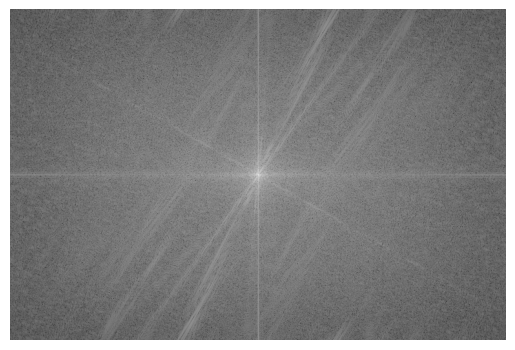

In [2]:
# B1: COMPUTING FFT OF THE GRAYSCALE IMAGE USING NUMPY
img_gray_float = img_gray.astype(np.float32) # Converting img_gray to float for maths

# STEP 1: CALCULATING THE FFT
f = np.fft.fft2(img_gray_float)

# STEPS 2 & 3: SHIFTING LOWER FREQUENCIES TO THE CENTER AND STORING IT AS fshift
fshift = np.fft.fftshift(f)



# B2: COMPUTING MAGNITUDE AND PHASE OF FFT
magnitude = 20 * np.log(np.abs(fshift) + 1)
phase = np.angle(fshift)

print("Magnitude Spectrum:")
plt.imshow(magnitude, cmap = 'gray') # Displays the magnitude spectrum
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

C1: Comparision of the 3 images - Blur level decreases with increasing radius the of LPF filter used


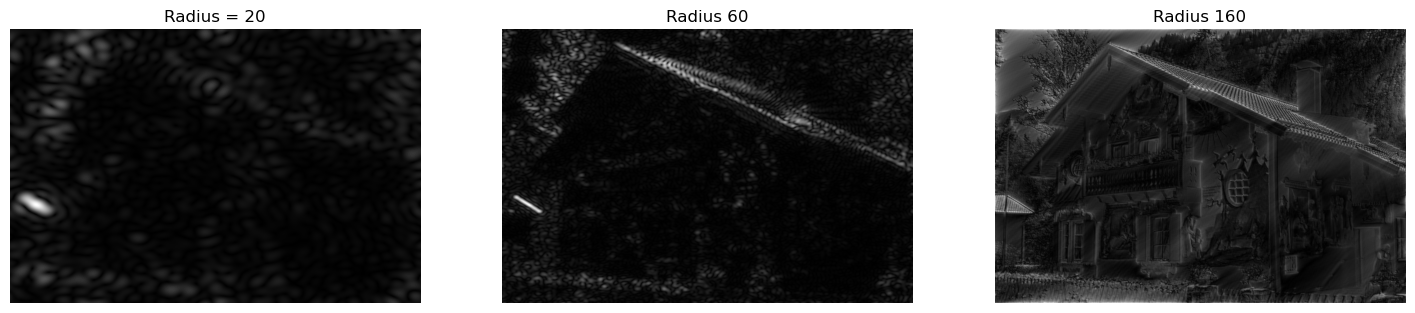



C2: The 3 images after passing through HPF filters


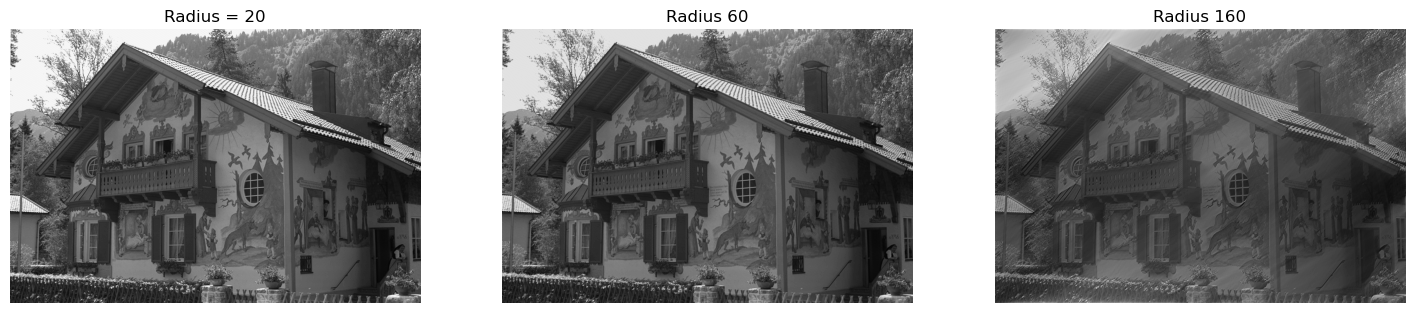



C3: The image after passing through a square LPF filter of side 50


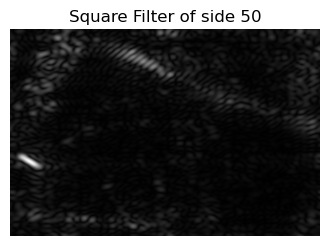

In [3]:
# C1: 3 LPF MASKS
# STEP 1: CREATING THE LPF MASKS OF RADII: 20, 60, 160 
''' NOTE: BLUR RADII HAVE BEEN CHANGED (DOUBLED)'''
mask_lpf_20 = np.zeros(img_gray.shape, np.uint8)
cv2.circle(mask_lpf_20, (img_gray.shape[0]//2, img_gray.shape[1]//2), 20, 1, -1) # radius 20

mask_lpf_60 = np.zeros(img_gray.shape, np.uint8)
cv2.circle(mask_lpf_60, (img_gray.shape[0]//2, img_gray.shape[1]//2), 60, 1, -1) # radius 60

mask_lpf_160 = np.zeros(img_gray.shape, np.uint8)
cv2.circle(mask_lpf_160, (img_gray.shape[0]//2, img_gray.shape[1]//2), 180, 1, -1) # radius 160

# STEP 2: APPLYING MASKS TO fshift
fshift_lpf_20 = fshift * mask_lpf_20
fshift_lpf_60 = fshift * mask_lpf_60
fshift_lpf_160 = fshift * mask_lpf_160

# STEP 3: RECONSTRUCTION
img_gray_lpf_20 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_lpf_20)))
img_gray_lpf_60 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_lpf_60)))
img_gray_lpf_160 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_lpf_160)))

# STEP 4: PLOTTING THE RECONSTRUCTED IMAGES

''' 
    Observation: Blur level decreases with increasing radius the of LPF filter used.
    Reason: As the LPF radius increases, more Low frequencies + Medium frequencies + Some High frequencies are allowed to pass
            i.e. More details/edges are allowed to pass.
'''

print("C1: Comparision of the 3 images - Blur level decreases with increasing radius the of LPF filter used")
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_gray_lpf_20, cmap = 'gray')
plt.title("Radius = 20")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img_gray_lpf_60, cmap = 'gray')
plt.title("Radius 60")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img_gray_lpf_160, cmap = 'gray')
plt.title("Radius 160")
plt.axis("off")
plt.show()
print("\n")



# C2: HPF MASK
# STEP 1: CREATING & APPLYING THE HPF MASKS OF RADII: 20, 60, 160
mask_hpf_20 = 1 - mask_lpf_20
mask_hpf_60 = 1 - mask_lpf_60
mask_hpf_160 = 1 - mask_lpf_160

fshift_hpf_20 = fshift * mask_hpf_20
fshift_hpf_60 = fshift * mask_hpf_60
fshift_hpf_160 = fshift * mask_hpf_160

# STEP 2: RECONSTRUCTION & PLOTTING
img_gray_hpf_20 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_hpf_20)))
img_gray_hpf_60 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_hpf_60)))
img_gray_hpf_160 = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_hpf_160)))

print("C2: The 3 images after passing through HPF filters")
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_gray_hpf_20, cmap = 'gray')
plt.title("Radius = 20")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img_gray_hpf_60, cmap = 'gray')
plt.title("Radius 60")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img_gray_hpf_160, cmap = 'gray')
plt.title("Radius 160")
plt.axis("off")
plt.show()
print("\n")

# C3: Square LPF mask

# Top Left Corner: (img_gray.shape[0]//2 - 25, img_gray.shape[1]//2 - 25)
# Bottom Right Corner: (img_gray.shape[0]//2 + 24, img_gray.shape[1]//2 + 24)
mask_lpf_sq = np.zeros(img_gray.shape, np.uint8)
cv2.rectangle(mask_lpf_sq, (img_gray.shape[0]//2 - 25, img_gray.shape[1]//2 - 25), (img_gray.shape[0]//2 + 24, img_gray.shape[1]//2 + 24), 1, -1) 

fshift_lpf_sq = fshift * mask_lpf_sq # Applying mask
img_gray_lpf_sq = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_lpf_sq))) # Reconstructing image

print("C3: The image after passing through a square LPF filter of side 50") # Plotting output
plt.figure(figsize=(4, 4))
plt.imshow(img_gray_lpf_sq, cmap = 'gray')
plt.title("Square Filter of side 50")
plt.axis("off")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

D1:


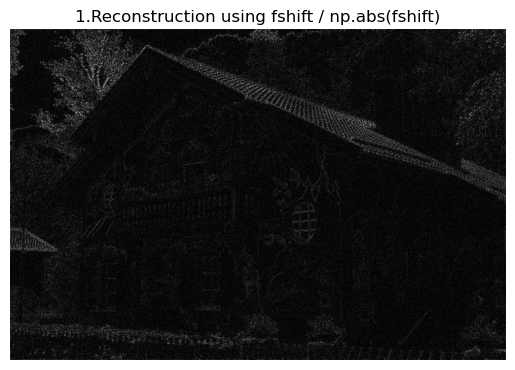

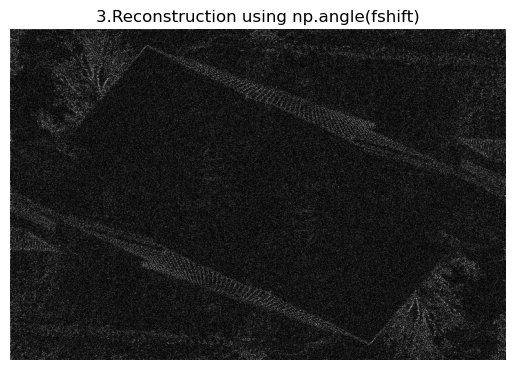



D2:


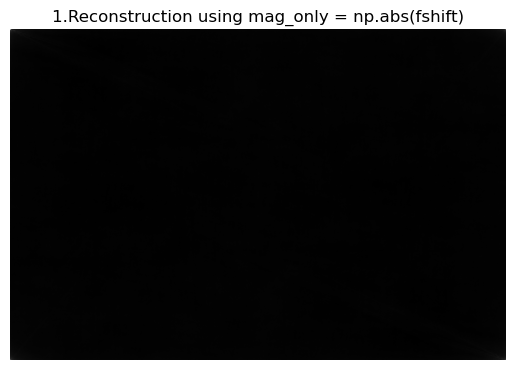



 Reconstructed image using 'mag_only' looks different than the 'Magnitude Spectrum' plotted earlier using the log function
This is because the actual magnitude of FFT generally has a very high Dynamic Range. For example:
    The center pixel (low frequency: representing the gradient) has a huge value (say 10,000,000).
    Pixels at the edges (High frequencies: representing edges, noise, etc) have small values (e.g., 10 to 100).
1. WITHOUT LOG (mag_only):
   The linear scale is dominated by the huge at the center resulting in a small white dot in the center leaving everything else black. 
2. WITH LOG (20 * log10(mag + 1)):
   Log compresses the range. log(10,000,000) = 7.  log(100) = 2.
  The smaller differences enable us to see the spectral details 


In [11]:
# D1: PHASE ONLY RECONSTRUCTION
# 1: USING phase_only = fshift / np.abs(fshift)
phase_only = fshift / np.abs(fshift)
img_gray_phase_only = np.abs(np.fft.ifft2(np.fft.ifftshift(phase_only)))
print("D1:")
plt.imshow(img_gray_phase_only, cmap = 'gray')
plt.title("1.Reconstruction using fshift / np.abs(fshift)")
plt.axis("off")
plt.show()
print("\n")

# 2: Explanation of the differnce between the code line in part 1 and the one in the lecture : np.angle(f_shift)

'''fshift / np.abs(fshift): Returns a normalized complex Number (a+ib) along the direction of fshift. This can be used for standard phase-
-based reconstruction
np.angle(f_shift): Returns a Scalar Float (θ) where θ = tan inverse of (Re(fshift)/Im(fshift)) which belongs to (-π, π). '''

# 3: USING angle = np.angle(fshift)
angle = np.angle(fshift)
img_gray_angle = np.abs(np.fft.ifft2(np.fft.ifftshift(angle)))
plt.imshow(img_gray_angle, cmap = 'gray')
plt.title("3.Reconstruction using np.angle(fshift)")
plt.axis("off")
plt.show()
print("\n")

'''Output: The edges of the upper half of the image have been reconstructed. The lower half of is just a rotated copy of the upper half.
Hence, while using np.angle(fshift) for reconstruction, information regarding the lower half (phase (π, 2π)) has been lost since
magnitude of np.angle(fshift) is always between (0, π)'''



# D2: MAGNITUDE ONLY RECONSTRUCTION
# 1
mag_only = np.abs(fshift)
img_gray_mag_only = np.abs(np.fft.ifft2(np.fft.ifftshift(mag_only)))
print("D2:")
plt.imshow(img_gray_mag_only, cmap = 'gray')
plt.title("1.Reconstruction using mag_only = np.abs(fshift)")
plt.axis("off")
plt.show()
print("\n")

# 2

answer = ''' Reconstructed image using 'mag_only' looks different than the 'Magnitude Spectrum' plotted earlier using the log function
This is because the actual magnitude of FFT generally has a very high Dynamic Range. For example:
    The center pixel (low frequency: representing the gradient) has a huge value (say 10,000,000).
    Pixels at the edges (High frequencies: representing edges, noise, etc) have small values (e.g., 10 to 100).
1. WITHOUT LOG (mag_only):
   The linear scale is dominated by the huge value at the center resulting in a small white dot in the center leaving everything else black. 
2. WITH LOG (20 * log10(mag + 1)):
   Log compresses the range. log(10,000,000) = 7.  log(100) = 2.
  The smaller differences enable us to see the spectral details '''
print(answer)

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

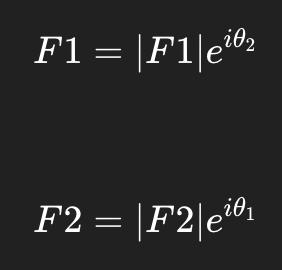

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

1.Original Images


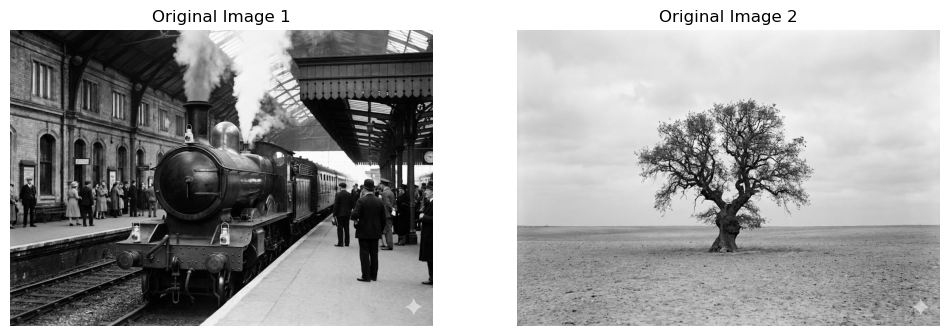



2.New Images


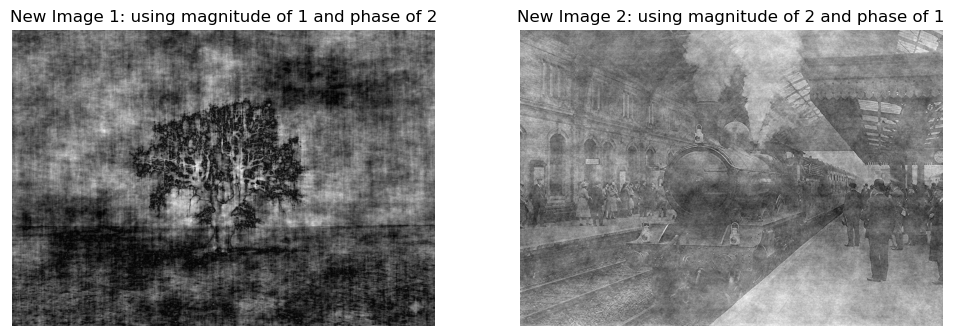

In [36]:
# BASE64 STRINGS OF IMAGES
base64_image1 = """/9j/4AAQSkZJRgABAQAAAQABAAD/4QBoRXhpZgAASUkqAAgAAAACADEBAgAHAAAAJgAAAGmHBAABAAAALgAAAAAAAABQaWNhc2EAAAIAAJAHAAQAAAAwMjIwA5ACABQAAABMAAAAAAAAADIwMjU6MTI6MTEgMDk6NTM6NTMA/+EDO2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNS41LjAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczpJcHRjNHhtcEV4dD0iaHR0cDovL2lwdGMub3JnL3N0ZC9JcHRjNHhtcEV4dC8yMDA4LTAyLTI5LyIgZXhpZjpEYXRlVGltZU9yaWdpbmFsPSIyMDI1LTEyLTExVDA5OjUzOjUzKzAwOjAwIiBwaG90b3Nob3A6Q3JlZGl0PSJFZGl0ZWQgd2l0aCBHb29nbGUgQUkiIHBob3Rvc2hvcDpEYXRlQ3JlYXRlZD0iMjAyNS0xMi0xMVQwOTo1Mzo1MyswMDowMCIgSXB0YzR4bXBFeHQ6RGlnaXRhbFNvdXJjZWZpbGVUeXBlPSJodHRwOi8vY3YuaXB0Yy5vcmcvbmV3c2NvZGVzL2RpZ2l0YWxzb3VyY2V0eXBlL2NvbXBvc2l0ZVdpdGhUcmFpbmVkQWxnb3JpdGhtaWNNZWRpYSIgSXB0YzR4bXBFeHQ6RGlnaXRhbFNvdXJjZVR5cGU9Imh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvY29tcG9zaXRlV2l0aFRyYWluZWRBbGdvcml0aG1pY01lZGlhIi8+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+ICAgPD94cGFja2V0IGVuZD0idyI/Pv/bAIQAAwICCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgsNCgoNCAgKCAEDBAQGBQYIBgYHDQ0IDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0N/8AAEQgCzgQAAwEiAAIRAQMRAf/EAB4AAAEFAQEBAQEAAAAAAAAAAAYDBAUHCAIBCQAK/8QAWRAAAQMCAwUFBQYDBgQDBQATAQIDEQAhBBIxBQZBUWEHEyJxgQgykaHwFCNCscHRUuHxCRUkM2JyQ1OCkhaishc0Y3PCJURUg5PSGGR0o7MmhNM1NkVVpP/EABYBAQEBAAAAAAAAAAAAAAAAAAABAv/EABgRAQEBAQEAAAAAAAAAAAAAAAARAUEh/9oADAMBAAIRAxEAPwDGuGYCk5m1TcmUwRcxfj6a1yNlJcKgmErA14G+t7jzFqGXVqRKjdMj7xk3HLOBChzhYNOsHt5Rv4Xf9sIcAGlrBXWMvHU0A3v5soti6YvxOs6xa4oW2Ns4uKgCTyqzNtYhrFAJzFStMqpS4DzymPjeoHZG7r2HXnSlS0kEEJjMB/I/GghV7nruYiPqBTBzZCuXCrgwGFCkFRUSkGYUkyCPem0jy0pniNhAgKyyCZB4weBB5G4oinXWaQDZGlWvid0EKBMQoDWYk/l9dKCdpbCUgmQf9wBA/aioVGOPH405SsK+tK4cwsiaYlvlQSreLKeo0g01xCrdeVIN4sjXSnKXAaDrCYW4zacaIMA2mLR+1QITFwf1FKN4sf7T8j6UBQX44jy/bSuGmSqVH6jT+dQ2Hx8e8JniNOnURRAzjk5dban1/XpQKtYKDwvx/O3CulDl6z+g50g5tAATNj8b6VB4za5UYTN+PP64mgksftcJ0udOn6VEM4KfErTlx9BXTGAA18StYGg86XaM3NAql/QAEAafz86UcxAAk/C2lM38SBxqKdxE3v8AvQLYrHFR6SbU3WoDU1wpz40gpw0Qot8mkQa9FeBNFdClGsPNLowvE/ClsQugQUIrkV5np0wxxI+uf9aDthmlkqvambjnKlWXDaf50C7sKgac/OnrQCaaKb/WlUOkdRQPEr9BNOWzyj686bIVax6R9cK9XtDKOE9Pr5UD2I1tx6fRpB/GlUAC2lNUNKVc26fWlPW1xYcOX1rQL4dkJvqRr+V6VGKj+XKmyXb24/PzrhIi514UDgYmfL8+HWknMUBbTz+taZPbQPA02B/nQOVrmlgo8Ph9fGkWx/T8qfYVPTyoOmcOavbs6cbx+EXg3YC0+JlR1QuLEE8DcKA4E+lKNN84/SKMuznGhC1agqSMqh+AggkzzjnQDz6FNLUhYhaVFKgeBBg/uOetG+427yXAX1+6kwlFvGqPeufdRx4TarBaRh1LW88hCyUArC0+IrgXggxm6aXNqGcfuhilhRQgCB4UJISlLZuEpggaamiA7bm2u+WZ9OvM2t6CoppwjnY+URU2ncXEkH7hwlIklKSogc7TYSByuK72ZuJinLJw7quuRQv5mKK0D2Je1UthoMOXAgJJMmBP1Fax3C7RBiUoUlQ8VyJ0npwNfNkdl2NSf8hSSOJUhI9CVXPlWp/Zg7PMS24lx99IQr3m86SOabjieJ/eg2zsCTbhRThmIqF2Ti0AAAp9LxUyziJFAo45XPe61ykUgpetB69jeNMFYya5xCtRUXinyJv6RQLKxBmvG8RAJqNGI6057oEfWvyoHe4230IxIU4QlOVfiPAxR+/2jtLOVC8qf4oJUf8AakC3mfhUP2b7otrCnXEpX4sqQRItqY4mjt1ttsTCEAcgB8LUEVh95Wh7qXVE6nIZPmTSZ3zUTlSysnkbW+dSrTq16ShPMjxEdBw9b08w2ESnTjqdSfM0A7jVYhcfdhKeIzi/mRf0rhX2gD/hJHmdPhUztHa4HhT4lch+vKoxvCE+Jw6fhHu+vM0RCuYZ93w50kcYkD4xfypbFbHLesEaT15VOHEpQmSQB+tRGJ2/nkAQnmePKinGDZQBqZr1RB0ECmbblSOCw2ag6aTTtvCRS7DQTXSlUCQTXSTXQRXhPKg8Sivzle5K8K+FAmDXs1+NfiaD9XtcZq8K6gUFfqTFfnFVR64qq27RMUMpTR1jMVHwqqd63pXc2AmgBdp7GlJPK9U1t/aakrKQbCbVdG195kJsSLi3Xhf+lZY7V97Mq1ZTAKrxPA+lA92xvWUcYI5XvrGs/wBabbN7Q1mDJB87EdPOdKAsDvBnNzM6eURRDgMO2CJNjbmagujYu31EJOY+U/X61Jv7ywZmfrlVb7M2g0gEAmU6ma5/v5S7pTMWJ0SRx89OFUXBs/esqSP0+v6V29tkgE31/PlQxu3tpATcAK4DWD1p1jdqpKVHWNf5RIqDtzewgmSbfGxP161M7G26pRseHp+fGgX7WVGdADJAF/W2gt86dbE2iO8y5pHn+UT/AEqg52tto5SeP19ChZreaJJ1Hz48TwpjvbtYwoInNpHCqxdxqxmUokRr+vL96C5H98pF7cp4dfh+cVWW3drpcWqLjmP0oZe36FhqFeGdYt0/KmCXilU8uN+fH60oCV7Ak/08/T4U1+xrzAEZeHT9r8OFT+xMRmHDTUX/AKA8adO4xPEJjjz168PrzAXx2wFkCMpEcD5xNvy/WhXG7BeT+AkX5GjDaASP8tWUzwVaeFtK4Rttwe9lWPgTytoflUAMt9STdJHMaAf0n6FOm8cYtw1P1+dEzm1ULJSsBJP/ADBAN+CjY+h/akHNlJFwMs8UkEDlrI61SBZ9ydbeXD5UzKOvlFr9Y56+VPce/wCKec6Wt5fOu8IoH8OvHpp5SPKgSw+JUND5cun1apPCbUKeF+X705Y2egxeOH1y14Uqvd7iDz6Ty+uNA3VtRBmUHhpz/ekA6nVKo6EftXOM2YpI0nl8z86YLQQbjhf9ooCXD40wNDNrH+dOGXYuRpxj9KEUr9NIHIxyqRw+0FfxaSNfqaAkcxYKYtrY/oPSo5568cACfOP0mmX264kDW/AdY+v5ePOyVG4AsD5H0ufhp6Ae+zzjXE7RaLTaXVE2Qs5Qed48JGoJ0r6C4DtObJCMSy7h1G33iM7R8nEZkx/uCaxT7I256Hn3H/tHcv4cpLQBRK0qCgrwLspOkwdfStuYdeIR77SMQmNUQhzz7pZynzSv0oJXD7EZX4mV5JvLKvD6pun5VG7z7qOPNqbcyPJmUKB7p5tQnK42q6QtJuDKfnSLScI4rQsOcjnw7k/+UK9MwqaRgn0e46HE/wALoGb0cQB80moAzc3fxSScJtFBbeRIbddSkN4tu+VaTJR3sf5rc2MkSL0ctbARGZlam/8AYqUf9plMeUVCb0BDrZbxTK0pkKDiR3gbWLpWlSAVJIPEiCLKkEihzdnbbClljve5xCACFNLhp9vQPITdu5s4iAptUgiMpIedvW9L+E2bilqCVgt92laDlIU6Q2kqQrqr8KieMVnrsf8AZMYx2B75WIWziHCrIpshaQkSlIcaVYgkTYoUREKog9tPeJ/uMLgVLS4HXQ8ooGVxSWwUoSoCUwVLzApiSgWq7+y7dnCHCYdtMBxlpCFFJLbyVAQc0ZVa8wUkaa1RjzfX2atpYGStgYlkTD2FlYy8CtogOoPQBaR/GdartjCA3QSlQvKSUlJ9CCCNIsR8a+nicG+j3Vh1PJyEr/70iD6p9arvfzsb2bjSTiMOcM+r/jo+6UTbVafunP8ArBPlQZp7OvaZ2hggEOK+1NAgZXT94Bxhy5J4eKfOtMdnntQbPxsJKzh3j/w34SCf9C5yq+IPSqB399lbHYcFeGKcczrlTCcQB0STlc/6SCeCTVHY7CpzFCkqQpPvIWkocSZ0KVDMI+uNB9Nntjtr8aDlJ/G0qJ+HhV60zU1iG+KXk8vccA6fgV6lNfOHdLtW2jgFBWFxC8gP+Us52yOWVUwOovWjtyvbvwziS3jknCO92qHBK2lLhWUCEqKZMe9b0ig+Ze3dhoccAU2biCtJKVT5puRobzQZvF2eKlWUd5EQP8p4dcw8CyeqR51N7H7VEBYTiErYWBlhwEpMclAEDzNGzLqXUhSFghQ97UdBI6aeVBQf9wqUqVXUNG3Pu3rfwq0VHNJqa2TvCptRRmJCdW3rKgcEuDT/AKgZ51eLuCa+ypDzQWkKObMkKSOauJEcxwoax/Zfh30Esr5wlZLjfoo+NHTKY/00AVs/HpXIVLalK8OYwmDqM4lJ9TPSp7EbJywUnQWy3t8xA56VC4ndLFYYEQoI0IV98wZ1hYBUgc+8QkDmNaR2LtEsnNdrMIgjvGFCeEEhN9MihbhaoJFzIpJJ15iyp6jQibWrzC7JStJChnkwAPeFuR4c6lm94GHRLzWS13W/G3M8SkZ0D/en1p6jdYFKVsOBaBfXjpZXOqKvG5QOdJlPKBx5cKCtqbsLSojLMX+taunaGEWCrOlRywqNFgxrOiosdZqDxo7xSilQKUkABYyuGRKvnYUFNPMxqKbjD8RVvuboIWDHhUDEK4X/AF6cqFNqborDhzWtYpFiE6R/OgDU4gjWlg8DT7aOzVD3xHIj9eVRi8JQO1LIFj6cK9+0T0jj+XrTEOEWNOEPAjryoF3n1KIHD9OdTGHaCR4fjqT+1QKZGhil07R6QeYFj5iglwQB1+dMsRtHgKZP4wq4/C1JOrGieetB647/AErhblJE/wBaTKqIUKq8TXiU08w2CnWw+dFIs4cmwqRawgHU8elLIRGghNfn1Rrpy50CDzoE8zTFSq9cdn64Uqwx+9B0yxxNLrJOnxpVlox9TTkNjTlRDNDMD6mvAj+dPlIHD8qSdEfXGikSrrFLIxYtPA0ktUXNhTVRk29KCXCBqDBrkpBMmeHxpq07FvlTgOA8b8R+1Au68dNJ+Vdsu8B6mo5R+jyp0wokeEEnhAPrQPHsZA16/H+VRzmLJp5h91nlXKCJ4qISPmadI3aSmM7zaf8ASjM4fkAPnQRBPD69KXwzM1OMYTDJ171w9YQn9TUozthCR4GGhyKpcPzgUERs7ZZUYCVLVwCQT+Qoiwm5LxupIbGvjIEehvTV/fTEEQHMqeTYCBbyAqFxGOUbqUpR6knj5/KgsfCbpsN5S4VPT+FspSkAXlRJkg+lTa9rttDK2Gx0UpIHAwdSrzkaVSqXCdLD9qcKEQB8aCztsb6FSyo4hJBI8KUHwgCOHAfhkn50ptLtOBKCHnfBAytpgHndR04Ry+dYIH86WDc+mtAcPdsb+YqaltRiVFRUT6WSPSk3u0vFqsp9y94BiPgJHx1oOKAPOvO8j6uKC3ezLclePKypSylJ1Kpvx1JmP1rY3ZHukhhIbEwIAnX+nKqu9lVps4dMxNj6kmx4z6Vf2x8IrMs5csDwk8aC1d3sTACReNT6/XlR5s5+1Au6WBhIUYJIotbxEUE0tVMn1cabubQv6Uhicf8AlQevOVC4uKdKxM0wxmJH69La+VBGKeIM/V6dtY4x561Hl+Tb68qRGKgweH9KC8dztuJLQaw6TKRKiuwBOpPOTwFEWH2MJzLOdfM+6P8AanQfnVBbC3rLSwpBg8RwInQ/rVu7u74KxUpbhBSBnUTJE/wp4+ZsKAnxu0UoFz5AXJ8hqabwtzXwJ5fjP6JHzpfCbGSjxXUo6rVdR9eA6CmW296m2RKlX4JFyf29YoHTmFSlJAAHX9zQbtLekSEIvGp4TUPtjfJb3h9xHKdfPnzim2Aw5J8IKjpb5TQPMU+pV1HSpPY2y1LFgQn+I8fLnUvsjdKIU54j/D+EfvUy7igPCLnkOHnyFAxb2SkCPnxpm06UkwfWptGBn3vgNP50nj2Um3wig/YcAgGaXUrlUbhkEG9SnfCgTrjPFeqUa5IoOga8ivylV4aD01zmr9mrkig8rgmuia4WaDkKr93lITTNeKgxQe7TRNA+39g2PGaOlvTaknsECDQZu7Rt2EpaKo8QmOc/zrG29rSlOLChoY+pr6C9rO67jghFgBPnHOsA9pmylpxCk+KxOblPAaxwoInZGxYvMcOV/rWplzZhTCs08BGh+pqDwb6ovYD9PhJ/SlHtuk24fXlUBDs3byEEWF4BJvE/tRG7iliQlJKNQTAm02Fz9fGsmngTfT9dOFHWzduhLYCU5l6Hy8zoOVUSeDeUCC4qJ/Cmw8ieNEK97gWyBwtb9eGuuhqtsS24rUgcwnVM6ybedE27TORChEzfj1vpQcN7ScIJum8Wv/PzrvDYlWaZI4zpB6fXOpxTISgmOEk3jy60I4vGASSq0WA5df0FQEn/AIiiSq9jedDxoE3o20pwLKJiBN/nYfV6jMRtwG0nlr9acKiDtwAqE624adP1qhBbx8MmDrqOnz/OprF7VIyqHEDjOn58+F6CjtkTYaafv15VziNqlQAFgL8/j+lBbmxd5Ok9Qf0FFeG2qFax1B5/XX0ql9h7wEa3tbqeUcQP36VYmF242tICouJM/WltRwoFdoYMKUTpcaW+vhXrOBcTBBChwBtI4AVG4htFsrgF9CqR/IU4Y3gLcAlKhzSZ6UDvE7VAkLREniLenT41H4lYt3asp4QbcblOlSp2404mDlk8FefWaj8bsJtXuHLbhcH6+dAM43NAKhB1tyvpwp9g2wALX4emlvK9NsdhSghMzGn0JpzhhYX4jzHpxH1wqCawDdx19L8o8qklM8jA+MDp9C1Q+GxHqI9bfXxqUQLW4/V/rWqI/FrV59NJ4fHjxpk/jwnVE8zOtPn8ODz/AJ+h561D4tojX1oO04htVgIPXrxOtJ5RqI6X89Z16U1aXI4aaj9v5V0jBDrxj1+uVCHhNhI/f408S0I16njTANR+Ij9Dx6U/xWJypkG4Anj16+mlA9weHKVAgwRplMGehGnSri7PvaY2jgwlOYYhv+B+VKjSA4PEPXN5Uh2LsMhrvcZhO9wbp7sv5c6GljiVAhTYJMFVuF7GrJxfsxM4lOfZ+ISLkdy6e8SL6BafEOhOYctagPN1/a6wGIARi2V4cnXMA61NtFgSPMpFWzsjBsupDmDxMJNxkUHWzPAoUbehFYi212R43DFaHsK6UpElbQ75uCSM3h8QHRSRUFsTGrZVnwzy2li0tLKTPJSRy5KFB9CkYzEt++2l0fxMnKr/APBr/IKNQG8WwsBi/C8kNvC6FwWH0K4KQu0kdCQeRrO26/tb4xiE4ltOJQmxWnwOfD3SfhVr7ve1ZsnFDI653KuLeITA6wogoPxqjKnaSvGL26MKc+N+yrTkISEqLKMrqiUg5FFInMRGYgQBpWut0O0jB4txbTuRt5rKEqktLUCMwMHKtJExqpJix1rJXZZjsficftPHYDDIeHdPFtlSggAuLAaSjMI7xKE5u7JCSAq901fPYHvPhktt4HG4dxrEJBhWLblSgSVFJWrNlDclLagchQEwQZTQX8WXkXbcDg/hd1/6XE/qk+dejexI8LyFN9VDM2fJYkR5gVzg91koH3Cy2DfLPeN9ISTYf7SKQe2m63/mslaP42fGP+pswsDoMwoJTD7MbUMzSsk6KbVb4XT8qBe03sdaxqYxDDT5HuvIPcYlHVKxmSojkYSdCCKn8J9ncJUysIVxyEtqn/UiBPqk1ztDbeJZg92cS3+ItZQ6nrkzAOf9Pi6UGAu2DspxGzX0M5XMSh4qDENK78keIpW2gKQtSU3K2zlgEwm4FHbbx6XPl6RVldsvaptbaO1C2pxzBrzuMYZlSl4cMsuFSTnVZX3qB96q+YeESLHO20HFoWpOZKsqiklN0qyqjMkxdJ1BiSOFQPdq4Fl/wPNgSIKkjMPONUnlEUAObgusknCPrbEg5CZQet7CTzE0b41hxDgUQdYBTcEHXh8enlTjYmEdWFrABhRSoHnNogSJB41QGbP7YMQygs4loBMx3iASkjjmTMH0+FHm4G1WXG1ZVIVqZbUEqH+5HKOEUPbS2WlRAKSJsoG/Mf15VFvdlzSkZkktOfgdbJB6yEm/xFqCwt1MQ9KyqFN3uDJBkjTyGh/WpTGdn7LwVILSlC6myADOuZBltXqmeoqpN3EbQwKlAIGJbJkgEhV7SOMxwIM86sPcbtnwy1d27LK7yl3w35Tp6WoAraHZY9hlqUyoqT/8Plp4mlEyP9h8hQ4ja60qUfEhQPiUyCDbitk8eZUk+dq0ftbZqSCUqlMD3fjKSZ89ajWt3cO6gh9AUoGM0FLg6haSFC3I0FRYTfUuRnCHheVN+FyP9TZPDofSk9rbGbfyFlYUpJggWWLzcHxWox3s7GZBWytK4BOR3wuCDoh5sTp/GlU/xVUb2CWlaknMFpMAOeBY5ZHk2Vaw0POgK9lIebKm3Ws6TmXMXtaxMSJ9QfWWOzHiFqJOYCRlVYpuRAnWKfbG37xDSglUOaDI/wCA8QMroBB9RepvFPYVQVmCmVqg5HAIzccjgOUzNrz0oAreDZTaxATB4yKr/am4rjZPHj0+vKrUx+EUAgABSYtJvx4/lUK+LZZIMaHT5x6UFUZL+IaWvTN5kXij/auygpcWB0Mafy9aC8fgDmUBeDQJ4PBnKTNhem/2kURbsMAs4gxOVHwnj8qGFN8qDpVczXgNeKoOya9SK5TTxhqPq9AthcKBc3PAcB505Sr1PTSkm3D512p3lQOFdddegqLxeKk/lXb2JtAPrzNNWxJoF8M3xNqf4XDzc6fXypLDt5o/KpBT/lwoPVDymvEj0FI9+NTrXjmLTzNA6SYtSTz4HU8h+tNvtvACTxmvGiRcAUCSWyTJmnzWzlGLR5wPzpMjmTyrtTA9etAqcCkauJ/6ZV/Kv2VoXOY35gfO9MnXIkU3WSeM/lQS42ung2kciZUfma7VvI5oFZR/pAA+X1NRKOlLttx58qB0rFrVqpR6kmpDBtAa3n5etMGMQIA0+uBpdpXIweXOgl1AdPlbnXJIj4nzpol4E3/kfTh6U1zKUSOH6UDl/E8E35xXLWG53NK4dkD9TXAxHL6vQKE/XCvwUOdJFRk0mXOA1m/1zoh730dPr868GJP1xHWmyGCb6CPhTppPIevD61opVps/X1pWhOzvsOSpgLeRnUsW5AcIM/E1n0qy6nT6+oq8uyX2k+6QnDPJTkSIQ6ZkAXAVYjoD8aDTPYnuIloZEIyhPO/XjxrR2B2Tmy2+udZm7He1xt1QDclOaJgSbcOYtrWt93cGIBHET5UEhsvBWAp1ifCKdtsxSGPZMEjWgiHto/KkRtAmkHMIfgflXKWgJ/KgTdxxsPSmG0cZreu32+JNDe29piCLfXy+dA/2VtC5nhXeIfk2+vOgjDbdg8rfD6+FFGwn8xmNaD8vDKB1+unGpjd7eNTasyCUrBEjp+o+vNLFMHy1+XDyofbxnjMHQ+Vr0F6bZ7VXFNgAZSU+IjWeY5UFL2sBqSoq0FyST8yfKmOBflImrB7MtrYRoKLmVLwJPeLv4eAQdE+QuaDndPs0dWc75LSNQj/iEf6v4Pz6CrEZwzTQAACQPdSLqJ5xqT8aiDvA7irYf7tqxL6xdX+lpFp/3G1EeydhpbE3KuK1GVHzJ08hAoPAhS9ZQn/zEfp+dLBKUDgP1/euVY3NZAn/AFGyR+58q7awIF1GVczw8hwoEzmVpKRz4nyFeowwTXasXNkify+NcdzzuflQIuomvGjFKOPUiqg6JrwivEKrsigTy1+IpTJXE0Hvdc68NKgUnmmoEXW+NJmnndga0zxIqhCh/HtEk8+FEQNqjNotcaCNwczBqaLtDGP22E1Bbc7SENRcXBselA/36xXhnlM1h7t0wuZ6E2nxKMa66VoLePtW7xYAKco94Tf66VRPaXtHvs6kRmE+nCgq13YaQkSqYHEx6+VQ2MdZSJJmLW6DXl/Kh5W01EqBMmT5TJn+VR2KxUj0+vqdaB9iNrCTAIBN+lTGzt6+7kiFSnQ8/rXrQjn5RPD96XQEiATrx+vhQTWK35eMxkHoSeg8h1FFW6W9DqkLzm+W0WHnbkKEtlYNsqGpPy/r0or2Ts9SSoBICSDr6/GKgL8XvWlDJzKmEGfONf2vNUtgt7ConMSfP5RRbthpJRlcVN9B8x5jytUYww3olASOBMAx5/KKqmGHcBFtfrS/yqHx2FJJ1+P0ZoseKcusGPhHKhXvCoqyibRyFh+9ERi2SNBYfL+VP2kW6geteYjZqwnORbNHlPH5V5spq8Enj6/1oJfBNyAeXP8AMC1TOEJ4acv2qFwKxpy0p/hn8vHQ25/QoJJey1KEhBPEwDw6fnTUoUOB+GnLhRHsjbpAgK4i35+lTQ2ohc50A8J4z/OgAiCIsZH9Pz+Hwpxh8QrmRfr+kR/Ki/FbFTcoUP8AaoW/Xn61Hu7DIuRw8xPy/pQMWniqCb2+vjTtlV+XD49a6wqEwoctT8IApbCJmwtyHLlwoOi/aeUR150o1tO8EeUW/LnXj2AVrB6nX9taaoa4fmPr6vQTCdppjje/OPh8qZYhOf8AGLjy/MfXxpqrCG5kHjrzt9GmOJWRNjpQP/7sI5EQeET8PzjSu8NhhxB5HQ8fyqMw+0VSI4flxPz0p/8A30oi4SRzigkAwgiZnoZt+X9KS2s34bceV50pHB4nN/p0jl+sTFSBwWZSQTqoTYmZMfUdKg2d7OO5OIRstKO7ZxDGJClKaWYlK7FJIsZAvyPKivcPYWHwxbwmIacwygcuFxClwpYF0sqeTCFrSLNhclxAEypJlbszw6cMy2yorwxCElJ1bUFCeIgQZ1g9asLbuG75hTT7SX2liCWz4hyUkHRaTcFJkGqHDGz8S05mkPtkQZ8LguTf8KuXCoLens62bjCe/YQlzgqCw9PRacpPlKgeVBm4+JxGHcGFViVeIn7O66FFLgmQy6FE5XQLBSVeKCY4VaaMQ6RlxDII5ohaTz8J8Q+dBQG+HsfqucHic/JrEATroHUAT5lHrWau07syxGDV/i8OtoaBZGZpR/0uplB/2khVtK+h2E2Ygn7h5TSv4PeT6truB/tIrOvtibSxCzgsC4Wsjqi4paVETBCElaFe6AVEjxEEjhBoM3dm3aLjtnKJwjsIUoFba0hTayEwCQbggWkKFab3M9rXC4hKW8ex3K9A8gZgk2GcA+NGs/iSRIMgkVLbyexbh1pSvBvdysIjKsFxpaoudcyCoiZSVC/umqF3/wCwzHYOS9h1KQJIdZ+9b01sMyP+pIAoNm7kbwYTFBX2fEI7xByr7hwQq2YLDZtCgZ90AGU8KKUqeRqA6nmnwr/7T4T1givlri9nOEpdZdU24i6FtqKVAiCYUkgg/Krx7MPbjxTBDONbGICYBcSQh4aCSLpXx/hnnUGy38PhsQcq0Jz8QoFDg8vdV6g1EvdnamyVYd9aZ/C4SoDXRYhf/f3g6UP7s+0LsvHBI71GY6IcASsHlCoIPDwkidDpJ7hMHP8AkvGB+FX3iR8SFj41Rij+0AwmI+x4fvm0KcTiBD+RBWU5DKA4jKqNCQptNgNSL4CfxBBvzF+Pr5Vpn2nO19/GYt5pxxLjeHeeaaySEKhZBWATxiBMwm0mZrNm2m4JUL8+lAYYbAALJSopIPukyINjYnib2uPWi/ZzKlNrhAKkjVJAn8pgDzqABzCRoQbxJ8PKTqeXCp3dRZMwDEZT7ySbTpwPWggtiBJWDHEyCAIBmdePnU9tDZOHvB7ojxTETbl7pg/GhjbLRbeJuQToNAJsCevX4UZs7NXqkpXmRlUhemXWxHykEXoBvYWJVmXKQoIMZkjKrSRY6+lLbX3NYxiCHWW1mLEpAWkmeOoqOxmMS2UpAU05mEn8BSZ80HUXsRRdu9tMKH3gkzGdNgCBJ5x8xQVGx2c41iRg8QYTP3DqsyFRNkk2FhwyzOteO9sL7Jy4zDLZIsVpGZBA8p+U+dH2D3sS8lzIPdcUlJkBRCTEgE3tyv0p1sfehsw04jNmBB7xMwSb2MWtQGO6DmGxrYdYdQtOQJhJEg8f9STzBFA2091EhwhSApBMQQCDPMR86i9sdluGViB9jcVgXViy0KKWyvgkpFp6WqN2zidqYIw8hGLaTcrbs7EwSRoY8hQP9udk6ChSmV5P9KocaJ/2quP+mKr/AGtuq82khSTlJF0/etXjVHvt+ggVYWy+1rBvtFKF927/AMpzwKzCZibEjpamWJ2qUrQJ11PO1BTTzq2/EglCQY8J7xo87XKfgIqZ3e3qZKVt4hFlXS6jxpCgLSB4k6yeFWNid3cPiCcyMq9Qpo5V6RJixiNFAjpQpvB2JOJlbagu0kJhDs9R7ivgnzoIPam6CJC2nUuJXGhCgVakcT8dKrHbOEcQtWZGWTPSPOid7BusrEhSSLzGVfnB8KrctadOb5BQUHEpWecZViOYPhPyoBfdJsFvEJ5p0HITNDbyANL0YbNwaVd/3IUSpCsqSLpE/r9ChY7Fc1yGIm3EDiALxQRihNegaV3XkCgUpZvE86bSK9SigcfaOVJ94SZpNaKUVag5CSaWcTaANNaXwuGkTx5dOdKZQOtBxhiTpa1LpwPNRNKN9L9ONc4nGRbnQeOYdIH76+lJZ58qblU8yaWQ38aIWQYsfr640q2qbfXzrxtrjXLjkC/woFwqB+v7UzxON4D486QdxhPlSYFFdz86VZQZ6cqWw2zyfKpBpiNPU/VqBBvDxrSga1zUvljX+dcOKohutPAcK8axWU868W9wFdpw4GuvKipDDqSbn+k/rSyyPjUUnp8acN4rnQOQ7y+v0rnv+o1uK4gHQ/CkFN3nnVC8lVuApZpofWtJMk07OICRNRCvdAXV8OFN3doAWEVHv44q/nSSFfXnRTxeIm5r8ocBr0pubdINab9krsgw+LK8Q+gqDawlAJ8IIFzHEzz0oLI9jfC52ShbZBaIBJBkz4gr14x+1bv3fxZAAAsI+hVYbudmrOGBcZSACBIE3irZ3eazgE2tagIWHZ1rt1NIob+FOgP60ETiWB/PlUNjGYM8B9a+XwqcxrvCoLayvmKAd2rijf6FVrvBjoV0+r0b7wG0g/r8dD1qv9pNhRuevIW/bhURwx44PUfzqw92W7DlxoKwuFAEA3mYop2VjD5aQKqiTbLoyn4/0oCbnMTfp8b1MbzbTI14wD/XrTHZrcnn9fv8qAuwRhIuJ1qJ2ljio5dLj1Hn5cqmNmYeUnjrHUedQ20cDM/L6iaC/Nwe0lKm0NKT94AEJiAlQFgZ0FHjWBKruGeISPdHn/F62rJ+7u1igkEzyPIzwq4Nze0JbhQ0tWVMwVj3iOFzMcpqC1n8aBYCTwSn6gDzpIYdRus2/hH6nj5Um9jm2h5+qlfqabh9a+GRP/m9eVUPVYpIsPQCkXVzramb+LSkgC6uX71+Ek3oF+95V0RX5pmlVigSyV0k16E14TUHZArhRr8lVclVUcqVXAcIrpYrxI9KDjPXSmedqQxG0AnQepqJf2sTYmgehymuJvPWusK0SDF441wtPxoKx3vxGQkag/GqG7bcI+lptTQJJBBg878/Qf0q/wDfzYy1kEDzoG3kwLjcEozAWHQ+VRGG9pbzYhLt8yDx52jXr8qjtqbcWuZUtXO5vNW1219liwo4gFRzm6TFo/h5R5E1UOFxY0tbqOFVUR9lIukDn5T58aRc2XqSY4W/SpvGNyLfvTdWAI1+HW1o5UMRo2aOAvr6fX1ao3aODMHnw5c/rrRngdm5pvFvX69a/bS2XlSSQTNpiw+vzoFdwUpDebICsWnrw+hrU44+ohRJAibJ8+J6j1oG2HtVQ8CT7x41M4UKSVyrN063vrQRm0IUCADMyef6WpbaOziQny8vTz040thNopAIsSZv0jiPPTrSeI2yfBCeP52+cc9agXxOzB3QJ1Eyb9bT+VQmDcATIBtMj99Kkto7UJSUxYm3O/w460zacIHAz9fCgYO7QKkJTwSfhGlJAjMDb9uscK6QSlJSY+XGk0MjWqHqLKB4XvxvUy1iABfXy+uHxodSz5/XKRUjg8K8oHI04vL4lZUqVAAN7A8PTpQE2zyhR/Dp5EW9D5VJtbHVMoVbkqI+IPzoJwmEfWTDbnD/AIZtPDT49L2qcxOyMWysIi6kpUAhba03E6pUQCOIJkUErjcY4n3kkidQZB4fyrzC7zC0kj69Kjf7wxIlJg5Ymch1jiFfG/nXJYcMlSWQOfetiB1Geden5VBJ7SxiVK8JBtw4n9f0pps96/D9bVDrSAoEKbBg6uJj8zxpfBY2D77P/eCD9cb0B5htvLCYABHXr6/Ouf8AxC3otAkTNvSovAbew4AzuIQf9JJFo6GmW0NsYdUw7OkQhc8+V44xaqJjFYhkxlMdP2qNxDImyoj41GNbyMiOP/Qr409xW92DAF3JHvHIAnTkpeaZ19KDhGBPAgz8Tzrs4WNZFudvocKYDfbBAwpRvpdsRrI9/wCprh7tE2eCIcIkH3ltRI00MwdCdelQE2x8HeZ9fL61j9anGMPJsASDwufTmfoVWzPbFgke8pKhpCcQhPqD3arelebH9p3DMOpdbKAtC5RLpWLGwUO7Eg8dJ1EC1Bo/dnt1x+FIT3hdQLd08M6coPu+K6ToNdI4Crk3P9qPCrgOIXhV8S2Spq/NPn0t8axhvP7dOHxCsz2FwalBOTMgvIPHxApF+ETPG5gUFp9sJlAhLOHVPFaH1EH0WkGLxYWqj6pN71NYls/5eKaVqpuzidL5RCgpOoULg3HChXYva7i8Nihhnlh7DuGMO+4PF0adIghYsApQvxJ4fM5v20nUKCmS20R/ymXR+bp5U+2t/aD7RcbLa3EOJ/1YVsmLwcxVII4HUc70H2IO8DSwA+0pBj3suYDjIWi487Vlx/BDaO3MS6jO/hMK13Ur8aYAjwz4inOXDa8gmRFYjxn9pptooyB8JAAAKcMwkwBAuc141POq72D7bO1cMHRhsS8z35zuhHdDMqTe6FQbnSBRH2a7OthJQ0lGHxaxAJ7tSs4EmfdcvHLlNFxxeKTMoQ6OngVHGyvCbcjevhPifa+2qpWYYnEhRMkh4pI/7Ep6TavcT7Ye2lAg4zEkEXH2l0DSPwkHTrRX2p3m7J9l46e9YSy/ElbYDDwJ4qKYDg6qCx1rLXbj7IT2HSrEYZ1OJbRJN0tvoREkkTkdSIvlhQGiTePm9jPaL2kuCp5xRAKQVPYhagkxKQS9ISYmBab1EY3tixy5CnVEGbFTihfopwig1a2kg5ZAIGoI85j6n0o83Y7esZg0LbS9KChSQlxc5SU5SUKnMm5BEGLCRXz9e33xJ/EJ6JGlNX95sQoXXbyH7UF/v5ypRMknnHG5OvE3+VNHQBqUg6SVC/lf9ONUKrbDx/4ivo143tF20uH5c+dBq/a2HcQhTiWzm8JhJsY5jieOk053S26XkOCCh1sWAnoJn8xrRnshyAEpWFpCovrcnUjl6TpRGzslLa8yW0kFs51RfMFyCeJETQVMtxZIcBJKrKQYtGlptpy40dYfcd1SQ6m4KDBQZVPGRAOUetDu0wFOgpRGbMkwLEWIUI+E8hUruhvHiWnMoKkMqBKSbhKuIuPxf7v1oBjb+z1FSFAhWWUkEEeImD8LGYrnDpCUmR3elk+6ombWkHXQga0V7xPFzVKc0HMU2UJtYfpf50BtbaUhQbUJBJsux5CeH1rQO93dgJcafSooyIegZkkgJVCjKhBTBPAfGusVuO62MzZDiIkBR71HH3VDxpHoBUDuTiCTtBkkALWQAki5UkERM2uD5g1X+wu3J/CLUy4kwFEeFRtBgiCcsGOBHPjQWDidtLTPeAoiIzypBUJuFDxJ9Ukda/YfeN1JKinMk2lKs6YjpIgcJqV3f7VcHiwUqLZUYypXCVAaWNpjmCabM7iJUqW3CnxG0/h6KGWbaTNAO7w7rYTFqMgJVxVHE2PKOc31+ETi9xcRh8qmXu9QDCW3dYt7p18unwov2ru48hU5EuoNiQYXz1EW6keZpRpLZ8Jci0ZVmCDPA+6aAV2RvSltR+0oUyomM0FSNf4gLetHWG3kDpORaVIgGc2oiBpTdxEgpUAtHGwuQePA25VXO2dy2z4sMpWHUTcJJy9AU6UFlNNtuqKX20rbym9jFrG9xVIds+47TJC2CcmmU3iQbgnhbSpZrerFYcQ613qJguNnxEdUcPShftC3zbeSMkgyJQUkECDqDQCG66nCShCinvBCiOQv+VFOEwIbWFJN0WyqMSOPS461K9ieBMuryZgE5AORVcxNjoJqT37LYSYBSoJuCkSTHA6SOdEVvvxjEKUAEBCx70RceYsfzqL3fwKVLBWJSNRz5VGh4kkkkzT5oqTBHSTHrRVpYTZbK0ZUpSBIsABHx1NCm9m4PdpW6hQKRqmIPUik2NuyPEMqtQpN5qb2rvGr7OvRWZMBXna45+lBWbZFLYZoE30FNgmpjZOBzEJHG5PIcaBti0mLa/pTX7UQYVejrG7ojLmQb8jex/KoLF7EIPiTB4cQfWgYjEA6V2hJ1ImPSm+I2bGkg/KuU45SbESBQPXIOluY5UihVJOPA8aSS/Aj6AoHT+NA01FMFrJMmuCKc4bCk8PWg4Yamw41K4bAga/Dl50uw0Ei3x+uFKig6CvrnXSjHX641znpo7juAuePLzoHDuJjz4etNESeg+ta6aw3P6mlc/D6tzoOgiPPj5Ul3f70oHOH9K/LWBc8qo4WsUjrTkYYqidPr50oWeA+v61AgExpr9eddt4oix9PzpVbOUXPXjUYvF+nOgffaoNNc5JFcINLIbm9Ao0yT0/IcK/OK4TP1+VdsY/LIABniabF0nXWgVU7PnV8ezl2xKwv+FIORxczyJ1A6nhFUxszZBMTarA3LxjLLiVLsEiRGubgNZ6/tQfUzswC1MJKjOYSBxj5VaOz1lOsVl3sE7Xm3GUkKmLQdR9fP0q+kb7IAHGfrjQGSMdM8q6cxsChTD73INxFzTnH7U8JjTpQPk4+SYpJ5BIvzqK3fJOun6cKmMQoX5fl/KgA9528ovpPwPrVSbb2jlXFtR/X9qsLtB2nZUT8ap/aOJ7wdUelv3H5UBBsva15Ji9uo+rVYWxsRKZF/wBvyqicZtmI4xFvrnVgbo71W/06wb60D7fbapCgB68PKKlt1Hs/QVF7YwPeqkCRTrZz3dBIHmfPrUFj4Cxjhp0mnGK2aJk2+rU33VOcpJ05UR7c2cSDH1/SgBXwCSJ0/Ou9lbTyEG/7VF7VbKFFPM6/OmjuLUEniTp59TVGgt0d+W0iXLiB4okjp5eVONqdpPe+FoFKDbMYCj5CbfnVDbF2wUCFnyHXp1qzuzzDNuOguzlA8KTpm4FX1FBYW6uCKvEJjmf050WtNBNqTaxYIhGg48PSlW0gXOvWg4Ua9mvST6VwVRQdCuVVzmmvAaDya/JrwCvwoPDTV21OlJr8hIF6CNVs5Szaw5/tTlO7yE3Jkjn+1PZUdPD1400eeA/1HjP1ag9RiyqyRYak6elRuOQEECdaXcxCjZIv04eZrheyf41CfriaCMxWGzeVQ+0NlhQgi1SicVBImYMSONePOAikFeby7ktLaKVAQeYFfObtbwbeBxbwKSGwZAAnUxoCOJtNfQntE32SwkiRpxNfO/t12MvEuuKcUENLBFxeOd+IMHpQD2C7TMIYzF1M2MIRYjzcpLaPaBhs0pU5A/iDY8/x6aVnTauxg0pQVMJJSozoeHHRYhSeYPSmSFN/Cg1JhO2PCo0TfjmW2LaniaS2x264ZacpKYjTvUeoMDrWYgprlXOJda4DSKguzE9pmCGhBAOveKOvIBN46Uq3264ZEgBNxydVbzjX65VRCsYjgnlXYxqf4Pkf2qi5D274YGQgcY8Dh/MiuVe0GzeW1G5iG/8A8Zc1TgxI/wCWT6GvUPng0r/tNBbWJ9odJNmnCOP3bQk+qj686bK9oWxhlyD0aBjjok1WCX3P+WfhXv2lf8H5D9aCyH+3xZ0ad4TK0DpwTTJ7tye4Nuan/jKEdLCgVLzn8KR5rQPzVXuRfNkf/fUfuaAzPbjibgIXx1fdPypLEds2KVq2D/uW4r8/M+nnQjlX/Gz6LB/IGvyEr/5jf/mP5IoCY9qWKOjbQ52J/Xlakz2j4u/haH/Rx+NQCcOqbuJvySs//TS6cH/8VXoys/tQTOH33xhsO6E//DH6mu1b4Y3UOpHCyUD96iW9jg6uu+QZV+9fhsAc8QfJuPzNA+XvJjNPtBA/6P2+ppB3bmJ0OIXGtiB+QpBG7ROiMQf+lIpVO57h0bf9YoEl7UdMziHP+4+vp9cKbOLcNy+4eXjV+9rVLo3Bd/5DnqsD8hSydwnbf4c+rpHDoKgGnGObij5qP6mk14Bubn43orO47n/JR6uK/cXpNW5K4nu2R5qUfT3/ANKqBNeDbGhB9K6Sw39RRN/4MVx7gfH9VVyNzBxcZEdE/qaKGVlHSvyXUdPjRUN10jV9rnZLf7fCvDsNsf8A2wL8gn42FAMs4pOsTShfT/Cfgf2ogXslmL4knyP8qbr2bh7/AHyj6m/y1oIVWLHBJ+B/avV4o/wq+FShwOG/jX8T+1clnDjio/8Ad+1BEKxJ/hNc/aj/AA29KfPuMDRKuuvypo6+3wQaBJeKJ5fEVwlw80/H+VPmsc0NWifUfXrSrm1Gho18SKCND5/iT8/2roOnn8j+1PP76R/y0/EV2d4hwQgUEQpR+kmvHM3X4fvUwd4iZypQPJJPp/WuFbbcPD4IP7UEellX+r4Uu1g1clfCnf8Ae7kceU5Ofp8qcN4vEcnP/wAHGtBsLEthKzaBpMmfUDjTzZW8DqVlABUgpg5j4hYj4DlrHykHdjFSCoFKjmBB9dNL/wAq/bQwdp91U68QeNxwjSaDjZWFgJC0lJ0Coga3ANxPGKJlBTaSqA40TaIlM8+Bv1Bmo3ZuLcKVNAhSVggA2VNhIOmt5qY2TspKkFt7M0q8EEgE2P8AtN9Ab0Fd7wYz/EJy+EEggG0SPxA8Kf4nAhwpzt5spIzJuSDEWkGPjzr92i4RLK0d4UOyDcWVraE6eUH4UKbA2gQtKm3SCVGAvQJBFr3n65igisfslLePQWwpKVrSlzqoFEyOEC0nhRr7VHs/4RsJeZRkU6fFBtMZpAOnWDrQtvm+VYsG4zEmU6GS2mbATpr8avHt12WRhsOlSiqVCM1zOTmfqKD59bC2GEOqBTmCXFJBN4HThNFm2N/38LiFpQoZRlhGogoSbcppy5gvv3dP8xYi1zOsTwrXHaR2aYbEbM2e8WW8/dtpU4EpzEBAGUqF1QRPnQZt3U9oBFu/BbtYyVJnjpESOelHIOGxqFZIVIzgpMKuNOMka3rPeO3FSguK/CMU4ykHk3Bt8Yqb3p2a42w283mAnKSiQE2tJHWgsbZ26rreYsKUtJMQoXB/hiYnnpTfa6nMwStspOmZItJ5gzy51Xm6HbQ8we7WlTic3XMfJWvHjV8t73t4pkKWjKoxlmxTAuLcfhNBWmLYWlY/EkAwb3jn+UVUnaFjwt3SIEcL3m/xrTmMwBCU5UoVmHin3rm56aVmrtSQBiFxGg04fz50D3s/afCHFsu5VJUn7s+6sHWfhU3vpvE6Unvmsqik3Qc6JI48RqLmudwN4224SoWLSRMGJuCTHQ60y3/fKW1FteZKjlJF4HLmJECKCrZjzqX2djQoEExMdYIqJWivEpoJ/EtAGQoeY/UcKabR2mVW4dLTyNR5Pn8TXqRag6wbV5qxtwcIgJWtUFR0SdY/maDtkbJK1JbT7x/qaKsVsFaImZTAv4fgoWNATYFoEBJJBN/5X+jXqtl3hQtwPC/8qGEbXKTeCeSrH0VoaJ9n7ypUIMg2kG0+V78KCMXugnhN/LQUM7wbrqRpcVbrbSSI46k/lTfaOAkKCouPCTHHl1oM9vogxXSBewp9thj71SU3gwB9dalW9znUpkp1v1AH1pQQeEYkxNPmyfrSkVbII868axak2N08v50Dvvb0sTxnnakO8SrQwaSdaOlBy9iibDT86c4ZgDX+ld4UJjgD11pNSTb9aBRSvr8q/elJqd5/X866QCeg/Og/BR0GvGnLOD4m/wClestgWFOmWuJMD6+dAm22VWGh1rrE4pLYtdXDr50hj9sAWT8ahHFzr50CuIxhPkTXDTRJiJpbZuzy4YHxotw2yEoAtPP6ighsHsjiY8hSGMASba/lT/bO0ctgb/l9cqHgokxck/OgUGtr86lsJhinxQCYt0iv2z9lxrrTpokcZHI0C+H2lbypYLGp1PypVtptY8JAUBpaf5j8qjHWyDBt14UFu9lvaS6wtIzAoSRIETH6wa1hju11sYcLKoJAAniddK+e7bpCgpJjyP8AOifEb7OKSA44V5RABOnAQKDd2wu1VltoKLoMgqJnQ+X1z42Iti+0K2ttZQQsJFjz1r5yNLeciCQmYnmCdI5fXSr13C2YlpCEnxqkEIudRqQLW/lwoN29k++SsQkKIIkW/Y6Ub7fx4Qk1S3ZcotNhZOUke71OsfpU7tjbxcGpi5INBB75bWABJtI+P1zqq0Y4zM24/XXyP5QQ7ybRmQeH58KHWUA38/rp+fxqDva2y4KSLpVcHj5eYqf3caI6zz4U0DcoynTgeR5j9aK9hbLCE+EE8ZP6fpTQTbPlCQOMfXmaXx+DJTKeGvWkmUZogHl5RUy20YgpN+n8qolOz3bFoNikxf8AWjjH7RmPqarDD7JcBGW0nykUUOYtYAFrC5kfHWgY71LTEkC+nT650Es7dSAQqLddfKaLdr7NC05itIiTr+3yqgN98Yx3obL5lWgbQTfzsJ4QaCytn7cDqo/hNjbyHxq4ez/BLKgoqmRBFZu3UW2HW22+9Woi5MJHXnNab3XUpMAZUi3M8vS9BbWxsQUiOGv9KnmsQNfzoY2c6TEkVKB3hQSaX58q/EU2whtTtKaDmK/AV0DXaKBEmvwFKLTXFBya9zdBX6K/GgYYt5xXhTA66UxxGyy2JU7APT96W2rtMpEJiedCO0NolQ8RKjQONp7yZR90tSjpwA89PqaRxmOKms6iSYm/6UFJxpQrKTxMHpUvtLFOOslDSSXCIEcOXT50DPdrfAOLy8jH9aMkvAiqo3H7LMSjFziXUo+7zZU+IqvEaRI6TVtbX2QpAzJCigak6j05UGfu2vd0eJeUmJNibT0+udY57Tt40LytBOh9ba/p8PjvntVfbUwoqMApMx5X+VfNfb0l53KskZyEqIvlB421NAHdoW4oU334TOWEupFszcxm4+JvWeAnlVRjdtIKklxAy6SlMkWjXjFX7/eIunXUKkmDaD9aVUe9u60vhKSEzdMAGUXtf8SdOqYoIb+4WRriE+gTr8PrlX5OzmOOI84jn/tp+jcD/Wr4J/ana+zsZVELVKRPC5ieCfoUEH9mw0/5yj5fpCa97vDR/mOHT+LX4UTMdmKcqSVrNpN4FwOlKsdnbP8ArN/4la0Ao2cLxLh52Uf1r825hv4HDOlv3Joz2V2cNFx0KCilOSJUYuL8akz2cYcCSjTmSf1PSgr0P4X/AJLnqE/U/KvU7Qw4mMMTyuP/AMU/qKNts7isANlLYu62CIPukwQfPlUyzuPhtO5bnnl5+lBWv/iFkaYYeqh/+LXJ3rQIhlA11WmrTb3Lw9wGWwdPcGvHhXe7m6LSGkfdpkAk+EE3J+Px0oKnTv2kaNNf9w/T969/9oHANtfGaupO7jeuRPSw/KL8KYjd5tOJTYf5S9B/rR0tQVOnftzg236JJ1rtW+z8T3aQBxCT8/BV3DZl7AWjl68r0y3m2d905b8OkC/5a0FPDefEq0SrnZCj14N/QpZO18YdEr/7FaeqRV74fZwAHGwNvr9dPm4b2akmLSKDP+GxGNUSEd4Sg+KExHQyoc58qeDZO0TP+b0ukf8A19at7Z2ECVu21WkjT+AfGn5bPCOY6Rr9GgovHbJxqcudTozKCR4k6m17m3WuhuJjVTdVjxcF/Lw1bO8ihlRfR5vT/cKk14wXA48fhQUa/uDioubR/wAz8/BSezOzbEOzcAAlPiUozEXsB6VdQUFT9Xjh0pHYSgUrE/8AEXp+lBUbnZC9xWj/AM/7+lIP9mLgKZcR4lBOi7a3uv5Vc6lefLy/XzqIxqvE3y7wWi+lAAs9jCuLydP4JgcPxUo32LGLvcT/AMNPkJqznnU8vP8AT+fGuWsTwnX8qCrtl9kwIJU6oZVKSYSkWBjiDypwOykDR5fSyJj/ALaPN37pM/8AMc1/3H+utKPMHh6+XxmgrfHdnCAUfeLMqg+IcieQilHOzBnipc/7rUV7SYhbZiwUf/TSzqgZFAFYjs5YAMZp/wBx8/yprsjcdrLKkz4jryCo/KjV5q0RrP18Kb7F9wWjxL/9R6afXOgH3dxWNQnl5T/S9MsduW0nKQkDxpHnP1NGS13iBOmn1+lIbYg5bD30j+lAPHdtsR4ATxsOlOv7mb/gHSw1NSz7GlzE/M9a87jmJ4fD8vnQQWzNmpT3nhEhduPAU9RhhPujlp0pxs9v3+ZX+g612SL/AA/nQR228GCmwFin5KFPgkgC3y+NKbU9y0e8jl/EKkc0W+dUaVw7LSUqSTlUbpULXA0mYkHhxnyp81swQBIX+KeYI53FqbY3d28BQIBJg6X4A3B6UtgtmlKxMp8PhF7RPHS+tQMlYNKCHBmQ4FQb2A/FANtIqVx+JcWiRlPiCo90jWRxHi4aUph8eESSkOBRmLAyNdRHpSGLxLOIKAmWiqxIlF48Im4N+sUAzvhsZtaklwFJ8JAMjKBxkWI0tTNW68NqbRkUIzDPEgkySCOvwnXnIbZwLub30vBBKT+EqJ00zJt+YpDDMhMBaFIWSbpmCCb3Eg+VqAL25hSMThwRkJ7sZbmJdEweXxrSftG4P7pgC0f/AIvPqPKqB3iZJx2HSFZgVMQT/qdFj151pz2o8BkQxYQTB+BoPnc6gF93hlWuD0zfOttMqT/dez2xB8CT16k9b8RWJsc3GIxEAkd650jxHhGtfQXaG6yE7L2ctKdWmj8UgybR1NBgne7Z8BUH/wC3cbe2mZI0HynWrx7E9jpdwLqVoC0ggQQLyLTI9fSqo35wQDZVF/tuOknQgO2HyrSHsrYAq2e/b/iJnzyzUGSN7t1EtvHKm4cVA4QAOOtSzC3GmklSSExPnNhe9zU/2gYXLiVyY+9cj8tKNNi4dK2GQsSB3ZJ1umSBeqB3ZuLlKO9SpKjlJI5kmUk6COnxqge2nZ4RiVZfxCbacq1RtBhJQgtrym6lJULZZMjhceZrMXbphYdSriRf9KB9urs1slKl2T3MDgM3P0JGn6U6342A0nBlxLqFLKgCjRSYMTHzmvd2sKpxDSUCxaJg2EpKb0j2iYXLh7AAlQzc78BfSaCqEtSk0mhFOECx8qTKdPKojgJpzhWpV5a0ghPGpDZmGPAXOn6VVHXZ0tpKypZyk2QTYRx8RtJNtasTHIBIjKQryjzpkzgkJaQ2pAUgJAJIm8ST686ZI3PCgCw6ps/wnxN/A/pQQ21d1wpR0Sm0DUTx8vSofFbGWiBEp53UPhqn9Kl8RtR5Eh9sxm/zEAkfDUVIbLxqXBKVAmPhHzFANYTa7jRm+U8D4hbrqKINn7z5vf8ACJsbEW0A5dakzs1CpzJGaNRb1/rr8ajHNz7nuyTxga+XI/CgFsXuuoP50kKSVZs0yefDlRoGiqBE8I/U9aH8IwptRCsyfIX9QbH0Ip7h9qpSrNJJHu5eVveSb/A0D7G7vpVFtTc2EDj9caEdobsHMoJ0nwk8RRY1tsK4yZ+HnT3ZSQVgZpva2gOvTjRFNbR2YUqggpOleOpUjW44H9quHe7ccEFSVcYvcHl1mq72ju2sSkiyZjoKKhmHknznjTrvuf8AO1R7mD5fRrwqUn1tegdtsAknjrenH2uPrWmCXwY4E1wXyDQTCMSBc2/L+tR+N2qTYWT8Jpo65J+jXiMOSQBc0R4Nam9kbuFUFUgHQcfWpHdzYaR4lGSNOMVN4vHpQJsI50CRw6UCBHn9cag9p7eiQk35032jthS54Dnz/rUOTy40Vw6ok8ZJop2HsGBmV8+FJ7tbD/GrQc/yH61O4jGAX08+dA0xIjhb6+hUTiHyq30B+9PiFLJNwmnKcINIv0qCFaw5TEAiLzxp0vGk+8NNT9aU6xzgSJNpuB1qAfcUvQGOXCqHakcv50UbnbKSSS4ARFpP1flQgzglDiAfOiDZmHTaylH/AE2HzoDrE7YbbUAmCpOkXTMa+n53rQXYNuYTDiwSV3k8L+tvl+lP9hO5bWJeJU2ZSRAUZE844+Vbj3E3YLYBIFvdHT6+rUEk1gotEVD7cxBMwD58LcPo0S7exxAMWtVd7WxRgyesTP161AP7UQZuRrwvGte7NbTPEga3gW+J86j9qYsc/P66U42Q9YD40Em9izm8Kfz/ADn+tF+wdolKQCb2+vq1BrCgVAa8tKJGGCEmeHHh60BdsLGEqsbmKJ32Fk3Pl/Ogfc/H+Lr5dfq1W00kKAqiNGz9DrFN325taetz9fyqYXtMAcPX9arTezfZCF3MQdQb8PlQR3afthTTSik3HCY04ef6VmI7SUXu8UDJ4jQEzoRoedXZv9vYl5BSOkkfn/Kg3B7DBA0MXiLxEfHjrUQnsvfYsOoUpUA2kcDwv+c8vKry2L7QzaAhJhckDUE+t/Ss4dpbSEoAsR+fPnVQ7B3rQ06nNmKArxQb+nlVV9S9y+0sYhYSOBtHXr0q2RiABrNZc7DcXhloStrEJcHACJB5ETNra/pV+btbMfcJUohKPwiLkc/XhQG+yMXmFTaBTbZuACAAPjTwig8FezXi6TNB65XJNeiv00H6aSUqlQKQcOtAPbxNyKEsHgnFqKEJKo48BPM9KOsXs4mSbCNKb7B2rfIITJ1oIpnspbJC316H3U2HqdT5CinDbKhOVpAbTpJGvpr8a52ptxlmVLVmUBpqfQaCqD7QfaHfUpTbI7pJHhI8TiuHoTyAJoLD3m3/AMFgsQnvXQXVtqBE5leEgphI92bjr6ULbx9tpdQcn3TZmc0ZiB+U1RqexrG4nEtrWhTSVZiHH/xQApXhnMTBlMwLcIq/N2uyrCYZKVuBeNe0SVCUyf4G/dA6mY51BQvaVvqpeHhCHMq5Sl3IoNkkTAURBMdaxptTZRStck6nW3E/GvqjtHdIvtq/vIMtpKiGWW1FZbb0TwA73iSAQJgV88O3bcJ3AYwtrSvu3My8M4oZe8bnU6+JMgKEDnaQKIqRrCpk5gTH5Tqa529s9spQoJuFpgkSRM6eY1qXUyRJVHpxHDnUa8FKRcZYcTHlNgb9aqoprCzwvMR0j8/X0pTG4IhKyBeD+XOn+DEiIMSZ+j/X40vi2fCR/pIjnIJ/rQc4XCfdom3hT+QrxrDcfPh9XqQwx8CQbQhNucpHrTdAv6kf10oGuBw/3jtp9znfw6Wp93HCP56/UUhsfDfevWP4L8jHw9ZsKmENDhwN54HyjT86gidp4MHu7G7qI489etuNSowmltD6z5UntPDT3ciPvkW+PlrUr3XIE841TH52oIlWF1nW/T6HzpDYTUtIjkdP9xojcQDPy/X51G7uH7tMRqrhp4jNqo6GGAB0n6t+tROIwoD41/ylj/zo9Kn1N9CeUcfq/Oo57ZijiEfw9yu3/W3UH5rDmONjoRw/O/nSG2cL90sXMg/VvyoifwMW8h8enGmW19mqyLEEDKT+fl8KodYdrwwLGPPhxP1emqmrgz19Pq9SeHwQCZve3n/WfSkU4PX4ftePqKgGUH7xyxnMnn/Dz/T6CjzcX1+XW9LN7MJcdm90W0/CdP0tUoNgmxI+hp9aTVARvJdKT/8AFbiCP403vr58PzcOsKv9cfz56U83r2epIR/81oT/ANaeH51PPYHjIAJPUkj10NAO4NgzeLz6fzqP2SQA4kf8w29Bx+pogWmNSOYHT9Kj91tloPfEkA96r3iBOkfCg4KTExqY8x8xFRW1MOQWiZH3gHK0H+nOjxGBbB99E6HxDj6/rFRW3mk/dwpJhxOhm1xJjzvREO62eh/PpPGRXDOGII6n9Pq9Su1cEjXMmT1+uFJMpTY5gdQI4j4UEZsBjwqH/wAVz/1Hjzp/hmZ851GsC1pt5mktjqCUrzSn7xZ0JsT9afzp7hsUgfxH0M0VCbSwYzNi9lHnplNI4nCAQbx5fXOpXabeZSCgEgEkm8C0cvKacqwZOoJ52oBJbRzXBvP0KR2LhvB/1r56ZjRa9s2wJSqeHLT68qiNlbOUibaqUYkfiMx9CgaDCAaifnUftBucog++n5enGp4kD+FPC60x+dR+KwQUR4kwFAyVp/fSaCOc+vr+lfgq41jh9flT5zCt6l1of/fE2j9abuY9hNy81a3+YKCOw7d18PGdfIamK7Mj+flz49KVG2sMCfv2b3Pin8hSSt7MJ/z0njZKj+n5VR7i2JRYfiTHoofV6eIbM/y1qPe38wlh3si2jazp6aUp/wC0bCW8ayZ0DR/UioNcO4lokSFsk2AKSm4Ee8AU386fsMOuIJCkqKVECwBjSZEi4+ucQHn1Ba/A5CglKRIMcVCZB/X1p1sHaSBKlhTZ04p8VpmLT5ig4x+DCDDoyJBEKBF1f7hzHA11hMI4hSQ0pCwoK978PHUaz1GvGv20sJ30oCwtH8UgKm5EEeEx5V+2cG0qAWlaRwVfhPilJ0oBLa+wlNvl1SVtoJkZT4QoCZKUzMnmniamNiLW8cwWkls2SbSCJvHOOPGnG18UsrUG3UuJgGF6mdQFCCPUGONRqcZnLau5McSmDbTVJk36W16UEFj3CramFBTB7zDSBH/PTM1qb2tWv/dxb3j8gZ+NZSbcB2th8ijBcwohWv8AnJtfl5Vq32uBJww6qPXQ/lag+cu0tmDvcSZuHnInX3uvp0r6S7ZwH/2J2YOTLGg1+7TXzj3gxIS/iBaS6u/0f5V9NtskJ2Xs4/8AwGYgWP3YmJ6UHzl35YlriP8AG4+3/wDEKHDytWqvZF2Rm2ZiIse8F+oR9Csx71NhbZmP/fscBHXEL1t861j7ImHSnZmIAJJD173sgfpQZK7TxGJgj/iOTynSf1oi3exIDTOgByRxzG/rbrUD2qOf4m4JBU4U9ZP1x/Su8C6e6YKYlKk2PGZHO4oDbfbGkLCO6C0wDKACZgSDxiL+lZe7boKxCcvHKPL87VsF5hOUrKRKpHPRMc5EHWsne0CgF4HRWUAiZEAkSD+/CKBzucCGWymcwQbjW4HHlTff9pCmVnNdOUgSdYFo/WameydwBCQbAtG562t8h69Kg99sGCy8qQCgjL/rGbUXigrFsWVemhTpTtqMqvrlTaP3oPXE6Ac6NdztmAvJBFkpKuYMDpwFCmyWpXPKrL7PHCHiDADjDoCiJjKBcW50BKjAGfu1W5Ayn526U5w2DWgSQU/6k6eo/aqbwe8L7BhJn1J/erT3X7XVd2EPtgjNlKk6mb6aaUBRgEZgdFpiJTf4g+KfSozH9nDDgzty07e6Dlg31A1vzFTGz28M9BacyKJ0EC/UHW3KKc7TwjzcjJ3qTbMkHNrPnPpFQAq9j4ptMkJfTeSggLAHMWB9PhT3YW8rSjlCu7WTBSsZTbzsT5GpbZO1QlSgtQAsAD6i4PEV7jd3m3LKbSqZg/iHM8wYqiV2PgErC0rSFcUEjhpc9KHNudmbahLasp5HSZ4REU3O72IYV/hXjECG3fELnSbEDzp3je0RSfDicOpkgiFo8TZ9dRPI0AFtfYrrSvGDAsCflBH60vsDHeLxDN65TP5H+VGyNstvAAKStJJJ4jj8p+dTDPZ606DklCtYHunjMcBQRWHd7zKlKvdN0q94xy4cda/be2MklKCADcFR0PnN+npFK7S3DeaMoBWnmmTJ46RHpFet7ey+FQKrRlXeL8Fap9ZoAPau4aVIzIPimDy5W+FBm0dhLTzIq8Rg2V3QotGLAmU/9386GN6N1HEC4CwZyqSZ63Hl9Ggp3EJFvP1pECKkN4/80i1jFtOFMAmiOgdKntkIH4b8/r9qglJNd4Z5adLdKKKHMWbxYfL4Ug1gs3jcUAkcOJ8hzPCok7W5j4U3dxKj5HhwFA72ptHOQAIQn3U/qeZ60tsLZWZQJsNTwgUzwrXHhw/epU4RMACSeckCiJfae3UAZUcOPC3LnUOjGgmVZlnkAT/KnbGxRqq5+VSbYSnWAPn5DmaDhl1aoytxbiQPU8qjsftRSDAUCeOXQep19KS2nvAVSlPhSeA1Pmf0qKw2FUshKQVE6AfXzopZzaaiZmpLZ2w1rEqJCTprcftU5sTcnLBXBVrHKOfOp19mw0A19OH9KCATs0JEACBrxJ9aZ4jEZbDWfr69akn8aT4G0zzVrr10pTDbvhIkmSdePwoNLeyDuyY+0uG6pSnlANuGs/L0rWezsdE69OlYw7Ie19GGQyzlAFkzNyoq625dflWptlbxheXLM6k+fSoCDHjOSfTp6/X6UBbzJKbcdf0+r1YYwhSm9B29eFlPP8gJ+poKwfYKlGT6+fOP35U4YWU84i48rHoOMT+1SGzsNAvbh9cvhTo4aB9TFB+2KmVDp1+VWA3h5T0I+pt+dDOwNkSQfz1+uVGLjZSm2sX8vrSgb7pYc5yNTP19DjVubCQcsHlaKo7d/bn3qhorl0/Xzq3MHvKhATe51nn+dA93o3dUpJyGDFvr6+VZO7adivIzEuXTf0FxxvPrWxF7fTESL1jz2unIBW2uLeIT+nOPlVEZ2Zu9+xC1jMRoNfK3zFPdoS3CM3CBOtuE2tVFdmu9xaIGbXhPl8+VFe+u2nVnPdISZ87fnw5cKDjtD2qkeEeIjUG4E1CdlPZK7tbGNYVgpQtaVqWpWiEI95RGqjcWBkk0Gbw4tawFD3FHU6gjVJ/MdKtv2Ot7mcLtjDu4hWVpSXG0rJICXHAEoKiNQSMt9SoUG1fZ59iRGz1KcxD3fuZhkyFaEBIM3EmSTY/U622fgAkAAWFM9kJBSCPP+lSyDQd1zXveCuC/QeEVwa9Jr9NB5Fc1+Ua8oPa9Qm9eKERNJu4zlQI7SxSUAqWdOH8qrvam1wt4FNgR8and7sGtxBSnjxPCkNj7FbaGUJLroAMkTc8uQoI/D7OS6rItQRznU9BPOiXY+5uFZOZplCnIu4QCr/vOn/TVfdpJcSUupTMqAKESpcRIMC50g033C7Xm8ZnbzlGSRkAyqMCFTNxBm1qCwtvYQFbTrrmZKFKhhAkKWpOVJ5ki/IXvTjD7OcIkgYdMeECC4AecSAeEXiud39gwlB9xCE5kzdUnVS1K4xwoI3/9o7A4MkIJxTwsUNkKCepX7qY4xJoLDwewkJ8QEq4uueJR8p/lWWPbN23s93CFoqS7jEOgtr95aIICwI/y21JkEWzECxIBoM3y7btsbVd7nDhSEG3c4RKiqCYBcc1HUkoSKnd1vYlfWCvGPBkGCoCHFwLySfCFcz4qDGuOwoyyBAB+J4/RodU+4uEgSMyc3kk5pk205Vrn2tvZ3Z2bhmn8Gl1TKvu31uKzgOG6HJgRnNoACZiNb4I7Ut3cSgtOtLcCHYQUBZTkWNFW4LHwI62A9z5NQTyiON+dor17HAgykgnQ2PCOfW4ql07qYxWritB/xF60s5uLi9SubT76+Xny+dBe7W1mglIKTIEaDWAJmaQO32xNjMgfhj5mqSa7NcSQkqWII4lZuYMa3p7h+yN4i60X08KjPl4qC08Nva22paj+LLYrQIyi0yedLHtCaJglv1dRB+c1V+B7EFrUsKWkZctw3Njxurh866/9hcT94RB/5aeOh10oLCx2+zKyj71gZVhUd6m+WQByi4/OlF9qTAJPeMjhZzj1gfXxqu8Z2IlIQQ7OZaURkTbPafP5VNHsAABJdWYF7Ngf+j40BO92wMAf5jN7WUo6eQpjge17DtoCQtBgm8LJuST+HrFM2OwZsJEre0nVF/8A9XSexOxhlTaVKU6ZzT44AgkcEjlfrQSQ7amf+YnpCHTb4Ug52vslYUHVSAR4WVxBgmxHMClv/Ynh7eFz/wDCufHXSmmH7IcOl5KYMFDhILirkZb3M8T0NArie3Frit084aI0taT9aUyf7bGlAgrfI0I7vgfWi/aXY7hhEMjQfxcR/u1qO2x2T4VDSyWkJhJMmxFiQZmxoBvEdu6YgHEEcLJH69KaOduib+HEHifEgX+NH7PY5hcoUGW4MGcoNo4H11vXDfY3h5/ykW4BI+fpQV2O2lAM926Z1JcTflN7/XSvT28puA0T5vWi3Ki7Ym52DLrzSQ2VJKZSMsgQOHnRcncBlM+BN/8ASOXOgp1ztsCo/wAOD/udJ004fXxpN3tiWf8AgI5f5i5B9E8as7elnDMoSXS2iXEAWFwCNLTaSSeFST+xmsoUnKQqIIAIy2yq+FBSD3aq9/yETqLuk/8Ap+Hxpr/7UMSr3GG7aw24Y8/51eh2a3lUqBAB6aameFDnZ/vHhn1vNtkZgorH+pMASOBE/pRFdDfPHmIYR6ML/VQ8gabq3z2jI8JTNh9ykXOguTWhmsKkddIH1+/Cq87Rt7WWHGgsGSoOHKJISDBV/KJoAFzevafJQ8mmv1mk1bd2qYhTvQBLKf8A6bVeCMOhaErB8KgCCBwIBHxpriW0thS1AwhKlQB+EAmw/KiqRRtTaah778SUm7YgjhwNvrjXIa2ir/iP+ZcAnjwNWV2f76t4rvEpbUIUpUkWUCbeIWB1lNGTWybGw/X650GecVhtoJUkFb3iMD74xm1g3tzpwndbHnVbgnWX18PI0ddou8/2d7Do7pSgVBU6TqnInmqSDeOHO1gNYAKAm1h+94OtBQJ3RxpmXF25uuG3/d+1NcJuViFgnObKI1WdNfxVeu3cKpGdYRmytkhIgZiAbDS5+VBHZXvE4/3oWzlSFqOfQZiboIOpTzHOgDMD2WOrXlKgJ6XHxVTbHdmDg0WDKgNIH5z6VfuHwoEr/FB/Kwi/Kq07R9pYhstBlvNKkkqifGYCUEcJnX58aAPT2UORJXF+Q1t1/lTpPZQr+MzpoOFW3hcErIkrACiEyJtPED40q9gyAoWm8Tp00+dBTbHZqTPjPhVHDp0606b7LB/Go3vcVKboYXFB13vinLJNo94xdP8Apjnf9TNhr660Fa7Q7NEpTmzK1SOYgqAn51N4LsgbgEk/HkfrnSvaTs15bQDSsoCgVjQm4i/QkGjbdzBuBtAWcygkSqDcjU/GgtLZO0iSlSVqaUc0hQIAjh4heOk/KjLBZ0MqfJDgBzrSLKKUnxRwJi4EDzphsTbixmaW0l5KPGcsCSqVe6oRpOhiiXYWFZdSVCWgokhMlIjll92/EVRFY3aSJQtCVICtSExY3AMSPWpHZjXf2StJKREHWDrcX9SK93g3WWEju1JULZUghJk8ZEjhpXu7276g4nvEmADKkHW1iSmDAI/WoIbeAHLDjSkxZDifFcanMPEmY5Vxh2UoCQ094hEJUMyQOPJQk9TFEm8+FCf8tzOkH3V+8Cb6+9A4SKhdpbGUohSkZtfEj+Lla/l/WgBdn4kr2zh8wGbvsKDGlnE6W+f7QNVe1aJcw+ogL+j51lzcpnPtrCxICX8OCDMg5wTNq1d7TolbF9QrX9Pr86D5ybTb+/xAj/7YdN/9x/evpzvQ0P7swAI1aZA6eAaV82NqvD7RiRE5nnYkREK1n9ONfSve1H/2MwEf8pj4d2ONB89Nqt/dHT/+o4/y/wDeHIrXPsnJ/wDsdi5/5wJjjLYrJeKbGV0KsE7Qxhy6z98qtc+yc3Oz8aYIl0a/7KDJ+/2GBxKYt4nvWDp6VOsYAFloiPwW+PP4xTXtAZ/xLYF4768czrHnbS9P9mSGWZAVdNo0AJ+hQS2zcSPGhCsqis2IkG14B0vrWbvaScHeJHGCVecwfjrWpHtgoUQuVtqiZ53uKyt7Q7Q76dfCR0t9XoJPsv2Zna1Ed3edRcfXlUN2h7PCcOtUDxEZSNB4oInqeFTvZeiMPZRGZIF7TPI/zqG7ScOoMKSTZJSeV82gHHzoKjbHhV5frTdPGnOSxpJabUEzsLDWKutvStD7rbADTuGkC+GeQo9VBtXx61SO6+xitTbaRKlqSnWNTJ6aTNXhiPDi8OlIIT3L5hRJiAgacvzoKX3ywYS6IgiT+sUs3sQuNwkwQtJ8hlIk9JpXfdpSXEdZ5cR5aUb9k+zC4HT/AAoClAixGb8qCvt19nhGIKHJUEqEAGJMjUgafI0Sp7U38PiFIALiQsgJJ4SePT5fGo15uMav/dcDQX/apfamBSl5xRA91XCSCeXyoJ3b2+iH2gvucq0ryGYNyJN/5U+3eWSoLJtljy/X461E7s4ZK8M6FmD3iSLQbp+tKnNi7PuDm8KQJAGv1bzqiew+DupRIIIvOv60y2m8UiFIMGJJuDH8qnWsPKPCoWvBFyPP00qMxGHUvwySCbTpHIVBVO2N0UZ8zSi2okwU2HqOVE+5++mIwyiHmu+QBHeNe8B1BiflSO9mye7BcA4p9TIBEX5+tSGycfcZkFPmnWLAGgsDZnaEw/AbWEqi6FeFQuOB+dSmJ3fQ6JcSCo2BHPnIPnVdbR2Nh3ruJgwmFJkETbUX186kNn7LxmGgMu9+gCQhcZo5BXlz0oONs9n2UnujM8D9QfX5VAv4NxhJC0kT6D4G1+hooc7Q0ghL7amFZpBUPB5hWle7T2p3ycphaDoQQR8RpQVJtPZuHeUoqRCo/DY+Z+jVbbSwORakAyEmJ5irX3r2IEJUpCiMoJN/PS/yqrsAqVyefG8+dUEO7O4RcSFqJg+6kHUcyaQ2/uSpsZkSUiyhxB1PpRNsjbJRAIgDgnl5aj0tRbhtttlpRMEAKUY8uJ8/WgopTKSkmb8BzrrBM5iB8fKkELo73M3JU6LQDEmefAW6fOoIEOJEgiOAPC1cre5cPnRLvHuc60IWi3MXF+ulCOLbyReJ4ft5UEj/AHvl1ueVRuNxpUZOvCNKbKXJkVJYLZhPiIkch+sUCuxd3VO6WT/Ef051YWxdmoaGVIE8VHVXXy8jUNsra6QMpGXhEQP5UrituwciRKj8L8+FqCV2jjkoBKj5deQFQqWHHve8DczHEgV+Z2cQczpzngPwipQkmIMD1+vKgXbwSUiEiAL+fnTTGPZRc/yrh/bOXqeEftTDMVGVfCgMtwN03MQ6ggwkLB0uSCLDl51vns63ZyoClG8aHhNZJ9n/AG2hKpUUwgxCb35nhewitf4LekFICfXr9fWlBJ7dx3Aan4f0oZfdkXE+X0amHHgqT0jhr9Wofx+KAv8AKf0586AfxKQNBA18/l1psDrPLr9dKcOXvr+550wDJJ05/XOaA43RQkxNGmMwAgkch/Wq63eOU6/QFWBg8SFII6aft9TUFWON92+pWqideHH+lOt5dvLSA4dEAkz5fpX7eaEKJy6Xn+v18qFcbvOl5K2lKEFNuccZ6a+lUFeye0RL4QAoHMDMHQzaOflVEe0bsFZClpJIF1k6EdLRIH7VUW1N+FYTFKQ0TkQr+I6zcgzpRbvt27JxeH7o2Jsba+U/O8UFVo2iUKCk9J9IPzonf39cdSE5YEQTrbS3WhbC4cAgkW5cT6frUpmJkJGROoHH4m+npVE1u2+2SWVGEuWk/hc/Cry4H+VGnYRs1A2xgmnoCUYlPeBQlPhkgRxBUEx6GqtGHBngP4uJ8q2h/Z6bhs47EqxryCpzBDu0KMFClLTYrBmVoSYBPOoPo3sN8FII04dKlgqm2HZA00rvvKBSa9BrhBroGg9Jrw1+VXiaD0ivJr8TX6gQek1wlkcbngKWz9Y610hydBH+o0EZtZvwypWRIiw1ibj16V0pZywgBCYuTr9edKvYcKsBnMiVK90cbUz3i2+xh05n1yeCNSf9qR+ZoB/FuKQVOIAgJlTi7AAXJHEx6Cshdvm/+GbxIfwDql4kmcStuzK02UBaylAxJSeFzysbtr7U8RimlNsgobX4Eso990r8KUKi5n+AetQWwfZRSkNPY1SgiAVYRpJzkAWSpY0v72WIFpoIfZu+G1duZWkLUpOUBbTX3TSQdC4rlbiTPK17d3T9kBlICsa4FGLtMylHkpdlr5GAkG9CrO7Lux3hjMGlTeCeUkOsElZQjiYJPhknKSfCdTBtprdjeVvFMofaJCFiyljxG8GE8L0V1u/sJnDNhvDtIYbHJIE9YF1Hqo0pjWgoG0i3iXYeiakO7EE/+Zf6CqL7ZvafwuBzNMxisULFIMtt21WoeFJH8IlXlRE/2u7KweMYcw+Nd+5SlLrqCvu0oSk+FThBCgAoApvGYCvmB214dhD7rOHX32HQ8nunL+NGYQQYuBJE/vV7DdPa23HnH0pLnepDTigoNYYIRKkoMkBYQTyWqbm5pTth9j7+79lPYzEYhKn2O7UlpkDIB3iQcylQpep0CRPCoMsDChN4Jgiw5m3xvypvvotxDDi20ZlBOh5EXOt4F4okQ2m/IRwniLxxqR27gQWXI4oVAi/un+utUDfZuyt/DNqebCFgaaeEAZV6yMwEx+dEWHwYIJEa3/l6/Kkt2XAlpGviaSLjUwIjyBqTw/unzvaNdfh/Ogr3s9xOM+2YgPISGbGZBCbfd5eJzJ97kfOrPbwYOkG0eXyqL2RgwHn72hq0QTKVVP4FdyI4m/K3OgrDth2VjCrDHCrQkd8gHgrvCrwE8CgXkD41ZRwhgTBMa+Qgx6zao3esypkR/wDbLPXjyoocwxObSI4eWv70Avt3DrW04htYQ4UkJURmAVFjHEUNdiu677bBL7oczLUEp1SiFqB8REnMZVECJEc6sDDMcfjwievLnTPclwFrh/mO6af5q4M+lA7dYgE/ztpFVFjtyFq2sh8PqCC0pWTjCcqShPDIoqzK4yOMjLdWIaMeYj6+utCbzAGMbP8A8B20cMzccKAjdTAFgbcvqdPSgTtf3SGKwihnKC1K0mbEhJGVQGqT8jB4CrLzgpEihTfTDEMujWW1kTaLH85oJXcPcdOGwjTAUp3Kn31EySYJgGcqQbJSDAAAqWxWDSItrAJN9Z/p0p1sSEtiSTYD1AE8tTyrzaeIiLcLTz8/Tj+tBS+6HZth2cdiXGgQfAlKSSQjvJU5E81JETpoIBq2lYa2XQgXPC88fz5UJ7DRGLfOqVFqOAJCTIBHESLW1qx2cP4SYny5AR50FJdt25rLrXeLHjaEIIJT7xSSLagxpRXsnZCUIQgABAAShOkARAidAKj+2hf3LkCYCdPSeunwp/gHSckWsDc84kDUdfqwP9pbGGRQjgc3XW8cbcDwqv8Asf3YaQrEZEJSrvVJBgTl8JA1sBNhVkY3H+ATxBJ63iBfl1oR7O2wlT4mJdVw6J9aAgfwABImCE26yTP1yqvt5thtura7xCVfepAzCbX0OsTeKtN4ggx/FB0uAOdA23Ggl1kcS6mLzbn+f5UVML2fCYtYWA5WFRf2KTpEi88dbDp6aUUqCYJ10F5HryobdeGby4c9R/OiIndzChHepSAAXVkRbiJJAogwbUp14wR+c/vQ3sJyc5mIdcHOPFqT1+tKJMAmx4X0i0nryoIPb4BWxpZ5IAI6KFEeBweYfV+v6UOb02WxMmX2x/KjTZDVunlp5UEe/hRcRrz9Z/lQVsbChIcsLPOiLc5+hVg4pq/OJ46D40D7HUT3psPv3IE+Q146TQK4NzxCTzjnNqZby4YS1fV5u3mR9cqknmwFBQ1KSOcTEG3O4plvaSO5t/xW/S/1xoJhOHE8OHpFN8QkG/L9f2r8rEeFV9bcz58SPrpTdzEajnx00P8ASggO6BWv/d8bDypUMgnSTaNOX5VzhXAVriPeH/pHzpyhJFxc5b/HpxoI7bjQyKjmjX/cmiLCosOVtNJ60N7ffhszzRef9SdPKiLZTth6a+n69ZoDbZbKpUppWW+VQJiU3AJkGSL/AMquPd7FQ2iEJUAmAdJjjpFBbm7jimwlKJGZYOUplRmRa1pp1u+yW83eKLa0EHLmIBBA/DETz/UUEy2syoqCkXKhE+7+GNQTTLBbwuNlICgSpUEKEWJi5HAkjhUlgt7s6nGzlUUJzKOkjgBe95m1c4VllxK1LTlUEyhUQB4SdU8QYieVBHb67PCnUurb1SlJyEqgJkE2g3Glqau7ZSFHuXygpTOVcKTaZsqFSLca5xDR7wZHioFAcIX4vFMHxW8MTamuM2euFLUhLlgR+ZAkaetBD9lAU7tNt5SgT9panKmxyKCZFzBOutah9pd4B1kWnKZtznpqb1m7sp2yhgsPFKu7D/eOlAzmO9MgJsTEC3Srq7f+0XDvuYZxpUpU3mMpKSJnKkhQBChxBuKKw68wVOvm1sQ9Y6+8oan5ivpZvLfZmz//AJTOnRCa+bGFxSVYtxOpXiHACNDmc9Na+jeP2whzZOBUhQISgNEj+JqW1pjWxTHKojBO0EWeI/8Au/GTy/zTpzrYfslMTs7Fi3+ak/FA+hWM8XirruB/jsWbaXdOtbT9kV9P2DGAX8aTx0KLT9aVRlff50DEJJMGXhpqcw6+tTeym5aY5ykzHKaE+0llSsSmJBl4x/1jSpbY+1ChhjmHIjU8dP50B/vDglIRnDgyqgBBTcTEQQePlWPfaBYIdubRYdeNa62pj3HkoBBSCLge9ItPSBesle0agpdCSoq5SIi5mTx4UBd2NYcrw6UWMpJ8X+mNBUV2zpIw7iS2bKQAeAAI4xz51MdimF7zDgAHOEm9wALcR0BpXtobUnDPJUlXiSnKo3SCCLdOhnTqaDNbTdiKSKJIFheKeMnUV+2bh8zqR1n4Cgt3sg2KS+FmIbbUbmLq8IjjOv0asXa2GH23DiDJZxOsaQnWmXYbslpTOKUtEklDabaWJJB4XM1MY3ZUbQwqdf8AD4jVUk5QnT40FLdodnGhPD00q0vZrwhUrEoHFkSD5+dVP2ktEPI9YHKKvH2TsMf8SqJ+5Hr4v5UFO7Zay4/EBP4V+uqalt8CO+cnkfT3fo023uR/9k8bbR2B09ykdvNlS1E6+KR+X6UDzdx0lpwA6uoCf+1Xwo+2YxJhKZEASPwkDiBw/bjQPumMqVTxcTrp7qqsDBAgiAdbKAiQeFBMtPKyZQQQfeBHHz1FIYNkAgqTHLKZj404/u8pkGyjc3+HL+dNnkRKtY04yZ4dBrQCfaZifu5EEZ2yDbgsTw5/KozZPaa0hSm30/i94CYE6R85AqZ312CXW1pBAMZpvFvEPK9qkt8exxkbGw2PKYfU+WlqE+IX14W4caAwwG7uExTebDugTpBBjjdFiNKidp7McYAFiBYFPGbGxuP06VWOz90sYGe8waFK7g94vIYWkKEBUz4hbSPSpDcXtOxa5W8e8S2hdjAUctyZI1HPlagJdu43OkJKQpPEKTcATz1IoRf3XKE52llogkQDKSeWU2+Bogb7S8JiTlnIsqsFD8ldeVjUNtglAVCioFWmtuJ6UFeb2bwPICkOpTKxZQP5iq/Q/BBoz3+uUkgzl/U/lQWtMeVAe4TetopHeouB7yeP6jyvUBvFvCFEpaBSg2k6qHXp8ahM3SuVHpeiHGxsFmUDGl/M8BV77vpQlCBxgFXBWbW3A8vKhLs13QCklSjA0BP8Z1j/AGp/OjB/cV1F0HMmLDjprB+NqKmsfthJGWc0i4VrbSx/Sqb7QNgfeoCBZc5UjgasBp4yO9TdNtJNvmPyptt/d9C1B5EkpvEyNeOkGgFmOzbIiSvx8U8unCovaG6zrVwDwgi4+EVbm5y0OE57KGk/U2/nX7ePAAxFiBw/KONBTDe3Zs4mDpI/an2FSZzNnMB8fjUk3sAOLUkiDMBWnGJNRu8m6LmFWnxRnBIIm4FjM0CqdqSb29K7XtY6AX4nhFRw3hBs4gH/AFCmascAZFRE2XALk+p1qM2htrN4USE8TxP7CovGYwqNz5CnOC2aSZNgeHPzqqK+ylt44hCGyQFKE/w66nnFfQ3dfCJaZSCZMX5zx5VgPcTbKGX0ZzYkCQJi4+H5/Gtobsb0F7LHupHLlHTT68gsMO+Enn9f1NCO239PL0+v0FEbuOlMDh/IW4+lDG00wT9fWvEVAiMcLTrx0+udP2VCAeOo5W6/oePGh9AkmdPy8vzqTZX4dPTT+o+vIHuGfPOP14mp/BbTULa8o+U/0oZwev1x+QqaQYT1jTn5VRBdp200hMExmEfrrWUe0LedTRORzxjw25Hh+c1ZntC7xKW0UAwenvWNorJheWsx4lHrQOMRjVLUVHxKVNyeJqZ2dg4ubkafpTHCkoMZZJ9RU2xsxa+nM3AHQUCzBg2uonz+h0qX7hCBmdVfggfKYqHXiMvhbTB/jMAfOkMPsNSzJWm+sSr8hHzoFMXtMuKsMoH18a1//ZzbXdaxb+Vbam3EhK2O9CXQQRDyWyIUkAlKoM1l1TTCEZQhanDbMogAHokSfrrW9fY07AmlMs41xtCczaYObMtRmVKm2SSBYaixoN14fFyPSuXH+HGolb4bR0AptsDFKcKl/h0T1jjQE7a+VKopJlulpoPxNexX41+NBzmrwmuVLrxK6gZbQdgVG4fbhUVXT4BfMcqY61zvbiAEEzFiZrMm0+0BQdSAc0khV5tPLkaqLlxXaziCpSUtIS2MwDiSVEwdRIEDkTTN7s8xGMbKvczaLdmY4W1j4C9Ldle32nFDvLrJ+7QR4bC5PA8xNXBtR+QB7xNsgsn1PKiqN3Q3Fx7JUlt3ZyW21E96tt15WdSbTC0eJI9BMDnUhiN39tKzqOKwShoknCOIRl5wX56nnpVj7J2UEEIgFRUpSQAAhMmb/HjeontE7T8JgEziXMzkHIwi6iY4J4D/AFKgUFZubo7XxLbqV47CMtQU5hgj4k/iPjfgJHAnXlWa8b2pY3ZGJVh8DtFGKbBKZU1LQWTcBOYiUx7yTFHu2d89qbdeLOGQpvD3lKSUtpmI79z8Vvwpnyos2D7F2HbaIfWrEYlQOUIJQ22s6HqEnirXgOFQAm7exdv7YWrNjIYMBazLTI4lICfEs3uAbcTRbsD2Ji66O92glbASSv7O1kUVTGQLWpaYiSVQTwi8hDcTbT2x8WcC+vvcOpSQFIOVrM5EnMbjk4npNa6wykZRlCcoAiPC2B0HH8qDPz3se4JtJSy/tISdGca60kcT7uVIn8SgJ5RVS+1f2C4bDbGxbwdxrjjSWijvsc86hJ7xAy5FqyrJiYKSZNorQ3ab7SmCweZsKOIeA/ymoypP+tXupHS6ulYT9rTb+1dpYR3GuNuJwDCm1BCDkYR40jPBgur6woJ4ReQp3AmR4tDA+Yk361Kbd2ogIX4h7pHXSI9DGlVbt/tCGHCSUqIUsJgASBqZ6CNONSfaFtt77OVspBUQbqtCctyBxITwPz40HG67EsN3n7tMmP8ASI5j4VItLhI68Y1P70Hdk22HncG2p5ICtEECMzYgJUocCemoANpgEu13oSI9eWlB1sPGy+9p7rR+Sh/OiTDNiVHkRy1iqC3ExuNO0Xc5T3SYDnIJg91k45jN+V+lXzgMYLgxcD0+vzoB/e50hbB//OWZjzI6caMMLiwQZ5GPh8eNtaovt/2bilLw62XMqO9QkQop++UqG1GBcD5cjVq7OZWlIDigVhEKIBgqi5HIE0D8vwNZt5VDbmODux1W7y/5q/6Vxt7ALWy62hZbWpKkpWLlJNgrhPD0oC9n7d15ttxbjuZCnFoQiScpbcUhxcq0zqBMDzNyaC5cRiTE/UfKg7Gvj7W1ePuXheP425ovdTYdeX6/rWcts7nvK2s2S+uHCt1ME5kNtxLQvEKsNNNZN6DSCX4AEz+d6g998akMOFREZFRNuBHH5Uq64NOWW59Pl+tBHbdu2XsGTnKS0S6IPhUAk2ULcOWio8qA12btcQOoTxEC069bdOHCpfaGMBTrYRJ+uPCQar7st3bLWDZGYuAoS5JNvvIVlHRMwKNH8EIuPe+R4zflREJsLDKLilrQ53RKQhZbcDalBJEIdKQ2pQi4BJi/KjNjaSkCAJMG06fX1xqmezzfjGfaMZs5eMxD2CYyrZwzrpcQhQPhKc8lIbClAISpKPFOUkAi0ntpA5Rwka8fI/nUDTGtPqdSnCtOOvFCz3baQtSkRlUqFFIITN7k3AF9YjYW0DYZdBAB1kCFT/Op5XaoNll3Elhh9Pd5FJeQFwlRmWzlUUn+KNRFCuxngCDoDcAf6hMTrAsBNVT7bW0xa+ibzpF55i3PpQburvclxbwQsK8c2vYhNx/pkETzFEu8eEBCVTwUFAibR/WobswxbKcK4y0zhws415bzyRL8N/5LRUf8tpKXFQhPvEZiJFwKWtrhMzMa26W+HOo1/czaONUFYLA4jGBlSFOKZ7sBN5CfvHEEqUJhKZPlIrp7DSFKvaIHPw662/L41NbgbKW4rEd2/jWVtYZbyPsbjzZcWg2D5Z/AL++ctqBi140yQpPMEQUkH3SDxBsoVCbxKDaFOLlKW8yyeQAJJ0nT0qd2OsJTB5W6yNfnxvTba20wkJUm6kwqCAoSnxCUmQZIggggi2hoK47Ld/0YlbrSEmcy3UngUkjWNCOuvoasvZT5gjmJ+FvTzov7VtlLYxDGdOzgp3BtvpVs/DJwyHEurUr75A1cQqQDpl0AmKBcLioUrWyfzj5cdaAB7Vt+28O6whSFqyrQ8SLDIFGQCdVdOHqKtbYbmdtK0yAtIWARBgib9Y+r1CubiYfGB1WIdQ2rBsLxbIORJecbcRDCc8EhYJlKfEVBNomp7BY7UR5R1oGe820e6bccUCQhKleESSAJ04+XyqnOy3tHViFOoKCnxKdBFwAo+6ToCNRz5Wq69qvwhc6Xv06VSPY5tNB+1ARJxBWBb3SAE2GokHT9aC0AzrBib/Cwqt+1vfF1ksoQ3nzKSsLIOUlJEIEcT+WlWO+4IIEzH1/Sqx7XN5An7ODr3yFwP4UESfLhQHu775caSpacilAFSdcp4p04V7tRkpQogXgkTxsYm3xpXCnwAiCLEeWt/Oxrjbzw7tV4gA3jqfhr8qCodxdv4leIdDgATPjj8CgAAlPQirUcTA9b31EVUnZ9t5Kn3xPvqzJniAMs/kauDCrGWTy06/CgAe2BDwaSWrIzAr/i94ZI6TE0W7gIdDLYdMucfU29Y150229tTAz3eOfdZaKSuWG+9eWpuFIQlJGVIWoAFa/CEgixUCHW4W1w8htaSDOWYiQbApPkR9WqC2d3u2fApVd97ClJBCMShQAJ94SpN9T+KjvYu8TDylOF1l5ClXKCFSkCE6EhOkEc6o/bG08Qx93imkuATIxLOUzNh37eZJ84FCmNw2CcBX3DuGcInPhl94jMLD/LKHNdRl/eqNT4FhlTqiWkgZfCUmCbmQsgi41Aiv27jMpdTmASRKc45QICraa1mXYe0Hm5LG0Ao2JQ+mTxHGF/GfO17NVvVjmUpS9hgtsEeJhyZHEhKgBrP4qA0wrX+IDbqEKStKoykGECLjjJ6H8ry2Mw7CQtP3qIABuoZUzyJI41T2G7TcOh8OB1TUAwl9BQQYAygmEqBIvBPmYohwnaA7iEOBHcqJzDOhVyPdlQ48CLxreglezvCtradbQVTDhRNrZzlIi2gual8Xuu6UhDpU4FCEgwSCeIOoof7H9ud34VHKctyoWHiIgGIvM1obBPtKymEqFiTbXQEEUGTNp9kam3EYhmV5HM627WAMk8pEaedXme0RQwLOHSyfu1LcC0mQoKUpRseJmOVviR4zdppZJb8Em/EE3mucBsHIgNrbzC57xMaTYEai3n60GDdtbxLbWtK0KTOIddiJkLVmn4HhbyrXvsfdpoQxiUu5UNPIDjayqD4JTBB0JER60127uHgsQtQXCF6BKxlkXnoZjhTHYnY13bYbQ6UpggZY93WDf9ekigrbfHaKVYtsgyMryrRpmTrRbu7gWyyl1KJWgpISpWpJMkDSw5j8qGt5OyzEpXmZUVkApOiTrNpB/ev2ytl4hbZbPeIJzJgjxAgScun18wuvbq05GciQHFq8S+AGXxTyI05TWLPajSA8kZwo+YkGTOnDlWq9gNq7thIlQ7sFWcmTwMTwm5rLntUbOAcQQgDxKBI5m/ISLzQGHs24mcOsASQkW+Omloph26bUV9kcbIPvpgniMw0+F6lvZtwJ+zrXnCPCkaCDx58rX+NqT7f8BOHdStSMwhSIEERBj10kGgzCgfn+lON2ES75A6U3NhepjcdklThHLjQaZ7ENmLOGcUkf8AEV65UiRpfzpXEYIjH4VRBH+GxU3n/l3HCL/pRV2W7PDWAZN5clagdJUrUnlECopeFQnajAyKyrweIA5CVIkp/W9BnXtRXLzdtAodfo61oH2TEHI/rJZAA4+8R9caoDtRay4lAvAzQY4TA/KK0h7KWHypxBifukX81E9bUFGb4CNqY7h/iE63n3IBpLbjJDqpHCbcp+f1yrrfjN/e2P8A/wBJSD6hvzpbbAPeq6SL662oH27DqVIXItnTrx8KvnRzuG44ZzWyqKUWsQOY00tNAGAdIQqLEut69Qr51YmxMKrLlMgqIgHSB9c6Ce2g3nKSE3MhQB43jy8uVQOM2KsAZcyYIzAyQry5ac6IsEyQSD4gLwNZ+elK7QZTE+ICIueP78qASxqwUrtHgVBPl51a2+2EH/hPCKP4sYb8zJEj4c6rXEvHIsKSbocvzhJ6fCre3xwhO5+B6Ys/DOrjNBE+yhgh3O0+OVhuZExdy8/pVKdk27yHMS02sAodeWgjmFFQIMfppWmfZY2eAxtXh9wzppo5/XWqC7GExjcIYmcYBPm4R1oKl3g7PMj4Q2iweWDzhKykX4C1WPvFu2EkeK6sumoty6/Ou9/k91jF21fePlleOlE4Sh1CnEJlXeXTxgDUHXrpRGde0JkpIkGb30kcPlVeuDSrf7X0DIFRBCiD1mbCf2/OqjVw6UV4B+vnTzZuHzK5xw66D50wbPH0ow7PdkhbiAtQSlSrk9NPiaC19m7lvNto7t5JURJaUJTNjEi4trU4N4chSHUraOhm6OVlDT1r8rdh5qMiw4k3T5Djrb0mpbB7RsErTlJPKfM0CrbLLsFYBHBadfiPyqN3l7PClsKZWTnUlPW/Dh+UUV4/dht2C3KCABKNCSOKdD+dDG0MfiGXW2SgO6rlNlQixlJnTzoBLaOwXWCQ6gxoDz8lCvW8XMXsDOVepMaTa/KatNO9iX4SYkAgoUADAnUE/lTPFdmDbzZcRLdyLaSOHA2qCo8Fs3KtRUCJVIjqZEX4TcUU7R2N37UEJWRMExw4A2i31eu0bEdZMEBaBqLwTEWPA165tkNnwAgRJCr3tMEWq4im94d14SpwJUEjTjp+nnQghJUYHrV/7fxgUy4CjKpaVAcjInqKF+z/AHbSpBSpGVQ96evwNFVqzhctyD5jhT0aSk5hxHEVZS9wZWUiRY+LhH1bjQTtXc8oUQDlUkxHE/vQR+AxeQgzBBnxcK0Z2Adpi3VdwbkR4hHl8dBWYsWFAnMnTiKtv2aHkjELUopSkJBKlqygC/Ex+dBuJtMJHlPWeI8+P0ahNpuTfyBnT68qHsb2/bKaBSvHMEjglWdQPGyATQdtL2p9kzbELVwgYbEfmWwKA+7nWddfX9frpT7DmQPr6PI1T7ntQ7K/5r2v/wBzPRPP3af4L2o9k/8A3QsdVYd8fE9386guFkfyHwt+9PMfiwhJJj+Z+vKq72b7QmyVaY5gH/WooN/94BqT3g3uZdZUWXm3ZE/drSonygz8qoobt228A5IgwdeXCPMfnVHbO2jkJhJUVc+XL6iivetS3HVAkRJudQJ40M49aUSlJk8VfoKD87tURA8B6XH70mrbazAzH4n9OVM8Ns1TioSPPkJohwuykNAlfiP1pQL7L2CDC3VWGgn871LL2ySMrYhIEZuAHColeAUQChUpN8vKlE7RgZdIsY0oJDAuEGZubZz/APTOnnVn9lvtO4/Zikow6++Zkyy4CRP+lQlQveBKelU6VKVeYA56fz8qmdjEp8SEkgXzaXF5B6fKg+hnZ77QeJxSmvtymsMt6AzhAr71dz4lhUKE28MC1+Na63ISC0CIMnUaWtbpXyn7Ed1sPisYxi8TjO8S2UKXh20OLxBUVlCGwQbQYK8oPhI0mR9ad0GT3SJb7q1kHVIGkgWHlQTiUWr8BXaq5FB5XLq67TSThoG7i6bK2kAb15tNUCqO367Qfs6FZ1ZSVFLZPEmYNARdue0CWsqV5SRwN54D1rKWExbrLq+9TIN8/wCLgYA/lpUztbtCxGJKQIXlABUn3bfXxoO3t3vC5GoTZYHvW1+dBKbN7bFJxBbmEkEzoUkHWQNa0d2Z+0U0tJTiXkthAEKI8bg0iBNxbQSa+e29u8XiKkC1gu97kW5i2sTVi7iSpKV6JMR0I660Gne1H2pnXMuG2a04lbjmRDpTLyjMENt3gkXzKuADYaic3I9l4rUMRtR1Ti1gK7hKiVH/AOa5qeoRAHOqw7OdnZnCC6GHl5S3ikJCnWiFXQ0DIlYkXBJFuNbJ3ew6g0nMSISAVrjvFwPeIFgTrHyFQOtm7DbZQG20JZbEBLTSQD6xemu1GD7sWUbNgwVQJlahcJGp+FIbzb9YbBoLj7obTFry65H8KdfhWbt5e0vH7XfLezUOss5chVMSkqnOtf8Aw55CVHnQEXbnvjs5nDrwyyMRiCFHK2QS06fdUpQ93LaEmTbS9Z53d7RdoYpTWA+1qCFwhPiCEiQScykwogCYEmdKvTZ/smttgB9Sn3XFArUDkZaE+Ik3U4rlJAJ4CjDfXsGwjrUBlKSgfduI+7IWAcoRAkiYJmqI7cD2cMFhwlbg+1PJElTlmgdT4ND/ANWZVDftuNqVu3tItXS00lZCYQ2EtrSpSEiPFb0r3s/9pBDDbuF2ilSMThfAEpTm70CycoAAzEQSSYIIVxqtu2btM2htXA7QwWFYyt4ll1pLSU53lhSbJUqwTmI4C3Og+em1khYSqAfvEqnUdIGkDQ1P7+7eQhjxQklChHNShA9fyHlVdbw7Gx+zVfZ8XhnWFBSglL6CMxaKe8Da/dcShRhSkFSZ40H7Z28t4lSz5DgmOAH60GiOyneRCsM2EGShIQtM+JJAHDyuOlT29W1AE8hM+QHP0rJ2xN53cOsLbVBAuOChyI+iOdTW9vanicSnIrK2giFBEyroSbweI46c6A+3C7SmzjnwSAh4oS2TZJUiwuf4vw8/Wr0wGJN5I+vTT8vWsMNNcPo0aYXtTxaGi2HJEZcxErSOh4+ZkigtXt37RUJU0yghS23kOuBJ90I8SUmDZR1jUC/EVcW6u8zeIaDrSgUrT6ggRBEWVMgg3rCinSSSZJNyTcknUk8SeJ40Qbo78vYReZlWvvJN0K8xzi0i9BqnfzfJGFbUtZ6JHFS4skC0z8gOhoE7Cu0pCm1YZwhDveOKQkmO8Dqy4QknUpJVbWL1RO8W9DuJWXHVFROg/CkckjQeep41FIXcG4IggixBGhB4Ec+FBvN3baUN5lKAAEkqsB6m3rMVmbefthQraDWIQFd0zmRPFSVSFqSL2FiOJg9JBNr784h1tDa3CUIER/F1X/EdKHimoNn7J3rbebCm1BaCPCQZvaxjQg2g3Bqvu2jtVQGlYdsy4sZVkaITAn/qOgHCZ6VSO6W2lt5ghZTmBtwJ09DHHW1Sm2cDLSVfiROY6lQMXmqi6+xDtUaUw3hnFZHmwlCATHeBOhBNicogp186P+0bf9nCNla1AKVISkakjgByg34VDezP2Y7Dx+CBxmCxhxDSlBWIw4xKkkg5knMzICgmBlKDlPHjVs7T9jXdrGKClbUxzK4CQl59GYcgRiWSsAcswvPnRWHtye1BTOMViHBIdzB0JFwCoKBE65IgDiK0vszfJl1oOocQpvKbz7p/1R7pTOhuIvNHmP8A7KfDO+LB7cBTwS7hkOk/9bWIR/6DQttf+yq2u2FDD47BupVqk98yFcswhSfiTQZ37Xu1dOI+6Zu0PeX/AB2FgP4ZEzxPTUg7Ne1ZDiUsukIcASlKjYLy2F7eKOHHUUQby/2cO8bIJGFaf/8AkYhCp8gsN/M1UW9fs77Xwn/vGzcYgfxBhTiABzW0FpHqf1oLD7Se1YMI7tBC3VSQD+EE6k8QDoPxdBVS9n3aI5hHSv30ukF1J1MEnMk8FXPQix4QLKRcgzIMGZkEWgg3kaQaVRh+otqKDVTHaUyWS8HB3cAkmJEmMpGoXoMpv0qld4+1zErcWWXnWEKGWGVqbKkcllJBIOpSSU30oBIMRwmYm3nHOuFLOl6DQG4vbqlYDeI8DggBY91fORokwNNDw5VC9pPbMlMt4YhSzMuC6UXM5eClcuA4zF6UM14UUBFufv47h3Q5mUsGEuJUScyAZAkyREmIIA9au3/2wYUNlwL8SgJb/ECExBT56kWrOATXVAR7276OYlzOowAZQgaI6j/VxmrZ7Mu3ZKU93iyQb5XYmRAgLtYjnpVB5q/JNEXV2udtgdBZw6jlNlOAxmHFKeh4qtbTnVQ7K2y4ysLbUUqHqCORHEGma01wL0VdSu3lBZJKD32mSPCeoUPw243/AFqXae31vOKcdVJPwA/hSOA/Ooya6CrEVAfbmdrbmHlC5cbtlv409ATqnobjgaU347U1YkZEAtt8b+JXIHknoDeq7CacZulUPNmOEKlJKVDQgxFWRs3tYdQ2UqAWuRlXYA8PELadLHjFVlhXb8qdl8Wv8KB9tQOOqzrUVKJuTy5DkByol3OxLrBCm1wZBIN0qgjUfrY0NIxoEQCafYbeBSY8HESZ68YFBrPZPtwsKMY3AuoBACiEpdSCIvFibcYp832g7ubQlUsNOmPCpBwy5v7pIRJ0ukmqax3Zc4mYIn1Tp550/IUFbS7PHc8KaBHPLmn1RceooNXbT7B8C8iWcR7xhOYpdA04q8Q42CqhX+x/GYUFbK1KSkAfcvKRGly0sqbOl7fnWXmtlOs/5bjrIiQEOmJn+Ax+Ro12B227WZTCcWHBEZcQ2FW8xlPrNAbbZxmMBPeMZk6jOx8SS1KfXJUWlOGUQF4VTSiPfwzgCuspBQu9tRNSOw/a8fbj7RgkrGhUyrX/AKVSB8aLMB7SmxsT4cQ0G1f/ABG4gf70ix9aAaO30tpP2bHPJMwWsSjMhX+n71I/9WsVK7D372gwc/dd6iJPcu2nohRItAsCaPGuybZWNRnweKgG8NvJWOBuhckeVNcX7LGIQMzT8gHMBdokf7myAf8AtNB5sT2lUJVleaebnTM2dOPiSCLazVybndteCeAh1M/6jryv0rP22t2cdhoztOLQLSttD6dLwpsIUPUUPnF4Vzwrw2RQ1UyooI4zlXlVrwlVBovfN1spDrSgpalmLSRfT8+l6a7ubyJJakEKzXjU8Db4VUWzHGkCWMc40pMQ3ik5kCRHEJJnoo+dPf75xTZDi2WnwkpX3mFciePuKzW8lTQW7vDvbkVcIMke8mDPIkVKbCxjK1NpK2ytZcXmT4dBpca341Ru39+EvZFL7zDlRJSHm1BKhBNl3Sb26R502wSnISUqCkgTKFhd+Vri1BfGNwLbgZbDgbcS0QdJ5Qk6ZifFWM/a82W6h5uXErbNhAAVmAuVESDMx0OutaW7L99EFC+/bUSkkIMSqAbxxBqgPalZbcDTjVwXPd4yZmeIIjyqB52EbKWcOvKM2bKCCrKLGSB8NdOFKdv2HzYZ9WW4SDfUQQLHpHOnPYBiVHCuFKZUFAWm2s2E+dCntAYta2yAo5RGbhNxblrrVFAuaCizsxw5KXSBfT0ihbENE+lWD2R4UZHjztPDQVRsDdnFlGAZREq+zIygJtOWxBjjr50HbP2r3u1cKgzmawb6lpM+EqLcW65dIirOa3cd+z4coW2pPdteEmJ8A41VmBxDmG2riX3G/dwiW7aAuXBkXvB+FRVD9sDU4lrQSOGlzPpWlvZMww/xIB0Q2L/9XPn+3Ssm9ou1wp9siDYjWRWqPYaWHzjs8AoYb1/3L9eGtEUZvNhQra+0OQxIjzARH10pXeliHnOaQT1MdPhXO8Y/+ymPVoftZA5WKQb9KR3pxAGKdzGRKtONhQMcM6VNEgQQ83F7yArnw/Wr03Z3HWv70kyomINoEETpBtrVO7GQgtOTMd6iCYkWP0fhWjtxdrnLCdISOJmQJjSPrlQRmJwBSuYPUpN54xx/SmW1XM14trBEiep68KJNsbNClZgDM2gxIvIHzNNNuYQxYiAdOY68bGIoAvb5VC1ECO7UAOA8J/pV0b7tgblYBQETi5gf/NWLfCqt3xwCu6c1BLDhjySTrx4VaG9jf/7jbMjQ4oHrd9z050D/ANkpQOH2r/8AJZsb6Jd/Os/dgDWbH4WSYTjAY1H+YeXEW8q0n7IuCT9n2rCTdpkdT4XTym/Ws9dgKwnH4Uaf41X/AKzb10oB7tf/APfVwL99ib8D98q/GK72LiSlDmUnW3+4JvBGn60830QleNezHTEYgAf/AH1VjrH7VL/Y0oQvMIGebcJSL/vagoftMWpaUFdioH/ym30aqpzh61bXbC3GUgyIVcXEdPyqpXZgW+jVH5lqYHPT1qxtzdiBbqG41yoB6qVln0JoI2Bgyp1IAk8PM2T/AOYitN729lyNn7Uw+GRmOVnAuKJMy44QVk2iCRMaDSoBrb3ZTi9m4xWHGKUtORLiddFKIylJJAiNUxINLbA7cGyo4d9guEKKMwgyc0TwIq4/aawc7UVf/gsxHKTWXk7K/wAUqDBS7Pn4+lBoDYmLiVRYLyzJIA4dbHWo/a+1ynGIX72VlwTOkkaflfpUxu/g5RH8SiVDhqNDUbt7ZsPDIklXdK8tRy8jrrQTysPh32My0pzZTKphfD3SIInSx1p7sLBOowiUtO97JJ7l2xgke651jRRPpFRO3dlI+xuLIKe7ZUoER76RMX68qR2BhnSgKQ5nBSCAdZibH15UEUN6YWrvULZWCAAseHlZQBSQfOpj7Kw8iShMzBUmwPW0g9Zplju9PgWjNYlSSJJ5GOPpQ+vClpUtOFsmJRGZBJ1lBuPSKBTaG5jgUoNQpAuUn9o5cRQ2tPdLujus1iCJSdYIUNI60abI3ucQpQdaKpA8bIzeHhKLqHpNPFbUZxBiUrAMFJ94DqDCgf0oAF3bqkD7uVA8B4ikDW3nT1fdYgElIzciMpHMxr1+jU/iuzdKyVNLKTMATInWx1FqbY7Auo/zWwY/GNYHDMNfIi8UFd7c3DSk3cQhBBJLqgE+n4iTyAmob7Ds5tBS5ic8nMQ23lExYePUCT/Kke0fdRbzxcaczBcfduKyqbMaJ/CUcREQTxqpcbhykkKsRqKCzH9s7MToHVfL/wCmmz29mzuDLn/cRHwFVmBXaWKCxhvfgP8AkL/71fHSkRvPgD/wVC+ubh6j5UB/YzXCsKRQWAjauzj+FxPz/wDpNdYfD4GZQ8pB5wAfikg/C4qvSxXIoLa2kpS/8p1DkpgwopUQOeexnjCpJ4U12fuysnxpUkdRf0nh10oE2bspxQKkTA1MgCdY6npVmbCxD6mkIUqQmYUdQk/hHMCge/aEphDab9PzJrgbOjxLMmJjhUg3jmmR4ZKuJtND+MeU4TyoEMTtVQMI9I4/XGlncX7qnEDhKZIkeYuPjaneHwxSDlGYgXIHu+v1NQ21dpJ0TdXE8uFqCXe2iwFNqQ2uxlxtagtHTKRCiOeb96W2/vu4/wCGyEaJQgQPl+kDpUBszBlU6xr9edSOHwqULQSCqFAqCSPdBBKQdJI0NB9NP7PT2f0YfCIxj7OTFuKcuognuiod3IvBKRcazrW4UJqi/ZP32ZxezWHmVSggpCTGZGUxkXH4xxq8mnJoOq8zV+VX6g/RXC010lNe0EPtXSs/+0p2PDaGDUhLhbcQc6CDlkjUHoRb4VorabUiqE7dN7iyy4lKSXMspAtPrHKg+emzN/8AFbOzsI8a8ykqJM5TMEaxPHWlFbwOKZUcqjnuq954kReK52xvOH1lLDKQsqJUpXvTxnhPW1GX95thpCE933gEKA0JOomaiqvVgC4hSrACDcwSRpPUcOdGu5G95ypazADTzHXlT3auDZSj/JbzKuoKUrzGUJI6amhzZm0GWrhKUqBunKo68ASaItzY211IWlxLivAQUkE5kxpFp+utW0j2pcS21lCm1L/5rhzFM6wkwkEcyLnmaq7s3ZS74jBH5EjSn2390kNuFakpKeUC3GL6/tVHuD3zTinA/inlPDvEoIzpLpCjfKFGwSNcogCta7t9t2x8GhvDNPMJUo5UMsnMpSpA8SgNTMlSiB1qsPZy3t2chBSrDtIxCVEpcWEwQrTxGcgSLZeOvGrT3t7UMDhJcQlvE4lQgd2lMJtoVxCE24So0U/3h7eMCwc2IdTlAMIQlawCJ4ISc5twsKp/fb2tW8QpLeAS6pa4SlxbC5kzCWmSmZ6rjypwrYWJ2mv7RjXU4dge6mIAQfwNImVE/wARmTVndmvZ5hMOo4hCLkAN94kJ7pHPLF3V6qUdBAEQSojMO0+z3GZgpzB4tb7xJzqQCpSgJMkqkW5wALdKvbsZ7SW0NpwrOBeTiGwPtMhps5uKlLcWCowRET8hVgbd3ibQtzEO4gd0lIabQB4iQZcygGSSYBIFgDfjWcN/N+PtGK79lKmUd33ZIOUrgkyqOlvKgE/7QXZ7W1sOhn7M4MbhUvLw6k4hktpUtKfC6UqVOYJMJEeMgkxMfKN9lSFFCwUqScqkkQQSJ/K44EXFfWgstqFrqVYDUg1RftGeww67hcXtdlvFKxYQ293CQFJdQiEurDYSXQpLSZSlKgIR7pJOYMAPMWkcAPypNANSTrZTmSoFKk+FSVApUlSZSpJSYIUCCCDBBtTF5q8xabUCPc26ivEO04ykT8aZuK+dB66mKRFOQqRB1pBBoOhNeg1zmr0OUHQrzPXQdrzMKD1L0EEcDNGOwHs4cRqVJsDbz/Q+lBmWp3d3FBK0GNFCfKYPxBoNA+xV2gHD4tzDOYrF4dt0FSPs6O+Sl1NlqW33T0SmAFZcsiCQSK+gGF3wSoZBtbCrm2XG4ZCTPVMsa/7deFfLTcXaLmD2swtCnUAvJILOXvFNO8EZgUHUCCCCR5V9MkHEhIKnsSZAMYvZYfTB5rw6W/Wgn3+z5S/EnAbExJIuptRwyz5FtpRHCD3nrTg7qPJAKcFtNgjQYTa2dEA8EO4kA9AU6cKE07YZSZWjZLiiP/jYBw/96V3tYSPlU/sjehCgkNM4xE8cLtFp0D/pedXImw8HpUEgzvO6yQHMZtrDjSH8EnEJHIlxph3ncldS2H7UXZhO1tnOcMmJZLDhPCT3qTP/AN69KjRvI6mf8VtVGtnsA1iEWj8TLCZj/dTZO+mYwrH7JcI1RisK5hlkGIMqd+PhoME+21s1xe8AcfGGV3+Fwzg+zrLjJQgOtXUpCYVLRJTBhJSZvbU/s27l4F3Y2B+1brt45BbJTjEs7PddcQpaiFe+nFC0CFX05VnD26sKE47COBnBN58M74sC6FocyODxrAQnKpOaE3VmSdRFaX9l1tCdi4Ba8PtdKlMhXfYR1xaFyT40NIW5lSZkJLSY/hqhzvZ7PW57lntk43BKOuTDY9sC/FTSXEQPOKrvbfsHbqvKHcbXewqjo246gEzpKcSgL+BHGtFnexhBk7Y2nhY1TjsKjJHIl3CNm2k571M7PxDmI/y9qbGxg/hcw6M51j/LxGsf6PSivmvtr+zq20FPfZDgse2hwpbUzjcMhx9qxS8G3XUhFiAttThUFyE94kJWqud9/ZQ27gUFzFbLxjbafecCA8gCJkqZU4IAuTMDnX10d7I1znOydlOm/wB4ytTK41kHuVEei+VN8Pue4hDpVhdqYeIgYTaHfJKfxQh1a0kSfdLURaKI+Hak8fnRnuV2WLxmHxT7eJwaFYNsuuYd95TWIWykSXWEqb7p1IPhKUu94lUSgBaFK+iXab7GWxccvv3V7bwr6h4nBgUKQs/xOpZwiUKUAIzApURqVQmMGe0b2If3RiksIxH2ppxJW26WHGFCFkFCkOJHiSMsqQSCTom0wB+D7OX1suYgBAZb1cKxBVaEJHvKUZHCAdSKGnWiJ6GP6fyqZw++LoY+zFUs953uWL54j3tcuhI5iaim0SoA/PS9UJJw6joOE0mJ8qeOq8SpnUiB+3KkseTY20GnrQNiaVbRSUU4RpQJEj9qsDsY7E8btfEjDYRKAotuOlx9XdspQ2JVLmVVySEpABJJ4AEgCjStrezhjNo4LYzmJw+zcE61GIe+04zFNpLrbZBUhtgNh3w5YCftCQsgnKAoghmjfzsM2hgHFNPsBSkYZOLWphxvEIRh1qUgOLWypSW/GlSSlcKtMQQTeHsjdnmx9oNrbd2di8bjmQVOIRiUssltS8qHJW42lISDCgZJVoLifezbbG08ZsXbLycXhsLg1Lf+0NDBZ1rBY7wtNrB+5YhSW0CSUqMzzpHsG3/b2dizinWi+lLLiQzJCVLUBk7yFJCkAySDI0MSBQb33o7P9ibKbW7i9jbFaQjg/jHcViFJJ8JDTbTgWsyEwkniZgGsT9tPahh8diQvCYDCbOw6JQhvCspaLoUqc7xTGdVoQIGVOslRj9sfZ20dvYpwNthXjU6vIkNYXDg81HwoSE2QkqLi4sCZooT2eJwW0XMBh8mPe7tsF4CzSzd8IElP3YgFUmARx1aNjv7mnxlTeYA3gjQ8KFdq9nLChaUqt+fMcKDtn+0O4mUuBSDxAUCRf+FwNKEjUCaZYDtxQXRn8CComVJcAWm5EwFAX6xQTG2eyIrSoZkqgQAoTEC172qsXexhzMQpsotMtqMExa1xfyrQeC7QcPiEw06yuIMtuJUuZnKUE5geGgmpTCYvDlCRnIXMkG0Wvby5TQZB252XKQoJCr28K0wZP+pP7UP7T3AcFigHnBBn/uANbS2vspsrSYQsgzcAmDa5PpTPaG6eHcJJbAHNJ52uPy40GFcfuUEknIUqBJlOZJBHUcfhU5u92sbUwwAZ2hiAAf8ALcV3yYuI8WYgdBFa/R2EtFRKVZZHEcZtrAPlUVtf2dW3AZQ2pQlOaAM0cQRFBVW7ftnbSbCQ6yw+kCJSVNk9YhQmjDBe1rgcQqMXgltBWUFRaS6nmZUjxweeW1DuM7Dy2Snu3AATcHMmJ1Ez+dD+0uy8oUMhk8QoFBSZgc0/pQX5u+di41RSy+hs2ICHcvS6VQIHIjj0rzbns1KuvD4hK9be6oiNApBE+orK283Z0tMlbWbkoCSDHBSLio7YG08dh1KLOMxLBtI7wrTr/C5mSfKKDTWI2Ltdk5FoU62kADOhLqSOQKfF8b9aH3calI++waEOAxmbKmXJM3mB8jQhu/7UO2WCCtTOKSP40lpR/wCpPh/8tH+xvbdbWQnG4AhKvfUgJeAPMJjMRwuLUDPZ21gkjusY62ZAKcQjOnmBmE6aSVT0qJ3y3GcxAC1oZxAF5w7mQyJglJsTx/rRrs/tF3cxZEOJwzi1CQSpgybe6uEa8OdTO83YxhygqwuLQoLk+JSQSeSXEnU+dBUW5L5weGdDaHwoLBUHEgFAuTJCgFAgHQa/KuN5N72sYFo7xLYmylAjW8AcATaT+tTexdvZmsaXH3ldw53CEJzKCwokHMq/IpM+GRrc1VOFbcCTDfhUbSASRwt6QCKB8/2fqCc4U24nXwOAHWNDFFvZzu24ltY8IkkgZkkmB56UB49BCYMJtECxpHdRolwQFlKfEcsyADE2FhQbp3axSy1hsxTLaUSmIggAR1P7zUBsjBh/aG0AfEMjIvpGU3486o53epaZIeUk2I7wElMaeIQbxrJiijs/7Rn2nSoqZHe5UlxYzJUr8OZdlAcJgwCdYoUy3s7AmzmIscxgyZF/r9673FYcwTLqYzqcUAVpUpCwhPuhMcZk6/vWpwjD4hsBQRmtmUg2CgBmyHWJ0zCYqrtvbhthZbQs6zm5A2EzeaDNG1kON4lSiLOuZo1Ikix5m2vHlU/vljUlbyyCkqFgbHQXEcatreLc0pI8IUBBJgH+lCe193UvTmTOQTfUAnhpQVdsaSw4oOEhDrZAM6wZnz9fKtN7nuj7OFwqQhJkGyojy1mTVF7O3FDaX8skKCFZFaApUbib8fyq/wDdgZcI0lJ/DEemnqfjQSzmD8LeQgykrVOog8Ov5edRjZUmxKiCDKVG5PSL8rVF4DDOhwtmUkyojNMJImQJEX1HpFEGz94w53WYAwqAsCFGP4hpA68BQC28+0vun/esy4kAiLFJv6SetWtvqoJ3H2TGhfbPW7rh61Vvbdtbum1wQsKStMiJSVApSmON9Kszf5op3I2QkmSH2xP/AFuxagMPZFxpVhtpk65GDMf6HKzj2CIJ2gz0xxueZWeVaJ9jfE/cbUnXu2JEaeBzpVJ+zvhJxrJPHHHyACiZNAO78YNIxr1xfEPZfPvSL05xeFKG15VFSsx+IgEEaf0qD7ScXGMVqD9qfn/8OqPQiiR9pIbOWyu8Wo+XL1oKD7V2lCJEeA2Gk6EmOmv51Ujw041dfbQ4RkAN8p5zfnVKuflQT/ZwyS+gjg6wBIkSXkVrv2gsURvEASQe6wHAamLW4TWXezHDQtk88Th//wBu3rWofaTVG8nm1gNfyFBOe06f/soI97uWtLRKjz/rWck7CnFOTNnD6HPWk/a12eBtRk3Ciw1EdFn00/rzolKwnGOg/wDMjqTm0oNEbiYMKZEBJIKrRrewmpbENAKKsoCks3Bi0L+MdKiOzDFeAhKSfHx1HKOJ1Jp1tPHJcffYzEr+zJtBi6jcW+I60A5v6ArCvpCICm80nQjLJI5G3wqikYZ1DqSlSkJLSClAUSL6EDSen0NO7wbDKsG5BCwlhYUniFBFrRw5HWqR29hYUwYBnDMxGgJ/Kghtm9qjySS80SkKICxGiVEExw9DRC1v5h8UklF1pMmRe2g5/Gnmzd2wvDNykGS6FTrHemfl9aVCbt7oNtuqShMXiOgBg+VASbsY6XgSlUiZPO2kcuv7053mwrLihKEglWokLSLXKtba/rTXBMqQtQCp96w1BmZ6D4TXeJSpU5wDAlLlhaLfRqIaJ2c8yMzDocE/5Thg2GqV8/MetOmd9G3JbeSphUaOWST0WJSenG1MtmYcKCYc8UALEgxcxbWeor3EA+44nMFcYzpI0FrkW6UVH7e3XSrilU/HSLKESL6Vm3tC2YBCkwYJSojS2nrrV178bGVh21LZWpMggJSZScwiwPunyIiqRzFTC5B8JE2nUmJNUBycPUxsrATHnTJJoj2HKoAgaC5OvoKCUXuqMtqH8ZsJQNoq2sbstbaNWyYtZXH1No0oUdCuIQT5kdeVEAqdkK5TX5rd5Ri1yYHnRxhXYB8Ak394cPMafnTnZTg71sFtYOZJtlUNQSRB1gG5FBztHCJYUGveLICbiJUbqJ65j1sOgpm/tVZn8v2pbamELrzigSZcWYOpua9c2cpuAq8a9KK5bw3FajPL9/KprAOti7khMAwke968vK9DTuOAuL8L3+X1FNluLcVHy4DrwFARbw76lz7tlIbb5DU+Z+iaj9j7uAeJz0SNT5/X50Rbsbhk5VE5U/xnU/7Un8z5093pxTTX3bfiUrVZur1PDyFBB43aUCE66W/D+5qY3Y3eEZ3OPup4nzHn+9Nt1N3gqXXVJQkDU8T0HH8qW21vUBKGQRwzm6v5Ty4UGuvYp7fMPgFuYJ0hs4h9Km7WK1hLeS0wo2Ol/OvpbsknIJiTe2lfCTcHdZ5eJwpClNqViWAhYIC0qLqQHBmgSk3vyr7obvJytoBJUQlIKjEkxcmLSdTQTSa9FeIr2KDmklu0os1HbXdypmgT2jjwBr0qj+13dpGIcCXFHLlVABIsRGo/LjUR2ne0GMNjG8PZalQe7SCXDrw04W043qsMR21rxTziykoDRy5DIKeBnhM8BNBUW+nZW6znSw13eHQSSse+s+lyTaqy2avIskp8OsKuZ4AnWtXbW3xQ74FeIRppfrziq2xfY+cS4TKUiSbWgcYi08KgqTenfLLpkuI00/r86G9zdmqxOIBAkCLfXCjTbvY6WXFFSVFIP4tD6/nOlQmBw6mnB3Tg8WoR+WnD9qqtC7r9nimDBWMkAwnnyEUWY/dgOlMHTifrWhTcvbLiUgOHqBrr5fXKjA7W7rUgZrjr040AniN3Fs5pkpmSf0jiBR92OJQ7i2lKKC3BBSseFKvwmNFGeBtTXbm1kLRqLjQaTUp2f7JabBCCM0X8+lEaC2slpv7zwwmxcVByj/TwEDSJqqN5u2y2TCplXiHeOiQkHilHE8iqPI0x29jSUEKJy3MSY+HOq33f3bdxLykthSQTrczfQAfXyqAnw+PSECTmWbqUbqKjdXxP9ad7sdnqsUc65Q2CLAQojrNkj50Y4Xd3C4BALhlxQgoIzOqnUAaNjrrHGoDbm9rrqC2hPcMEhIQ2kkqPAFQEqUZ0FqoiVljAYpKm8riE+8gGYOnvHreYt62Jzt/aO1Pu8P8ActEkEpJSgDhmXEqjkmifc3sFbb7tx8Z1KtkPupBHETc9KHsDvunZWLewyVd9hVeNKExLLitW83Kdb2txmgyD7dnsOIwuEe2uwvxsDDpxDTaAG3Cpxf2jEuKJzZyVoM8kqkEmR8/cbhYj0PxBr7lbSxuP2q2tCEJawhCkuAgELSUkESoHMb2ygQeNfMv2w/Y0xexVuYppoHZC3GkYdZdzvM50gJbeSoJXJWleVQzgJKApSSqKDLOeDB+ppq61T59vSOVNFI0igSbPCvxbrwortN/KiEQivxTX4ivUu9aK8ryaWQ56+dKAj+EUDeaXw7Z4SK9QB1p0y8OevMafCgcYfGuBSF5lFTZBQSZKSkykidIIkcOlX1ul7ce8GFACcUl5IOj7KFDhbwd3VHqwSgkqgZRFwdeRA1ipnZO677qO8aw77raTlK2mluJChcglCVXEgmfOiNVbL/tSNpgQ/gMI9z8S0W8ilQokw39pDs93/wB72AlXMtqZJ8wSlBn1rE+Ma7v/ADEqQeTiVIPwWBXjRQrQg63BmfrSivoXu37cG67gAU1tLZ55ILmXy+4dWmPMelWDs/2itiPWY3gKZFm8WhtaROgIdbSox/vr5cnCjlzpu7sdKuAmgt32x960u7Vht7C4hDWHbSh7CNBlCs+ZasyUqUFOJKoJB0jTStl+zDuni3dkbPW1hSB9nQM2H2o9hnFRYOOMFIbzL1jMR1r5mDY6QtKdBxi311ol2BvJj8Of8PjcS1lskNvuBIjkJyx0AoPro0rHNXWna7QuDKcLjG/M5JdUPnQ9tPbpWr757AqEwRjtkusH1cJj1Ar547N9rreVmAja2IIEWcSy5PQ52lE+h9aNtif2h+8jZAcdw2IHEO4ZN5sLoUgVBtvA4VEHJhdmOX97A7QcwqjY/hKEgHpmqf2VgF3hnbTFgrMjFoxbfCyZfcPT/L9KxCn+0exKrYvYuzsTwJy5SeZ8Tbn5+vGiXYXt+bH0e2LiMPcmcG+psDiLNutRfkn0qo2VgdrLQAP7y2g3bTE4HMAb6qGHSP8Az8KwB7V+/wB/e23UYR7FIxLGASpDbjSO6CnFJS462oZlgkKCUlQAAhYiQau3Ce3LsLuFFraG2cK6EKKWXCvEJzR4U5n23062uY61899l7+K77EYlwleIeD6isgFSnn1FS1qgBIKiVKMAAXAAtRURvDi0uOKhKUpClhOUASM5KSqIBtxA0ioXKQeX7V+z/KvxdnX48qDtL0TrPCkwJrnSl8O5BsAbEQb68fMcKBotF6XSm1JU7R7tESm5mwftGIaYlYLqsgLbanlZiDlhpHiVKgActwCVQct7X7NvaAxWzcPjNnPIWrDvJcZcYKEtOslch3KXEBxtS5vMKQbpykmq37Lt+nsBjMNjMP3ZfZWVN94FKblSVIOYJUhREKOigQYvRV2n72Yzaby8bjnEOPRlzJbbaARmUUoAQlOYJzEJUsrciJWYFFEG0faKUnBObLwTCGcC42pGV4BeICnFFTqg6kic1gnPmyXjUADnY/2WJxq195isJgsM2U99iMU6lATmCiEtIJBdchJtKUpkEngQfB7OKlgI1Py61ONbrJBMiTwmPjegvHtx7YMFgmUbM2G+4ttAlx5lZDJWqCoh3Kl3EOqvmUr7pvMA3JSYGezftb2fs1QcwzGIfxC20tuKdyttAq/zCkFS1Akm+VIBAFzeq7/uVAuBp9WpQYJHEHh9HSg+l/aBs5vEMEqwaSQrK4e7Crq1AOttZv8AMxW3/sD2Y8T3ZcZWIiDaSY91Q4aQkgWrRLOwQUrDOIHjJN0pWMx94jKUnWD0oFXtZbYcQtCFBJIJSqZOmYAgRe4E2oKH297ISgpXc4hKsoCgFpi55nxRoY6UI7X7A9s4bxpK1gSPu3M+t5yOZrRwEVpbY2zyo5l95lmFATBSL3g3j9an8btXKQW1Ky2lBuDJA0VwANQYwc3s2hh1BDqSToA42pKuEix/+k8qX2J2nPMrKlhak8G8wUAZJUQkhKzY2HCK3ViE960pLjbTiZKb6zaNQY1HnQ5tncLDrTlewjZSOSUGBcWiFelUUrsf2iMM5CF+AG8rzJOt4zAX8jR3sjeXDrktvAg3CZB18p4Ultz2f9mvwlAWwZIlKlJEaxBlOvCq82l7JpypXhsSkqOneJymJIsW78OInWgtFAJUEpWlQF4BExMfy/pT3H7vNOqByC5AmJFrXPpxqh2+yPa+GByEupBEZXA7zOjoJHpSmH7Vto4eA7hcyQbnu1oAgiTKMw53gUFzY/s3YUSjLBHEceP9YoA3i7IkZlRdJ4ETefKotHtMsgkraeQoi/dqQsCJmyihQPpSuF9oPC4hPhxAFxdxKkLsY4gpB0PvVBD47sKBTOSDp4ZTxm0ftVfb0dhRTdKlJgEwRPLimDr0rT2B7R2YHiS4m10qSoSbcDrNEWOxDSoCkAHkoAWP1wqjBe0twClvOtKXEjwkWkEm0hQn+dVftfGKYcSlpTjMnRC1JE/7QYr6UbY2NhShWYIhYMggTHnxvWBO3/dtLeKHdixJ6CAbRQSe4WOd+wYpptPidWVuOkyYSAAB1iZMnUmONCGA20+2EXFiCJnhoK0V7Mu6CXsE6FtE/wAKonWT0Pw6eVDW+3Zo2ljOlOVSFLSbmLKtY8ulBWG3t+w7JUwnMBEpIIPW4mad9mnaKcO6V/ZgtDiA2b3ACgqRAvOhHKpLEdnqUnKu5ICgb3ngPWjfdzsQaU22oFQWbyFGBrY/paiH+FxGGxxLbTTnfFJWEBs6AXBJEATreL6zQFtrdgtjK6y43cXQSmOsERTDGb24zA4p5OHdADasgChMiASCRBmZ4/GiJn2nMSbYjDJeEySgpkz0IoqY3e3hLcBt9QIAMOCcxEAyoc+o0orR2iPBZzthRInO2rOI4WmZHChHZnaxszEkl9tWHUZ94ZRH+4WnhcidKk3ez/DPJKsJikEmTGYaC40k9P60BThO15giFuQVCyVDKc2nGp7Y4YfBUnIc0Jtx4azzqj9qbh4q0/eBJ6LjWBB+hUf/AHepuMza29boKkHztag0TtXcNISpN85TEfCI14/GlDsxSEIQbgkKVaNIsLWve1Uph+1F9u4eUoABILqZMcBmTe3kedFjHtCKKUBbWco/GhQXMc02OnQGoLRTtJtBUCkqWkATqVARCSOs8DT3+5Ud3KZQpBJUk6eIaTrpw4VXuwu3fBuLBX924YkqGWIPX4Wo0w28eHeUopdClL6ggm3I/CgB+0HFocZUEpHvtxrYd4mTwuamO2ftZfXsvC7LThwEYZ4OpdSo+JAzQCiLGV3OY6aVD9sm6jjOHWsFK4da8QmcpcTAFo1I/Oi3Zm02EhsrSoyAFFYkSRe8TrNqoJvYy7UsO23tJL7qUOONthCVWzZAvNHOJvxoN7C9vNjFsAEJKsaT6FR4cr06a3EwyFlSO6cCwqGzA43gxaxPGRpxoax+4KEnvMMS24k95GYeEgza8+UUAf2oPpTjliZ+/e16Pq5caJ8NtJwKWpxMDgCdRaKDN4OznEPEOTLgkySZUoqkn1JmirHMFKjGYrgSNRMCTOlBUnbcoFQIMfdj18RFU6oWNWt2z48EhBssIBjTVRMC3K/Cqkz8KguLsk2RmTh1Wj7ZhRH/APENzWkvaYwn/wC8htojACeHD96ofsxUltnBlQICsZhPEP8A5yDfp6aVoX2lo/8AEThEf/aNjfgm4qiY9srBxtPD6/5LUjycNZ0xrIGLcJNg/wANferSPtpJ/wDsnhiZjumhYc3NKzElSvtzoP8AzxE2EZ+VBpDsm2QVIK0LIhahfmfhpHzqA3k2qprawhM/4dUquT78n9RUz2clxIUQSASZIuBBicpF+XPWmu8WzSMUp8pzlSUoBEgxIItFhJM/CgItsbcHcPKIEKZX7o1OUgZtb6cr1V28WxSk4TiFYTD2ESI9fn+9W9vlscHAuZQSrulHw8im+aeIg26VWu/WH7teAJJP+Cw9tLk8qgn919gf4Ngz+Nyed3SPoRQptnYDreJdXC8qM5zEWt/WrJ3UxyQ1gG1AK711QTpYl6bgxzitAYrs5SpT6SlP3qVJtYeIRJt5fCqjHWzMQAgq4ki+sg8/2pLFqkgAjS+kRe8c+lTb+7TrDRCyQQ4UxEyBYn18qZnBBRORRCkjMqeMfkedFUJtfBLRjCoLOhJAMaWGkU73a7RX0ZlPJCkoMiLKInmInnpTrejCziJ4EGT60jg8CIc/2jp6xxoCHeXa6MUylaEqSTOqYMT5wfOqew7ZGFctqtI+Garz3X3cSthLiicyUqKQDawPCfo+lVHhmwcEs6HvZ/8AKbfMUFWuWV6/CijddnxAjz+vOhhbfi9aKd2kEKAMEWv05R/KiLP3qWCgAW425+vnQGp/oZvRdjV/d35Rrw6dKCnjAPA8B8v6VVdqdhP589alNwG82NYSDZS4J5eFRjT+lQbiJCSVZZtHERzqa7NcNGPwwTxciZ0JSrzqBwrDFtZVqCoifiaW248lTTmZWVdso4mn+3tlKDiUE3KxY8zaYol2/sFlQyuI4WULQfOOHrQUglHHr86J9kb2NNiEtzI8XMnz4CpVjcZBcsoLQm8cZ5Wt+9O97t3ENhDghM+E+REz6UQPK3wdvkOUcBqQDwB/lXexsAFfeOEwD6rPIfrTfcnY/wBqeS21nWMyc6mm1vd2lRjMpLQUfIWmNRerJ397PilOHUw3jYIWh5t3COo7pTaiEPJcSjuy1iG4WEE940QQonvAlBQXiGlvLASIBiE8I/SiPZ+yWcOM6/vHB8En118zSncwiEEZhYgG5jnFwfOo8vgCTJVPGZB8v1oO8dvO6FodkJLa0LbGviQoKTI4gEAxxHnX149l3tSe2ns9nFPMJYKxYJXmCwLZxYZQrUJNxXx5RgC4StaoSB+XTzr63exJtbDubGwiWAEhCci0ibOJJzzN5m/Izag0MgV1mrlAromg5IqI25iQEmaln1AA1nD2o+1JDOGKG30tvagAgqKRMgDWDpPDXhQVxvk0hzGqdTk71CozGNBoB6a3/OhvebdBxQKmllSlKzKyc9SDbloL1mpntdeQrK4k5VmVLK5Vln6ItWn+w3tIbxCUhpJCQY8USuJEnkRxmkRGbg7vuKKkOCVEyCB7s87a61cu6e5eSyjN7Dy8udMNr4N4hRwgaSozMg3MXuBz51O7l7uY5spW8puPxAFRt0kcdaKebe7P2cW0404MgUMua0ieIJ0qp9p+yzhmhDYWFJ0cCrk8T9C1XNtJ7PJNhMQOB5mmOOaLqe7CrRqDpz8qCvdyez1GGSqU5gbyo5ldJN6Dt9tuIUpSB4Sk+uuvQeVWijAIaOQqn1+vhVc767ISkuKQASu8EWkDUfX61BBbZPdtJKFAqi5PXkP6057Pt5wmcyoUR4Qq1+hqlsVvwtL0OIJE2/hMW0j5USbf2oEAOiBMGNCKqLo3l3sBaVklao0HE0Mbk9rD7KjlacSSP4MxHX04elRO5G8BdbKkgGPqed+n7UsveRQVfWPhRVqbiIfxTiXzhHn0Fw94VqCJjgMxmx4AR5VZ29Ha2cIcrmz1tpbQFJ+8ZupUgBIBuYHpNVVuJv2+0mWnFJKhwuBOpANgT5TVjbobiHEziHV94sklOeTCh+JUzbkBQC2P7Vdr7SCk4fCpwuHSRmW47lWsRZOcpkE8kJP+7hSmzeyDG90pamMG0SCQp115xYBm5sAk/iuasTb28DWBbUpSg68AAhsazaTGiQDqpVzVPb6drOIxYKVENt8EIJAUYjxHVXkbVBxsHtsx+CC8HGHeDfhacTmi5JMQfFE8dOdMt9+1PE7Rw7mExTOEXh3Uht1tbRVYKBm6yUqkSCLjmKrXbG8eVUoErSOFxcX0jhUVjN6CgZs0qcEx/Dx5+lBhjt27Nl7Ox77eQ9wHczCwlQbKHB3gbSTMlsEoiSYTeq4OH+vM1tbtS2MdosqafJGi0KTBKVgHLckiDoYglPGsfby7tO4ZRZeTlXANjIItdJ0P6VUQK00knlT7Es3tx+FNVN60CaxXFdzXCUmiu0JpVLVN5r8DQOxhq/HDU3Cq7S+aiCDZGIByoMwqU+sWj1itNewfteH8Vh1LSgQlaQt95mTORQT3UpmySStJtF6yZgsYpKkrHvJII8xVg9mXa25gMaMYhB4hxptxTedJ1GcXF4Vym3Gao+qWD3dDg8X3sWADmDxSSPJ5pDhn/dN6R2n2BbMdlT+ysE4SJKlYIoV/3sl5IPkIrMWwP7QnAx/iMJjkqn3kHDPiOE95Cp5nU0fbG9uLYayJxWIZJOjuCXAJ5qYVAHyFFT+3fZE3deVH2RWHVyw2Pca48GnghAi+iaA8d/ZyYU3w+0MeiZADuHYxI6SrDqbV6hMmrl2D297OxEBna2DWb+FWIW2bj+B1Dg/pR1htspWAUoZdnVTZwrknn4FMr+U0Hy29oDsac2Ri0Ydx5L2ZoOpWGnGCU5lJgtOSoXSYIJCrxERRXsz2WNtOYdp9jAqxDLyA6hTD2HUsJIEZ21uoWlR5BJ04RU37e6CdqoVmI/wbX3as6FN/eO3SFqXAXzSoJ8PSa1hsHerDbJ2bhsVjCgNKaw7RKcMVZHSmYU01hwcyhGZxClEwJBqI+f29W4GMwYJxeCxmHSPxvYZ1LY4f5uXu9eIWRUAjHIIssQRrYTX123Y2w1jcMl/DOhbD4ORbLuJQmLpMeApBTeUqSkg2rHm/P9nWsrWrCbTZzKK1d1iiknMolUd6hQVx1LCjfjpQZNOFB0IOvKmb+FHwou7WfZj2nssZ8Q0hbRn7/CrLzYgSc8JStsRJzLQlI5i0wnZVuAnHvow/2z7MtyzSlNreS4v+AZFJyqi4mQqDF4Bqh3F4IcqgcYwBprzq4O1r2esVs8tzicPiA6pQT3YebcTlElS23mkgJ0EpWq5ExVUY/ArCilUZhqLa+lBDqTXKKXdTzBiuENwag6KLeX5U72Jg87gTaYWZOnhQpR/KmgVcfD0rth8trzJJSRIkawoFJ+KSR61Q2AsKf5fCek01jSpg4E5Seeb5CiOdyMDnxDKLDMuBOmhj8qIN+9qeINJuE6xF1Hy5D0oO2fjC2pCwAShQUAoSCQZEjlR/2Rdk+M2vilNYdKVLCS8844ooabQTqtQSogqUYQlIKidLAkFQO7eK7vMSlRUq0DlyHU9KI8RgsSkIU5h3GUO5u6W62tIcyxJRmCc4EgEpBTJAvWxNxPZX2dhVNfacenvsmX7jI0pSveJSHHHFhQHhEZZ1twpf2ru2lrF47KwoqTgWzhm1KykOOZklxzwkiMyQmQJlB4ESFYbY3QfadaYWtppboCoWoIDQjMC6YJbkXAN7ip7d/wBmbaeMYGKZa79guZUlCxmcSlZSpxtKikFsQYJIJAlKSCkqcb8bf2O5s3B90lxza5heOeLboSSqS4ha1kJcIOUIyApAGoEgWnuX7bSMJhMPhE4TEPFlpLWZx5LTcAZQEoauEgREidZ1uGo9h7dwj+GLjaJPvJ7skEyocUm8ifKKa7xFsSUBafCFBKswkm+iumtZ73Q2+vAPIVJdw6xmSRqoDVQGgeb/AOI3/wAQStPiSoHS2B2wX0h5sodQsJWDOqeQsRzvzoFtzyFgoCjBBVJGvMA6fCvz+z1JUVKWlSR4SmItInjc/XOpRneRCpCmyg8LDTT3hUXismcDUG9iYnST+dBPYQNqIGRQBuYkcgDAPMVxtnDDRDjl4zZhIj4TxpuwvJdCr3knxDpyp9gNqKUBKkXM2nTrQd4fYKgEkGRIIkcP6VBbaXBsjwoVBI+WkcbHzoxxu305SkAhUCCOGl7cKDVZcsF1U5yVAx4pIk3FugoGmF24UZgMwAgkKEgdBPHl61G7Nx7slICFpChOYRINyKkcY8UqXBBAhZnoQcs6f1r9jts94kuJaKMq2zwuCL3HzFAJ9q25eEfYdC8K33uRRStKRIMGPEmDY/nVBdiPY1hcS4806Fp+7CwpCim+YAzMg66EVp/eHbraGiFqElKj/qMjQATJkVSPs9IcRinypK0julQFJKSQXBBEi8xPCgYb1+zWEFJZxJusIhYFhNiSORvwtUgx2U7YSlLjbweAFwHPEY08LgI9Jq3NuYbvISIkqCoInNl9bdaINisFpAlKxKvfTcQongCf1oM07U3g2kyCcRgXFJEgKDS7cFElAUmPQCKoztS3lw7qpUlYWAClPI3F54T0GmlfRR3FLQmQvN3ilglXAcPKYFq+fHtOYIf3hCUpEgGBorxKOY+fxjzoLl9l/tNYw2GcbxClIC5KfCpSYv8AiE2n6mhnfPfdgsupLqTmdWW0zcgqBnpz0q3ew7s6ad2SnOwFKWhZC5AVxi4ExBECay12rbrpYUjKVqzE6wMsax01FBYWIAXkT9owricuYZXkGNBlMkQrSBGs1cu62Acbw6AvD5gkWWhQPG0/G8caxfs7ClweFpR53SOHWiPc3CuoVKmnlNpnMhCykGeqbHnAoL+2t2SodfUooBCgpSpAzBRT+ul6CH/Z7C3AlIyDXmIiYudRyo12D2+4dloJLbyJ1KxmhI1ClTJPIzN9KeYPt0wzrwIMJBkSRYKOs8LTY/Giqp3l9ndxGfI4hUQRwHlBmq52p2XPMEShaCfxNlSZnh4TEnr+1bhx238M97sRHAzbhoT51E7Y2Y0lDZiU5xeBPGNfMedEY4w+MxbJ8LzoymYcGa/XRVEeG7f8UmQ8y0+DzGVUaGxEX5TWgdtbtYdyF5E5lApPWeflFBGJ7J2l/gA10IM+h/egrJfabs90nvWFszGgVA53TIr1OwsE74mcUBaSMySRw0kGb6RPwqb272JI4SkyYBFviItQftHsFXKjIIHGL68L/D+VBPI7N3SVZCl0AaWJjWII402wuxy0oFbTjd7KbKk9BzT9daF07tY3Cklp15EXEKkRPEKn5fGneG7V8e3ZWRxM2Ck5ed5Ejn50BvtzfRwNlPelckEJdSJgQRcWmRe1q4Y7TlwQ4iwAIjxDz50N7S7cUOAB/CeIAXSQQLXmAFX8jSaMfgMQAG3u6WSLLty/iib8QaA0w/ailRgqAN4zSLeRgUR7t7WQuSVgGLGRqLn4/Oq7xPZW6lJLa0PpmBBBMc4JI6a1Ff8Agp9MKS04kc0zA62tQaO2ZtlSFxlCwogTPiv8janG0diHvVKb9062kBMcY9P6VQGzd68Q2oQsmP408uJiPKjHA9tLqBlcbBChCsi+X+ki1reVBXfbRlU4VRfKAFAWMEzrfp9CqkDMn5VcW9uKaxav8wNEe6FJ8NzcEiPj8rXrr/w2pSoQpBKFQolaQPMTqLa86C4N38BfAs6I7zvLj+DxDpqKNu2LtUGJ2wjElothRwqLmQC1lBOaOOsTIFBW4W30v4zCskZO4K4XIUFDIRwgX4Hia0fhuzViVKJSoE50lQmFHheaaB/2q9+0P7TZKVhSQhlIIumc8qEgkVUj+HAxjpUP+KkggH+KeMyDVl77dlrL8Ly92sEFKkHUXuR+h+PNpt/seedUlxtYzSiQqRIEXsdY6UB1uXtARYm6vd11JtaPO9FDTYK5UBJTJmNMxtFoqA3d3ecZCVKvlWFFSbefwPOpRh4uuBecZS2CRF7rVB/Wgn9vZTgsSWswIZctBN8h/PztVWdp2GPebOnVWBw1j0N9f61a+2dpZMDiIM5WnCI1JCDMzoCOtVL2rYZalbOc/wDzFokQABf8NASbuNJUnZtpKMTFrwQ7f+laye2oQrQm/W/GIrGG7G3+6Rg1nROKJ5yA4dfrhWi9kdp7TziglYsSCJv0PPyoqoO1Db7S3i2lUqzAwJ8HEzHpUZ/4bCQTJClJII5yZtoY68Kes7uqWpSso1Jk8T5wdOdTL2CVllSVAhMEG48wr+VEZq3s2UBiYjQRbz0/pUXh2YS7mvaB9H86L+0HB/4oWgZRx0ufn6VAusgpXyiCOPrTQX7jsRh4i3dmTa1idORqmN3tjuPYNbWHadfdU74W2m1OuK8koSpUCfEdEi5IFxd25uBCcKI4NnXyMWiqgWFI2IwlBWn7e/jXMQUmO8bwq0MMskiCppKu8dU2TlUtYJBCEigqbe7s3x2EyrxWExDCFmEuONqDSjfwpdEtlQi6ArMOIFPN2EDMm8A3JP1NSHs9Kz48bPWVfZdpJcwmJaGUhRU259neCVApD2FfyPsrjMhSSmcrjiVRG5FwkmJMdbWNBZ20cKA3c/pB+H0arvHJMk8DMdY5HzqxtpqAaFtbfzPlQRtRwHWDHGKog2cciwIJsb3+HpRV2Xt58cwE++FkpGokIUfUUE4ZwQu0GCPmKL+xWBtJg6gFxQHEkMuEDjUB1icYpWMZSUAqCgTNgSBI4edWDtLaDZCu9bLZA1iU/wDcLGetAOw9ud9i0FTeVYmw46n0irgZ3POJIYSopS7/AJi4BLaLZ1AGxI0A0zEcKCr+xLsZx208UWsCg5c8PvrkYdlCpIK1/jWQPC03mcUSmcqCpafpV2Xf2f2yGEocx7Q2k+BrixOGSTE5MJPcq6KeDqxwIkz+9m7Y+HYSzhsMgIYZFgDJKrSpxRkrWs3UpUqJJk1pTEbSbBEmVcB/KoB7GbTw+ESENNNoCRAS22htIAtYBPyoX2x2mgmE5BzAIUf1v0of7Wt6Ws8Ege7POeFulV7sIB13wXsJtYweF9f61ROb6bi7P2iCMZgsO8YIDmTun0DmjENd26g31SsVkTt59iV7DtrxWylOYxlEqXhFQvFoQLlTJSAcUEDVAAeKZIDioSfoTu9uAQUlRHUa5ummtqL2932kmMoB1BFoP6fXnQfB3DpzEi4MxyM6QQeI089a+g39nWpLTeJZC5fLgccaMkNIskEHQ57kxx46Cnvtl+yWypTu1MElKXgM2MZAhLqBriUgRlcQP86BC0gKsUnP+9gzZ7TKcS7nBcWpCCmRZKZg6Tck+g6UG5Qq1eKNN8Ni5FLJNA02qDlIFfKf22GQ1tEkOK7xaAFomQlNssAe7N5BF9a+qu13QEkngCaxftj2ek7X2g9jHhkmECBdIRZMAiyiPFPDleg+fuGeRZSwcwNtdeEyDb5Vuf2athNjBNLywpUOKKhlzLXrAN8qRZN766VbG6fseYDDtrT3fe94fGp2Fq1tqLAchFFG3ewxGVCmSWsgAgaEARGUQIA05cqCc2Ow2FJyJ94SfOifGNSB+VQGyGwgBJuQNal3H5EgxVELt1lAQUzCjy51WrO30tLUgqGbiCRPn+lNO1DtE+zqUYJyidNYvA186y6nt6D+LKiki8COMaT1+VQafxuJSPHqTw19ajH2wr/MRaJA/rQWxvwFJHGeP0eHGmON7TWEuFC3YJiBBiep4eX9KBr2g9meHWC62ShQ0AiBxPLWqN3zeK0IjNIMKFxPIzy+VadLPfNqVIykW69eFqo3buMaBKFpFlR5+VtKAb3S24phQCCUyJUTp+37Uau7dC8pJEK5G5jSgna+zkLJKZCQBc8YGg+dRLbTyTZBKExF7Acb0F8br7fI8IN+X5CrPwnaM9h2yEukBWqRBjy5elZj2bvI8kpUhKBbiTy8vhU9ht6H1zmLYIHu3/O3150B5tHe9x5assxqpRkmTzPXrUDt7bIbQrxZjBHQfXOgPG72vmwUhImfCD68aaM7OedBWXISLqMROtvWgkMbvQoIhCTKunHz/p8qiG3ykXlRPnabnzphiMMtQjOqx/LyPLT1pw1ssBJUcxOguY5SaB7h8IpxQQAATZInh61F9rPYw3imSkhAxCEkNOkxBJBgxqkxcdTUzsrYyUjMoqB1946nj+1cK2YklUyRfUnyoMQY7AFtxbSvebWpB5ZkqgnytY8qjnmoJ8/lWlO2jsi75H2hhMPIutIgBbYkkk6lYAtrIt5ZzdcChbT96CLKeWlLtL4V443wpMCKI5KiDXqY5A11idR5UmlyilgE8R8DXndp5kVwMT0r37SOVAq0RzFTydiOAEgBQABJSoGAdDrND3hon3XxaSFtrIEtqCSTABF0jzJnWg5b2C5lSruXsqtFhl0oUP8ASoIynzBNJuMpSYVCT/Cvwq+CoPyrdnsTb7Ke2crDJUA5hXSkBZ/A5428okDKmSmLXSfW9tp7DLwh9hCxEGG0EqB1upLv5Cg+UDmASeA+VTG6uwnyf8OtxuDqh1TYB5eFQmvoq/7NeylznwWHBN/FhUBU9FsqYV8poM297FuzihXcsqbXByraxr4OaLS1iUPoN4kZxbQjWgzzgezRbqQvEOF1wJAU464Vqy8EhSiSALkCbSeZoi7WttvY1hpnEPIhggpUkpBUUoyJ7zxfeZU2E3HCqfRuk4l1xpZMtqKFXtKTE6njwmutnbjuOuoYbCS44SEBZygwkm6rhNhy/MUBN2S+0di9i98wyhrEtLczQ446nKQIJbU2sBIVYqGU3kzc1cmw/wC0eA/942Y6P9TGNcXp/oeTHzrKW8WAewbxZxLCm3ICsspIIOikkSlSTrY9CBpSI240eME8x/WqNw4T299lOCFjFMlQv32EYe43u0AqI/1Xqm+1/A7v4lt7H4HaLLGKCS79lDS8Ml5abwloyG3lRYoKcy4KhJJrP/2dEApg/pTPEMp8vMflUBZj+0N1zu+9ecfS0hSWg4rNkCtQCQTEgEzJsBQTixPMnUniTOvzpLCvBJ/0k34x1/cU6xct8AUm97wDcXHA8+NA22m3BIMXSFc4JAPA61GA0riMVngAAeX86U7rXTUUQ0ciflTzbTqVZFCASgBY/wBaZST/ANQAPrXjNlpMaKGvQ1Ib47H7tRP8XiI5FQBt0N6KH0nSp7FTlVfSfmKhENaUZbUweVlXhMkG/CAPLjQBM0a7mpcQlS0PPMldldy6tvMkXGbIRmAJ0OlBbAtRlhn3EtpSEgcZNyQbz5GgVOy0Zs5JUs3KlKJUeElR8XzmpJOEZAJIGnE8atbcXsFUWEYzHNuLZcaUtvDMrLTzitW0k5TCXBeQtJAKSTYg/vZO3cbd2g9nUhIDSlIbcHeZU957oLhAJQISVKGZXSaCtdl7JKsgS0pRUcoyoPiUdEpjUnkDej3ZPsz7UdM/Yy2JuXVtt2Gtioqt/tF62htbeDZ7AAexrTYTwC2WwDpwkj6FBO3fac2Ezb7SHydEtd7iL/8AT4RPUgUE124bl4dTf2tiDhXiFOd2mzThHgxKMuhmzmWxmToqqn7Hd/ThcUcK4qG31kIhRypePADgh4eJPDOSOIp17LG/Ty8O8xiAe4BGUKMj7yQuBwBMkC4B5RUhtjcRhqXkypbTmRsnxHwKzIJjikWuLQDwmg0C1s4wPFY21+rzTfHJylMEFRJEdInztApmd5FJhMpOVKVH1v8ArrTjA4hL0kAEovH4jIN+FQSOCWYSMpy3zQdddOOv7V2vAN3MKSRMR9fGkMKvLIMpHAEfHhwp3sl1UEkpUNDOo6+vlVC+ycPJ9+fDedb+vxr1rCE5xCCAYM6zA6HUVFt7FxKVFWVtaSYATKSEzxmZMeVd7RcBBUlKk5RCkiR4j5G5FvoUDPa7DcrLiAgJSD4SBN4kkR8I/Kq2c3hdUChpwtspMZtVEREJ19DEmnW+OJU+8cMlRJF3VEyEj+DzOp4gURbt7n2ClJhIgJixSBbN/uPPgKKrrF7XeR/koSiRBW8C48fJCZUOkkeVRvYVisQ7isW466pwIytpCkZMgCzISIEA2n+VTfap7SGzNmFTQV3z8T3bEKIJ17xc5UnopU62NVf2be1fs1LmIW8lxkvuZ0pyKXlETBUmQDmnofnURbPalv45hcQ1lb7xrKouEHxIKiAmRxET51ZPZf2kMvfiCkxCRyVyveeBBvVf7sYzB7VR3zDiSsyhKrSmD7riDqFcUqAmfCRwBdtbsr2e8XmgREd80LhQ4ONTwHDiPdPA1RqjePahLawG0wR4dI58bSK+XnbUCjaT3eLWfFIOpAV+EXMAcIre69+0O4ZC0ElJTJInyM8iOI52rC/b7ssqxXf8FZU/n60GwvZnxr42WC4Fd3BDSpTmLZ4kJPMRe9Z27dNl4c4fvAhQIfylULBBMze4g6efnWmuwps/3AxKiPus0jWBJ62qru0vYiTsrEErSvNC0WAuVJIi140M6VRmrdHdNKkyHHkSSAQtYTAvrp8q037Nm7QSl/OtTwKoAXByhNvCo6zmm3LhFVruPg5wyRpcifT9a0F2P7uk4UrQQCH1m0XAsZ/SoAXtw3LY+zud2MikjgZkz4xF/eHGhPsh7MMMWc7ijKk5ZTEeEkQAfQ6a0fdpWBU6lxtsZiRlzCyeP4uJ5gAmhzs1w6mWu5XClJcItpJhR5TE35GgV2l2DrCk/ZH5BF89jprmT+ul6aY/dTaTKQ3lcIF8yXM6bAcCbRwirU3V2nqY90mY6WjpUntrauYygx4bA8LxMUGbhvViEH71LvvXNwPgpIHzqab7VWu8BUSkJABKkTxB/DMH86uE3kKAXJ1iYB+WtRW29zMKoBa2kXUE6CZHG3UcqCFTvjgXEz3yM0mAuByiLx+VLuFlV0woCwyqkmLWvz4GKqfeHs+YOKynMG1qSrwkiE5ogch9cqe7W7EUpK1YbErRBsFEmCDzSQfjQWTvFucgzlOcZRJ0KbxChqPhQZjuzhCyD4CQNDaOWnKh1G7+1mYhzOCLqmZ4wePlrXOG30xTZAew+aTqmQT6D+VBHbZ7KkOEAoSPwyFAGDxmB/Sksd7OysvgSqEjiAsGfKfnf5UZ7B7QsOoK74qCyrTKCUDhbWx0P71ZmxFNKylnEIVPDNlUeViaDLGI7IsSyZQpaJ07txSCSdBEgcLivcP2jbRwaijvc0GCh5AV5wUwel59a13tlpaAlTqUrAP4kBQEXkkXj86rbezdRl5ZcCUyq9gSCeQHlH1oFNYXtzQoqOJwiVk/ibiR6KA89aZbU3y2e9GVbjCuIWlWWP8AdBHzq0dg9jDTjbhLfSI4CJP5WoL3t7AkgFSAoJi/wsLigrHeVrIgradQ4idUmdTymhLGYYlI4k3J/SnWP3byuZBMzlIqWb3MWtxKEySr06fCgJtz9yXAwHUpC0m/GUnhcQoW5TFF+6O3VpzBxzEJR+ENPFUEnilRuBQ8/us5gigLLkEZi2HICh15UUbK3j2c5AWlbSiIzQYB5yJHyFBc2D7Sm3G0IQpC1gBMKPdOwOZXAJ0Gpow2PvOAG3FKU2bDu3BICfdsoSk8+dUYzuK24mcLikL/ABZSpJPw1+VIPbkY9BFiR70Aq4XtB19NfmGo8Bt1spuYmY5E9BcaG9Rez20JfSlK80IgkcfGYBGvy4VnR/e19uAc0CwDgmPJSchMdRapfdvtnW25JQmQCCoGDfor96C/99hlwmI8UygpITI1gdAeM9KEt8d3sbiHW1t5C20yGm27iEpAIM9dAf505xParhXsMpBXlUoCULGXP4haSI84NWXs11g+IK1ReIg2sB5WorOmH2jiWwhp3CupMrUTaASokkGY8ulP90NupVibApXmQMpsSR5az8D61qR/ZDa0IzZVzBMkXTE/lSeG7N8IVd73TeYDwrHvAjyuaID04coQoam5AIgCdYVbhMeVKrdIQmdFA+9qIHBXE8r6UptLZiwpRAMFVgkkRzMGUnXlXW8GLIaQkpkKsVKTew0tHlIFBmztDxP+KAF/FEzbjHO9QeNEBZHISfz9afdoCQjFgGLwv89PzqAw+LStL4CwY/c68Pr0oLJ3WQDhTET3Ry6xdJn1n8qOPYo7P9n4/BYNrHBK+6O0lNtrVlSoKxsLVCVoU5A1GiReZgUCbh7RQGEpcWEIWW21LCSoIS4sNlwga5AcxA1iK2r2A+zo1sNaUNYlzEoS3iEoKmIVL7yX1qUU5kpsMqchEpN4IkgC9sfs/bCwDbGOweCwzL7GMwKUvMh9GRC30NlRUoqQcwPdhJGpAB92vmHhsEG33kFOXI+83lA90IdWkJjhliI4RX3P3yxTGNw6sM6HUsvBOiVhWZpxDqSlUQIWgESCDYca+OXtJdl7+y9r4gPLacRjHsRjMOtteYFt3EOEoWLKQ62TlWki4KVAmSEhHbUxuZsTcjkdfOqu2jijmtYA3/f9qsnFsLDeVQUgxMKSUkjhqJvwMaaVW230ZPxR/pjmfhQNWcdGp5xzNFfY2D/eGHMTd3nf7pz40H4fZ6nPEIP10o/7CcMTj2ZI8IeN4/5S6A43KSRjAZEwqZBgWtb4VfGzd4hh0pn313seEGAZ4cY/aqW3VbnHAC3vzGtgf6VMbf3jOYkkWkaxJ0kX4UGsOx/tdDKkoBuszJNjMTfhz6Ctfbnb2MrBIIK4BJNyeXOPzr5Jbu74lKgq0k2uIFrjWfXjV5bj9rr6Ew2opJvmkxeyTrwN+QioLu7ddqg4kjJ4jcAmyQR70fD1qxexbdFQaQ4oovcFUEwbBU2tFgNaz5tvbC3HW0uBTy1JQCoaqKhwP/pvwqa3v7Qn9ntoZhaIUEhKjOQKNlgg+ICQOQI6UGx8FjcqwpUd2OOYeCDymfFPKoffztHZRJBkEap4/XwrE+N7bcQlYzFSwbm5gEaE3I4aceNNNtdtKnplaEyCNDHnrx9PKqNDbX7X0FSYUFA+EoN5BOUhU+EhSZBmxFUVsjY6sFtdBwviZdUkIAlKA0oTfgVIJKdCfD1qqdt74mVQsEW06cuVWX2T75pcZaU7bI883nvaO7dGn/zT5Cg+gOxcVKR5D8qkkuUMbgY0OMIWk5kqSCCONqIwugA+2fG4k4ZTeETL7hCEE+6mdVLPBIHmdLXph2Xbi4lhpIxC0KXAK8kwVcTJ+WgonxG1AHSknhU2zi6DttsDhTZ7EDShXfXtKYw/hW4kLV7qSRJPCBQdsztEU4oAXOa5TcADnQGe2CoAhKJJmIt8arfAbefbcKVhNzJJP5XOnpUrvx2tsYcHM4kEjQnjH1Y1mbebtvVldWhzM8RCGlQcyuEAXuNAORnoQT+0jvQFgNsLT3pMKSYjLxknTpWZnXMM2o50hC9PBYFXGeE1xvpv0p1CcikpeV/nC5VmvbNMW+WkmhjYjSArxjvnCZAMwk+XHnRRq4lwDvG3FKSREieWn0KXwzlkqASok+IqAME855c+NRuB7UO6C0KaBCLBKRAB/WoJW3HHcws2gmQALG82oDfa/aViLpS5bQFAgR5ULrxJJzLJJ1IJP151Gs4taBbxT+IXjy61wp6SCf5nrQS2Jx0EXtrHTyrtG3BoCQDM3+rVA4h2db+t/o1yzxvA58p1qAjVtmUmB7sXpzg8ZJB5iD/OoXCtf6upseVv51PbLdZEZs5I1AgD+lAuvZpduj3tCmY/6vKpLa2MSlAZSZI94g2Kv2FRjm3ggktNgTaSZgUjgsfJnu0wTrfXlrVCuGZJ+XrU0cFlaCjpqY8wB9GuNlYgqUAEoE8cswPU+dKbW26lA7tJtIEkD4gRpa3nQM3H8x6dacsYOJtw+vr+VNHMR/qPy0rl90c1X4k2oqRU2YA4enHh+9Zs7cexzIo4rDJsVEvNJgBPEuJ5yZlIHXnN/Kwwm4M66m8Xr9itlINo1EwevT61ojCTl79abO1b3bh2YfZV960k9w7rA8LS4HhsLJV+GeNhwFVQpFp48aIZtIkwRP1wrl8QYilXk3tXGINuoorgImvyWD0r8h2lQ/0oPycLyHwpyyzzFNkuinGFxMEEHS4oJbZ2JUm6HHG1c0LUg/FJBoz2H2lbRZMtbRxiIvd9xYt/pWpSflUp2c47Cu4vCd+2hbTrpadQQIldkm3JRGXgPhGxMV7FeyHroS8yf4mX1QJ45HO8QI1jLQZr2J7Xe3Wo/wAU29GnfMoUT6o7urT3Q9u/aKlBtzC4VcgkrCltwI94xmmDECb8xU7jPYCwonJtDFj+HMhhVvMITQntr2DcSklWHxyVDQZ2lA8OKFR8qCqd8NtrD7jhyq75RcOWwkmVAakDlTbs+7Q04baGGxL4UGWlnvChOdQQUqEpTHiNxaNJ1sKYdsHZZjNmqQnErSQvMELQo/hgkQoAg3nU240njew7aKEBxeExRQUhQUhsuiCJB+7zxYzcCg1rju0HdTaEd8/hyeBxeDU2oSP+YppBHmFXMawKFH/Ys2RikKVgdqNlRJUk94242AZISW5zwJCRCwqBNzM5LYSjTMLSCDa4MEaazY8Zp+1s9BuAmeBGvnIvQTu3uyw7NxKG9p4dXdE//a7gKXkwfEy6CLixyLCF80ijDf3sY2Kplt/Z21VuF4kdw6kFbBSjMe9RlQ6iDYZpCiRCoIqqts4dakwpx1SQZSlbi1pB0lIUSEyLWi1C+KSUzBJ4H6/Sgi8bhylRGaYtIuD5VIbIxQVLar2OWeHEp9dRyPnSWDbBMzMajl6UxUfHI5yKIfbK2ce9A1HiE/8ASa5LZvxMwfSB+9SeynsriFcCoGeQN/lXGO8KljWVr+aulFRLzniHQ0S9pZlwrAgKDZB4RkgCOGhMVAunxJ0F/wAjTre3bHeEDNpdX+7SBrZIAA/rQQirxR3vNi8zBggAD/qIi48poFETYj41K4naxKMspiPWgH2xIij1W2nCkghJlCEZikEpSnQJ/h5EgfmaB0txxFXt2I9ibu1u97rvEhkStwpSGQcpKUJWVXcIGbLwSQTAIkI/F9ru0nUpC8c+kJEAN5WikQBZTaUKkwPFmkESCKDDs2DIKpOpzEEzrcGTPHnWhuxPsV2ZiMMcTj8UWYdcaSg4hlsKDRylWhWQVApsYsYkQSY4jF7oYQG6MQU/6nsTflElPyoMgK2Kj+EFRvzPnzN/nS393ZSAUkaQCkg9IBE+Vam2p7YOyMOhSMDs7xAQg9y2yieZJGeOYyyfnWYNpdpb7uIViVmXlm5iEpn+BJkAAWSLxzkkkNa9i2Ey96EpK/EwTFst1eQg8+kxUpt3GErxAJUknGJQBM6oA0MDxDXhTjs5bU2cSQIthzbl4zFopVohxzQSrGIXJ0sABJj5UFmYXYktJzoIcCQFGTMwAZOh8qc7v4VTJVCxGWfEYzQfdH1aaf7K3klKZSIOsQRpr5SDRLhXW3CnO0Cn8CoBv6fRoB7H7WecAGQCdL8JgxanOwsQrOqWybCwAN+HxvRQ5sxgZgqUGZSfELRaDpYzaolzYwCpaejgomCLaTN6Ca/vBvIgpC0E6pIULjUHUdJ0qExS0q91V1EToBa/ziNKksRg3gDDiVCLWAtqbj5caiSysFRIBAQFCOGvzOtBWXZvu0TjMWnOY7w5hMzJP7AeQ6VU3te+00WS5svBEpdACcTiEmO7CgD3LZF+8yxnWIyAgAzOW5uybaRVjcUpTakZryeH3hF+M/navn92k4XPtDGrJucW8ZPH71Q/SoKzxLZHCK4beokxezCUqtaSQeYB+vOhhSYtVQX7l75v4RwPYdwpVEGNFgH3VjiOXEag1unsy7UG9tYYDwIxLQMpUZ8QtB5pWPiL2Ig/PDCPGwF6uP2bN4HsPtBgtJJ71XdKTYBSVfqk+IeVBpzY2KOFdcw5BCH82UX+7fiVtnoeHlxmqD7csO5m8QH3aki3HxEDz/Kty4rd9C194tAzS2sW0VOUkTpbjxrKntEtAPP2g52x0gODjPyorRvszqUrYzCUi/dRf1+PCgvtgwizs9xKEHMlScwi0BQzcrA6VYnsxbWR/dGHABkIKZAsFA6TGlCHa3i1NYJ3PmSFLhKjzURAHEDrpxFBVG5yZwoBgHMomBa1vocqON0dpOlKmEylrOVuq0KgYhtB4TqojhbjVebr4n/DzwKlQJub/vVx7hOstYJzFYhYQ03nUpSrAAGIvrOgAuTAqAR322S+62pDZUhICgkIMG4sM44ybhMUPdiuyyjChK5sp0+7fPmPEzrFUx2ze1biMUsowk4bDA2IgOudSfwJPBIvzOoob3d7esW0G0ygoR+GIzgmTmMkEm9441UaD3X3kcwq8r0qaUo5VlOVaFLk5XEk8/dVcGxBvFXZu5hkkBZV7yLA2gRrPO2lAW5W8+F2vhQpsAYhsFCkKtAj/LcjVJHuK4KgjSp7cjG5SWXT7ozNKJuUzx5qQZSZ5dBRU402ViUlscPEdb6aakUx2+WwTmJk+6lFwDF+X86c7YWWQtS4DYVKNLmNLcdIGlAe0tqOKzrBKFkRmgEt2sE8JA95XC9BA7cwv+KSZCRkAyyJ98f1NTOz3AlboUlK/FAuZ1m1Vnh9llGMTKlOFUTmmQQRck/GDaKe727LxDT/ANrazBLhKgiZQsaERolcCR/KoLH2ViSrwAFOVcxMwRob3iKm8MFFWXu89pCzyGnDz+hUR2YbNYxZU5DkwM2XgZuDFwocqONp7IDZWEFQTm53iOVqqKY7S9qYdD+HW8wrxFSMqMsqkfjFswCoI6UTYXcDBuplCVNKicpsoEnXWImq97XtsNDE4dlZJWp9tQJ4ICgD1Ek8/wBKvXauxW0rIQvKC2j3bwSPz4/reiqsVuri0R3WKcCbgCVXvx+U2qA3u3sxmFSFuhLiUEgKQIMkEpnT16VY2OwjoCQkkkFYmLzwGnLWqy7SscpWFWlY0E21J004ceutUR+5PbdiCoB3CkJJElsk3sdIgyNasob3tvEQ4G4BVlc56RaRxi9CXYxhpLA8pzCBpF+fKatXeXd1g50vNIHHvECDcSLpqDJu8+EDWNJWAUlaiCCIJOhnSx18qMdhYUIdS8ooLeQp8KkkzIJtNp51WvaDgg3jFpSrwphSZMxN4tx8vKi3dvd9vEhCUKaz2BC/ApRPBJ43uKiNE4Ps9TikhxKW3ApMkEyoJGn5jQ0O7X7C24uyoSbqT+E34GRfpU3u3sXGbPaSUsNuJSmPu1kLA/FMKJNtfD1pr2e+0Ih11xC2XglBnwysCTF9CIi08zVVW+0OwYTLbmWLQtJSR1zCRUY9gdqYUAIeWpOgGYLHQeKT+UVo93tewWUStOecxCkqSSBw6EUg2vDvlSiltSDGQpjXrBBEE6xQZuZ7YMY1KMRh0PTqFpKVTrrfWlFb7YN4y5h3WSeKYWkE30kH5VoJO7+GL5QcgzIBClq8JUSRCcwiQOBr897PuHcCjbWQUQABztb4GaCotkbEwy4+z4tAJtlWSknzSRb5zRRsvcrGNqzIhYgxkVKbcxofhTnef2Z1BOdshaBqSLjrIm3Oaj2eyTaDCc+FecF7ZHJiNbG0VAR7O3mxrIgZkyDMlSdOUhQH5Ucbv9urogFK8qbLjKrxRcgApVrraqbwvabtholLqE4lKdQ40MxAmfEkA38iOtPdm9sWDWr/ABWDcYJ1LZJFulj8vzqouTHdszaFqhBUhSU5ZCgQsWUPEIiDIvFGO1+0BpxlKG1wVC1gZGS4sbE1R7u2tmOA9zjsirZQ8CkJmJ94QR+VIp7PsRZTamnxEhbSwlRvb3SP1oo+Z7Ou+aQSE95kOZRglNzHMg86F8T7OaMjhHgz6qRY6zx6zTfC4nF4UhSkPpP4sw7xJg3vY/MmibCdq7pkFIUcvhAMK5+4vKrWNCaBvuV2Tdytpl0lbP2hlx1VwQ0HUrWBHEISeIpphfbwxuL2gXm+7w2zS6g90W0Lf+zEiVrTCit4oOfKlQCT4cygMxJNh9qaFYrDoWk945iMM3lIUnNndS2pBuBcKMwdDHKgra/sjo2W863im8W9h1lQwmJwbK8QpbaCoobdCc5adCcrawsALMrRGiA2v2K+0Dh9ph5TAUkNPqaUVjL3jas3dOpbzqLedMhSCfCoEVkX+033daGL2MppCUlzD48qISElSUu4UpzR7xClrMm/iNXr7L25LmGC3V4U4RD/AHIQ07AxKkMhZ791oDwKeUv3VJCwBfhSntmbmsPt4F51ALrTWLQ0AQSApxn1glKbCIoj55bP2C64NSqAB4iSR0vPpwp/h93cUB4JjlIM8NDajPYjC0KgjKJAOt+XnFX9uhuTh3mhm8CyASLXJM2sZn4iagw7tzZbkytCc5tGRItblA/Wpzs3aIxLYLTSVAKAWlELScirFQJ1Fja4rW22fZ/bWrIczf8AAq0cTBNjeI4gUFbP7AXW8QhSRIS4ZSRdYmCQTrqTaJqqprchBVtMCBcrBjT3SOHCmWK2JLZKhdKkifM+LnPCaM9ydkpRtdxKgQUKdABESQCIuIHGhjaeNhKk83LCb6/X1NUQjOBSD8L8LcdeEVZ3Z43KrJzHQJkAAHmTOuoieVB+z8EFm4H8Op+NvKbVanZTu4C8lAVlk6iTpzF9RoKgurYWFKsbhmhYhLZClRIIHH+tWD7Suw/ukmRmHhHRKryBxveJoXw+4+baTSUyUZAlUETAGo6yPSpf2knVjIAVWm5PhgC0mwJiQf51BlraTndkJzFRVcZp8UHpw86HDhVLzJSdTmUeXz+H1BRvA6CoFNtQZEEjj+XmZ8qa4fClIOU3I+ekcAYoK52w+tJyzOUxE1bHYPthAw60LPvYteUnSe4Zny0qvN88PkN40uOtx9cKM+w/aDXcPpeW2hHfpUFOKSkZi1lsVECY5X58Ko+h/s571hzC5JBLRKLHhqKs5nHgk+tY/wDZS3swyMRiGGcW2+XEB3IlYVlynKoiDp4gNOXOr+3r3+bw2HffWtKQ22pRkgDSgIcLgQpZdOs26U+2jtFKElRsBxpruftZLjDbkgpWhKgeYUJBvVFduPaWlLvcpdAKrhOYWjQqAkxPS4qCs/aP77FYhosKQlTeZSFKMa2M35WiDwrrs239eQCw8ci48ThNv+mwhPKqS7Q941F1Li8ZhkkEhPjKY0kHwR5iarzeHtfcQXC26h4LTklCsykgDxQBcJ0iw86qDv2u9rOt4rDhDxWhbUjKq4IMEkDgZtJvVfbO3QeDQeVOdes+8EnyFp49Khd0N3Hi8leJBzQFIQ4oKlKpyTlUrKOSTBvcVcjmyMSylZWPCB4idALWE9OVvUUVXuzME2SEWRM5lm8Ry9KlMdvC0yMuGTKtO9IufIcqFjjy85kRAKjaSALakk2FO/s3dqv4gNYuJ5A/qLGgkMFsJKD3j5KlG/dpOvGVHh8/OvNrbcLqwUAIAFgOAGh9PrWod7bClq5Tw4j0pR9jKIkZjEjz4TUDhWJHE/DnSJcgk8T9a0jhWrg6RoTy/enDkc4j6tx/bWqjpvmdfqx8q6IvNuQ/lr8a/BwC9/rn9aV1345T/Oin2FHrb4U9Ybn8p/p+cU3weLEWCfUH69ONSGD2qoaBI/6R8L0DvC7NKtAT5CfoVM7N2I6gyW1BGi8wgRzMxfiDUZ/f7wIhwpnkAPTSuMXtR5wFKnVqBixUYNBPHY5CVFspUCYJzAQOtNTus4oTKIBE+Mc/WoJGyzzPlf8AWnLOAVkV4uI46yR9fpUE85uwf+Y2LfxXrg7uJJu+2mPM26c/5U3w2Bv8vOpRrZsnVIvyqhJ3ZTYgd8DpZKSeXHrXWLwzQVZazzhI4Wp2MHoLcLXH1zpi/hZJE3n4nhz+jQR+8mx2n2VoWkqTooKAiOonmARWNN+dzlYR5TZug+JtUGFIPC/4hoR68a2pjUlLSxIuYkfp9fpQVvJuCnFMKaURcSlcQUrGihxsdRxE0GNMSzB6G9Iqa+H50Z72bju4V0tOgSRmSsTlWBxSTym44eooZGHgweGlRDbF4UCCND9RSKUjrThaSRApups1VKIwoPH4il0YAz+E+v502SDwmus550BPhdlkCcsgcr/lU9szfnF4cSzisUyD/C4vIRpISolJHp0oQ2DtJ1CpTJsbTYg2uKvfsZ9pVWAYGGxGCRi20lSklRTnSlRzFHiBBAJOU5hAtwoB/ZXtKbXQZGPU5pZ1tChH/SlJ+Joy2J7Yu10GVjDPpGgyqa+YKqsLD+0hu1iP/fNj92Yur7OhZ+LRny/rUvh9m7k4mCHVYQqFkqcxDAHo4CkctaDPXbH20v7V7sPYdtjusxSUKUrNmAFyQIA6fGtKbi+3Hs5pltp3DYpCm20oKghC0kpTEjI5mvHFM6VSvb3uFsthLa9lY5OLClKS4gOodKUBObMkp8RuIMzczwNeYP2VccvDt4lheHxBWgLLKVlDqUqTmABWMi1cIKk3qCwtqYjdHaTr7zrruGeeWXFrX3zQKjElIUC0DAuIKSZPEmqa7TOyfBYYKdwW0sLjWZHgDgRiUAngEkpdixJAbI0y2khW8GHdw5yv4d5kzA71tSRPKSINtIJnWooYtpXEeo/lVRZ+x91tju4MuHG4rD4tpBzsqKFocXB9yW/EkwLJVmE36UtjHFCM0HNcDnBiafY1gaoUD0n8qY/aQSJ1A00igZYpuCfj51ywJgxpIpztAwEwZj4R9TXmFSMwjQzHw/Q0UnhHZRlOgJj86VdRpf6mm2HMFQ9fhT3uZIjQifhQIYhMKTPrTXEvi1ryZ6ibHnPD4Uti13E1J4bZSFITmVlN7i515CoiBWpPAH9qTy/WtL9wCTlmBwNiROv8qV7hOnXqLdOFA3beTBET1ov2HtFxLWRLzrSV2U2h5xCF2jxJStKVGCRcG1tKid1dkpLiVOI71tKhnbS53ZcF/CFiSkaSQNK0rs32gDh05cDsrZuDsAFhHeq5SpUNrUY1KlEnnVVRWB7L8Q4r7vCYhfIhhyP+7Ll00vSO2Ny3mAVOsqbSDlJWIAUdE6zPpVubf9o7bLmuM7ocQyyygR5lK16cc01TW9W8Lr6lF59x1SjmUVKmVaZjwmKCWf7OiMOnEuONpQsAoQCCtSVaHLNh844UGYjEIFhc86dbLw85xmvkgZr8rDl5edRC8J1oPoR2aYQqRiTI99hM/wDfre1qUwGGBeIPupxSZnoAf0oi7N920pGIhQWEuMFUCDPikTNxJt0ofGyyteJEGDiSlKhOqkmPhrQGmxU5FJBCgMkgGYE+nL50abN2pA8KvdMpBg6aa86e7PYdKQVBtQSAAQSJgeuvG+tSt2ygKbTlVIsQYIBVeQLCKgbMu4lyT4CEKHMT+KBEgcqfYjaSspUWgSRwINtJNvyFNMViEqvlUn+IAEc7+E3kUmHUyIK0g880RaYkRVE2xjmyoApISB8LaW4RNROLWzKgFrlXCTdIBAiRXasQnOcq7xmv+K9uXX5Uw2XgXO970OJMpUFNkaCZEGTBTy5HpQV12R7UnGY1Mg5YEkHTvF8PozXz/wB8cR/jMXxnE4j5vLv0reXZPhSdo7SWsXK4MaWcXy6XrBO+iCMXiT/+cv6f/NXQINCWwmYmfmdPKhna2yQCSDztrRGtolInmflQ7tHD3OnpQKbvbKlbY/iC/wD0mro7JtkkYvCWH+an43vryqsdz8FLjXVCz8Bf5Gr27P8AZ5Ti8OufD3iLkdeWlBsHFJehBCgfC3M2kBw6cvOayt7SONBdekFJBZB/1feC/qK1GzipXYzAb5wfHeKyZ7ULiPtD0ghUt5TM2z/14UGhPZtczbLQCCcqVe6YFzxg0A+0Q6r7KzCnMqsSJBMiwJAjUgHQ86LfZ3WsbOCAVJJHDiDJMG2s0J+0WVIwbaJWfvk6gzpoTwE6GgDdgI+5TYDxHpBNA/tL74uIwuEwKZS24VYhw6ZylUISR/CCc0H8QB4CDXYiCUJB0Bn600qufaVMq2eCDZlyP/wo+udUUC/gyK6wjkGivabhIIix6VCL2YBkIPv/ACIMVBZHYrvorBYpl0GELUG3k6hTajGmnhJBB4XHGtib37PHeIdSoJIKVaQMrgg8f4hmHmedZP2Fu0kCSArLBB6fXyrUmI26CtoKbzpUygCNQom/GaaI3fbbBexGGw8QmVOrIjxFsGB5Teqa9oLteOGUcJh1DvoHfOC5bm+UcCtQMn+EEWuKttvayHNpNBB91KkqBBEE8AD6Gs29vu7yE419SY+8UHbXuoXBPMKB9IoK4wO+2KSrMH3MxBEzJg+daL7DO104yMDjIUSk905MFRSLJPDMkXSeMGsxBBBMVMbDecC0qRKVIIUlQ1BFwZoNf7pbYVs/FqSfC06oJXGgX+FQ6KBE+vKrf7tcKIXMmbjXnF/61QG2do/acO09fMWwVXHvpudeoV6EVoPcfEl3DoIMnuwCMulrnj/Ogz525dkL+OxTLmHKQUpIUT4bAggpF55frpVxbs7DVh2kha+9cPvrV0AGk2AFhRNh9hqDiVApWTEIPhKhz04a615tpsKSUBMSFZilWgNjBA/W1FBu0d5kMgk+IlZDaRGZSiIGUjjeq538WWmlLWnvVnxBE+BE8FCPFHHmeVNt39sd/jXVqUe6wiciQrhGqjwkAa/yqpu1bt/79xTeHT9yDGc6rIN1AXhJOhNyKIP8PvMvDpw7gQPGglQFoTIsmw0uRVuYHaiMQlKvwd1PMEjn68KzpuT2stvqQw+nICAhK5HhXwUDHHQjjVm7qKLD5YUTkc908ASCQU9FajkaCle1rDj7WVNpygg3N5gm4/QRVmdkmz86mJy3Wn8CZBB1mONDfbW3D6AQcobMHmcxv8aNexxIPdcBnT5zJoNK7WxiLhTaDYiUykjKOPnFxF6pX2ekDNjFAAHvRBIm1/Dp9cqIsY8HH3UtlWUEBRBMkz/lgniQfGfwi01F7pbeWTjsraE90sIaTAyjIkEgnUk6/rQWKvs7ZccKi22c6ROaNByNo+FNcf2EsKSClC2lScpbWYngfLjTfsu3++0NqSElLyLLQYMHSL6pNyCOVWVhm1WlMSU5SDlv0Exz0oKm2j2V4lstoS+VAmIcSFxlEzMTeYH50rsrdPFteBIJBvLaimw5pOYfKrjxmNXIChc/xpkCLa9RxrvZyAF3SmE8EkiNbigrTB7/ADjKC06hwpJ1Um6OdxEgxxFL7K7U8OcyCUIEx4rEeQJB41ZrmzW1T4RcSSpMnykXiqE363JYXtLDsrbQUkKUoTZRgkA9J14T5UBtidjMqVnt4hAggm9uhuKRxnZphnRJTewEgSOotXOJ7PG4hGcCIhNwk8uY9KhMTuxjkT3T4PIGZEaSDHlx8qBntH2fsOQsDzuAbnQWIiKFj7OTzZzNPd3awSpSD0m8H0NFeH2ntBEd8znTF1I19Zvr09ac7A36xTrpbRh1OlJNkAZknhnUopQ2OMuLSCJINAEOYva+GiHlOJ0hxIcTA4zrw51ye2F0JnF4FlaRYupX3RibnxSPSRR6/vm2pxTK3VPvDXB7HR9sdSCbfaMa4kYZjNCgUoS4NSHwRYd3n3zODOY/3NsUQZcxrp2ntaL+6y0jELmSLd4zc2UIEoCHs2wacStD+GYxZDLiHkpUyVMKUhedID6lpZKcwTmAc92Rypz2i+2TvDsxCnnsFs4JSUpBViCtxWYkf5TLy/NQzQm1zeqB3p9oPZyyA/tbb20D+I4ZjD4Rg9AjFO4hwDhIymOVqGN4+2XY6myhjZ2JWFghxePdQ4sH8CmS3lS2pJzEmLyI0sFlo/tVNrwpJwmzxm0UEvynkR96Zg3rjD+2VtPHZGFs4XFOs5i273imllCwgFBRlyqIUkkGUwCZk+Ks0N7wbNBSlzCPLAzFS23ihapnKIJKfDbzg0SYLbWwdUf3rhFzZX3Dyf1X6UGi8Rv/AIxYSX9lhs6+BxagCJvmS0oQfP41N7j9oqipYcSEpGXIhtHeuAwc+bIrvCJukBoEdap3dHfKTGF23h3LwhvGNv4YnoV/exab5Ms8RIqwcTtzFp8WKwTb7evfN5MQ2CLZkrbzLSOMwkig0n2edsTbp7oOMvlJhSMwDqeEFtWVwHplJq4Nn7MacSVIuYkpJhSTxifyisV7t9ouDWAiE5DJ7rFJGLw9yCSA4e9ZgixZcTBuUmBVi7G3qLQTD72FSfElzN9v2b4gAEnvIxeHA1SlS2W06Zzagiu2Ls5VhtrIxqEj7Pi0rSq0ZMQholQN5hxKc6YEZgsE+6DmHFoCkkn+MnXjz8q2btHbWNRmXiMH9vwbgh04F7vCQkR36WH8hSpE5gGXV+7qSYrOu9vZ1hlFScDiQ6i57jEg4bGtybBbDoQXAIjMm1xPOgDd3CF3JgEzb15ixPwire7PsalCyoSRKQADppOkxY2M1WOwd2yJbTqFAaXUT+HprEVoHsl7HnXFJUtC0pBIVAOaIm0/mTQG+1d7l4fFofAWtEIJSmJgpEx1n4C9S/apvMMR3Z08IVlsYJEwSNVDiedPdj7KbRiRCHMuWyTBkjQHSOMdT5Up2o7EBSCGi2okZhfiBawH8j51BnHenAyLEIVFvSbTbXj/ACrhzZchABCYUFGYunKTCddSY+FEG8m77rbiO8bIIvBBnjBkgc9NPnEBtPbKkqUkjQHlIjxCLXmD0+VUVjvyTKxE3EfC1553oE3i2IteEZyqKf8AFOkx/wDIaEREGL/GrE3p8UyCRIJ66H060xwWEBZ0EBwxOhJQmYERIAE349aCP7C9/wA7IxicW44vJ3bjKhBUSFhOgmAQUgzAtIkTNXR2m+1xs/E4d1o96oOFOZGVQzgGSQbkW4DjWdN78ClS8O2u+ZxRKSJTMRwgxfh5cailbEbK8QoMtKQ26pAAGXLDaYhPmSYJPDyoPpZ2P+0Q3jgyGwWmkt+FBsSAAAIEwALDnVE+0ygjFOvsrWlRSJKHFoukADQ8uA40h2IYA9y07IUvLlF4hPPly04+tRHabtlSUqyjMq8AnjMSTeOnxoMe71YpxbpUpx0qJM5llWnUzNI4bBrUJCieNwCP0qU3qx6lK8KFZ5OcnkTwipLZbQAMSZuTGW/C3lQC4adQpITllUwACjrMg/OKJdmdtm02MzffOlB95Clh1JtH/EBNxyIqTwjN5+tedKY7ZaTcgW6D69KDndHtlQ0rM7hmlk3GbvGoPEgpKkX4yk1b2yu2HZuLRkU2cG7lsolLjClXsHEpSpH/AFoA6mqLx2wwQABp++n1ahx7ZQzFKQQoCVFHhn9CdLfOg0JszZEBTpghMwUwRJ0uPr4Go5buaDxFv93z+BqmdlbTxTPibWoRyJQqORjwqtwUCDe1GGB7XSSA8gSLKIAbcPAafdk+iZ6UBqAf16+VOmUW9KjNlbfbckoJIBkCPFfmmSYGkpkGp5liRIII4HXlQNVDlef04V0WT5eUn69KUaJHz1vMfzrtLWlzc3jofqKB20LU72e7FvT64Xrgaef6frxpxs/BydL8b/U3+rVBJow/TQf0ia6S1BgaRY8iNf5dadPNCbajXifrr5U8RoAeX9OXrVDPDW1+f1+tOEoltf8AuH5iu1tT8fL50qlEBQ6pJ+NA1LEGZjlUsl4AC4uPoaa1E4hEyZtekE4q4ESBxj4et6CXWs5xykcfKP6Uy2i0M5/f4UoV3HKfrl5GksU1K9fgOXPjFFO32wWVHiT+1Mu6ISALfrbnwqbxzBS1BBE/MR9GobDtyB5fz1oiI3u3MbxbCkLHiAJbVxSsp1HQ8RMGsb7c2SpCylYKVCcyTqL2n0iOlb17jwRe5FvrWq77XuxlOIaXiEtq79tFin/ihP4VAxomYP6TUGOn2cvwpu7e/oanMRs8+7ooGL8Dy/SmC05TcSOVUMkrNe/afq1LPKEkDTUeteJA635UCmCx4SbCZ1Bq9eyXdbZ+NxQadeOHbW2FJUlSAEOQMySXJkTMARyqjUITOvxH7UT7KS0pIBy8jNBrjFew6hyDhtotrB1zNhU+RbX+lrVDY/2GMeB4HMO5r/Ej8wR5cKpDZW6biRnZ75vilTLikEz/ALFA8qKdmdoe1mAA3j8UmNEuErEciVhR0trQNd5eyvE7KdbexjA7oOAGFJUhyLlGnEDiL0MYlx7COJW2t/C98nvW8rpSS0okpKshCVESQZHpRvvxvntHaLIRiXG1obVnCsuRRIERx5kwABNSjPaIk4djDYjZ7OKSw2G0r7yFwOIlPhkRYGKCqdvbyYjFIDb2LdeQClQSspV4k2SZyzbzoXGwVIumFQQQCOvwIPEcdKMt/Nk4ZQC8Lh8Vh1zdClIcaIJvlUFZ0kHQZYqD3SZC3Q2++WUQSVkTBEkCDz51QhvVveh9ICcKwwpJ8RaTBUb9LC9xfQUNvbNlXSMw5m2nxqa322Y2h5SWnO+SmCFZQkkkAkWJFuYP61Gf3gAAPEFXmfd6RxqCOyTmT6+RpTCInLwvXvdeKeBv8ZrhpyI6KFAkwi6vh/KnKIEDpTcOESsQYWR8tRTJzaRnS9A4dekgDnVg7tbnLcbK8spzZJHMx+96rc7SI1Av9Wow2BvO4ppSCspbbIISCQCVnpE6TQMt59kd2641AJSqCRobcDao7+7jl9fU0/3l2PBbUbB1OZJmcyZ11JF+dcYvYSEoR/ETc0RaHYHunsxYxC9pYtWFyFtLKEKQC7mCisnMhZ8EJAyxc34VaLeM3XZkZ8Q8Rp/nKCv+xCBHyrO2xGQhBISVlR8MCYjgTFp1pPE7TXmjuzEjgf2oom7Tt/MMtzEDCMZGFwGswgoEAEwSoyTJHiEfKqoU+alsSpZkFB15VGnCL4JNAvsWSsTyV/6TTHuKl9jYVYJKkkCDc2rzA7JV/wApxU6EJVHnYUH0n7IsEVoxKgMp7xqAdLJJ09aaNMZQ6DIV9qUuw/hQSOEDSPKprsSKsr4sfvUSOpQqQPhOtEW1dhAyYup45rWMoI/WgLsBu7kShIScqkg2JsYBNp+ppHbrEFtQK4kgg6CQRJnU0+exQgZHeAABgwAIPI8qWd2iUBKjCxIAAkTPHjQQj2JKALzJvIEgWF4iNKfYfapICfAYIiJBgHj50y3o2qkhUtm0km17afE072Thk5E5kEEpuY0BNvUedBNPY1AhZbSctifDxty5/nQnvXlQpJ7pUGfEgT4o08PC1Tr+FbhJBWE6ESqLafG09Kht7cP3aQpLqozFJzEKSM17TBEc+FBVXZYr/H483AlJ4WlazNvj+lYk7QdlFOKxQI/+2HiPIuKINbV7MG5xmPINs7YsRMkrJ5WB48RWau3vd9TeMcIukrURaIJUZB/egpZgyI0gmobHi/ofyonZw6iVACTKtKGMaenP8qCZ7PG5fSCDHdun/wAh+Vq0BuEmXcOZMB1Frc+PP4WqgNxXoeQeTbgtyKD8qvvs+wxGIwpJMd4m3I3PrpQaVwONIzG5A7u+keM6dKzH7RjxW+4okxnaEf8AWfX9K0pi9oZSRrZmYF/EpR9azR22bYQpxf8AF3jQAUIMBR58OUUGhPZmyjBBwrAASBB/lpqIioD2lccDhQM6VFTyIAFyAZ+X5VL+zQ3/AIDLIIUAfFHhtpxJFA3tA7JCMK2ZBJfTEK4TEafCgG932RkJkAgyAT5fQqv/AGjGhOB4fdO2NtXR5VY2x8L4FQJsLyefC2tAHtLYOVYD/wCUv/8AafOgqPGNg/X0KjVNyGr8Tr/vqdfYAB4fyqCWq7Vp8Rt/16UFuYDY7l4V4T58ba+daew+y1ILBJB+5A4WggEx9aVnpOJJTYZYSf1j6HGr+3VbcU40lasw7hCgTqJUZPyFEBjjyRtBlInNlcUohMXTMHNbgPOqC7Q38+JczXhShbWJkT8f0rSicKf70QjNbI/6ApmdaoLebYZVjn0ySQ6TbjZJ0jSiq6xOy0hRgR4Sb0Y7K3WOVJyxCAfO1QO9Ssjy0fwpNWzstkdwCDctotA5azyqiQ3WCyhpGQqRkUqADY+Lj14RFaN3NlLCe6IbSW0yCJOluZ4RVN7CZystKiJQATwiFdKuXAIU2lmIKVJHW8eXCoHGy15lKX4JCIBggpNtB1+F6WxiBlFkhIB0JBHO/GmYWQ7lBTJSYOgB+Hypi/hlqIAUn8QiJtziNaDJ++ryk4baORRSpzE5VE2UWxGYDTXQxzNUOjCKIiOulaH7StkkYfFAe8MTBFySDBJFUxgsEYMp4cSaCI2dhCfQxHWtcdnrf2jA4fEOZu9ZPdlUwTkMAxx4aCs5bvYex8I1+FaM7KcGs4JuFEDvXAfjqfI3oA/t0wJGJbBVqzmHD3lqgadPOpPc94tNd4kSWxm4+9f9SNKS7dcUftLQUcxGGSJsfxrv9TS+xsalOHJ6D/ykGZ60BR2j9ryNk4VtDaUOY51OZOfxBGa7jyxMmVEhKeOmgNUhuL7RT7LhLqEuIW4XHAkZVlStTyPRMRwrn2g8EpeMccVeUoCL6ICBA8pJPmTVUYDBmY60G1U7XaYfYx2HUO4xEBY4BCrqHIFCvEJukZhwFaSZSpQRBCkiFApAMCxn11rGXYxs9b+Bfw6zCW3UqQYmA4k5gPWSfOta7A2e4hhiCtRDSE5h+IBI8REz86CTx2OhYFxYmRmE3jQ8pp4w6QcwJIMCCAZvxGtRzqpWM1ylKvwxYkcOsU+2c6SogpAi4N4M/r60D7be2UMN51JKlqOVtCdVrOiQAfieAqq95Gx9pYWoS+4lcEGyMojLMxedSJtbWpXfLeZtrFKeeKg1g8P3luK3DoB/EYhPHxVnlPtBYleL+0BKQiFJS3AgNlV0qVrmI/EBY86DQvZ/vD3inEaLB8SZgpv9QaK9o7abQkrcWG0pClKU5lygJ1JUbAcZnpVb7V3nZZdY2iklOFxDKi4JzGSAEIAF1Od5CEpAJUTFUJ2qdtS3ySsJaSgkobstLMKkFR917FKgGP8AKw5sC4fFQXdvZ2wBRyspWAsWbRCH3QRJJzwMMzH/ABFQuDI7qyzSG/8A234dDRw6lHFTMYLBPOMYMEmZexLf3+IM3X3asyzIU9fPVH7W35eeCkJKm2VmVnMVLeMzK1G673v4AdBYUyYSEAxA5k6+p50BTtXtc2k633QfTgsN+HC4FCcK0nnZqHFTqouurUokyTNBjWw27kjMdSpR1niefnRvuH2VYzHmcOhLbP4sViVd0wOeUm7hEH3QRNiQaurdf2bdlskHGYp3HuWOVBOGwo4kBKc+IejmXGEn+E2oMuqxTSSACmf4UgSZ4f0qURgXVAxg8StPMMukechHzr6K7mYjAsJCcJgMOgRq0y00CYiVHI44f9xcCpqaxe8WcFKsOggXhRcUB0OZcX+FB8qMbhwVwGXEqn3SCD8CJpZvDxMsu9fAoj5Cvoltrs+wjtzs/BhQuSGhN+RmfOgM9nuGQonuQkHQoUpHloSLcooMVNYJpVuPJVjRfunvNi8IQrCYl1qPwpVmQehSZEdNJrQ28m6qFCISofwutoVNo1ACtKrXbPZM0r3M7CybFs50E9W1QoX4Ai3pQSGze3LB4k5dq4fuHj4RtDBJyHUeJ5kShwjmpsmPxi4JthE47AJTi8M6Mds9RticNLiUJIsnFtAKUxPiGZWZgkRmQopQKJ3h7O8Th5U6jvGuLrQNo/jSfEn50t2eb6YnZ7oxGAeKJ/zGtWnRoUrTcXFja4tpag3P2K9ozTpb+yvJwzubvF4UqSnCYkkKBAJSs4VSicxU3Da1C6ZJNXBj8BgNpFbOLwaA+zBdZxLaQ61mJCVpWCSUqKTkeaUW15ZCjFYt3bXhtsZncAlOB2omVPbOKsrOKWNXMIowGVqH/Du2tRvlUVKXYvZ524/aCnA7QzsuskttYggh7DKGrTyDlLuHUQO8YXyCgZAUINQYjs+wilIX3KEuojKvKJOWwCoASoWEhQnrVj7C7SC0cjzLXdZQAW0lLhUNSQolBB1EEEflUm72+PjGFxGVvFd2VpKf8nFNC3fYQkklEEZ0ElTRISZBSpRXh8eDZQ05mPhVUy2xtEOYleIw6RCCQsJIJT0UJOUkgxIiizZO2MPjEhGLStKirwKBKSDeBEBNxxI0N6iFIAuANR4gE8NAqQZFyINr1KbC2mICFk954/G2FNpMqsYzKTmAiRlI4gcKgO9p9jTTqAlWVwJiMwGYADTOm9+J486oPtK9nFvNnbSpsgZlIWLHQQhYjUcOM9auw74PtGU5XEgAEOJymAODrIGvJWHV/uFT2A7RWH05XE5M4/4kFueIDiTk8sxSroNKqPmF2iboOMqUkpUDJABBEAj6g3+VVgpT5YQhpp19TeIXKGWVuqCVtp8RS2hSoJbIBjUwNa+o3br2Cs4xkqZ8KwJ45ikGbcxFwfnywxtL2c8RiF/ZmHTh3S8hQcKltghGdK0nJdRUlRKQZGYAwYoK33b7Gdo4vEMOfYXm22wtSlYhAw9wJHhxJaUski2UdaK9pdk+Pcw75TgHgvvXCEtsglYhKQoJSVFRgfhmeUzWqNneyjjE4ZpAcYK0gS4t1alLERqtEAkawInQCivZHs5YlEAKw6SOa1H9BflAoPngd/Np4AJzYbE4ZCPD/iMI+yg3uM7raEmTplNCu9HaViHlFwn3+CbZQLaXN4419E+2r2e9sPYR1jCOsrDiFIU046cpSpJBgKGUHiCRbgawJvb7Km8GHVD2y8WpDYspgJfSYj3QypbhB6pB6UFcYR3MtVtRr56yNJqewGCgRM8fFGnAcNKR/wDBmLYUC/hMXhwTfv8ACPsJnh4nW0D50+Dh6c9flw9KDvBkfUxPOnD7fTW0cPqNaaYIDrrccqIEgEWHTyqIgFbMJPEi2n5cbfKuHMIE+fHy4UZ4XC2kawfLp86gfsilnKUwZm15A1PSdIqqhU7OK9B1mLepNM8VukSFFSc+Yza9uUftW8PYg7EcE/jE/b2msSpbTxZw6oyNFotkuqa/GCF5ETZJk5TIKdu74ey/sbEIyubPw48JSFNI7paQRHhW3lUk9QaD4LsbOW2qEGI0Sqdeh94UVbK7WIIS+Ck+6lQIC9IEKPgcAtAcGa0BQ0rTPtT+zCrZ7ry8NL7DAQp6wLjCHVKCC5HvNWguWUklOexz1lja26gcSqAMxGhHExEc/wA6KsJreNKUhS3WljwmAoJeSFAqBWySDEC60EonlRlu3sJb/wDkoW9bNDKFukJJ1IQFGJtPOsjObuPYc3BT9X/npVwezX2nbZwuLL2x0PuYhtpTjzTDZez4ZCgVh1kQXEZiICZcCvc1MkaBR2d4sxGExZMf/czxPmB3f8qXwe6b6VBCsNiErgkIVh3QshPvFKSgKIE3IBANfST2dO0DaWPwDWJ2ngE7PxDiUrDKXVLKkKSCFLbWhC8Osz4mVlZTxVMpTaiMMJCoGYSAYkgHUA6gHjGtB8qG+z/EmCMJivFafsz5B/8AJ86dNdn2KIvhMUYuZwz8wdCRk0NhX1VJ61yVHnUHyqxO4mKSJOExI6nDPgdBdGvTjTB3c58An7LiLif/AHd8Rx4o5Sba19Y5POvCo1R8m09nWMVA+x4ogiRGGxBkdDk42I86dN7hYxJWgYHEyIUf8I+SkWuZRodB619WJNehVB8qW9hYmUpGHe8RhI7hySeAHguSbRrwqVwnZ1jyQoYHGRMAjCvag6T3et/KvqD3dfin6mg+YeN3Axzqu7GDxZUIlH2V4qE30yWn641+/wDZDtFKsgwGNngBhXh5XyRHrX0vZcIcUOBANPlGg+Y+D7DdqKM/3fjeJuytOnDxRT1HY3tgggYHGZTOrSgOsAnjpX0pIrhSaD4u9rXsXbYcUrEYbZWLKpJcQGwkqgCVpClCVdE3VwBNZI2hshaSpK0qQpK1JWhYKVtrSSlSFpUApK0qBSpKgCkgggEGv6WgnpXzc/tKfY+MubdwLdlD/wCybCRcgABGMbAmSkeF8RJRlWCchBD5cOMgJIPvcD+fpSCU9KIcXs6II01n8j60y2thyfHYRb9ZoI1lImpPZJTMEG9tP2pklo/X5U9wSCDbW2v7/nQHmym0gApWtHqtMfC1T+D2g/bJiCQeakL0vooE1DbJ2m4E3bCvI8vjSinUk+JojjaP5UHe9WNelC1qg+54UhKTF5AFv3PnURtXYL4V4XTMA2keWlqcbWxKUpUU5pEeFQMWIvxAinwzuoSpLmVarxaBPCDHKgGzj8Y3fMT55VRz1E0i9vMXRlcaBP8AEgFKrfEXqUxj2IEJVkIFpj5kjpTpvY0oJKkoWDaPElQP/pIoA4KbRchUkQCYtwIIpu+wCkq/EkQRzT08hpTx8kKMx1Go6U0WuFRMW06ERFBEr90dP1r8+LHmDNLM4UqBTxBIjyr1prXr+1EMsBhC54BJJVYDiaaloAkEaGOs1N7FlDzZn8adLQCRP517tvZaQ6oJUFAkmxmJJtPEiioUpJIEE8Bx8qMdlbvqSLtkze99OlQ2wtnguJBVlGb3pFiLj8qtHZeOcQrwPKkGfw2jSgB9qM+JAIywn3fXhTvaLQyjoNPrhXW86yp0KOpFz1k39aUeR4BMfvzoO9jbVeS1Da8qSomLC5IvccY+VNsZvNiQffm/DL+1ctMDu9eJ9L/rTD7F4k34ig7O+OIzQVxHRPD0pN3e1/8AjPwT+1JNbMzKeIUPA2pfnpbhzoh7Kuz0458NnwtIguKmNTATPCTx4AGiINO18U+ClAcdHEJTI9SE/rUsneLarITIxCEWgljwgA/xFs29a3T2b9jaGVIQGkqZU2QFgSEqTE6WKVDQyZNT+F7H0N4d1S0LKlLVkSDJCZMWNgk6mZPWIAK47KO7CXilNy6gA8bJWRqbcam0baUsC8TiVC82gx87xQ92IqUpt5S4E4gA6ad2bafnRBu3gUrJm6RiHiB/tJjlxoJzedvMpBDCimJMA3BFoy6wZ14Eeiby2msl1ATcKzASRI4cDb+tE+AxTqmwVBsToLyBw4/KqG237TKV4hxjuEKSy6pIIWfF3aikkWiD56edBbO1n21IASokAgjpJBIMgTxqY2tvG2AEocBUYkQCI0uRpNqqHavtFJUjKhgpNgScpEfijjMaTxp2jtcwSs3hWgqyiSnQDXQ8dfSgujAbTlJMJgI8ibRpT3H7FK0AQ2tIT4hztY3mbmqZwHafhMvvgLKjqSIEwJ0sROnGizdzfxo3C1BJJCZJy21A11/O1QVz2X4cJxm0UhOWHEiOV1jLfhPlYiqC7UMAVvuKMf5ixrMDMbX/AKVf3YisrxO01Ez/AIiJVrGZw9LxFulZu29stS3niVLI712IUYjOrhNooBHdfZ/hxCreFbkfDUGqgxyL/UaVY27Ow3SHQouIGdQvIkGQT10E9aC9u7FWhUEG03i/GqHvZ3hwcQj/AOW56+E+laK3LT/icODEJWkx5T9RFUD2dsq+0tj/AOE5PllP0f51pXs/KftOHED/ADE3I6G2tBcW04KiBr90PKCrjxrJPbxhnQ7mXljOm4PCTlE8PLhWzNpYBJdTa+Zo9NVGLfKayP7RZBeXFpdbGWZFs31xoNDez1ikK2elAB7wJTpqbTINrev8w7t+2Y2MEhRSoLL6LzImb+VuGvGi72YsQEYQKMeFhJuNPK16C+3nGNuYWSvx/aU92kWtPikAxp0oIrd1z7o3ItPSBFVb22bxsYk4XuXm190hQchV0krkA21ibDSrE2SSGjf8Jt+oNVhsvdxp3E7Iw60Qh9UOBJgr7x8BUqTB92QDqOBogExrIMwpGk68P50PAeJscldP4hrevp1tb2G930KSn7LiSVE+7i8UYE8ZcNdf/kD7vQT9mxduIxWI5/7qisUIxKSLKExf4HStWbp4f/LVa2GQJkayTBosw3sD7BzAdzjU6i+LfAtN5nj0qJ7WvZG2VgsBjMQwcclzD4d1xtRx2JKQpCZT4SuCAdUkQaCttnX2u1aDkd5H8MXv8Kq3Ex/eOJJVo7y/0Jv5eX6UWdiD5XiMApRJJwaiomSSSm8kmSetDO1cKP7xxZBB+8A5C7YkfRqij9+X82KfJHBX5VceCgYdAzRLSNRwjh0qot9moxT3+0/kKL9obzENoTazaSBA4pFBZewtqqLTAsYQqPQR6WveKvbZu2ld2yFAgFKRIGlrA8Odxes3bmbSPdNGNGydJ4K/bWtE7FdQttojvCMqYidQPnUBd9mynMSTFhITyjhfzpDF4XKSsZcpFtM08Y040lh8adDrHGeMQSLetK7UbUpN8qrEiEkHzHWqMw71LSo40ACA/JmD+H6mqVxGEP3hAGVTcj0irjxeBOTFqI/45Ezr4T5/H9arB7CFLZUdO5MW6/nQR+wkANqtqtQnyA5frV3dl2OKcGm5jvFaToVa/wAqpPc2FNrB/iUR524c6t7s8x6hhUIGilqExJjPwHzoITt1cH2pEafZkX5+NfC0Uvs7DThVE692q9v4Tb5a1z7QDYGLRfXDtn1C18vnTnZSf8Ivj4F28p5dDQWH7Ve5DbeGwKkpAUphvMdCZQnWNed+NZH2Fg5cIH/M9IrZ/tTbWKsPgkFMAYZo3/8Alpv6VkHc+O9MifvON/Wg0b2L7LP2bFEGPEzBGsgKmL29Na1PunhT9mYB1LaZOaDP1wms49kZ+5eATYutA3i0K4VpvZl20AwAEJPC5A68KBljWyFDKFAkETIIielTWFd0ANz+GRy6xpUazglrdUoxHdoSEixzZlFRjhaL/KnimCkzJkWghKgBpM60Gdu3rDFbmMRf/wC1ZjSLnmeNZ4XspSHFapA1nlYyelae7XWoONVOi8N8YnpE+dZu3x28mSqBl0/3LF780tyCrmopH4VUDDerfVSW0oWtWVkKLSJIDXee8Yi7ywYJuWkkpBBUuqndxCn1Sqcg9xA0ieI0ifVVKbWxpeUSokoSYA/iV+oGpPE0+Yw+UAJ8S1+6OUcT0FQdHDEFKUpK3VRlSPqwqwt2tx8Nh4exuV97VOG95pB4BYslRHFJJE8DEkb2M+GZynMtQ8Szr5JPAczqYiwFSDJzeJWnH6+pqg3xO+mIxShKilAslKbADQBIEJSPIDqaJt3nkg34cZn4nlf42qr8Nj8whMwNfSiLY+Jg6+nPz5AUGhd19unRFhp4ZmB+d7ij/YToUD4TmmAD63Ov5+XE1RW6W1wmNRfXTz14cquHdfepIiRPnN+VQFuOwYymNEiAeo4W/OI+FVXvQsJk2twB4/Rqwdu7xkghORII56zr9AVTO9mJJURIJ4EAgC54fmTQCe1dp3Pitw5/XWmasaCYVr/K0WtTlWD6aWn5yOFN17PJ8+ZHLTT9aCc2NvOpHhUnvW9SFagdFG48jKfKh7fzsLYfScRs5aUO3K2SMiVKOqVAeFCifdWJbX0MRy+Voggzz5D+Rok3beUTnQcrkWiI6pINinmNKozBigtC4IXh8SydR4FoUL2Ijj6EcxWldyN6Wt4UDDPqRhtvMNj7PiT4G9pIR/wsQof8QWCXT42yQYWjvE1J9oXZeztNpSkw1jmEDpmQNT/raGoN1tgm6gJGYl7MdadAUVM4llQUhSTCkkXC0q4jnwULEaig2X2Fdrqgr+7dolzDOMuKQw+pMPbPxIlBmdWVk5HUCUKQrMJSpKhpLYeOcUFIeCBiWV5HUInKOKVoJnM06gpW2sGLlMgpUBjRW0jt7CHFtgnbmAaAxjLY8W0MM3/xkoEleJaQlSm8kl1AUyUqUGYPOyntAONwoIWV4rCNAtlCyleKwSIcWwVA+JxgZnGFEE5FFH4l1BqsY+1jfrxHXp+VR+OWlWt/ELaZSDOojjoQajWNqIeQh1tQUlaQtCkmykLEgjmCNKbqxWU6Sn6selAZbub3GUMvKVnUSEOFMJUZsgkWSuCAmSM8GLijFW76pkeFUGSBZQ5KHuked6qFOLB43kEEGCmDaD56HhR7uZvy4sKStYDiDFvxogQsg+7JOUiTcTxqom9n4F5s/dOFk3+7PiYUOOVJICZ4hsoI5VBbw7PSXEu4htLCwSQ6CV4dZ/1LiWlf/NSgEmy1VKYzeRapEzHGwIPMdRzpy1tUuDIZzRraFDQmNLfiHDleiuhirBK3HWiQO7W2oLaIgRZRUi/SJ6SKqbtYd2qwCptTWLRE2HdOjXS5bV/3o8qOMBu8htZIzIknMhKj3a/NB8MzcKQEq0Exq82iMg1zJOltTyE8fzqDJg9q11DmV1C21CykkrSsDyJBjgDcdaOtie2AgwO9Wm496SPW+nlUn2q9j2GxSRmQJuUqBhSZ4pULp6i6TxTWQt/ez9zBLVJztXGeIyzoFgWHRQsTymKo3wO3MvNyy6F2lQJnnMBViDp+tMsd7GuytsYcYkBDOIckqdwwDKs8Qe8R7ilTqVJ8WoNfPnYG9zjZlCyL8/00rZXsz+0CW23GnCCnLnUrRYMkk63tcGJHWojPvaX7J2I2c4/32IzYdlBWXkMrdWgT4S6w2rvA3BMutB4eEylNga72t2evIQl9vM/hVxlxLbGIQ2Vk5SlSX2mnUKBiym8pmyjW1u0ztU7/AO+1XhnO7WoCO9w7olBWD4ZABtEEjTxEVXOw+zLApfddlwMuoKVYfOThkrUQe8Qn3kEAeFAVkQSVJAJJNVmnDNLyki4TIUQdPTX4i1T/AGa4JK1uKUNMg/6SZJ/f+Vjzfbs2TgSt1KlrZkKRPida4ggiA83lspK/FlOYKBEmp8XvSWXg6kpLawCrISUuJVIKkybQeBulQINQbh9m7BJY2vgnE2BLzJk+8lxlZkaaKQDfpyrZ+9/a1gMN/n4ths38JWCvSfcTmWf+2vlpht5nHCgIcKAlAWgiPFqIzAzASQbXiZpyHLidYg8j69dZnT5hpNftE7ITi9rqdLzzOOZbaajDrUFgNLStJSoJKBmUkgqAFp/DXz7wTQT9nMRLrfyJJnjaOZq50NBTkiBF9OE6ibCqOYbzLZ1H3szNiAlegvHKqib323pZUpTbjIWDmSlaR+NQEyInU8D5DWj72Wt/cFu5thvEPuODDrwzrGKW00t7KpfdrbAbblw5FDxQlRHLWKRS+qSSLJVmUZvKZI100jzqW2/sZWRp5vFJCwkFSFgZVlw5oNrnNMyCI41FfWvZXt5bsuBJG18OjMBHfIfYieCu+ZRkPMKiDahn2jvbeawWHwytkKwu0ncUVlK230OMtNoSCVr7tRMrKgEAlMwq4ymvk0jara/DiEBlyLuN3aUZP4dB/wBJpLH7sZPGhQKTcONKkQLXIuD51R9yPZv7Tntp7Lw+NxDSGXXs+ZtsqKRlWUiMwBEgSRwNpOpscu18JdyO3vbGzwBhNo4ltuZ7rOFImZkBaVATxiJ40b4/219tun73aD6TkyBTYaTktdSQG4CyLKUbkTpNB9pEqrqKx37GvtYYJzAtYbH7SSrGoW4M+JOTvEKWS0A4o5SUpISZIMitObsdqeAxbzmHw2LYffaRncbbWFKSjNkzGLZcwyyJE1ATEV+FdqRXFVCT7qgUwJE+LhAj53i1LGvxVXlFNkjxnyFOppmlf3h/2inhFEe1+mvFCv0UI9ikMZgkrSpCwFJUClSSJSpJBBCgbEEGCOVOE1wlYnWiPjZ7a/sXu7FfXicMgq2Q+4O6UNcG64f/AHZ0cGyohOGWPCQQ0QClBdy07saxlOh4/rX9Eu9m6jOLYdw2IbS6w+2pt1pYlK0KEEEGfQ6g3GlfH/2s/ZOd2JiEhBW7gXp+zvquoKBJLDxiO9SmCFW7xN9UrorHq8CUm8E6x+tet4f6/MUS4rZObzE+v0abNbEV8fr0opzsLD5rALTHIxzi01PYbDKGi1+onpUTgcKoaKI9PnrUuzilcSbccpv8PjQTeE7sj71PXME6n1pbae1sMfDkJ5EJ5j5elO9l7O79BbzpSVWkiI8/MeVNN5t2iypP3ibpAVa1p1nSdRQQ6FtaJKiALtkGVcwmdCPODUdiShsEIckLEgEGyuE8svPQ+lKYptci6feEKGo01HLnzpTebaK1IghAhZsBEAx4geRi4FRAHj2iADN0m8cqjcYbzxnXoYI+FTC24N9FSDfnTF/BgIn+FRB59P2qqY4nERnOijx+FDjhM9aJU7TSdEmSOlNXtnlUEJ4aRy40RG4NtdtSZsNSfKp7F7DCVQUwQASk8CRJqU7P9n/4lEj3QpXwTy9ad70p+/c9P/TRURubhE/aACkKEK8J0mDf0qxhhLyERwt/WgbdMf4gXiyvyNHuS48R+vWgFd5Gj3o/2iekzTraDQCB5fKuNrNy5/0p146+dOdtM/dpsaCCYScttJPD6/Km7RGZOuoHGpHZOGlKuijx6CnLWDhSTGqh+dBB4EhJf5lpYHxFaw9inYI+w4h5LSXVqfKSkwFQlAAEqERF469DWXcZgP8AOMaNqn4j6/rVx+x92jhlb+CW6WRioLTgjMl0ApVE2lScpT1SedBtpnZWKZCfsoYDYSpRYcmxyyEoWj3ZVb3VAnS1Rm6PbBiMQ3mc2biWhKmyoFpYCwooXICwsJSQQTl6iZoi3CdLOXDJC1pSgrcfcXmUpSjIA+JkaJFgKnmcanuC6ykKBKiUgwFHNlWfMQT6UFJdjiycM6Mpj7SJ8smunCp7YbUNoIF1PvfArIPrGl6bdlmKSnDrI44g2jXwwf1J/OiDYT6FYZoJAz9+8bzr3ijrygiaCvO3DtHbw7TiyX0lQN/GlKQmwMgESZtesNbG37T36SCPEu5VIgGdTfXXWtre03sZ9WCWktoPeJKZzDwkCRaBwv5x6YJ2buyLTe8H1oL5we9QUOuliCLcj8KkUbbJ5meXytQVu37JG0cTh2sTh2nFNPIS42UuNjMlWhgrSRPW8UtifZM24g+FnEgDktJ/JygM17RGoJOliNT+/wBXqxezHtf7iWXLMqzKnLOVZAGYCdFRe1jes8O+z/t5Fu7xdv8ASVAT6mpzsp3KxatptYLHLcylCluNqTlcgp8MwM3CbHTjQah9nzbCFqx6xfM8FZo4EEi1r8DbWsC70fakYjEqSVhCsU8BClAeN5caHjW7/ZfYaA2k22k5Q9YGSYCVCbmQLTrpWTd9cFCjaQcXz/8AjHrQVztTaWKbAzKct/rJEngZ8vlTBO/2JJjOTN7gGPlVl9o7g7kaEZx58Z61UzcZx6/lQH/ZDtlT2NazQVZXE6R+Embca032ebInE4Y5gJcsD0SSayH2U4opxSVDgo/NKq1D2f7bzYrC8PvDJ8kq+FBqDa+CCXkQLfd/kvXyrCvtNY8DFFOUA94CY6Zo+PStr4jEqU8gzqWzJ4+FUxNYQ9pzGf4yPEfFMnoSCOZoNKezuv8AwCibfcJEgTwJ/Sq/7X2CpDC4AHf5OGsTYT0v1qwuwtWbABSQUJW2hIGugg8eYN+poK9oPZiUM4QJzyMQoqBkC6TNj+YoGuCTlaXA/CSOZ6VWW7+3A1jdjuvKS2006CpZICQhLt1LPCNTy9KtvYeAlrNJFvd6cyKpH2ncEGnMGluUpLLioN7lYJ1vfWg+jh7fdhreLo2zhBYeAYluLR16fOpkdvuxB/8A5jC3KTH2tHC/Ovi0vGn6A/an2wn5dbzaFaOA/iHyoPtDtDtz2I4Un+98NYcMUgcI58aqj2kO27ZR2Pj2cPtLDvvOYZxttpL6XFrUbQEi56+VY3w2zALpSk3BJCRIGYW/lWtf7iZ7mVNtxlNyhMSCk3HITxoipuyfD925s3jOFI0iPCNaBWVj+8cWI0cBgaRlSY9Nfq95ba2MkPshMp+5dgpgEQExGlhrHCKyNid5151lK1Z8xC1KhRJScomRJsAKKYb5YMl5820WfKn+2GwA3AmWkXiPw69ar/aO+rqlrzBJJlJMQSDVr4LA50Mz/wAsjXgmRFAVbl4j7lqZA7tXiGuixH0a0xu1igkIAJAyJBMWiBGmmlUjsDZw+yNwPwDxXscqvmaLt8d/k4JvDZbKdWlJC9AgAFSr8jF9b1RaeGxAS5Oexg3BvIny4Wr9idulK49/wXlMC8wAeGt7VW+I39UpwK7wEAggAcByp1svf/vnwk5gIN51/l5VBXu28LnwuMVASEvmcpMSQbR0sazy2oqmSTDKiL2FaC25iA3hsYFLHixJykmyvCr4m1tdPhR2B2aACStHiaKbHidPKgbbvYc9yrWylHponX+lW72Z/wDuzSyq4cVBj8M3mq43V2NLS7/jUOmifiauXs7wiU4RnMU/5qhfqTx4UAX28wcY3EH/AA6P/Uu58+GlTOFxqW8Ff8QUkAWIUQAD5XqM7dtnZcYhwEKStpKBzBQSDbhrapZjBj7MnlaQeMEfDWgMvaQ3k75vCZWXkBOHQCXEAHMlA5Eg24j+mSt3tphKyTP+ZPXjVnby9oWNfUtheIQlDQVk7xKRYfhBi5IsJufPSP2X2R4uG3UOYcpclSTbXLoeSgOHO02uFx9gO/DRbeCs4zLQU+BRSYSqUyAQIHyitJHtEwjbTCVuBBUUNpGVRJUsCBGW4PDhWKd39l7VQFtMPsIGfxQEe9l95JIkCPThFSm2O1Pb2FSCvEYdSUkFJCG1LGWw0A5REfCitY4vtRThsexhVsuk4pEIeCfuklJMBUXBULzECLm4qwAjxri9rzBHXrQd2TYZzEs4Z90Z1KwoddUEgALMkkGITxtUnv8A9qezMAjvsViG0GAA2hSVOm2YANiVGeZ8I56VEUt20bUQ01jiY7xx/DtshUiVJRmKriyUJBUegrFW9W8xWS0gykfj4xfjqSZn/casDtw7blbUfUthvuMPYZlHxKsBmjTOoBNhYJ43NVNhNmiYToOJ1PUmqFtn4dI8SpCUj+g8yfjTjDvQCdFKsSOA4IHQfi5mkNoYiPCNEG/+pfP/AKdY50lgF+IcY+Z1oCHAmLnQcOPlUglRUZJgHgDePKopt6YH0Kk8GgD9Dz+vroBDgWkxytbrS+A2gCYTEfD6/WoVvHEixjjr6f0r3BYkAwkTOvUi03tQWJsjbqkx5iBxsfLTj60cYfecnQ3t0+PLpVX7Mg+8fKNb/WlEuHxAjwzx+vMfKgN3t5FqAHDj8PSm7WFKySTb9f1qH2c3JTqY/bX60qyt39jgiVQRPD0vb86CEY2R6xpwPrau9qbLsVRI4x0tM8P0q0dn7sNniJFyZA8tSDH1zp+NgNKTAABHAnrBJkwQSNOVBRxYiPBmHEeX8J6ceFSeCZbHigpPlBH78uVWG7umkHKkoSE8AUjW546fKmOI3WTe6fPMLAmwF7GgjMVut3zaFoKkuIIU2sKynML2I4H5HgdDS/ajuerENqdCYfbJJtcnyFgHIIKbQsSmZAq61YoNgALBynSRw48b8vyoM3p3kGYuRMWdTpnbVrHOCMwOqVQZ5BmXdLf1/BYljH4RWR9hUgAxPBbav9Kh6BQSoCUitL4fEJxbiNubFCUyrvMdgE2ewuLSczmIZbHvsrkqfbEKQoqWnvUYiW829oe7/wBlxaim7L3jSYgHNcKFrBYvH4V5x+Gk91d4n8G99owbim3R7wSTCxyUBcEDRQv5gqBg3zuDim0ZXGJGGxSFYphJclLedf8AiGUJJMBl8ymDlSy6hKQEoouVtgySNdfjrHA1QW4vtL7MxeGGF2ipex8T3inW8Yy1LBfWjI4T3YUltL7Zl5ICEqcSl3KFiat/ZOxVONpVhHmMcyB/nYTENvmAOKJDwMATmb1mqJpzH8Z4268x61wvaTiQFtEBYAyk2i4JSqASUQCCBeIPAVANpW2SFoWnjCklJGk6gWpdnF5ZBvOh/OKCy0bdNlAm8EQbGR6+VSGA2woGQogzIPIzaQdRwPMVXG6+0e7WucpbWJ0SkpUBx4uZxx1Tkoz/AL9by6X5g2HI0BVidsFd1azEcJ6HkRcdOogOktBSTJEfD8+PWqyTvRrmVCZgnjb3VD/brEyUkjlXW0N6FCwOmpmRzsfmD1qCXxa1SUSSDf1/iB+Sk9Z50Cb57oIcBSsCCCOYuIPyNxoRUvh97UrGVR4yOaSP34jiPKu8TikuIvIItE8QLR56g8qoxR2gdnC8I4VJ/wArhEnJw/7CbDihVjYpJn+yDbxaeSSAUkFKpnl06200Ol5Ggt9NhpcbIOVSVJIvEEcQeN9FRfjqKzzs/Z/2TFt+KW+8BSeMTBSoxcp58UkK8gI8Vv22GlwSklKkZTeShwLZtxGUlJ0iIon3Q3pDjSUkgEACBGkTrrxtVDbx4eXHYOji48pMDyg2pzuzj3MxCAVKypVa5ACBJgUF1bybZC0KQo/hy6x7piB6H6isnvKLWIcZJ8BJWkH8OaAqPkfMVZ20d5iRfnfrIg1Wm96wp5C9fwk+YP71Ad7g7xvHK0JKmQoHkUk3IFoIgmrm3baQuzmbvCqUtg+JY1kc7A6xWfN2tuqZd7xGUkAAhWhlI1Hob86szAdvy0qDiMPh+8SgoSoqcUADGbwjKOERIgEjTWiw9s4tnBtLedBBSIbQdVKWFZQLXmx6AHSqV2W0FO4RMxmeQi+gzeGReeNutR+9e+L2JVnxDhWb5Ue6hsGLNpEAC2plXMml+zDZ3fY/Z6J97FsDgIHeA29JHX8gMt9NyThU41K7FGKSkAj8KpKba6EE1m9/aqhnQZUJ/KYjl+tfS326ez9trZLuLSIcW80hw6SU5kA6TJgX41ivbrTWKLDrTKFOYZXdPNgBId7qCjMBGcke9PvJJBmKD9sZxl3DNYXCJL2JXAWwUlWdSkyo8krk2ggADNNiBEu9nuJaxSMIlp1jFvBPdYd2FJfQomFNuJUU5bKJzHwhJJgXqz+1Xbm32MM2pWDRh8MShxLmCDZyaFtpZbzKRE5chQAnTlLbsM27icSjbGNdlGJY2eW8OtYyqbLiiFhslKcqYCScv4p0igANsbh4lK1lLZWlBUkqaBUjMgwsp/EUTocsHUSCDUdguoveR5cL0SM4VQYbd/xWDXOUOtqWppQBVm8SSrUjiAPOp3Z2ExLhlYwu0UBrPBUlnEZbWDiCJWIuFSb+7eoARTI1By34cfMaGrV7F/aax2x8QHmiFApLSkqEpW1mCshHCCAUkEQehNBe18Lhc2SMThHYENPJ7xBJ4BaQFepBoM2i+OfH51R9XN3vbzXi8OlTDOHS4dS4pakCDcFCYUk9cx8q0h2edozONYS4hac+Ud62DdtfFMG8TMHiK+D24PaGvDO5c5CFGFDhM6/vWkd0+2RxBzJURoTBItpEgyaD634TFIcBUhYUMxSSlQUApJgi1pBsRT1KOtYN7CPaXawn3YSEsLUVrbFk51C60k6Em6gbKNaf3S9ofCvrIVDSCBlcUqZPEKABy+ckeVBZDezwHCqTJSBrbXlT7u/OhPs938Yx3fLZDo7pxTKi62puSm+ZAVEoUCClQ1FFa2/Og/DD3mT8a77qk8nnX4jzoOstJNYYAk8TqfLT4UpXCWhwoO1JoM7UuyvDbTwzmFxbedtY10UhQ91aD+FaTcGKL1Ir0pFB8d+2H2Q8ZgNoNYT/AD0OpUWMVl7pDgbQVuZxcJcbSPEB4TIUNSErbhdiOFxOC3axGVal7T229hMXkDi0rwzOIcbhIEJb8DficBtmUZMCvrNt3ddDymlKSD3alKAIB95BSdeYMdeM1I4HZTaQlKUJSEe6lKUgJ/2gCE+lB8k+0bsWwmHwG9ryEOId2VtLDsYNSgtQbYcQ24UwFHOT3hBUv3UBtU3MTu3uxXZ7O09sYdLb/wBnwe76ceygodUtvErbQSpRCiTAzFKLhSi4m3dX+p2L2M2oFKkIKVGVJKUkKPNQi56maUZ2A2SpRQglYyqOVMqSPwqMXA5G3SoPjnvfuszhcNu8+y2Zx+zPtWJWVKAdflF0IX7oTmiBYyn1e4fZWGxKNkJXhglT+038NiVtZlPPoLaHG2oEBKkgykAkwlRsM1fVvfjsYwOOZ7nE4ZpaUBQaJQmWSQQFNEQUETIAtPCmnZL2K4bZuEawyAHMii4XFpSVKdOrmhhUQmREAAUHyK2h2atFjFqhxDrW1EYNAUhYQlhxwpUFk/8AHTFke8ogD8U1WPavukjDYl/DoWVhheRJUgtrVABzFJuJ0g8p4191v/Zjgh3p+ysffPpxTstIOfEoACH1CLupypyr1EAzWfPbe9mrCY7Ze0H2MJh/7yQ0H0YgJQ2+o4eV5VvQFFJRnBSpUKBI5VR8ZseuUg8ePSD+dR208VIUkxqBM25yRe9dY3aVgRcFIOn8QEGvG9kkp7yNTlk8YHLzqhi1hVBfhMgjWNKl3cBmCJMnxXkg2PTSv2I2ZlKSD+C/xNqtTe/ZLadlbEKAnvHP7wU6YGZR79GTMdSAkkJCvdFhUAf2UbMSrEKSSYyKi8mdT1tc+VRO2VffOcpraX9kvuu09tfaKnW23Czg0ZM6UqKC6t1CyjMDGZIyqI1TbS1UP7V27LGF3h2rhsO0hlhl9ptplpIQ22kYTD2SkeFIJJVAtJJ40FQ7CWkPEkgQk3MAAm0/E1rzZnZJs1ePxDCEvdwnYB2ghLpWhwYoNZ1KJEygSkgWSSSBZNRv9mLu8y9vJlebbeSnZ2MWlLiErSlYcwyQoJWCMwStQB1GY86+ui9w2O+L4YZz90Gs/dozlGYkoKozZL+77vSg/nx2xiApaVAhWZpBkGRJmfTlUhi8RKAD/DpVwe37sFtjeTFttoS2kM4U5GwlKAVNmYSkBImBMC+vE1UGIYlItoOP6GgcbpsNlvElU522wtuCAJK0pJUNSnKTpoatLY/Zzhzi9ntrRiFNYvBt4hQEd4p1xp0hTUashaEmdcs1vD+zU7OMIvd0OLwjC3cRiMal9xbTa1PITiFoQhalJKlNoQAgIPhTlNrydPM9lWF75jEfZMN3uGaU0yrum8zKVAJytHL4UgDKAIASSOJkPiftjdVhOx3MSQtOJ+1uYda5+6U13CXQlIJELQZKrAkHkLUIH0iDnTwIOYDQ2I6g6da/os2b2Z4ZhDbbeFwyUpeU8UpabCQ6sqKnUjJHeEqMq94i1KYLsuwie9AweEAcUVKAw7UKUQJUvweJRIuTc8TpQfEHs+9tTH4NAbUpnFISIT3q8rkcAXEzmi2onmTRBtL2/Mdk7pnD4XDZj72crIzG5CSEga/HnX2kxPZlhFEqXhMKolARfDtHwA+7JRp04UO7F7FMCEZBgcDlClQPsrJABMwPBw50GDOzVJ+yKURB+0KSkmwgJg/Kp/YexyGGlAmS4+QJsBJH6SOtRHYesqwiAqFRiHP6/rVhbIYzYdrSA66JPVavO1BUfbLtDDrwjoU8vvUtLyysyFAEC2hmRzrCmycMSUXvmFifjX0U7cWVHDOFDSMykOA3GaMuulwANJ1isDbE2ePAqPxAA+hoN/8As3bRxH917MSlI7tOBZVOScyyJy8pjlVhDeR/7z7sqKC2EgNrmVe9pqEi9MvZy2ef7h2YrOE/4HDEyNBkElXmNaKVY1clLSrqvmjjYAjoRzoIY70LDiUlswrwyUqSCsTzBsbcfyrKu8e0lJ3ucISJGGQjoAUST/uH7VuTDbPcAzOrCgACU5YvxM3m+nlWH9r4tJ3vxBylY7nLAAJkNpgweAnnxoDz2WtmlLm0wTBGIULcffmPlWWt+cIMwOs4v4DvSL8K1f7LDYB2kU6HFKSCdNFRPEG96x3vU7Dyxmk/bVW8nlCATVEV2kYQBFuChpzg28qq0++PJX5GrL7RcUSAMpSJB6HXiKrZoS55JV+VQS3Zgxmf1/iMDok/vWhuzEK+3YWUmCsx5hCp6aVRfYczOK/6HNP9hrUG4+zj9swwgQklUf8AQrrQaI2myA6gi10g9AEqjjrwr5+dujxd2gtHeAgT4uUm48wOVfQTeFZzIGW8o9PCel6+c/aps9xjaL8i/eEp5EKvPDyNqI3b7NmzEnZmHS2oEgDPHA3JN7/Ogv2m8EnuWJJJ+0Kg8CkA9aLfZcaUNnglMoU22bwi5TfrbmYn8gv2k1AJw0JISHFQCZABBn56UULbK2lDKQBJJsBHA8bcqpf2qUlTuEVFgwsz5rHCdKundzBBSYAiJIuNeZB/Oqf9qt5QcwYPFiT08Y5Ez61RRRw4yk062MkZ2R/qTfzUK8xDnhV50rsc+Nk63R/6xUF3YHEQYkxqNImf5Vo3eDbCwy0JmUmfMuNifhbWs04HZxU6kXutI8pUB+tae3q2Knu0iCIRAPD/ADU+fKgd7X2kFYllIElGGxC54AEJEczGmtYMfDiCXIJBUowZ4qJrczm2EF4JT74wrxIP8OUEGfP6vWaHtnNrbSDcZJERxvYnWJ40FKloEqPO/wA6uhOJKWWCP4SQdNSQYqm8REq11/Wrg2a6S0yCRASdZt4j86C+9zGh9kYSSCVNpVw4pVqfT4iqH9oredwYptMBSEspyyZHi96L9BWkNxFt/ZsMFe8GyTaBZtZjQzYflWWfaAZ/xesgNNwB62oHmwu1VaW0pcQTCR4racIJjy40RbP7XG0KCi0sKjgoWB04/Gt8eyZ2W4d3YeznHENrU5hWlEqbSqBFgSbyOJq0N6uxrCDDvSwwZaXH3KREIPGg+X++mDaxeBaKAoZscknMb/5DwMEC4/Wqg3v3L7kpi2bWrn3CJ+wYSRrikGTz7l3hf641Ddt7HhBtw/aghuzNg9xzlavTS441b+5eyvuUJUCRLp9eBHwt1qruyogsmTELNud4j86ufdt8AMRMSqTlmJVppr60Fc9tTX+MSCTAaSqDwJKvzgTUjiMR/gxFjAk9Mwj1FJdvCwceniO6QOs5lcIt604cwavsZA4JSY81A0Gf98sTDzmfXMamtx94WspQrDd+QrNmzKSYsIMcOUVDb1Q486CIKFKk8z/Kn/ZlhjnUR/p/OgOk7ruYhspw+zsq84hxCzxFkwTEn8hPm5wns1bVVKvsbpBFvEj/APmVdfZYCEKgW79BJGvunSK01uy+Sy3mUky2kgAwQTpMjlzNBmPfjsd3iX3acDiu5YXg2mVsHEllUpTDySlKFeEmBmC5kG441vsbsq2jsVJxmI2Jhcf3MvKxGIxSnW2kpjx9znQiUnxJWptxwc62pvU0svoUklOVsixtKleY4VUftibwlnYzjckKxLrLPDQLC3RxOUoQR69aDDm3NtrxTjjq4l1xbigBAClqKiEgRCUyEp6ATJrhEJBI4D+Q+JikGm4Apvtd6ECxuSYP+mw+Z+VBHFX6+p4n4/KlcOOdMsO7alku2mfKgkm9o/XP+lSmDxWbyHH9vXWhdlUm3qf2onw6hYchpQSTi/CY9SeHr+lc7HXf9Tqf5U1xWNGUD5fmfoU2wmLi4twH60Bns/EqUYsLjWivC4jLxtAGt/hzNV5snaVxImfoDjRTg9ogmJvoba+VAdbG27lj9bdP6UcbQ7SvsTAxKW2nghaEqS8VZAlRupYSQSkGOMDU2qpQFCCfWflxqyeztxTqVIKEOJiFIVfw2sReQfWgMdhdr+GfBJxODaVeUgMBEAzlGaT5Em8VYu4u++x3BD+IwiFhUql5sJUZ1ASoAAiDHD4VG7kdj+CiHMEwAePco/UG/wBeZrhPZ+wIMjC4dQPBTLc35eEiglcZtLd+P/e8FIkj/EIkE2t44+NDOzX9iu95mxuCQJkAYhCio+ZIy/7YI60T4bsUwCFGcHhzm0T9nageXh66mobbXYvs5SVf4XDA/wAJw7YKSDx8GhPHj8qCuNu4fZgWvLjMOpJNh3rEj/qGvD6FBmO3r2e2TLuGVA/ibJOnWCOlGGL9nHZy5BwWHHi17pPnI8I148qr7ePsCwTYlthlN7koSJHGLH08/KgAe1nerCOsjulsZ03SEFuAOUXI/SqA3ex+VTq5JVkKRERJMT0jpVpdvPZmw1hg4ylIUiM0JCbTBGn51S+7W1u7S5KVHMjgAQIN5kj68qAs7NtsfeHOAttROZCwFJUk+8Ck292rH2P2V4J17EKZxL2AeStKmS0qG+6WhKtLLBDkp8DkARI5VJuHiBNxAJ/O3ymrT2btPItDoSD4C2c3HKYPW6SoG85ZFBKbN9oPbODd7nCbTd2nlSMyQ04/zEHOHCQOJBCeo1q39gdtO3C00XdkYd0iQpbuQOupJlMpS8juy2PCDmJUImKq7cLaQwjZQ2g+IqWeBOYzFuCRCUibCik9qE/xJ4iDYC44x+tAV7Q7c30kB7Y7jUGZYdfFj+IeLEJEExEHyp9gvaGwagQ61tHD6JMpQ9wvGZrDqnjc1W21t91LQsJcUgqQtKVZcykqy+8AbE8r0Hdme4mHeTmxDrmMeEKcbfcc7tMzAyLPiNoUVFVxKYBig0Lhu2LZjqU9ztIKUkltwYhhbKkqEhCkhJUFIiy1zCVSOYE7hd5QcuXFYV2LEB9IOX8JAUExF4B/D5UADs/wQRH2TDJBuSEJj5XtQvtLd3ZyQcrLBIsrKooMcbgnyvr6UF+NFaiVBKVDSUONr9RlWTHmK7d2u83dbbqExAKkKCTrBkiCRewOlZHx2yA48prCYXKEgBTr2JW03mUMyVJyFZIyyIiZ5Woo2F2ZYpJQ4vaDzTiLtfZisoaVeT98VZrEg+FEgkRxqi9tr72xpBm88iRwHI/nxqtd6lJcBBGQx4NfC6D4Z4ZVXbJ4BQMWFeYTEbQTlJxzLuWQBiMGk+UlKgr1vUZvT2nONpy4pnZTgVPiDi8Ou40GYWOkXufKoK9O0M5VIhRJjoRr+xvrSTSlBTfduFpeZmFzHvIUDPNKogjSpRG/+zVZlubMxzYPiz4d5C2wJykjvYkSCeRtTHeXGbPzRO08KC22pIfwrboIQVZV/cuggLza8I0HEE8Y+oKIyBaYXMnQgWiOdo69KEt7kJF0yQlSIUYhUwTHG0wf5xUriMYwTLOOYXb3Vpew64NoyuN5ZFp8cDnUHtzYDzv+WEupBSSWnELTrwhQm45UR+wgKlKChy100sOFPxhpHhVHQaE/H65U3fwTgUStBCTYE6cfP506ZQOZ6wef1OlVXWKaJEEgcNf6SaO+xoJTtPZuYE/4tiSDB98QfjFqDHcMLGLTx586KOzWBtHZhIscW2SeHhcHPhUG6f7QzGq/8PHmcYhJ6jvFgfGvmPuhvNkxmKbUSEvFxAvGUgqE+cHUXsK+j39oHtpKt34BzTi21iL+EOKVbnabi3wr5U7VxMYl1QF+9WRqLFRPxoNJt9oLjLDeFe2y6pa0BxtnuC4yZRDaDiCSoKlMHMSAQL6V12NbUUrDbdLxc7wYNlJV3hKU/fLkoyi6usEG3WqeOFYcwhWlZOKS42O7NsxcUUw3aVZUxeRyjSLD7ON3XcOzi2i6ht/FoQgIUf8AKS0vOVOKHFWa6E5oAE6wAMN3sest5MNj0LSkoHcYhLaiZGY6d2u17G8mv23GwstfaMElYggO4WQsko4AltUpjQLURflUji928Ssp+0YPDYgdyqChzLJAAKpcSPEJmM1/jERiN22GC0VtbZwJIWUrZyvtyDchpLrgyhCp/wAoTyMmgFd6dqNIXDGNWkhSf8PjUFWRChAutKVg6g6gDidaDNrApVBIJPilBlMKv4el7VPb+7dDy5GOw+LUkBLjeOw5wr6QknKkSlIXCdYCY9Yoa3udS0tLX2VOHVkQpSUOFxEKT7yTpC9Y4TVA7iNst5jZeYH8tTWkmNwsSGWnQmELShX3qFte8DCcxBTmtPCs0bYaOYkWsDMdK+mXZN2kIU1hu/UnK0wnEOkSRAQACRYEp8XW9QZxZDwIlpyCLFAziw4FBPzoh2H2pqaIGdSTOXKbH1CoNbe7D96tlbYwP2ppltSW1raWHWkBaCkn3tSApHiBmSkjnTPbnYnsbGoQptLZQuQFtKCkmCZicwEHhaoKc7PvabeZIlR1uQYiNOh8jIq/d1va/M5nR37SsvuBKHG4EGBo4DqbpI4cqpbez2K4E4N4XMlJUUdbEBST/wBoqptqdlW1METLK1Npm4EgwTxRmB9QKo+inZp7RmExzC374dCHO7h4ozKvlCgEFRAKrQYI4i4q0W8QDcEEaSDIr404XtJxeExAySlL3vNkyApOpKeoI4Vp3sz9rF5DaW1ygGIIgxcEkA8+I+FBvvPX5CtapTdT2hEvlEd3lKoMkhRHQGwVPMxHrVsYbb6DaeEzwoJMGuiKQaxiTooHypXNQeEV+IrquSaDw0i9t5tqA44hE6ZlBM+UkTS0VT3bxu+6vuXUIK0t50qCRJBXGUxxFoPIxQW2N7sP/wA9r/vT+9ZS29217TQ66hp0qaS4sNKLbZlGZWW5F7ceVN0qeAP3DgtI8P50OO71OF3uUsKUsQSm2nCgfv8AbZtc371XllaHr7tB3aPtDF4rCPnEYtxIfaWHAFZAQ0klM5BpzECU2NFuIxjqFZXMOtJ1AMadOYNKbZxWZlaPsy1yhQiBcrBEUV8k0bvqJElMkC3pTh7ZgyG5suNbaXtpeKNNt7t909lIKcri0kEaFJiPTT5VD7QaGUxb7z9DREc7gTCP9lvidak9sLP2XBC+r3p4xp51+x7HuAf8v9TSG0pDOFB/+LHlmFBo/wDs0+0ZOB21iiohLL2FyOHKVQpDgKCI0EqXJ4WPA1V3tV7cbf3i2u82rM25igUK/iCcOyg6/wCpJGnCpv2M8G4vab6WW+8WcOZHIZk+I9NJvVedtOAW3tbaCFjK4jEKCweBKUq/Ig8aDQX9lm5/+83ns3Gj/wDW4U19jFV8bv7LqP8AxMmP/wDXY7/1YY19j3tD5Gg+JX9oU5O820P9KcKPhhmzH/mqnFtygcqt/wBvhR/8T7U6LwwE2H/ueH+WvrVUd4O7TwHxvPlzoPrJ/Zk//wBt4fj/AIrH8v8A7qc5VqpCjWS/7L92d3G54Y3HD/8AXk2151q/7UNJoPzopRs00xOMAgQTNrcPPkKhNr74BvKQMwLgQo/wphRK7TIBAHDXpQErppjslyx8zQbtrtNZTfvUpSLq5npPD4Vmzt79s/CYRKmcPLzzhknOoIQTACpBBJHJIioKS7GjGEbAMTiXfUQbcfPlVi7mOzhmgq8Ld4/wLUdaDuz/AHZIwqVCDlfdsLCZItfhHHgaKd1VKbZZGWZW/F9VFSgDPKaqATtu2k2lp8h9YPdOSjMIlSbEAiY00PGsL7EWqW72k2/6TFhFbm9pF5Zwj5UhIJbCQAoHRJn8ItxFYS2UzdJiwm/oag+ovsybPUvYmyy5Hd/YWEpAj3cgyqXcSqBxsD6UYBWFUFKS9AEBREkyDMgROotlqpuyjGPPbB2RhWFKbSrZ2HLq0ggmEJhIVIgHVcEFQIANzWY8d2u7UGIeYS+Wu5cW0AnDhSoQoJE+I5swIUCBYGqrcq97iEIV3bpEgKKikkJsAqATa+Yg3A8qxpg5Vvfiym4CFC82+7b0irN7EsNtx7F5X3s2HZ8ThXhyjORKciVZovIIMQBQNu9s7LvZtDwzlQVQTpKG7kwdPKgsD2Wnld1tMm5+3L4iLJB1FYX3g2go4hwn/wC61k//AIZWkVv/ANm2VI2orLknGukAaTkFrxpXzx29ifv3Qf8AnunWwPeLNA434xZUIm0zyi1vhQOwCFdcqvmKnnWyAJJM3jQVFqa+8T/tP60QT9hgP2sRrkcH/lrVfZ+hSsYyQAPeF7GyDbp58azN7PH/AL6Bp4XOvDh1rXvZlkGMYSYKk94eU+A2IJ+HlQXo5gx3jc8I+OQn1r51e1Iv/wCyS7mI5R+KSfLlX0hxLY7xJI4jlM90a+dPtX4QDHSEqSSFyD6RFzbj60Vrv2dcQlWyWzBJ8KTFirLAgmb6fUUFe0q2ju2FpkEPxlJJiUngbiKO/Zy2Eley2x3ikiCtOZPODAINxJNzQZ267KztJSFpkPIjTMZJE+YPCgFdxWfC4SDPi1JE26cvhVS+1phfvsCmP/tRPzcH7cdK0BgNiZWcpUDfUW53PGqO9rzBqVi8AltKnD9jQMraFKJOefdSFEm3KoM9bSZhCvOld3WhnYm8lE/94pxtvCLDawpKkkGCFApIPIggEHobim27p+8Yv+JA/wDMKo0IFJSpJSk5syZganMI59K01j9mOLbTmTlJaUY1v3ien5VnLZyCFJKjZJSbyLZgR8ONaj2rvMyqIcSU5LAKGsza/wABQV3v5glNYwiCAcC7EQNAJHl/Ks2NY892jq0iPlPx8r1rjtNxKXMUlAWJ+xOEmxEKjr689KyI0sIRGdJhIETrrzMg86CocYr3z1H51beCZWGmiRIIMR5kajjVT43DEZ5ESQfnWkdg4FIwbC1+Ed1MzYXmf2oLi3I2dGCwy1FU5JSmxEd0ska8eoPSsz+0GM2JnLByI5dTeOU1o/cnf5hzDsstrBKEOJVeYUlpwTpoZEVn/t+VOKm8FtBIVr7vzH1woN49hm1sWnd3ZfcFKUpwrRUrjlAm1jx1jhV17P3jcxOFxPeAQ2haQpGi5anjedelV97KW2CjYmBgBRTgkEIItAtYcZqxdnb6F3D4tHdhvIy4bJhJlCtNLg20qD5s9m+y82E2eIBzYkfAYd0/V6hPaUaCE6ch09KL+x3YD/c7PUWXe7D5VmyLyx9ncAUSUwEmYknW1C3taaCDYqHDSwqivezHHwzFpKlXnS49L1em5e0yG8PpqZk9TwqgOzTB+C8e8ojqbCtB7mYMFDIEZjmtqNfO1UCnbjhQcc2qfeaTMcwTUzsDDksEf/DT/wCsfpUP227ELWMQ54VBTSSpJJGWJBgyYBA1i1PdxN/cE8nu5UhRASrxpUmx4zlOsaVkURtbYq14nGKQkqCXFlZAskA6npan24OGOY5R/DYepou2ekNO7VZASohS1d6lXhylJKUgcZzc4mRwqI7IEXcN9E34+7+VVF49lyXAyoEEffo/Ik34CtH7R3oZwmCXiVpI7rDhZk2WUpBAAuJJ/PhVRdm+GDrYAN+8Bj/oVxHKkva03hcb2VlAKwpCUrvIQMmqgAdDGscKKMNg9qb2JCXe4SEqbCgUrB8JGZJgi15AsKoz2u9+vteF2ZDa20OKeeTnjxZIbJHEhJVqY1rSvs99hTGI2JgsU488hx3BIcVkKY9wxCSk2HG96y37WLWROw2f+VstKjGkvqCjYf7Z1oKBeZgc+fTX6ioTbzslKeAA+ck/pU9iGyIi/O9DG31eO94j8gKBolMTSY1rxbuvlXGHF6ImsJbhrx5VKYZ0fX1eoZ7FiBGvOkxjjpRUlj8XrXmz1c/zpp38kCZ/OusOdbRagndmNlZsYlQAAuTwtyq3Nzdm4K/2jEOBY0Th2krPDV1ZCBGkDjNzVQtOkJ8OqhrxA0t5/lVrdnfZ46GG8U642ywpWUFxUKk6eEAmCLjNlm0GgKlbsodIDDpWVnwtuZUucY0OQqsPDIM1MbpLXhXUhQgqkAwRfikzoQRdKrptzExW8jbICO7WClU+ISPvE8PFe9iLCDbhTTeffRbmTMT3vdhLhUAe8U3ZDs/xqbIbXa5bCrlRoNIbJ35eAAmL3FpnpVkbH7Q1WgyeI0nj51jfd7tAVYqkkmTwo5wu+YBlJPxuPhzqI1P/AOJkrUVhSkmPwqtbgEmRYzNeYne8KGXKCI8SzEC/HUyemhqkMNv1nSnxeY/pxNRmP7RlIkHQzeZ9YH0KqrQ3h2y3cpWCrQAG0eh9OJ+FU/vntAEKk/AyTp9f0oe2hvyV+7CT+GPqetDG295ioEKi2kfn60EZ2lYhp3CuIMiU2HG1wbcZrM2ycFHep/hQevM/rV2bYxKsqgo6i3T+lU22s53bSVMk/LWgJNj7NAQgxaB05UX4ViX0olQGdpQy8nUhKhexkmCOU8ahtmtQ2joE/lrTzbGJjENeIgLYTJTII1GYXF0iSLi4F6JVz7M2EACCL6cPh5yKfYXdFBlJSOXHT87z8qcbGbiBmUYgAqBCiBopQvcggmiXDFJVc24/XGooFf3GANul9fLnrUe5s0NqJyqIUkmREJy8FcfECSmNII41ZeLLZK0q0kAm1pEg87XqJwGwA882gOlKXFFKmvCEuLIUUKMyuUQYyWIUZFhAVpiMYSYAUDBtJ66zwFQ6WYUk5T4gEmZ6kefLr8a0PvH2IhhxsJlSj7xCjEzEC2hmm++PYqpTSlgEQhSkmIjJJy+ZAMG1WihcKwQPDIuMx04elPXduORdTkAEa/prfzrY3Zv7IuFJJW6txpTaFomASFgKvBvyERbnVl7M9mTZPdlK8PmJJ8RWrMDPhIIUNKD5xubzuwLrMEpOp10J1tFr8qHsblDxdKApeQjMRI1vAMiSBEi8CBxreu+fsUYIYhsjEPtsOIcWpIyKKS0UGy1A+EoWqxBVKdbxUzvJ7EmymmFKSH1rykoKnjGhgwAkWBmCItRHzy2vtzvEuJjKCys5bwCMh6/ClN8ELSWfERmwzZuokxKoEzaLwKeb67C7sOWJ7sutG0QCi3rKSNaj9+dpZ1sCCnLhmkwQJ4nhzooM2u4cvupPCVAECeMRJt1t6ULYnZ6WwCCrMNCFEfIafXlRstQKTN7R9daDt4W4Tb1oG2MxJKsqFLSLQCtStecmivZ+OLaBHiIAEEm/WaGMK3YE6m3wqSad0B8qAu2ZtYuGCjLbXNJ4cI/pRt2O4FR2ns9KjKftaEhJ90cT6E87etVlg8QQetj9fyq4+xTFBzaOyUqJzfa0lSTYAQo6iSJI4+lRK1J7bew0N7vqCBlCXCUgD3SCskA3tf6FfPns/wCype0MU62lRTEKOhPjIA1I5yegr6Le11iG8Rsw4QqQy+lbwUytZC/C24pLgCgMyFDJlPEqjlWIuw7tew2FD5WT3jiCGcqUmV90oZXCbpEwQdBfUxVgFt2d0Sy6oBRU4hTiUrSnwpyEoKgCIKlGQkmydae7VwYUbYdBMeJa8y1nmSrNzuOAnrWiPYU2CwrEY1G0mQrucIyQhxKiUuOPvFakiJzEAGJ05Sav7fbse2MvEtqaZWGlJVARnCFFOQgXEpJJPEj50V858Rs94GUqeQBAAS64ALcBmtU2nfraTZSUY3EApBgLCHQmRGjiFaiBeeVbuxnYFsxTgaaKhnShUkyCTmmdDMCwtQ3tH2KmlfaSH1AoAMFI5Am9uHI2oMVY/tWxxKlPJwmKzBIX3+DbIUEaSEZBxMwBP5Rz2/OHeEObOwyFpBCXcO/iWcvKGStxopTFk5QIsCKvvto9ms4DDl3vAtISyNAJLmbr041lzF2JAAFKHu1sYMqlRBCSdOABtX0d3M2AzicfidnNspAw2xmHlLkpU4nEpTmRAygZSPeA+N6+ZeLfJSr/AGqHyNfSn2dt60I3jfWrR7d3BKMT+Apn5CiIX2H8Kr+5t4WUEoUnFqaRc+HNh20A85E6jiKDPYx2s63uxtR5CzmaxL2RJ0TlwGHVKY0lSiYEDNfiaunsC3AVgf79ZUvOcZiGse2AJyN4pai2ySVGVISkJJsOlVp7OvZJjsJsLbWBxGGW1iHHnHWmSUqWpDmFQ22U5FKTCiggAmbVFJMe0/tPC7D2LjEqK++dU0+pQCsw70NoSoqEm03BmbzwOpcL7Szads/3Q6zAGzjjlPG/uqIUiIv4RMgzaNayZtzcrEt7o4FhWHeD2Hx7Pes92ouNhvFkrKwmSEpTJUr3YvMXq5d59hIO9mHKkBQe2BihfQkOoE9fCojyNUCPtBdv2yXjszFYZCFOOOlwApy5mQsNw5YSlxRSRJuOcVovdLsS2RtDDNPN5WnVj7xCHD927q4jKo/hM6aDSsW7R3XH927rKW2hRTtH7Krwwe4TiVIQ2o6x4QTqSb9Qf9oO5+Mbx2LLBWhPfyotqMkOYYpOUaC5AkcTQaZc9l5bAnDu5kiISqL3vepLYWPxmFd7pwKUnKFAG5ABgweWnT4Vm/d3t+24xmHjcSnKkBafwpbbV8ZStJM/i6Vae6fbxicTtEJdZASlpwIAnxjK04omRczKRUGmNh7eCwD7ptNoPlwtRrgcZmuDwiKo7cvtbYdCc6O7JIQLEZCQowqQLiIJFp5Uc7J3vZISW3RBVz16UFhlRrsVCq3hHMVI4LF5hVCxVSD2EChelyKyR7WHt2p2RiP7vwjTb+MCEuPrdUrusMlwEtpypEuvLgKyZ0JQghSicyEqgvveLdp2TliOHOs+bBJZ2y4XklCSiApdgYAiP3rPmD/tHNrk3cwsEiB9lERy9+fn60b4f2y29oLw6ccy2wUKg4hkkphUf5jSrpSkiSUrVqfCIvRevaptcuOILMEJQAT1N7eQoQ2Li8TmgFMA3tP70c7Y3YUkC4KVQpCgZCkKEpKTyIMjpQs1hChUnSfI/XxqI+eXalh1HFOFQIzYh5QJi5Kzp0mq72uzCeneHpwrUD3atsp3EOMPhKsSy44ypD4yqBStQVlSqPCTBSoWIIPKo/ensVwOLTLK1MKJzDJ40SRABSfw8TlIqqzPi3tLaNW56n5VH7WfzM4MRol2fPOKs7f7saxOEBVZ9tLeUuNzY31TqPSY51USlHJh5mwc4RHj+dBpH+zKxR/8QONkf5mCflU+7kdZI6Gc1V/7W7ATvJtka/4sa9cOwf1t/Kj7+zQ2lG8WUxDmDfudfCtrTrf8qr72r3gd4tskX/xsa6wyyLUFrf2XzZG8zd9dn46eviw5gfI+QNfY97Q18WfYC3vRhd5cEpdg62/hhb8T6UhN+AlIk/KvtKtVjQfEP25sRm3o2x/pew6RMcMDhf1J1/aKueaAbFWB7beJnebbV/8A7cbHwweGHyiq3xWJJbHIT6fQ40H1J/svMcBu8RJlOPxgUORKkqEaapUknqTWl9sb1ttBSyUpgEk2Ftdaxp/Zl704dOx3mlLV3p2k+kiD7xYYcSB/96gnrV7b0bcwuIQptAWsqTPEDIrOEkk8CpMRzjnUELju3Bb475IPdkkMoEiQCU94uLnNByjQJ4XoE3o3i2i+khOZIPBKYhM6i1PezDfFiGcClhanUFlt5R91Pek+IKPvAQSRFT3a92nYjB7OxuMw2B753DLcbQ2VQFpQtKO8JAskSVQNYidKoz1t/s62o7m96AoAGTJA4mxsNdKyh2s7KfRiFJdAQpCgkgmSdDHnefX4fRLtO3pxeEf2eham/HgMS9i7BDSn0IaCQlSj4E94shIJJi94JrBm9XZ69iAXHcZhV4tTxfcQhZKfEoDukrOuRIgEpE+tUar7D+07APshoPNBxT76kte6opJJBAPCDw040aYVhPc4eDo48Z5Q8b9YrJHaV7GyG04NOz0YrB4hVsQt50utuJyhRebU2ZSsLsEgoBSTaQCNK9lmCcZwOCbcUp5bCXQpR/4qkOKJPH3oMVBV3tBlXcvjvFqhC7RrboNAOdvhWON3oIRrcqt/0nzrc3tC7aWph/K2AnuyBJ8XuEqEX0mLx5HhgPEbc7hDahdUmAeUEcKD6WezrvC2jY2zMyhAwGGkqNkw2mqo7TNqNDEo2lhmu9wS0qYXi2EFbX2hCilSFLb0UNJVYkRmtWF9rdpuMdZRhVYhf2dDaG0spOVGRAhIVF1WsQokHiDWo/7O32kE7NfxGz8WtH2HFtqdQHQC21im0WISRcPoASpMxmbQbEkkjaXYJvmrEYNKnUlvvCoslYKS8hrKlbgCpJCVGDpzvWbdn4ed7toQsJ+6BJJAJGRuwkRQ17Q/tBtrwu75YcyvtIxReLQUz3RJQEoKQfASCITcEJJKZiBn2de05Lm2s2Ihb2JQtvvlwVqUElVwQZlCItEZZoq/fZfxmZjaR1JxjxkaKlseIcL6iLV85sW7Lz19MQ8POXFivo97K2Gy4XGGDlOIcMEcmxpAFv0r53pYSX3ZsVYp1Xp3izz5VBDYLEE2P4Txr0olYv8AhJt5V0/jcypAgHlxjnSmGw33g/2kWqg59m3Z4VjUzMZXJgx+GtddmOyW1Y9JiCG3jMm8JA/U61lP2ZG/8elHRw2F7J06eda87LdmrGNSbZSl9MnW6Rf5cKC8cQiVJAEQtIn/AO9V86/a5xJOO1SQA5GXhBAg9bV9IE4SHNZObjxIaPX4V81Pa0cWcdKkoAhYSUA3veSZkxH8r0G0PZw2Cs7JQQ+2Eqaskao0kEi86W4fOs3e0Rtp9nENNJfQkEFVkkkrQRBnSOXWTWrvZo2Wn+52iQ0AUgki34RqQPekVU3tHbhYUuYNZUCrvAmbDwq8R4XgxegCfZx2CHHRidoY1wshf+QkkFzQ+PTKjoDJ16VtbAYzZTqmU4dhCH2bM4lLae8QgiHEhwgqKVJsRP5CsW9orzGzsLhXi08pJcU0sMFOfQqSo5oBCspE8yByqW7N/bdwTBaawmy8W8+pQQkvrbSApRiPuy4ryASJ48wQn7YPs6s4VSnUYhxYdQ493byVLWtQuoBxNgkaguREgcKw/szFDv2stgHER0GcVuv2ye1rEv4JaX0lguKCEMpCkkSJcCyrxEZbgWBsY0rCWDw8PNf7mz8TRVt9qO1FNtBTZV7wBvbxcfWoLs7x2MxTgbw6VKVafFATwzFRIjzom2pvIwhpaVAOk2DRueUk8ADfpVx9l3aZsZOCcDGDXgccA3PiU4y+cwz5SfcOWPeCdLTJoJbs83fxWGc7vFoCXFsLKVBQVITNiTpzIjgKyvvC4kKuDEZiRx/lrwrdW3N4e+xdlGW8E4YMGc0fAxFYBGDfxjzbTaCVOKDaTBCb3MkAWAlSo0A0oFMdu6+vDqxiWHPsgcDPflP3YdJsieJ4WBTJiZtVtbj7RURhGJs4WwQ7Bayi5EGZCtIq/e13ePBI2INlrCcM+4MP3bTWVSPApMvSmPB4ZM8RzoZ2f2LMjBusNpU/iO5UW3yQnulNgrbyi4lQ04nS9Bde9/Yfg2cE5isGwhkpaLq0NoyocVcKKRpMEwBFYh7ZdvJW+LFJShKSCIMjnx8p4Vdfs0b+415CmXHn3wCtsoWvwNJgWKIkqz28RIHCKpL2mcAW8e5YpzAKg8iOFB9D/Zt2ipOzNiAQEPbKII5LAQtOXieNtaAu3b2tMNgRjNntYnJjQ1GcsrdbQtxJJalI98g3KoSjMJPCj72etrYVGwtjuPnx4fAtONQVAp+7gkwQDY/isNa+cDe6zm19qY19RdDbmIdczABTmQqIbgGyjkCdJ6UGnvZl7dMe4w4wlDHdsNiFKJQIBsiB4SSPLrVa9oW3mNqYpbXfMtvyrK2ptSWlrRIKEuxlzGIHM1du6buBwGGYwLYzMuhffYlQyvpcWj8QISMySZAIgAaWpjtJOy04A4TGKbwy2sS2tKjlS673SgsOFQGjqURCSJmKDE28mznWj9mAUl1LigpKZm0WtM+YmRV0ezzufjGMQh11h5TIT4xMyFaHKTNtTQ9vd2m4Z7bKXkqSnDBTbZcCJCRopyD7wTNydQCa1qnaQwTn2TvEOqcY7xDqUlvM24LGFGegI8KhcUGe/axT/ikhJKQvBpgCeKl2tOn50+9n/wBlJ9tr7ftBgIYcSnuQpxpwKkg5lpStRTIylMwROkggV97SHaI1isXDKiUNNBlSuaklRVl6DSec9KYdlPbnisC29h0OZsNiMqXGlypKQhU52ZJ7tes5RCuIkTQSe0dlobxW2WmzCEPuJSAbZAk2niBJHOONBvZftOFtp7xDYdcQ2pThypSDAzqMSEpmTbThUq3igXNquzKXHHVImbg5iD8CBQH2aYF1zGYNttg4hankZWLgO5VZikzAiEkqkxAvYkUH0RxG7GH2a22tGKbxbS1wpxlC4bXkNjYpg6JIJmKhfaIaJ2Ni1BJg4Sc3AgpEWqxsRvzhzs84BWHQ3nIbASUhKHUrSQoTopNxl8+U0w9rNwI2JikhKUJU13QVYSF5U6cL8qAv3F3vTszdXZr70pR/d+HaKkpKvE62EpkASAVESYtxrAXtJb7t4vHYdTSpabweHZSY4tIhYiT+IkVptHbe7tLd9rYytnOsTh28OjFl1vugWwAHSme8iwUE5fWsodu3ZCrZT2EbU+nEF1pSwtAIAyrAIglWuaRfSgEsUoEptF9fX8hQhvKzDxEzb9aKQDmgjjIPSh3fJMOgjQi3x/nQDuIXeK6aX5Ui82bmuEmgetOwIgHqZkeUU+TFjx1kG3pemDenT86UW/Ij0E8KCVOLIuPSQlX5g/P968c2iTqE24pSEn1i1vKorDYogfvX5p0z1iiCNpWaB0ty60jt7b+IS2poE9ySlSrAk5AQkEm+USSBoDcRNMcK6Y142+vz51M4HE528SDEpYURxB8SfdHA3oI7d7eR4+EuKKcwMEzHlNFWF22Q6m5VlSSeJE2SPWDb96r3ZOIjQSfrU0Y7FYyidVKuep/QRpRRpsTb5MgA6XM8LWFG+yHrCZBHkOt/Oqt2fjMqgLW1iI/n9cqMm8dAkG8G31agLHNvlGitT73H99dKGsd2jJTmSVAqT70310GnxjT8ovFuggnmDedPT9aAmdkAE3zRcW6/PzoDob5qtCpOthzH6cKZub1qUqPmb/184qJhAAsJ/Xj6Ug1F/kefTyqh5tDaRJMk6W5D66VX2Ef8bk3hlQosxDhhRi0HXp+9CO7qpL5P/JNQH2yXSptCQeA87Ran28agcQwJ0w5mPNXKPOmu7YsgRbIkg9Y6c6b7yvKVioSASGkgAaSQbcNZj1+BFrYbegpt33ezEO5cmcRY5bxAsZuYnjTnF78lBPiHhItw0/npVZ/bZUBkDRA/ywTCCLFIkk6zqTE+VMtq485lciRPQ5aKtHG78lSpmcwBPqY89BbzrrFbyEFtwZSpszJutIIiW1QcqpgEjhNVa3jjI42HyqRaxpkkoC0ZSTJUClX4Vpgi6TwOZJBMigtLDb9rWc6sW+2qeK1nTiCDzqfPbQ+AU/bnHElKklKgYhQIIkieJv1qgf70vy1uef1wpNW0Be8fvHnQaT3L9qTEYVIbU84pPcoTGpTCQABoYSBbzqAc7e3Vr/8AfMamTP8AmrgDQGM0VSDm006WtA+A+uNNxjkjQ/K/50RqXE+0Ti1d0g491SUKPvBJKQpCkmT+IEWgk8+FRW9/b9inEBP96YkzqgSkJToBIjQaX08qzXiNp5ZhRvfyqLxG1ZHzvRR3tXbJX3iSorzrbJUo3uozJNybnzod3kxMukg2CUgTqIAtx9ag8LijrcyoHyiTavdovyQZiRcnXzoHCnred6gNqiYvx09aeYvE8jNQuOfkpE8Z/lQSzbduYTA85vP5Uklfz+VJu4mDHOLda5jr1oCHCu6H+nlVp9l+EDuKwKFBaUqfIKxKZBQuwV4TmB45rcOlQ4JXh59KsXcLbbiHsJZWVKwpJtBJEHh1PHW3GiLyY7CMQtTzrWPeBShSkpXiC4vKhKSE5nO8Uu4GUyJPKBNLdpG9ha+7+0u4gvYdaYW1kW254VZgpKUzqQAlSjZQJirPG8riVpWlUToQCIvcekTHOs/9uzqgcIoKhWV64P8ArSAelp+NMUW9kzTqdqYNta1YhvF4NOKeCypWXvWHHB4pSQW3AEgzl8URMRqXGbHZaVhiUKCHHihwpefEhITl0dEQeXCsqdjm1VJxrCpkjY7aZ5DvEADj+GEjpWm94Xw60xNvviYEyJQmeXLh1oLRxe5GDZxjf/vIQtAPhxeJEKzEBU97NkkwOXlRBjNht/aX204jHNtlCVQMU4oE93eyysmetqqXfDe3OvCOZinKiFWICilf1eOlETm+8443IzYZNyBBAQTPn5xUFRe09tdYwyWxiX1hTisyHChQhopDdwhKrBR4+fCsWY3EXVfQ/rWlO2LeQPpSAbt94TP+pxMesD4VmDGvypZ5qP51UKvL8Ovr5itedjW9UbZw6pICtgsIJmNP0rHLQkRWiOz3aARjsK5x/ulCL6caK23uJvgHcfjAlVxs/ZSuQkuvzr0jhyrrdffZR2ptUZzZ7BZATbKEQQkHrNkjrWecIy4nHYkBS0Ts3BkxYkQlVpm8zlPWiHa+CQNoY8FRbM4VSFqVlCCWyoqJAiVEZfWbUGi9sb4f4LFrGofx7ZJngVRr0Fr1YePxiYwR8EqVyEkKw7lgY0kSRWZtvbwk4TaISZSMc4Mo0CXsMlf/ANdKYftLdCdnqJUpKFEhEjKQcIuInkTPnQLdu2PT3GxU2GXbDYtaIxShoI4H1oy7W99GMC7jF4hzKnM2U8VrUptJyoAElRg9BFzasi+0R2un/CJEDuMYt8cJyuNOTre5Iq0vaM3Q/v5DGJwzoaWlIstMBzMTdUGQUgQCLQYqCB2h7ZLaSkIwyykEmVuBKiDwIEi40BNW/wCzt27YLH4phGYs4lJdJacAhaSiB3bgsogpuiyouJvXzn3v3OxOFcLa/vIGYKRKkEKmCDztfkRFG3sobHxLu1sG4hDndsP53VgWRLTuUEn+LKYHIKPCqPr9shpPi8IN1ZZA4GakdmbuNLcQoIAIJFhGlC27W1CUzz+UxXvatvHiMPhFOYZILsgJUdG8xjOoSnMBe03oJHtL9oDZuy3W2Mc+W3XUFxADLrgyAhMktoUE3OhueVjVwdnG9bOJw6H2HUPNOSUOIMpMGD1BBEEG4OtfJftD+37ZT9px7yUvMLW2y53YZScMknOowo5gVjw3GmhrdPsr7JxWA3aQtkNPOFGJxWFQ6pTTawsqW13rgClBLhGbMkHwqFBqc7TSDBImJjjHlrFfBj2wd7y7vFttZUCf7xdbEfwsJQwi/GENAHrPKifGe1LtjFPvYrGuFaXiEpGGWrDu4dCl2RhFoKpCTo09nDp1UJkUtvfuaFFbzLinkElS1KSpOIbWpRKvtDR8SFEk5l3QVcRaQhP/ABQocfrpUxsXtCWCBJ60E4rDkfXCvMEkz9XoPuP7PW0VPbu7GdcJUtWCTBNzkzKDQPk2EgdBQl2pdoLeEUhBQtxawSEpHugaFarBIUbCscez97aO1cJhHcCpDTuGwez3XMEpbRzMJwoSQ2otkd6hYJSkLhQVl8ZuKYP9sOKxz5xjjjSWAW3HHlSkFKIUcO2iRKj6gT8QovtO2biMcpzHPYMp715cuNDKsKGqVJIBVkEJKiOGtAOzt4cZh47jFvoiYR3i0R/0k5flW6d4958M5h2loj7x3MCSSlHekqWD1OtutA29Hst/bVFbaVBxSfCpIEEATpF4oKH3T7WtqrQ7nxC3G0kJyqyEqWqTAITNkpJJnlzpJO1s5TnTlV4jAEe8Z6XFGG8Ps84rZih3neFOVTilJGQoAACQpJN8wkyBaIMRcQwmJDqgQsqANgQkKAIsSRrPCKC+v7OrYZd3jQkH3cJiV+cLZA+E0Ce0/gsu8W10TpjTr1ZaP5k/HrVn/wBmttLut4UkkALw77XqpbZF+cpj+lV57TOGde3k2uWhnV9tUYlIBCGmkzKiEwAJJmg99k/beCw+8OCex77WHwzK3XO+eXkbS6GVBoLVoAVGxXCQoJki1fbbB72sOJzsvNupWnOlTa0rSpNzmBSTaBrX86u9WwXkrWtaDBV7ySlaZmcuZsqTp1qD3f3xxOFUVYZ93DqUCD3Li25BBBCghSQbE6g/lQXl7Ue8KMVt/a2IbMtuY9zIqDCktpSzmTOqVFslJ0UmCJBFD2LTCEi+mn68vlag3C7RKskhKfAgZRZIgAD5cKPsYzKUGIlI+B+FB9B/7KTDtHZ20M6ElwbUK0kgEgHA4ZMgnyULc61vjNjMtd6pKEphtAkACBJVGnMzXwlw++2OwriHMDin8OpK7Bp0oClWAJRPdrN48aVcOlbo9mb2tts7RxL+Gx6cPlThgorQ0ppYcbCG0AgrWlXehalLIjxpEATAC1u1P2hsHsLCYN91hS3sVnyqbSBKm8ysy1WAAzDmb2qndzf7RPD40pwD2FcT9pfCAtGVSFOOugpC0wCE5iBIB6xQ17de9LTuE2fgSMrzaE4rvFJKglKg4ju0gX8XvE3sBzBGON0QyzimX/tCVKZdQ6lHdOJzrQoKSiQZAKgJi9Bq/wBvXt9ViUJwkKC0YlWZfiTLTaRltxC1EKiACKxxht7FJgZ7Ag211/KjDfztDfffccxjC1d4skktLAjQBOdIJSBpKp60K4nY+DcgocWyZ0UhRTPxMehoPrBsHe9rFsDL7yHVHxG+QEpjQEEe6R/Km26j6cuGTJEOYgRy+8WB8TQc3sJS1YnFSGSXSZbVKFMZUjPE6gjMbC8niKnt28OQUCcwSoqHMysK43vMigrX2i8KEoeAcUQpBlJVIkjUW0sLda+ee/T/AI0o4oSAfM3r6Se0ljEjB4lRQEkWB46AcOc3618vdr47MtatZUT6Tagbtqk1OKXKUEcOXMaeoIqBwbdS2CSR4VGxuB1/nQSW8W8y3UtKVALaQgZRAOUASf8AUYE8461aXZPiUt7c2W4FeFbzPiF/81C0EcOKrjqKq1zABSIXKJktqIlJUkwoWvPA+h5UR9lOznHcdsxDIKnBi2CkDWG3A4s3t4W0KJ6DiaD6N+zDgT9ixRmQXlkRrHdjr8q+bm0ClLrn8X2h0nyzr/f60r6P+yzjZwmJP4c9jN/8oTYcT5XrDO8G77hccjDwO8WdBeVn89aCstnYQFdiaXxqwlQIt/P96NHtjOokhmDzgT1+NRrmzHTJyJFvxFMign/ZpxkY9JFvC4J8wK2Z2c7VSnFImJh0a80jhyrEvYTglM7Qb7zw5kuRJkGRpa01qbdbGn+8GimCIV4ZEafPWg1Ip8d4Jv8Ae6f/AHuK+cHtkJSMcAkEQX80xE+AiI85141vdja+ZwAwD3gPl4YjzrB/tj4FQxqcy5B70pBCSU6TBTf48BQax7BNkrGxWFZUhJSF2JzEE29dahu1LchDhwjKVS4p3vFFVsqQmT56xqJNTvYFgu72S3lQo+6ZK1Hwm8iTZN7CIFA+/wDt3usU2srhWUEJscqc3hvJ1B9fhQHeD7O0LUhClqKUwQLfrVrnsT2e82htLZaeQUuM4hAAdacTdKwrjBglJlKhYgi1U25vYUgKBkRIV9flRf2a9rCXHg2XACQSJNzAFgL3vy0oqgPbZ2LiVYhv7WtouNYVDneNgpQ8W3Cl9RSQVBwt92oiSkSIka4v2ysJfcFjkVCTwgaEekV9Av7Q7aDiWdnvCFNFx5pVjmCltEAyPwlvvElJkZsojwivnDi3ypZJufofpRE81j7+dTuzt4AnLOnPSfOghC/zrzFunnb65UGtPZ27Qi7jmGlQQ82rDHMdMyTCuOhSB5VdXad2MN7N2KcQwEpdwEYkKSLuLQ4A4latQlaVEEcBFYx7Cds9xi8K7MZXkdbFQB+RPSt4P7VXtJO09mvL7oYhvGMpmC22ospcZcjMLBSc5EidJFBQmH7XMJtvEYLEvYYYZWDbcYKFOBbbqlKQtJHhSUpQBF5uozNoOsZu8sYpLrOKawmRIkKbdXhnQLJ8SfCJm+YRaxrHu4iP8MlQMLS+5mINrJbiI5wbg3+FbK7EduuYhhSFqaDZSUCQC53ZE5RIAAkcf2oLQ3Z7JMnfuNrw/wBoxLRUlbRhoYls55CYkIXbUzWePby7O191gdqZm1JdSMM+GzOR7KXAQf4DlWk8lQOJq3Wd7sHsZt1z7V4FZVd0o5l5s1+6MmDFuthwqjfa33rwz+Awn2Dvfs68Q465nUSjvVIJS2EKPhIBUokeGRzVVEp2+doq8Nu7sHBIOVeKwWHU7BIWGUNoUR/1KUlKhxBIoA7Md6UMLQUmVZZIi3l59arXf7bT+KOC798OhnCtNNpACe5QkAZPDqqwlVyYFFG7eyZWCB+EAelQa13eZw+2MEcG6UpxBDndvD32loMtL4SLwZMEa1B7odlBfS1g9pNqUjGocwryjALOLwilJbebVqA42nMPJMi6qpfsS7SAxtcNLIyuNKQM3FyJSBym/wAOlbQ2VslxTIKQp1bakvpJcSk5pkpkmASSpM8hHIUHzK7Ruz5zZe0XsE+c3dq8DgEd42q7bg5SNRoFAgWiS3sz3kUpT7j78fZcMpKVurMpbnKgIBBUvLpkEwDRB7b2Lxa8dhl4zCNYd0sKyrZcDvfN5/CFqCUgLa0IEgFepis/bSiLc5+V6D042QTeeusnnUrsNzW/D99KHsIsXqZwmLBIAtNtKolF71rZDwTBTiWg2oHVIj3hwza/Qrrc7eVSHWHG1FDjK0rbVyUk20Isbg3EgkaVFbzN5cqY9ecX19aYbOF6g1f2qdqb201spU0zhu6kksLJC5Hvq0NlSQNetWhtzteaxODGExQDyJbakEgrKCPFJNtL1h/D4xTK0lKjGYDjodQelFOCwbgZcezGe/8ACmSR4ZUSPyjWg1hsbfptsEJSlKBCQIHhAtFVZ7W+2RiG8E8NW1ONkgzZQCh+VqCN29tr0VPjE3Nv6Gp/fFsu4Facs92Uu31AT4SRxjKq/OgC9zNzXsWl9TPd/wCGwy8S9nWEfdNxITrmck+FA1jXShDfrCeFtcaeExw5A9amU9r20W2UsN4lwYVoFCGYRkSgqzKSfBmUkrOaFKIJ8qhcCrvWXUyVTK05tep8+NUBjl6Qy07CZ6UjFQcodiKUw2tfimv2HTB5UC4w/lrSjlvL6tST7h9KRU/IjlQOU4/QD160XbsLBZxpjXDATyl1Gv6RQO1RTuw99xjf/wBHSD6up1+FAMbLd8utEiMUAJ0H6UIYFdTWx2krWlLjvdI4ryKcy+SEkFR9RQFmDVF4BPLgkfrU/hyqJnlH151L7A3a2NAz7UxWa0hOzXR6T3h0j50Sq2RsYabSxRiNdnr5TPvelAArxI/FB1moPHbQCQQecz0njVqObB2LBP8Aeb/+37A9JI6hXpTN3c7YSwSdq4jhA/u52evHhQU6vbAF02qZ2a4YvN9NKKjuRsiRGPxATMEnBLsJsT4rg8Y0p+jcnZ3/AAtpPOGBA+xOJvxBzqAt5UADtx4hCr2jTzH0agNgYaE4g8mv0qwNq7jMqEfaXFQR/wACNeN1m/CKZ7I2Uyj7QmFLCWxmznKTM2AT+hOl6B/u6oQi0HKmJ42E/U0Nl3vMU6oJ7wBV0gkShAANxcAASSKk9i7SAa7zTIiecWgC/HrURusgFC1KJzKkpgx4idTzTlzSBzFBK4dBny+vnTdxFzYm/wCn5/XGpLDMa/XKkUI1PWflQJrSY62qU2axmBSUgzCgozIyyCn+EhUzBuItUeSPqedE27TXhKoHvQFZpzJAHCYGVUxYEz0oIPaGyCOHqPoVFr2YvxGDEH8tatD7ODEj5dKYYrLpGsSLaC5/b1oBHZWwiZzJNuPwr85u8kmxgkj060Uq7QMAhMOqeWqboaQAPIrXYjy/Soh/toYB/wAPg2j/APpOZ0mDYwClI8uNA1wO5RW4EagJKleRMD0MG9Re9uFZbOUHxcpnTnFOt4N+sS6VhIQ33oSHAwgIEJEBCYuE+IkgG5PSg/amzy2QlWXMRpIKp0vy9eVArgGyoqINgJ/T9JPSmZfzEm+tqmGkIQyqVgKWYSn8RyiJAFonUqI8jUFiXgICQAAOclXMk6fCwoOnMRTNN1D40o2hSvCkKUo3CUgqVbWAJMDU8q/NDKFK4gRx1P60HKsTJPmB8J+dL97pakvs/wCnqeNKNtj9qolME6AJ+vr68zbcjaMu4UFRsoKKQNIBEzxkkVXuHVFr0S7qLIeYJ0BITfSyjfjrHHrQW7tLe27aJBAJPmSbj5wTxque3xwK+zaeFDk9My0n9Ks49niThUYwrC++deS002RnSjDLKHlLCwMtx4cpVKfFoRVOdtCgFMhJlORVzY+8LHy51BP9ke0P8RmMDJhGWkn/AEhRMnW/hvWiNpb2oXh2Ex4u+UZmTKUDhbpH8r5V3IxMOr/+U0PhJq00bUU4hCRAhTq+A91KND5eVBdW3N5RGHTYgC/nmABHkRPD86S2tvV/iXlSCQ3lE2/CLjWOsVXrzhcdw6Acszc8PFJtyj9KQVtXNilomZUpNrSkJNptpHy9KoBd7NpKhwTY8dJBcJkR1qmhgVLzFKVHxG4BPHpVl7y4gQqOKQD/AN59KquVAqhSgMxmCQPlUDnDsRrYzBFW7u7tUJdYVN/sSWgDqTNudVNhFet/rWrS3W260lKM7SXFBpBC1TmbDa1FQSBAhYISZmwoNQbSwKncU8QtCVjY+FJkwmQ4tMTH4QJPTzpHebdVf9445l1SFZkYUlSScplpSkwSOmtVK9vu+9iQ6lpYT9n7qEpVATK1DNAE6jhYR0om2czjn8TiXFMrlw4c5lQgQhJypBUYHXzoLGawDzq9oNMlHdnEJcUc4tlwLJITwJFuGvqaev8AZ68vCbOWmPEWsiZ4Kw67m3LX4UBbh7q45p3EoW80y26rPrnUqJRlgAkQCkK4wkdKurB4T/C4NoOuqUwWBKEwSQkoXEkaSQJ9KDHXb52SYmWnLEF7EMkSZCwGljhBCkyekRWoXd03WMEhAKlrRgR7lwSmBmHmdBrUH7U+20JZwwUju1ofLgWVznIbAPhTp4Yk8Taqw3v9o7ELQEsrLLaWktJQg+Puk3hbkBRKlCYBFjHA0BliN/Ni4ZllnE4LE4zFhpIeKH22MMkpHhR3hzuLUARJS3lBBGa0UY+zbvrsrEY5lvDsOYBay4VtuvpdaePd5Gu6dhBzpzLHdqQLKkE+IDFeN3gJJKr8b36/QrrD7xiQdCkggixBBBBBGhBEgiIN6D7h7J3UZaAgDyPlFZK9tz2tBs51vZjDaVOusF9xxXusoUVoaCEx43FKQpVyAkBOua1K9jP9oRjMKW2scPt2HEDOqE4ptOghcBL2UQIcGc6lwmJoP2se2Bvau2ncY0FBjIy0znGVRbbSblPAlalW9eNBdfZevCu4Aqx7inO77x1QUspQkJmGx1MiANZMC9Q3Z7/aK7UwLLjBDeKYU0WsMy/4RhUiUthJQklxKEQnIqxj3hWftk45KnQnELWGDdwJUYPIR5jXWoHePAtqxCk4YHuluJSyFGT4iEjr7x+FBdPY12enEBOMDoQzh30BxBkgvCHUgxCUg+HUkwYA4g37dOy7v8VinMNmRjGX8/gOXwOISpUEcc5Jg2MkGxqe7RN1mtmYTB7NbWWkr+/xa0glTri4SVuQbwJCR+FKUpEAAC2OzzdtnGvudy2kOBCe9eKigFtCEfePLWcqBAkkmTpB0oPnnvhisQhX+JZbUr+PLkUqP4iiL/8ASKgdnbaQFCcMtXQOqAPrlJ+dbw7QNq7qNrUl7aRxK7SrAYJeJZn+EYgpDbl9SgqHWhDaSd2X2XRgcW6nFZczbeKwTjKXCPwJcSgpClaCSKCqN+sM8jAtKbyMh5OV5pBjwlHeBGb3lkxCpsVWjSlsb2Wvow+Hw6MTh3DBccZlQUhx4ZomJXkTAUqwJ/CL0M9q2/uJYQjDoUEIWM6rJUuUKlACiCUhJPDURUFuL2gk4pC8W9IX77y/eFoAkCw4aW1oC9/ezE4busE4lD2RSe7LaiSVrICRMCTJsIn4GdrbQ7QsWGk4bBgshCUoxGJslTjmVPeNsrElLbc5JT4lqCjYATm4YjZrjyFNJS68kpUlYUrIMoJKkiycyRcEyQfOjzC9qazACYaQkBtEmQNCZJMqV7yydSTQE2F3YdGbM6FFQMleZYJIPvA6gTprWY+0jazmzsmEbZaDqWyp57JKHlKKoLZUZyoBgC0KjkJ0z/4jCkzMAwSZ0n1t1oE352SzjWy26PEmzbospB4xzB/Ek2IvrFBlvdXep/Mssq7txIz5kkoXmQc6cqgQQoFMi8Wo97MdpM7R2i49tXENjvkrcWVKKFYjEryIQ2nKD4j7xH4osajOxYNtbZRhX0JUl1Zw6raLPuKANoURlg6hd5iKjuyDCJYxyFrb737M85lQSPEtpSkoJkR4VeLzHSqLZ3w7BsEp9bOE75p3LlSUkgFxKQqXE3tB8VvKs57X3f7nF9xigoJQ6lLzjIBV3cjOttKoSpQQSUgkAkQTWmH+091OMdxjqUtsgIOKUlSSpIghITnVLjjhhISkEmTHu2z/ANsHaC3jcQtxpCm2yAIUQVrInxKjwpsQAlOkX1gAptHANIeKW1KW0FHu1OJCHFNz4CtAJCVx7yQYnlMA42viQUI6IEa36VVTGKBKTOketWBtfEwlNvwCCPKg72Rsxt1JQUAuKeRCpukWmPgfW/C99sdpyNmuh4hpAKCgICFZnkKGqbZQttUFU62qnuy9DQQt1ebOFwlIAM2GnEcZPlUn2qMnE4J11MqVg1JcUCfdbcUEK8wMwUeUGoJftM7WGcc8y6skITkYKhYtoiAojh4j4joBfhQ7s/sPQ7j8M0whx0Fed9KCCUtgjxZrBE8Co9Bc2qbs7eQrGMNujM0tRC0m4UMqiARyzAT0mtedknaqcAkoZwQexGJcjNnyFRH+WlVjCEjMoBSsqQSYJJkHWO9nFpwrGHVj8MtFgFPOBPLMkFbjZT01F6pbfXdramCXl+1uKSCIDiUHMJ4KymfhW/tubePdpUcodKfElMFAVFxoJEyArjrxqqNt4dC1lx9xoNJEFKwIKjolAi6idBztFBW209vYjCuhlh0ObPcMO4ZRlbTZWLtrJzKbn3kGSEyAYgUe7T7YG8IM+ZIMtltKphaCkAZIvc26VTm5i8LtLKJDeJSYhUJSQDMhV5Nrzz8q/dtgcwJw7juHQtlDuXvAAtF4IQc2gnxAECDoZgELX9qDaS3cAsmPvEBSSDYKVBgnjYWr5uk3rWG9naKMZgXEYd05MPlVlUIIDkjuza+WFZYgAcdJpDfDs/wzWGS+3jm3XStIVhwhSSArUhRIJy8ZSPPmAUlMDjUowJVMTHWoYqMfClW3iDIoLA2ZtRpzDvYd45FJh7DlQJCXQYWmxsHEmIgib2qz/YfxDbe0lPOEDucM8puVC5UPFE2kJT8FdazoxjVBWbjpHSIqZ3F2ytrEAp1UlaCDpCk3/IfCg+mPZLgV4TBQiHO+Sh4n/ej3YtJGnnUHs/2Y2n0h1TrgzgrgkDKTe4g2BkUUdlWAcc2dhfvAk9wgHn7si8VV+/e9u02cQ43hmXFtpgJWFABQygqsb6yNB86gKH/Zcw0kFxStBlza9Qf5Vyr2T8ETcrPO+kH66VWDe8u8LjiVow6gkCFJKwJM2MxaOEVN4bFbflSjhUm3F8g21tHH0qgmf9kfCEyFKgEKBzQRyg6gjpFes9kTmAWMQl4vKAy5HQmMqhFiIMiLTNBffbwL9zDstAcVOFXXlFcsY3ayMQ0jHqbSh0L7stqJIUjKSDMcFWsRrpQXzh903pbxSlAoWttUAgBMj3SeN7edY09tXaQVjWk5RKUPEkHWVJA04+Ez+la3xm/zjeGQ2lGdvMOpSOYBjjfyrC3tNY4rx4B8P3Ux1UV8fSg252BLP92JT3q1BYQkpzCElSLgRfKJBj6NPe0LsJph4vie9yJQsycqkJmDBPvDUEH0tVh9nG8I/u/Dd20oAqbBJEA5UAEi/PjVbe0hs197aOzmgJZxByqHLJ41g6f8MHny40Edup2vobaA/wA1v8SZg8syZ0PMGxqH2Dv5h0bSwrrOdaQ4sSq2XMgpEgW8JtOnyq8t2OzBlII7pACIKRCf26Vxv92ONusLDaEpcB8KkgAgzPAc4qAv7b9zG9tbJUw2603iGnG30KVoCDCk2NsyCRPCdK+eHax2GYjZoaccWh5l4lIdanKlwT92oHQkJUUXIUEq/ho43t7QdpbNSj7yO9S4JIOZLiF5TyEpspOtvhQHh+2l5WBxWAcJeTiVMKDizBaLTweUQOJWZT0BN+FVAMNb6Gk30mI+FPThuVKKw1ot0oJvcJ/LBK4va0wREHhWpu0Ha/8AeGGSMKS1iMQypheZSky40klZBHAtgiTcpIBmJOOthYwhRAgVe+z9xNpYrBMOYIi3fhQ7wpXKvCcto90EG4mgh+yns6dbLzTyQlQXlIkKAgQTaxGl5/Kp7ZO6u08O+sYZKVtSCJMAZzGo5TUP2N7aU0EJcUQTmBJuZzQQT09a1P2fPB4qIImQmPLKeXSiqO3k9n15eFxL2IWXMSlpxTYvCAmVZUD08zVF7G3pxDzH2JDOcAd57qlLBRqscoAg8x5mvp7g9nJLhQoe+CDyuDVG7I3lwWFWtJLf2jCd6sNKAHeNFFskjxrEAFMgjle8GKtl7JcQAtaSkK0JF5HMajyIHyq7ezvCBXdnXLcx1NE/tkbsNpXhMSyMrT7KFlPAKUnMkRJg5TcRqKC9wtoJTkBWBmAEHjJ8qqK37Qt3FfaEvJWE/wCIDcg5VIUCVBQ9AYPOk+0ffDH4fEqyYjGNoITkJedSFjWTBCSSZOnI8aLO0x5beZIQFTiW+Am0qHLXStsbB3BZxeAdYWhILuCWnMQJBU2RY3iDB6cKK+b28nafiMU22jEuLdW2tSgtcSMwAIJgEzAPpx1qHfSVAQJJIEDWSYAHPlaiPf3s7Vg8ScO5MpQhQJEZgoa3AtIN44Ux2S4tLrXcqAdSsKbPAKFxMiPlQRG0dlONKU24hTbiYzIWMqkyJEg3EiDTnZIg39KMu2DtMcxpYS+0229h0rQ44gyXishWZVh7sW1iTECgFGLjQUEzvUcwbIEzM+dqb7JUQeA86/YvEBSU6yLx0pLZcTRCmMJ5g3FxVgbubbSCUqRnST4BmjxEQI9Tf+dA6mhCxxAtXmyMddF7yJHK8flymirr3U3DdebIJCFpJyi+msEaEaRpb5FWzdg4kJ+zvFJQoZe9UnKpKCDORyMt/wCFf86b7I35wzeRaXw24khKvCspXH8UJj1irWPaHh8S0UodbVNlAKkki+kSL9KDGadnlDjrBPhCjE6kTAPqINLbMR3a02kCxExbQj4TRJ2j7muAP45IltjFJw7h/hLiAtBI5H3ZtcgRyH2kSM3vW+vhQDG9Gy+6dUngrxJ4+E3Hyj1mowIo82rsfvWiI+9aujqnUp9OH9aAHDPCOYoFnAfXlSLiTFJper8p00R445oa5TrXBFeJNFKqcot3LXGHx8lMdwjVQCj95bID7xvcDSg6L10pv5UCWEFP0r63Bm1M8tKsq+NBJYXaC0+6s36A0q9vC8ZlXyANMGtedLKd1FvOiFRtd0xofT+dc4fGuSfFe82rmeNJtua0EsNoum0j/t/nU1hH3W0yFJva6J/+oULYXFRc36UrtbaxiJ/pRUi1vriCvIkoJJ/gt561N7k4tboxOcAkgJBSnjCo560x3O3fKUlah4lCw/0/pNP9r7sFQKk5kmDOVRSPKxvQR+PdjDNNj3nFCf8AaOHxipTAEBvKMpAV70XsMpSDbw8SP4poUZ8a4vlQnKOsfHUnWiF/HFVyZUYBJ6ADlFgIqIk04qB5m1eurFQ4xJkRwpR9+eI+uAoFvtKdZi4F410TrU6MctKUhBAyi5AgEm5sDEzc86idkJQVeNaUjgD+I2sJECOdqfbRxzCL5xmsYBmPl86qvcRvRiEScxj0OvK3Khra+9DihdRk3J+QHDT86enehM+K6eMXgcY9NOtReO2ql0khooRwFhAGk9Y1POgRwG7zjx6c+VTuH3RSyMyiFLPugQYI4m2g1JtyplsLFKAiSE8YN4PCx4mBxNGG8GARhm0LUSHFgynUAG4SNDaRPM3oIDaOPUiEs+E3GYgFXU6R8qE/sviN8yibk3uTczzpjt3eQrVawFvOksLi4STxJgeuvyoh4+7KieAsB00/n60iIFzoNTXuEbmw9avj2PezMY7bWDStOZjDFWPxPLusIM6RpBl7uhlMBScw6ELT3b7HBs3CtsOkt4zEttv42LOp7xIWzgELupsIQoHEqSR94YtpWee1/dDuFEt6E+7JVEKUnMSb62IVcG8xV79qW8LmKxOIxq8vdd6qFmSSpa1LS02gRnWvjmKUNshK1KBSlCqa2tj+9BQsZVAnNfMFJdMBxJiYGigYylI4GiqxZBiP1ruIpwWYsdRY+elcrTY0H5r8x+VTmxsUJbAVeVGOXhMRHHzqAwx5nhRFsJhJWzKeKriL2P5daC6OwjDIxDDrK3UtqRiV3n70tuISlzJKkpF/EZMWNtKoztRACkBJlKS4keQUADqdYnX1tVndiO6LeKxGIZVimcJ41LUt1eQlATlIQJ8Sv4hIhN50BqrtPw+RaUBSXEpW8kOI91xKVgJcSdSlYAUmQDlIkDSiEdzMR43J5JHzNWDgtuqTkzC2ZaRaJ8KZv8LVXO5TMuOcIj8zRi8dATYKJ48QJ/L0oDfBY8qfYQJJJAHDW0fH8qdpxqftw8SRBUFngF92rNryVQvinznZUlUEJkHkQZtX7a5R3/gGoGbj4ym/HiZPK9FCe0Fkk35T8aDXESTHM0XbRHiUDw+GvGhBjEBMkpChJsZFAq1MdZ4VYu523nG2mwhpsmSS4pOZZAnwXsE6cItVeod4i03j9KON29mqW2mVqEpUIBgaiPz+ooLvxO+WJGFbb75KciVleUJT4lLjKSLkQdPKpbZhWp1oOYgrUVRlGhEBV4NgDAE/rQPs/BJQyERmCRlveJVz4mjNhI79uEgAIU5PWAJ+VEFG4u7335VmURkkk65yvQHThHlVjM4RfcFSSZzgpvrDgMGhXs9dPeETbIJGgkSbfnRg3tiG0CBdQkak+Imis3e2DtJS8XhkqPhbYWop4SVj/wDFjyms+47eApMHiZtzNWf7S+3i7jnOTSUNjzuo/NVUTtPESocOVBMHaBIueNJ/bOVMWzNdHy+utBIHaJ/WmG0ZWLapPypJ1deNLk/Kgkcdi7wPqPqafbgNd7jcG2o2Vi8ODeLd8gqjrEx1odfk+fIVam5bTWDBJR/ik/5jigJbURORsE2GUgFYEqM6WFEaU7V3kuYsqeIym0AhawhJsnUhKsvPjwod7Re0rvWHsKwPs+HeUnvkpgOPBsZUtuLiC1+ItAZVKmZBINUYjeLPcGLREg61F4reiDGtrH5T5UU1xOzxoZt/qOnp6UpsvDhJHvCBrM6HS9Rrm0Zk9fiJ4dKSw+Ni0zB+XOgL98NwVY5CFIWkOtgpCVJjODBjMJgpA4iPzq8P7Njs2QnH7QOLwyCtrDM9136AoAuOrCiiZSc2VIJTNorP2yd4IOsG1xrytRNs/fpSSCFkZTI8RB+IMjmPKguv2vOyfA7PxycThEJZW+2G1MNgIbLrrhl5KRoru0rzQQDa2tVpu5ttaVRAJvHkPWoHtb3oexbLS3HVurZKCnMoqMCyRmM6CQNNTXG7m2JUhf8AEB6TqKDvevtHfIBSEhOZLawElKmiVSkkyQpDlxfRVp8VSOzN5QSqTxmRz6/rXu/GCaXh1rCMq24kAQTBBBnU3GhoL2G3fjB+XU29aoZN7RS3tnCYiIAxGGWoxaQ4lCiZ0AT4jyiajdqbfDOLxi0kGMXickaKH2hyI1sReeVT+xGsE7icKvGrdGz0YkJxymgrvO4zELyBIKrxlVl8RSTlhUEVdtdxleIeDGdOG754sd576MPnUWu8ufH3eUG58XE61AjvDt1Tyytw3MeEaDkAOnPWo4kDTXrekVOgaX5TrHM9aSCZNBJ4fFmR9RVmYxolpsxcoBHz+oqp2DB0q1dnPzh254JgeUnSiOcHttTbCkAkKUsJBHCbmrE7Jtv4ZrB7UbxTwR9qwimW5BUVOKSuIiYIMRfUzQFgd1FYhlXdJJdQ6DrCchTpqPFOluB9Rva22XG5Zd8AgAgQdPKeOtFNt0tlBj/Eu+8gHukC8rIiVdBOn7VfPZqG04/At4p8JQlJcdUSAC4pJhJBtCpIudAedU/uVsdeIxDKlIUlhuHJUkhKwm4KZEKlQEwYjzpDtAxpcxbxUYAMDlYDhfrQbp3p36wOEHctPpdVJOVAzDWYTcwkTwJFBvdDFKStaEFAUIzGTmkXAH4vyqnN2+1lOGwKGXDnyyUtONpW2ExqhSoLSkHTxZTevow7i9j7sbLRjX4W862gNrUlKn8Q+6iQ3h0KOVCbyYICUBS1KABNB8et1tovsvJKUqBCpIII8+Ei1at7NnxtrC4zCbQxORCVsjDDMhBBAkZc93CVQLkxJquNtbtBb6BOWF+IjQpm46Tzmm3bLhcNhnsIFo+4e/zMqiFt92pPjRY3AN+JidaI1bsb2fsJhWPszSDkUCt1SlFS3HMoSVEn5JHhA0FZh9rPs6GFYYWCDnfyQE5YhokXi88vWtibi43NhGyVFyEJShxRupMSFGbmefHpQrvr2TjaCENuLGVOclCk5irMiAQZBSU8DrTFfNBbkCKXUBE/Vq73l2b3T7zQuGnnGx1CFqSPyrhSSRa/pRDbDKqa3VTOJZ5FQ4Tzm1QeFVVh9me6iXi46MQlp3C5FpaULuNKJDi0LJjO3rkKTmFpGtFbZ3D7fcGzg2GHe87xrLmyIt4eRPAiOtTzvtL4KcwbeUD/AKE6m06zessnY2G1VjsQogSQltCbeZFTO7+BwiFhalYp5sAylTiUEngQUQbfM/GkGjtj+0W14smHeWCoESEggRc/t/Wl19vhVOTDHWCVLCZHWBw+FUvhN7tmJkIwrpVIuvErynp7/DlTLb+2sA8laE4YNKggOd8cyST72pnlERBoLkR2uvRH2dBAN/vrAcCbdfWgvtM7TO/WwtSW0KYzqSA8PFmSEkG4gCOVDey+3LCMNBH2bDggAEyjWImcpJmJvzoV319ott1KEJRhmwkyYbCyoxYcMoF/Ogncb23OkEzh0jTN3k6jkD84qlN994WcRiA8+trMkBPhUYMHMJA1uTJPA062n2xpNk5AOSWkgE+dVpvDt4LWT3YUVXzRHoAOVBqXsL7YjKmFOZsOlsrbgeFtQUJTmgTMiATwq7tuuBxzDvyFZUHLyleUH5COl6wtutva80pLbaQGCEhSDAlStTP8RMa2MD11x2W4lS8KFLSpMKKUoV7wAIHreRwoLg2ZtAAkE2IT6XPSprDYwKBj1+h1oF2i+UrVBgwi3qR+WtL7n7QJcWk3FyPLn+nCgzH7cypOGASAkFw2FwSlP5wT5iss7NY420rcvtJbpF9pwxJQ04pP+5IJ/SsLMJKpgxxj9qCbHTnAvSqSRMgR+XpNDXfqHE0o5jVfxGgWcchdhWzvZi2y6NnvFBCSgO5VESAcuby11njWZOwjdLDYzaLDONdLWHVmU4oKCFKypJDYWZylZgSATEgCTI1Xv0hGBwK0YPu20qbVISFZR3maYJuVBBuTqb24BR242AKmWF6qKSSepv8AGfnWjOyHZq3EqW2pTakwVAXBg3lJqiOzTDn7O0JiEj1rRfswYwE4lBFwDB4HXX9qA82Ti3QtAKpUHEjTVM308/hWGe3FzEjauOSJKku8h7hQgiAYPGtzbOVGIT4h7wkdRxv+VZY9sLddH954ldwVYdhxMHVRCkmOdkigpzam97zjSUOuLUEAJSlZKsoFhEngLdBRDsVqzSiZt+uvpVbP4iGhOpPwg1Yu7jhJaAHIa66fKglu2zaAQpsk2U8hRP8AtRM8PhW5+xbaIUBckFmekEVhf2hP8vDKj8ZMeSL1tPsU2gl1nvWzCV4IFIjQ5NPlyFBnj+0d2eE7QwLidF4Ig2ie7eI9YCoqjuwLcRW0Nr4PCIISp91QzEEhIQ0twkgdEx61dft+7R7xWyHP4sPiE+qXGiR8xWfuybaj6ce05hgQ8nOUZJkeBQUfgTNQJdse7hw+OxTCveZdKD1gDz1+WlB+FJNF3aep1WLfL4h0kFQJvJSIv1EUL4RA0JjrrfrQOMXbLzKdK4wi4OlftsN5SIOo18qTwpmqiZbZzFXlXbmzu7Rh3VQUuhcRqA04UmevKltmLEr/AD5UltnaMsYdM/5bj6RHJSgr86Kl8TsVagFJVZQkEcvT51Lbm7ASsAuEgkXIJmx6G08+FS+4uBc+zmEpVmMoJPiHApAm5PAUabU7Nk4V1lrvFFS2UOuGIhSicyE3ggG3oaAnxOxRh9n4piJaxpacUD44U2NZIJze6dZrOOz8QUKLStR7vCR0/StM9qDoGEw6UnQn8h+fGqi3o3OD2FLySEvsLEXstBAGSOc3SfMcaIH04jLCk6g8PrQi1De+O70ziGQch/zEalCufGx9KmNlvJWLyFaKGhkag+vSlcNtAtmwkXCkq0UOR/fWgrTLNxx+vSkXDRJt/d0J+8au2dU8UH+E/oeIqBcQIkfzopBQrjKKUKa4oPyq7JrgCvRQKCvAb0mTXuaiFwuukruaRWa8mgcd7avyfyrhAtrX5b8UUo6/lFSO7Oxi4rOqcs26n9qT2Bu8XVBS/c+Gb1o3Q8BYBMaADpzoJNiNOEjWme922sqAhHvqECNQniT+n8qicVtVKPFxHCbkz8v2qA/vKVKWv3lCwA0HAdAePTzoFWDkgAghQBMXkiYnlzA+NKpen64T9TUcl6Z+frXpxHD40El9vHD05xXDuLAgkwOZNtaiXMbTHGYuZGot8qIXx2MlRM2J4GQeFp4V4jHpHCaYk1ykx9aUURM7ajgkKOnQdep+Qpridpq4mfKKhi5SiXBQFm5WMOcKUZCbxoDf5kcOWtO+0neguFN5CR4egP52tflQps/FEHW1NMe/PnQJITNEmy9gZ9c+XUBCVKMwBFhA86Y7v7OH+Yv/AC80R/GrXKOgtmPCY40dbvNmLkkcBNhfgP5UR63u+B7rZaER94sKUT5Xirx9nPtLwmzcPtjvCsYvF4VrD4cpBCUt51qeGZJIQpai2SVQMqAAZJoT3C2KMR36IP3bSlJJtBSPPjPlzqtuz7aiBtNDT3iaccLK0kxOZXhHGCogItHva2oq694kqy4fDifu2UuOpvP2jEpS6QbSVIbU02BqCFDiarbbKEs4hlboIR3oafTBB7lZhZCYnwHxAcSMvGrt2a6ptOJxypS8t5TbXhzlC3VKzqQPCCtpkFLegClJMeGqh2tJxEKLi0qVKQ+oqcS4jx5SVEqKVgZhKj4swm1wHd5N2CcRiCFFKFYh7IkADKkurKQZHBMC1hFD72BBlIOaCBMAHWDp10MXqwttMoSlxSVKUYI8UWUpUeuv53tVZbOdPeKg8YHpYfIVEKjCQY5H5VMbuOnO2JBEmBxmKYYtJmedL7AcPeNWBlShbXT6/OqHu3sACts5B4iSqRMkKsb1E9o+HP3J4eKOP8NFOLYJWkGYSbepmoftNRCWf9yvI2TpRTbs7Z++cmPdFj5minbDKsoVEeI/UUw7Ltn5n3OXdNqvwk6/UVa+9O5wzYRkwQZUo+SZP5jjzoBd/Y5T9mNznbcN+QI09NDXX9xRiFaTkSY80G/yjzou2jsyHcKNQhpSb6XUNK6x2G/xCnAf+GkH0zJ+U0FF7bV4vMTfjNA7hsf9xo/3owBCgeQMnh+lALLkg2vJJoh7hx4R1H61dm4+y/u2xES2LnmpYvVJNODlFXRuyrEpew6FMJ7sJbBVm0T7wJ5G0RRVi/8AhwhI8VyoAcpuZ9Twot/uMZ3FaQ0kCbaxP5U3fWCUWki5+Fo+VO8ftoJTKyAFEAyYgCeJtoKBp2fbtrYdefLy1pcJShok5USdQSbxECNATRTvFvS0wkLcUlCUXK1mAIBHlrVB76e0Y00FIw6e9UFWJlKE8zm/FfkL86ozejf9/FuJOJWpSM1m0+FAk8Bz6mT5UBH2lbw96884nxBx1RSRJ8PAjlIAjpVduOkm4v5USbaxBBSBbU/p+VDhckk0D5teleg9KUw6bTXhT84oGuMXTVl0g06xSJkU3yzF70QR7Cw471GfQOAnWYT4o+VEu9OBDiy82SFHU6lX+4cY0nWBFROwMCQFPRMKIQCYBVYEnoNPOkcTtRapElpQMpCfd8qKRZxxRrIUDfqD5+dq6xmNBUI4CP5TQ9jtoqnxG/E04OJ60E21ibddPKkPtV+U6mo5GK9K/LXUE2xjQDx5X+vjUgvaNpHD4RQoX6VRtHr/AFqoNNkbwkEtk21HlRRu/i7q8JABkHhB4DlJ4VTeI2iQoEaj9KtHZmLC8LmR7xTmcngE2zeZIgDzNFWfgXsPiUq+0K7ooSQkleVEQQVE8TPpHmKr/Zmz1IJKjJFwUQpKkaBQN5SYkfvUFgN5UBQ71rvOQJISRz4x8LUdbTZU+lr7KwtSe7MBOZxQv7gGpSmbnQetUVOcWe5WAAppwrOZHiKSSYC06gg8QIj1qvVO2q+t191mg0MyghaSqSViUqn3SLTe35iqS3hADz0CwcWI00JHCoPdlbOCyqVobASVSuYURACUwCSoza0QCeQMhjdgrAJQUvJTqWjnyjmpPvpHUpjrUOnEa25VynFEGQSCOIMH4ioh1hHBIzTE3jWOlXU3hGiy2UmUZfCeMGbmTVLYjaGeCs3FiQkSoczEAkfPnVo4jamH7hsIcJCEQElKiTr/AKQPMA6HWqrtved7CNd6ylKmV4gsvEonxpabdaTn/CVJLpGXUIMnSq43s3hL7hUU5UkzHG/H9ulSu8e30KaDaVr/AM4OKRcNqhsoC4I99ElIM3So8hUE23mkx9Cg0L2fb8Y3FMIL7ve+Mt4dGVtCWkISEqICEp5AXnTheql3/XkxD5UZhw9JMDQVbXZDspa0MJQLIbWpaiYSnOo3UfP48xVV9tm7CWMSQHVO5itSs7RZKFT7sFa8ySCClYgKGgFAOPbVKwEquSnKkDgIj+ZJFWB2jdr2L2k409j3y+WG0ssJCQ2yw2mBlaaRASVQCtRlbhAzKICQKy2fhlWPE6dBSysIS4E5rJIJjSZmPOg1JtfClOKIAsZI/cg0B+1EwVNYResKWj4pB9Pdo225tY/aEqExISddIAuOvOoLt2wefBhQtkxCYkQfFKfhJiiJ72SO0Z/EBWDddJDCUFqTfu5IKZ5I4SdD0rWC8KpsEpSpUJA+KufQfKsqez/uinZ6Ti3oK30BIFiAkLM5TzVImeQFXlhu2YBCwtwpOYiANE3jn5edFfPPtGwpRjcWk6jEPH/uWpX60W9h2wUP4lwLOVDWDxLxJ0lCAEzAOpVQz2tY5K8filoJUlTxIJ1NhPzo+7FN5Bhmsa4W0rLzacOJEwmFKXF+Mo/7aCl8IJIFF+O3QKEMKUFAYgLgpucySItGlwTxy36UKbJsq/Cj/GbdcLTSwsA4dxJbB1kQQTzFgCOUimBqnczEZEKJmV5YCwYTlSrOTm9w5gJNhxinezt1HZdBebbgKCQt33yBISgCRKhpMQeOhrrFbzYYOZkBxSIMJWVJKW1DxMqIVcIVZK+KQmZMkxe0N4G8oCRMKBbMQpABFpk5rWk6WoC7be6GHcDK2cQ20FN/etuOKztuoJSsC3iSqykwdDY8kE7qYVEE4sqP8KULINucXFfkbyIeQ4pbrDQLiZaLQ7wykwtGUe6IhYkeIzxpVva+ESRmeUr/AGtKsI09DQNcPs7AkqB75ZETCQkz6mYFKYt7BjwjDOq8ykSI1MGkX9v4BKwvM/mg6JiRw11r8nffAEglrEKNh7yR8pFUMXdtNpjJhY5ZoJnzg1FY/bqs3+WPrhU+rtAw5PgwkifDmcPoDrE06xXaPkbSoYRjxmIKlE8weGv6VEROAdVnhf8AlmJye9pII5lJrZm6zamsHhkEyotoKpASVFRzEkCwJm4rJOxu0Fa+4QltlPeLyHKgzdwJGpOoVW0tsI9wCPDkHwiipDbLsYhImMyNNRz+utebBcKMQAdFAwY+vKpXefZBKmnuA8K7TY6GdIB/OovHJhxtSZJz/KdPyoJjaex0uBJIBBJSeIvY/wA6+Y+1tldxiX2P+S86zP8A8takfpX1Xw+HGRXMFK08reYvXzi9oXd7uNsYxPBbvep6h1OfT/cVD0oKz7qaTaw5vyBiplpi0AX1/nS+M3XdQwh5SCEOkqQqLKSklJI6ZrfDpQOezhaUYzDrVoHUk2nWQLeZFai7adu5MCTBzOfdgaQFIIKhfQAzFZM2YybKSLoUD15z6VZ3b5vcvvWMMFko7lt0i0d4sR5+6Jv/ABUQf9k2FP2ZoqEZknKToQDFj0q3fZ7cCcRiEzqNJ1njI/X9aFd+tnN4XdXCupP34xLTSVj3kySpxIIsApI87VRje0f8G/im3323Ud2lIQtQJUpSRBI1Bn0pFbD3h2sW382txGgvNxVGe1FvNONC0pQvvMG2PFwyrUIHA68apLfNGKRh2H1YjELLvvFTq4kibX6fGoDYm0lEqKypf3aveKlm19SSR+VBH7d2vbu8kEHUac7UT7r79tpgrSolJGgGlucUBYzFZ1FR4/lTrBoHiHSaUWTv32oN4xDbYbWktrzBSssRBEW9KtDs+3r2mvCYpWDdS0jDYVQICQVQlCjKMxhJgTmAseBrMa/DB9a0r2f49xhGMwiVIK8dssuYTmtxxkw2jj3hzEJBtagz1vDvvisV3f2h9x4NAhsLNkBcFUAQBmgSdTA5USdh2KcGPaLZKVDOSU65MpzC/A2FDT27ziCW1NuBce5kVmkHSAJq0vZ73YcbxQdXhcYAW1ICgwvKCqJk5RaBAjjrrUA723PlePxBkkyi51s2jWgrB2MkcKOu38ZNo4gQU/5ZgiCJbSbive0jdxGHTgSgAF7BpdWeaibnU6+nlVDXB4HOwo9znCjlDmWchPI8D8NaTT2euBOYaRxEXHCtB+zN2VMYzBLdeW8gNu6IcyoKUwo5hBnz4Cj3cbs4Zxa8YWFoVhmsQUpWDmCvuwSEqPKdTzoMe4LdYz4jlBSDJ49OPnS+0ezOGmVIfSta1kqQJ8AJidNRxnXhWvOwDcdl9tbhyLAISNFaTfjEiI6VcGO3LZQ04oNolLayJSkDwpJva16DFu5u7oKFQpYKYShKZErgpCgBxnSh3Ymw8U2e7xSH0Lnwd6SVFE+9cm02ifSrg7Dtilb7CMoJ7xLhIMzBJA8uMfvRD7V4IxzJAJhhNhqJWqdKCX3T7M3NoYdOdzukpShKbJObw3PA8gfKnGP9j8raW2nEgFRQcymwYyGQAARrxvVzdmeGCcHhrf8ABQZ43HHjRY06bc5+vKgwH27+zJjNntjGpUMQ2m2JU2kpKP8A4q0AmUn8ak+6YJEZjVSNOhaMwg39f6X1r6vhJUCCnMkiCCJCp1BngdI0NfNL2sdwm9l7T7vCju23sO3ie7/AguOOoUhA4IBblKfwyQLQKACaC0KkRBsRqFDkRxprtbdhLniZgL4tKgTzy8COhvTXB7whdj4Vfn+1LISSdbgyFch19eNAJvyFEKTkPIiKRK6tDFYkOJyvNpdSPx2DiRb3ViOmsg1DPdm6FCWX08+7e8CucZxKSeHCgCiDXmSpnaO5uKbuphyNMyRnRb/W3mT86hSoj+dB1krruTXH2mukPK4A+goOwxXSoFPcNu6+rRtUHiRl/OKK9k9lspK3VgQJyp/KeflQAzRKiAlJJNEuz90QkZnLq4J4A9eZ6aURNYNCAkISBPHieFzqKjtp4wqJHXyGutB4cbHhSB+V/rnam7uOygk/1phi8WEam/AVEPYok5l3PBP78h8zQKv4kq8StPwjn/Lnz0rheN0j1PPzpB3FlVovP0B06cKeYHZkkDQmdeEUBjuzsXCFAW88oEiS2hMR0JgkxzAA60+XjcA3OXDqdgZpcUYg+6dZgnS1+VDeFaWQrICBkKCOaVxPCZMen584bYTi1gEHxQIjQC4EDgOAqggx29oQhSmsPhm4AmGwVSTGWTeRqdarfauP7xalwAVXMWEwAT/1G56mjjfLcpbWHzqBHiT8zAPz9PUVXahUH7NXpNcg12yjMYGpIFBKbK2ePeI42nTrbj0o03d2CHCRLKTBVLkJTYXEhCr8hFzA5kRmKYS2EgpVEQDEAxqQbTOutEu6uFBUlQQSk8IPiBseU20vrQOdi4FqQe6QomCJQn8o19KuXc3sXTisk4VkzIktoAE8ZywANSSbX5VW+6qmw6lCiqCvICRfKFRJHP8AXhWxd8tsN4XZhQ34XMRGGTYghCwov3Gh7lKkgjQrnlQZm373YwRRkaw7RSASyUKUh9aAolTjLaQUJbUfEkLVndSJjQVVeHwpQoo94WKVDRaFQUqT0IvzBkHQ1cG0djJKg5ouZBGoIiAJ0SLADQARQvvjsXunJAOUQ4i2iHj4kzNw29IFgEpcQmgIN19pdw28pEFXcqAPAFQgTPWL8vIVn57d15S1PeIOFZWgjUrnNY8CDcG2nKrewePAEE+JdynnyEDyqV3C3T77EYfxEBDpzW/CpJBEm1uHr6QWLvztG7DSUgBKTiF8T3mI8YnmoN5DfTOdDVU74qClKM3SEr01y3VeOKZFWlvFgQp1x1aggOKUUp1VlnKgJA5IAAtYCofF7sIUoZG1E5TdVhGkX+tRVFZ75tQlREGVd4I/hDZX81FNVXs9JCutaI2v2W4hTeVQQPCE5iq5SCLgcCQBz00obwHYEbe+sk/hBAI43y/CKCrMcw5EgVNbkYEHEYYEXKlkjNH4D8Dardw3s6lWoeTmH8aQArmZTpFSOzexTDYVaHcU+tpLfjJWpABkEalIsZM5ZIAoG+0dxkhINs2UqtE6Te82JFUt2ypKUsj/AFKty8KL8au/fvt42M1/ksrxTqRlC0Zktnw/xuWjSClC8uoHLOu/HaKcbmV9nYayqSAU51OeKSSpal5Z8MeFtIjgLklHfYxBxLtphhr8+XHyq49q40LU2Y9yYOmoi0cLTVF9hpP2l5MTLSBry/rV1YzIgDMq4/AnxKnllTx6miGu0sT4kkGTktbhPOukpJUSbWAkxpH71K4HBozBShfJZJ8S5nXILfE2pnjYBClZUm4GbxK1/C2LDW0+dBVO/wDgglMoTm1ubJH5T/KqdZbMnz4c+Nafe2IX1QlsrJTdSgTFtQkeETp0qpN79nYPDSlSs7v4mmiDCuSnLhPCwk+d6CvUsyQBckx5k/vWnE7WCYmAEBsGTA8KePr9a1lr+9ClYWExlUFJSSSLGQDpI+E1N4wY/Fknu3lhXihDagggDUQIIEcSaC5tt9vTTaoaBeWDr7qBaIBOvpIqrt9N+38SQp1XhGjabIF5kp4nqb+VB5xgSIAlQ4m0dI1rjEOE6mbUBc7vY2WShGHabVoXB4lEeot50M7LEupnQKk/9Pi/Sk5hMc71Y2wOxnE/Y3douJ7phoAI7wFKnlOHu/ADEJGacxsqLWvQAm0FGSSSZvP6UzaR86W2k6SfgAK/Mt3igl8GRlpBaqctogCmeIZ9aDxTP1+tWf2YdjDeI2VtHHvkN93iMNg8A4pawlWLWe9eQptAUpYDBSScpCJzVWCcRH61YOwNvOtYVtpTk4cPuYxOHJGVLz7KGFO6SVqaaQkXhImPfVIcbVeYbQGmCtZQSVOLTlkn3ilF1BJJnxGdL0G7Y2iqIkHyt6+dSbu2Au5srQnmOE9Yi9Dm18UmTAzHieA/U/lQRT70kU4m1R6NafMHrQKKpcrpImu59RQdZudIFzyr3vPoiaTWrQ0CCn71ZPZzjczLzZAuUK6kTGUfn61VqNasLs1UgOHvBmAQSEzEkaAkcBM+lAvvN4ZBsNCRJhfny51cfsW4tR2lhmUd5iVqX3ncIlSO7aSVLJkxacyhcGAIJUKrzaWwkrbVY8wP2/fpWtP7JfsmIxON2ktSBkaOEYbzpLn3i0LedLfvJSO7bQhZsqXItBIQ3tS4TZTeOw7jDDODecDzuKSttTKCUOWWGHEpbS6tSiC4kQqBJrDO/jLYxL3dLDiFOKUFDTxHMR1ykkToYr61f2rexUq2CHS2hTjeLY+9KU50BRKfCr3r5oIBiCa+S2xtxn32X8Q2kFrDgF0lQTAIJ8IMZsoGZQFwItcAgPLNdNL1sDPMaeXWunSPhauUCgVqx2j9y3/t1+NVsk1YGz1DuG7fhP5maAX3gF0iOfrcVKYLd5ctJgZnVJQkSPeWQkTyEm50FRO8jt030Co+IqNax6gQcxBBkGSCDzBm3nQbpxWw2tn4EYZopdeyjvTmAKyPe0Pu6hI0rHe8mOW46W1K7xKFnIpUlYT/AA51eLKOCDZKpiKt7st9kfb2ObRi2sOpllxHetYjFPdz3yDdKkAhby0r1Q53YbUIUlZkGqz383MxeznVM4pvunlXAKkrCkzGdKkkgi3GFA6pBMURCYnaHdiB7x/8vIUhhHcok3JM+vWmqGL8+J617i3tKK1jtjBAvjX308db6VFds+HP2B8/wvIUOYhYoi2jtRtLxzLR4lAxnSSADP5elDfbdvlhDhMQ0l9pbqynKgLClyFgmySQBrQP93UfaMGwp1TgyoBhPH8+VH2724uFcbCiXVSqCTPASJ5T8qrjdTG5MM2gGPux5yQPl8qtTZW0SlITmgZM0ZhBOXL85+NBhjfdoDF4hKdA84BOsBZFaD7CN3z/AHeVQgd444oEiVEJhFrEWKTWdd41H7Q8f/jOEn/rVWpOxnHJTs9kGP8AiGZEiVq4dZoMnOf5q/8Aer8zRkvZP+Hk63ig/EmHl/71/wDqNFW09tw0EzqmI5E/y1NBAkZiJPCJjl+9O21ICQJBJVeU6RyPUfOmiMUqwKdBb9CaTZUq8mxsQaUSGH2aIC80yT4eg4n+tSTTItaY+c03GEyoSepBmLE3HooacJBHCuG9oxxmBNr8PrSgZ7eYGZMmOvIW5TXvdpGUpPhUq8CSkjQjz1iK9wbwWrOogAWAN7c6mRikx7xtyTREU9jR4m+BWClWUib8ZE/XGmW3tolWVPBEiefD9Km8WlKhosqFwcukXrl3chx9U4dPeJIBJBAyqVcpVJsQf0opx2b71MtOMd8IQ293hWElRixAgXPiA4fy1hgPaE2c4pEPmSpMAtrBMmwHhknhAvNqyxs3sUxij/lgA8SofvRJsvsHxqXG1gITkWhQOa4yqCgoWvpQbM2721bPQ1DmIS2CogBxKk3F4hSROn1ehvE9s+zs7aji2QlVxKoESDbhPWke3nspOLwjYQEhwwUkg8gSbc/yms+7P9mnHylKu6KUKEHMTA5G1h050GucL28bLSlROMYKcsf5gME89IvbjWOPag3vwmN2knEYR0OoUw2lZAIAWgqtfUkHhbSrG3f7I2sQlzCLAQsk5lJAkZDoNfqakcF7HGGQffWrlmP6VBlzBOQki96snertRCtmtbPThkpDfiDyllSiDOZKURlSCq4g29BVcv4cocca4pdW155VlA/KtQ7zezUkYNxxawpxtgrTCcuiJ/SqjLO7z4Dg5KkH1/Sld5cM4/iwSlQSO7RmgxlQlIKp0ixNROFcFiNbGtp7oezyMVgmHe9KO+YSTaYzJ4c6Kb+03tADdjZrTCe873FtrcU2CoQll1WqeJJSJiLEUFdpu7WGwewsM3I77Fuskj/Z944rSQBAHrRQ77KG0Gm0MsbSUWEFRS06klCSr3sgCgBI1EUQY32V3sUy2zi8SClkktd22QtMiFDMoklJH4TxvSircBu2Mds6WUKeQxAcgH7spPGBa15HDlegBjs/KFDKAnUHxcOVa+7MvZtVs9LicLtDFNIeADyEhuHIMCcyCQYtKYMcasDCdlGGSAC02uI8SkpJMc548aI+cmI7IHTdJbBmRKo8h6UL7b3dcYUW1lBUQFylQPhuIOl7aV9TD2aYWJ+zs8v8tF7cbUgvsowWv2TDn/70i2nGPzor557h9jrm0Gc7TjDamgqUuuZFOiAoFAM8CQJgEg8qtXcP2dMUnuu+LbzQhVlqC2xqAhSb2NxBjyFbGY7OsIL/AGZgRMHukfK1qI9nbDQmyUgAA6ADTTkAPKoKXwmyko0YMge8RKtI1N9OtSo2osaNLgcADxq3BhEnQcb/AMqXa2fGo+U/U1R89e27sO2jjdoPPtYdXduBsBZIEZUBKpGvDlTPf/sU2g8jBIThHpw+GDbhABClAiAPEPjAHlX0c/u3S0Xpy1snpAHEkADzUohI9Tegw52T7q49nA4jAhjEsrxKSkPFAytFYhWaFG0WsD+VHvYv2Q47ZrbzSHmXEvlKiFpWnIcuVWUC10gfCZ4Vq9vYeYEoLbkXIbcSsgRMlKTmjmQCBzpsjZiTw46xRFAdi3Zo7s5KkKcYUhRJORtQcJnw5lEwYEjSi/tC27GExOSAssOhBIkBWRQBgSTfgNatk7DTxSP259DTd1WHQcqlthQGYpEFcTAOUSfIxf0orA/st7Qxv25HfMuNsALWpxxhxFwICApSAJM6Dl1o09pvDvPYpC2MPiHQhpKe8abUROYkgQDMTe35mNU7x71MttKWhrEPqGjaEBJWQQPCXMifOTUA7vyiVgtrbKQCCQlalg6lKUlSrGxkCbkcJCC7F9rOO4NrvMO8wpsBopeEKVkAGdI1ynhMEXo8wzY5Hl9etVjtLt5abMKsZIP3bpjoQEmCdOVMj7QQKSWwFKIlCVMvJB6KJTbgJGgmgBt7PaGxCd6MNg2sQs4JKm8LiMOnLkU93binCZQVBSVqbBKTqgpMwapn26N528TtRHdKStDODbbJSZAcLr61JJnVIKZESCY5UObb2LiMLiU7WcStK04pT60rCUpK3FFQS2QJMlZgqSPCBcxVd7e22XlreUBmcUpZiI8R4AQLdBzPGgD32Yv+Wo+utOsBtdSf9Qp47hQeFR+Kwf8AWoghwG10qsDw0qZZWAI0j5zVdL1mL8xb+VLtbWWLZv8Auqg92djSlUpKk9UqKfyIpzjtruAiSIImVJCiPiOFBeD3qUCCpM/7elSB3zSTcGOEiY50UTnFi0pQSbnwi8+nOpXY+ICj7oEGOF450E4ve9pQsDMAacuPp9caSb34AHEn5UFg7ZSnLNxyj6+dRCdowkgdaFdo7+lVgg+vH9Kg8VtlZ1UEjkm/5fvQFeL2wEXPw/pQ9jtvqWYT4Rz0+PAVCrd46+Z/SklrJ+v0oHK3wOp5n9P3PwpEXrgNGn+HwR10ojzCYf65UZbs7ICzE3A0/wBNs3y/WoDC4TSbc4vxon2dtPuVpWn8JHh4EcUnooEg+dFW/s/clKUCYMpEXmLa6cOM/tT7Z+zUIUgkAhJ8ZGsGxUNJKYmI+NN29voWkONiEHMlJkeACAQ5/qFv9wuAabYfeALc7pso70N5ynME+EcbxN+A58qCe7S8RhVISy4vKMTLTaokSQct48ImIPO3Wsl7Q2E424tpaFZ21FKgkE3BiRa4OoPEEHjV2dqKApnK6803B7xABKlZwDGUJ05SLUv2jbtvrbYdRiFNlSEBxKnFJQVFAOZMXHEGRfnaiKe2duJiHJysrECTn8EDncC3XTrS2C3Ydw7zQfbLfe+4VEEeIhOcEEg5ZuNb6UQO7kP5VS9mcUODyiko5H/UeRtNSH9xvuhPeJC1JR92e9SQnTRIMAyBbU6mLUEVtrfxxK1tlLRShWQHL+FBsfURJi/KrF7Ju1sd4XHW0QwkrCB+P+FKeoVBgR51TW0N2sTBdUy4UknxRmBvc+GfjpT7dPcvEuSUsOKSbAiBebWJSTRV49nm6DS1MunG4ZTzoDww3iDudRkoiMue5OWTbiYq3e1HEKUrDMlVmWM6xyceI94AahCAZn8Z50A9nPYuEqw2KUrEB1spLjKsO4QstyMzTjQICYiZKifjNlYzY7L+NcbL2IU53ffOlba2mEBeXu2kqKUrUrLHh0SEkTpKgMxuym0playTBMc55a1BHZSsVlbCVZEBwFarQ2tB5iVQ4ltYiLp10q+dk7jMpgAyRObKlKJ4DxqzLPx/OneJ3aYaC1ZVLsoltCpUvKCcoHhzqPAKME2qCh9mdkShCswWqACSdRyAGaPjNGW6W7DiFqCUnPlOjawBIy+8pKUWzcDINWz2dY7CLwyXEJUw3JBbdbLbqFAwoFAGZQKhAUCQoXBoi3g2rhsOO9fWhhtA/wA1xxLaQSR4ZUTciIFjfQzRFY7E3JKJEBM/9bh5krVx+OtTA3RAIIQDOqlmP+0EEknjAoQ277VGAazpwTa8Uvi4EqQgqNge8dAKkx/CkjlNVbt/tf2hilk96MOIHhYACoGkurBUTzKAjyqqvbbeEYw/jddSylVgCkC45FRkceQ48IqtN5O1do2wwffItmBDbfmViSRf8ANh71VaNkCS6+4p06lx9xThkXMlw+Ec6idt9smGaSUt/fLsISIbnj4yIjhKAfWgsHF787RWQEuBls2V3X+YBw8awpSp5jLQT2nKSlpRcf8AGoRK1FS1AnmZWbxYCwnhVZbd7ZMU6ClKwyj+FoZTGgBc9+w/hKQeXIHdcJJJJUeJJk+pN6CT2mtB8KFFSeak5ZN5gSTAtcwT/CIu1wuFORcX8Tdufv0kydKId0Nnd6stwSVCQE3Ph5XHA3qC1OwfZ4U/ihkk5WuMCBmkEzAGhMzoKtLae0Gm9f4ZyoGXn+I3M8wKEdx3WsOhTi8+HWRldc+yvOJSlBkEOJStEn+IxFr6UUI3q2e2jvWM+OfVpnStCEnmpawDP+xKukXq4Odl4l18HuW+7SBCnD4QB1J+JubiKj1bVw7REqOKduPCYZSbzmcM5uUIzcpFAG/e/KliHXYSVEjDtjIykWsGhdfPM4VG5uNKrjaXaM4v7tv7tBtP4o6cE+l+ooLd7QO1ApaLanAkkEBpnwyDwMXI5lRjpVAYjGZlSQAOQ4UljFX1JJAkkySepNeJ0oHeA24ptWZITPMpBt0mijbXbZjHEd2FBCYiUiFR53iekUDDjSqWuvpUDdTfPz86d7OaK1pSkFSlEJCQJJPICpbYG6ruKWGmUFa+mgHNR4Af0mtXdkvZ/h9lthx1sO4hYupQ1mPAgEeFIi5GvM1RH9j/ALOjbOXF44pUUwUsWKARBGb+NXCLAUXdu+33sXgnGWGyEAtkNIEqXlWDpOg1CR/WS2jt9eIWFKSAn8KUQEpA8uMcbVavY9us3iVOJzIDjaO8S2rL4rEjMJnLYxGp9KD5yYvcFf2VzFqUEhDwYCCLlVs5UZ8OXMAkQcxzaZbjmHxSE8ST0H7xWnNt7KU5j9pbNfVnbxGHdfw4gBLTzfjTkA/EB4Z4hIJJrKrHDyoJJzeA2ATYczSCtqkzYU0MX+o/lXLQoiQ2Zhy6ttuJKlJT1gkA/Kp3fB7I6tsGybCTMCBCbfVzT7sQ3POM2hh8P99Cu8UosBKnEhtpawQFeGMwSFExYniRRP2h+zhtTDOq7zCOutZjkfbSFpUgzBc7sqLav4krAggwSkJJKqNrGXvXS9p2IHHU/tTvaO6DyPwKIn8IJ8tL/KjXf3s8wjOzsDiWXivEOHJjGlKTLTpSpYT3cBaMqQmSbEKGpNEVilNPsNYedJNs2HOuoopZFeqR8+VKNCuQgSKI5DVcLap13E30/avCzb40ERh9dYow3JWA8ibgkgjnI9KDEVLbGc8SRrJiPO1FXiNutCQpaBI5gQOWtAuxd/XNnYv7XgsUWn2ie7daM5gYlChopCtFIVKT0IBEK5u+Dok6nMAbj41DY3ZWVRBSUgJKoJ5cRH5UGg/aG9vLHbc2ejA4nD4dASttxbzRWC4tsa5FSlIUbkSY51QGz+0DEt4RzBIcy4d10OuIAEqUkBN1a5YSmU8Y85gM5jpXTaKDiJr0JNdBNeGg/RVibNP+HQOmvqarsVYGzXPuEeUfM0QL7zC6fI/pS+4GzG3sZhGniEtOYhlDhNh3ZWkL9SmQOpFOMVu+p1xKQtpAv43nW2kjTVSyJ8khSo0FftkP/Y30PNvpW6yuUKaTnRI4hTqQFf8AZ1B0or7Sba7RMIzhnMQt5OTDtlal5gChDafcSlMgQkARAMnrXyh7SN/BtPEP4rEpguLzJuMzTYnI0CNTEZuBVJoO3p7SXsY86866oFYAKc2VKgkQMyUBKVEcSUkm1zQ05i5Ov9aCb2nsVKlJ7vVQlSeCeIE8wNeulMMVuk4FEApMRcmL8RfiJFdYfeJSQRYgmmjG1DOt80z+fxoCZCU4VrMUnO6DFgYA/IET1+FAzDOZYSDGZQF9BmMX+Nas3u25s7amGwyGn2msUj3WlJgrkEKbMjLcwpJBF/WozZ25jOHlLsKXoR3SQUxYiZPHlQQi9rpEJCvdhEpMggD9amMXvfKQEtqJuMxJvb4dae4bYWHB/wAtYGsgj1tzopZ2mw0grDSlFIJACZJA4COJ+poMe4kSpU65jPnJq9NysHiThGu7alGRXi53J+poN2Ju0jE4gnI4jvHSVNltQhKlZiEqgXgkXIv5zWuNi7ODbaUN4daG0phIAgRAF7/rQfP8pOdXOVT5yZo62B2LYzFIQ8gICFSBnUUnwki4jiQcvOpPaXs6bV7xxSMGsjOtSYUjTMSPxcqsfcXaG28NkaXgHHEBV5j8woxHMA+VAJ4P2acUbd62DaNTNLNey/iibuNjyk9b8raVrTYuywpIUtCkKI8QM68uEjkYqURsVPI8j+Qm9EZJ2f2HY1tZT3SHEFOUqJhKk24TM8QdRRJgfZhatmW5PESI6iw/rWl0bDHEnl6HhalV7GA59PI6elBQWB9nPDJtCiPl+U0T7P7D8Om3di/O9WirZnKa8/upXAGONFAf/sqZA9xMaXGvD5V1s3sqYbnIjLmMkIECetHI2O5wGg6/pSDm7+I4ZY6zQRTG4aAbA9Bw14UQ4TYqBqBa09KiMVu1izOVSQfIj9KjTuLjZnvUgTzMHztbjQKbE7ednvZcN3oS+l1SUoc8JWBISUHQgwQBM/rYTeFTEiBF/OP1+dZHxvsQvLcUv7WlIUsqSEtEkAqJgHOLibGOtXxun2b4hhCUHEuuFACcx1J4KMn95qIrjdXt22eziV51KSrvFIMpMSVkK00iL+XKtCYLaLLgSttaVhYBSpJBkWNo4VUy/Zmw5U+pYWs4hRUvwp1NzlVEpk8jNEe5fYi1gfFhMKc3NSyTrf3jFUYM3lX/AIvFLPDFvq8ofWf0r6N7Raz4NcCQrDG9ry1py/Ws19ofsobUxOJxDrOGwzKHsQ46Ap4Aw5wICFRJzKI68a0b2Y7l7TYwaGcUplbyQpOdCypOTRAulMlKYBteKK+YmzW7o6lI+JAr6ybjYLu8FhUFJBDDaQIIggQRpw+tay0n2GsWV5l4loQcwKUKJCpzAjS/HkDWjOzLs1xGFAOIxr+KUBA7w+BI5JA/X+VAbHCfP9KcfYx5/Wn1pTpnDj64U/ThREx/U0EWjB68LD0/rTwYCNfrl607QiOU/Oa7UOQnj0oGDeGETHn8/rSvyMHwjynrpUkn/aZ4zB+rV2V9PjQMU7P9R+UV2lj1P6cqehJ4x58fnX7MBxn1/agRbw0fXlSiHB0/Ouu5nRKlX1CTb1qSY3afV7rZHUmKght4tqjD4d7EFC3Qy2t0ttBJcUlAKlBAUpIKgATBImKp/eP2r9nMt4J98vJaxbJxGHQMOtZyZygrdS2pULsMmsJPAkir13r3SWnDYjvXG209w9JVJsW1agQT1i50rDe1vZpxO1U7HabxezsMnDbGwCFfa33Q5ndStxxTbLLbi1IsBmUW05rZgRVFr7R9t3Y8pW3iHG1pIIWrC4sFMaGzRnkRMEWqf369rTZrSmFrxQaTisK1jEAYd6FIezJzJOQZElba4QfEkRIFqEO0X+zJQrCNnCYrZ+FeQJceXiMe40+ckZVhwLDMr8ZW2lRSLZSKzn207gFtOyW1lCls7KTh1qbJU2pWH2jtJorbUQCpC8soJSklMWGgo03gfat2NnSr7ehdoIcDgT4r5/EkkFMRAMEVOD2stjQSMbhQq4gKsb6nwzxnXnXzwXuy4kkFtsJElKwD3igSDCzoQmLWt60sN2nCCQJjSdPXS3CoN6O+1HswlWXHYPKNAVXkjW4gpB1iInWlXvaD2WoH/HYKbTLqQDoSBYEHXnGl9awWzs1SrraQyrQpbHgtxAJMSeEm9JYnYpSM3d94BcouJH/SCZ5AXPKg3P8A+1TAYhxLLD+HfdcJDbLTneLWYmEISMyiQJtpE6Chve/eNvDhXfYjDMlJykqdTmSTaO7BKgRxBHpQvvRsRO62wEykNbc20FiUkd7gsIdUocEKQptooC1JM/anCEqIaChhUNgcKDQfbZ2kYHEtpb+1rcLa833TKiFQmBCnClEcRBtVOM7SQfcTKQIAcjNPE+GAJ5CY0k0NFVSGzMRECB+t+dETDajrEA8tB05/GvHmh+tJYVHiJ668NOlOC3xoIp7DzTRWEtNTJaE8L01xDJ9KKiFYeuSDUsWNK6cw9ERAWa8k8zUn9n6cflXScIOVRUQonia9S3Uo/geVcDC1QyRhqdsbMNOWUEVIMnyoGTWEp+yOnxtXSm78I50ohH0eFA4aEiwi8c7/AFrXmOwaspA942Eak/rRn2VbkfanvGT3TYzOEWJJMIQDwlV1H+ERxBE1j3FLxKMNhUtst4jENYRK0J++h11LClhc+HMVkpIJkRUBf2e9i32XCtv7Sxr2EGKZStrAYXC/asa4yoy2+8hS0MYZK8pLfeqzqTFwSUDx72e2Mdmc2HjX38VClL2fj2Bg8cppKZcOGyFbOKgDMWm1FRTMEkBKmvbBt7FPbY2qpD4bQjaGLZbRkSQhnDPLwzSQVagNMtgCTEWiojC73bQw2R9OIZzMKDiCpq4U2rvEwpKrKkAggT+RoHdmdmrqVoc7xpRSoEJKFKQU/iBIAPqCCD1FW/gd0glr7xaDOmYBUZvwx72UT4Tr1qS9prar7G2cX3Bw6Q4Wnw2WpKS+w045MLTIW4pSrc44XqrE9pm0EkFKsNItZhX/APMmiDDFboTIbknQwgN2OoBJHHSAfWo/YnYERb7wBUkgOKi56J0OnOohHa7tJBP/ALrPEdwo8JBs9EkH9+NSOF7fNoj8GFExP3SwLcf8yiibZfs7BICEqfgE2L5Ayq/Cnwz1iaItl+zY1eUOKzE+86syCIMQBGnOaDUdu+02lZXG8NOUGAlUFKhKVeFahx86lsF7VmPTb7NhzaL94JHPjQF+7nssoaKVIex6QNEJxTiEgW0CAlUev6UWbJ7LUMOFfe4hRV4fvsQ47ckCwVPikQJ0FhFVm57VeNCfvcIwpDwURLrgzCRmuAVATaLVAbze05tFSUNMIbwqcpEoBcWBMyFOyEx/sJnjOsGnm9jJQnMtwISn3iohCADzWspTzmJPSqs309o/ZeHsha8W5Md1hQCmQTOZ9UIHCct+STWYt4Nlu4tXeYl57EL0BeWpeXT3cxIQP9KAB0pkdiNMXcUkCIGY6xyFyTyAFUWZtb2pdpO5ksJYwLZmMiS8/wAp71yATyhoflAWMMrEr77ErdxDl4W8sqUCdcqT4UJMXyBI6UJbR7Rm0WbbUSBIKh3aZ5xdZ9QJoWxG+zzy0pKsqCpIKEeFJEjXiqepjpQW2ra2Gw4PeLRI/AjxqjS+XS/UUG7Y7Y1WDDaUDTMs5ieuVMAeqlUGLY+7WQIGcz/3RTBtuUTxzQPUTQOdtbwOvf5jilRcJ0SJ5JED9aiwmnm0WQFEaRTZaL0HIFdaVzFeEUQ92bhiokAEkCYF7cTRDuTvErCvofCSrISCNCQbETBAMaW1qM3L20tl9C0XM5SP4kqspP7dQKJ98d7M3hQ0UC91QTN5IAkfOiirf32i38Sg4ZpAw+GUMq0Tmcct4g4uAnKo6oSked4oX252mKACGUhAAjMdbDgnQRzM0FMp8X/b+lftoSVQNenMk0DrDYknMpRJJAkm5MzUYEEX+pp3s8yoJNpIE+tKPILalIOoPSLaH9qIbYnDkJSuPCq09RXmFeBkEDTiSIPO2tPG1pM94FEAHKAYCSePrUa0nX5ecigVxLlvLiKvj2afZPxm2F95CsPgknx4hSYK+aWAoQtWozwUJNvEZAIPZ59lNTqkYnaCSlvwuNYVXvOgE3fTqlvQ5JzK0UALK2FtTtRVh0900IWkBKEJgIQkWFhYQPdTeinOz/Zt2ds5sIYRlVGqjncUf4nFTN+UdBA0jdqdkzTisy3FE8BAAAjQdPnUU1vm4vxKKpN1FR+ZPOpzCbfVE+h/lUDRnswaQYlSp0kC3G0VRfb/AI5zZWNwuOYUoJdbUyqbJJQSQkxrmQpRM/wVpZrahPCNLfnQ12ibntbRbOGeaK2lFKswOUoUDYpUDIV5WIMHWqMS47fgjHYLGKI/z0pcJn/Ld8C58kqUR/Kqk3o2MWX8QydWX3W/+xxSfhYEdK2b2nexSyrBlOz0ufakqSUd8+opWmYWk5pSm10xHiGoBM5L382ot3HYlTyAhzvC26lJzAONANLObjKkFRPM0AotMifjSeHTT9/AESInlF59IplhOFBon2Elf/ZkWBnCYmTysi/yj1r6KYMmIsZMehtXz9/s/cGDtZ7mnAPEer+HSSD0FvWvoKpgmQBe4BOk8CfI0Hz23Z3aTiWsc4hwpOFxLzQSNClKpSqTzGgnnExVA75uDvlpBKiDCidSf6R60z23hMRhXH8Kta0KQ6tt9CVqCVONqKSVCQFXnKSLgzxqLw5P1zoJBTnhFoItSVIhZJvw4dadNpoHDCbUksfGnDJikcSJohfDLBGtflN602wbsGKePmNNaAbj5VL7tq+9QY0Mn0qPxyfEr40T7kbLkLcOgGUHlxNuPCijHFJIIcTdKveA+fDWorfdCYS4keDu19LyAPn/AFol3SxUKU0q4VdI68PjRful2XI2jiXcG73jaWsM9iSpopn7st+ElaSmFZtBckRwkBmCKWbFqSV+1LJ0oOYrlYpRRrgig8Sm9WDsxI7lFrZb/E1XoN6PdnKAaTY6cNBrREFvIgi9sogdROn5U93o7PHsNhcFiXRlGOS841p/ltLSjNx96ZHSmG8bsxfnYaWi/nrRn2pdqH2vBbIY/FgMM9hzaLFxJSZ4yB0opttjslDWycLtMuKKsViXWktBIypba7xKllWpUVtm0AAEXqtkOkVam9e9RVsjZeHBgNrx+YC2bM8FCf8A8IRxHyqre7oOkvmu0OCku7r8U0G6P/yMsDOYl1KplIadWlKYH4O8K16iZKyRRruh2LM4UKSC67mIUe+X3p9CRIHMT1q3lMAG2g59Y+taaOschbnprw+uFQCre6aE/gTz0v8AObcaW/uFI0SLcYgD5R8aJEYY6Rxj60rsYbpF/r0+NUDLOzANExpwA14zFSCGbxI42Fx0twNSycGkaz+Y+XGu0bOTqLenP0+dA0/uyBp8OP6mvW8DrqPU2+vjT9po+dtPMa8NK7+wnnf9Ph60EevA8OXr+fOlBgE/G9tLcqkW8GDrPPWLftXTeHA5+vyoI37EPXiPofCuxhOh+H1+lTLeD0t9W8qcNo6enKggE4GOH8/jYGnTWDJ0/S/CpvLI0ilkt350EOnAn6/l9RTj+651PpHHh1qRQPrqf2FK/Z+oH1yqCOGxhy9PKl29ip5cfSniWRzFKISIMD5H9TxNUMzshOgA/n+VLt4EDQD96WbwyjFsvQ/n+wpdpETcafUUDdrBniPh8OtKfZSNAfr4UtA5muClPEk+Z/pQKIbEXvSbyfOBcRelMMwCfCgnoAT+X71Jo2c9olpXSfoUEUnCzXa8GSOnAafCiNncrEq/ClHUmaeK3Rbbjv8AFoQdYlKbep+dAJt7OA19dP2+VKd4gWkX0pztffTYuHzd7jW1FAlSc+ZUDklMyelA20PbK2Nh0gtYV/ELzZQhLaUcSAoqcIEEi0Sb6UB1hsLmjIhSjPBBNTGG3HxC9GSP9xCflNUFv5/aEutQMPgG2kgjN3qytRlMwAgJSIIM3J+IrjaHtUbSVhs/fttLUcwKWwDkgHKJmOfE3ig0rhuyF4+8ttA1N7j8qY7Y3VwTCSrEY5tAAzK8aE2HHWsg74dtRUkOYzamTPcI74WkW8CSPI1V2/PtJ7MyFDa3cS4BHgbOVR1PjVCY0uD6UG6sT2hbCaSV/aC8BE5SpRk6WEW66CoBv2ncBmSnDYNawqyVKgSbgC8m8ca+dG0vahKRkw2D1HvPqEzeYQgEQOEr9KFMR247TUpKkFtqIKQlGl5GpNv0NB9Ntre0Ti1SGWGWo4qBXIiZF0gVVW9vtX4tp5Pe45pplSTIT3KCk68s0EeHWBrwrBuI3i2niCS5i3UhRnwLKAegCItHyqBe3TbaIU65mJuqSJPHnN+NBp7frt9w73eoTi3cU4sryeNboKSnSxKQBBNoI5VqvsP7P8K5tIM4pDS1DZOEShp0BRKQ20VpShdvAFJKiBMKF4NZE9jvsxYx2LSpLYLSHUMqzCM4UC66kEk3LKYmD7xr6s7vbittr71OHAWoBJfyozlKRlSkk3hKbJExHCgZb9dj2yHMEcLiMJgxh1TCMqGxny5SW1JKVJcyggFshY4EV8+u1PddqNnoZADSNnIS2B7rafteMITN5AnUkm+tfQDe3srw+KKS4wFONKWWVqSk92pQhTic2YAlJI462IrOXbRuapC8OgYQqLfeMP4htSUs4dCFlTLZbK5WXQ9mBQnwZTI8aaoyni90U68I1t05/wAqSb3aiZHThedOdXXi91j/AAzJB5AcANKbYncU5FEIBKQSUlQFh1J+fGoqjNpboJmw5lRMdOGnSrY9nDsmadxK8ZiylGB2ck4jEKXZsqbBWhKlEhOVISXXOSUDTvEmorAbsvrXlS2SVkBKZ/EbAX4k8NOtK+2tv+nZezMPsBhY7/EhOI2itJvknMGpBkB1wAQZzNNQbLuRl32lu2de2Np4jGqkNKIawqDbu8K1PdJAgEFZKnlA3zuKkmqncpV1wmkHDQJqTSmDF68UzTjCYefQfGgn8KmQSel4gG3lH5UtXWEwcp14C3AeVqSU2QY4c+Y/Og8S3XLjPy6UTbu7jPYhDjjfd5WlBKs7qUKlQzDKlRGYAakcbc4gX0kSORI+HXlQMVYf8657j6+udP2idY+FIrTx/SgRKP5HhXDTXypZApwtnif0oGeT6NJEXnhenKhXKG9aoRbbnpSzaePX50uhgfGnDOHqBECvEiPq9OFtWv8AX61M7i7onFYltgTCjKyODafEs/Cw6kURau5SfsmzS8BDz90Ki+Z3wIgHXu2pd0scvOo3cfAAbS2RFgdpbOAEWH+Nw4mONrED9RUh2u7YKX22Gwkpw4BUkkhOdaRA8IsUN5Rxuo8qbdkmLU9tvYqMok7V2eYTwQjGMuOKA45UIUpRPAdKK3D7PLezlnE4wbsvPLex2NDuLUj7aVPJxLgcW33qVJZbLhV92yEhJBJk3rj2sNnbFeZX32xMUy4nMTiWWk4MpJQUpU4WsocSSQgIdQsEmEwoAi+/ZV2a/htnKbxDCmHBjdor7tQglDmMdW2sQTZxBSv1pt7UmGVitlYxlIJUW8yUC6lKbUHAnKnMok5DCYvaisQe0LuAle0cRiCE94WcIDGuUYZuw0semp8jVbN9nKVCSCUwRp8rSZjX+VaU7ZtjE45wFOreHFxBJThmgYnW8iRoQREih7ZW7eUERmyjT3vDGhiNevKiKIwnZY01lQgBI1MlV7c1E3jw9IFPsTuAg2IBkRbhAuPq9W7tHdULibRZMcZEHhIpph90YVlgxEg8Z06wePWoKe2f2ZsMpyJRA1iTqTzJmaeMbmon/wAvkfXh150b7U3cUpeQGIgT6m/Hl8al9ibs6JKcxJvz4ieseXGqKt/9l2HQtSw343Pe8RNhxAJITeCcoE0Db9bRZwzgCjcJEJSJUZvfgBbU1oYbKaNm1ByPCcqgq/obEcj+lZ43t22lG2MZhHQC1iG2WQSAS06MM2tlxMggEOnKroq85bg+3U2O7jG87S0obM2bgqB0yuLUPCdJCUgiRcgg0Z7k9gHeL8DKn1RlUqFOCVa5nDYCDA8QvAihjsj3tZZXkju1EturSDLa3WHEkhSIVKXm8zahp8BWq97PbJbbCkYNlOVMkIygJBFxMJi4+EelBlD2g/Z9xGFCAthRIbcSFtpUpWdoF1CRAOYFmSu0Du1EaVlxLCgAuDEwFcMwvE84v5Vszevt3x+KebcJhKHkugDQBRyrEWJSUFScs3CjpNZL2q1lGQaB520z7pCR8AInjQSeHaKsKrSc4NjeMyZn1qD2YRB5haT+Yox2dhWxhlkHxQELSYEKBCgRxIIPLh1sH4RMFX+9MdfEaBHHuAuKn+IyfWv2PYykj4eXCnWFxuVaipCXEyZCgedri4/KudrKnxfX0KCNiuZpUo8JPUfrSMUDrZjsLSeShbnfSire9wApGkifQ0H4Y+JPRQ/Oi7eJKlqSQk+H15edANvYvxSNLfID9qevYMhKHkXgwq8kKk5baiRT9rZbj7iQUSpRAHgInzgCAOJr9gSlHfNnu0qAPjN7oMZEm/vGbx/IIb7ReTIvNjp5TTnau0AqLEGACokkqgfD4fO5LLEtwqJB5EGR5VMbt7rO4xxvD4dCluqmR+FKZutSvwoTNyfIAkgEENh7HcfWGmUqccX4UNoBUpRPAAD4k2AuSAJrbfYP7ILWDLOKxv32KHiDX/AYXFpIs6tOkklANwLA1KdhvYI1s1GYK7zErA718iAkEQW2hByoBkk+8o6mAkJnt+u0HLDGHXniQ45JtFsqYHHibxp1oCffDfhlJU02lKnQfE4IITImyrAnpePOgBx7jk11IN/WKjMLiEqElKesa248anmsOowctuPGRHpagltm4uI8IEwLxHnx9aJsLij/AAC3WPqRUFs/Z5KhaPy1/P6tUs/jEtwSOIAi5JmAAJuaCVdd0AEqMhIBn6A4ngKI9jbOCExck+ImTcnl0Gg6CoPZOAIUVqAzkXvISP4R+vM0Q4V4yLEzAj60qCQSY8XIE+cXgTXx+2w+pTzq1TLjriyeqlqV8ZNfXvD4ggwRqeP5eVfJXejCFOIxCFDKUYh9BSOBS6sR5CIqg49msoc2xs1LoBQcRCgTAP3bmVN+ZgAcSY41XW82yPs+KxLAMhjEPMi94bcUgG+thep3swcjaGzzpGOwZ+GIbqc9pzY6Wdt7RQmw7/P6utodUfVSzQWR7Ayj/fJjQ4LEg+Wdk39QK+h7JnXhyM/H9q+c3sIYiNsi/vYTEj5tK/SfSvod3s/H6mgyl7eXY5gU4f8AvMDusWt5lghJATiCrMSVp4uIbSpWcQSlABkJEYSLcTB46xPwrc39ontc9xgGRYKfddJ6obyD/wBavjWHVDhHrQJspjSnDBrzu7Umm0UDwKrh06Vykda/L/nQJNWPCniXAbHypoFQacRxqiKxyb+n5VaOyd3ihhsKiVDNA4lRnxcbWFAyY71kkCMyVEazBBIjrFWjtTeVDiDKClZVAAtpcGPK9QcbJYDhTkMOoAtzymtTeyrtZD7zpU2UrThXkEz4h4kE5gdRpBM3jpOYdhYZAUl0FQMyQRA6/X0LJ2V2qq2YXsa2yh49yWy0pZQkhakDOSkGSkCY4/OgyhvBgO7cWi8JVA/2/h58IpoDapzaiF4jM6hlXgQC8pErSLqhZgeAZYBm3hKrSagQqg6zTXK68muTc0HTSZNW8zuie4QUusQpMkF5IIF/eHC4qoWGSTAH6VbA7SsWpltkYTDZGwAhSGwlUgQCSCZPEzqZNAx3k7KnEsKxAdwy+7jO206HHMhj7wACMqJGcmMovJoG2ipOVCfBIBOZJkmeCuEirs7Fds4heOw7eJCW8OXB3v3aQMomArwqMKVCVaW42rde19ysKkAhhkpIBBDaLiAQR4aD5fYtc4bDCRALx1uJXF/+2386hMgq6/azS2naRQ0lKQGGStKQAA4c50EAfd5PomqXSm1EcGIpJIE04XypFLRnSivsTiMP9f0/WmisN09OlTrg5etMnW/M6W/FyoGDbF/Lifq9fjhxc/1g/nTtTE8B+s/odK9UyBrYaXoEEt8pvbn08q6bb6TrfTT58aXDSYF55Zb/AL0snD9NPry01oG6MJ9cuf1610nCfUX8qcOML0GUdSZ87DWlEtHiRI1gXH9KBupnW2vl+XnpX5pgam/SdKcryxxPKK4VjEjp1mg/JAHHrXbaRwB4mY59TwpsjGk6SfIE2P5VI4bYuIX7jThvF7eR+taBu2wqDCQOcq/KBXQwazqpIM8JPnrFEWD7MMWrVCUzzJPyqawvY+5q48EW4AD8zQBQwqRqfypBxaQdfn+lH+J3L2e1/n4xsFPvBb6EkXgSmQRf6vQxj+0vYeHzFLyXVtxKWxnKpMQkkEE+RoIxlzkCeAhJqSwmyH1GEtKPnb86r3e329NnsKU0xhXHVImFHKhuREXmcpnUC9V0j+0M2i462GsLhmmytKFe+4skmDBlITrrl4UGnG9xsRYKyIm5uSQOcAVJjszABLuICQlOcxlRlSOJm4HWIrOW/HtJYsuJZW+ULWTBbAHgAmOOsxreOlUH2odqZHiexMqnKoKdV4m5ukpm4vMAa+tBuPa+9Wx8OnvHsY3l597nJ4WSiSY/Khza/tKbHYUptptx4oBIWlo5FkAGylwYM6xFfPza/b/g1eHuxlCYGQKJzC2vK0x+9C23vaDUuA22Z5qsOUQOGnLSg+hmO9s8kf4XBoBKbd84lN4MkpSJgGwHxof2N7Vu1H1BB+y4dakqCbgiQDfNJjSw0v51859qb7Yx5IPhSBEZQZ+JJseMVH5cYq3eudPERw6RwoN7Yb2g3kY0Kx20SWFtLDiC9kbbUpEjwpOWxHhI/eqX7RfaK2e6+My3HUIYDYUMywogqgA2kgH3jxtJgVmo7mXBWqZnzsOfGidnctgYbvytI+8yBJIvFyRN/wB6Cc/9uLMry4d1RKcoMgWjU31/So/EduWJKe7aZbSAkAEgqV4b5uEK60ON7Sw6Zgg8fCJ9LCvz+8yT7jSjykZfz4UDtraG0cWcpWrIVBRCQAAZ1sJm3OKJv/Zq67KX8W8sgSApxSkiBoAVaxGnw4UN7F37xDMKbDTZuPF4teYkaXimuO3vdcu5i1TybSB+Q/WgJ3uyPDIISXMqokyoRBEkyTEjlSP/AIpwGHStCSHlqlJUlFsugBkRNiZB4iq92jikySUrc45nFHXnefhUaMROmUeQ/rQGrnaAk6MgiIGYDT0mDX7F7ec1+6b1tIJj96Ek4ZVrLM6TYG1OMPs1Z/ABynjz1iaIlcdtYLy5nFuGPdR4E/pNtTTRrGGUobZTnWoJQD944pSjCUgcSSYHWi/dzsWx2KSgsYbEO5jA7tlQRb/4qglq/PPHOta+y77JSMA4nH48ZsW2VfZ8MkpUljMCnvXDOVx4SQhIUW0E5vEpKFpKsTsr3a/8PbNwz7qEuvYVGJxeJSDHePutkZEmNGwpDIIiEpUoATFBHZt7W2JVtBGN2hjMWG0kwywpzuUAgwhOGSru3GhMKCkLcUIMkgVd+1t3FYhKkvf5byFNqbUtod2HSWyVKNioggiLJVF7VQe3/Z+LDv2buMY8ZyMvM4V95DwMgOBbSVIbykQ4lZTkVM+EgkNt9jntCsbQxLzLb6HQEZ0EJKfAlcK8KvEkjMiQbAzBMEAP7esRlxrTaUgIe+0OOqCoJW19mQ14SCSIChYgSBM2oV9jL2fntnOvvYpnI4ttKUIzhSw2FHNnyFSErKwCUhRUlKROpgq7csfLhIKTkRYzN1OqMTOvhv0FALt7MRmhR1vH4RpFvOwt140PbxbJbUpSSCpEBKLyklQ8YCRBmSB4gRHCo/FbacgkAzfynpabUw2NhsQ68gGCVKSlKFG94kkEyI1J1gHrUBnhHMPsrDYjaeKCQ1hUEtgkZlOGAhAi0qUpLaAOKjGlfKzfnfB/HYp/GYg5nsS6t1wkkwVHwoTJMIaTDbY0ShKUiAAK1x/aC9r4U5h9jMLljCJS7ioI+9xKh92lcahlEuFNhndSozkQRjV1mwqhojDEk5QTAKj0SNSel6/IFKs4In8idB9dKnNhboOOqCUpUsnQJB/X87AUDvs67P3MdiWWUodyOOpQ4422pfdp1UdMubKCUhSgNJtW6O0Lsx3aweAOFawKFvpHjxDs/agsiyi7mMXkwiUp0iwqrNxnlbIwmRPcZ15lvKSpZcKiIGUqUW5CYTlKEpXAhSTM0d2odpq33IQswrU3B+HDqOlBNbq7roWVGUlAcUlB0UUAwJAjjYxrHC1F7m5jQBmOXC/zqN3D3AS5hm3ECRFyfezAwvjz5UTL3EKxA58Dw4j6j9aIq7ebY6ELAEWSDz4nz9Kb4LdxtSUkqgkSR/T9Yqc7Qt3Qy4gc0TEz+I+frS+zOzxS20rTBC0JV70ESNB9fyK5wm6zUa5tIiPjrem+09zEn3SOHHlrwtP6Us9uQ8mfeSLCAZ/e/Gmqt0MT+ErJ5Rw89Lj+lAyc3QQAR+LUctef1NQz+76pgXtPD6NTX/hvFjULGvW0U8Tu5iYEJUemWTBHp8PnVAsxu4o3Fwbfz8q7/wDCqiJBBB6z9eVFSt2MXGmqdIA9Pr96RTupipEwBzgQOJOuutALp3YX0t8vOnWF3fISCqBPz5fH4VPDczEmevoT1pbD7MfTCSkf9SQYGv8ASoB7C7uqWJywmSkzpIN+PlV8ez7uknC4bG7ReSAEp7loKEeFALj5GshRyNjjKVDjVcodxAsCnonu0knyHM6edX37QuJRgdm4HZ0w44At2LSEEOOEgaZ8QpIjkggWJFBmXam1CouPLupSluKi5zKUTA9THQVq3+za3SW5jNoP5UJU2jDNpLiQ5GZa1qCCPEgqAGYpUM0JFwKys5ikZVBMEpHiGo5c/lzq7PZw3/xGB2Ztt3CH74nAtpI95sOuLQtaTpISTltZXxoY+mL++TPf/Zk4tjvo8TRWO9TERbPYmdDBNjFqkMHuEMhhZSrO4sKQlIWSeC1qlarAjUeExpXzf7Be3l0MYhp1AkQQ4UhV1zHeLVClKmVBWaSdTME7b9lrtaVjMM8hecFhCSC8ClcLQo3knw5got3P3ZTJoKy9qtwt4nCAmf8ADLjp9+rTrcdKq3Z+8JBhPl0tGut+ptrVge2vjwMTs++mFdzRefvU2HD5VReydvgHXWNT8vhHDWoLObfzSZEkTBj+kfXOmuJxyEJUpSglKUkqUTACYkyTYAayaHsHtqdD046co9JpPeNhDrLrTuYIdQUKKfeCXPCcoAJzXsYsfKgksLtBLuRxspcbWAoLQQUKTzBAggg6zBNSuGdkkJglMA6SBw4a0zVlAS23ACUpGUZQEpFgABpYfKpjbWylrYCWXSw4cpCwhCzqbFKhcEanWqP24fZ+y3IaZQ2FLKlhICZWo3VI1MnXhpXz27Ztud9tfHupm2LWExrDSg2I8sgr6N4fbQwzTj7i/Cwwt5xRgCG0FRXawJI09BXyvc2opTinle+tanVf7lqKz/5jQGDG0UnFETlzLEEcyQSJ9au/A7JSBYCVTM30vc/Gs07CWrOk2zlYIJ5kj9flWplkJRmN4A0PMx5amgZDZsNuqH4UzPLLEetZqxuyFOuOBtKnFB11RAEqylR8UanS8frWqtrgJw+IMaMrVbpwPnHneqR3q2GHloewWH+zqcdIKGXXlpSVJzlWdSlFCUeIqggCdNBRDB/dd9tvI+lSF92CEKTlUkKCgkqmDcDz56VXWzmLnjdMfGrJ27tZfeLQ46Xlp8BcnMVkC6pNyAZgnhQQ+rxqKU5RMAAk+7EmSTfifOqPE45pvPlb71xU3VORBvMAe8RwJgCopa5T5VMsYQttKWNVHILTJUCTH+1Mk+Y51B4JRNgmTyAknpH1aorrE4UpTeLhKhBBtcQevSkA2Imb8gOPnVlY7cF/FAONNtNhLJ7xHeJQEd1ck51TKwZAFuEiRVcrAi1AkyidKkGnVi+ZU6any1prhRcc5p7ilCAJvm8rD6n1oO3trOCQXFmw/EeU86aoIJGt6Qdc/W9an9l32MHNo5MXj+8w+CsW0JSUvYoa+GRLbCgI7yApcyggQokVl2H+zbidqrCk/c4RJIcxK4yyP+GyCZccN7+4iDmVICVbl3X7CcNs7DlOHbypiVuGS44RPiUsXN9ALAWAFXszuXg8OyltKEtsNpAQ0nwpSlNhlSOXOZ4k3M1zt3eth0902s92I4mVdBI06jU0VXG2Mc4oFsFaUEEHWSOupA/OovZ+4gGkmb6D5fyq08K03EC/meJ5/vUgjBAa2jyvQVzs7c4GwPpljy86IcNuzYwRcQfD9QKM2Gkjlym1OS4NBE/RoBzB7tqCb5QAJnLFhqfhUfsbYSnHA6RCEAhsGY/3/Ljpa1Gi8QIykyLZhobjThrx6U9baTAiY+relBF/ZDrEmPlXWIaIF7cY5dal3EARefLl86TWkGZH9PrnQQ3dqHL9Y8or5mdvuyg1tbaKBacUtyDb/OAe05S4Y6V9TWsHPAnlrp9a187vbi3e7nbBXAAxGGZcJ0lSJaM3mcqEXIuPKwVP2YsTtDACNcdhAR54hsUb+2UiNu47qWT8WUD9KEOyJM7S2aP4toYIf/8AS3U77VeLz7b2ieTyE/8AYy2mPiKCU9jbHFO3cEB+MYlB10OFeV+aRX0oQ2pJJnXgda+anseN/wD2e2eOuJPwweINfTwMnp0/TSoMS/2hr/j2enjlfV6SgfRrIq12v0r62b+dkuAx+T7ZhWn+7ByFeYKSFG4SpKkqgkAm9YG9tHsjwuzMThhgm1NNvsrUpBWtwBaFgSkuFSgCFCU5iBFgONFEOOUk0Pr640wONVz+VdjaK44fCgc5qVUk68aYK2qrp8BXI2irnQPyjXWuzMH5zrUb/eCuN/SrJ7C+zY7UxJYUpTTaG1OOOISFFMEBI8XhGYnjwBoDr2Zt3mX3FBxptxaFDLmAJSFoVcTbUH6FTHtBdnyMO9hlNJShCwoKCRAzJIIPnBI9KKOzvsj/ALrx7SQ6Xg4pJKsuUADOANSJk3Io39qjDJVgUuACWn24IP8AFKD8jQUjslw9yFK5kDy8qNeyvBNOYpttxKHEKKgULRmSr7tVlAiDwiRr6UH7CV92EkacOQIn1NE/ZS7/AI3D6/5oHS4I40GjsLudhkSG2GkA65G0IBtEEACfXyrJvtddnbDDuEUw02yHUP5w2hKAVpUggqCQATC4rZjq4t5RGlZG9uPa5KsChJuBiFmNYJaSP/SaDN7u6bgicoFr5hx6UpjNihpGcKVnJ8KkGAm8EHjMToad4Dd5fvrCsoTqSdSNP5U73iwv3CTyXHyNAL4R9ZWCVmf4iSYoqTjnDH+IB80crfwwT1+gJYYeIedShH5UROM7XeGmNLYP8CVg/wDlAv6xW/exzbaH9nYdSM+UAoBUSVKymFKlRkBSpVEmAY5V828Y5W/fZRM7Hw9/xO20/wCIaDK/tV4dKNr4jKScyGVqkz4lNJmOlhA4VVK1WFWR7TeNz7XxpiMqm0a/wMtiqyxGifWik3FT8a9SsjQn416IrtaB/Kg+zwaPQRz+jXCsOSbqjyouw/ZpilfgSnzVMegmpZrsTdI8buXmAkekEmgrNWzgLyrnE/VvSvysvTrxq1j2OYdF3noFk+JwJEnQECLnQRXLu7mzWiASg3icpUAepNhMamKCqRjJsPSOPoKdM7MfURlacVMwYIF/OLVaTe+OzGs2UhXd+9lSLTMQRwtqDVSdpPtoMYZTrGDw5ceaKR3i47sSPFI97MJEARMGeFARMdnuMULNhIv7ytLawJ+FLJ7JH4lbiUDUwBz1lR4+VUyr2x9p4ru0NNtMqSk95Azd4QQFEZv8sZZMXj0qJ7QO1rHpUS4/YIkRYSEyUkAX1EE1BoE7iYZogPYpIPIrAJ9APSpXC7N2Y3BKkrMjTxXJgC/GfyrEW0+0tpDubEvJTnSy4StQkBYJUU6wPyF+FPnPa72UwhY+051WUhDTa15sot4wnKlWaTcjnxoNS7++0psvBKW0nDrW60rKoeFLfuhXvTcXAsJE8Zql9r/2gWLJP2fB4dAiySpS1CRZWgFtfQ1iDtR9osYzFPvIbWlt0jwlVyEgCTeJMA/n0DEdqjwOZCQDATJJVoNfP9OlUfQnZntYbadeyuFCPu5yIbhBBBCVnNeZjpNqEt9+07EOt5sS+6VhWbuyuEAHgQIN9RbgRwrIG8HtDbVxKpOI7uUBuGW0NjKDNjBWCSZMKF6EvseKfWO8ceWVEAla1rOsDUnnag0BtrfbDkqU642lQUCVpVKlWsFZtQNJ1oePbngm+8ORbqlZcmVMAEGcwzEJHLyHWq//APZ2hHhWCVd5knQRfgbzb0qRZ3QYQy8peWW1RJInxIJASJ5xQMNvdtSnl5gwASQcxVJtwsNKi1b+4zxQpKJjRN7G0HgetLDE4Md3lMEN/eQlV3ARbS5iRI+NSu9++OFcQ03hmV5xOZSgEAzBi9zBm5oBLa+92MxEFx1xZEwdDMXumDpb+prjZu7SllJIJKgSCSTpHE8hUy5sl9LQUQ02kkgErTmUY1CZmI1NMMc9GXPiQYSRlanw9PCLzzJoiyBuPhShsqCGyGApYUoC4VlJPU3PQRrQRtLEYdBGRQURPuiT0FrVAN7QZGZSm1vKgQVkwDxmSTppUWMaoGyQm3HhRRd/4rUE5UtExxJgR5X40wO8rsXyJvMk1DDHqIAKz5J5en70q0lABlsqUdCowB1jU3oHTTqVq+9eUUwTCAdeA5AHnTVtxsADu1KV/ETHyvS+ztmvOWQkJSOIGnqfKnY3eBNyonqQJ+Gl6CKcxZBsEo+dJfbiTdS1cAE2ord2AgCyeHAE+dO9ktoSJCInidbaxxqID8FstwyUtEgcTNSWz91VqPiIQI4flR40v3vGEZkwYi4F9Tx+dR2IQ0EjKtSyfwifCbRp061R+e7IFBtK1GQoSDI43Fp4i9OtibhtQCpaUD8aylSskTqlAUo6RAH5042TjVghYRCQIAWrhEekcIpeVDMSoJCiCQOvC+o40Ua7u/8AhxspGK2jiHSn3kowb7CARPHu3HTyspE3NrRcm5vbDuqyB3KsOkxBU5h388TIlTrckzxP61mPE4RgeJxlx1JBA7rIFBRHgUSv8M68aZM7tJgSkTFxFhb9KDd+z/aw2SBl+3YdWsEy2AJsAkCLC0iJjS9eJ9pPZZKSMfgbHxd44qcs/hjRQ4SCk1hE7sI/hn0+dc/+GEXhI+F9PyoN7Yztu2S6r/3zZ7ggiFYhBIkjRKklM8eFxrQJvD7VmOw7oRgG2HGUpUlKlbQBC84BzFtA7tGUzCfFOs3IGRhuu2TdIPpPDy+VOBuiwf8AhoPoCfW1BoHbPtXbyrA7r7Jh1CSVIUysrnmFFIF4M3vwp/uLv5tZzO5jl4Z515SSt5eJabWUAZUNhltHdJyGbggmZUSRWbF7js/8tP8A2imWI3Da/gFBvJ/ETlhaAFKKVFLjastpCjK0mDEAgSCZivdn4/EYdwLZQ48oJN0rZgA6pEugklNp0g1gV3cNv+EX+VK4XdUA2UtMfwrWnh0IvQXQv2Str7QxD2KxAaSvEOqcV96FQVH3RAMhtOVA4kAUYbN9idTI+9h2RMMAqdzA2SFLAQkfxKCTpFUBg9mlIWftq2smUhCsW6hxwqMANIzStXONKm9nbuvrICcTi54RiX/Mn/MsKDQzfs8YTDo7xWFchIkqcSVn0EwDwAAvw1oQ3v2nhsMIYScxHi8IQQOQTxItNx63yhbG1/sSTOIfecUPEV4h11AHJLa1lJHFK4KpBFrCq33i3wdfUoIlR/EZsOXi5cuM+dQTWL20/jHRhsKC46tKrXhCdStZ1Q2n8WawNgZKZCNs7MbONU22lxtDQShZeUFKW6gQ45awDihmSBACSDAFg83X3q2hhVFGFxjuG75Ur7p3uUEhJutQgQEiBmMcBwBbbuY53FOuPvuLecUQVuOeNSzFsyj0gXqo012G4Js4JKS4CrvHZQVXEKkZUnnY9ZtVjsbOi2U+ZE5TztOtoj96xDsXtKx2HWtDOKcaSlZACAiNTwKDxq0Ni9oG3FMh/wC3L7or7rMW8Io5wM2XKpkq04kQedFTfbWw26/CH2PAykHO4lKk+JZNjFWF2bbNZXhWYdS5kbQlXdy6nOkAKTKREgyCDpVRv79bVUZVjErsUnPg8Eq06Xw8x5VO7G352wuUNLYcKG1LIGDZTDafeVDfdgATeBJnSgujEbof6UAX1F9AfJPwpp/4OUZPh6eEz8b2iqWX2t7VFycErzYWBHLwvC1etduO1U6N4G3/AMF7Q6//AGzpQWw5uuJ4TpHOPS9/leKUY3ZNvARzkT+UfytVaq7d9roIDmGwgIAMFL6DBFjBcJAI87Wp037RO0RGbB4Qgm4DrqZjjcKmoixDunaY1/0x8LGmru6oE+GbG0fvpQd/+UVjDZWz2FcR/ilgT0lgif0rtHtCYmQP7sagf/ni55nxdxp050UQu7uACVBQHAcL8OR87VDYrZAvBmNB8uXxNIve0K7Pi2fBsRlxGY9feaEzyPGvV+0O2AR/d+K4Gy8ORPEzmB+Pwqh52ZbnF7HMByAhtXfqSJNmYWBP+peQEXkE1X3tEb1Lxu1XktBaksQwkC/+Xdw2sB3ilJJJF09RM5he31gKzrweOCogFtxhGUTNoWNeM68qiMN2q7MSoRhcc2kqKlpKcMtCyZmYJUSSQZmbGdTMEZu52eKICV3JPibaGdZP+pQGVHW6jrprWt/ZH7M23G9rYZ/7hL+Hw2SMoKO6W4Q6JNy2YWQTeDOtZ3a7esGBDYxaU2gdymRA08KgCDe0UhtDtvaWkhKsQhSgpIUMMfDmBFoXBsdFSKDU+H9nPEIEtYVD6VBKkrYdQlhYP4yFQ62VEhWXxxJAUrU6C7A+yt7AYXErxSgrE4lRccRMhCUI7ppsGSQEoA46k6RXyrY7W9qIASjeDayEpCQlOTFZQlIhIADpACRYDgKVV247SWtBe3j2koJUgn7vGg+BWZMRYkHTMFDmDRG/vbU2K24/gUBSc7eGczDiErcQUA8pyqsbn1qg8FuogGZBMcjIjSNbWoSw3tE4FRK3cc4pxRlS3cLi1rUZuVr7lRUf1HAUUbH7etkkjNjWsukqwuNSqeYAw0ZTfW41qqJNlbsgzBB5iCBI/WlcVuuvMmMoAM5io5p5JSEwZsSoqHQGlNn9uOxIAG0sIFE3ClOtcdTnZTHrwqcV2r7GkK/vHAKIkA/bWBwvYrSR5xQMRu+qZ5xm14WHC5HnUwrBLlN0lAAsArPmBuZ0CYtYE686Ht4+3HZbbal/bcM5IlKWH0OvLuUw2hvOZChGYwkQZIg1QmJ9qp3ELWnDg4bDMocLrjhzYkhNgCv3UZuGSSIjMnSgnvbI7T0s4X+7mVjvcSpJfA1bwyDnKTlNi86ECDq2lYIOeRjBvBk/H4032jtxTrq3VklTi1LUSSo3MxJuQBYTwAq0t0tgo2g0pLCUpxrLZWlhNjiW0XWGQTBcSJV3epE5baECux8J40/7hHxA/rFaaxezs6Ak3GZP/rB68qztsRslaABcrRl4fiEi8EGbEftWr8PgyYjmPKx4wZP8qAb342eU4TEDm04Pin8qzputtZ9aFNNLLaA473hBM5FBKSJkWMaCCedam31n7O7zg8dQCLdLVjbdzEKZSvMFpUVRpmEJzJXmTIM5rDyNFOVvZXVIkCFFEmwAmJJ4DieQ8qWxT4YeVlU2+EE5VIUS2uU6gkAkDjbW2lQbuFTJUXlSTN2VXnX8VEmwcfhBAcLihxyoGY87qMCeHKgdu4HEKQyV4d1ltLSocWhxLaiswHMygEqkDwgEkgHhSGxG2mUqy2VEZjqfPgB0FXVvRvO5jdkIdzr+y4Zz7GxhnVBLrhw7BdbeKsx70tJdLQSkAyVEm1Z0ZCn15E+EAEn0/OTFApj9415vCYSUqTExmSr3gQNQYFjUNibpmkWn44A2p8+43lsFAm94gfrzqMv2yYKpIEBJ/rXj2GUtSUpBUpRCUpSCpSlEwlISBKlKNgBcmprcXdLEYx1OHwjK38Q6oJbabEqN7kn3UIEjO4shCBdRFfVL2V/YZwuyEIxGLDWL2kQDnICmsMeKcMFD3hdKnyM6r5coMVVUb7LnsCd0W8dtYJU5CVs4MiUNHUKxJmFrHBoeFBkqKjGXZ20YbSVqXkQE6zlTA4xEAAWAoj29tlllK1LCEwJiBp5czwGpMAVQW822V4pSgpJ7qYCAYkAmMwGp0twopDefeAYpORClBKiCqZEJGiQSQSFG5sKjMJusEiwBV14wNdfyqcw+ykgWRblFSTLAA934WP0KgH8Psk8h1n4elSTOAjX068PrSptrBjr0B58fqa7TgReZHLy4aT+9EDyMJFhr9ayeWnlTTGBchKCAo6yLxz5A8B/Kidez4mASToJ1N4E/Pyp1g93sok3UqJPX9qoh8HhSAEgSLTMEnzNp6mlCFcbDp+88aIMTs5JgCfLy4/GkXtnTxVbpy8taKYMCJgcePDypwzPEH650szscEa+kcuJ86WVs4jQgn9OAoOGFxz63sK+bntv7fQ/tp0NnN3DDOHWeHeJzuKAPQOAGOMjga1Pv9uhvE1iX3dn4lh5h7/g4pdmZEZWRkhOk5s+puk8Mq75+zDvA66p1zBIUswCWXsMkGB70F1BKjqVEZibmoKt7P1FGMwS7eHGYVVjoUvtnl0ov9rPd9TG28dmEB1wPI45kOJFx0CgtPp5VPbrdgu10P4VLuz3Utt4lhxa4ZMJS6hS1KUlwkgJBtfoKs/2jvZt2ltHHLxbC2nUKSlKG1qLJZSkRkAKSFAqlUyk3iDE0RVnsS7OWvbuFUnRlvFOudEHDuND4rdQK+m6MQD8R6msY+yR2O4/ZeJxDmLaShDrKUApcS4olK81spsCDf0tatU/3+jSVJPHwmPPjHpRRAjEA+nP60+uNYx/tF9ghTWAxA/A66yfJ1CV39W7edax+0piQdddeXI1Rntg7JD+yMQdVMqafFtAhaQr4pJkzVHziRhq9Vh/SulJIJPI12VWn8+FAwfaivG0UviKRaoFO5rWHsR4WW8cBAOZm8XjKq08pvHOsqINaj9j/ABRbZxrmRSh3jSfDc2QVQANTe1EXD2vYFTbbWITfuXEzFiQTI+Yj1p/2obB+17PdSiCpbQdbGviTDiQOqoy9Jqke1z2jFOtKw4w+JZlUKW40RIQTYDgSdTNgPg77APaJ9xnEtOd20CUPJBUJT4gHSrwpAAgEnSAbxIVrsneAqSRkUmFEDNIJgQQQRIINiNZtwIon7Pt4u6xLKiT4XUkDjyOvnQ1v7vs4+8XSgJKnXXgiwMOuKUE2gWnXlHSnO6akLxDU5s6nEWiLyIgj6IorRu8PtB4Rgw8spURmyhOY25xoDbWqJ362uvbmKw6mWVNobQ5C3iEtqSkpcWQ57s/hypKjMTrItfebsXaxBlxpKlAEBSrEeSgQfKg3afsxZvD374QmcqCpK0onUIzzHUDWgqfePGJA8UpGiQBCPDa0jxefKgjbWPKkAJukKkxzg6/Gr7xXsoAgTiXiLahKgPIcPSn27PszIZzZnVLCwBBAAjyEfOgyvhjcVLKZMXsIMn4xWpMT2AtC+RPrY/qT8aSZ7D2QLoEesHifo0GWfs0xF+dbR9nTeZLWzWWlEIUhTkpJucyp8hrND+G7GMLr3Kb8IPC8i8VMYPcptpBShKgZBBmQNLXoMr9sW0e82jjF8FPK66AD9KEca5oOQp/t9zNiXib/AHrmvRRFMsdrQJKNehfOkkTXqVRQfXreH27l94423glNhtRSpa3MygEKykhATHx1i2sCs9se2NjcViCyHkNYYkLBMoWW0gykrEQFkcEzfWso72e1g8v7UGsM219qW4orN1oDggoACcpy8DNjVVO72Yp7KBewSMqdYM6xqTfqaDZ21sZi8W6krxz5YU7mbSVqyGSEwAeII8JUSbSBztBe1MK143cSlKUgKVndgq/CRBWJAOvEzpavn1sDcnaGMJT3j0ZgTnW4UzBgwLSADBj1r9u72OreURKQQoghRvaZN/LnPSg31vr7Uew8LhltoxiHXCpNmgXTYmUymRli1xasabz+0Sk4jELZaLqHXStGc5bGOABI0EDgBXquxFtphbilZiAsADjlHvi+k29OpgO2JuygNqWpaLLSkyYICpvrMTrYwPhQPB7RWPC1rbLbRUCDlRJCSIiVE3HOBeh/bvabjsQZdxLq5tqAItwSBwAqP2rim0uOBBlJUYKbgjjfremKFlXupPmbCg5xLK1xnUpRGmYlRAGgEzbkBXI2XEflT5tbxEgAAWmLD403S2FElx0AjTUz0GUcqD1/CIBupPlNPhi2UtpIUFLVIKQDKRHPTy1pm0vDp4Lc4iBlE8QZJMdYmnTW3QAkN4dCVAeJSlFRVfiDAHKBQPW9pIJAaQtUXJVCQDf+QqSRt7EuKzJ7vDpTHiiyTYCSrU2nSg/EbSWTdYSOSf5X+dIOMDmpfW+vrVBDtXaTizmdxeYz+HWx1hMak2qFdeREwtauZOnXny1ps3hVE2Tx86Jtlbj4twKUBlSkeJVgAJ+P61BHYTHLSklLSQD+JQJ+Ex51xjdtOKIBUgEeEZAAeWoHGivZfZoFpK3HVE8vITMk6eQmpjG4fCMpaDKfvBJW4o5pnQZToRcdIHWArpvYRM5s6lDp+ZVTvZOwVnRAsCfFPwgRNqLMc4QkrKpEi8QTIA+FK7JLqz4WwBaSsxlEa2npSARxeyFk+JYHCEiBU5svc9AZW8v8MBMkXmTMGSRAIEUnvNs4iRMkctD5U6xu0G3GEJGXvG0pBgXyCc06AkepoBtLAMwI8uhtUnstAUSckx/EY8iNaaMJIFhbUm3H6FSjeFghWYiYBiwj8/r4BNP7SKEpSClIVaw9ZBPwqHOLTF5X4ikc/wBOlcPkHRJIBtx66mkdpTmGXimRw/KglMG4TEDQEif2pQYLMBeLzy1/SkNjLKZIi40vrxqUwgMR5X6ai9B4FMpUPCVmBMi/nf8AlThLhWUtpQEZrAqIsdQfD0oWbdDrzq0G6AkCSBMWm/WaMN1Wmf8AMecBAJBQFQZF9ACTyFBztnZ5SVILhVFoRGWeh+hTbD4fMAQDwGY/OevyqSxLaiEqZbKW1klJXciCZ04aR0ps9tAoSsqkyLACIJMHpFpoJTExlAiBb8vPSmyhpf8ASf2pb++8QlMspaJWhTSu/TnhDiYUpI0Dg/CrUXim7boQJUZIAsmJ9ToAfU0D07KcLSnghXcpWGlOAeBLihmShSv4lJEgfuK5weFzEJGUEnVRAAi9ySAB19KfbE3sZQufsOGcJsovZ3CYBi8pgiTEc6sPFbO2Zi0d2ppezcQsQl9ta38KDY/fMKIUGzzZOZJ5gEEALBbkLVo4wJMXfbv86djcNYMZ2OkPt+t5tRxs32X38M0h1xtGOdWnvEtYZ9KW+7n3kZilTySNSAnLMKSniQ4dtlTYbc2cnB+MBKHkIKlIy5isutOGAknLBBkGbwaCpnd0HQM33ZHCHmjob/ikn0+NNMZsNxAKlIOUCCrUA8swMAwdJo5363Hwy2XHsHmDjeZTrKrqCQLrbP4kSL2zBJmDpVNYXfRwpeCUFpruQnKq+ZabqVaxFwRM+dzQSa8OR+3H51yhiL6zT3A7YaRkW6h11qPGGCkO3Fsue0BWvSaUYxKAjvVghKRm7sn7xUkwg8BA98jThrYPNlbnJdUl1aQAnRaheeITzNvIV3vN2ltsJyNWtczKjF5nnqIFgQDHAiG9PaUVJypMCAAkWCQLwOnTnND+xNihRDjpSqLhuZ6jPwn/AE8onoC2GW7iTmJKWibr53k5Afz0B5xFTzzyGwEtgC8kaknQknnXT2LJ00iOg/kKbs4RR1+PKgj8ZgQuQRrUtuHs4J7wDSRpxtSmJwpgxBtI84nz1qT3S2s0lory4guTDiciCjMAJyqCgoeRk9dKor3BYTM4v/er89ONHuwN3AFpdzK092fATESUxrH1yGcXtPCJdaVDwbzr79fGVLEZUXCciSQYJnhmNqOdj7TbcKixm7rMQ3n95SBYTYX9Bb1AglUI8U6+V7c/3rrHbtF2CHnWjBSS2qMySboPNJp1gGFTe0fwzPlNhNSLLepPr6CSbaGg4Vs8ABPAAC+vIedIu7NBCknSInkP35VJ7P2sw7/kupdhAK8oI7tRJ8CpsogXBSdDoDau1wP0/SghcJst3MVvvO4haoAU7EhKdE+EDhcmONLqwkTNvrh0vpTo4jW97+V/ypJDuv158qAeRhsQV5VulWGQpS2m4EpWv3iSBJFzAJi/QQRd3lHPz6afXKuyoc+NhrNMlPXF4j6t151Qyxe08V4mW1NDDuKC3CUS9mTwSqbJIi0WM86XOFsI4fP6407bwSlNrdABbaIC1SBBXoIJkz0HOmjZsPy89PnUDdWClV0jnPI9f0tSTmxE6xNwdNKfoxEG8GPz5U7wDjCpzvKSYJyobK1DS5lSRB8zpwoB87ESDpFj5H0p9htmpvw9NPKipWzsKbpxatfDmZVJPEQFqv50/VuCnKF9+vKRM/ZsQZ48Exp6daAHVgxykcT5U1cwaCCIEa9Z/OizaWymE2+1Nk8QWngfIjJrfT51HK2NmSVNrbWACVJTnQuE65UrSnNzISSdTFUQCtkJnTWx6fL9K9a2SBwH6jr8KfnS49R+fD869xmHWEhxSVBCpSlZHhURwB6cqgjTsZCjcDhOmvnH8qjDhcIsobQh77SFrDyVtpDCW0zkWhcSpS7Wk8dIEzzDgF/mI9PSngcn9DQNdobtNgNLUAlKWjCjECHFHygTI5VT2/e+DMONYYf5qgp90TCssAJT0OqogcpkkF3tE7WUG8GwFEJU0pxaRxPeeCfmeU+QqlUYIxmi3PhQfmW6n92NsuYd1p9lZQ60tLiFC0KSZE6GD7pHFJI41DoHGlsMPr96C+d69oMu4vC4tlOVGMKHSn8KHwoJxCNYjMUq8zN5q/MIxAF9bxwsf18761lXszxgW2WFAlQfbdZ/0rCkBQH+9Mg2PGtd7sbALrYiZKsxnhfTjaAaoHN5H5bcBAiI5amLCdYiKxvh9qJTl71S5XnUrKASFFxVlAwROpgkzW3+0HffB7NAUtYXiAQttCbqSsXScs2ykCJ8M3rAeKzK8ajmKlKzHiVKOYn1JJoCh/GMEGH06fibWn0vanG7+GYDiP8AEMC+bxmE2vBtxoHLMmPSOtc4jZ5TEiP5VAe729obrzi2c4+zNLcU2lqe7zFOVTgP/wATLJJ1HmagtzrKcXMZWz8VafOkdnYiGHeSUFIge8VrTdXVIkJ6TTHZmOKW3B/HlE+RmKBituKsDsV7CsbtnEpw2DQVQQXnSD3WHbJ991QsJg5ETmWQYFlEEPs5+zPjNuPFLI7vDNKSMRiliUNzfIgW7x4i4bBgCCopBTm+uXYr2XMbJwicJg2UoQmCtxUFx5ceJ15UJzLV5QkeEBIAFAO+zt7K+C2EwUMS7iFgfaMUsfeOEXypAH3bSZhKEm+qipRJqw9t7TQ0DBOaLTJjz+Nk61IbV2sptCrozRIi8a6xx5CqwbzrUSqFXMGSkAdeEn9KCK3gYXiCDnOQfhy3J0KjpccBokfGutl7tW1JPl+X1rU8jCcgBHU3+vOn2EPTygmgiBu8bXsL9PXSa6b2CCQYOYTBvbh5GeVECGZAOmvE0upuRxnz9Pq1BADd8EcfL6FeObKA46c7T+dTi2Ejy5/0qK2kQopSLwZMTYDSZtc2vwoGmztk+LMq0WTebazprw8qfv4ObTHkP6U7w2zza4jUCJj4UqzhrmSOXn+nlQRTODMak/6o/rTtDVuZ8uFPThE6Wj0/KaTXgPX1n6igbdzpypVTPkJ+opwGPmfKu3Wz015/rGs0EVi8GDbjy/WolWzptGv6fWlESwPy9KaPMeR/OemlBAK2R5elNX9m9Bbn9fCilljpP8q4xbYgTF9f040AevZBmdOnD4dKQRsI8uPCi44bkNetfvs02+Q1oBVWziBprw+v51V/tI7Ky7I2ioiP8KvjxJSkfMir0dwBNj9W51UntX4GNh7RiD9yP/2rf11oPlupiZHEcKZJTlMEWNP3+Y1GtOGiFjh1mghcUyAKasDSpfGbNJCsgnKkqUOSU6nyFRGHVQOik+Va79i85sJi0Zcyk4lK9NQplAAnzQT61klpHCt8+wbuWP7teeUJU9i3ItMIZQ22kf8AcFm3Ogit/MLtRl1LmGwX2tpScq2llCQgg5syTmSoKOhPiGthQJvFhMa/Z3ZO0Gkky43hnsOQ4bwkqU2pSUXg5bxcQTNbpXsgWsTw0/emw2MP1mg+Zu/m6u08QpIGyXMMhHhQGmXFOZYAHevKJLpt7xCRM2rzsc7Odof3hhlO4fEobbczrU42tCAEAmCpQAJJgCvpwrAAaG3PjPxpJOEBjw26/t+9BWOGUokSgeih8xf9aTxKYNxMTcFJ16VYeL2AgzMD0F/6VFv7rJGiR8LmKADQpN4Ses8PUftXoAiIHrPw0+FF+J3f1gDrbT97x6Uxc2YjQjWfw/XK36UAwvCzom/Ifz/K1NHsCOR56ceuvrRmMMi+UEf9MT5xMfXSmL2yhE2IFj69LTFAIqbAPvfEctY4fCvQ2A2skmIMzwgcLevGpnG7OiBHO5tB4enpUHvVhlIw7yjAytOGQIgBJOhPSg+di8TmcWrXMtR+Kia8xgkmm+CTcUq4bmg5RX5NeCuku0BqnANggKKOJkxI56/KpLZ2+TOHWAAFplKjCQRKbgC0QTr8aE3wwk8V84BN/MwPrjTRza6U+636qPwsP3oNSdlvtPbP2dh/usHicTilpSt3NCGg9HiGYmUpn3cqVQJ5maX2rvdjXFOLQlLAdccdAbSZBcUpRSFLmQAo8AeNtKAsHth0yEqSjXkNYtJmvdq41z3VOqXB90EkA6cDBtQFe8e0XlJQl/GLICSCjMABfQBETPEnWhBXcpOiljgdPz5V7h8PazSif9Rgfl+tddytUABIEfhExHX+dB4jaUA5WkiSIJkkAcLkC/G1MXsariqJ4A6fCpJjYUm6jHM2mpH+5mUxBzcydJoB1BkXUpXQTHzp0xgySEpaknTMb/prREMEJsmBUg5tIlN5UQBkVYZQlWbhfX65AMN7MdM6I0sEx6XE16N34V4lZhYnXj+1T2KxKlGTqZOvG1c5Qbq4WudTx+FURqtmNjQTEHXjxFOu7EEgCI5fOvMSkGY/LjzpVeICRHDiKg8aSc0giQOXEcRRNsbaeIczt97kQQFKSlIvwElUm/GKE2EE8Tw4UQbq49lC1qeMgNryi5CnNEgwRA4/ppQOnkiLFRjgpRgcNLelcKSNQIHl+XWudm7dSE2GZRAmBaBrektp7QWo6ZRwGvx0oJLBBTgU1LbaPeKlCVdAJIHATYwKa7H26lKlZ1EjKoAA8eBtw+VRKTI8V76E/KneMfBuhNgBJiJ9df3qgd2niSZE8RHISaWw03EZSAATzHSOFQjoKlrABI/aKncLh1JMqmLRJ0+tagcrYCUmVG/CwmfidOteNNiYExA568dacYtIBsBpw0txpxs/DExJAkcLknlf46UR21PIcoM/0pntLCpC4ExaOPnprepHSBqrNEdJ1+FcY8EG9gCYJ0v1jSqp3sRNzAi3l/OnmIwZSJzEzMCw+etIYHDGMyVJUJjw314edEWK3UUpKs60tJie8WYHqCQeegtBoKk3a2MFuQqcpmeZ1+j0q1t0NltIWZA7vwqCtSgTckGb6A208qk9i9l6Bh1Ftxhb2UR4lZ4kj7ufAQUnU3moLCdl6lArViW2+7MKQpKjnTJBkpVGa2hFjzqCw8FsFSGXFF5BYJSptSQFEZlwSkRNrBQ4C+gJoKxm7ayVZChWcFQRMLIHvgTBzQJCePDjU0ncfIgjBbRCWHRmVh30lUJAlRS4mJAPApChqZvU3uruliVFJyoccT4msRh1KUrgEhwFBTAt1jzoK1xm2oSIOqRPPh+lJ7OwWfxK018+Q9dKHdubQIXHFJIPG83+fyqZffORBNs4J5WTpa2v60Q+wrzaFWFyZPE+XIUb7t5XFCFX5G0D9I0twqtcGxdIi8jzm99KIMI6pp1IBEzMjlzkfCqq/HdtKUwcKhxTTzS/tGBeSo58NikgkFKpu26PA4gyhUwUnMZ/YTtaGJZbecCQpaSHERAbdQcrqQIBAzDMnTwkcCKqbC7fXnClEi4hUn4eUcaA8fvcWi+gHV4rF+KkBJPqEJ9agsLfLfru1hbVspkG5sbFJHFJEggi4qu94cYkhwpEJWgqAAsJv8pihTam9hUOvH+lLt7SzMkRo2RNAXbKx3gTwt8tIoY3w24e8IBgZR5cfyv9Cpjd3a7TRaW+yt9ke+22rKtQymIPKYJgpMcaH9sbP75XeBvLckNqWQQ2CSEkxcgcdetBMdlez2Q8leIQVhw91h8pSpSX5ELLN84EwMycs34SJ7fLbC14gtOIyKaSEIRkSg5ASATlHjmJCr+ZuaG90e0VWEWHMNhGEvQpLTqluuKbX/GgKXlzgGxgWpLZuKdeWp55anHVxKlakCwHIQNABb1NAT4DZnkedOywJ4xy9ak9ztguulSW0KcUEqXlSJOVIBUr0+elcMtgnpqDz5UDAoty/IW+tK43Ut3onVWnWBJp8+x4T0i3WonYioDx5K/+kWqgQ2a1LihFpVyjU1cPZ3ue47nKEeBlpTji4hDaUgm6rDMbBCZlR00Jqot0HJzHTxfrWysTtQYTdH7mRiMc8AshWrbj6goSBIPcoCBpqedQU8zjTHhCzxJyKIHAkmCI66DnUzhsQkxexI4zOsx+s057W2H0sN4fDrLKGkBWOyqMnvSAyAMwIbT4lKA1JE1X+6228yE3MgRJ1JFp8jQG+FwLbc5EJRmMqygCSdSYvSOJeA4a8bR0HT4/lUW5ibg3+tfOlDitRzv5Gg7Wi9zwvGnl+telmFefw+dqZpJkRe5v9a1JYjDrTZYhQ1ChcAiRPG4uBagbvW8+X7fUUm5hp+vgZ/OkC5+dx+386eIVztxtbTl6UEFid0EKcDpUoFMSgLIbWRMEpmCU86kHRcR9f04+VevEjQnrPKhvbm01A5BIgAqI5HQdJFzQHGx9toISnFZMQpBIabbhltCFEQlbiB3jh4GFAj+P8RNtidojrQKcOjDYVBGjOGYlfCFLdQ66o9VLNU1u1s9SyHP+GDf+Ig8ut+UCrCVtZsISqAkkQhA1nmtXK/Kgsvd97CZv8ZgMO6VEKLjaBhnhN88shDajeYcbUDa9WJtvbLDLaXWDiMThyQgtNICn2FKmO9RolKrJQ6n7smxyn3qt3a2+3iEy6B90iCUmCLxMGZgR0Nq8xO214VaHELhJBI5KQbFKxNxwUn4aTQcb37Aw76sykFp0yfHlBVN8q8kjNy61Ru3cdikvrbcyBtlsoZCEBs5ACRmAAKl3OZSpNutXDvlvG04O8bGUK4G5QR7yZtISbpMTGvGqo3u2p3oKpk5FJJtJMHX4/WtA1wG0szaCZ0Hx9KZgv2S5iFqYBUpphR8DalG55zrFzqaabCfGQDkONSKyD1NA+w8QK72FvMF5Wfsi23UOLU5iVLJbcRfIlKfdB0MgCI4zZvhP1Ex5/KpjCq0j+ooKv9o9f3+F/wD0Qf8A7VzjVVt48wU6A6irM9oZRViMMI0waY53ff1+FVkcIQYIIPUQfrlzoF0tWpzhkWpNC7C1LobuI0/WgNuyVI+0I55gZkCIUnWba1Z+/wB7VpbYThdnp7tYGVzEEeLMCQvu0kEQTMKI8hVCp2n3elzHlxmPKwnnUWWSZJ0mZ+vkKBw1tNxx3M4pS1LV4lLlZvqo8TAkgCNLRU5vDg8KltCcOt1xWYlxTiQgQB+BPvBJPFUk8/CIGEOkKGUGACI87Xtz/apPDYchpS1XK5AmxAbEkx1OUeXnREVs27iP96f/AFCpXfhcvrjTMr9B6aUv2dgd8J4JJBIBuPP6FRy8UCsqUJlRVfS5kz9WopvhB4Fp55T8D/OtBeyv7HWJ204laypnZqF/e4mI70p95nDz76/wrX7jfVQyixfYz9hs7SLe0NooU1s66mGTKXcaNUqOhRhuOb3nh7oCFZlfUPYWwmWWm2WUIbabQENtoSEIQhIsEpFgABwoB/cXcLC4DDtYTCMpZYZTlQhINualKPiW4skqWtZKlKJJMkz1t/a6GkmIzctYPCQLyeA46mwp9vDvAloED3o1ielhNz8h8qq9WFU+5nUCkaiZPGZ4SrmaDvEuKWZGYJFyk5oUTeTeZnhED8n2GZ4QBpoTf0t604b2QAPfNvo8L8q9OGtr1tFvlfleoFAuOA+R6D6mvzq4uCeRjL+gr1In8NtD8en9a7+xi3hk6jMokUHTaj/FHr+lJOk/xG3EEADjYfvSjLMm9oN7ceRt9cqfPbPSASeXWDb9eGlUQPfqmZPCASL8tL+vAU8w2EgXUCSfFJ1J/KOEcKdYDZ6ZzKsIhKeXM66n5D1pyrDpHH+U0CSGdbDQ8RHT6NcspA5/HNFOVYQGuwwLxHX6tQIfZr24/R6fOuygA6fKfyFLwAI5Ukjl1/OoPykXA501fRqLcqc90RNo5fXOuVJtMn9vPWqGJTyA14T+9c/ZDxsec/pNPQyDPPmT+lcqbvr58ooGnckeXOfrWmWIeSTAgx8Kkn2VGxIvoPrl1pspkiJAPUH6/KgT7q0WHpevUYe/Xy+r16QSeHK/CnKECCFc7Hn50Df7GSP3+haqn9qLZubYe1BYxhFqFv4ClZ/9Jvyq5Vnpb6+VDvaFu4MVg8XhjMYjDPs//hGloF/Mg+dB8X8W1BJuR0686ZmJkT1pw48YvKViygbQRZQINwQZBHAikGl/OgsHsQ3e+0YxbOUqC8DtHNH4QnBurSrr94lAte/Q1UrDelXX7M200o2zgO8kNuurw67wCMSw4wAY4FTibc49KXabgweBIPmLUD1pw8q+kfsHknYqemKxX/qSdfWvm+0mvo9/Z9Y8HYy0wZRjsQI4QpDSgR0uR5g+gaIeY0uZ+rU1WiPX1ipROF1mRpX5WHmLef8AKgiTEVw5hxPH/pn4WqSxeH/0yfr1pu4jiB5mgZpww8vOf0rx3DdAfrmeVLqPl8fhXZPMH5R8qCJfbOmUdDGt/rrSbmygRp+pnyqZXJ5Ul3WkW6/p/Wggcdg0gwJ4eY/WmLuzTwHI3MedjNEDuCVMgD46+YNJPsTrH6X/AG86AVd2VOoT8Rx4elV725IDezMcuLjCvXB0UpBSnjzULRrV1JYyiwBM3Jt86pH2xcK6dj4kNtFeZbAX3YKlJaS6lxazAJy+ABfAAkm00HzdwaL+Qr8s0swoEEAj+VIlNBykV4G6X7npXoYigM3sAtWYpZABMeJQsJ1gaTbpSp3AcKQ4pSEpVYQnNpJ+HXpTrAbZyhYyqzKgSbDLJve3DrTjF7UcKEt+HKJg3JIM/CggthbopW82h0qUlRIOQJBNjEdLXJiB52IUbCbbUFhISL2AEiDafOL9ahmHihWZKlBQBTMCQCL2g1M7IZSpLhMEoRJK1jSQPCCbnkAJ/UGW0HhIV1kxx0mfyqS2++h1edtGQReAADHQefrUC9teTlSDMWtlECx1/alcNj/CRITOp97X8qBqvAQQJ1AiKRcYym1/T8qky2kjNnJKYERqNLQOVR21seEmQmAeUm/KfrjQeoxUagzrf6n5Uk66CBfQGbcySI9OdeYfDqURMJkam5jyHOvy8DF5J4mLD64UQin61pcYkG9pPGL9Z614gAfzrzvM1r6coHnwHSgTcWTEAn5cOvzrt1Pl9fnX4GPX1ieVettADjYWk/0oEsO0ZjU+f6fvU7u9vE3h3krLXeJjKUKTZUiCRMwRwMVBMP6ETM8B8p/nTrEAlSeEXHHqR/KaKINqbQK3FLCW0ZvwJFkwBoBCb6mLTTBxz1FxcD1/akUqlWpMJEDQDpH86cLWIJgD1HP1oEWcaRYAyNYFj1m1cPYiQPIzJ/Phaum3bxaw1JtSn9xhaYClFaLlIBIVJ0GX43NAK7LZ8ZhcTrbUcr0RYXKeuoJPOpLZ25xIKnilkA/jsSNNOHqa7bxmBbGT7zELF/ASAeP4fnJ0ojjZe74XcqAHC+vl+lS691lq8CELUn3swBTpaxOkV+wu8OIVAw+FShIAXeCUp/ig8OGpubxciQw28DR71Dzr0rQEpWDlSgn8SQkiNYPvARpexUXhdissKAxT7YBH+WklxyeFkCR5c6k2NustgoZw+JxB9wd6AhvxXywq8dCJo03B3TLaHW2mQ6+ooUHEtd8lcfhzxYDUGxkwTOh3sfsgGGbL2KxLWFDniWnGOJEKjxQiSoHgI4AE31CvNy8I+7mUttjDNhJ/w7SUoURfMVOEe9YQEjrI0rhrs+Sl1LpSHs6SCypWdJSq5UCR4FgXTcRoNTRBtztX2NhSr7x/HrVBhoBpmRb31EAyOKf+2q9xXtPYpag1s/CYbDa5SlHfPEaz3jhygxrCT51Bbe4+6riUq7nCkIKVQp+4Qk2OUrISCmJFyeFotE4zCbJwJC8TtAOOSD3GHBeVaZSopBSm9wVG3zrPO9m9W0sSooxL2IWqfcJIF/8AQmExytFRuD3NyXeWloclKlR/6Reqi89t+0awZb2fs3OdUqxBzQrRSw0iU+IaiU2qs95e13auKJaU862n/wC58OPs7abaZW4Jt/ETSG5eDIWtzBqUtTKSpRKZCkGQQECSocxqPOAbGdbxDhDyQGFBuCpKAe8ChwUQoiCdCARQVTvQypLtwRZJuI4AHlxBqUZ24XkoCjKkjKOdunla1TW9fZ7jFplLffBpBWXAR3jqSZJyTmUoXISBMTEmJr3APkGRYj08xH5g0UXtpM2mRp9cKl8JJBcXwiJtP1yqIwG9JsMqQQZKr+IRoeluF6V2rvAt0lMgIN0oAgA3vz48SeGutAS4LGE3sQm8TInhHWqi32x2bEOmfxRPUAA6Ucs7VKUkJSVEAkJSCpSiOgk66mLD1qtMTsp2SVNuAkkmULFyb6p50DZq5ii5vCENLJt4CRIsU6SJ1EyJFrULBvLqPjanKMWpQCZsLazac0DkJJMDz40Bnsl6Anll/OlcSgGfh8uP61zsjaaWlNrU2l4IIJaVZKwOBiDB86esOZsyyhKMxUoIT7qAokhImTCdNSaAUx2wjmEc5jzvairYmBiOn1+X1rTl3EtpSpBacU6soLTiTDSEgnvO8TEqKhGSCIpZlXp9WoJLaWDcISWnVtG4JQSklJHiEpIMEW1pfDLIyjgI16VxhcV6z1v5Rz1tXeLcvYfpP9fOge7Rd8J9L9P1od2WLPkaTry8I/On+IxiZBcX3bZKQ4uM2RJMFUcY5UxGJbCHu6V3iCpWRcQVJixImxiJFEB+5KuJ4SaPMb2rLUwywVHI2UZUzbwG1uc89RQnsXZ7CMO2oPhWIXnK2QBDbYsCpWoWTFuVxxoM+1wY60Fj7+dpzj2NW6lRSHAlCkkkJUMoSoKE3Fpg6G9L7v7XuMiMi0BIOZWZK3EmQqOCTABTeqlcxpLiT1FH26G0CVqFve/SirMw22X31KdfQlpa1SUoIyjhIAgCdYA05604xy1BJKQCRpyJHPofnSWHcGhsBIn96dMsFcgCYSpdv4UAqJP9KUet71OYhanHMO3hR4QG2j4SU2Ko0E6zr+Z9Y2ioqczuLdOYEKcJUQkpTYE6gRbgI86g0JxJscOoA9Uk3EgQDxrhx66jmiQmehEiNOHnURMp3tLuVn7IGVMghT4v38myjzMXFuPSnTSCLcP11H86i8Fi5Hlf+Xr9cKkEPkD0/pN6ojcRvCBLP2dZcWtKk4jMO7Q0B4k5eKyrnwiNDQwXM7i9QCojzAsPyomdxMzaYIGYcOUnhMWnlQ9hyG1OTrmkTrCrzwtrRRk8xkQhLZJFuh5kjiB0/rXGBmQVSeXMG8HpX7Zm0EFAckEpjwEi50/7Y6062tjF3KUhGZINhwnhM0CzyVhaFolAJNtAUmyp4mb89altp4wlCj+Ej0FtBxkQD/WhbDSnKSoq4HgACdOnX+dP8Xi58IIkkGLGP3F/lQDG394y22o6CQPjr8qGNnbxFYUOBKota9qV7XcUAhDabFShm/6Qbz5kVDbBwpCEkSUghKjwzG8HlznSKIKd3iIifO351LYTbGKKUsOKbOHaUtbWVADmZfvZlakcv1oc2EYm/wBcp40QrdvM8NKKeMJj4j6inmx97kuZWfsq23WlK7x8qlDqT7gCefGwtTNk/v8ACnuFxMkDSgFe1bZ+GcdZ7x1aFjDNpyBKYy9/iCVZ1m51OUAW84NX7Y28HcqbqLcpCyZUpM+GT04dDU926iMQz1wqD/8ArXv0igjBNcelAsjrTtl0JudB9fnwpuFAa0g+8CBB46eXGiO1O3zK4malN3NoS6nkAo/BJOY+UVF7VwCkhBIgKBy3BJAi5GoBJ46+hqY3QwACH3ifdaUhKeOZ3K2k+UroIrabhCl31gnqTf8AWlsRtFS2lFRJKbST/EUj8gaZOeIrPG5AiSQPLkL0+3U2S9iHE4XDtLfdxCkobaQkqWpQMjKB8STYAEkgAmgT3fQYWUqIUoZEpSCSoqIECATfQRcmANRW+vY6/s/ZyY/bbIIMKw+z15Tbg7i0zBB1QwSbXcEnKm2fZH9hFrZqWsXjUNu7Q95IupnCZho2lXhceAMF0g5TIRFydfM4CRBX0JEcOoED9KKaowxn8KEgRAVYjQCMsAAaAelDO++8aQhTSYK7ax4dIMi/ly41L7wY5KEEIWZTaSAYMcLeI8jpVcDDqKs5SszebSZ531/TyoOmcKrNJyKPMrJOXl7mtTLb4FgDa+YWHkOfPSmeHcIFkK9dTrUmy+DbKR6RFEIT0VHoflNepWD+GDzIEj1rpWGm8q6gGIinCEnQzHM/rz+FFcMNwLhPpx/ma/KxCU3/AD/WBSpa6gx9fGuU4agcoxyYk8J8o+VMWoUZKTFjebekRJ48qUaYCrH3QeF5P8vmadpFrgAG16DwIHDh+tNW8GQeh6/lrbSl1MEe7EHqdOXWv2W+gOn9KBRtn1mx+o+hSzrQFvo10DHD4fpSQXwIi83vUCQZ4D4edKJa4UslsRwnprXKx0I6/X6VQkpvrp9f1pq4yTrpbhT4Rz0/XhSSXRx162oEgxzj4fX7U2ebvpcacvzpwpgAzxNxOlJl4nXKJ60CYSeMU3ekETYHjel3ntP0/PXlXK8WJHH+VQNnG7kA6idbTx+v5V66yYtc9eX19a09OHvy4x50xQxexkcvr50C6MMSP01/eukOnQwfI10kA209fr1r82ze3yqj4z9uuxO42rtJnQJxjygP9Lii6AOgC4HSKAs3kf0q9fbR2L3W3tof/EUy6OgU0hP5oNUU59cDQT+5OJKMVhFaZcVhlA8LPtmhraTUOuA2hxwH0WalNk4zIpDgF0LQsTpKFBQkaQSL86hcZjSta1HValLPmpRUfmaIWSLWNfQf+zZcKtn45MkxjUwOQLCCQOAvJ8/Ovn1hkzpX0F/s1Uf4DaBM3xiBHlh0fvzoNZlPTTqBX4MW1I+GnT+Vfl3NhBHAgV000eI8iY+XnRSbjevvD69a5dwc8T8jI6zSilwZ6fXl8a9Ws31+FqBBWHABsB+vxpB0RESecCY/b0pyuDqfSm7rAA69Pr86D8cMb2ny1GlqbOM3uOP19A04E84nlx6/RpOFE6kW4wKgQQwiZ46E3mvF4Yaj65DQmnimSa6dQNCOHM/PlzoiDW10150khBm39OcSak3sNGgtx8X701OGbHC+tio/0qqC+0DsVwO0G+6xOHQqFBQWgBt1MHg6kBYnRQBuLUCY/wBi7Yq//tRSI4tvuJJ84VBq9A1xBI6RPpX5x2fymKD5S+0l2cp2XtN7DMlXcZWnWcys6sjiASCeMOBYGpygX1qshjTWp/7QvdfJjsNiLkP4coPIFlZgdJDnHkeVZVQigtNeJKiCURlgCRbkPrlSmOwsJJ0Ikza/lXeL2yVHKlKpjiCBprc6/n1pF7ZyshKlKgGOvw4DTTjQDiMTcg38/wBaV79MWj+dJvNpSdL8eNvWlGcOVJICddOFulAkVq1smxHiNzJ1AF/jSTbdpJnyt5c6Lj2Vuow7GKcMNv8Aed2B78NLyKBmIJNxE2qJ2hshIbSoIMKmMxPDWgi8PtDLIHHXibaRToNvKQYBKTclVhPSfKksGwcw0TMTEaHSDUs3spXcuLUolOdMCT4h+I3PC3lQQrWslQ10E1KMpSZTBVmBvJEE9BqPWotCdRpOn1eunVwEgqMyL6egFEL41tKDA4fH43/Ok0KtIE25xExTzFDweEG8fhIjzUfXjTb+7VDjBJ04n10tRTVTBnUfXrSmGObrB0uQB5C1eTHvAm3W/wALVJu4bxp7pKyhYBIt4TxEi0fwk0CGJSQlVuHMW0iBemG0cCuEuQcoNyBYaXJ/ep7Z+ET3mRxxDcHNPvEQCcqsuh4TdI9QDLO7TZbJDaHHwseLwyjqcpA87CgHdn7NJVJC1hQlJQZIIt4rR6GPykmc3aCJLzjaU5RcXMR6QQdaQ2ltTEFKO5LSGiQk5PeQDzkcRMEJIB4iusH2WF15KvvXklUZXpHECZB8SdbIEiJoITF7w4RKgUNLxC0jWSG7HjpI9CKJsNhMe82VJXh8OFAFDYIzKkSEg6AgHQ6VbmxexpDbYUrDow6UiFuvuJZa6kFeVxYjxCx5UJ4zbGwcIpRViXMasGe7w6FFq3ugOL8BE3tMVQJP9ixXhk4hWKLq1GF4dYKFlQgnJ4jokwCUwqCoG8Az3J7EnnkoLWCca8KAXvdSm/vePKDb3kk6mx1ob2j7V6mwBgcI0xGjr3+IdjhZXgSRaImBwtQjtnebbOPSXHcTiFoylQT3vdtqA1CG0FCCRwTE1Bdm3+zjZmFSDjdpttkZlFnDkuvEk/hS2rwkm6hJST0oIe7cdk4Qj7Bs5zELSZD+NcAHOQyjMIJvBI8qpLZ+6TqpOVQ5lVo5zJnz40/xGxGWwO8dTm/hR4viRRFm4bt521tBSmsO8jDISCVJw4SwAlRgSqCs34gjnVX7R2NiVvLDocW8lRC1OFS1yP8AWuSZFwZuDPGpDYeFzK7zDkt5TEqOp1AMcDHEEcKsAbIxGMUAoJuEDMHMqVJTZRsSSeE8OUU1Vaf+GkpguupSeXvK+A/el9j4VC3B3QUgoMh08CNBlHO4v5GjrC9i7rZUrwLE2FzEHWNSdJ1HGaJn9xkqAJZCFEQEtCPELk5jKsyYm/C00RG4ndbEvZF50yETCUm4TdJMQVX8JSNOs1NYDsDzZsQhojLEtrmCqAVZSoGQq8BQBSeJ4OdlbIfaKVIaXiFJWDBe7pKmwPdsUmT/ABEETxJ1cbw7PePjw6MewVggoGKDiAvUKGZZVl18I9KKZr3IxDYHdpKQmCEqQlIVmPjQVNgqBHBXGLimR2K42mVMuqSr8CSuUzElRCkgiLBWoAkiusE1tJCAtzFPthH+YiStyOJQClQUog5soJ014VI4XeR5HdqTicQ62u5OIYS2AcxSQv7sKEWOZKSm3nIdbH3OeBStLriBAUGw+4ngSQVzmJ6gC9jUVvRuLh8RmdaUWXCbgpcXnVqouAhJ5+MXMXB1orG8+LEFC2CUgQju0LUskwQRmQUGbhXET0j3E77bQCpGIwqQTlheHUMqiqLrC4TYjxE3vbWiKRx24z6SUwhRTE5VjiCZuAdPhThjdF7MO8U2zKQoEy4Si0whEZiB4iMwsDV1N77YoLdSpWEUUoBblsgKv4klYUUpIvYKUSMsCng3o2ipCVNYbDPqVBDaFePKUyNUhAJ0NwaKDt0drfZc7TTTT5WkuIeXKHXOKQMmYkTIDcAgTMySbAO28zJcWkJXkzBLa1rbW1qpQZ8DsoVIcjMQIITwrnE451lIc2irAYJNjkUrvHTaVANpjxiMv3eaYmq73h9o7BMXwmF79d8rzrYabBP8CAM/ocsj1pAZYDBYp9KVsNYTEAg5VoJKFCSJJUBlAA5kyNL0nvLtzCYYEY5zBNKAEM4ZAxT025pSE3BgqBHOs9b2dvG0cXKXMQpDf/JY+5aFoiG4Uof71KoNw5cSQ4mQZ96JBJ1mQQqeMzPGqPN4sUhbrim8wbUtRQF5cwSTIByeEG+ibVHZTE1JutFRKiBKlEmBAk3MAWAnQCw0FI4zCwnSoEsNilaBSh5KIrtG1nJ99f8A3H964wCNT0tSeFQCbzoT5nlQSre8z6RAdWBPO8+cT866Tvrif+crneDf1FQ6lya5VREpi96XlgpUskGxBAv8qM9gYMjDGCkpuCQRx1gyP3qtppRT9gLiJ42PK3SipNrbBAgQLm/GOU8q82k1GRXFSZ/Soc1YH/gN1xvDZEkqLZJEGw96bAmAIk8zQCOAcKlpEDXgKft7xqZWrKAfF+KfhRTsrs6Wl1kk2XKk+FUlIAkgEeIAkC06ihLfLZxQ+6IIAWQCQQDEXBIE0BZhe2dQEKZSecLIn0KT+dTOyO3KM4SwBnacQolyQErTEgZBcfOqgKasPsSweH+1sqfbViSF+HBoH+YQJCnFqKW0oBjwlXii8CAoLS3TYwbLTOIxWCxhYSE5nUYpw95mEJUtqU5UkwRERIE+GCw3r2vhXVuO4JISw2krU1JzKyjxZArjEWJINzPK7faL7asO9glYU4Y4V0tZy04lMwpMJCFpK21CYshXg1tY1hZGJUnMJIkQYJuD+9BaOE7VMOP+b1lI/RVSTXbDhjbxjn4Df4VSITXoFBca+1xIHcodIwy1hxxHdnMpaR4fFrl0kRqOpmP2pvgytaFNr8XukKBFuBkgCx+RqrgK6TegubBYlQvAjof50X4TfzwkLAsLKgZtANbWqkdh7yLSMqvEkfGOXUdKnWN6WjBKwCOc/CKCwd5N8zlSlsDNHvEaCLQP4uOus0Lq2wU+JSjIubxfn+9Qb2/DQ/1G1gCb8720rjenZ6l4RrEqJT3zpQlsaZEpXKlHiSUiALAGghtv70985MWFk/qR51zgcaqYT4QYk300053pvuns7NiMOngp1uf9oUFK/wDKDTnezaAU+4QR4lrIiwgqOXysBQGeCxcDnaPhU1sLeda0BlTKE5FqUHgPGvMIyHmkcKEhszu8Fi1r95ZwiGSdRnUpayk8JQgzxj1oEZxy4PjXYfxK/eg0Rs7CnWNefCKfYDeNpSUtjDOtvMlZeeUfA6CYbCBPK+gjS81nHDb1Pp9150f9av3p+jtAxf8A90OesH8waCd7csak4sJSrN3TDKCeSoLhT6ZwD1nlQPhlqNhflXrkrJUSVKUSok3JJuSetSGzMOjIuQorgQNEgTc8yYiAI86CNVJMamifZ+DQkgIIU4EKUVKEpTkQpSwBJsAPeOp4DhBhV0BIIBAsNSSY8z0/KpfZmN7taxoVtLaB4nMMpnrY0EftZmMnGUBf/eSb9YipXZ+0AMOUBPjLoJPAoSCoCf8AdFtLConb+Kl1XSEgDoIq6Oz7sIxe03sPgcE0VLUkqedKT3OGQVJBddXwEBWRPvLVCUjiArHs87OsVtHFN4TBMqcfcOgJAQnRTji4htpMjMo2uEiSpIP119kz2MsLsNvOpScRtFwQ7isvuIN+5YCp7tsWzKHjdIBVZKEpMvZv9lvB7EYDWG8TzkHE4lYHe4hQmASR4GkScjafCJJIJJJu1rBCLnTU/Q0oI8YUDQkcyJ/ehvevb5SmEK0kpiwWeGa85UnhF6V3q26IKUmBwAMKVGk8k9NTQGjZxUSokmT8PIRpQOoWs5lKCjcklMC/7Uu5iY/CNLXgecQaajDLBsM3qAPn+1SBw5IEhIMXvMeU1Bw0pMeIAzqQDHoJpXvgdBFuQk+vP660kjBjqfW0V6pBm0dNflVHSMSL68JFvKnTQBBiNOI0+vOm6VE2gcNePPhSq0nSfl9a0DcHlkM6+98aZbT21lGgk2OWyvMSRoKc4o5QSfy/b40w3fwRUpTi4vZAzHwoAnmQVE3JHlQTGGwkgQcojSD6GedKk8BBIjXiKduOiBr8fzpmrDpPObwePlPGoFV3tH6Ukykp/DEes/OlswGkqIj41wkzxM8v09KoUzRe9dyDxg6z9a0kZt9D8tK9CuFj8fjyoOHVRqZPA6frFfgJiCI6/OlnGgbSPrlXDiAOANByEDn+nwpFRvYz0/WllNyDaDr9fV6/BCecdfq9BwhBvI8qQIsdJ605Kcvl1vHWuFKEfh152jr+tQM0kaZfhSi2I6TwikGnyCdY/DB9dJ4U4OIB48OOp5a0CKVxqflXhaQbj5UnCj8PrzpQuRomed/r86o8nheeGhEfKvGnzYA25czXQhQ5cwRBrjA4YJt5kSZt9W0oPmR/aF4dSduuE/jwmFULaj7xMfEVmNSr1uH+0z3Ph7AY5N0rQ7hHCNErQe9Z8ypJe/7OtYcJ/rzoHLMRx+NQyDU0n6/nUK3RD7D6G1fR/wDs5tiLTsh9z/nY91SOqW2WG5/70rHp8Pm6hYg8K+ufsn7GDOw9mISAAvDJePPM+S8o35lZ8tOFFWmkniOEdD0pMm4Jt10pd9PUgX+uVINsyLqmOYH5frQerbnUkj68qboEW4cLT606WmBp6cKbZo94kDof50Hjib/hPD+WlJutR5jnYdRPX0pxIvGltT/KuVJnX+XSgTDg4/WteOBOoEnT6nWvOekER1HWDakktKOplPQEfLSgVTHAD5Ty4V4cIbkmRyiI8qTSpI4wevXyt+vzrk4uIk62nhfSf3oGruHEyeNo59aQ7u8G82sYn0vUgtkXPlwEfC1InLrqbefx/agSbw+Xy5D9TXqU8s1uBj8+VJN4RGbNCx1K1R/2lUadKcfaDJEcNbfPjQZQ/tCNhZ8FhXSmFN4gpmeC0G0cpArASBBHn+tfSX268Fm2QVwfu8ThyegUrJPxUPjXzjxCbyOfwoLjCvCpYQlQBAJUqIveAJMeURR5ulusl/DqKyciR7rYCEk3ISpZzLNiDZQvagTE7MeQO7WEpTnzKKlXtMjKkfrrRpu21LRSl1wSDCEAJChEgzBMADmJoKXxYSlTkwkyRHIDkD1p1gQpahkSVaDSAToNYqU2t3bSlAqGaSAo6wCZnqeppPZ+1YIUgSAR5TwvMcKI0D2h7ivYPZ2DYxK2u+HfOtIbzKPdPQqFqJiQuYCRGo4VnrbuIVkCSRlE5eGusfRqz+0ntbdx3dd+hDQbZLYU2bRr4iMxCiZg8PSqsltBMJ90ElYglWbSCoyfQ0VBYR8gSBcWSTaYM0udpOrEFYSCYCRoT6mpJ/CE9243Kmle+ogiD+IEaCf4hxvUurY7SZWylLoslTavEQk3lBiZTe5iOtAH7E2W46vIUrFiqAIUAOUjjw4fKpF3YjIcW2HYWgSjNMOKjMU8Sk8B51M7V2XCkJLiyUp8C0hS3gB+FYTaJ4zwr8dtl1WVAzu93OVAQF5UahRJhA6SVdKDnZGx+8JDneNADwmRlzDULCh7p5p+Otc4bDNpSC6RmEmQojMDwniI0gedOtl7AxTySod22rRCVS64rmeCUCIgkGeQi5tuB7O+LdXncZKwUn75w5chPFJUMoCRJFgDpxJAVtjd60IbbDaUqSCoDPZWUiZEXtNognjzrnYmGXiEJIdJGYpcZQCkxFoUJJB4zppV4b47lbGZg7QxmH71sAd1hgp19SZJ+8Sz4CrQSSAANbUJP+0ns7DAI2fs5xcGysStKB590zmmeSlE0DDdLs+xIdBw+HCTdAlOYqChDiVNnMdDBsTMGrLR2ItYb73F4lnBgAEd84hJEggw0JUoDh4UnhVEb3+0ptV4FHenCNrE93hkdwCOeYfeHqQq9Vg1hluKJ8S1EySZKlE8STJJ8zQaj252q7v4T/IbxGOdAAASPs2HzC851guKE38II5a0FY32otovq7rBs4fCBUhAZbzOjiZedJJOpJCU+XOqmN0lASopR5m5pxs7Z8qzM5lKQQZFiIi/lNqBtvVtLGPukYpx55wHRxalf9oJygRplEVxh9zHIlScg5rITHprVo7UxOIWUkJB8CRYZs0e8BYR0M261GI7Ny4pK1odjwlSM4Xb8ZBVcA6QQY6VQDFlhH4y4rSEC0zpMUabrbZdaGRsgocHibVOZJ1kXBF9Y1/Mr3i3URnQ2GwEIWnu3QwQVNqSkBKy2VHwmfeHXpTzZ+6SEFS13CAVyQpWfKdAAAdDoenWoBzDdmeMxaQFplF3M4JSogm6EkylQvOUyQbXps52ROtZQ2hClQVQ5lJN4iAQIgdOMG8A8e2w8tm1mlJlAbUttaAbk5TYkCY4Hhwptuw2vMkKcCWo8Lj0pKzAtmukHmFQeWtAPbP7I3QlRRLYj3ZSpJUDN+nIXpTZG4mJJ8CVpBUYUFAKSJhYAMeFXnPlqDLZe9bq1KS2hkpQlSifeFrD3AQM34QdeMXrnZ29DqgMzTeZQlSEzYG4JIBGhFhMUA1jez7FtKKQ4/iBCh70D/ST4pkaGDAi45IbI2usOJQpDktk5hBlISfGSTOZJB15eoBijesZcwYnKPwuykHkT/8ATUlu9t0O5QUKKtMqVZkjMLAqtbmRItHSqATCY59ZJbdxDMqyhKmyoBsn/MSopgiCI4Rzii/YyMajDJKXUuKSVSpwHxC+WDKSFAC1hMii7Z+2XEI8DRMEpS2l4Eq4QCRoLWVHLSKhGO05KnHEjDPl1PicQUpStKUkpMSvKQTpFiLzQDzO/mKGUr7ooNlrTmBGYxPvGVJMA24+o4212ivleTCtNPJABOZSgSRAIiYInjck8Ktbd/ADEwsYRxpIJBddDbSANJmSTm192/MWmK3m7Tdj4IFLj5xTqTPc4RAMEGYU94UpIOpzBXSoK+xPaXikmBhsM64rLCEPKSs6z4VJk5TbUHpejTYeKxzraXH8KxhWzdasS+EpAiQSIuDwHvc4NU9t72nFCRgMIzhNQHVDvn7yTCj4Ukm9pHSqn2hvY888l7FKXiikzldWSD/p5JTpZIA6UGoN5e3PZWGkeHGuyFBOGQEMgj3ZcXNhzTJ/01UW9ftW496UM93g2zEJZTK4GgU6qSfMJT5Woc2tvqh/D9yMNhmbmC23lUDmkHPJJt4VSLjleg8YBKVZcq1qmIgpSDy/iJ+HrQKjbThc70rUt0EK7xZK1SNCSqZjraivG7+PvIQ285nb0UlSWwACDlUnw3UmSQZGvkQ52ZuNiVIQ4tLaGVQAm41MSQkKPhN1SQocqPsZ2Z/ZwHChONaUMmbDPEFszlKiFIAhRIAuYMzEXCkmWAFpQhICiYCniLjgY90TFiZor2Xu6oJcW86iUCUNhQVmiJhMQOka+l7kO5v3ammwjChQRK3AMU6Akx4gSEoM3GUkdOUZvL2aNM4NxxLq1FltcWBCiTJF5KdZGU5QfM0AVsLcAFtCrlSpt5/0vQTvLgRnyafeOA8gEQLef51em4+NTABj8ImdAASdBaqI2urM8u+rjp8/vDFUQ20ngBkSPM/oP1pm2oDz41ziB4leZr1hFQctt1yVU8S3xj+VMUmgVCBSZVTgcKUydJoGjDkEEiQCCRzA4etWfge2F0OEtwkKQhsAJEhAMrAj+I6gC4iq5gcqkd3XEpebUqQlKpMAE2BtBsZNj0JoLEw/bo42+HMoKm8OtloGPApZScxEf6UyOlV1tzeBbxCnFExJj/UdT6+g5AU97RdufaMQXTYlKQRAFwI0BPCP2qADFByKub2Vdh58Y47APctSM0xKlQLDWQDY2qnAgVoz2dmQxhH3j7zq4BA8WRsQP/MVn+tAH+0RvEheKAyJRBOfuycitBmCDOQ88tjxkxFPvm5Oom3lw+VEG/eNLuJcUecfr+tD5Y60CZNfppQM0scL1/Wgag0rh6UTgutKsYbhQPthkFRHOmuP2aUk8hp1Br8hMGetFWysSl5JQqAeB/h1+R+XwoAltHijrHxq38bgFYjD4ZhsFRw7ai4ACYKilCZ5XSs351WJwmR1sHipJ/8ANH6V9NP7NzswZxWzdo4hSErc/vLuwpQB8DeFw6wJN4l1RI0NBgPdnY/dYltSpGQLVB4w2vXTnVedypSwBcgJBjoACfSb1uj27+z5GEcccSnKO+w7IOWJU4046qD/ALUGRWLN3ccpGJbWBmHeDMngpBMKSehE0Fldoy/8GyyoBKgvMCJIcS22EBV9IKyIEiSb2FVGpOoj8J/rVn9su1PvwhIKUttoSEQISVy4rThKhFVg694jM6EUDNKa9ArpSq9aTc0C2G5UQYpspKEKQEw2qbQVCDC1XuqZE2sBbSoPZ+FUpQCRJkAceMUXM7rd67iAghCEEgrXORsW71azEwmDAiVKISLmg87N9iBbqXnJ7jDNuPOquB4AciARbvFLKcqJkwbWNCOJxxzBf4pzHlmkmi3enbikp+zNyhkBEosCspOZJdgkFwk51JBUEqgAnIDV8eyD7DOI26pOLfJw+ykqIU9H3uJLZIU3hhBEBSShx5RhBkJC1AgAHezj7KOM2++53RQ3h2lpU/jFAlKCqVFpsRldeAglvMnIClSjCkhX2C7J+y7DbMwicJgkZQkDM84nOt53RTryklGdSjfKnKhM5UJSkAAr3I3Gw2Cw7WFwzCWMO0nK22lMJTxMiLqUolSlGSSSSTNERwaR4tPy9aBg0goTK4UAJKkgp05AlR/81B+9G92YBKSEDl+LpOvwqJ3/ANsOOqCEGEpMghRF+BULT0TMcfIf2duc5qXFEnif5m3zoFWsJJkqknj60+b2cRoZ+p+VO29jWhRMdDE/AzTsYVKQPCoz/qUYHUk0EaVx/PjThpYP1+dLOvITYmCep8hY/QpspwfhPnN5/Kg67sJ1BPDifyFKhIAP5cbef1NINYq5m50sLD96cg8ifP8ArQeHD2+h9fGmyG9eHmZ08qXyn+L5X/Oova2Ny2ur/SNTOg8hxNooGuJxIW53REJIknXMJjLEyJ4nkIGtT7DaQIA06GJ/KorYG74RKj76jJ/6rx6TA6CiCOUfOoE2+X1PrXOYDWekER+VKyJiL8enpTV3BA63j51QmQeA4/AedIuE8gORJ+r0/VYQLH5W8qZnqT0gGI5UHiZGvy5frSh0tfp+kmvShNrEeuo607Q4Bw+v2opow8DEC/I6jzvSOIxB0gecmlnXgToT5D0saScaPGY5ED96iPUCIj964Ouh56V+7rlYcbnj6U2dmOluJBHrx9b1R1inpvre/wC4pusW59IPwr1lRJ1+R/eKQ2k2o3zTyHD4TQLYQpN9Dp5/WlflPeKNI0jlz6fXWkMLh/KBzjzr85iNbRw0+jRTjvvONPr00pEYj/UTwFNENnWSfODXBYt6nTT4UQ8GIP7muUrM6m/T9eVReMxISCRw5TEx5Vi8+3q/hn14baOCC1MuuILjKiy8pvOSlQZcISSEgZSFwv3vCbAHv9pfvuoM4DBJACXXHcS4T70sBDbaegJdUomx8IGhNYGacMitGdvHbFs3aicwGNDiSVNreQ0XG0n8JUh0pUg28OsJTeRNZ172OI6Wi311oJOBbUz0tUEWyFHoT+dTwWAmQsKn8OQyD56fnUnvFuDiWUJddYUht1AW25BKCFREqHhSTOiik8qoFQ1NhqbAdTYa9a+0PZzsf7Pg8JhwZDOGZbCv9jYFfI3c3d3vMThkKUEhbzQXYmAXEzpMyLWr694XayQMgjwpA04AQLdagk3D5k85mlnrAH58KaMbUTwy9bR+f6Us3tpJsRH1w4QaD8cSf9PzmP5c6RgXJAM8p/Wul4gAkjXlTdLySLn140H5YvbNfkbV2jGkWKSRzPD9abKdINiT6C3r1r84TYmI6c/LnQOvtQ59Yj87Vw2FTIVrAgi3UCLj86Q/vHhBBHwjhBi/lwpu9jkxcHne/rwP11oH7yTwSNNDf1ptmnkQeXE/DSmuHxiRHr+fypyXwLjTUxz/ACoPwdiZgdZPW2lc4Z2CQR4eBBMnnPLpzpltBoKuROkfrxtSbLiUiMoNvr6FBIvrSbARfWDIpljFwZE3429Nb3rlW0LWHwBBvwpNWKsbWI4zQCHbPuV9v2disIohBdalClXCXW1B1tRPILQnNxyzXymw2HOhFwfPj0sfMWIvX0h9qze1eH2W93GYF1TbKlJuUNrVDhJ1TKQUBXDNPKvnvinElUpgAwI+HyoLU23jVuKlYATcAfi8PGB5frUZiNrFKIQVZlI1GoHEchxHxpxjsCouJS2lxRPhUQhUJJHizSLcOk0qns9ZbblSn1OozK7xspDS0kkpQvOQUkXzKBk9NAAVh8Op0GEpN5UFEX4X1051N7I3WI+7V4c1m1gy3pJlZBAUOAp7vDvVs5YQSlYU0kphlQzq0utSQEkA6GxAtPNbdnel3EIUnC4dkFJgd+7J/ilKTZRAFzIjS9B+2PuS6ovNIUtSSBnOcFGfVJSub8LDS+sUptPcx1ohzEHDtIHhB7wZlRopABuRe2mmvCaw/ZltF/u0la85glDAEhJucmXQwbE2omxXYrgMMg/b8QwzJCicS73uJsLJSlskj/UBqQLUFZK7QsIySlvM+SIFyAeJsmAZ6TIpT+8sTj4RhGVoETLLP4jbJmyE2iVRJ6RU/je2XYmEP+GwKsa4kBIcdCcMzA5ISFuq4e9lqA277XW0lpyYYM4JqLJwzSUkD/erMo+djQHGyvZrxKYfxj4wraRKlYh1LKLWIhRClA3JBFzw5dYzbOwMHE4g4taZGXBthIUNYLygkXnURwuazTtfbb76s7zzjqv4lqUtXxUSRUvuNspovJS8kwv3SbXGusZpGn86C1Nue1kUSNnYLD4af+K6n7S/5gr+7QfJKh5VWG9fa5tLGf8AvGLfcH8JWUov/oRlRHTLFTG9W6mGzhTSlJE5VJyGJtBR53m8eXGKxUNKKUYZSlD8S5UCNJASIInrrRAvgdjLV7qCfIfQqaw+wnWloWB4h4wBBIA1JTcx6UTbqbFxuIcSMiktBQ7wJ+6JRIKwkkTmyzlNxMUY7Q3OwzGJJZ7x1N4C5DyE2kFNgSCLGZI560A5j940YhASphRyqTFpI55ZGh4yIvwtTbG7vPqJS0HGUxmT3iQi8DwjKmR5kx5UQ/aUNuIdZh1sEkpuVJv7qxEpEzEmxi5i529vcpUpGHAAHiBc8QESVe5OUToDrRQF2fbkpQHftIUtWqSgJdCZiZChcKE6GRFo1pjtTdTDIXmw2dEEhSSpwFIEeMggnKTwkgHhR7tLHlIQS0jLOUHvCAR1lvTgZ4kVztLbbImUrIPhGQtmSNbkJNuM2gUogcH36m8zakm+RvMiQVEe6VHLB8zPHiJc4TbuOazd6hkESgTNlDgopJSkEfimKl9pb2YNtAbfCwVALhSCJ4WygpjhIvympXD4xlamy6tYagKQ0ps6AQFKiFeHhIF+VBDM724gIJccwjEficcdGYmcoBCDNryJp5hd6sSprvUJwr7QBKu6xMLASQFqLbqUlIB1vePjN7d3hwByocdbIKR7/Bs8bggc5movAYbAqdytqYJEBKcwHvA/hkCYvM3iiIxPaeEpQXMOoZiQPvEHNAkaK5eXI3tU/u5vsH2nHGcK+4WRLgTlhEiYVnISTAJgSqBJAF6Wx+6rIC0JaazKIBDbqZgeKdcwJmfDbhxqIwuwW0odbbWoNuKC3EBwHOpIygka2FjzjlapFSuzt6Ewj3UFf4VRmTN5JQLJM684FOFvMISSrJkB95JCzFyqDmJtcmx6cKgNlbnjOEpdcVKYLaIJUJ0OVE9NeGuszuJ7HmsOjMrEIwTZhTy3D4zF0pSgr/DobeIa61Qts3buCClpwiAtJAdW6lsomRcpCgM9gdEwJ10qI3LTh3ytvDt4g55zT34TlBzJAUIAAUbpkXmdDTbHdrWBbUhjBYdzaT4hCFL+6bPQAXUOIAAQAPeuTVc9p3ajtdP3TxGDQbdxh8iIHDMpClK4a5hPHoFybw7LwGDEYnFowik+LuMOsrfVmkmWwVROlwJieFVxtj2kMOwSNnYWV6facYpTq7WGVvMY4xJEcjWf8xJ4kk34kk8zqSaetbEVEqIQP9RufIa1EWph+0FOOgbSx+McJn7psJbZ0kAgBKIJ5JoA3j2U13mXDd4pvgFgFQv/AKRFNdm7uOKIUkFQBmYNxNHu7vZriXPEGcSptUd4pkAEJJ1BcARMfxKA4mqAFOyAk/eKCT/APEv4Cw9T6V0pCHCEoTAm6iZVfiQLAcYA0o23w7Iw0pLbDgeeC/vUoIX3SFE5FKcQA2nkpMqvJHUv2buo4EIQtrvVAFGZGFypBGWArEZ8yirgpDZ8uZVe7O3PbPhU8ymD76lqSCNdMpPQQJqyN1tzVglzDuOKccSCsuICcK6ACDPfAqXHAoAnpS26XY1inXkp+zOtoSTlcCkrQlX4AoOJbJzH8V4jQ0RYrs+2kznD3et92sBeQKyJSmM2TKPvFfiGVQBFo4UHKdwnC3dYSSsLU20otJKrSRdUJ0MCBHyWwXZs7kUFOIaLhzBLPeZQowQqUqjMIhUWuTE053j2EtKm0NY3EBS2SopUWFx70qMAKSmB7p8QnpTbc19x1vMMU8UpUZccQ02mAJMKKVCTB/FIAEiTaD13YuJU6pLqkPJKMuRLQWG0plWZtcpcRP45UQm5sABUJvJjcOME6yMK5hnUtQhRzLS4ScxJWlS0KzfxKiBAkxU9ugwe+afdUX8M5mLbi0layYP3fdpyQ06TY3zCD5Pu1RGGawOKSpSe9IUlhLQLTfiyqhLYdVZvRRcT4jxFxVRSu7+0TlV4iI4+kR6z9cQXC3cHko/+c1M7K2jCVAaG/wCnGoPZavGD0V/6zRUMtvxq81frXrGlI4k+JXmfzrrDucKB+2nXyqKipTBpsTf+gqMoHhTpS+SmpxOh+XGl28eOtELYfAlSglIkmwHP41O4DdZ5Dic7TiRIlWUwAdDIkUPpxoFwYiizcoPOOIJUrus4zqJhMXt10gwLdKCP27sVxx05GlkAASlCiOeoFRONwCkWWlSDwzJInykUYby7RxIfcQxnyCDCAcokeRieutCm0tqLcjvCSUyIVqOB1060VEm1X1g3e5wLaI/APxQZIknXzmZqi0sgkDmQPiatXenaH3cTokiJ4R58aCsXTKlHmSfjSJbpdCK9HzqIbd1SraK7Lc/ypZKKoSCP516lFxSivlX5pm/0aBshodbHzqZ3dYuo8kiPOajG/ryqa3XV/mxwQNTHGioZw5nU9D+pNfTv+zp7SG8Fsd1CikKd2gtw8zmbYbmONmvq9fMJojvhy/ka0R2Q7acawyCkwO9sPJIkx5k/Ggt/+0G7RkYtKUgmBtBKgD/CjCuon4mssbD33w7TORIUXOZSmLkzBgnQkDp1FKdrm9ynoBJMPKNzySR+poLwu6LpQXSMqEiZNucR5xA60RIb1bZLzinVXUpU6DQDKPgAPo0OPC6vKpjZr8Jgj3h+Rn56U22s1Gb/AGj5m0elAPpTS7ar0mK9AoqxOyzamAZS+9iw47iE5U4TDplLRUZzu4hYvkb8JS2CCpQmDArzCbyrSyGwQhpKg6qR433bAOuqIuhrLLaPdSSTBJmgnZGxnH3EMtIU666oIbbQCpa1qMJSkCSST+9fV32O/wCzrYwSWtobbyP4tOVbODPiZwpF0qd1DzwJsI7tsgRmUMwCmvYz/s43cepGP202tnBWcYwyyUYjGZhIW9BzMsf6TDrpNwhI+8+puC3eaabQy00hDTaQhttCQhCEJEJShKQAAkAQBT8rkDKRHD6FILcKZJM1B2qwvagLfDeQqlCF+cCxjmY0/Ov29m8KlSlJ05G08PM/lUFg8ENTHMzx+jVEXhNjRJkyTJmePLyp+cBAJBVE8JNPcUiSMqo/6Zn52rkSNV/IfvUEetKvPztrS6E2uFT8vlpSqnzMCD1uP30pQvmY1/SqGaMJN7C03ifSvytnpFyc3TrS6gePDlJ9daXIjS5ga/XxoGaV8Mv5/XwrlRSPw3N/q9LKYJ6eRufWuHmQkZo+hUDXHYkJHOeug4k9B+fnUTsDBlxRcUBAlKIvI0JvpMW6eYNPGsIHCSuYt4bwYOp6Ton1OoqdTbT9vyqjhSIt9RXGcjgT5EfuKXzgEGL/ABr86zm0042t8j+9AipA4iNZ0B8q5Uzby4nT51w2wZ/Cfl8KXdc+Hl+lAwDwHC31NOGl8hXqUAcj5JjzvNeLa5D5/vUHCzwt6/vSb2KIsIM36Afz5UsrqAI9T/KuQoAxcelqBktZ5xHAefHjXSibWPnFjSikSdQTy59K9DfA/nNB0FESSItpr+vCmLsG5NLvMkWkGaTK9LfX6VRw0jmR0iSaR2qT+E36CZH8qWYEknhJHlXDuEJuoDyH9flQNMKyRrM9Zv511iE8/D5cf3NOARw8iOPwrn7KTaNJvyqCLU8b2PQ8+HlXWGJGsnofSnYwHCPma7wuDVfz+udUM1I1FvX9j+lCW9XZng8Z4cThWHwNO+aQuPIkEg8oijk4ObHXl+tcuMQIT9ev1agzVvH7GGxFn/3INzoWnX0D4Jcy/KKDHvYT2fKu6OJbJET3gWAOFnAr962IrBkwoxAtwtSOMwEjSxnT6mgxb/8AkLp0+2LiCDLLRj4ACesVf+7vZghvDt4deR1tKEolSUnOlIjxC4v5VYrWBgmf6V5jGYuEjyqCp8D2CbNbcS6jA4NDiVSlaWUJUD/ECEiDxBo5xewpgg34Rx43/aplKYIkV3imDEiPlfoKCDyFPvXi08B6/UV2hqZgm3KOPDSnyVW8U/Cb/X9KbYny11jX6+dAg6SLiT614EHpzg3/AHpyNnHWSBHHUdNK5QzYCB1qhNKoHD0EfXSmqcbex8xzj8/jTrFN3tMR6n9h1pNnAm/umNLER53vQMXsWrl6jWkmtrAcOkn4/Uinr2EjgL3P1NR2IAI8MET5DyoFDiQRInp1pth8UpPExPHz010pUNSLHURppTDEMGcpJJjlE9OU0D53aMXIUn0kXpudsADnxnlP5xTFxoi8qGtvq9RuKYUTrbgOkfGeNAMdrna09g2e+YwysSQSFhKo7tMHxlIBWQFWORJjU2k1Ty/bPbcQie+wzhKc4UkKbBSSY92VJcFjooWNrzb22t1UODI4gLSrhfKehA8udCOM9nrZ6/8AgaXspaZOmkxQUnv77UQcbW13hcCoUUpCIVrLalRISlVxxiBwNZy2/ttLrhcS2GgozkSSQDNyJ0nkLVtLbPsrbPM/ckHUQtY+cz+dBG2fZewzYK285KfwGXAqNRBIPWZoJLF7w43FtrUy03hxOj+YrV1DaQEmAdSTfnxiMJ2AYvFtkvd64okHOpWRlItKb5EAJ5/1pvvd7aJn/A4NpqDZ7ED7Q9B5JkMNmY4OD86prfDtj2ljSe/xTqkn8GbKiNIyJyojploLq/8AAux8Af8AE4plS9FM4fNiVCOCiiG0zyW5UJtb2j8ExAwWBSSkEJXiIUByIabhF+Iz/GqGa2KpRjxK5Rf5VJjdNQ98pbH+pUH4TQF20+2jau0CWw+4lMZu7ZUMO2kaaN5CR0UpRoL27um82uHPFmvmSSoKPKTeRxmpHZOBU24HWFd4GvEsgHLAN0nWQf58KKds7xd7mWhDqFgAjP7qgYCkg6CY8JgEdZAoArZ+5jihITA/iUQkfE/tT1ew2GxLjyTH4Uyo+Vh+wo2w+56sUtha23UMQEvIS4kKUALKSLQSLqUReDF71J7X7IQ0cwQ+2wboBQHlGbELCRmAGoJFgdaAH3e2N3qVnDMpUUC/eqSFGQSMqZvZJ1IAsJuKUwaFlILrK1rnwqAyhCTy92MpsDe9EW30YdptKGSVFAzB5LKkGTYhQPvC5mBqOApts7a6VpU2psuQMiHCpxKvHEKIEpUBwSReBaaBy7u8wlIU+5aR3eZweHiU8SDziAdJomweMwik5UragDKIOUjjwPwFDDWz0BWTEElbMykpVmSmArNAEwLe8kDjekcDimEOB1twQcwyhAUArhPhgKPGPwz1oLA2fgmFnwqSpQF/vDccVRmMxNjzp9h93GAlxIjK5GZWYKUIMyhSySnrGtVbszaSmQ+pIwpWolJK0j3DqIIuNCIAMkyanN1MIp9JSG20OKk5ENBEhIkRmSdSbITJtY0Fks7t4YpACEiEpGdKjmWANTBN83iJjWofb+57b6AlKnkKQTkKAskFRF1WM9CIPWova7iFlltt0PEJDbzaUlpxpebKtMpEwk6xEK1F4CmL3W7rws47GpeSSSwkjNEzAChPA5bHToaCaX2cZXVukuOApuysrUhVheSc02J5Az0pttjYKX3QtUJkiEhGdKCm1go54IAzTr0qAZxhaddeZdxBQUiEYtRUSDqLGxHAwCTpaAIb7O6693suBQIGVJdTlSD73hmyuMi9BY2G3KVnLve/eCzctju0gg/8OIi8i4IOnGvMfsV50DP3ZVmGZYUpBVaFSQnMlKtYkjgdaGNp7Zcw6lfaG3w5lkBxxYAzHUJzJFolMzb1iU2ZiMfiHU/Z2XQkA5lrSC0qYIUVq92UzASonS0UQ7xfZo6QAO7Uq5zlaSUiQQnIpJnSBJIHxqZwG6CkZO8wjTiACVqQpIeJAAlK4SoEmLT0kTXmI3hbwn/v2PZKxMMYdCFOX5qBUcw8hBOlBW8PtaBAyYHDoRB/zsQO8c8wj3QfqKKKd4uxcoV90wyhIKSrFv8A3QbEZicqiStaZKCYM62FCe19qbDwiiVkY12CCjDohueZdJAMmZvMGI0qq9odoi8a6ft+IxS0HQNlEAk/wGEQBpAJqG3w2bh5SMIh/wANl96UqKjzASBljl16UB7vD7UGIy93gm28E3oO6Skrj/cUwn0B86qrau8Trys7q1rUfxLUVn4qmPIQBSre7wSJdWlH+n3ln0GlOMM43IS2gE8FOXH/AGioiJbWpJCgVJI0UCQfQiD8Klw+XBckkkFRUSbTczcnmdTUjh9gumVOokaAKUEX6AxHwFF+4qmUOHM1mIGWC8ltsKJghSkhRiJCsokHiONUAYjEFJKW8gEWUgXUNJBPi+QM1L7P3JyrQvEB0tKuSiAs+Wc8DZVqvbYmGafQWv8ADhps2bwzPerSAZlb7hcdUZMSMoMAZbUwxOz8IkqT9tSlaRlCcSltXdxrlnKqbibelUBGOVh0OobZ71IgGO9JbBgTmUSBrGZIJg2nSZjD4XGgFWTE4lhV0jvPuo0ACSvKqDoSNLWij7ZfZxg3G0BRQ+QJUoSEqUblaQlR988IiOAqG23tnZmH/wCO54UjK2045AMmcracqYkdATNQONj7TxhIw7CcHnSLoS5/lpHFwIaITGmp1rl7tnew6iwtKVOJISottrUlKuOVwlAV0KBB5ainG6+3CtKnFsnCt8C2kjFKBkKXiHDmCUglMAnNfWpTZuOadL6cMhp91IbGGKFBTvvn7Sp1soclF7KzBSQoEqVQKYztRcChI76EyPsyguJBzd4lSMySBwUbetI4DZmOx3euIVi3HkEKw2FZWhOHyjKVuPrU4gFSMwTkbGZSyZVAik9sbogSvI5hVR3SnlFrKgi5tAlIGi4AP+q1KsYJ3D/eh37QoJ91xAQ0G9Lra8SSbEmxkWGooJdO4iVqUHmAy+FIUordQAFCLK985iRGVRIVxMET7idss4VIQQ+6XVrS1hktshxwkhOYr9wEKUQFLKVQYAmptG7RGHLq+5Wn/MRKMUshRILik5VNhxCbZSpQbtobzBjFYdLrbjrmIQopc7j7SwA28B7raUoyqCsxJBlagL8bgZ7U3mewhTkdwimPuWz3yksulxQA7lK2ysrCYAOZYUlYuBJNBvaExtDEYPE940gYdGHcjKhCZQTnSpKs4U44ZuZVIAWSqQEp7F3nweHdClYRhzEe4A4y4/C1kleRRGVKgFHIUt5supIJl+d7ftGKSxhEqxIcLgW0ptagMySlahkTCG2UmcymjAURBAAqjHezH7nqP21rnCs5MzitMsDrJJFPGt3yyVl63dLU0RwKkEpPmJSY51B7Z2mV9EjQfKT1qCKXf1rttFK4Z1ICgROYQD/CZBmnjLgTFo5mJny4fCiOsM5CSI56mOHxqKIqWxGJSTJAPO8GflXfcs/vBP70EcMGVAQJtPzor3K3LbKgrFqLbZCsibpKyAD4lQcgIPhkSojhF4ZGKCSO7zD8zrEUvjscojK6XRMGFSPKxHzoom2HvPg2IXhm3vtCSnKpwhQyEQ4IHhGspMT1vU6jtLSV5lJGUIKQCEyMy8xgiL316mqwadRNlKHWakNrbOHdtLmM0jyjSdNdaoO8D2kpQcQkJCi73argG6RHI6fOTQNvzvMcQ6XSkJURBgRoTH7Sb8zTbZGzwXEQuSVARBvS+8ezB3qxmAiLGoIJhXiT/uH5ijTH4gLQoTeDx6Hr+lDLezriFJsRxp7hHDICh50QPBRrpLlPndhLkwJAPMacOPKkv7qXy+YqBEunma/DEnmaWOzV/wAJ+Brk7NX/AAn4H9qqvPtaudO9nPnMPI/lTNOFVxFOcO0oEEp4RfhI14UCLphR1oi3YdnvLH3R+vnUG/hb3M8KItxmgHFJNgtIj46fOgg0/wCcPr8Bq1dx9ulKW0cJUfWP2oE23u0tp1tSkkIXYHhmSIIPAHiBxFSOycWQUQdJ+YqBHe9WZXO6z65RXHaHv33vdsN2ZZSlNv8AiLCEhSogQJByj14022liJPkfzH703x+zAhnOQJdUpKR0TGY+VwnzNUMNjYpSjlSnMbwOPWKnd782q0hKj3aVACAClGgHDhPWuuybZBW/miUoAk3tmtw+opPfra/eOKVPvuur6RmKU/8AlFEDCUcqK+y/snxm1MS3g8Eyp55zgLIbRMKddXohtPFR10AUSEkr9nb2bMft7FDDYNBCAZxGKWhRYwyLSVqAhTpBltkEKcPFKQpSfth7Pfsz7O2Bhu5wTMuLSj7TinIViMQpIsVrgQgEkoaSAhGYwkFRJKrT2TvYtwGwW0uZUYraJBDmMKLozDxIw4VPdtjSQc6x7xuRWj3cOFETb9frrTtnE5uEfCm+Nx6UXJB6ToPjUCeMfDaSomAAT50BbX3lLuiiAQRHXprpz84rrb22e9MKV4RwFgemv9ahW2b2Ko5dPhVCWHwB4KP6H461IlnmomK5URESdZmuO+jSY+tKDrLGh/WuIPHXhqPlXf2idBBP1NOC/wBL86BArPKvxXa0A8ON67CgdQfLSvVo0gc/SgSUVWjL8x8K8KlXsB6/01pwFTqNOP1akx5+X1agbuur5R1zUxwj3e+K4QDb/UQYkaynWL3p1tB2SEDT8R5J5eZ08pNOcI2EgAQAPdAFvLSoE8FgYClcyOFOGnud+kV++3HSRE3H8tacdyCPOqE0JnSfr1r8o+V+v1wpdOHHL8xTXFMXmSOHCPmL0DQ4pQJET108r0qqdSLeelKNyeA8/rzrvEsjrpb4VAmwnT9TXvdkzp0ifKvG18Nfr412bTHG8UDdBix+NenEA8/ga6YWTyjzrwNXJBj8iaBNcAdeH50mpU8PlXZbvMn42+HD0rxpy1+BqjlTE8TB8qTcwk248+VcvMrJ96B5Uq0IniY+NQefZhB/SmjiDaL9KeNulM6kn6gUx2jtIJj4EEEx8JiqOCm45n0P0KWQo+vnr0r82tJuYzchPHz/ADr1piPrSgQS0QSYJ8jb0FLPP8NOhFLYtRAEeppvF/FrHpFBwwkEwb9eJpJbRSeh/Onq4MRc8xw/OmqUkz9EevWgU7vSbz0tSGJZi0gcp505S1Fhbz8WvnSOIVB5+lAyW2ASdbXI068qj8a6BpJPy9f61NNskzYJ+N6ZhHCRIuT+RoGDjQvIB5Rx5cPhTV5Q0BI+uH61JvIMC1/L8+VcwAJy3+N/50EYcFp4lT9aiujYkG31+tPUpknh15dKaYtsyZvzP86D0OAzy5df3NR6XLkCUg6Xm/10p0jA21sLzXC2Bx42m/0KBs6yv+L+ldqfMQYpJ5q+ptaRyr1pg3vMH5cKgRxSEwTMn+Ecb0wabSOEcf5HSpAYZMzfjcV0cMnnY8Iv/OqItUX1jS4tTVWDJIvPDzvpeppnCFUwYHPj+2lflspMjjynkNfoUEAvd9U6/Q5Uh3ABgmRf0J48zU7ikACMqpjh+9NkAR4hBtE/r1HlQQz7SeRjS39fzqPxmzyYgReLRPrP5USYjDTeQPS3wj+ldYbDdBPT8/2oB/DbABuZvYzY/XCkcduCy5ZaSfI5fhF6LnhawJAj1+VIvvo4kpPI29OFB8zN6uzlCXUgENly+QiQOMIKSZ8qGMfi2GCRkLq5KSD4QCOY1NG27W5Kn3AkqcChZRM/dibHwmbECyRMa8TVhsdibCgA44X1EQHO6IUCb5JMGx1JkwfKgo3Z+2MU6MzbIDQsqPCkgapz2M/7bim+zNxlPukrHdgkkDPmKf8AqUSSkcyJq+l7ipaLYzpU2g+JtQUkSJCSkC0ibyJPOmO193WVYjvAnwEX8UuzxgHwXjU0AW1uZluwEISQW4lSkurTHiVA4Gw5j1qDxG2XWcqXsIVqVMX8MTa2Ux5GDRrtrYGIUpfdLAQPc7xULSCNZQmM3AG8Vzid3MUopQHM7YIK3HlpD9xCg3lMkJuE5j5xrQM2N78QltLv93KDdhmQpB1smExm6C3PlTbCdu6Ek5mnEKTIIkTyM6EUUYHYmLSGilCm+7dKypa21BaQbEhtRUUkHQ3Crxqaabw7rqdVK21oCkgpLbRcEglXjtm10FxHSgatdtWHXEodAvBgfA3vS2G7WcGPFmUDMGUjLy+NJbu7oLWyXQwQ21IUrIpKkqBJzKQEkEK0zRfgKMntglue6w2BbeQyFqcdDS3A24iIGYrSFTIASCQb2BSaCGPaxg1CM4uB4igTx45ZjpMGuFbbwzuVKMhCr2bBkxyCRB9aZbx7MbSlRxGRBXYnKnKtYTMJW0PBFrWHU1EbAwjiAIQ822g5ichLagRBJUQD4yRc2gzQF4DHhzpYGU+EKCUqtykC3oalsRtpBCkkpKTdV0qsL9CI4XFAW0NnNuHvH8Y2loSnufs6HCgm4CSsGTcHPMJ50w3g3ew6ylKEESkDNHdOOEcQhAhcHWBKiR1oLB2dh8KZWhKPGZKkqvOv8XS80ttLYTL0KWpVrABcG1/EfeOpvM3oJ3T9n15ba8yHGE6oxC3S2kAk27u06CTlgTc2EpObO2VgSe+xmJxr6SJaZWsNg8ioQkjmCsnmBQWK/ui08R3IKF2TKCVKIBkZpBsIgVI4vsuQ20v7RiE4dBOYlxRK4sYjMMwPKLVSm1PagfSlTeEbbwjZ4oAW7pHvkQknn4j1qtMRvY8+6FOrU4SZUp1ZVIFzJUTAOlqC/Nv9tOzMIcmGaVjHBPjdMNzGoSQSY109aqvfH2h8fihlU8pDf/La8CY4AkXPypzju0RS05WA2xkBy9y2hJUCbysCTz6686DsW13i1uuqKiSCrKm5mBmsMoHM6z60A4p4zrF5trJ66k1JYfYijdUJHNRj5a04ZxOY5WGgCfxK8Sh1k2TUpuzuw446S826402QlxSZhBV7pzGABYnlAkkUEG3so5vDKoNlAGPM8vWi/ZG7ryihxITBMDvPdUfiJTwMVOupQ04fsyH0tAXGeVrvocgVIkAibxepXDYx3IVNuqZDkpWjELQpGb3gWQsKymD4jCQb8jQQ+zOyZJLq3wttFg0Wsvd5jeVd6ASg8Mkm/wAH2A3UxCEupS2VAkJaUhITAUB4v4lAC4Bi+vSa/vMIVAW4txKcq1vGVKA0CFLJbTmsYTlt6inqN+QChKWliYAAWxmUJicocmBrzi/Wgf7sdiWNfw2IeaSsKbcyuOrRlbUgD/LBKVkuEyVQITmTmNxI9j3XG3GmcUl0PNHKSjDeHITBSAkhTpIIT3gICL62o3272zJQBg0v4xaW1KJbSlzIla4UqEtzrEnXSoZfaQFhSWM7i7yXO9bbSI8WdxYEf7RKulqBHdndN/EvqbbwzbCQFqzZnWkhKAAR3gu4ogSEe6FSCbGpTcvY32ZDzaUYfEKcXlS64jMW1oOVacwKu8bi5kzJmTwFdm4XFPsqKMfmbStPeN4fvISCcqElwAqOccTKQLEe9FldjGw0urh/DsYVljKZbhzFuLAgZUJWpIRF1OKF1GADqCg/aOyWx3gfOH4KC0qcw/ulJCcseNP4VEGINpMRMOYHDbQIWcKp0tthvDtNJSCG0qJBnMlJAOezhNgmxNFHaTuUxjVpaC3UlhfeKS8gBxYUQJAFsxCh92Y4qi9yDcncVjDNEIR4FKyqlILyIAlzKkXmeJhI1y8SBrDbq4VbeJexH+EZKfGVqDZcskhThSFJLiiCO7TyzTwqLOO2elpAwboKnilIJlb7pUBmlrKghtY8N1BKbqNgTRZvDtFBUHMbhlKbw4K8OFKQ6UuIUAHlNMhxEqTCU95KU0PbUyPdxicIwh51xS0OLW2llphJBWoLWpKAFHMYKVkq4pjKkhIbOxSHCoYrDN5IypaCj3BgBQL7hElQjIlljMgGSpZlIHuzOyDCd19pCEIHiUrxeFtVobDakApCUkeOCCIBkmoBe/Lbjqcjmb/hIacIDKEJMkA2UjwgqsEqWDCZsKeb1bOxDo7rNgzh1KzZsPi1urEKzqUEKbS8rL+Ee4Re0AUEdtp91AnBusvNIGRTIceWkqM5ioEBLYvmTEXEgG1d7SwTuIQXVYfE902GnBikglhpQJGdOJeSgkmCkpw4cVpItUbvDhSyyhpLaVozAlPelKlrJlL74AQtQgjLM2AGgNRG2dk4htn/ABeJWvDo8TWEL7zzaFiMp7sEISWyZASClMmbxRRftF5pst51KecU0Y7lSX3gpSCQUZi0psBJzqcUsBKpJAFki2295n8M4kMqxQfywy4X0okWC0DuU5XZt3hUSAVASYpxi9tJStpjFhZw3d+F7DpWXVqWPfcSmFuJKhlUmQcpEiLVAv7VaQ2pppxbcuqcShaVrQ1kVlSpIWmySm60hUcL3NEU3vttZ1x1anVEuKccW4TxcKjnUeEzNRbhGXrFSO29lFT4bBzKUoAKNgoqgyfMmZqPxLKkKKFCCklKhyIMfDkeIvQRyqcrxspCeRtYX8zSK0UnQfpqxOx/dppxbr2ISCwwmSVlIbzq0Cp96EgqyCSbaSDVd0uccrIEZjkCioJ4ZiIKiOKoAEmSBbSgtXa/anhsOpY2cwkLUTOKWgAiZEMtQQhIB8JUonpzrDaW1XHVFbi1LUdVKJJ8ug5AQBwFNBXlB6qifeFwfZcOONz8ZoYCaJtuYc/ZmFR4bieomgjdykf4hr/dx00NK72ukvuf7vytX7cpH+IbgTcn5GkdvH71z/caBgFmnbWNjWmaa6boJ7DN96UgHKuyeihoJ6/pUTi0rbUUKlKkmCDzpzsx4JIWDcGyfnJPThU9trbiXm5Wcym0wHMt1KUZyzEkC/pQCydor/iNKDaa+fzpuEV6E0DxO3l6TTlnbZM5zNrT9WqM7oV0lHSgk28amfdB+NJ/bSFym0aUybTytXUmguXY28rWLb7t2JIAUnmoaKB/CoR4VaHQxqBveTdhWFWjxZ0KkoVGU/7VDgoWuLHURoAXZWLKXEEGPEAY4gmCPKKP9/scSEpJkJIgyZi8fnQCGKV4j5ivN4cfmS0gD/LQpPmVOKWVfApH/TSWKNwaksPssLUkZgJyiTYX5nhFBN9m+dtjFOAEJya3mUgxEdVAetWx7NvsX4rbz4UVnDbOYKG3sURdxSf8xrDA2W4TmBWZbbOoUUlFW17KHsD4vaRDmObXg9lKDbklYS/jRM5GUhXeMtjKCt1aUFQMICrqR9S909zcNhGWsNh2mmmWUBDTaAAEITEAdeJOpMkkkk0EJ2Qdl+E2VhW8Hg2wyw2PCBqpX4luLuVuKN1KVcmj1u/Gkg0P5Uhj9ohtJ8qDra21ktpJPp9cqrLb28Zc/D8B142pLamIW4skkgcI0HSNKTDWv1NBBZM5utQ6CRfp/Wnv91qA8K46qvPzmpA4IzrH7V07qB4eE60EZg8MsGSpJ8gR+c/lUgieRjh9flS+QDgK8SOVulAmluI0H15V6HeEzPT9aXLWp/Wk3QeET1mg4KjyFeIcB09K9uYm3HWv3cgfRvQcONgC/wAOdNdq4lSEEpuo2Sk8zzjlqegp5mF58MCb/pSLRCoWb/wJi4Hrz/KgbYXZ0DWVG6jpJ48bDkOAp2MOef62pwl1PGPjXrLiSTaOA+r0CTbaTyJ4m2tdLQoaFJHmQfnalkYNIuEgeQj1Ol6/LaB60CK8QYEAnyOnrXpB4kieHI+dLFUcLcYvXDDhOpEcqg4UNLW5zBpJdzxnztTl5CbEzHDX9KSSyNB6EflVH59okWI4a6fKmreEVxOvL+dd4jDHguAOED89acqHPpoaDxDUW/pXik9B1rnJEWJ6mlrW4UCRw8UxGOvEfpEelPg8ANfXlXKcSDyMfH6FBwoiOmpBrlhM845T/KlXm/leRXRY60CDJ/PjcedcvoBn5U4U0fOeNNkt8IoGrbBi9+UdK/JF+McbcaVaPD5cv6V0WZgyfrSg9COFpjy/OmqyM1OkqmBrXK0H9PqaDlbIFhI4/wBKjFSDr6cfiNadHEaU0W74hrf4T8fyoHhVMGkXVq1A+BFKvOwNf6fX1pSbjZsRbkZ+rUHCE8ePG/6aUyVhVEzyNotblpT8Onjx6X+jSYcF+en86Bl3Rm5A9Jn511imrRfn5RTl0jUkj6vTdxlKuJEcjH5UDDvQDB8+tJqAi0xxIP6fnT9GGk3MxzHwpHEsKNgj4RB62v8AKoGDDsDwyroYJ8qQxGFBv7pNzafSKeKwMKn6+FOWcKY1T6jSqIvB4OBdQUPhzpF3B5usRx0qReb4eGOMD87UmlIN4A9I+dAxDOUeKKTfy8CLcKeO4Yg6WPDh+1fkYdOsAeg/qKCOaKeB11A49Y/SkV7MEz5a2p4vZ1yRItw5elO2WJAEzPnN6BknDDLzA5fXGmGIAPMH/ULctRU5vRuv3DgEmFJCgeE/iHoflUQpQvEk8eVA2Vhl3jLH1wpNt4mdDHK1vrSlXsOqD+Qv5iklbO5aj0gddKBJGJ0N9Y5R5jSkngmQSCTwPCfMaRThWHIF+P7aa8PrjS+Ew0gg2N9P3oMG7t4B8KCftSmAtVlrCVIUSAQEqACgqJAHMGv29228VgyEpeaXnkpkAEpAmSAZBBBkHX1qOZ3bfIWcq1hVyIgAzonQgjxeIkgk6mm+O3GUtC1LS+3lQCFyCoFIzQQVKNzZMe8SJAFgERtTenaOUOKbStJSVqCW1ApSDGZX52m1RrPaM4tJWnDqcbzZe8SSRmiwskmelF+C2C8MpbcxDja0QWn8jboUb5gU+EtyYykCfzjWmnwCnDISlptYSpYzZe8zeOAUg59ZuAI0M0BTudvG84UJOES2lUXeeyJIOh90mZtBHnFOsZv+42tDYwClqUooCkKUtKjIEJKUm0mJMDypntnsHxOFyOYnEwziUzJcicyc2UwuQE/xAcFCARBF2tmYfCnMwV+MqSHW3i5lMjKUozJyqzCRmF4oLI3t35XhIRisA4w5lSotrKVQFjwklOZMH/db40PL7bcORKW1BSdQkzA6xwnSKE3N/MSUrZeahSxk75xJUjIm4UsJlNwAecnTnInZBSylBbwkBACnlNqaWCb5j/8ASTExoOIP19s2HJKS6pJ4hQIBPK487Gaj19peGNu9aub2g/GKh9n7jNvMnu4deBhJaKlkniPELBSSZKgPFU4r2fEBtK3UDCCZK3XhNhxbTmTJOt4J43sEjh9t4cA+NsJjiQZJ6LB+VFG7O21YhBQzC2yAFQD3XK5PhI4EflagFO19kYEEpSvHvAjxuGG08iArwW6ZjHpQbvX7Q2JdJDSu6biA2yAAByzkcBplAioL82m7gmExi1MIy3DLSQSY5C5kxqOlBm3PaIbQY2dgU5xo84hTrgPDKlMxeNT6VmbHY9xUqNpJJMyozzUbmifs/wB6XcPZtxSQsKBAIiSNYPG2oqie7SN+NpPJnFqc8SvcUe7EkTHdAg5eiqrNzDqVqfQWovcdLiiVlSiZJMFSzHAATJqMf2rlIShopPArSc5HMCI+E0Efh92lRJGVP8SrD56148w2YQlRUsmBEBM0Vbq7u53QcUoQBmDbgUcxOgOgSNDRlvPuTh0tEpZaccEQllWUSrRRcDhJCTbJl4elAA7F3LekAJUSTYAEzNuFHr3ZpiGmZUtDSYBUHlBsEEgxcZlp6AHzocwWMeYbMhaEhQgIOaQLZQDHhB94g8dNSDXd7a7ymU48paIDpZAUo97ysFSMiYhSknNN4tQL7I7KyS2ULS22U/eOBlaUKJEmM6gpXDKQMvmLUXsbExTGGeYwb7YQ86VPLWk964ISnIkqlKQAmxCdZsMxprgO0NzJmU02olaghKXk5zlExlWlM5vw3A5092Fv+68VS2htIiMzkkzxypSdLXFqAHxfZLtHMhYyqUJkIISvxJgKUoiFQTyFrRS+H3DxxcCn1IJgoBjPCeeX3QrrGt+gOcNvk/3nd/Z3VWUQ4lbRbIQPeutKkpm10zfSgDeXeDaL7BeW83g2VKCUtpzqcWCckKUBKRJkxBiTpqE81hWVLcbeXhmQ0ASStS3HJBACWCQjMDEm6pMRa7FPZchxhTi2nWGwouA+IuKAnMSlRBQqBKG4KYiReizcPsaW2wUoUytSQpf2g3La1mykkElU8M4SINyJpLcjcNaV5lrUt4rUVKK+M5c0NhQCLwpRMkacKAIZ3fweEb71rFhKylBUhak+FJkHMhGRaXCJEnjYRF5jYmHK1NJfYxLacSvu2W8i15u7Rm+8RlSStwJugmEoHGVVc++uw32QMmAwzzCQn/E4YZsSHdUjI4QqElISVBSrmwEmhXE7x7RDy0YZlX2hpoJWvEENtZl3cKEKQFrc/D4ExAUc5igJNyNx/s4zQltKyVLbDZwzKFaJzvk5hlI91AV4pEGo93e9rDuHvg00e+ti0tlcxlsFrMlZmVJIgCCImB7srD7TQmcQ41j3EkrW2ttTKWkhMoQlwgAJKp8OVEyD4iRIm5vw/iS81iMSzhG2W0rIS2p94KcNihCynOEgkd8QrLNk60KOcRtphakLShxxRzOof7paUlsrB8OeUqJH+UrwpM6kVJ7T7S8BiMW1hWluONOZgp0JSkkoASUKbGVJyrCsysoSSMpnUjvZ/s3AqUp1WLxGOUjwqS88pDalKTZP2ZAQ0ttOozSAb6017QN8G31ow7DraHEpKs7aCgNITOdGqUqKoKVRPDnQOtu72ONFLrTM4JClIS3kABsSt0hISZOXOVQpN+FCG8fbo0tKg0h1xnKcyFp7nDhxKcubOkJQDAgJCVKVJVNxAk9sB3EuDEh9w4VpaG3UKQtPdgIC1ISpNu7XxRmKwLlMATIvDZ7ylNKzKaYSXC8p9aMM0ArN3QbTKlKJVlTAmcxkAVQtu7us1igXAhDbSyV94pS1NB2AVlq4ypSmEgqMTrJNjbdZrD4pCyjF4d1xsJCnFqOHw+AbEBtTpLgLiCbAJCiolRAKQYqTAvtvB1SBiEMNuBltrDrSUQk5glYIz3ElQhYCLA5jaT3tTs0Bss/3hBU2X041GH7gEoIyYZTCw4RnsEqQTECfeqCwO1De8+Ftk4TGqbIyY5tnwZwEic+YJPdr91a05cuiSb0A73MuYpa0Jh95AC8TjHTlSkKkpSAFBtCcwKQCCVGDltmoR2hthxuAUKShQ8AVmIShCiMikk8TKhY68YpDYGyUqBWokNqzS2pQ8RzEgmEmYvlBNvlQS29mCBwqHlFQxCspU8lxWoMBLaM0ZFJ8WYemtofd7EpKQlSFPKTMKeUVeCLxcAAG+hUTrNTg2VhsgStLihcAFfuyIEXtHKPhX7ZXZiw5ZrvITqorhCeiifCB0uel7gHL3OOf7S6VdwFie4ILyQbNkpghINhJIPIXplvO1hyCvxHMLFQUlciwylRJVpcmRPwqydvhnCgrU4XnYsVwEJOlhF9BfU8hc1Re3NsFxalKJWVH3lfoPwigjsSEz4c0f6iCfkAKQJrpZrzKaDiukile7r2ByoEIrtKK6Sml0s/XOgQRVjbh7UwzjSsNivCmcyFjUHl8fzoDUgcDeBw0PEfzpNJvxoi0sThsBggpbD68Q+oQnMEhKAeYAurSTPoKqtxZJJOpJJ8zXfz51+yiik1Ir1KDXYpdpRGnHW3DpQIsWM8tRw8vWpTbOISpLZSEp8JCkpEJzAkAxe5Gp51GviTalW8PaKIQLRr1LZpd3pS2S3w+dA0ANepRS6G5npFzp/Wui3e1xz686Bua/FGtOO6gfXxrooB0EdKBuy14k+Y/MUXb8OQf+3WhtLcXjQj8/wBqmt6cQVrQlIKlKywkSoqJslKQNSomABJJtxoqDcVa+lfR/wDs+vYSU53O1trMw0MrmCwi8yVKUlQUjEPogSmwU00qxstQMpCH/sLf2dhbU3tTbbSVKASvCYBUnu1WUl/EiAC4mPu2hKUTmJKsoR9I1OjTT6tQNF4MCMoSB5aDkOHpXrGDTm0HwrttaVTE2MaEfnE+YpDFYwJBvcdaBfFYgJFh+1Be0XUrBQUlWY3OYwOiYjTpXeM2spRItl+Z6iozvFTKQI/XzoEG93W2x4RAH+pRnhJkyfWk8O2m+p4C5p00+sm6dPI/RqRXhwoaAUEMNlBVwVi3BVvWQadI2enQZieJP9KdKw+W012tJgAG9A3XswREkRwrhvZCZiVSONo/LSnLadJNduPgC00EevAAaKtxtXP2K9tPKnIxIM0mXTxIFQMncB/qHHhP60kdmr/iT08HD/up2lm8jl9RTXbO0e7RE+JRhMSbm2gvbWqIZ4qU73ZylAGYkakyISQZIHHUzpFTAcA4UhsnBBCYJlRuo/6j8OtuFPFKjXjQcQny8tfiaUZUk6Dh51yki0U7Q7Hl0oEViTxpIoN/2IinrmIA4Vy3iZtYjmaBFsgfWtIqYGuvCBThU+VMG3lkmUEQbGUkHygz6RQcuNzYq9B5ceNOQ0B58ppUYcD864bTfhHz+v0oPxi35V4luL2pMsqnX4Wrt/C2gT9fpQJJJ/au1ORwPwmlGkfHnXIw6+IqBFTidbDqfoV44o2jL/LpXbjBPLyFfmsLF4iqEgg+XlXs6aTHX9KclJt8abLUP2tQdJdOpEDTzpo8uDp+gpHFYdZJg20+v611hyv8Q00j8xeoPG2ZvETP1ypdibk+Rrpogz1pEIg6+VvrSqElPHlNeF29509AaVSg8dDpH868bVBuDrykfKoOXU9fiL/1pBM243+VOEpJJ/Kk1JnhVCOMN/LSuUtgc/KbX5V3i2uU+v19fGm7RIMk25ZdPXlQKtJItcjh+003OFPzrhvaCkqUCPCSMpB4HWRzn41IOuT7tzyOlAwbwRI18qYlGVUdfj5VOo+B/OkXQOX1+tBGuuKmSJj4ivXXzFrdTy+FPpHMkU1db6SJ+v50DcrPGPP9aRRjTMcefP64GnGUix04Gmy03vHp/OgbEidPr6609EHTj6j+tLRaY+POkUEdRQIO4m/y6etIKuJIA6z9fOn2Kiwtpf4Uhs/ALcVCEyTw6fXWgQWxER/UUS7i7DK1B0gZU+7bVQ09E8escjTnZO5CpBdgAfgBknoVWEdBM86NMPEAJAAFgANKCA362B3zVh40XTHHmL8448qqZWMEwUkc7X8iOFX+lqoLePdBDskEIWeMWV5j9dfOgqhgBVzIvA8xSD+zATIJB5fUVPbS3cXh7rTKZjMDbpfX4gVDB4EmMw8+VAzxOz4tPUUghk+UaQZ+vKpBaDzGtMH7Xm/18KDGWE37wiv+KkGTIM/M1+xW9eHP/GSBeBn9QZmdedV7tPZQQEkOYZlRBSQ82pxalA6AApAJjQTxvTB/a7L6AyhpJfR7xCcsmbq4FKToEmY58aCzP/EDJg98mdYC7HpdU63qMbxqZORSQCZ8JEEnWQDBPMm5qs95Nm4ZACQlRdAkhKgSkzyE+Hob2pTY/ZW8+k/Z21qOYeJUpMxfL+GAdT6axQWNtbBh4ZXUpdSCMqXBnSOgCrJ1m3OmZ3Rayd2MOzkNwhKMonnKYM6kGbGTxNJ47stZw7aTjcapk5fElDmZU6+ERYcLyfjUDi+3DC4MFOCYU4oi7+IWVfBKv0AoDzZu46SlKe4AQkfiJjQ3zLJmOBvUZtvbGAaChi8QcSomfs6DmRliEpVwgfLkL1Rm8XbVi8VZbqiCbIR4EDp6UG4hx1ao4nWOXUm9BorE9quKKMuy9n/Z2tczbMkpi5zZQmeZ8X5VSe9W82LcWUvFzODCu+JKkn/aqyfQUY7v9orzbZYDyj3YsAq2U2INuBjSoLEPpW4S7ncUb+C6lcTJMmQOQJoBBvZCle8VKPK/pU/gd0VQCoBtMe8sgeetzTlW+yQIZQEqtBSM6iOqjp6JqMxGx8U8C4pKwgG6lAgCT1I42sKDnaJZSMqT3izafwg/rTzDdnWII70CUjxZk3AHoIjrUzsDs4biVlxSlTlbbT4zHG8i55xA48nWzd21IS4hxtQTOi8QWlZRzQkZTw4X0FAQ7rdj+JdQXm0mFiQQ4hMGdZOgniCDB0ItUJtbGBp5P+L+9QnKbd8QoTKBAIAgkEQdeFK7KYQE5HXn+7XJ7tolIUJ/ER4jGhuJow2RgdnsCzRQUgFQKTmBNgTqfWaBfdN1L6gpaMwUmFtBKkAZR4VJ4TNyDx4U121sBxZ8eHcbdMJK2w2tpSRICskCFEXUQNTNFmyt5cOpZbbkrgK90xe4M2BFjUhjN7mkNhas4SVEFzISgKGozAEDyJ9agrTC7lHLkKFZolLiZbUmxsAJBJPvExPDSu3sP4Q24HVqQAc6nyhCFBMZ0oTAI0ChlmxjnVjbNxKXyqELgJOQXbUpY0CQq5CrAEDnyqT2I2G8iMSwpClkpAAzuKUdAciC54iQACkKi9wZAVPsjdfEZkF11GRzwhR8Z8MmGyEm40VCiRPGLWfsvs5wZSBiXmlSO8bQFDO6kSQkLCkFKVH3YMiCTYUd7Y2Q+hLez2WEvthlWIDISCGO9JMLDqWxnJkk95mNzBpHA7u4lxIa+zow6koCVl5ttSG0TcthpROZR0SpWlyLVQDbh9mWzStRefW2SMwaZSVvKzEpLQUuykJSJUUJKjaTc1LbpboZO+U025JcKMO4trOpaTlzFaSjIkIgTkSbgyasDBNO4JxlhSUqzpROJcAEZylsWSJCESFlKVTltmJk1YaN+dj7NU63jtujFu6jD4LBnOyB4ssoD7niSBOZItJ50Getn7mFKlthpScSqwSsvKSpwjNC4CmwhI+8IAIgDSRTPFbQx+BSnAd9hk4l5VhhcM6XEMu5iFLxVkKC4CT9yQ0CoA2qR3u9sLZKmyMDsvHqBdUEYjFbQCChxQzZ0NNIcClZdG1lKSDc2Io83c7WMq0F7OhCgqMxSVpS0iQFkzCD4iQhR0NhMUCWy+1FSWcEMRDSv8prIEuuvvZsilDDqSCG0qKZUtMhKwbASIVLGKYUkLT32IdWSrELGZtpDeaENJQmxSD/AJba4KySZina+0dDwdxM5EleX7QlCGkFREJQkqExAkqtJMWIr9i9oLLaCtGFXhsoVmL5DqgVEOZMvgbfi4AmRIm9QT+8W+DeZpPcreealSh3+HElZsFoUtLjiVqSClJJCZiBlgB2E3yUjEvF9tCcOottqwQw7i3QR4lZsQpBBQRIUgBSSIAygSe3WmnFwGwWQUoAyoWtnQoUVqSqyBdQlRmxXQZ2hbcSrK2w8pC0qUCFKJLuYhJTlbXKpsRCRJ1sBND/AG8vAPhb+NxhShl0DBDCoSwzhsGgFttlTCwApTknOoy4c34YTlYu7JRtBTjmFdS1hkwnCkFtuFaLOUAhTKSCUpKjKlE/irvaW8OFSA39lxBXgVBAViYaQ65lCgA2iSoKKipYXA5GhDHbVcl14pDLTwC8jCw2yVQfCCPGIA9TofFag0Y2gEYI4J7aLbSUqWDhsO0DnhQKFPKyoWtZUEgzMJkKB1AXtXZCO57x9pCm0uKKwEnKsDwgpRmGQpOhIAUq+kVGbUw7i1JCcGhLEoW64HEocUk3KfASZCZF81zqDXW+T+IdShLPcNtphCUAnMEJunOYKSY1tJIvUHjO1GsjVkhlcJC0tpT9nBUbpSSMy0ptmMpOnSoPb+1kLxaRh3VpYQlOQupBLrolJCUQE3EEAD3go3JBpbZ2ysSkBOfDlK1XUoHwJHAWhQJ4daN9oYRPdoQypC3isqUfs6UrVmshtKgc3hMkeEkWgmTQDW77SG3XDiVPKWoJKUtKQDlj3lpdTCCmbIAga60NbD3XOL79DTb72IDqO6Lag0hDP8TgISjMYMqMCBa4ANqbD7BFnMrFFTUqCu5Cs7qkixzHRvMLkqzKjgDpNbY3vwmzWlNoSAUiG2kquYF1OEyVm8ZlmgB9h9jLWFQp3GPqeNyW0rKWERfxuWK44wUpOkcxffPtlaQMjACoEJgZWUDhlSPePI/Og7f/ALX38WSCQEH/AIaJ7saRmP4yNeU8KAF4ckgkyaBbau2XXiVuKKjzOg8hoPSmAbqfweFkG0ga+VN17LJVE5RzOvwoIgiK/d2eNhTxrDAG+o+vSnamPDwv+f8AKgYow5rtzCmJAp4lgjWBAuOMU9UxCbaagE8frhREN9niOE0uvBECTpz+udOFtxOaZiYHnw+r16tERAJEifXpeDPxoI5TVenD9f6fzqQSyJtrex5fvXpRciItb9TQRfcfDWvww5/aplnBCOQmfOfr6iu3NnEIJiydOd+HzoqELHzpROHI/epU4cqAkEWMR+tfizzoI5Ivp5GuiPWnuUiNI068/q1flxJHEmiGaETwpVLFvyp8jDaiLxobR89f504+y8cpgwBF/geN6qo4I9frU1+LB9Omhp8lmZtcaj8vWl0YWZ8pM2twqCJ7rmOfH9KV7k8BPOKkEYPzi350c9lPY1i9qYlGFwTZccV7x0Q0jitw/hSPiTYA0AFsLdLEYp5vD4dpbzzyghttCSVKUbDyA4qMJSLkiK+rvsb/ANnrh9l93jtpBGJ2jEpR7zGEkaNg++6NC4bj8MAmba9lX2QcHsFgRD+OcSPtGLUkAkxdDI/4bSdEiSoi6iSSavwAcqDhOJHDyr1LhPAV19lm9JP4wJH6miEtp7RypMG448B9cqDcZtjOQnhxp9j9sZ7JungKSw7NFM0s3iRHLpTlOAA4/t9fGll4Aaxpx416loi00DNxXiiDpysenpXS8PMcOFduOQeY/nX4rvIjrHLrQJNsXv8A05GvSzGgvx8/nXSGZMXFp5UqER+KgbqWeWvGvykWtJi3rXci+t6VWIHG9/59KBkGzxHwvXOYcQfXl5U4S5OhjnXSExc6/p60DLGYlLaCtRgATULsZsuHvSNbp6Dh6V1i8QXVaEISZ4Qoi2nD8iPk7wznSEzA+uVApiWudNWHKeETwr1hEfHjQc/ZyAdPhp8KVZagXpRDvAGaVU2TxoI5x0TAP19c6/MOczUh9n4m3z9aYEi2vwoPXk9Y50kwq/nwmnBRSZw48qDtKZOulcIMEzyr8FjjOn60mdZFAo6gk20rlxnjJn86cIJ+vnSPfzf9dKDjPwH7Wrxl06EmaS7+L8AKTG1gdAT1iiFVKM6fnXj4MA363/nSTW0J+tOlKfavy0orluevS50rp+NZPIzFLsoHL6602x7Qg0CeUHQ69da4xyxE3kdflSv2eabYlmBxMm8n6jSg6w71o5cLf1pTN9frTVnEXPhPK3G1O0I5/XL4VAi+SQfr5UggGRI+FOclrHyBrpBEmeH1rVCLS+HH60rxyPXlThbANeOJFvz68KBt3IHn+lNXkzxt9etSgYnXlTN1oevnyoI1xibEW+r1y8wkCbjqJp2+38T8qjsTn4CRwjX50DdDyc3vKmbTP62qTQo8Lj66fCmzC5AJGvxp7YSKgbLbMyB5+ddd5yE/HXn9WpwWzoBrB/lXncny+vzqiLdSqY16H85rttE62P6U7CBqZEcaSSDe/wAvnQcPHSbfP1pJydARFLLakG+n7U3cYOWR86BNx/LN9bERP71wztNI0JSRxEj4RpTNbrgN0iPj607D39agndi7/FJAWc6eZBCgOh4xxn41YOEdS4kLQQQdCPrUcappyTERHHqItB0F734UQbl7Z7tWU2SsgEcAeB/fp5VRY4RFCO8u+uU5G4KhqrVIPIcz1086kd9N4S2gJHvLm41SOJ/QevKq1RjJ5fDSg/YraC1q8ayr/dp8LAdIFIEpiJ43NOncAnUkX/Dx8+lRuJ2ROhPrfz+FAoI87ennSGLw9pyzXRbAtTd98zxt8OtBhZ3sZyrW4p5xx5YI0STc5hA/DB5Qbda42R2EEKU46tIaVcqfWBB1URF1TFgT8JqK3v8AaQKAoMJDWkOL8SlDokzE+vpVL7x9qr2IJK1OOE6gkhI8gOXOgubH7Y2Js8r7tKsW6QZVMNTxuTpzjWBM0G70+1HiVpCGcmHREBLAGaIgSoaWrrdLeHDMtJeQx96bS748pGsA2g+WlBu8+zA84VttpQpSipeQZUkmTIToOsUAhi9tOuSSSeJKjmPnekUYMkyZUet6Izsdtv8AzFibkpF/5CmmJ3tQizLdz+JQn4daBTA7ukXMITzVb4caYbXQ2SAlSlHS3Gn2HwheMuKdyQCTkvPEJGsaCYj41PbM2Nk8WGbW44PflBKkoOpy2y2B8Ua+VBAbu7KUDOUjgRfj9aUeYDdzEoW240EpcQZn8QSRBgxbwyPXhXOzMQkOZng53OeS4AAsgzFlC0n8QHlRxtjbrIb+6XiEtxBktl0gmwSoCdLHj8qALPZWgKCw93K1KzBKoHiN7RKoB922lHGy2yH8rZU6QgtLL7cMwUkFQBSMypPhVlm0zrLbd7evDoIysO2El0jvFkDiVHMqBfkBRGxv8wUhYDuW4z92SgkcMwGWb8DrRQdtLsxeOKJhxTDYQW8q8plIsB4kkeKZ6DrS+0dyS42kYhl4ll3MnuUjvVA+8FrUqSiYi+YHha9h7H34wqwmHCCTEFKpJ4jifQURO4POEkIcAUDq2tIVA1kwYH9aIAttdn7uQPspC8iQ4rDO92CUFNglQJSXE28Fr9ReC3e3bGJxDJdYfSFKDcuhSGVOH3MzkkZEGxtFgDFT+7mOxT2LThUM4ltpSlIU64gJTCQSO6BHizGEhQmArMYCTWmV9mocbwuBdD4x6mnlv92+gsd1dIK0ykd2CUSWwHM+a8A0FCbc7E3mlKxDjS1NrK1uJwBC4Sm6c6MyClMD8IN/Oh53Fh9spZDzbSvwOLyuBXhywgqKQk8DM25irjxG0HmcLkacTLSRhkh4uhtKkqIXkUgIW+oAFSUqJBSmdAag9mbhIWltpTTrvdjvC++XU96Vi68ogKvMAANpsBIBFWAlV2T7OIQ8/tDEOPBCUrDeQZFiPf7yIAJjvAZtrRKjBOI7k4TvXAkBIUtaA4TopSlJyqLZF0krvOhtTvZ2z8GlgDEgISZbKAsJKUqgJSod6hxSlHSRItT3cTd/AL74uIebKpZZaexDaypoCAts4VasgOXMnMoKSJlIvABO9O9L2FXndw3eZ3ZU4hgreSTlCSsIBJQm4TBMctahNldoKlvOONMupccQS4txC2kEpJgK/hkTACYIi4vFm7L2YWklKB/hwtwqjGPYpxE8UqfXmKgQCG5UgAwNKqLfveRtOKQwEuOuqZSpTLfuLMrIU+pKwQRGgUE6yb1AZ7Q7V8rKmXk4Z77QUzdXgSsRKMqM7vdEZkBkEpgSoU2db+zZEynEFIz5ltqGdUAe8oSXCAlRJv5GYItkb0NuOMYd5uHciCo4dtpnCsIUjUvvJKkEEEZioJJMDUCue0DZv2ZouYZH2lZcTlZ+2BSxn957vEgN2RbLIteghO1DdLCYjCnDMID+IWUOuwUJS2tIs4kHJ40qOQATmE3vX7svJwobQltpXcoKCHsvfSs6jIVLUQTmKRAKcoOkUC7D2chAW+y1iUpSFLcQUrdeSHDKjKPCIIkk25BIJmN2vg0tA43DyUuNl5vM4txKCQUqdWFAlBCpKgokIE+G1ETPaDttc4xhCmX8OtCm4bk4qSJX/h8hbbubOFQgxOtPGux9t3CJcwYdDy2UpbKg1h2UkQohKFArzAz44hSuMECqm3X7RUsYdUqwpcL60IDKwUELIWsukpBU6paiUySSki0SAbb+77us4dJLriJyoLQKQpJUn3UqVmWUoF1KQBxiLCio3YW7mGDTysQ28pDyShxxL5Rim1hRk5GyErkxOpKSDxqE3o2Q200FYJxWHbgOyjxLVAynvlxn0kgGKW2NvYkJSG0tNNkJU8YQQhIjQuKnMeIIk6kXkxuNb7xa4xLLSFiChK0PKiTKlQcrZI/CmTf0qhXfRxLmRan05nEoQyHASg8A4TmVlIMlWsHwxM1AbT3mSpHcFGcJ+7cWyAnMpEQJOVWbQzEWFPNl4ljBtoayAlSiEuuJyg51ShQWUkNJH8KU9KdbxuuNoPesMeLVTJJcJN0r8KEwk6qNxzi9QR+DxmIKUkNKVlTlSsOtzli6QZ8RAF9b0hid5O6SnPhnhm8IsPFpxzH3iR6nyow3Y7O8Rjlg4cKbwoUFd86MiUqV4lFsJhDqgdA3YT4lDjfCt3WMGkOLUhASkZ8S+QXPCIKkA+BkEdCo8DpQVBup2bOYpKVutqwjJ0ziXVf/AC2pn/qXlSOR0o1exuF2ehR8LA0LijnxC+mYe4D/AAtiqx7T/aqbbzN4KFT/AMdckq592g3X0UqEixANZ5e2jicc4pbji4mVSSVH4WTroABQWvv/AO06pWZrDJyJIjPq4Z48kTzJKulUXtF9x1UrUVcYkm/+om6j51PYjcZbZygeEic5ERrIM8RSGKxLTMXlXTU+Q/U0DbCbuGJV4U/XDhTTE4oJ8LYzHnqPU6V3iXXnTlVKUchyOkka8LUU7K3RLaYWITE5SopK1aWgSRGoEmggcDs6QRrm+udPFbDMAdbQbkz50QtbGywlpkpWpwIhwERNgCVEAjnwHGpXeHdvuUu5ikutALSGTmCpuUkDQm4uJsOYFAOP7vAJlwTNhACjby/M0k6yjKAlITpqINuJPM1N7G3qaUkHI4DorOQlExqTEnySDTLvcylERlERDahJ/hTJlXWL8bCqIUbGB4ROsfrSq9gSRqY0H68qK9i4PvASSGuA7wRNpEA6jqKj/wC98qylQEggSAfFImQOIPD4VBDP7qpIMzeDN+Ggpu/sMzxj+kTRHjccpKSotmLR4T+I8fT9qdnFAkfdmbTm8IHnN7DlQB6ti8SDNjfifnXStkSQQNLknTyouxDNlrSBkQCSo2AjXjcnlrSOzGguISSVG0cR04n0oBs7KlUmAI0H6VynZqyIOmsC8xoDwi1F7iUIUEFJUomyQDnj/abxT4YVOgBJM2AMxxgATbjQV41sAySpNjwB05+tLLwiiboASmyIi/MmrAOzxqQQbe8kgXsNR+dRh2VJMSqDBi4HwnWgEMQ1EApuI0EydCY+vKuFYMqiL3uSNbWgax9c6PGGEn8N/wBPzpRG7RVcTy0NuX1yoAX/AMPmDluR/Fx6fzpP7IokJnxC+W8A68Be1WQjYvUHT6McfOnjO7kTw6xe/pQV3/dBjgk6ki5+Ne43YqjCrm1+UazY8+HKrORsWBp5mOfUz68q0n7MvsM/3gE4rGpWxhJBQ2mUOYgC8/6Wj/EPEoaRY1RnX2dfZPx22nkhlHdYYHLiMWv3Gx+IIEfeO6QiwGpIiD9c+xHsJwWxsMnDYRsCw7x0iXXlR77i9SeQ0AsKNd1t02cMyhjDtIZaQAEIQAAI/M8yb1Kobk6GoOQz0+NdJTBg/wBK8WI1PyqG2lvIlBGayeEnU0EhiMTFyYHDmf5UMbZ2rmMXIHDnSe0Nt95oRFouKYCZjOJJ6fHjagkGWgBYUulU9DTco/1ef1NPEozQbD1vQchu/WKS7j6mnbjIAmf6Ug24OsjS1B4pqBoJpm8kdb8uNL4hxWv5V44pRiIjpQN21E9LV6kAfXzpQNR72o412zB4c6BJTsDSaQW4rlr9RToM3gC35GulNUDXuuulQe3MQqUtpMlRkjhl4zyogxr6QJmPr6imOz9nkkqOpPwH7UDQMHQQOfAR9WpVKZtAAp3lg6zSqGgB5UDVtvyrt5cWkfyr8cJN7iOFJfZedzwPGKDppAN+NOFK60lhsNavCyrNof0oOVOHiQaTS7fQ0oroPOvGcQPWgTxDv8qbYdlZPDL53pYYeSfqK5CVTrA6UCj6QDHK9fjiI/DpfSk+7NjrSoPS9B4w4De46V4UA1+eTNtPKu2WDFAm7hRFxPIUjnHKKdONVwpFAwxSDwANxxrw+UcPj+tOkNW0FcPsyI4HSgRwuMHwpV8GRprpX7AYUCRFOMoBHLlQIrg/ypB3DcJMHnTt56BTHaAKh4TA10/XUUHjTMcun7VxjWs0SDYzY8uFvypxg0WgxPP9YpRxBHLyoGeGYHKK6U6Bz9BSyDJuL1+eR/L6/SgT7+eBr1PKvAq9tfr5153xk6dKBQdOHOm+IST1+tKd/Z9DxikCY/lQRxZIjSPnSL75mwmddPlUk8nzNR72Hk9I+NA2g6ERH5c65bdm0X4VziRePnzrhnC39KBwAdDavxSQZzE9OFLIQT5Wr9hmB586BFLh6RxiuV4QTyr3ErgwLDpzpVxEgGev1yoEU4EAa9YvwpJaidOHoK6eBHXjTbv1cQfMD9vSg4UojUVwrD34ERwrp3akGNI4GuUt5r/RoOC1HAAftzFcB0GeYpUsmIB85priLGY+H6/zoHm2MaXVBSrkJCYnkP1Mk9aYsrBBi3OvyRMkG3UUmhJvOnCgRC766cfnX5ageJHKlcRggeJBEetIKwZBkmfSgSLJmZtETy9P5Un3w5zyNO33ctvWNah3DmUOEaxp/Wg+TjOwc02KifMmOEVFbS2E40oqKSlJ4GJPGYo12zv2UShltKI46H4io3YDDr6jnKSeZJP/ANNAx3ZxpUlaT5iaINmMJASXgVIJju0r7tRB0OaQbdPjRZs3cBIym020MfpRy9uwzAUttKyLXAPwkVKRnZW5wKlK8a2yuERNklWqlXBAmCRe0wb0b4bs/bbSSVBIAlJCgpKVEcTY21HM1ZbW763UFLaWmmTKVQoqWRxSElvIkHmJPlTl3skwxSUlpMBIkZlDNHExx68aXBS2wN7HA04t1vOhNkLRlC1LFkjQjJMSeVqmdlbulxxD7Tjja3P8xSCnLJAmLa/hykFIjzm9dg7gNNtpQhtCWwR4QSY48RczqTrUfiuxhsqUUuOtBafdacKEjqAALkfP0pQ03U2ZiQVh98JZCcrbTbKVOrOoU4V5khKQLpAkzMiDmh8fsN5wuBWGStTejjKUpQo6p8C7hcRIE3mKLNkdmxw6Slt95ShPjddUogcQLVO7I2XiA60GFpQEqSXVqUVLWmxUB4Im9iTy0irVBW7OI7gIztPPFxQ78gZEpbmMpkcJ0ESJJ1ABzvLuuykNuNYVzDohSwUlacOoKvKmQSCVHjaTRNvZshRdHdx3awF+Jas8/j0SUkKMH40WbqlWIUpvHIQvCxkDTS3DnibuZsgAECAk6ilRRe7/AGaBxAeSh1LqVFScz3crOb3coTmbKDBSBZR0N6JN0WMGH3U4lxanCkwjEPFKEGAVAJREEcQoRpA1m0cDsPZ+FfcLOzWgyG4lTzqlkiTAZVmaQmeKVZhwpzhtytnOEYhOGUhxwqJlxTmUmIylRtGmkxapeCtsHulhziUY3BNYx37Oqe5bdR9nWtKMqk5nh3qYBzZW4TKRxg0T7zJcxyELw+FUMhKXXhiFB/DoJSVBKnWylxuQc6Akmxg3qU3V3XDLLjZSiC4tUIJE+LiqJEjWOOlqJMJi3mUhvDFtho8Up+8QpUZym2VRVIusE/lWgA7wbwNsLw+EXgXMUpQQprEEFGCcWAAApSJIUCIVmTEedjTtW2iGmm0KZQ2VN55aWQEEZbJU4UkgG0JAlMEEU63mCnS234RhmwRk8SVrdAIStUHJlSOEeIm9Te0HvtbKMPj0tryrS40tplEpIT4TDuYCCbpT4SOHKUBvaBsrJhxiUHBgZGy9OBexrqgoi7fcqkKykm6YBveDIK32cd47mYALaAmXfEpSDZQQkgpF+ICQETEWqyN3147AyjCYlDqFLWr/ABLZSpHIIUyoSkSISoEC8EA0J71Y3HlaQw4wltRJfKkq7zMVZiWikFKZvrcWub08MBmIxRxJebaQsBvwOjIpq90m6pJPUWMzBBBKWwN0noUgvFGUwl0pBcUm0IJURmSmBa2sgCpjH7vO95n+14pCCbtpdSfeTwWpouJkiTlUL0H7H2Y4PtOHWoutPLQ4lTr7jrsJTBSpakykZkgpyHQmZsBKFsB2bO4vEdy866lDJgNoVm+0rWCZGQ94lIBHhBzEmCqAQYnanZk+h1zCtsHCIlYKVlcuWACwFFWUdfGbazpYu6q1YXunGW2u8w/iQlROSVDKYVlzg5SQFXNQvalvVisYtLq8jbiAEpDa1pSEkqI8WXMogwRmEa2q1U5u1jsZgmWcLh8W0wVlQnENBaOaiohSVmY8KSCm8daDt8u0F3vFYYO/aAqTiFsYUBlpZBCxnlbemjaVFYkEp4H9i8di8yCp4LaKPvUqAKlKBElJyeEHzuLEGbBO8OzXA6VlxwtxKGe+WG0kzmPdBIbmbp8PnSpEDjsEg5FJhooChGJaC8wJ95AbuDaApZzTyo02Huglx4YpTT7qwj7tSh4U5iZyJUBlJEXUVQkATc0NbtuvNrUuGSTCkSJygTacg1NzHGiTFdr2NSYHc3EjUXi8gJvQIOdgDa3l4klbbjgOYHIpuSACqCD4hHAwL8SaRb7DUNKzIcUIVMBKIMiIiPdPATrwp0x2o4peUqye9pJg+cp0q5tzd2lrQHsUUqzXShokA/71kJJEHQJtzNBTSuxBzHLCyVKLX/ShIB1Uk+HUAm8k8OFWLuP7PTTKy6tXfcR3ghhFoIym7vQnKgcjrVk74bxs4DDqeW2VpT7rLcJbk6ZpMqubkgnpWJ+2j2lcbi1ZJ7pozkZbUQiB/wAxQAUs9LJ6UGhu0j2k8JgU5GYxDqUwDIDKCLQMth/tQKyR2h9sGL2iuVqJRPhGiE/7UcSP4lSfKhbA7HW6ZWQdLSYE8hECrD3R7Os91FISk6AmTaYmNKCv9n7qlRkArUTqLn1PAVMYFK8HiErylaVJyuokD0AE3Bgp56caMN5tt/Z/umG0pURMkkD1gEmuN0tnPd2XHChasxIkk2i8+CfLWiCTaqm1ZcxKUOoBPhiAOU3nyNqCsduKysobRAdSFZlhsgrRqhapVZQuCY08wBc+w9jt4tkB5tKspidTbkYEelON2d0xmWEoQhCFxZalLWq/vkp90cACfTjKqkdnbjlOUZpXyUh1II0yykEWNwek1Mo3QUykOqCHlocSktw5IQQZKSZUVAxbLBgcoq839ieJItF+J1iZ0rzG7BUkZ05TAKiFKUmfJSUngLyDQVbisMhxK/tIcQgEBB91u/u5jdWckkjMmfKhPbJQhaR3jZSRIK8yVOjikQJUZ48TwtfRX/hrMEExw8MkiTobpuRzgeVItdnwKsxS0VgnKrKJHkooJHWNaUUIjdUKBnXQg6pTwgk0nhN3VKjKuSSrKSMx9EydRbMRFaJx3ZIHIDoaWB4hMmCY/wBAt8ads9l6SsOBLYXlylQHiy6kAhOltOPGlFC7AwORLpUhRsAFOJ9zgYg+s2A9DMIzg2iTCsq0A+JKkrykXlRiDImBM66RWjUdlCkBcPFZJKiXTMSbpTCfCmBER141Du9lK86XMOtGGcEBTiQHM6RHgW2pAbUmbzZX+q9Sqqz+70ITndV3aFA+IKGUriypJ48ACTPpSDWysO7DjZ7wBMKCCFKJVABhQGU8xrpzq6NndmD6cxU6y46qVIhpTTQVxKm0qUDmMkwBrpYVD7R7LsUgpUDgs4cBWENKaRkIiwCVqLiZ8KlGIAECrSAbB7GSFKGQuISEgSkd22ZgqKbBaokKk+G44mltosPNkOMd24hKoIUEogTcIUk6XiIkCjrZ24ik5ygpzLWXQFKUU5gnQjKYSdSExcmk9gbhY7FJcDpwjKFEZi0p5azcZ4zJbSkxISrxGNRSor7GOuPkktQuMveolUCbJMBJg+pqZwmJCGw6240HVeEl+QUxIUEpTExGkiT6iiPfXd9SFsYPDIaSFNpStxalZg3MQgBChniTmJF/ORIbF7O1ZXUNlsLSFIZW797lOWcywUgn/bJEkzNqlWK1eu2tReWrwqzjMVysJF8ugBiQkGOM2oc2SS2hSx3ii7oGECwOutswB4xyHOrm2FugoK7pwNlaFQtSCQhZucwRlABPEaekCp5Ow0p7tptCe9cCgJUUtJA18KUyeggTxImrRT2D3cSlPvOrRqqSO9Ph0TbibHWD5U7eW2hDSiy4wFZvEtZWqRAAdvCJmyri1XW1uSIdzhMXbbCCqw4qUTBnNe3C03NCO38IUKShwBejalBUXEEEIKSmI1BNj51akVwndFsq9/xSZUkkyo6EAAAkcRNRuFwbqiU5lyFLSUgZVEjQwSSbaEcbUf7J24FFwIYQIUMxLitCYGUBHhOkgeG3lW1fZK7BcHA2k62lx5SoaBSCGy34c5n3nDzi1RVYezJ7DbuILeL2kpwYWApGGV4VunUKcv4UdIlWhiL/AEFw+DCEpQgBKUgJSBoABAA6CvzeOmbaU4YXNVHqRp+ldrXbl1r8DFQW29swSI0/PrQOtq7VSlJnjbqetCaVg6m3DjTbELKjck+dLJwkDU0Cq1ACYB4aCmyMOTex9NBThtuve94C1AmnZiRPHp+9e90lN8oBOtdhoDiZr1t4UHKmgRodOZps1gR9H+elPysV+RB1oGCtnnn61++ykcT6GnpeFx5V4QDQNm1E8TbrXoQq8KPytT1jCADrTtvDigjENrn3vOwr19B/ij4TUmQKjX25V0oILDYNSnCVn7saTx4fzmpV5UaCaXxsRFctkfCgbBqZNdAGnLgHCvzeFuCTQJdx69K4LVPHHYpsFE0HDTZpZAMV02eFcqaPOgjsS1H1+deMYfWR+lSwaHLWvEtCgj04U8oFMlOQqKlXnoF6YYN4E6fKgWLWov8AoKQeTUqtsEH60pmhkGgQCppTCpifKlg2LClUNC5oGSkzc/nSKW500qZaQANKTdwo+NBFrYrhGFPH4VJKbpqHDN/lQJd4BpSQXNP1tA03VhRFAgIIi3wpqhkDQW/OpB7DC31pSKW48qBNo10pXSKUw6fr413lBoGDbUz50sUAi9cPJnS1Ne9v8qBYgUkSDxrtGHBGpHCuEMxxJ8+FAohetyPr6tSC3KdvIBEUxGHA+vyoOMRidIpk4q/SpFwhI0tTcga0DJ1s/L686/NGpJI51ytsRNQR74I4iPrpXNwLQfr8qduYUHWvy8AOBIqhiuCZjzP8q7W+JsDrwp6nCj6/rXKUigbKVHCPO/nXjTh5WpVDckz+XCmzzUacPnx+NMCOISLk+lvr+VRzTJ4EDlPCpFYsLk/0+orhQETGlA1xGGI8vWmj1/yv8/Kn9gRrxrpxQP1egY/Yjr09P51y0tI1H1FdYnFkDypAvTrcGKB3h2RqLikMVmgwRbh9fnXaUQBBI4fr+VNgmLdKBm8Of10qNcbAMgRPwNTacGIkk24cP60xxGETHHjQf//Z"""
base64_image2 = """/9j/4AAQSkZJRgABAQAAAQABAAD/4QBoRXhpZgAASUkqAAgAAAACADEBAgAHAAAAJgAAAGmHBAABAAAALgAAAAAAAABQaWNhc2EAAAIAAJAHAAQAAAAwMjIwA5ACABQAAABMAAAAAAAAADIwMjU6MTI6MTEgMDk6NTM6NTcA/+EDO2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNS41LjAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczpJcHRjNHhtcEV4dD0iaHR0cDovL2lwdGMub3JnL3N0ZC9JcHRjNHhtcEV4dC8yMDA4LTAyLTI5LyIgZXhpZjpEYXRlVGltZU9yaWdpbmFsPSIyMDI1LTEyLTExVDA5OjUzOjU3KzAwOjAwIiBwaG90b3Nob3A6Q3JlZGl0PSJFZGl0ZWQgd2l0aCBHb29nbGUgQUkiIHBob3Rvc2hvcDpEYXRlQ3JlYXRlZD0iMjAyNS0xMi0xMVQwOTo1Mzo1NyswMDowMCIgSXB0YzR4bXBFeHQ6RGlnaXRhbFNvdXJjZWZpbGVUeXBlPSJodHRwOi8vY3YuaXB0Yy5vcmcvbmV3c2NvZGVzL2RpZ2l0YWxzb3VyY2V0eXBlL2NvbXBvc2l0ZVdpdGhUcmFpbmVkQWxnb3JpdGhtaWNNZWRpYSIgSXB0YzR4bXBFeHQ6RGlnaXRhbFNvdXJjZVR5cGU9Imh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvY29tcG9zaXRlV2l0aFRyYWluZWRBbGdvcml0aG1pY01lZGlhIi8+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+ICAgPD94cGFja2V0IGVuZD0idyI/Pv/bAIQAAwICCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCA0NCgoNCAgKCAEDBAQGBQYHBgYIDQ0HDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0N/8AAEQgCzgQAAwEiAAIRAQMRAf/EAB0AAAEFAQEBAQAAAAAAAAAAAAMBAgQFBgAHCAn/xABOEAACAgEDAgQEAwUGAwcCAA8BAgMRAAQSIQUxBhMiQQcyUWEUcYEII0KRoVJiscHR8BUz4RYXJFNygvEJQ5Ki0iVjk9MYNFRzssLDRP/EABYBAQEBAAAAAAAAAAAAAAAAAAABAv/EABoRAQEBAQEBAQAAAAAAAAAAAAARATFBIRL/2gAMAwEAAhEDEQA/APuqaXAPJjC+CZsBzyYMy4xmxuAVThEbIynFBwJJON3YMPnXgPL47zcBuxyvgSQ2OvAK2EDYBt2PWTIwbCq2BJD/AO/vjhLgFbFBwJiSYRZMgq+GV8CSr4vnZF8zHF8CUJceJchB8Ir4EwS45Zchh8cHwJqS4ZZsrhJhVkwLATY7zMhJJjxJgS1lx4kyEGwofAk+Zi78jBsdvwC+ZjTJgS+cpwJKvi+ZgN2KWwC+ZihsAWxQcCQHx4kyJvxwfAlCbOEmRg+L5mBJ8zO8zIxfOMmQSTJnCXIpkxnm5RPEucJchCTHeZgTBNirJkUS44NgShJj1bIqthVOQSlfFEmRQ+LuyiTvzt+R1fHh8CSGx27I6vhAcAwxS2CDZxbAeTiE4PdnbsAhbODYLdib8A/mY1nwG/E34BmfE34EvjA+BKLYgfI4bF8zANvzt2RzJi+bgGMmDZ8Gz4wPgHD5wfAh8XzMCRux4kyKHxVlwJO7F3ZGVsUNgHD4hfBB8QvgHD4gfAl8QSYEgS4vm5E8zE34E3zMb5uRDJiGXAmCXG78iGXE87AliTEMmRfNzg+BLWTF8zIu7H3gSC+NEmA8zF34BfMxDJkdpMGZcCSXx3m5E34pfAkeZjfMyOZcTfgS/MzhLkQyYnnZBMM2Bd8AZsG0mUEZ8YWwRbG7sA2/O8zAhs4SYEndjC2D3YwyYDy2NLYINnbsBxfASSY8tgXOQMLY3EJxpbKHg4jS4J2/TAySYBJJcCZcGz40yYBCcS//AJxjHB3gGLZxbB3ig4DmXAF6/wCmHbBEYENsay4crjO2BFfGk49kxCuAwYuKcSsBQc443FwFOKDjBnA4BVbC3gEbCBsAl4XbgBkiM4Dw3/zjwcbnA4Dqx140nFwCBsQtjBibsAofHq+R9+LuwJBfHK+RVbHA4ErfhFbIgfHhsCWsmEEmQ/Mx4fAmeZhFkyGsmP3YE0PnbsipJjt+Ae8IDkdceGwCb85jjCcS8Am7O3YMnEJwCb8UNg7xQcAm7O3Yy84HAIHxd+DVsS8geWwe/Gk4zAOr4ZWyKpx4bKJQbHK2R1bCB8CQrY8Pkbfi7sCQsucHwG/FDYEoHHo+RQ2GjOBLAx2C3YqtgFLY0vjd2MZ8B5fEvBF8UNgGJxhONLZ27A5jjWOIzYJjgELY28GXwYbAkhsTdgBJimTANvxCcGXxjSYBTJnBsCGx14Bt2KGwSnFGAUNjwMCuFVsBd2JeJuxrPgPD4hlwLNjd+QSDJjTPgDJjWfKDGTE83As2NLYBjLnF8j7868A27F3YC8UvgE3YUHI4bHg4Ei8UtghinAerZzvgi2MaTAKWwRfGeZjHOAXfi+ZgScaWwCl8UPgS2duwClsaXwRb2xN+AYvjS+D34hfAcWxu7GE43dgEL4obI5bO3YEjdiE4Hdi7sAm/G78S8GzYDmbAtJiSPgWbAeWxpbGM2CZ8BzHBF8VnwO7AfeMD4wtil8BCcTdjDJjS2BJv/riBrwK84VMCSwwUfcfrhrwcY5wBSR4Mpkt1wWzAhMuMdckyR4JxgRmGJjiuO24ASMaThmjwZXARccRnKMcwwErHDEJxcAinCI2Cx6jAlDOOCVseGwF3YoxAcaGwHHFLY3ObA7EBzqxKwFEmE3YGsXdgHV8eGyMrY4PgSA+PV8jBserYElHwitkZThA2QSQ+EV8jphBlBw+KGwKvjw2AbFvB3jwcBS+dnDOrAUDFrEx4GBxXOAx1YtYDCMSsfWJswG41jhDjGXAGccr4Nlx14Bd+OV8BuwgOAYvji2BDYu7ALvxytkYyYqSYEsNh42yCsmHjbAnB8fvyMjY/dgGDY0nGg527AVhnM2NL413wHFsTzcCz4zzMA5fBs2NLYwtgKTgw+czYMnALeLeB3ZyvgHDYm7B+ZjlOA9MduxNmORcByjHhc6sVTgOAxCcQPjWfAcxxjNjS+MDYDicZecWxhOAu7E3Y0nEZsB2/EJxhzsBbxN+JeIMAm7EBxBjwMBbx6tgwceBgF3YhkwaLjjgNd8ZeKxxhOApONzicbeA68QnGbsTdgE3YwtnbsHvwHk4xnxpOMJwChsaWxgfGGTALvxrtgi+N34Bi2cMFeKXwCFsUNgy+DZsAzS4N5MGXxhbAI7YN5Ma8mCZsBzPg2fGM2DdsB7SY1pMEWxjYBN2cTjDnAYCM2MVjjmXGjAPG2HhbI6HJUS4EkZ2mX1Y5RjtBHbfb/fbAYkX64rR5MVMRocCtaLI0kWWUiYCQYFcY8QJ9smPBiiH9frgRRDjfwuWCQYcQ4FL5GNePLeTS5Fl02BXFaxQce6VjFGQcMXd/8Yoxu3KCq+OVsGFxcAwbOrGb/wCWOTAfnBsQnF3YDrxuJeJeA4DG5y527A45wxwGIcBQPzwy4JVwi4BQccDiDHqMB94VTgFOGVsAgOcGxox4OARDjxjAccDgPXFGMBx2QPrHjBLhAcodi42868B4xCMS8Q4C51ZwxbwBtHgwuFvHKuAFUxduFIxhTAETjS2KxwLHAIXxVkyMGx4fAlLLkiJ8r0bDxSYFnG+FLZCjfC+ZhEkNi78jJJjxJhRCcaxxu7EZsBpxpxbxt4DWfOLY052A1mxjHFY4MnAcGxQ2MXFrAeDh0wSYRWwDphDkdWx2/ICh8YWxpfBlsoIXxN+MBxpfAKGxLwd4gbAecTGg4u/A4nGHHMcaxwOzhiE4mAuKBjN2cTgEGdeNXFY4DsdjVGIXwC78az4EtjWbAK74EvgmkxLwCBs7fgS2IXwDbs5sCr5zy4BC2IXwBlxrS4Bnf/rgzJgfN/8AjB+bgSDJghJgDJg3lwJPnZwbIXm44SYE1Zcer5CWXC+bgHY4NmxPMxjPgKz4gONxDgOJvBySYtYNzkDGxpOLjWGUMYf9M6sUnFOAw/8AxnHHHOK4CCs5Vzqx6jAVRkqFcDGuSoUwJCLnaNOTkgRZ2jj9WAdM6QYqLj6wIcseRjFk+QYLycCOkOE8jDIMeTgRfJwwXHVjwuBHkjyPKmTGGBfAqNTDkOsttQuQHXAFWcVxytjqwGBc4YQDOC4A1w6DOVceowEYY3bhQc7ABnHJAAxjR4AiM7H7MeIsBpGLhkix/k4AEGPC4URYm3AVTihs7OrAc2OXOUYoGA5ThFbAjH3gGBx4wQOPwCXnXjLxRgEAx2/BjFvAcDjlGMJxRgEBzt2NOcTgODY4tgSccGwHg44nG3nE4DrxrY0tjGfAHIcjM3fDyHIzjAS8cGxhOJuwDB8LHJkUHCA4E9JcJvyCjYZXwJQfCBsih8eHwDb8UPgCcUtgHD4wnGq2c5wFJxhxQcQYCsuDK4dcbgB2YRTi1nE4HDHA4MtibsAwbOLYIvneZkDzJiXgy+JvyggOIGxhbE3YDycQSYNmxN2BJVsbeCEmcZMAu7F3YES52/Aexxu7G3jS2AUHOBwO7CK2AQHO34IPnM2QFL41nyP5ud5uUFD4N5MCZsEZcAzSYzzMEZsYZMA5kxu/AGTGmTAP5uc0uRjJjTLgSS+NM+RjLjGfAM0uMZ8CzYwtgE34wvg9+cxwFL44PgsQPgSDLhFmyEJMJuwJm/HCXIiy4/fgSfMxrYDzcXfgFbG1iKc7dgJWIRijHBcAezFIwpTGkYDSMbWEK4gGAM4oXDKmPWPAWOPJkMWNhiyZFHgECYkS98mCPGpDgR0f2x7HBx4QnAG4xKznfG4CnEBzmONvAW8W8ZjlOAXAumFIxuBA1CZWTDLifKuaPAjEY5RjwmSIdPgCjXCiLJC6TCLFgRhBjDFlgsWN8jAgiPHrGcmDTXjlhwIITHCPJTRYmzAjxx/bCCHH1hEXA4Q44Q4oxwwGmLAtFkjFIwITR45VyQUxdmAxI84x4WNcKyYEPy87ZkvaMYVwBgZwwm3G1gJeduxSMbgPVscTgseMB944NjMcMB15xOcMUYDDj0zgMeMB2NGcMQNgI2MIxxxmAyTI74dxgnXAjtnY4LilcBLxRjvLxSmA6M4VTg41wgXAIrY8HBgYoOATdjlODQ4QDAcpx7DGVWcWwGsMaDi4xmwCebjo2yNeEhfAkEYxhj2OCfAaTiXnXiDA7dnbsQ4t4HXiE5zHGj+mA440DOvG3gO3Y0Z14m7AdnbsYGxGwCA4t4PdjhgOJxhOKTgHbAJePD5F345ZMCSGwbtgjLjHmwHGTBySYyR/vgWfAIZcYZcFvxl4BTJjd+MJxGwH+ZjS+NJxMBd+IWztuNIwFxpOcBiVgITjWOKRnYDWbGk4u3OJwB527EYY5RgcuKTiHOGAQHH7sEFx64D1OPrEXC7MAe4514RY84x4DVOGQ4zy8cq4BQM4x41GwqDAYYsTyslFcciYDIY8OkAx6JhlXAfDpMlx6fGwjJirgMWHOWLJAGciYFFEcc5xsWK54yALHEY4jN/v7Y3dlDy2N3Y0nEDYD1OPBwQOPVsA4xt4NnwowBzLldJp8sWbAyJgRYtPk2OCvbESPDjIECZxjwqnFygXl45YsJtztuAwRY7ZjtuOwAOmB25MkXI7DAGRiqmcMUjIOK4oXHXijKO2Z23HHHLgDMecRhdv/wAY3ZgNGOvODYmA0tiMcRsaTgKTnXjbzgcB2IBiYq4HY4DG4pOQOUZxGNBxQcodi4gOOwFvFJxMTIHHHDGA45WwHsuMK47fjGbKATDAkZJON24ACmckeGC4pXAZsxKwhGNK4CA4+8Hi4D6xLxaxCMBwbDRNglXHqcA2I2IrYt4A8DLkgnI8owB3hYGxlY8HAMGzmODBziMBcS8UHOrAQYmKoxLyBHGNvOJxCcBTiMcQ4jZQl4m7EJzt2AoOLeMzsAi5xGJiE4HO2BL49zgmwGkYgfOJxNuAhfGGTC4KQ4DS2MOK5xgGAl515xxQMBgGLeOVMSsBozhhAMcEwAgf452zD+XnBMCOw/3/AIYm3JDJjfLwAeXi+VkgDGsMCOUxvl4YrjGXACy43bhQuOC4APLx4iySsWFWDAheRjhFlgkOcumwIqaf/f1yWkeESLCeXkEYpi+Vkny/54hTKI+zBMmTtuJ5WBESM5IRMf5WHjjyBqR44RZISLDJDlAIoskRx4vlY9MB6rhlOCEWFEeAVWwiLjAmHhGBnIznSHGx50mAJmxuc7Y1jgIwxoOKTjcB+7HXgS2KHwJAbF3YDzMVXwDbs68FeLuwCjFBwe/FvAOhwqDAK2ERsAmdeMJxQ2A9Wx14MHHE4HYx85jjCMAZGcGxxGNwHjHAYiLhBgIMcMTFBwOxaxKxwTAYcbWHCYhjwIrZ2zJXkZyw4ENkzgmTfw2DaHAj+XnBckiLCDT4ELBrli+lwB02AADHquFEWO8rAEBiqMeoxGwG3jcU428gcM7fjGONvKChs4vgt2cHwCZ1YMtnF8Aq44DBBsIDgKVxAmO3Y04A/LzlTHtiXgOC40Y8YhGBwxaxpOKXwHg5wbB78bvwCE4NsbvxpfAcc4HGh8S8Al47Bq2OBwH3i4wtnXgOOMJxHfGhsB5xjNiM2NbAcTjTiDOOBxxMTEwFGIMQnOJwH41mxN2IcBztg2OJecxwE25wxCcW8DiuC2YQtiNgCK43Z98IcSsBCmOEePUYTbgAEed5eSNmO2YEcRY/y8kKmJWBFK4oGHZcZgDkjxuzDAYpXAjlMG6ZKZMG6YEQrjQMlMmN2YAfLxyx4QJj0XARI8MI85BhhgNCY/bigZwOA4LnY0HE34Dzi7cZeP3YCVhAMYceDgdWGVMYqf7/AEyRGuQdGmSAMYuOXKOC48R5yDCRnAWMZJ24EHDA4D8dHjBj48DL6fFmOD05x2obAjyNjLxZXwZbATEL4xjiYD92O3YHdjt+AQPnF8CTihsA4OO3YFWx4wCbsIDgQcIBgHBx141DhAMBbzg2KEzguB2OzhHihcBmIxw23GtDgBGOrHCDDRwYAguEVMP5Gd5eABlxijJXl40wYDY4sk/h8IkXGFUYEYwYVdPhwuEUYET8Pj4dLklVwyrgRZIchNHlqy5Wat6wIki4aCce+AknvI0jYF4rKcbJBlXBLks9QwCPpsDIud+MvBSPgMxjnBu+N83Ae5wUjZzvgHfAIXxN2ALYm/AMXxN2BLYm/AOHwgfIyvjw2BKWTHbsjK+PV8AxbO3YLdi7sAt5xwd527AfuxN+MvEJwHb8bvxjHGk4BTLnBsEM68AgbEJxLzqwFOLeNxyYBFzi2JuxLyDt2dvxjNjScofecTgy2NL4D9+NvB7s4NgEBxxOBvO3YBbzrwW7OBwHjOvE3Y0nAdeITiBsTdgdjWGdeJeAl4m7OJxmA/diFsYWzicBd2JeNbG78CQj4QNkTCq2BMVscHyKJMej4Ejdjd2B34nmYBi+NvBlsUHAXHqcYMegwOOBZsOy4B1wGMcTFIxCuBy44HG1ibsAwbHF8ADj7wC78aHxozjgOMmKGwe3CKuAZMKq4xEw6rgIkeEAxawgGByphQmNUY8DAcBjtuJijA4Y+MY0DCJgETC3gXx4wDY5MBj0OBk4TnStgoWzpnwBO2MaTBPJnGTAeWxN2DLYw4BgcexwKtjicBccMGGxVbAKpwyYFcKi4BUXDxYFRhwMgeBhVxiYQNlBAuOEWMU4QNgIFxyx5xOEU4Cxrj/Lxu/HK2QKsOPENYqNhY2yjguI0eFGKcAaxY1o8OcHJgImEC4BHwomwCDHZGllyPJr8InXhQ2VsHUfrktNUMKkE5T9TXLPzsrteMCsU413xXPOMmwOV8NGbyKowytkEl+MjyzY4yZGdsoaWxobGb8ZvwDM+C8zGF8GZMApkxl4zfeKcBS+IGxLxqvgSFbHk5FByQowHocOpxka5LhTAEBiEZKOnwTrgMGdWOEeP2YAiuMrD7MUxYENs68kPDgiMBMaTnAYuA4YoxAuOGA2seBnEZ2QKTjSccxxrf7/AM8oYzYNmxXODJwHMMbjyMacDt2NvFONY4C3iXjLx14C3ihsbjlwHk4hzgMUjAYcQjHYtYDAMaVx9f8AzjlGAHbjFXJJXBGLAEcbtyQI8f5WBGUY0rkny85o8CGRigZJMWNMOA1ccpxAmOK4HXnAYgGKMBRhgMEmSYxgOVMeExUXOLYAxjZEx+KVwI7pjNuHZMbtwGbM7ZhBjlTADsxNvthiM5EwGqmOMeERMIq5AHbhkhwMzY+LV5RK8vHAfbB+bePU4C5y4pTEAwCbscpwAOPU4B7xy4IHHA4BkOEAwSnHK+AZcdeDU4QYHDHA46sVRgYeBv8ADHStkeNsSVsgA8uBaU4kzYAyZRL87OMmQxJhUkwJStnM+Rd2cZcCUsmPWTIe/DB8gmQ5JQZBhkyUHyiQr44S5GaXGl8CxjfDIcgwyZJSXAlDOZ8j+bneZkEkPhFbIythA2UFDYVWyPeEVsCQGwiPkZGwmBMV8QyZHEuIZMCQ8mMaTA+ZiM2ArPiocEXxC2AZ2ytlXnvh5HwRjwBqcM0mFGnwUkWAWLU1gtTrsBIuCKnA5G5yaNPg9PB2y2jSsCnl09ZHByw1TZEKYAmkyO7452wDHAY74zdnNjWwFZsGz5zNiHAchx7NgN+IGwHb8cMEzYRDgHQYeMYKJcMMCTHkyAZXI2SUbAtEXGPBjtO2FYcYEMpibcNJgGwOAxwXGgYQYDZUyJKmTsZLDgVyjOrDvHgiuB27G3guo6zy43k2u4RSxVF3O20XtVfdj2A9zjtO+5VYqVLKCVaty2L2tRIsdjRIv3yAgOOBxgzJ9R8WmPW+W7bYE0u9yVG0TSTpHDbkhhuG9VVVKk2WZSFDUbA4zMz12DVfi9I0ALafbMuquVFjVDWxhH5bPLLvFIVdECeZZJK1pOralYo3la9saM7ULNKLNAck/QdzgQ+o9Wii2ebJHH5jrEm9lTfI/CRpuI3Ox4VBbH2GSCmeBaH4rQ67VaeSKFpVdo2jWZdqKkaM0kr3GzQyacuCu5U3SFFDHi9T40/aDSJ44tPCk8mpjdtM5nVYbDFUbUFVdoYXpnEgDMUA9ALgCUerVjTj1X2JG4AFgOO/FgHkKSDV/T35xxTKI9YxsPIuDC4AtuPRMIkeFWPACIsULhvLzgmANVzimECY8DABsztmH2Ym3AF5eLsx5XHbcAJTFKYRUwpiwIwjx6RYdY8IseBE8rEMeTTDjCMCE0Z+mNCZOMGN/DYRDKY3y8sRDnDT4VXGLO8jJ5jxoXAhGPCxtknysb5X88DgcTHEYqrgNC4uPrOMeAHZiKuFIzgMBhTF24/B7sDqxQuNGPByBCM4yYt4lZQB1xiR1h2zqwGK5w8c2NK4lYErfnb8j7s4vgG349DkYNhFOBIDY8NkcNjlwJatj0OAXDIcAyLh0GCBwy4D1XHIudWPQ4HmcEmOlb65GiP/AEwkjYEeVsjOclMuCMWBHVser410xoXAOsmIr3gsKowHs2PV8ZszkGBLhfJAfIcbYVWwJKHF34ISZy4EuN/vklZMgB8eHwJonxfMyGsmEjkwJ8b4UNkJXwyvgSkfCh8iB8LvwJG/OL4Avjw2BI34jPgg+NLYBQ2IWxgxbwH7sXbiJhAcBtYVVxjNjsBs74MHHkXjDDgCYYqxZJ8nCxQ4EMjHgnJrR4nl4EOWPIcpyylTIcsPOBWsmCaHLI6fBtp8CrdcEVyxbT4J9NgQduN2f6ZN8nFaLArtpzljyedPifhsCEY8dGmTfIx8emwAouFU44R4YQYAAMkxrnRx85LXTYD9O+TQ2RYYsKcBrjAFcmGPBtHgMjizF/EHxBJAsjJPErJE0jRuhkkCMyxrKEQbiqOTyQVLbVNWCN3GmebfHLwBHrdKSdRJp/LVnSaFwpsU6biTteJZUjlZONxQUw5sLb4efErSayKNoNSJGKWySDytQtIjsJoGCPE6LIhdWRdu5fYjGf8AeKjzIsZRtPU27UCSJ43eIIDFFskZt8bFvODqoQKeeDnzN448VzSad1EsKny1aSb8K6SS+ZADq2dNzOIdVAAI3AbY9kE7QMqT8Xemx6VI4tP5SySSRyyhEaLQarW995UIpjkWIgvGscl7ixLEkTB9a+GvGY1TSeVFJ+HWvL1ZMfk6g73RxCA5lYRlOZGjWKQMpjeQWQPx94xXRRrLJHLIrSLGBEFJ3OaUet0Fk8KoJZ2ICgk5hPgX8QpjpG/HeWjwMybhG0IaONELTlH7RFi3luDtMew/U5lfiP8AtJKqQ6hFBEujnMUUssH4fzzOsMbyrRnuOmJdAoVTYuiVLHs3iPoyvLDLfq0rPab3o+YgWiqtsLD0updXoAgD13lb1f4leUkJaEyvNPNFthdBsSIuTJ++aMMEiTzJQptaYDcdob5bm+O+o0sMv4lVOr1cwn8yHVpJEhiS4Q6oWaBPLVEaPzWV6veCayF8MPiMkiPpF034hJvMmUTzklo9S1avbsjYAkKzKY1WTb5jt7tgj6V+NHiaHStpp3Z2/DTCRo45HWllVoBNMiG3hQMxCujBmoryt58/+PviHJNqNVuMkellhK6fXeXGnlAiMxqCrtqVXUxlp4UaLzFYk0RtXPVum/AzS/h5H1B1Oqlll8zesSNKEUh9PGiOjt5UDKrKWshieBbBvn3xd0txpOZJ5zsEbx/h/KlaYpIsUg86pHGnSPa/khUjWyuz04E/wH+04dFFI4fUPPqZFmlXUjfpdOqoBDHpbeMr58YUN5YCI25tnzWbWftVzTLK80f4eR4DDPp4GSSKX5Qkmom3UpjjMrRvEVPqZWvYlfNmqnMCRDVK4d4dPqVZTUn7xCYnImQgI4C+haI3MCWoU3wNG085hWUKNsuoRFUyq7xksIiPl9RayzUFAI4GBv8AxR1ifQQvBpZQX1ao0qxSyakiA8xwvNIBEZDEVYlSZbVlZlC86H4B/E10nGlZIR5rJpoVZjEgjJMhSSaNl8oszXvbzPUIwBwAfN/EfT336gQsrtpo3kmJmAYF1UyApvMdJu8kvFY30qKaL5ReEllmCxovoUszgFiRGoIDuKuIIRRkJUElLNcEP1H8E6pogi6gBtTMEVvKDTeUiIdqyzFVfYCHKySqu9nNbiTm2WO+36/48/pnzV4O+JXlRSsWBeVv30skzM66aKJ/LlWd60zuipKqoi7d5Ym+L03QPjvBBo9IY185tUu6ItcRmqQQxlppPRLLOihUNr5jqa2IvFweq6SaZtS6DYYI09fpfeJTtKLv+TlNzMo5CmM3bbRbaplTaGNGRti9+W2s1cDj0qxs8cfUgH598SeLNVrdM+r0n4uORWEYWFo4kOoLHTvtkaNneONWVkOx1L7izLs9Oz6Z431U88GnaC0hjDz6tJvKhj1KxkCFlYs0h+eQrYZlKEgAgmD091zzb4p/HaHpoYzRTMEOm+RC3mLqGkVvJCgmSSEoC8fDUykXmd+Ivxk/4U5kmMuqOtcLotNG6UFjjDMwaTyljBCyPJIzulBPkvnNeLun9O8RqrPJrNINJt1BmiZUcl1VYljV1mjYBntZYwrMykK/pkBVHv3hbxjptWHbTyrKI22SbQwKPQO0hgDYB570bHcEC38rC9F6IkMaRxj0qBRJtmvkszd2ZiSSTzZOHeLKIoXGsMkNHjdmAADOYYYpjGGABjnAY5lxgGBIjXD+XkeM5ITA4JhEGJjcCR5OMMIxgmrCb8BpjzmGKudWAipjWGP3Y4rgB8vE/D4U45WwIxgzjHklxjDgAK41kw9YwxYAVOPLZ3lYQQYAAMcUyQYME+ABlxjDHnGkYA3GITj2wYOA8NnMcaTjS2AVTnVgt+JuwDY0nG7sTdgOJzsbuzrwH7scrY0Y4YBQceowYGGUYBY8NHgUOGRsCSjYdTkaM5JUYBQMcgxoOPQ4HmEC4WWPDwQ84dtLgVhhzlhvLFtNWC24EWTTZGbT5aNWAZMCubT47ysnGIYMpgRiMATkt1wLpgNUZIU8ZHx+/AMXx5kyL5mJ5uBNE2KJsgedi+ZgWCy4VZMrxJhFlwLFZcMkuV0cmHjfAsUfDLJlfHLkhXwJXmY/zMjA47fgSTJib8ADjt2AVThFOCTHocCQoxQ+MDYm7AIxxytWCDZwbAkh84nAbsVWwDrhS2R1fCb8Am7HKcCDjlbAVxgSmFIxl4DBHjZY8LeNd8CEY8FtyYy4FlwIh0+MMOTKxhXAhFM7JbQ41YPfAjgZIix6wZIjhwI6phvLx84CgsfYEn8gMD1jW7InkVTIVB9KkAkg0aLMq+k8n1DgHAheGvEkWoi86It5YZ0JdHiIaNyj2siq1BgaatrDkEgg5c17+3tnlPgrx7LPE6SNHqK82NxHtaUBUWiQLicby4eNm80Be79zL6lBqt+lmOqASJqkiRdkMm7YjMFW3ZAlsgLEKST6a5lHp6YVIua96v7Adu/YfbPOPiD8V/wLCP8ADzTM+wI0aExh5XKIsrgUnq2gCyzA+kE8HKdB/aPlOoV5kgh0BK6aSV5V3w6ynZkcB2JFhU27FoOjX6+A9X8X+IFgj3GRVJliiHG+3kkVBGFB+Zt3/tFt2U4fxRrpI4naFVaRQSFc0poEkcEWxqlBZVJPLqOc8F6Z1bpvTtZPNqWjjbV6qRkk86bUqGkZjI8ynzI9OyhFWF1UKq2oe3IO1/7fwjRiTqDpLDqpzFE0cErxyQzyEaaNgiE7xGQJGoANZB4wM90X4t+dqtLp9dDqdFqn07QlNzjSzyzpueJSpZGeIRbo23FwHohbpifFrw8dNoH0ceo2R6qRdPCjLtKREHzIEaMIOYldtzkEkEXbDNF8VPhzpnhRpJn0f4cOI5ll8sRtKoj3PvtJCAF2mSyCBTCzflXT/FWq1TwRMIZI45GndoJxIZIlLxQTCFyqK5kUSyxq77H2j1I1EPnLorKJtN0oPPI76LVxfilGxwCLiKCQq7JAkG0orte4KTYbPTfB3xAj1OnUyaaCSfSadpI4GJYSzF18srE0ZdSHQztyCtGieak/GfXaZyNOk+rPUNQY9NFAITDNLDI259aPMWIRGJXklvTSqsgVrDdh3w0+FqpO+q0cTLqunaZohHq2IXXRahq08jWZHiH7uXyZttRSeahDKDhXmXxS+KEsjaZJ9SNRLpxK8/4dHhjnVlWJD5chNKgKoVbcXCSbVoA5494k1sj+YUESK0m4yxJTzgs5MbIHtY0FkArQNXQq/UPiP4mgimKfv4NVCYtIBPGq745ATMtuzxalYXYzRvp2KMqqEus8Z+IHhn8O6yLI0kLFZF1CWyhnUsARZQMzDe6WSoYBl4NBLBpNPLui8ucsTFGp9AugJlfgk2FUqWAA4Iz3v4PdTji0+olZFjJ2qu5jFs81xsiiCg8u13Ju2VYYgA7fmNJZZm2IrUxdWVaIQR2VL7FI4vcdpFiqzceG+tTa4Q6SaKcyJAxEqxhTPAQkcLqNqM+1qRZ33IgsKQXokfoX4U+IWnTTLOmoQ/iGdIYNVqajj1C2DBE5QERDyu1nfdpxYHyV468T6kCTV63p08kyRtqotQ86vEsbSSgho5Hl/dIsg2JG9yLTFBwV+3vBvTNIul/CvpxNHDp1Xy5YFKzwAUCNyjeGYsHdqs/XPhDq3UtU0c3TZtNPH1FI5NArV+JJgnkUxoUDSCQR6QsinTgi0ktlMbgCvGpNDrJYIdZM5CxwRKrxxNzBEiCMPQCx0rEosj7mJYk98q/hT03UT6ibyows7CIJGC0bN5lgCJltVLRrI0rSUqIC3vnp/wC0D1WVoNHPB+JhR5BpNRG8awQ6oaVbMSJs2SNAY33NL6ynB3bCBgvBvX9TqtVqNVPHq5dQ2j2xtAEQ6FFDKk8ka1E8flLsVpgy7i5ogkZYJPw10vnCQSRhIoS0bwqLk1UrSOqrHIiW6pKIzCtKhS2aQA1n0f8ADPxbp0k1Ok02ijZ1iMetaaTyAkSyxtKdYzpKfOkjkdYY4bBWIligK3g/h/4q1k82h8xIYpJ9Lqmh1WlkicQ3DD5rww0pGvYqEg08+6LTea7nzRDsfWeGPh5NFHqGfTws80M/k6fRmTUbhJHazzzghpdVITK+oeQs4IjonfzONNHpejdM1MUenn6jPoINXFNInTmc6dFQSF0hMrw3EignbTXKxtSANuU8/wAS+mafUnTaRZPwsMc8K6pnleSCR4zJHKiiVCyaVjIsI/d7ZWZl49R3Gr0SzxxxP0ptQTp4lDypDq1YRR2umWYoeB6ZnKSiir8XQb5G/A6VbY70LRkyxuNohnRpaeINfmxs6qoVlLIu7ceBRHrXjf8AaDGpjXTQuyQBYjH5khkklZWpopZ3Pmwxu5MpUBmHJLG6z039mnxenn6rzNpRw+qZ2i82NWUureXIF8x5pVPeQAsq0BXb43TwtsDSfvbidAqUdrO67yC3yDmiqcsy+xBz2X4T/HTWQkMlKCszO5iSQrJt+aOJAsjyDdUZBKrZ9hWQe5fDfxFB1CXUzaZJU8+WeLS6UmSNXSNYlZtTJIpGigMiBmhjBJWxtLllz0v4d9agHUW0iJTSR/jNRM0axI7qyoE0uw7kjAAjXeASisbtju+W/DfXtXpY5Io9mqmLSzwRtGZi8ZCambUIx8r53tpo1NlqUCgMZ4A0et17o+okncTimjKmXaw8wLKi6U35EIVvSxEcjkiyUJFH1z1/Q67SanTRaWITacSS/hmEkwh0hYzPM+tRWBkiEbiGDaJiJKbYvzD0nwv4983UPpWA8yHTxSysqTBDJIzAqjNH5RUAA7RM8gLUyrts1Gj+Hqzx/h5dVO+3TiN0jkENrI29JnWIAiYheA7EAAgqeb9K6f0rYqrydoAtuWNCrY0LJ9/veA46fBNpMsAmK0eVFd+GwEsGW3l4GTTYFQdPnCDLL8PjhpcCsWLHgZNaDAyJgBJxrx4Wsd5WBGrOU4Ux4IDAeJMdeIqY9UwOUYZcaiY7bgIWxl48rjWwOXFON3cYobAIExTHjUOEJwBhMeMCz4wy5AaVshyYQy4B2yhkjYIviu2CJwOd8aWwb5xwHE40PiZ2QKGxytjBjgMoUSYu/O2YojwEwiJiKmSETAYFxyrhtmGhhyAKRYaJMl7M4JlARHj1XCEY0DIHocMGyPeERsokB85XwV4oOBkIMku+V0MuFefALI2RXfGmbI7y+2A5pMcjZCefEGowJbS4wyffIzz/APzgmkwJMkuBeTBGXBM+AUvjBJgWfODYBt+cGwG7OvAkbsVmwIOPTIJEbYRDkZTj1bKJSNhUkyGMMhyCwifDxvkGN8OjZRMV8cHyMpwm/AkhsXfgQ2EAwDK2GU5GUYVTkEi87dg1zmbAJecGwO/FVsoMGxScGWxbwCqcepwaDHrkBlxVwW/HBsoeXxt4wtiA4Di+MZsW85RgIcY3bO1GoVVZ2IVVUsxPAVVBJJP0AsnA6DqEcqLJG6SRuoZHRgyMrCwQwJBBBBwHtieVhdmFh047Ht7/AJZBXdP1YdVdb2sLFijX3HsftkyOLKDwT4PfTmUNIrxlqhRUKeWi3tVvWys20qN4VN1WbJOakoACSaA5J7UBybPtlA44sJ5WebaD486NNKdTqJkjjWaSFXBD+cY5DGJIlS2Iegaq1BJPpBbNB8MdVqDpt+qZC7zaiVNjmQLp5ZWl0yFiiHckDIGXaQh9AZwgdoRsEhBsMLBFEH3B4I/UZ5v4h1cuhgihafzWnnkjinl/dsrNciqwiTYVSNXWyBuJQtZvF8V/G6HSywwSJI8k/mhDADLHvjR5ArOoKxhlRgWkKCM7b+db+ZP2gPjDrJfwet0MkmjfUaN5JIGHnMigbSJIrETqq+Y7PDIWZAoBG/cA3Wn6/rhHMdFsnbS65BqotqwrrojDCYIobVacQm/Nj37iDwbzzjwZ+0FNHGukdJAX1P4fp7ldvk+cSj6eYKpYjTGRQrsqbhS0Ct5k9d+0NCnUl1Gk1j+Trqj1csx2Kko8uITCEoEhpU3UFJRGdtzWqjzTrHUfwvlSaa9WNNPMzzQBzGryMdi6qQUzylR5mwoStKCedxD6V+Lei1YKn/isU0WmnDT6MKkb0sihIKMheZ1YcbyfSTdE8fMnirxJLPNqY6AaaRvLiXywglZtzIykk/8AL2iy1gWBfFN1vjmUMY5VjEcqQv5kZ3lpJGRnV+8kiPtAeyTGd1CqJz3xX6j+K1AmiVI0kjSNBEDHAkcfoLRrIicqwbcTRIKiztJxB7F0/wCJjQF5H36hR06eWfTSsm144wHRQqW67StrGtvIpO6iTn2n8MupafSaXT6aXVQbvS0SEhBCpBmjiAsgJEp2xFtpKqvY8D8vuidQl8uJGSOSLUny6/dGUxRv5mpIUMDEJEQRFjyUkJXlefqKX9oCaJINNpYohonaMarepmHlgJGY7JWWQMznh42HdQWXgoPqjWmOSXzNqyN5jofKmUlfKCyiQhgQAqEAx/xEA0dxrz7xX8JtdJJHqdL+GY6UNNGsivFHq/NDB4pWZma2jYUyxbA6hgp2hc8V8M+JdRI79KOndYpNYZX1Gl1R0zxozmeSDeQCTa7ioQbVO1Rxnvn/AHsPpSFvW/hNNpI5dVqpigSCNyfLlWN92okCAUWAVdgZiOBdHiPxw+Mv4TWaP8R06UrA0yyPJJDqAkUun8rzNMumt3CyjaiMqSlfN2xkFSbV/HiLrumTaORJ2aPVnVG4k39PlCud3JUSw6gRmAsCVA1A2gyEjzn9qDwOv45/wj3qdQyzyLKZInfROqswi1TOyIJWQmBf3e2UN6hu4y+p8BzgQ9T6AssiyejWaEtGJRAN0ru0csgMOsG08MoD8GzxuKuf2oesFNFNCWOq1STxwaPy2FPKZYVEbiFPTqkbclbysirZIFgB6L8J9VoRD0/T6XUyxdRjeXXswUS6b8OI012o0oCncJY3SLbICYpzuVXAam9a1mk6tPo/M1Jg0DRMdPp4gunnj1v4cebrF8syyUrsNPEH8snUM7nadhW88M9dmbqepg1RmeFtFHpWL+XFqkjEk7uYjpVd0lldV88gFggFtwpyI8e/ai+GWn6eNIdCF07azU/g1iR6jaJkfyzKu5t7AsgM29WO5tygjj6A8Q/BpBF0pJNW2kTRRLp9RqY7lcQwxoxlK3UOjjmgppLdIvWzHZuOfNPx36EPxWkWBJjooFUO+6SXTaaTUsdxbUbf3Ue5d7HYFSmF+mh9reEfgrDBpxP+NEMceim088seoMBBWX9xLqZUjXe0jNIrpINjRuLu6YPY/DHU9LpYoITP53nQlo553V21KAu5uQUjgDcw2AKoB47DPlr4qa5Ol9Z6dqEmZoINNq3kmkMbSyRpNCf+YQBIYhO6wsGLFGYEclh4X8Upo9Jr5EMUp0pDFU0Jmiia2aPzIoUEcc2lKeYZEgFiQGRVJda8e+IPxHbqE3TtENahWGKdBrSsrFYGJaKCfzP3gkjjiELChuDqWJsgVXvHjQf9ouqB9Hsi0XTgrrLbOs/U3Pmcx7lXY0caBgBRRWNsJjsk6r4xajT66UHyqn0ogXykYRkLulSQByriK2bfblTVBdoz1n9i3wDpT0LTuNHLqWnSaeczVFFNrhKylUQsplOnVQscrAxBV+Y+rPNvjr8TGOt1mxfKBEOigVhaD8IA6IJG2sPMOoIddrJsFDucDz34YafV6TWzmM/io9BoZ9V5cbqfLh1DxCV9PGEfzAwR2jQAyeWD2POe6/DfxwyJpNbrIZotPqPN0/SfKcTXA+2RndWO9kcDZG2yMACIdirZ8/8AwT8USQPNNJN5IlI07MGKTMYZKESPGjFNKQxWSwqMAFNWL+rfiv490/4bRaabR62KRJ44dL5ax6YTM2n2xamGLz2aZJFM8ZgahSMXpG3HPqKZfjlHpk1E34Wbf5LrAJppTp9LoE2CMPJs2LLPMwkamaTcBF2XcPnXQeI4UnLacq07QiDZJJuCarUh4XlkJQoI2VvPB9IV3HPo5938Z+CGTd0nR6eGbqM8ZuOGQyxaSMoqhtVNIBHpNO1M+2KBZptQH8tSkbufIPhj8IodF1TqMHVTD1HW6VdN+H0McMj/AIx9THFqPNSMmNRHp96RGeUBIQjOSLC5RtvFOkZelx6QIkSxiMpqo2EsU8vmNG+pnlZvQqs5TagDNxZKIBmX6Fpr18Gq0s0OjAihii3xFYXmMTR6po0KxBo5dhCrvoO0ds2+x67q/wBlOJpdM7/hINVqHEY0eiSM6FTu3zyTRTFGn8pVO/UeXErsdqqvmHM78Ufgk+t1TdP0Osk1M7zMNXqI1RdFogw3wxmPThQ+rcItQRyM0Wn/AHkssYdC9g86Xr841o1bvEG0hKTmvRIrq22NIxKeEhYIqK3lhtwtttHQfDnqsmingMMkUDQon7oxkReTI5DIrK4/cmMjzGYljSlRwRn0Kf2CNPpotyanVNqvL2HULLQWoiG26d1fTsnBEccilVJ5YctnhHh7wuk8x041frCzvLqvKMYaJZjsTTpIfKmkdArMXCRRKF2FgUq6r6P+B2r60p1Op1Gp0g0us3yRkCmjeRjHpzGw3epEAVUmvcAp21vr374T+NGn05MssM5ileHzYW37xGQtygKoSYte9EXbW1hQeh8r/CzTwdNi1Ch/MdZrnl1EjRyyQpCqxtEFjUCSdZFZGCqCykegkHJng/xzrlR59MdOhScRvDOxRJH1SwDTTGPThzPqW2sJt0g2K1e15kfReo8YaxZtWFEUwDQ/hoijxeWjbVYyTgyee0jM0iBETYiAN827N30iVzGhkG2QqN68Cm9xQZh/Jj+eUHTOhKqISN53BzIIgjFjz8vsqglQvLBKBPe9WBhCjFrOL41mwHlcG7Ywy4N2yhrvg5DnMcG7YDVjx+N341nwGyDBquKTjQcAirjwMZvxDJgGTH7sjibOD4B8TGb8aWwObEQY3HIcAyDFc5wzqwANgjHk0w40R4EIjBsMnSQ5HePAhuuCYZLdMaIPtgRAmKI8lGDEZcgjmPOCYascBlAFjwixYQLiq2Aww4w4aQ4OsDgMkquCRcOgGByjDK2DvH3kBVf/AExS+NjTH7coRMW8cuNAvA4jCxrj00+GSLAbtxVjwyxY4YHmMUmPkmyJA/OEdsBGkwTPjHODY4HO+M3YhODbAeZcb5uMLYlYDg+M35xOMZcB5lxpfGFM4pgP3Y5WxmzFTAKn+/8Af++cJeNjGERsBynHHGocdeA7fhExojwixYBY2yQr4GNcPHDgHV8IGxiR4TbgEU4VBkeskJgOVsNG+BAzg2AdpMTdjN2LWA5mzrxlYoXAIDjlfBI2FXAMr47dzggccrYBd2Juxm7EL4DxJnb8FvxC+AcPj1bIwbHl8A7wBgVIDKRRU8gg8EEe4I4OY/wZ0nTaHyOnaePy1WCSZdqgJtjeNGLsorzHMgPNFgrGzRy76p4lWEHs0nlyyxxFgrS+UAWC3Q7sqk3wWGeDeBgum1E/ma8zRS/uoYZA6Q6bTRxBtmoZXlZ5WWXyjzGUkIsk1cFx4k1iaXXLp4F1DmWePVCQ66V085yTNHND62TSrCoaNWqKR3CrVC/X/wDtD5Qlln2pCGjjX0tvWQrbo4UvuYuVSNUs3YNkjPmHpHQtNrdSV0skarDop4pPwokaMyyLEmmJYugabRXbMwF0oX5KFN42+Nc+hh00GrUxauFGMzqWfciL5I1SOrRpPPJuMgG1TuUCwASxY+pOg/GHQzv5aTU5ijm2OjxtskoAbXVTvXcokXulrdXkXx94wmSVI4oItRpmV4dWxsyRSSr+4Ah4E8TjdvVSXPpCqb4+Nvgl1T8DPKE1yy/iWfzNPKjRyCIKs7He5mEsk8i0hAWNwxBsoM7x940mGolln1sgCrLHDqQjaeF21E1Qm5HcRv06NBsYIiyK8mxwdxWjfaPoGh0enjbzYtOkkzCD8RpI5bYlIY5204/fQskLNEwf02x53URvNFr/AMPqI/OkcRNAIEcec2lWF2j8iCRn9UOqewySGYxsgHtQPlfw78DwdTjOqn1J8uLRFSNKPLnM8eoik1DzowIk3SBQmndmVhuLbg+1fo9ulafRaGNHfz0MiVvIiEvmuJVQ7EIVYR8u8UgXvwMDJ+IutiaCTTpoYoIoKnERAdWhEhVkaKFbhklHmCQEkbWRnV1Zhnzb8f54IdIZNGGRpZYoUDxUOnrsXfpd8aggPEAKQqtHkMHAz6L+JmpmaeGCP8ImjeVxqZzK0moMkmxAEvmIMCCo2yK5QXtFk+B/tV/D2fTadWj1DOu5fMjEKLMCaJk3K9Sodhd1VFCtzuA4JHyRrZPSjrGvlWQzldvlyPZl27k2laG1DISC44Ivj1f9mzW6MwavRbJpfxLLJKizqj1HaHW6eIUGEWmIV/VYdgWBBWvOOk61ZoWSVK05kQzmPiZl3M1oGUqu8GwCfLUgHksck9F6ZpoWtoJY4VP7rzXaQ7XUG0ZApjlJDlpU3RD5Wjo3gX3ifqumkkEOkV20qA/h2kK+c0qxg7iIzH5QYgOykcAG29Vmv8daQPHBNJPFIZkoQRHa+nKOoSORQKjdl9XpIDclrFHIXQ+kBy0myMA6hlcAkTsryWJETcFjpV2l43Ib1fL3zQ+NdXEoLaYTyhIyJWlAX8QzMQjBHdwu1Pnp3shBaAFRRlPDXSYU1MLSBDpC6sZdxUpA4MYWXyqcOHKbiOUBY8C8+jtJp9Pp2Oq1aHX/AIbUxpL+DKSGOKSJX06OZCRuikCKyhdz7dzNQGfJvQenNOsWljRnaKdWaloyxsGL7m9JRFQDk2hIB3ADafoT4W+M20gfTF3geMR6hJQH3NpUjKjTggSCWdHXy5toJaM7924ioqx+KHWpdPqRqjG6CVgSsbsk/wCIIVpkLuvkMW0/l3YKfNRssM+ifhF1Nl0k+rkEmpaadFUyM5VoFfyoolG3aWjsoFWo3qQgdq+TfDfj7QyMraw6iSOLTSKmiDO9a3UHYm6RCAwUIH3vwSTwlc/S37PfibUTP0wJ/wAmDzItSgmjWEyQqweVkIZ2WthjbcSslk3ZGNHpvxD/AGeQ6wyhp5khi2nSgRGUjaxC6eaRfQUYjbHOWjpQA0ffPAviX8Jtdppxq+kahn1EcSxa1GAR10kcO/y9dDIULSQ790PliIuDILIon7q6L4kh1XoBdHTbIQCKYbjRSRd0citt52k1xYBrKLxJ4fFhNS0L6UoUHoKyb24qV/XuQoALQx8gAghiMI/Nn4M60w9Tj1mpRT03qermQzoiuqtHIdjsGaQ6fT6nUKDIWXYJWiqlUjPZ/wBpLwVp+ldW6ZqYZotPF1MTaXqRncLEqRr+IGrXywfLdk8yJnZGVmMPsKMrrXwPXoceqplk6PJKVjZlUGBNSzLqNN1CYozNoG3/ALrUxi46QTKyhpz85fF7xZqNPPDoF041EcUyz9P10paad9IxCx6Qg22pRDGESYne8TIWSRrkeLjcfDT4nSaKbqqfg1TRTSfiAp8zy9LBMkmn0YeOONKinRCyxmNfLdZaPpAHo37JvjfTajTdQ6NLG+vSWaWSKQ+XepgAT92ZZGOwwsFjjdz2CUWOeR/DvxkdQnUtJBAkOvmfRabTwM1SxxKHid5I3VY3cbppNzbBTqAzMF3Wnw+6LBoP+MQ7/wD+Ek1Og0/UZv8AnRP+B82CHy42Vg/4h22TBtm4hWVrvEHnP7XPi3UtPotM0elhPT9LJLpfwshmEelk2rB+KlVY2RrDb0iUR3bEvwT6L4A/ZZ0X4eDb0xJJWWDUSP1B4zqdfFOp/E/hYBG6pGR64ZpHiaE7Txvs5Xxz4ai1HT+sdSiLukmpCqIyXqLSQxRzQySzOGqaczspCsbj+igL7P0vwQdN0aAaqVjD5GlnLhoB+7mhQSRQlAH2woySSqxJayNyLlEfQ+OtN0nQGOCTUS9IGoEUUM0avqtLFKglnj0s8gBnWJmk8yAq8igOUd6VD5bB1PSdRh8QdTkaOJpki03S9PKyJqIfLjCnVpAHjKedKY4hIUDJHFJvJ5I3/iTpLdA0S9SieJmKxyHT60icO0+3ZHoZdzvo5SqoJtwnSRt3ylic8gGp1XV9CkB0CyxaWpNZr4Qk0gkJeZxBI8cMUE07N5k6eZIIgEQJ+8VsgoPgVLoY/Nh6mrPqI9SiqRJF5Twbh+Ij3zB0KyMTKHBAcBEUM1A/WnSV02n6nF1LrX4aGFdDLJoGOqWbSgxsImWUtEsKahNK8TQxwmnafUBF4lz85IuhSQ60wpsZmZYYlDmNGSwyb3VQANhqU7QFZZK7AZ9//s6/AzpkEEWv6iBqn0VIISqHQwTWSkej03BnZfMU/iZt7O5fYkQOzER7j+y1qUPT+odUOmn041ut1msV9YNks+mjBj0rspRPKiGniRIkVVXbTC9xZof7IvhbzNO/XdUY213Wq1cjcE6bRkbdHpkc0RGmmWN3BJHmPJyQMuf2ufGDTaKHo+ms6vrbjQoqoGMGkIJ1upIDgqINMrIv0meIVW6vJv2xPiBFpU0nhzRh1l1emXTFYiiLFoZlGjRn3XSggmyhpIpKAbacosf23viHpNJP0HUMi6h/xmq/dIvn+fpzpJBJ+4iO6cJOYCTTKl9rrKP4b/tRM2uqLpuv1s8SNCItJopII4Hanmd4phGNOZI/RGZZFUogCCnbd89eN+sS9J6kdRJLFodIxn6bAYtMriPSafyhqtRCGO6PUTTM62IAZD5bhWA2n6G8D/tJaXQaXUTw6DqTuwl1M7SwyRROkUCiLUTajX+RJIAojWWVRJIeCsbKBgbf4q/H6fU6XV6GbpnUun6jU6eWLTpNF/zjKu0Our0n4mKJIQS+o2F5oowWKAFC+Q8O+AETRsdToxqJlk8t908CTyF4kKwQwzrujLRqibN0e1fLYU7EjAdA8YdY68fxkWn1MmoUShJdPqYNP02GNkAXTR+a0sskeoVkaecwCSQL6GUbQoOp/Cfrqx//AJyadtJEgSXp2imk1Os1aojbpo9ZJ5IjUlVVirB1UBdwDscKTrvn9TptJC7aePU/hJXvY4ETv5Onilh8yTUtGxVZSysm9dvBHF1L8PZ9LpymrYSLp4GllRk1UbKZCZIn8lSyasqQS/0WhuiVFU7+b4fvHFE/T9INJCwHmpqIP/DwopqOfTxxzebA4WNRLLG5/dsz0CBe6+H3hhnkjfVJodQ6uwiWNZS+2baBKkk8jR+Xt3IIyvYHm7wjafBnxDp1j/Fy62JzqWjg3cQR/iSxHlmNnO3Uu3p2AIVClaIHHs7HPPOi+GEao5dNAkCOJIYUG8B45N6SOQiIGBAZQASGA9RoVvvNxwczYMy4kjYK8BzyYxnxpODwFZ8FvxScETgP34nmYNsaTgPJxLxpOdgOL43dg2GNvAOWx6YJTj1bAODjd2NDY0nIHk44PgQ+KHyiQJccJch78US4E0SYvmZB83F83Akl8G2D8zGl8B4GdeDBxQcgfeBcY7dgycoGTihsazZxOAS8deA3ZwlwCsuLWDD48yYD92OHGDVsV2wH+bjvMyM2OQ4ExJscWwAbFvAkrJiq2RSceGwLGFslIcroJ6ybE+BLGJjcQNgeTxNhXODhTnJDxYEKUYNm/rkqaE5EdcAbNiYYRY1kwADFxWTGsuArHBA48rjbwF245MYTj8geBjxHjVwgOUcEzgMXdijA5RjhiFcIMBythRg1yRGMBVyXGcCMLFgSkOPGMRceqYDhjt2cEztmA7fi3jVjwgiwFUYTbjQuO3YHYjDExcDguFvBK2KDgFxVbBb8UPgEDYgOIDiA4DWXHAYl468g7EGKcQZRhPiSrQVrY45ZWTakixu7OUZ418uOJm8lVbvI+3dwppvb5o650f8AEanWT+fEuoJMnUdJE8flalopIxCfOjdimoWLTgDVKqRE/u5QCyFPsTr/AE+OWGRJY/NjZTvi2lt4HNBRRY8cAdz+eeIdK8CxRjUzpo5W/GCSGPSALDtgO6RYzGOYTJJcjmVj6XAJXgCK8h6R8QdGGEnSBt1GpkKaqJZ5Vk/GIo1Gn/ERSAhRGAyTU22UlApcNQy/R+q6rXR6iXUhYho0TVyQ+Si6id40npkKxh4ooZEClkDB96gA8FvoDxV8FIdS0eo0E66LWwUrzaZFlDpDGyHSapHuOWMOxtLSWPc+x1DEHxqfw11nSb9YdFBrk08scgfReZExWJnjeNNBKruYXh8wssepcmXy3CEKFyjzLwT4RA8yddLPqNeJJJGYLqJl1Ctp2dlVtUI4tOibmSSPh6FJRAGUPRfFfmBfxSM2oIKRaV4nnh06pIwhbSwhpI4wxenLRGSTd8pAW/0C+I3iDp+u6U0nnq+m1UAnVodT5DPG1U/mRHeqqzXN/dV1IHbPjrxbrdRpWh1H4KNZYpY3imXe8EUUc3lRM6bzGIp4iAPMcDzEMlJuIAA1/XvwkkUnTjNBKu1OqaaEHSSHUOv7mdomYKpXYyuqIyuDGbBQLnsvg348aY6TSaGaMzmR5IJpncSJBJ6ZjI/4ny33yoHlBiJCqQi/wA5f4heDNJJr9X+Jm8lm0KTtNFqAH0f4WRY5u+4StM4UR+bbPT+mj6Pn34ddeaDVh1ibUacM6yQOJQZ9O6iOSaNAdxkZbCiFD5TmlrnaR+reg8P6ZorSOBo2UNYjiKMoHpNUVoDt7AfTnPiz4jdS000qxVqxp4JXkSBZ31EcLeVujDRgkwxSEsaRmTaTQA7eq/Bzx/C2mOnGq8tZf/FaQCSN4mhYrt08TvTlo1jb8RE/rG7iweI3xNl0mtScaXURaUaVo11L6iITLLsYMnEmx2Xc67HSyRYrisD4L1emVm1TI7O0iFtMVjDRyJudTFKG2eWyKCqhiaYqTTNWR9FqppIzI+lVoXjOkRnMipDKpjCiHbY8yOQgslhS7KLFZp/HCQ+YfxSvHLtXy9REr/gm4eStoqdTJxuSR2UEgjgKuU3QtVEnT9cUnlTVQRfjDCw83p/UtMjmULNCykx6hREBJJFMjs5XcpUKAHnOt6y8O0vblTIsdX6YlNMqvZjZdhZvJJLLZsHaQfcvhp8RdDB0ubVAO2uQtpdOCQJFiqOVQuy1kjdCzOXC1sABJvbaav8AZEjjl06NM0x1UpiMRHlw6bXzwnUKVeBdrQkBodiuGLlTZKnd4F4l+FLNNqzo6g08eoeKDdMZXWeMiGRDK6+asAkEu15EIcB6PotrokRdEnOpVYZGj1DEPG6bodQ8Lck3cYDEmMIgJ3BgFBAzf/CbxrrtA2j1Z3FWk1GjgicF31DPI5kVGbzVSQ6iP94SieWVkDGnJzKafxC0/WoZeoyaXQEPAXdSz6NfIHmB1fzWIi1hI9VgBWC0NoA9u+I3g7STSHqGkifTaSeSCDpGoRgmnbXanVNBrtWU/eJHCyzeXAWZI3kSRyNzITBkvhZ4XGpkmnbVvpNbqJpJ4jNo9V5DiJPMMunkSPy5pnkJUJDZWEbgjJd/WXwL8e6czwRwhisSyLqtKdNHDPcHlq4aJgkmokTUlpjNHavEBu3MVDajXy/jdRoOndNK3oWXU6+aN0VdDGkE+khhRQD5c2sLOV9DAQxysa3Rktn+AshRUlnVlhYzyRwXHO6h2eNlli/eiZAWWZ7Cz3tYEEjIPedZ8RIpIZRpipmiiZvIowvD6WMe9HjDQ7qJTcoVq4vPENR8atPpGvqUhjGuVVj87z9j6ZkIpkaP9zOfLtl8pVYSCmJX0+j9T+F/43Sos7xmSgvmrAY2ZEtVDqzBiCCSy2FLbWUKODn5vgToDNBp2aLzPLclCVGp1ccLJ6pJb8wLEZDYQqv7yqAOaHiXgX4m6GSHqWj/ABmr1HTjsh06gTSyGBo0V40Co7+UJGML+dsqMlyu0s2fOHjf4enQdT0Uek1Rfp+rneDRNqnaROmTuVj/AAzLuDrAzeTRXZGqsb2eWXP2N8V/AWlWFYoNBJDovPVdZNpfM08qxmTYyp5ZLSb32ebIFJKnvwTnyN8ffhpGmul0un1Thf3cQTUySMkTtFukjOokCkehV2rxJu5LtxUBPi/1jzg69Q082h6npJ2EergkZZKgYeZFptXG48zSmPlaZmjfaaDA55+Or6iKBiVm1nT+qxsdSWlTeNSpYRyyylmPnxagqoe08wxstkpyPxH8Y9a2kfpeu2OIJAdLqWYtqY1iL+avmGRhKsgNCQp5m0FWu1KCl69qtP05NKJEk/FlW8mL1y6VZCJUWwaQzFo3ZWQvZaqKk5IPUf8A6fvizp8TTaXqWsMRZdRJHp5d0Whm8yNY9RKGkjMR1EKhhRO47ztumrOfCj4trrU6f09ZtSs41DacysqSwjpmmLS06ABymoWKKAhiFC0b7Xs/ip1/Tf8AZpOlajQq88emB0c8Z3p58Q4nSQjzlYskglEhCPe22DG/iX4S9Fm1mqj0Mc8MB1JKM+ofy4tq/vCjMaonZ6UBXc+1SRd5R9lfHL4jaXxL1Dp3Sxqhp+n6Qy6nXatzUcjLQOm0vl+libKxyHhN7EFvw5Vvo9+p9L0EcGn6bu08KNPC/wCFkKaYLsG6af8AEbYdQ6uFLPF5j7mJJoEj4r8RfCE9O3/gU1kuohlXbPCsjpEIkjkaKaNQYJI1lC7tj8KTe8Fydnpfi43UIn1Gt8t30sE8+pL+UQZdQCqJoEJCQR7h6yFkl8xktq7UeAfF3wqwn1zwRb44JGkMq8BYzMsC2LJCySMA23cqsxpioYj2zwH8a5Rop+ldPabV7vLk084jMMeiUrC0hkaQO0ezUKx8yLczE/KFRb8y8V+EZdNpGTzv38qxRajQstSKp2zRs60pAACM1KpElXdXifDXWto9RWklimj1EIuHUJYZwAx08qBlJZWJYBXW0Nlhux6P0G/Zn6fNp5JOodWeSTqcyxxTzalJVh0mnlAkEOlJjSOKGV0VmK27tt81rCjPMPi58W31XWJ5emRQzDX9O/ApPqwIdPKugm1TapIJWQSOJBqUQMi738suhZY94+bfiD+0dNq4zojE0sAmVnSCSb1RhAE097m2LQLBvU4YL6wFG2L13qHWuoR6cabQnTR6V4pdNOJCZ4yFWCBY1BZkCIpEgEJ8wDe1A+uK337OcfUNZ1LUmf8AC/jtAiwDV9SO+Hp8YEqf+H00bhpJ525L+aiiL1tKON2pTxHL1DVyedrE6jpoJE8pYNDqU0+saA7Xkn0kb6l5oEBqEyyGKVlLKtGNj454d+H8Wp1BOsMpghWM6hBO34jXzndJKQ9hUDKC3pXZtqmW7z6j8U6zpMPT4/wUMunlnCNFqIZZB5NyhZxJIZ2oKn7mRJAqh3VlIO05Eet+AfBwf9/IZ9BrkQDztNA0DGDzC0CzgoYtZFtOwRPG6wepUpvUfUtFr5NkR6ppx5jgr+IgWaRE5X920ah5tMWbmzvh4ppQaB8Jl02hmXdo+tdU0KRmKCYFm1UYG20aQ6yHUmOEt3lWZUPJBUEHPafB/izV6cIkr6fqEKijq9JcctAnaZInkeKU7VJd4JgS1bYOeKNvo9RFOpdXDqLU8nbuIK+ogAq3sQwBHN4PoGnCxlSirT91C+zEWnpAG1QPV2PNe+ZrqnjHTanZJCEmWVjBOrLKGe0MnlFK9M0ZFsJF3AblI9QI818W6DX/ALpOmyxeU6yRzrGb08d+Z+7hkkZpPPLsBJFEzqirdRt6WD2derSTJMdIVVztWJ5YyYnddttasNykblBHYqx7Ven6eHRIxO6NKQFZkUojvRvYjMzAGuFLEgDvnm3wjl1MenhgkOldYFaBV0O8o8kRCB5WkZlgQKHUxUXLUd3BGenQ6YA7iSzckEm9t91XgUO47WR3OBJK4NhhLxr4ATjGGEOcuAEx4Lbk7bgzHgQZBgi2S5IsCYMAKtji2IY8a4wOLYNW5xTjKwDA48PgrxFOQG8zE8zI5kxQ2USLxd2R/OxS+AUvjN+BaXOVsAyvis2MDYnmYD2k++IkmNZ8TjAkKccMbEccWwGyYEtjzJgt2A8Y1saXxvmYDsHeMaTBtJgSS+IZMjediGfAmCXF8zIfm4vmYEwPirJkUS44PgTFfHg5FjlyUpwHgYaNcEhw8TYCg5JikyOTnBsCzE2IZcipJnF8DD6KPJckWMggyZJDgVs8WRXhGWUkWR5ITgQ2jwLR5Y+VgmhwIPk/pjfJyb5GKIcCvMGIdPll+HxDHkFb+GzvJyxEWI8eUVu3F2ZO8jHCDAg+XjgmTl02P/D4EBcJeSjpsYYcgaowm7OEeFSPCOhyTHjFXDrlUZBhrwCnH3gHUYREyOsmFRsA4UY6sCsmO8zICXiNgWbOLYDycZjC+MMmUGOITgDJiCTAODjlbIxkxVfAleZieZg1OJuwC784y5H83O3YEhZMXzMjCXHb8B+rh3KV3Mt1ypAar5AJB7jg+9E0Qec82bo7aTUahw7zy61wyrbrp9LDFSQqsW6TaTZ8x4kHmvbMFUen0hZM5Qt76G4LW6hu299oPer9vrgUvWOoLptMXpBS+lbVA0j0AATtXc7t71ZNn3zyDpnxf0kSwwyt5KRyKNO+okIEg/hVnC7SACQEUliyOQGHbVfFnoGq6lAkGlCxRs6md5TtkVQaKQhVdlnXm6KFDt55zyL476jTabSw/g5Eg1LaiAwyhkaaNvPWCeSZAUfeFeqNgyEEoSq1BX+Men6TpGq1Ouhk/wDDdRB/EaQRmAxaicIYptMdhvSzsW/FxqrDfKJARUgbxDW646STUabQ6f8AH6fWadlkTVBJAhc7ZQpDhdqK20Mw9RA4tDmx+KnTd2jmT8PpWmmDSQydQeQT+UNgmUSami08lMsQjk8vy39CbkF+Qw+Mn0UrSdNlOpieoVgkBfUQwGMu1SSKomgEu9hC22RNhoutKJBRfDrxr+I1Cw6yA6yYvDEDPuMrrCoXTKixx71KFjLIqhb8uxYAvd/FTW6TTS9PMOuhmm0WqaDU+XHNDqIo9QVLaiVXlZ4yNUUOxgm+NDe7jKz4Z/FzRQ9X03UY0V5I9FqYJZNRUULa9hGIWcFRIpVBIruQNlABwR6t/wDGDVTSafqKyRpPqNbEZJmSNQJRqdkensl2eEQrsAZ91EJIF9OUavxz0E6tYul9PTTNujLTzebMdHpiIwYZJRRZNXqGMwEaqBMgZjIuxQSeNP2cXgjXVxzwuA6NqJNY6rBCQqKioQpPl+oiNd7gHbyG7eJeHuqdQ8PxkyawyQamRU1uoAkrT6lYhGDu3hJoirCGOUFSjqAbttv2zo/GGiHTFi1u2SCisUWuVS0kKE8EAsTIoHm+o+YF2mrAy4PkU/D+d51/FSSLI0UzIY5Vki/COb3MrNI7AbpJAF3MbkQhByYPx2+B+n/DiaCWHSrHqNLpAStaWZta8cR1MSgBxFCPOmkJW2CPa8qy+k+OfCxiXzFMmn0s80EUMexo1aHUMV8yIRgsse92ma3VgoN2HvJPin9mL/iPUdN0dddqZNH07SnWa9vNRtmo1kjppAo5W5EWZ2jYvsQEEAEXaMTr/hnq/wDgvU5pn1sEWg02on6ZPLrCz6xQWeKcxxxAJF5aukJfZIwZQ20qt/Rfibwr0aHpSD/wsEelijl07mSI6iHVxorxTDeq+cnmBWUF/wB4zOOSxGeeftEfs06rS9M1iaNWlCafynkh1OojeXTFD57T9PlmOm1ARC8m/TvGysAI4OSp8yXxf03rkXTunTyvp9WsKxyPr605TWRxqNLpoSY0MvmTS+ZGpkUBAAPVyZdGI1PhfT9W/wCAQP5K9S1ms1Wo6q6rtMWjjYM8M5RR5CRhfJgCr6UCNvYkkzP2gfDem6OZT0vXzw9M6jF+60ccw1UEOviImgkZZYy66edkD+bC3mQTjaTJH+7izf7JukgfqPUf+Jyy6bUohgba7mRZPNMepBeLdMfIaKJQFcBgWJ3hTkv9oLwuI9ZNoDJqJYQR+Em1Nh4Nqec+klLqoCvIxaOQbG2vRO6OyHtv7KHxOlTStqZBp5jP+I1c0peQzrq3kRFfU+Si2XKhEjb0oiL61HC/Xfwv+LsDwmWfVRNPJ6nFKhi20GjUFzvUWW3BiGtmJ7X+Tn7PHgiVm1MkbxI+llgLfiJfKhaAF2YzTFZI0KiMiIst79vfdWfaHwf61rNVWq1+nlh00Uu/p2qbTbYJZJ2KiR4pBLND5aEBD5UWnkck160qK+4PDnildTHHJHyJBu7hgIwaBLKatxRQd6IPsct06HGJPO8tPN27PM2r5my72h6ur5q6xnhzTKkMYVSvoBIKhWLEclgoA3H34/yyH426rJFH5qCN0jDGaN22F46FlJCdqsoBpXG17q175UebfFDxINf0/WJpZTEzebpA5BjlZtrL+5oO/qKhVegpXceKsfFnxX1Oi6p1Dp2nEuo0Opjg3a6cL61YJ+40KtqGCS6lpFlfzWjIVTV7pBt97+Kvgo6WGLVdP26NJPMlkleFhqIDKyhfISBVd2TcypEzlaZm9qPxz8S/DOpfqOg0mlmk83WaiY6ebUDyZd2nVPO1DOtllVkd08wOzMtBvmCwU/jrw8+pn1y6OHzE6IPNkmJEJsyA0kK+Yrygq1ohG4xO9Uy7sb8OOoa3WTarbCk07ok+ol1M8WmWICQVIJvnBalFKnyqvI2jPszwT1jpuhkGgfTtC2sjkDyO5D9SkW1jHnGFS8zklkkLbnBClxTAfD3W9LqOj63VxiHc16jSxTSosgRCAVeGQ+aomijIFtfqBtb3YG+i69rOpy7JmWOPTyhL51Dku6o/4Yy7IXJ8oU70gChuSSDU9W/Zd02vimbpXnPq4dzypPqdPJHKwk2mFEj06FZiLMe1ihZXUsdpZdnP4Y0cXT9OQzanU6qMvA8hiiigjQK7mHcu+QgM6MWombbRBFD1j4FeAoWgVtN1DUmR0jhkXTNxEFZb3RFlkLBipRmLnl24VDQeUfsk/tIyQ6aTp08L6iSBt2mLHy5VXzf3ulZmcMP3nzbgSELKVOzmm1ETaaKWeUfvXkTUgMUlhl0uo1Ejr5Sop2WY0Y7yu222lvUprfiR4e3dV1UsB/DeVNsEqEyetU2vMRudS0hBZhuZStkn2yP1XxQ2olij1BbyoIV+SP0vAttRAQUN1KgYMq7r+mVUPxh4qi1Mmq10gk9Ue2KFrJkeVQkY80ybmOnVd8pG80sabac1550Do8s7llsRRGNpirAeWsrbCdzGwSf4gpCC79zkvqul1DmIThodHGztFdUqzMxIVef3jWqkhRsNWBWeqeJxpoo1PT5IAJB5E52lBBBIFRZNVKnqDPIx80FSxVEP8S4Rm+ieFYFYacyDzBNMB5KyTyHTxeZuMixtEAzELGKBQAbrAXLWf4uvpiVeJJCrxiBnQecghARFYx7F8yvS4beDtPJB5JD8NVg1zwS67fEtRzSR7YZ3RQxaGMUSORan/wC4pAAO+hmtb8MVnbU6mN44dNA0bRwuW887wG2qFjvzAu6R2k2hRwG9IwNJ4d6zqdxcJGSGE7UtySNYf1xxjYwXbRQ0qrfPJw+q60+sllnlOngWZQ8kxVooFemkWNY0sjzSAuxQdzbb2gAZa+EehamHTaieFgj6ZYnZ3aeyha4gFAADL8xtl3ANfamH4I6PE+9ddEk0khBjgSVVn81mVmkNI4ktQ21WIMYs8cZIPU+n63UnR6eTS9Ui1kemg8iSOOB9LqdNCEUrDPv3yT6XTyOSZLWgq7Varz0bq3iVZSjnUFTO+mhk02hbzTHDH5jTTSQoq3Kr2V9EoIe9pKKcu/h3LpOmgJ5EAGoZKEc+n1H/AIedVEqSMELyOlAruskkqg9LDPpx3bSRhI418tQRGY4gW08SqSN8ShTKo7XF6+wKHk4V87fFrxhB+O0RudhHvScI3kibbCZ9OZ/MaKWRWKvGFpd7HZbIzAyujftEw6tJDo94mVlWDSaiJEeN5JDGs4ZZAdPCoF7RTLXY7hld+0hoJtZE2okiD6SCOWYzbRC0UmmjaUapZJ33KkEqCo9gat3PBvy34adT631CdZfIm0Sas7kmbTTB5Y4gi6aHfMwQAPeoV5lF7ylOBzR9Y9F6TPC06aJItrmMhw3lMWbc0zbWjKzSr7SORudiGROCfY+m+pUYhlJUHa4phY5DKOA31A4vtnhnhXp+vTUxrO2pmSNONQs0cKPJKfXG8MgQoBsZmaMSK7UAV9IHvu/jj9OciCVgyuKkntni37RI10EDTabUTUZYzGgQSqrtUIheERMX07BmkdmJ2OFJBHKB7MwoWe31Pbjvzmd654tAjDaYw6iRmCohnVFamqQ7wH/5Yst6eCACRd58L+H9R1eKHX63qeqlkcaH8K0Rl/cPGUaSOb8KEEbXCFZhEobkl5PWdue8U6qZvwg6YVEaL+LWXTRrpUBlnR5G1SRyF1afYY4ogq1tdX9DAAPsfwB+03HrOoHp40OtjYrI6TsitAIo94DTMGBhMpjYQja4f0+obgB7Mwz5U/Z48Qa3qOuTXzatk0ekhk0/kIkcMGo1cgqcy7HZWED35BumPKigSfqTR6wOu5SrLZCsrK6sB72pI/TKCbcY0OEU48YAPw2CkgySTjXXIKqePADJup98gSNlQQvjScjmTG+bhRWbGF8BJL/1wbPgSvMxfMyGZs4T4ExpMasuRDPjDLkE4T47zchF+M7zMonGbEWfIDTYscmBbRSYUtkKOXDhsBJHrBeZjpmyFLLWQSXlwLT5Dk1WCOoyia2owTT5CbUYwzYE0z53m5CE2cJ8CcJccHyGsuEEuQTY5MKrZCSfCpNgTo2ySHyvWTCLLlE9ZMKsuV6zYaGTAnK2FfI0Rw4GAokx3mYGv5YUnAqI++SC2QkkwrzYD3rI0gx0suRnbAa2NbGNJjWfICKuPC4FJP0xWkyhHfAtLiscA2A4zYwyYhwTYBl1OGEuQDnCbAsxNiiXK/z878RgWIbOrII1Gd+IwJ6jCAZBjlyXHeAYDCouIkeHUYDhH2xxTOLYvm4DQucWxJMCxwDeZjhLkU527AlebiGTIxfED4BmfBNJjGfG1gPMuMWTF24wpgEV8eHyPjsCYsmLvwCDCqMBBi3lT0zq5Y7CrFvMnUts2Koja13AsT60ZQhF76LUoNAHS9e66mSAhnQqZvNZ09DM5UQCMUypsTehNknzb/hwL3Ba/XrGu5t1XQCqzsTzQCqCSTX0yc0OZvx34u/BwtPQbau0Jar62ZVR2YkVEhNyH2UE8VkFFqvG66nS6oGGXTsiMGSZoY5AdpYkENMqMgAb94BtO3ghhltpOoxBYNKZXmaWA7XPLyRpGN0sjxKERpAQbAQMzegew+WPiB+0jHqH0kGnWKPUvMr/AIlofNRtQY2jkEYEjM/ml00xW2TYbBBFD2D4UfFOE6dYWcx6maOUrBK43ibSxCOWO0sKRKG2R7U/dgkD0kYG803jwRRyMIT+HUhI9n/MMnmmKZ3j2AJHGdrbmO5gSSOxPxP8XPjJ+OnfT/hdPKjOqLqEUrIAk7CNxYcQyRgsXlfYWDNxRXbydfZ9Tq9NpdRNAfJ8zUxv5bPqp0BeVR+8EYp5ELMSRJCm3afa8+HPxKhJaTWy6XQxMpnUPGupEsxAjdtJp41BXyUZbLHaCaApjTFeNeLupTBIPJ0RkWIogmkkkkkdwW3FZPNInVXG6NlSIKwNIF4Pl8HWQ/mg6mGCctI53BY31DEhgkb8gmNvSK2ED3Jb0fYH7Rnxnhhj0qvK0m6ImJ9LCF0zQMfQhjDurySbUEm1R5br27jPLPDU2mrbK8UayTo0kEiEkwzUx9BjZR5UlsISAz7jTEVWkjEt4YXU9P8ALSDUPLK/mTuRFt0x3tY08j20lkgSkEUDb8FRmP6RqdVFFJCzyrArMGV3JUpDQaNXNrtZ+AGDLXC0QBmrXw3o11Ekel1cmlRXmXYk08ELu9+WDG5hqN/+WSu23I3R0CuB8L15tSSkGIieUSOJmeaNN21gX2yI9IAF3sy/wmiBFWvwy8JdNPnQ6gl9NL5Wnk3yxCWMOJHMqGgixrIR5hQM9DcNp77r4ydSTpsWjSDqUGv0q+SwE22bXaVlDN5LzKEGp0rruUM0YeMLGH3+ojzjwD4dl1sheHQafVrP50sCzP5a6UCV94VkYvGiM6qX2H1AACgaH4t+COt0enGg1ccAQTO8bJskk/EzLb3Ou6aTYHLbZgh28jn0gPrPwh8V9L1DWRymWMw6aGCWJkfzPw7y63ZKCoVlchYgVUD92jnuTnq37JMIk13ifUIwYN1lIAx53LptDpwF3cGl807RVCz9Tn54T/FOTTTq66aA66JUgZItIBDrX/d/hdQFjO8PFtZGEaXNuJ4ZQF+5v2Ofit0/p3Q9ONf1DSafWaiXV6rWDVyxaaX8XPM8sySxv5ZWRAQpXaOFFCqwj1v9p2bUfh4TptOdUN7jUQiYQ79L5Z3Akggxhwhm5DCPfts0D+YH7V3ihtUenarqQghm1sLjUaeFCJNJpEni8ndKWb8TNNE0zxzsoVRGihSFbd+nMPxh0Ov806HVRasLEIS+kkhnCPqCCAKY26IhYgilsX3GeDfHX9lfpej6F1JNPow23TyTRamQebqYtRExaMNLJ+8McQNBVJUCxRHGUeAftO/stL0iKDq/RYp40hUrrUMv4ry45ANmrJeR3p7UTopKKpDgKquw8F8XeO9O2m03UJNQdRqJNWXOhZ/Vtgrzn1LAAqmoahDtLN5ZUBfSa+wfhj4D6x/wCLUdI6kdRBqdFU3TeogahlcoIp00OpTc0bj1LHDqA8I/tIAM+KvHvRdFpNRDJoX1UApzLptSo/EaHUQSBVCzAFZhYDjcqtEQQS3G2K+nPgj8Lnj6jo01Jh/EauKXrXVUuotPFI6npelpJB5ixv5s7qA4soLpbb9BNP0Q6aMoXbVRFyXEu7zo0lJYRQbFHmIgY7VanVf4uBnxJ+y50XqOk0rdR1Wo0pi6m8OokaXTtPIs3leVpl1WoZkjiiKEtIrxsIG9TELyPpSD4auZ4deuqltIVDwz08flMhQMh0oWOGZBIXjlAcNEKN+00ez/AA+8WeYoikJMiqGUkBTLCxIjk2hmYMANkqmiJFY0Ay5L0/VfxEcpIZYbZPWrRMyqBubk8oedrAC6Pf3yb+H500syRvIzwk/hCT62jKqUBk3AuXpkBLITxYHLZ5B1vpvV2hZddr16VpnKJFIGjfWPI8h3pM6xmPTxNGq/IZm5YWtBmI8x6F8ZNL4g1z9HimfT6DSb5A+5hrtdJDMQ8MUtMdJBS7pGG7UsgIXyeGX5y+JHgyPT+JtDFptVLptE050+m1CytqNRphErrqNjytNw0kpjRpA+5mkYxnaQ2+/ao+Gmqg1Wh1cBl17vEPP1MUcMMs3klYIRvhdeZY2MXnIqNRFo38NL+z94kXUeKdG8mjeGPQ6HURafTal988MsYLGWSSQ28m6SQBi1kLwTtJwPpfrPgfTyPqoZpJ9ZqII9LPGJIIxqdMjXt/DyIsULM2y1UxtuZpOKVq8Z8Xy6HVaJ+m6gy6Qzar8Qzsyeem6VTA0SlPLcqVYahU9UpYmxuUj6q+IvRI3m87S6ibRa7U6dIHkSEBSqkzJJqVmCsY9PbBAr2hlJ21RzyZvg952n8jqOpk1vUfPSJ9RAC0s2lM6hIIldo2qKMB3ZYxtBFA2DlxXy78O5PJjbTs8cs2nkDKoHl+Sp3MRGsnpkcyruZHACMg3WHrK/S9ck0+u1Z0znyZZNTJ5gl8oyoJmmjBkQbQFY7YgqoGDenaVGVf7S3godK14MSq0GsR54nZb8sofInQCQCS0cg+sFiTuDEEYPwX8G5dVpIpdPrI1DvJDPDqg2n0+m2hZIpZp0kkLo25ORp1VSwALEbcDFeO/EjxSWzFwxUuNwYWWZnUMpB2gk0x9Q98h/9pEcJ87MVbbyQOSfSVumUHj6k/nlr450z3Gs23yIYysLKGWPVxF2LyREqsr+ZIrAySKhKqnBoZkn6gDKrzOzsnC7VZqUC4olWtygAEilNUSe5OEereDPBcE6CTVz7dLFIq6tSfLlotTPEzD0bN6uQCz2rek85p/HfRNHptLqdP03qpn0WrKbA2jk1E80+5Q+l0urjVRMsX7pgwiZhuYEbiCMp8M/CUT6aTqkvlPpU1P4cLqJJJ3SSVljjeeEqIjvdgI5GYrH6XIK7s+kPFPxQ6NDBETK8/UtNJpZBJNFeq2QakloI2UfhodM2n8yNPICrsa63NeB5D43j6notN5UfR2ghRA3mTtHNqCIStzskY83cd9+a8j8PRAPGed6WPV+XEJIYzF53npItNqFLehg7r+9ERZb8t02irJocehfG34upOhSHUbZG1bOSjTJENOIgscB5IA44VbDAHcATQ891njeOGNfKTdMdwklZfWfMsuzLIOaPCEECgT74FrI8+796BKtH9yhdXIUWqqT8wNlrVDXf+HKzpev1HmxzSwmSJWTbEPcgWYiwBN7fUzOpuvzx+n8SuobUJLArKgtWPlSwCtqbCVKyLySQgIABscZ6P4M8ZSTaR9BFCsqzzRS7GWPbG8ZVW1GlZQW3ybQrb1C055UM5yq2PhTWTafWprX0k0OiDxNqmSBpIRIl7aSN2OyMlL8t0BK3QtlHr3iv45T6nT1pNaz2Nmq6jDAItLo4YyxZo4pQPP1VssdQyMsYDSOoCqkvl0fxsm0mik0NbDLIY/MlV4pVhkdT6ggCTMsh2K0JaqK91Iy8+Jfxh86KdpDPpIlWNdZotMz+brtS0ZV1AfYujTY0W90t51VgdqxkuV7XrOrS9ZgiEJWDpTSRvJqdXHIy9QSJx5ccaI0Ug0k8qKzzysPxKelFdJvMPt+r/HCJlMOikulQeZPplCEAA7Wj1FbSbHqFUO3fPiDpXiGZemxTrBO3STGjarSy6gybZpJmSGbREXqdOkMxR3jYJHQXaFHzfR2g/af6eum0sUc0ksirHHIsSvJPAqALNLPYKx7SQQZXBJKnnIyvvDvRpWERmTTxvErQmBpZZCsccnBXUNsKNIalLeWQVpCOQ2b3ReKo28xBIIk09rIKIYbQCdsjDaY1BA3oDZPzKRnhXw+62pMUWonaZ9LNqQsms/evuO6KI74A0bSPYt2NkshUKDS1niHrGqOo/Gfjn0+g81ZDphC7zBXRYYdIQVXzDrJgZFI3cmMFWsVFazpX7ZOjTz5Hjf8IHRYpkjfcxMohLTl22rucsYhu3MqN6bIGVfxY+OOnnEg/EvDGjoiRKE/fTrqImiHmWAUmVCXsmNYSWKvwyeH/EKfUP1d5Y5lMMoiOoDtLqEiISRVTVwiEQGeMDeIlPmbmJ3KtMbHw38H9HFqXPUFh18G0SrE0as0IgRdzrGqxwOjC1tXd0UInLY1XoHwr8WabXMNLBCuqcG+p+QyNpw6SMywNO4EaIxrzUgWR4tMiIUJkDms8ZfshOOpCRZ2j02ti1JfT6ANo0hkjWLZBHIm6RYXG52mZlbzd1Kqyqiei/Bfw9BqdLHJoIY9LDp9XKYY54vV5TO3mQgIV8tJCpUMQJE9NghefYB4dWZxKXmhkUR7oY5gqqVLNHvRCytwW5PDgiwdoqo8o+FXSNNpGm0Ih1czT6ltv4mGLa0aRqdyyrUTRxoG7gytR9+M9O8F/BzSaKWWTTiWMSkMYBNJ+GRv4mig3bEZ6G7iuBQHN2PV/A+nnkhlmQSPpn3wklv3bn+NQCBZNE3xYHHfKH4S9O6pG+uHUZIpIm1Rfp+xt8qaVl/5c5Eca2jD0UGIU0zMRZI9GOIXwZkxhfAJuzt+A3Y0vgM1QytnOWcj3kGdMCC74HfhHXnGNBgIWxrtjXvAB8DnbGmTGOcERgFMud5uDvF24D2lxRLghhFiwDJho3xUgwyQ4CK+O/EEYnkYx0wBy6vIUmoyaNPeRZdJgRGnxpfJB0mc8GBGVsRmx/k4RUwI6ZIigw4j+2ceMAJjxN+OkONEd5A4Ph4s6LS4cQZQ1XxwfHeVkjT6TAHE+T9LiLphkiBAMCbGuPrBhsczZA84jnBlsZ5mUZ5Z+cK8mRIV5+uS2jwGNJkfzcO8OCEGAJmxoyUYMQw4EfbjlGEr64hGAMjAlckun+/9/wCmOWLAgbcjyZbPBgjpgcCqUYQJk06PHLBgQlhOPXSnLMqMTbgQfwePTR5LsY/cMBiaYDJCDBrJjhgEDYVJsjbsU4EkSY4HIjSZxlwJJbEyKZ8fHJgSQMYwwXmYokwF24oTG7sW8B2wYm3GebjfOwDKoxwXAiTH+ZgO2Z3ljOVswXxI6bIZtNLDEDNEWMc53uqbqSSJo1IAWSJmuRidpCkKxCjIN8Gyg0Es08NiYQSiSUehEkAUPIiI6yhrKrTOUK+teDtJUwfCvjVdUxELQyrGXj1BSQ7oZFNANGyhqaiAO478gjPPfi58YZ+msk3kOyiYqyO2yF45R86S8AOpRCI2XdcjHdQaqq2m8ZPA+oHlSv8AhdRH5mpmRT5qzvUyIU2b2gi49COyKsdBqNyOmePk1msOni8wboQ34lH2uAkpYhUI5PKxDem4MrqRRG7ynx748lhXUSieNZEM8kckce1kWdkWQGcr5bp5bMkdRmTcoJVgpyr+H/iCGFotWupg1GpEwEwWLbqYIZQ29GcOA8mnptT5nlKJAwUAUDmR9bdV8cQROUl3JSeY0pRl06iwNrTkCJWJNhCwJF1dHPmD4h+JenavU6mR+oDTxyeSIpHEu540VPMjgWQeS8buAGj8tmZvO9XsLfxN4PfT6QQDUyapdbK8kkRfYTAsZ3HTyoX9buIzKQjqWJ2qBe35c+KPiDTb0jZ2jnhkIlYqZAXBc+U8hLh5DSMsiqse1gGj9G7KjHa3pcUcwAlAjPmyoqxkKzK1RFAp9LrtDqVYAMRarwuPm8R6wSB01BMybZNOULWzSsRqJIwGaRnViVmjJagbqitZLXK72VIIAbcAoG0nkkcn5rskDnnj3y56HrFWOKRkLwxyDcxlMbJY2uEZb2fMGevVQVxyjBqJPjaTUJJAswC/iIVKyR7b8tx6WO0lPNJUhwVDBKsHvmn6f8POoLpdQqtDPpFnUzSQskksPl7WMyniT8KFc+a6Wl/QBsof+IRqHKFm9c21VrZbbUBHpNkK12wosAQwFkD6T1gaST0xt5zqsMXmkqJ43ZWuVQEIck+hjIE2bvmLDCpHWvFjSNFHtWeRkMKFBKYW8x9yqoFhY41HmBoioYG2vc2S+hfD3Vpp9Rq11cDJp4/OmKTEuhjkKKq+obpOCHAvarxbas0Dwj0F9F1aFZDHqDqkm8gJI6RRNIxWZSNu6IJFvaBgGaxtF7g2e69Ig6foNUF1OrjOladR5bLG0P4saRpXUx20jfg18kXY8ydo2YKUOBm/gl4V83SH8REr6rUakhlaTy5IyE86JyNSteVCCystDe7MrFytDxz4ueE5k1ZZY0jZZWVICAn4lEF/ugY4/MEvqCbaVQdoO1Bn3J8P9XBrdPPFqZHjcyb18hZotcEI3hPMjEgZ/JCtMEtfY2LJ8R8Y+EYYjpUIYwDVOsEkzq+peKYO5eQqo3HyW/cQou9WjFlGYBYjEfsneJdKraYhdSraeWQayKKdqcTsfIh8vcKgYfOI7bdGCSCzh7z9pX41LMIVEGneP0mEwhg0TRyjb520ktMwBRvMFBSaLHdl5+03+yl09tI3VelT/g5FUTMInJj1USAISG3K8MwI3oUYbuVZSWSSH5x1+yaGB11Gq1OqCwiWOVUjCyEUI4BEpd0r1EyFvS17ibyh3xd1se/Q6jTWSFSSSUsVMc++Rtge7jO3kbCEX92y0STn2H+wn13Sa862ddMsUqvpo2mcLLKyhJqR5pELysxJdi5L8LuJtc+Eeo6CU6ZmVBXmAlGT+IOQ1AVxYocbvm+9+i/ASaGeNptLreo6HWxI8k0Wmk08cfmLIAjeVOCNRGoJYBSGHqU7eAtH318Rv2ctNDONR0j/APN3V5mlkWbTxt5Myj1yjX6dB5M0Mhby95VJfMlASRWcZnfAv7RgfUNpuurH0/UR/Jpy+7TaoMg8zUK8hAliA3BIiquhDbg5254dD+1FqOn6knXPHrJoElgj1gLr+KWhINPqdLHLImjfeEkWZJZYn2V6SUGeC9c+IMmt1kEsgSKRwrJe51jU7zwWIaT1kso9HJFHgjIPQ/gj+0vL0rpur6ZpxGIvx2oTR6h3pU0kzs1MQaMzgBoi+295BB5z51+JfWDqte+qli/czalNROgVgqRblZ465CF41NKD6msj5hnovSI9eHkhk03nRBDqNRLp1WRfIVSPOnhcqSU+hcMhBpfSQcd8NvhdNqdFrNUJlGnMoRHkFmRoeRdk+XxsjvaSx44FEUfpB8R/iPodOuk12nMR/FJGyadkOzUaUqsZmHaNG08f/Ln2gHeUcuCNuQ137agTTiTT6WV5CqxySahTFowsaOIxPNp1aONuB6KRgLO4A54t+x/8S9G0h6f1AH8UkXkQs8lwmKNppVht6CFCUEcajY4Aai3C6DxZ1+DSaw6LSCH8JK0cOt82SbVAao6WSaWIwrTeW0TxpqW/eH0qtNtZsyr6Ag/aHfRxgzabUtNrHiM2pWGZY2l1DLp4igYPFFFpqVUi4MkamSnd5nb3zX+EJUj2o0mockK5nl5AYBJWDbOFAFiNQO5IN58ieCPhRq9WsWm/H6SfRapo1nn/AA7PrBALmbTQarzIyq0ghgcqNRpQS580qpf7H13TZoAH08kkoWt2mnbzN636hHMxDpLXyl3eNqAIW960Zb4hfDkTCKNYXot5e9JP+QhUBptrmnpQyjeCVJVgLUEfmV+0XN/wTxKNV5YkBEeqijnk2pJuEumeOQxlXiiZk3rIAtMRJTAOG/UbxImo1GnaFzPpnfa/4nSmIyR0fMCCNt43DaIpFqRHs01N6fjj9tf9kVeoaZNbooy3U1ZLD+mXWLLVpMGEaJIt3FewCnXgNYo9B+Av7Suj6lJLDq9PJo+qwR02l1U4d5ISb8zRTSOI9RFSnc4FupUgFCr5qtV8XOny6hYtSh0mrH7yGTURlWnSMsSNO9+SzLHG0nodhQsA065+Zf7QP7IPU+i6TSanXNDNHKw06qsjyDSyeW8kcLFxW1gsm3YAoZWFW2X/AET4nR6GOA9H61qw0IeVtB1XTq8SsojUJC6r5aCXfJGIYm2siEl1LeWIjR/Fn4jQ9T6rp5tWIm6eLKLp3KhdJK3D7lLMs0hUSTpV8KtcFshdY+AZm0CSaNpZZ9ZKZIIVZTE+gjWWa5ZbH/iFSLzPILArY9AD2cX8Q1mk6d0zVywIIGfUwpq4JAwdlleX8NqUCr5E0ZLGJCTvgS+6sR9IfsFeINHrGXRvNPHJptLqGRDP5Znn1MqmSbS2QI/w2nhEcgFkrqOfqQx37SnwBi6f0To+ujkaaeR1XWTSSFjql1UfmokKl2CQwOCI44ljKoXeTe5dzhv2KenHUdV1epKKH0mgnlQelm3sVhR1Rlcu8akk7VPpJ7DG/tU9eR5Yun6aaKTTaKSZjNEPTrdTNNIzSMd5UzQRsIHZQA0pnIAuh4f4d6vPo9Qs+nlkhchxvRqYqwqRCRwVYcEHg0L5Ayj7C1v7Gsusm1idP6kdNop9utm07wTCAOCrRykAIFRi4mWtvkoSKKiNU+fdZ4n1Om3wT+XqlhaaFJ0t4mVWsqspUeajm2Xfb0KBoZ6l8Mvi/AkSnW68+VN+IkfSyeasKKYyiJqGQsdQNSPSqKUjT0blIBUi+I/hDpvUptN03oMjM2q1kuolstPBpY4tMgvzVY0g3N6QtKRGtgy1kVmPAngrWTCL8IEkbUb3jiBRpHZPS+4yHbGaO+PcUtVNd8P4S8RabTax5NVpl1DR0ksMpXa0roAkjAJIm8GwEZSu9lIAKKR6B8S/Av8AwmXpc6TT6jTHSHUt5TD9y2mmiDs8kSALp1aZVZ3BeNuOQWGU2i8SafQheo6pV1eqneWdYDOAkURMkYfUSj1iW6aFmV62h6BHASPAXUKn1GqOm0qx6doYZ9JGhSMvKpWAR2juDGysS5YIHYEgjbl1q/gZ1M6s62WGLpwldZESF0KRSyv5SRHyjJIJjMPWCArOxsLuUCXq/wBpXpmqhMY1Wnj/ABOoOs6gJIykjSQQrDDpo2MjRzxybA+9ioDrypMpK7b4feIoxMkWl1em6lDOsEUEMmq8x5JxUrN+8KvBGI1ZXWORts8SgbgeGjz34lza1hp4NY8DGDayGCNo2MhLGSGdSxEU3JdmCCmpgbLFpHwy+GGs6sWlbVQwTJIvkwziRnDyDczP53ypLQ2zUbKELtAG4vxL8EL1HraaEaqPToViSaVh5SJOsXmTBVLnzJVVUQ23qfm+az2X4m9Og6NLpSep7IPwxhEskkDyt5Ekcrw6jayFl2HdpGqw4ZWNGyR87fBvw7qNdrtXpNxSaEnzo5JXKax9M/kGEQlljk2uodiFFjyyPpnpfhfp+r0UpgbVaHTwIsr6iZlWXSIs7ARPqov3ZR1plk3OdoUWo9NfPGl8frEmo6lHrNJNrNfrXEPT/LeTWnzZXVZSVJGlfY+8AA7zSDkg56b4g8BdV1ELrqBpnlZRJ5bI/miN0J2nUrtiDEqYwojLBvqcD1j4efEvSa3QqJNZDJrRqdRO8GjgkcNvkqM/hoVMsYaJQ0bxlVHpJvnd4t8VfjTrFJ00+nngnTVfiIfxBdJdMEBMJWNnb0C/Mj3Et5jqeNgTIvRvgDPJPHGiz6RjAlK51Gkm3Mrb4ysapJNEpCAurMotb7nPRfiB4F6PpumQ6vTq0Grlf8LLoTL5076lSI5zqJZGMwWBgZfMXllRAF9WRWZ8I/G5ptK8ejjTSlrjaabUjyllffI0qhjvbUlNzM8lhmfktea74W+O4tUp0jxaiWJIliGoaXWRrGWXc7OyqyDZtIjIFhmSwVbefM+gdFg1UGs1Jmj0SaY+XHqIWP4cRMFHmSQ7GMxMrKrFiGQFmXsc9J8PeB4WDQ6+ctNp2W43mCx6gsDHAdOixGLUxMqhnZ1WSuCVIJBXsH7P3xfmhOtjk0qRJp4V1BHmSJNOh3KkimUKZDMqhne6V2Avnnf/AA76o6suu1U04d5nUEQBGnWVFMUflqnnyxQqNiDaSGDuTTE5gfh34c0H4OGRdT5Ef/iITL5xing1UUeySNUd5Y3VaYrDtEQpCL9voT4Q+AhpYh5krzakqwE8lGQws29YxRKbRxuEYUbu4PckXmh1YjdpC+oZdpbY445tmMabFkZhwtCxQoDNPotfvRXpl3KG2uCrCxYDKeQw9weRgFi9RJPtVUAAebI97PY4QvlRILYFpMYZcGxwC+ZjC+AZ8YZMCQXyPNJibsDJJgCbF34Lfgy2Ayd8jY+V8DuwEfGbsccaVOAoGECYyPCq2ANI8kxocGBkpHyB6vhVlwL46FLwJQOMBxVbDRIMoFWNkiyYi4jRjArfw15x0eTJOMSI4ED8HiDSZbAA4ySOsCtXTY19NlgynAvgQ10eSEgGKXxu/AOqjFUZFEuJ52BNBwitkITY8S4E5XwivkFJsekuBPWTF8zIRmxp1GBNEmDaXIhnwZ1GAmnhyQVwkaAY+Q4EN1wdZJcYw4ANuMJw7HBkYALxGOFvGkYDc68440tgOvG78aWwZOQFvGFsF5mKz5RIDYCSXG78FI2A7z8IJshk45WwJytjxLle02KJsCwWTHeZkBdRhBJkEoy4PfgxLi78oJeKBkfzsKkmAW8eowZOO35AVWwoGAD4XzMoXysQQ4/zM7fgN8rHrHWNaXBebgSFGOUfpgUkwqyYGa6/4S02nD6uMrpJOfMeJVCzs+0AyxVU8g2jy+Gkv5fmN/MHx+6pLqpYgzTz6FhO4ZdOYmi2BCk6hoxGyKykGRlSewwC1uv6z8ReHIdSoWZSwXlRvZdrWGVxtYU6FQUfupuiLzwj4tTxad0i3kKqmPkSjTxqwkJklYlkaXZYRdp3Eq5/iIg+UfF3xOl2wTLIGlaUNOVcvHKQQ0UrwitgKMY18yIK1KdqU2ZTXfGhGdnXUW21WaxEuo88D1Mw2qGTyyIzIGYMgFZ6V4y8PaeSRdOulm00E0cQjljDzTadvNB/exbg8o1QjBlZkG0OpAUiR88g+IPgDUjaghSWV4g6xrptqxv5hYaWOX0MpO4HUBmcRhl3MFZWxBqOpdfZFRHmlkZWvTagl90HKmaLcAaVu8cqOoKkLQFXT+NuqabZFq45QJZWK6lQoUo6v6JQu3yqaLkvuZyQSSfed4x6foxpYpNJ+/bULFHHchV45PLJni1EaKsaOHXhXbcGoji1zz3p/QJZ5DGzRRbkNGQfuztrcgC7wHYA03HAJ7Dkr1DoXwwWeVIp5l0TMQYTIkiyTJw0aRCNlRpgp3jYx32eSY3ym8f9P1Wjl1TauDT6qPlGIaGKRnemWVY2AmkkETkS7YqI85Te3c03xVqemJp4TqZ0n1MMbiWOPVSK6+T6VMEemK6cQMu4oZYxIpCkyAXuqPhr8JINVrtF+MnSLTS6aTUPDrNRMJWaBlEGkbUyLGY5dSJfOaJSdsMc4t6DYGP6LPvh5tzHsjiKbWqEgNUwChjwdhIV9vCmttj0X4lfExOoQ6aT8MulSINDDKGLh3RI6jAhShHHIAWeRg6naQCq7lqvjJ0jTRS/i2n00enn1ZTyNNrkn1ywoFp4olB/dyMCvoa2jZG4YtcCX4WamRJZuldP8Q/hEikMcmpSAxSKWrzRHKiFo3jq2QNKaWyaoVFd4s18vmRzpO6yHy9QNRKxDMRxaNtVjtfcoUEE04Bahu9E/Zt1SauaRdTIq6hGVAkpLb1l3vNKm/ekmoksxhWW6EZ44JyHw68I686WTqq6nRaXTMsn4f8AFokuofyrWRdNp2TdEocbfMUnk2VAY1TfD/xlPLPPKsDa6eVFj1EGk0ytIqxkmGXageE0A5cHy3e73gpRiPuz4X+IxCnUYo9Rv8qdIdNYlJh080UErGQw2saruaHal7liUcmyGeOvFeih07SdQKQssPn9OlhRtiiFykKws0aySziXhER986sCP4VX4n6f+0dJFP5GhEnTY/3K6qSRZtRKqRMXid9ISsziIGtwLMY3p9wph6YvxVWIpr5ZF65rAC2jeFoYdBp1qSNgumO46fUlwgM7KZW3bYj6nwonjbwP1XU6WLUyvBAzQo0OmAYy6qIC23CJHj08gkZWMbmR9vDsoO0fLvh/xlIkh/fvA4LIrepSqMpR1bbtZSaI5NDtwOM/QP4iQarpXSBMsXTuoxrH5uq8zSHTyefqPKj3wupkWZNMbRoJI1ehH+9DKC3wB4m+GUseh03WYplmV9S8eojZNr6XVxsZYlk3GpEnUblN8ihyGBWj1zoXgTqOmEo1ekcQooKh2SRDMY7jclZSRSspNfK5S7Y5rOo/sf6vXx6TqHT51TUyRSykN5kEbeWPVLBKglZZTvIaNlW0Um1A9f0L4N1eo1kJC+TPFOqamJoT+FiLtGkdNttgisA0o5YspegoFWPj/wAJ6zQQahfN2QaqNkklMynT6bVy0rNEzRs0aTKAoAYbJAO+47g/P7xH4A1ehngj6kARqIzP/wA1ZI542LJId9WGDABwygpYrgg5u+rdRj1LxEhyVhRIhEUaQKjsY9wDX6V9MVFSTdgWc1/XPh4+t08STanzHE8q6dWRnmVyXXYzBVeUDYXdaKiK2UEgZ5HpVkg1Rh3tFJDI0bTRIbiIIorfdCPUCy0FPtzkF54m61q0TV6YkpNqoTHL5oaOWNFkFxp5l7TMLjkIbY6M5DWRjfgPrhEVijMCyCX0rqCNjOaIpj6U2OAGcU1VzlX4060rzCTUaufVSPsTewQ0QwYA7eCoG7aAoKWCbFA6r4DdNk/HiddL+Ljgkvy0pUZ3ZvJkZ+KKuVPArhLU0RgbL9qD4K+Yo1flj8bDpjrupOktCSAOiRyIuyJmkWmZXCklU5C0mezfsB+Hkm6XqXiQyStrnMruSzBmaNo5BtbzWpDu2cb7csSxYnYnwVL4gMSaxpIFMcy64aeb0tHMkaxaYStY4osyeWW3q5LVJtHzj8J+oS+FPEq9Nm1Q/A6hUDS7KDQyh/w00qkeiaKSPy3KWGDPwA4EdH6O+F9Q00DRM0kEiMySPCGjG+N9oEVqKKoqBg2+gQNzd81smu7C+TwO3PH+Ncms828E/F7Q6kRfh5UCyCZyHBiluKUxF/Lbn9+ytJGWA85KdN6mwkGh1X40zSzj8HHKzorBUOwQMjLHtB8xVkveXO88BQADYemqcidR6ckhRm3WjBxTMoLAEDeAacAE0GB5/IYTTdQik3eVIj7a3bT24BojuO/P0PBzpFvIM58QfhxB1CGTS6tFn0syBZIXArcrBkdSBauCLDghlKoVr1Z+e/7QH/03tN03Sa7qMXU5RHDH5kEM0SuxYWTA0wIZjN6YoWCpschpWkG4j9JdH1FWXg9q3C+VNfK30Ye4OZbxh1ZZA0N8H0yKSg3qaBHrUqVokMfb25HFH4vdL1V6bU6VZJXWafTuunFssmpQhIisYNGenMaFVaSS1XstHceKPgZ1HpmkVdU37vUxtqmg0wEmo0Ey0mneeRo/LiDM3k6oQSk05jJPJwPjPwfN0HrEkOncI2jmi1OjkIMgWN7bTlwQPMKAPGwu2Ck2pNj6h+Jnxm0/Wei9QlRWDx9Onk1aicommnCwR6eOCAkNOk0o8wM5IDGvnKrgfn/1DRMqKEs7WApe1nkKqiiDu4oCzeH8XdEk07QJK6GZl3yQgHdpiG9McrdmkZfWyqTs4B9idT8HdP5uujVkkZF82R1ifazLHBI3pcmkttu5uWC3tG6iLrwqun6rrJZtYIoFKPOIod0YYhUEelhIDU7ABy5AMjbzS+YQCNl+zL4J1uq1Z1mm8mQRHyp2c6USlJ/SVjWZ1pnBpZ+FiIFkUdvo/wARegyJ13praHVPoNVqE1EUuoOnCMrJtlCyRQgrPvUGBpVDwFokKsSDcGLwdDoeoaY6TyodLKumbWSoNw0k4n8qFtKJwzBGk2JrI5N608x7WFn+MNfLqfFOm0yM8baWMIiadl/dS7H1DiKQrHGi+c67QwCFWVQfUMVpZfFnovUtL0zUazUTtOz9NfQSmRRCi6fVNHK8Hl+YgfUEIkhaNZUm459IIyv7Anw8j1MsmtmheZlkWCBpUEkO0MvmMpYhFnAZQpJAXYaINg479qj47Rzo/TNOjq6Oi6794507TQgExxQu7+U6zrczKzLahR8pqD1b42xr0/R9B6CmqaVWV9TrANk+p1D00o08afvYYWlYgvKyhUjjAsfvBlH6N9c+D3TfJP4zQ6XX/hZHiubSRO3lylZT5SuhkEgQi6I3MrEt9PG/2ivhR4T6doE1R6ckGolZfw0ETy6WdnD7iGAcbFjALSX2AAFkgH5o8WeKPGmmh06ar8WBKziJ0MEszvXKzPErH0qfQW9IUn1HkZpv2ef2ZdR1fq2/repbVRaeIzyw+a0lys+yPTu5AGy0d5li9LBUBO17OvqMVp5ela1Yo9Z1TRaGFis8GmXzppt+4mVdbqo96aN5gG9IDureSzsjUg+3fDn7EPhbXaXzdHpopo5EPl6n8RLO+5gKEjeYSzR8EhiDd2ARnv3R/hRoI4vJj0WlWHbs8tYIhHtqtu0LVUKIzxbxV+zDL0qcdU8NJ5ciMz6roolMeh6ghXawhQ3HpdSAB5ZUCNiFBC2xJVV4V+CHRelxa6ZtDpII4A6HUeXHHIqADe4m1Fts8vbICpFyBxTUt+a+JPF2mfUImjhbT6WAwf8Aj5dO6GYMS8SlVVJRH5hEm9ypkY7FFci3+KPxAHXhDqdOBFodJMYOowT7vxkWpCsrDUdP2qJU0sgRPKkkuQszBG8pRL534j8ZQyCTo8cOl6j1jVSxxPqdLGNNp9khDKro4aSGTQpuDRqz7UO7vIqCD1r4ifFOfWRaOOCaKTXPq4vwZ0z7pIyQV1ryFpRJHpljsy7vLRmMcQNtGDW+Kv2T5dLptZIuuvUnzdUjSRIUlaINqFj1EzLI8b7xxIr3WwAOEVM1Hwx/ZWPSvLnklSRiAmpl2HhWtN6ALWwMSpR2oIxYksgOar4rdH1kX4eOKcLpAY0ELOXaRnO11i4cyHa3mRwP9D69trgePePf2aI9PokiTUaorrESTUeX5UiTmIK/mrEAgUxtIwI27XAoggAZnul+Alg1HTmOsmE8QjXTuVi2rDQKRiN33JHCspjfei+ph2F17Z4t0GpkeeSDZqdK6xrEkriCeDUxM4kGnVkAZWUt5is9LIvbgAYbxTrtH0zUI0UbzHX6UwyeYysqO7IPMmcraNJAD5uxgoKWNo7tGx8dfBQzdR0+ugdRPAIiiSRVAHB2tqJHVHuXaGV++9AKIIz6gi0YpeBQquO33GfGXw4Ouk00EyNNNukSEvJOFeHVwShCDs/5mlm2iVCLnRX2gEH0+v634pahJ5G8p4JdOIotVDIT+DbTNLJ5epgf/meYABubYKjf1p6QwD29nwZOUQ8XxCBJpXSIOq3zYV2A9ANWxs0vp9fBA5zEfATx+uri1DfiWnZNQylGjaNoEPMaNvAZmkT96TwqltiqoSjR6pnXjA+czYA5BjAMI2ITgDYZHkyYMY6A5BA8vAn88sWhwbR5RXmLEGn+2WNYm3AhDT4UQ4fZjwmBFbTZw0uTAcSsgAmnGHSAY1xiocBzaYY+KHOWTFSTAcy4inGtJg9+UHMmOMmRvMxrSZAZpMbvwJkwbyZROSTnCh8qxJhUmwJUhyLIce2owBk5wOIyPIcMTjWwIxf88RRkgvjd2QNQ4VXwWEGUEDZxlwd4vl4DjqM4PjRDhUiwOUY7ybwyRY+8CTHjpEx0ceHaHAr9uIy5OMGDMX2wILJjAuT/ACcaYcCD5eIIv9/5ZP8ALGM8vAgnT4xtLlkY8EwwIQgxr6XLAJjmUYFK2kxr6bLfy878N9sCiMeDaE5dPpMb+EwKJkIxqxn6Zf8A4TCx6b7YGfbTNijSnNJ+GwOsg44wKDyiMUA5KMJxy6Q4EQE4t3lgmkwg0f2wKtRhI3y0TTD7Y5tCMCtEmOWXLAaIYg0gyCJ5ud5hycNKMcYRlFcZiMcJ8mSaf7Zy6UYEISYaNskDR5w0eBwbG6mXaC3JoE0ASTXPAHJP0A5OFMOcFwPPPFGqkni1QQyANG0UcLxhA+6PczuS4c8sEIUoy1wG3bs+cvEHwo6hqI1i1DSusflyxQsqbXEjNFt1AEjIjQRMFh+YklmK0pv656z4ajlkgkcNv07mSIhioDFCh3V8wo2FPAYKe6jIfiOCUtGIt6XZkkQ0aUqVj45/ecgsFJVd1FSeYPm6X4HdSgj0408mj8+hGxcSyzPdRO+9FVWjhhBAb0oDssXYbJeIvhHqItVp4DqppNsiRxuwaORAsSy7YNpGnMxr9xGtlyqiQnaBn1z4T8MmFC+n8qQuW2BiwCxn2871ysFcFtpq7a+ecxPjHqYjMs+oG90eSRYPOleSGVNiRmDZQPmowk2bQFJUsfQKqvlr9pL9nrVStJKGjlH76WGR5BHN65FZfN2xwxy3wu3czo1bePUvz54sh18elQa3p+nllfy1Gtd0Dr6diJNCr7ZD5druYoxb2vnP0H8G/Drdq2n1TB2Rwmiim1bu0TPTPLusxiRgh5QFUFqjHcbvviL8IdPPEsnUBCgUr64v3SqyuDBK8jAySMhA9JbYwJ9PPCj4v+AXix20cvTE02lWeXUQRlJJoND5mmafznXUiVXm2PHE8MTIpQb05o3n6CeF/H2l1xkidGhnip5tHqVTzL9QEigb49REwVtk0LOjAEEgq6r8nfEDr+i6lO3Tp9DpOo61pDFp/NSQSjTGwZI9QSF0wUKJZplkVP3kQEZcomeHR6Pp8SzjqYn0XUOmzSBTFrNQszaCQFNNPo5PPqSL5FZYQxlkO4qgfCPvWDVaCMJAI9Jo5taJD5X7qOdYDdkCOPcTLpakBYqfMcAC1NWXjz4uabRaWaURSHTaYyxxyopmAEEBYkrYZYg6mLebXeDzwL/MGPxXrH8ssomExKwDUzPBrpu6q8wU+VJUTlk4hqNbN7SR7/8ACvx34r1cA0aN0KCHTokA/Fs0s8ySJIkTkaaSSMiQbh5hWJSQCRdKZBof2A9Tpz0nUa5TCmpZ9Z+KLgMYz5wkTTqWY+Ws0ZLuQF3WT3Iz1nxU0i6iSeHQxSxOInhZZl0sTrHtVb2BjKHkZlbcWZALYU2fm18EtN1TRfitZpNO2q0+g1Hl9S08bkoUDOCTCDuaNBuKTxruhZUY0qtn6e/s/fEbpXWdEfwEu4xxsrQSHdPo21RkL+YHBJUyM5VwXjYfI1g1VeL+P/2ZF1kWkjM0UGsGlkeGWNN0sbEKzy2JFcxpvA3F9rosg2W618US6rVdL6oZFdBr9HqUkIC+XpOoLp2Vgxi+Vt4Bv0hdzMV2utD9V/EPw707mBg2mm1eki8iWCk82YMF3IfSZIwShkBCqNgYUVsZ4L+1d8JU1CeVLOjzjSPPImwzzFIyEjeHy4wQwkakYMgaNWBXcSwI8y/ap/bc0fX+jx6TTaWeLXNNE00fl2YWjbzXEUke4TLIRSIPXXLKCAufPp/Z66imgfqREZ0Uaq+oQz1IgDKimSKgpkBcbU3bxuB+uWfxO+H8/T4tL1DRzRavS8oNdBuUedHtVk1UDUYirMY1kqmcsv7tgm7beIfEWl1vQF/c66TWamfTqs8v4n8D5sUiiWNApaAqiJJGN6lmk8s7rUkhn/gp+0GvTJoEJKgzlvxMILNpFmCCRxCDWpTaq+ZAxG4B9nq2g/YPin/6h/TV8rRpLHIhjHm9RaB59FG5LAbdIhE87uQGdWMcUd8zN2z4b+FGpilh1ej8qBp5XiaN5lQKuzapDTy0Ith+U71DMw7+25mh6FK/lwdO6jI6r5ksWkWRFtDsIR2Py3RDhvKcL/eJwPdfhh03Q62TVy6eYagxrFqlk06BB50nmvqJix2eWIYR5UaoBEWpCzMCc8E/ax+Fb9M/C9R0czPptUSnmEl5PxSqZfVZtw8AVn9NRybltgw24OA6qDVk9PlfSs7vGPPavKgJC+XqSnmRyRuDTehh6u1jcL34o+EOsz+R1Dqs6zQTLt0bQSxHTj0i1WCIp5Xo7MYy0oUje+wjA8v6V1sTCXcdlg+WG2keaQpB55WwGArtZv2v7v8A2ZvggT0/yVmlEmo3mWFY9PqNMZtrR+uO/O2RJ87qyectEAWVHwEs6o8QEBljjcF442MZkAJDASKC6b+xb7jPr39mD4vdKjnj02o00/SDLMTBrXeQMH3hkgGtjZSAAXiVpdyMGAYrxgfcviPqkvS+nVCyTvHGiv8AMqhQW/fxxIsj7YxZ2GzQ96z8ifjP1t+pdTijkjjgUOkAeIlvSz79ROzsoLsLeQen0gcA+/7J9V+C8bSpqIdRLCxRYpQtN+IgBcosjld4dWf0yqwcnuWBIP5A+H/DOrg6lJAq+XO+q1PTkMjf2pmiaQM5NV5Y/eK3IJr0tRD9DfiF8aeimBYVjg1TLBpyszbGVoYyVDzuFM0YetqV84YXQuq3w5+0VHLpoNKWWTVxpvRBCGk27GXTCNhJXmSkyLuJJBjBK8gZ8p+OPDTdJQhdSgJcw7lhvUylSI/KGsIbzY2uQJtK+SQSdpAI+gfh34A0ur0Wl1On0sE6aVTNpdAsnl6hSf3as+rOyR5wTIziWagXo2QDgfU3wv0MJCzLBKkjeb6p28yZPNcNKJJN7AmWRCxAC0QPSKGeiu2fMPw/6hPptPJBD/4XULN8mpYz+X50xYAzAsrcVzKzuKZaG5K+ifD3UvOUUQzL6JK9pFHq4+l3Xt98gTqXhlHJdbSTj1p6S202A4FeYt+zfXuM8W+MXxb1fTdJPrJtNp5NNBGvmhpXhdzv9SINkyMVvhRINzVXO4D0P4iw6uSWKCESpDGyTzSQs8bzIqyK2l80qEBdmjeg97V5oHPnj9rTxIU08UWq080mkMwd0h1EOodYACwVlH71k88qsm66rbZ5yjyj4kdPk6j0vU6+QRpN1GeKd4jKpbSwaeMrodOpaLfIybmkl2MQW1EiAkIpPxPN1cxFoiHiO7ZKrbkNKd3lyx+ljTUwV1NEKa4Bz6l6LoRHp501Ec+phMUU0Mo0zaz8PS/KRASdPM7KvmBowpWgVsNfhnx88fx6vURa0wKJGQpORp3g3yQttTzFZUDyRoBGzqiilVSoCqooovAvXGjlcggDy5L3H2A8wd1NbiAornnuMJ8HfCia2WU6ljF5UbTR3JHCjzg3tcyAl0AB4iAe9oBAs5kdV1dSHYGmcUVHH6H+6fpfbJHhT4f9S1zKuk0mo1ABoeVCfL//AAyBGBx6iXFUb7cQffGl6fPpDp43WLTxazSPF5usgvSqroupXSVG1tFaNGkjyNEdy8Kw258i6f4savprarUachNVOoh/FBizxKr7jJB2pm4CPyNqoa4GZzxr4p6noXGl1hs6f0iE6qLWJDR2lCsU80cTqVPo4ZSBwLBOb6p106qNmWMgRU0xUMUUNwGah6F7AWQLv74G3+BHgj8TqItTqoJJtG2sXTFi/Go1c3r8mRywd2ZN0jUeW272ovn6s+Eun6Hpo/BnR9P6f58Eg0sSSRKdRYpt42qxNOrS+ooCX2sStn81fhr8RuoamTQaLpkGmWbTAx6FGCLFFIQDN1B9wXzdSFEm6R99I7AI7Gn9pT9hyfXPqtf4g61JqZdPtSSLTjzJDI0aSJDG0gChJFYLGIYkDXYC3iD0r4vfEjpHTVCL1OCfWQGP/wAIF81QfMWTykMd+RsHp3yM4Kbb9IC54j4E+N8yGX8EsCPPqpNQ67wx3+rdHCm2gGQ8KaAKEgHccvut/Drp2nkh0Wh6dpEXUsNMZZ4hLrYJSEEkpn1TP5XpMmwBVQur/wBnA+KundDmgmeFAh0rTLDIsDRyM8PmCPUlo1RpvMaMAhQV5D2tggPsv4K/ENE0yFZpSG/elJNJP5VsP3g80Je4SbtzhiLH/KojPWdV8Z9CiNI86qqgsaNk0LIQd2I+lX9s+W/2WPiHNBBFHqZ9Myt6WRT+9Vm9Q2iMbWe5FSdCquXG43e5vTf2hlc6TbpNT+H1E5/DQICNuqlltViJKuyKtNI80QDpFG7EsqsCHz3+0/4a0nW0l6l5aaM7ZDpddI/ltqV0jAJEYAq+ejyorvJM4VECeSXKq+eY/Dr4w6uPX6rVjQdPjIk0gnhV2hURmJER9PJ5ZDRykB5HKhbHJNA5vviZo544ZdNelii0cY3MqbQzxxxCEivMSKKgri682VeVsg54N4Wh17xRdRWVEUwnTLGXBkk0UIKuTDIrWY2eRlaajXy9rzKvevFH7XZOpEnUNDM2m1KKujghliaGSQBkJklaRIjHIrMW9O8FARGQpJ7xZ+0FrnE8kzwwfhY5BpdPCh1MizTOF0zrqZWSNvQGQyRQS7F4X3v5G6BrvKTaJj5cwjV4ZihlEVkiQ+cPLXcRQYFZDbj65baDpG+WP8PvhVRsTTtKWtUjLOULN8velLXEO1VR0Pr34K+IJwYXbVTrHqTI1wqssnnWxkPOjdYw0rM7FjvKsCLKkD6T8Nfs9aE7pZmfVSurCZ5JL8wkUTSLErKAAFJU8cirz45+Anh+PSzOnUp30xWEmSJtT5YmiNGMxzJLuWSP1FPUNwUn5az6k6FNFHEyDqOq3eUkcUGpdEZB6TE6lgrT0Sqht7brN3tBEwZLrngp9D1aKLS6hooZ/LeONpbSJB+6MeyRmEhdgTHuVSoLBSSu02Ol+IGtgaSPUxyz9OKSb5NpsyKHDohLMTGykbRIFAHA55AdD8WdDq1mHUNIiSxgyzCba3ogclQHZw8bDYZRTKCCHHzA5RQ/FrQmbTrotUdZCRNIImYusSJsZminfYfSW2bC7s1miRlIyngDxDo5o9JOuq1EJ1GqQvG8qwLGYomUIFi3BwkfllDIoO4sxc02fX3hvRw7pZo1QvKyiaRaLOUWow7gkMVU0CD2OfKnwvi0HlMdUNFpZdDJqSIZCjmLUaiZ2OoSNi6uDG4joB+7VR7zfhd8RH6eofVU8WmiKKmlhcRebIdgDNHYlLpEpBCny387cRwonB9fIM7dmQ8JeNnnlVG43aZZzGsTHy7fapfUbtgEotoYiolKqzEAK1ax5MqHNJjHfGA5wbARpvbO805xGJWA8tgi2EAxrDAGWOKrY7bi7MBFGOBxxXErIht4pkxrjGMcqiCTO35DMuDM+BNE2J5uQjLjJJsCadRjG1WV7zYMyZBZHVY0z5XM2JuyiwGoxfOyuLHCbsCcJsUy5CEmI0+BOEv/AFzvMyAuozjPgTDPjX1GQTNgzPgTxLirJlf52d52BYLJhEfK8S4RJcCwV8IsmQozhkwJIkwqNkQ45Zf8cCcM5jgQ+NeXAvoMO5yLC2K7YCu2CaXByNghLgHMmMMuMLYJzgEaXEM+Ri+C34E0NiE5F87FWXAmBsULkUzZwnwJax4rYCOX/HHGXARkzkwE0+MSbAll8RnyM0uMM2BODY2QjInn4omwDBBnbMZ52IsmBIAzmwW7H7vvgOVcXdgy2NMmATdjC+NL4wtgF8zEZ8GBhljwERsfiiLOK4CjFJxRi3gIRnBMeDnbsAZjyn8SQExyDbamNwxDFWAKmyCAew+nOX76gKGZjSqpZjRNKosmhZNAHgWcxfiL4rhBAdPAdQk9kys3kRxL6KLl0LerzBRKhV/iZSQCGU/Z+6B+D0ZjSf8AEwCU/hglMY4LCKPSFssbkb0KQzNxRGV3jHqcUurj/Eas6aI6iB4Y3iKrqpI+VgSaQ+WySBGeVAN9BTwACc91DxFqWZ5fNiSN5pW9bTxQyt5f7iLTNEhn1Tqm3eqRxq7ekFySwp/h54c6hJF+JdYvLUltMks2pjeKJ4yshaL/AMQs0rC2J3q6oyKCGBOStLf4ofHXT6aoLikbURxhyUVdJDD5iJJc7QlxGqkbYUVpJXBplVXK+L/FL42mLUafTQ66cq/lRaicBptKjeqNRDCYx6u1w+Y3kgo7k9hm+j9B6x1DWHTz6t9Gmj1Xl6vUq8hhZgrCBVXziEkWNQYt1qpkVpKYbG+wPBfwR02imTU+Zt0+m0zBJJJPMl3vu/EyPO7Fgsq052kHcPmIAwj4n8Aya1n1E3TJIppHhbSarqchn8vTyLKzRRaeIuX1Gr1CSL5kKRqgqM7QHRcB8ePB+p6Vq+mazq3k6nTCOXSRahdMkUqSPEjh5UkmlErJ5b+UG2+kvXr2q33R8Gfh3GJdZrypH4rWST6eNu8ZKLFJO6j0jUSBfK3fMsEaKKLSX6L4g8Nw6hGinhinjatySxrIh+lq4I/LjKj8wI/iP4f18T+ZqZunx6VR+Fdo2jOq1Wz/AJ5kHnReWgTyxpwyOdzlgtLh/gh8UuhwLHrNRqpU18gdDpNNHPJNHOd0ku+OCopoWahGrKNgHzGyB909d1aNCui08M8DPO2n0pWBotNCq7gNQptUCoiyGMbRubaNpDqTvvA3hgaOJIFYssQAjJ/5hWqLSGzbkj1MKB+2Ffmr+yt8auldO6r1+RpmTTal0fTR6uPazbZppJVnQbPLZTKwjV6BX5q2nM94/wDiHp+n9RTqnh6eJJUStTEkQOn1Qtn8x4kcqWkL1tocxq6hSX8z7c/aX8YeHfNR+q6SDUPACh1EkAk2uKYaRH2s8szC2MKq21bvaXQN8MfHnxv03XeX+A0Gm0ccfls+s8oaZmXcQilYzuVCrKykgtI4PpAug+wvgr4jhhX0SRjWdQi0ziaWQsk8r+dK0nm+lleMeaghBXaCvz81a/Ez4qyRxNGxCzz6eoHWGmJTzI1LSSoGG1VLyR025zuUBeM/KPS9Y1AL7ZJWSN1bhmLAK+5WRSGKbXG47CKb68Z9EfDX4vT67WRf8UWfXQ+WIjJKW8qABQPxLhQySLBGGJBC2xLMtCwR6X8fer6HU6aDR9NmBhSGtUkSxorREL5ELAojtN5quzuqkBQgNVnlfwE8ZGBYumOjS6HUzrq41mIWtTDEy+WCFIEUhuU7QCZEXgmQ5654Zg6Zr9fp9Jp4Y/wemV01uqSUjTTMNriGKVURO7eZMXKqX8qNCbfbkP2lfgemk0j6nSrIk+j1B0+ogTcd8TU0OqjVRtQKHjEiB2YGQiyVY4GC/ZZ6pFptcYn0cvURqYptOI08kPH5ZaVz++2hUaNWDyblcDbt9RWvouDwrqCsRmg080YEshh0uskOqVdiPHskKATrG6irSMEo9gAsD+f2k8TzSKXjM26La7yQ7/3aDjc8kZDRADjexUV798+wf2bv23otLpnTqiSaoEbE1GnER1CRBDUDo7Del2RJGwcEj0kgsQvPj94Bm/DSa8aaNwY4dUNRFqg0+kd9rMWgRVikilZQNkIoO53Bto2+M/tI+IwnR+hRQmjqVk1+o05maRo5/JihE8A/+zBPumUwgkebEXVVLSM+z/aZ+KscmjA02o82KaeQxIJy6CJnEqERsodXjalcP6TIzEElLHyPqIzNJ6+Dtq1PNLdAfShfv74xXpf7P/heLVnW+a8kUkcULQGiy+a04VlkWiHTywfTuR79S79rDLqVpIGME8UUsI9YWvMiqT1BwCWsMALX0kepe9567+wd4e0M3/F9BqQgfUw6aWOR9rWsBmB2hv445JI2NNb7wKISsD+2vHotI2m0kGm02nnihaXVvpDcU3mMwAUel7G15H3i1kY0TfAG8NfGbqcHTvM0cssUA82ER+ZvALEFvK80OYREWRViBI9XpoLWeceAumvqepaZpYzP5cWo1zxjeS7RICUejuO6WRSSDZcj8ivj7qEWi0KaBYmOsfytTqHLIUEe3zEa1Z2Qsx2FCVAClibIBd+y74c12s1c+p0/lp+G0zQySSyOiI+oG5BE6ht8xMVqpG3kXdoCR7o3hYiWPVeQmtMw8vQy6nVny9NBLGWl0s0UZKl3ktoXBdpCBGWBX1eG6zqGt0s8Wk0qhW1Me2TSpLIUk2sxBb5XhoLZTkoO3y1n0VD8P9dDoGkkeMQSGb8R+/d9iAWWGnUQqrqUWRyjbkY7/LNUfl3oHw7Qz6j/AMQHCazZHqI5Q34mojKHZzsXcySKCQ49YcAenkr9A+lfD3WwxLr/AC1kqBTqtFFM8k8aLsaU6PUFEMpVY7WDUxymb+HUIWBzW/CuDS9TlfW6Lq8ksSeWnlQMyshdROiTli3O4kt+6UurbbGwX5N0Dx8/T+lxS/idRLBK0kU0epZpJ41Zyu9WKHZ5ZpabcjBrXbQzPfArxZomVI9FqTpPwwZJNNKqJI8e8Ppg9ugn06IQDLvJU2D2Ayj6u+KfxLn0aKIkEzMp27i//MI2xAlUAIlk92ZVXmyAbz5X1fXt8hj1kDS6vUACXTA+ZKHYTSGOJLTzIXoLstI0RQ5blmPuXiD4liPTieVni08tQQlmi2TzV+5EchmLfv34VGII288Xfy3qOrExrPH0+OXVRkrq+oHUOznVRemTyvIQsNO1CGLznRSihQD2MGk8dQyxaCIzSw6WSHSPIYtHTsUcbo31bTAb1EiWUiCbXksWDnxp8S+rw62ebUxPJH+6V1hl9chkBWOQBxSmwDISV5LMATtDG78Z9ZkL/h3jaDdI5kQNIUcsqvuImQCJboiiB/aINA+c6iFmDKocyKpLqBuYxRgmQ0vsgBY/VQT3FYNZNNHb1fuBZ+9Cz+Xvn0b1j9pHV6PQabp2lkOnl0waGSUJskKgFVCEhRyHZmchyw8tkYbufDNCy3ZUN24/324zuo9HlkLyHc4RS+5rJCqO1nkngADk/T6YR7R+zz+yBqesRTaySRtNoIWkDzqnnTTOh9awozDeysxMjubNOAC1Z9SeHv8A6ZWh05cDqev3Sx2BH+FjR4ywAEsbRSCYE87CU2397P1D8AfDSaDo+i0iMqPBpIVlexxPtVtQ5o2T5zsSRuFFRZGem9R0zGFvJaMTeVtiklsoHAOxm2+sgGidtE4HxN4F/Z/PR0SWDpul6vCPLK63p58rXMYnc3Lp3YhrUsJm0moR2IUCBg1AHX4k1EI10s8tFpZkmBqAGCUwx6R45Tv8yJgiyO1SIFb0grY3+q0PT5hqYZ44ZzpHTUSahVfSySksYp2RFBYMspd3mXcskbrTGs+Jfjjol0zrJpp5BFqpWMOnedmBijCpFP8AO5/eDhg4X/098UW3xMl1UeqjhbVu0jkmWZfWIo7ZVYH0l7jdthCX/wCqyzUvV/EGnGn02ghgkfVSNHFrHVWeVYIXdtQsTRjzPM1Md+YqoojVbFEA4PwTqzIZWXVRjzNiSfiAArsiMdskkf76NR/CyIV7WaK5pPhF4QePWhYGj0+s1W5YRN8skTbt76fUxuihGW2WyJCY0BFuBhX0Rq/iz07SyCXp+lfVyzwxTFNIsCppzEeZfNnESI20Ks6s+4sEJodqXxt+0np9FMut/BzNqYhqOnaLprnbM2p1Bgn/ABDMpkWWJ1HlRvAG90Tcz7RJ6x8OdD06ZmndwsEH4lmRo18h2v8AEiXdaqs6puTc0jOSoNemvkrq/VJdRq5up6h5IvWk2mWmYRQeYWQqd2zzkVEuONhue642hSNx8Zev9YDTz9c6RvOqRmgeSZ4tBowYqAaPTtIrSRSbQsmrlV961HVk5J8O/s4zaieSPRzR6jQ6WTTRzJJrGRZdVLDHqZEQqi/+HIZd7c7bq6DX9rReLhotFPqep6jTTDUoqRadV3N5MkQYoQ8lTT6iyZVQbLY8kISfjL4R/FeDoE+r077Z1mki12kMBDRxMQyPpN7kbURE8jfZQAcD2IbH4R9c0OnhUa7RQokOp3b6Cq4QlJAzmNi3kSMNq72jJVqrjMp8ceh6ebUazqWi3JBI8PlK4XTszxoiauaODaGERKhgQo3gPIvDAmH4O0Om1rF5ZY5tX+JmMmmjLMsAmmYp+HZqjMRVt5m9JJjqkLECw6t+0Gi3oIImn1EbSwWEVlnLFlaViGd2kVGADRi2IYEhRwVL+Gvxmg0XnTPAk8rqIIDNMrJtVAjRMJFZgKUuHreQAA1XVp8XPEsrR6SdtiRyFRp1iYkRuA4cSRybgIi/7wMjVtKV2vPDuunU6PS+V+CfTrqX41Mm1/M8raQgCErGEYt87AsHKkEnK/w14c0sm1jANSdQFgVvxKGWEqpaZm0txqUEaXGCx9V8mySV6b0r4ip5kekEEOvlZhJLGr3aRqFUyz+qRCTbMu2RgQmyrAzX9B6p/wDnF5dQsC6jSIqqTJ5GkjgbnbQjaR2ZAAHkC+pmN3sA858NdEk1EkUOiMHpQyRyqBFImx9zMFuMoW4BWmZAGYbl239V+D/gzoNXp9kmjQalQqSzIGf98W22kw2tRAEga2FjmgDURfdQ6Ws2kk/4ZFo5g6VqBpoGDOiElU8+RnWOXzDSvsvaOKtaxHhDxNqtPp9PqYhq0eT0Ryyad54YokVw1VbS+Y3qMrRWkndgNoaafhpJo2m0CbzOIt0Eocx/idKCv4kusI2/iIPM2Sg7g6lJFHrkRJv7KvgHX6f8WvrWBZCsL6iRmogJu8ra1xqyVuXYFLtdAlso9d8LfFUyCU7DHpk0sT6YJ6tRJfJlcLHsHH7pUoEyci91DR9GTXyO0oZYY5PI/dzXNsEchEwjRVi2mWIDa7uwEhZttAKcRqfh6zyTz6ZnaaOcibRTFVgkXy12wtYr1L5UqSEMFYMKG416b0fw7KjBvxEpAYnySEMaoxvy1pVPo7I19hyD2wNYo74/ZgwcVXwhcaTjwcRhgM8zHq2CYY4DAIWxN+MrAs+BJaXBGTBbsYZMAjS4NpMYXxu7nAexvASOfpkisRhgRC2ccMwGNdx/v74AGxu8YpOMdsBTjicADjj74DxJieZjKxN2ArPjLxDJibsBCMQ45mxrSYHGM40RHEaXFEuARYcJ5WDE9Y4ajAMIskKmQ1nwwnwJqDHLJkFZ/wCWcJMCSTnI2BQ48OMCUHwcj4OSTGK/NYGmhbOeTARS42R8BWkxgkyPJLjRLgSS+M8zI5nwbTYBy+CwRmzhLgGxDJgfMxrSZAbzMUTZFMmP87AlibE8/InnY7zMoOGxjTYLdg3fAM02NM2RWfEM+BLE2PM2V5lxV1GQTvxGFSfK0S49JMC1WXCLLlXHqcMmoyib5uKpyOZcIkmAQ5yJglOSoheAPthFlzjnbcgeJs5TiLFklIcoGoxCmGCY8QYEdUvCLEckJHj6wALFnnXWPgbFJFqkL7m1UPl24O1H3+YZAA9ks+3cu7aVRVqgAPTdmM1qeh/Vs9LU9A7DR9dHg7e9HvWB8n+M/hF1NZV0+kFRwDSpBI8vM4SO5dzuXl08UdBT5Kg7docv2z1LwTJI2i1WkESRjTrFDHLGSTO80SPJI8YjjMI3MQSgWxuKkGq1HT/M1U6HzD+GSNJCpQASeZEUkRhvNCTcHKlQVC1Z3Nmt8OeGYdJGYtOnlozvIRZYl5GLMSWJPfgC6VQAAAAMzB5t4Q8MUNTDIsL6evKliTSmENIVTzSD80kLrQANt8xLcm4PXNcG0emgWCTTR+ZXkuoDDTaIPKV2ku2yZYUiF+qpKOepdRn2iwNzeyjuf9APc+wzL9f6Q7yRKNvCyO0r+x4QBUANKodmQbh61UsTycos/A8jfhYd5G8puehQ3sSz0KHAYkZa6ySkY0TSngGieDwD3v8ALnI3S9OFjRR2Cgfp98lquUZfo3hB1nie7hjgjCs0sjSebufzRRaihHlj1L8q7RVZI8Y9eSN0iV0j1M0cpjkaMyBEi2l2YAgmiw8tCQHa/ZXrTquZPx/4UgdWm1EgSBArTb/lXyt3lyoxYCKRC5sncrCrAIByD526gsHT+mamTV6czSDUSoJ5qfWdQaaR1iniSEEwNLI4f8PAIwKZyqcnPPPBn7JcDB+pdYcSRSSJqPwa0qxpGpY+a4ZQ4iAjuJHWNjYbzSXJ3XjxpdTrB1NN+o00Mo0ul3ylG/EyHy5JoIvKYNLuK6ONwp/dPKwIDm6v4s+FNVrJH0X4gxlwqtoo4njjWNtOXaGfqAG6Z1YAiBI4WYkWpUk4HzP8YPAWl6hJLP0iKPTypAJtQUZo42/dgx6LyELRxah1Tz/NIRFsK3zKc+cdTLLpotglNTWxRJHoK5IIJU0dxBWRDdi/Y8/evjP4E6fQ6ENqFkTR6aNUkl2qku+SQPGqw+XJGa1ESxHdbiOQEbaL54h8A/gPH1mTVHVxt+FWFjHqIZFgaLVyuoDdmWSOKyrqwK7tgo7gBcEL4A/FTTxaXyfxx0Eexo9RD+C084K2pDwSyxSK8hJaQ+aCwKD24P0z4E8VdLn1cjJ1F5U0a+cX1bqPxepXywkqQtGoEUUBuRY02GUodvpsfJur/ZxnCa1NLqUGm004aVNfejl2mLdHK+3egVqdEIoSuCKG2z5x0f4oGCOIUkyhSxE6iRQRfMZpWG29yvfLKp42iw/QHSdafVjU9T0uii3at4NBpFCHTPNo2E0YfUIUjjk1Es8rzRF7UQCAniy3z/8At/fC3p2hg0cmm0v4LWGYwyRKqR/iIVhZ5JpViby2mjlCL5kSr/zGD2QleGaP476/bFBpp9Rb+hFhklMrl3YxrGqlmsM7bFjFhiSNt0GeJR1NrPVE6itRsFOuh1fA43FGmVViU7VLbaDH5uSLBvwQ+FWs64+ojiuunaHUau0iLl9nMOmBUcPqJDSsx4CuasWMZ4f6WzTIASvmsiqT/amYKtk37sL4J+2elfsq/tISdA1/nFfM0s4EOshUAyNGu4pLESRUsLMXVSdkil0PJVlNoPEaSa46hZHbSnWSSqoVBI0ZlLoGD2qHbtWRASQu7a1lSAH+zt8Tv+G9R86aNyvlzaTUxhijbHIWVEYFNriSNKa+KNe2F+M3xCl6rrndEaR9RLHFBFGN83by44V/ikcAAFj3beTQ7eceIeqhddrmRfLD6nVGNTbKiySlowLALehl2tQ3Ag++fQP7KfhN9I8XWRNGDp2kcCQFvLiJkgnLCi4baXIZLaNCDVyKcIy3x7+EkPSdDHHqZfO63rJI31K7nH4HTxIS8DDhHd2MEZlYkuFcJSo1++//AE6tuk6PrddNp5pV1HUIYIxHF5zsI1RQ8a3wY5GkslSPTX0z5M+LXjCTquunlSMHUaqR22rQtUT0DkgDy4owWNC6Jqzn6adY+Da6Houlg6cDt0WmWVxKWSSaTUQhhKpS/L1Bmbz+EawGAUmhhXoM3gzQ9R0XnxxnZqA8gZ4lh1AcgoSUeMFWT3VlIPsCDz8NazpA0etnBgSDT6ndpdWkjKIJOoxkt5+i5Fb4yYpTHysssYre5J+7PBfjWN9DpHUfhXljFLqGEciMgEb7hKys3qUqjHk+k5mfDvhbR6zTq0scmu8jqGvm0wkjMg3y6iRS6yApE5ZH2wyUVWNbDNtZiV8s+HvFo14Lzz6qAJMY9Po6o6cCQNDqHMkJknDqSZd5KIFIG4o272T4a+F9FP8AixpI1EiyCHUzSbBpptTG3nPU8flyhzCY6jFKFkUAUQczXxA+Buq6fNLPpl3siPuiR5dVIujDEyJtZkP79SfLAD+VOEKkqSp0/wAO/jCuoHVf+FaSTXRzwaOfcQmm00fUH0zaeZdSzskiyCGLRySeVHI4sekAqcD1fo/wu0UP4tJG/EgDTakJPHvi07s8pDxhQI1NjcWUCRVX1MQxvw/4x+GYND+I1PkyHSkxh4mlnCz7GdvIWESKT500u+LeD8pq1G3L6Xps0Munjml1Lu0cjTT64iFdTrERFSD9yy6Vwo3sgVyUgQ0jlXYekeHdA+v0nmRhaWUSRea7skrIQHZGOwpGHDpGxVrIsWDzEfFnh7p8+pbWaloo5pBpZNEYYiR5WmWJGD6ebZulkVnA1Jc3JtUCioB8g/Z46mB1Tp7XbjVRoy0F3LMJI3i3sLCsGIANHuCe+fdnj/UdJ6bpnl1e2MyERvtiPmw6khm4WNld5BHWyTlWr5gGNfmLpvEXlzyeRI4ZAZYplAibcH3pI9bir0QfSfS5PJ4yjTfHbwCvSur63QIrCGCUGBWtj5MqLNENx5YIH2Bjdhe7GyY/wz6/D+JgXUHbBJqIFncsQiQrKrSbtvOw0A1cqhcgjk5Q+PvGU2tmGpncyTFEjaViC7hLomqsgNW42W98D0vSWCQa72O4N+/+uB+knTPiVpNJLMuqk0n/AAyYO2mkthLqECsUowzPKYmYhBI9NJKkZe7Xd67+yZ8WYupLMU2INK3lGPzUk8xmVXGoXa5r0UjHYo8xX45Bz84PhN+y4deIJZtV+DhnDRaUiDzG1UsdhodOHkijEiUW2FyXVHKj05pPF37F2v6dFLrtL1OO9ErjUSN5vTpoXQbmj8wSSqxraQoYB2KiuDgfQv7ZdiaZUjnk1ZeIQRgOix6eKRGd2mWVY2/EhngjRrpnQhQ0YK+R/HH4Tx6eXUTWdNFqYtLqdPpSoYxvBKIp9Mt72ChVDFi4LbnAHpvMn4B/a91C7xr9/UPxCBZpXcRzGgRGjOioGVCQ6pQp1veSeYPxm+MM/VJl2gFIlVYIeCyDhGApVV55DRYgW7ECjZwL7p3xH6YvlJHp9P6w34mJIx5akLIjGJyWfz5SUZXUqo/sBhbZ3xV4iigLCIPDFUHlJJvd0dSDI6Euzad99MwVtuyhtUHaNH4v/wDp9dV0v4bUSzaZYJ2hV5F8wnSPqHVP3sZ2l1QuvmuhUJdkABiIvjP9j3rEYUMF1q+dJFGYpjYaP1FVWXs7hbC7jYPfjkKTqHiMajTxQFXaS5PxMgMskmoLPYS3YrIFTaBvX0qtAsTI2anwT+zedVpA7zToDG+x73RhwQViaIIU3Pyy0bdSKIvnz7qni38Mo0xg2zRlZY1bfBJFNE7Kzq/ySOdrQyC/LYqQx7rnv3wY+O+g0zLCU1OvKsraIaaEGSf90dkMmmUskcyyMyySUyvEEcCMK20ML4g/YB6wqCWGdNdtAfyC0mml2CiscMjmRAzqQoXfGBfzcZ5X4p+Hz7zDH0rWdO1Kb1bz5JpN8jsERVXUH96zVSNESjiiLvn9JPAPxK0cc2ll1eqbTvJG6LpdWsmmWCbzNpiijmiiDIouMPuZXpXU1WL8df2l+l+T1DSpP5+p0+nlfZAjy1Iqb12yxo6Bl9LEggqK5Fg4H54+P/CWkVXn0WoGlkEEDHRytNDqFlspMiiXbIFVhy4cRFvRa7xdr4a1ei08KanRCWKRjCsss5RmSRQXkOmkI2FiwpFVihJNpuDZ9U/FX4Fac9KXWTlJ5tHt1qu6OwlNBpNOkW5QscqtJHGCzLGWik2tt58ri+DWl1emXXaGcaV9PU0hCSxMGZ2ISbROGQy+WVKMyqsikUT5oYTdV6b4AVjp9PJNrINWuo05iaAtFJGXYb1eOXyfJC7CBqASWJP12A08X7MOm1Mms8vy9IUjifp7RSeZErPIv4hFhG/zIY5LWmP/AC9oTYNxFj8JPhdO0rzRahYdTpGXSuINHBD50bqjRuYpWJeSYSB45KVUdWjLHaWJ/GfgzUxxpJpdSmrdFeIaWeH8NrYjJIY96pHMIn9RCsWWMHeCrGxcxK8o1nw8iXVqdQyRn8QNDMumVoTFOU/8POjtVxaseUoZKjBIDfJIW9l8J+GuowyRRmWeSBzOxWLcW3GgqyshIjKqLsMFYCyDe4ed9f0nlzFtXotNGsuh/wCHSvH5jKsqzyiBQ9hkkiLbJCFL7zDZIUZ7P8NvC+oEXnauU+dp5ZEk1AdlBKKiRCQ3tG5dsgPllSrgMOLzStFopdVqZt6B/LhpGSSGOyUUiOZCGMr+aSxk2SWyEqQQQAXrfiXUxuDpIhJGz+XqGgcvJE+5VBkje3EXt+8QuoEgBNceuQaOeSFWjnjMjeU3mlPMj22pkVArKKdL2N/CSDR7ZX6eACQxLpxDqZE3PPwN/lsLLOq2yEvxYst5g4qzEZzVeNtZG+waWBmaYIS83lB0LrHHJGGQs4YbxbGwVA4sDPUZMrvDPTwsSXCIXo7kDeYVpjQDkWV91HtY+mTpBlCebimbBmPGBcCR+IxRNkfYcVbwJu7FMmRQ2NEmAWSXBM+NZsYcBWfGMcIpxGTACGx6HOK43dgGaTGrJkdpsb5/+uQSJX/lkd35wZnwZmyhZXwTPnGTGGXAeHzpHwZmwTS5AZpsE02Bdjg2fAkNLiebkUyYzzcqJnnY3z8h+biNJhUsTY0z5GMmcXwJXnY5JciBsfE2QTlmwvm5XpLhUmwJ6SYRZMgo2SEHb/ftlEnzPvjlGBUYeNecB5xipklI8d5OQWSNnSPg42zpBlAZDgjhWOMbAE0mCL4aQYO8Bm7GNJhCcQnAYXxCxwjHHKMCMGON3nJfGdgRTLirNkgxjF2DAAJs6z/1yRtGPVcCE0RxjQnLMLiGLIKkxn9MQrljJF9sAYMoi78cScP5Ax8cAwI4JwqHJPlDHiEYAo3w0cmFWPHiIYCwrk2NuMigYUNgSA+E4yNhEkwDocMDkUPjlbAkXiE4wPi78Aox4bAb8aXyCYrZW9b6SJQgLyKFfeVRtolG1l8uX+1Gd1lexIH0yQJsY8mUM6N0eKIu0aBDKUaQL2JSNY1ocAAIoHAAPeuTk15shFjiBzgF/wAT75XaaPczuex/dr91W9x/9zlh91VT75KkUnsa/T/D6HHolVXYcDAaFrOEmOK5G1WtjUMXdECqWbc6rSiyWIJFAAE3+eBVaTxtH5xhL+o0ULFAWZiR5agEG1Knij6dpLWcg/EbTwyLteMzsVO1H9UEa2gMjobjD8jy2dWO7gUN2eU+MvG7T6qF9JHpdRpY0TVHVDe0o3efAZYdoKssEgHuDIxK9jzZdT8TroZNVMzPNLqwJ4xNsjJMA2hIVUqzCqYwsPSd5J7ZB4f4v+Mek0PTy+phIEXVYdWxjilCBU1LP5UbcLFL6aby+HZ1JoEkeXdZ6b13qMck7SarpGm1LmTp3TtKd2u6hNPbK8mp3L+HFMoYzygRxBlKogWRs/4U8eanrMsMcUCSQ9HXU9QnjYRrBqdfJK7xlkAD8xGWRIg9s0fJX0sfYPjKPwGgj6kLkmjSORfPJQAPsJhhBZpPKk4CspDs4e3I2DKPEv2jfgsnTdLpYT1PXSa9vXqINTqDNpW4p5VDOdpSQhI5KO8E1dgjzH4Z/GOfpsPTpmhkgij1Wonh1ZWR4dTBM4SaIqLU+XPEJFpd1xcc0c+kvgr8BIdXpouudVD6mfWxF4Ydu/SaaB5Eg08ccYuQzFHITcXEZ/hJt2HD+x31JdKE6X1DTT6OzNB07XQiRE3SsskDzKGThzIHUqreti20sXAe2+H/AAT07qrLrpJNJqITCIhK/kt5ksbeZFLJQpxCZCYUkJZDuJWwM+Sf2gYtJ0fxVFqEWOeCFNFq/KQRp/8AaeEw7QgiDNsWX5aYtuPL8YTU+HOlSaxoOraWPoz6WeZ+oDSvIvnrHHH5ejg07NNFFMzF2SWJArIRQZmLKb9lX9m1ev8AUJmctB0jTS3JbkMyMxOn0UcjUWfylUSvy6RizTSIcD0nq37ZfTkYy9M6Smgn3mSSSI6dZZt6kSMGRDscltzFWUb0SlOVfjz9vLU6mWJxD+6WCSGWGWR2j1aybWkOpAoNbKvGyiAQb3G9N+2n+zPpJeo6TT+HYdOdc6mLVdO0RX92iKCmrlC1HpUFiKSRyqyM0ZPrvzNb4B/+nn/wxYtV1FYup6gsFXRhZJNKJWUBUZFXfPbEgyShYUoMycGg+D+vdUg1ModIU0qba2RbjExSwXTdyC3FgelTxxYxfDnihI/Q6gopBHubBq+e/Hsf1z9Wvj7+x6eraYNqNV5M0MQbSxabToul00roF8t1YPPIjEbLDpyxKgUoH5udZ/Zv6rFJID0vVzeRIY5H0sMmqisCyd0KsdtdyVUrwGCllBIleNOvjW/hSwVvw2mOnWRFpzHu3RiU8WYbIj+ik3ybyn0/jbUeQNIuodYFkklOl3Mo3SEBnof8zdW4gnbfJF4LT9OkVQNjxkWjqVKuKPIKsFYEEEMG9Q5FCjlFqNsDo5O8EhgODe1rZSSLAv8APiwQRd0fQvwe/Zo1MmnfUFzHPqFH4ZAqvv0plUTpJuKmNpjwx2MY4VLVyM+9fAmr6dAI4Q2pefeumGn1E0gkili/eufIYhYo0NiOaNXiZPL2NtK55X1A6fqWh0+qhM8On1OllnbUQvsGn8tBE8TxxOFTa5PnyFKNFCpISvnzwM2raXRDUy6lJSoeHV+YI5X07R+UAk0kXmMXMalkYs0cRXaWNnI0+wf2tNfpo4YNM7RST9Q1kEOyYKWGjE8Z1agld8aiItH5zMoDzou9TKu7c+F/GenYafyXLBGIgijtFaQLSxOrogeGGFj6QWVtrMinZefJ37RnX9ENFDI4RZvxabTGS8k7QxAagyamZWkmVuChLkIaBohaD8K+uazXaeHU6qSWfTsRHoYpdY+hZQqlGng8hY2lZQHjSSaTa+4ELtPMR9PdV8Y6vVPpOl6DUKusdG1PUNYEBbp2kaQksEZAj6ieQeVoo5VdQimRkZdOwOk6h4S0fRNGY9MJYkZzMWSF55JtVS79RqpUjkZnm2gzSzAhgoWwAoHzF+yp421UL9TEUeom1H/FpY9dqJX0sjGNKWFWM08MjMkCoitEnkk7iCb5958SfGhtQ0EWj1Y02qj1KtPBqtO377Tpu82OSI0wWQFfKljfa0mwh2Xcr0eydS8NxyJHHLtlEZDFWRGR3CFA21gQKslSOR9coOj+FU05dYQ2wsCsIZRFCGItY4xQRCdzkc2SeDfFx4d0y7dyO7o1Ebm3BaFbV4FAEcjsDdUOMvdJoeb/AMvp2JP2GB+RX7Zfxq/4p1eeOJydLow2jQcqGeNj+JkIFWDIPLUsCdqHadrAnzf4D/ss9W60WOg04MRcrJrdRJ5Wlj2DlGYBpHb5bSKKQ8jigxFb8UPDp0HV+paWQjdFrZ+Qb3RySGaPn6tG6lv7xI9rzW/Bj9pzqfQ0nXQTxLBM24w6iITxq7UPMjXchSSgAfUUauUJJOB6l1//AOnuug6b1LUarUvqdfptLqJoo9Mjrpom0+13Ls1PIfLIYbgi01BCV3Z8ndJ1ljigCP5/n9jefpl+wj8c5+t6fXwdQCTTrK5mkWNYxNp9cCG85V9J2bWhWgLiWO7Klj+Z+n8OvDI8LcmGWWBiOxaJzGSe9XtvvxgfYP7JfjjUzaHV9Ij08GqCq0x82d4BHFO6hvUscjHY4MqtEvmRkK25duee/tXeM9TDDH0nUeajxSnVy/vvMhnR1CaaQBdq02xpH3qHMixvQJz0X/6eviPSaXqOqTVTRQNJpAIJZKWO4n8zUI0jsIx5kVeiyzhGrlTngP7Svj+PqPWddqI/3kM0yx6cQjYsmnhUBGSydqEhipq9rA9sD1v4GfsldM6h0pNfqdXrNO7Gbe6tEIIpI5vKVKdXtSRzIwq79QG0iRo4NH4Y6r0/UGTQ9e6dMSY5ykcuq0EkMkZkkXY0kQlj3iWBq3uBIFEbRAy+PP4g0aKqSmRkA2LAHuIOT6QqFKdlPckMxNc8AZQdQ8GajRajTynQN5crGSOHqGlkji1SqSrxybhGSKLcgpIF2uKFMSP21m1uh6lpmkjmi1On1MDIHRhJGYpFYMVUWAxB5JG6x7VnlHwxGpnWYSSj8RD5kMu4ejzgBHuQ0VJeWJZi68gSFexz8zU10uj1B1Gm0uu6XpiEJh0usk1cYY/O3msDaMDQWXey387WM+qvgD4j6zrIZJOndc6cSrvLPDqNN5k6ybtsbvUiErMCOY1CKQt5Yr2bwZ8J01L6TT6zTJqtN/wzeZZo45U/FrMTq4bKgoXla+VHO4qavPONN0JNGNJv0sUMvStSZVmEUaK+geZ9NJKklWxmRlllVRujnhCsRcZfYfDD459VbWz9M6i+h0uq0qetoYmYaxdXT6XU6YSS7EEbbvM4ZWb+BaCn1rSeB4dZCYNc34uMSPNDqKOnnVpG8xow0Yj2NG7naE4eIqHDW1wafWeH0nSWOcLPp9VEIzFJ+8BjK1IGU2GSQEsx9ic8s8AeFE0RTSNHowuxtLLHEqBplZkEE7qEAbzNOoj1W8EKyEkURjNZKNNGVE8hlgnl0UkWwzudRKN0U0axCOREaJo5yEfaLKlODXkv/bc3JL1Kcf8AEItRCuh1UUmxF05CyNvUIkBcbZFlhkPrRY13BmJwr6J8GeD4YtJHodTqEnKIQAJFk8zTK4jgaRWA5Ee1GYqfXyB2rwHqPW9PHHPDFJ5mr0sknT45kheZWhgdpYYNTKsflyQhGRNzI76dwzLZZryA+IME2t1E8eq/FoiBRqI/LRJRqFa4GTY6wSJsjUbKLOzUVO7d6f8ACXwdpXbaVMR1kJkngjZ0Z54SJEaU3vEjRuGLRnaRDuAUA3ERfgv1aGaTWRasySzPqtO7RSFhNEx06hAxAVwqeWNkoJjJIPDd/epvh/pNVs89ElkReJAWD7d27YWBD1uovGzEbhyM+Wvin4elh1Uc0etSNYnliXWSyIryzrFCjblVF8zYCVlST0yUjLTR2bbwR8d9ZFJpQscWpj1JVtkJ2x3GTHITYMsMioA7xncm7jcLALB7X8R/g3p5FnYF0bUJ5dKX8tZSwKOqKQsbMyJvf3A3E8EkXhnxBGJ9TDJ5bieCCZoSAQ8436bURsSdhCiPT0WNURzzmp8F9OEjTy6mRJJJXtViJMCRANGihZCzLKyemQ+kMeQovMpN02LT9TSUiXYIW2QKq+kb9skrBSC1HymYEHd81WrE0bL4U+CNPp03afTvCULxOgmfYxsWQjOUbbVqSAUFqtqefQJTkGDxAjhSGHqAYDsaI4NHkfqOMkGTA4oMaEGCMucJcB/H+xjdowby40zYBmTGmMf7/wB98CZc7zcB4jxpUY3zsE0uAQrjCvfAmfGGc4B2+xwbNgTJjS+AVmxjYNTjWb7YAnXAyYdzjGwAOMYYjknZjSMCOYj/AL4xhhOSGJxuBGeM41o8k1iBMCGy43Z98mGHFWHArjGcYUyzeHGnT4FeYThF0eTRDjtmBBXQ48aDJmzHImBFTQY5NFkyvtiE/bAinQ4VNFhg2dgcIMMkeMAwqJgFjyXH/jkeKDJkEOARVxsqZLSDH/h8CHE+JO+JHjpMCKTjCcKTibsAbjAbskscA7YDHvGVnF8Z5mAVRnAYPzcXzcB5x1YMyYgnwC1jhkfzsTzsCVuGd52Rg+d5mBKE2OGoyKM4HAkGbGGTGBf9+2KBgKHGKBnAD6YoXAUJhkesYFwgwFWbHCXOEWcVwO34RJcYFzgmAcSYRZcjeXi+XgSxLhBLkIJ98eq4EtJcKHyIoxxfAlF8cWyH52IZsCUZMaXwKnFU4BtuOK4CsIBgEVsIrjIpxhkwA9f8QLDs3LI29tv7uNpNgoku+3lUHYtR5I4zD/EfrfT5IpG1MUU0EIRpmaISOZDT6fTKmxpD5pIL0PSlCv3trivG/wAZYumz0WluTVRRziXzZY1iZQZZ9OxLkKu6MPGhCKedoLEjzT4wftEdL1qzaYTqAQrliskLJ5Ll1eZwqsY5PLQIQQRuWz2qDYafW+HNIIpfw0MGq1UDssuljdjtAMrQ+dGE8shgypG+wkpfsSPlX40fGjTyQzIsL6nqGrhYHWu42w2RxDCwLrIE2xBK9bAne22zWaj4urpQ2m0wSV9WjJJEkgMcMmoB9Mci7A6mMItSqdjOz7hyTkNX4F1EM0KNDpZvM1KrBCrl0fW+eoTZI8TSu0IO7UvTRrEJfmUtdVoP2etadIZtGmln81tOH1exkjSZUKSO08ssirpVKyPAyKruxKKFotsu/jl41frf4PQh4YNOnVNFomiSZ5pZl1MoaN45QiK0Omh3btlqHs36Odd8O/2bdT1R3mfUVo4J5dMz+WhfVrp3cauRIGHkbJtaHkMkscjcRhFHloyWfR/2OdP/AMSmmR9TIdBHD5UXmkySTsu9pRNJtDQRI4AjU15jMORtApX0j+z34FibQaUNCRAkX7mOQL5RBdzHLCoLEKsRpC+00x44Bz1eHwTGG3qRGi7m8uNQi+pCJDJtrfvsk8Cvyyr+HnUmaJk8sxpFI0UP7sxgwoaiKqa7LSmgBamvbJnjvwWmugOnledI2dGcQTPA8gQ35TOhDeVIaEiggMtg2CRkHzX+0f8Asw9N631fQaZ4zpn/AAur1mr1GlZEmdFkhi08LgqyEPIZTvYb1VKVvWSPWvDfwF6ZBp5OmR6WCLSBgJ9OqL/4wkK8bTOS0jgqq+YDRkMdElFKtjPhT0COHxP1NQssQHTunRxKzu41BDStqSHd5Bag6ffGrBgGRtos37/07pIsSuv703yzbiFG5UAr08IaBI3gE2eThEDwH4A0WgRo9FpNPpEc7nXTxJEGI9ztHP6nIfxV0EjpGyazUaUb0i26eNHZ5JnWOM2ysVKWefkVSzMpC5qiMDqteqC3ZVHAtiAPt3Pf+uB4j8bek6wIJjqFj03TlXUTyTE/+MMaEmK1aMIFQGV5GAHnbQqEDjzPwh8XtR0t9XJqdLpdBG2lXqXktI7JIpDK6rqTydSuxEaPaU3sr7iSb9f/AGi/DGp1OknaCSl8qJvKkcpEfJnSWpFq61BAjZmIQIF3KwLA/G3/ANSLq/8AxGLpyaLT+fLDCdZqHjjYPDDq0j8iAA0ZN5jeQxoC0axRsygOpyj5b8V/G5tXqNTq3SpdTO+oILXteRt1AkWQgNferoXmX8Tan1hqIWZQ6Ej07gNrhT2JRxTV2tb7jMfptESm6+x7fb6/7/1z1rw/8VYzoH6bqNPHqtOVlkgf5NTotWyjbqNPJYHlMwU6jTsAsottwK08Gs/Zy+MMXTZ4/wAbE+p6eZPMkhVyVjl4I1Cw3tl2MAzwmg3zAM6KG+zfi98UfDsqxx67UaeSGbTrMnkKzSB3t11Fady0UnNQsoBWQcldpr8x9Pq2UeXKNrGqPcEfUHm/yu8maLm4iaLepGqgRdlDxyb5Rvz5+tG78c9Sil1spSefU6NGuF5yY5ZINykqwIIR3plLAAsArVZz6L6R8SYVjVINaweTY2m6dpoJp5WQeYhgfTxRiVpSrFleN0jCNJuJNNny5oPBitCzed5Rjsru5Rx/ZNA1zwCbFkcYfw31GSB1nScwTRsrxTQlleOVAfL9NH+8G42MhIZWBIwP0B/Zr8GJro+oaiLSnTdRXWySwyTyPDJCJIVWFSYtzlKGyeHe6q1jcdgv0Px74BXSfhpohq/xplJlnhZtQYIiCreajHZJAkvlqkJUMA25QKJBv2IfD4OgHUGk809UWPWSs8CwzR6loxHqlUxpEn4dpFLwbEAIO6yWFfRLdPFAAkeokk+okEgkFj6ua73Y9qoZB598OPiK0h8iRQJABTqrGORtu52U0NoB4aOSpEbi27nea+PzI2Rj8y020lbHvXJIB7EWeCcHpuhRRNI6IqtKweRgOXYLtDH6naK4x/44XQBJ4+wq6PJ9x9PthXx7+2z+xN/xPTtrNAK6lACQnyjVadQf/CgClWSP5oGINm42IEgeP8xulwjZsYU7bl2tYKMCRTAjggggjvfHFZ+5Xjn40QaSgkU2rnDop0+nS5F3HgsW2ovYkAsC3FWSM/Fnx70N4tfrVkRo3TWanergh1Jnd9jcfNtI5Fg91JBBJH0v/wDTK1zaXq83msEgn0MzPuI+bTSRuvvtACvK1NRIrb2N/PvVvESSanVzhQqanVaqdD3AjmnklXsCL2OtfTJ/wb8bR6PqMGpngTW6ZBN5ujfa6TI+nljVHWS0pJGRyTz6DXIANH0nogbdfpuxRZiibiaQFjuYLwoLWaALEnkhGm1EciHnn2Gy+Qb3mz+tZoPh1+DDg9QiLaeN4TM2nJSZ9PvIlChbbcVPJUq4F7SCVIzXiMeRtC7ffdvAdeQKJ47/AJH0j8jU7wJ4gWeYQGOzKhh2RhpGlZx6FWMncSWoAdryj7b8CftI+Gunu8/T+kySJSxSnT6OGAqsSFjKH1ksUj+a9EqFVl28kXtbd/ETomm8R6by0l/BSO8GoiSzIwnDGKJG+VGWREqdoZW2bgOdpBr/AIf/AP07FOnhk1+pnikMdy6bR+XHHGfmEbSBWmkdbpiz7dw4HF56T4N+AI6ZotUvTpNTNNMqrEJ2QvGruhaCMSqEjci5t3D7mu+xBXkPwE/YxTaydShkTUgspl0uqk8qSORQYXV49iAKVkjdJY7eoyVAvPHvjF+xH1HQv+M6U76xNNIWR0XyddCVUEnYFEOpAphIYwgcAjyW7H9LfC3h2RJZ5pX3NOsACKCscQijIIVNzLuZ2c7xR2kDmhl5r9FvRl/tDaeaoHg/yF1kR+PvhH9pYS9TefrSJIk3T/8Ahk7Qxlh6HZvNkgFOH5aNwlFSQaqwPun4G60aqM6xfM00Z2tAxlWVVVUCVIrsQksgQ7uaCBfc439on9iLpWvuURjS6oIdssC15xC0gnQDZJQQBpGAkCbregK/OaPrOv6Pqoo+oaNvKotJ0/VFm0s25du4qrmCY+pSrHepDDcvqFB9tftC/H9GfUp0uSbU6uIosraRWfTrHFJ5kv4yZSYojGbMbKfN9lHqIHzb8SZhBpRq4up6LqE5MUbeUsV6XczsDptzuZ2QuVnMscbcFr4CjAx/HGX/AIdqenQII31UxERiqJEj1Mib4NqbVIBAhjA+SMihxz7r179gTRDTbNM0z67yJJVkdyLaJFZleDyztjaTeqvGLsdxycDzLxx+0J0vUQRjTdJCamAIfOZo41JThgwiZTqA9nYHVSlBhTDiD8NfjcsE8cv4WVZ0mM9aUktIu1iUkR2Ajj22HZZACrEk8DLX4a/ssTEabVLq1VZ9NFJDIsRjZJpApfSszpJUixP5gtCsg+vF67xr8JGOqjm6a8Gg1Ks7RzDTyQwyiOIFPPjG+BBPte5thhkG7cvIC2K3fij4mQy6R59VoZVXUPLHHPMo/CvezyRHNG7tp1RhseRwoldaDOWUDQ6HwrMdRAkZaXzpoTpwriJKMAkK1J2ZVO+Nw9zFaJHq2+TeDPH/AFGCOXQ6hNHvhaRH003T5dVK+n1DF5pdMyzDT6qMMXaOKkMan0rVKIPxD6VHGYIun9Q8zQNC80EjCbTLpmshoZEaZXEirZgSk2BTHu9I3QfW/gH9oPUDVSrNAfJR3hlfcsOwxuFTz3kYQqE9TEIztsZGs3Qj+KPj5pJ3jImT8UvmrMIHYwlGQFUExVAyLtVllohnDgBOL8I+GGm06EJqZWd2eNmZ97NHI6EJqNPHKG0xWUlEYMWLW24nk5g9L4a1cEpkMax6kMYGjjELR6pP3ayRmn8tJVtmZUI3KFK9o9ofbfwx8e62Z1jDw6hWJAnG4r5YVSoZlC7HCW+whiX4vk57X0/pKx79u65HLsWZmJYgD+InaKAoLQH0z5y+HXUtLFArKJNOxnpBBH++hYqU/eqAQrqteaHu0FgWWOe7eG+qOq6gFdTqfLkVYmaNIjICkdhGcoHHJkLNtKhgKqjkResCc4qctZNEOff24/z++Rzp8or92J5mTvw4wY0wwIgk+uJ5uT2gGDfSg4EXzRjDIMkjRc4VdGMCvJxAmT20f0OIumwAR6O8N/w4YeH8sK2BC/ADAT6cZYM+CfAq202A8rLWVcjSw4Fe6nBvk5tPjCmBB8s4nlHJxxplwIDIcQLk1jgtmBGZjnA4Vo8GYcB4bHbsGIc4jAeHGNeXBk42sB5lxVnwYjw0WnvAKkuH4wcWhw6aI4EMw4qxnLGPQ4c6HAqlvDRscsE0Qwi6YYESMHJ8K52zCBcA4fHlsjg5wOBHTGyHFjGNmyATP/rgkbElFY3zMoUtgJGx7HBM+Anl43ZjWbFLYHeXilcQPik4CbMaFxDjWyB4XFBwBfFvKDbsQHBA/wC/pinAIJcUTYIHFrAP5uO83I4TCbcAvm5yyYIDHAYElJcKJciBseHyCX5uOvIYbCBsokZ2/Als7AOJcIjYAAYQNkBM5ZMGz4hbAOsuL5mBL5xyg6tjkfA1jwcAynHKcArYUDICqc7diLjqwG7syXxOmnXTM+mLia1RdqCULvcAyGO13bO49Q+5rNaMj9cjk8mXygpl8t/KDmkMu07AxHZS1bj9Lyj4z+N/hmRViikRp9TNGFfiXcvmErLbK7/uC2xEAFM1kkbbzyrq3TtMmnHTIIhFrdW0b6lTC/lw6g7/AN20oY7ohHF5UaH2G5mIQjPp7wp4Z0elJ1Oojn/GrHJLM0k6yJHGi7ZGjVZVBs/L6Rt3LVreYjoHXukwajQTSywJBHpdQU1LAqVneSN4EklID+d5c0qgGOmJ5cWm6YrwP4Q/s8yHzfxumEcGlQ7tcZJIoVmkVmcEA1q08vb5anywS9A3wNV4EXTHXya6dDpoukdObW6RPQkc+pmDQ7jGwC/+HjCgRKWepIy3qOeofELqWgnjklIkk0WnYSnUPDrB50unPmwSGUabb+HiK+WXqt4Ug+jnI9N8EwdSkSbURaj8E0crS67VL5Gs1UoYzajT6eErE66bUFoy76kQlo4gsasHBW1H0t+zxpJP+BdIeDY7ydO0c0qNUYkeeNZp2DqPQ5kkfuhUkGwLsbvpvhSJmGpIYTW247nFcCNo6IW4rQEKQVLDcPY55f8As+vLpxFBGI4tBJCJ9PpiG83S+YiSS6Yncy7UlkMkahnCRkoKAQD3T8Rf1r74Ag2UnivxWunVPS0ksr+Vp4EoSTS7Wfau4hVCorPI7EKiKzE8ZeOMrJeggzrOxYtHG8aL/CvmMpd692YIqgn5QGr5jcFR4e8Djyduqp5pZDqJnRipSZwBUMihHRYo1SGNxtcoi3ZLXb+EOos0IEjF5IpJYHZlCs5gleMOQABbqquSAAxYkKAaFqHyp6H04x+avG1ppZVNkmpT5jA322uWUAcbdn3AC63ZWdf8Kw6gKs0aSBG3qHF7WoqGW+zbWYBhyLNZNVspvHPiCaDSzTafTtqp0QmKBXSMu9e7uQqqvzOe+0HaGNKaPB/jZ4lngkj6LoRJquodRDPG0rsdPotJEyA6nUKptIYFURxqSPxEhClix9QOjfsaK6RM3U+pwSRyyyu0X4MNJLKNkk373TTGIsAI4FDEQadUjA5Na39kzw0W0MfVdQ51Gv6vDFq9TqCK2Iy7oNHHfKw6VG2BQNrSCR+S5ZvanGB8I/tbf/Tjglhl1vRd0WpUNJPpJJGeLUgWzyRs9tFqCeSt+TIf4YzbN+X3SuolWBHvwfv9s/dD4mmfXHUaLRadJn2iPUTa3USw9PhJAPkmKIPLqpWjlDmNIxCQEEkymhnw14k/+kV1dZv/AA+t6ZNGw3eZI2o0xVixtPKWHUcKKIKuwrj2Fh8jDVMSoPsL9uDxWXuo1qNHyLJ28fQ+1Hv3z2Xxv/8ATV8SwAlYNNqwvI/CapWLc+ySrC5/VRnzn438Ia/QTLFrtNPppP4RMjLuCkEmNiNrheAShIB7/TAvdc7WFPyWAwA9xyCG/wAeOw/LND4I6ENbNDp1jM/n6rTRvEpppF85BKqta7CYyw3AjjdzwKpFKyjcrUO555P+o59+/OT/AALLJBJ5unZVngkSWJze3zI2DxkjvRI9Q7FbHvgfu5pekKixpEFjijQRrEEAARQAirVbQoAFAURhfMAIBoEmh9z9B988++Hnxgg6jpIdVo3JaVAGAQO8EyrcmnnhDqQ6sDGCG2ngq7Bk3ZPx14+nryZxEVZdk5UMURnQ+WCNyaiOR25FK6rS+sgkqHuE2opWIBbatgCrY/QXQv254zyHr3jrWHVpBFpAqNppZ3M86oSBsQbBH5gDpI6hwxa0IIrmtB0Lxz5mmWeGRJo0QLIQGilDgKCTG1FCoO5lci6sGu/zT+0V+17D07XRjSqmq1cWnmjaHkRRSag6aWKaWQB7JEZJhUltjqzAAqTB6x07rEXStPqdZ1WWIoblaZvmaN+fIEYcsZFZmC+WLdCg5pa/KL4heM5Oo63W67y1RJ9QzIoJICALHCrWTucQogduNz7jQus9D+Nf7R/UOttDF1F449PFKZEiijMccbOBH5r2XZ2RSwTkBVeT0c3nmXW+ohFMUaBkUlVdW4aifWt80R2ND8hgJ07rUagxR/MAC7leRXJs8duygD296yJB41VN27cb47X6uRfNk17gVZP2yNPrQUH8ANdqBIHuxA7/AE/+MpvDnQ5dZqoNLpwDNPKkMQY0oZ2AUswFhV+Z27hQTzWUe2fCj4YQeIOpaDp++dSTMNVLp4923SQxuyTszbo4z5gj0+5l27pRw7FEP6VdC/Zn6XohFFp+lwhdOrnzWRGmfcAu4TEiR5iVFuzAgbdtUKyHwEk6H4bRemLqlfVOEk1esKgJNqHby9hlFhFEnohhYkxoULm2LN9PQ6pJVtHRgDwRtcbgOATyOLBwPNND4SeCCeKHUzAToPw4lnOobTyAKrRI0hE7b2AkYSSSV+8UEXH5cfpPgDVtrdJq2miA2zJqIELKrRgN+GmUNuMk8VrHIHB/dbCHUp6tZrfBSBZnmcMX3Mzqqp5UYpgsW1dyhNgcNy2+zfOQ+nXO6OVWSPTskumm3FfNaSF95sEmhvCmxte+R6cDa9E0DxxosknmuqgNJtClz/a2jgfljPEfiWPTRNNMwVFKj2ss7BFUXVlmYADucLpdduFkEHsQfYj8uD9j752r06OpR1V1PdXUMp/MEEHIMh4m18blZBeyPc3mbSRKXUK6x2yliI2J4DD6AnPD/j18GtRrjs8gulapwdR5bRx0kccAZiA6gJudSrk77FCrz6S66xWNnjhE0kakwxAottW1QrOVVBR5NiluvocP1D4iLBpJBrk2yBhEYyPRM8xEcEcLlmjYzs6RKu8HeTu22LQfmf4a+CnT9LqNPPqHm1GnuUmEb4ylCXZNPIn7xVidOWT0rKsZPG859J+DfHTaXUamN4tTrX0KQM+tgUTSyQ008WpECM7NvBEWojjQIzqzhUEm0b/xr8G41E0kjokBR0eEuSsQmKxrpo6jcjypJ2ltWbzCW7htuWPwo6R03pkUWo0qITGBBrZdPG7TOwFGIQofMqOSPfu8sBhKTVtWVXnnwB8XQyeQiA6hWTVPFJAjKEOmkqJVG4J52lWUQyKpJlj8lh/ynGeldB0y9Qn07toioiQxyPqNqmExvLFNCoUC9QJfWodWQRsvF3ex+OWoWEaDUqoUQdQhZq9NjVRzaUgbRdvJPFusUaUnsMyvinxZNqU1EeimOk1RkWWVHUtLG2mK/iFpWbaJ1WMrJGGG19zVuIycRF+L3weM7TSxwRyt+7lCiZonl2qE/DbIx6LXeyyqVJkMd2Ab+ftV+y9poZYdSfxX4Kd9skW3UB0iRikU2pbzt5U7jHMJNpV3WTgK+fXPgfxIdRFqH06s06uD5erWWBFl2AKEkCSFoGUBw0JkCkkVd4HqvSJEjbTzJFLJOsWmLiP93Mk0zecHjLHeETk7uXBPY8Er4w+KH7PK6CCTUaeVomjeIS6bUOky6ZE/eJHE5Yzo4i9RDtJE1HkByuPbxS3U5NOJ444PNDSmZF9PmxBVMpY7lVmQMoRCu1u5IGe0zfAnTxrqnhDs0ywrqJJN26FDAy7vPJYgFkG5CjbFAUgCswvxL+ALwxxCItNLK03lRxrtVW0gVi8ZBjAikRmRpKLW6gggY1Hqx8BadoIfNnEvkqJRNqf3beXIWjkaWdGj8xYmcHd6mIIFuN7YTo+vfp34VU1MkwSQyHzHMzNplLRSVDG4PlWoWPeGk8wg2VATPKvhb8QOoLBuahpE1IeaCRHspC53aY+iQUZNp3IVXzCu6txA9v8ACHj7T9S1e3UaFW1AWWTz2RGCANSQMTbb1RA6hRtPPYggB6x4K8MmGSR/3hWQyOTNITIXlkDmolqOONVCom4GUAbTQBvWNLmU6f41ikfy0fdJ67ADGthpiTtACkilYmm9ry5Ehyic02IZMiGQ43fgSzLgzNkdpMG75BL87OE2QATnEnKJ34jEOoyvLHGm8Cy/E4n4jK03i2cCwOp9sYdRkBic6sCd5uNaTIdYqn75AdzgGOMd8YcoQnEOI2cVwOLY0tnEZ2BwGKFzgP8Af+/9/wBceKwE8rEEF4/fnGbAEdGMVdGMI0uMEmA/8GMJAmCWbCxS4ExBhlXIyT4fcMgkxSjCSSjIJcY8SYBi2NL1nDU4xpBlBFfEC/ngjJjlbAJf+/tiucRHwm7AiwnOmxsJzpHwIs5wTDHytgWbAazYw52/GscBCMS8QtnXgP34wtnA41sB2/GlsaWzgcDiMZjt2JgIBiqMUY9TgIoOOAxu7Hg5B2PGNDZxbAfjg2BLY7flBMcrYBWx+7AMDjw2CBx27AIr47dgVfHBsA4bHIcjq+PDYBwM44HzMVWwD49f9jIwbHh8CSpxGbA78eWyAqnCB8jK2OGBJ83FM+Rt2JvyiSNRlT4j17svlxtJG1ozSBPQUDepPMalBYCmK+pFJbihkzfnjX7TnxZTRaRovLMsuoRlVKIUxkMJW37lXeiBiE3A3t5FjA838e9EkRI4VkXydQHSddu8wpJ5ksUkblRP5dCRXl3OHVK4XblB4N8P6SMaTWqJpNHEsqaSF5ZBvhhcCPUAs6rL5rkSuQtJDGCa2vk7w90ifUaaKaSTdpkiCx6YgqlDYiIZCXf0gsqkgo/mGgAgLepeHfDb+XN/4NSNPqni6eAxhVdOOJFZfUwissDt5cBaABoxXk8HinU9W83p+mjUaJZ0kl3SSBm0sUsbS6TzyzER6iQsvqAZlMxBB2gb74lSQaiKAzMFWc6bbH5IJVTLHE0skoAEcsJnpVYEOgAKOaCzvhB4TTS6iSRl/fTtqfxaihW0QyLLbH0JDt8tQfUFO8gXQ9J8PdETWfh9XI25ItxiXbs3FgqlplN7tgBEa0K+Y2SNpE/wsiMAPSsunZoyFYMQCO7AE8SxsrrfIsURRGapJM818KeEJV1SyzKUaKKWMMHJ81DM6qZKIWjGsDRrsLJtYbxuo+kXgGWTE3YMHEvKHgZ3mY2844HS6oKLNn6BQSSfYAD3/p7kgC888+MvUdVH0/WzxbfMTSzbIiGcIpRt7gobeYLyo5jFEAeotnoQbMT8YuoTDTJDp/LE2tni0SvKCyRJPu86UoB62SBZDGhIVpfLDMASRBs+hdMjghhhhVUhhijiiRK2LFGgSNVrjaqgAV7VgfFWvlj088kEXnzpDI8EFhfOmVSY47ZkVQ70pJZQASSwqwPw50NdNBDp0LsmnhigRpGLyMkMaxq0jnlnIUFmPLNZ98skfAo/h94SbSwKkknnahv3uqnoKZtS/MrhRQVL9MSABUjVFAAUAaU6nI4mxpGUH3k54x8d/g/F17SnTO6T6ZZN1BY1eOVU2o+n1NMwZPMLkAbZE3IWKuyn1DSdSBDyO3lRJvVgaHCkguzAnaP7KiuOSTYA8q698fRo3RZWjWGZqjK721EUfmKg8yLYxfhgpKALECpZjyMD8lfi18I9R0TqOo6dqDbRbWhk7LNBIN0Ui3xRFqw/hkV1/hoZzS9RMblu27t+f3+n+H88/Ub9pj4T6PxPomTRSwv1LSvJ+DkEiEgABn0853btkgFAlQI32tt+bPyz0sEiNLFNGyyxO0UqNwyOjbXVvoVIIyjd+BPitrNBqF1OhmMMwZSw+aOQAg7ZYmOyVD2KkWLJRlNNn3N4J+Ph6jE2qbqek0ssKkavTdUh0yJEhI8uWAiTTtqYfMDMjFnYDcjepQq/nt4V8l9QiN8tn6gEr2BPNfW6HPHvmm+LPiVXjEIjhREfeGrdLIdvBd/4VHJ2ooskE85B9g6j9qiF49fFP1jo7MNJsik0+l1THUSUTGkPmytQj2hSjGTczRsGBj5+Pur9a8yeaRC5EjWpfbu2mqLiqB+vbmuM8/6fBvKAJYPLN96JP5A/r9Mt9fq/IDs5YBeBVeqzarRNix3P5foFV1qWQybQ1J3Jqz37X+n6Y7Va708jiv8AD2/LHdMmMoLtQs8D22jsf9Prkjo/gufqGsg0OjXzJ9Q4jRb4utzOxo0iKGd2o7VUnArk6XJqTEmn3SSyNs8lRyX5KlT220CWZiAgBLEKCR7P8F/g1Gs6rNIPMsRyyRzGo90bSNEojIlUgbPMnAOyxXzWvq/wo/ZI8R9Cmk1MXTdHr5VUiN01NSIo3CRYd6BQZUYowKkkGr5rMh4o+LOn6hJrjqYf+G61IkWF1ldzBPpiQ8cyGNCRqYgIgCVC7CAx7lqvsj4LeDum6eJtO+n0zwMZCNUY1nilD7G8iaRlYxGRnuIGZ1c1T29Z6p4I68i7ojEkYilaERigf3fyOPSqtGYioUKSAVYbmI5+J/hxoNRNpFa3gg1cagGImWHepptJMpZFicPRUSDbKKVHQ0w+gPhT8SdQdEsjRrqI0BicLKXnjSJNzKpCm5AWYtEUJC7SHa6EH1Bpo6Jo3GQKBs/nRN+kj2/P64eIVQAoDgAf6DMv0DxYzMUdGUkCRLBH7htpVyxG163bZKra1A3YOXug6msih42V0N0ykMpokGiOOCCD9CCPbKicGwolyJvxFkwJTy5F1MQagwDAEEAiwCDwaPuDyD7Z2/GM2B598btVqPJVINMZ0Zk87ayCQKZYVJiDdpo1LTLLz5YjY9wMwvwi6ZqeNWNMItR5+si1ER1D+n/xC+XP6WeOVp0VJZUamjXb5aqWJl91nBIIFcg9+R+o+n2zyrwh8LtZA0O3UQiFZHbUReW2+a33LIJFZVWUD0UUZdlCye0Fz8UunSz9OkBISQBZCACw3xOJIyqldxBlRDRB9Ng3lF8DJJJ9NBJqIwTNDHq450BRrdm/dSUbWWKPy4mqhIi0y2GGeqa2UAFj2UFj+Sgk/wCGecfCEvpS2jkBKMo1enfk0urkeSWA3ZqCdnCsCQIniB21WB6xAn2zH+LvBhkng1HnyqIpI90dr5AAEihthHDbpF3PZIUH3ArXGXA6hgwKsLDAgj6g5R5+GTSTHTSOXi1aoOQ28eUFQ7562kyAqKkosVI9ZZbB4k+HcHVI4jqRJFNpppjE2m1HlvGHbaQTEdjxzxKpKOu00CFBUHJ/xZ8F/jII4vMeMpqIJPORxHJGqSKTtaqLECrbi6J7ZjPCvhjyeqt5erojTgy6R7Z9lBEKkEIFG1ZGNFgz0DTmgrOqQGLqGp0yXqFm0pnngZwhEokRIZFJVVaOZGaKcIQFdEduWYgvw9+GA0zPLp9NAYhKHV3lnTVKBAUlDOxaORoyAgsDcpYF89e6x0COUqzA70rY6kq60wbgg3VgWDakWCKJw2n0NRmNnZ7VlZmC7iGu7AUL2NAbaoDv7hQ6fr+ki1EW4SJJNH5WnmkhMcTIWBEKyABSzsodA/q2j0mid21ZsznQvDSRRRxMfO8s2rSKlggnbtCqAoQHagAtVA5PfLfzsCQXzsjb87zcA8j4xmwPnYx3wJBfEMuRA+d5mBJ3YrHIvmY7zcAzPjfNwTS41ZMAzS43zMYXxjNhBi+Mc4AS53mYUrSYiyYPdibsA/n43zsjFsbeBJ83O8zIwkxRJkEgPi7sjefjhJlEjO3YAS5xl/XAI+NZsHvxGwHeZhY5cjA5ytgTkkwo1OQAxx6k4RNGozjqsic47bhUtdTjl1WQguKMCaJ8NHLkFBhUwJyyY9NRkcHOJ/39MAsbYkjYKNs6RsAEz4Avj5DkaSTIFZsTdjA2cTlDjihsCXxwwHlv/jBk5268aDgLvxGfGb8TdgELZxbB52AQNih8Hig4D9+du/8AnBg52Abfi7sEpx5wH78VWwYxynAJjwcGGxwOA9TjgcHeOyBwzg+M3YuUP34S8CmEvAfvx27As2OBwC3jgcFeOGAZWxQ+CXHA4BVf7YofAMcUNgHV8UNglbO3YDy2QOrdAhmBWaKORWXaQ6hgV59JvuOe2TrzsDx34leAxrl1WljgnjWERrG8ZjiRmcCRhFTKTt4sm1BA9916zRo+l040yOWlggRV1GpbdYVa82XbudioXc4AokqCbObpGzMz+Dd+rOokfcgiWNIueGttxfnay03pUjuSTZCbYPKOh9UMOshj1DBlkgd9+1g7fiDF50jBVURq8kVMpttskZNCs9u0XhOKGKSGAGESbjuVmLIzKE3gsSQVAWvbgZV9Y00Uk6xMASYZGYCtwUtGPpwG/OiB24zQvMTlGU6zp5Yki4OokjRwkjNsopUm+ZrLMTGtE7WDPXpAZmGq0Wr3qrFSu5Q201a2Lo1wSLo1imTOOAXzMQtjcTAIHxd+CrHKcAhOZfxppXeXQqtBF1ayyuRZHlxSmONPcPK/dq2rGsgJt0B0qjKUSGanDVGswUAgWTGxUsGP8LNY49lFHk4GkMmIpynTxCnmtFfrVd3tRXmyCL+UiiDRzCdU+KE0erdFheWHfEiMGB8yVkVtkCKoY7FLvOzEhF8s1RJAem67WKgtzQ+vJ+vegaHBsngZT+IfE6xxu5KBUG5i7V2G7aKVrbt6QCW7AE5594i+MujhjXUPNuDou/0O6224ojKlNElF7LL69vFms+TfjJ8cdRrd3TtJG03mBxL+IjEoh3FmKrx5kKUyr5kxZgjFBTWSWNn1/wCOOtTVQabTanSJo55D5sjRt5GldizKkLzzQiQSufKiVohEs3nN6hHsan631/Wxa3VTiddeHhQs7P5WomEIRpY9OkO6CWXSuhYpGIIZFaUCNjFbee6voGzTTLMnlgGGPUmJhqdVLqZLENPIhi6eqFa/CaKGSVkKt5vLDJ2j8caHTINNMepaBkiQ+fo9RqtaqRSQsoL6XWRzSQb3LWHiWNheyUdhMH1l0Lw9HroYJ5VDNIY9Tp9TGxaSHfDaajS6mGjEhBXYEcKOVkUgnPlX9u34HiIaPqbSLLq2nXp3UXVDGdU4haXS6vYQFV/KhZJQt94q9MVDHfBf9qU9Jik0au3UtA7yfgpYXVZ9IBI1o+nbhIJQN4jevLu13CTZHjfFvxW1HWZ21OoQxLGNungRm2R/U3tUTTNuIMu1aUbQq2xaoxkXQVSQGgGHc1wpJHN8cH6VmW+IHTSZkAr1csfvwL4+gF12/rnqfT+jhWe2ZifU3FqK53Hljfvto1ZH0rF+MelsrmQMrq4IsdxwOeAKX3+xu8BehaFU2qRV0L9/T8w+vP298o/EmmDMX23Z/iF7RdDg2eAB+QOWsslotH5QTyTyWod/z54yh6n1R6ogkE0x5KlvcXXFfnXPc1lFDrte5ISMMzuwRVQEsxYgKqKLJZiQAoHc9uc/Sv8AZQ/Y/wBb0jy9WJ9PH1LU6fbMuo0v4lNNup/IgeOaMiXlBqX3SKwDBfSLby//AOnN+zmNTI/WpY7XTytp9Gj8K8wT99ODVMsYYQpVgSGYWTGQPvPU61YZA/lFtu0+gi44ipjMgDcWXAVud7enhaOQU3TeodROlk2SGbWRRypNFNHHGpnO9k/DSKihNyFXgMnmKVKCRlO9s8y+KP7O/wCJ02ni0GnIkXdGszsiyadVRvXOrW2qkd2ZZVkZt5ZZNpZQ2b6X4loJZZNOBPq9zCPSLOPMlCRIUhWLukjE0xdfTu+agqj0roHW2uO19MiM8p3C4ZrUCNhZ+Y7ga7Mv34K/Lvrfwf1mheMSwPE2oePyodGyxaPXRxwWJVRZSVnL3ugkAcbCYwpUE6Pw/wCN9Ro5JY9NJKsTHcKG1njaOvw4SVWJlDLtO4mwCQwtjn2N8V/AU0wOm3VEdU0um8lVE8bSESli7MoCQs0yLsZTsYDjvnzB134YNrp4g8qLq0V9sT3Ixi08YYaUsoZvxQaRm2sCXSipBG7IjTdK+Mcn4yJ0Ekuq2tWnRPwsckZVWbRAM/pkR1KqFHlMoLHlF2fT3wj8SB08kCU+XEjvvjEccckzO50ybY41LQKVWQ+qyQSzFmOfM/7O/TdPp+pKNahh6mFktSyMskhKnzFFO4doyTGxkIIZxusED610WiSXzLjki2zFhTuglO1CZaUqTuJpt3crhWg8zE34wYoyoIZM7dg7xbwFOcGxpbEBwGa0AowPIKtY+xBvPOPEkTxHTzk3JpNOJEALDzYgI11auvO4iPlBZO/yyB6az0edvSb+huu+Vur6Us0abrUrRDAkMrCge3cWpDoeGFgjnAmdK6wksayRurqw4ZTakexB+4o/UXzyDhTLnk/hfoo0MgeFah1UhXUwLv8ALj1ABAmhBNQiRVHmw1tZijg72fzPWWTAj6nRh1KsLU9x7ZnfDw1EchjfSxCMMwGojkQbkAG0tHtD7iaUqOLUm676hmxLwFY4m7ExcBpOIWxTjA2Au7EOJnAYCMcRsdjScBoONOPOM3YHHOxC2cDgcWxAc68azYDhjWOLibsBpX743acduxLwB40jHViF8BgXO244tnE4DCMSseTjN2B2zFAzlx2AhXO25272xC2BwfHbsYDnbsB5fOvB4jHAkK2GQ5EU4ZcA5bE3YM8Zy/7/AMsAm7F3YPdnbsA6vhIjgFOGD4EgHFLYJX/XFbAJGcSQ42J8SQ4EaVsju2EkyM74Dg2d5mDY1iA4BLxQcaTjScB5OMDZ1Y0nIHf5Y28ZnHKH4t3grxVfALuvOvBjFBwCbsUHBg4q5A4HCA4O8W8oIP8Af3xwbBg4u7AIrYu7BK2L5mATHBsFig/7+mAQYqnGB8cGwHqccuDBxyNgPP8Ahj92CxwbAKhxScDv/rig4Bd2PDYFXx14BCccDggccuA5ceDgwcXdgFGLuwQOLvwHhshde6i8cZaOIzPwFjDBbs1ZY9gPerOSi2IDgZ/wnp5wS2pKee0abljJpQGY+/N21GvT6RV980gwKwi7AFngmuf1Pcj6e2FrAcTjkxgGccgKTirggcdeUPxwOCBzmP8AXj/dYGU+IHmTRvBpXUargrISQumJsCVytmwL2R93bbdLuZc50YOdIdIyuPO3RwhldDHEvHqpmZNigSWeWLUPrnpGj0KIKRVQfRQAL+prv9yeTkgtgfOfjfrU2gbdPr9MC6SKygMux9rETKqE7wNxG1gJHal2m1zxLxF4h1Bjm12n1Ak3+ZFBFNC8r+ZEwD6i2lDQWZPQpCl1CKB6az7C8V6Hyh5ls0XmGWWLZu3GiVoonmcSEMAxMfABoZ5l488M/wDETtOnngPyrKCglVVIcvHFA3MwYkhtSyKoIaqq4r4vXwP1DyTLIs8umLCQ6hBBtkV1AEjSzxxhIl/5fmRq581iyqL9W78B+DtVpFmkh6Xq9X+IiQpHqG0/ltDtAaeWVp4Zqst6TAWBpgSbY/XHVfAUoEDuo8nTeX5PT4VLwr5SkeZqA1id4wqmNAPLif1hXYK6+U9Q8ZL5v4eJIfMaSTzJWkl0p1BVyE06qwm1M8aqG8yOGG2pzRXgwYH4Vfs0Fk1PVeua1k3J5kmj0c0kCeSodl8zUg+Y7gARRrDsCjgvJvoe7/AzwPHoNNp0CrDJMPP16qCQ8h5SNptxLGG1hTeQpSO6qgMZ4K6nqWkMmsQNCZGGn0iBzHHtTbLNNG4aQvTXAsgiCKBtiWRrxPGPV9NrtK+hLNpUVV/F6uIqqFIWDeXEDLzJKqsQ0oZYY0mJKu0IOkfLP7ZPjfQ6nqxl6eY/Ligj0uo8tAkB1Mckj7hsUCSSNHVXcMbKqvdDnk3hnqEnmoJRa/wMGsbxe3dZNFua7c8WeMmfGLxPp5dQsGki8rSaZDDErUSTuLzaiRgNztLLZ3MWJUJzXGYyIeYvmK1jzOVNAsABXb3F7l54rvd4G26x4pOnKekbW5ZGFsrMe5I72bNcDmuKOQOmQyyglSqBmO9T2N+ntzs4HewDYys1kW5tsd0vq3klzvP09+xHJFDsOMlTaiSNkhUHlQ0rc7QCT9PYV7kH7fSibL0dlFhhHttStbt69xyPl+oPNc396ltIQ7FkLRMOSDYv+93vca5CggH88druoUCWNVtAJIIIP17n1D29h9OMHB1ZQvJ2qCWJoqoT62hN+xW+/wBO+RH1H4X/AGqG0HQ4ej6KAxSrGVbVmQBSZJGkm8tUFhn30XbbsYsQDQGU0v7TWpn0UGggilGqDwxR6pJ286RkLFEQFbPmFgrbjRoNusc+DDWxzKvlsB77PlaRdxrgkFhQsnv24y/gTyvKEUVuHDrMZE3IyhWDoPSwZG9Ue47a7A3ZFaSLrU3TpXbVaLUaPqDEuJ5FaUGiBs3EhSHI9TqZbNbgdoz1f4c/HGWGJIPxU8LFyzQSuoSXcN7TwahIyGJaQs0bMrejkHcrHzP4gfFSfqAX8fKWkgcEoyARsoZdqxCJqhkZlZnloIGs2NxzNdY8ETLG0tSNB5sZ3rGNqn1IE2tTOCVKrIo8tiLDWwuVp9lfDX9q9llP4uTz4Sqwr5a7ZAYQyySshBLfiLAIDud3YG803UetznVySQ6VZdLJP5r+eI9PJpZBHEiSQK5Uudu0mQjcf3ihTtUn4l8P6LWQbdWIJpVRpWWQL5sW1PS6PtVmi2BjaNsdSLFAMc9L6F8TOoSMFlgnngWRS8kejE6g7EQMqKjoyKj8r5g9QVgAVOUfQ3WvBWhbUCZtYX8xiNiw3qJ2mkahsWEPGKdlcqVr0MNuzN18Iup6mGfV6SUzTXOTpjKH/dLtRpBJIxNxx71RHF+Yw42lqX45fx7rdHqmErzQ+XMzxzIIohI8KstpC4cbWU7GWSTcm00PVuO8j+LW3qMetjnYRvp0UysWmWBydogkgXd6Igscs+1V5PDG2Ct2D71MXGRE1SklQQWWtwHcWOL+l58keGf2lNTFqITqer9Mn0zopmEYZJOdiiXTRSRKTEu4+aWmOw1ya4+mfBOnh2H8M++Is8hPmmXlySEU7nKoOSFJsfTnCNFeLeQNdriGVVoktRW+QpBN9xVVfuSOwyTpS1DdW73q6/S+e3+eQG3Yl43EyhxOR0Qgmhanmh7N+vcN9ve/rwcHEDYAdToBIhFAE+oEj5X7hq+qkD78YujnJVWZSrFQWX6GuRx9+32rJCtjZhgNxrHEU4gOA687fg7xN2QPY/7+uMOIWzi3+/8Af+GUKDiVjbxQcBbxhbFLYMjAcpxt514gOA0SZxxAca5wHMc5cYDi8YDrxN2NXFwEbGXnNjb+uB27GFsXGEYDg2IWxlZxGA4nGscQnEC4BFbHXglxbwHk4w4287d/jkD92LeCD4pbKF3f7/yxd3GDzhgFBwy4FDj6wDCTHb8CTj8Dg/8Av88IGxl5wGAVWwyvgRjwMCQuObGxnHOcBIjjZznkC/GHVXzDF/v/AN2K3xi1HvDFfuNxv/HA9SnORmzytvjdKDTQRWe37wi/05xH+OZ5uBP0lP8A+R74Hqj41Wzy3SfHdW48gg1dGQX9Lrb2++D1X7QMamjDR/8AXfbv2TA9ZLZxbPI0/aFj9oW7kfx/y+TCJ8fFJr8O/PuN239TswPWCcac8V6v8e2IYLpZlIBAFE397AAo9rv37ZI6D8cG2jzNLOTV8D+nP2rn/HnA9gY4w55xB8aAQCdHqASBx6SR9scvxnU//wDJqr+6p/8Ale2B6KzYhOYKD4uoT/8AwurH5xx//tMlp8T0/wDI1P6pGP8A/bgbXdjgcxY+Jie0Go/lF/8AtccPiYn/APLz/wAov/2uBsgcfeYsfEZTVQTffmLj/wDHOGT4iL/5Mor2uP8AL+3ga4HFOZCT4kJ7RSn9Y/8A8vBD4nR3Xkyjj/8AR/5N+mBtK7Yt5i2+Jie0Uh/Vfb9Tj4PiZEe8cgP0G0/r8wwNhvxQcyP/AHjxf2JP5J/+Vij4jR/+XJX/ALb/AMeP54GvvF35jpPiMu4VE5WueBuv296qvvf2wcnxLUdoJT9OVGBtg2OGYUfFFf8AyJR+q/64Rfiklf8AJlB++wD+d/5YG3BxwzCyfE8AX5D/AP4Q/TsMfH8Ul5uGQH7EH/IZBtycf5mefv8AFpPaGQ/y/wArxq/Fpf8AyJP9/plHoKnHjPPf+91B3icfn/j2x6/F5D2iY/r3/wDxcD0K8UPnncnxhQV+7PP948f07Y5/i4n/AJX/AOOPz+nuMg9ED44NnmqfGeOv+S36MD/l+mMf44x9vJbj+97f/g5R6apzgc84X4yoaIjFd/Ux+n025zfGQcVED/7j/pgekA5wbPNf++Tv+5Hf+0e317ZJX4uDiof/AMb/AKf44HogOcGzAyfFM+0Q9v4if8hiSfFBhf7pf0LX+nH1wPQQcUHMAvxSP/lD/wDCIP8AUYF/is3tAtfdz/8Ak4HoofF3Z5y/xUav+Sn/AOG3+mN/71ZPaBP/ANYf9Mg9GMmOVs87g+JMpJuFF/ViP9/pnS/FB/8Ay1+n8WUeiq2J5mean4qvdeWnP/rrJCfEx/8Ay0/mwv8AngeiF87dnn0fxMar8tP/AMI/9cFN8UmH/wBtK+7H9PbA2Gq6MzSBmfdFyTEy92AAQWCFMY5Yq6sS231ALWSepKpUeoIqMHPavTyVP0B9/wBMwn/ee/8A5Sf/AIbf6f7/AJY4/EjkHyF3C9pJ5BPB52/T9cCV46i1ky7dMFhteZpASa3ruUQghnJQNtLSRKDywcDacD4Q+EzwJMh8wa+YPK2tlf1FhahgwUiKNSdoiiCRest6mMjHdp8Vvcwijwbf/plTH41iVpGEK75Fp2aQsz+kBPmX+D2ApR374APiF4KgOjlcf+FaKAEullxQUujMOXQ/K3AdvZwSCPFIenR6NGl1PR1kXWOH3xRmSXSQFFVI10tCQSXW8wzSOdRLIdhUUvsg67Cw/fI09jsxRVvbTEKoAB9t3Ldu3GJr/HKMjhoh2ADFidiIQU2jaaKUOQL+mB+Snxd6PFpOp6yBGcxRzEJ5qNHIY3CyBXRgHUrvr1AEgC7skz/CepBSRU2koBQs19CRz6m5APtn0z+138CtX1dh1OCCOOfT6Urqoy7FtSINzI0CqjVIsfp2OVLKEG4MtH5S+Fmj53L7Amyas0O35DntzgX02vMLgsQFPfYfcVsAJJuuQQPrkODxKBZYhiwbav8ADRoKTfP1r2/W8p+q6i51LepQSe/0BPND3OVk2nYyoiqCxAbbz6G9y30AJFH+WER+srHvCobZmIsn0nmhu4G0e3GdLG4IWTgqPQpNRsR8m42QUHtVbuBxzl907waA5JW2O6i3bj5qHNk+xOVfV+gPQ4sJ8ncja3tz/Ovrx9MofE/lGORh5rrJ5rryAaI/dFl5CMAQStUCaIz6Ki6ONVGdbHE0S7BM+gmLmkkYrFIkxYEwK+zbJsv1D0BdoXwDw6m21cV3o9xfFqPcKfpxR/Pj1j4X/HSFHTSa6A6/SRujwoSxmjWNixiQsaaAX5nlegUjWT6VEV7Onwrf8OGjDOE1Ko8Rid5NHvRHaCZCG3oTL5kZG0vHyGAC4TxJL1CLTxrqYz+FiiYARr52nMZB8qWdd5MMZIYp69qkHjcaHqPS/ivptV5zaKUp5SKEi/5H4mJI0cKSXJBjc1A5H7tzsY7ZGYaeTxLopkhEcsunXTadtRGp9EUpbaGEu3fFLEhVfMjANMeKo5FeFfBfUS6V2k86CKK1GpCTMJ1m5RPOgfcjJIWUSny2BhKG0A3CZ17Q6vRamBdDqwseslIkUKRp1lMnqlaNSyiECXfG0bp6t3DbQMyHjhNQY9RqNXFBFPEEl0x0doiySu6HTsDEAqMjs6ScXuQbttqa/wAM9B1eocqwRDMuybfX4dohGBHOiRtW9nFNIsZCsqElgCI4L7x5HNFGdLMyq0AXdslR9LIrP+8kAZ5mX8RRChR6T5oZAHGbD4B6J+o62CCOOJNNDppVaWOi3kaimE+90kj/ABgcogRUVdnmXdBc8C8I6zUxTSINN5skene4HVXjc2CZSrlSZVDFkZBZDHtbV63+yf4/i0OpQST+S+rjSOdZopVKvtUaWdG3NCzTEkG9qqbBJ2nKj6i8dfCGZEirTjXeWIxIy+TBIkQfbIujXyrWUxlZCS20vGQAPMtfWuhdJV4BtifTMylRvVfN44EjhWKszj1eo7vUQaNgZnonxc0UITTeZPIwUnzXjdjIbtmLgBd242QKUCgKG0ZZt8VNP9ZPftGfb2wLvw9090DK6xjaSFZARvA7MUJYrY27rdrfeRQKgWt1mJb4rxcUslfdOT+XOSH+KEH9mb/8Af8A5WUasPis2ZBvidDdbJ/bnyx/+Vf549vibp/pNf08pr/L6YGsU4m7Mv8A94un4/5v/wCqbEb4jafjiT8/LI/xOQasHOd8yf8A3laf28z/APA7f1wj/ETT8fPz9EJr86+2UaSsZWZ6T4g6cfxN+Wxv8wMenjvTnsxP6C/6nAvc4tmc1HxC0493P5Jf+eAHxQ03uZB9jGf/AIwNRvzg2ZE/FHTWABIbvnZ9Ptd/6Yyb4s6YAmpiRzXl/wCZaucDYjFvMFL8YYfaGZvr/wAsV9L9XvjR8X4//wCXm/Qoefcd8DeHG5h/++GL/wAiev8A2fp/F7/njJPjDFdfh5/zHlED7n1g4G5Y40tmCk+L0YPMM1e/yfn23f7OBX4zxX/yJ/twgv8A/GwN+TiscwC/GKM3/wCHm/K4/wDXG/8AfEnvppv/AMJP9cD0AHHbazzTUfGSu2lk/WRR/gpwJ+NDVY0p/WTj+i/9Mg9QLY0nPNU+NB99K3/61f1/hxX+M300/P3mUf4LgejNjSc80l+NB9oF+/72/wD/AByJN8Z5LWoo+fbcT/I/75yj1RsaTnk5+M8lj93GR9i3f8/ce2Mm+M8vby0F9jbe/wCnscD1q84tnlC/GKSvkjNd732f5D+eJ/3xSHtHH/Nqv+X64HrAxAKzyNvi7N/Yjr6U3+P9cRfjLMb/AHa8dvS3P5c5B65iZ4//AN8Go5/dKPuUNV/+F+mRZvi/qCDWwew9HY8fU5R7TX2xazxBPixqqr3/ALXlg3+XNc4P/vT1n9pfr/yx2+h5wPcf9/pibc8Ik+Kus55UD2Owf/A/643/ALytbx6z9Cdid+ftge9hccPrngEnxC1pBuQ/oqiv/wAXvgpPG+rI5lYnuBQHbse3t/sYH0MmFVM+dv8AvE1n/ntX/pX39vlv/TGP491Q4/ESGvyH+K88/fIPo7djH1g/LPnpfiHq/eZu30X/APJwOq8eakqQZno9+3sKPYA1+oOUfRkeoBHHIOP35866L4g6tRSyvQ45Ct37c0eBkk/EDW8fv2+/Cfn/AGff74H0LvwyOc+eo/H2rNHz39uAF4//ABfr9MmJ461ftM92P4Vr3+1/7/kHv8Rx/OeCx+O9UOGmf62AtflwLv8AnkuPxzqAL816v7H/ABAsfl2wM0ekxc+gHijfP09ybo8dsZFBEg2IigAluBfJP1Nk897J+mN/EDihX+/fjgffn+uDk6oeaC/yvi6+/wCX++AB+GhBDCJA3PrCLuBPf1VfOFeQH+Hv9h/LtkTU9X7cAc9qq+P8PobwTdYY1Vn3449u3Y98CTHo6N7QD9gBwefp34vDJAeO/wDT7fb/AH/LIR6obBo327n6+4quPf7ZJi68x5qv1+n+P1/yyCamlI+v1H5X2PGTINEPdb9+3FZWx+ITfb79/wDfbvhD4h9gORx/15/3/TKLmHQ0OBwP9/lWSk0B/wCvGZk9XrglvpZbv/Lvf+OEPW+fb7Xf+N/7+2Bo/wAJ967+/wDsYxVH/mDjv6h/v75mj1wj/ULdX2B5xx8SjtQPsePp/wBfv9cDSen+1dfT6fngjMn14/X+eZtvFoP8PuR2/qO933GM/wC06ilA7e1f15vj88DTHWp7MPzBH8v9jE88fmPyzKajxCfYD9Pvz9PbIMPiE+5vmwKrjuBwfbtfvgbduoj6MPvW3DnWqa5P++3vnnTdYJ+v17n8/p7YOXrh59H67jyPr9/8sg9IXU/nx9h3/n9MbJryBxt+vNjj3/p29jnmp6ow7E97Av8Az+n9cNH4he/9T9u3bse2Bvm6l9Fsfl/PGjrHJta9u1f19/8ArmJ/7UODZAIHsGN/1H9MSfxAe4FXx3/mPbKNmniEc2Ko8/p+fHOG/wCPKfsO35fe/r+uYNeslr4ojgm7uvzH8rxJ+t/Wz+gNj8r98D0N/Eo4pvz7UT+fa/yrAt4oFd/v+g+pzBQ+IPcrXI/hHPH5/wDxkuTxAKogfelr/PvkGpPiY/S7/wBmu2RpfFnttvv9+w/wzNT9ZXigfyr2/n2yHqurqeyOPfji7/n/ANco1Y8Tki9q19CP8b/1yTB4nNcCPjvz9fb/AHf9cwsOvL0Ah5+9371fH698dBJITQQmvv7/AH+vBwPQk8WnvsXt9u1/5/rho/E98BVHv9a/T/TPPxFLQGwirN1/8/nkldBMR8p+1f7GBuB4pPNqo/wP5A/btnReLxuAIAFWK739MxA6bN/ZYDnv/Tmsm6fok4oizX3q7/px7YGrl8Qg/wAI7Xyvf+gwDeIVN/uwf/bx/wBcz69EksXd39br6D8veq/XJo6G4He6P69u3+/8sgmHrCc+lRx9h/gf6e+RJOqL3K19aH17c50fhYkG2sdxx+tfeie9HgYePwifYk/r9fb9P1yiO/Ul/s/p29/y/niHUjkgXXemBofrk3/sixA7/nfP+x2wyeED/kOf1H++cgqPx1cFQOPb35/r9/phlmN3yO/AI9u3BH+GXTeEefbk137fpXbjCx+Eu4sUPr7X9ef9Moo4tU1n8vcj9P0x4ncC6PP0Pv8AY9stm6IADtZb9+Se304P8+cRel8gXZIvi6HH5e/HfnIKpp5Pa6+5v+X+mCk1Tj3rntz9P9/7OaceHT3teOffsP0/0wy+GB3FnjttJ4+/b7ZRlRqHuu9gA81/h9f9nHRSv3+ntdj8uBf55pZfB5J4HtRvjj+vv+WP/wCyjUOQK4HP+o5wRmV1En059/Ubs/r/AC+2FSZ+xsc/U/5njNPB4YIsEDk3/L+X6fTFPh5r5BIvizdfauD+fOQUJnfvTV9BdEfl9f1GEOscjkMK47E9/wAsuNP0XnigfYc1/wD3d7yXD0Zr7L/P/f8Ah+uUZnc3e/6H/SrwR1ctdj/iOfzH5d810Xh760ef8fY8gcYaTojUKQEc8UOe3519e2Bi11b89659iOxxPxL888jnv/T+v+7GbD/gXe15v2Hfn88ROiAWfvYPA+1d/wCmBkI9W5sfy5/keefy/X6cOWRzRJX8j3/oLuv0/kM1R8Mm+1fy5+32/TEHQTdGvzu/0Pb29vesDNwwtxyP0+h79q/rg9R0DcVJNgEmv7TcAEnuSlk123c/wjNOOjAntz279we36fqayX/wQ8+kfXhh/u/0GTRQ6SIqwomq+Ugsbvk2fqOP92fgv4ueC4NB1ieHTxiOF4k1CxqfTG02/cqD+FNyEqvATdS7VCgfohH0kH6j3+/59v8APPhD9pCNX63qtpvyoYITXNsFLEcfQP2vv9Pej5x65qFaT1KRZ9uObHHvyapbrG6PxRsMt0rWK4G4UKCnsavv9/eqyX4t03c0a5FWfY0L7fmKv25yq1Xh40N1+ZQo1ybrbyDzR4N9zf0wNJp+vUg3EoaG7ddMD8pDci/qODXBx+n1pcEJRQqWbnlWAJ9P8VE1x+v3zCarxZKoZHQH2J2/oDXb9cNH442xhY1Pb1EgcGuSCOSSL/Ljv3wLn8Y59Sq3qHJIIH1NcURz9OM+pv2LfgzE2m1HUpIA8sjywaKTe37kIpWQhFogySehpDbBFpaEkgf4/i+ITMKeqA4I4N1X34+oHfP0w/ZH8CavSdFhTUafypWkmnEcjbJAkzl08xaJjYg8oRuXjcAQQAzPg/8AZ7Qwzx6sMGfUtIvlPtXY6rewqqoVPMbIy7TturJOb7wX8N9PpQRxIQ5ZCQQoBAVgsRJhUnuxRV3EkkE56A/St3cfYjv/AC4GRj4a/p2H1v8A1/PIPNPGHhkrLLqqXUDaiLpGjLIycAhiCQeQJGcDcdoW6tWi+GfhvCHi1QYre5yihgtOSyptcnbsJIYBQG7nnken/wDBu1rV/fke9ff+WLL0T8rPveUZrqHh7TSSpO0I8xNwRh6QQwogha3D6bgdvtV4vTehaVd1aePlFibeoa4kLGOP1A/u0LEoooCzl5qNBQJJCjseRVH73hF6UOOR/j29j9ftzgBk6sBdKOAOewr6ce/0w0HV+xpR/wC73rnj/f8AjjZeki/mA7kDjn+t8YMdOIFGifYKR/i1D/KjhSv1tx7g2bAr29hz3H+uM0/iJjx71yPr+R9vp3sfpkzS9HT3vkCwa4P++1fTJEfTUAvafsP9/X/TCK+frjjkcD6nt/Mjmv65z9Xcjgg9q7D+R44/zyeNOpo0w96vt9v198SKNf7Ciubu/wDTn698Cul6mwsivzJ/2MB/xM1yQb+/H3+36d8uHCiyVU37V9/p9/fI82siSiVUfUAXdjjkHjn3PF1gQI+oXxtsEX6T/T6j9M5OoEfUXx2/Sjx/X8st5NaoFgAfTj+V/wA+BlY/iIAWU4HJJqhz3N/T6nkfTAAvU5CRVH9P04PHb/fbHDUykn032qxQ+/t7fW/8ctdN1I18q/c19f5YWPWt/YFHsaI/z/rgUrvIT8hvn+E9vaqA/mf/AJlLHJ/YNe1c/wC/9bywbVPYoCvf2r6Dv9cJskbiqu+xr8+eecCkbTTGqSvf8x2/T+ed/wAK1B9uOLHH+P2y5bRy8V7H6jnjnn/f+j008hqz97v/AB/3fGQUn/Cpfcqn5lfb+v8A841+iMw+ZeD/AAsR7j/dHjLo9PN8n+o/rzeM/BEmqI4vv/l9T9P8cooj0qS/nXjt+Y/x4HP649ejt23ryfp7f4f/ADli3SfuQPue39f9/fEk0f2Hb+1X+/64FEOhH/zL78kGr5/r/Q4aLw4oHMhs3+v6e307Zby6Mcc0TwKP9Krn9cDHpx3J9/f25NL2HH35P+QV8vQwKp2Fc+36Cj2snFXpXeiftfa/fuT/AFybNEtXzx9T9eCTxfHHGFaP2DAX/P6+4/8AnIK9ukofb7i/c/z/AN/rnafwytdrAI9uOf6f1/TLZ5GHIIYVfsK+13z/AJYKfUsaFqo45u+LHHY8H9MCKnh9BzS0OAT7A9zRv/4wy+HY7sKvbjgWf6fTscU63mg3PuADx/v798F5i8CyaPF3we/1Hb6ZQU9BFmlF/pQ5/wB/7rHN0hf7PH+/txkPVdaVDwGY+9c9+AeSP5f1ztP1axZFXwAbuv0NUe/2GBJk6YKNAD+Z5/3/AJ4xtEoA55vtRIr8sautP1C89qH8+/0r+WBPVgCbcEjkjgHj9f8A4yA0mnXiiD9eDyP+nf7fyxg0aHtxRPe6+lj7f4ZCn66DyCtA2eR7/wBeMfp+pbhzQ72CaN+/uffAmBI+QStr9aHcd+a74w9Lirsp+9nj7d+Mp+o9WVQWoEkheFZzyRVhVPHPJ4AHJIAxZuqEG/SAO4Hf6cen2/zOUW80ae6r9OT7+/vkZtApFbVBu+OOL+3b/wCcrpOuE9ox97YAH6UT/pgj1cqRSA89gff35NUOfv74Fv8AhwPZaF0SePyo/QX9Md+HA52gj2/lxzx+WVJ6uSP4OeeK7j29/wCXGBbrXtwOTxybJ719r4FcXgW6aZDxsux2q/f/AA+2FWJf/LuvsQLr/YrKIdcdQ3Pc+3NH2IFf7ORW6o7BgL5H9qvYc9rs5BoRIpIAU1zZquR9ueT7cc1iAi6AF83wOAbq/wDKxlKmsb08E12JbnvyO3ce5/0wn4yTkABTYJJ9QPJPH3I974wLd4wDVgfY1/l2+3bHSLfvx27AUb/39cr11rbLVls87mUmvbkWO/Yc8cZCOvdjW4Lxd7S1889yPp+dV98ouYtOOeBXeyw/wPb+eFl6aDxSn9Vs8fl/sZUvqmP8Q+nydr/M/oP92yFmsHdZWzVUL7+12SMCyj6PyRtjC8VRYm+b4IoV7GzhI9Ou4DittVze72/u8c2PYkZUpO1g7wPtt9+5/I/T6/pklZ1PG8bvaj/F3Jqj298C2j0a3VA0ALqr/Xt298kxaSxwOAfe+P0H/TIMTgkWeQObPHv9v1/pkqDYKFsL70f6H7fzyAw0IHuOT355+tBvr7YePRgcmue1oO/2v6/0/lgNbMiL6tzruUGgWI3GhwoJoE8n2HJ+0nTm+1hR/a4odq579vp2wMFFpJfv7g8/Tt73X3H8sjS6CRRZJr2PNgew78/Y+4rLSXqMbVw3p/s8BieORfqFHsa5r6ZHGtB4XddWLr0j71R4quftlFPJNJXdiALruf8APv8ATI400zUNpA47nm/oQD7A8ffNANb7UR7Ubb7ndV8ZXyu57Sc/bgDn3B9vY1+eQVraCYdvci+SO3HYnjiqOII345r5r5Hcfr/Ku+Tkd6DEfYANyPruHuP1B21xkeEED1MJPfhVVQCTXPIsjg83YGURpIW7lm4H1J7diAL9z/l741g5+Z+OwoED+fYf77ZdQSQmuRbE1R7g9q/6e45w06xjjmq5uyD3+1/qcCi/DHszCxTUDRoe/bg3+o/U44ISW9Zr2+p4vn6/7+mWU0sa2dgtT2AF/l3s33ofTHmSP+zV1zVH7UDyLv6Yop5oCa+ZvY7SvH0vkfSuDfPbG+WLJsWO47EH6E/3fz5q8v44Y+TtZTwTW37iz9+/3xW0SGxfcdq7/wB089uecCj8pbriyPrzxz2Hf/Zwh0wJP1H5ixx/ustm0kSgfKCAAAALs0Aa5+oH5YT8Og96ruOO352Pfn3rIKQ9O/Udzzf+v9McOl0Pv9/b7/l2vgf0y42AcqLUcErXb3vtwO3+eEkKX6kbgfSz296P9Mop4ukNXFX/AKd7Ptf1wK6c/wARUXYskWPqOPoTXfvWaGCeLk23pY3uon7LxzX0rElEZo0x+tGuCaogC+/P6YFRJ09TYBDcA8XfPHf/AEJx+j6AtElr5+w47D2sn7kd8tj1FFvkArfHPsLqq+mdB1SIgepLIrg83x9ffnn6ZBF/4Uvv3I/U/mfti6joqigCbLC6Fmqtr57Vxd/Tj3yTqZgL7nkd34/Sq4yPp5O5oC+b5PPtYPF8Vx7YE4dIi5sD6Vf0/wAP5cY6Lo8IANA1x378exsYBOoA91F+35jv9r/Xn+WMacGgALJ4LEqD9dpIrcBfB4/llE1NBGP4B9K7/r3+3OOMMdj92B/X7UbPv/s5H/FqL/p37ccUa/Pj/LJKMaJNkfXtz2uz/I/fIGDTizSRgD6gWLPI/wCuS3IPGy+B3AI49hx/0yr/AB4NkbhwPqTQ7X7G8CsLG3bgdrpjwT8vf9D7nKLxZ/7Kjnt/uu1YF9dzRJFg/KOPTV23IB54s+r9DkESbRQB2rdFRfAHYAfy+uLD1AG7FcWCfb9OecCZ/wAX+p3dgfqPsB7/AHF++ShqjxRI9+Pp7+45/wB/S6/k0ysABfBUgtX5+oe3IHOFAsc2Pc3Y7fqOPy9sgsk1pse/3Ngf1sc+2ETUMa7Dv72Pe+a/yH+eVB1YF89/Ykdx3+nA/wBOMbp9cva+fcbiLPPH0s/n9sC/02pajbjjvQB/Q2f/AI4wun6pR52gn2peP+uUUhVbLGr/ALy/b6e/b9MXYhotTWO4Jvnswo/T34oZRp26saHI7+yi6/pz/LJUOrv3P3o/X7fbMRJrk+4qgSWNUewu/wCLJMerTkV3A4tue/ar4+uBs06kqki7NA0TZrsDVX+va8JH1EbttHjkn7exvjv/AJflmQjQfwqqlaAvigK/I9h359sf+MN9iPbsTf23dq/Mg/zGQbd9Uos8ce9/5fXGrIv0B+nHf8/r+l5jYmJH37e9Wff29s5dOf4VHF+9Uf5/ywNXqeogUO3BPAJ7e1+w9/p/m/TdS+tf3avtQ788/nmOkmbudoB4ssBZ+g5Hf6e+GO+u4De3Iqj35/K/1/LKNbB1HsCVJr1dx2+iktx/v2wx60nG6gR3o2P8ff6e2YloDfpZOwsh7Iv8j3rv/sZHlDEGjQJ/I3X39v05yDfDxAgN23sRxQPH0scfWwMO/iRexJ7X2/Tv2/rZzz5XFKWZVvgWwG4m+Oe5+w5FZK08FEUTzQFmgff6fnf0wNuniBBdlu3euOP8+e1VkXWeJAVNc0OPrYH0Fn7H6ZkzEw4qwD/DYPf3uwf550aDk8WeTxZP92/fgV7HnA1S9aAFtfH09j9b9x+eJN4iUVV1fJ+n379szGmUt2sccew/nfH0onHzaZ++4gX222B9iDxz3sHKVfP4iskbSRXNEDnsBVg9ubyMvXrP8YoGgTyLvv6iB9so5t/NhuOxW6qu9Eg/eufz74kfTiRwzcjuO/8AW6/XA0kfWkr+InvX0JP+P39/1yR/x9eSQfpypr/ftxzmQHTnPct2o3w30+nYn6f9MkrpGHpskAHlv9i6HJP5/oF5J4iUhgOdvzbSR3H149ueD+uJJ1E3wFo1Qo2a+p9+3/U5SppDVWu0j5asUeK4P/SsO3SuKqgBxt9hXFfYfbAl6jrzD3qz/I+30sH/ABrBjrLc293yAft2v61XP88jp0oc2fYbeB7/AHv61xxX+CL0kH9PqpB4NH9Pt9MgheLviSmj08mpnkCoi8Ad2kI9MSDuzO1AfnfABr8/+j9UeUzSSHe7tvleibeRmdjzfdjwLO0V7Zd/Gz4iv1DUOxYCCF3i06g2qopoyMt+p5SCd39gqqgAG8b4F6of3kITcwKmuAGsGiTxRFcCyT9ODlgf1/TbfV3A4JF1d9xfc/Q9uMz7sDtsEqeaLchL217AHhyO/LfcZtPEWkZF4rYQ3bkWfb3s8kHtfsO+ZbUixGBXdmN9q4BABPNKLF9iMAes8OpQbuvIPN/MKPFfwsNtdxxlL1HRRbWpaUWxFC6ugB7kGrP55pdLH9Rt3Xu5PJpWph/DuBL/AJk+2N8Q6Mfh5ioHCnbXJNdhXsP9fywPU/2CPhREZZup6iFJEhPlaVZQDWoBDPMoYbf3Q2qj3YkLVyhz7nm8Vludzc9vUCT/ACGZDwD8PodHoNFpoxxHAl36d7ON7u3b1O7Fj2sknL06FKNBiPbYCa/WqJ+tWbwJsXXVqgzjb3JLe9mg1c/68YGDrqsT6pTVDnzFB3D2JAB7e33yJNoEofP3rtRN/pfF3zkeNEbawEvvVllI5ollP+Y7c84FlP1VB7EsBwN3JqwKLHaL7cnCN1NiAQg+43/L/Sie9+30ymkjUkgxlhdC1WrBHKtwSfft+nOWP4Zq4XZVA2O/uPfkH34wFj1ZugL4BILXX3HHb6E8ZJjsd9vJ4G7sftxwOftz+eOlIBA2jcfcLfH0uu3uATkfUQ2Pk9R45XgH2JNfbj6fpgSogx5JQe31P8yPf6DjHhbJHmKP05/r7ZT69mA9kPG0N9a9u1/Wvp+eQ138+hr4AaxtNn2I55rttv8AkcDSPD3/AHvcfTn+f0wLyR8Hc13VD6Dk9/0OU0UDEcjaRz6juvtxQo19qsVg4lN26qPagxLA97+4+9AYF1JqYiOfMIbj0kjk/l7Cu98YaR4VFEOb7WxP52Rf9e/6ZQpFRNsBzwKFCyeLs2W+nvnRTObJBUA0LPBB7nj6dq7gjn7Be6rXxgcRk88d9xN8jvx7c3jtH1FXHEVVwQ39RV88+/Y5Rys20cn+79SL72eyj6+94MTgc9jQ7E8e5/x7/wBMDSyakqRaoB37iyT7AdqoXd/50rdUQhgUSq7Eg2v3QAjn78f55SY7mFeYT29PY/mxHH0/I/YYv/DGHNH5ru/Yn3J5ofbgYF8nWxZBUDt2+hri+AOPzod6yM/iyJioD0dxAAu7H8J4N1XYmqP35qBoG+t3/f8Af/M/4ccfUE2kPbcAzC1uyCR81rYJ+h55/TJRrJeskEAA/wAhXvV81/pinqTHgAcmizMD2rsPYfpmSi6Qw3bpAe3ZaHtQILN+lfrzgo+mFePMJJJJ/hv7CjXau2UbN/ElXaCxwSWH9Py7X/rgp/F/I+UX35A4rt9yfzzIfhyRRcAhyBx3HcCm4sjmx7jjGanpZqi/I7kgAk81f170QAP9Q0PUPHcaUTbEkgKqtJ+ZpQQoH1YgY6PxStX6QPv3B/S7+v2zPw9OJ4N2fvY479/98jBRaFUHJJomuRZ5+oHNDgX7f0C8PiVAAzOovgD6+9fUt+n64+TxCgIW+SLvk8D/AEJ/Kv5ZWyxDv254Ni/1J9v9fvlcL9PzC2P39Psb9uOPzP5WFw3itAQNwBHFcmifqKPf2OEk1oPqKuxoLt3AD67qY1fJ571WUP4GrAu7BNsef1+3+HGCZByG/Qq7EDjtwOCfr75BpJ+oixSk3V7dvFdu59zkSfqPsNwst6gBQrvZuvsAO/bKZtKD2sA8G3J5Xjvf/wAnFl6U22qO4gUbb6+1eq/c1/TjKJI68AQpYAk8UAOauzR9+aHGE1PX6s2TXfaCTz9gPYd67ffKqcFW2gEEjuAxAI4of1ok/b3xumgbizZ59IQJx392JvtyODgTZ+vMDxQFj259q59h3q7r6DD/AItD9zQ/X78dvvlS3Tzxe2h3s3Yv39Xt2GQn6YPmc0FJHzFAPoG7kn7cd+2BdS9RhU8qCar3P259jR+9jObqMYoAgD8/fn7/AOxxlc/SSQCBRB4tieK5JINci67gcXgdR0qJQSQT3I5Js/Ue32vIJf8AxxqZgQwqgE73Y4INAc+5IH8jho+qHbZpeLYUvF9xwe9+/v8AqMrpYBzfAPJPe/t79quz3rImq1MSVbKGaq3FR/QjuBX6n74F0vXuCVG7kCvSPsCf9PtgNV1JmugSeOb7exrmuch6adGUEFSLrgXZ+tD7URgJI6deWojmhV8Ej3sX9Pev1wqdqOpGwC+01uddwBC8gMOD6b5JBFgH9GnWULtjfNCzwfuvHNfrgdPATyFc7rHqG00CQDV3XfbxVH866XTlVDKpAViKolvT7cX27jjt+YwHLrONoLtXfuTzzySLHB4s3WdPIKpkc/Y2QQPrzXvXP9cNGl38/IvgE2ewNnj/AAwWtgagfUvPuRz2u/sfp7ZQCfUrVbALNn01VkUaHcnt9au8XVzOFBVRYH/4I3URwLtgTXsDkqZiT8t0OTuon/L9BjTC/BHsATdng9uKPb69yPfnIiDJ110IDBVHJXmzSgWzAUB7gbScIOvsAvzGwORyBz7XzX1J47c1hptGzWKUfej2v2vt7g9xgh0h/dvfgdifqPbj3/XARvEBX2NL9CL5rt9a9vr/ADw660uBxIQeeTQ45v8A+eMG/TyKJc1RPCk9v0occE9vcZKTpbDkS2OPoavgc+w/O+RgB1XVNvBX2Nc2KA5v7j+vtzkL/iT+kA0G/wDdtofmtgjjsSKOTz08e5ZqNWK9u/Ye/tfBxy9LjNXbA36a3c/SrNj3/wA/bKF0uvLdivvytdx9OSP62OclGwGthtquL4PufoR/gfrkLpfTYo0pYhEqjhQoVdx+w4557d++S9MqsOOLJ/8Ab7e/1+4wI6yH+3Rb3AB7cDuAK+x7/wCMvTaxNvLXxt4NHirIrt9Prgho1U8saYencR3Xjix9CDhtDtZSQflYigo5rix9yPUDkE/TdRSgBz9L59vcnuSP5nJ2m6+hFrdewCdz9qBr7j2yDpNvFEEd6HDC/wDfPArnC7mN91HtzzQ/pRJr68YE/T+KaaMeXJTsy7tvCEKTbkkMFatoNH1EX3y1fVOaNcc9uCR/T+R4/XKViwIPNVRUDm/Y9vpwRf3ydpdR7XX2APa+B3rk+574Glfqjf2TXbiuK9zfJFWOMi6rrN3sAZuwB9IIvnmuO/e++Q+s9OLXRKEABitFuarbbC7qu3Nm8YmmKDcCSxVQ1mvtZ54PNkAUTgSJtU39j25HsPfjse33+n1yA+rWMEsqD1bua3H68Ec7e3++BdVDXGAhPq5t9hXtZ3Ct9d9ou/5YebSJExbd8+0De9+ongKGBI3ck1wePplEOTrrBrAjCkgBR3J45utt0a2j9Tzj9H1yQg7lMfYchWI5NfKStEUR78+1Y3WdTK0rKBR22KIJY8MVAZgtfMTRH2vOl1Hr2lwW5bbXIHIUgVx/6rwJJ6m3CUA1eni7ANbuwA/K+LxW17ggFfauaof5+9V/rkSbqZKklmpqRF2Mdzce3Ntf6Ad8doVKKNwJHueGI45vt+fbjAXWah1bd6HI4VWCIpvuxchmtaFAcfXLAa4mjUarXHYi+OTx/Xj9Mq+pdZhjKlh8/pUrG0hsC+SiPsUgH1HaCaH0yD1fpun1Sujg04FqBJHwKYXtCn2Fi6PIIo5BcBxZalpgOTTC+xrj6H6/4Yks6iySm2zRKBSOQBzyD/IV+vNNHpwx7KFHYAtZsV8ooGwOK7Xz97VETbwPVQBBI4r9Ksc1zZ++ATSaiM2ABRvkVRocgbb5HvdX9MAjctvSLb6QpVyzMOSdwKDb7UAzWLvtlZNqCJDsFLXqsVyeb4urBFnbz29sH0fSKoVl2JxXlCgp736CQN1mzQyjSNKq8ApzyRQ5PcKDXIPfjsPYDI+niSgxislTaoARuP0YheRVBq5H09s5J1xCY7jlpX9DGEkByCL+ViF2kjfVWf1EzW6diS4LJV7GWqi45pGIV2Ynuyt2AHuMgvdNIvJZD24LDv39IXnt+fOR9VGrbdtLRAa1sEC7VQCAPqrG9pHbvldI+8U90fYbUYAC7JRwRu78H/ox3ZasqRxQLPuF/TjaeK53XfubwLaWBb2rGfUBzYC178Dm1r6C7yd1TVxxjkXwSaXdQHJod744Ask5kOueKkjVm/eyEECold5DuHACqPqL5HHv3y66cA6K+9wNqttcHcoYD51IFNzyD2b8zgG0m2RAwUlXW+VKkCvlIIDA1wQRYOMWPixVcAEmwQeKJ+w4sgk/pyF9ZTEEPyLNKSKruTdKftxfb6Y1kNUCB7gE+lb5HFggg/QX3+uUEk6Ujce9kj3sc88/a/5Xg9FA2z5UsEilbeDyQtHaO69+LDHucH0LQ1tDtHuKjeyk1uPNKDbUSOCTxffnDTSKhbbKqgCwu3eQSRd/xAfS+OfbAtdXpQV4pSRwvauBfbvx9BkrS6VQm2gaFHnsDzwT3v2P65l5uvxxPuknQFvQBdKxNEA9+w5FqL+uWGi1QYttb7k7jbOAASAeAtcWMgmsBRBCg8WfTYXgWbAF1/Xn3yLN0cMLO07bApioKjg3tNBiOKI74zVypVm2C1uBVW72DwTbV7Ufb7DIn/Fowr7GAdTZ8uMseD7ovJsckG7wLbS9IQMBtXaVonexawO20iiOwu7B/TC/glJsiMC67n5SO3bvf17/AKHKebWKSjBlJYWA4I3dzYFEgj+yQLHsaySNctovqIAYjjjgc87eRyT+n5YFrqoY14IUs1hAbs2B2F9z78jbz39wgqvqdFUcDk3RrnuBYPYerGL1gAVu9VcE9+Pc0N3HYc/4cUE/XGlLBWDbSoHobeKJBbncvzKaoWSMDTQwwuLKrfNUQeeRd3/n3/PDacR8Daoq7Y9lq+a+lDjt7WcyCaZkIbYjtd8Iy7b53yGu5W/b5slDU2zMwHIX8ybFhgSPpx9qv3yjTywoOyr6u4UDjg9rAu+PmyNotTCdp9KBq+egbHsK4BqhXP2yh0/U228kKdt93Ybf7J3J9e9GhxXuctJ+sgIGJFLtBFqFs3/Ea5F1ff7c5BNbUxFioAKkG7INk3dcdgP99sL+JQe4JWzQI9Vdr3UDfYffK6KWu7rRBofY9jbGxzwfSL+nc5Xdd1vlxyyRlWlCHakkxSNnQHarOFKxLZ77bH0PAwNXp2RhYrkXtr1bq7Vdek8HmuLzoSODtFnuQ10Pr25a+4+45zK+H9fJtXziiSFFtUfeokIG8CQqrOoN7XKqSKNC8LqJ5vMVhJEIRYaPYTIx55WQSgKo4tfLY9+eaAX+ordRUU3Is0fv7fqP+uG0+lUkggbdvFEklh9OOB9K+h75ltX1pwG43n2ClRvN/wAJchRxf0HfLBuqdz5wAo8FASpI7bhfJ545r+RwLqfVJXID9xQWz3FWD7k+94mldSyuthQCPLCqFNgcmxuGz2o1yeDxmWj6mFJ3bCGAIrg7ue/sB2P1u/1EniV+TagNYWg9EA/Xtz2HAr9MDcfi4wAzEI3zFSw9x27UQR29/tkaTqKsfmsfLxfB7kdjfHfnMQPFkhJCiM7WI9Tk0aFD5CRdkXf1P5ytX1l7FVV2QSefrwbA54sjt7e+BqH6eOTS9+PSAw+9ixx9h/rkmGgPVQ9uTxZ7H9R7fS8xWh8QMqgtY3WCCXJ9ztoAUA3bigKPbsbWddLcNXPK7uRXv354+XsPesDbGuD8xPt7Hn6faye/b3wcerBLgxsKv1FVII+qkMffg3RvnscwsPiEGiwNgnaVqrHBpgflHtxzWG13ixhtqyONwBIP50L7E832H04wPQ4dlWDzVVso3+YPt/XO0ekRdxtrLWd18/pdAD6DgZgW8Q8eo9z/ABA125qhfv3P+GSpvEpAO1roc0bpfyF+/Yce/wBMC36h07Vma1l0v4cDmN4ZPM3VYuUSVt3VyE9I9jl1HAdoJ27yvqUNuQH32kqCR9OATxYzLafq28CyWBI4+p7G/VZodv55K/41QILduwF7iOxBJI5PHCmsCwbUjdt2uQD9Bs/ndnniwvBOLqKPJCsOQQLsfWgbFD3BrMvp/Ex+XZKnHG4ob71bJJJRHuO9VxkWXqLFSGa6Ao+ZV13ItbB+5++RGt0cRD+lQEUbUUMbq7O5Su0LdBKb6n7ZZLKn9g2AaU8Fj3AHBWz7G698wk3iyVQdoVjz3Zrqx3AU3xZJA/0NdpfEkhJARb3j1iRwCa7i4zW3txQIH34qvVlVTVKaPJHBq/qQa71yLz5o/a9+OUumYdO0p2vJEG1MwBMiLISFjj59Luu5mb5lWto9W5fRtT8UF0kZfUSMEU8gXIHLHjaNgJLEUAOb+wz4b6hp59RJqJtU7b5p5HDt62NyGlWhQAUqiJwFVQABtAyjKwy7Fpb2DtQBAIFEL7il5+n1+ubDwp0qQQrNGKLSTN6v4wtRoCFI29uDyLs+5ys8VdAWOISLK3lwrRtWtyOHoCqrhTuJ4ujZOC8LfENJNPpQxkQwu8RCk1/C6tfvx7dhz9eQ2ev6p5yKHVIpeR5R54HJNlRZoWCCP59/K+qpRfaQQCeGG0fdQw+os19x3rPY9f4c84nbIxoK6kg7iy8Flbb8qnk9gVJHY1nmvVvDo9cjFA9kyR9tpUbWamokMDwRwLHf2A3heHcoLE2y9uQCNqKK78rVn6D3q8ldSgZI5B6TYq++49q/9J/L398zXh3V+XIqMDarW0+8Z7kH5boUTfcgg5sut9NWVYypZRZ4WuKBsN7E8AsvPex3wj9F+g+II59LpplpkkgialoUNgB4P0Iqqv2x+umjVSzMFVRuJIJ217178ewrPln9mb4gybH0PpLp+9hXcV3I3zpGQaO16ejQAY/Tj23rviIxshdkVJCULtIAVYC+1MvO1lskU20c2Litpp9MrgMJF9Qu9o7HtQJ4455+uPj06jvKDX5AVwB27/T2zKaDxIj3ytBdx9V2K44+Ufe/fjuMIvieO9odLqytpYHYekcgWDz2JrnA0JUBm2lRZ44N8nkk8gnjsBdc46HXAmgGXjhgh2kAjm773x29swuv8cRoDbGgAzHa0hB/vIiuws0P1H3yNF4yULZm4koozgJx9OQprjiwT3Bo2MD0ISD0rua/msR2KU8gseASDV9+9VjOodTYXtHAqvQzbhxYpas1dD+eYPpXjWNmLqwPCqWUkhR3APZQCSSK54+2Tn8TwhvMci1IClj2BrlASEs/UAk3Qu+Q3Gm1QI5Pb6oR/wCn2sf1/P6M1CjgijZG6x84/ukLx3v6EDM1q/G1qSpO0ixYK39vSOAf5/yxB1+RKYiwvNgmhuHsTwwB+v8ADyMIvdVo6DCNEDepkBsKzsP4iosD+0aJ/lkUCQkb0iRQLemLMx9wtooUA8FibIqh3IoV8VD+LuxO4A2A3sB2C8VXHY98JP1+wAASpsbdygj6+/0+nbj6jCtOoFE1QB9+xUWBwKr6d+P5jIUQY8bau6Iri+BVE9/uMyj+M1HpG87QFFg9yAByb3H2+/3vJX/aA2oTaQVJItt1g1YFUffcvtQwNUmhNexYWKJ47/eue5Ff/MXUdKoswonuEdvTfYk8Gr+o9wO2ZnqXW9tn0jcwt91D+7Yvg1a1t4vnJGj6073ZHPO67BF0oAJ4Pcdh+mNGligb1btnelCqSa+5JFtY44ArALu7FHPG0bVu+ATVVR79+LHfkDMt1DxwkZPmzLGQQPUaA3GlUsRRLHgUTzk+Lq0pkAAITax3+YvzAqAhUkObsm+QCDdYF6OmuQChCXQ9aOQKNcqGBsj6EVx3GSz0+mI28kfMDx+o4IP073XcZTajqz8HewWwLNEew7WSR+hN41taFtmYir3MWHIbtdmwPsB+mBJ6hDXLMqbSQCR83Hf3P6d8kJ0gEWTQ7cAC67H/AH+uUEPWrF+YGHq+nbsFUgBjxxu5BvImj8UBVJBPJpjTbbI54IsEcA179+/IXcQjd3j9Q2bbZkYId3I2P8rV/FtPpP5jDarpqKpJcbRXc0O4o2b7dsza9VVN9NfmG/XIdt0F2x3SovpBIU7TyasnJ0XiIUFJCue6sUNAfYE7lIHcYF9/whQRyBY+1WPpXbjvyf1ytEKGTZutmDNzW0latBxf96uDQ++RV8QWDRBbiwTtB57C6IYj8vbEPU3PAXZZ9W2jTWOPTdt2N8GvpjdFhrdCqn1Op/uVRPvS2CPsD7++Qk1a7VbZQND5TIVu7LbAaqu6kge9YLU9Qfayj5gCLHbtfB9Rs2aH3+9ZP0/UjsNjnb2PsO1cG778AC/tkQLS9JBF7oiD3IJJHPHsRf8Av2ybqtJ9l2iju20D7GjzQH1285QQawxBUWMKlXcabUWrNbaAsm+eTd/bCv1Z/TxQ5+b+pAN1XsK5/XKqTH00AU22yONt9u98+4/OsFDo9xph2HBBog9qJFn7/T/Kt17VTHavIAJvksw2kDmrPHaq/nloysVI3USbYgDkV3Fir+pANAdjlATpVLUx3H5aUqpFcmySSe1n+g+jI+lHdd1fBFcj6eoNX617n88hdN0+qUuWkRwSWjJRbVDVbqoHseaB+pNjD6jTmWJgzhSQwLIPKYD3p7sNXZhgPmWxwtjdSqXVWIU8sONu2uVs81zkeCEHnYVIphbJZYXwfblb/IH34qRtkYCzHVbVJtnA9itG+97uR+mQJOikFpFIEpCh3s2wArYeeAQT2HHGQTU04aiBQoFi1MCRY8sUeAPfj2od8jSa1yR5caMtndcm1h2JULtYce9kDBBJPTUarxwTVH096v8Ay5P0x0ckw9kv3oqCQBxfA+/B5wJZO+9619bIJX6gVfvV/wCJyiCeZIrMmwIT6bIqiKLqFoqVG7b2Hc5JbpEhB9ZAIJHPZib4bmxd0LGNbpExJaxytFdzCyPfvYI5AvgqB9sCx1muX2C0QfVXahZ4JHB4A47ZDm1CuULKjC+W7gNXDcHsCfp3ws+lYfMVAA4NBjx37ryTwBX+OM0eiIG49mX3taI4+WgB9KI5NHKGa1asgpXsCGsf17n619PplZC77L8vkcgbtqkV9aNbj/6q98d1QQyHy2k1BaKRJNkaShvMiKunqVBuUmqG4o3IPfmTo13qZkSWzajzxNE1KxBBikoAMRYtaaruquCNpUmC2ypGnNjzQ4Cg1x6V4Pfj/DJZ0xJ7AirDKRtQjv2u+w5475LkllNWRXYcANR7WSCKI+v2GDi0cxBsiubvbVew4AHA79r/AJ4Gb1euET7rdmalTaHKmu42g7L5+awSTVm8sumax9pDI6mze4dveuCRRHbnj88tOm9LmVHSwCbKWPlDHdRQEggfQVxXuAcF1Hw/IR84vhgVRDyK42tx9QRyf8wrvwt0TuK2vBsEEWVoqR3NcWf1xdO0m62HFWDZJJP1AG0UfYH1A/Y3Y6XQutsN24dlLIBzXPA+X6c8HjEeSUupIegTs28cVX7xTtDitxsMT2ocYVSNqWU3I8YXap3sShLAkuSoBXywDQ9RPfd95v8AxiPgA9+Sy7mN/wBlfTt+n0oED3yfoOsRuXUsVccbJI2U7a4IRltlN1uBKsb75bajUCqR6uhuY8e1gKK5PI9S4Rk4fGCSF0RZCYpBEzeWybqALbCVqRV5DMp+YEdwcinrszB1CMBY2gcPs45HzDn2HcUSc1cun9dG9pWuAPmo3e42SeKK0CRROItk1xQUEB6HvR3ekBuOBRPt39oM/qp5SH28FgoQsKjDAEnbyOK55ocj6YDQ80ZjH6hQaxai/l27iCPYMDyfYds0XTdChVSTGyjnuvpN8GmF/Y/TgX3uSdIBt5QA/Mdisf0Kelar0seByK5vKMr1JoiFIk27T72bX5SPc0SBzzR+wyaviCMMUEgs17EkkdgtCjwKPY8ZdDpyeYWt1JoAh7hYqPTtUWquoYk+ld3HeuCaWPdR8xowga0Ask1SsDfPN0BYFkbe1Bn+neIg7mlm3K2xlZWCkqKD0wque6uTX8N5bmY9qFC62Ackdrs//A75aaPaVA3sxNmj2VT7GyeTVdwRxwOMk6XToeQqk/NQQbj+d0CB2J7c9u2BSJq5TfPqBsItEbL4LWLPfkjtyADhtJ4sp9hRzdjew2qH7FVLcsaIPyqtHuSCMstRQ4CoKB/eKUV43PalIYm+QStg3yKJw7TvdCNmFgAo0O0jgMx3MGFHmgDxdYExtRt4aySK3cWK7jsFNbfez9jWR9GWDBmo+nu0u5q5btQQL+S2O18CpGjmQOZF3eoAMTvKigfSAzbVB7WALIwCaksGO2wTYG6z7dypAWgfl5wHTy0SycOwFm2O0Cz27fS6q+PocrpZpdvcpVWypuIo8UrE8sLPY+wr6O6n1qEsIyLIIKimNFa59NgAcchu3tlTL1xyx9ApZOCdotQOWF7e3dQfaiSMoVephSwXzSWFkbWUj0/2tgVd9Wd3HfE6frKALqQ7UzUdwDc+k0PV83537VWRzAXp2kZaPG11/ejdwb2m7qtq0p4sk5daPqAsglg1n02D7dyfcD8uD+mQSPwpIZq5NMQwqq/iADX9yO99yco+m9VWQ7I45wCL3vDMqGiQa3kG3I4oUy1XGWunk4O4yPz6fawD2pdoFfcn/WRBJfCoV+hLsWHv7kD9b4wKvX6+cBfLEcXYSO0UkgI59CqHQqbApzu9+M7U9bYttBUAqWKhHZmUUCAboN34JDV7c5MRQxtTyCaAN0R73ZNH/T74Q7gaLCj+QBv6i7/Wv55RTjr9xhpVVNy2fMO1k5pQVVmO43fpax98d0ydZE5jtlNU/mL6ha76l9VcWpJ7e/qyeS5u2VR+XPA49O39b5IFVlYOpAMGJaxwGKSVyRZsqQLsUAOR3r2KmR9ELWXYG+bAHA/hAIN974Pv9echz6SJysjqhkjLBHK0Y91hirMCy3xuPZuMP0/WzFv3kaLGb2uJQ9AkgXGUTaWH9ksBZs+2P1EybiBtZkrcvp4U9iQL5J7exrCOm6e1gluDWzaP6Dj+Ic84Z9DS0rMuzn2N+/dwePb7ZC/DoOAigLZsd7PIIAtQQOfy+nfDaDVgruO9forVYIuuxYAkcj7fQnIGQ9PsEFitgEtuVj+V0Ko0f1AyB1TRNwV3sw5GwLbGtpFsdrek2QK59xxXdZ1UmwFEWYlowVD+VSg+s7m4JUcgUNwsWORljp+nmvSVA3duLs9yvzdzzz9MCp1Wga1dpZUA4KbVr038zAMfVxdGuO44OWsUgdie1cCty1uF9jd37XkmEbaQ0zDkgAj9b9iTV/4dspuqSk7wZPIpkbeiqWdVIY7mdWUrJ8jUtgXTAkEUWpXde/dRFcMKHsBQ557/AFv2ORo+mxqbBamoUWY8j3KmyvF2eR9vpDknjkFlwwY0ApoAntyCOD3uvT9sjHqEKCibKjkA73IJC8BQxI+l12P0vAu9ZLGikWq2BdtyexrteR+ldYAtlcbX7c2AFAFjgew9QJPI/PIkfTY75kblVKjfQUXd3QK/T039D2wk2giFcqSTZ3DcfehZ+vccfy4yCXJ1xtx2bGSu55Jc9x34AUXz3usLJ1DbS0t2B9LB+b2Fd6OUoSKivAvnbVHb9Tx3vk7bFk33yFpoYJVUvGoY7uJUXcB6hyGsgso4ruCOPbAn9X6tVD1Asa/iYrXalCmxXe6H1PAwfS4PKBXzhJITZ8xljPYdwgUL70KJBvk3hhHGGsDbdiwOeKvm7qh2+2Rm6hE1VTNdWytRYcMTa9zdCxR4NjKJun10gQ2QxFsNpJ3XdBTTG+aFHn6DCrqTx6iK4IKnkMPb/wBNd/qOb4GV7RrSnkCr4FBa99o974v9ftjI3Aa+wPC9zd9wfSNt9/1++FS4+pj5FBbbxus7iSTdWPUSOCRx2w0vUFQMflHzkjaGWqr+Hj7/AM/ezXafXMd3pBAJ2mz3+huvlJNVkdtctNfPNMpG4g/eg1jm+eCO3Y0FnpOvu9EeX7DcXpSvvwCSxFVfp7/mCz8UfYmlJp153bu4IIAoXzVHgV9crfxjsBtNKB327T7AKL2kgcfQVx9iodqYcV7FVIZjxu+gA782bHvkRf6rWk2FZUsDkru+tEAmib++Ch6izLe+OwePVVkXzwTR5tRRo/pmO1+q2kRK5VhbbQVBZVFE8qxIJNH5fsbyc2rBUsAflJIN23sKqufbmvpxeBqdB1LbdsBXub9xytlRYX/H8znT6xS3AjI2kE7Vs7vbkncD7nuP0zI6PWtJXoaMKaO5FJA+21jVjueT34sVjo4WQ+w57tYFHsed19xdUebPbCxfzwRh/MZmJAIC7gAL4Kqvtxzd3XvzkTV9Vj3BvWxIr07qs3/ZFCgaPv8AyyK8L3ZNG2FfKPsdx4B/Sz9ObwXUHkVULHcWIWlobO1MdxHAvnsT7ZSLH/i0aA0rE9hchb9ftz/PsD9RR9dU2SC9+ldgPPNXYJAIPueAMxsnUoyxGwAqQjOELKrAg0R3Y80du5Qb54ysHiFS5tdRt23vCERWGKkBWZXsVu4Sm4q8iPRtRIu4E7jQ7l7C3R7EbSaFWb9/pkLUdRF3RI7mqqr7gVRs0T7jMzq+oKgV/N3gsqny0kfax7blSMkKP4mIoH3yVqmtl9LEPdsQAoK/KPUBzdWRft3wLzW+K6IVFDqVst5gpN3BvcN1gdqs3+RsnTvE5FbxtobdrEWK53b+N3BFn7kZQ6Pp+4iRiFNkAhARwKNsQzVfcih9O9ZD1ZrbKCu334dizWQihEUkHuKo8VdYGp6j4gWVWA3AMCSSxAcFTwDtNDtuP04785Xf9rwkaDz1aQpYUItihdKTt4UVZKerj3vKKaJHQbjsVjY37YmJYkG1vcR9PcmrUdsHD4PBbeaZexU8liKprKjkAXV0RhVyfG5hjEjSN5YraGAMjjnvtCkNdfKpH9AaXrvxjQUVK0WG8Mw4Vux9RUjc3pJF0LNHLHQ9B024bXSxuBYEivZl+YH7bfb75Gg6jCXMKzl2Y8gqZNtjcAzhWCWK27mYdu3sDIvGLuUQS2SG3ELuC1RokKVJogLzdjn2y51viWSOMEdgbWqBKiyS7FRuNc89zX3xuj6SPr9wCPmZRydpYncbHYdsV/DgW3MdEgAkjsPckEgEfQAYRR6vxzqd1xyyRKEDfvViljYXztRKkjtTe4uBfZR3y00fjyYlncrtX01sYFu/JU2wsgEDcD3vK7WabSqD641Uj1jcLc9xxuH8ivOH6T03Tso8tQVJLWBY5+l1dfX6YF6vi5+CSFo2wIu79ixrbV9wfb75Uanx5KzMBsKAcEWLA7ksTVAg8frXOST4OQLwjsGAsbjtA9vm7D2oD6flk5PA0Q/tKVFh/Swv8gL4HsBf5YGePX3Yktu2n0LTemuGs7dttxRBP0oXj9JPIaVXePbyFIo8cgbiDd2eOK/QjCz+GJiqMs8J3UfUskYN3yLU0R9KNHtffKbVeDJpF9eu2BwyfuUdiLFbAW27WquQvfKryj4j/FmVmkWNzJBETRJNGRL3ngBdooqK/vUeTnm0epkMAdnoyOJVIc8GRgAoUXTAbiB3B5z2HWfs7yFlj81W00ZS02sryeokq60yhDYNWSx78A3pem/s4MIfU4gZX3RxqDKisG4dyNu96PCrSp9W74R85+FtX+J1Esb7/JSwy82xJI2ueTbnhSKI5zffCr4EnW7GR44dDptTchlsvM+62UC/7CLGxJFKfc2R6B0n9nKSAqx1G+UOzMfLCFzJSyPINxrsRGGsKD3Jy1i+EXVIkaPTz6aRWlY7ZmljdQxLP2SQSes2O1ADk4G38cddijI2QRlW/du4HKrdDaQQACBQBv8AU1ngnxP6jp4ygmRVLBvKJUn1XyGNgjgg1ur+meyz9N1MHlqY4ZI4yC7mdQSSeCAVG6iSWse3Ye2P+JH7OZ6kyyPqvIEe5qWJpBTBLPLLubiuKAFd8DySZEkHmBlQhSKIFgMRRBI/tAcWKGaHoXTXdGjN7wfSl212C1Ma5PcBrBWqNc5tP/3TgIhGutYttUIHhUCQdzvVWD1+d1x3zf8Agv4Q62GBY5vwriMDkOxZeSBw6JuIWhyRQsEmgRR4/wBC8PyLN5ySmMxEshQEFSPmS7B520yG+C1dxWxXpRlQKdSyWXk8h2Kou6281GALGt3IYk37Cs1nW/grGzb4dUkEi2WYKXRgQaSRQwDdyQQQbH2OTNP4DiVd7auRya2sihQTVelbdr/9Vjj9RFZOfxfAioG1JLghB5XNixe8AbW3sTYYCieDlgni7a3q/eFR32UVV2BPIsoB2+hHYD3u59ZpYo9zxM6AFSS1FiTXpVO5JPND5ueLyj6b4n0UTmNICeGLb9z7iD8i7/7IPbaVA7H6RCazxm0RaVBveUgipGJIsclQLQqO5IPA5HByoi61qZizh0ILfKYi53A9kYlCRRBBvvf0z0jReI9KUTzdNEx3ERhVBGzkgE+n1Uee4uxfFGx0fiXTn0R6Zb3cBYg1EdlYjjt3PFAjg84HncHiWZYmMm0ni5BGVQXQAYWwAWzuoVx7HnK+PrWrMnraGSKlIpChFAEuG8yib4Aofaj29G6rr2Qqw0qLGV/eB0F2Td1wpDAGlu24+mD63HujUJpQp9W2mCijZ4Avbf8AJQfrlis5p/HEyt6lXm7rf6gORR7Dg3YsHjveXGp+KDbRtXYeyEsCPp2K3wDW2uL7msrOnaNBtUxufMICAsZDuHLbX+VKv5uQf7XGD1ng1921HWNrpxIrN9dvZhZvsbAPPHGQFfxpM3v5RX1l1pywPAFEWASKNmxfA4oyI/H6puaZJmYqQVZaAApiw2Dgjtu3G+AQDzldpfAbrSu5YM1UI6UECrPPIJ7HsPcmry3i8FIfUxQJV2XG412N7r7fw+w596wOHjaMRlgVVmUsm820e08I0ZXcQKPYbifoMznTfHUbWUnZifTIxZ02lqB42DYAR6VHYN97NvF8N0EoAkccgoWZlVl4va5dgQC1GNRYAv61cS/C9GHzPGqFSSsrqGK3bhq7+wB7/pgUMfihlAVpFNFtsUcbsQoPLN+8YkVdmQ9/e8uOidQnu1bcoN+WYdrCMj0kOXHPO4A8ttIN4aPwCCzKGO8jehlAFAtfNw1S/KbPZxyQTtfq/BTFVNN6lG9QIQBtAIFkgGMkEjbzt28X3IgdW8ar6AE3xkkMS7K3zcKYypcOSCbHpFAX9ZvU/ETfu2JO1BZs7VbcANwdhb7SQaBBu+Tlx034QQuUlkMhYCkY/rQTY1pt54Xjtya4veq+FdMqKTIY1UmhyWjNknb83LC7FEYV5zr/ABrLGFC018qd+9WUOLCkIQxO6gvdfVyawHSPHlyTqNRvePb50ZK7IDTUAFQOpIqgxdSRYqwM0fWfBSRwb4owyR7pg5YIXPbcNygAfKD9h8vcl+j+H0JRPxDyKQrH0MdrM1XsKHaF7EWu0jn86H9N8eghQzLuYDawqq9wWHpvg3agsQaXJms8cQoC5mRRdbd8RFDnjjvXI+oyw0fhCKF19buECqdxV1QAV6wKBBvaK3UGPJ9kfp4BKwv5Z9TIjEFTGTXtuLWd3b1LQFEVUA9T4pDcbeGW1/sc/wB6qsi+OD2o++V8U3lorKDKf4UBMsjU3/6Rwbo2VP8ACBXtlXp/hnA8plGmLeYTI+6Lsx4FlpAjDcSx7NfIHGWOl8LxozOZF3FSzmNKjtGsAM1KOw3/AH3GybqIsvxgPoAO67JCKTS0xFFWoG9pNmueRWH13XBGbplBoXwgVgL2lTdtXAA/l9Ii9NDKoV9rPvvZwAPbcycE2bsE32JAHMXSyxUDI/KExAybdtgDcRR2IeDtKiyD35OIo+r8SMLoOwFFQXWNjdEUNtmu4Bqz9AwyxTq1G/Km44JDLzRJttv0rvdXyLAyo6tqlIZEVijIR+7je9rXdulMeORXHbkk5kR8UVZQscUkrghPw/4eTTaiVOaZPORI+CtljIq7exJIukegTa4PZW91iiGsglbvklNo9uOQPreRNR10IqgyRK7EqnmuDvYc8Ku3dXchdvH65Q9C8RHUOJCjo1FBBJJGX2kUrssbugFFTyGKhfms8W8PUN1AUH30TYJG0kFVZTwTXpU0aonuBgWug1sjIjBo5ODzExKP9SptqCnjuR3yMJ3atxdKY8LtPNdgaplJPFEcVfvlhBFEpoIqkC+AE2lrY2VrliO/vzeKoprBkYkchNxr3bva2RQs0LqjhAPxzncNtleCDxS8nuT2b+E3XBwzTByGDWCNu0EUy8mzXqFVfY8ZDMm8ruQH1WL4YA3w4WufrbUL+nOE1mmhIJkETstlCF/5aMSCASd4Yg+or8xr74C6fqiKRfBY8dttjigSAB7MQeT3493zahVYgH1sd1WfUVHJG48UKBABAxfwkQU+lRu7r6dvq4NGjZYVYP1wcWm06BFQRpX/AC+yhSDZo8+/074iq+BJqt5fKsni4mC0OBuZbNkXfHJA9xl0jsASaIrm1UE/Qqb7m6+tfmMhT6h2LAoHBA3HhlIv+8Ate4rn/HIGi1kp9O3y3W7UqGTaSQu1kJU381ldyngjAvGlIUbVUkFQKYKCTfYkkAfXj+WAlEoLMpLAkAqu33r7g/zP1IxZJiBw3q7er0rfe69rArgZDl8UOfTt9VekDlSQLFt7gGhyt/Y4FgS5A3WB2rdfJ97FkbfcVjtNCFJO77N6wd3Ng137jvyMzGr6nqGQXBsm7K3meYosAvwu12FXQpeRyRfErpuspvX5DyVw8a7ZNp4USK5PJ4B2s/JY4RpFUhvnN/2SBtugL9jdVyT3Azop5ACXKvX9kVRH0om/5cc5W6jqOwbnawBRUVd/QCx2sEmxwMbJ1wVZicj+LlavgA7S+7ntf0/PAtjqxzYAJG4ndX+I9uxyF06Bfl2hk+rP5hvvRDEtt4LA379spNP1CZ2G6OBVBPzGS2QtwyvtADFe603Njd75Z9U1Bpf3bnfx6GTvYAJBeNiB39IJ+xwLtdYfZhXYWPofr2quOCO+Ok6iCDwPSCODe0rz255uq9/sfem0ei5suTdEk2R9QKqhz9yR9++R5NKu9wHG4gEoFUEd6cmg24rwO/YfQEFX8cO5eGdixsEUrfl8qgKOKtfzu8FMGF8MT39TbaJ/Ie10frx2F5VWACFYr/ZZlsiuLo39weaFih9Ok0lkur13rcCK7CrH/wDb25yomy7r3ncgHFHbXtzfcm7qjR+ntlbq9cVqhIy3zagFrr+7dD7+3b7D1JZKA5PJ7O1Dv6b5Um+wHt3+gYupSL3DHcfSp5IQe7WPe+13wRgXGmdVARBsHcBSVAskmu/c3Qr65Xx9efsIWIB2hhQuq9RZmFKCebTvZAPbK7SdRlazskrcR6Vr3IDAsR+oI4r6C8v/ACVUWoYMeD6FPIHzXdEgffIoUOolb5gm8ryByi+9iyCavueD3AHbH6fqrqOUFm7qqLD+EfMD9u3P9XROQPSSoPq9S/pdrdX7k4vmyMxDBACnDK262Jqq2jbQAO4974yoTp6PYXewG0WZEB3Fe4LWKLA0QO1AirrLfRahWNVuINr844+vK8Dj+X55E02pZHILoqhe4UhmJu+TS1wL/iu/bLUTKwHqIDDja3HHJJIPArtRNc4CnRr7KQ+66Unn8uKAruDg4us0rCgzrW5QgMqg+xVdo97vmx9ayJ1fXyQqDHCJhYKKjRoQD3Y+Ydp4HBDEn7Ybwx1szIXaF4WU15bmNrvsQ0byKQa49+OQOMCY/UI0pmdCpoBgaUk+k8JuB9+aAHY5Zx6+KgAEsg/xc7fzvn8qHtldHpESykZAu6jQKTfJ9Kldxvk+5PveO8piFN8d9p9Nc8H0g/lRPJ9h3IT9CytZ8raOLDAA/bhSa5+vORp5QQQqj5qGw89xz37+93Z/PFWa34VmB3WwrZftfIPP/pP58YSXQBhwzKbA9B+UgVR+az7dr/LAyqal2a2imjA4XcVAc3TelGduwHJIBvJGs6dBwXjRnNbajDMpA+u3tXFnj86yRNpy9kvMAGKbaEY9qf0i2uj29ru8oZNTMWLbx5ZNUyEEAd23Bid1jm1Ir6e0F0yooNhQqkBSSF9RPHqsLw3AA4+2O1mmUqx3VdchgDf0HcjnggexOZ+DVKf4lKnkhgWAPeltOb3bq9r47Y2DrAJKUUZTfsY6FjjbQYkDlTRHHfthVnF5gLi93ykWd23co7V6jRtvofvzlo2pI22ARtpj7/nffnvR/nmTi8TqJilkm6CJsUjvbG6IWhQ5NV37DLyTUp5deXZNEgyfvFHvyFK/ka7nCDjXqKpCB/CdnBH9mwBX64GVl7lbNgAKm4kfpZ473YA55yL1XVFdiCRbYNvV5Ajr2Ir0047ihRsX2HMTp3Uibt4W5ItJQ3q9l4F8g9vbAvVlPJNgMKXtY9qNk8n+n2yOHYVwzn+8UBAPAolQvA5P15OBMDn1MgJPfcCfT7kXVAdu3PHORCpcsnyiuLUMdvtVkgUO+72PGBL/ABDWaVSPsFsc0QDft+Xf8xapACdoGzj0sb5PHp42r6avbeRBpKAG+7NndEO9fQEcAcjnv7YYJYFe/ZRYW/qR6rsfcYFcuhQbyViV9wG5QXZiD6WLNVWOK5I92ybJI3BRbvsqg0aFX6D8wrgVz98jdV6giLw251ohQaP34qwApJ5HYfmRV9Q6hMrxfh4Xk3BvMk3BY1B2/NY8wubtQi+3LdhjBP6d4lhkFxsrhSQ1NvtuxVhZ2uD3Ujgg324lwMOSIy1jcbP177Qar2PGQOj9IeFNipGvHKxoQqEm2JF+rcfr2/xtImYC2VqH8CLZNmvlsdvrur+WUDXS7iu26F91pufqSSVAIuqok/bKjrGvh09y6iSKJGv1zMqDgWVtvSQACxA+h+maGXS7TaodzckgUSP7LWTdfzBztZoxRZk37bAUoCeRTKLNWffsOMiqJJN6JLGEkQqHQj1CRG5TY1lQtUwNbSD98mxQRj1BQDXqtQNx9uaBsE8DnuaHOEg07AgjTmhVBpFX01RpF3KBwO7D6e95PWzQ8sfNZ3OoBq/UNo/y4+95UZrqMa91JNG3BHFUeDxffiuxIA5yF06S081H2xhfSfl7GvUCA3PKi6P6Vmt1rIrL6S3B9S7AvA7HcRZu6P5UObDdJKXUGWMKST6BJvAW/QS3oFnix7HgNxzBSJonApyCx7mlpQRwASOUBIrdyfr3wqdMYFVI3AAHcdoO5a5IA5JHt27fkNPp9NERZ4N7e97uAOGHH5Cr++UMvTAhsLV2RtAVt1gAHcfVuq2HY1/MG/8ACHs8UCDXNgfX09ueOaHv9cCJgLB3b1KqbYAc0Qe5O1hzYXi6+mSZEdVJCh7IC26xWfcljvpb4IANfrk9odtEJGQfn9Vc1fsvse9izxwPYqtjhYOzM3oAragJo97Zz6huscUBxfvlD1TxjpYZfIlklVxEZC/lzGIpdbVkVWRpLs7B6q9s2Op1FCqBo8gEA8ngNu7X7WCeAcA8b82L7lQOxA/NhyPrwO1ZUUvSOv6aVQyNYJG6/NjP0CgMoIZhzyPUPzyTKgDG1YLXHD88XyRQGw8fSiP1totwDMUVDydrNvYH+17C+1A/XvgtBqWcDcj2o4radwsgtwKANdjZB+uBTvCjWXLkCyQVYXdCqNg0foD/AJhmh0QNjuLXYAGBA2gkEn02xs2AvaqPN6QokfPl0xNAuSxJr244oDsAMF+HcmxHYWtvClTu7mgA3ftdXwQcCq/4Oo9RCk1RYn1VusAXRDX9APt73UR+EY03FYt24lyS7yHcT7F2OwE/wilvgcZrPwjAG0ruOSCrHuG4YED2qyR9rw7adl5ZRX8T7SEUc9/VdjsBz7XkVmdJpWaztdTXysoG6rHA3kenvfvxjNVpQo5YV6t3pX2ANHlia+gF327HNBq9XRG0bh/9w3VIFsUuymJNAi+xu8ZrdeAPlJoGwpjADH5a3Ffm7fz++UUml1Xmfwl0Kja1rZvbzsaqH34I+5x69Hc27UACKVWJJofIw3H1n3+npHGaDpWkLLuKqlcru9XcAknbuShdUCfaqymnSfeNpjEPJltHdmBNWoDRpHx705P0+sFV0/pjMLQUtXXrVkb3DL811YIauT73gdb4fkEgchCoBOxU3MxB925sBRx6RRvk83rdDKvHZnumoEg3Vt6nBB+wJ/PnCaOiWVWXem4FSAWUnsAEII/tX9+14RlNXEwjJhFvzt4C82AeynZVE8g9uxxsOjfyx5tg0Nwj27Q3vtYgE89mr3P3zVN0P02SbJ7xgqBxRYcWaHze35YwaLgBQzD5dwA3k9x6uOCPcjn7YGafpZYhFOxVok7VYOPZbI2tY7hQW3Dv3xrdCTdve1YilLBQOT7ADd3H04FfXmZD4Df8Ump87UqVXYYVkQ6WVVDBd8ThzuBeyUKkkDuBQ08nT9xUsQzr3cNt9I4HFDtzt/XnnCsFremlijKisL5O0ghByxBZTyKBrg1fNnJUfRC1sFlU0KKgih7FfSD27mxVe9ZtU6WHUi1PFCwSF9gSAeSfc7q557YieHX7lzRssVjG4cCgdxK7foAv64GTToipZK7hYAo+rcasgAtdj3I4555yNFohGzblbdI/C7CQtkAHcopfqSzdzxtFAa3WeH2BBDKRtACbFDsa933Ba9yFS/e7GHi6Bxus1QYKOKPuB34v69zz9MDLajRrVttFmlNgVx7jm/vffj2yD1PQ6vzF2iIw7uSd/nVXpUekoTdkduKo8Zuun9GMZNmwTwG2k9h6d4Xd3HZh9TfOSJYo3AWw3NVtumPbjij35J/xFEYlfCJoGRt53d12xsx91J+a+wAFdr55ws3hgfMoYEEABXZgewopZHA5uqvNRqOhooZvLckVSxqXc12Kgnu1n+MV/XGa7StSPHGdxZAwc7dqEcgim9SjgD+17mxVFA/R+xLEDkhe/puhZUbl9/vfH2yg8O+A9PGV8pJfMFndJJM7ruajueV2AFC144vtznoj9G7Fty0flB9IBN8jkEfUV81UffA6vp4PHqLGyCqk8D+VDi+3t73Qyqkg6Lx8wY8UNwOwC+ba6/SiT9sHqYHV6CpVXRdVbbwfl8u9zH60D+marS+CgTbPNyGBVm2gggA8AKbHYc8fTIvh3SxtEDHvgBlc7XjAkUiRgXpmPzgblJ7oQeL40ihk6NI1E+kMPWQzV9UO61HbgBRV3gJeiyKAGJ3AWrbNwJr1MUS6I7cEbrP1Oehy9CIFqzltu0bm9NVzdL3PHI/plWmkf+I2AbBCBTVjalrZqu9gcgffIMGvTXkY7n+YbTUDofegHNkcc8nj7XldH4XnVXBlaM7SVZi9pdBfTIQGYNyeTusWM9Ck0DxhmMg2k8bwKjTjsQq7ux+YD6X2ONSNvSW2ekelmAbcSaq94Avjn+zeB5n0jwHN6kllLhL9TQ7A11ZCmkvkiwT7V75Yz+GH3DYHcDaAqsVJBrlQGpSBfzd+ffgehdEid73n1hgSR8u7+woXdSrdLuJ7Hv3yPM/qcKAHB3KTsNXZNqGDDjvuu+w78UZWbwfJa7Apted7yHaR32hTQ5ABBq+ec5dDMiNbbbLeoqzjcRahkdgeeaUWW9PfgZr1BXby7+q69IFf2mU0AAeKBJN9/fLKTpQcepWBJv5iD9QVYXVH228V3POBgNP4aRiTIyWxsMqFd/FUySOb28k7eVsfTKuDwrGJSGmjDAWsaSA0O/pLgsGbsBuI23zxm/m6VGHXdLGrAb1FLe03v9PDEEd2BrHTeFVlXcHcB0IBiNbQeFVSK71QO4FeayDHjwOkgNBlO4AKQpRlrlgCAp5u65DDueMPD4TQA93A+Z/TQ49iRd8HdVj63QzX9J8PBIgtkcbAJCXcHkWXLkt39RJ3Hj8zXanUSxrtjEcuwhW/eeVtvk2ArdlF80TxwcKzfS/CMYB9ZcMAwaWWOjyAOwXaP/TRs+rnJf8AwLywxdtiWTu4kJex8gCs117CyfY+2aLp+8pumRdt2piJb0XxzdsTfNED6rzWC6X0/UHceG9bELJS+k/w3GtmgBywBFkc1eBSwpEeWdtzNe10WM0OOU27yL9ivfn3vDL0aIGQlZSBdIYpGUgi22qq7Wu+/JH14zSGH1BhMm4EAh14O7mrsOSv8JBr3I7VPRGYGxRHAANh1P8AELoDdwRd0a4yoyJ8HQBlIXaU9SMsfMZYeoGlJVm/iH9B7h/DQbwXWSyCCDFIYxV+o7o+ObIN12+2bFoQgsG2ApFklAsnt2BAs8D6V98iKhYhTG/ruxaMLA5IYMDtviqFj29sCjTTRKodNQQqBiQS0aste/K7QO9qOex47iHSk4lBgLMQfTqGUFCPlvcQKK99o3/TgVav0VBSFnBZfk30QTYAS6K2BQoEcfzkp4fRSA23fze71cHjdZT34H6ZBBgicu3mxRlAPTVsysCCzAuKHFABKNg/UZZSQx+WSxRLHyOrRqPrTK3q9PPBu7oE8ZB08EbttCq1WBTKQP8A1Adifz9u2WR6YiqF22rEq1EKFUgAtXJIsURuHf7YETpnRtPtDtMm6gB+8nEdbeRTSOTfHzizQ7jJMXUYUChZQdoPpEavVgUQCt8Ghu+h/M4kkagjgFB6V7LV8XtPLCv71irByD1VUir1AvexFsAyNR9ADn2AugaAs5VQ4vERL7SbfhvLOmIZVP2ugpsc7v0xW8QaVmMcm2OXg1JABXPppmbZYB/tHvZ7GrqPph3fNbUAav0DnupscHi7yk1kLCYKYVZGTmZitFiQCgXljuWja7QPpgW6azsBt2n5VVkoA2N2wbtwJ5N2V54usrOq6l03MTPY/wDtwRISV3cbaRixockkNV8Vxlpp9MY46CKGFt/dYkd7rcoqgK9xkSPXqGJkkYEitnq21zt2ggi69y1/lhFYOpWgI3gv6gsyHcA1GnDJuDD2Ddh9hWUnWZ2UKY4ZZgSvEWy1NklyZGjO08elGJIrgZtNdoWNjzhQrapSrJI4Y2QTXBIAIJ/UxPwUvmBgYylbSoB4Y/xAkNyoG0gnnjtWQUOoR+baU0W4FuPSCQpWmIX+/ZYMvbuMnaXS9qB8uixDMx4KmjtYUa5LLtPqI7EcXGskjT3K37OHoniyp2imrjvXByRo7J4ZSSL2BeG4/iLEg7fcqeKHf3KpdNpEEhQbrdP+Wi7AKFqw27d3zENYrkE97wX4UkSMRJGbYqsnCkA0FIDOCHqztIPJrsMsppCHCepNvq3HabPugUMDyKPIquPrk0IWHO1iTaheAeRzX+J4r9cozvlyAKXdLNUApf2raOS5APKggDj74GHpruiMyhiAdylSaIJClVBPIWyPTzZ7cVoeu6nykMmx3NqCI1UncSFHzdgoPqN8d8e3UgF3MgQgekORVA+3IFH6gkj/ABClXwwigunlhyCKji2sSPbv5gLVz2554IUin0fQ56osqkHcGMBTd6mta8yi9Gty1uH15ObcalW4CAbvccjsLoXuse3q5wOqjbcCzEKOwCVyp7lrJHBHYe3fvioyJ6YUJYwySyNyGiUqFA+Uv5ko4CmhVg12Jo4Tqnh4uyHzNRHLsA3wyvACjHc9g7l4PaxwwsHH9P8AiJopJXgSceYh3MjBlbtuJUEepQB3A23wSCtZptNO0lEBSpFrItBl+5HO709+BRv7YGHn6FOjeh5GZR88zyyCXvYIUqLHB31yQPpzadI4+cIKPAUOppqILKzEm/8A0gDuazQazSSXuMrBQQ3CR7SKo8bCTffuPbI0cW0szh24A+vpNfwUFHJs0brj2wrMdU6EJd26EsLIR1suimqA3SAbrJYMO2SovByFRujKUK2s6gVQB4X0lv4uxP65ptXHYFOwAptykKaFcerdx9RVkYJNUCB67q67fTueB9/uPvkKpdP4bATaJJgvyrU77128AkL7AH8vt2rtH1RWlaKOXc0PzqU3FQR/5lKpN3wCWHJ5vD9EgniMjyyxane58iIRiIRoeAjOXcu9G2cqACDQF4fW9TK/vHiURBRbI7vKTZFKqx8KCfbkc+2VDZ1pXJIkDEbfLVr5ri9xLkG/exzYyL1fVNGBJ6mHpGxI/MYkmlO35t3a+Rk+Kch0XY5O0gltpQN3VR/EWqyKHPIJ+g+tAkBPSrswFybqY8kUB7UO19u2RWZ1Ws1DJuYsgdhs9Cq4oqKYqZOSNx3CqB55HEuaVg4QhdzqDE2xSDIqncrgbSoA9UbMQreofbCaieZNiVDKxb95UmzZEx+cBwST2Crt5uy/FZY9S1JDLyQ/swaxVeoFLBYKByNw555yolf8FLBSZdp4soFu/cgktQJq+DxX0zho4YlKqy0WZnZ5DI4L2x9TNuC+6j5V4oZDbRFSGJBJa1KnymX5rMl7xIhB5oA19ayn6TDBL5ke1gUKqwck7nFPuFEK60bVrUgX6QcCwbVrKh2GNwAD/wAxmHHC8K27k8ng3+uQ9XHKV2FEskqr+p+aHKb9pUg9gWo/c84/ovQkdBuilg2yWCZCWamJ8xXicUr+wPIuiPrbRKgG1A5IJADlXYCwd1vzVnjntwaq8KrooZAFUlVPvGVJNiqJAJAujXP1o8AYaVnLbUBpRe4rYNk0aJFbTz2HFVfuaSEC6jka+9kJ6VPzbl4Pv3H/ALueXajQxyFvM04O5No3UxZCb2mjwbHYULF4RU+TNTXCGYCu4VSPd+QxAN/KCTweB3wmo0pHO2Umg1IqleLAADAEqwrn5s0HUOpALu2FmC/ICFPv6be1/Ik8/TEi6jXIBAJo7ttr+TE1f0rjj3BBwKvpPVvUA6TL7FnQqh72pKmvbuR2AF5WdOjE0kkieepWQo0coMdGK1IRZFDNFJe4EEo42kG6OaYa8kEbWWuDVWT7Cxa+/wCffI8PUnN7gUINDcQ6uouyCK2jtYK2CeLFkwVSeEEd0Yq6shaQMskkSEkG9yq6iRgTyGHNYfUdGlKmMb1ttwltGY82VIayOAQbu1Ne3M+fqgZyLjIoengOCD6iDXYceki+3P0nPpyATuIN9wDYH5Edv1wqu6N5nqFBWXvvDcbiD6WUAMlHj2vjg8YSOSmKFnWRKcrErkBWNAnehB3Duu79OcleQLpiBfA2KwskdmW6I9x6v098k6TUkdyOSF/iAuqHpJ4NcjkGx+WEVvV+mQttMpkG3YdzySRBST2pWVKb3BG1v1rJ+j0SEUjGl4VUKAEAcDgbSGFWLr3OS5pSBSspN/xg8gc/w8mx9eBxgtFEi+lSqi7pRW0+4A3fTuf6YBtJEfSSpQUN0e4Mdx52kIGj4N3tNEfYVhJIkVTIqSs6j5BQYkAnYA2xQebBLAke+Qp+rJGeIyWqwdoG+77MWG767aJP6jDanUSFN8cJlO8blkcRE97J8xHClePR/FdbuAcosOnQ2GZuBQIDhQVJAtnYO1kX6hyK7EmzkxNP6SwCkN7q1Ka442kgg+wY3xXAOY+XRBWBHEjerihuAFiMkLRjvgDgqB3JHMzw11OSWN1dI4ZlKtJBFP5hQG9rMxjT0uovbsW+3NWQn6RgNypERQ4Kxhb7D1XtFV7i7555xsPUHRXCwhSbY15aqx45G0sbrt6b7flgIdcxDW8cpsFRGygrtP8AFTH37ki+3HfBaSKTdvJpmAIVZNxu+Ttv0kCgKb9LOAkPWJaUhImD/JveW1+w/dE8V2ocnucH5uoYMd8YDptADOAjg2WAMdkmiDyAP8Ta7qUigBY1YD0ndJsbj+yPUpP1sjBdR60CduzaCu7cNtn2AXcT+bDaeOcgrpFlG1wsJf3IZ7NEWf8Al+4s817/AHJtdQ0rbVSlA5ZiVazzwqLe787AGRllQgglC18k7SbHYell+nuB75G1nUL2lzGi7tqc1vN1QINn67VsiucCP1HSiM+kn5bJCx7lXkkc1t59Q49vc1lhp9K3BVjITGOXfazbb23xQJ7+kVjoijXGr0y8f8s2lHuxIPHsL73kKTokm1VUsRfO59hPFdwNzKPoK3WRVVhVrJ04SKRMqEHupp1rkc7lFmj70O/tlEPCSRj9wgg2laCCOMMti/SEKncBVHm+1E4DVdPbyliKsFR1eodRIJG8ti3zAb2BPzITRAPcZcdG0IKkt5lub/ezMycXYTkbeR+fJGRFS2lfWH98EjjjLIGMtycc8iO0KEVw7E8nj6Weg6GsKABndByNpJ78BVAbcQL9I44vn6yOpzIrLuWtw2pySWYj2UGyxAsUOwJOZ+eRkdgfM2jtEIydtE0/mAj0n2B9yKsjmixEW4nhudyp5vY7e4raeK9txO67oisZNqJBSKEQkWii/mJ78FV49xwfzyv6x0l5CVdj5RU+mvLK2b9TiRX3EgVyKGSh04tGI/3i2RyLZ75pRe/t2ssC3174B9EkrfM6BiWO5UZTtogWGNgHsNxYfY4bWRLVPOEUij6yNzHjhgLH35HJ/LBJGIl9+OCrklvYKpAtjxyaPfufbG9ZkaRWQAqrgpuQklQwqlBB9Ru72kce/OBNjiFemXzFo3TK5s+1kkkf4gHvWFgD1SspWuSd1X3oEKCOPbtmM6F0h9FsMYDighdwok2hWqgoBazfpKlza2bo5fabUgg2jU5NipCBzzyRY7C1ANfb1YErX9RZRuYIIwCJH85UIquFV1pj9Tuv6XRysGu1EkxWFWTT7dqSOI9xYgEPGAWLCrB3hfbuCcfL0fTu4ClQzKQFj2iqILE/MykEjkgdwKGTelTMq7Y0L8kks1FTur5iQSBfHpAb64FZ07oc26p5TOUX0+nydpAsmQRPskJPb0UOOPfJ+n8QSFljGln2g7SyqiogrksXkVqN16Vvg8VkCXQz+YNyDywSSbUWti2ZibW+TVUa5qrG06Y0brSsjNVmm3Fj3F1QsVzxhGV10T7xuE+1jSC4Qq0D83q37u2291GiAMput+C3neMvqJ121+7jmCF6azvaMrYWto9RBHFZrjpwLkeNhIO1qCGDf+WADS/Wms17ZS9b6Wzq5WVYWIFS2t0SSAEa1tuwHJ+gvuVEl0UcZR2dnkceVcjkODZJIBOwDg2QPoL75o+mSxEE7lVCd7FmZtzADn1dwQByL+gHfKguvAEUjek02x9t7uRuare+1C+eDwcbpdU5UHyG2uTvUhi0bBiFDMVPHuUUEE19co0Wt0bMDtRRYvd83pugCPY/xcLQq/fKXReHJYFVvNZtoPqklbaaHBd2VlIJs8qOOLNY/okMtWUnTjmGYLsB3HcyhQSF7VR2njtzk2bcSQVtaFHcv1ssFYKeK9JB4GZEvpnVo9gLcs5Bfy181dxCj1MiD02RtNUB+Rx+o05q1L+rgjbfHPK2tAg/Va+vfI8UQDFqYtIFBDE0wSypoNSdytryQB7jD9O1kp3bIXJ3BWINrYuyAwAIF0dt3xz3yiBBAY63CeV0BJ/e8Nt5HyoFPJHAFgD7nLPp93Yjb1juSO471YUgEmuaNjt2JPEH/jcbgw/eeVRHPvQ22eBwDX35yZ0/paKd9OCpJDsRuJPcgbjfI91AHFD6hKTpDOApGxaHZ7axXHFNyRXB4F5U9X6EjkwiW/Sf3Yc7wRyaW1O0Ae/FG/uDmX1mmthZDV2HBAFGiQPYgAdzkafopc7gzU18gAbeQN4pSQTVWDRN8ckYHdO6LGAzWW3gcEl2XsNrWT8tDtff34yc+njQkFgCAT6eFIPc8nv78+36YDp3R5A7FpKBIoC23fdrFKTR3ADkV2yQ/QYldmDgu3NSu1HgAqiNShe1gflfIOBBg6mr2UUFhQB8vbQPYn0kNx9D3PvycRNEzsoIR6Dekx0BwK5I5P15IH9k3jYOpEb428uo22dmVdrAPuBbav8AFt9JIBBs3nN1GdyvlSRJGvzDy/MahwApZlCg/wARCk8DnAWWdlRgkMp8sNsRPLVWYAelN0irT8hS1LfJyl6LE8ihn08umIqk1EkJNelmFQPKOSSByvIbjtljoujTQlnXUzubeTayxvYk5KoSo2gdkBagSL7Zj/DPUdZO0qz6fqMUch3L5r9PWNa20qCCVpLYrzv3JZPb3Da7pCzr6QKHqViWskcOpT0VdcfMfphp+oMqb0jdmvsvlrQXufUUaqHbue1cZQ+GunFUM2o8hZVs+kBrHYAsgRjfYR7SFagD2OaaGYbU/h3LuYAyE7b9rFq32uxXveBn9dqgVUNLIATuYh5fLsEHYxWnAPYrQQ82TlnNIXddsirRUHatkgcFd/mAAGwBQ9vbnLN/D4rcGoMbosw3dqU3yCxPyi7J7fUuj8MLbes0OSlcC+QtH3vnsD9u+FVvXtRsJWTc2/cSsauzEDtRUkL2I+ZSa79iQaaeGBFKpHHVgmcmMgKBzb2xPI7MT344vNN/w3awa0PG63ZhtFH/ANu0d6Ne+VnXdJp5djyxRTmJi6EQmYRsQyl0YIwU7SQxB7XzhEiXTsykN5dkdgOQaJUWa3dgaur73iajRltil03Dl1blj6eF+eqBHchrFiibqJ1TpPmxhY5AlEMjld5G3ndskoHnjkGvp2x+l0zooEmyVru1VVDEk0Pm9O1SLrg96skkHTdNUMCZuQAKYqoF2AFbaa7/AFB4HHbJR6bM24rtBqtxk3KTdL6e/b+7RJOV0c8oMg42yVyJS2wixuUbdiH3o3zVe92ng7p8yrvmlaQXY3MhB29yzpGvfni6X6nAhvpStEsSwa+xCgkcj0ihx9r5F/btR0pwN0gUqOw2liGPZv4rI/i4FfTNDFp95aRGjYt6gQdwXiuTe2rHvR9/YAVm2auJomkJ2uBRROTe1Y+/bb6qB+tjAj6PXkBrZgByS6ke5HoL0KuiCdor8jQ9fryTfl714ANqCRts7ByPoeaJ4q/Z46ezKQzBzxuTaoT0Gx8x4+6tx34yFotWwZlClQAtG4rC/wB0bttVzZFg0Obwqe0dhQGHqXb6iCeByKF2AOK9qP6h2q5oxAmNl3AlVAIAIK83XI77R/LL3QxgdzZamtk21Y/hpQpv2AJBJ98roYk7utFiQ1buKtfUaUkcemzX0rCK+GAsWO9mvgqG3AA89gB7juzG+fthZdYFJVRuJ49e0qSAAKrceOwvg5lPiR1vVadY20ugbWW1SKmohjdEAJD0dqtdbfmDC+xo5c9G627ASSaSWNxt/cqRMeTS2ykRsEWiSG4P/pxgVda/mf8ALki2BV9JOxy10FSqYJ7/ACkEnvQOWTahydzbhspWGw96qxtc8g/WwKrnsJJf19u4NklUYt/dBu+/b2PvkgRI63RBB4eSUnm/YK5HpPfsDzxzgV8vT1YAuCKIKhhZPuC3Bog9hZrufs6fQoGUkKgXk2oZj7ek9h2B5APArscs9d01WXa4Dley1wQO5plIpubr2v6ZE/CROjRn0IR8tuCVA422Aa542UQefzBxnAolqO1tp3Dt9WA28/YX9hlNp4523MzadPf0232W2ZbHHJBvvl1H06IKFNtXILmSgB/aZhz9LPzfyyNqunQ7luNQF5QkgIxrkA+7XVB+/HB5GBTt4eJDEeRJQF82ho3bHb3Is/b6Htg06UA6fuoR6bXZ8wJFn1BV9INEngEFu/vaRRKzR7YAVv1EuEKkg0Aqi3oiiv0Ptk7qShkZQSnNeYhAKk1tKq4K8e9hl4o4FVH4MQkPtQOoIZtgYi6+Vh6wD2oN9ePcv/AbWZVTgjfztreKHtbURzRFk82cndODxFUaRpb9TF1B78GmiVFAHft3y41uoC8bLPvwq1R4ti3bntRJwKPSsUveyNuBq41BBFkVRBIHvuXceMGuldiZBt3bQCvqpgTwWSgLFmm5YAlefaXrejx2WUHeSLMZe/VVFtlrXFjjsPzy0CECmKbvqKYgfwmgTt7e/HfKMn/2dZSx9ALd2jjKEsa4BG1QRXc9xf3xdT02QnaXpQ/PsSK9KhuSRfzAEA/XLeTpx53FiBR3LtrcTz73YNdq4PtheopJL/yyI9vpphY/qb54I2nuMgjavRW1bS/vsYLs5r1cmww+1iv6C1y7UB8trHpYKoIH8hVIOeO353kjqazhf3ewOKBLAy0D81jehHI+xH0wn4gkAOEDsPUBdA+18mieO/ezgUcPSQoNRr6ySKVVsf3zt5Yd1Nn3yyj1p27QmxQo5Jo8f3hxyf1N81knS6OSiGZVDG0YXuXv7sKC+wux359gDqaMqj0NPX8YfkkmiPSCDt+w+/scYKubwdEZhqwiiYpsMqqS5T+FGPHpskc2QC3bcclarQ+sFtx3Aq0qgjaTzRbvtavSOQG71YyYur81VJili9thFFSOxah2PO0g9ucPLsAbaU+W1UtQP3thY547H8sCsdWA2JtJUj0hlHBsWR6SOeOSBf641Ok2tNGhF/QLus9uSRxVH7/rmJ6J0rVNPKsxkMMsnms0bKI42iK7dNC42M8Um0SWYmF77PIUbXpfXeFgO2ZlIjdw6MVkAJ2yoCpR2X1NQ4BuucKPqukkgEEx19GDDaFoCmsfy5+hyRoIwAF3Ag8KH27ie90eDXcc9uM7VxKxU7ZASQFCltm6mO3bZAB/tkAZD8RxtENrwyyR7QS6FWYUe3l8SkDgDywxr+pBvwJBtnZiOAAoB7j3U2b7+o1/kzWOiWzMWB4Ksdwj7GwDRFcAjn+nAG1KuR3WxYsm1AJ4bcvp5oezWR9RdN1HpQaSPUL529b9EW4pID2R1I2MLUMHFMCAN1EghoXs3sWwask1xV8Acn8+P8RkDVaFz6jKyKCKpgoNHgncpuux5AN4mnnOzdIWSjex1SiBwfkJsHtQJIN8fRNGyv8A/YZyaZfMhKD1eoi5BXsL+U2V45GBM1lFK3OCPTQZVLtdfdgDzdbaNGwMZPIiAb+OLYdxVcdieb7m/oT3zLeM/HyaeSETNHphJfDx7lo+kjz0P7plJBVeGNHigav208DGNRdbbCrK5Rl7jeBYssTtUkd/5gB/FOoWRl2QyIASSsjRyKt1tKsjRk1zYcA/TCh1aQcxihx8xkC0bpqArvzyMDqegXuG0xLtKF9yOVXaTuKNZ4Pu5NUKPfK+XxVoo5IofOiknZTsVGUyuFpSUWNy26zdKvewKGUWkOoUE225b4B5Zfb3/huua9uw929Y1axpaIr+oA+sLwSATZWuLBC8H3yN4d6fCYw+lleNWNt5jvNXqPpPnljGynd6bBH6Y3qUMe8hzeyjQMm5t3c7KJII44P3FWKgmN1n1bVi8wlQQA0Kgk8EgSuhJA7gAg+xN4ad0WqCDaNrWoDC+9EWBfHAs0b7c4LQdWXZ6EKgMUqYOpG2hYD1QI5XuGFce2QNL06QSEI8KRX8vG9pDV/K/wBq3HgixVgHILKTqoK7dxsg8fmQKv6+wPA++VsULiQ7OxUBlYJSbvdTZJsklxTChx9MSPrJJaPafMPJiAABCkWI23hZOOeL+hAs5Z6aMOTta6BssKEbdigJoBuOBzRB5PIFFDqJREzzMrIAmwjbbnaeGVtvKlm9Kki757ZM6V1cseYJjuJt2EakUO23zBQu1NdzyCbw2t6KxCgiF1HDAtY20DZvdRvstG+f0YOlMS4URoFO1GDFebBegHr0k7TYvgEDnmh66kuDtRkA7hyNxH0CoWN33srf6YHUGUJwrFhRNxh7N/2Gkutp78MfzvBTaO7HY/wi3CyH2YPXNc0bPHJB4yJLG3lhgsPmnbuDSttHqAI8wEkheCKXuCDQvILHppQ2XaPngboGVyTxwp4IJ443VhZenUwaNYwASWfZ6bHbdx9/m479voui1oAKjyyrqVI3EUALJW65u7YG+544AgL4ghIISMua5Pmu0apTAu2zhjfyoTu7WOLwJXT0Zi53gbeduwjabtilUAOD3B4797xkPWzRPmWtHZtIHN1bc1R4J5oCvY5Glkd12qwEYtGpCHYcgrvHKjkFzuur5A7Qo+muFZZdrCqHkLQ8vgBWXzC27g8qeTRHN4D9fCqMWrfVMBto3wtK5YULu1JvEgjB3AonBUghWsdyGN8+g9iG9u1cmB1SBOUbzQ4QAIrMX2cDdR+YEnuLo3Rwyaghdse8MOPU7LuBpje9Spr+EHi+MA3/AA6N2IkRZCpUO7IhpWJKkFre+O1cYvUfC8bptEW1dxdWCjnaQR2IqxwGY0Qew9q99HMpuORfWwaZZ9szHhVqIekoasgI22+1EWbvWz8eWUdVHJBklKU3cVuN1fys3JHbjgAhYiLVmU9uOT3/AIgPa+LDVWNaNCAHHPG4NRQAHjgDvfNf2ffK1eqTpESoY96DRNHtCClDmjuRm/iO41fPGVMfieYLsZS07bmKivKa+KRv3aEKTQUkOPcYF+vSPWdh2JHtpd9ow/sqhO0USTdcn6UcoI/D8qTVvXgGRZWCLqA9k7U2JtZaKgluSoAIO0YLUdOmU3+KZZGKlEaEbeeQBGpa1Aocgsa+YXhfwErkSHU7Nh2EbEXvRYsshsf3aPK/TA0fV1DMrNKlp2o0fVxdBSSR/eoHFj07iTf5jvZ+lLso/MLHqFWp5N0bOV46qY6NcKKeRl8sEnkMxB7k7asAG74HAPFpQu52ZzHdM3mxAAH3IG1jTGhV0Ox7gha/8WSTd5UyORYkp921qJG++FIHNEc+15XdG0Myqu8xOGXcTsHIv59yuG5H90En2Gc3SUldTttAoYSKw2sSKINEPtCgEH5WJ5zMxeA4oZN0E+rXujHzWmjJJsA+a0gCoeQEH0Bsdw2XUJH3hQqUQApVpQxJqhwhW6F+tu1c5L/EMDtK7ivPzG6vv6lAq+L7n/HCNFIHZRK07KnnMzmIAW5ChQNqAtRCHy6AsMSQALHQa8gmNUmV+TvZYySasqWVqK80u3gWRdmgVaeI+uSJE76ZEllA3IkjrErsTRTeoY9r2iqsAWAeIfhnxDqZFIm0n4WQEepZllV3IFm0YyKoBr1LXH2yP1Hp5lKt5kyqneKNAN28beTRf0fMqqws9iOCLGLxAopdrkAcuUdDXIG8m935+/3okEWb9YBbaO97pPMLgVXdSgZS3NlXCiu/YYTUQRuUspKqsLJIOy6r+HafpR7C7zNJ4mRWaHdG06+vY037xlNCxHushr/MUAR742LqTnvCgSVwrozskm0jZW0btxr2FAoRX9oBqNPqLBZZInA/hsP5fJ/+4thQ38Jb0ntffJXTkG31rGe5DBK2gLzuNHcfoy8e+ZyLwrCitHFFp1j2hGUnba2WEZsbigJNWxrsCKozNHrFUCNYiAppAqMwVlst32jZ7EqD7E84FZoumvJMXXVSbaUeSNOgU3VAyvGCexo2DbEkcg5r+l6WNiVErmVbVqJQ3fG4+WqfawxuqscXA1vUDSUs54Bby/oQRfqsELxwqlivy1kXS+DHc3p9TJJ3U+ZOAtnngMh3Dv2QH+8fai463q3VlWR32seSkLvtNEfPHYQ/2Sd30oHnNH0LpW5N6spsVuP/ADCBe0OwVCK54ctVn65USeAdQybWZTzt727cd2sC6PNFaNd64yu6D4W1umYoZ1eIGyGjQsQbNeYrLTAUACpAAwLHp+ifeSESMEAgRyEFmIPzjylQVf1a/wBMm6fSuNxIPJ9TFt/avUBQ7dvpwPzyn0uoCqwYSsVIY7XK2PohBRef7A+/1yXDq1ILLvINUjO3BPNFX3Ufr2HfvkApeoTeeqAxmMgtwshdQOLbjZz/AAgkEm+DRwJkCs1EE82WVRt4uwQQbPIr2vLddeCGWjGa/vV/6wTQI9qAr7H2x3VNRAFBn8lgwI2iLfuY9gV5eyPfaQOfc4VaaCNQ7NDAvqILSnykDckNyu5mINjkfa7yE2t3MQojJHABcBFJYbqf1MLqgQATyK5w3T9UoCrGiKhFABpVu/7qghODwDVf2QckS6a72RoTxw12VB9W21bZz3PF32wGSwsq7gwL3db2CgPQpT7kezbfVx25wPTeqTIW82o0TlRv3ntxe4IFqjXe/tjtDppN5BiiC1VXW1fbho1BJ4o32P0yRo2EoYmJuGKATIIk9PDEByQy80HUG+aOEC0Wocg/vVku/wB4y+o2fUNienjte727Y9IN9RhlZKsnYO1j2vg9+TXGR5OmxtIpAG5RYVJHSOh3GwFY3Pb2sV7ZNm1TfMqAAkCwadh2ajv49uOOR3GAkuhceq9hAAjsBzYuifT7jso+9nnmu1McpG0KjtypYgoTQ+baNxPq7LxXHNZo9IVBFiQkg3fKj3G5yFIP6njb3Ax56QNzBXeiNxshqP0UtbC7JKgfTAy3Sej2215Y24r0IySEd+T5zEheb4rivbAdf02tW10cUDE7NrTzOpYknfdROwpPl9fJJ44zV6lNOdoMXy2A+wFkAJv0hQygk8i+b7c5Tz6FBIQhdjyav0gdtq8kcHntx9RzZUSGKfYonj8skbVSFjMu7dZDSlE447lKPufrL0/mcnylHYHm2B/u0B9qH58issVf1bSgVFUte4buOKsFTRJu6+t/aLotUAVX0ybtwDbrJJ9wgLhqPBYEH3wB6nUR3sNoT81BjyoBFEK3PN1dkZN/7MM9Hmqo2dtijRHpBHBHuCxHOGdhEvBKbSNzu5IAuibJA+xNUB+lEPWme/KZH4q0dCeACWsbrBHb7VzWEUmj6EDYiQbSdrbECmwPmYkVfPue3P0yw1OnkVQX2oqjaCTVDsGFVuP/ALTyR+eC1PUJV2BktXsOSQGS+d7E7SwNbeCWXjiqw3WdIwT0JHuolN5JoDt7+5rkMv8A6hlFbq5tVIf3Sxr6QpklBcMgPPpoE+kWORuJP0vLJNe+w7YxJsUNth2oWcDhVBcAE0QoJr6ke+Z6Z1GegCdwHBLANxfqoM5P24qxWaPQa6RboeYR2A8tUBo0hFfN2oE2v15wqBrCplplV9wFhpCj88+WEXeCQ1e30vsDkLqsiR+WrwLwyuqKvm7XBYjhiKk99wUbfrkDU6QvqFfypzIF/eM77oVK2EHlKRH3J2v8ygbiOxOxm6bIVYVR3XcfHccBWcFQfv8A1s8EQtL0sg26BAoo/vwQtn5lXaF5A/O65+p9RplDIUfZGWJJVwUZ+OTtB3OTYA4HPPIF1umST+OecslNJFJHAWN80aiVWqxtKMT2+hqd0vXEkhIgg78ooomhe4GtxJLACjuHt7QWmkKOeVaqPqNjcPp7HgCwD3+mVmh6YWZgqNGSxKmnqrPcksATXaiDi6jrbQBiUnmCMAoiR5JCWNGgDRruzBgFX9c0A6897VWTnswZdq0LI9TjkHj9bwIf/DCjKHO29xHos2BzbbQE+gPPbjLDpko2t82wElfUGJPfuaqx2F/n35y3iH4g7CsdK877SIpXUPtslnHLKQgsiyLqhyVGS4uuW7AOoUGvLEUgfd9L71Vk7Rxdce1ULVTbiJVURsENiQqxqyFJ2bwu0gHvYHv3GCKBdpDGmYcxEhdxPFuSLW7F8c1/Zyqi6NGpfUSTzNHI5IRAfLUbR6EREB2b1JYNYZifcjLLpx0xG2OQOw9TBX5AbkXvBa++2jwbPBvIIen6eaKHcUU7fM4ctusOCQF7Gh3JI44IzSaToCIoITiuVX08A/KAGoWbvgVz9LwEMcalAFIVyxIoj1fUhBakkH5/ezkHqukhcF2dUpq82OmelN16lc2QCvK/KfbdeETJfDx3EoGjIDHcasbuAQCdpHFUbPfmu5TA5UC2cAGgygeoH5jXCj24FWR7mhDPTC9EPKSACuwgcewB8uwR/ZWuAK+UUyLTRbxIAzN8vMn04p0odyL/AHnPv3OBO0nTW2gahUaQbmG1G2Hk2AHawNoFtxZs8cAA6noHdWXTOiTlfSzRrKqH6lEdGZTVE7xVDn6k13iEpu9BcrtO4oxABq9tK117qtAizffC+HunupZvOWXeQQPKVaXm9siiwKPIO8g+/GUZ3p/h3qrCTzJtOWuLyvJik2lf/urKXcG2BKqV+Wr9WaPpJmDEMHQqdm1V3LtI+ZH3ckEnm7oA+9ZZtqG8zYiJ6VLEB2QlTezsnFsPqL+4JA4JN6fTJtIFhZlIB5skswJqq4H047YVHl6gWYfu3ARbVwQSApsk2P4varb+VGh1uvjeVnVZYySgaQRq7bU4Bo8ihY7FjfbjNJ0zXM0hUo6Ub2tyhHHBZWYEn2HtzxyMsekaPa44cKzMzFmdvUSKAv5QK4I4rsO+RFWfDa+ne7yC91mNJFVbDiwI1O4EcGiR9eBkpGhPyqXYn1FQwb0+zHZXA5/2MlQ6yFZCDvu7/wCZ6W71dc8e288UMJqdrj0Dnht17rs2RTMPYG7/ACvAF0voQpiXDm/lCnhTW1WDsxZhyN3F324zlncg8ShOw9YXaSeBSr2r7kfli6rqkcfql2rd0wLAKR2Enq2j2AN/b3yTH1E2m1Q91uY+nvfqs3dVzdXY7+wV+j6g7gMYpUALKyvt3bVYjeuwuGVx6lHB2nkA8CRq9CFHy+YR8qLtB9RHbdtUV9zdfXtk7WOALYtFfLG1HH8wKPvfFce9ZV6bqkDWUkAChvMb0sBYBBoGr+nBIqvasCVKm07lWt3BYAlrFcbdx47j7XfOVmngMu40wVT6ASyb1ZAC3ezySKZAVZTwfS2WDdY0+wEToAw5dGA9uaKmh9QSf63lHD16Au8azlpI/WVQKWRWJpiFDbrphfc8jtlB4ejFQQV3vVF97EFe4HKCzyeOw4+uQ/8AgHIcKqP6lVkCqpLX3B2buL+a+eRWXyarcBIjuwtrbcE4HzKdwU0OOONvPbA9O1okLKdj1ZXdEQvF1bP8xPADL/1yKWLocxFAMyVzZjUn67GCn3Hf7/Qcn1yKFVDwW4tiCT7kH1epga45/LmssOnwykKHMKFSbjRTRWyVALBSoIrgCwb5+jdd09f4RHuFlXaiFf6kKLNdhTLfsffCKjRweUpUybSwWkVR6T2DEOzGro8UvH5AO08tmlostKfXsLEDl7AcAc8HjucLoPMBAd4nsUzxxPGLrkfO3duwLcf1wXVelJv/AObOh27dkTHYoNeogI1k8CyewqqvKJOnh77Ubn10xobj3o2+7+QHvhVkk5Loing3vJAX242j7cA9/wAsHoetxkModmKttp0Iaq7EeWvp/s0KOQk6ywEnnQ2qsTHsZnJjrkutKFcEn0Lu4rm+wS9TrRtUmhXO8X6aP8J9jz7AjK7QddWym3bZH8B2NR+ZmC0Ce5UkGyPrktNcrg7IJtthbaIDduu3UO25q9+LJ+t5M6foVHpBoVRXbt7XXZSTZHI5/wADhVdJDCWYszPVtah2qvYAbgK5raL5wfUTKrRiBNqO6ne8JO1DyykB02elaXffqN7eMl9T65KtmKBm9PC8JZ5obvQF3NV2ePeuaBN1iZYvO2FmJUmNgu9Rfq2gWCVFkC/VfH2guesghGO1m4p6dEY/Wia9u/qHt9soB0zgD1gcOC7iRlqmG1i3BHs25r/LtYatnlYK1IgUEj5GbngXzwR/D3Jr6ZZ6TQLGlkEgdgwd2qzVUL/9oGEVWikB+YSPx/EVA+o5EnB+9c5K08QS+SA1ckIfahtJJJPbtd0PfIx6erMyNu9RB+fbe4WFQrXejYJ3AfY5aw+HI/StWVJIQu5ArtyW9vYZRTeIlMQVo0LGyPW+0EVdkU3F/RbP1FUzuia0yLuZPLYH1Xtb0kWSOOVqvuORVjLnqGjNkBrO0GiQffuATd/SjkbSdKKEkykgjgMVI9qHAYjkcLdf1BRVf1XqsMa+c8sKIFYFnI20P4iatSPYVVDuMmaQhUpfLXfz5g9AYHtwNzGwSRZ4GMjLKxtW23a7T+uwqRxz/ZUg4Bkb1HapWrUMxejfIYcC+a9IsADjnCJK6VgbR1JA4Bl44sdmQ1xwD3yu12jdkBnjicBrCklqPDI24qAWFH5VAHHOTnBG1yo+W2JHAFd/UbAPa6sWPbHJqgSqmgSDtpuBXcqq/MOaJF1kGejiHmCiULDhmYkseDRSmHqHF/WuBkbpnTZ3lmTa8QR7/eIjpIvIuGSN1Ydq2yLuU80RQzUarxTErNuinbZtJZdNqGUs3A2bUO6vfYCAKs4WCWVWJHrTdY3JtZSQKWqthdmyARzyfdBTnp0cC1/ywzAC1Nk+91dA3z8t/XK3X+JUTeQksnIXy412kkHg2zbCD/eI4/XNe3V/UYnHJF7gCo+u2+PVfb7f0p9ebNxIDXzWZQAR2rapFAnueOePfKKTTeKnZUf8JqIw3/MjbyGKcekECUhvb5G+nA5udqNUCAXobb3J5bfQG6Uk7jfJqu4vGazpBYhtxBWrAZpBvPao3Wm4Jrgc+4rNB0zTEMwcR8Hbt8ra18VyaHcG/bnuSMCi02vG4jaoRk8zfuXk7q2hNoavex3F9uDhvxETXaKJG5C0gdq9O5qG7iqs8jI/i/S6pWU6eHTOoYBt+5SAR6lBWN6UfQA3wfY0R54q/eKscu2925Qw3cWhYgrZHFBbA7ZA4axgNgfaopvmv0j5vzAsAbgAOOTjOsa4RuHSKWVpvnK+oBVX07laRFUADunubI5ORdf4P08oVjErAoBvPqcpfKMSQzI3dlbhuLXLLpehIFWtADb6QoCj2K1zQ4NfqcCr1nUvMLK0ckYS906FBbCiOQ+4jn5SSCR7WKl/g9oCGwr0QwtrdqJutxUkkmrAN8EcZPfoiBWclVAU0wCbKB9Rb61zXHb8xlH4Vn1LsS6xrDZpoJmphY8sFREqixzW9qA7gjkH6/w9AeHQFmv0OQAVUg7lNs1jgg8kH8uGTaRhcjxUwQICszSgxk+kAekqVABb0NeM63qXExUyElIw+14yUYeoAea6hFZTVqDZ4b3vKrUzylhKsoWiFKkxiiOOGclzfIAHpPB2ji6NLppLUl2NpYI8sheALPymxQsNwbNEDGR6qIWVdGJYbhQsKRYtlUnd77aHq/PK3p+r1RDB5IVZyDCPKZgq0C4Yu6+YzcndGEUewNDdby9NJ9YZ7J5AIK7h2YpJQ4FUQeOw57BS9L8TaaYAiXejEoQ1qDIo7MrR0CBwQ317nJC9HjghZzBAvlhyGjEYUL33XsUhhdsBxweecBqegFJ99SncNjfvG8oA03yEqm4FaoH5Tz9pfQfE3mXG3luAwX928ZQA91liDEBv7S+9X3IwCdL6NR3eaNlrX7pNtMASgcELts7lPfk+rsMsuoaCjVhr4oKbIHI53fTgHtlbrCqLsR4qvb5VRqrCzZJ3gAADgWDxxxlNpOvx74/LmaQIQjnTmE7bBABjsyLdi9t+18DILbVRBX+ZFsUA1E/XgktZqrFDtx3xuqmIidyykcBVolnYH1cbAwJqlr23dve26FpQjs7xkhh3l2WTVXtXk/Q7gSOe1kZRdX1gedUXyCSWaRJNxYBaCtGBd0T2dgAL4vuEPT6mFtrgIFvj67jwfXxsFghgyi65H1t5+lSMbjk27rb3dBXANbgqnjmjz9jlZq/DRG/yYdPvJvzL2pYIIsL6x9PSKB5I7nJE+kkSRTGtoALQMvr5BsFze5Tu4AG4EXXfApn6k9LEUtpARKS5KvR7bhfrJHHFAGr98kJ0HaxaL92JKM0YTjzANvmb1oigACNtOAOxvLNeq735RkQoL3K8biQ3tFf8tkq7cOKbbwR2f1CM70MZZv4GBs/LZ9UiEspB/hHB4vucopdZ0USNExdfMgYsH8tzRI2sEo8EhaYruuzxYBztBrRIdlgeliEIZWuwDtYxjkkeoDsCf1hanRa/zR5WnXylsqZp1KOxQURyzRc2DtW/cjkZc6mUlae9NKGLOskiyqAN20DazhgwBKttJH8QB4yB8cPCFlBk53RBw6IboncApqgLbaLHBArkc80awknaos2dlbWNAgLGCW3XVgH/AAGZ2DxZJ5hdfOWC9tyrEqSV7I29JlunG5lAb00KIy21fipfT6WEbdm9RZCLNUBag0DTMDVc8YUfps6qdylCWAAUEE7CBtBJNClsbdgcduavIXmg92ZQFtlkpJKsgFVYPwCOGQkEDJkccjbWEV2QbDIwahw3INkj+ItwCaPbDy6Vhd+W3HojVdrKAefVuoqQRZBXm/1CnbRB5KDsWK947VWUcU26MoCCSx/i/UZav0AKoAL2aFF1ZDfLByqigfuQRzmdY6lAuxpJad1kYiQs4ux6AQF2kKHHLEHsbyyTUyFU/dhH48wHfISVa9tF0dC/KilJArk+xFf1TVUYo0aO23ekkcg23BAYIvo9RYj7XeGk8UqyqGjKDYr7mWSj8oBRwgsKflu7HI4y1Gii3sdkaFlBkBZx5q8/MwO1eTzdV9a3ZleufFGWAgqI308YKkROzyKwUkBlcbfLU0G2neH7KwIwLzqPWJShEe1WIsb1MqBR70HjJvmwSCPocren9JlYqzmTm1DRuzxyWOGaKYAr2NbWfgn1ZJ6Z8S3csogcoosyAKOT3UDlnPuRQPJ98kavxQTbI0QRPTIT+7MZuz6SQwBqqZKPcdsCN1ToypG7LI25RbExCUKTXeNG5KAk7fTQHf3EDqnSjDCXliOoFXthQIzKaoLF5vJ287gSasVkLxT4xnG3yY0aN29c4ljjMZPq9SqCZV8vdQA9R4K83mk6f4h2x0QWkVQeGiXzA3all8sc19lUnvgZ7o/jIT3GulkUqgvzI3SNWq9p8xVJYAbSFLeoiz2ySfEkLFE9Mcg3BFZtjhF4cBSW3jvyO1DJmrYuquk7KXF7WMb0PcbLemDDvu5H2NZST+FIWkTcBPMjmSGaRNxjJFsqToq7TztVCQovkjmqLmeREV2YbVCngXXtz/DQPt7fYYLRaoubSNmuxvjYH0njeONpYC1pX/Phsla7pbKQrBlLEuF3jaoF8ck2Tya7nkGqswh0/wAtAG2x+obvfcDfIVA5X6EKBY9jzUDIel+XINski7yN6hd1pGvq4ctsscbhxzxzzg+iaIp5iepgT6GJZi23cRbMvp5PzDv/AGe2VkPivRrKYzrSZ0QsEXTyOVTcdw3pBdkDgXuI3c9q0kHTmk9cG7y3/iZpFVqssBHKUNE0bZOVsC++A7QFggGyRTVmgG5YgWSTxffcAtflzk0aHeSg3oQKVhQtT2JdgPUDfHPFUecZpwvleW8RHBDREKVddve7A2322/Ka+hyj6Jp0fgtqImRdrRAtGO/AWgS5UUA1tSkXVVgN62unQ7ZFkC7h+8kSNzIxPYtRI5s7jft2u8ldN6asopZIjt9fpoNtBAVT6LA7Dcex3AHNIdUQp3h3RQSSVJbgE/8A2wSwAsVV3xxlN0nR6cgz/L6aUPFOjbKB8pg6htgJvkVf0o4UnX1YWkQcujRq16eRowDRIbZtLnbZ3oz7doJXnGS9LKOpFc7dw3W5J7NbcCm+b3rg3V5bafo4UKVlVQ1gmMJT/wBkPyTa9roe44JvBzeep53cqSJNobkHgsAPSfaywA/llGW6j4ScESK570zlmb0jkqxuRRTGhS7lNcDLHw5pBAoXy6G0E7ZHIIF/26UjmxZFey8ZqvD3TRGCo8ob2MhURooLScs49Xrdj8zDuee93J6uCCqhFVv7bKrq4sWo9W6zzzyV+ncYQNfFLuSsUp9QG1KjploANfP59r4qubELW9Io+fKzsV2qAhllJNgUFAC0P4l20O5NDJR03vtAYDbtD0rnvfpIvb9SnHJo4bRNRtrjssAibZFJHF7lW13XyCqA+5NWAa3TJGJ2Kygk00exWN0QXB3sb/8AbZyZqunagD5TtAsmqkJHuSGq/r+v5ZHgkeMBFQsoq28zivtfcX7H7nD9W6w7A7InYji9yggfYsa5+9e/PGQZOCFvM8qeXuPkY2ws/PYQcEVS9we2XMOkWE7VuRmprlcjao43blTdwDx2sfQ5HfTakOW/dpGFAQO+3ZIT6nJRpFkG0cDau0+53cWaa6MEKqzSMbN0xUmt1s25FojiqoCv0KoNT4s8pykupXcSKSNQStnhtts5BWhZIBIPHBGQND1DeXBE+qADedICrJB2dPQjR7dw+VEVm/tHtmyh8Up7eWhY8ptJY1QoFTV2aILHM/1DxBqwWMenEiH1D0KgY/8A6S1J4AIUDcbq6Bwi36d1yJ4lcK6hUDKCrCQjaKsje3I4A/i49zlN0HqOneNpI/PlNmzOkgksV2EiqqKLAACUfubyT4ckmYKpRYuNxqk72WVlXeDtJA3XRPsOMser9YRT+8LBSa3kpZK2fmsMF+lr+mVXdG8NwqrSlT6h62Abd2FAliOOOABQvt2yseR3P7uTTorlQQFldmRR6q/exqrdxYBojm7yzk8XUtorOKLW25SfYXajufqP1qsgEEoZZkLbiCiLuVa7+q9tigCSNoA9ieMglJ0lh6EO2wSSXktxVWtu1GverN9sndE6WIEsuG5LASSfKeSFLsNx49+SK4HcZQa/rjqiBwSzsBtDDYYyTRFb24X0kXyd1duYPhPpZjnnY6SOJN1K6sPNdyeWII9CGyVN7iDyMC76r8QtPEodniLWC6jzp0AFFthRbsDkkjv3yPrPFaeX5kbWWHAYMqt7qoQqGB+31qz9dH5rkWWU1wKciNfcg0BZ/wCmVuo8M7T5hkl2myw4YHmzQ9TA3wCvNHAzjdZh7yTKHvbtDbiBVeXRHqB77eCbA49l6V1gkArEWDsDY2BUS6LDhCtUC4Ctd/axsNP0BQwI3L/ES5Ck3342k+rk2x3AHsDxlf1bQLIAuwHa38bCwtg0hAblq43fTsAMQReqaZ2pfLgkgNH/AJhcg2CaQoQfbawLEUfThuhzONojjjQBgQAhFqRYPybfSP7tngXkjSa6RV3BYURar96QqjbydwUKTdcKD7/WzWdK1MquV3bxI24lnkXgjkx3HSpwG9jf5g4Fumqp2DOrkLuKGPlbPpI9NKGJ+Vr7dxfFXo9S0sYOmkUqWkTzfL3ncCVKUWQUrAggjiqANEnRdI6UqqAxdeSDbNKT73bnee3BPA9sFqNBspSVIYm97kMBd0u3cCTfFgYFN03xP5RYSzoz3tHoSIJ6b5ok2QCaZgParvA6vxYRH6UPlHeTLvj7Xw913PPJ5q+3AM89K061AIVIJLlV5DEmySCKJ59W42B9LrHQeDoGYymF9xvcbalF3xvIWuOwAHa/bCKHp/XixO2NlCqgErKnlyBvmplcFyp+bcq2RwDfGhj10rAbClDgGjtbjudpqh9OD75Il08SgeUOFJ9JTfu5N3R7jvfH1+mdqer7dqlNgADBiHHJ9kA3WT39Ve3fAiaPqLKS08qMwHMYBAU97T1Ow/hoGvfv7D1Om1UslxTQpFt2lXWUv5hsk3aqBe0ixdA/W8lydZiAUo5HmsBv9IViFPvRcmgaBrm+RjY441GwWaJsNa8j5TRB3E9huNnnjjAz/RemTQo5fVwTPYX0IY0Hf+1K7bqNsRQJAy30Rv56c0aAsnsfUPmG4+91XHbJXQ4WYs08EUVMNjpIJN4BNFriQqe3oph/ew2v6uwPEbNTkfukDNV1bOzIoQEjdRNc8HgGihk0MrOjiNoFVRVmMXYNhxbUa+SiBzZGaDSaXbYb5XO8UxJJP0Ligtd+aJ+t4bUaMGyAVZR/zOeSfqxW6o+4P2BGZrpkc24sEmjG4gtK8aqRYHZSzEe/KLyPvhV9FLCDRjkXdz6mQKWv0EbASBfYCj3w0XTgSu0xRqCS6iPk12otVGzZPqJ+gxnUNIo2sZCNh3KA4H1BDWRu4J4o17YOHqCMAqsedwosKI4vb2tSexsNftkFhp9EQSLXYBZkN2936Qfk++6r9gPfG9ORPNlCSOXQDfE0aFF80CirFEcmged7C+KHbInTvMWgVUvZpQ1R0B/fJa/uBX04xuo6JPK6+vbso+m6P1FGuAAAb5skjCLrU9RK0iJI45tgE9JAG1STz6u3pBAGUfTvE6IjFlsgEsgaNVUXVHbt3NfHO4k/nhdR4ZmIUCctuBU0oA3d99gbhQ4PIJ+pzM9S+EGuaRpCY2CMfI2FqCgDa5JAdpO/zUigmrPJDYarrLTIPKhvdt+Y7SUHz+qI2DVgcDn3ybpYGj2imVALNsGqx3CkggcHnmh+XOQ03hjWRMQJF3mO2ZiS4O3j0UpK32B78/rP6Z4G1LkieXcCEawNqsRe6w20AHsFH0N9hdF5oNNpY9zqVidvnYfM67jJyxYsFJLFRfFmu9ZVv8V0O8LAWAZhaMGFKAVJPlja0l8Dnke2VHWPAaR7GEgJ3gRb2pY3ZiSaRTYH53XAoWcLoukThdr6iORjVFQYzQ9mClvTwdvCk3ycgu2hV9roOatrtW4PqUmwSbr25rvlhBOF+dmAoii17uSOOSAb4o3z78cUGk60ihwy+pQd4kWWNSnHpBZfULINBzzd+2G0vjqPYEhjYbQFRViYqXPC0SosWL3ex9sC00cp944ifUUYrzxXemHb3CgE/wBcePNjTfJLpqUm5DCUX5vSK849vcHm7PtmU6l4h1AkUNDG52q5UuhkjAPq4amX1VzRBPFcXl/H4mkolUXzARuQMlKCppj9CeeCOf0GFd4s0en1FR6ipo3V43iaJmibf3NFSQ1UB6yBY/SdodIqMBE8bDaF2myI0AFVTXxwOT9vcZWz+LtRyVVrv0I5AVyATuLAGvYjaWHI9+MMnW5BsEg8kybgdrbmNWQflFqFF1Yo4RsmjUlVJuyALK7WJICrz6e5of65Q9X6IUkaKR4l28tETH6Q3IJUDjsDbA/l2OVfirwmjepixYjYtndYJsUoNLz79+O+UGl+HsRbarsjMASsVAkD33/pRXcT/XKrYxdBBslofJIAQqnqBHPBooQxo0FUiu/PIX8NbmDJIVO35ECCzbes2HcAWTV/pzkPWeB4y6BtRK/BHlkJRoEFmJAplBpef65d9J0bsh2FuLX96KdQAACCDtK1yp5FV96iK3UeEZdqlfLEtVJY9BBs2oChw3vd9uL5xnUdesQbY2+ZQf3SkWxUH0ou33vu11yb75oT0PaG2OoPdiWvmq2kjj2+h79+ch6Ty3582M91Pl8mrIFHhuD7f9MozK9QZAHl3RySDfTOG2bTypCE79oAFr9T980Wn6uXUeWy9hyibv8A00Cw79zxxk7S9DhvcLL+zMDZsVRLEEggCxdEVxj4OnUrLIyBPcgGNWBBBo2Xu+TX8+2QQYZZCfUBz6eBR496C8N24B7/AEyyDgHsbo9rqh7kNxYP/TAy6yKMBNwT0gIA4orXBAJ3EgWfr+vGFTQkoRuLihTElSPsOCwvvYOUD1WujIFlgeDVlTXazRPHPH3wGsUV6eav0sfmY/XgkC/vX+GQ+k9X06u0R1FyJYe5CW9iSSVqxuFUeL5zQ6edUHpIIut5cub/AN8dqGBn9VrVVIywcDcAQm8n1ceraCxAPuQFHvhOq9UWMBm38kBQu0E7uACNy7if6e44zR7dx3Ekgj5R9+LsDtlZp+nxu7I0AFUwkMa7DyeEY87lI+igWCCcCun6wxB2hlBveD5bOKqyqDdzzVHsbyBpI9WwYKaoMA0wskkekhY2UFfrZBu8ttbo0ZgVeNKAFn1P6eGAF7FFEizz9/oXTa4LIYikhUp5geriFmigbcTvAo0QBR4PcYDNF0tjHsm27/4njDKrsO2wMxYVxQs8irOWZhFKR5j0fTye478AiwPfcT+uZjX6JXXdHLso+kOLAN8sbIq/ajz9soujdE1lDZq9OD6qm8pyp/KIOoBs0SZGHAwNy2jZgWIXzPoYaIIPzX5nb+yf9eImn6hHuY2WvuyktW307DW5FoiqFHnn65dabo6FPYiqJoEMeODu5Pa+xyLFrEcOoL0hKmIoAvHsB6Vq+RTH71gA1cLPTAFGX1FVC3Ioo7GJDAA+1GwcyfiWUKI5Zf3RsMyv3iPqsEIwU0LDCq7EDg5eof3ThNosgtt3L9LB3WQ3B5AOE081Dgszd924KNpv3a2ND2r6fXIKbSFmJLSgBijRFFQ2vb+IseDxzQIo++So9GVpXeWVi1mb90u2jYrYqhQeBQB57k9sLNrdKrh/MO9htALE8rxZFAj6X2+2B0XVlYHzRGxUgqUNlveyGFBjY96737YFxp9QSNtsFAol0Use9mzQNDuCv+WZjxLoHrZEw87YTFIYaG4g0WVfmVf4lG3cPfNBqkL8kKh42OoVWBPzJY3Wa4PYH1c9qjyajUgmzDR4UpI4YFfb1L78cKfrlEqLr8kSRl6cmg7hdovnlVPy37R7iQPfKrxH4ohSSNZZpY/PbZFwEVmIC7Q7JtDEmtrN9avNB50lctb9/Qyng+5VgpoH8zkCfQs4YvOFVxtddikAED8wfqbs4CrHFYBLM3pG21Bcjg1dBiAaPJv6cjLHqexe24IQBastduxBNH2AofmDlV4U8OaVSQ0jOQfQGWlQGyRHd2G71fHtXvK8ReBIJSDvCU/pb3U+20cUbAr+X5BAbqEe4n0BEoebuG3juGXbSsOK+puvsB9Wt7EeRQV9LsFLWGtvmAsVRIo2K5UZcy+DY1dZdqtKo2o70X/NSW4Nd/fKLq/Q0MgMhErIw8veg3oxB4Vu62D827mqrjmKsNTq24OwsPltU4N8FgA3PF0Pp/Sqm6TEVBWEseAWaI2NhLAsWazt9qsCxkyKdgGVQyufV6bJ9zuUNQB7CrJ+/GUGs8SyIOfMkkFnYNtuC1A7QGax7knd/TAutPqomX0tfdeGegVFG6rcR29P29sN0PpZYOUVKN20Za/724sSQa47Dm/1Xw9PIp7+dQIY0RR3clbuyRY20Dx9ssdd4iW1CpJZr+Bgb5ItiAFN8E0efcjnCI/VdDQQEkbR6QWZb59IahtcH7gi/wAspOm6osWCLMjI3byWRT7BgXULIDYtg1Hg17HuraxyLdRM26uAJHANUrCkCnvbWATXBrm16T1rzEWw6kkWhUArXcMDQ7+6+k+xyqoJZJiNrB2O1gy7FVh3qjZUkjsdtniqq8Z0jpqyxAyK3HHlsxEic+kE8AFhRahQoVXbLo9RCs6lkJYiqWmsiqvlWF/VhX+FXpY0iUqzlgWICOjPsJJI4jSQ1yaN9wO3OQYzxNo9YHhGz9wpqSPy5Wd0vaixSIyqpU7WLOOdvsOcuuhS6okBtLqFCAqnmFGDgenY9Pan+LdZBGzsbGazpkgMa745JKqrDRg9loeY6kEV79x2A7C6l0SKSfI2k8blKAbeOdwYH6Xx7cXhHmHUepagymNdPKEsGTeFCsPSGC8sxaid1ALxt4LDHdN8sMo8pYwfSNsQVgBSgOQSF3KODQIoc9808c8EKETyAS2T6b9NcWu4hmA4ur57AYLqfQQ6kogldhuQuJNpo+ktyQ3PABFDi65qik6P0x90gWNShdmBlYMCCLU7UCkV6hsO4i74BAFui+UFKwKzE0FiUKE47UyXtHv3oDvlXqYJo+XECkUQkbwiYlT8v8IK2bFNY97y102vEj8hxJs3DzAV4PLFCLBP8J5v3rnCl6R0eZWc1y7Fyd1iiaAAY+mq4o1+XbBFUkWUVSk0ZPQd/beBto2p7k0fplp0piGJVF5FgFRwO3J7k0CPlq6+t5J6p0yOQFdwjcG//tk/+8HupPBFX9MDJP4fiddm9pF54sqAzcirtgaHDA1X1s3WaTwqQ4D2dpLKQWJUWCGG0AduCvvX3zaS+Gyo3oAJdoK7Sqq3NABuCF7Dkf0HNP4V0OpDEyKkCEEkM3mFiDwwCcMCt7rPHHHvhFnNp23AK5LBQ2wFQGHPdWHN9gQOMpOtax0JYaQNu7GIKHG0WVb1rZscFRRPcVdXn/EYUYhishHNkeWQDQFWTZW644qqJxNWPMJAMUcdA3vsqa9gQSCeLqhRPfAxB8Tt520xSI0iEqpeSM0OCN+5o/fcbJPI+gz0CFdJpdM8kiJpU2s0rkj7lpGkYtyOTuN0L7ZCi6W70V8tkS9+2VRuPP8ACQKqx3oEflWE08saniQIGHqXcrBuQK2f0Nf4XgYPrHXIoQwinfXTSVtimfTC1kJKBSIo0AF0pa2YcXeUcfi93eNJdDPATuBEhBpNi/vf/Ds6ekttBO0jm0ognWT6VpmLS6JFcSMgtg6soakb919grbW5U8Ac832sMq8iDeOTJRoFByNoZaJDemibIwrz/wAM6ycP5R0epKDfGJWZCrhb22PMVlBoEcDafcgqMnjXSOUEyyabgq0c4LnywSA6NGxjYE2y0xYDutjNEOqMwYLQcqPnBIi7mqWux9NUefsRZB4rqPgs7KtkOrBH5NBlIBUX7jcPz5yIyXWunabTQmISSafzD3iLRN5jkHzA58wBpCdzl+GN3fOXM8qAxtIWLELE4FEyEKKkJVbZlYEtQ9QJ7dsn6xnbawCCiN4Ugjkm154bbdL6bIv6VkXp3QQKDC4iVVVrmNgx7sedp5ahyl0OKGA9upQKyg6qIkUPLkZCCGJ2hQ7K6sRYB9QHGVvivSxShg0iI5G9GMiMp2/I4WNlO4FQG72LuxyDa/pGkmWRGhg5QxqXRGZCoqxvjojncg7ZG8P9E1EAhXfpWjACBk0AjO0KFq1l4ZifVxtuzXNZFSunehUoahpIxW2ByQTIP40vay8ll914/WVHo45gW8qUFzzuIHZQAzEbn4scEkZcP0AehmUq24EsiBPUP7JUhtrDj6Dm/pmP1nUVV5QumkdkqplUwKwbkq0ysQ/Ju9vO0g/fSG9Y8JylREpCElmZzt8xxdqV2qPSXABNqQh22Lyd0b8XbedJBKvGxY4GXaAOVZmmJfk8AcccfTMV408VkeWItKnmhk3qZSxK7NzKhUEMSKCswrfQ9zgfCPxGcOI5un6nSpdozlZIzZAsNGzFdxBoFQPv2GRW46l0JL81zIGNElQyLYBAFLuu74oX355bMP0bVmPzKRp4GIKtGtkg1asQwZnU9ztG6xfvnp2om3Cxv7AgqLT+QIPHYiuefpxA8I9C2WEESHeWqIFFckUXdSy2W5sAHt98Ip4+vrdHTOABau0Yse1kFDyP/Ufe/tP6RAHG65R6h6JIQoYC6I2kHaP7QF/U/U/iRthqWQCLa29WBAPuTuG6gwsVxdd6BvN9U0sE0Sg6mV419EbF2iWr3KGIZbqtvuDdMK24VP0WnlEjSLtljLbVERIc0nyByTu2n6leCRXbHaLTah2O52r0MEkRG9IJJFhtwr5RyCRzfF5ivDfTYdOdRHo4pEkmKb43awrbQrNGL8sLsAa42BuhVjG6z4lpC66aLS6iUbzuIjpVNeo+awDSXRNhCPTRI9yPS+oaK9ql2RiQPUpYNtPbaQ1r7AAgj3PBGZvU+F1lttwkdSH8uIPF6voKmoBhXAJPbJGq8SxAeaJAwWg6AGWRqpfQgqRWF9lU9gO3a20mgiYkNIZTK28RuVTaCFOwK21lAoEEjdZI9uapnhkvI/lv5qJV72fj2FimN2TXzAgg98vtfK8JB8xivZy1kLQ449JHHN80cwfXfhwHkEkWp1UMiqYdiiEoUIJW924OyGjuPqFVfcNW+F/A76NHOp102s3sd3moCASoH7tlDkGvmF7RztUXtyDXaDqySszxyqymtzq+8KRztpP7Xckji/e8sFheVmDTHy2CGNUG1l2nk+YC7Hea9LUFAA98g9L8KyMgbTtEtNbuFOyQX6Q6DyyQBdEKCD9cuvx2tjLAlZOKWMAIF9jTEsWYg7l3BQCCOxGVETWdLkhXefNlMZJ2nyt+3gUW2iye9cE2dpB4x+j8SRrXmOEhV9snDWo5IDEKCrCrsngE8fQmm8yR90mlVAE/5hkQtuFipVUGxdEVuBvnF0fTSu/dMsTEHmPyw4s3v9XptTY9Sk0RgW+uiQqsmmkjliPqDkM/H0DCRLH3I7Z2i1xNs0sBBFKI4jz9VLNM9n6EKB/LI2m6IzcnUyysLIYMiKwuykiodjg8Vf07DIep6W4ICgArtIDNtVVsB2VVJazXy1XHvgSYtTIRaqWIr907oho+69wQP7xF53S9a7yPuZVi2gbDHTgqTutyQrbvoBwOQcZ03renmspdVyApJN/X07h/TDdNeQF0WD93wd0rg7rHqpKBAHYWQe+QRzrZJCypNHHGDfKLe3t/GGB/u1/ngeoQB5NofUMRZ9L7VskDgINpC96JAv8ArqBpEA4iVQR8tD9aN0P98ZXRdAmdSQ7KTwBdADmhtFivoT/LAQpsqyVNUwYWTfO5iLNn+6R9vfH6zXqoJKChQAqlIPG42QL/AMMotf4QcyrucyHgi5U8tGXkOU27i1/QVXt3u10/RWDbBLcrjcVkKsoVW/gQAUOeeQcCpj1oebamolUICAgQeWAvB3N5dlmJoLdHiqIvNDrfDXmDj1S0BUqhRwLG8J6+5v2v398nLoHRTbgXVBY6F8XVk8n3PtkabocrD93KUXksVjBct7He5NCv7psnisB+l6XwPMJbkVW/0nuTZ5IF0LJyJ1GKHcwVUkoAu0spIWxwApO3kck+mvriafwz5Zbc8reY25g0hYg1VKG+VSRyBQJ9sbquhxWAFbcUIbarFSvYI3Yd/ub/AJYEAzqslUu1gBtJCwsTwAhKgFVJ9nJPHfjLaTwm7J6lhk99sbkBg3YFrAYAH08+wP2yBqvFv4cbCsflfIE9K7WJ9y7EUSew7V3GD1PXdkYJjCqxXaIt7yHce+1FNbe/YADk8DAOejwqohaBQVrbFSFaXgekGj+oJJ59sbpJqdxCAjELvNM90TtADegG+4AHA57Vjn63GTuhRHZDw24ud1cgj+pPHOFn6tIF9VISBztof3uLANfbv+uA3Xax7HmLIQQbAjFFu10oJUDupvDLIjEvclxqR5dC/wD1jjcT7A327ZWafqjsWjEq+bQJJUOQDyPSGWr7AX6fvl9pWEV3sZm7+nb9gDbGv17nKqCOhwCmEaBDZLAn5mq/S1jd7fLYN+4yE3SwXG0baayZHCWtchQts/3VqByx6p1GNiURlVyNzAANXuLVORuANcqSffHHwyldq42iyPW9XRUnd27Ld1kRXdY0UgYbJXUNwoCrW4m6G4cUK5vtnaDRzEjzJKbmwFB4B7XtrgcEjnHwdJnFs3lq5qPciu6AfxehiKJNUPtXYWa/S6OQSJEZuQo3F4ZGDjcCWVgwjjZrraTwPbAm9W8TKgFnsQCUZ1Z6F0qLZNj3Io8fbGaHxEHIJEm9G/5cbySA8WN1cVxVdr7njJPWdMkQJlKzyHcY0WIRFRt7NbuG55L0KFcfWi8FdWUgoI51lQ7jdsXY2b80qEdeDQX5e1DKL7pnU9S292j2qCCkQKF2DAXv2EUwJ+X1Ee575Rz6tpJGWQyIo4QeaVQ1VtuT1BhZXlhXA9hhClTIZZJEjo9xtUvyRbKvpN0NovdQs5oNHHCSwXepssWeIhbAF05QBhz2v2wIB6KgjASGMUCwDiwp9iC9kknm7u6OQekQbVIldWJJYAsN7WTRKR+wsUasCrNVbdTrDu2fivOBIBKIFC0eN20m/b+JbJHsKNpHpy7gAruohufW632JG4he12AOP0yCTqITGgC75mtSQiguAaAoNXFe1G6wPTNE6na2yQszEmRfKqyP3KjaAdvsRzxZJvmx0Hhjbu9dKTvfYWBJ55tyQCP7o/THaDxCDapyTynpDsV7kk0tEAdib5vntgB1Wjm3LUcbbQTZlkIQm62xqpDNVEFzwO1bhmZ+IGn1LeWYI/xD+YNwM3kIb9W9u17K+Sufvmn6x1XTwq00xWExxlpJXOwxxDk2Sxse/b3P1yd0/rkcoMsUqyI9lSHVl7A7+B/hzz7ZUeYw/B/UOzyuyrLIQ8iLqJ5FBoDZFv2KqkqGpVQbu49TZquk/DPYxeSaVuLRXjhCwHuQhRQTZN8lq9s0mj8RNIQgKsBySr0ee3p+fseewH9cf1bTMFAF2GBNDcSLPyrdXzxzZ+3ByKgp0kszcsWokttCshsE7G4NgfpV372DX9ZTTxs8mo3IT6T6d1lqCjZRdieOAST9ctdD1ZhSvuI22xIvaDd2wscmgFq/5cxdd1UBwBHGFCMdx2gq68gBDRAI9RbcPyyiZ0jUSyAN+6VWHFMzN9eyhVuu45/PjCarqdmmlZDRA7CwOKBYHknmwB+nbF0WhcLuLHcyiztG0cdgo4r6c2cqR1Nmbb5rGSMDzI40jAo8jerK7KDYIIYHg98lFj07pyMS0b7XNguD5khA73dn8qFcj6jLE+GvMSvOYh75sqfbhTxtHFEAfpxgNBDbIArAGyxIAIqrHC3THsbyp61pdTGCIA247qCBAL4I8wyNQ3VW4exPBIGAus8OK3lONW8aR7uFC+ugUAkLqWZavgVzRs98XVa9FIawzN3YoCBweQy+wHFc8/rnJ4aet4iDyEkusk2wA8lm9Csu5T2FUfteNn6Qd4IjidP4TG37yIKLO5CSjW5FUykXyPbKB6jpm5zIPLehsAaVk2jg0i/ILo2Su7tZrsXqXSaSNY4GI3oZN+oddqd2KFG9bAUALCkfTJ6dPYL6lYlmqnpQre/yke3c1yaFDnJPSeubS6OwBUqGcmlbcOAA1dgQDRNH3PfIKPw+0BlcjQtGzUrTOguUrYHqY+a9c8n0ciu+WWp00SsdscYsFWegHr6EoN1HsLYjn75ZLqlLFSyAfQDkHmhbWOwsgd7y2XpQWzRa/lHHA+wqgPf3N4GXgkjRW/cKgYirZqeuRyCdvvd1X8sFDrmLBmggBoASbvMcAn+HepN82QtX73QOWuo16ksg4KjcaptgqwCBR5o/y+/ELqWoSNUabeyyOaKqaQBS29xXoQgVZs2R25yi1SSBhz5crLZttvJHawK5F8CuP54raRS3EaoSpG4Mu5RXB45Hc8gD25wHTEgZd8dMrcblqvcd1Hqx48Oqzbtsp2bQpB9Bqzai7NE0QfT+eRD000KKqhZKU7RQkevYsxayQx9zZw6yAEqsb7T6i/YfYC+R2r7Y1EjBNBmIu13nuf7vt+uU/iLV6imbTojFA21XZhuNekbwCFB+u1sC2GgiBFhwSK2m6PPeuQa+pwZSNd3lxojd2ZQFv8yAoN3dE5nOnrrXQF4lSSvkDeYAf/X6bB5A4Fe+SU6OqOplYliu2mdkUkG+V7EnsAfYfplVaSx2jfvAt927fqCbA29uDlJ1HpE7BWieMNfqaTfJ+6I5VFVlClu4b+d8Vf8AWZmaPaIyvHp2Ffmu14IqvtRH1yl1PVVUBHD0oF7uLJFV6SBX5YEebSRx+s0AgF79qgGtthuWuvmO7nnijxTzePEibiSERdld51Rd98r6vX2BI9u+aTpGlSZhHuo0zbd10o4Jok+myBf3u8g9L8O/+Ilj2R7UBJdorVFqw5cin7m+BXuR3MoH4J+MWi1TtFBLAXVSzR3+8rdW/Y21mU994BBq/fNVq/C25KLg3yKqMNZ5HAB+1j7/AFzIdD1WkeQfh5NNqa9MkmnSIKpNm2YbjXFVQ3focveoRlitsrKtkgbgnp5/hoFu7C7+hHvgWr9CCJsUBQRRId0ZV7/MCGv/AOPtkvUaVyFHp4Fni93Hsbsixffvmfh64WQOkiFLslgVVkAH8Qo339vz7ZM1Gmd1DGeONaUgqN4Fc0TxY9qAux+mURPEnTWK7naRVoXGi0L/AISzKN3Fhu4/wwum6JJJHuB2lgKDqFKgDuBfc+937YCKR1rZPvVja7Eaz+ZuhR7fTJnWonG03Rv1c3uuv9gdvv8AUIo1qlCIWDuvB8xdgLBq9VgdjfABsduOcDqwRGpkdEoqWAb92zX255Km+wFnO6nq6otJ5TcUGHc9gT3JBA7V/nlpoIQygqysTyXFce3A59vY8ge2BSarrbq6V8p4HDELYsH3FEfoKruRjejdODg7w3pdqYFlBYtd8/KxPuO1AfW7PW9ejjYCX92CSN7LcR5UD94qlQ1sKVypJuro5V+K/iTpoJV0wkA1EkfnJGbG9AQthiu2yxA2g7iSPtkSl6v02QuAN4b5VkSXhV+rhiVb3oFTfPYYXUdToFA9ydwWQCzfZTt2G/7Ncd+ayV0N3kQlkKG7O43zx8vANe1/bJOr1I3eUB6ythSCVFEACypAbm+91eFYvqPQIZSEkDSSi9pKvGVb5v8AmRbfeh3N8DjjNHptSQi2AFbggptqqG3dw3N83x3vknJmkIN72WqOxQpUq4vcSxan9uwBFH37WU3ShsFVS2RXqBvkizx+XHGUZfX9J2sWKtVWFQq1E8lVC030N3yLAIvI2p6eurJUrIAp7jehVh7g7l5K1VWO+aTp/hyr5cgEsFPG3cOVQgAkXfDcjkdsHrdOI69XlgDntR54JLHgm6wKV+mA2lsA1gt5cm/n+FXB3D62CPpzeLLpYtyblUmL5WZXBDUKABsMSB/Ffqw0Oo2OUILit3mISTxXFFuD7bhYPHGTdZ1qBEV3WrsAMttu/hFDseOL/S7rIIUnRzJRYyMgshaAUbhwfQQ24DtX2+mVui6fGN6uz+WCBGrz7yVFWeefUaKgsWABNizi9V8SnYW0sJn58vhwnrDAOJAwPy2bUUaHcgioXhqGSSRlmEilSZFlcIISpetsdyE7loWrj3FE+wTOreJYoSUVN0nBEbSHd6xQA9ZIUC2JHbnvj+l6dnJHm7uCCu3cI6INqQnZva7/AJ97bW9CTzF2hTLRILKL29yfSOQDRokX+WVcfTY42AlD734uKxyR77mPLVQFGuK78AYwyCQFjIEKj0BLEnILElTYPc2Qv09wBJ0ECUGjVWF9i3AB9zbehiQO4NCuMmanVIlLv2uTtDsy2SedpFe3aq74zXdPYq26JJFPJIXaxHvwOCR7dufzwKt/F7oCUjh3WN4MqKaJ7g/KzV7HbY/qfqGrMjxu9AqCdvrZQGX22+gsPewQKJ++GHh0qgCxKqELaFVNj27VVdzzd5k+ieEDK/mJqWkCMU8lSnlGid6yDZe6/cEEULsE5NGv0g81D6iourVAqt9GuvUp7DtkzW6eIKd7IpArdarsvkAX2N+4HHON0W9FVdgCDgIByo9hVUR9OMrOs+IpUddyJ5Lt5SkK7uCxADMCAoStwLcFTt/tHLqIk2tQbYxJHM7HhSyAEdwdy+ncPqVs8V24PF1YqCSwbd/9sEOLXglKC0KPa7HHHOS9Dq/MDhFpUJTcysu8jgsOBwOVDDj3FjGDpGmkG1ozuIFqOaNEKdxG48XTDkYVXa7X7g7pI+4rTRqq0paq5o9u+7k1djjIvStCxUGNgWRmYjUTSmTd8pCsTYjHdaXb9uTl504QxehGkYE0d++QLwKXcRY9qDbv5YbU+HJGkEkcihlFGMxgpXNmxtZT25BINdsoq+l6GNLuJAbNsd0hcn2DOLIP0BC/SssNBpVax5dKL9DelbIqlH8yVurwkTS8KfJuwCFZub+pAvvyOOBeRuq+EpJACmoliUJIrrEsdSMRQpnVmDK3Klau6I98Cq6z4N0tERaTRWaFyRIlsxs+ooSSO45u/pkvR9MnIImYOymwISTQB9Nhj6WUUOLB5u7OZH4YfCVtGJfN1WrlcuHvWvHGOCxXYIt25jYt7F9to4zcya6PYR5sRc8tt3drFlvVYrs1Dnjisgsv+z8AVZNR5RYEENKsYKyWaG6xTfQKeT2BJ5iabTq7sRH6VbbYKlT2JY8lxzxwR3498pvxSyxmNfK18BFCMyISaNgupXaab0i6bjvzkjoPRY4LO6SLsoRmWhfYKapgCO1kAVgU/ino+rnk2VF5NXaaiWKdSrWKpGQ+4+etvsecs9N0vUDyvU9ptDbmhPm9t1kD29iAt/zwjdYZUYO1UfnjYPuB9+ao80yVV5S/9oZC8gqVyoHCxBTXsAwOwlgCa4O7j2shcdd17vfktESD6hJGxI2HkUrWBVnjjt98pIdRqiQ5RJO/pVoI02/wk2N3P97mvf6SOjdQPlq80ckZkHqiJXzI1FkBgloSP4trFQezHIyPThYbMbAttse92CFXhfcgmwP54FtqOoN5Qkk2wMTRX5lIIHzPGLI9zRpa5PfKzXTq1tuimKvSogRtwAJCi2BDN92on29hZ6uKto2fLbbWJYEe9DaRzwQO4r2s5ReIfELsqjToJ3eRQQxfTqq2dzuRG/qUA7Fq2ehYFkUXMehjfZw6ygbivqWRCSQu40QosVwfpR55brfEcNsJGdSnEkalmAY0AGKBr+pG4H7cYvSlYbf3QSizbzOXPLWQ1LzdWAQNv0xNT1/ykZ3jRSz7SA+4bmNIxYhfYjuCQN3PbCKTqfW9PGHm8mUhRTcSW18Iwj4LWSCG4IBvkd7Pp/Vd4ogwsfYkUUrurG+e99itc8cZleudT112kemmF0oHpZEqvUNxBaiKYH9OKyTN4c1MhuVdKkO0Mo3P5iuD6qkASMihVAWPqcih6bqYQsH3hUI2lo90R/sm1BPN/wARsVeSNRp3cghgyBgwaMK1L3djZ5u9pqzVfQjJKaedV3ejaxsFZoyAtd6KDdtI5s9vpkvTeIZGUhI0kYUoJdUUV3ugwFnngAkH64Fb1DwWUBlimleXaqFFI2urHgMsnoQKKAkFEAH6nL/w90ny/MDwO9kt5khRk9+AFKhST/ZBBFEnMtoupa/TRM7RaZTu3HZI7ARjvw+2yCfY8/QZDh+IQldUDjzeAY2EgRiTZO4EihR22BwL5yjZ6fqkQsEOp5O2SQnZQA/dhuOfbaa+2UEOmIciGXVBDxbFXQc2QvmKWo3yD6e5u8n6+K9oCp5jA2GLKKB9itsfaqA+v1wU2iUndvAfkhQQQa9gfmdePqD9fbIMJJ4Zb8RLOz63UPBRhWNYYomLclQ3oEhWtpEhIAAI9r1p6gxSvJSE7fQJdrkP3Knyi4NcfUcmu2LpukmRm2ylFUbSFPK7gDuIINe9AEkfXHSaBYrik1Jdm52PIivX9wLsYk2BdWfftgA0nnIoH4iMObBUOwivjhXkXcTYse4+lHK/S6ieSSjE4O5vX5u6O15GwxEn1j2pSDzfuYmt6au5fKLJG1kIxECsxJ3g+Zudyew2hKuxusVb9H6YweliWJTuXzElaTmq4BQC/uezdyecgDH1DUI5R1gduApE0rMw78pIhUHv3NihXB4pNfpS7qselkhUlnMibSljiypHl7Tdkja7GjXc5o9N0eeIUxMpD7vNYctYokp6hYrv8vPYdzG0nRJVks6rZsa2Rov3bIWsbrcDceBvQLt/s85oZ7w38NnjlMs2r1UjsfTugQQqGFBVCIVAC7fayVFk85r36DF8uyQhmDBxCPSw7jcbYBidzD5e/a8j634kzLIPSjRMAEZLc+ZZFHaTtFcqxA5sfQm20nih5GO5NqUaBsM3FWDQ9+wJ5sfTAq+seB52aOSFtgRi5qOFjKpHMT7lLqp7rtcEECjVjI2o0s7cyaPdu9VkRWp9gh3HihV8UeODmubqRSq3nftYiaUAfT0jaTXckjntY75j5PiJqW5jOnkhViN0UzSNGvK06lVBJYVRI47ZBfaBljBdEaM8bkKup5HagSi+3IJ7flkjoHSdHvLK6JI53emVvUwG5zy1E16nFD37ZiZtI0pEkUzROq8Iytd3fKiRSw+hYFdp+UEXl5ouj6qQAo8aAE8RIZA9imDMzAqKN8cjtfAyUegCUPWxoyvPqAUVVC73Wf1HH9co+ra9YXEbOXR7PI3Ih7qrSCq3/wAPN8du+V2l6PqEb1mNkBJ2+Qwc8fIJPOAG7ijtvg3eWmlihZQraaRfbeoNfUchm5BPf257ZQnR4pGA3CF0J9AEpeo/oS1d+d3uvbnLg+HttbQKLW67EavuLqgOPY2PrmIfXw6USoBMDywKASu4PcbQLY8cCrJvnBabxGGaPyX1JWUMdzRkCNuObZAVJ7KKbsSBXIo9K1PTUgUlQpBNtsRQfvtQEbmBN1V9z35zI9Q1A3qyNMyOfVtTcFI43SWC8aHsa9Io/UZJ6PMqARy6l5ZAbUz+X5h3EnZSIgIF0Gq+B9ctdR00Fi6sYgFph5S7ie4JYjsao1zVe4vAi9G6oY0qJCi+xdSzdvcWTQ+5H5ZN0vikqhaRw1cgrHV81wgJN/nXOV3UpWugCPq4TgA9q7cn6m8haTwnJGC++RywB2PsCjn/ANIKgj8x2yC5i655t7eG77XSmA+pIJod8N5bgV6QvPqVSQD9B9z+Zyk6VpFDKfKZGUfMGG1QT/EA21lbvRHH2y16oRwWFRL3JZgvIqwsa7jyeOa/zorNV4xjEggVyZSNwAiu6rs3CluR6Qbyz02vkcgCGazYDuiqARfclgNre/BP2OO0+tjCK0D6cqv/ADCN59N/KpslW4rt3yF5Wp1EhMbRrCONpjbc7i7NtwAvFUDfPv2go+v9H6iGW3j2SOqt5TG0U8BwPLoqD6ms+w73l/qutgOIkdnYj1W6rtI4DeohyGI520P5ZH/7LyepUnXcCN4Kl6N/KT6do78X9PvjZfDkEG0zlWZiAXb0nd3rgiyfZV5+xvAtT4gdVA8qRnayShDAEccEkmvoPejlb4s8VvCIyqTTbpI0byyCUViN7yA+y+9NfBHFZH6XofPRm/Fy8uaIjT0jnatbSWHsST3HIsGrJ+jaeNadZpbsFq2l2ccghQOP5BfqMCZJrFlWk9P95gDZvuAx+YVdn6ZO0MPlAmRvMC/RANxA+iXz9u139eM30nwRpIWlZVnDaghpC00zgFVraiNIwju+QgFnv2AEvWaFQoCLMoDK1KzXw1jdusEMe4F8ZRI1fUIyGEWnZCwvd5aobv8AiIN+18EGvcXlVp4FX1SyWo9TEjzdpP8ADYDbLuxyew4yYnTgSzPHM1cgMSUN9wIwQp57WDkJywJjWOGNfZb2kkf2lUWOD9Qb+vbCha/qigHZ5TRC903mC0I28lWS3NHup9vuDkLQxI3raWOVNwDHhwTdjsntwLPB7XgvG/ikwRu8ES6qf0jyEZVsA+umYWNqgk21tVe+YeLxx1eRdmn6eNrIdspKxhZfm8vbabkXdYkAINHveRHqMXiBVOxQhYncRs28VwTa0WHYD2w2m6OB6yiu9l42kp9jt32dttA8AfU/U5414T+GviPapdkG2zcpSWUl6N+lkCi79IoEVYHNeudM6NrNjeeHUCiBcYViK3EhGsCwdoDWRz74EfqWvkBCmjfN2UX8gu4+qgTW0g+5wsWhZAx86T/+mxieve6IFex7+xrK9/h1pJJE1EyaiOSOipi1EoJUA2HVX8pxyfSyH9eMsev+H4Z7RNRNEWIry1iErgCmAbaaH1pbHPN4EvT+IYRGCxG4ggf27+hC7hbfoKzz7xD8YtRC7CPRNKoJBCvGsgVRe8I5VX3A3SsWoc1YzUR+D5ozsh1jQgncu7ypZGsjcW3puLEA8dhx7cZof+w+lHraFJJQo9cib2Ygg8m+bPP0A4wrzfw18RdfPMq/g5G0zOQJAU44NMT5jLSGgygX9LrPTpOhyeomQlKrawduT/DSklrHp5r/AAxuq6hDFHTB2DW3l7GVFPc7EjACqOSLzKdL6B07VMs0aSxENY8ibV6Ys1fxLFKqsV994IBv6GqjYdK6TpVDSKrgDg7kkiXst1EQpvtzz2POcmjiYeZEFpjwUO167Eg7gRZ+tG8r4fBcMTeZ+L1lgEEPqmkS255WTdz/AGa/rlr0/wAB6XajNGxcUSWLEkg7gxIKiyaPAAH075BCgk2Fgyy1xw7mVR3ql+p9wLyx6l1tU9Ow2VBIRDQJAocVRH69vfJsmg3WpcoOwO0Bjftd0aH+XfnKLxXoYilK8lg1+5PqIsBuwY0AeTd3hBtH4fjZfVypP/3YkYsK7G+WH53Z9zxkqTwv6KSXy+KLRoiHvd1xf3+t98rH0qnb5SzbQANwY1SizwzqSfqQO+VMniKRXVT5kaIyhm1CE7t24lUbdW9aSiQQQ3v/AA0Gj6iI5FuN5ySE8xU8wol8NI4faqcfL3Fj096s9N4UjikMkKqGlpmIZq3DgWCCoY9vTV97yhig1Ecp8vyjCQCpkayHIYlnVF7XWymBs0bOazrXW18pYy8SuVslro/VgFJI5/kPvWFYyHoPUmjnTUajTM7uTCIImQRxWRtbeSHkF8NYAOQpo9fEUCaeGaGl3s03rUixZV1Bl9IFnzPmsewObHpu1FrUT6aMHaAotarkjdIVJB7kLZ/S87qEMikMrRNF3Q8DcSeK9VVXII/P7YGK6CFZthjn87cZfLkad1D0OFAcxKqiioursgZIPxTg0szQSayJp9of8PJ5ETcrffeCTtVnojcBf3vUTeKJ4yCVLAWZAkW9mPZAhDDbR7+k3wO9nIvRdd5zNIenrC5YB5NRpwGYBeTuAJbbwvzMPvxWBUdW+OUEacToppWDMysG38oUDNRA7WGP275edE6/LrIVKPGdw3RzRuxUi/UwCmvSOK3fl2zcDTxuADGrKRySl1t4AAI7fT6ZX6N44n2gKtA7ERVUG7oH2uweKHv9OSI3UupNBCSkR1LogPlxMglkPY00rqu5hz63HFizWZLSdYj3q0enbTiSMyz/ALjdKC1L5ZMbOFZK3E0eflsnN4+kSQepWDHhgh+nO2x6SB+X552n0SOpBWZbtaawdvtTLVD7+31HsVm+nSavfykawAARl0ZpX9zJ2AQ/w7fUxHJIPGaN+nK+0uEDL7MoO49he71d+R3rNDpujkCgJKXgBnLXfcktff6/1yvTQRKWAA3MSzXybPdrJPb9AMCph8HQmUyNGBJWy91iueQt7dxv5qLD/G86XLtUKzk7bG8pQIHArvRqufc/rmd6a4cFlJkB3AC1J9JIsEEjmuTQ7dh7zYDOFWwhPuNxSvoeQLr+tYEqSNr9EYkFm3lIXuRYAouePsFP15xdZ1JVYqU22L3Hbs5YKOCRd32qvrhdDAEB+vuSxPPv3PFew/1yo6n0tZCsj6pgEoqqqpXgEHcDbGyQbsFSBVZBE1vWQ4KwESsj7WEbCOqssLNXXehwe1k5F6YzL6maWONb3R7a3Fm+ZWG5jzYuxYIHsSdT0npgQelklBUgm2jP19yeOfb3OQ+udBEo/eIAVUhAJbHP14vd9DRI7jKM63ifTrJsKv5jKW3bW9dgnhia3KB2NN9uc2nS4Y9qOpZht4Jb1Hjknuf6/wAsoOhwyR2JnhZFUbEju0HvbFjdgDkAAn86yD1LrpkAWJGdrsENtFAgAjvvHBsVzXOBb6nxpEiyea0ihLLGiWIAtfLChjyCaFAmssE6pG6AqthgCN97qPu242CPvyDeZeX4cebIJJYBJQO0s20A8d1DbCTXB7gf1mJpkjZVQxqB8wuyQa4HcXuI78kcYFmIlcggi1HBVuPyK16vuPzHvlFrOolZkRpVAdDQZDt3L3pgpRWIINOQSFPB5y6Xw88lGztHLINoVqP8R27hf90gffG6v4fwHlgqs9ildlskVR2tTmh+YGRAOndCUN5okiFCmkHIcX6raqA/tEC7GG1XTzwSSwfhhfopqoiPbzYFfkfuaF0vSLB+5VdsfPp2sQW99tkkAkWeObOS+r+I0VHd7AjHrPACgD5ibHH+AGBlNF4PiShsQbnJIiUxKLvarLu9XFD6H7dslzaRYCFVdt96NgXyWqjZ5+/F88jLLqHWlCgqfS9eW1qQ5bn0n34Fj6jtlBpdW8ikSB4zvKhDwxAJ5J47gWBYNUfphQNdpmC7kVG9R/dsfLABI3mgCQxHIPBs/rlz03xPSnbp2UBV77Rd/ckmxyfc+/5g0wikjZYpSGJNyc3Z4555uq+YgcH883P0DqCtqGOpgmjZ1KKVeJoowwBiL7mB9HZjZ3e/IGUa7U/EGKNkSRpQz7mVkjlkTat8PJGhRPsHIJHbvg+neL45KdfkePcNxKPRNX5TG/ttYKRzdc5NiJU7ijOpArawNH6kDuK9/b6jJbQxKbWME36iqruA7k2bN8f6+2QZWbw7LqBGOwDymRmYxsFZG8t0CWrEMVIsigL7906N4RnhITzFPC17tJRJZ6JI49/ULPtzR2nUOtiP5g8aBRUnluzEm7U0pFqBZ4/XC9M0sbDzAxf2LspDADg8UK7c+wwMX4d0LU++OXSnceDLGyyk8lyIt1C64YAjNBpm3iqJHuTGR6vdtzAWL9wLvke2X5MYB2tRPYjkn7+rv/Kv6ZEHW+ykswPBbbW7+X17cd8ox+p0CLIkcjO/mWVtiyrt9+doBPFXZJv7ZcQSaewhdtxQuW9W2l4NvQVWIN0eSt12yq67HFIaD7CptgrH3AAB280eO544+uE0PhHnbuZjtoqflr5b7EGxY7n3snJBn08eaTz1VJ3KsdqlIJXisNsf9+sPlryTutq4J+pzY9R6hHtveEEZ5AINjv6hRPI5G2yDj5/CvYE6jZ22xbUWjwQ1CyL9gfr98JqdGgJCQSoTY8wBPb/1MxNflzfOUAHW1FEuAK3bvYgi+/J4/K/bArp0c3z25LXtb8xQv62bHAyPp+nq6uolJcOSTJt3qxO6qCj03dUKo9+2TxEEVfNaix4A3KpNdufb7n8vrYZrr0zFT5jlUHNRF49g+ay49RP1ohfzyL4V6hCigM000bKdpdvMsqSSS7EPQBO2+9ffL3rIZRtajuIVnZgF+wJFcgccmvzxmh6TL6w88AUkbBHG6ui1yGJkKmz2YAd+2TFDn1ScNDEZEZW3yFhQNgClamdvrVVXN5N1+kWRERkWTcLpkoChYLDaaHHq5u6/PM+NBPGUiiaIR2W3B9sj88/NuskEcj3BJ7UZ/V+s6mEKPMUguoW0WQkuwoPsKtS9g68/Ucc1Fvp+hyR+oyRtz6RQIT7A9wp4FNQH64niLSanaBE0fJIYlQ5HupHqC/UXzQvvdHtB1tkjLavyoJW3AhJPMiYBiRW8KwLD1EEFk7WQAcqvxYDLONREIghBjYk7Vu/S11xxe9ao3fag6Tp7nkxpLJXBLBF3CjZKkgc3QHvxzeaDR9YYUCvPACgr/qL5vuO2ZWUUCYU8yq3eWVB2mi3PqB2/UDniiSwvtVE7E/uV3V6WNBwaNA+qwb/Li/rkGo6j1oh9rKyAjhyFMbHlit3a0BfqUXfGRdOzNIWi2SRiiPLPq3Hlrs0e4IpeRxZN1ReD9NrtrHVPECjlQ0Bcq0W2i5STlXJ/hDvtH1JvJvR+pByP3wQK6rtCMpZRQoFiO98Udq8ccc0aVnCrZSZSaBI+b7Fe19yACMj6rW7AGDsrDhd6q2//ANqsGJANcGxZ+hyg8Sr5gaKGZgoTkNbSBXtR5bkMCo45bcb9wDlB4O17I5DwCNFHLyygykKdgICllogEkWn/AKO2QbrW615AAGRGv08Sdq+hYX3+XveVPV9QwKr69wJfeo3oBwCu52ADG720eO2N654qiQXMjMtFixUOiDstqgsbr4Pv79skdF8TJJCrwqI1kAKMYwDQoE0x9+1ML45rjKJmm1m4FFkVpK4bg03sNqkEgfRmBofkckvr9oKyFUYqQHPZm7AgOQSBwSoJ+n3GS8rdqm3qIVCBY5o5QTqN27+AFdhj7gMDzfNCslt0lkZXZFngCVcwDOpHJIqIjaRRYE7vf62F1qmJQDyfMYAb2tUUkd9rEk39FBodvbOHQE3FhCyMo9peDa+6BtpP1sc++SOpzr5dxcrKB8pB4o+uMKPf3/nQzJ/8cLM0Do6gAfOyD1MOFUh1ka1okkV97wLeGMH50Eh3Gm2j27ct2Ha+KsZF6hE45XaL4ICNxfY2lXzz9/1yq63FDAQ7ecE2kF/MkMIZqpdpkrmxR7D9Dkrw/wCKEZQUKgDgbzyWAHB9RP5fX2NYEfp/h0+YHl8uRgSNwgEbBTVFmJtgDfA/lfa+fpqWBYNAX6gRfb5SACf6ivtjJNRKaJbdVGlXav0oltzEj2sjI2u1QY+WgRtvMlFg9fQslqpbnk8ij25sYF05Ar7Q6tx8uyiPflr2tz9+TknW6K64o3RolR+Xp4B/nlNPN/y5fKIRQ4L+YhAUA1YjJZgT7G6NX9r9erFkBCpyB2ZeQTQpjagkdgTd4Gb674YeQsd8m1SCqRO0Vkbvm28uSD7lRX64LpXTpBsUu5rk7yY5TwOGItGr5R23Dg3j+sa2UsGT+EkMlkg9gOVsAjvdDv3F82T9eeNOIWd24KjaNpH1MhFD8vrkAtV0d9vEiruG0kSVX0PA7j6EVfvipootpUbmsEkkuefsb55P2rmsx+m8SahG3zrGlySHZ50bjyTW3y7BO4gdjZBBPYUZfg74yaeYlWDwlCw8t0Ieh8r2i7SrAgrRFg/rgGPhuRQoIqmtlVim4E385b1MBztJIPA47mq6/pdPGUnGqeNVsndIREpBotIhWj32+r6LyQBWj1niFHBl80BL22pYqKsFGUEANxTXz9u+RINElkrcgkFMN29eexPLEXXIAK8WfsAdJ46tQyFJBtWirLchNbR8xQg8EWQarj2yR0/xJvW54X0+0jncrXxdHaxUVzYI4FX2rKAaTSF9ksGm3BNq7aUp5fqbch2sBYABVgOewBOal+pSUBGPQwpVRC5UE8tZFn9Cwr2rKB6OHTsCGmRlPpqlFH62rck/LfN4zVdA063LArFxQKmfywEFXuJZloKLAqyP0wsXiSYqElidbB2uFQWx/wDbtBq2Ujkj2+jtN0NvUWcOPm+UbiRwN1bQQfe7N4FRrunmVTskj2g8qsjECx2JA7C7HpAb2vKaPpU8bGpQ9i9o5YUR8nAIWga3EgduODkjxL430uidBLDOC6sbg0rFFZBYMkioVBIIALEH886Pxhp9WVES6l2f/mPs2CMkbgHJUN3ArYCe/scyLZICyEss/IXggbl/Jtx59zXtXHbJUyoU27Zm9JKkobH2DMK3G+eV9vzyJrPDzsP3MoVwKqUF7Y8XSlWBrgMDXA44xi9KkRGLFBILBYs8qMAR8ytRVrAHHNVzzlEafw5IEtBtrm2Zh6QTYY+oxkXZ57+3Ymy6d1JFURTOs0hUlWj5kFm9wkALD6A8Xt98z/8AwBml3EgvVqIZGr1DnfCxZCjVVVuqxXaqTW9Gl08qOInZj6RQY7Vqtu1VIZDusEqBxVihgXviDq+nIDPBHIqixwqzg3wTuCjcKv0NZqwD7V+l6o0renz9NDSvuYnk9yANzst3RLKbNCh3y98P6ISSNKUFhFCO0VMwAO5CTZsHjsT9/qXU6TU+cCsShL9Rsc2KFDyzu+tk/XsQMKg6fWShljLSSRutCS0TbzRLICCbBvcq+3K/WjaeTTOsf4kOCSY1cLXz/Ukc0fmqmPsCbzb9S8PO1Fi6bTwY9oG0j6eo0fer9uPrQdV8NaTtIFYuSU89av3ajIUsqRagdiBXtZGJ1ydSad285IYQ6iJoVd9wqzvBVQrMSQRe0flmh12t1VeW0M59NDUK0XlkH28tZQUYmqFUTfOPi6xslVBLpxGE9KOkoduKADBq/vGwSBxdAZfnrHDfiKjpgqPutGAvlWQAD2sML5wPPui+H9dJbNqpYyvDeZAoem4DUHbftPBK82CbAoZReE/BTQz6nVazWz6tFGx49NASK3AjzILLuQL2hA3ubawF9Dl1fmsRBO0D7mobN0Tgd9ySAb/sAykHt2rLkeFQ7AzMHlCiiiyRUwJogo7MO59LH7Vyciszqeq6TTOu2VqK+bGWQybon7AUDsoUSrBWH225d9P+KgEiRWgjcUZFBDLfsoADAnkh2AHI+xy+k8PwqoqUqa2sZBuVvoCb3A+1rXfsMN0TSJE7OYo62hd4BkejVEFgfSb7ECuOcor9F4yWMlI9QZge6yuDs57q6myeTYN1/PLjoPiFDJLNz3CkB3IB7Use6gTfJHcjMh17TwS+sRRou71MsDFqBrcdoC2CCDwff7jC9F+H8WxtmqkclhtFJcZX+Gwqg3X8QJHsO+VGr8Q9f1EpK6byQQRbNVhe/wDEDzzZI7X2PNydHotREpaSZZSTwtLdEexGwmu4J9u2Ybw94UZJ3ZHd02g+WwFBv7dkL8wHIFgH6is0g1oVkEkUgRrO59xUVx7AUF9u35HFGqGkkYrtliUnsj8uxrtatZ5ojgjgc5QdflWQrFqIZWZHVgRIwG67VvS/KAc0fSOxrNFF1aJAAAhZQAjMFDX7AOxJFD7VVZG69pNRId26IKFUlTvL1/F2ISyezAfp3ugOikq2kJKHsaIUMB2IJNj6HgAXlF0voMCtNJJq5JopWtY5GQxRdtyIVCsRfszEDt7ZaaybaBp9hexRDmrB4+vqA+nsMLrNFGIhE0QXaOIwqlKHuABz2s3Zr75kUhl0yuiRTRorAjbt3cXxzZontbfas0UviqOEeqVuwosCoAHBNgEUPpXP1zKRSTlVMUcAcDeBIDGhv2HoauP4gP0N43QdL6k5Rp54Y+OdPEVlR178ySKjmvsoFfXsQ1Ol6krF2WSRiBu3gr5YodydvH5EH/HIfTtS7ctKHL+5m9KDmq2hVb7GvbC6RXjsG3jlDeY7sCFA9gl0FrihyK+mdB0+Fo6qFUX0ikWto7bfYAe9Gv8AMD6h2iRbcFSwFMyJakgDaebP9T9Rknp/hrSKS7JvlDeYNzu+1jxcdlwvHfaAMynVtF+9Vxp45UAO3075BwaKJyoBFV7g+4zReE+tsdyudj0G8po9ji+BTLy4HuwJF39DloTxXppjtZHkjRCPSkO4tfaxe5gPdQBZ9xWTum9NeeO3qiP76P390Yekkf7N5O6j1Db8zq54quX/ACVfm5+uU5pCTcqRoNzMjWbNGpE9TH6cX/jgXun6d5YI3ErX39P15N98oW6vp2l2gxSN3IViZO3HHAP58ckfYYLq/iaMkBWkJrhPKan4sAmjx9z9ecquhdE1cm95xHCq2IkjlNMvp2tK4Cn2NAKNo98irAeJk052/hdTtPP7tHkG4ceoBvSaFgfLVc2aFs+sWQf8qZWfjlCrdvruoDt72DlbFryhSN1eRyDQhMjJtHu0rEdiCfy+uTG/EGTk3GO6rGCdvABMjsKr6AX3yoleH/CsaBQYSe45Iam9ySzMST3Zst9RMBSx3+QUPtJ97oBartz+WRJp0YVdL8p27Tx/aO02P9/bKzXvCSIklkUm/kYxqG7ckU1+90fucAkWtZVZQJSos0PUSx5IBFfoN3H3rI+mJV0LOzFuyOfUO5oDlVI7HknjvzlTreuSQA0X1PqrkIpUAEkbm2hvpdk5gvEGt6lMytp59LpFJAbzv355NMqBXSPd7/Mfz7HA9d6w9yKJSjJyFjptxbj3FrX1sfX65RT+ItLpyFXyojIxCooKykrwfZiR9h24JPGZvrnh+aVQi6mYPtI3Rxxegmx5iq25LN/xhh2zU/DDwF5EYSfUPPKlgytHCJSp7IfKVbAFC6s+5PJwqw02q07OCEAk42tQuvr7N7n88tj1PaQAAwN8s20fzonj3HH9MrNb0uFiTHLKHPpvy6KsPpY4Au/TwcQ9SZUCRAFhxtPpLHsTZAUE8m8Iw/xb/aD02gQGcgkh2VUDkMyC9okIVAXPpXcw/XscJ8OP2uTrI98Wj5DNQMrAKQoYJ5giKEkngAk33AsZ7PP4dn1KsrRjaRsKHZLvAN8iyosfUZCOobS1FHp5bAACRwKqJ7VdrGDX09j37DALpPGE8kYk8lULLwjkebv7gkBCK/LnkGxkHoHiTqDgCeKAcUfKaSt3cWZFoKOB25N9hWXWt0ZeSKV31WnABJ04SJlkJoAu37xgQASAjgDC9TjPG1BKOCxllMYHbgKF5IH6ffAcI/4pdvIKkBnsg+27i/8A2gfnlnB4Wgkh8hR5cSrsUQu0RUCvlYbWW65rn785D0uvLcGLbtG1WDhgfuCPVQ4vgAX9smP1FkSx5SdwWYvX3J2g2Sfc98B+h6VEoURQpaEhHZdxX7j5m5+ti25yP16LUCGQxwwy6j+ATOYUZuPmIWQoALogHnI2j8UzMQBJHICB6Y0cc+zUeSOALJCke2HPiWdaaRYVvglnCsDfaqIPHPH88CF0yIvuDSwRuw9arOX59lrYvY17cg9ucl63ozOscRVKQf8AOWUp6xRBEY2Hv7bqJo+2Vuk6hDvZw4vnhlH/ADD3KsEHvZv25yj8UL1R2UwPonVZFZlmaQDYNpsFFJLj1bewuux5IavU/DqCaUtOxm2kFYZVhZENGwCF3tu9w7HgD9bTqaBCqMimELQHqHlmuCasAAUF9uwxdP1CVRxEZSDyQyKxugeWNEjuBfb3GDi6+CWj9Xdr3n12DewEWTXt7Ht7YE/p3U4WBMckbBCV4o7WHDKxJNEfQ1lF1/UMA2/UokYHbywLs1W8seCPTwpJvjKnpHgzQQpJs08axysXlDDmSRu5YN6n7BRz2AoAAVM1XQo9hkePyo4gQrFtoVEHD7S21QtdyRV/WsCzg1hCDa6bRQJkLBggF8KByT/DYA7ZNklC7WUMQQeQtiq5N8GznnfhbWDVs866sSwMVEEaRAhNpK+Y7kb3LEEg/IFqr5J9HXQTAinXZ/FvLKxr+yBYo/Tg8DArtf1hjZV2QD3aMUt0b9ZUsD2AFEfzGGk1zst7ZWNKLQKlk99gLGhRs/5e8jWeH2c7nMjFD6VDUv13e4Pb+M8Dt2xnU+jUWYTNGfLCsoNpwxYEbrUSCyLHf37CgLHGW32zBOVcbypUnuw9XsO33x8fh6cetNQGXytiq6Cwe+9pFveT7rtUGhzyczT+HiQPMm1C2AeWBUGx320SeL9Vj7ZpNL4YDUzTSPXKm2WuKPC0O5v88CF0bUTIFTUqol9jBFJte+LPFKQKtTx/eOOXoO20UzksWYl3Neok0WJNDghQooccZrYogoHraqNsxJrj3N9/z4GUPVmJ2NpysnqVZC7sF8tgdxBFqzgVtHY/XAz2l6bqElQRrGsVnzvMdy1UQNm0EMwar3Hsc2M+p2AABbIoEmlJ+/8AmBZweq0L8FeNvIW6XnvYu+32q8AnVUXmTyzXuDu2/wDpsfzOAun6vvKxuUDsCfSzFbXuboV9gSMruveDROVEogkRWsbmJdT7Mv0auxB+v55a6zrfo/drGwNfMQqgE924/XteRNF4ogb0bI2YfNsQEWO1WBz/AJYAtZ4WAA2qCQb7nkdqJs812u+2D1EkorZp3Nj0nci0ee5J7H7A8Ecd8B1LxwyXUUitwFUrQazXzC1sfcjuB74PWeOJowGeCU7gpCIgbZ2BtrA+99vpeBYwu6L6zvJsqGA4HHpAVQKHPqPOTodWrUWTcVPbsFP6Cu3b/LMpP4xWQpuEsTX8xDDnm19JIPfm+DxlsvW1ZbQbj/EEvcBfNgkGx/OvpWBo9T1BDSyRggjgE3dfaxzmYl6UBqo2WGEIiM6t6lMJHuLBTnce3qP5DJPVIJC0ZV2FHkBVIKmuGJ+g7EHi80ul1L7dpC0Kvtz/AL98DAy/ESfzLoeXvZQoBJY3SupI7XyRX685fSatZNrNFJ+7HzBVJN3Yq6r9D+nbJXUutIwOzy3/AISoqgAa9vce6/0wUPX2AB8omqFRrd8dwGrgdsKL1AwAozL6rGwFDYbtY7c0fpX8srp/BIfzNrshluwyilbbs3izTGhyDx37Z3iDqflFHbeFJ9RPyjiwG4NDjuKH1OVn/alS4YLqJQOSIwxXkj0kKKI9+CPzwLjQ9IaIBRbBQBvpEW/f02OCeTV19Tgeo6OU+q/MokbFRSH+o3FuK55o5f6bw8r1JsKmuCxNrfPym6/lxkvofQRCCFJbm2LHcT9Bz9MIxWu6Su5Cbj2/wbtoW/sTtJPYij2/XNFpfDrqo5BFcXXF/ezZr39jkh9d5yXNpgvqb0S7GK7WIVvTuUbqDLR3AEXRsBv4nYDukZjZrf8AT6Dj+XvgZnQ9F6jCKGpeXaRtZlj3FLJYNyAxohVYbeFsgknJ/S/GUzvJFIunUqyqNkxlYgqC3mDywqmz6QCSR3IwvWuqMQSkcjEfRgvBHfk/pyO+VOl1zJ8qrGz8kFQbaqUkqBbfmT9sDT7wf4aIHcCr+6d6H5n3yqWEGgfSxY2pJYoew+Wh+X3+tYbR+MnVSJ/LYjncLAodrvgH6198mdO1+9PM2USQ1Ac+1HjuK+W8KrE0wVWCsJLsbV8vgge9fS+Qeef5xxqNnlvTHd6bSMnk/UCyo44P/wA5N6giv6VQjm7AA3exBIPv9+TQ7gZWSeHpiQHldFUjbsJsqPZmFkfSgawinl8WFXmA80CPnc1hAaBCAlbsgkmrH3GC8P8AXmd2K2wKKeDu3WSNwBAri+45P0w3i3oKuU2tMQWHmeUQSQKoyc7thumC+1cdsg9J8CBWnf8AGy7HAS/SrRkWbViARwdt/qeecDSzapmAMSM38JBIX8xxdfT6X9e2WEGtYAFlrjve4BRf29sq4vDGmdQH1Dy7QbJndeGH9xlB5F17H6cZYKI1YoJWJZb2FyxoccAksBxzffnIKx9MFG01PGT7lQyE/n86967MvHejUjQ9DIJsgITVnlqJ5HB9jwDxxma8R/DceUY9Nqfw5b1blKlkJIJKbwRuPau1cdsidPXqkQVC2m1KhwXcBo3ZFJpSnrjDVQNMoPehlVrZm0qsFYqz2PYt3oCzz349vpk7qsQYbV3CgOFAs37D2HH1w0elkKFjGquw7b19R9gdtdj78551N4l6nGEdNAZXLiOWASwgql08sUrOqMQASFchmX6GlwjWSdDjAUzUdoob6Lg+1CjR5I4Jxmu0kDgxPyNpBUxn1huOR7j6g5H8XeI5w8SQor2u5gZY0lj2kUQrWSDzZH0980/Q+qOwtoj3/tKx/mrdrwMNo+iInkRRxP5I3R70cL5ShCylkBDMrMNg28qxU0e4v08Pwu4YiQugBV2D/T5gb4/KvYZq2jDBrDx3RDUB2+lWe/f685S9W8OM5be8rb1pPVtRRVGglUSeeTZrAgRdL0+nNiRVV2LAbu7NfZdx579vvjW1MVEl13R384IAH5WD7X72R7ZW6PwlrECbzCwjtiSA7kkFdoLUVobQHB3d773lF4v8+FhMIWkcp5WwM21FY2e25buiCR2Dc+2QXa+ItK7JGsoqlZWPDG7/AOXJzfe9pKmvbDHRRwM7yTxlXHCHaCTaqbIPqFlfpRJtvc+dR+CtUJWKmPTwyLwIUuVZzwsi77hYUP4kFH2IPG68KaOYKfMnU7AfMPkKpYsaJvtf12cXXpyqsfwsgYhhHEKO0by7OB3o87e1gC+PrlN0LxtoJdRMItfBK0RqaFaeSNwTHTEURbWGBHzAfQ5rvD3hqFjYQmSMAebIkg3DadpSRvm4NEqeDfGJ1jwmCGZoYQT8xUhXINDcWChiaHuT+nNkV/S/BQQljqZJI7DMZCj13KhdtELyP5Ac9sh6lJS3nRIzNvVRH5i7ZFbgkxNSDdwd1h0r3raYfSurQyq8emePzIj5ZVi7RbkN+oqas9rUmjf3zWa2N0RGUIp3IzFVsBgQbHF1Y+nIOBmum9FlR32DylCm412Up7kMLomyaZFF8d++R+u/DFNSrb0UJJsLClV2KEGzJHUi7asEcjv74bxZJqpNSs+m18UEYpZdM8PmiQ3e7cHSSNhW2x6aJ4Jw3TYNY+ps6qGSDYwMCkLIHO3kXuBBN8swpSR+QVfXdWYgIhqUJJVFIYWpoDcxqQkrYveoHN2OcoPGnRZo13qJmZNqq0bx21kKr7G8tQvNvVj6A0L2Ov8AhMHYyJCNM7tuk2utsy8CxG21lIB4NEgteD6tpNU5COuxRWxoTua1YEWrLa0FHpLURYF8AhWdMh1myioVmG0sXvn+0FCUxrke15O6T06WOPayldv9kqAWr1WNoJsc3Vk/1nQeOk37KYngbnidY91WRvIKo/bhtoNiicldQgkd1oTKF9QK0I94IsllNkVY44J/MUVX6Hr6hbTy9zNW75R27Ne31fW1qwbw2t1sXr8yJQCAWkYAWVFqaWyVPPNVwecD4i1kwXYsemlUjkSEqxu9xKsjAke3IPvlZ00+c483TxrSlQ6lXVUHG0KeRYN/Lx9e+EWWl6zpmp9wVdoorJS8AEblqttURY7fnlV1PxmF3nyt6xsf3q1TELuvbt38dvSCPvyalda8JshVo4tPtVTbGIF17AUNvIqya9X+T9PK52u/lUV9INWpXuwtt3y8sK3ewHtgV2g03nAPtjkDMCoaCNwQRfLEjjngGm78G+LLqZjhpEPkbrYgIAC1cr6QApqyeW4+h4yE+mRb8toy0xF0JHXt+oSyKB4I5vtkLV9HnEYWeFHBZRUUhFgXyQSpVgByBYoDvxhVzp4Q5EkRR9oKlg6mvemIW2NiyCCPvkBo/V5vlbXW6a1XeDwwYxnsPYFCfqBj5PCIEG2Eqv8AGSS4Vvc+Yy2Ws2payRhtB4ZhZAy/PZIMbMh3e5DErYv089x74FH/AMK2k+UunjLbnLKpdjusnetAgsfmN8+475B6trNQ4TYGRkDIZVQuFagfTGJUPlEXzVizWO8W6xI1lM8KlthZvLve6C+F8n12Vv0Dkmh34Efpcf8A4ZW0Q85aVlXeUYLQ37Gl4ElcFXqyALGAnhXqaujvNJ+IdZD6lhZFQH5YwhLn39TMd1/mMkaaeC/3DxozFmaNCd7tuPDpW4+vi6BH3xzzTWyrLyTREga4QRfOygxNC+44PPa63W9Olemj1GmjYAK0qw+aT3sB3O4EcNQB5+3eC01fVJ6DSRkRng7C3qP8PqKGgPcNxz+eRWllW2ijU2p3Dy1RlUEkKH3BSzAEBgCv2+q9Q63ro4wIHV3sAq/AkDUD8zEKCLZaA9xxxlrD4eMpkafTASvEEkaHUu6EAg7VjYptJcWCALHerOVEPTLNI1vHPtUDu8JVboUVWQl2ApgfY+3bDy9A85mo+WTVCiCGHIa/SrWBz3I/xi6yaeMKBBJSkHcwRiOaJO1yzGuf59sDBrZHpZiJWUiRRtZCpU2GFUL5AND1diDzgUfjrpeq27NPONJMhRnmlUSqVABIVQwJLUDzQWjRsZY9N/GeUIppY5vMQgzRqdM4PcuDukItaoq4b3+gLfEHWpDIJGWMLtoEp6g9qK3BTt5vhu/I7tgvC3horJIfM1pVqO1mqEhh/AGNqD2C8EC6HPJRem+JpYiB+8nALhTIkpcL7HeqgS/Syimvr3Olj6nMQkn7ortBNLLFIoNjcAwYN7EqQG79r4e+i20rRjgUHaRGYfUCzuJH8IFivpWYzqnTkRvLDyxeY6yqq6iaOQSLQ3xgkoooFmWypB5XvkGxPi5S3lq60zbS4kCsDV/Kyg9rpuPplR4h6dro2jMbaNo9+2T8QJF7kUwrzEHF9qN1/eGX3huQf8qZXJQBRNKsf74HncoU/Me7UorggCyMf1tSY/3WpCBaAEm0qq82H3duOxZSB3/MjPdU0uvDhoZNNLGSPQ42EKBTVL6gaPbjtweOydLfVnd5mkWtpIAZa55qrJYNxRr9MpddqBEFTUeRLDKVi9lA3cKwdKB3MeWAU1RNgXmg1Ohji8pklmhANKvm7xKgHCkPuL8n7H6duAovFPiYxJ6o5IqQkh6ZgygEADsFv3BuvbjG9I6+8jQELLE00LNI7xEpYJAR2DcMeSvF7frXN1qpfP3KCy1/9xo6LWStEmwtfwsa+2RejaSSNr88yALT7kKKWX+IlRRIAAYkG74q8DQdVnlgVWWJZSGG1d9RizzbMrDsLW+LFXzeSumfEOSRyhj2BQxBkU2VqwQVtCO6jkH7AZG6T44j2lHUixYW6BQ0Ny7idy89wLFcXWA1vTgzLUm0UACXNckUvo9BPsC/q+lmsUWL6yIEuFkDSEH5rTdVD0m6Pfle575YIS3I2eWVO5fNAftQu1A49x/XnKX4g9KbSONxiljKqdzbUkPYOIwQFZlYVtsHlD988j6J0jUtq5pE6kGhb1nSaqKTTGIVa+TKtxuEW+RYehZs3lHs+q6SQ6t6wAAo5pePqQeQR/ZrJXUNK/8AbDKPSwlUNGB3v0837Ek8j887wf4dMyqVl3EqCr7iFk3c1YFUPfjtV++O8ZdKR1WNzOBuNiLY4JU8r6SdyjvxfYXgCh+HMLWQVVuHLxsUY8diN/bni7B9/tJfTGPahj8wAfNuoi+bIF2Pv7HiuBfkvifw/rYnAg1DRQgG3oHUhgQURI3uIxuLDDggDgD+HX6GDUsIZZZZQYzTrGBtlVgF2ulkBQfVa1TE0TgbHpUzuTtBBQWrSKPp27An88p9ZA7ltrEy0VFgrGu4bT6f4vr3vNvoEndAZI1hNfLuDV9uOL/lkR9FBR3sW9zR7H+pyCpn8PtIqKy+W6hV3x3tFAWoNhqJ7gn6Y/SeDCjCUgzOtje1KRxxQ5+nPP1yXrSJUuIkKOBVgkj8/wCt986Pw7qCuzfS1yABuH23Gvf+mUSNP01T85VrJtPTYLeygEUfuee+Zb4h9cKRmIaPzEZSpAKkBTS2w3A170ouhxm503h+OIWygMw7jkX+V/1yr0Hh/cvmFn7lgpNbR/Zoe3Y8/wBMCl02v8uNSpVLVRT2AuwDgKO9UQRmf6joopJBICJZ3G0MsQUheTRlIJRB9D35+ubDUzrKV216Gs0Ae38JuxR96OQdR4sUvJGpUsm0OoolSwtbvgEjn3NZAzV+FmCFUmCMyj966K2wjsFUFa47C7Nc5lPDnw9k0RbdrJdTJMwErT0AAx9O0IAEG30gc+x+uayGHYhCgAN/FKQba+19v19hlp03qEp4qFOPmFtz7V2BH0v/ACyh2g6ElFn3NtJZU5teObJIsUBxxWZ7q3hiWZSRPIqkjgqV3A36bvdQviiLr75rNR4dWY27mQpVqrFV/MgXZv71x27ZXde6YyDf5pSqARQGsdgLf3+3A/8AwcCbHAI1CuyqVFWW2tVenvwfy7n398yHWPHyQbY5IpJSzADyldwWPYseALo8XQq/pkyLpYlRvNLOtk7ZCAORQraPb2v9MrB06RXCJpLjC15vmoou/oTvNdxd/p3yDVdN6miWY4VR352qV3MfvVf5DKbVaufbuZxE5k9A2KdyEjgG7+vvd+/bOniCMN7qCOC2xnZh3r3Cn24OFMIZPMbmyVWwFAF8Eiwa/PmweMostQFYIAOWYDeACQ1cmiSLPvxxkLxH8MJVjP73cqtuKlUtQe5FJy/O4EAHgCsrY+q6hSwhMe4ClZoiBu+o8ssWA7n5fzs5F1HStTJ5byzs8iKfMWBAschI/sSA7a4A9ZIo8g4F1rtDKlU6mIpVgMJwSD7gbSTY5Kgr7Xj/AAv0tYEKxK4Itmd2d2diOWYvbHcT+VdhlX0zxZ5Vl9PIUrbveRd7txSxx3u23YPNCve8i9V8XuzK5jZY6IZA26YPYC7lX0FQAbG47ePrgU0fQWSctI5ZmbzCZJCWuqoLuVQtdlCix3s2c0er8VMqE7kQ8BbG5R7DcAxLf4D3wem0tg/u7PDEzEA0e44JJI/UfbE6z4Z4Lh1Q+WQVVAbJ9+KfdRIoUpNfQZn6LXwh4wOnVJHibU6g3uUO0MKLRqTYp5VgQdpLMb42jKSDqcjy6hwdVMWa4lkYeSjEgssBKD0ihbSl65AqqwcGk0+1fSwCKAoIJJA+bcAbs0OPc1eWHh7UKN8kSyqT3V9oC8DnaeFP3BtiB9MuCt8PeH+qMfNmkgU7DYUvIFZjYHzCwBweBu/u5b9P6RNFLUsxkJ5CiMLEg49W1dzE3Zt2NDiu2R4Ov7pGFal2A3NuJjjrtwQoBYmjtBc1zx7n6F1CQjeB5SmyodQS4Bogir7iluuAD75RH1/XJZNzrFNH5RPpKhS6g0SbIIDAEp9hz3y/6f4lMqBhH5gsEbdlMPzJKkjjtwOebyk1mjmnYxzwB47HqU0GB5oqCG4oAh2oj+WWnSvCqJGsEcCxKL2ol7EH1C9hfa74547YEvqXiRwpPqiq+DGSAo7ksqHcf5C7+mG02sV6bcJgAa9LMQRya+UKORYPOTJNMwBAdgOF2oQhP5H5gPoBZ4/kKXRIgLBypNEkyFweeeGsAk+/B4+2BT6/wJpppg7tIsiqPSszxKff1IhG8/S7IFg3l5pdEmmCqZaF+hXa9xb2FkE/lR/PM1LpZSW3KuzkIPLZiVPZmawL/tUOAKs+0dtEkUitIImPl2JGcCQNu5VI2bheVINrySPYZBN678Q2SZIzDJsLeuYX5ag3/D3HsL7AX39tFolUy0kRVCgYyVYO4n0gk2SO7GgAOMr20MM6C5X2j+FLj79q2g2vF0T3xV8NCMel5tvHeVmcnsoC7bI4Fn3F5RedR6erUgcKy2fSAx7fMbsD9R964rMF1Dwq0RkneaWSGQ00bBpVtiADHGqij2FUwbvQ9V6PWCZoZWghQTgehZW2ozqP4nUMyq3bdXf24y3k6wGiLA1KnLqrbgH7bBt7kHs3HHOBkdJ4dcHzPKkQEckIoFg8HZHTXVcN/wDg/XSaGUKCFaQ7asEHvzz8tizxz7YHpfUJqcFipIIWQqLViDR2nj0n+0SCe5wmh10ihVcyajaPVKAibifcqprn+7Q+2QRvFk7FB+7ndmIChN1bm59YUqFWhRLECvreUXhLwDPGfLl1Ejq11EaCx+ovavTO1XQ3sbr70PQtRqlKW24KO5BIsjk82arMT07xAdTxo2UQq3JI3l7sMd3ABWhSnk8XwRYa7qUDrsUuCGkBpV2sY6+QtuNeoWz/AE4rAP1eTs5iQ3ahNzACzW4tXPALHt3rIHRvEjJuWVX3FtvKdweVaxYKkXQHI98stL16OQmMEO/IdUNPXPtXHHb7fnlHdQglcCrINWNyIr/oAWKjvXv9cy8/Sdez+WhjhiSrYASGQ9qo7dqqOCSSWuhtrJc/gXZKJ4JJmA4aEsfKomzYJ+bnuDzX89PrNDujoqbIB23t5+m77+/2yDM62UqrbTGWClBTkkso5O0v7sa29175G0+haVdquhbaCSxDBL/uhl3AntZuhkXqPgcsWtTG5sxuvqCsVog2W5TupobjR4ORPDPwpljIabVaiVgdwZdsZfjaVKqtEGhwx49qwLCLwVKCbkjVDRdQrnenAbgv6C3PK3l5D4U0yDzY4+U5XaSDY+g7fz/PH6nq4jA/eMWo2pUFv61XA45I/wAMj9P8SxO4UllZqK7toB+oHe2+owD6LVi/33oZvYvdEcjb2s/Wu5/LJvT+lz+ppH3qS2wbAoVf4Q3qJZvv27cYHrGqYkJFp1cjaxaQeiu1qavcO/NcfU8ZbaPRakkWIQK5AZufvwO/bg/44GOii1NtvhiIDEIy7wa45I5Pvz9/tll0bqLqBuiqViQwHEa8mvUwqv69/pmhk0JdmNkKy7T6qo3RK0bH6g+3euF0+iSGMBnaTaoFtyx+jEihx9eP55RWya1/4lCkckqQ/Fmz9j9qxOndcMhKlZF7AHaRY/Pn8/1GCbQoWZzt2beQpLSNVklwOCPYAH88uenRrsUqWQcUD3H0u+efocCJo/AmlRmYRIHblqFG+SS1UCeTZIx2s1qjlHNRNtdVokmr2mx9wQL/AFwvVd207XVCB8zDcPuSLHtx/LESGKUURuB+3BP3I+33OQDi8YwuVQlS0m4BSAflFsOxHA9jlsOoUP3SK1cdwoP9PbInT+hxr/yljTcbPHP8vrxloulXtx9+1d+MqMp17xNqRIqrGpjKkli3q3CqAWqINnkn2y18K9HZEZ/NLNIdxLcKDVAbeAOOO5yzjIugwo+1fT7/AOWY34p6LWyRAaHURwyK9sWXcrr2K2LKfUEKeRVC+CrrVeICgPmeVsW9zlwoXnub+g5JushTSxSDf5odQob92BIT3NKF3FtwHFC29s886t8PNZrNOkGpmjTcB5wjB2lA12bKkhuzKO3NYnhD4OfhirCZnmUBVdLS4/4QychlUX8x54+gwPUtH4iWUBo1kI4BDRtEwBFjcJFUjg9qyJqOkwyKwkDLRpw1D72KHIAogjsfyygI1TMyyDeDwjbSgv62Saoiu3YjuMteodHfYNqklQDV1Y9xur3A7flkBp+nQLQDFgQNql910OO4o9vf+uROu9em2qqQS2XWNjC0bMqX65FDH1bV+nb2BrIralAQu4s0lttNiuPyoAdgL5yp8P8AQ5ywdt8Rcn0CUEEqTz6AeG9rHy8e+BttBrdmzckpI27dyk9/uOGIr7Y7xb4eTUlCwlDISybHZLDcFTt4Ib3u/sRd5AHVJIE2qzlnsBpjYVqHbgkD6cfn2wms1GpKoocbh81Ju455Hage5I7ffCMWOgyxahYUWZYkUHzPLtFF2QHJJkex8n/QZP1vR/xWxWaZR6t1QmISgEelyfr3sD7fXNZ0vSTx+pmMjN9SAu7249hX3v8Azt1BljImVSCR8hN/z78fUH+eVWD6d4IWNmRUDeYo4Y7toA4PayOAaHN/1iazoJiaLfAjNwBJGxR15N1uJ4I780O1ZuddoWH/AC3KkcBWBYEDtZHPP9of1zpNBI6ModFkI77S4U+3par/AJ4GQ6r4laJxHHp/MlALKSCysB/f2gBuebYZc9LeSiXtQaLCqq+aG335+47d8fHDM1qHT0kqWphde1VX8iaxZdMdybmBkTkFG2ce24EEEfb88ADa6J2IZzGVPcsoNew5uhQsHL/S9OIqnsFRXY0P7W665H2o5SdJ0bmRiyLJG4ADUv5HkfNz3sf6CXD4f8hy1kBmIpjGsQHsByGFAekX3se+QRuudCi8wtt3yKAPMUetVJv5gR3+gHbI79ElNPDGym7G59pYe5AIo/8Au55/luJIwqkgLfYMDY59ySbA+tZi9Z4J1JBCa1g5Jo7A4F9xtB7fSzdf1oL1Pq88e0nb5ZKj1UGBsD1Vdg89gOa/Ix/+0Lh3eQ7Y1VShHHPq3E/keKI4Hv8AS21MEkUYL+pVHqO08kDkgC/5AfQZlen+EItR/wCJR5ASK2tuHa9oMbKGofRiMCfH4x84stGUpKFJhcM0fBYbgeLIo/WvyOX+kQgEsJO5O2WjV/Qir+te2ZTwT4RTRqRGj7nLPMSOWcknedxa+9AAmhQzUP1lNyfvShFAgC1N+zDiuLo+1fbIIPUtQQNpRCvclnNd+aUDuPsaGV+p8SQhhGgjd1F7EYeaV+UGgSVG48sQReSfH6TJ64oo5kagUPEgFk2lmiDxVEEXftkbpWlhiO+LRLE0gDSNUcZBPJDte5hzz3s4Enw4p1ApzqIWRh2cx7voBwbBBong3+QON1ure9rK4VW273d2LAEC/oQSe/tXbLnSQF+6e1BlcMovuOeePt/nhPEEEqKvkRiV7UMCyqKo23cC/wD55qsID0/wHEu50jVWc72YAKSe4JK1f5HnvkubTHnzApX6fxA/y9WVPUtTqa3bEThb5Le/qsBea/T/ADyJo/GbB/LkPfcN7RsiWK4q+bBG01ybuq5KsNTpI1F2in5WJKhhfPHY3xz3Pf6Zlel+EgFMiSb9wbZIprYNxIG6yH5sEkfSxxzcp0yOYsXRXKGw/wBdtVV3VflQPbEj6D5fyFlFklUMezn3bhT9zR9sCg0vT9YV/wCeYoyTt9Ikci+LdvStGxwh4r9Z+n6ZLKVLiV9nBbzGUsAPn2rtUg96FDj7nLCTRgGQ7nqQ27eYSFoUAoPC3yTVi+coUgmLoA5KI3DggtIRfoku14Xm1ZSzAdsDQafRLHZVREK3O3lnkk87gTx9yfbnishRdblEiLFEHg5JkElEHjhU53fWyaPt2Nv1Gp1nKssDk8nbPIoK1xYaMlP7LAMQeecfFqJwinYFNcqHDUBxV7QDft2yiT1PVKGFxSMWNl/LBQMBwCRVX7dxkfUSIw/iDA3wNu0/a7Hf2I98k9M17HvYHYGqq/sBR/Q1mP8AiJ428mZYx8jR7tysfMBLFflIAKr8x9QNfXINLN4ojjtrZywpyoL/ACCrIWwtdjQr7ZAXrdgMsYIJL744w4IPbst7z27GjWUnQuogIaRxRsuqNsJumNbmY370Dx3+mOn6lKGdkUEjkxKwWcn2JDqoBFg1Yscd7yiH13x9tegjR+rY1xkblItdpULtsixbUxBAzN+AfCOu8yWXVdXfUSSqfLgEcQgWFqKbo63715UlZAACeDXN/wD99UMDpp5wS8qs8ZZK3bfmQsAU3r3KF7IJPNHLPRfE3S6pLjMZI90IG0jgChdG67rV4EvpnSVogBAyghim8qd3BK72oflyAbyh65rF0EM02pKxQKAWdVPpUkCyBvo7jZIq+fpxB08DebYlnk2kEFtvlm7POxKZB2JJ3ggDnL/reregCpcMNvl7HkQdrJpWDA+6kc5BndHoE1FvFqAVZFcFGLMYyAyNt37SdpB3CjR5Fnio6z4OmuJfxEsC7wWkiMavIQDUbeYGAST07tgvg0ReWjeIoVaMTQyecGIUxwyxxr3VbBATYoFWx9A/hAoGV1nqIT54GKt8gDK4tbP9tNvI4NN3FYCP4XDPZUSsCQAzbWUdrO0Lag2Ob7+1Y/V9JMNERRRofmDAgkD6utfMOBY5qucx03UCkgjSMlni3iYSJuje1ARldnYtTWu30lgAQO+aPw18R9PEB5+ojRKNiSrJUlWJctsU7ruNGJoj8gDtTofMKrHIIGPK0OXo+lQbJK2Lq0PP3ybqNHrokceZE5DAxghkoHlxId5YjkqlE1xYPtP6R10alVkil00kbNujeAMwZBXuwPr+rKe3vkrxD0ppaIZdlUwNrf0O4c9/Yij9cuDI9S8fMjbHAaRlG0BWO8n00ouwQxALEgUee95C8O9PhVkhZAhreeWTvwRbO54o2LAocZiviF8ItPNPCzpqTqmQpG8GqdGRVDfORJwCaNqtm+1XWj8P9QCyCGRlUBFba5bdY4bl6DE0fMaxfp75B6voukxFAqkFRwCCCbP5fQ8gm+RkJ+jOpUlqZCQW4/eIx9wSV3KP1/mcTw5ICKjEZHZWHysD+Xc/XjKL4hiaKJmJZAtMskT2xKm/l20GA4ojae5OBj/FPQur+c29YJYVfdp3iQoRZJ9amTdvC0Cylkb1HaOANtH1+OPZHJtMjKSm8rvsDkCxuG37c19cg+D/AIos67ZBORdb1aOht/j4NMD77TwfbJvXjpdZYURzhGXzLvepIsEbRy9G+GPA9uwDD9T0bTSo0i6fcrBhvExKMt7ZA+5dhINcCiLuxdWQ1qTqxRhvJYyAnfGGWwUZV2lgwvg1fBAFG4vWfh5ClzxzMtEl08wyxNtHYpLwK7ggr/jdT4ej1cu/y00zoOA5WUOXQ8gqPQ6heFewDxQHGQXPTekQSbGJ4DWsYBZEZKA2IrEbiQOHvmqAOaORglFo5WVd3PlOxVvYIN1r24IH1v65ntB0vyl9Mbkk2zmSOKIsDzvUlmBFlRSkmu95qdN1SkDbhI6gik8x7BHqBUe9djxdYFz0TxGfLDMPMjLEetQsgrgAxkizYPf1cXZxNf0jTyMXCNHIpsUXAuuPTRQ2Paj7ZRdT63o2ZJJXCOF3EuVXavI/eK5v032NkH3+l54d1qahV8t01dMQraa62j3kUkqKJ5puBRHuMoyngLxtptTFHJHDvjNr6l/eRNfqSSlAteR7UaHvnqfgrwTE0hZtOViUhlJRijyLyDts0VJu/rVHgjJ3Sfg0sbBmUG2JZEkCq1823pCmz322Txznpel0bj0qHhC1QJRoyB7Cjx+RAwMx42+FkOsRW8mB5IjvTem+jwTRPYmgR91W88i8SeHg0iFrQRnayKp232JI47j2Nrx27Z9OrrVHDMpY2AQa/mMyHjjwF56sUIicit3LA/W1H1Fjd3Brg1WUeYaTpkGxQdsYDDaoPlkE+4ojlj9O+Q+s9BijjKkiJbJUj0eo92BsneT3+p/PO1enfSKIdRA0iDgShN6MT8tsNu1uOxVR9PvYf8EWaPkIFIFA7uPzG7v9wcDKaJp5QPdRRVkKyEkcWVajXF8djxR75cvoiQrSMFHBr5PUPqCbb244Ga3/AIAQBXlrx2Kt3/MH+V5UdX6awb1yRCxwtGzz7X7n6jtgSoom2t+9MrfcgV9O3a/oaJyB0nwsHkLsGDKB6h6fr7Cg1exvKLpPQI2PmSLJuagZPUvC8gUG9vr9s1Or6yUTdGd9dj8xr2B5A+mQJr9XIoIh2EqRftwPrd9/9nH9K1MjSBjxJXIVhtr7juR9DnHrzBA08LRkrfynafodw4P1o85QNrXlbdEjBhQ3UVUg9zfN17ZRpOqdSijDGaNixs9mNj3o8Acdv8co+keK9MyBEUgAG0YsDX96/Y+1nnGDzVDCSQE7b2qeftwR9P5n3zJrqowzM6u10CFjNcE8Hm+Pt3+mSjcnWbQCijb2pB7fTgEdvp/PKzXagk7VjjVm+cudlDkBmIrd9B3PFWKwOnmYr+5iah8tts+/bk8j65K6N0YsWPkKjHgu7F7v867X9hgSx0dfLCsfMCm/QKF89qvv+eYrqnxLCuIRpX2hlFeWxHf2IH3vk1mw1fVFjYR70Nc7VWj78d+Ptd39cXR9d5IZWUfw2K3frdfpgTtN4gUJwFWluq2jn63Vfme+ZLrfU45GQnUMqKp3RKV2Mx93PDGgTSg1dZG688syuFCRqeN3LMx7HtYH1F2ftmf6D4I8s7i08Xq2jaBLx2u3Vyt/lyaxg1cnXjViSJo2+RCSrmhQG62Bs8USK+2W3TZDGjyySH10dhYMkaqOVU1x/eJJs1lN1LwGkqld0+0mmO4ISO552ggE99te/b2uU0QgBtvMRtq7SeF/9O67v3s5RnoviakkgjheO7PDOoqu59rPPAFnLzqs8jKoE6IDQ3KDvY+4Xut9uSDlP4m8CDVIUASCNuzRhPNU/ZiNqXQogE5UJ00wkIR5gXsd1yMxqvU1kn3PpH58ZBp9VqFC7TK42D1Mz/TvZW64BJPA/pkDonxG0roRp54XX1HcGDDuVIF2eSDz2vMt49+HDanSSwh5IBKtWkqs4vvQqrbs3Pa6OeVeD/2YvKMJaecmJlZaZYU3qxcqwAshvemF/bkkPftZpZpCGjfSxIFu2Rnck8cWyqLHtycD1IsSQojeTbtVkkdE7UfTzZvuBf8Arneq+HlVBH5Kst23mE7V72b32fsv+uXnSOouoUNCsnZVVGpgDxZUtXI5NH+eUJ0jpMaRDz9QAosEM4ABJPZitbvy7UCK75qD0eAKgaSRyE9PfeR9TwP0Zv0OPk1uyRdiRMAou1B2H25sngXZ73xjV629l2cm+BQAo8gCz3B7msCmdNikRh5e5u9rAr2G5+Pz/wCoxOmdTYhnkpd5qr3jjkKb43d9xHvjIPiIjs6MCWjIRiygord+PSC1j2Hb3yYfHkDERKruSQrNFFaL3u+KWq+5/wAwD17UxkMrvJQq1iDRqCR2O394b/MDO6FA4j2pM/baPRVXZAN2boi3PNe99tFp+muK8t9wIJp6IF9mJHquvr/8m0HVyd3pry2IdmooSK5UL/sHv9gyPVPC+obaU1MqOp93BQ133qRtK+20kf44XQdU1DSiMsGjUcsrIORd2OebogX275qtfKWUrcdDkkqDQPPykCz9/f8Axq4JyCyOFcFdwIXZSn7Vyavnt3yCXp/C0km7zNSFNnaE5ZL92JJ3Ej2AofrgYPA8YevPaR0ILLtHHB9q9A5Pe7I+wxYfB+nVdwDKO4A7/mLJP+l4Dqun06KZJJZtPdIDvG9iewNqdxvsCDWUTIoHLEq8IRRtHu20DnhjtHPY9778UMaejOwsJBakUzIZGAB5Jr+Kvlo0DXHGO6P0kxDcgl1LED1SupFfZU2jj7KT98kdQ65IoLEszX6IliagxHy2eW5rk0B/iE7/AIio/wDtudvsCAD7BrJq+9Cz2PH0cdM0xJdVj9NLVNNyOxoUtH6fqRmMg1slop0Usko9bSsyxwxk2OBuYtt7Ku097vvl/JIS4/EB5FHIhikMdsBah3FEJx6gBZ+vtgXp6d6bZpGIUUbC7ivcsF7V964/MZlJPAwcGbzFgfgl4BdAX6W3Bt5+tryffjKodJeJiyb1SZizL5jyLECSQi7rIoAKPY9z3z0Hp+mcKrEEAWT7HkUCR278Ae2BEg6cV2AFpKrzGe9zJ370Bf0HavbKLrvU0QO8kgRFPrZuACeBTAABAa4s2TmqPVZUZVZNylqLE0dp/sirLDgV+v513inpbzpSUgJIsqhIFj+0KI4ogiz9qwInSfE0RaFJJogShOwEfvDV7wAeQq03H1u++bPp3W4EFLsQnsAAAR9e/JNe/PGZbpHw9hjW9i+aFAaTaLIAo2QPp7A0Bx7ZKbpcqr6Y4QALUl2Pv70OeO1MKwK/4h+ZLt2M0ew3VgAkgj1blIK0Rx+uVPRYlX5dQwmYKAJihHo7hQFHpPNC/pl5p/Dyyj97tkUHcpUsrA/UVtscnn8vvd6eiaaOl2Hd7Ehm78kkm+BgRkD8CgeByK5PcX9vy5+uTtNrWs8qa7V3H145vKN59LI4EcvqXlgL9q+Y8AdxQ71eSZNAJNy7wEJsbQyPwfZww4/xGBcf8Vja037XA9iAR/eq7/mO+GgWgFJFqBzx/M8e+ZPX+EqIINsex5Le/G7d7/e/9RdT6XJ6mEROwgFjf5kA7gW+hNcYF4/UIJGZbV3Wgyiiyn79z/PjJXSOkxOxZY0LKa3EDdf0Hcgi+eMxWn1CJ6vKkV+7CNC7kDsPl578c5e+H+ux3UYZOQzArtayByeKJPvzkG9n6FFVsGJv6lfz5FcfXnKzqTvtCacpGt8k2xA47AHkkdiTXbKzr3W0obySOeAeQD7sK7c8/euczf8Aw+KMGtSyCRrjXcKHF0oPcV/DzX88o0ujRkvzpTIRZDbAqKDXp4sHt8xJOGEyHi74s3/nft+mU2hZStMWk3HsSKo/l27fn2ya/T3UMUVmAB+U2WFWB6voePbAi9STaP3cRN/2RtBH3uu/2OUOu6PPIFuBtqEkLvIX+6xFgNXcKe30y68G+KXeRkk02oSh80gGzt2BAqx255/pkjW9Z1Ame0XyAFoDdvsDkt3XaeKA54PP0ggdL8LERm0AZuSGJYV+p4/IDgZO6TodSD8y7PYBabbXYclRR7H6ZbQEyhTRRfm+5+1ew/xrI3W5JruMewvmrF81wQD9zlEDSwTMLRkbcfmNgqeQRSd9vb7/AKZn1+JUQ1B07/iHkHoO2CXyt1Aja+3n0n5r23fN5o+k9d3VC+oh84AsVSr2qQC1cdr9RAzSLIFAJkFHjkgA+3Fc2cDG+FvFGleBlRPL2lgI2LBxRbk7/V9SCeKwZ6dE+5hK5VrqmI2hl5IN8j6EDj6DJPiL4fpK+8QIzkglmu6HygkUSBd0Tj9b0A+keb5e0LtVSONp5JBHK12HbApP+IiPy4AJZ/ax8zCqXexAG3ijZvsT916j1Weh+GgUlQAxkfynK0TIqsoPqHpC2NvftWX+p+I2jSUaYyIZdodlv1BQPmNChx/TLiFpJbPoEZ+QrySPYknjn2A9qwKrwpqZRErSJKGofu5SrtGPpvB9XFEHnjC9T1koKlB6WPruxYH9kChf5/TDw9DCcfvZFuy28EA/ShRoHt/icsNLId+xlG2vSx+vvdjv9K+mQU3U9EsnN0/sRQqv5mx7frWYnTeBJBqm8t9SqhSxcqCm5zdLIRZYEWe4VSQKvPQeo6kRmRpFdgnIKqQoB473bMO5ocDGa2JvLJ3Ejbuv5QAR8t8kWPfEFbNEkC25az/E5Z9z/SjQ28cewN5LHi0soIRmYihQKj6EXV/Wu+U+n6yVVQpkIU7SRTAEcm9wBIo8f9cuug+J0lZlXcPLIBLLQaxfpaqb8x2yg3UdVFKoSYWCRUZBa67BlBv+Yr+WSuj9KeImgiRkelRd3+Rv7WB/lnazrqR2wU8mmIUmgK+gsjnvlX1fWzKwdJEANFVc+kH3BCi+Qe98YGlg1IAAcqHvj8h33Di/5ZG/GQG2Mg49J2kCz9659+OMy3UPFEMrABDMCv73ar8c7Cytxu2tdgc1jv8Au1UB6lCLRCiVKA4BBYgqXH58198CN1PxxArmFJVV4/nZjYQHsxHYEkgWePr3FzT1FfMDE7l2EhgFpj2YX+X9b+mM6Z8MISN7x6WST1bniRgpBPFByTXvW4i+2O0/RSRTp5LbtqqWVvSDW4VwA3fmyLwI+l6pYC6YBg5Jb1n92PrQvub4BA+/fNBoJ5qKyKGA96v344oi673eQ/D3gdYEADMwQVuJtmFk8kAX39u/1w+o6zFGfSyo7kcSFhuJ+35dsAfU9fqrfyo4mhCgAMSHP9o0BtHHYUSfteV/Tn1Is+QI91GkBAPe2siwe1jjNRodOrWu4bmHqW/6gdx+fOO0+jKWd8hoUQSKIPYfp9R9v1CDNJKxVNyLQsjjcfy+xHfsftmb6p11IJRvMkd0A3lyGI7uA3mEFQeKH+hy50mnjdmbZJfYgigQPTYzQyR/uti7hx83cgfrxYwMD4g8VyAF4ZFlH0vaQPYjj+YGUHRfEGolkUPpU8vcS8m5Vfjswq7AbgiwSPqLzdazpT0BuPttNKpNf0P5D2wP/YtJPUzuCOL7H86Arv8AzyC4j6lAq07KK72br6C77f4ZXdQ1kR2hZALPpraQfsQSb47++EXwbH3sSbhXro/qTwRlN14x7NqQozK4H91G7hiVphXB4vuODlFwrgBmC0390+lhX6Lz9+cH0vqru24JKlLtAbbsIs81Zo/Qgg8/llbpersODsJNKaftx9CPbn88PrPGscK/vSC11+6QseP7qqTZr6DAvpOoOSPUh28OG9ifyPBHezWQ+odNLsab0mrrhifaiByv643S9QRjYTb5i3yCPa/UD78+9EZCg0+4xsJXVUZrWgFc0V2vuBakPI2FbI9xgO0/T2C7FFjszK3YD6Vz+dm8N+HbgEWPdSCSPvZHv9DfJybp2TkAKt82K5vuaFfzyw0vSmIux/dNjmu98mxgZjqPSkmBjZWVePcDdRv6dge9Xdn2wuh8GRwghBQJ3WeQH72OOPsOw7ZO1/Qw27ey2ORZA4N3d1x9PpmcXxGNMYoSwNkoqtukUtXpXzBwparUN9wDxeQW+nHmAqXsrYYxkBr9yKogc9j/AKZktb4HYud00kiEbSkslqtG19A2gk/xMdxIzT6jVyMr1DskKmjwQG7JZ91Jon08D6nKTw94akiO52mcmi4dg6BjySBtXaPYVwBlEnS+Gook4tf7qO20EDjYu4qOR2FXmC8S/DI9QQifTHlxy0wSZVBILJJG1xlloFVq179zfpmu6BDTsqCJnNl4wOTXLEHi/fkfrgB0AKoZZJXqyosequewX29hY98DBQ+GJtLS7a07DymQEvXpIEwei7EAAPdcG7vO1PQiobZMksZtPKmYXJQqvMYbgwPP6Hsc2niXSNIqfu5D6wCVYAhDYYvdemuCqeq6++ZvrvgRUlVoYpjupmaB0UowK+po5CVe/cryKI9zgAfw7MyKER4xwGKMrFV9woa/tzYJHt2zun+SGHpYSlaZnjVZCBxw23cea+3Y+wz0FgsYUk1dXu4uvcqODZ+4+1VzX+IurKiFmXeVBYbBuJAH8Kg2T98kGH1PiYpL5bRvELCRyvt2SWLb5Ox9qkAs9vfLnU+I3XbGnl72Fr5jMpNDnaKG5hx73zQPehaDxnA6KQGYEEngkle10BYrtRo5G1MsKrI0O55FO9Y5SzgHdyUVqcE+yqTdADKMv1Lx1rYzzp5NUUbaY4E3UjGi6lq3bQbbbISRuFWKzI//ALwf4B2XX6eUC5XguMzNLGTcaqQD5coa08tiTQU9iM948MobD+bujl9QVhRV65VSfUtn5kcWDfI4oviQQw/83Shy9VVeoj29Q7+/1P8AiGckm0OpgWQxBQ8YJRkCSJuFmyNhUg8MAeDlL07wRpztigWMotnbVUSQWCJZBO7kn3PN5P1fizSq+1YZ4mc3sMdxtwPdeAeaI3D34oZoNHBDavteJyAUUsBXHegaFVzyLGQVqdIaNdhUbwLoArwPdRVfQcDv+WZfVdc9VEhkFq1MTR7AGrPB45qjm28VmSQWhTzFFq54o8cdmNGqPfv/AD8p8R+EGWRJm0nmmQjzYUkLbJCbMiWyJIpceoGmqiObOAfV6SGZWEsiSxofew6HgcyLtdD7BgV4vms2HQuhxoigDeSvDMTNuHtbtuJ+xGB/4NG5jIiZbFb3iLbWH8DG+B92BUffLqbRlV2IGUn5KC7f0AIHFfUccj6YFPqCVNC41NbWqueOBdV71+f3GRNf1Q6fdM6SyR+WfMVd8rgg8FYhbMWB5KgmgBXGXGnEwUGRBvFkBGGzj2NkkE96ByD/AMVmKsWQryAGFsAp4Pp4bj8+cCHrupaYhZDppY2ADLUYRgW9mUMOa7qRff6VmR8e6y4vM03ZRTMGKUhrcy7CCxT6WWBJrtebfqXS22qylJO59SkbweaJ9RBHtYB+/wBanR6PW+du/EwjSCP06QaamDGgWaXzLIHJratFq7L6iqrwZ8RTNCsT6XUAIoVJfKMoO6wp3CyfSPUW3ferrPR+ndKIILULFXQHuLBFC7H8h+WG6FG/O67r01S+n6UOLvnv2x+ukKlVO0nvuehQFe1g/Y9/vlRV9aRVLqUj2leCSAN/ICsCPfvZr/M1PTNdMAvyJXHpZabmiFFH+n+WP6pJFMwkWFZdjbHZfVs5738tihdjgfXEGj0/L8rt44baqtdX2ANn3B+mZUTxPHpygTUBZUn9DxvH5vmHlihHI28c7gB/gaTpvwz0XS421UW7TIqMzAzyJCqCyfmNJV0LalHApapzdQl08yS7zJALWUEc7TY3ABTe01us8rzkb4q+JJEMo/CRajQPDFIHkdCnnszB4TExF8BHSuCS1njER7X4L8a60KBNAaIB5kjdgPYgi7P1BPb3HbPU9KvmIpBI/wDSQQaPIN3+RHBGfLHgLxXJrdIkgfZISbHurD24sd/px/LN98O/Fk8Eo8yMssx8stvHo7hWIIAHNBq55B7ChoezazSCvk4vttu/uOMxvV/H6Qu0SAs7eosFZlAArjjbwRzyBf1yJ8XfGU0MBWAyPKxANVvRL9TDg/lwO24+1HxaL4o+WGWdwjrV/wDl8gEewb7V3BwNj1vxHK8i77kBYBi3p2g3yAOKH2q+3vmg/EIPS6gWPSDXI+3Y/wCeee9Q0sk0ayxeU6kblNsAfcG/qp+2FXUSzKEnSIuCNrWQLqrF0yn73gbvT9bUmkIU/Q8/43x9PfMr4u+GnnSrOZ2BUUFFUQDf04J9/rxlqZ9m2+4u+3YcmifbJ1K6mi1UeQeOfa+3+/vgis125Vq3cC7CAbq+gJof1wOn1atAdilDRBDgBge3P3HcH8sn/wDEgveiPy7fbIkXUFdqqiezD5fzPt/PIE0XV9dJB5M00LkivM8v1UOADR23Verjm+MHp/D7KpJmlc0OEFUR9PsfzrKhpRCXL6xRGptxSDb92axX6ZpNb1whB5RDAiwTya9j9x+XfKIT+FwxEjM6N7i7JHHzex/y5zj0ZF9QLN+v8z34/LJfSo3VTZZnYWSzH+g7Ae20ZGgiKWfMq7JWgTXPt7fzrAheIesjZthXcw4K2V9+SSPfMxo+r62ZiiaYVW0u0rpGo+rHufttDHLRfiBGXOnjX136m2/N7luwHPsc2HS4UAp2qzwvN/4kV9MDP9E0awsVk8rcfVujRgK7UzvZJ712+uL1iV29NNsJABUDdR+/b+p4/LLvr3S7NBGPY0SApr7H/CsTp2kYsvBVdtXusA+woe/37ZBlejdGELsAZDXNMS18cNzxf9f55G6tq50Z2ac+W5BVdnrWhwkYFbgxrvyOefptOqaEhtvm1uFkcE0vevcA+59sgzzRRjasayv8wG7mz2ssfT+Z/wA8oy/hLxZP5Z/EI27cSCqAenuoYWfUB83NXlj1jweupIaVWNGwu4gc9rF1Q9+MkaTqs0h3SwJEqnhd4kahwKqgL9vmOTtf1CMclqI4AUtuAPb0reQQNPCNN+6WL90AOVPcfSzzd9/tlH0TquineTYnkzIxVg6ndwOHUkG1b2ZT9b7YnVVLguVkWRapmYqxBo9gaIPspWzxk3p2ihlHpFsNoAHzO18CuDd8AYEnVdLlJFTsG7n02Krsfrx8uA6ho79LUijl3B2nvxfcgk/74yw6kur0dB9NGUZuCkq3GONvmhubI77SffJut6pFQQFRJJzyARZHc8Ht7A5RE0vhaN15jMqrzb82f7XtYr6nt7YfTdIv+AJH2AXYqmuxO225/wAKyqZG3kE7nCkqtOEIqvlHBPub/TF6b4aZ0azMwqqA/DA880RRP0v6f0C30ITspVWs9tzAfmex49jxd9vePrPCMc1rqLlUngFdoBF0F20Qw73fGSunxSIpXym4WgBKKA+u4+okck98i9Q8SIAjNaiIkqygjc1EEG+SOe3du/tgBXwjAgWJD5JIIWgCwoUbbknjuWPJrC6XpkcdgOXG3m6G0DixfPPckD+fvivEHWdPMJFOqMRlUglhsocioyeVIvk3djJnhHQabTQhFlbVHgs5JdmNfxEcbe3Hb784G60nTx/9sGuwY+n7kgcE19DgtX4YUgjzJE53EqxANd6PNDizXGV0WjLUULxA3uOzliT9CTQocEUMf0/w6zFiXbUDkBZCBFGKIKhU/wCY3uSxY32rABqDIGjXTrEqE/vp5JVZxGK/tcsx9gDQH0yP/wBgEXUzai5GklWNLDkoFisqka1tTlmLMoBJJsnjJM/wr0QX1QeY7XWyKudtGlFAAD7f15yD4a08Wm/8Pp55Uqwq6hWYAnkhWf1EWDxuP51xgbjQ7mAqNieAdxrt7XQv73WH1JVeZgi/Qk3+gtef8cxcMWt0pDmY6myxEZQCyx4Hp/s+wPFfU5r5PEGodKaBQWtaPNE/2iRVV9P54Fgkb0oUiyDtBvbz25Asn8jjdPoZ+QzRFRx6NzEk9+GFA39MhDWPsC+Yu4ADZF3JHsdtmMUD7gc8nispP+0kazRxzPUku8rHELjGwbvW4B9QHHJAJAA98DUR9IijdWdyrH0gM3c/ejyeeOwGL1l4wrfvFPv9STfZgLNcewP9KINH1mF1Mm8lEBLuTX3IthVD3I7ZVf8AbVfMCRyKEZQbEdqb7XJQRfSLrdua+CCcC38N66aRalWNXJPK9to7bdyrzXce2TeqauRQvoDgfN23MfahfP17gDv7VjehzCeKNptjncSu1WQcdioY2DXf2OWkvQ19Q9SOxvcGJPI/hLWFH90VeQVnTOnJIuybaCDu2qxO3vVuK5r9B9eMN4a8E6WENHCoQXuPmM7bmPNkszf1/lzkd+ikMF8w7Qe23vfPqYc8+5vLA9LI+VjJzyAy/pdn257e2BWeJvAgcFWe0fhksha+hrnaeRXavzyPolMP7t5TJ/YBHIUUAoPZiPa+e1ntlvq9CwJN0zULB3L9uLrg/wA8F/2bvgu5NVuJ4v6gDgVfAAyivXqTxhVVGXcaLKNxHPFg33+x4+mQdfrJSWASdvcyN8t8j0ixxxzQH9cuJenBfY7VB2sTbFz3ayav27fWqzPt4uCymF5UUhAyq8gB5NDni6axRP6ccgHReFNVs2o0BVvmLh0dr5JagbPYXfb9M03S/Dz0ol2fQ7SaF9toIvvwPpk6HXyALu2Br4XizwOdvvxz9K9sSbrgYn927AGt3HJHA2m/r9sCZD0vb3KVfAIJP5njuPbKHqHRlZqsgAlvfaWJskc9+P8ATJul6wzDlSjVyGHYe3PI59jlJououZDHKYgjAeWEbdJuPe1AAoAEg/484E/SxOrVvUp/DfL2RXN+/wBDfGVus6PDEd8Y/eKSwUMQu4jkseRzxfB/LjNTpfDsIO4MWI7ndY559ux+3tzlnAq2KVdtElrrm6UBa5vnn2rA8w62ryLbQuZDwdvrjoEWQQVJ+tgXWU/SvhjG8yTaiOJnjswsS9xgnuqMKVjzZHNe+enHWOGIZCVPy7eTQHJP0P8AQjsMTU69ipLxFQAKuro+/bub9uftgUL9GANxyFD7DaWHPe/4uePfLbRxys1CXb9kuzx/e/qBxlf0ro7iUvHNaFUBiKqUUrutg/D2wIBBJHAqqN2nUNXInCkFlK2VBJ2ki+P8a9vzwAdU6fqiy7ZQi8iiEN8d6u9w5P0r88rem9TWQBvxW9Lp6UUSp21XcLfzcfrXe51yytICsXFUXbuR7hQT6f1H14yJqtFGAXIVSfSwBoUe/ahz9u+Bql0wFUQB+Yo/bv8AyyH1DXGyNhK16mBB/QD/AByBo9StblSwBUa2fp3o9r7A/wBbOQtCkcYeRlkG4ln9TMt8cgEmgPtxgVcfXopJGLRbViDASOgQX7rGSLN+5FA5qPD+pDgFUCKb2hu5r3A5ocf51jB1vTEcUSeQKs2P7tZ5tP8ADvUS6yLVfitscUquIdjJ6KpkUhhu3e5IP24wPSOqzapuERVAPJLj1D6AAEi/f6Zh+qdNj80B9PK8/djUnlDepupPkYLVbQLuvTnqn45T2N7e4H1yv12sbg7WI4oBb5P1rt+eBhureBV1ERLw6YFveRb5XgXQDVX1N1+mWU66lTGY9rlAVIAZUqhyq8g17Chxmy0FNQO3dySpq+O529/1zurzSKwrYqcV3JJv3HYCsDERarXejdEOTUhBFqv1X6niyKvn3w03iTY4DeaP7RKtsUD33dgaI++a3qWsl8u4wrP9GO0Hn2NfTtkPVdIeVQsiqCf73b9aF/b2OBTa/rYYfu23Oew57N9we3v9cr4ekzhGPdavaCb3Hmr+baD2FZp9B0Voyost2AIANUP4vb8qGW+p0xNoGQGr7jdXua/z7YHjvUfihqtLsM+mLxSektH6nW/fYBbAj6erv9s2/hLxTDqQDGv7vaGDFSOfdTYBBHuD+WWLRs3odI2Ke9ivsfeiPf8Ayyf07w0yqG3Itc7VUUR9D7/qMCYikDhbI+vbn6E5VaicqSQgJA4J7fe74/UZeacjuCWJHbsBz2s9soOodIZyu+hzYAegT9xxY/LAgx+M9U5KRGEFCLIO8gHt6faxf5ZYTTaqVabYSDwQoIavru7e/Axg6OYyAqKNxrcvB/Xtdfc/zyL1HpEgKeY7ooN3H7n23dyB9a4r9MC01MuoVaCbjXzLtAH09NjtfYYHpPU3WlmW+KJG27J70PY5a9P6EwjZBK7EkkOT6lB5AH2XsL5r8sg9Wn8oDc/q922Xx9T9MAut6gIiRGshNEqrcLffgkmrvnM/1fo0c5UvBucHcQz0Faq7jg1yPocdqfFRL+WdrekFSByLNeofbA6/p+pJ/dleRyWvtX2r37fbAuen9DG7esARwfmJBagKBBF2KPv/ACy3APar+578/wCNZnunDVoLbY44JK2DXaqvmv55O0niZ2Y3FSAUC3DH7gcGvucCNq+uhCQ20Be59wPyP+X+WSZvEESqGaQDjcBR9SjkkDgkV9spNb1UNqFiIA3qzK3cgLQIogj+K+TdD7ZP1mkSgZZAu70ICQrWOfTfNnv6a/LIKzVdaj1HlsvJKl43HsCPcGqBB9xiP4YkeKSNtQy71YK6VaBhXzexA7fQ/wBM51r4OaR/LP4jUR7C2wRzsu3cQSGHJK39fluhVZsZXWArGEkdXBJkG5kG0A0z/wAJb2vub+2UZToOng0cflnVMEQFRv3MQB9S1krzwee/fJur8TaaMq8syp51IpXjeTVCu5bmu1dgTlm/h5pe0jD7AKaH0Niz+RyH4p8GQvGFdTIwNqEUFgwBogVSsB2I7YFpN5RSzINjqTdUVA73/Z+vNZmvD/S9OZXk08y+rbvChQXPdWYnvxY4NYzpnhCVfV5zBWWjEyJwRxw3eyO9ggn6+9W/h/VRj90NPKWBA8weSwFcbiisGN+4VTgbrqPSXsEFFA59X37ih7n25+n0yL07xFVgusijm9pG2/4T7E8Hnt9TlABqmjAlVFAiAZAxY+bXZW/iX6cbuxr2yj6f0WWv3g3xhQuwKwYCyPr+847k0cDd6FomYkx2t0JAykHj6Akj35H88n6zxKiskaylAflQKKIHzE1zx/v2zOdF8IaOBEiAeNbJjXfJxzfBJNfYdu1VWTdV4QglILB2PJHLLR7DkHg19+fpgdrOptJIreWjxi03MBJYY+oAC2SiO5FfyzTrpSQDHHEhrlWG2x7C1H68jMxo+jJp9qQRrRceaXc2B7nnczHkAUR98utf1aTjYCy9iyjcRXPI5Io/QYFLPr5xIw8uIFfk9RtlPvYFV3q/vdYCfV6qNidtxVd7k3f+kD0k9jVHIPiP4hwo0bTN5ajhnc+WDYPBDAXyPbscN1frUEjJCZDuZGeOmDFENKHoe1mgWBU4Fi3nSrusohUgo6IG9+VJN+3v7dvrlV4f6dMS378H1DaJFAKiyQoKkcUe/wBu/By06f0QtGEWR6B4ahe76ewr6cVkLqHgJFYys8wfaVYhzRFkj0fLQJNEUefywJuu1sscqqAroQaPAAYVYN8m/Yi+2Wmg0CFtzDa3cjuDf0A4rML1/rC6ZVd9SEHbey7ko0KbuFo16jXvz3qwljEka2VmVqYESFFKkWvqFD7ijyPc4RsOoFVHJUCuCar/ANNX3/Osy/WvLaPzo28wpdKOTxwQosCwR3/PK3x70d5dN5Ls2mRxRliKvJCw53IGB9VWQSGA5sZ5J074Zp05o20Wo1jCSRi8cp81XLLySJVAj3EWpHBs8cmyvR/CHS95YAG954kKkAbidoBqq5FdhdXml6p0SxsYmOR/ldQSPTyAGFlT9iR7/bPPei6V4Auz8RId8kh88El90m4hSiDsxIQXXb6HNL1D4hSK6h4p4kNguFLKO1biB6Sf769sCTovB0kTb1emalkHNSEV62v+MV84okdwarLN2m2MkhaZS97mZVKDgbE21wvcH5uTjeleIBNbxyLVUy1Y+zNQH87r39sx8nVZIpvR5Tl+GUmQEsDzXJjsr3ICmgP1C36p4s0Ok51Ehi21u8wrtJb2v+Imq47/AE7ZpugdZ0WriWaJklRgTHXFiyCFqq54IPOYLX69Zbim0YmBPq2FGBW+CRJzYPtV19ReQ16Hp9IirBp5AGYN5aVEyAsCzKWKIGQEse5YXwaGQem67qmkSRI2kWORwQiWNxHF+kEml4s1XI5yq671PRwqzPOq0DvZidoA9yT6R9vb/PPf8T091I/mEihOVWu/IaVAdrDgGyLrt3yJ1b4VNKS8U7+X/ZURspsf2nVm23yV7fSsoqOheJZm8+RdTHqYZX/8MhQII0AUMm9bWa63AsOx74Cbzb8tNRDFHxsUqd4I5ZQppCtXR5I4rvlHq/CcunXa8Ezsp9BiQlCOwIMa7FNDsw9I7V3yV4bmchfM0OoLsf8AmKr8ECrctton2I4r2yDf+EOtadhsTUq7igS+4Em6/jr39Ppvtl7qvCQ8xJd8lqCAiSMI23VbNGOGZa9JPb2q8yfUfBSNW+DdXICyXt+tq3DWOQKPPYWLyx6P0mPehh1E9R0GVT5ikcko6OCVPPBFEfXjKD9Z6a4c+Q0I4txJvDH+yRt/reVqaGt3n+WFN20dklv/AMG67fWue/OaPqPQYSbRvWQdxJNke449/wBOMo+kaR4okQRMFjZwRv3Nt5Ja3JuzZ57L24AoIy+IdKoWIbvU20XuHqPtvoV9vYfbjJXWYqAchfTxZuRghHJBq/zI/wBcjdP6nKZAIokkhrduZlWu4IFXuN18w+vb3v49ikFIueAy2fezwDaX3OB591nqOkfZuYlr9DQM6HcADR8plHPHDir+tnNf0bw+mpUtuilRlHDKQyjtRscnjv8AUDnB+KYrUKNMj7mW9yCtlizQAJYf3efzy98MwenhDGSO1WCL7Kasfk3IyYM91fSND6CgMYA2lAD9gGugCBVexzzbxT4UeWQPI2+NOylwQgH0jCmzyQRZ4qvfPW+neEpg5dpdw3sabttJ9Kckj0jse54yx1uvKhgqK557VX5GuBX0POUeZ+B+rRrag7KF0sbKTXZuw555qjm1k8WiOgYppSSBuSMn5uxJJFfS8D4X1OpLnzo4wNvdePftzft9ebyfq/EO1WZuB/CKtiQaoj354H2yCfN4hbUT/vdPJERGoSSwyEAGwSDuVrNkEUb47HKDrfw98yQu1Fl+QiuxINHjvY7jLLp/iN3NbdlVuZuDu+gH+Pt2y3kYgqysARYIPN/y+mUUPTPDb3QJHHK/w8nk+3P6ZXdY8HFmI82aM/Vdo/LaxBPFf1ObzT9b5PA443CiCf8Af+++UfX+ok0FFn/d/rgU3T22Lcm6XYNpkcBWP96hQ57XxkKTxBC5CruK/wAKhvTY+tdx9LNd+PrbtqzIANh29mJFUPptPf6ZWT6TYC6wXyAAPm70WIqgAOfyv74FP4l1UjPSNQJ7kcEff7/pludJHHEvJU2Nzbrs+4P++Mq9A7xj17ZGA9J7XfPq4717/XLLRdThkK74r3EBhfF13r+L9clUDrM0FV5aSA91oG/rfcE1mjhljCgxxliosIBX5KOOK+mXUnh+FR6EC+/Cgfb2P8sidR6hXAAAPc1zdX3wim6h1WTgLFtAo8kFjfcCjwR27nLDTxK4/eLsHA9iePf8jkUwg8CgychiLv3Nj8v65ZxdIsg7jRAsH/X2yjNeIepwxByoAZV4IA9Q+wrue36nG9D+KEcjAJEzKqC3sEhiLK7R3r3N8HjN5B0aL3UE887Qf88Hpemx7rChVA7BQP5ke3OAaLqvmJa8GuNw/wAj/rlRA73+81K2Te1Aqj9bJbC9ZSyNpKqO4rk/kb/2Miarp+n9JES77HqKL3PvffIKbxF4bE/CyxeYOFcyMrgGr+Xn27e/+LIumCJguxVfb86l3DV23EgeoVYsn/PNRJ4MiYhgKY83Qr+hxz9NatvmMAO1AH+d9/p+V5Rkur6UMBukk7/MhK1+ZogivthJtbBFES7HkjaQ25iT2BJqz+fGaLWFQPVbAcEKoW/zpu327ZmvEXh3TaryyyFQjWAoXnjkH7f1yUZrxF8cNB06HzpY5HLsVj3JbtQJJFDYF+/P29spOl/tARyhnij8qVt/IXaUj2gq1N+fehzmq6l4SjmdSyR+XFYjXaGKkCgeexHtXazia7wNpmKs0Y3jgkKOV/snmyv0B4BvFIxXSP2q+nRIItRId5bbulPqLdm3UCFAPa6FZoo/EE8rBoI0miPyONtEHuxNk2PYgdvcYzxL8OOmzFxLoYJd4ss8ab94FBiw9XpBIBDA/fIPgf4atp2S52KJxHGhKIiCwFC2RVUPoK7ZP0NfH4lhgRvxDP5pqk5J+wUgc8j3FD/F3SNXJJTSCQ7iaS+Bz78ew7d6y/h8PRuyu9kdwtD27WbByZqtAp21Yvjt8o+g5/xzQXqGskETJpnjSUAbpJbcJ9AqiiT9BY7e2eYaWXVxSytqJYpQAPLWMVZo8lWNp7Xyb+1c6DqvhXVCRWh1KiFeDFIlndfzB1I+vAI9sj6PwApfzJnMr3ZNbQb+tHkjsPYDJRSdP8f6R+Z9KPMDc0m4WP7IHLD398v+kfERizsdIY4FA2egqze5YrtFLR4J7EZrdBEBQUBEA4CqLr2Fk5Z6HWD1+YoZKAUVyfrvs0R2r7cZR4t1z4mzmdRFFJJHJ6Nqi+fpuA4AFkk8E+/vnpvTuhSmJRbwLYO2OiT7lSxu7PehzzzmkOsjjFItFQaNAAKPYAGvfI0nXpC3zbVABoDkn+dAfpeBBBY2kgIvi7KjbX1B4J+2Z/p3gyNZPRE7NyVd5WYItf2nNgV/CPfvl9rhvNl3IF+g1tv6/nkN+kCUkySS+WGIWJGKg+xLkMC3PYcKPpkCdb8PM9AyyhFKs3kWtleQGNMaJrcAbP154l9T6LqJzS6l41A9SoAO5BrcwJ4HcAfrlpp3CIBH6EHFUCSB9ST3/XHOKYsGYrRDq3O76G775RqPCOkDL5UO2RlHqAAF/Uk2Pf69zmd64scO55F8nbu8w8EH3PNk813/AKZTaHprIXKSvFv7+V6WZQeFZrv63Xe8hP4TDm2dmTvsPIPf5rJv9b5yUaTTdT0moj3cNGyikJoEEX8vez9CL+uSn12niQAeXyVCqaHPYLbEiwOPtxWZP/g0Mal1S3bi27DihXJ4H2AOYjxP4HkkZGR1sXu8wHgkd49vb6ff9cD6B0UkZUnZX33WP0/L7fzys0XiCyBEyOOdzWD2NEivcdqzJeD+nNFHTSM21aI9jX3Jv397weqHlyL5QVABtoKAObPAHA+597yj0p9PuA5C33I969u/vmf6r0PUFz5c6RRbKVVjtw3Ns0hbmuNq7frZ7VV6HxK5YA/KTX5UQP8AH75sdDqwe4789v8AO8gy2m8GlY6aZ5G7s7tZ3cchaCjkdh2s5SajrEoNfLu9MfINEXuZzXpLVwOeK+uemfh4yW3qSOAB/iTz9cGuhia7QcduBxX5k85RhtQjMVRXAr1NuK/qR3skHgcVkWPptOCUi1EZ+bcp3oVHzKxBDk1QWhXe83en8O6eO2WJQxNsQos0K73fbIeqA9Rs/lQoD3AF/wBcDIzaxJDvDhQqn5fWyc+1Eiz2IAvI/ROtQ+YQWbdKxCKyNEaTgkKRY7XuNfQZI02ia9yt5a0dqIqgAlu7ceqzye2SendLlBBmlDsu6ysYXcP7J9RIX3PN374Voh0SM+10OaZub9v9ef5ZX6vTKpG+EIimydw3Ae3auPqOf64XR6291eleQK+a65JNn6/yzK6rwDOxYHUkqxLUyk2Poefb7UP64Ro2h0cIMruxQlLVCxsuyqhIFnuRfYDvmf62WmeUwNJAysYYwGtHoD94VrlbsAWO3f1Zqeh+HYokCgEmqLEd/wCvt/D9MspenR8BRRo80Lr+eBnOnavVeUYpFBlCUZlNKx+oU2V7WFJOed9U6b1kzxtp5wkUS1JHLGHMltzuII20vylfryD3z1eXX+UjOtnap4Y99t+/Js13/pieDfGP4hA5XZfsCD/M0P8ADFDvC/W28oLqlVZedzou1D9CoJJBI9ua+pwMXipGZ0g1ETyL3QkFh7W1H/HLnV6aNuWG6h2IsV9Kv+eQep6CIoVRFQsLvYvFfb37e+BnOs9TloiaUxqNpuF23Hkc8Ie/Yi+2W+nnaQoV2FClm1JP92rquBfbJegCKu2iaAAYjk88FqPNf6YLQdPZRZfcxvnaAB9KAPAF4F+uiYKCAtj27cf64CHWpKNxYFbIK8UK4PNcnKsa+QUhb8yB9B2HPbI8SbaX5gWPzACv0HB/Xv74Ew9Di3NtXkjsPcfbtXt7ZD0iyh1DsEVbUAAktY4o+23tV8ke2WHTPQb3E334A7fTnjL2Drguq9+9D/XAf0g1wAPzI5/M/fJadSSyOSftyP6Cv55Cl1YBJA78Hgf0rF0HXF+Wjx9h/rgVXSeqF5JA6ovq2xtxuri+Af5/f29zN1HVPUFWMk+5IG0C/r9foMNp+iQhi6oA59RbaLsj63hdbIADVgkGjXb+uBA6jrmscADsDwOT25/yym674+hjUIxNswjsKxAYjiyBSj6E8WctXC7TuBcgXbVywPfvxz9MoOkaIMAXAJvmhx3NAA/T2PfAsui9ZDRnYSwFVYpl+o5rn6cXlt1Hp0UlFg26gNwJVgO5Fjn88IujReRY+tDk/mb9srNNri0pXsFA/Uke/Pb/ABwFTTwxL5ayuu42rN6jZ5oE1Y9qwur6NMzoxlX0ghlAIsfXabNj86GUviPw5IQXim2valNwtFCm2Wgb9QP6YvTegTM+95r/ACv249zWBpEVLr1Egc/T+eHXQof0+td/zx8HRBYtifpf8sL1LoaurLudLFWh2t2rg3x9sCBrdTYUeYE5shQDurmgTwOO/wBsja3TrKNtv9QRx+VfWvpndI8FQQIiLvYR9i53MT7ksSSSe5JPfM1r+k6lh6J0Vg5ZQYyybLICsNwNj6g124wL2GSVPlBkewDZCAi+eaPI9vrjvFUkpoQhQT8zMN23j6cbufuBi9P1bKAJHLHnkAAfyvFg60CT81DjsP684DdCVFKwUuO5oc/y/wAMsX6crclaomjZ4/LnKX/tTGQ1KbTjlV5I+nPGO6j4pAVRTequ1fY885KJ8nU2T5lPchdpux7EjnnMr17rcqr5jwkonqYR2zlR3AUfMxBsDjtkTwf8WhrkkMKGMwzPCfMo2UNErt+t+/Ize6M7wNxPaiAKH2PfuMoqtTBH+7K2qSUwejakAMBX8N9uRx2OadtKhTcQHAogUD29xfb9Mzuubi1Zl9uwIIBo8Xxkvp/iKlK839aH+uBP1ekisUFBPqBCg/pVZRyeMH8woYhtHG6/m79hVA/Yn/HJPTusWxDAfXgfmD79+MsZ9QlfL3F9h3HvV84FH1HrMcRG4FN1kH6jj2F/qRlTN4irzNqv3HIHBU0NwPvXP9PrmpGsR1sj/wDFHf39+xzz/wAQeLpI2j8tEIZgpDEqAPYgAMCfsf6YEzrOki/5xjYyJRBDMDx2NA0RXJsZLPifcD5YV2K2DztB+5o+/eucdDrJDZJSjR2hT/Qlv6UBhxqgyVVfSlFCvtgYXq/jPVJpXnljjEkRYvFG5cSKvAMbkKdxBsAi/bnIHw/8bHUqH/DyxEMx8uX0lhQ5Ukg8k9tv14zbHSRsjq68Ne4KKBo/n7kX/lkXTdFhjYsqDcezVbc/Uk//ADkBp+qRrQpt1ji+QaPHb6ewwL65mFhNxvja20iuPlN9vce+S+s+HSx3CVlHuoRKJ45Ju/5YPQQJV7QG5AIX/rz9/wDdKM1rvDqtITMJACOD6qvm7Knv9yAKrGp0GXTUdNI7oSPSWMm0e+0sQTf0N+2eh9Pl9JDndR9hQo9uL/nkTXSRqQKNN34A/KqOUQdNKJUBlVd6dvMCld3amH0I4/6g5kuqwnTu+o/AK7uFTfAQ7AC6VtwB23yKFDvfGXOr6n63NDaqgAbRZNcktf1r9Mj63q8jIpjchqv1jggfkeD+WSil8G/ELUyvGZ9MYN8bb1BDbJQ3ufcFDYraR2o84fxb4q1cbkQrv3di/ZTV1SiyGP3AHvloOrnyyxA8xbuvkJo+3t+dcZQaPrL6gbSWjCsDujc77F1yQOOOR7jFGh6X1rUum6XTxHtviViWAA5A3Da3a6/0w+j10TAKiRJe47JQV5HdRXeu/tQ9si9UiRwu95dygUybVJscggGj+fse3tWD+Jvh1Ahmg3F9yD942yrBQOrRhjvBILcU9c84osPHvxE04PkeV+KeMjfHGxpPpzXJ+wvjvQOZjqHj4Sv5HkOd6kKVYPRWlINcKFB3CiWBv6c2vRfhcqhmmcHeLAiQK4O1QblJDN2sGgbv65W6D4cTaSzppYm42DzoiG8vvTOjWX3cl+CRwfrkqw/w6eoaao/xXmoSfKEkJ81RdrGXsbwAeG2g1wQc3Wg8YTbmSSElSLEkfYV3DIxLLfJ9x/O8qtD+IZK1MiSNYKFA6bSKI53FjR9ybr24yN8QPErwwXH/AMxiE3EkD1cEmhZoXV9z3zSRvtPOkgfyyiMpG/cAa9zddrH8uMNJoQRuXYwrcBwbr+IHn2z526H8UfwDRwGMyK/DnzOWLVRIK+qy1tuP1r6Z7x0XoumngjLwgdyNvpI9jtZSrLY9hxd/rKOm0G1t6KAxoFSaBHeyKoNfv/rlb1LUlgR5ZLd6flfyujwe1jt9MsuraPywChuIKFKsLkAo1T3z7Xus/fIHh3xrHO2wRspCA2SCOTXAGUZzRIhka9OsX18twFckdmAVSarub9vvmt6L4zMQoKSoFbACzAdrvi6yR1Ho4cHZtVuLLLdjg+xF/qcF0/obKbaTeBfp2AD7djYq8Cy614qbYDEF3n2cmv1PtWZXqvj910plcqGVqOxbAS6JK33+tX7HLrq3hUScCWSPcvO2uf8ATPO+l/AbynkZNbqdspuWJjujcn+Lkko3HdSO54yDf6jxKrxFvlFBt9e4/ionge5B9ryp6H4ieSplaKSMryYSdzMLpv5D5Sfe7yHpvAarGE3sUYFSGJbijQtiTt+oN3ll0TwhDDRAKkcHZSg9h8oIXsO9XkooOv8AjmdRIfwkrhCrRGMKxdWPqPt607lK5HY3kvSSPPCwkidCRZZaDURwe1Bl91o5qOoSdipII4N9io4/td+co+q6RyDslYD6ECx/6Wux/LLVC0WglceiIAqaMjsE3qBwdiXf3Brk4BfCuoHBjUKx5KTW4NV2IA29jXsfyyn6L0ySOQMrAI3ziyS7H3bcCPb2r+vG+6bqWFhnLk2QaAoXwOD7fXFGbm0EgT1rIzqwIKvRuxRDcVxwVoXX34maTxcRQMgQt2V/SV+/cnv+hr+Vi2qYsTvI7grQKnvz9Qfyyj1KszbiIjQ5Vk3WD9HNsp78Dg4qIHWvELwxvKzvIeT5ca7ib4UIFPJ54v8AyyL8MdQNrO+nbTNKSSkjKQSQLZtpI3N7+4oZvESIoPRXH8IAr345GVHUNrDa3q203Yc83zii30egaP1IWZTyVY2v6E896r2xmp6wwa2hta7im5rtXFfpkLwz4uEyuClBGZAAbuj37D+XP55H0aSqzDeChPArkfb6Gva8boPD1yOVipR0K8epCnf3+9V+mStJ0kqL80ke1gc+1E5EfpDF9zSNXYqAOQfp9MuH6QgQKu4Advf7nkm/yyg2llDFqYenuK4Bofzr9PbI/UNft+UFzfyih/L8/vxmbfp5XeI2Kl2DknntSkfawMlzdRawRxVXz3+3b7ZKICeK9Wdx/CFT7KZFIP5kCheWPSusTBP36BCSfSrbgo+l0L+//TLQdSJ59u1ff65Gbp927MTxwABXvikf/9k="""


# 1.DISPLAYING THE ORIGINAL IMAGES
img1_data = base64.b64decode(base64_image1)
img1 = Image.open(io.BytesIO(img1_data))
img1 = 0.299 * (np.array(img1))[:, :, 0] +0.587 * (np.array(img1))[:, :, 1] + 0.114 * (np.array(img1))[:, :, 2] # 3D to 2D

img2_data = base64.b64decode(base64_image2)
img2 = Image.open(io.BytesIO(img2_data))
img2 = 0.299 * (np.array(img2))[:, :, 0] +0.587 * (np.array(img2))[:, :, 1] + 0.114 * (np.array(img2))[:, :, 2]

print("1.Original Images")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap = 'gray')
plt.title("Original Image 1")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap = 'gray')
plt.title("Original Image 2")
plt.axis("off")
plt.show()
print("\n")

# COMPUTING FFT OF THE IMAGES USING NUMPY

f1 = np.fft.fft2((np.array(img1)).astype(np.float32))
f2 = np.fft.fft2((np.array(img2)).astype(np.float32))

# SWAPPING OF PHASE DATA AND RECONSTRUCTION
mag_f1 = (np.abs(f1))
phase_f1 = f1 / np.abs(f1)
mag_f2 = (np.abs(f2))
phase_f2 = f2 / np.abs(f2)

f1_new = mag_f1 * phase_f2
f2_new = mag_f2 * phase_f1

img1_new = np.abs(np.fft.ifft2(f1_new))
img2_new = np.abs(np.fft.ifft2(f2_new))

# 2.DISPLAYING THE NEW IMAGES
print("2.New Images")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1_new, cmap = 'gray')
plt.title("New Image 1: using magnitude of 1 and phase of 2")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img2_new, cmap = 'gray')
plt.title("New Image 2: using magnitude of 2 and phase of 1")
plt.axis("off")
plt.show()


'''New Image 1 has the tree(structure) from Original Image 2 and the dark background(texture) of Original Image 1
New Image 2 has the train(structure) from Original Image 1 and the light background(texture) of Original Image 2
Hence, it is verified that in the FFT, phase describes structure and magnitude describes texture of image'''
print()